In [2]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from psmpy.plotting import *
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import scipy as sc

In [3]:

####Train ################################################
tr_p=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/train_personas.Rds") 
tr_h=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/train_hogares.Rds")
print(tr_p.keys())
print(tr_h.keys())
df_trp=tr_p[None] #train Data frame (individuals). 
df_trh=tr_h[None] #Train Data frame (households). 

odict_keys([None])
odict_keys([None])


In [4]:
df=pd.merge(df_trp, df_trh, on="id") #Train master data frame (merge by unique identificator key). 
df.rename(columns={"Clase_x": "clase"})
df.rename(columns={"Dominio_x": "Dominio"})

id  Orden Clase_x   Dominio  Estrato1  P6020  \
0       9e6553aeb6e744f39a554896    2.0       1  MEDELLIN       2.0    2.0   
1       9e6553aeb6e744f39a554896    5.0       1  MEDELLIN       2.0    1.0   
2       9e6553aeb6e744f39a554896    1.0       1  MEDELLIN       2.0    1.0   
3       9e6553aeb6e744f39a554896    4.0       1  MEDELLIN       2.0    1.0   
4       9e6553aeb6e744f39a554896    3.0       1  MEDELLIN       2.0    1.0   
...                          ...    ...     ...       ...       ...    ...   
542936  56e44db1f6eccf55a29d4a84    2.0       1    BOGOTA       2.0    2.0   
542937  904fe39b94b4db42fbd104a3    1.0       1    BOGOTA       3.0    2.0   
542938  904fe39b94b4db42fbd104a3    2.0       1    BOGOTA       3.0    1.0   
542939  904fe39b94b4db42fbd104a3    3.0       1    BOGOTA       3.0    1.0   
542940  904fe39b94b4db42fbd104a3    4.0       1    BOGOTA       3.0    2.0   

        P6040  P6050  P6090  P6100  ...       Ingpcug             Li  \
0        38.0    2.0    1.0    1.0  ...  5.816661e+05  122809.534158   
1         3.0    3.0    NaN    NaN  ...  5.816661e+05  122809.534158   
2        41.0    1.0    1.0    1.0  ...  5.816661e+05  122809.534158   
3         3.0    3.0    NaN    NaN  ...  5.816661e+05  122809.534158   
4        11.0    3.0    NaN    NaN  ...  5.816661e+05  122809.534158   
...       ...    ...    ...    ...  ...           ...            ...   
542936   24.0    2.0    1.0    1.0  ...  4.799466e+05  123416.961118   
542937   36.0    1.0    1.0    1.0  ...  1.706250e+06  123416.961118   
542938   41.0    2.0    1.0    1.0  ...  1.706250e+06  123416.961118   
542939    8.0    3.0    NaN    NaN  ...  1.706250e+06  123416.961118   
542940    0.0    3.0    NaN    NaN  ...  1.706250e+06  123416.961118   

                   Lp  Pobre  Indigente  Npobres  Nindigentes     Fex_c_y  \
0       289878.247150    0.0        0.0      0.0          0.0  127.222038   
1       289878.247150    0.0        0.0      0.0          0.0  127.222038   
2       289878.247150    0.0        0.0      0.0          0.0  127.222038   
3       289878.247150    0.0        0.0      0.0          0.0  127.222038   
4       289878.247150    0.0        0.0      0.0          0.0  127.222038   
...               ...    ...        ...      ...          ...         ...   
542936  280522.423188    0.0        0.0      0.0          0.0  386.721150   
542937  280522.423188    0.0        0.0      0.0          0.0  341.056945   
542938  280522.423188    0.0        0.0      0.0          0.0  341.056945   
542939  280522.423188    0.0        0.0      0.0          0.0  341.056945   
542940  280522.423188    0.0        0.0      0.0          0.0  341.056945   

        Depto_y  Fex_dpto_y  
0            05  146.251790  
1            05  146.251790  
2            05  146.251790  
3            05  146.251790  
4            05  146.251790  
...         ...         ...  
542936       11  386.721150  
542937       11  341.056945  
542938       11  341.056945  
542939       11  341.056945  
542940       11  341.056945  

[542941 rows x 157 columns]

In [5]:
#Test ############################################################################################
te_p=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/test_personas.Rds") 
te_h=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/test_hogares.Rds")
print(te_p.keys())
print(te_h.keys())
df_tep=te_p[None] #test Data frame (individuals). 
df_teh=te_h[None] #test Data frame (households). 

odict_keys([None])
odict_keys([None])


In [6]:
df_test=pd.merge(df_tep, df_teh, on="id") #Train master data frame (merge by unique identificator key). 
df_test.rename(columns={"Clase_x": "clase"})
df_test.rename(columns={"Dominio_x": "Dominio"})

id  Orden Clase_x   Dominio  P6020  P6040  \
0       cefe4dc0e5814074bfa06fb2    1.0       1  MEDELLIN    1.0   33.0   
1       cefe4dc0e5814074bfa06fb2    3.0       1  MEDELLIN    2.0    7.0   
2       cefe4dc0e5814074bfa06fb2    2.0       1  MEDELLIN    2.0   37.0   
3       cefe4dc0e5814074bfa06fb2    4.0       1  MEDELLIN    1.0    5.0   
4       b281b20ec5b0c0c76b160041    4.0       1  MEDELLIN    1.0   53.0   
...                          ...    ...     ...       ...    ...    ...   
219807  693684cc4c15668f6fd4e0fe    1.0       1  RIOHACHA    1.0   74.0   
219808  693684cc4c15668f6fd4e0fe    2.0       1  RIOHACHA    2.0   74.0   
219809  693684cc4c15668f6fd4e0fe    3.0       1  RIOHACHA    2.0   19.0   
219810  693684cc4c15668f6fd4e0fe    4.0       1  RIOHACHA    2.0   18.0   
219811  693684cc4c15668f6fd4e0fe    5.0       1  RIOHACHA    2.0   16.0   

        P6050  P6090  P6100  P6210  ...  P5100      P5130     P5140  Nper  \
0         1.0    1.0    1.0    6.0  ...    NaN        NaN  250000.0   4.0   
1         3.0    NaN    NaN    3.0  ...    NaN        NaN  250000.0   4.0   
2         2.0    1.0    1.0    6.0  ...    NaN        NaN  250000.0   4.0   
3         3.0    NaN    NaN    2.0  ...    NaN        NaN  250000.0   4.0   
4         5.0    1.0    3.0    1.0  ...    NaN        NaN  250000.0   4.0   
...       ...    ...    ...    ...  ...    ...        ...       ...   ...   
219807    1.0    1.0    2.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219808    2.0    1.0    2.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219809    4.0    1.0    1.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219810    4.0    1.0    1.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219811    4.0    1.0    1.0    4.0  ...    NaN  1000000.0       NaN   5.0   

        Npersug             Li             Lp     Fex_c_y  Depto_y  Fex_dpto_y  
0           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
1           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
2           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
3           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
4           4.0  122809.534158  289878.247150  115.866093       05   93.080952  
...         ...            ...            ...         ...      ...         ...  
219807      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219808      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219809      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219810      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219811      5.0  120863.570032  275548.097647    4.120660       44    5.192896  

[219812 rows x 78 columns]

In [7]:
#Missing values count/share in train.
df.isnull().sum() 
df.isnull().sum()/len(df) 

id             0.0
Orden          0.0
Clase_x        0.0
Dominio_x      0.0
Estrato1       0.0
              ... 
Npobres        0.0
Nindigentes    0.0
Fex_c_y        0.0
Depto_y        0.0
Fex_dpto_y     0.0
Length: 157, dtype: float64

In [8]:
df_test.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y'],
      dtype='object')

In [9]:
df_test.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y'],
      dtype='object')

In [10]:
c0=[i for i in df_test.columns]

In [11]:
######################################Train #############################################################################

#Convert categorical variables to dummy variables:
estrato1_d=pd.get_dummies(df["Estrato1"], prefix="estrato") 
maxeduc_d=pd.get_dummies(df["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(df["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(df["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(df["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(df["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(df["P6240"], prefix="act")
numper_d=pd.get_dummies(df["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(df["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(df["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(df["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(df["Oficio"], prefix="oficio")


#Merge dummy's variables data frame with master data frame:
df=pd.merge(df, estrato1_d, left_index=True, right_index=True)
df=pd.merge(df, maxeduc_d, left_index=True, right_index=True)
df=pd.merge(df, dominio_d, left_index=True, right_index=True)
df=pd.merge(df, departamento_d, left_index=True, right_index=True)
df=pd.merge(df, trabajo_d, left_index=True, right_index=True)
df=pd.merge(df, salud_d, left_index=True, right_index=True)
df=pd.merge(df, actividad_d, left_index=True, right_index=True)
df=pd.merge(df, numper_d, left_index=True, right_index=True)
df=pd.merge(df, ocseg_d, left_index=True, right_index=True)
df=pd.merge(df, trabdeso_d, left_index=True, right_index=True)
df=pd.merge(df, tipovivienda_d, left_index=True, right_index=True)
df=pd.merge(df, oficio_d, left_index=True, right_index=True)




In [12]:
##################Test ###############################################################################################

maxeduc_d=pd.get_dummies(df_test["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(df_test["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(df_test["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(df_test["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(df_test["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(df_test["P6240"], prefix="act")
numper_d=pd.get_dummies(df_test["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(df_test["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(df_test["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(df_test["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(df_test["Oficio"], prefix="oficio")

#Merge dummy's variables data frame with master data frame:
df_test=pd.merge(df_test, maxeduc_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, dominio_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, departamento_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, salud_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, trabajo_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, actividad_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, numper_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, ocseg_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, trabdeso_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, tipovivienda_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, oficio_d, left_index=True, right_index=True)


In [13]:

#Recode variables of train ###########
var=(["P6020", "P6090", "P6510", "P6545", "P6580", "P6585s1", "P6585s2", "P6585s3", "P6585s4", "P6590", "P6600", "P6610", "P6620"
 ,"P6630s1", "P6630s2", "P6630s3", "P6630s4" ,"P6630s6" , "P6920","P7040","P7090","P7110","P7120","P7150", "P7160", "P7310",
 "P7422", "P7472", "P7495", "P7500s2", "P7500s3","P7505", "P7510s1", "P7510s2","P7510s3", "P7510s5", "P7510s6", "P7510s7"])

ceros=["Oc", "Des", "Ina"]


for i in var:
    df[i]=np.where(df[i]==9, np.nan, df[i])
    df[i]=np.where(df[i]==1, 1, 0*df[i])

##Replace Na=0 in Ocupados, Desocupados and Inactivos
for i in ceros:
    df[i]=np.where(df[i]==1, 1, 0)

#Recode variables of test ###########
for i in var:
    df_test[i]=np.where(df_test[i]==9, np.nan, df_test[i])
    df_test[i]=np.where(df_test[i]==1, 1, 0*df_test[i])

for i in ceros:
    df_test[i]=np.where(df_test[i]==1, 1, 0)



In [14]:
#Generate descriptive statistics of train dataset
ds=(df[["Ingtotugarr", "Ingtot", "P6040", "Nper", "Pobre", "P6020", "estrato_1.0", "estrato_2.0", "estrato_3.0", 
"estrato_4.0", "estrato_5.0", "estrato_6.0", "educ_1.0", "educ_2.0", "educ_3.0", "educ_4.0", "educ_5.0", "educ_6.0", "P6585s3", "Oc"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     count &        mean &         std &  min &         50\% &          max \\
\midrule
Ingtotugarr &  542941.0 &  2494456.17 &  2640107.05 &  0.0 &  1796407.33 &  88833333.33 \\
Ingtot      &  447512.0 &   775591.56 &  1380447.03 &  0.0 &   430000.00 &  85833333.33 \\
P6040       &  542941.0 &       33.55 &       21.64 &  0.0 &       31.00 &       110.00 \\
Nper        &  542941.0 &        4.25 &        2.07 &  1.0 &        4.00 &        22.00 \\
Pobre       &  542941.0 &        0.25 &        0.43 &  0.0 &        0.00 &         1.00 \\
P6020       &  542941.0 &        0.47 &        0.50 &  0.0 &        0.00 &         1.00 \\
estrato\_1.0 &  542941.0 &        0.22 &        0.41 &  0.0 &        0.00 &         1.00 \\
estrato\_2.0 &  542941.0 &        0.26 &        0.44 &  0.0 &        0.00 &         1.00 \\
estrato\_3.0 &  542941.0 &        0.22 &        0.42 &  0.0 &        0.00 &         1.00 \\
estrato\_4.0 &  542941.0 &        0.11 &        0.32

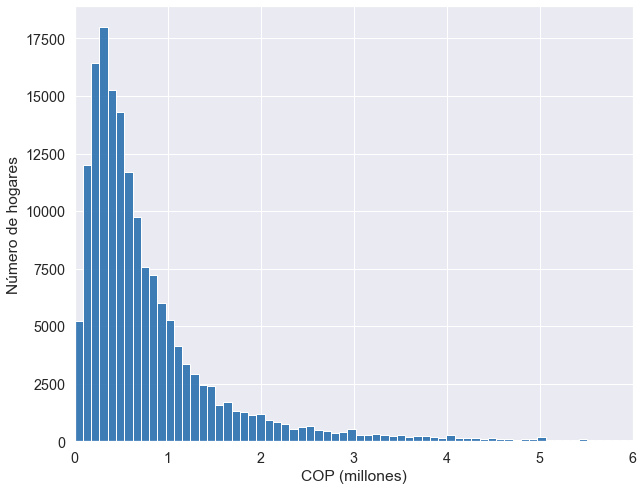

In [15]:
#Histogram of ingtotug
#Histogram of household per_capita income:
df_trh["Ingtotugarr_mM"]=df_trh["Ingtotugarr"]/df_trh["Nper"]/1000000
plt.hist(df_trh["Ingtotugarr_mM"], bins=1000, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(0,6)
#plt.ylim(0,10000)
plt.xticks([i for i in range(7)])
plt.ylabel("Número de hogares")
plt.xlabel("COP (millones)")
plt.savefig("histy_ipch.jpg", bbox_inches="tight")
plt.show()

In [16]:
df_test[c0]

id  Orden Clase_x Dominio_x  P6020  P6040  \
0       cefe4dc0e5814074bfa06fb2    1.0       1  MEDELLIN    1.0   33.0   
1       cefe4dc0e5814074bfa06fb2    3.0       1  MEDELLIN    0.0    7.0   
2       cefe4dc0e5814074bfa06fb2    2.0       1  MEDELLIN    0.0   37.0   
3       cefe4dc0e5814074bfa06fb2    4.0       1  MEDELLIN    1.0    5.0   
4       b281b20ec5b0c0c76b160041    4.0       1  MEDELLIN    1.0   53.0   
...                          ...    ...     ...       ...    ...    ...   
219807  693684cc4c15668f6fd4e0fe    1.0       1  RIOHACHA    1.0   74.0   
219808  693684cc4c15668f6fd4e0fe    2.0       1  RIOHACHA    0.0   74.0   
219809  693684cc4c15668f6fd4e0fe    3.0       1  RIOHACHA    0.0   19.0   
219810  693684cc4c15668f6fd4e0fe    4.0       1  RIOHACHA    0.0   18.0   
219811  693684cc4c15668f6fd4e0fe    5.0       1  RIOHACHA    0.0   16.0   

        P6050  P6090  P6100  P6210  ...  P5100      P5130     P5140  Nper  \
0         1.0    1.0    1.0    6.0  ...    NaN        NaN  250000.0   4.0   
1         3.0    NaN    NaN    3.0  ...    NaN        NaN  250000.0   4.0   
2         2.0    1.0    1.0    6.0  ...    NaN        NaN  250000.0   4.0   
3         3.0    NaN    NaN    2.0  ...    NaN        NaN  250000.0   4.0   
4         5.0    1.0    3.0    1.0  ...    NaN        NaN  250000.0   4.0   
...       ...    ...    ...    ...  ...    ...        ...       ...   ...   
219807    1.0    1.0    2.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219808    2.0    1.0    2.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219809    4.0    1.0    1.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219810    4.0    1.0    1.0    6.0  ...    NaN  1000000.0       NaN   5.0   
219811    4.0    1.0    1.0    4.0  ...    NaN  1000000.0       NaN   5.0   

        Npersug             Li             Lp     Fex_c_y  Depto_y  Fex_dpto_y  
0           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
1           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
2           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
3           4.0  122809.534158  289878.247150  125.720226       05  126.041802  
4           4.0  122809.534158  289878.247150  115.866093       05   93.080952  
...         ...            ...            ...         ...      ...         ...  
219807      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219808      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219809      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219810      5.0  120863.570032  275548.097647    4.120660       44    5.192896  
219811      5.0  120863.570032  275548.097647    4.120660       44    5.192896  

[219812 rows x 78 columns]

In [17]:
###Split train and test using training database. 
#Train sub test database using PSM to reproduce test 

elim=(["id", "Orden", "Fex_c_y", "Clase_y", "Dominio_y", "Depto_y", "Dominio_x", "Depto_x",  "Fex_dpto_y", "Fex_dpto_x", "Fex_c_x" , "Depto_x", 
"P6050" , "P6210s1", "P6210s1" , "educ_1.0" , "dominio_ARMENIA" , "depto_05", "salud_1.0", "salud_9.0" , "trabajo_9.0", "act_1.0", 
"numper_1.0", "ocseg_1.0", "trabdeso_1.0", "tipoviv_1.0", "oficio_1.0", "P6100", "P6210", "P6240" , "Oficio", "P6430", "P6870", "P7050", 
"P7350" , "P5090"])

df["test"]=0
df_test["test"]=1
c=[i for i in df_test.columns if i not in elim]

####Dealing with nans
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x1=df_test[c]
x1=imp_mean.fit_transform(x1)

x2=df[c]
x2=imp_mean.fit_transform(x2)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

x1c=df_test[c0]
x1c=imp_mean.fit_transform(x1c)


x2c=df[c0]
x2c=imp_mean.fit_transform(x2c)



c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juan

In [18]:
x111c=pd.DataFrame(x2c, columns=c0)
x111c=x111c[x111c["P6050"]==1]

In [19]:
x111c

id Orden Clase_x Dominio_x P6020 P6040 P6050  \
2       9e6553aeb6e744f39a554896   1.0       1  MEDELLIN   1.0  41.0   1.0   
7       0df8a508e83a05f2908f3eab   1.0       1  MEDELLIN   0.0  38.0   1.0   
8       c2a5dfaf9fdba154a9e866a7   1.0       1  MEDELLIN   1.0  43.0   1.0   
11      31944bdf7ac6f635696b2f80   1.0       1  MEDELLIN   1.0  48.0   1.0   
15      2aa8971ddf2e9749f894907d   1.0       1  MEDELLIN   1.0  51.0   1.0   
...                          ...   ...     ...       ...   ...   ...   ...   
542912  4e8d8fb02746a6c25abfcae8   1.0       1      CALI   0.0  64.0   1.0   
542918  b382ab52babac146ae74e034   1.0       1    BOGOTA   1.0  39.0   1.0   
542923  d5eec4bd989b58f4c2489292   1.0       1    BOGOTA   1.0  79.0   1.0   
542935  56e44db1f6eccf55a29d4a84   1.0       1    BOGOTA   1.0  27.0   1.0   
542937  904fe39b94b4db42fbd104a3   1.0       1    BOGOTA   0.0  36.0   1.0   

       P6090 P6100 P6210  ... P5100      P5130      P5140  Nper Npersug  \
2        1.0   1.0   5.0  ...  98.0   400000.0   400000.0   5.0     5.0   
7        0.0   1.0   6.0  ...  98.0   700000.0   400000.0   3.0     3.0   
8        1.0   3.0   3.0  ...  98.0   450000.0   400000.0   1.0     1.0   
11       1.0   1.0   5.0  ...  98.0   400000.0   400000.0   3.0     3.0   
15       1.0   1.0   6.0  ...  98.0   750000.0   400000.0   4.0     4.0   
...      ...   ...   ...  ...   ...        ...        ...   ...     ...   
542912   1.0   3.0   4.0  ...  98.0   300000.0   460000.0   3.0     3.0   
542918   0.0   1.0   6.0  ...  98.0   300000.0   650000.0   8.0     8.0   
542923   1.0   1.0   4.0  ...  98.0  2000000.0   400000.0  10.0    10.0   
542935   1.0   1.0   5.0  ...  98.0   300000.0   400000.0   4.0     4.0   
542937   1.0   1.0   6.0  ...  98.0   300000.0  1150000.0   4.0     4.0   

                   Li             Lp     Fex_c_y Depto_y  Fex_dpto_y  
2       122809.534158   289878.24715  127.222038      05   146.25179  
7       122809.534158   289878.24715  100.123276      05   89.637086  
8       122809.534158   289878.24715  108.829812      05   95.584376  
11      122809.534158   289878.24715   91.694911      05   81.112706  
15      122809.534158   289878.24715  110.792831      05   92.756218  
...               ...            ...         ...     ...         ...  
542912  127336.653858  280234.432107   73.088259      76   77.806334  
542918  123416.961118  280522.423188  413.891448      11  413.891448  
542923  123416.961118  280522.423188  233.379248      11  233.379248  
542935  123416.961118  280522.423188   386.72115      11   386.72115  
542937  123416.961118  280522.423188  341.056945      11  341.056945  

[164960 rows x 78 columns]

In [20]:
#Create a X matrix of covariates
x11=pd.DataFrame(x1, columns=c)
x22=pd.DataFrame(x2, columns=c)
X=x22.append(x11, ignore_index=True)

#Create matrix Y
Y=X["test"]
Y=Y.astype('int')

In [21]:
## Generate PSM of test
lr = LogisticRegression(random_state=911, class_weight="balanced")
result=lr.fit(X,Y)
PSM=result.predict_proba(X)

In [22]:
PSM=pd.DataFrame(PSM, columns=["no", "si"])
PSM
X=pd.merge(X,PSM, left_index=True, right_index=True) 
X

Clase_x P6020 P6040 P6090  P6426 P6510 P6545 P6580 P6585s1 P6585s2  \
0            1   0.0  38.0   1.0    4.0   0.0   0.0   0.0     0.0     1.0   
1            1   1.0   3.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
2            1   1.0  41.0   1.0  240.0   0.0   0.0   0.0     0.0     1.0   
3            1   1.0   3.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
4            1   1.0  11.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
...        ...   ...   ...   ...    ...   ...   ...   ...     ...     ...   
762748       1   1.0  74.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
762749       1   0.0  74.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
762750       1   0.0  19.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
762751       1   0.0  18.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   
762752       1   0.0  16.0   1.0   24.0   0.0   0.0   0.0     0.0     0.0   

        ... oficio_93.0 oficio_94.0 oficio_95.0 oficio_96.0 oficio_97.0  \
0       ...           0           0           0           0           0   
1       ...           0           0           0           0           0   
2       ...           0           0           0           0           0   
3       ...           0           0           0           0           0   
4       ...           0           0           0           0           0   
...     ...         ...         ...         ...         ...         ...   
762748  ...           0           0           0           0           0   
762749  ...           0           0           0           0           0   
762750  ...           0           0           0           0           0   
762751  ...           0           0           0           0           0   
762752  ...           0           0           0           0           0   

       oficio_98.0 oficio_99.0 test        no        si  
0                0           0    0  0.519885  0.480115  
1                0           0    0  0.519885  0.480115  
2                0           0    0  0.519883  0.480117  
3                0           0    0  0.519885  0.480115  
4                0           0    0  0.519885  0.480115  
...            ...         ...  ...       ...       ...  
762748           0           0    1  0.443328  0.556672  
762749           0           0    1  0.443328  0.556672  
762750           0           0    1  0.443328  0.556672  
762751           0           0    1  0.443328  0.556672  
762752           0           0    1  0.443328  0.556672  

[762753 rows x 236 columns]

In [23]:
grouped = X.groupby(X.test)
X_train = grouped.get_group(0)
X_test = grouped.get_group(1)

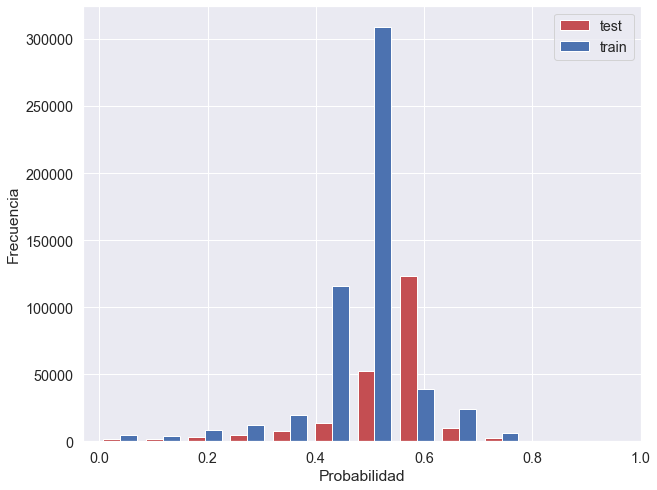

In [24]:
plt.hist([X_test.si,X_train.si], bins=10, label=["test", "train"], color=["r", "b"] )
plt.legend(loc="upper right")
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.ylabel("Frecuencia")
plt.xlabel("Probabilidad")
plt.savefig("histy_psm.jpg", bbox_inches="tight")
plt.show()



In [25]:

x11c=pd.DataFrame(x1c, columns=c0)
x22c=pd.DataFrame(x2c, columns=c0)
x11c["test"]=1
x22c["test"]=0

Xc=x22c.append(x11c, ignore_index=True)

Xc=pd.merge(Xc, X.si, left_index=True, right_index=True)

grouped = Xc.groupby(Xc.test)
X_trainc = grouped.get_group(0)
X_testc = grouped.get_group(1)


In [26]:
###Dummy 1 if propensity score >0.5
X_trainc["PSM"]=np.where(X_trainc["si"]>=0.5, 1,0)

###Keep only jefe hogar
X_traincol = X_trainc[X_trainc["P6050"]==1]

X_testcol = X_testc[X_testc["P6050"]==1]

########Split X_trainc in X_train2 and X_ttest

psm=pd.DataFrame(X_trainc["PSM"].groupby(X_trainc["id"]).mean()).reset_index()
psm=psm.rename(columns={"PSM": "PSMc"})
X_traincol=pd.merge(X_traincol,psm)


<ipython-input-26-567f0da6a755>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainc["PSM"]=np.where(X_trainc["si"]>=0.5, 1,0)


In [27]:
############################## Collapse data base at household level #############################
####Keep only parentesco=jefe hogar

###########collapse train ##################

psm=X_trainc["P6040"].groupby(X_trainc["id"]).apply(np.mean).reset_index()
psm=psm.rename(columns={"P6040": "promedad"})
X_traincol=pd.merge(X_traincol,psm)

listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    psm=pd.DataFrame(X_trainc[i].groupby(X_trainc["id"]).sum()).reset_index()
    psm=psm.rename(columns={i: i+"col"})
    X_traincol=pd.merge(X_traincol,psm)


#############collapse test####################################3
####Keep only parentesco=jefe hogar

###########collapse test ##################
psm=X_testc["P6040"].groupby(X_testc["id"]).apply(np.mean).reset_index()
psm=psm.rename(columns={"P6040": "promedad"})
X_testcol=pd.merge(X_testcol,psm)

listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    psm=pd.DataFrame(X_testc[i].groupby(X_testc["id"]).sum()).reset_index()
    psm=psm.rename(columns={i: i+"col"})
    X_testcol=pd.merge(X_testcol,psm)





In [28]:

########Merge dependent variables in X########
df_ycol=df[df["P6050"]==1]
X_traincol=pd.merge(X_traincol,df_ycol[["Ingtotugarr", "Pobre", "id"]]) 

In [29]:
X_traincol.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y',
       'test', 'si', 'PSM', 'PSMc', 'promedad', 'P6800col', 'P7045col',
       'Petcol', 'Occol', 'Ingtotugarr', 'Pobre'],
      dtype='object')

In [30]:
####Recode variables #################################
##################Train ######################################################
X_traincol["saluds"]=np.where(X_traincol["P6100"]==3, 1,0)
X_traincol["univ"]=np.where(X_traincol["P6210"]==6, 1,0)
X_traincol["bajeduc"]=np.where( (X_traincol["P6210"]==1) | (X_traincol["P6210"]==2) | (X_traincol["P6210"]==3) , 1,0)
X_traincol["traba"]=np.where(X_traincol["P6240"]==1, 1,0)
X_traincol["busctrab"]=np.where(X_traincol["P6240"]==2, 1,0)
X_traincol["microemp"]=np.where( (X_traincol["P6870"]==8) | (X_traincol["P6870"]==9) ,0,1)

###Hacinamiento
X_traincol["personaxhab"]=X_traincol["Nper"]/X_traincol["P5010"]
X_traincol["hacinamiento"]=np.where(X_traincol["personaxhab"]>3, 1,0)

X_traincol["vivpropia"]=np.where( (X_traincol["P5090"]==1) | (X_traincol["P5090"]==1) ,1,0)


###################################Test #################################
X_testcol["saluds"]=np.where(X_testcol["P6100"]==3, 1,0)
X_testcol["univ"]=np.where(X_testcol["P6210"]==6, 1,0)
X_testcol["bajeduc"]=np.where( (X_testcol["P6210"]==1) | (X_testcol["P6210"]==2) | (X_testcol["P6210"]==3) , 1,0)
X_testcol["traba"]=np.where(X_testcol["P6240"]==1, 1,0)
X_testcol["busctrab"]=np.where(X_testcol["P6240"]==2, 1,0)
X_testcol["microemp"]=np.where( (X_testcol["P6870"]==8) | (X_testcol["P6870"]==9) ,0,1)

###Hacinamiento
X_testcol["personaxhab"]=X_testcol["Nper"]/X_testcol["P5010"]
X_testcol["hacinamiento"]=np.where(X_testcol["personaxhab"]>3, 1,0)

X_testcol["vivpropia"]=np.where( (X_testcol["P5090"]==1) | (X_testcol["P5090"]==1) ,1,0)



In [31]:
#####Get dummies dominio

dominio_d1=pd.get_dummies(X_traincol["Dominio_x"], prefix="dominio")
X_traincol=pd.merge(X_traincol, dominio_d, left_index=True, right_index=True)

dominio_d2=pd.get_dummies(X_testcol["Dominio_x"], prefix="dominio")
X_testcol=pd.merge(X_testcol, dominio_d, left_index=True, right_index=True)


In [32]:
###Select a subset of variables 

variables1=([ 'Clase_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6210s1', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'P5000', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'promedad', 'P6800col', 'P7045col', 'Petcol', 'Occol',
       'saluds', 'univ', 'bajeduc', 'traba', 'busctrab', 'microemp',
       'personaxhab', 'hacinamiento', 'vivpropia', 'PSMc',"Ingtotugarr", "Pobre", "Lp", "id", "Li" ])

variables2=([ 'Clase_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6210s1', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'P5000', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'promedad', 'P6800col', 'P7045col', 'Petcol', 'Occol',
       'saluds', 'univ', 'bajeduc', 'traba', 'busctrab', 'microemp',
       'personaxhab', 'hacinamiento', 'vivpropia', 'id'])

variables1=[i for i in variables1 or dominio_d1.columns]

variables2=[i for i in variables2 or dominio_d2.columns]

X_traincol=X_traincol[variables1]
X_testcol=X_testcol[variables2]


In [33]:
#Split X train based on psm score

X_ttest=X_traincol[X_traincol["PSMc"]>0.5]
X_train2=X_traincol[X_traincol["PSMc"]<=0.5]

dependientes=["Ingtotugarr", "Pobre", "Lp", "id", "Li"]
var1=[i for i in X_ttest.columns if i not in dependientes]
var2=[i for i in X_train2.columns if i not in dependientes]
var3=[i for i in X_testcol.columns if i not in dependientes]

###Create dependent variables
y_ttest=X_ttest[dependientes]
y_train2=X_train2[dependientes]

##Create independent variables
X_ttest=X_ttest[var1]
X_train2=X_train2[var2]
X_testcol=X_testcol[var3]



In [34]:
len(y_train2[y_train2.Pobre==1])/len(y_train2.Pobre)

0.1734803432600568

In [35]:
len(y_ttest[y_ttest.Pobre==1])/len(y_ttest.Pobre)

0.3045107192768577

In [36]:
###########Resampling X_train y_train ###################
###Resampling for pobre
sm = SMOTE(random_state=911)
X_train2resp, y_train2resp = sm.fit_resample(X_train2, y_train2[["Pobre"]])


In [41]:
X_testcol["id"]

0        cefe4dc0e5814074bfa06fb2
1        b281b20ec5b0c0c76b160041
2        a9cf8a8cc1b9e128bbbcb20b
3        75d032574426ed83c46a521a
4        98e1c6924480fe69c57a4fb5
                   ...           
66163    8e5ff63e09ad5f8cf0bfae21
66164    13dbc9565adc35df6ad1bb0d
66165    a34ba0f0d623524fd9ee25da
66166    d71be102c2ce6c8103c0dc3a
66167    693684cc4c15668f6fd4e0fe
Name: id, Length: 66168, dtype: object

In [37]:
##########################Regresion Models ######################################
###Standardize continue variables and winsorize dependent variable

sc.stats.mstats.winsorize(y_train2["Ingtotugarr"], limits=[0,0.05], inplace=True)

y_train2["Ingtotugarr"]=(y_train2["Ingtotugarr"] - y_train2["Ingtotugarr"].mean()) / y_train2["Ingtotugarr"].std()


for x in X_train2:
    if X_train2[x].nunique()>2:
        X_train2[x]=(X_train2[x] - X_train2[x].mean()) / X_train2[x].std()

for x in X_ttest:
    if X_ttest[x].nunique()>2:
        X_ttest[x]=( X_ttest[x] - X_ttest[x].mean() ) / X_ttest[x].std()

for x in X_testcol:
    if X_testcol[x].nunique()>2:
        X_testcol[x]=( X_testcol[x] - X_testcol[x].mean() ) / X_testcol[x].std()



TypeError: Could not convert cefe4dc0e5814074bfa06fb2b281b20ec5b0c0c76b160041a9cf8a8cc1b9e128bbbcb20b75d032574426ed83c46a521a98e1c6924480fe69c57a4fb5599a3dd98035a57210828ed96290a0e686b88704ae8d63c58845a62776c39ad756cad7d01f3a3b676815058cbe0e9e89066778b60d1a16d931c5378f88630db4539952b73c73c467a88520d1deb7c04e49f1fb4c34dec39cb0e4e8bb6cad63d0865cb71d43cd7538c3054e6a9a66075e65d39a3e5a5b421cdfc117610e47f742ce7f5f4cd193e62773beaca84ff8d1b75960103102cf0445dd13b73cdef871331f458aa0da5003ee55de015efd023636bd5e7ae9558313b14f487af3417077842632aea06e93b4b62b66262a7eb1c0ce4bbe64ebfb10b064f296904dc6098ceed29ac085984a1be6ea8eecd716ec9bcf33287e50f25f1c0b3bdad9b29f6a4d72e9457fcce98c0dc518dbe5304cf32cbe9931a045a747012016d7c5271a45420e1d2656fbb967f29eaa7cb9d28be95aba2a292c5ba4841bc57883fc17d36e4101eeef7c2d3fa239b9c74e8f1701dde05be275cb5d754fdca10db652ff8dc07b703da9915855bfa03edc4e8b60eee516a7230abe69961f5ded66a5aca346877388870ed1670f35c493f975e841eb21e04f49a2a79fcb1eadbfd5ee73eab1aa1798717b7c5a7ee81f7eab1aed3dd67a6e3b1005fe6b7b52d4284aec0b426db1b830bdb5d2041cf9580d176e12751ebe546513552b10ce8437ee40c27de5fe40ae6a9651fe4b398414095e531a37990a3dc5b1962a2c1c6435fdfe4fd6bf4afb268ea7055af786c2460b753a0c028b3cb42da9eac583cc665d9724f567771fa29cdf3690bcd79db014ef36f52d31121f16957979a6d34a16f35e48e420959797980afbe099268bb576f271c4fc2b2680f470ca756f76dd07e071e1192a721fa9ab2348621b774cc1a13b2212b711a8b9dafcb779bea4af26c05f6b553711f3147609f04261a0bf51f765c31778e38a411570c14605035d02d791b392f9b172a9216567be3ead4baf16862d11f926c24e16390b3fb6f9d23d89971502f5d727dfe27e577868a0296e9d3bb7173455985180fd789fee6debb6290e5e96d3ae6c4280fafc47bc8beec38eb8c165b5ac08ef16021172d2d6adbe9fd3c5aa4f688a232d96c58fc09c1bdeacf09caca060f8c864ad16c33f80c79f35acc7d159b8ab2efd9869f936b52338c9215f56f52a9d2934d20f125b2889b86e5bc405716dc7f1db3da11803fae303dcfa7c54679b8470a391672eaad53ce8d42d307c0aa3a471e92a19c8998b7895821cdd7394e1ea0bbd946748b24c4f40e48a9ca0c097cfafdc795bf01c31355e9f9d97dde84e7f23996f6a2e28fd33586125008513de33e68898bce7eadea122ef5ed6f214237b63277f6b4aab8f9fd9d64195e1dd89e050a26d0d0d9566ab78170acfd64dee8593db71a40b49ffc748605070dbc379a80a82dd31c6f9da90c21d798dc22612f37d8587a46bc03889b88287eada21549373d7baeed4a8d6d63df39b1838ae1dbe081bb79e3bdfcb36afe951548a25a558247b59681fa11b4db183d26e4f567baf349d5d2a3bb97a8af8d9a1f45c1274a9cd8dc6d21118d4dbbc73668d1bd9113dab772567ff6f8deab8a76e6039debc34070bdb47d35a1fb303ff6cd30393b6417f6b97ce4a293e5ca4b2d607e70bab94103c2ce0bdb496ec8304c9ae4089cb01dece9b14fe4f8f3923359db06edd23590639242834640ffed1f056b55f1e5da7bed47ac2d6a7ff4f34c4a0ba5e9a8f78f9ee7339a0b09e6f81ce93bc974bc2f945562881abe5586e0fe8ea016b0e02aec8a3183c65970dee8f436e317ca60edd592d884b0537de057ab4ecddd648bee4a207179ecdcc06ab5ad4b6674921014fd4104128d87621f25aa7b016921f0f5c80aa13f4dec0dc1d7ba2477ca23b7c311e57c21cf119eea45ff53cf2d0ea7e0e919e8520af5ea584446750cc9c075561476f12ef1b8d4a85a3007cfe0b60b0bb2b4cbc2e420a31d8dbed33245d8a8ac89ba556c9053de55951cbf5ee7e0d24a78dcc28efa299f55f6de4c97fef7e6f471afc409b631e3a6e947aadf9f2668b711e3203e2a798426bfd3d77061199e9ee74dac78844ac5d494b3bf9c04b898c634fb5bc311ea8b7ca66d3b2ca86df5822f17e25813faaa52f8beba0a6ec1dab6f3a3ef4c98542d8ff160361bd448a64ac5308eaf916171c72b75552dd724b939daedb64863229556e6f80a1526f973aa579c15605079a94f06e19ef72872c44a8d2f929ade5efb8a1167e41e63bafb300fb8ba9834e9d5b7b74eaef4644327f9c4ee85a5c55ca49f82f2381d6f1956bf5777049f9274351e0975fc22f981455f5eb0e40f5e123326e9309569605fffeb2ff633bff7ec35b82e10953fa90b73e9634c141188401252fb08ec81bfcae80ff6cde6bddaade2ed4f66f6bdadced22b90b4015322106e2401df62813dd1d8a1d14496d01530cd8c65f16840ad269d68824281a5e87263c47dfac0bc50a0a2acf05376205d21cdd0079b9c2b7edced33801a3abd86cc38bb4be8703d228aeaec7bb437fc7fcfe9a4c4e97599ce766c9170bd4cf22138de11710f819f8920cad1a311b9ccfecd07616c4f5f0292dab53ce1c2ef5e3442acda4227e19be61b3c74ea5c8bf2ff9777500ea6fce42d1785d9f9481a34b7964dba038d0f85bfa0c1253850cbea599a99d21bf87cc8a668325d9ac14fb84a631a36aac276087c3ebdb2a5dc76d47484c9875379e0b8b509d85bd8ab957c15001cbcc068c786974ff1c47c39e2726ef12c923fa1356289be94a99a451e28266d6b2b8da5d5660c997c8d8434fc0c8bd45ff6caf268ba903427806bd0fae2bd046a421ad1cf918f7eac81f28aa3187dc81bf89f825356eafbc064e063e655d4ab8666335952bc6a0f0ce0b779b7d4150c614e72f2d2046667cd487ec2bcd7cb3229c5278d4fab6bb520322a61fa8b06c42ae8bb36043a538a745f2bcea5ef7a4b6a00e20400203a26219198734beaf8fd6a8b4c793172e3fc95c9d3e4a3bb3308a3939f0e74d8c4cae81434d40c253aa9d9850b7b188fab76a13374d8a97f84e8d25590ead475f0e2e420e50854179517f5cdb8031e8ad669b784ac6c97edca938f5ba9e976112efbb82314ea9165f379b89221650e4faaf3d891875751ec476e8e71668f4be7e219b63be86533871fcb4d5f30f89d144fb42ba39db8ba77472841f3f29b423b6b7731060b024b66e9b94bc53e33b421821a97fca61d9cd25b7290a41b91994b850ad754ca9269bfabf440d6972eeac6cdce8cf043eb149ce0fa9d05a3149212ea5f1e2b3ed8ed61607c6acd57b96693480c76f9969f4162b22d24a1e2ecdd4f57d183c21cf878ef1346cbe65aa57ce173cdfd409670a6ef1b8f838c280f5ef47c691eee173f39d267997ee29ef0a243310ac70ab0e85149f5b084c8498e662773f7e8aa616445f6607032757a9d719867b41d5ba6bd84f81a96156d300e8aa829cf3c680d4d877a052ff2faf8aa04f216a0ce2c9962f8cc721adc679a3a6bc816511173243c4392dddebf44eb7951fe4e014cf5f42e0f445e57f45c12235ad3a317d086d9128637db9d36c7d378efeae97ad1581a3f1baaec62e836f83f85e254665f63a02cf7bc72bf85e81e87480dfa85d6076c8bf8704ea3be60473f5b1ca9eeb0b02ea97e5536f901f3191524b939382be603d215df5bf36ad1688301085330ac03bf93c80e9de8f72eee069c678a84a764fafde1637adc7007a6c9bcaee2d5eb2073e7f3ecd74cf399e08cf758438b7c5471377b85f0a7cd5084334d56552b24f668fab7b4a8ea3c210007ab3c2c6e364ee0f92354629b700adaef96906f7e512ebfc2f182e892cff0f55276ce78170d7bc62c22e911c107f0e9812c1cf67d784173d5fa0ad330e5ef45a4b394a818761d0773abfc1625df40689496731382acc92f191298668421034d561f69fb3a803585b6a263e06870a3be8aabaf1d2d2529ee1528cb76fd8c419a4b8b76b516c9c266cfbbbccfc24b91c528e48c9a389e5c3ee47a229034812f573d1ada699cfacc1e1c060e759c04ce53a560a4cdcecaf6a8749fa70195876b2ca0ed04f551dc6bbf7e156e5d32a0b94f88f4ef62308bc9188ce5147f61a87ec71ae66dcda32de92bcdbc843596febd5aa4a53eeab1f7e0f5d02d6e0022ec20f5910b7182dce587c3268db612eabf2970158068ee5a46fa9b124a128f076afe910eae430fe9ec0f410589b663bd4666c4962c4b1fbbe5639a1e89c530efda6de64e332085631e266f7c20b48781876dd89af23da21e278f570e32240fac4c8598ff617e994f9ce18e9099c7af376f1f52dac2881cd5f3d68ca0b98e6038963fbdf6ba9057056057c806457f6ab10ecb2b481dd3f46882fdbfe16deaecb4657e7aad3f17edfd33fb13a4fb1adc2b492d6ba28e827d377ae111d2772f07bef32112a3d28b94994d4c55567bf01ef218b7bac185107f20c050901cc9bc910302d8fe8ba6031b8368039c516e2e6b1c1db94c850bd0d879fdc39b36ae780dc3514254cef69b7a3cd66556313595b273a6caaf9052808d1fdab13b4fb36c2e4e0349ff88e1990f0c6b337c88f755940ea7276e9c8a7155baadf3052104ac27e643e90c14eff121d34ba63f676b2d391434847438492de315f1e1793b1a9debeae8cf554f72d49821692813e979d7de5c927553ed8edf2d91ad12277ab85b1662a1c5eb145014da23d84a26ee108df50f547784f9b4b62551875743f8aa08f92cbc9221c2ec8d3f5bbb2db8d3846199bd7864bda7881948c560f9c26c68a75fff4b557301bacccf5d2292ab4930a63e5bbc92ba8578f5de46c0d0e476c9ea2fd317115081c274a6639c1b654ff3d0e9b527aad88ecad0406bda055a0ebe325f96dd4d629a5fcd6f1d9cc8b7e14ff5b8a97e6f8ef906dcbc12ec447060473000a8d03054ab9da7de1c469cab418f4595f4033a5ccda3faf838f71d3e6bb34da0257e19e1da1e56fc1760a40d966bd9af05c7095a92276ebb77da96728482d1ede33b255e43f022a0676b378e774de29091c723a7df70dc31d966cb35b866e01378071e019815224ad28e649fb8a9da3f06fe4225b2c1636208da3a7486a834ba372c1f0ce6c1300cebe10ce2b2fdcf7974897d5388625b01462417d92076988e36d2322bf8b28904168a7ebfe61792ebfbb14587fea865045acb2f41655285da3577878934a9e09c89be22e5995d5acb84b48264abaa943ddfb4fb8e07ffd6b5dabe183307b616f603bc1d671b77ff37fa29b2b76995bbc0b9d77d5c11c946fe86add9d4827fb2932738a9fcadbd39b1f5f280b23f535af0a896ad8aef11e9caecd52ae249051c2deb501ba42d74ee4f567e672cff14026e3f09f0a5921dda3c090d6488a9592e7b66bcb71c5759900f0704cc1990a8b4c7a08ea0fd08d79e27d17506b0767a656daf8499051eb87b1160e3c0539b9c63344d0ab66d5dfacf8027090fa48f40832240c79d1dbf7565487488f0f99994a9c69b13b4096f8720a6bd6f500a7e06929f726e0e5306fbfea9551ae4345417695c341f68b080c44c246539d72ee4e4ef8b043a3739290264e9772eacd8afe594cc35abca2835550df2f921f664248669575c497ee7972d3d2d2b14fbe200530ea5c55a427aa62b8c4f43579773a26b72004acc3e7b69946caf2c4651f99aafb168aea512d579293ff18fe15d130dd1652cd6b10a47c2704120555fdfb440a7dcb29a5eed2ce84444c23ec3c082f2e6abd2ac5858b11ea2ecdd5376aedbba473007b315899724ad9c4ae63c08fa7c5510be758e8cf26ce090fb3c4b328833cb8e6fd82f499bdd561f18f656a36634e16bbae73ff3dfcce8b7c969ab47705a04b7485dbce465e05c994384d2f81871a72b92bc5d44fed9a79a48a80640c0178dbd0eb86e84c7e3e4d18548c4caf6d3eaa37ac9ca5a8a58ec39c7ce2701fcdf4f7d5091155f847036ff05d22d1d5e94dffc3717f1e4e305c3417b957183c6ab3f4e745f36c9d63021237a29ab864d2a2fd735add0d453308013b827e13271d881ba62393aa739309c0de6f71ba44add1347b8a81a40d2738384936d9c88f9628f796c140cdb6ac4e90c2a71c724623dd7ddca0ab32153a00c95fd5f71c09ec6e5fff272d1aad1f6739c1e6027bb4d9e967d223f3162ac7495522b968363b1183c1d0ad2586716e62385221b68df9cc6a9b427d743b6c2a1688a80e2593a508ea0ac9d8e969c893ee77c196b824a8df50eb40952e96669ab999ade93446389a61190cc68a888f1538ef87dbed69fd414044fbec8d1c3857d2b9a24b6ea358ad0770ca70418d72571a545e8b39acd6218b88c358682e767a8a214ba75d7a2096c867e083c21e6f6d032a68946851646bc3dda0e80b65eb6f1a4c62a522c3bab41966ee6660ce7fda23d213415d2d73f23a031967910aab47d4be63632d9acbd86a24752f23f147916837bb9f637290a7a7eb5ae92d0c07de16884350cd593b7c86fc523da0531a939e9e069b6c0a765bbdb4227ea1d093a25aa9322c394727109183ce9d589a91e991d53f3226c7752f2ee91dfe3a3aa934f8109c63611ddc1b220b6318e60b7510386e2de274ba9211d635060c0166afffe99d81e27baf55a452827db0bb25f4696f2f890358953369b542878e536c6732d3ed06d40ab3a1bbba5c401cbf0bdebad34a014af9d4269bcc0744696a8a578ac248fba9ae6dc0eaa367580456f9587b4457465a7cdf1899548b7624fd85be4a0e9d93d97cc0d0087076fcc67ba33e6fe5b40d74151ed1d58e49b9031865aa5f074b6dd2b0d0b8dac082f7df0b7411e10af4851c76ce017bcab7428c4208fbc953fa712bf4263389446841d8e3ea9b030f4711f53ed7d75caa8cc9b09e55a8cd1f0028dda139781db2eac52c28a8b6a8a71af75830e765c075c07f5850fe6f9634eec9679635479e1ba767ee36f53b815811f10b991a9669649b59023ed6fb47a9275cf627061106e812c601fe649734493dbba8401707cc93ebde075fe1fbaf183af1f6903b26881397489ce196634689b357c7be5871e2db2d22e65edd501cb5208daabdead7ac2f60387675e91c815b754f9315dd773e3a4f0a0d65e5fde47baa2a3b51e158e8b81831f138cfc2bf38bf4b429ea23b4f77c827fc911b9a43dff8aefbc31667a9c570854d38f197204b6ff610457fe3a7d241a8b1ce673f54f6f43661e49a21629e74916f4f777d4badb60b81e0edafdf002bc367c3230823031805c48684846fb10a1c40eed208fcef466f007a4f41e00e6d5a9673cbfa684bad1d43500d865f01c3f883f99a4532b90139487b45886b849a69feac677f41d9a63b6c27b4af9a2d86273d02d30a9cd5f2b427e2a15afb49b0ed4048b8599e9ccac35d71a157177c33c38868eecd90ba0f8aef815ede34202ae8e66b1f164e4a90144cfea3571bbdb4c78378249d3940131006393e582fc95917d948add0edca934607d486e097efceabd92ca4e88c6bdb637b2cfaa062d6f9e2663ea843854b3ccfdcd64b3d4bcf00e42344103c767c79995d8c53669449418590fa8765486e43670c59722fc7ddab0b44357973445f1002e591078c03816982b9c1bbc5fac33ebfd4177d82f045e6aeb6fed65a5a15b2d864ef7258737f46fa149e77d9ca83e507ab82e2aaffba81dd9f73896b5919cf926ec1f2a55a792540de44f0eef22768553c323150ee85dba695b8f0e75c5ee9984a6ee4f755e5997982b09eb7e215248309a40a8b3432c95e6c9c3ce5dfcf4afef7168775d6adeddc71ba1e6fd60b8bd9f42fb46146bbf865598c86f9630b70a04bb296d6a69a26e40318cea1376517b68a56cff25e2b1a0b34e24a239384795b5500ec20d8dab6c8d672f1a0b623eb0ae3ae8641dd1a1db91661e5b790a872f3d6e5acc86610189c7de99c1305451e53acdb9d1493e36b274bcfdc735e6331056f032ab8e0fe987c70ad9af00440c4072eafc375f007d48ffdb076ab265ea10534bf8c6a4d64e7507a7beef55744104d2c6e3726051fae1b4d06c3ea2d705ae9629538fefecfe65b45dea50a6020a8b7e076f945778640f31481fa52f95f25fab5777d05ac57dd10b8a5f94a818a1686f114d7a678ac7fe4ff919f2077c900a961850c39ff756ccc7b94bfa1365c202a9edebbc89646b5e4e312f600a0776186118990fe3efd838ddc1c37c9fbf6faec67b8cf2f5931c4f17a5ca235eea04cc02d75d21939146c264f47d5fc32d5d272b34bc6dd8ec767235b19d6554dd76ed8dd3a96a68ff66988b46ca2864a68e6f84555f519befce46774dc923a25d11be2be40d1c85ceab8dcb5206bbbe01754d888c758c54853eac165d7f1214456b39e1270e92ef3a916b15d90993010902d31188570ebea219bfa192decc64efa1d5e9750846b3c5c7aed9cfec4947d74705c309e501d49e70ab1f026890fabbc54942b0eb148e60686e596d466219d0068870ec57e5a84b3e9850e604b280e2f034061925c52c1ab5220111e19c5e8f06cf6ef0a0bf0dc952e42a639f21f6a30bf35a516211f4293af5d8881718ed816103429f140c4874c5f213c37751677453be2bfd2db3be242c0258489b3b22977fbfbd9c199a5111cdf440f73d4c560652a831eb4080ee212a6cb2e0b31452ef23f76baef68a53c3ec4267082f6ea40184d865eb7c05fde549b7fe99203beba289b94f5fc1b75c4a73a4e05edc447eca43177164ce4c6bb59657b3eff07a64b52ea3e324c2e5d7f56092935bc5f775de9184d7c195da2fb6e90249dab09c2b2b0defe7a3ff6ab9c5192cefe96fe0f41ce954e762d2b55ebb3f93f3d7b1894da9116847626961396d43184815cf479b0f6ebdac9f23b31723fba4c40947f441a7030fa995f1ad23e07caa4b3ad7a1d0a1df25e3c5c8d1aba612a729fb4a09912b1ff2d8af4fe411ec8eee0dba618acf3d30d9777db91b18b3984fbd91439f938f268c8c18d2a167d0ad9224d2d428ab6b3583cca614d169f4ef061d637159e4ca31394b2cbe8caa6cdc9775887956e379f59fecc7eff09ba118009be82d5d33340688480d5d21a61ba8d682dbf66bf488b8b02b22a1f5c23ae063a079e342ffa6e2a3099e3192a0d04793ccc2be30a038f960cef55a521016aedc6489ea93136ed4fa43ae1be6f0f1a8392748025b7e705211db2b91f1898fdcdb2b7af8223cf656f811ad65d5cabc744a9c4fba006bae921b6799c8cb5393213472352d183abb1d6a944f39620783fe0e311eb79b68af53de6b4643a20c03be0bde13ae244aeb79337050ca72d37fb5eb182eedb40b088529c717c0d91615e17e21b01a5cec39e2d632e96e4d470a014d0466977fb4e477c810de19bf008f6421a29c613e05cac353d8f7b757891d57694bccb3464e647bb9ce82585848e1be9be46db6b6eacdca6b0ca9f9b1007f7ab627b95c013a14472c85ac90c5d21dec915dd632b3d504ef7320f82c7d1284d42ae7fac067d70c07bbd7147041f3a7093a1930236e7cb50a46579d093ec6d89d4bb40c5217b49a408b944ce61026b371c4402063761e1001a58cb81e54a83ee9157c40faeb9125802de8143e2e07075e57002213e5462fb01adece52bd4a68ab12bbfffed912ee4e725c69942a4d1c304ba21a3f9f3d87ec527046a13998ea58151bae1b12fc35c35ac6d381164a8a4457524a431941e67306fdfa71a168179757d1af9612fe6773f7afca0b2e6c5b1732f37a4309b4b041e36d0c48e12eea63dccbf33e69d167ffcc87ae3d3e83c899ee2738c1fb8d32365a8c8c293f6754960b56937302dd50949ab98098624d005c874b12f03aa5871a8baef0b54714954672d4a5724a9ccde139764f475928abeb13807abeff45289968e7c22c4e89cb784d9aeea118a98690c0629cb6f93d5c0dacb4f258cc158b181631f59d28ae0e85932886a433ce0180abe22b723c097932012ce014c081d4b5663d8858866466d5860a1cc2ed7fe8e10d2cf68b34f93b65b9e4ddcd819e12494ef0ae848b3b17dbaeb938e894ea55441d35a532fac177011632386c8037ea80409e1dbd74e08d592a788bae99ca1e87eaf393f3e1328f393d670cf301b89623e8f2762a2f0fce0e42e5249e515b6327354a7cae7aa97017f9f7c15b4d6b2dbd73aea556824fa7b2692c31ce3f6b7de0508fac8be252ec1418a28b9fa05ca2b2e3f41d34131cea81c695f0722c6e9846bb187b373a97b4fb919cce9945981146b2aeb2c2a2c8f4321751a344765df75cd2719b77bbe9e9ada0fde9bca60c35280a3ff26f7b4a70b5323b5fcd29496bdf40efece2731040913ae3d85cbe9bb26f22723a971ebd1478c11dc588a35dd23f247e3529caca18bbfd6b1aed5aac6a4c43ad77b725ef2c9a78278053af84bc5250b8886b15c41324be17aaed81dc50a163dac2e1f16c4dee48a9cdcbe2d781e5c4eb67bf7965d7e2311c28561075c5d42e1b44bbf3fc6e3752b0d98ec3591b4c4e7bbc5a3eee6788345222f56c01fbfd99034d4f3d27365c2289c4024732144c76552864faf7d266c5e33dc6a7b5664e5733b2958b57ca3f3ec4bb40709de29440c936f604803db24aba4eac0b95b29d2b2312de93c17e9fda82ddb5197f90431c72b20044baedf1c7b1e5765dcbcac4b7e129b742ed6ea0f9867e212155dcda6f0f7c8fbc52bdc0451b1af863df509b6e157d224a677f7b898c0f92d830fb5c43e160db344c7cb3db42b011cde35d60a92ff58273b8e0a6354cf2b300a13e8d78a03c062aa6166668be833ab0672dab9c039a807e084fc12aa9af0b417404c92e456921197085fb05c79b0ecffb6bc8b94797355f2fd71520c2cf545d630243afd3f9fef667eeed3285ba0f8ce8d1c05f84d97591cf0bef96a62fa11bc35d1047a406e61d8adfe9db704dda4b1f129eb4099538e8d64c6b67507dafb7223286a0f25d309eed58609253a376d61b4866da7173be0bce2808bf282a260855aa0ed5d3dae3894bfe3b29f5001b1f2370ea0201b4f9be58dad5fb5e14f97779bbb65917b4b2f9d1ee16b0ff9ae0315e70b6ee3468b5da3f5d869cba88c0c958ea915f0b36a89aa4e1e2ef6c961fbd257ed63cec537b06e4cc249928e9e64a6db3c0eed7888d9469fa0374c65a165ac8e65be91af306e85e40e1d6d176403afc007858a5734bc299f2e57797ffee30117c2d48f81ad4d700c7f9bcac2f86d3fdbbeef8af3c14a5015154b47272f6c81db63ad399e773ef1d0eb892d665107aa34d17f7c8f3bfd153d409a43220d12daa69edaeeb1ac1babd7a83d5a2938a504fc758e92536cdecb0c5827cd7fe0e2c7a999b49d0159668172d455897bea44f66676b90ef570ea1b42923b40061f4156088393e60f9a22be9ec7230aca2ab589396c7eae8c346be17a4face7ecc5510948ba07921b95e693a43d821ce0bb8a07c4542b399199d76b4322cf812575be88cb02c96e32f363fd69b1d91f520b59a4876ba1b41e7165da17dba2f64df70c652b5643c8118d8848791df65251c6a4a227fbf73ba9274a9c7365d1a04a0d23d41273555b33446aeb3399efc275c8d937ca04d1050824a039deafca47a65c40c4b036ceec5c3c9491bf0cbd44268df382adc413816d0bdd63b343f1ba635d32efc56e3eb9b6ebeb55982d88791930acaab84998ced1ec78d0996b094ec0e753eaecb434613c290a649936d422d654bdc98fc76114f247093cbe6d257ae177fe848a43c2b265e079da556f7c3d9d05d4064c64f18208e3d152b199b1fd3d5d5588dd6ada433df2a812dc721038d43b3a6dffcb43d7d0e65c5ab4d0465dddae6c7dc0004d6eea12384540b96de58bf5dcc80200189bf661ec3672bddffc1be774ae1bf0bbfbbf407de25446f5b7e9c4a6e6264241c8dda47504280ec02e34a1d5afb77d3f0bd20a0289cd4ce32736cca1d3ac4e8b0af9fa7fdba36916a2080a80b07a2460d12829efbb368f0a16f7564685b74f503a6777a493336206fbf3db458d4b2598a631b5540e3411c8e4855eb0342b23db55eeebc55686ea2d40d3caebf152b9ac7a3dae516b3b39d4787336b588d0ee5bc5c40e6af6f10a22a08c373095315d88995a4cb43bdc663dfc04c164fa84239aff79e4c074f9357a74231f7ff7a0047df1bbddef09287bbfc4393cd968280dbbb62efa736c593c42fdc94b0b72f02c863ac6b23356501944a68c8b63ece8028e19aee085da23fa9c318ee41d1ccd0d617ce974bdfa98d36b7f58fe56ee205e316be9ae0478a592adf52d5b1f099e783db745801f09440dc0bba8d6bb45713874ab7d8f4439ad6c98f48822c186633c1396bf79eb8322ba3dee9160afa3b5e1cf0b01e24368b7d8891b7769d5ea1f3a248a2ab69899b72f7b12394139e88cf0768274ca62e9df59f864d7d604eb04694e22c1ca11afb935d307e508bc629d0ecbbb213c2a81dfeedea559c7d9c02610289e84aff8c3080a3f6286daf85c8583d58de3b8f96c28cca95ba915638b832965dbeb85c089417813740b40f98eb73ed018cac3afc80c07803c5eb5f6126be82ddbd64ffae148090af4271762e9770ef4b0916acf0acbf3d73292b76db8e8b2fb96f9d00ac7397b55da23c51d44039bbc4bc34d469a96626edca89f8fbff97d2b19452a151d39ae4be11e8af18bfb00adbbbb04465db575672cf6452dc4d5a15348a9556550b269cc48351fdecf0bd1c9199a018414a7e41b582857535e3e17ebea3f9d71c18c3704efc23c52cc29b63fcbf201df4bbe34716f0513afa15396a42a6cdd6b418863ef4d0acd35170d575c7b7ca1cd618b6a42d685dc65150d6405617fba94a2f600bbde6ebc6a9c188daa9baf490a100c68bb17d38be0dc586eba74823f016c285409135a86a469bf1ef6d81b1c722c89bbe0f960104ca349f1b8fa1cc869f742f911f5b3e2e6c96f4ae893294bee484d375b048ce1c6a7248df8f539cce4caee23f56bae5a9bfc08ac610b64a99f7e3fff1a3fca5c93846d2cb3eed1913471e93d713d3e8cfdf0169ae4228b026852be673df75ce8695c834dd11ccaf8b0a179c602a08eef84da532a918aa91f63bda7fd7ec113da95fe0631d085b74d44f4af913dc8626a9a73ddfec22e0579539343fd64122371eadb34a4187f739d82e6cf7fbcfa17086e97187cfd9c0cd01e4e7a6319f7fa52d448ba14f2d8d53df8e589887efa609ff5a24ce2a173dc0c0fd47fae6fbf175fd597bc6e11f5450d86d7a0b6518743a7793612a0ac3ff487475313ae5e5c8fd29b481884edb4b90ebabde2e043ff707b40c0d8021356b2ca8fb4638f1cb1114c06a27bd2e6a4f47d954100c942d772e327244fde20b92f5984b548714db6d396a924416021b5d26be3d888579f87d2963ea2023efd6eb6bb34e3d9a90489e7f27cd584aadf4eeb7020545c7688753772c554b5fb7a9448998b33dfa634c04f9357aa89d0be886b6436bd12bb1ba14fb6d80833e2a9843d3b02df713d5a10adfbf5d4ec27d476379ea53e9d156f9ef0e32297e311cdca56a43d5e68361167c2370ade5406f1e825ac7956b0e32dde8fb792e079f42eaecba7c05cb143e9a3f037c9af59310b445d03211b5c8a7c1c556ab4cc2ce58970929c32542d3b0e4d0bbdce6b24d68795bae948e27cf578803e66299b37aea02c9d0b81c3b2be42e3b6093b38252ced2653ce94c1a111e44cfe53d38053a173dbffee4bb8f92ae07ae73139db6be9dd747a49a663ad1dc33df9515eed8997032c327ecbbdb9d17fd1fbf74a4a7f27ae3747b98baa852ad91eeab528c7c2636a8e86eb7cf4e1800348b851112031f2ec8bd3019e41566b6ffd114848949e03f715e1d437505a81be2ade5d66e39f850383d75fd821b0afafb054e14f0985338baf8a8124b29f83a301fd1772d8fc9f34342b1e50db51ee803e99a6e21a0579e971fa1952a19c1ab1b8b338c80d1b3e26816699ac66a5cab7073501582deef6129bd191efc63d6a10adf10329c8f79b47b1f5a283938182fa642d3d6e877e45a4091d8f4a14cb350b3c3dd1ee5413cdd1b84a2c74af8306f71299472ab24d48e97cd5ad0a762b62737f673284213565552cc812d986b7eb59005d8e43c3fead1b0c8a16397a145ded80a0ccb2eec235db824b747d66275a418b5968b35f4ddc1fb98849392cbfee826704621feb41b188a8d3b4c3ce864c1340780d62b5544ff6dee74c63acd95f9a310b88729242cdafcd4e25b6610a12281b590359ad7b7e36cb38d6a6362ebd1c1b7bc24b05ea5d7b14600ff9b774881150f5dc6e5f73f210ac2a341e8977c4cc13b1b327ef87b68448e3e7b0695eba8243a9b7ef83654693b1d676963968523f64bcff845100b99cc2cfb8d8c676134f64109e5389a8e4c3a6eb233db6c4d04fec3448c95abfe568f610bdb24b035d70050f040744cfb809e4f5ac671ab348a74a892f0c0eaa308ddade52fb5c449fb2702cf96e1126b10ce7d5745e59108819f2774b370cab6741970d810c7a4d1b3b603773a3d558bdbca254a5f732bbc2e0ece21cd5715dff036bee70ca9fd6c9a4a7f468d40aca7be86d95d7e71c4f944af2c4b65f2c110f5e6ba4acd0bfa27a4cb5dc55116837830dad9fc32d659495bddb75cd48caf1e49f36fb688d1a9282587c18ec852e5fa093fa67251c9839b75d5d2be387f9846e4c96b8d234a005ebbb46eb1f1726e89b2bbd8d2fb7510da01be6068b97f15d94671cfefa4124f0d4ae9dec84a852d13fd7afda2a7a10d7e101f5d3e2f05459eedad5cf32645da8cf0a53e5ac2b87cfa9f60cea98ee681634c0c17a6e32078f9a2e6e505f5572bd086978d4edd916072ef2121cf1abb774569ac24edcd6d60509d4fe314471ee33e946c18646126f442739a0f6b8dc2f3beace41f6592d16227668bf9ae0c45c3cef673278e905a60be88d516d887b0f561b33694b97610caf4fc382407c7c76187e9a3ca4c12486e807f0e82263205dbf97ebfb178a5822fa79ec23ecb81a1935f8e9188f8abca756a16373f5622e37f09773fc10cfc6d8c577926812ca3274323e32c8db010f5a084fa9760b80af0c8c4c02c3275c8e4862431e7422df8577c9c10f04ae4ae91e1365c903b67dd43a78ca2676a27e2a8c9b32701b6debce172d6a69a17fe4408622da5ca387b70a2af91386790a19685a82860b79c0eacfe378af083c22b90333ab3d90dfbe739a122f4af909dc12ef112e5240203e4448a1eea7ce6409c30e1b182b28c25f2a4958277caae31fc152c54c752551f6a8b4d9101090039d79b4bf9857adbb4de9a4f80d928c0a2edac62ae74ce24dde48b7f084a109e4f588006e5ce96f6d40c6fbad6b196143077b84566719d4d3a61bc3e9bd7f32b4d788f4b4c35ffcca900fce856392196b410731a357a867be7c421d0a6e57d7dc9207051ea92b981c2f569134b69ad83a11d15d54954f1f3d6e3dbd6928a04c1dc5d178f37f6b7f44b8b817851e56e2c3d111eb30169e2ebeb556d69f20f5bf18aa641703681864fa4673fdc492ce435d3191084a85080da69d8548ec6365cd59bdcb66fda141a947c965ec745411e24e68b038483e36b4e566dfb1ec2da4281f295d67413d3b9a5f2ceda9deae4e94cf8f5b5e8f42a30d1d153d673fe8622eb696357f41153f50ad644b6488d6cfaed47abf56c91e0a854b3baf5a2e79223945cd3f31f600db0b75333162dd77eb1c871ba5acabfd82cd63af383070860a80b3c3cb348a396545ff2747a7bc2b8055e4657201982e008c1347771689a094d42b9dcfd0e784e8cb668703b1c70bddfe2bed380c7fd971fee3d5e10439be81a7698387bc214fbc234534459bb814b07746295bab86fd9e473810b77fcca91eeb6a86d62289852a3821197bf4102d9a7c451818185d544fb427caf8e0e833da53afa214cbb4d6d067e4432c789ee7c239ce470b38b79e0a6e2c8a8b398ea0c547ea9685139c547b397d3b922e97f1a8ea6e6f1da4b545aea8836d5934e80d73a70b3415ed3cb7ee0dfe543b5a125de2c05630fceddad4505f1775036227a1dd22a9faeb6cbdbecdf95542abddf84aba97e1957e1ce007a9c7d000de777462fbe76066842bd0e027342c81c9854a8d89aed8aec77fbabcfcd644e6e63fac01fdc2757e9e891e302d756c669ccc0faef3ee61ab4f8b9105de811f9a6b0445cb5760cd5d4de9f8150651ece96ebd20ef0ad1f230bae94f8bbb64dcc5746e4b003f833dcb700de85c41ba3ace35d3bc44093c44180fb13e7270733e2bca5d74ec9f9b25f791c81237503237ac3173e658e0bf1b525357e3718d3774a3e53a16395ebca537f3c3b00481d623fc0236fb923616da6d127814d74f69a7aefe4c1b80fdf2f4a8fc7d7188b43eb1f1f01772c1a689c379836be947879bf4b89b10a0feb68de6fec0e4e35bc28451086a6a5ce90fee02f0d6add9bfff53545ce75d5890a06dc082ea425ea8b714bc76f33e6efed8709270d7234a1b70d8cda356ad484c2698d130c10fe82e0f0c871a6e20b6926623208c67fb16cc39d7c627f3c2c8a1b11903565542248e15a96cfec1db2e0738a7e6d3586d7da22d7b405500a2e5b45c49ea5e43c7901a79399036ad2783e5b9c753dca93f6afb8167d810fcb31063e2372173ece6b7ba26bb1f7930f77e91dd697175c81846e53de5d01a671bda2b452844b22dfcaa1dc18900914d8c7ffa721c343d17130eb3005d54126ca03d2adb7436c6f685f0005532e53453f2fe225adbd6053b10f3f1ab86abd081a14e26b6d659285cc6b3a7b77748936af58b8b51acfb7129b028394e7bb4facfb3fb5c37914a4139b838a32ffb5bc061aed24610dbfc1764936b9774ab6b0493e7861c30dab6fde7f40c819fa4d4276786eaae4d13551755ca917a9985ef17c4207b23831900c9dabef8de22d1aee52ce550151b2ec2f148d57dbe60f4e387b879d72a4a1c246dea82d1202d732b02b58b4de9d9ca0a7dd3c00661c43f77f54bcee138a657c28a99d9a7d5775fe65d7bd018103e180bdadc6fb2c3f9fbfbdd7e00e757967d96e09f1dc40cfa97bb0ed94b18ad8861ec03e52689a61d13991dad1a79a676ac5ce441f5a14faf49b9a6e5604aada275eb7d50a6262915c43519959b1207938ada6b7ad814eb342549c062ff6cd63ea9927e0e71638a541468fcb753ce5a31a01c55c54897b8908685756b967e39d756b3fcc16dea4c1e05789d3b9686beaed425f49b690fce945d8c8ec405a620da47cbd1ea91175cce6ff350726ffeb9f10f962cfce10c345788f5600ff6e148401c3ea71c945d44df6b1d333db3590779bb02c2e50c1c85dafd289e81b0954e48937b53669a7f1fbd07e8fead6eb090a03781c4d0509fd5236c174b872a654dfe77167ada39931c96b7a8ad6ebed5814dd4ef208b969a74504cd9ec8bd421aa91eca191cdc11e44be3e481c653d8037b2099f017d5fdaba4ece3cae4cebda6d85ee31fd9da05a0d64f63fce98d3574a87ee7993f2c8aba759e7b62809f5278122fc08a5224f320fe51547b1b4ff5cea0200c502cd0159c99ab16a5377904c5e590a4fdda3f38821b3adfaca29e3eddee7bcff9f3051c23b92b6173295251b015e4991ee2f984f105b249e1749859cdf832a83c2857e1a31b292167174c24df66cf33ad0be55bb23d1edc736d60542be90253d40e0209d3152c9ee454a64fa2e4281aab1aa9819513ad56facdb785ed65ed471b8cb6c6ffbaa97b3ca05b78b59a9337227f9824943a085d717aaabc54b616e84a9c85ab18168b9b1e0f9634bb5afcb6da1df5fa807ccbd9171be5cf3efaf9fcb5efc3f3f09e012ed191a6995e97b8bf26f7b878ecfc718646c948e5eb57fdc35cccf71b4625be3d70bc6f9c6997717e5c5d351a99dd758340262a567ef78d979bea1b9080bf8e3a632f1bbe76dbea2a6d435c46f1779499485e71977ac8dcc87047ddd71d7b629e845861a2edb8eb10efa4f45518b2a0b5b19b19a477ba69a5302733dac32d07d158e52188ca0526cb06b3d7f31e5d36cc8585277a00d12997317c78a0ec39abb2b1b079ed3270d6db067acf3d576fc149ed3e1bbbb2b80cc3311f5944fcc1ce6dab58e394552c3678a27bd4a21e40c0101558ebd87d5ff88a75ad771b224ea55750291f850fad61f79fd927b29ba296613070f34e017cc407ed31dddf3934fa9648b9f0dde1b10b420fbb4738aed1cdca22b06549e9dde4e8b1b64101fa2b73399809c8d93132236103b5a031d825872c3cd0ee2ea9fccc0c9522f4f6a16c985c9e83575b985eb667be0ec02fa0fb73af37666874fdb608aee336b61541b1367d01d46305331e62ee5f126bb48e6513f3ef7c51f6f8784d2e3bd29c68f6b7cea6d582998f3239fd2fffcbffbdfae99f32f4e07968ab9adf76fc1dc9f5b39f7aa82a965bc12a1555b93f887493d7199bbcf1d8d52f4a03aa97a2ace6e8b7d276f15cf9f40d762021f265d6b9bc9645e18dd7884b1ea3ff77d8ce22e14778218ce7be6ac0f8012fc5ede837297dfbfc8a5d6d3f98fa2d7e5dff1bbb97cb7312152aa582b87b00e60e70a6adc9b038f0635a8df9be9126a282573e87eda628af286fcb52f122d6623b0c17c5c96ba797a339d14a73d75919145e02e407345f7296e5f030c66b4f1b7d9face2af2224ae465a0400d8b1c095de4b35644584565a83033b6f6740c08c7e14c16d6e0d6e9d017196276779c616cccacfa95bafa86657910000942f183bc5e363f4884aabdbcb0fce298344d4c85cf556c478d3d2d26d875e75bd60ef26b64e9f58f89b0464d6973980c312cd185a62d707e5eaea29e3b732c9bc1fcc18292f316fa0d88a0d0202bb18b51e10f00da4519bbd1a5062a120c481e1dfa20572606791580e73aa7bc4783b20982331be89df8a4539cd3131126d555b4993f50002492b37b9dc7a70a8f3e9705210b162c5d46f12ab2b9eebcf1e750b8c7a31401a5d3751fdc6f01b24be7d977ca4a3d4cd9d07b9ff3d2e3b39b1be33296e8e776121b530699fdfa02b67e7114470b1fd823179a2fd1d58012e6a3a0ad4b404179f4a1055c2067e722aa240cb6a27eb4b5e84d2acc3af4443ef06a83cc8662968b8aefc3ff9aedef162a46936f14988a19428bd02389dca1f03ef8b24f11c2147de5992b714575aa1a7470b545d211d9f55877e2424ccf2f501eda28b2aecbc20c528c2b780fe83833b38436db233d89f53b9ad27638c5e2ad5e19067f7d7ccae5e0283b10cf1e8b78a5d03e2cfa7701d28d435d198e543097a06713750b270baf97682390833e777645eca055984858d81a013988a24d40ed77ce4fe7a02ee208cd2b34c077b1e62dbb0295a2c0182deaa34c02735cfe6c2593db45a5420037815f0cd8d4999e613b9741f7f494e3b202e23fe9abc70e8f924e04fbead8d7bfb8936f81a079cfceb14cc422d186ba9bc47c821788c72f9c1b6e482aa85384f99e4fb901842c1579a282b7f6bbf92c3fecd641ce32bc867c26469cc7e351825e66bd7925da7cd6950e9d8f4bcfbe1bf6381e2710c1abdf4a01641566c30f4d1a57fe9f40997df0a410bc3d627966513d5ac7bfeee5c8925fa95496b14a1a7c381a3cd3959a3a2027341746d2d6f815b361bc866e3464bad5cbca0c74bbe9f935e147cc7a3b840bb2aea1a2e47c75b944c373097d2ae9932581d2e266e5ce226743e5bd4edb65fc0a6571002b14465a855a0f55a588e5521bd08d04fb9849c44a570fb146473a21fc31aed5b6c29fcf3af887d7b26630115b05768b1bf732032cfa2cd6674c6a004b8ea750461378183c3df8e8032e3a7551afd6639f4de7f3d9646202fcc796206ba7e28bbd94b7590f66aa6c8bb0da92986cf06bfef6bcf3449ef5f2e8b548fbac3b3dbc2ae557b88cfddb777e53fc69f3bcac004d864f071d290f2e84f494b46cc8d451378c0625f5f1efa40e17a5049df31f6ae7dde8dda30ef1e83f3fd34c8d0840c7a9d3eab2787a963d8000f0b630040ff4cff9117d794065e2a17cd3b3e265af31b76c5deb5eda2fb12c4334cd947318895eb99060db2d85df66e1b661fd431834e54c9a04e16e0613bd2e3dbff60e70c7b5e697140b06608adc9f7fe711b32a262bfab7f0c2f12575e8d79659314f7d4c3c4ce06d2388fa5c783e8c71c0ff31c0d5acf8341d4416ff5bb9c3d4860d8330f425b8576a65fbc81b53d1074815f30f962ef31a2aee90791f1ffc0f76e51c3e2a909d88a6745a6b7f3491094644a05b128f1638fcf9a03b78f1a9ddb5b664d6c36caa36b4a9608393a7f3946e546612a88cbb39e77681a9c5af1e588fc74d8944b1975f3669c192fc28f87e8e7ae7a7b6eb9a603400a32856b65b1af4cda07463d1b2c09957f2d0be39ba3be383fc7904125bbb4d29a43afc7d392029a736ec46accb82970e4cfcb43354b29c1359b9407c4ebd40dbd8ade3e98d0a48edb3c09fe21b91257acc5c5178bbf3b9ece912a52af8b21cce537d123118cbe40ca6cae3139342c3e44ac24cdee9d01657c6b09184f2dc55e1a874b22da6cc3c50d4be91e18020e1b42a93d23588a91844a5540753dd71d60372e4e992212ccbd96255ef0c70a6597fe52ac12603eb06497cd19c78e2d96e7ae14584f57271528f4f99434fa5ee4ec879b5864042eaf1b922ea02c7c54cd8452525c94041ce90f72664852487e2663a60e95e3e6cf958dcc8aa1ae9c79d62a4273340044fa0312f0541dedfc2ca09cca58a5421f7aad5afabe5e4aa7def065a4cbedf87627a37141665dce5faf2977a9fde216131450594f93f06e61fddd8060e7e08c1d856cce9f146a582d28b993fe16ee686673414b6fca18a20692c3d2339e5f6a62f8ccd743ec2b1f240b84c55d87d155de990be8378e41ac3974fdc1174ef7af39788b57d6301a50e0fe42d8130fbe0019f1f3217909701cd2fb3a5a6b1c0614508e820e85b2b506512107377e7a7cdb5197653b11d0ead4dc9db409f221b78a61b4247ad59527b1a359b187f5e66b2eeaf5c91460c65a2bae05dad8ce72d34a58c1cbb3a51702755cae06068988413d44b60a40b862306188a50f24f23b6c36abb219327c1f27a756b16e5857c29fdeaa372dfe0b27bc8381888e3cee57e8403f5dfe6d47efdf6dad2f72bf79eb22e32dddc94b28676a6bc6dbbddf2efa4ced36d95e32ef1e45b4a1f1d071fd810f0a62365aaab0bfcb1ea730f625cd621430b03df9cdd1496e4bb6d78d16b80847f20e3ad5135486b41bd7314b0e5559bd10070402fdc7bf6e9e6be78daa3e5b5a599c34e55f524ef9d75d9884bfa4948b473d2fe45084b1d42d4dc6065d3258e5234daf9a91663cf3d6f9ac28e84190ef3fa4a5dd865ffb4c80f4daeb8e630b95e1fc77320fec438f4dbc5a96c651953be5a93aa72f4ed751bc2bd6a748cbc414b46f71dfc443fb02668d212ba4df9a2de4ee08e99a867eb27c6b192e0be86c75f1af4ca1cbfc2ca02da45f2cca2d66e458b7a0b60d7ea4cb08cdf1f0e3c2117bad2b56a18f8b8226a7d80833b768764f188b3b097245d77d9a62fc16520d551b2e800bbf09ae578ac6b1080bb4eebcafc159b6ff9c60d48fc11655a634546303785b21967204dcb97a1c7100afad4df5e2da6392550aef3533d4e9acb27f1b8cddafa10d3f49807f411bc881973bda30bb549575f7227048d6ebc7c7af951124f2360e3c0c6594570edbc48e267a1e8d00f5b588b7e4ebc0e5aa7252f88ad92f4ba6a4299068c7eb52dc8b94d8b724a0dec107dc49e975122d31a577eec8ac44fa87956271323a56a50bf55c64157ad3e9546c4b0e6f05785c2a4f583701310f4be39e92922e0194b528bd0d96c318a12179436aaef2c22b3118d175a1cf5f0fc4004266f530b7a8528b59a22630b78313adfc287cb9d3267376b57894583bf6cc659cf5f652897bc0a7be0c4a1d6ddaa0be2ac6f392a90eca810aeb1cd8832eef8e8fe1b554b31f61bd17c066d4b9f4acd458a3f2b11946f7e084b4d9c69cfa88b5ddcdec77b2f0655f0b0eb140248876dc64faddfd4a2e39fb2c4ebb20bcc6c5820a6be9a8b96405b57147c24b0d98912cb356c35c06705c35280d8a3d6a046571070d398cd801a41efcdbee99d96db9b0190d8062d31151838aa3152d94af8062063fef9cb8aeccaea06c5193d2ad0e50462572a236c6f1761387d1e829e23b20225a1037a810af09829de377f52bb34601319882a80930f21dd304efb561ad2d1cfe8ff7b2e1c63c442c56826f7a3bd5e2374e6d9215b983c10c8cf5c8f36c374c3cb59a4f3f844d529664cf90846742ea651e900ab41c454ac9417d286432fce02cd4cf7e78e11354f2306daa24db2cca13ec2dbf3fbbb6019ec1eaa2fb0f597b8569c999308c09a8b800d73771c1836490847f0285efe2355a8537cf5522a1fb1978013577a42d4cbe695d07b56ca88b1f6caa662b6e0b0ecef8f4410ff2677a4b70b4a2a6558ff5a2b55c6aa16540ce8ffd523ba72c7c915272ce1a29b5f8fcc5dba0c1e0e8e83891192fcef4d91285b0073205cf9b4eeb45725f48be06ae2f3ff24c14f13b8819507c7045a9c610e1fa24eb7c40fdf1def03b86836b2c7a86b46f5ea6fe0b426e6a09ca2c5bcdcd1b88652bcc933f8f1d87dd1f0d359979eb9ab86824bb5b282c8682f1890796be68b1cf1faaf3185e961b1f610d606b6915e8023f76eb6eaba3e065e5c59577b7a0818c4ff403698e3303ea086a39a4425bb9be0cafc8c2f3d44779cf1e67832f116adfd229cb41dcc69eec29fb82b64b3d7d6030f170cf7972feff6abb8cdc5754f4a5d4e8184f72b42ae927930a269583584c9488ca427fd0899240d9de49a59bc3ca68fec9a7b5ef2a24a0005c8da6ca2a801785d88783dbe1c4ac1faa0cb17738530956c0b2523f0301bb0fcdcdbdd66e608f36c65e45e579836979402460f33cacac562dfdf19e1ffbdce650525027b51e059a8f732e19185a21c3f875b938bcb33ff14db535d1bc71fcf135b1ede806232700cf20262f1e65edfd3c55124d58c738df2b71e7a2b716d97eabe415988a858ade3db8dc8b4321ebecab44afca754c35e846f65100140c5b079e9665ca925d4df9b0676157fd2e68e8e1541288bf59ba5af5a0b0b22d02217ba7204cbea227b577b6afc14dd0e122983cbe248c2acea5add2b073d1a388336aa7135f18f1c12f8291f251086a60c89caa5404080312f1a65034a91c8accefb199ea2a4dab62d8b41de6f2471e8064953b3f4795a806b12cadc513b49bb071d711ddc2521e7d26dbef1cd09d463074658783e6e23272056d1cd529bc9296624070f0bab9757c6603da936a3bb3fb41f03ed8327f6f3ed8663e49797d118d385e0ee6efdc493b97fcd0d8b2e8dc10f57fd3af6cdaa25332d43240673fed2feca8341411ac6c10030a83700cd581ad532b116b7a548054e955f26fd8e94a199a0aef2149c10acd5de230c99ccfeece99d8be7000987df30f0cbbc2581cec7558940e445851efcf9997ac59b021e683218f1cce22cc2b8eb2cfcade7f16afb45fac897ba7549bd9205870fcddfaea0c46c320e1a7519c8dc215b9e40381e2686503e48c13588ea504ce4ba7dac1409242ca15088bf0a52a0e22cf7b3d78e54cea1990bf5e5fd52464239980b0abe064a6856210ed06c53f8c6bdd22910b54947931128051b1087b34fe9a465aa0280233e98d27eebdc141681a5d62f09911ea768f579462d5e11d583119d2addcc6c95634e9489620be0d6cb605cfd85fc3dfcca90de6b6daad208be65129271b84c7cd1b33829f65ae53daf660a79cece7d4723a91dfc180a40a0b3d6ec51168c15fd0dd8813ebd2218443cf7e86eed720d93289f5db441d09bddae72903d27bde922eed0c003564757458a0bebd5ef5f6936f988ca7bf7c66bb0fba1c7b2eb0c7adef36cc45022d3c9067c33421cfcef38ddd254e9762ade8f21b24b65623983d6437941ba8e4dc67f7eda9b5c9d234c9b9b419b35b93e79d6a8a3f04287403b434429461cf5c79e6f2cb6d58b499f084a1b81356d8b43aeebfa5f561f2deab727ab1f0807c3272bb0f39fdf54df9aec4169c98704e4973c1e38fe5d26d32fd2ffd2eb4ea4946c5ce57e556066367ed1c05a1961d253fc8b64161425520439530b4563152f0ed382a7db7fe83e34ca566f7038de70cf54a652428bb72fcb8f20f4fc709261ee45678011106d54e064371aafaec7c6645dc1603ad5aafa0a1bbc934619782391da3f8d9bc0e4e4a9f944f25e6606974aa5bad02aa6cba4e79770b4944a56f21a57ad0afe7e99d7e19532a9d950489805ca9cb67fd79f26a912f2a957a9212cb695bb687030e4fe7c6a51825338ed55bcab2845d63387614dc5863d9db6789c00869e4607d8424c073095bd8bdc065e8197e54676f3f72b89f82c92ac328624e2ae8fe7c2caf14a5c99c0ed86e28646de889f3fe92e6770e71deb9285462ffa1cd5d2d2e0708f9f4a4b829273d8c9a6c91cffaa77b973902d32ef0612a91355a0a4ab73af07ec52a5c9d07f0872cb6982ff424c602f45ccc77e5557f7e6e404e74b730dea76127b1091d2f8051c6b817fa8bb1500f91152baa03576a84121e12393cbf67f979fba1f99e00cea744e836b64fc4439b32db416a5a54fbbc7f40b38b77be4376a305a49e55d9b94365fcc44ea346375aa3f75bdfdb0bcd1bc264144415852801507b9a0463e2da9342d770931c266c0d5cfb706a81886ef81891b0000ae5356f5a0f90e8124cc2de474e4e66e7ac5e28f1dae6bd22032acf30408362e89f5d840a0cff87a6b3eef4fc5598038540fa4c3a547a4c825723c417d6b77e4c1b0d4dbb4b1b7ece05b682ce8f75914adab883fc493e5e759573f5c320874ec9f85fe678e7246f00a399edb949d118f8ed346d956e3951df990945e3071a2984234ff229cd10a048fe4d9f265e942edaeb486f73ed25a8211b4111b23ac21ec1a5e967171f46d3678a470225af3574f20f71b1ca175749ac0b44c4e9bcf3ac247a30331bda0aa8c3ac5b2e9a50d99f29e8b387d4bd066772968d2b291c05b9a1e47c609937735da5d13ba9b12701c9985bb2c178ab9f6a22f1f1dd9f189d9beec3d555ed6b9049f16860d128d3f846a8d81551a0117570a55edc98ef7d364f39fae772076db10f4ac36fcf9a0ae33860c81273b928873453b1b0604aaf4b351467ea8c19ebf84565dd91e66ce2e446e00518ce8eb4f846739928c2ff7400a52c82f45cc44a1e7d18366c1422069f9b2039e5a3dbab088f8e9285ca5458faf289bd1d102bec012e38bed4ff84db01a8da9c93c44874bc8a14d8c67160b8307407216c05cbb695e6bbcc6be8773e928592db3f1a5765a326221b298a5ff02fc11b43fd6f6e669fbb15f89da099217762fdbae030147478307e35e00130894acb89dabd8365446cb34a02d93b9f28f9dc06dd8d2914a42fc134ae5ad8d30d2c482c38afc4caa1b6c48422c852c7748aafdf5aee4c2e3ba865032f5b6265e4a46497596ad48648cab3a29676db0a0df595c85692815d1f77d30a0297d0ba3dcd03c4508617cde1430914d6bf5aefdd8fde6c5b117d80bb8462205922867656b4ae6750e54b3d7487c2d6f959d2e1bbb3279267fe7734c5de68d922474d3833692a8241cb6d1d4a77762cab713df5f2febd823d5dc8083bbcaa72392049375fe6951f4decb20793cb6cb21564ef35de19cd7b763e088c238fd8c71dc9aaf1a88a42e1fe903bedd54223d7221cea2bfa24ef99e7d234f3ebd768c628eb44b31db5b24e49d94d48ca8a9e0bd83d30c9b07cc2283306756383fce057230468b4aeb2e43f729a702d15e7f745d744bc47213e4b1e9e66a3618f3d6bf32768d8ff9b009a69482a6e7a23abb76b471f302d08445a9456b9dc732d0a87bbe629e38ec766e99649d4628358d0476fb80a1608f245ad5f47b89e4d31b6d1c82b559faf121e50399ea7dcde4a9460466793c5fc73c3840577a6eb97b811eee234f3660993f273b82a22be6917691225afbb319934c62aaf824480c320fb0b902f917f37eec0609972976496ee0012d45bf67926bba3364238a1f9faf9475a2281dea8d1caecdcb94dcde0495d1b714e70c56869bfcdea03094c2d9a293690ca9f30c46895afad38387414a2318ca102d8b1611897d824cf598c112068f9b84077d9680f9922cc043a84bd0c8cb0538e624e8a274a35bb70935ca49b4072b44e9aebcc946a1ab3b44971bbf85db9c73d59af53b4ef2ece0f5a18a6d50c8168153de113fcc6f03ac5795e724ab2e50093bf6d8d736cd26f50b1ec2d10543b0a50dc2ec234e116da96f8485b5f032072fb73f7eb901f3b49858ea17422dff973db3547cdf34408677d9e9236c2e86e5092cdcd145baf3eaddfb0d3e55031f6fbb03bdd8830773b0f06de3e83bde8ae1d473f3f1bfe2677435c009fa23a62fd68fbb09ee5835c7465bff886da741d59a2f2ca9e1c3dd1a1a1761a0490969db81fc4f4a0b0db31008f70863cc82f522b5e0e2287fdc70381d4fe80cb4d90a68e832b6183ac23c3287b902c51a2eb65970867cee0ff6440cea748d78bbd46c40b5e4795c085ebf6eb917be6e3e153cf546918cbb4d9db06df09669683ca0841a81ceed0a9182f6bfd55aa14f24b9f98e81ed8688e4071d4beb1d03219c0c65ec3f973f0cb40f4158327cf3f32383d869b03de1fd47929878af0fc21178c1c38d8581186a32f487a1becb18945f85ed8061125020002bd4e0fed50d0782b41ea56cc0f291d75690d509e563679d5c8c45828e0a6030387bc941beb0efb8046f2886b101a9015aa7543518548abccbfdd0d0788b8d759c9793712e22c0a2dc97a775b27b6f2978836553b78b70902de0f8ddeb68b00d58615638ee21a5838148b3b3b9bcb72e4976f3246d3ece54527c25b546ec8a6efa76692853c7b0df1f27584b5459b7b403ba9e160571a2acd24ceeb52fc5ee825697ed61508d718372e14058dd524823da2da3f6d02442e81890e21f6789c6bcd7b38d7b892d5a2270383faa7fe419dc7a475a13115bcc12c29ff003b9ef4415f17ff78b50ad67f6011e926955ded6b01108367ab1331d6101cffb7f1f9a5590fc1db28f6b6423a82e31a8aa230e84d8fa1cfb7fe4dfe149267708a15b135fc9b95f32b1f8ca4e085c20f5e2d82c8599113a3bbbf6b38ef504d86581697b2ba54b3bbe8d958849473eb8427b5d4fa370861a0f4a1d377482499c5827d61998e1ba5c8a0209fe91d6fcb44a6ff561bc173de50c24a778b84ce40087b9c6924c515fc927ba147f02065e6b23a32a74383deb08ad213097db52520290ff6e45650e68dd2703806ffaeb4b417ee41f025a5a33c6c861d62f6b6ad6d8432376335edaccefd6bdff643d1e17da9653f4fb79d083e76dac9a2acb3db3840620a6456544a616277092d7bed09697e223cefdfc2b3f443d143a83c0cb214a69e6c6de461d2411a1f3997564001a7543e346add0884c16aa1beaaff030807c5fdff0f047abf882a974dcd2c7acaeb81d8ffec8eba7dd4a528d32033b4a48476b36fabcdd0b69aec4bdce812d9e67ef75647b43efd2ebb6a6f94c33b8e3be3403976074229440883114a1ca4ceb671dbd1d2cef0cf25a76b16aff407033c2bc3801a0564e341632cf47fce2db0ee3d2ddce0f48d58c98a9ead5e834dceec7bb15ae13d4b77b6a3265edd4e4c7688384979c1f34683999b0f726d43be9cea6ad70c448ef6d8db9b86f7a7767b8c82920fcb195f6fe4fc12a5ac7891a446723570b91212b3fe7a120a8e878a2e93cd828660c1baefaac7f36a8f0a9fef02c6515192676bdf54b0dffcad89be649315645fe050c1d785f9f7855b2bffa303c1f038f145250dd361ba8e85dec31a7f83121cf38b4ab1652005afb1c0f11567b7fd418f2f6c20f10ba378bd8c56165bfa0da22bf62c8da8d4b5cab55fc87165ccd03e9798b612d6f8c9da873a0a6096da75b4c0305108160dcac3a28636f46396cdee68cb7225099df9be10a2a69065d629ff6d5c801150ab0154110346600c8e0ab3101df4e229c189543f8f5d9c5f62298c7fb3906bc8e3e7d42d748ce1f21168ce2cb696458d4a81c49294649bd49ecab7c3b4190d99ce981c6cf59c738b93da66f1ec97593cb2e35502586ce8e074d4653c679ab9f642e20928b1dd1a0b3fc0d2495d05e921f1403b44d22c97acbcfd416faa78b525f37937ba717be5e51979badb226e0cc3126f09b934b2261b9c489a2db5f91ff1a8c41d91810e64638c8054bdee8e1c3fdd0b6846accbe789350b7075ceb68616a0d3d0092220d24d63e31fbf1c60a21c50aff4a476b82776bdba4ad319b3836ccbb0e39457d1eeb1585a6f1b2800ee13d997b7c1de13c8df7c5514975747a2b36695843a855268123a36d2e464387e8b073a52f3fe18281831bb8130608a819e9c3db521ee508f2abb3870fd7f628402cfbafb2baa3988ec20e0508a458b2cdb151176667f7948babe31f30c453af5c915b688c4dbd09811a74495f5baf1ba6fefb7ba190e79b131bffb1bc00b0b73fcb1a87f374984728d24479eb7d216977cc5750b065d65bf383565034a979dcb836d8d23ebc323f3e3eeed2fe1e03126f94b3f0b4b9768b44ce3be3881161a17191940f7344c6e27028c84aed4fc5d1594b214a1672ffbb95be1420547c64e15f69748b2a442b01895392905452d4e3bed41a0fce015c8adf2f10e9ce5bbd88def438ea78f88f7225b90b9edf43fec2fc7b52c5279f99a3e5b712350a98ff78906e2e0a5f0401b135e07f4fbc598dda149de3eebee2d0e908fc2b75225ffdd8cce95e765640ff624262877e05c74d7bff09e47155240ada37558e4d196b2e1b7de9acfcb8a8c97ac5b82b96f69119052f4da4335a5da5a35ad92386616cc82c8277cb332a709c1bd7109c3956f586048a006773f5fa82371c881d5a5b08f12a945019a84495b39c734d56dbcd72db3d10676cb8f468aa076509f4fdb43d9d3d12597940a4f9700760f540752538d24b593a8b93e84f7d45f3e896ea31110dd1c550412af4f3c5b217ce1471a620e0c70899ab8a71565117ee43a1e26e39379506a6756344937e31ea4139574eb5c82f970ac4697b059e11643b274c0372bb9ec378bd0de61d6fde59b079ddbed64e103177df662229d9c8bb65d245e4b4d965065f40fbddb928e1b0710255e2288da2be538fde06c480a5b80fd7b9509e8b88db3d1867dfb820b4c2cb461e281b75d2169f71a4523814a0ac20097ccec9587fea3fa0b488faed9d52481af2edc607a59516b7ece2ff5e5f4222a1ad199e80327fe20a00264bbdf86027d96032cfc29f0257e9f99be8634804e0c4085a24e6b1779fbd5cc237f28f2da08379b09e355b6bcd5940eb91cbab76bbbd1f12991168314a56fbc63481a2bf1221313bc87b0995a84748f787932cabbe678cc775e3e991379d154a3e039108c63ed01bcf1dd733f57711ceb9ead6119a7075ce3633c94d27ec34fd6d3f01a9c5b377549ff65e740dc5ba378ae63180d9911885477ee0cb3808f84852f0ee555a360ef5bf597da7d01504e95c5585e52e9acc35339823d815cf7474f22d96259be7e77c91c37d33d21f01f86d2de4cf6c778b24e1497b1d89a90a0c52ff496932766ff1684156c31da71f39de42b263fca1f92c3ad4bbaf0c16948d0d6678ffb599ef64530c897d06801a4f04849d4ef8b57e00b4db662fd95c21f94509bfd360092394c93151ea6e8009754a2a7830454462b952438646c34cb88e6e26f1a76512986bec9ec8a6a3163a1a42c8cda8ade235ff2b49e7fdf8183aa6ff3526bba766c0e4eaaf48a724c8d54ea21eb75ac483bd3a6abb8bc533f925266109e3490891f99e5fad4e448db304cb8eeb8f545dac317d1f95d712ef68976798f3701cb1347b61362605522d217b1359b3901668300f727a02670bd479e396993e264fa3bab2ec2a47e8fab9203ad83629c0819995241497313eef8c7868333a48019c4151da6d8f8914672b99c05bd376e792728a9c104d3f099ccf7b9eafd2933e8e7e22dfc1ac3b436724ef2427508eda91a89aec8c8a3802ab5d9fbe77594d6cdfae12cdf9610f6b7c0b392b20a3545a5fe05052635893e76d42699b1786ddaf29dcdb4284ffadcd290658b8d3a3781e99a2838cbda48adae1e0110fa8180cf6c4fb682e82c9800b2bafe36f034fc7cde50e3e8622763c9d1ea5d4f320c1400f96813374ecec7c945fe9ef4c7555eb6f8940513f8353407b850affc9dfe75dafd22b0c22b43f490bfa7489a955f57fa3f509b56d7623679dec10fe8732bdef1a2aff64eacb2c215cd4bb020de79c3c18a23e3e44f97fc3ed92279fa9a15c64df72b07d97b97f8d1abc5d36cef5389cd06d790f53d8c13d541d915c0b24daa8cf321336f129b2bf7ebb7108fc2d4fb9d51a6daf44945cfffc81f60e370ebbd962d2ace5554b258d8122dad90f2cbca06f7bf80f8cc870d498b3ae79b7b312c0c1c046510a3c17b020ad4fa55791154497c431898482376bebec09fc76838bacd5b841ea51165841bdc35312742cac5beef75a37ce1d44320c4c90d2e2edfa6c48af6f9a375db67511661ed56f08522df7cc63995b0790f1af3fd7659a99d1083b3d6b16ef9949cbb11f2ce6f9bcb16e379654f85785033e6441285c93d0edef4fe149267c857d44dff379035b6f1a7769920759908d257638b09c42d96b22f71a3138f6eb5a27768362fa6359b6c3472636ec17d3cd422bc8c1e286754e76a62cf35a7f5f927c262d41b63ae14e0a409ccce6fa47ce40fe26e1d32cc2112eacc30d33ec4047f962790175d9dce6f634d606be6758dd7d15059a549b70202c4ababfda307864dceeefd074cda5e284983f4adcfcd8183887ce6fec72bfe939b814667122d2865c5d98d94c64e76e6fcdce34ae5f631f15502998b9d1ed6f9282df4d64b762d820ca6474ce43d56254dc8560e175baa50640feae60c138d9c917419d99621dd2ecc03bb0e7b897f02a22019faf27d356055326f14ba151463595a7e5ed3b87cc053cd1ae4ee76163c4ee38c41da9c620c7a4442a0d6721686e7fad50717d3a8f1f184230e9d7a1cc84eddf2581a72b573e0e9f126e809eb563018db28c1010bb51cf44ff0c3b04f9012ea18eebadad81bd1dfca90d199304871a29e39ae2de9bf649c0dc9c8aea597917499223a50c845a96a03f1d16f541221cc13633b852a68e5001948ed9f06d283dda1c50384a0ec52649c1de4fc4860b5f4372402b4b394d35e77b6e1aa0b101677904d11306bff9601d04f69c935626925b635e9eac31be0452c534d7df4513c4846ea1e34c2b1367552754ff05cccced7df5f2fc3586f6a2eff6a4ee06ef3b20d69468a7f111953b416989a7b991df9607dfe620514daade288e6a91f060223339c6d58860b45d446816f6e22ad14985b0e97167ca3f22c065dfb4288767272cbc819d3d3bea58ab5417dd2478ff9b62dc8d757bd5e32ed1739d4ccbe8ab419b7102317a26a488f81ac802c6cc7b1645d564c8ec00ef0640209b8de9d76c208aa4e0a921a4ce00aee2a5617255bdf0ffa4fbab5e3bf8e658c0109b861e6be63f2e3655f47b6a20c3b8b4ac40570f37d76ee367c962275d00300fe68191b05e2871559cb723e75f371f71aa37f364a8b3ee23c795c63a01b56c4c55f0cb8ed025eb6f46dd29c401cb1c69be3e12e1119aecd72843b0142403003811ea898d12d1cd9f0bbab0c691feff7af9eae7c1007434029cb0944ed12a9b0cef67680c332cb25cf8db2fa0d1a75af2cc449c32c8bfb688e4107beb9a4662f908ac17eb83036a57a829533d9c16a49392e39ec5b66806f59186ec436306776c6ddfbc060c7eacd1b3114f1fbcb00b28083f509fd6ee76ee474b9e9170e69d8a378e2ea3f3c9debec7c3e8434bf6b98a03c8a9eb849a6cfe8df73f207f2ee70c4c271b6167d44fc3d4d2b0269b8e0da0cc2afdba73235ddc2fec76b4fb2e771209303a5fe9bd0cc3dd1e8bbb1b5663c8e3485de0f5df2688e3c82bf2087e2f11d6316fcba2d2951475fb0afae26f36ae1fc62920e5099651c1c21a560634438cab360d1e1a104de24793c7aa0c4d1828fb1447cc8a6b83946327131d83e40e6f2125dbd54880dc4fae15a702355dcf1c897eb6a4ae8fbd76b99b8e52f53f083c28e6a29b565ad2c18a9978d4ffd7ede0d5ec03c03bc0ad06b484a353e15a2b0e804d3dc4cc85b298b4cbc6bb7b7812fda0d9c9d9cdb73b413e7be722954d97a0337b00f69bb9bb0716320281608f294308f194d16e50dd2a1bcff9ba99afde53e8469ffa1cb69a23c954c819b3164627622d57fb1f785f78438845cdde6f15b9bbaba43532e17c4f83e2e82a12d94a1042b6f782b505893000ee7c0dbe3f6bd97417707383d3b56378bbfd8bda0022bb1e02344d7abf5472d34e53f39bacf4f4769ed148f44c69856ae45e30dc3e69241a9da5a10ce4dfee57aa1119f36f1bb6223f6221419a0aa18e52aae64fdcb9da189810f8cd2b4d0af2d78d61fe9ac6659db1787592fdea6987b4affbfeb8030e1c035f798fd3a047e20ad8eb43a1f3f6de1fc9c0573fc9e591b4bfd7cb6d97c5924e20e905d59f6b1845aeb694d473527b92d45a7d7a1b1defd712f95132fbb0c8561f00cb7920358a506868ce54b1c0016a1485110e72ceb2836819f69dc0223a494f135b3feba8447e06b8410eb38b06216e2910cfa2ac753996673f2e302c13c0df2e93303c15fd37389b25ea621905fad60bb227595675c3d55e17ccd86f81226e91d42b5cea0f51a3304d1b21331b263b48087aec484dc86caf323e915845e222bd7f4d7eb11d80e036edc62790a122695509375d9fdcb0517b93a28f2daaa4526849aee5d9e36c5e6c5088e4cb2596a039efa381b91b9239fd77c18ab3b6d5ea30f3281a598176e99a74dcbac299079e233a1e5a6ceef7c04f5a4fb8e65d10d3a6beae68717c0f9e47025e0b95076fb4e11b3e8df7eab05f5a23f7252f2c5ceafc001e6095798e4c728a05f747a16ca0f6127ba3c9c11f182b3d7ff6d3cb6a4be7a009bed8e01f3d781b82ab57427ba715a53154a73e508b9ce91287b4fa961ae97b8a732b9c2d24cbcb4e146f3976edfab49f52e77ed77ae15bb032497fcd81fc6e9a7b0fce028c50033a83bb0229b58db7c8b8979a8e731fe008cf2a37cee8168bb7cdd4cf338d1a6d5070a69db717a3af3228eba7094170d458178e69b50b03b976a0d24ffbfb98f2c050e01505cbef42d4beb4df06fb99ef439a587d996c25e0cb11b15d80b44b60612db2f2a8c499e0bd8dea9b3803ed72e5c6b1a09e4905ac4955a4c493d80469ffb2a4f3837572961cebf354bda5c919b45c91bb44f2df1ef6e4a775e6cd9788e339491996b604ec001aa5ebca02bfcb2769715c94cd742b6b29e470ed9066dcffbfd2d1ae47f2baf9626d310c525c9a81d37f0f3465fe5eafef35ec33363788c27e005d6a7302b3b5be06c9bd2dbc0bedb2e3f3da3feb42b4fb9d887afd19ce4533d54e8b21c309f5763b33eba14da3325304e142df887624e559809f1a67a8b4000ea78aeb7d0b77451f3588966866f77678723d562eae3adbcfdba5f444d100777ca0197d6476702dc7eb8434927a80d54662f569afa8ed93aeee5672af11c734aae0fbf4d6e0749f5554ca894dafff1c3318d3d58e963983831cdb972be2ee4fb93f80ee444f8f0b96d56b58db9f02b069c6d89e289f3823e3a6caeb57435465df5b96739b0a22309f7f04d776392915b709fce72ba155a38223aca293b6630bb2ff7da4a6296f54c548e04fdbd041295fabe8a55000023ad7a34169d18108c5e57df7a079086c4923f2a5df98ec65520743fa6dfefe46cfca63713762c5046b153d1d1f6ab05f891e44a102f2b5bf618ecf52b00ea5e4bb4d847f72e00ae9c7143a496901309d2e4a7305dc950306d8e8396a447d64fa28da09baa6ca37f711c2e844051f41a67a8ebbf7d3f54d9d738310824362b516963f6d35d13606af24efe02485cf999e432b95efd9c3527b28b0b9a2a83637decb8d6c838e5f5a00de3d3207b0d09894b905b497fdfa761c7257e3e9382ffd64c136e5b3ef9391adeb14740eef8e0231275ec05ec6003211d409ac2ecc32ca58c2499e0d4ab1bd241747f8649b414dbc5f5e0b69d564228fff6b115a48eb1392f77e67536a4c81d56ddad17110e1508d496de211f78d3bc4c5567998d9c3ff75fc3f7614842bc262cc36d4ca1fdd6332e2ed2b6eb9fa4a1913df0113331363b65b02685dfca6f09212ced88e0750f3b9afafa64a797bdf006134696281134598b50d086b8e26eb028ddc91539f7b6cfaa18e4b6b5ab6b7d9f4c43ef3abfaab17b81a295caa94a38b15dd9c9e9ae6c4624a53b3c0b0879f0af54d640a52c72ab0b8f579545ca10afa7caf3e7287d34442c2c511aff00dfe2b6747f4d9d36be65814c6d29a60328d16ef9f9d6dde41c58ee5a58995c4e5dea0c1f4534ece184b8a8e54fc092c8e0fbd40055bbb8cd70d260af17aa7f1dbee1d68f8747f33ca73a671fa4ddef454533fd5dc2ca175a2dba453a317a5b0b1fab31576d9b22c6b310cc116af93543905a5f68f30322f39e63ae7d60269e6eb832bb18772dfc0e44d067296c0f5c4d28d97fa266464fee02ea48099b1394b3480acbb522557784332944500b5d7e77edf4f4bc4df24938f1fb0132ad134c09557b71efba5b13a0211babe0fe52db861090d837e935bdd96ea04ac02f724b6f7eea3438d27f918f98ee7c426cdd51695927c16737122909f525520146ec840ca0429b3ed7e2442269ef1d2189eecd5e0ad78f6bffcf76dd1d10d4ef785b021f13d4270dc8b9906325b3b26b8fac1733f6d2a1a47d3f6b6413c0d25d84708cb36f0ce372a558b031edac12c32ae01080783925e886b794843aab7b406074e22295473937cea329f5d73b18e8c7fcc6896bd0261d3f89103dd2da404addcdb8dfa0b303529083599a7be1f39aa7abec3b645293dbce0d72f9e80ff6df6361bd6f8678ee29ef87de6b9374d8a26f6a16dc49c630a9286b01da09334a1466d8d6cd6d1499555dae8b1588aef6fc900592a89db1da69c68794f547ce723b913889023be753f6613e87b01b0d89707a1b60ed96ffa6b07010fae8ff4955f29c418c7f0e03d8414d69fcfa16c4ec37f73adaa791a66ae7c67d41f776443ae3d49f2160a2733108c855cdc3beaac36c2ba7c81c4c10b3fa6f2b94c885463db5cb7b24f59c9be1b2dedd89fbcae94a9993562a3776632218492d33efbee3889fdc2fe8c923074b24e6f414028f008d26e99e7d11a7af57c36ecaccb7480f10935e9c5cbe205ac73edd04aaf0dea75d9708dec545daddf1d859129dc47be5b11748e308cb8f60837f48c139654e101530a709b0674d505deb85d976b73c7efcf2420b39a75cf089dc377a0de72814337a9474d9b77bd0f2936b1c33d258a8b1b9391543da3be243be06fe1ae544ac71c084cadd65f3a275185f17eb1698c721bc2c8820feb1549d93db9d137f3d615a3c0e46330b578ae926fc4f73f0956fbd3c2b9dd598727de5a48ea03d03ffca5ba69bd84af8ff687fa61ddbaf5e3ceea73e9143433ad471ad37f3784f63254648ce8d1f0366295f31d0d4ef21d0867b045f3f12443ca96b74202d6a71c176a93f4504603969f65c73a85dd2e7769c7fca5e3c2b3ef7e32aed2d2cbb3989e98ad9cc5b6bde5224dccee1d295a327c9f90997483428360f435da5da9eb7a90c7236c5dc601d886d0354df42944b6279e0f6ae853bd1b9070b841c494d8988be6940ab627d037738021c06997f92788a4a152c5f12a0993183fc78ea59061214f6af78e8a241078deed5ce045bd2393088e9de4a4f0903c6bd339172271ec9b66796257cd7e989e503dbf5dd2cd62f32f7613b85e3008471d62c62d9e21a53e8ecc71067e2eaffd10d2699c2eaef33f410de439a98e5a0e4d38312ef16e2552ab3ec86814059c9d7aec383b899ce2595959a07c2d5ea41b138bdd80da92c30adb39ee178539398be304504012bc9851aad4e843297f16631c8a6cdb31a14eaa2743c878de5a5bb6877b6f26be700c06726417bc9b96ad3a4b3eb0debe8b456e7a451a3f5c7e37d5183a7055bb753458ebd8ea99c73d8c0ac5efa2a62693809c98a527ab3db16e7c4b27836738fef826ad97c4537d1a16c919c61341f16c967ce9edc75a21238a76c69adf0fbd2cc09033c892b7d9c9ff4884db0c1d26b8d3532ada5f1d3ec49640d53dea27a917750463db8acb3b7976ec138238bd3bcc0dfc073648e3021e133612eb05faa0176458769646a7343a5e1b776609f3ef94325a52db25d30b1636f7ef2c0e1a60915846068e9bdd77a7ff0b6ae2691cf6089708b2a71440ff0872a5a832f73d4ade7ca2326376daece4b461813d5c9c0dc913539b5b5b30cb5dd15937e2462584fd3da3ac44e7a62d76af3687269ae4893a9898d9b31ee5d0f1f077f99462cf68c698c86f084a16df5b99983f00f1b7d192f72d45b6c0959ed90eddb9d583e7df67607e87757ab193ec6a24d6bf840543f0b8ce0036927ec94b0dd90385e2edd370fb32f6f8229207596cf47d2992372b6ddd7a8ffea6ec9db7fcf0c7d334b894010a8c74c261e23253e6b0d044d4066f2ee0863ba45cc8fc87c8afe3a2a3d8e3fd58f8b90cf7f8e34ede70119770b5309ee5543d30805ec5831aa1c5b9f09396587d717dadc4726c331b1616f4377e3642db895792f3f6db5edaf98b8d92d2697f04f6a35894154cf94666cbc29006ec1148df1e68c3fae2d15fcf93592e480f8eeeb832bdd6ef074698b066e8c35d5f91e1b3f8d6dafca479acd9f358b8de12be0ffd3f9368c2fad112cf775491b7dca1ed4d8a8c7b2c20cf8ee854665b08bc27c60a149ad0d41edc49ae6e85f929378a86c5c0c2df53cad02c07cec02fbb68593daee014cbace21411e2a529391339580a3855fbbfcef9e497e2bccbb46633faf5a5a9bcd6c56d6f33b80813c18d8fece9cf4a1dd5cb6831b4f8c170b9c61be3e692fdcaaf9dea81b781f9af2fd8e87c3ffec1002702b35308feb1799af39efbdb87e3754e0aba3e018b4c7b295d4edbf53744c0e64193483c530e4475793fa12f92a4567a3581f085e81699e841e6eb1c1fe9565907b414da9d8c660e429b45b6416fb410c7769709d8c092ce8d785bfe17a1932145dbace25304a00e2abe582680061e3c3d0f8fdfc2e821c3d80109aad7671610533653a4be443e1c306b9f6e0a1d304929ca1d7d2e9e6efad1e069d9236d21e2b1b32dbfa4ffff3f451d3f8f5c2ae8da79188135a29caab384b046fa7f86cf780d4888f4d93eebf8baa6a635ab264b84b911ffabe777155bae9ddf607e539e3091cee53d65bb0460d4660b071b5d02371b88be447cbb5632d151cb5736ff3201346836e3070041d1330f18e14d1d2beaeb478ad4e726e7448da32a8a53dd445ef7163e64e7c9509e04c3aa4f124a60830eba317c0ca9c4da7ba7688b00e19369dedbd61c0202357c50ff2116174863769c36a286ca7112bf2c1be45830e8ac535149a93f8103fe7c1ed8e5d178b3565b01c14299316a206da2be7a0dac859e48882be7067a13461cb5b7df92c36421d2b551264d8b9e741ac06cf2658176a0084845a37b53ab1e8dfa2883112c492d4897d87cee34c8cb46f9fefda82dead7f28a7896f01dbdd18eff4cff7033389e6039f8bd63c8bf62bddffeccd01556a0b27ff5fb1d72a6a96acda8d04b6bc89e47f8d3e958f32000dbe0949c754523eb50b839e6c1c9082b251b1731f242aafa645e0a91f7deda39cfe313417ae661eaf2b14ebaf984a5cff72a76bc88b92bd0797f69b495db5da655568b33d7c4a4d9520334c040bf0a1678ce45dd591f07f53b29578e68ce59eb931a8a158d73764fe204f13bccad96d15035ae5b6ef2644203dffbc116a43678efd61390db7b5b71f6060c496c5679bfca8cb6c31df5617589fb6ede802ac45e1f237d266a4b2346ff0842c64373da92157a3c44c68d6560dd720bcd8642fc5968bb134fe04dda2dc8ddedab041c9b4f13f6de060b62d32290e7638ac7de95f851fd2fcdece91a0c4c3ad0e23e12541c01c48a0451a3343942fb628c1cd6acef78acee266c2fd6df53660f584108aa550e58c21fac9d5ccf0853aad0f274a9a8a040a14e7f7372bb3a05e00ac3b22132b85ee57a6d54bc54ab3d0a45b2ca373ec70da7a9c9d14d253a0b3921cc92b694d3a5c5c8791aac43ebdf48c9057576856e80fcde7a51f232d5ede33f6eeff68398326e87f7478e46ec4d1c347b8640c5adba2cbf0924adb87091b39c9b01a2635f98749a2701dd1c4ad365a7b0be91e2f995b21614a08155e76f83cae7e8985a1b86cded6fe6ad7e9f9f2253a7b711a98021fa11072ad5b828acecffc5da155c2bec518e8a2ea1afc768f0ab7f6df32d4e877f869cfabf7f8798f522e0bd0f893939dcda44fb109b769b9f5f241a42e5c488ce44715b931410455dacbe348edadfbd7418cfd2d322d0d70469fd812dcccac93c7e082e089bac326511dc053a2545e4ab8a020a304e13a2e09213cd64cb81de9e6c522f3f76442d14c0a1da34c7b13cece365a5af13ede2132c79e22b5dfef9df0dcfe0a9620f99a4fbc2599faaf098d84fbf57aeca0e850fc621ba4f4f65003da307ac9ac7dacb8e7ec4261e09286c81bd4455d430cc9701a07269bd06bd1c91f243d07e21756a960bda52287778a27435240a8d4d5b3ef685b58556e9af9a3234c636ca4bd390dd2e05471f3ad2921b3de7053a00b002d7ba630033d6b1cc07893524782eee1bb965b3773ec5281c871e1e9735a837197958df3d7ee67eed5663971c35fd6fb541dc37933ea5e0f50d64549545de30bba1da1a30cd2cc39f583eb28be80cd71f1d2c08baeb22e1d657b72fbd4e104d58680a9ef31e6c2b1e8b538a1e00d8c3ef6e02cfe641e775b9c02ae25c072519f4b5312205aa8277b98601f40d768e0a59556fbbff4fd1e1fdcec15a5842404cecbf23e1b08a1cafb55f6780f02d753448563d9e8c605e13313ac4d7891ef2bf2054229217b1880b5444cb04734611410cf3f1ba5fac65ab0f61c624257febd6df609540e4420f657856fdf35275eead39c0ff3950686969f698a4f901883f882fc21e6fe9d982b67de782d7086c799bfa97d3314a5e29ec2bce8f368868eebf0f4460e90ae49806a5f99aba5841df22c3c3373fb7c395650d5a8c95f7bac70870e6b44e47742e372e890077521c9f123bbd1f0e6c276a73061878025174f2f960f9564dbc56a33d464d921f5033d7cff76e7d113b7090cdb0cb1e7195b7e57259ac3654ec0c6e50af767bae5e13a551e83cb8874a800d4b7e7903287fe1d1ca662b92b4fe5ce30588446d0c0ca3cd2c17d02b16da23bd8b7ab781e9dd10c4616a17e83e6d383f157e2fa09d0cc91a28be0db0464b6a0d13b61fe5d54cf0136e55911e66b45367689be111853e9d02f69a3bb2811170fda0eb470acbcf3aab56cd56b1fb04937adaf5305fa6cb18840085bb556afd14679b186cce7654fa8f55378012aa3bd848e87b1be89fb806d403b327a372f894525ef37b21a753577f616ad5b6b94ea1ea92e4fd786ff87d4d1fb5e435497323ee8283e404c62e4d5b7ee759540dafac04c38c75fef8f483822e19a9884896ad04f038a559c6649b0bbd1d81148fa425de05767e6f66eaffc8f340e906e1764b23ad85133ec4feaf33e461258dfa4c91fc8bb6a5a7e32886c66e4b1943e3daa4f23514700dc49a71a0cf891754e41318124019ab2c03801e5542c368751f403f96f9382bd0a71c5fb284bcbb19aaa2e9f0f56afcfeadc569ee98e5297e241da13c5dbe27f670f5d852c7df3ba1cac49241bf2b03219eaab48df998cc0dbc1108e08dec18feda0d37207064da0494cd791445f8d7057c065fbe22bc81d3502533e753e05f76576b72607234a06dfc8d17ae5ac30fa261a63c34997492d435f01a092727c743d021bca65a369138795adf3a15ca44bfddbcc04f875f671a49afac09b8affa5f902c8617ee2b8ab220392b70fccc56012f4be5618006f3bef78d1ee994f2706a308075754b0609ace593730a1c299b3a223eb5fae38f9fe3ad4a506c2ed977620da7a9a9a1fc30593ad29072b80e0ab0b3d9eb1b3b3dcf67b016009249227138af3e4fc374324faa2fdadc378402409e794f339e98f6689e191836d4c06f3e7f20fa1c1552721c6077f727e08161ec1b283e66e645bd3d06da602563d12cc590c63f5b17bd495c7441ab5c29ea326a7ba2d3a611d4494d75602d862c8826d83c09f30f6a1e4e4ac58f9d315d3861bb16da91834b93ec38555e24f1b577dd36668c421e62fa940066c3806e7621a8bacd1746f2ce91213ae89e548533b70fa08bdd94450904cfdb8f75db4f8a326f43d10679263deb09c1f9121e3b841fce58981ee90b91741853883f7c7a4846194adc2c7b87b39f4b93accd481057c3d4d18825456f6d3acdcf3539e44099d6cece72f3aaec3dfa21594bc98226839105c0077cec8fe0dcbebec556e2789ed4db5e51b805dc0a2da4587b42369ed33c5ed661d4db8d421df183c2e161c93a6bcff7575904bca7b14f4a4bbf1798b75beaca61962eb982d2f0f76fa4eb928ae3c0ad84087b87d5d27ed23902e0f9edbe9572133984a6f30f4e20b298dfb804453eb61707218a911ab36a176cd167d2c77d8b8a970466f0c040ed54a65a8870f942cc369a8e023f3fbeb15174c0a4b2a0f9796a52b186f53bf5201816df0552188135c2fab302c5bdf61884c7d13c27d9e5b5038045f3b8468683bbc0134df4817590a74b1a4471f9e0c5d09121b3f785df994eafeae0f4455e38d2e612fc8e1dd73a96fc838c665527ab1e4aad51374ce73dae7b4b2dea3ab32919dee1f72eeca0e71b9eb258da00ced09a862bb2c72e28cbcbc39f7d5e8b23d86a2b0d4d2ccf3fcae0c5f37fb1f8059995685f8429f4033e82676260d7d0654cd107edcea20a8b460eefc9893e2ed2e94872f0431b674b38527b86973752f7a8e1dedcfd52085138890640567e5078b4f6f80f0496038338e38c7207b700b22912bd258c004a8cf67ddc98913491396c756b5aab3f1e623eaa7c01553d67515c101d0c99d7927987388c9d6fb0f534c32f4e82c5662c2429263c8d159e47ef82ea539f9b76113bfd73879e5fd2468537b464486ed16e656cb21fa613d6913380e25db9212d42f3d9e062b7d5894d8f39e913d1b4e7a4a7c67bfedcf20bcba04ed682798399fb78556aadb5d3e999ba75ae806ddb5811b962238ecdb76348465d956e123717c0e4e55a37c34776293c9e3d43920cad5c9d47c9cc6e7de37a74b8485ae72c605cb906bb168d16f6f966d82a2ff91bcc36979c226474d218672c4afd68785dac5466f4194b02d792e303c315420a49877b9bad20f0e5e6db2b01dcb6df006021c9ad00a720a03edcbf7e6e5b6961960a30c69ffaf3db5c90e5518693f04b37724d2ff1b0c8ca83cade4c6da33df000c8545e594e76bab219aad89534d6416b3258ed7340722ee8846cdd6cea5bdc3043b24916208d37c87300749fe64f135a7289ed2be1480771e32eedddf87dc82de387ed2080eae0c041947b9c60a06f17b3a927aadf71307b89af711ef59a9c540a2393aa6558690f67c5fdbf1c85b7c33789395c3d39cd74d408c4696b79416c19980cfc7e27195552a8a35a3ede0072211a2cf81758b8e2443f07de3631b8d736698f47fb110626d476c36c8f27606a981f4f39483b56f1d73ca0e21229fb7f6b8180f2722bcf2f5a14c19a52388c64b4ef6d5f837f1ed112a898f5c5c89bee51c1a8d877b563a71ddc9e1b2392b3aede9c61eae7ff4a34b0ec94f0852aecd088f92fc2bea8e65f30f0f1a5b6a09309e4ebbf162050d981c0454b548bac5b89dcc9048ac32b3cc26ca81e1f96956acbcb1578a29fc74c593e0e7f4649b2b2181caf4623477275837b007e4acd51c73d3bd5b137ff563465e4a68e5e1d68d2d07ec13915ed5e816cacc743a14c1d903682de7f0137e244c0bedab5c563eceae48668c18b04cf65a538c4dd2e7c44a551bda6940c6f99d945e28d297340f33a4edcdf103708e6b45fab86f3bd179b4d144c8649cb3e5ccdc0984b453555b9047011f0fb07e8e761eeb8978ee7fee93114d188913913ab5359fef788633cec3dc31f6a83f8893bf9484964de3b17e05b93307662187c27dc1e3d712b49f2564aa8a67ed832fa86240a630843de71560185faab43b5ae7d37e4fb5c7214bba44040cc4f270f069373141d8a873f26454881b7ab380df32a3aeebf6bb08ff48573c14bd0948c2492a852ca7c9c9bdbde3817ed6ae18f7955bbf4b399c58b95e1a3bc6d5cf44c1e005b6725147478ca1123ae50ea562a88afa5211bc724e4a72d84026391cf104123c9fe848059ef483bef9dfd144605d077740afdb6b91bb4f70d3778c024491aeded3d61b6b2cff7de2fa143677b1a80c23a5f33a43f1b3041ac14b9ab7c69f441633f13cb8806c38161d9e19ddc0d082fd0998b108da6517f3e93fd1857214559a935bdf68cd1a9fd88b0a795ba1586d3219afbe7645a931e38773e26904e6b0b55c4e14bd1264e2c60917bfa7d30d8d7bebc8a6b277273bec52aa68a3f80f704079bc7d8c954856480874a20a327de50e1ef4707e88bb2cb8ca75e93fb05f5539eda04370e85464e19f0d4d367a763ecc79130fec0bd1dc9e54ed5834475cb1489fa4aabcda0aed7fe7b786f1a56a04270dfca4a971ae806410cef6885187b53fea80d5457dea11d9328b6f3221636e6d1f9a6e0ed89a955fbc8c582cffa8f5bd94661279887cbdb716e83428b54d17cbc9c595335812c1fc6e049fea323fc6bf4e3d3fcefd6b0f58cfb6f5ca66e31e8afb8f2adfc723780a2122a6208d11d03adac25ee23e8d7fe5e5dc108cefa216f59e885f6e92be007605e08c46d49abbf7e7820fb55a7658e2742fd2b8b6940a9d4584ed3f57cae47f49728a2b0bc31dc396f367a0452e4f20f10798f03ce60f42845fc2a89fcc712019bd8d72265fe7b5d314e2fbdebd8077118bd43c36f57bd1fc9f4b95a2d51b5625947ce9295063835d116f31ee6b8419299d5c87ad8da6ffbc31ca83e15fd4f9bd2af2de55aee65719fb24218df85c366343c0ad9aaa2f383f40a6f45ac98e07943a160500291475d6b86bda29282dcd8ed5f6fb4a934b931233245bc0000a2f739a01ebcf4b3a377910f6f84efce1bd437b56dcb99978a23642fdcfc702e767fd1e95da8e7ecf123b5999eee100eea84dae582542a4ef6d5a0660a760270585eaf8376207d94d42d3ea79f23f4ff3c846c80cbbbe3363285ee941341db929def0fd80896fc452bdd6f2a4bded5a61100934592afe19eea20eb9efebef16e0afcac750fd61e36f3d5a09fbb3ebf4efcfd0cebb45ac1c4be3ee4237b2ff3f9de80700b1f65668d6d99fc6217cc64d87004d89e1dff62d861727c54b47def4b8e05cd032274a851e0500e53d951aeeb919dd55e6e2d07cc3bfe81f5510dadd11828955f9efe08a9124e4d7de5734f8a38966960b59b39c1b5024d7d636d7380ba4bc4852c3853ab8585a5158d17b64d5268c6e98e6123900c37aea9fd9fa88b3b15e19d0dac445ba15ec45318319319d9aaf53b8366ef74bb64d300c2a54419b0b6211b62d8c8642c45f5cf81c681ceeb77cad57aedd927bcef62c58b639e88633707ff89037e4f5d57ddf89557e0cd5104c7fa3c4541c1077b4cfdbf263b10254cc50067de9ac6c209f9aef4e38c41e859d90f77d4c026ac3df060baf1640f5a1159a535050f9975662b97607e45502333fdad417b1df7e0ba9e5ebf8973df08f9d6236e73c771d29a242a58eb98d8fccd3ba4882ecf2452003370489f9f2ea9b84f54c7c7d46d5cb8fb3dd41fb513d23ed2c145e2aec02d39197b72e0c7558a85285830dcb771095364fe8160e9873c4bc81687781e27c0811829d938eea44b8dac48e617eedd41311709563804d7814c9418ad6985ab16f61ff1b3a538c67928bcdea19e6d3ad3707a20901fd4bcb991fd3e27b9c607c552871811e7ffe09b2df34290e1f2a7ea9d7b0eb96d1acd8f4c584cb3f75c95f6cc55cdb9f5786d85fcbd6b5fe5ebe68bb89a360e6895ce925d4d339ba90665347f73cbc2a1b1335611f58083c18ce844628ddca23763937a0703fc188a133fa4f8f69784f90f746bc142a06c04f4e43fc53a64ceee605c46762bd917ab48e9fe2940942f740f3943aed89761c63507b2f6a1b36020096b313353c129b133896e8b88b1c85aa42400f02c75747f2b91bbd7f00b53019ceb28a07db13512df743680e16a33b307066492a257f5c196ec844c723a5c70476c803f87c1075b32db19cb2bf39edaa0bc4d18932abb8d54eed154e4983734e3fdb6f68000a7b4bfd8a0a51cbe79420c3d2a26bff014eeb9f372563b3282545a1b002384cb4d3f82a15d0a6dd4b98e14885e1516d76a7554f9f55864a57b4ac61e53e86f2cdebd5f646568ff2ac58d6bf33825e492e8de18ebfeea3b86996f63429a4947024c4ed87169555039dff6d0dcfbed4b251c7881eb1b173f15493d073e3685efea2c740d3240168e0d854a01ae39a2ad59c995962e858bed8b5cb34b4c142c18037d6b2382941ce9d1518dfb249826743e0a2cd2ba30ffaaea2df9ab151b9651c9a6c367d32c1f143a5c3f1398449d5caa345c468cb2156a9ab246014fef95af79b53028e5231ed9d9ac3b74d4422c460838190807c241735684172d4c86db8fda59a09cee33513cbaa0d713ac4d2317f273a3978456db852ec8204985368b304ef9e1d5032010a1f1c4f8e3d300457f2a443a57a32fe297805afb85c4500012fcc9c716d55e9a22f75ad1479545ecc51210c678c6bd967921d1a01d0b2ad936457bd6f4d23514151930374bc43df2b318e0a17f32e9ba082ae81c6c4e9d9644179c3bdaffb0a716bf07a1749e0ebfb374e466370b9882ab7a8cdf0bf6612539c04cd3e7297e3211178a73d185e3bb667271660771f509938de5282bc6f39451c3fa71abcac297133d295e47de19d3a2bddb5074ba8416e1da48e9259199c0d2b68e1063652cb89cd0b50a3d1f3921cfd48e246e8a22d836fbd87c31f81b84682daaf4861c26ebec13bb84367d2e2f3afffcaba23d1b49b41a6fdcdf022477806aab629f187297113f07b5577e29310281d1a80ef8cc433a136438560b8ac5206383fb87e7f945d19257cb055e01bfb0278ca7be44195900927d7b346ee502d5809a20f409d91eef1acef730653fcde6f55bf99fc209247cfafc0e22726d8dcba99eacd1cd176d565387331f363654b5fd4e9f53e091670d9bfd03f4c056c595540208e6f047966a670d9551858d38533247c990f150dc748667db85ea7e73e089214a3300ae3c80a0380a63924284285d92c5573151477a41214a868bd7430696f57f42821c89f67a578b0b39803e30d23a995192d0fe22d5ebab7887bdb71ff639f520354891b9fcddf633d9e4bb3a227353aef76daef5dffe788327d281eb5f9cc17f12cebc1a8f6035fa1cbc8c15c9b86499ecca463363b15746088a9a05c9014be97acb4bf0f9f118879181ca4e692a8799d6b96da98681826bdf0742b54371a574072e3bbd74ce7b84d82c7a33015d5af28851b4c081faa2873609edf370e938ada00830b1652d894f3a2365368f793059ed6d354b47da1290607c4543eb9aa290e86fb7a2e9cce089fd9e337af178c9f0b7a201574053701a3074909a14e334cba7b87243564a94d25cba64276ea66feefbab55e456f0dedadfddf1e239726074b2b12211b1026e3afacdf87f2a6265c9d1bebbf8c640251b83787611925faef1e1c0304f531d298b313fb94d11d4792a723c0bc087dba80016d6cc79e6d5a4e02cb6dafbaab69afb6f1f879541ec7f688f2034da9bc0075fc1e85c4c862ee443327258795c84deddd2fa72a28329ba26c095373d9fd807230585f33f81732dbe402a7ab27eaaa20c80a2854c9fda44c083bb81c3d461f6307e25c95596b81c5f062b634cc6e74fd967c6b96efe0dba7f18787871b5da50012ce0be479d242595e22161303f21c5342f9d8eb7e5fda88c2d89a096e6140c556859f485f2a72a6f958a2c45b4f5443d9f5df365793f747393580fccd43d8b1a13a205c2d3595ba6c727fe148990e84cbd77019c1aff41b5f806a638b2daad9e066b8f6693615d5b974aca1911c1a8d19361da4fbd4bba7198bf3edfd9105fc861e002b873d2e11cfc72ce348012a042c440ea3ebef3f606d63a133ffa5f86a57cad7bb823206010e915c6ad528f821019795971a6d6b5af197b4cc6364552e41009e92a68457ce982ffe75e3e2e75d3264dbe2355e2cbd5c62b42b0d8a874f54b94f7baba3c18306d1fc26f739bba035671acc12f25a622767993f46040cdb33bcc9029a344bbf6f850314f48fd1ebfc9bef1005e6e6f6acc47f682eb17388e366773f3a6aa2792fc927b44e4036819393107fb752e57dab6154baad0b9c4fdcedb3b2d30e00293eb0a2c00c4bfb2ce13af8ffb48f0539947330b034663df6520794ccc67fa5d7a60ba46bc22759c7842f38ce11ee52a01261127dc45b2927e2e9d298e8f553a1552872e19b63d38781a0f1807f0d3ddbb3b70fccae18a813827a8bcac015e5fe53206d96092e4e8549266a30cd0d85b8f2957ec42f6bb868cf268f29f0e93c358523e1bd029363e8d90a28c6b3bb471218ef1df3eab81a6fb200707fa32723d0f0787ad014e06bfa5f2796fac50792d6294b05e68833d3691a1a89083b973eccf1052b46f952389300a70c7a450f500fada9d9cb4122cf7f653c6b2d721a652fccc4d5c6905af4851d7f2923af369e26854fed147c0c047ae86ce16b0de84d47526dcee0d63ac9f68d43eefe7b010e1b1b35994afaa65dfafac9b0ef91aa773aea7ece7156e2eda9c999e2be67a51bab97d453793e92652e080c158610ce8441332284026906d85444da891d73fc793242b8fe89ca36f3b25196fe30d4b7603a7d9f40c00ff09d61523bc27f890e007b656b297511d8fcd26823da1e9a597889f8b7eeacc7295eaaacbe02f0ac7fbdb75d765f21bddea93704b2c14103f5c6af115d20280cf36c78711b1cb666b226abeeb1339e5102a2a75af38cf4ffc3cf56ad6a16941e1bf24f5216bbbfc033acb5d4e889f8fb9269b58c57865d8ed330b7696e45c8103de1b6f4ce0bbe5dbfeaf764f8b98c1af5b1fc0b96e52f9efc54ba1728e34537ab59fa481440b65b0d740146956ee2cd27897209639bbea95367a0d73fc7f90ad53ce5cfee0c5995af7c22ffb6daab9e69e335ba7deab3804e7ed2f23778695638b9a4e46d685c514b9ae39e7f532694329c8bc8c733ca5cac812a97ea1108edab47cf746179474d545d90fb849eb9f34edc49b635dfeab0dd91960bba6e87fdc1a034276a3cc31ccd42c52a66e3f24c181ba6fcb0bff2b0c979094dacea98259ca66069973c73c59d12666e49ec54ea71fc9e1ffb48202406fa82644b92bf565840bd1cc9de1fac5ce166e68ede9cccf20b540a8996d34ee54041a56d672a0c9705083eed504fbb2509d884bac17660e4d1c0f1cb2899b76510a798efb3da4fa3f9ed639cdc03a7aa4abc0dd4a6610528905022dea884f980bac675fb317733048937ac745d05cd72409bc7d72c0ab2dc969eda558be492d2bef98ebf95abe66eeaaa139024bc80fb3d9b6beaa259aed47789a9b7b0d93260531dfac9717fc3d8e7166625d10c1d8224dd6d991f4c875eb1b6055d8dd0f0017711b29d18a0fd8e2c323ca573b490a56017f43452775a5d5a0a64bff964ff1fae7ee71c7e51d9fdbe7acd7c05734a0576189aca487109f90dab9aa7cb8232bfa378af591a48dd577963c7f130dd7bbaefcac6c8ab4c1d5eed024af61273f4a1fe048e1ca26a11be4ef8a77a4c2480d3e0706b47e5ab3345204b1acdcb0d9cb560bdf918850cf4064d83b45c97a8de8836ce2278c8fcc2a459b4080844de15283a45afe9d9b183dee32fa01dde5b61e2aaa14c1dbd276076a76bb20b6ef1b2419d183171140c20ba518be65411a0456a7bdd92603b92eae324f9630401756a2129b32d99f275069794af3baec1fa10f46b4d42967890ae8f1bf7d45c51253ce4f2361d4d1c79f6c8d8a15345d9eb08c7ef5788d367961d8b19e9516197d17f100511d2fe0c1c9543473d0dfe9fd7eb064cc896812cb556cf6f474b459f94fee3fd96108a2bd89107dc48cbbaa3b1d6c5d1bd83e46a263f7387940c6c9d8369c2f9f4a7d797927f3a44130aed11e4199c267b62824305279237ef9e050852f0d7c121bfd5fea8d808ad39f2fbe70f50d1210fd55b0c15d68c1e9b9038dce6a932261ef654eda62cb55c18bc2b00f5bcb56cdb60ad0cc915017d2b57448ac4854573e6e92f086850f0ecaf45b6a74aa62e521fe2e2a202ab001ece438a9c7b21aab35ff26dcbc4e4a1b53586347953bcbf98787da4b3454fbfaa55f572ce63aae45a326f51497018d4bc2627166b2f9910b3e9ca175cc773b574c553dda609902242463f23dcd38d7d256c188de479fec0b3e088395f504b246ce276299b6307092a549159477277d0a9e3b47dc10d71442871db0f445159e80650c7c704b7fbe906638ea83818f1f32f78f23a5a853d035c9918bd00f2cce1981b6b81a872278c3e2c6a1d02b266bf9c5d49d35eba25c953ec69037fc94b98ef07890ffa250e0a8a921d23069ae9811cf365e0d9a61fb498495eca2db30f07a501f7120dcd0f38a4f95152cb86b5103b058c35ce8a3b8a9b99b069a17b58ce67db9b5f0d3c229654610e2f392ffa8e949367c3aeb717291bf14dca9d7f31054c656f1954d43b909995ff092d2100f5174d0a975fa9216f5382b9feb9b3747b18c22cfb0b2b95b1118d964e570f778ba65cb503da363a4e2e69764b1cb42601ea0b48ce771eae336b0cf8cbae937c38d6a4f7f90ed72fe1d86a9bdde476af10f5635baf0178f3f9fcac0485f89b53bcff366ddf2da7c0aa03218b223e772407dc060a4dfaaec97b5758b9d8ee218a93e143123a44eb3753e25258046fe4ca7f9d1a7de8169ccfc54582ca70f49083f6070d6eb3ecb7608e25ca1b2e44927535a9aff5e1b65f71abef7c479d724e8c70772f1b87b43205b00d23eae20158027def28222871623c032fee4c32816e255f3fff02d44067e170e7887c955c8244553b355696fe2db35534d3c94efc299aba5cff1105b818f832c12bb9eef87fc895c04a198525d644853b74c2af39ef7b6581038b1854c96c334f282b1b8545780659cf3d3ade06f0e853cbaac62e7e5e41a78b27683bbde59a6bc89c8f57d0489d40aaba864ddd0f55a0498fadc61dcb6991df53dd495f014b0630a8eb4f7db24859d951abc3619dc1c6fb274329ca6b56a419d6149eaa7a11c4a61ae4aad50753571e96ac5d814da1bfad9a2ca8c05e474ea44d6bbb584b2419dca45ae6181284a1cc459af5268b741021bf61b9dd6216116f5f3cab6db59f9aae23bae281fe11e0142da8f35ebc8200fcd4ca1c87740503ae8f9c48192937c92df683081c9ea8382da27e04ef786f2e5a9d1bdfbd10d46caa49aba7c86b4cd5e2dc1abd90677934f71bf8f817d3862e9397c2aaf859cacc333332210dd92cb3eed8adcd9b6bf6a654a5158bc66f794a5af8f69db9627398990dfdfa6bf51f10f8a64d7408277d31f5b0753e4b9af457e0a2625ae9a799a719dcc2b14c2c7e63ca84775422cd1492c94c2dec0cd5ce46aed6b09023ab5e337fc185f1ddca998884cc545379184cd1c79407d5e44e857e841d405e0396937a45a895531dc7794cdab9992601b799a0e94f36a8cd17fa45b789f7a106bfdb52fa92dfab1ed88d2a9d89f1616c8adf7be927c74ebaffe79b817b3712c5ad726e7a8ca5c9a8ec6c3b89d373be4f783cc5f3fd083b90646c8137be97fb339db40e90a2352c1d335990361597b8245b082c295c44a1e1a87aba84fea70c3dce7c30d0101b0b17a43d004c1348014dce128e92106cc48d0a3a8c8944e94cb20fc9bb4823b47b056dc70beb888bb273b033098311c6789e512f2b57c9e3b4283089f7ffa14d03ade612a148ae43713018a0cbece6843751d1db48b56428f728e9028e4a0be3481106afec7b69538c7d154cbe5d636283a4e5288c4e219a9e2e43772ec38a428ff261924bdb60f313b1e3f4e65745e3d00341d9221b3f443c32e21e738967266771811a74606415e34076d9a37e7d19c066642051b99297ebba84093b54ddea04c3877b4b7152b85ee3f4b91977aa975035d5e97d6433d60bcc7ee77fb0fe01d9e96d76118cc3a554e2684bdc7670a2385b4af8af90aa3995536d1f167bf13f1dfe744c6fdee69fb43fd8520660c6017932224838f992b345dd58a597d5d760d11208d979efadb24384e57938feccca35c81764e65532404fb80dc9a53345a456e0d73a323f9a8ca83bd629a252a371baf615d64cfd4980be503c6492e06d96bc682689e910b52c77217c29b6c2a7b213ae26e49d43589f5b21ae2dd8605f59640f0de4e8c6da7511fafc5846242bd49a50754db85cb2d02d6bd85e1ab7c42b4d627e29f1ab7a045d9658b9c5a82187319e759395243e50ff9d4bd6e0313356eec166e404f75002dd03527bdee7a4fd56734492ac0ed56389c232c6ade8a02509f822798a1247846f5973a066c554c1dadbd8fc30ee97e83f4cd3cceeb5df5251ea3e345e63aa68b2f41f5d855c18391fd2b9fd72a8de4d7fef6454ca959741ef3ccd64f406aa9f83c0b438e0d8eec784984c21e03669dd727e4a1d8b6c20dcd23d63fa711c334a20aafa4c35f431f7d32673a2389d86d73cd9e3835746a50632517ee1b488ed691c7cd812c6755a4c03155d35930ac6ec9c7dbc75763116a73e389a05d0b8aeea3c2ac7f251c1aaeff01714f32db1240f763f780109ea178efc7fd091d4be9c653837797e54d7b7e49798fdb9487ff8eeb488e7247f45224eaef4097e1e908d44a48a0955789e16d0b23819b5d070df79c32e6a8a4faf901f27c9eb5c2f376f97b8e719e5409e4c89aba15bf23bcf93d228dd89a535715bca182048cfa5b381b8c6cc998be6664720efb970e1e933e6907ecb4357c7e66623806ab1ad7720b85d7c564912441ad702f9f081fd594e34436438d35623248176701ce42332146b1a9906f4440ae9133e4dbda592746fd731f27495d0e6b8da8b898bc754e3b5c01ff905867edaae238cc4156a3cc45ae1e46a2314b7e52cf29deec37a2fd4a1dd52386edccc1afa705464747d2eab85909abd097069cc43e2bf6c75364033bc29b2147fecffeb5e46c283ca3bb8e458e70600d9bd65f82504cb70177daf882fb486a72d2cc09a284982fac0ba1862e1557fcc2eb13f2c1eae44e98b87521e829ec54bf87888b832911bef2e77cac49debe4d0c05166c84a3c6ce0442a81b2a757d13c80025285c842ee968be6fbeb918f67ac682bca47ec4a09c52b5b3fbdde380003b5efbe12c60d340b160df8e3e81e00825f4a2d3b5cbf711b3f4180dc60171a39d484813b3560f62b616a55350e6acdafa929c90415791a258228937ea47477096297a36511673db8f984fa511ab7ed3ebcc96c3d5f918eb7e9b0c2161814a26342182ee8fff476ebe7f8f06bda743d3a45f0895a82c4aef93760606f8b3d9248d83ae5792dd055d78dfb88c88085834b48e7ab1192615e4428d438d744f7df09ad7c7cb34ffdaa3cb534205e7f31aabd71d8424d1d6f5a2b1419c0a3ed31f6cb0575a16c02f7d175ce38ffd2d1f6e55700dd98e956967b5c92e5ee1850e5ee427f3d55491a020c0ffd14eae409eb4c4e3d7df4b851c86cf30c655b2c7825e0af2d7c289f811e8474073065e72da2e6bf540f15b5e0fc531a74d3697ae27afc469efc3fca974b0b4b86bd0165c50f184e6661024afb22f5019e3e5c2001ab57ec261e58c53482bb4366b1e09b1036f37cfa9f919ab66a251bc6aca31a2a41eb2052e8d097b5bf98661f62ac137f0d3b350a4dabf6d617829f580d8c4049528bd27b1138d2538803b9cc058347c309578cf6619d85ba9a173f411edf9ba6444ae52edbe718d41a44bded55eaaa93f0675f4b2fd238c1bbc777827b7193fddf709d4068e9ece3e9b51fda566c1054b9d6325d76e3ec2ceba8784056420885c7ec4a36d2bd5416ec21ae6a54bd0271648292e7addedaac41141db2b0b17bcd94ae059ee5f5d3b099d547651b2d8d00caa90c9570f6c344ed2aadfe5090fe935e02da3ba6cbbc825e261c78d01e3779b1239b96fd2e282cc20bece89378466b761099c3facff683fc288dc941e3eb34b8c6d15bb5044b7a04189197e673d68e3f48bc9aa0e3a3140aad7b0adf7d77f4084ada847346f93742d111689a2677be865020ee54ebe10953959de4cd3edf1f16257f3b50b00dc61720f6e557c0a6ea863e72d113bd8333eaf9caf4e42bdb0100f93eac95bcde3f5bc448f1365a7a94df36553da29a171931d278d54042f06dd17c3eb88a83a838ee7c62b073a56805004710fe5bcabeb0b3afd087acc10d08348196209160c4df0cbdd1564092e3905af089d020ec51f726cb5b26968b6925f8841daffc46941210fe460413df5ab85165e62dc62e51a45081c80c96d56e8352522b68f89f38fb3d495bdfd99376e1e187bb21bd122f5cc8dbbc8fd52d066d042132a85d05c54667d40e9e386aa882891639e33c47839033af8502594d834b7420be87bf5d9bc24a6fc2874cb148556dd7a8dca27864c386ab63480b350d3876e4fdc5c4890bcf7595d6c59ee6b2a7fcbdf687ccfe6549dd36014368f091c8451a12d21e467430ce8a90d4d6b0a88184838582c9a477e4b90089ed2e6703e7ab87a246cb6ab1a58e3bd4d8bf20409b7c3945f83daa31352031230f2be0b0f20366a87210a42077607b27abc147ae0aa150b1769aa3105f74e7dde8848767851ac9d0b4767e43cb0e862e1d81310dfdf2631d2e06a8e6f6da8bf39a8601759ebd78030c7a065accf415ca5313e3ac92063b980ce0ce18cbe9e243a972184e4e71674aa2ce4f3c189fa02ef0dde1b96ac6a348c20cee30c1022dd5dcbc03093d47479cfd78f70563dcb2ef68eb2a69351981b29fcb86b4a0ed3cc9f60618f3996b67660778a956ad6205f93fcd0ab215fab827cea1e86cb3d59a71299b95fe1a111d047dd5b1de939e3330ee65710fa32028348b840155f3c3e66f53556f8e490b52219d3ec0964c61cc1f9e6c4e31e369916474c0b7e69ea895d3ca66050f34df9f87ba2d3f178d97c23f7d9cdcc603768bfe2bac0af754b1b551e20e03beb81587414d0d40d92ed38f6c79fdf57059911a2acb75b37dc38a52ebc286b649eab97b341deea1c0491d983c9e93e1c05a70fe8e723b7cce400f49a49038a832102766f14a927d144b54922c84f6efca5b3962bf12088f2716d25d1e4e3aa7ba3a3e8698255470a39c2116e7db16c4eadee6ab39ee2429c8c64fa9fd92c1682ae4976defd954197c3eede1bbc20ffb8e74f75eb035fd297b644e058e858547f1a65b94eefc66abf124b4a7be50ced718c53906989b34e05566a7c2b1ba7bafd5a64ebd344d1f7aebf2fc1c98a43f6f2f95847bff1784ed1ec224861da200ce94fe83f3552c0f743c23956adaa49e2e5cec9783d7bc5b8fa2e6d3362bdd79233364be0105002206c272f429bd7f1e9cacff10d3df6135626ff867ef617f6cc6e48d34043a2fb4479ddf3fa06c123c02e17dfdca2e352264f5099f7a661486856e20e4f2ae601d37882be7d1ad3ee255a80d5e8703fb324a63b80fccdc4f4faf1c907a3b65eedd7e6fb55a745f361b5ff7d7c7a1c9c10cba0e9cf335cde1489fc2f5dd2d716c308ff0d8be21dbf35a6dba2e8b8e954183be90c92e294e7aefb40b0aef54f303533cb044e7cd802c55e30a308ade5af7e60a252aeefb680135cab8df99b44490131a919a583f570cd2e435053854edcc0b49a1f70eb0c65e4d9fae8c308b1c87ac9724979f9eff3bca8606d6d15c807fe2a0d942ec58ced431e66f536b7e97b7de678a90978920621310d2d28b1fa16585c6755c6f660f29c0c408c3c2ed9c8ecf79da4f22f41003c46cad08a10dd5167cfe24a23a64a43676d1f19ca981a7ed57ed50dc0d61c815fcf6ed29a3750fd405e7fce519fca6c4d81cf70d6abe95bc8b8d599db9a595f1fec6b07fb36cdec6167b5ac9270a1adb5f78596d0dd7ce06ccbd285352845ef4531ff81a1d4c85f2dada5b7f1d985eda3bcd65ad2f6a0d41b152e595d0c4ef129a2e7fd73e40f98d367edd94007fe4499915644098d72d4007570a61a1e83a7c83e8bfe6c7b687ade621dc646c81768f742a564c39b99403f109d8d9f38c5660f116ea56fd7c4ab878c33bf0210b8838f821f02cd0eaf8b9a0cbcff771bad38ecce89009fdf3ddee80b4a4d738956a4f1191ceac1f7dcc24ce5f66715abd431a55b065fa3b7e1cf54c1e9fb6c5ea8700b895bb841fd96f1c65d6bf92d0814fbf0c1e05d4f095d3d69ec7e67e2c1cb55d162f336dc15ee50fe8b1257d2414edbd54b285af62d0958e5ab37cfd674494e7b3d6b90fc90f67cd34614e235a9bce81c4356dd8659876e06520eb488fcf04c57889b951a648ca1280cbbd9fb6f95c00bd15eff434d7d229e1c96926bae94983291f50ea0009c0ee477d3c2aa22d6f3fccbaea4d40da2516aee2d080a727d97975f2b9c86f26758790642f94a3844358e0c072c8f1bcf5346dca540aabf74a891c5882bd14f87d6834c2b54daf76070d32d211e79c986b2dc7967c8f5799175e3640e75ff7b0d51a0665aca71e52441ba2a06693c9906d409d7e9de2532a923726607c39cad527f16e7da61422daf20bc5a38ce46d0c033707dd5803cb9f26fb378aa2baa7aa1edb25c96a9b46d6d4b459078caed80679b4f910efddf868cb5d265e1ba22b093fd5b09b9cba461ccc88b383450b30ebf4a53a9585be7d162787ae324d563e61c845d4aff30e195482af24044dfc5417f158e9c8706cd95d77335dfa4904c90bc9b4de941504f31d46169790f6df54827a681a66b934d7691af52549d636168e6140c44342262d8a1023dfc0ffa6bf5e05d05e02f070fce10f5c7ab007174dbbac3b478736e37c1f4e326b76b389fefa8856dc2f3420bcedac6b8e21a7348b8fc3055f5d7c46a02f649f6f96eb4562498d9dde70f7ae8222b7fa86cd6f8425d56e2c35a040b157df310a0cb61eb8a41da6a9e902be2a1ead481ad8984aebf351ce1b4f41d6a3b226182164dd9ea31944a160e79cc190d1e4626880772fe108fb227dcb28d3e2d88a68ceefbccaaf7325141ee190b41f180f11be8e19b78e203d2e47285c10cecc25076efe265060a4ade88efaf53c26d7144bd150d2284520ff410c074dda19f05a72569a02c45992e2d1aa899e994235803a437b2502f0c6f8940e371e5146a82a64c4e93b0225fe6f2bb06fb186f6243792162e3a1c3e1816cf9c58c1b74f220cf83c603e8e5dbf8edf2738d056886990ea1858a7e8367a6c1c997f6dc8e4082a047fd1ad5cacab19f7bf182a67fd52cc933152d7a4d3df583e5da3600ce398bf9b2db4404c25f180b487c7691da3c6d44d567b97c578b62b572909f83f1350208a5520a656d315bcab3e47dbee9d43225a547b99ad45d0e4a6b66c9dd847be9796f1dd02d837a388fa1712575feda54344faeedc1ec1577ddc5689368d213bea9e95be3fca6f0de0fcee0e9077dfca84adf65bd87787f8ef9664582eab009eba73682200aebd264d91036320e8044f5ab077d7b1516a7cca845dac803be2d8afe643953c8100197eea39414d30328ba66c32ba5e4f88ff7914e6aea45b3ff030653a7501df9ad914616fffe9aae091c5a4c3660d4ae6bd83d6f1652b2acf5947833405ced1a15b67daed34510399c2d610d6134788e19249099fcb0435de18fd29cd74e3351123ebd65cb2002710438c1f966dca57ae82201348118d422f46b980f7308380d254aa3a4dbe1d7a013cf1953a413d3f7c9d97f3c71e0254c6e3b62a2943ca80de1ac88800ec10b8c0f57536eee160d595cabd52bca60bb06d864cf85afe85448b18ba88fcb5839a785226a4c68d38880a5551cb7b888762f3e5cf951d7b62feed93c714d5db7b6291c8b510f8037c30ee56de80e0292a5fd923ad0c496df12eee92f8fc11602e3c8749e06578b46321a6c274701692ba87ca19201540391c142279218d7cc7f07e5302e0ca03546c2216a30bb1e4e051c883a100827c2a452ee900056f4d2e365a8f0df34aa6f2273628e5edc6b692840ed26d29dd8acae98f728c567c4d4a55e42e0bf85a9a7c0ac7cfc73c7ca0dd9d7df94cd6372e22e2cb042e199bee0f9504989d0825ca396cba5da4ca2f792e69608e774455745af2ffb1715f34d7140bdda8a368836dc4cb48e94449df2d39987b7ec2dc9b3072773ba99ea20707ae61ca48aaae3e0da627461fa95dfde4a03e73af41f9a9f7b8c44208619ff8bd21b37365d00f9ba10a3006b6d24fc8637ade4e86994631e7455f896b69591a0c5af633dc95af482a802099d14c15ddf008f823a2138480eb21d9da01cc5c35ac6e331aeed590d90d02793936337b213a428f1b36beb907e9e8091f503ce461ad8a2b76b3fb33f14e90682c2e6892b2988399262eddb2bce65178addc23e801db3a614c8ca6434e8e5072d386bae0b2cf2b13e728a3f24378db8928c67d3acb442327e96292f7e46fe0035d282b716ec91a2d418fad99b7c274b4841eb4224e6cca399e99508ae4aa906c4bd1a03d6c7d220a5c3c78ac427c509f6c2565f6c2355b075c62878f8cf36bd4f016922040d68fc833661343fdd7140dfcb0e674d44fdf6bdf1315e403c96940b2f3425b99e17cd647e10b6d5cb02de26917450251da92ceeaff4a5822760a04ea3dc11c5525552398c8645607b555b7aa3545d274d2a11babd342717c66870ad266eb2bcd8c76392d26f608afbcb49522761236377d7e8a4d956a822a4d0957e16d55c3fb86330763ab9b68a67c3216da16a56e723d80158765f8416593047729b77d8fac6ac6f4551dcad318aa4a36e5aa5977ca3a027107272a569d0fb4d4159871333dc95293780cd270fe19a8c9c6842d53cd313c827d5fb64f9bd276097379a4444cc32ef05ffe4e81bc3a31e6a469a0bf4a1dc1705b19d642f477c5ce4c5714a00e87fef630cd780f5ebba61fb0de40343f8573a3890deeac8afc1184da710e7853cb562b73525e8f7f749bcaf17d4ffee0690100dc77d1d0a639ed78725a31a3d551518b1280469c5f9a98dbd48bc5c1a09d6d6794e507432b2b94ee18bc42ff85fc51cf56a4f331217831b7eb12f5166c184b35687908e379943b51046b1069b37d71f75480b627313fe7b5a34a0e82a71220694a42e2ff2d4e44888f0e6a0aba21a425bec96ad3c6f5aec5d1c911c93718a416b1e445d5cc3d0168bec209609516aff335f180c8e64508b5f55cf345b917fe98b2c61c9d7cd63450591c66b6febb4b989d3b2ff9f290ce855252b4d5778cba0a6804c876732f9cdfc234d2b53609559e37e82ae310e438d92b8f0b018c51a3f6c0b403525cd8bd01ce6c0f1232c2047b3ce67ec213c52e7b52576d2bc6df8ff23a842a258177e2f4e07d347eba42b2882c08875ebb953ebf6196836265539ab03549a53829f32d4e786fd20d445c369049b57a4669013388ca0bf3d5199edb35a4af7a76a3a1bcc43865f9bfafc9d8f7863458955f03c3d884f813adde1df61c41c27773d423290bb41afe952f90633f4feaffc2d3e8fae4e631914eccd56fd44c6e0674da748d571f21786ae7079ab90724661b72a05fcb050d1ec525ef5df3938017cc9c9013a6719e7f2c0e0b8167ab6cf42795258d5c9a70045d69e4f3d33aa5d3af112444445eaee411ee740a11969a8125efc8fe8bdd1fdd13de87e146f27baff00245a898599f0d0e946347d265a633cece009f1d2887f256bad61ae9cd241b8d9f6b311fb820264debfc6807f4b5b4da96585860b4fb6043de9ac23cd4287d667dd809b8b43bcdb1adcb007b8388bdd46e9a148c4a1d3ba9ab3e2af44d8a0c6d8e5a8c74c460428ce4e89126726b90aa2f1a10984d54fd4c3e225caca32a64aaa88e9fbf3ea2d01ae5f30809bc19e24c8a8b6f19fb124590bf3b7bdfe4ae79697a6fc68c7756a413b90017e12509c113d0087e093a2712308f7ac0fe807a452308d2cd0d8c893b4ae1daee8f80c15a9eaa282260a10458c181c8435a7e38802a0af9d96f67743c7696ae3ae6a16690e723dfb1000264229ba326c30430c144486382a7f551d5b75ba490104fccf4d24270e9424b9ca02e4c529f7773e781a09be75837141d382b600dcf61dcba0a81b617bdeefab8768a35d00529eeebc41e1c23d0f646fbcd26013b353fd6a5f74fcd7a6e2df61831181e4f4ed1125ac330275798c820ccfdb1b9b0c90225d21203a11bed90b51437310158a1c11c5d1f2c282703c315d1af828b909c45c3ce6037a75bd120ab459c97a6175da2cf6a9288c45f2d691bd42f243d71dea56b64d27cc4c4cac7247dcea9345ad21ea29d1b2ef60b2da2a6aae87ca767630ff2678c34bdf4d150f7c8938815f46b1489420756a20132b0bd9f6aa275379f5ccc963e49c535b515505711716a7e59dd3adb8a6a4935f4f2f97914924b27bffb5489a849459f17ef649d51b224409dc1880a48493fd2944b3c255ef4b822dc5816fe2aa4919879615f8a1d497750b54b44208c71d22e7d2a05499b89914d5a3433af51e22af4351ccda0156a5de093ad2082dba78ad9e06f2aa289e9fd7eee078495f2cec9994286a21ee56c300bf39d49bb4e0f68cfdf7ed15bb936c52411c6cfd3151e5e1d8d1f833f56a282d31f78000811ba089ac4e93db323b046f21e03b7e912b18c34e4734de45b6b9a4486b02caff43d4211ca59742e96caabb9b9dc944cff3e4b4407d1fcedeae24c74052728a3d5aca845e389f5bc852b8ef4e9ac34c09e9cabfbd987865c71a56a107c8fdc21975472ca8ad09e92952d3e5fb3f4489cefe7b38c010b1b658e64b58ddb99481a96868bc9742b9bd177565691ba76da466bd6035e8d6e3227f3a0afd552d394a0f47e1e9fbb12d6060206073aba90c234d8e449fc11e8f4f1ec0d240d20db4cddf933912aa59e2164a97d8119478ca56101424f55f92ac07b16fc7cbdec6a4756354d13d836faf2f28fc54ef167c7a9fa29eba6570463b7183f71eea74e99e8b582060227083bfac93545293754add3f5c810834abebcd7c3eedff8ddb594a60c4f36ef2be15fb65cad568b133bcaf02b7af0fdfeba0f235ad55c113a5b905120e50b7c31c6cc16dc40c14ba0e5347ec29a3aea6295b59442821afc7c45c91f5551b4fdcefd9c14d59aaa15badd32e17d7c61d9582032bc352dddd5405e14ae7a38e9e35a6f907dedd6340bfafa12bf56853ffec97a23bf2a38e6f19ee3f2bf1c8eb33637156bab553a3fd9c7ea2524d1f8a058315b7a5342b4a367a7c1dee340a65244a2301340ea1b523c4104d690d717b5e1cfe8cc4b66f7646f8a7e3c537e38ebb1c32c621daf2c26c7246b70aa74cf824e7c1f03659bc231ecc8427ea83ce7447ace4ab6d38877e39eb14066c17c75530ab3c05cd278d19670b9ac1335775a7d767e202bf065d770bdd5194ded45127383bc337718501dfad73e5aaa723b8630fda718b8071e0d5b5691d84b261531af6a21814a00528b8987211ab66605650afc04b1c754e8980185390a504329a953c21da2edd3c5c82edbdff74097f8b56a58529a53d8ea7643a3e504efc4444f6997e939f1667e8ff9a07677093c7f185ea15b1ce4427d7eb26eece49f3eb23b90f6e63ba080eeb482377ccdb438f2ff6d9584a756eab9cdaba532b329588ee128d92606a3531d0b6829bc811b1caacf6b5e867b28c2778f9f9e19ddfbbadc047cd308429b8396ea41420430d004f9107b1784fac80e98c3c6461be2d7fd23d102f0ce61c4af08e1778257ff21bb3cb7699708f4504cd491c59abb57e1907e42f92fe95d1090fe7aa93406795a73d1dcdd152a5ecb643e271bd420796d23b94154d5ed8e7106953b74ea1f03960bec3cff15e8ba4dcfd1ef985fcc715da4713413d01371fe67de35846d3ac8eaed7e017a7f16e257670c88bff3a65168ffc572b2dca0cd089d7f8705917a44c0b3946dc052b21d386114b8221f98d289ddc49d2de5ab9115c79fb80db93bc4a8984db5084af1af6dfad00d430e06fb1fa6376cd404aaa9e747f03b58ccd86e96891d1b1a8851e4f3f53fa1c46f8e2fb926b6f994fdbf27f98e22e0ce10856dfe8fa2e81a4629b96a9d5566ef5474dcd46313778015fb97561eb45b7785e4c4e948e883c62e28eabea7814da29212091eaa69c8dde0c478b60cde38ef0bea5a17331239a75b70fcb2b2d6088e7b5086ff132ea72a81e1a396d3cb2eee052f48277c3fb357a58b00ba775a3f2c57da3f5f88d260c706cb3f00a3a9873113bc99c0653768eb01f6055fd6deacc06efc0944ac4a00aafdbc815d2d05114a73aa0df56fa8c88cfe5d1b4810c967e9336652451ab15bc9b07a9c25dc63e868caec60ebe04bc6e9f767db0479e29f9156860c5c6434e3ead6e6a959bd9b056c9d313e598886bfcc1ff3549ce7b65a9467a779d576550aeedc37937ad28346252fc50876e820bd6d4a3715a6fbbf8dd5df60cf14e222acfa8de9a84a2891e7af044d5773211e61293f137949c2c1cba12aa8eb86fa71a64f70ad5911d303f2d597d1ac9b4e03d8b13a1e3c82334ab476fe41333538d988cce986db087c49d5b8e0169c0adaf0f8b3b6fb7569dfb996617a63e1ac741f9adcc0094694920e729e237368c027f29c2b74febfa37d7951fe581a90b4133447ffc6b8f252651ab74b2e2e1fa476e1dcc22dfee9cba4c9295b8134dbbb1c83b11dcfb5f99b698cd6c8e139669319d95c87b08047c846257353d9b2ec5cdd3c77138705fa004503cd336038ff4eac3f5732a8c538b95f1a310e74eaba8492cabc00e756ae58ad683d3d44d629c1470b0943b94088056601a59a34389a2ad26787d8cef911ca944f59dfca3bfcd7c2ba01231fcda21c71aff0b4805452968e19f36f02237f3475e0cb0e488b8efd5d5fa19c66ea3c030d9b58db6e9c34106675e21af02160375a6f5fbf5503ed18ab73ca1739dcfbeb9225465fdff11eb658005b4ddfc7737ea32d55563ffb5190867a929fc46d8869236e137bec754e3d6497234e67b83760159d3f8bd700c832d40699255206545a33bf2ba48a952651b560f1224cf6201206db28a5bba0c60025f7c671fbb6141735a584d45323b7cffd4f1a4c19a36c23551617b9c13e12ffd3b56456db21144307e8aa0d4142b2c5a49aa3d2eec73cba2c63c6fa4157c798c84ac8a9a63b76b7a427310309ea7ac2514bba2b45de11ebedf32861422766afe5bbff0ea583e2481f6a8cfad10928a316a22b3f9a123c7339d08788534c26095fe71f104a09a9b86969299fdab5069a1c8c88f4944f3af1114dc1848723f8d5d05bd725cb9fa70563879a52913822cbf5bf992779aadbcf49769aefdd4b5d1354611debcf6884d043cda7aacb8a62dff695bf4969c7d3782ff52174a3fb8fa90ebbc059c55978b22d9163e93538fd70fbca4606aba837640cd3a96424e92730b0c0cb45ec80ec1a1de93821bfe41985b3fa2b507fbb8f60620362171c55500792404cb8bfbbdf561b7fc52586ddca514f44e672d31f6a343d402de14d91492635dd16cd8211676582bf418710bffca092da2afaab45df671220e4c9a6fb311f53ab4d9c042eb252fb4b720205abb1034dcbe2a6b918918a636150b5f3fc79027f3bac072a91ba185dfeab1b9abbde6a4caf8f081b0e032538d2952a37fc82efd54b5d6110dcbbec482475a15eae8bd36c5cf8d25de48ebf1f340ca8084eb0077b553631fc1df3804fe7d9b8d440ac0ce53a4084c47ae85cd37ef3658e2f3297d21a3797bf392772ecf4ac9167dbec076e93a24e854120fb4241745ab5f871bb04d382017943b4907420a74eb214b89dfccc8621c419ff0247367d917f804f623b7f65d711af5fca69147193d14f46b7296ca375000cad60e32a766d2eee67456995dd7b8e1829692fe19e88461dc3d3032d2dedd1acf36d7efb0bbf4a6557e7e580a4afe7a584020b50315c78a62cb10be7828d468c4230da35835d927062868d94bc8df65045e1ca1d41bda61f5b04a0ea6bbe85a313450c7e9061bc6223736ad0bbd1d4ffa6f0dff897267df4f03f255be55242572d99d9a947fa00f764cca87da1d6b227a03c25780ba10290c7d1eedcef77ffddd7c31fca7eef04b0cd63b97c3d8d930d417bb13b96bd1ec562d9e907fce3fea2c3099daed23ba44d271688047b4a12088698ca394f19531a285c328f1c61f890ae96aa7810fe2730292290b96f63b4657c778ad69be478be391741f4b4b648b081cbd709446ca62323524295ecd2d832017864eb434b6e8a3e42bed42077112665d501fb15c66644646f25052f591760c27e88171dfd42927783391e5a7181a65507cdcc26fc69107a2c3d7ca5c81e6bb18a47b33bfa12ed37d4fd0ca19c9ce3b01454d8dd92237b6093379b37d43a7a235f49e14798344a826922657b80ad839a8daacbf938ef889d804c98b3ebccca7f18d1fd97a0014aa978deb8d48d48ef5bcc2546762faa183fbd5cc1c1910d4902180bc10282a3740d75929eed66806283585f00c11e8256cc7aba068ecf31a6adb2efc9ea2beb8c6feecee4c0a3b74bd3987c9dc9733a86330659b265e4754a59f6da677315fa8e315a7bf4ab23d9a94c30931f342902813293ed5959b9d00fb1e785fab45745cf8aecdca0bd1c4cbaaac5ebf2d1bf9d6e195a750584eac012464ff26a6bb476bc710927c1390a197f49dddbd7d2dd4a73129074eaf6b87eaa84de5c47f69a08a66a80dbc512a18ca85da75238e287e277db475fb7fdf10a9fbb4a6e0f90d45f73028f51d43ebcf823c8fadbe29d0571f1f4f465c93522c5f29ed832b505e073eac16755ff23170ed3cdb52a8c006cbbd05b0304287e1849caa2376805af3e9a104305001795cfcb16e2c20ca783021f76d91e570a0cd951450e8e9ebeb2aebd893aacf34fa33b439a7504937d8ed335e04e7b87651bafa4f3953047bc41e6bde0aea20f24bbbb99f79f4e59b97c9d88035986b8179ba46508574cd5433205064a5f93e862aba1998511271e51b1498affe74de4834a9506c26fb25e8d1189e0f8de395537b42fab426c09d2596b132b9ebdc8e868641417b27d2077b1869c570b45e6bfbe989357b25967268c42a52ad277b146ee1685974a9dd2f523ecf147ef144365ae0d5741136188f1e2c002833c04d534503b61d4eac382fae087958ca2a8ce1cadec83569e74d4434b05b47732fd352306ad3e660969cbaa229e328a0216061cd92cab3454fee5235d61e293008cf59c6881286ced9acf636fdda9b49b02cfb03ab76764920fa215699fda7dec262927095803000a3d6e25cd609bfa7a4f729bd340e6e43319204c452a962885ec34d170b63876e4f5c44ca3fddb08c2215c2171c134b0dc1cfe8f7a3e55de0511111308c3e87fd890ef2285d6f15fd0cdd2ac8f11b3942573d44d2abea09bde56e00d2979e021c800bb3058cf7978066b0e38a41f2e7a48e2ddfb2988e0397c4604f83c53ada0e0eea5e60c0807848d753800628fab20cfa2e373a3426d0c7c05a00ccba9b4239c2a11107c60b29d37b8da6ca05d6da7605ac1a2c62daa2cf4dd7c1e0543f9ecbdc1e3025a612eb3355a4552bd3e438edc7fd9998acd1272460e8a9355470aea6124f6999d2269bbd84555fa98d8905f8f95627ad1366854de98f4a3300b3ad31d6c638d4d6d84f2fa01be580b69f70f18d7ab6983a775c2a0076bc13fad48f6e13e82db5bd90b4d2e73d4040a2d028834643dc69910de403bea455624681010460d4d31a871fa0c40afd2a6ef62c8c3d591e82c638844e346b8d57849a6d5e3239d8cd0f05eeb2e28931e1aa8ceb44cb436f656198a931c9ce7f1cb2fd96a30f0a9534373280f37c2fd69934c13fd962b61088d6c7449e43c78bfabe74ddbe447ca048cc466b94aa066374ab4f550da36e93944d5d82254d8baebd579baa7bf8aad5d92e0477fde5d29411df58b5ab9972f554b5e7f56fc2fb125c36a73337d86ff12cd46b4cb69ef1f70f4e1926a899f896c812671123e3d1911e26d1220b86cf72923e03f81c5bef5deff14263cda5cc2c7ce30512010888c4abb63d189a8838be424bc757b0687b9a92d2fb85342abe88a1a950f2e601d37817f73ac5ccc7b9074ec51bf8ffdf860504d8c4d5a45508b82c1d155468701c6e84ef1eed58f8cf35f3c7f0de15e7185237be32c6f328d428c28fb5c79bca4483bd03daebfc5b0bb07d737126271811aab921db1db87ba38c28afc86fc0124d7a153f7f0651a732bd03629dc7743b0ad174350367f77dac41889f068f8f567f232a61d7eea2d8aaee1f0e489224c8edefcfa430113dfbca7c7eeac6b3801929a3dbb74f770ea40dabd98f40a10fb4c97c4325adbce02fe5fdddb756319878a99a7f78951e60e03e4453b7c5b9c7fac651afa792487b23f2165e788eebe75d26f423d0a0942d5f85f83c05eb89b41b7e9cd5ddf0c205ae79425aba39497ff9ecda84fbffaf0dd268ed9d364c17f94b8fab74389028ffdd756cac35e6d8f903ff7a115404e48535881b21250168c4a9a4061e7ba7498a860deb52edfba7390d147bd3dd899dca1fab707ca95e13bee993e90b127fd8774fe58873edc73edccf098cfa6e6b1068e7c130bb59c53cb5e6aa4bbdaff6cc7f7b43d35256975a048079a5b57b043bfaf905d31699573a7740afa565c426cf0e242d7da5e8581423e3845c1736a8664ceca6badc5f32e909801ad7795358543bde4ed303a264920f08be1e6abb494d4908f77bd32d287f5ba9cfead7adf155cac10343d19be9d175e0c554d43d34151d634e1a8bf6c1aa4f05e4f941a2c9aa7de0aa688f3407c7f41e9f0bd5586938953e85ac8cd1880869cf920d7b4d5baa9e1fb76a98b5c50be55c8292c28ee57f14db6cd8cc93349cdc361a5757d442b411bace2bf2e96079bea6f0d8e4a9ae904bc90b5a582760998b5852725ddd7a1a93c391c65aa54cf111baa9991f38e423a507423fcb7c0caa9c1cc8f25dae0d5904edcb48a9ab0b2b0fe81f21b98f83b471a1bd85c143620ee4a265660dcbdd0822f8e0b9ed4338ee789f20d4a903323982d332b203624b1067d054886ee2cd14e6367005d3aa7ff2dd447b41aa7cd48e7eb6fa351446276dd0616d2bb16219208b40091310c2c363aac61f279fc6fcdd25656c827ab7c61ef63f19cd6ac904aef4323d99d17beae2fa37895918c7bd819a4cad8756937a0a69716d71755a82c450c302e548904a5a616954782b5520e15768bcd683c59723bbfbc9f196d800f446ff84ca1c658e94d148f1cd504ec88ad98c58183ffe1a0e6427598220b641a6a190d417204b083ded0b50e563dcc278569fc841899117a212856e6c50904313996d36086b1373f5403f5a175793df9b4f4d3b97af3411162fad4894a393cb0fdb0bcf4a211ead57574819b3fcbc534d04c45d3abb82a72d092c710147edd275b24e5812be9991ce17408ec87da3eec3bd4b8eaa7939dc3ecbd796288846e5f60cdce7e1963152c3437059f9796e1ca4538bd75661302900941e6645be17d91bb1c471155d8d9dcedc41651655589383ec4181555e9525bd540a0a5fc31ad60eb3b2ec576215afcad180bcdc27fd7c15ada7c06f2df23a6176ac970ed91f92bf280a47471040806e773ddd9621ee58944da6a56ef37be592795e49fb7a29d9e9284af7afe0da545d603e96c89a138d69458981148970050af1e641f4fca71f9705c47d4138f581e637fd4c815b39fe9898bb9bedc13b67f5f80c068577ca11f89cc29ff4f3c012eedc4119ce445aa5bcb9c4b44a29ad0819bf52029d0bfddefa8226915c4f2cd753ae0a5555ac5f07b922954dce54608ca7820633de9628d6270784a5ae2d1d6d1e50bbf033963f80d8818ad8734c7fed1a0a4a87d4155b0417a774afbd22fef2015bf9228c02e2dcd99aa215fae4be9034dbe2c0aadd3fa3da479a2bf90147476e3d0311f1d05b37faefd9f6344e9fce0dc9fe88efe4852581e08c0476d27d0c24bd245d6b2d264076521da8577d93d6852ccdd07096302edc18e47dfbd67796763239f1126872e5a6eb81215d2f73101f4bddb85bbad5df5c7deda91a44aad1be432fbeaf5165103ac2aa599be2d0d48a5e39fae09b9d6be3eb8ae5291c1a1578d9ac45a5964c66d92cb1294de884f1587213367367dca5ceee0bc5de5a6ac3bbced815e575de18887e2ae7df4d5e12248410531235e6838454addd935362ff24a17679974e06577bd52573e2943660f01e83120afbd3474d402429a5a03f49c09c37d2e7177b8abc77e9bbc1638d9351bb4ad512bcad3c01b08e4156fd381e8b29859dabe47266423d82a42a124dde055f7965afab28e2d4402b5ba14a6eec9191c8f822be91e6db9a2133fd3b76626dfcb93f20c298cdf3cff1be466880b714a86e9c4edb3054aac3b3f2a0627bb24434a5edacc03757370358d41ef56ec5cb134afb235ef1ea51ce85ee25386728b86a2129b22dab9cb6cde93974c438ad2e1dbcb5c7008fc7bc19cf41dc5443111bd99075377d018fc9435a05cf105566280273d73cb4faeecbdca215263d07faeb60eca8b7100f2d0a79d17e61fd6e18d8169440e0672b83a4e13b53758427d0f069b2f09bcfb4ea2a5b40edbd4154f819f69dc8359eda9dbca759c36928c17fa68b07dcc18828333c5bdcd23f93aaacb9760735c8d3591e73eba9928234b9712b5d4054b7ac3fac73c6b544acbc9ff951e35851fc1478277f623d83d8f92565d31cf3320185b2540231c47052d590801bc0198f1bd8be511b5e9342724c3785751a4e83dcfb28470dc10640ee6784ec169c809eb4166be87cd598827a54d2851cec0c97c954c247593eea7d5ce30a723a32876c8315297c416ee0b601f892e8326fe1632a7e8ad0ced9409d6ebf8101c78c5ef2bfcf0910d52f865a18a505c78ffc3530e5c9b7587c8fa13c5d9434a425afd2afb9ae6ed10a6af54a9f4f66788667ed3a83c118953faddafc482aa2cdff3edc35482e0125be5b77e63b6df055101df3830ba87b2408b458c276e1f22f13211eb64963ea638b5a6404fc616d6d271cfcd4cce5d834d6be707f77df68da7484b7c87a50dd32314b7e5d428324102b38d6d4c40daf141b519aa7797a26ad7e5a69e0da74fa3099bdae960bc7e166a8a26ff004ffbd13a74d82d20160c950440df7ffcbea04c2f90f0faeccdce801cb1bb2d4234a059897c84e5d63b507c57b7ea0f6c1f2911b3c493e1e877e9c76c200be765a1f0004809f2200b7da50c8639d46842f8a4a127ce5d4c8b1daba8397cf35d3d6b8dfadaa3a8a50b7f7f462c7c27f639fb2dabaa0983cd5d7fad02a4ec01d8dec45e3beff753676b1cbc794e113a24304bcd8b8d3204fc63f9e3a05364f7c8e70324c1dbff4fe7ac1aad1b9afeeb89928aa0a4f3d2d8a1790f4fbab44f5f5fe36d045a517cff3eb06202560c80927871cc549a06fe0f474b6f2f620b7645175b0a63886bbe09c65885d8f5485c610add1b653d8e8093c77d137cc36ddc1adfef68c7bd6d80f9702a05cd9dcc32e5cba7f04160cde57b31f46391d7b164bce8a046cee02b96fd2f3654676fed6b4b60b97991ff27e743db924348693e92b8a871ecc28aeff390996e2a114dcd281ab9229c484ccfdfb1f6d946ba096f01b3ac1e94c86c8dd773b4c485a65e05e158a26934d4bcbb108e9eea79ea0939b082f9ab781821d9808992e3cbf366b0075c4a5b815b41d025b2a128e50818eb9967400e1419d0240b2f93b9f70fb40ae5cb40e97a815f36ba02a092f1d72470a0d73715c19a6172e1c394f6ffe473578af20d160266180d2608a0a0fbb4247435304e46e2b75dfb059948a49870b5c7d2063a35a9c11b021a1e2d56a370968a690b375ef2f14bf1e164e7115d9f06c20dedf11a744b7ff34253317113b5d22de09c632c93acc981a39a48d2c5770a09d47f2f0162cc5d1cb79a1b5200878d32325a062269e9735c520baca3d42d9f90ab6c856424056befd0e4b157714f830bc336d7bdca6819a287b3093514c455fb3fb4e8aae442fde4035f2634c07328cd07e6c6bb258047c064b91bf48113388895e6c7ca48153739c1e74ac89087595e8dbbd458b1d083858d28d33dd06507a75b6c2ac6c7b084caff6125bbfe9e1f119dc94210ebda9e762b83935a2ed5000977a03c0fd30f57304d985896efd14971bc0aa5b9b3f61ce7423790259954c0821c7fbcbc8f3192a305f7db7a02067427997df98c84bcacdd2451ee6ae6f06670bc237d23d75aee671ac9d55e5460da9787718e9ff67505f5dc31d532f64d889db288449d4ebf0b549b3e7692a627783ce830fb1225bf9347f007e3a86cdfd55be23260b19b3281b89b4ceb0d2d349c1850c5eaf7703515f37cae9d5a2316e94c240d1a2f8368ac9c93753cf31dd7c77a7f60b238a2459e9db6162e4a9b9b06a89db90ce8fed1fa75863511a823d6292876e73556ea272d58f35c0714ed6392d8d7aaec8f330beb8cec90695654e5a89bc6e9efb2eed22d3d382f529301c133edf8de225548186a4c1d649dae52b7889aaee6b7ee169b3c03ba24121fe4c38b2311da39cca1302d56fef284be0fd0a05f14d68a71108fe92327701dbe452c8cda8c484a6180dff385f12b7db73168dc9745a831cf2515c85d055ddbc131d41e0b75241f59acab821954c3520794983e237a20e754e9e941439e321ea3ae30e29e841c53f3c14bccdbdeffd26f3f2c3538ef71477833b250599b099c3c7f28dc7163751d53d28c657ba5179c133b1f9d2f0a580ae96874a4daddc87759f2ce52acfe8fa6e0cd9b92104ffab762638e49f7ab9e1f6f17136ac1f5294a7b295937ef5bb7b45eef581da3f7b96f94032c6b0e1281b0f903e347d0809ec1e463ad024d9cd37533e1b836c11e3e32035a629c5dc32d485d22f3c41cc3235dbc1de52c527d41a6663868a099955a8574293780c81c7225d6e35724629487829a53dce68b95935ebc10592b9aba47070a71f31acd6938a6e7aeeb18c443055dae5a3a438b860de4bde036944b68f833a5934a5d6e91c83ff43ae9c1f1f7eafd0b4b6e88d1026b32fd70efbd115368b3546906dcefb65c8e33150d48f97823dd7b7855a9fb58d7bbdf03bb2941877e53ddd13d45b0916977add3164755619cbe7fff7deed25fdfdd6e3efe99da88248ba5af75dbee44c0b765735458c8a5fad96c7679baf0fefd22462a46c8d2cd9494386542559bc2a9118f2e0e2d05f1a37b3af0848cf17b46d793946966b47423d2b3a7d6fa7e2eb0e210bbedf16311fe5d84ed4ea5e47af6f428debfd39e98c8c73ac76a8b816d5ef612ccf90a53b78a7b8cb0885ec5e5277421d2a1341e004129deee5c6ce91875ff24786e95903116fed644999b969d1746bb5cad71db8dca48e564245db7111c34182a9a4ff336fb519342947c8da7e209ecf9bacaaa3e603b4c7340938004291fae55ed53f7a6dd7184d529420fb6f4a9bf72d05d9a8aa8e16c5aff135646cfb1def5b081f9893b4e305df1f0b06c51d01d12b3f9d2cb3f0f5282bce61cb6a9a8d26db471c271a461eaa22953bb135e60010d986f5266cd05b7f6c10e648a5442ac5adfa93fa92dc28d88adfaa50a6c0c6bbbe4a1e410ca63798036aa46ad3f8337d24fd534eae5b786fde53158cbf0e733e73e6a95c9b2dbf46887ff5453f6beb0d037d520176653d2777728114e7268dfd81dffbaae26562859788da9971f963b19fd91d2b4b680b60f964125f7302c9038882c3c4abbf50dc362bb08c1644947609fb02083e0a633c61e1218a430d44ffb9574c923834c4db3f172da9b1df0b6be9d3263c3e79fbd0f84e35f1fd64be748e96c5d38d5f9eb5a43a9f30f6eecaca4c0655ed17b6ad1dff9bc4b1a0c3f630fec41575c8543efc6cfc8b0e288cc96260cf7f67ae59a2699773589b26e478939c86ba1157dbd67870b1770b70dfca78acce3ebc4b58afe57c9beb4e6eaa097d5a7b300320552f5529cb673e871feceb4a2309707b9dda702c71c626c6076aa3549229f9b9d942f35772d86eb700733e75ff3a364b11c157ab522a8e69405f853da7b3ba4cf6e5305ce99600aa97c1b5fbf45ddaa943c620d6d7eaddd519f0f6e26cffc62d73cc8c8a28e25197c7493c00f5dafa50152a4366f4707bb961fc02a7dd881d3bd54e525f363b7d5a648bc3c9b85f2f3c3f037d0184330d150a317316dfd0677c7f7e8bd8db2208159642d9e8656bd57a6e3a57f438ed34d1c6b2848d6fdd7a177a27212b627c34acbffd07a8957d139ea5b36871e4f014eb40db7b9224a42089d602d19d9890d4550e65e1bc8ca53ae8b4d6f6e1e6b1664c955b369c63816fa8656c470c3b8359ef2be7dd57c2973abb8ac0a5f87326304dfc4bbaa345cd874b94d89dda84bcc9f00ef483807b555ea38f8c57d705c53dc67c2a690c8656b3e61f9eb77ed18f7df57bde8332c18f46ae27e7eedf07145400f1198128d314b4dae30ce28135c5fa038715b1bd9212fa1349c86864bf974d92377b7e1955f772956599609106748659968b251fdee26c610cb19b696e31f103ac17a51ed75391df3245d5a80d9b68e6f9eb62d7c254f0518f2e8cc755cbb79b014cf79f2293d07764247d40e03ddef30b706d12e2e3daea93ef9ca525ca5ca54822d8a4454f7e2707b885ed53624b05ec18f7bdd16f6a5855061515b418d3d6242da6b71aac777be0842991aa8d21b68bc3643c6d1b04e58707f8f65068c3928aea677304e005185cb656fa0befe1f997c42ecb4014d28e376c08a0493dd95854449e478845db788431fb885767aaddbc0a76be932b3a1186233c8183cc77ceecdc6e671987d0eae1b11be269c7e8658c195531c825e9148850a930655d7bc0a4edce715b31c5066094ebb3fcbd7c20d8bfac6004558e860802c7e7f98f4ffababe204f4cd1f5bfb084b1baf58e962f5913cb7fa88ac04469ffbb9568240dc5829f0eae2d1bc632c69e11596957f1aee703902e88f5d1ec4265b4bc34e4d5e09b1f26603b7157b986f32ea7271ed9c58cb6c874bb2fe8f280845bfc2b5325afee2dc00f3816133d00c7841734263cf1fbfc4cf900bf30d8ee424ee8c781d0194c196e712e405a0e834ebc28c4c50bc760af28d7815ab6f3a9551d269925e9f08ee3ae881a7e3dd3140382c81355c78dbdaf32e79646e0a7a9e4b4a447417e4b3b52c549ea4afd070b7c6284b60e3063d77079054e1a4e6b4ca56347af83eba946abe0b390bc2b8a37eced914ca4f8a114dab2948e3bc360d311bed29272d7b9974ce3a96ee32956d84707e9905c492c0547f7946d6733e4c5b57904abcdec9c74128cd85506da26dc83ba0ff1591eb252246ac9ecb63fd81ac240d059e5d663857f18bcd72d703a859ccf8a7cdaf6d7deeaa3d456159d72d357a117d964c6bee5dccaa3a7da5d832f7e8830c4cc5463ebfed69b5d683eff09db6fb825cf49aaf45468bff3f98dbc4bc6430334ff91e7021b89e03c0afa10ccee3edd3ba8468b6948e9811d6cac4a521fb556b4ad14f4ce125c337865144c196d96874a8ae38a4fbb6d56305fc8a9cf76ff7ad46d49fd4091ab961c339d5dcf90daed60436e0acfca96d98fd05df0e8d0841dc1a0de290ad15fb46edd489e00498143d9be02ca43872da1e259d5996dc43d4bea8bcd760dc05caf0b3eb7e1f25879eb9ab5a673fb0d3ac4ed5162704cf62d849b0a273b0095d9734dab5069e15f51c6ba82903a93a82064d34cfcb0715f8bfe95825e6d965fa8b1647d8686ab9c0e6c09896012fac9ed845440c3d833ca8c155aa1794f483722fc4c3b387047ea23ac3866fc3aa4d87f545c42f2537c2530f072252ff726867174ba1bc6dd0c856613e1c8d37f2962df7389838c51209587a32e80f75e0bcc2c21b495dd50364930585600973914b4543bb0eb767ff3fd37f9c70823164b20f677904da5762ce87fef72c50765614f5e4d66490646ddf38f2e576aa736b1e8afef49197b9fb5242feab11fbffee130539115ad4b9e040ab2f992a81d788db92d374eb9f75e67ac33e31c272189912634c18d322fcc92a8eac492a392e92735d2f5b00ff3afd16f9b87c55e541bc792b38131b568f94d76f11fddc9be160ef04ebe25029be57d5f86bf75fb51938056f64423c6d2b5f2a363ca02d2e7163d7458ffbe154100196bb4bf8a8ca74601a6a206bd59c5a161e43841467d52798318c721c0bd535e17a47c3809cadc27e399975559b9506e13275b09ded23cefe863e199d32f9fdcbf41e323d6786cd07ec5fb5e6171f3224aa2e6fa346e5ca5bef577fa9559e1081ad50264b323310ff9351e29a4e4d1a4bade96f3165ffa18b8bfdf2d547aa256527588057a8a7570c69aadbfdbbf6d2cd81568cd702da2d63544fb24ee76b5857c6e59648b51eeebeeb08f8643d6af6cda228b9dfea89b152acd245d7b3a07758bf3329c566395b5c14c3c38c06b9ef13814f5f5680346cb7a3b84c2e378a296c2f537783d99575d53f12babab0a8e7f0ddbaf513d0b73e79b8e104271d0381211569f1a9168dd6c28cddc40735520bd61d7bab6b21cd6d4640f2de22749cbb938f989e677d5165348d69f27a910fd53b055daf09c6277a90a23fce811411de77b414407d61557c8ed5359c368b70ad478187c2dfff2aa055452d87d83cf44fb7dd2fdc4d70ef0f333ced7c97026e6c4a46fbb1d32be91aec66fb22ec2ed0d366a2d4d33b37aa717e39353cefefec9d8c1d41895c25f84e168f94c06693aa1c784c44ee882e6116c5e3fe2db02861a32d3d7b82d8af510cb09b2d67c514cffdf3532bd98679ade9cca019d7063c8f38c0afd90f1bb26fc5a6d15ed2fbfc5c4f51ad750a9205116150d2bd24e9fd20fea30436bb72dc5559d7b7c4da80c1478f3b0775be16de6599c1592f943e393697ea81a697feab1b8b7e8210427f773fb8db44f6aee72d3383a89179cae13ea5e0f70036ce27bca5c816b8c9d86d8d519d07aa5235be776d21ec260e6184f2a923c5f5df6332e144db3366b20af512015c8dc64e5380dc4826b12cf7029482e6c1d8f0a7030bc198dbc0ac3573133af81c58299d51b871b854f5d4505402108a7cb585e724d9cd714f4da7c66c765e57ba6def6c52fbce64333a0573e7c603b4703ebfe0f0ec09313548c96fd8d1ec05b3fa8faa41562368001b90c5d32323f22300f7907c3f57e1117ca18a0b7b4a95d0ab14f7f36ed9c177cbb77c2a460d5f619d810445d1359153766049d0a25470e5dc2913ab0ef65a08dc13852ee38b61c056e7ec0f621729bd12d15bb6654b015fb234cbebe6fc28a807dc643c888a7a048a7b0800863f0c734e9bcf94eddb8c28561f55077a3ddb8ea708d17198e5889ed67d6af5e53c74cd38471ea94ecdd33b350a3207f682036b0c9e407d18472542839188252c347fc7b0bbfe0ff298de4dff6229701fd9fa4d7266a9bf8fa99dcb0789e5a98ed96309b2128065232b2104fb52d798ce29156565386293d83de4ea0de3008bc8fd86342d260b79c61853199afa1db7bfe7a957097b6f8fb0f281611a2d0b1842a7166253aa1ca36b341806b81d40a4c76b37626e7a378c928552c14340f3cfb937836834bda334b70d13d7344f95746eedd559bf79470a9272876ef5a3161c2e59f9c2a7998d9d404efa8290547514d5a9de0939fcc38b491495b122ec1c2096828d72d47aa5c9a948dc0717d4e80736e18f0f85f4f017e37f60011b68d5b1370d81c0907c4c22c860623ab3820389faa4502ce6447ab26b32fb7f5a31d1a9e7d498f38eeb94989f45d1ef310f12d3ce12e056c967675ae24b58bede24f6270b4080d087fffd4d303f49e8f7f360239266e501a785b4ca6068021287439391832a6ae28a78afa772b6d8bc794ca8dcb3dc1c56c6d89b4563162cebb22392198dd022e76f58ff4455bfb6035505d95326cf6f38309c53da66d325ad4506243d3aa3e4b6813acda4f003c352a36e3857e855ceb5e794965d7902c89148bbb1118bef5dc2135c0ec9dc10d42ffe49d98c1f3beefdf34cfcf51878a56afc6c9c86809773e6bc2910eed4f77a1fa6359e8d979c9c94b3ab4937bef53766a2a3e4109d238d67eef02ef55928fb406ce4f7b1d8ea84711df1154780f8a9c2e38c1f61000492f39a064b77fb0160460279e45feadfa3434213b6737901d1cd4724afa252dff5439567527061cf88b59149166fb2d2607e538c2841473c1539a95d9f701529c77e6d7e03b938e965d9b85feecb917d23cc4980c798a7c4990319b76951923aa859140d0453af1e34c65066a7ef58b76d8164432797f8fadaffdf07aee7d2e2f062eb44fa3b4d2b8031d2b6ebea45cdcf492af4fe31c80738f133c288a2cd58135914a0c4b4b5e79238360cd7b6b307379f6a8c62fa4952218b4c97f074ff0dffc341a89d6641039bf10a5d97937745916e839bc111cf736c1397ef775fbbcf29fdc7940872b78d7ebe43037a33d4cefcf4ee7d0186313d701c0f10ec9c37cc3e73947ce8d47f18d3916bbb9f710d4b90b9d46a3d45814d84527f22b26f5322a7205daa12742db39c040c5be9d0254a005113b763b022a2af97b7c3498abb1754a9b35e7449be8343c26c324d9e88066a894e8cf19a832ead02032417f92cf016ffb2460a82a91e3090a40fa6ad77b87d057a1fd1d997b29505481d8126118065589a296a398c30d8c71ceeb7f3c4306c20b59d1cecc340b0a9edd0752ec07b7652e1a4eb3cefceede18dd0b30b524dabd8dc4f08794b0d09f10e55126bfdee8969518a420faa56ce706086ed685c415660a4d2f601e33164dcef5711c1f492d5e3bbcfd5ca882b55ea96f530050ddaeca68b8a17742b740bee300f02fdfe0bfed9345b43c707cdd67e23c921b2d44fb03ed571cea8bcc688dc936f39f8a8e020d28594e1b72bf8b782dd5adaff2c8506d230c718f54b5eb18bda42b65ee41b36c29c7fb1ecfa3fee620c10428a999b8c0dfbb62d6538d1930c0b741b5ea17eaacd3c6c9105c8c052faa5a726f57c89f358cc8e3bcfd21a50db5409f97ced5bb70f71d33d48c637fcccbe27aeda6a18249ad11be57ae78ead84df8d65fadab9f056fb4a3ec9dce7c461f000dc646b9dd6252173e30fbee5e6a1b2a707cedddbdd01a985fe0fb6855ac2a995f9477dc34649ee162362eef9c23c2b34b2e1848f0bc32704e510ec6dd8709fa19d20bb2fbba1e4e37a58de60d1cd491bd2edc785833aac0ee98f59132b279c013b8ad70b3bcb9cc19657ddca2c6f2d0419f333026a8c24321b2d40840748a26e24356357ce758f4b03db0aee47d30be79a9ccde2f07b462d9aaf900f43a98adc0f2b205be0141c78bedc0d999d5514afe6c2dc2e2fb1fc4f8f6a4ffca9b463c3961a0c90f279c0cbda49c76b1ca2e40442f1c2689856ffb3706f78191540e5e5a8bae734b0cbdf3e532d57bac6f60b03a64e6442cc3f6a872448e611bad9af532817f3c74884b8d4631492c5eae1ec90b190841117d82cea05a35c37be7ad2bb6967dceea1842bda8ac7b45a6ea4a9597716afb478345bcade9389bfd3640cafadd1c209348cbd026cecdb66225ac923fe4ac0438546ebc17d26837573687342a0de33b32f3a9beb6ed6d71f427cbaf11a587ab89e0899274f4db3f409c18b68c3ce77f5f1a1f9d2da558e985f91026b6ae4cd37832359e5a61f0ad9c32a74a5730006df13c3e478aa39d234612790f4cd7f0c7be9e8fb1888f7c8175d5ab6e978bbd1f6834184bd55e45669a7bd6d02f79bb5b2825ff222086fab959ae538a9676efa84f83bb9ddbe1e36ee3ad87961a64afa833d30e437fd7f216b9db43cd17b5f28be830c2f11bd87d284d4de16c0f98c80863320002c55071651cd285e1e9c71fc31d6c8f08bc9b3ea54d843b68b0f01b03d358ad18fda7efa98878ff000cc4220f3d54f12a4ec2bbf06593057e825266436dff137c1ec1c907a8a224ac6e462b2a4dec2e3fe5bf9203af7f920012a95ebf48bfff9cbdc2c86c0bbc8005d3019006a2e6bf97f0045d6d5f754820d35d7772e4f2f1b07996a0595f29e027330e41c01f14a9b57b6a481fcf4e2ee931f4c154a9b719bca43ed45f9c396628ffbde9418baeded8e58661dafc7ba5af82d95cd431a90c915849dab8a8136d35090329d9b6921fed44c2b8e267d385785998d0e3bfe578eac1725c41b80488806bef0bed10af707f715621bd7f3c4a7ff35d77bbf1b28f3ae2602eda7a4c83ca498688cb3f50ad79afee5b5352bc1fdfffcbff795fff083b512bd2dafff36fe320a9a7f06ffb1d8a5c3c7cc88088ed8bab365df3d67f5aa372bb3f77625032c2f1241278309aa768b3f540bf660b3dcbd162ff9a5a5f4876fc2938b7934475858bc246607bd6452873917f620e5b6019d6a294413ab500b5f0a7e4436fb24db4a64b3106d4ead99d8be6ecb54bd6d4e382c5edab59ba7111a3aeb8e1850554fc9284d531bfd0793a9e276364a9ca058acf7cbac58449f48c592b1e5252ec059af807d9b16910405bb2581c147b97b34494b70e87317a53bf97577f23a1281479c87828d813820ce5c1cea2b84372e7fdc8fa3c38a8482159b98e79a60a4cca8bb221b53ddb1d350f551c672bf391508ea2a0f4e926e5d1fc4e0a6ef706e1ac2f4dda20b5d8ffd8fb57ec395afa8022b0129f81b57859032b74e40fa7c6f5817dd09ea5898bc47e062abeaa187c5a95eb985d5383b72530a6825b5107ea79a586d841fdf8c7dffc6d75b042562571449be371d6bb63ea3441baa06854c62f084a6602d0ada855ff554a7f8b61e659d5c19616739bd67950d4a07fe6a5410f5d7f44798d6e8dbd6dc20ad8788718a50a3b7bbc5e0caf1c63cc15633e98cd2e102014f5b7fbc36e4e69a135bea8b64a8e6f1d6bc9e1e79e73aa906d33535171eb7f41181b331b4be807ac5322d28a52d0ddff9972c140cb431da9eecd88da96abb42c76bfa80b585a5f147496e9c4e6863c98afe7cc8e82eb07e338aedcc67bdf960b1b7e06123672f8c322b5f8fb72729b077af02575b50951eff26079effd28c80f3b0818b9400078422584f6cc611bf4fc63ee0d5eabb13799cf549f9ad1e871e8411b28a2d0ae886b0356cf3aeb600579e3d09025e3206f6105ae7bd885593cc34bdf95356845cf0900fb24422f831508a63965348ebc1569a9ae8782c243c03d3cc4c1ffeba09c2d5580d7e182bd2c611f868591ba66c092455826b047ed825eed237475537f0361a0df9e9cc5dcf86c6f3cbe0aa2725c7dbe4ca79a192e51d41b145561634727a104ed1d0fede1316bf6f1919d4aea7e83e43cd45a9fd814471732c3dc0e6a30f1aec5395c5931508361e6ae53bb8c0100371516c473fd13d1b75fc023db24e3922817831e6711f8b0def764f2dc2331cafc2b08aa491e21a7efc3920e141cb98baa34fd667e50046cb7aa8e7f9b6b9365a8365c40f70deba80754961461b10e32daed752f18a34adc619f4a55fb5af434ed223d88cea7eef2d7bc5f0c278796e13bbaab8346e1d67b9ce349dd949235b0d603665ddafb89038db18234c7de2defe9d05cdf9ab280ae5af447fee56b3993c935a8ae2b3259fa5e84a315c8a67931ab6e8049842fe212bdb87bbe85a1f2c41225e5af137418658e3901aca92294be12d9cfeb1b0084e792457136b570b59994da0c4e26e4678af4890e7acaf61cc55f8e4edc55fb156400089d2d428141ec32f405980054a422a1aacbad4b618841765bc80bb9e7d94850050463ba3fcaa5e03e11d39fc9c2f7177f7cbb784e0c3b17ca8b6ba1b781a5f5727bb1f260eae5cae42304ed1eee7193ef9a103cac4c5c4a22d538d6f234681da59440303d620f28eb75f3350da62d52276babaa6e43f45cb2d4d0f4a044d4d70866090b646b15074423fb76235c8699230181bda2525e97fb1c54c2785a093ec90ed8e7357a81a357101c656b35361b8e0312016aa5f38fc73310ebb0ced69b767cbbadf7db999201ee4bafbcd76e335b330135500a0aaf797856094f5936275b545cbde3ae707b8580d43868e758b9fe3c54b2176fa4d36870d51cf873749d8918e6f73b6f501a86318871a629c2cd4febfb5a8702ae1bde1f42a103a8428401e2614d87d09f468933e806cbae1b6bc791449541eb8f884dc2d34169a3582a7b086780b769a63af04a78931159e733ba928e527ba7c9a0a33788ffe83176c24c9a5e5c4d516e1d3ab6f592756c85e1ba4f041997c5adc8754d1dd5d025977e8688a548dc8c50e0577234481d21cf8c63dd17bde4b3cd59e235db1c3252a4a294a54735da1be78e88f4cafc89bc70744dee1baf5410e593ada7fea9e0a68d34037f34b79b15f66e4193790c403587c875461f98a3e4fb2a6acdce8dfc8b60009eb4f0239390ab4d7d4fee4d19e229fc1129bf31f6fd8b267c551da22616467f1a289c0413e03d1096844fe0feeb9af00411ec00a22a653678c3619eba70cdfd87fe976b7d47021fa94ec483ec954c3f5be305d13dd5d0950571d963b904e38060e3be0ffcedcdc4675a7c9a0760f7e25411802517bfb805e02467c3005b466805108f363a47963bbaa538a814204d4a647867963b6af49372de8b47bdd2d6ae6c45904e0432ccc4cd45872a14ae06663300bdbca7c8c35724264efe7fafe2ff6883a2060f51ff2dded13efa4a38d659ee67d6f386e8ab55912f74f8ab087ec5fa7a4eb5a1115c50decc6b77beb960983c4bd3be54ae169760424b0c033265fd935f43e5445cc22e9c5bfc42cb79b595d596471da63e7dcc3982406780acbe08b7b9c6b8d2ed836dda7d7bf2ce81abf1c3bf71a88d6ff458b27eee096a0cb86d8be53586f1e275a538d43cccf5639c38d96cbd887d3aaf9fe255d4c79825f94e2b92abc44fb903440285e54a2cf4274fb0e767f981892bf9a40c8fe450a88ff42b69c1e09872af7dff57f481294768ca35182eabe6126697f0925242e5b6392c45fa41045e4b33006d10803897d6b1c322c31c292c2e0d9ad77e309cae056c0c8eb28c0ba53891a471562a3c0a7796f6f7c677f01676af20ba13684a87ebf34092773ac39dfd6d05be993cc94743cdf9fd4ad2024f3e1751e969e55966f68ce861c0bff2a23b0de49dc05dd2ed3911400fdfa7cc4011fa650e8f10946c20d81082548b0115699464ecf0ff6e8145df01875fcb582c78a17b856b035142d792d918e97c0b9d86c12d96f9f4fcd98ea0b6e8a15a2df7ff2ae4d3b1d2cd99fdea471702bd491ebd21a86edc8dc51c6372c4b2acb85017e00e29c46f575d7375e4f7789d0794a4c776246f12aa306f6dceb73c867e5cb9bb552bf3169fe34287543d9d4a05d6c8da5dbfb4caa87c395b662436fe54edc97bb13ea4f027d5995efe9b1468344b8bc868062c85b428113df3b6d5310d755c3b46bb6b112b3da8474b3341fb629ece32d1406fac4b512742fc7113d0b8d1b3060aa838a4043b7c2fe2cf4ddf456f664e92868a3959deeb86f088f4dc3109b148d7e5608a979c1b15ee074a0c7a9469d2b801f5f70a6d5280de35e040a261dc8152c2d4b72869a67604ec5fc886ade6c0af72401e02ea4bb4bdc6cdc041744495f87b13f714f8dffe807e6f913bbd25514d508c8c1800c4875fe8424822b37eccb9507edc4dc2aa80aea801e813630b3e3d9eabdbe19291136079c283663906643a4ca780f24a60c06a69abc92d4ac4fe643ff1c9428ffea582cb081d4f2137691bb2ad72c6bb2c13ca365d0211a4621fafab5450312ca591facc3a604701ee601ca6eb90f736b6da5e45381d51544cecb67e8076d07efc93fc5c18dfdbfe7a3c9e242a65a2acae52b97d7b816439ce939befa53418217cf99a61e183ee05dedd70e96678bcd93c1d0c828c50423e5bc6e69d5c565197357a10384636e01d800cdea120eed2d8f71626c00c32e96eaca410f1e787cae7351a620dbcfb30f99063153e723fd24fce91431e7ee880081f04fbec07b31662e63a503238e9c480716d1e03aa642284f9b43d75ff90d0e154c9f95f227afd243ff22385660222bb03ac0eebf6bb138fc9f85bd309dffa76dd9c543506b9fe0df1dd10b790c2a701a81e0f387c6391ee42505fadda8493ab0286f9bc30be6923f549777df661146ebf3e2ad704e232906c5be0feff983dee67705210c6d78ca6b79173d9ab8330b118f8f033800e4495e2d5d3f0d797685cfcfce92c7620da250c64166c1551a3df74326081131f22e2bde32c7ffd75c5935f88e40ac627ef8231f025c60bc08288ff3f52ef30ffed9324ffdc226ccac1fe487e524526e5da0980328e2b4a9f87bc41a6260b81454aacdb15e5d6b847641c95ae17481eb3fb44ff73556615dd3e57649c8344fae8530d02f18e751633372155a007f67a9abb3e9ddb70184cddb40522eecb4f0e0449cddccae644f5bba3a28dabc590f601dca89978d8558355ff1739235f548d234dbd633b344c8a2ea35e86dd8d71a3cc360b6c4b47b769fb53fa61128c553cfa9e0f95f8e281cb18c4b15c0dd004abcc6ba823f25b6c2f655287dd73375a65ee8c01cea8a55137c550fb994017cce982bdb420b5e06546485fe9f3fa1011de75e212f2f94421c8e9f5509ce5876cb72a1a13f71a060e792f9aa0d8386baf1d3e8ec32aeb4e3b83db44544fd878b3881c05e87a91ca26e3c9288bef2b579d0f6c5f182c4df24e0b54570dad30cd3da4f0e978e81891217a6aff010c1403fad840cc9a77eb5132e331b68201052c34726b7b066221019f9080c118621b4a307a1334a130ceb4ebb2a4cabaa75ab9421cb40c1ba73bdbf84a21dfc9ddf7b3ff1fef04ff76f68397e0659746bee9eda12a7008609c6716e93e0254111645e7d03bd9d28093bb43155614e983e78a1e1a1a6d4061dee180330e52277afabe5ecf86ba5a42f673c510c473e237fff97574a757edd70abe66a6b6d71d128a00a6fdb8573673ff4397c8d0db75fc38d1d0a9fdc81ab5e86a597d3f2f75564ebaacf9ed5bad737c91e9269fd589376e8c910f934e7b126979c30631df20af5c194b73686da76fbcddcf27f042fe99c674db71fa7a0bc06ebf03f221a9aa2c05542109faadaf4a9ec9c08d565fab3891e1759afe04a5baeb37e074c71acfa4e39c7a670b411caa0cde66a9c1fa4abde68dfdab92e7fd06ddb33039d36ed784ee1f893788b21f16a76961e91b6f51a6e05f17a8148faf9265a81ab1d2ac3c2de31af3a1c2f5797dbff234b9dd79602b59487f13cfb0601988b465f8d914e2a5cb05148a1d2cc6b970b7d377b626edd30cad6f788703dd37283be87063c3c5efa1d8d56c008d8a68b56e79d23c236ab65b50c6b1aab1db8e16a4b177928c72900e01b2741a65f3d2783b5675563546d7ea2d7050ba0ca06bf99cf8103891a0095a95c9e3082cd1ff0ac4ac6dcd82109c28c2107bce766249866011660552cb5fef08171726a926909e5cd5bf2bf7c4627f0ff18b5d8e3023e6bead377dfc616d7d1e99711a206f1cd0d5d5be642652e14f4f2f428e9189f6dc612a3e984a0ff9a87e3e24cddd30f5edc015a814490c8384e670733df6d91a0574fe01d1e5015be58e5f4d2eae7f8862dff53be85e220e3a784dddc134bacbdb6e59d2889fccb326cf217c4d29b0fc2caef1a2a1b141f7962b9d3182d420603c223974f90f037a7cf5b37a2cbc9306a8932ec3debbf41279a66ce8125eff90b8c08c7a79d2c90885adbba46b32356e026270578c6829e08b30f439430f49440c85e53f07c9436ae598e004d4e07ff4948be275d6a064f3056e135f1842dae153a0928bc8b431d73920ca9ad8c18e851ce9af39129c1473e7a2eece7359627258f51ad06e15c6f345ea74a1989a5a70456d2807bc773c18466dec25d5ba4e2bb8a2c0151605623f5902dbcac755e1c952abaadc4661eecd43d3ccd742eb74aee363336d0ffb639d11624e46856180388e29d014cb64d61d2c261699a4de55520415077920416f8423239c13a9a52cd8b7149802cdfe19bd76803ae6d013ae5661d7f063280f3b15fd5321d88789d6d13681cec33888df9dc80922e22636e507deddb45e0098caf21c564b0d82d6dab893483bea91a06c25c105bf81169c89ee7131a621081aa46723efdcc1058124ce01efbf386f1656aafb8dd53181e0ae4230d135c6a863f0c89fff534bd0b4821a0859997d6e4fcb0953379c9496da8596ef548b913bdd788c59fa3e8748ed48a8db5776ddae5def897829360be5903f75eaf9bcb8a32173a1a9913194f29fb72051831fbf1fbe19b6b954d4ee3d0eda9fa2b22837e26ffc8257b549a89e427fb635f40784928b287d2841e3bc0a2dbb4bc2b18ac8dd56094d95e922a65e66a673f40dd34a3912c41248f4d677efcb58ce440e454e7cab97a148fa7f24a24627edd0830fc070538bcc26571c6c8c11fae47a458525636916e3ac6203207fabf7bd696f4555302279dd44a6f06d9a0eddd97eb79dac32f6fb106d765744430894192b06a8e97151ebad2f386d6f55582996719e3227c68c488dea2a7e2acb9bb3c5a385c203785e92d16a8a0ab4372ffe6bb3f39897e79b351e815ceb7705b5dd6dba9f95625a646df98fac63fc5e5067cf80cf6c5c4ffc8bdb4cc5289f72884dd2f12493c87c9ca5ce10f6dbe221ce46176363b73fdaf78ebe98f6af2891b523a5c956b8e30352ff54c578e558c9226e77fb7c7d2a91e05747ddb7554489ec6395643088632cf7814898da213d1b2d834f15adbe5cdd71803f2d0b239928034000ac39dbe482bc173ab790a1b3afae894309dd8dc6092c49b00fee4b8b53edfdc4d0da06cc313bc86fd4fb9cf82623153c293f8f33a179cdaa3254086cf635d06b487e504edb96bb81416a29d8d5c1abe543bd0927cb9cb6afb42a45b38a6ca11db569c4888b754dbbbc961142e8d3f217fe5fa9d5f5897e658d2b75da163adfc2ee37ac3a5744077bb230d5cc8c63f2f55e28ac2e8f968d710b0595ea7b8170f0d017f0d01430c2e21adb4616df333bb7cf14c5a384bcb9233a5a635f400f839be932d186b17d03c47b8a49f202f5ead8cd0b5d6f21cb63be5b791094711aa6c72d59cdb02d2d35b782671900a64a781859c8634f785dd2a0a455fdc99c2c09a2868b56955f5e9cbae4628c378216577a3a43bdebd411d3d43b5d9ce2de17506dea5243638b5e856ee4815d4797206dafe5f4bb46d73078a046d3e89411d1d1ae2764e886ba34081d63bbe783ae7d4cfa76ac1964ba94966003f80a22cb6f068d95a62ad84e2d4cbe6df38054a5cb83ed067979706a0838863d2474c4b5a9ec0e758ea39e01491436007cc976c635cbf088b600087f51739106b355bd26a24ee28ed26448bd222bba1bedb1f28f45d6a46f4dfdb63733623616ba12b4adf3917c0a4e075c1fe2daeef21d9447c7f52a33d0f91164ef712977ef3545a5fc5a0decbc423937b821a3c4908ddd3eb1aff8513a7f72b75a6191a04f81c07946da44f100efc9505852d5c8362213612382e5919e17f06b2e28152cf30eec8e020f4fa1d7b525c87e12f43eab9e015f8505534e2522b153ca3056574350b6d4e97d6a6bbb092f600166ca21e3b3a42971164fb82c1654fde11f1a6e365c76f051550adf07217c2175e932e22fe3fe4af8cbf2acf65b39d565c252aebfe354f1bfb216d2658438250bf5a34acfd57fc49a8e89567c9df8c90c3e5e7e32086d21b2ff319e6999499053cb9714099803daa55d0f59502697149f0699b1c2b2d40dfecf4a54bdb0451c446c1b60bbf0dcb22bad6c7fa7e64a5407df69ca502b02c8abe4cc09b74d6a130142ddd54e5b763e1fbda2e45b10092306db2b1a8c030aa382384cbd47319ce1a470f532201b45544506c66cbb05026a5be64251ee063c64706412b82b54a6fa08cd4bcea5c7d8a1e1f32f584ce947302b5a68fddc8eb3f041329b3282bef79107d2bcc3e62893daa924e156d7db02bb6b6697bff8f7525965940adcde8c90de8a58e578b61d2904f3df0fc89cb84d0bb1265744c80584fb8aff6789e43c4370145b9d0b8a5ac5853e9ae8c31898e8e5b70a23663feb90529516f7dda674ee991c6ead9529ef20a50b39d4b58980b4c996ce5d5b5c3519b11546eeda14bb7a7def78512b0c4ff47cc2363bf9d5a9254adab956459fb36f8cf49645eeffb643178244f8a60711d69fb9b34cad61a2cbe39babc918146917270704285f88579033d6aefb343c668e1012115275fb444b1dcacd7c0bb55640085be0aa0248a5488b40f9177dacdf7317384a9cc46d1d6f363f732864daaf00b3f6b6c71dd8ad897ec7a70cc9ddbadd880be3e2350fbf7f270a848df8989bdea632d2b3b6e27ab4963dd6c952d8d999abe1b107c1d5e8e34bb465c37551ed87519f55fef9fd37f8d97e4d563cf897d4cf4522868f98964a5eb27d6f500ba4ac08891a9645ad617854035b1b7aa880e96a0a8f68afd07039468fc569c572a2378b38e8d4ad2b9b6c3f2378f99e0ef0458cdac8b32fadad3fb94470370b910fbc982cd00cbe5866d28cf0580b2f16102cecb2c2bee4a6668def9719664ed39c15ab4bd4d971f24b5e015553f45de9efa73404532527c6c77d905c517eef1a0aef1e8745d920f5fb7d7ae673045047a088dfa51a55c3cacd50c286cf7033a16992be63c27a32f5d01f9dd417d2bb11eb417375def9a8bf018e905db6e5815acd61e9eb02526348a23ecc4c76978d4b7f85d7285242f3c693b2db23256b2f0df7ab6eb69c225124c34521246dbb547bf9120f4277fa06c60c539a96f15f66e3efc61e5606a555ef9f016ed6ea98f96a1eab93233715dc6825f2a2b73d39fe17da0210d76bc9f5b3a8f2acaec9e7f34fa827173284d15f2551cf7b8995fbde035d44f38eb9dc9152a14819410a560fde319cee11dfe37cfd7886d703786932f01bfdc161a8739b5c23e4bff68e5d3523348813a1b7fbff249fb53bf13adc72550c2a368c9e64349fe887788744126ec18f9f7745113fda4357f28297d7f473ce317237b4e4c3d6b8f05f276b8010843127608e9c3c3fdb1997b0518465ed441d3c83a5d9aa5abb15c3c2da55355e2fdd46e1a3762f474f0a97197f52dce217f667cf3956aaf25e8afb38dc4019141fc8e98fd1efbe8a4afc3a2a0037aa4646370394a071a8775d3e0d150659536e5657666aed92d1a72d79d570951b34e5d6d7aa28cb700de80916ef4ea8a2c2759d114a8b204e68d1c724bf6f507ce5bb68d0d72ee1baa0c5e90cf9be02b9c07fab631dc5f87fc4776e1bd5c5ee753d78052125226e8023abe9471319a02858e65b2dd545c60104e0995c61667786a1611995745f46e74197bb0ee058fd2f9cff422d5ec324ffe01712cb5adf069147a1a7b4bdc56b19e3f15b377730d6f0bdf46651b9bdfcafd2c21d6ed1635cc6266a34e85acc33e4e3f29394a1f8f629c67161c407294c83fc85a0b2a2c40b7dd865ffd22a703438acbb770b863bece30f6f4d253285d81bb15189c2e82d95b2c523fd9b9b690d33efef3eebb9ac02b360da27b335060cb0496d570ee862891ed32124acee8eeff58072afe8c0340f7f24eebcaa855d67519ea0daa7c5b9881816f241ccbda5b5aa6815b536b1c0e82c92f83efc73e3a79c1aace3aa1a9bc4440f1c1ef063d3582ba2a0e735162a7919b90ee0c11612485dd6faebca6553bd47741bc96a5412403ee6fd1a3d946d0072ad84103e41e7646b5dbc9637c609e800163d418ba14ecad6aa3a0c963106f987482a2bc8012cf4a438ddc459fb52a8fe80c0ad3b94617bf1aed3b4a35c2f64add60d5f369b744d47045fc62761abcdbbb33a225d223262feeb8b6fa9e4b39f93b1e09dd52c2ef52c9dfc69f5f339e270644357aebf3e5a14aeabfd5b2291bf3ed70130ca799b706de1f69fe83f15fe7dad982fcd14022412747cc8378c05cf6fb727cf79095ed2b63e381c359cfc2132b08d9e6bdd50b118c99e8aaa970c808259f408a472ed5fe79542293f9df5730a329e800fbf622985ee6a028f8250801418a29849dfa9ebf399b6b6864122f7151be6dfdd4e9032bd8ef4f286cacb9dac8ade9d9f683a8aaea9bc6767f5f17bcade8e7cafe7050519b1082dbe1fdf4447ff8310aadae004658006218081ce7c3c0f0965325ff8384a2b25bad75ffeb387728520da240a0c96c300251c61ce135272a79e7c083d9ba8d0dfdb2afb0738b386f9b7cd8b43ff2cb7b6df83a2815898547382d07501e642bfb0a68ba14b3f91ed91d4e86c322bd9680201e0a84d0d884f1a23e45747d3a985a5b9f8ac9925bd4df53cb32a1c92062ba202f7817047d9a78fac1b2cdf9988020e7fe732257ec3058953ac84dc8da96f1d3b2df104a660e7d7bde59536bdbca49abbb3fe3210242c0c4b6482f2ea8277262cb08fdce92ea1baac59fe5a5c0359c8b879cc81e6a4ce2ecbe17da29eff1f815f0b0a56577693edce499334beccc916533f288c3d7a2f6303e6b8ccf4cafc045aa2fa9a00dd4963539c32101c1eafce5b39540cada8daac75943d6e2b8e78078f742224c78af7dd0271fc34d711c6c6357e8b209f823a4aee9ebdc602784ce2e07202acb47c84adb1eefa63806e8baa2ddc70e42b4651cbcacea95b8881bb0bfcfa24f0fac6f024fb31de33446d051d2391a741f339fbcdf2a786a448eea9dae450f358f14f1023cda85ea18ef26d8d0d4b5bd8299cca166f927975b4848c58c80ec01bc4ae217aa92b89746a6a683b3f4badbbf2fb4c1af6c9f57231e93b710a6d5fc91468e494b4b8e3c658eabede2b0a4c69cb9ba8dc0ce91dd475427495ee8767a972f308ab6a4dd9ec24c80fedcaa7fa95653f68bf27d377c1a0b7221886607f1fd0fd69f5134cfe2ce86b71f4109082dadc3a76ba256044ae36f92037e5e9efd105b26528df301673c77009f60481f87c4347956bf93eaf4e885b35ec44622e25ae6a17e41895829f7e4467161a5ca8f4751a8cc70d88b9dbf327f2912065d5444bbd712bdc12855216f49bc7ddaf5629acfed437638b145e4a11732de3fd3898225e9a8b6f877f90fa3519a996d92e71a45f19ea3a7e7e9a7aa10bebaa51eaf3680bb144c847c3a7ff7acba8bb86cafc1f01570fe7419ba69e95c48812308fbbe478c53bad939a60168729145bb276da7131cb660c3c50a76be1d701cacb5f9de765d9f665bee6a98c7a684c9e843d30d908cc464b66837661abcea072ae04cdf79cc7bdb42e4a2678aa7e85c00462c9bb403abbf95990dcce37ed2cc3d4945e0a6de6aa8612dc6af0b15d6656ad6a55449a0e86e54ca0e1ada81b2db3a5e8585ff2bf8556ad3ed1823b6789bfdde76cc237045e9765d99ddc2c839c3529f8800f0cbec27df10c27da5178f658c2c41c09457a25ae8b28c74c8957fb49ee919130eb9c37fe6cd1c47e3a513c881387bc17377a40b57e6434c75c80578c6f3f1fc2a8a795f654a8995d75ac69084c1c956fe33b6a411b09c55c876110a8de5c4cf3ff657cb6bd0788db0f4a021030519d8dc14df78fe65ce072636894129795f46d56edf938273ecbb884627ae02f7fffe878d495fa37b5a99971d4eecc1df30058bd66f43f49475c08c09460f5ab39249a79be6816bc668209fe0c50efebbc0983ad7ce2fd409501b2cc4f68ace704281edb9107f95c63ec047f9ada7b62364f75e4ea449dafb80611ef06ac38b37be697bab56976369af26ce07a73ea920d4fa14676b8d241e8fda92e1d43d6d9be68bc22e34266b70a3478eedb21ad677bb68a7a3b274e46e8181687129b79d96e5c9ad20f9b64bb10fed05cc8a006d7f640c5dcc0a745270cdba308ebf0ca1ffcaf7e15966f9c403b3303e74b97fd1811457f789df290978872d08b52c297c3622430d334305dc84864f2dda58f14f62520f4ffe472047fa2fef34844bb3a823f950327b569b28bb5a30a81450c37e292ed14a6d8c577766f3d7b6957d3f71925730399dbd39d70f0d1cd4c7af3203d2ed38dd5c4e1fc343d62011214300a3c9de220d5a064ecf8f0fedfc8e8727ca013733092545f7409a97c77982a05f934b4e57651980b0d90767caa28c7d5c84e1c2b02195c5e1a1900afbea4cb88ba82dff870d1d99c4fd0202cf0567908c7d8113e0eaf5b1a24b8d04d7928f5731f0a3b216b93b41ef4da4780f9e886bea1b78d81d0ffb6f0f5080695bb738d201a8498d0bc5670b8f9c5ea30029c07d97fddf02f11f85e37a6a6380b73d57c34f40918b40c0c745a245a439e16bbdb21e6d887865e44d4df7337f7b188afaf1abca306e8a24d2af50eff7a9e7b8e0e815f6d69f0ad9d5ec0186042ecf38a5cbd8fcb22143cca1737026bc117ed291042ab8f70170f1bf36ca963386edf91d76be71c7cea1d9c4ab689cb3cc697a7ed1964d0494e26c7363208f1dacd6875f5b5f2643e7bd8055b3d02d09956dcd1f8af947f8b1bb468ac220b2e50f15ee9e5a0b18a342ff23f16b840f05ab391306bbdc47ac3990327e1cf64855c513716ed43a5eab7e5d2726079ecef4cefb847df01cc0d2a6a4b50a3f1aeecde4a1d466df070dbddbf4be4ffad22c0a414c74d9b8eda9c1f4604fa18aaa945c29ea77b27a31b7fdb8c90e25bff5658b778d3e521c8385b324513963d096692c183a9221f3d8a560c7da7c469bbf9bcab72b7679b4e0d1d77910a906e1f0668e8db73398c7028b19d6702708e69880158485cc425e1b65eb7865ebd251a2a8321d3b34b13c7e95e21d05503b3e22d5dccdb6590b62d1504df828c5c085d36305a499d0a177f587e75d8e9538a0d87706abff35d4f6cd7312ea2b6a31d8869bcce04439c8a61787bb0eea178da9e2a5c207769d832472add38b5e59afd08c364753a1fa15a7571c1aa9fb7286229a80020ef217240d085f59b310713fb19bc5a2fe406646e4a4ebb0dd1cde10d1ed24cd9d422c838917a91fd6374a3aa2b55f79f9aa948f78dcc4ee2caefa4594702fa646570c05206a65aaca94312cced2a0df9353eea5f4cbd591c4db21e85ec9ff1c1e85eaf0b0882eaeb05df1d534dc695f8b6b56de5942a38a51bdddf42d326bd2e2ef28c6b1b6858442ac8c233fb0754be30a8afd8743d60236aaa289af8138a990bb5272c6751fad93f772a44d4e9d7b360718da6472391546c142c505b25b012b2e1f35074dc829af3d0b30316acfb4f915eef318863d9aa373e103fc8f16826835f89d91109e3f555940f2d672aba1646436ffcec31f5231ba4e203dc286728bba5516352eed8b67128abd026a08ba8130a7d59c2f0ee03e32baf08ceb5f842c4667c1c7b6ecd339fbc5dd191df8fb6a87dacec5a95258c38ba8ed74c0f49488faf5ed68e02dde51569ff053e139e676819159c6de4b163b30f97ea73d1409893f157fcc23e9a18c8cb32ac72bf296192e39102d4a8a645faf114fdf2dabb1e115fd596430185af34d68dca85fcec71eb2f53529fd603412b40ed4ef135da9bd714f99c0567a1ed9552f1497389d4c9c75b04c07382ac4f995b5679c97cba93b5dcf67b5b7d91be4d0423668c43f392275d7592926d049a4532cbf16c8ef8f08f6e1b2c8723df4342126a765659607769c68a5cf3d5e70aefcfb66c75588ded9a69c919caccddb957136f894d98b1ad722116790408e40e429094b20ce8d52a2660679068cdc804b2a6f4ae33bbec9b2bc1987d840ab9bf0e6d9dfae6d1bad2ef9d73d93115da9c12579c211bf41b82316930e4a073b9dcdf13dade1db29d364b882cdbaa4d2d5a2165dfe0ad1b6a867161e2899cfd39c178ca2b305e504ec99dc9ab0d7528b4690c04cbbb59bb630ac4f0496472455c0d975d8ef4b16cc1083c1745ef730ce1b0261d1a370506eb285bdc74ebd8832a2f83888c94d100daf8fe8b04201034c289680a14bb1c9ef2beb521f1c4e6a02cd5f18f5df90ed01f4a65c8e5b8bcc7045b0c773b642f66f12ba1cfec1e3f83e4bd9318c5ae98715659699bf7b94de08d2077d450480929b4c0083be3bb966495e3806a944328347298b529bd536179eb7db861e46560286e2226a9b6cb0b48216127e5164f21edea86aed4bac2232f3228a851f2e821bb7281bb869c6a8f8d78b3d924b17ccaf781415fa9e7aa80ce14a0e9a814f99b80f4c2510ee3273d668da2a4e2a559bdb5c9ad25391efb94c56b11001d803cc9358b6febf1d83b8334a8e3372210af56ecd6a25ab2255b76ba0c35c2ea4c3a12e898be9dea54516d0a356eae9247c7d69355392d4f3f0e46657373b92143a9814829840ec15825b7a49735775150ad4c5f608771711f89e542752f15291fb6195bd689f609c527ba326a69b5e8bc14d7c5669fe357612daa038ee85a03fa66a20f464857b5c357078364b1414773dca218cbd07ab884f0e9a2db1f7df5f1a09d8abf5057ef11061db6f9281698c853a11784990687c28f522faf71d97cd27726a4f93e40a1076ecb4a907c3ff957e6406598966d997fcdaff68b30d88c43d84596bc9fbb23d2ce1d64247a2510aff151f43e920666c18778842b5124d999f3389a4ffd17cb131625d4900c9e45f060ec913e7e46fc66c8a7c78defafa80da88ed54c8811e5dd1baa0566e306dc151f2ac0b93e66a6d9a7ca73c925480351bee1500a2117b5f66069a67c91007fcdcb431a8ce0ea2bc21f5c6e6b6162056fbd6cbc4f0afd6952959ee95e2d341c19f2f84779accad33287ddd63ede1acc27768dab0bb2047ca8f57fa4128482ce4a756e2cb98427ccd71fbc0841a69f0aaf9e294fe2ef6363fccfa1534cb79c28964f6d406f62bdfac34d9a17c565338f178f533d6f2e522a2fbaf9372cff8d6f31504d1b27898526ddff5141be120a27b59b37b4a21918c1a29930120ef30341a75c5197e1618ed1b4d58a7ce2574b93ad3a692d4232c7525719b0f5dec97342076e149b0782dad67744ba57f63c21613cbf83ff00b1f981f69f16eb7f04ef2fb48a1c434e57a34e7e16a3bc8028394ce57067ae6cfc7244c5e54846f80b086866dd3ec2cb4ecc36a9205641602d7975228f7712784ba4061f0b7b49cc67186b089119d742c9013aad84f4eed5d90b9a2bcc8fe0198c3119d1f62f7919c766b9b54fb3d3e1b91ce3471953aa39426f13b342affbad193c9bd3b221745d334706eaa38ac2fd8423dc94676906745efe49cb0c0b5736943d05ab44732cd2c49751483c48aef881541b4e4505dc805ee8777cb4fcbe862cd8a8d15f07b0ba38d5b5d43d669347289f07afc915c251a20cadd1f7a2d1d3e0611efde6f4e72976337db3408d1b3b6f1f95947c877471806e32917659b819daeb56cb2ca5a20f528964ed08ad71e9c30cf61bdf8eaf8c24a12a32468d750f1c83ffe91d9dcc555a75bef24e88a8c49e53e1d10ed33f4b7f75ac0ac7f02683c5765f2f5c325e30c9cdcc5e603ea225e0c008efca95329490646353be4d758b700ccb9b3e044f93db3970d5ea8d24328753544444bd99cc89bd70a71646b3d2ff476467ab6dffeea09eceb618bbe2ec8bae976e58cbc0a300d714df03e5029a78863dfbb55bd6fa28b5e68d3f886653ffce9897a96826c0ce7c9bbfc86fe1e37bfe4548ead0490be09934b0002a58c0f4de81a206432f9a761ea0395ca917047a11c5f2799a2a057f77f87cdc14584a10a9a6eba83e9e49ac4d78bca8417311982ad666d0c753fc87a7f3de2f726b356b3669313e472d654166c8e4b544b47f86bd7a5ef11346e4f7c6611d3a6a13b7b6ef26b6d999eb391b92e3423f3bf217c841f92cd3570f96832a251d7cbd51d8967bb622221e83613b274a481bd25b88580541d3ba29385d75c5232383c434759206f32eeeb16b11803f47e058aa8ea99190bc0b1ed35c021471a388d9c579476b033721b2ecd156537b7c93d5ad69de2102d3782f7c389566da2356c87caa667789909259da99b409031754276b0d808439cfdaaf917b95eb4a8906e0f4767e4a31e06bd4f4c52ca535ecd729e22686fbf55fe7d04d841ed5aa2c8f0347d4d28b8d56c8f92795b25af88a0d926a3f8dcce3a47eb56bbba6a0eabebdf7186e07e480dd1a52f7357278ca48d99770fbd42f4e5ce538f660290816c1692d0fb8a5ea40d7185d9672426d6988acb9bd1fb2f1d5421c1e8e7836294644fb691afe23f7bf9629d8f2a3575f7985526da2c6bacbb0986283eee3c4f4c9ddbe1a2a4c628b0d75f2c184b5d0222e4ea178eabfb4674b66a8c8c358e652b6bb6f322997ace8fd3cdfae4c6d03464f6b29fbe8e6f1e18ddbb3d2668516511a138c3df2fa1f58302e3836ad02cd4d8fbb5a863f3083473d546465a71233e23eaa63d3202d66b35750d8c9e2307fe965b8fe498d67a9c78cda0d073942ce2e7bc63da8eaaa15712f2831c3621efc2c3070dab91d06d96a0090b433e318b3f1d895da6fc00984c407dfadda0b41a33fa6bcdedc5c997366c99c1d7e20a12a3d948bf73b1db9870a58130d530810d4976be814df7ade0ec4559382c0beaead7b20d2fdaec2cb56dc0e64b5ba3689f52609d6995868252639fff0f95d49d256cb61dc0260fb3bf2b66714d079fc511f3bcbb1aee9386268ba73ebe2955b455f3cf7b5625730595ca8de9b77c4bec60585f4fb59305a5caea95a62d0887b31e0db55557a12e56823b47e0539d7b2afdf639def691816603db66b2bcfd56b33ac9e8784528613fc7e11685cdd1d4a8281b479831cbd9be0982da1342accc4c6539f47662334a433d822a51a9f1dc623eabd5c3cb5679423b5b67cbcea7c06348d28c77f6e4089b43be0ea96882479f332c21a37b39fb14ba1cdf8ef83a092ad336e0d0abfac5327abc96a6c11cb8f17612be3d50500f6aaaf7977a5a54abbb5235a26111faa93575668aee5e89a0b8d7ea873a143f4d15f4b5956b1545f7ba4328ae39403cfc56a5c61b514563664d6632b584955bd8c2edfa3b947bbead72fc2b64b45100555ea0a9e1fc8d4391a77823337c6194b3c3564f59dc182554a78e1d317c6706b5cbd658b3d81f903b27be9edaf57a813efeff9238436b21ef24cd154ed2dcb0270afe96477853eb0f88d60e9d22627b772dd5d2631329724c3c6a2ab936d8385c28a1ec1df67a0598b08c06d28894138e6e0c720b53eea8c281d68641e872e2c27d12e0a72fffdb7367c611f2fd50d361f69d353d9ae0faf00d62454e6ffa4fc73e03fb3d231a1f43b9a9bd06f715d870e0b9a1bc43ddbfad241bc5c3e5df62771b0600e03e10a3c4495ae3c1b55cf430f7f81a9353d4a47c5dbc26850ad0e314902c6152651032ef41ebbb5d21999c3c80b3d02b85ede9e7370e67b824b8bd5affd36e0b7f114c659b273f68dbb47c14957f9fc79f426c23f329929f46a548f2c33b92c2bdb153cb220b7a689ed018be681c2cd3125e685bf3cdcbe6c8396853ac9edaf57292d79ca3a3c6bb81e236ddf1f83649fd50384ffd33af340dbcb7c7b2a6af1e7a7ee930aeb0bc2996169adf134ab4f168cb25e32502c5951c1ceefebd5db39c065d0ba2e9dff99306538f92c56113dee3b28acb25a81b9b910564382320c8d3f66ebff0a3b74b114bbbf6a324f082d97bd1e8f7f7fb8989647751c899817d6ad88b4b40ef9a5661dd84a3d8acc3d43847dd81f5048bb85cf46898be80f0e7684c849b93cb38d98d630ad5d753dd8dabbfc0f7e2d732772778dc0c2bfd3f1998e20a3328a28aaeb1d9f74e42754877694daa637a06715497f31344445295a1923fe9c6e5a547c8fff4ac7ce9b04ac981090108560ae8c07fcda871c3ecc99ed8ef8af70bec73e0d0f910322d732b3c7a4b0aa132c82c0bbc4304a52a11e711f0706c73818f71b8bd043af05a05e99085a8b2ba59f310f1ff16b5fc496bac7602954ff63ee826ca9344dcdcae12eec2e5763933a54224f82268f91f14ceaa1a3cfc8e5ba020ad10e973b86cc018df46cb8c88ae9d6ea1ffe727367c346084402650047d9b7801c4dc02e3acb9c016b98c3f5dfd18cef92b20ebe58b23076b2c8d586c6f2d33285fc0f25cc1939673bb4012e35b4342172aebc290bc0987a8f0576dd35b5f8c86deaf7f6015aee3e4516e0366e7748aa381f5cd116c250fb9b24f44c39ee74da24fc9d8a8a707604d1728dd468ed42360b159147410a3c086416327f2bb6f4ad6a4c190efcb85e4e01c984d87eca282f0dbbad6e27c6240841a11265aacb7fd0746ba2c882fe4bc6c05942e6e6cc8d246af32875a824eb93a5a8ab6a789a1b2c9d0592c278e4315d8e17d5ab5c0299e55dc50b107b12811f589bb617095be790b7a27bf2856536a9468f83acd665fe6e7da6cdbe2ba4538e471cd790246320f543e40a56ab08269a827299cc4264ce738192a4c7b605bed4fdc781e755d01ad1662617fb3bf81f9262fb1aaccd647d601649da7501ec0aa57e7798bc110fe5345513a0ec5711a9ba0e8c63a47261d8707940d9c7172eeb9c21a76cf3490f16e957bff8771a59346c9515e096ea028b6075836fcec75e36bf3b72379e43aec6ba970b759a5095c105d367b2e903a68052861b9ccd5c90544d9d3e5fe231801339db5cf19668023514db88c93d9e736df18b912382b570d97c664e3ab020b4a4f2ad07b26bf3ece9ad98c527d3ace075ca8557b796297b009be901b925378fe07deb64c659a2d856b45853ee6196de3078bab55cabb941d3c101edf87d7f9d3799432faced25df7f8cbaef809034ef381e834a19cf1bc4e673bdd8191cc37ef87719f2e31cc91a90d7eda0704073720382e24dd86432c61a9d46ef582e5e7e68cd1d31cb1f97416c6c249521b89215ed7cc90b35c20d91c9b92b38a3a56f319b5aa6d491fa781722b16188d86ce0095aee3c7f66a167fb70535b59be9b677c7e266fb10a75170d2b156248b3e7f47cd1805147b537602fcec5968c6800d12cfe02ce7ea74442377ad9fe32bd8557c0009c52c80ad0b8cc239db770da16e2a9a89361e43619d5215ff9daa9fd5f866bb734ae337d3120de4ec2300087e9a6446140dcbdb210e86d6e5a57a1ab2371a9f089a06a7419c921104903c4037fdc0079f400953c7fdd5307cc4ed88851c550746e5ee2cd7cde3699f3ad1eeec7f213306182f09c90f2b49d54ad2b37584d3f1528eabdae02a0c84bb123be50adfb9591cd444bfa355e4f1e565e49c91772892093fb4221e61b09468bccb941273cd0200b5bd6e702e5988c064a07cb9932b4c1cc33d1d1f90b3a4b9cf58cde6f6d0c6093999a8cf6399f7f04a9e0989c8d72a5fbe6853c390234ff57bd7bc81017dcd0d054e69617df383cad0b7d41d9be789b291267078945da078aae7e720d63d3e9477d1d4405dc6c125f1c614d78976340ec966c2f78f5abb532cbf12889c95f9eaf34d0267d15a21c9b21b6b51f8255d90e259e45249e8f11d4603e97b9543795d258eecb097895f3859dfadb08101c15fd91c84e2784736cd6fb09214d43d148a01d63eedc16c71173158eb60bbecd365580ace71bac3094b203be93f6d512c2bc05a4e1786b2a29f4d17ebf513e5e8a7e2767af68eeac5943e02fd95bb2d3273bf111e712971b0e0df27e527b1e7e33ed1fd616408c5f7e5af43437e18701d6c269befa012415ef00bae948f5d1a755c694325ee05327f03445260be50ac06619c175a26bc0f4783dd29b8bd279f29063bae2239e64371a406c44307e133c76599c2917da14d77debc875506931578d29bb5d922482654952566e4cfe40ab14755257e296500270915abaf4c43eeefd7d2b3e530bf00673d02a9ea88c13ead3d83a29bbcaad3c3bb038a6c910b1a435343f334214bc2b28aada9d6e2630dd3c7119d0161c009fe65feade442dcfc75c8184c3b1b99f379ae0104f62b15e62dd66ac73bc34e920d6925b477a064935caab0d6678a6b184ad268a3efc07f245f1750c3cde4f220c161784ab7b9f1c5595e99e689a4a7b466448efc9423d89c103f5b71b8f7ae64fd83d85cb3cbf61f7923467960ffe3e6ecdae6f254a5a03043f8bbda7d8715179617a47f18c9dcb610e29c6657f2762d84cdf68137a7d0884c3cf683c305caa34e2ffc7f071d8ba266d3dd0b873829b27419a5a0cce515211f2692ae77f9fb5b47ef479d0efec1cf29091ddc78c0d764f5ff9fffde17aeab8528c6f5edbe00218d62ce3a5aa850eb012f24aea1d204e05424c3729beee1d3fd17169f89c5a45c806694836939cd52ed6962ca2a95cdb2b1b5fdbb7fbee394c76a746cd472597ba908b4da08a07bd2760bb467f4ef887b91a1bc5eed58879fd6d59718a78cf080d6b0ee6aca56049ad7774c3c2763b00f9a7b1941f17f71d1e8f84883129a8960204ac8ad1812fb786c1e6967ca68e5ff759ca4b94f7208ff7a0145551759a47b21a46c595dc6e69a4eda99d1f86d113b8136c6afe556710b7137f6a4c1479e3c2151f7d4a70071b1e6e407d2bfa1ac4c419a9f17fad180077be9fee1b4af27326b8abc310fdcaee6f9423439cfef6fda4eab2ad9bbfc1f4c6597e9a26f511c46fa45785aaa476e5ab153315279f64bf1642fa8d82bdbaf6bd71165fb6edd7cf1601d63d6f6287e043309a1cc22c0a22ce9985b022e44f768cf4a01a34db2fc50325f2394ca5484203e77b5938dd4fb6ed3a1b8776c23a48f494636beb77b51c1db6e806bc2506569c666d4d0ceee1618725b1667dd129f91c4c8e89a41d9cae16d01bed79232132febc771d08d31309c4de7a9c1e4a9f10a65c620afa83b3bd00641edb8fea708a26fd2f2ffae67fcb3c9c5e2e1e37753b2ea3d0b04bb746876053f1aca60bbc0101ce031b41e7909c094b7759c52c0d31fff8c811ebc13dc41b83559caf733730eb4d66fbc6e635a56a4f6aed74a9dcbdd8bb4982080b404f31545cf35e76ff22ed80796d8272c84d363019f7a2af749793f89ae03036b75e741aec0c9cf80cd9b827c7cf455c0e21b612e64e9a6a23287e97330e1d752cdc1f20f51a5123314397558131f2c4900a3ee4651f9120cd25e2b4dcb172b3eda3873b6006446b38cb74c7c552c80908c099b18537cf5a16afeeac89ea82925157126f5e98c471eafde615e5f956fbd59f9fe8687333e9c233e5f0366ffddc766404833efed7f33fd211e0e3a3c68f9ce7639de972bf76aefcb5b1a6ab0f38cf7abef9125cc8d6c6c88ea3df0bd76189e6100397a014d4fbb6a6bc61db4bd6bb1371c9d3fb2e0215a4b726dd29a24d5b86cc702026dc9481fbaf7e305388125a207896dc3e4a0dbfaba3134ecf0f30049b5d0099ace57170e6596cdfdbe3be49d5c454d32eb09efdb2b6ef22d696b903faa9c670e64d5cdf2a9d193261462ba16c6c4bda65efc70f4cdee0a9d53e5d371339d96a117ca37d7ce8fe6f73932ed324700e3bdfd1821768af4853d8ce9587ba84f8d8fe61a6e2c5464b71c64fe1c2355611ed5c10936d1e6e1baf5e0edee7d1575f814e1ae608dc00bdc27091d1ba9e89f7518f8c8173f54f91fbd12a14d55810d7bf4357ef77a864e751502146aca2a3de54d30c62cc5a5d10c5012946967a2c135516341d2ad7e32567e58c282b0d00ad9ce586e99265aab7aac3d39b2b53440d24d0ecaa960f523b78fdd2edc7535932e21a99ab080570efd9169e0a514df0fcf55347832b608f1421c47a61542dd062ae6b884e491bfb7ef01d0a0eee0a2451f9123fc97b9ef03c05aa31f4a0114593830b8103045bcfca81b333a7617863c37525a3cdc10b586f11f0ef4dbb98bccc144b740e5c0658c8c9b53fe5bf30a628e8c9b4be847f75f910facec872f191d6df0a827cc767ecf87cc34c6f03c03cb0b902a19cd2bcf8e7a8c2276a5d0a6091408a52856e2537c165dd015f61ab98a597af850ee96fa09c0b663543dfdbc56f8d70585360290b67f2906a0710afa8fb94de34ea3c16cc2378aa7738549d6692dcb9ab5346289bafc901997fef24c315d53aa7ca6c144a554c17d38d12f8f3b4ece9cd76c88f6632311d3fc2719b329f53d650a24b42e3e2057afc24e7f02369506247d05d6178026478b200058a3b4fe3cbbe6d1ff1e1b42fc013e21aca424b7d57aa8431b0bddf797093ebea9dd2190f3e64b1648978c0fcc46ef5612095b7dfea31ff6e6e05b1245bbb1958d547f91d774af2db60d597235ff568bbc734de1fc39bfdfcb265c280fff066ac3a98411c07b33c9a2569f0eca7aef3238b452eeb1b46585432f92b33bb483f303b8a621f4fab6ba50e3b4687e3e8255daaad24ad86b0eb86affe7f5be9e4dad88cd9101b8286aa5865c50e7b9640691806bc79bf195c0f2089a0929f9b6348b9c4c80b156df4eaf74ed6761de35a8b31286b4268d583f9f2efe036e5ae79da72aeafcf3374420e8a072b404c4f417639ce5c9a61c047f041bedeb43d184e24727109b66f596eab92118d64ec649aab23700e1c1f9729bc34ed28f7ff361c2a272e128c10ca4918386a68af7a9465aecf0c09a9041443a6ffe76a8a785e1bdc0153bc0df994452b3712de71e59300e1e7ff37c235069d7f97aad324eef129fecf5710c75f735590295ead12ecd3704773c685d7019a5c9ad348ccd9a6d74b7e07174c6a58c3964b9ceaa464295ae2a92745110c79b4d2b3fa51c628d18d3c1c0c592cd58da2f81118437e5e550884213029086a0a04dd30f7ee172baca4ade06aed342d32f8be9d5ce573724645d04a6cfe2e760d054ec527794491e824423c91094b28229a6ebd816a7278c261bc5142faa5bbbbdf57f6df4ec90a1ef157a1080e1c5be22c9d80a48c9775c6ddcd812d0d6d083ab3e9fe044794b910cac599495c5ed8fb65f9d4b015ee45391f5212c0eb76354ecc5948c750325a226da815b4e42214f22330ebb90121ed0e240eaa242e366d2a23d3e4928d9edfd6f2872a527d8541f99701845f54139933f5ef430a98b131da7901e2175aa1286036c4e3226339f5efe54c788aa682a54524efe0948d71443169a728abce7976a767432cc3d049e7a896129505923491a735233f8dcb7018acf94d3fc238ffbd039e7a4c6dd869f17f2e421d6796a1d4b4b123e3733e21db740ebad1108022efbbb05b486308653216285dc22b6a4436f9cdd7d2560ac81a5fe5bb061d8aa2b13279d2a59e485670108b82d70b383ce04ac63f11f3d539dab201dbf125b73219ace4b0011fea2aa92567a76bb9a2d5f2ff67e59688c5afc2136d43aca4111d914eb4d76030a9cee01a3932f07dd75c57b0bbf82c534b3acc8e35b3d786735b8f60dc2b6bc7ad5a2e559f68be07d74a376d75c40f84a6a8c54b13d327098f8d5a963b2690b73232869c89e0a092e48b2644b093a51dcc9ceb479975e764d0d2974b33b4f080bbf9d1115c2d7c64ec8cbc6b2af01eb661aca5ade16de11557aa8f0d2c75f746f00320f15eb54df99257eae2d545d703b2be61f97a1a39b797221c483148c8b4d4915329eccf7cf365430c2d2e8b1200f458f45c6f4d34124db0f4053dec98c30dafa25a8be2664c91182bdd2c16df73bc5920e6860ea51c4993ad8955e2e93463a6a227f165134c3657f0c7f69af886e63aa55973425a3812c6997c80710333a44d3cf2f6be20f19f8e985283084109bf3d3606b6d2d0f23116b67290102b60a7b1dbc6ef7db94d381834a91ce0d46db98d4cb7628cb25baab2f7574416fd50fc1e868c656f3ce14c6c5f7a127887731fce71e78eeac9e2676928fe5d1b5ac3880b0aa6408b74ba802d4ddc1b1e077addea6af4196e2333a55a0e145ee467234b2cc9913803a53e754975122869d3bc0e5ced7937b1e943d6dd4ac22cefd316ef32480914d78756efc9f1a80db52c08be91c2d48b08bbac1237ec5a4eaa986d84c50ab7a1e2b3681a7e51f9689d21344fbe0c5c577112a48c2ef006eaeff6e549d01f4fd67fb52ad01eda2fa6a6e1b1b55d7367fc0c29ab68be0831968089c8c1a92780de042cd912ef0391228bbf4474d5a4f2e3e4aa572566c000a605e82cc52e1ee172e447441d80f4dd9d85db283ba7bbdb228d3fdd9b3d7bdecf38ea0121f12b3797cd0a747d6737a70cf432c983779a4ef4ce8b760b28d16c6325657d3d157bfd7695d5b1d64bbc6dd965efe7465ad14520fccdff6cda98e4c581f3812d4211e8635520260e16c53273916888cf7f9bc15f1e4f8c381c6e837e68914e63a2d5c9845efead250a6ef286dfd37ca20501b5523ae0b5bb411d8d6b3dd9369bb538085d3c69cfe7189447278b6a4226bbfd3ccd7b99cd8c5dbd0fde7c56b60fef39cc17d5c15790a9784ed70f98186fd1700194220e434e8469dca7e906de8b938cb0452d2c4a0666171987029c7e424ea70ba234067ea404a742af9cede367e71a13a4cb2dfa613d7e874ebeaed95ac45715ab7de7f32b02773a68c9752a96cc6a9d3f432b336e5ed03e987d522be1a761d60b50b5da83e4e68dccfed1a80e12a651aef80acc35f497233d01558a2793b0c3a68497b81671be2ed381791486b8829303ba80b4480ee46b2f86368d3a1e0f1e70546ee5466bd745939d88053373e5309e93e3456cd884a23ba656199a041e3e24d5dd1c46418dc0e7e820ad888615637512d97c4ee26f77ab5c6398a7fc735fff924b7260b411ab89482fdbef4c1b51d3790f5e2ab27a20a2606d1ccf2cd8c3c639734c8c2f7abfd41141c2577456bb575124dfdf1c853d00ba079dbbce9605b456eeda34b258d25fd0c474bd0739798317ed1d77c0e1ef426d2ab7d8cd78e9571203b9064b53e248fb3bab1bbf2da3878977d09b939bf966c27cf98f38af77b71153a998ed0c2be6e157db2139571f70b832597722398fefd5a6b209577427b171566663400db993255c41c9f846d1553b32b5eee144096761bc626caaa36a189fa5e5400e4a01f7cb7f2209c7e8ea7c75dc7f8cc47db443aba389cd47bcd93da391ecda701e08a9ac3174021cf5c5ca394caa3b4b295b1ebd8abe6d8766f1b3ceb1fb7930fe83cfa52a926dbdd6b94e160ea2bbbcf2f306163c98de5f1a0609dec21a8ffb53557577d8c0f8e1779259c427c61bd60e6eddf1ccd5fe9c502841c61b2ff7d90a9a3835c8e99fac439fb924d6fae48002fbc5da6f690b6cb4f707a76dd5d7131ea508e12aa68250fde1dfd3fd3a2a0f3fb336786685dbf590173642df24d6cdff2848f9ae7b447e4b244d9fc988980b11a4794af5c07667acfe19f79c54346b7a7ce66e693185816b567975806f4c489f8533e6eacc34bc3f132cb930db26054db180e3b203204c66429a78a1c06a199d51cbfac136d6b1780a684ba2cf8fbde565c6a78c46fc8d2739ce1eaf120a5ae1ae370d21cf030eaa24ddc04d462d7898741839d196f6401daa32b016187e094da99738967096a5d83329715f5b2332dde93bbd3314bd78e0cf953a0bbb754bb1c7a041a66104b2183683cb3cb009501d3ee4eafe81ca73df8a7003b8302e84129390122828029ff1bac5e5cd90d1185879b695442389862b0148cf37992f42b08411086610479580d8d2a84548c9b58ba98f5e0382b12ca4c41a85a495f2d324c24664c3ceaae9955af53dc0297fc579a285188ecbb60419766d272fa93d76d799e67950f4824535aa911647db9ca73537335b5e44bbf111d24c3a91b4d7ff93cff462979a6ac629fdc75b35285c042b218dc34c56e0e26628f40d88537ae1c375edd9ec7a9ec0be1ca47f1a0d63ed6954f1de295e7955aa3645ea465c525d0801ee17daf63e614718986f42aeaac52e29104ce124e374dbef18cbb969c4186fe2ec04c71664d404f4e794d1bac31469a6d62a512d4ce00ed1c352b33912595dfa947cf95f9fbfedbfca97d19212e39421594838a73c67c35106e6446c7505ad63f59392b3c4f844897aaaab78f4197c9fbcdc1fe9f37288be3ff8562f09e8e4635dcb53490b5050f3545f3294cf02fb97223a2e0c89d9d75d3cfdaef6e6c6360dce3b6c7eee219a5e269b770d9b40f9fc37bedb78e2fc895205292ee51a753baa9e70530db8dc0237251fbdcbb6701ae94475f478287fb387b1216eaabcc19048a8912b0c0b9ed0e7810548e53d775e21a99635d742670777c7e34edb5978382f539e40f085a2505a92f3100d77e7a0886ce8c52683b0b1d5aabf260574d99272554f95bfeabe2f6283f603fec4cbf88b47d56c7cff037ccf99b8dbf900038650324f470c06fc9551a992230be700ef9be5c4ed6ee503fd4c31d35bf791e3014395f2fe5e6ade4cc19848b36e3ff5de52a10c5e882273b5f6f888317413c2dc3734b4481a91cef3ffa4337785ff6d8d90dc585164e68d69cd723e3a179e6f297d28d1dc2cffb8d6b2195ea2cb317df1a448c8f1e08976a767c34404a05f6fc043224696bd6badc8b183020208184d6891dd52c7951ee2b5bc8335d10830d157bf1afe972c532f68ddca0fe040d482a2fc616806da88ed6783774c4fd80e737869e2ad67c460934162760fc7f3be8c8765fce2d63e93c0dc150d81f0a05165868c9e1208e92f7d60ffd88ecce7d3d6cc7b541806a86411ab1c4a54a5c188298a4e04e4d138d917aa6605712b698532246c5e3469aa863888d96fac9f6af225b46fbe9f024d821ab961b087f7bba13457417fe47ea68ebd987d80c268c1bb9d77c73db03e5e3f31f2efa6d8ba7c86b04865b297532df9405feedd42633cf25f85b4d485e4a83f191b7432e2b2f4e59640ec7db7cafb16b5378f9d84fad6015f2c028a4d42ae27b3fa47409f2a8645f9b5c010182d5e3ab1581ace2424bb740c7cd7e3d8e650e76a15cccf8de93a4e1819c68827151ce09fb1dbc4627b8d43ea0e00a566fb801a3cd679f44dd66808ee7f0492fcf6d86cd903fbfa73c90c8cd62bb2edf35be412f66117c69f1533731546a4ce881ec86839ed83f2e144f9fb7d2f779f75f80fd1a0eb572d683f72d37f4fdcbc1ca2a37b68664d92de7ecc77e13cb9350d739242d2949e33d730b7fcbb336432a4fde25430c46ed84721a7f3490a6da8c1f49e1487d63b66459da5845083b48b9d94d2f215b80b6316b7e65e6505e196ea0f9fa5f61da885d2c6c07c3424d4291d959669905ac7dff791a1858f0852692bc87023875f7b7c40835f35deeb3ced94bc13d93134249a85886ed2906043180c085f7246061ea5528562e85c9feec3ce704c46dddfe83b184cbbcba303c80e13a7d922603ddf5fa7ab0f8390c77d2c525a57e60598e9e3ebd4a3c39118ef8553e8627b7440a80134bcbefe1aec4c84febb3b70c9d972ee54b1564c239056fe7f9822885cf25f643d905d2e5763980619e13971b18575982352f1fca341504d6bd40e044b64b7829dcece08f05c8c8170bb7948bd18cc99ae338d8c1f7ed6171c6e39b31cd8631755846798bbe11cd1e08361609d6d94daf2f0112eb5508193acd4f1954adb9942efeec0ed82499b9d6cbecdd9644f9b5ce3bc480aff20bf35868667f9e16851e9b3e626ccfa6fc5698e0f94edae1ee1cdcec6f6cc286a1989b898634c7b15e0bfefed1e46ff5012a1adc6d5ed696f796ad8d6dfb87f9b7c4beb8d7de0ed21e11d016d54620a5a54fa09a219aef6f84a2bcc3bc7ece355668d0b1b2e23f85eb8c40cbe2a7d53fb80468b30e99ff92495ff0fa02a804f84fee808ca4f13ea9eb1a361d54994479e494a5b11b5c2bb190ca27db5c6bd490e7a365617e20183a71744b7d7eeae8ae70ae9aa405849dc774232ff6019594e8319f4b34c8486138576e0c6b149e307f67872aea742e7d3dd7fc9964f549bc7c351b691aa1ab79851bc3595d27533bc1f9f70def1d5d2fb9e9d55d9ea871832a87e212b7e109454210c8eedc21c222de66956cf0cc16b2174e1c5772c5691027e56220f6e116400aee6f9de4555c105c7d8b20441410b60f5202cb5399314dd658352a141e31af860919c63d64b46d0eb4ea84d15aa8af594672b5a508ad938bc2e309e40870153d223db0dd0094c170dc7d3514848f7f1316e33326d5669b3f95901871939b1cd66d99f491814ac025c285f4b55a789e5ec4e6cc99cd1dffe5437b91cfdca150f6e98367ba68e22850e84924c8a8b8e24429801970a277acb179d37a14da9df8fa0d5f92fc0f88b2e7e953a351a166b8c7d762b515502bf71d7df61f9208e4f544818c8d3f4451811aaf108acd2083377b253786d8bc5bf6463a1f84ec9d071f48c2c0cebe92147ea683dc32b739f72fe156a2983596c24c4ee71bee11c1d98ae6f25e15c230b82e1bc3b0cdf15c6961cb1ee18019011ace962fa4fec9930b582b311a323a13f70f72e9693bada099f060f522f37df294750de471f9929cea091093e0c0a6c632c333b3f71e678ee1358ae7e0f598c28abd037584f4f7366fb031373e2cdbe9f7f78ba816162ddcf0e2c62a23ec4818522c4bfe1a192a84e68be037a8103258223570c3368d3cc7b0f86ae0f02626e590093c242b5080fe505fe23f3a30d2b8bdd44507ce0e69d49ba224fcded4464b383b02cfd2d8fa477bcace1fbb2e6f53a7256c0f0fff8e5ab3a58e50c6ae101fb3f1f7ed54161cc0235a4d9178165dbdad2e568ead8ed7cc66ca766eab8eba6969b150971a8e8dbc694c1acd962dc29dca57c0ac6a03a7475d4a19369945ea636434e0224223a625864b2dca3755f4cfaf5ef0087be0e696f9374c760317aa4d234a0b20c6532cb8dfaf1f047f48817036679aff7b376e4e613dd868328afd7ac6ff66881ead5e6a3fa268c60ccb51d783ef05d3ebbda57b7051601dc476c2b7ede060862a80128ed4c471bca50a346d3026b7a6ce1c086dc55340f99a72f2d285a1de24af9c5ca82313509c47b2947c2c045fbd02b0b004c2df1df96ef54d740286e4746b708393699a341acf68beb318654347c1a464020ae0623d80d7a044f831e1258c7abfd0bbe9b0558145d2252025d9c8e5da8b7b080193dcaf7943f548a2c4bc994b2db62689f3c1a144d7275e8c48046f13ba101ca66350bd8455987c8d2a033f93a0bb4a5c5c9c7348e87d5d7e506f7daf5b72105fbe3ebf8234556a97c721e9b8231892ae2723ba28a4d86440ca8a52700b9815d04105e9f23176244154e4837fee491f46d71a0d9b4f3a03ff6c88f5df7b516270fb1082614d1d19ddf39b87e06dacc995746f0093615c570cd03283025269ebbca9e57af2cba87974c42a974552954bcc401d79935c2b3b259f3a8b6d5ceacc893d7ddec560088370254fd5b14bd1a7f3546bd501b4494df1e5aff970b1e722b04c7d0cd715ed162718deb4c7b3b32b2545bbb84dd30c39e4d72085c198ff1cd811a67c3a6cc06a7eeef152818ff686aecb43c9d74d415af24cd3532bf4a81f9e8d2829cf714df6dd6a04e571d0b7d374656dacdba61d86ba423c7ac2179690ad207f2d48d4ceb77ded40d7b8411dce7058481f1431eb990284478f717d362ff8911e96174b63428ae95d1bc8b854ad96247b830115e53cb6d5087ca808e49f52930c9ffc72271eb6d7e3e10acf3aced9228c50a0d76a5989d3eacdda76c4f57b348f1f1655accf858c7038c20125835e425d222a4f3d041ede63a1f2d72965aaf933b58e878fc4be8e7cf5c1eeebac4a97c7f8bea16feef806aa645392999423eeb9cd7c16e157a038cf8f868ed80edd355edc41e17ab4a182f291ed8e0b279d2189d83a1bcc1e7e8fc84946d3c336d6b0fa6712cd309cd770b92aac6cfd0914426b9ab12d30f71298105d35001a5220362d5cec90c617514869c87579de9532fdcc870c1156ceaefb7e827ba29676787da67a453bfcf8195a11f3fac96527bc113a9e5bf38af1b2028eaa72d387064846ddde268153af3ab971d409a8076c8d223969fb52e2fbb652ae60b0c5c70607761efa548ed37c677cd27d52f0e5871cab8d731e6b6b510630ecc7eaa02abaaee867bac3b2b6f82b03a227931503ccdd859c7771c3cf9dc0659810025924307eafb84c454d3435c88500f5ae93367c430c9e979266e5963a9b069c9026d893a7290a48f5ceedf22ef4a8e7f49b8f7465dba77b2ace589d79efffa1a12809ee68f3e1385457330a731a4af0bd0eaf8026a38af3e63c5e214fb017a5da74c6ad009767817225a0a475e5953dcd6898e3ba733a500798dc817fab02b54bffd0d18683fd63b66db900e21ef6bb121eae6be1af4c2cf3e902d013019df7ad5336ba70568b47b50b9b927094e904aa4dd9a3a6f37c7e59f4aad9944fde109bdcd6a731f390e0009cf9b8961927f16c278851ebebccb5b063a476ef48b7647b8eaeec8b03b7d8c514464dea608afd9990ce46d7fa60bbde747352737edf8818d6afd7a1d7f5833c24be45176c6da855f7a1bc7f29effceac20eb265b6caa35a9519d63c0477cee2e8e75e7400d50ebfad79acd3f4961c3165702a9732d29817541dcf112f7f2cfd6d50fa090678075a8418ab1c8197f42162a6badbcbed375323760d009f9c477d47bea922cc62c22434f16f0dc9ec7563a024b2d19623dc6336448e9ade1e11819b5114fda8010f125cc2f016f075f7d0572e505e3db2605445f9db9d2d84f20386024d0dca3bd54a874a964ddacea70cc85470994280382ade927f8489f3bc178587ae9a300105cdd8418603136af97d28f13477f967eaf57cde9c7c811b5399d399cd485243c7a41b5ef33bc0af33d3c982c6f00a0921072c28dffb67b99f1a1e23f04d62a9fa95f5a92fbccbc21692a3639d4e51f08d690302912deabe5cae54eb8d3e3a5fbd4cbf9da40d295092d32adee850a2f9343bdb1d49cf4ecb4d5a4a225fe0ef14723939b7315f57011278b783c473cefc751326e7a509a5e67bb7f07af37c3373ac5f545f1b01e5e6cc432fb8e0266a5011bc23876be7a5c4ca04a8d40f69bd770f1d8bfed713c6da3905e4184bb8043d3acae1c76e8d415a65c2c0d633c4ebb12f2330e99250c2aa63e1c0a9debb61d5e9349c9bb0da13e124f554bcaa73f7cf2ac643a780b0ebb24f80ccc7d8956ca0d9d77eba683021e8b9c9bd38546afc0ef935ead83d4de76061c8c24ec0fdadd608271cbaf4cff9225450616a4c2bfe03d6130e79509bcc5068fabaf2fa2aa8b1988be40832d72419400425f364e9b171129f9b531276914083d9be102b6538c0058b24a8a1b9f722f0fdf58a608dea0f42773b5d538bd9d802b5f4ec190e554359b2af40ca75c2a2db3a9df5b44f1e7e2bdef4f00e7322bf3f6f3fc1f0f47ec26b21b1d998d0481684cc5e376aa7c1997e8e57592e6da5ac67f6098d16c6efb861f5096a396de61fa0ccdb11894e8c8b442d9068c50c3e42d346e4cd107ad0760a4423b2e05293ce37d841cf298b243647d13d7c5ec0cc15b215c2739ed41221871d70b9a239b8f97e9d1ee642d08ed32cf8fc511071c95c08691c26d534680a95bba93de10b699467965c2bb9a3a401feecb44489a64e06c667b69ea7a6f8456f93e273acc2c26de779e0039bfe643e437caaa79a57de4e6fd5048f66a60aca458a5bd32bf090ab5183fe871fbe9243dc318cf748d43ec48b5489eac45d9d8bb95eaef9e61089d5314de4b8477b65f9f487585e0c5369866641cb1867cc95492a70d488f73013898521b06d3e0c22491ebe1034ec1746d801aec9b4d81fd816dec078ff86f3644df796fd073553d09b915a3f94ee6925c84c8d457303807031a3f5b125c207bdcf3b1f9bab1db5a0d85094fefbb36ae6288d719bd468329c5b9da10e8a102a72e8c44a1e649c3b13f3631110ef8f08345b742fd7f8c864c9357ca4dd73b757573a1878cee17ecc6c0588d3388bc09333624a0af91c528469e101fa523f2c792689db39683d59246b249c8220968f3624a604b356c791ba2e2d5b21c271c73acb4dd9ea2c96f3f1aa4a1d60fe4ef61adb3cea735537aaf3c0a8142c76b476abddf4831996ed84f1df6cb687ffd3dc389ece02192cc138452642073917eb8391cac8581b6f1103c0450d80759bf70d78addbc874ef01e310ddd05796848a99460c7e935c1ca47dfae30a0c525a27f0f39e935135f5ed1f96c6eaf05684dd01a90c4852c029240da3787de70eadcc1954da5e09b1509e96fc3289f3683befd68f6a4d8d376132a0ef5030a989134394591f43b7d287561b2d387a220bc516a2497b19f76436f33df08331936d3fb300517485eae5eb84e73aa2aa2fa56c5a5065a3ec4ee8aa5cf875491382b5e06a1894eae2bcc38ba893e736b0a3232348386357efe4c934d71e3c7a7e60fa8cd149c7a46816212ef9932cb9ebff85fcd17c6a29808ba0e3ae4a58b7ca89299b7163c2fc77f953aa8ca22837df0d1c7ec1f6e7fdf3de8a33cbfd10b66f46fc5608000d7c88f8912059d61e2df5328ab75413722e6c3f0a741de7bcfe2ecaed0363db981eb9d243e9ccb6dc3fe85e40ce245241659ea1dd12e920722eac662aa8815f5011ba449e5bd5d8d5e45ae4f49756b815e638801c8d87f437ec942748fdb4808bdf0c59719cae05e20f3514b7d20537cf9e4a0f2b22d13cde3a5929079eec9a4b72ba77e45f29143057ed4946fb62f19dc576a208afbdff938dd7aa260f70ef3e2eb5fe28065b62d563a0751798017c63c2b3dd6cfab8e7b9986ee0cdcdf16d0e68a532d880e9189435bf5a279b7e60c29fd37c0870decae8ed30940575e1358d568fa60b83fbd341b6b3b3f5d465fbee72e81ab37bd81c3972ee9791e8014ebb6a65ed9cb6cf5fe69091896c2833fbef201501a54b5fa226d81528884bd8c75395cbc44d15dc461be0b51ab0557acdc5795e186b88e8778dfd812ea1ab5504ecb5e1ef13fa03f61b0cc774dca9c22ed229bb93b166ca79391e4dee1c34f361d1585f465573a9c64c452a0eb006f553e7cd02126b2e39ff0762f4ee0300d8072bc8b33b0463dbf40a10fb5bd777de411b8c73183534a649468f609cf604aa34b5197fdb1efecd559185ea0a3ef4dc1e5eb4e4ac88e770df4cc98c31b441555905e0b9a0913c4afaf47722829b10600dd809e66a8972a1d3d4ab3421149f21d20f8360cf71527402dc1a4205f92eddd9c1a3507ae3ad620bbe40ad029ab3a44304a3eb43c1eabc4890fc84e0a5004dd0986484e35d4368ce8de660a5d4c0083bd97841fa0f017102129216413fcc8fbefd28a2527e69ab7566243c1d8c860784ba3ae9fa9b757a590a23fdbc4b2361beac22f988a92e5666587d2240ea4fc6c4079d21124b5335b6419c453d680a9d88def1a3e244d5b37a678d17875d623f06f5c61ab0a90aea997d615e3832dea7aa9ee9f831c532da1c48ddc200093a2153d606582ff896a1f7de0c40c42b6da4c712fd3dfd47d975ed566f7f16b4c8e31e19e2383c1d938d6d0574b3b955b1ca1157a390fc020b4d41745d56ecb6df7799829b1641494ef32f7f9b4acf99a17324b42ae15bb4f502263c682d73ee9dc5ee63e800c597fc435ab6b2df3ab1ef5bb0973c83da88c79caa199cc8bf8f243ca00f6ac0b6172e02d51202905b2e28c6b4f675aee08873dbb6a374a530c355310a3993b84a98fe12f4d67922bd02810a0453d5ddd32d34f35918718e0b4f8178d3e2316064ed58180c4ce565f37e49250d6f2410d2bf497245b4f91164bf0f4e78e0990aff8beb82e8bf311cb5bcee4006d14ce0d0cd6d6a594eb12fded4d5e8a4bc80504c298eb25a796291bebb254e2ce115cf052b7f64308d1c6c1f994eb16b926c440fdf5d016018c7e58dc2ea2feb5a619f762d7522ef5917b196f4b4b390f6518d721155a4fd322fea9f1b80816eb8b437fd88869dff287883f71c417dad3880c099656bfeed00df944d03f0917484075fe83bc8c735e6d0950a8d15070901ed8bc28fb41ef3e7e68d417b7949ec67d279fdeaac10531aa2937192fc2895208ae6dd3c5583c7b2cac70784e202d742b421c92d604f7595d229075b2b1e335c42da40e575d164f3aaedb38daf8c95e1c0114dac3e786fde3586e87fb7489742de150ff7ad7b0cd237ab39fc1773ac796d783d7ab2ddebbe6adb0cb3d28466b6be14799d904fb7c2d297cef2de65f39a172bd2abd60e7072264865647e954bfeefa512c44ac86d8cfcaa761d9d65e8e2b1f1d834fb684bb3f80984de2c46fb0bc4896315e4c01f5413579e3a77e462d3c15af9f28adefbb3bf468e2ae17f5d836c0b89bca565c9735abf0ec8672c820c062b46c03594a0253c0bf74ca2ddf5750de4ac84b1fa8024c04f255d14cfaf7a2f786110d5df0e9065e3225c6eea6fa4ca7e027c53ccc37456a884448d9b95328b40d312863979c3302098e0f0325faf49fa0ca5e27c559a2ff5e03f1a91399834b897f337f9735fd9c78855674a9e0a8b586c6a22a39a58453b309b6a85df3fb2d54cab0440fc1187b85afb6684369786cf181a27b4391c131cfba7205f7f839d4a7d37fef75de85e2ce450acb2dde9c9144faf7ad339dfc11ce0c9a766651f7db64948b02609fef29d2e698d726e93ffe76db3fd7ebfffda4a7a52b631c187bb67b4497d0819a4c80c9fe3be4fbbe3ce85035b2e6492fc0e0a6050ac5307acfe4dd897201971aec476b6f796271acc83b60e12017811c72c7e553086736aefd7601474f0b80f71586ec0aec5631bd7d2c02d0f2292687ec04a21ba132c5341e5eb6b4ca8acbd6a25824173fafb2a0b28afd70a6f8e55e57756724f6c6828ffa7962d10fc8ef4ea0f78f81134a07aff6d99a932d5166ed5ed6b275206645686f44741bdf0df2bcf210ae1cb8e9267e6c2902d7210e0bac268ac458b2a022ac7162b054bad467837a61466a6b05c8e31977d0b7f5cbdb465569fc3a35162fd373b755ecacff3ce55fe405c68ea533ecba39bf312c977c1a79e821be0aa306e9497832cf8bc427b2aa8e571b2a6b884658034b52928b5425585153727845ddc712d271f21d8c43f1ea346d78ade2cfc8cbe603567cf7e5fa463f87e63f7c462c864ee917e3af0cd5f45c87b381a1b68edf4533ee8cbae0c6d298cd24b62b94bf30d109bde49c9af4cc1351e3381a47935e2401ce03c3109ed8eca678182d9df884418aab39420cb79b61126611634e5aa240b7c7897d61ec0ec15a52a209eaec99d9515541963aa79b4034c18eef26a5c5f518c5b8e5f70641ac970a2a53f3fc102c4a3313b48539bb1800c3abe1b406cf7d9b1d574e35375bac8849d48a65dcb132854fa4ef3e25b088a4de82cc19a380be3fe40632804363d838800859251651528b07af7574b6956971648cac37dc6bbed75943446cf82f6b31a90fff38e2721c05806648473ffd9b4e9cf26330ac679b7b6fb953a5d119ce064d7ee185ce5b7459637e2617d05ca5ae52f6a23d04aef908da7f66225016308c8ccd447e04898f233d07e53a6e06971de8e079dd6537ff6cb64713e1ee54911f8674fe4fc29a4108ff112bd450b139b39d86851d59161dd3cc7d300e6e4e56a382c7f580ccc72982e7f777aafe1ef66a4a976af5b794c1867d8a9c427f2846bb4298235d6483b0e772fe1fd8dd1a153657b1face9cc6281271586cc97932d2a1f05317b75a42586c87da78492bb7d18c4633727c7380543f332650e5fa73892b16a6cdd970e0ad3b21b3390f0d5dcdd86dcf969dae05e70948d5a8b5b1db65008685d073f34d5267375489f9035ef4f63dd01e7d0b05826ef26d246e877df881e015d414b726fd76aa38d43ae82d3a8cfdafa111cb8f25ec911b8c0acc6a704eb14c54de6ffa44a6ea0f957dc8cf13c8ad2834273078dc5a52c0c42904ecc8f6b0fe82a75a9af50fd13a120f23ae4ee6b4a13289e164bc3dc464f1f30bfcf5c5f8970e5ede74743a0cbd5c0d814bd0f9b403e8bc4c12b0c6a27be459923c62220053c902d059da1f22825b06627b5f5b22135e599a6f7c888c9e96e6d97d34ba5c43e426b94bab2f6317cf14ca5106ca67521df648e7b18b2272883c09fe81d3749e95ef468415b4baf3f4df7db950516485c6550d9ffe87eaea5d8c0e42f3d31324f27e8f6ced671bdf95473e8ae12d4bb089b6626f7e4abb59dba9a41ae8e99d5477a2945dda61565ebecd4231944fca6cb1a501af811b0d165122e61c66c1a0ef5059d2693f308f5d83ac154b3f1464de2a6be663556af9de7998fbac3a52f8224e2cbb33acf5564300ea85a852f954ba9a88a81bb37de192e2534b83d8665db79b3d3a0ea0edb08913d380319f608240f6255312bc2d49c3a349195d2a722662662c3d3c6b7f007bfb2faf77ad591b5edec060e9478a26a3bf72a6b57e64289a832241b14a6810a18447fb5f50780abd645573616b48ede94c7d515908d41a52a75c7dd2efb4cf3f51c44368d0746891c92587e66ec2b2699127354e87b7c3f68b017fc524013fdb8d5dfb2ec2934957b75e18716a05f7fa19415c6cade5716b6a1abcf9d4c7bbe9df0287f9353806a912b1eeffe1f5b3fda497301f3c277a2e5b6908083cbc2ef4724ebe6211b1ec309e82417149e2e69b208245a3852f5acabaa69a6b99d9c3917d0989fe8ce3a2a4f0b92d272a594dfde19f26f9e4a6dc7e033230aa6e3a95a046628653e1ee896aab5cb5723f105a4a744cabe320ff65aaf46f9e1192e74a92a7afb1ac109e68ce1a2dc1483bfeb2cca41420b769bb54745c99977ce737b41edea32a4314071e8bee0a0eb6e05a1ca2ee6e295577da7731f3b1396074c6b5616cc1493b97a3e9db9b8137469bbab0e2a5c3dcea173ce5ab206e7d9249e75983aa9713c35cc011870260ac0fea3116b176e746759ca6c074035151b573382b8ee988c1448fac31280a1303e1f4364998c611b92d2678e859b859197155284cf213186cd9f1dd126f0f97d5a19c19fe7f02fb133a4cb1503c0d39bc52dcde45bdae7d5ff022406addc0994663dea2017730c16f2bb9845da087d2e33878cb6aec50deefe7aae86b04e6f9177c9ae8de1bff3c8e82416df873fad2d66a5d60cdece2e875edaf9b269b4550e0c16d278442e3ced19bf340a08182545c2c8fdfa8f45bf87f95320fab77be8a2ab58df4ad16bc7e0cf444d6d8172c02f83e242abfaa1d585f9dddb7b02010c23490eb435c0429dc1b8cef9592b0a19530e0ca8c1f3f3a16223c47cbbb75fb98320301b406a1a87690a5bf31295cfa3e7f287c5c1c1488e9881140f506139a1ed9e04cfc33480a5221090df2680c713edf548a636e27a738b6e6904818fbbb6f1a0d2771b9968c455490dc14c475f56d6b65ba715f931a2d39e4848dce072b6b927abddbd3b9788ac7e6acb2ed892899bf764f0f29392a284b553d85ab372761fc665ba27f15a2c7d8066650a65be1f806324dc1ffdf8188d3a5218a27b03745d8d6982061bd29406955a2d06da15e51f6ceb0658c9f46abfd6804b34311c6b7ddba878a2d6aa40fe448399915fd3c4c9164217e06a94c4fd5407a7d407de698c05f9acaa66890995043f4a390a2a133fe105edddbdb2619bec716e1b213eed03e80e84c95f861ed24857baddf9a6f749f6322333dfc6e633a78ac1e804696eeefabbcedaca3ecddeb550f4fd61e69288e846325c15f9e1f7d553ce9fa84f1fa4febb6b906c42addf02ebeac4df42430dfe286c54502cb024ca465ad6752bd0e6d4a0d38336f2ea7c7c6f8ad65d0ce28b0831bb13741d09316384e9db50b4ae2cd0fb6bd623288ba6af316796407485ab108bacb8363ce9695c65fca5cc6312f2a0f8089fcc10df49a23efeb2de12cae78fbee6a2d824b54422b80536a3fe97dbb91e1efb1505bdb1b7110a682521aeaba55e072afc8e9c00ca833d66967debbd9775a4587723712d7ce9c8c6432ca26c4e73b571ba819636c02c8de1624844ede9a61672da438a5ce6b6a7062bac8749933eac402625d9bc318d97efaa8130904a3dbcc2b76a1f7cc3ceb810b8ba19b7c44797a44d6c42c5be9bf38d8d0e102016b497c3ea5b3f5f34915e09adc9891a7a0ef0a080dce626182a99db84cd23e68734e43aa270718f1973a0d8dbd83b391b2708f17607d77de1b5a1859be8237dc4ae49b52c562aef9943814ea1bd4ea94c80551bfa44c6649dc59ff5ab31e3613ada3dc0d159bb6d08e7acc1ddf66b3a7ca6190e3e82ce6597c2dbd93b9de1052bf08ee280de9087a234fee3ef82d0bc10b581c2bfedeedaed7f2f96f5772e5941356bc6ea09a570d61bbdde035ec69023e41f159bd0e6c67a75542f946d330909b403ae7e438d7292ddb63c51afd82779839a7fea1a9bf381de51ad8b3f518272d12199271221a7b3fb62e0eea1a29cf41d6ae013f2570fa89fac2476bb97ea207b750b8aad2a73e90468f02a2bbc083a883ae87df7650fb0d717256bda38096bf9c3d2e3960876bb03444eef7d9c0bbf39668148c09db29cd0b1b2061e58e053c5df06cd6b98b9c89989fd79a3109801b2783b3126de510b5f1e90439532fa73059d1de348c59846bba16cc2eb0ef811d616c8bf94a898d04f9c2b5865fa5c6c9843cb324158384596933c96fa7cf31fd32b977ebe8576ab0d53d2a24851560e9175394e43610471d96f7878182740459e7ea354e23f75754a733415822cc615aaa1d2313d26165bc5c97aa36d30381ef8c2f2519143f4fbe0fd75835bd3129eab9424765b5eed6474f9a458b3006a0f310c429b030200a1aa49e400965f7bbc54d8c71e6a7bc9261380d7ae0f800cd179cbb49feabce7b257341987fa87f93d8a23f379be0b099b13fbe27435cbae60eb10d904a6723bc8932f029723f365bf5ca997406c01def9967188a6f9d5a2695fd4c6916c2b56a200727fb42f3939fda59a6ce115c49556a20b51e9a279f9bd87d9f9b589a1fd0182f7d916deb80aa072c08267f164ca77448e17e2ade264947c27b3471b481398aa5d90e83d6db5d87295041a087b9816db5f6eff52e04d4af63575aef0923d56f03ddef08b80b2d0905fae4ab17dbf1b4f253dbd277542332c835c4814772c2fc13feb1e95222a6d98c73a1e68ae2ffeabd34ff257f34115292e8e7efa761a8cd1c20383bcea2d864881e16c180da003702eb8c8540cd7c13dddfbb2dda39e094178d7626ddbc2eb4731064b1bbe5d4c083e5a8778a744d0fd175c8f7d6cfba3dfb2388d485153e8d64c987f30dc101352385741f4d71b47de13e2ab98f1746786e5502c2b2afc2ca8b64739f5d7220af34e64e4447eb5cdddbdbecd4e8436824a135d3bafeb529ed7945821f59f6b4e5acb756b025cbe910f8d3e8502dd483c363ebf2066ff5f11306c6602781f2643976e2584ee5a60a168929f0b157206d537a93bbf3d1ac2c8ff9e4694b7b21e59166b1d20440eec645071263b8f8267b627d07e9410324f0afd6786b571679eb451d3c95f72674f5b898082084b1c7419a948a34a0aff2c20dab2b489df4e07da4c2212ac0425c92ad63c8e1662a0cb608427b204a5a32e6cc336ab6fcc57d8a6df62ee9f91dad77c672ad746a62f3fc32f49fad062af3f509c59bf2b16a76b98a93bac7f68a72b069b7c88f910dad1339598528c814c2403bf70e63c4ed7d5e0911503c74632162b9357a110ed8424ca7a19495d094d394630bca1e7e57f641fef2ee92d346c06b7320fa99b48fd2f4ccff4d3dffcd426a922808024fbfc0fb3f9c4a888802b82a9e986b40dc0d2284bcaa59c95d5d280bdbf4491cd6fd8e75a2798073881ec8083ba3e1a6b5832433b7052895ec39eac6ca3bce898575945489f885c793c008c7bd6f5800f39900bc9a3d44d84e6ae3a0551f38ef3194cf438e3021c1cdd71c04e925a2d86ea30b08206ed51b887f5a59a9610dfdb9336937da1b04d88be8ba1c8c197e7e9f4147e1e89a673ed408e95b8357746196ffc8784317d4df3c8571434e3443eb1931f9ac7c19d388cdfb4a3447d8de26e59d2b466c749fc6a4ddea393b70f85def1c929dc0240f5f1dae7482db16c394ef1b57b1c8b94c2114a6821baa4a359f359be874508026ebe684a7f137d92c3b47776a07cd8528b2133dee0971144fa4c594a0aa1b2c6298c35e66d5570706f54829f258987122a22cbdcefb4d14950d684746acd3bedd82cb07910dea415f15d7571ffc70871a1e810376e604bbf623dd300a20cb1e5342d7ac92fe6e40ffa67ec1ff5151b23447ec68cb36d96c5ca910f1d35da1db0203b9422d5a9f26cd04b634de9b0cb4420be0578b22620be1412a6790d1f3c8f8e0a2538acc39008a31270cd3e230f665050b543db9e3a6f48adc7b1cd5d33f95f2f526630fc79ded968b3803cabeeafaf53064b84ea5641e63f5c5b62fd82ea9e28e957cb49fb0de9dd2c1dcde2b5a570264e8d7850f9d23aebe3adbec37e7cb1d532619a4c11915db4f676aa4d9076dbb74e7d2a1480a9a1567785cdacba01e8795cf4fb9ccec1f5efb7d22602ab9dd3cf7987d83110e28934a3e4715ea2debae3efc1da405c1dc47234ccda2b1bceb00a3f4b8f18e5a27ffc58bb9be989c9ca4487cc46dbb5c4fb8419209694b20ac03968cd3ba68b9034699bb87058aea368d40e4d400f1a237445611fa0891e94a72dc38770846fb195a3ce5368bf59020954f9838ffae915dc378c0ecd669de3817e2895a03632497c16c091e6be27e406464ad5810e8e716beef20e4ac655db46a7fdc8cc76c961787d6c4bbe760f60ab06a0af6dde3c17526f00355e6a34b51f517cbde598ce87a868d9b8ae73f0b7e5c4ed1bddfd1a9ca32d9f3bf1bc56e7769fcd603828b3fb778a18fb25ecb37b25e918d31909ed25124b8cc8e297ddea05989ffc53e7cc41bf0e709140cfca7d1686715014a0c7425d89a446425485adeeb995b31a441bd3907e5e4e21beb9aa10a5529ab4ff578c8285296ecadd1f23e5ca9317731fa74f471c614139ea8573eb31d7e501a07a4eff27561c7ea8638344d2962d9ee02e64bf3002b731340683731df87bfe85118ae2f6fef49e68fcee7413ee484571f1e2efa9213e33f52038739653eb52b3e76ff37e4e2432b45a01ce698863311d802f897a81ccc15123de0706395ecdc0e19fbc6cf0a7ed7d93882cabf4791c932bb23ac938c8e353f5e81c242e916443aaa8c01e5880710c942e044af270c35fc59846d58d077be53cde2b9affc20ca3a9373d3843e056ba9272adcd2fcd741320cf01b524cb703b7d41671ba50a511594c5c4afcdd2e708a47d9945d8eba79bc96a0b7f1a8efca0509bb406c30e176bba122a50240fc5f4e6a99a1713905f04a61055e23d9ab51a2905782f21d6889c8909d7cf537c3765b7a26d63ad858df9d4c8296b5df8f84555435e09e8553e77424d56d0ca4637137aa30cd58e52eb9727daa2b4c761c64da29ecf5f83b0de1c15e2a02f47dfd9c03b2f7147660ad5b9f81188589b5d4d8e0052d4362ecc7761b7508920b0bd3032c4712eee9604ea0320030587b5dae3984a716c70e50a78bd038be8d3dab13a87dbda92000e9ec00c41c135486be1c5a5d592f6bc0d9b3d9fd47e72a7c21a2fedb2d385aea6d66dcf4c7ccdebf9a1f48ce10a0ab00e1be80c4135e2c1c5226fc6f857a750ea4a7073e02054c2e0aa386cb0a8e4bbefb78fb8ff33453cfbf62130c10854261317c59e19f81c3ceba14159c0703603377ec625047c423f622fd756a78e3add8b0f595ee0cfbc8737feb3fc37ce705e4aa5647cbc83e1267fce5f03129abe3368f3a6489e8aad88dad3bc11aa5480cfb9b4451fdb80fe5f8b3563cfcc4588e1eb04f478fe48197eb1fa87807f954605479a7721466ed23bde91b1a355690a24d8d6169d91ce11242cd17bf40bf8c52fed4bf5fa79ac578ac00d56150f8f8a1d139a6c626e2528d717903d933ba14c31c2722dbd81e98bf086a0b6127d64d3445cd1e0c197df5d53b9ea47e22b840a8c6fc43754948591f462bc8f8614d10ee9247da9907ecad0d927c3ad1f25d1c4e4e4cb785a2b5990b8d87de1fde147bae391daa89a4020305622f6f47f98d9b4e2d49ea963c7f5c95f22177b43ebd8f4f511e54dce1adaef4904d06426197f61fa64cd8c4fc625e903138537b177f03dea87837afac18c3e71c0c636ac32d1e9f797a43a3cd00a18980c5b92ce4b5dc53d3937c45ba5b76096e9a8f22348137a457b9ca634dcddb3bc4b9a39010aab3363a8e7209ce4a50045bc28bb8d65ff3d2262a682a15d79ae1f4e1e173a69a42f1cd8c3d9c6eab76396355643fe6adcd296c6ff62dd80e577e76b20c97a996ae566144c13b680613c1f667f41cb9579b96150a0b391113899e5e2e778dc40e38b009a904f3cb01b847f1887584bb76c4d66fa639e8f38206d742a63ab69e9f28c72de336f846bc7bbb31c0ab03afb3de7868451c6f4b6ec407a59c4f515e22cda8ccae8714269d55d3abfb8ce89c3a76b4f2734665e7e158d2ec8685f7d9abb4ab1ea29cbd8a96420d1ed0a8465b971f72f31a267f604aa4340fb19185a29e745f255c55f6b523a527222bdcfcdd76f7e3e313373745df8c04022b5ed9aaddd517e461c737057fc341079baa8e5fb3749176673a68c77b225362c57911db6dbb595fecda3a844ef5e64f1293725799115de34308045ca5c2b85fad6d9c595e6ae0547929ec879c32be1562f68cf0152c963b41ea0f65bd26fc552e21c3043ad648d01309176a171fe2c0d9da5c766841ca0a11cc461f3c8900882f03d76031298f7ff8898bf38e9cd90fd78fb3989132a6228d8fc9e209b3cf8ef7e71a21b6e1a5b9ae413696bdb181d3f3eb169f5d98d43ab4cfb0b55eaf46d8ee8117d68c0f6bb59a22c4f0da92a44ae8da64d5f22b288ce6a30f1bf755d0d70b6ee6c05e492ede74393b980c7015d4d4826138d3cdc223e1dfe03a106d7dd6cf05f91f83aec2dd0ecc491c5307cadd9f0ef77b26f0c7dbb51fd327440d5080292021506b61791c683820975da33c6f0e5ed6292785805eb41e4a7c89a2ea354f3bae18a8b651f1ba2740318d579f182912a2fe254303d045d4b131cd9f868d3a246f08c2a9985ba9073e899411b930700b25898b9ea713d83911102246abf34b696c7beb72304a49b5c2d82e62d4828cce0ce377fec805352f490ac3ca3b384c73e51208e191224e83a54a5ff7403586db9f65abc0089a4f08dc51e2912784ca568a1fec2170837cd219f607c8b7d4b43906c0aa5a8ad3726370532b800827b42b341deba6d11a9fe7ddceb686cca86b673b2bd4a30b811d657db6ff229bf1b826b045000f4de65831090e6f34d1dcf8ba360dc83a3470f46ab797ba469c9c88330ed747b1f8f15da3f4f5a7b69c016ef418275244ad07d3dda24c8245be028e659f47c76053c8168605c0ef1d52f097471395b06f86d3d0f0ce67189acc5a79bf57695ace04eaf28bd8552a0aa8b160cccfa02d8aab102977b0ce5b2979ecaae1318cc4a670f2f9f2030a144f619492760be17ee98933c7c3b4d179189181519a585e12e69cb8c71b423b670f7b3c1396ea7b9ee71b94a0930cc1f41058093dcc2dd8d9bf022bb0bde831173bc94044c5b28a12ad74950c345c4dc6acc238cbfa1bb8b2f01afc40a17cc8ff350100d0c6e5945d723955d8620f48c00d38370c771b917d665e219b91c3392d1a536931a0cabcf7fee2e2ea4767a607cd539987429fe7f36b35562e8244087f274d142a82fba0b974d0eec0cb81432705e555288dad7efe1b5cbe9fc0e0902eccbc36ed21e4a5d304efd3e99ef2da8331f89fa121a1b6ba2614ee9a98c268e50a66d827cb8225c3c1c492c802da458d6a86d57432ed2eb0e2fb0b76d1e296179bef51f9e8d4c379212537acbad219babe284e7bd57ab0f5cbb7c30089d7fde1deaa09e6fcd625b85e18ae2d435f26b31d2d3e82446621112724110dbb3e850e24d22d535f9bee77b0062f8d1aa6a06c7523dad95a446e72a6218165290e92d07245b31164a2a50066ad98bae8c6378e6717c8c073f61755822ceebb1afc0b87716313cd6257091d9ed5f0ba8c4878f23de41f676e36452016a64e8a716d62491dcd9643b1bbb2aea951de85b51242913acf00ac7612c81c686624b1f84a3f9702731b518d4395b47d68a1c95f1b1641bf102882512b9c30802e75209b9753db94e22aa90103c7279ab446cad16bd910803f80d82c6012101bc3b33c44e8d5072b0f06bdaf000970038da774fd3457c21b991e3f312e2cfa0de5a0e63dc2fe68204c685e61e182e063c12755d8a73d26985c6aa0b78b3bca84cc7c7eafe2ca0e598876ea073b483df2a14e9f33f44eab04d3eee25f4944d8cf11ec43133d1c8aa9994809739cfa2e939d7eb4855f92fefcea561873f98bea5e83bb2a6cd9eb06cca65bcc0efc077f33192c7b330188fb7c28853e695b4c5e4603e4dfc78f9af844c02e89fc14ce632fa610c0ad9bda10639429dc0715aa27ef5f60db032c40e5d43ae066a13a73efabbf5a536d03c9612ef573a57332f4c1b3bc140477ba1f25dd17444b40940c8a6c5f3947404759dfb4e737209e3771202ab0ee0cfc2f798b969b43c63d5b57b4eab51bf04fa825d2d3924be33ec4deca6920a6c25f69fb2b96f4fe233a05df50de7a189d1a206ad7a14bb7abecc5df17c43adfec877f9deaf7443dbb427adfdd00002a6bcba5617c2ce0d9685a1ca90ee0559870b948e879cf1f6afe7fc29aa8b0f62f470a50ba4d9349004321bb4ff0762058ec9e648b4da54a9f760379819e74a64782a0b9a071f63fb5b3898a212de17edcb9bba2f73efa0d2fd34e62c6d6ba8f2cedbb63b38b5eaf71197ae93cd204091aeca69b50a840678fa1fde1f236c7689563a5102f74223a7a2bb0b252932a471bf929dda7f0b5131bb7b2f1ea5f6b546b6954a688dfce91a3339f5dda5c62387530ca77f9f84adb1aa33e3bd3146b431f465a69a6ff586bcaea931bd1c372fbd5d471f39faae8a4c98195f63e19c131e7c46a3a3b6f991e409b4d77929762266b95656a03b56ee4bf84a26498e2d1c00f7fab0f2b03efa18195bce450bdd033beaea4e0f4a9c23b382e5bda9dc96a9a4edc70d88567c350b916f13c646d12f15a24076c0ded27139daf7eb86f55559193fc0fe3795bfeb6d98aa0e54b24b8f4a8dfe6c0b7cfa2fcb1087d1e0640d7b27136af873d3b70bed29bd54746f07170012aa5d1ffbda4dc00dc1aacdf358791edd820a7088d3aa43d54909b9a33c108144f84635c139e649cc20537ac5dc4e1ca237494a5db3a0d39af78774f13054ebb3497cdc1965818813c6a44c1b0dca47d6fdf60062ee384c92213e95605ec1f59c82abbe91a1bb14dd0c578863033ee105ac9df7d9aa1777f570d3fcfda124d30e5af5b27c3588d4caf000beddd138041d82e18baa0901bf3e2cd09949fae43de9e02295415659a8fe3526bdc71fb6aa5cbf0ac1d50ba812f008e2f30c108039438b8a9129be6a11ab0cfd1c96c23087cb9828d8c197283a0895f369a5cff7f0b94500ba93facb5e8104198e6e4ecb35054762dea36d4e102099e094753c2b78033389ad61ac65b3b6d64bfdbb1e577f523a353dcacc9cb93a0a137e0921e05375359376ef6115932c771ea6acb8ae2735c11d24badef955ee68f3958339f754410b297ccc67ebf0522849fc4111f8e12641afd0715cf34a4d8b77676f764d51fbddcadb216e5a8fd6fc4d2a7670d815bf4afc9f505ae6cd2a26228159d49a1392bb390a51d4b5b69b4aa7da149149be83ad388fa600bf459f35c0726e0466a5248b1bc0c8bbd49c52db195ccdbcb96655d394df0f8e717c0391f94e37c762db0af016d6d2b8922e474f1b1ab761bd7a77e94f9807ab58dc90e04560eefa85ac864d001c7fd1ecd69c86fc990e2418fb7359f22d1b298a43106ebc427859aab7b6eb3252b7b0af60ab917c316f89d8b37d9f64e6febd064acd30059923a6ad5f0033d63d091bc17cd21eb0f8f4270f3a4e60c878c7756c5ec206fc345212479d42af78fcf7fc514380e99c0b42a7c57f183185ff913590ef858d77c550891521e79e150684490814e7151e73827a2adc499ff252172ecd27778c95993cf34e75721be000a41c7e637e96c1d5f7e38a9a6f49ecdf4d31706d10b17f937f3bca34240ffb4a850314a8994752ac35f88d0d6a8ec28dbc142f24b8a8fd823a0d16754cf2a8246ef0662a4325e6d9baabfd167a997fdd704222cdf01005917869fffaf5c6bc90e7ce5f2784e7eb5f548fed5ef66ad44a18cbb530569de4340d47a948832227edff3da562f5ceeb2056282e466758c2631c5acc5fdd726a06efe9b6d69813106b17ac35e098bad528ce17d342fce2147a36994a7189b78c85eaa42c33813926c910a9da6f7ec8d4876f29baf06cbe06dee7acc8e4103659b9ec6aa60a41c1ab1283e2b7cc1fc3b37e747f601e94cd3ae2b2ae83d6049441ad91dd7f550eca52502b30aa2a95ec8ba2b3f13d2060e1fc61ee79bed4c8ec4d71bd464553d68abb574fca830b837c4a5749741f9b9fc608ce967c0a6efc5af109b3688bca9f10e77c00ffd1949fd3665a0e4f6cafe07222548b6acfc6f18c2d3d4709c9d28b11a0475d9b597b89408abfd293fcbb2ca403872e1abe4c5d7c0d070390cd6740dea97bbb53d0f595883611410028b1734da77474a398525a2921551e5b0ec488fbfbdc7df49634905f275df108621a9cdf3a9340e62f8c33e4e22bbd695f1f00e0f65d13d7bdd69966b9812884005157a3d0d7cc13e6ab50b8c3824c84ddfc19b658e9bfa0a467cb12d23367661c2a2b69662c673cc063c8163fdfeb22f220d78b320375a78c4a0575dd7466effa1ab716df86a7fd131ea79b19bb7774e356fb2422acc5c8f055d6ec57bb7fc605b19b5a6f101413751e7d275e8cf22e809619c3df0ac74c4380e14469fc25e8db479c79807a2fe3215e568b16f2c5a1dcad11b05aebfd2f34c70e39fde9c383daeeba2915d4f44b11a33641f6e27d811916f8f58a2d1318e1961a5d272ec484f5f915875f35671f6ec28584317137fa64827f0a87dd787aaf512c894fd6772e48709e5cfce89ae357aa234dac659504c9f898a4408087cc8a13d1f6a9b1b7466c0d078020aac1fc446881c5e72b8e7e0aa7d6922450042e63638ed4845d2b21820d8e8240dabecd9a19e14a46c45da23ffa72c75431794524b93cc33fee8ba231fd6af51629547baf05671a68d0f98856362b3e0a3c29fb74de7d65d8c1bde9abd6d1b90fceb496b4e3a8b1f30013ce28dc132db89d0638f163962cf360797af6ed537fe1e5c3ac1813ca17d406a5ff84f52cc398164ec8293067c827882f012aeaa62591d5c1b6ea1d342ed03b16b439b569eefdcf11d1daa33216936b71b10a5fbb6786a4b7c748fb4e56b86cc8b85334807cc06b62246da95e3afec662a46546e2adc81edfcab87930b81ece09bca413c927abac3e012be7b21ed690013dd345c0eeb4de0c2d731d827d5bddc8183e1ac5b50e78678bf610d57a85226dc2c428b3b977bc4adaedaccafef3e4f707d73e01b30d1d3be90d417aa0b2c9d297e0fba6a30338e0de6a76034693611a6d5ec437847b227be2ea331461ce16c48c0c992949182b491a7e50268f1142ee9914eefea26d43e1d978bfdc71c8a10228889927cd4073250eabde68f090fd0e1bde61723bba56446b946f8b706e436972f1b7e8681bd1733e4c268b32f28a3b2be68ec7c66eef7b8f60e56b9b6635b668e23fd55301241bdad5797c01be6436ce92c768d0d96f81f13bc34c8d0f81c25ea6faa8951bf81fc34eef2ab1a8ddf6564c7a0873f408b521e000f11d75dd04c8c89f4ccd032368cbd72bb93402b72d9738a5e68d099487d69588d47da9e0e238b8eb628781633f3e54cbb16af800347ff7bf0eac3109d5dd5037d3aab9fa90677376173bf150951d43cfa6e20a39610932248270b8459c44f6147d958eaea05e5be3d8dd59f61224797b0bb7f7722cecd159afde368b8402512229008fe527c4dbae270e0f795532dfd9ec1fcc037e474512cbc57b0fc4c237fe57580aa77060d98fa5360a8c551d9c5e23517e487d548500d73228ef7aa48848f0cd6edcd4848744cec0f00aec62a623d8953ed6205bc586e327625572af6c4edefa8958434073676c2779bf02d7f34a03814ed9d55795e452e9445b19ec52faf08016100c972033d9b9fc70086836d1e888469e944cee4f736fbf35ced79a07d8064f9e7dd7a23cc2cc86d957727379407ab046158e96f1971579de08b2c2d4133fcbc5e6549a2ef6e70f7bb0877fae2e4c27f20d5f3c0149cedebd29968b0379e9bc7b98efe7740e014daca894995904ebfd01681fbc2056b3b4a01c0a95583fb44ce433a0b6b72a6ac250f7f02f1fcb31b7d72331be6a92ac85c9c0bba0e3df6da3537296609cad06850b1dea75840f474924b0845663e856bbd762766ea5c04b8da0940d35b50fa8e6a5ad47f1d2ba9b4a5e0a069daf505d1ac350efb0f83315901190379f943c547bfe03c5181454fd50dd7b58e8b63da1cd5a66f275317147159ce8a21481a62dce95fdac2a2627d9fc5f2c35c0466bb0b1327ca928466b5a6f0f7eb4432d1a0dc3704229053b4b29ca8d4a685d8dabaeee05125289a172175f1db4537758d4c64535a41d64f298e58124b2417b04ee9cd7e5a06642a9364b7f51d05ce56589743ce9dc68996727bf8912c016312c7deae3285aee0c66e7303cf26ccb8ea2b568caee5150756a0acba2d0b32bbe5269e504dd3ca992cc9bb188da03c96f408a92b324f8a2182a9b68d9b95d5d397ec02bdf5bcdcac222ba20b6a2cd067bc491285dcd23d2837e70e5082dc4e536344730c40378cb88dfc6702ee8e710581fb09bdaf4192d1c704244961f9030c33a0fc011741531676098f0245c8a041edb18bcdac236caa81b50725be1e4703663a0b2a7a79d08f44e0e1cdc42e2d1e05b1a33020610e0a46051873540f4824efddb3d3f9f39b7e61706a2534b2d29058a4759eb46eb0fa6515d5e86ce45c58146ac79112ea5ec8fa41f728b76b7379cc9c4e74b026d47a10ddf58a8a776cec0be5755eefb2d2b0325ef79d0fcaff6b1ced82b588c75703e635c2b28d36cffcc32313c4e000dae11f90aa13e703a99de69c6a6ee10d68161c53c33772a697e60858d0517157100f863c55e00db1978c8c8527743cee535d47e26cb33f84eeb15334bc06ef9be4827be3c84792856d25575c6851634101834548590cd39f1ac5ef99833a404b7b19f10bf5d47c93dc1e07d8d8a5cfcf7744ba38698815cd72899168089feab614c1789b699c6f183d9174f9846e123be086bbf5591fc3a3406740d735ec8c3f8a9477358a4cf2ab7eceac448ae18e88ebc57c2285a31df5cd5eb39bb98cd446e23e3b77d903737954d333e17d83707441a09fba96d0f80e9ab776635499eac306f948d8ac15c6e8bc5bfb00f00e0018c6edee37c8ad2bedd97ccb6c3f305ed13454295b02feca74cdc59ac31312d98cb612f091856f2a589a36bd14327070a8bd41cbfccb6bac48c210751d1a27596837a93d1739ca0a860f2d9efc5f7eda0068a99e98b94dcf73877c697cdef4df39eddb88fee122c180d4cfea89b039c2411867f11943f7e3515718a3f862c7fea82a446ea5ab2d982b9dc05c3afbb06ad6ccc362e47a12d44eab54e4a348eb1e0b324d34d009ed7d9357caeb324ecd982c6bd0249b0ca82ff58b4227ad16ca5e2412ffa113e0ed5cabd90acb50ed6ac9c11918e2db4ab4f40e4a922704af627cc9d52a05ea273c3396d2ffe252b96ede5b88a52182157793a637548f181f09984b31db65c3418ec6bcf38ececbcf9e91c1b385575f616ec218c49726540eab0a39efb697fe3f91b9d12c9480a7f8f6e85ec6e3c8743dda715fb55cf83f416a15e9f15bb3804f8b07f20d49bad918cd168e9994ddd8730c5c22c6bfe6091ede5736dffbe32db370a9023c6af980fbd701ea9e424b3500593b725d6753ddf1b5b6c4de3a23032e6af346391dde80cbf1fff412b45ca8e6e7a94dc20a5eb04f9b8f2d4231bbd64410b8e378a90acd7665e437959824df27548c8b469a741a4b6137468da48124b301af2497df27eb9e421f9f6e4ce1fa4f9bc9d40e8621fe525a1ac626d9645c5105a289a0f472e20ccae8e4c920420e52da71ec489a6466a1b4fb20bfe52e52c31ae94bfcc80cbddb43ba24a922cdc2b169716feff14c240b06b5428f023459236c74b6d3e7f252a0acfcd0d1a62d983c895d0c6ecb0b959e502b724503656cd77d0c5f4fec83530e2ea43a44d30a845e79fbc193f1de79493190af076b37956a36ac154a75d6f46bf13bdbdecc84f2f67c0aec9b18b43ae481f30ff8767878b9c6d1ce1cffa2f46f0ed1631b6fb956a81a1dd350f1285dd74390701923487941c99ca3c77a5e6fed3693c90705437ecadd3222ba2095e89dbc0b6b2237dfa15d04488d1056b5aeb43aa99ecc03df0f08d9961f3c9a6748136a44b7be22fc93fd45cd89faddead38693124a8c7d8e066e1ec21e0438693f4f772e8975300efadde89bc4f9b2ebb6499a4152185411946ca5c1782ff6b81770a449263d3f03de3230c3263c9ec3cc000476be8c9ce4b41367be5dea6bb67be2703db829097f4bd1ce78391dbc1612bfa54507f31eb575dc50b3cb76dd6b8073c3065f71463f7cb37c5697567ddb2bb6c5918ce2bf24368150259d347f41e0f28a4cdf4b0fe81d48bfdd207844492fb9a4e3c68ad1090a1385f28368b0252ddaeabbd4284fd46d67fb5bb302c63ae440ee0d18f1f182e84f41ce95ede0f92a3850418f476a52e86bf31cdd71350259789e02e132b02c616914700605b6a6b217d15f60fcebea8dcadb16002cdbd8e9da2beee06d8be538e1b12b9293c46d5258ab6ce8c6ba7e8ef935a96261fde3a177d96b074b3f6659ff607f4091ed76dd15bd29cbc9fbb23ef64e40d300f75d6403f4ce4016aa59a23b301ca4f0c5f25fd5f4f565cceb9f701f2b2a001bd4ea34e50478712fc617308a7181f11d02eec456ed2e1e1129e96df09741c6e50bde1d7048db6e16d42d268ae2262d05aeb25c8fa344b5a9e8c938efbe83d14e9fa89729fa9a25c96a8208d7d72995e42c068bc8638b0ac513888b1a11ca76d104062963cd25dfc5c370007a22e50d57340f5d302d1fada23bfb419882466b7f8aef1c39c636f3fdbc826929ffba8c681ea02262a700e3ef7a2a7f2f953bfee897c031dc1587a8bcc7e6cf20a693ec925474a3598931aac7aa09f25804af4953815e5ad61d32903e55b49504cfc7e12cf1f89457c7e8f675f17130642bd0574113fc7d863a60bbe7c21d0efc7d59f8feab5f2590dae84b430f9f40c5a6e7acb0d4b1e1d3dad8643e438ce6de850b2a04a996035ecb01bbddc0448d5960ec1b68c2e66e4a9c4939ec714e99cd92a3ae84d892b3764b245a6b55aa6243744774f0264136c0400fb838fb308fbbccd97352a866c8aeb0a7dc71bff9474a840eb80f075d211fe5f380e70a924fdbb3c0f381e84dd32d353343e89aa426a43b53cd20e727625b50cfb750949b03f4dbf56c1a97abf4a8e4a2305a8c59ba09a1176502ee0f3cfee980c203504163b64d158300bad6332065d2ef46f2b82924958e358b3c0790406c645f68737be850f7200a9bdf1734bc1921a3689c27e8da76bef35b77a599ed3a3651e7b93ac4434ba4e7224e4e4e65ebe3d5549222e25d7e37facfe659e6a496ff0dfbb21c8cddd14d147a20201b1e2d0f412264f76e0cdbb84a854f32669a274fbcb8f8712d02f8077a1b9291236d76e9714a60125b7cb564f1a3a78712047b3e8e1b3811134d90d0cdbf85bab63f815403a7f5353686b84481bf8021824ac5f990319adff69aa879c6e207ccd09759b315823e75ae67dff540a0a2f972a00c5bf406bb983e66dcd67ed00ce368972c8054d69377f514c0cd3d6b8896e990659817e5d5624a39db7815cc2b92860d6dc05c0c58b83c6d4d96afc0fe84ae580beb4b5f0adb691d180cd051b6a6d01d03a6e4bc1d7c8146dbda94109a22a0bb07ef20a406e19e22fef6159cf2df940b7aaa35238be1d33f44635ca4085c74586f1a0bfc7b432a8be316ff66a8ba844ffc12b0e5215ee3e4ea86da07b70a105b6bdf3d266b5323fa1cb2538f5f5ae0c9856b3d6dc3e9886e21fa8336ec358a7998dbd4bdbcd3f59640ce5cd3477e16b3398554dfc36f99ac61339b11ee10f2a6d22fae674857b89d4ef8839f3311f25a2259d35629a5a42f006e2b41f03f332a22a8aa5416bd76b404e744eb161c2671d6784fe3555609d50945bcfe8a2f7874ca0cd06d2bba1f42525c7616bda830aac4ab56cb3e3b40d976afc6fdd013f423bc2d58404575962fbd59a8bfb930f545b95bac6395faffbc19fd33e58923d421483b992e7409f5c26b733ecd187dbefab5c04490e2bf393a0cf47e146307d26856a8fcd8bf36cca310b00e9d3136155a66d54d7868a7a2d4d28526faaae9df41d1c42977bb15f84214e9a6eb372d301713886414da68b12b22a3e60a60fb1916e681a01b0959efa3ed11ebb1edb2a5112c0c40350b386ea0629154fb28202988e70fa4d24ef096d44fb42d03c92fb8bc282d7252cd0ed1c99ff199480b6e1e0b3a75cd06eb16277467dbcef4a3f5104fa8fd0c327fa2bda5e1b38ffd05f968dba2ac166baae5eb84fc9e4cff5bb8fe1e4be8baf7acd611b3afedd6d3a44897eaf3e428afd917c8f6c57c528db1ea98175add1378457965ad040070e096245100d9057e0166697668ac604bea5ef9a801dc988fbbfd45362f8779dfa9a12c55fcdee95e68c952758a1517bb9f1ba45ff3f01db35c10c37ca8205582d678752c5edbbe17d9f2a0a1e87e2deed4ba421bf31966f2d2ceb63cddcc648cfc67486e890e8469aa94154e437f1ddfdec922042e5e3f581b88650c000cd6d9ee15f691399fcdf6e9df048ab778f76ce3e728cbe03d1465a2d9a866021587d4b86801d5539faa20ecc3cff53ab42894f77a06a4342122088c95c42b296366a5ac171f33c7a6e3458c3556ccfbe9942021d08e07672862e2ff61f73f234ddadcaae6d8eb8597fbb025cc0945876747958cdf117c5e50fc0533557071c794e838a663b7aeb4d589f81e51d7901f5c9f87ffc97b27642998ed7a0aa6d9c537cd0f271b24a2c4a92fbe3432a34ccd63cdfca30409113d5f59adefe3ec5057511e32acf5c2e67f0326bff71196a10a07ca55edc3658ff6bc9cc77de2d1dd37d7fb52250c7eb4c9462221a8b91f594e497f53143a7ee09cae7a6ac476c21ba37273901d75263c48ef7660a166ff2e09edf893ecb288bf43556636c050fdf75c6604c5f592a32dc58209edca53301e969d7b06ab7edf1c4c12be026c5d3f920c9dc092343a48dbc6cd7dc08a21135b3dc2cdea28eb756570df1b4f6d44057c555a9aee8263c9f86ad7eab0a1a53369dab738377c0d84b354386760214e1929b8fc77578753dc0193900f1123c251ed41e9550649b943eed1e7b3e117e007df5f8ff4c620cac8b78922c9907e1503f1a4116f8b9e4420fd864e7d521f593cbd957b8964700fb312bd0a4a6b01322b4ed8cc1642d7483b4b71180bfb4adccec2dec973980f1cd0bfc1f74d224b1b77e08f5379b94b2bcc977a176579c55e2abe592fe30f891cea57d286ab056ef27eea9147e680e45b6b38a8b388935a58c52287b7f87d646d61b3ee12a561dedc65c9a00f010bb7de54068dd8159e1f3dda25c07c2ac463df3bac466ed82c1fa63379c7fcb3505224340e072018257c91bdd51487322da5d87242e40f8507edde78d690d86aa15582fc68d23fc1c47e7a220c58d9ad2b4f7af921e8361b20939871355fb841e8f6386ced803a5381daaa35454ecf17c2bdbd2ccdd3774e3e5376985e3c99b01594e546786b8086a361a24c19c8a516e27c9ffeac6d0662918b988041bece5eba3e40150b359d75848cb8d48ec1d07deb7d732e39b53288b827cd30098f1d22c8ffbc65228734f906e6e98671a23b2d6f1ba420389c1bd8e1113e1fc04e51a690990c49a0151fe69e2798dcc67aaf5d59c2ede23de59309de5cf3c2fd262268fcadd21202c1ad22b538272cac182f25d75d5892e3cc2f2ba953aab41542419825aca3504378dcff30e871471ae3a3e0bb5716b7a49d8a9dac3608235752d57f0298ca9316dfc5814c0a8d15de87dd6742add5b8192cf9319f3a7b6d563c6867213c52d9517f2ace1f74cae250ca591903fdd9129f8218a69da6bf50cdc124c41b8e9ec51e5b6aa0756b0daef769e85d6064f80153c3947cc9ba645010acff3f63cc829007d853b6d4ff60a38c118f2a4b2785cdf43449ad89331a3a9113b512962aa87a423bee602e521c6ffcb6282b6a1f71855fd5bd365a37be7ab798b94837e1ebf524259fc096aa9602dac8e052f61530163d0109616551c88b179af8aac5b54cf90c4313819970d297dd493ef5a28543e4cf258b9b7e8f5438fe6419afa4cc97ece63a50d1ed042c9ddfef06508eb4ac1ca31749626243efcaee76adc2ac877ab9f364e195563dc8b6ca73861a0d23d2b9b4b3402d101f8bd79b03ff91fa590b2d161e753672ace635f4919ae4d82b7985e2f560b9516ed120d0e2d0e39389a61e873b5bb5fab618dbc358013ad3c427a535a11d2d33c82f3783e23097ea957cbb7901f86d232273e805fab66ea00c8c8b4d1a666ba6c74083b43bd7e9d0d3777a8d3149d5246bfb9e76256af07af934a3aedc703dfa3ce20cf5960675107e901b9aa1dd595b26b9805106fa920b31f15a2d6c240a4407a43cb3ee28a33258a7ba545f41b04cf2c6acfba3ece1a3a546ca266820ca735b003989740c071392d3a5cb74e76427957f1cd9374758fbcb7c2adcb400ac4577ed728bcd9ef740335ee7499b6f41a22e2bf5f407ec5455c76cd1ada28e480d8b33f435d65fa0dfc4b15f2d71303ad7bad73995cf23ac91e05f5fbfbc474cf3f78ed36ab0a963effbf7eff10481729a25a558a4292656db360967e7a9d8eda37e843b2548eb96ed6cb15965538d3d36f6057bc7fdde9101f9c24255399723c1b3b38998bb8a7ba8a4189ea0f92015efbc6e3a4eee0d9b34c112a326679009fd0047d2b7b2c211de097f7d873ea8de2d433eaba83cadf88ea0b00f8ebdfa5b0828c4c9507e1eaa985eb6eb6e1092a077d0358000038ca38fd1a202ec9d81491be21f946952b726721b950205fd51d78df5408b89573144130ef4f1d094c4978a4c96122f382b6502eeff3525a603118408c5a5407e32636893cc4c67785e4cc0d1406c738f6ac29d09fc3541b0d4496129c76abc8579f7d432fd5e856225fb929fe7f5b2a9b49e8c371d2efbb42a77be45668321dfc8dee2897b4d1d760cf136dc1c5e8aa5524e5a1cd04367d302b153e17183d82e242f116f432255413e3aa5788314f6f4c4c63e23846d2ba4ac8171e8b934714133248106562a377d2ba169018f986240dacb2fc2dd21692b5881cc98a3a46a0aea6721aa57ce043cfde2c2cbe51318eccd1537f09231fa46c702a0e05174ff888767953c2ad711ba1b80665dd160a6a26e0942dbf170ab8bfaa52f5706f63e1d3d83b5dbbce895cd7d2ea01ed380e5bbcd7de7272d287a92294b00a2228560b7eb81e103c0f133e372b5f89e194097b857703657267e17fcc62684db0938d6cd479b53b0cb259dff684f721fd3cd189289ede0e2bdca0b9facfcd80a02b8f81ba523eadead9916f70889660931382dc3af5aba781bd08dff04695261827e1b98b208fbddbf202ce7d0b54616a9bb8ec962185eaf1876ba1ed79575999c44f85d700fcc4265128334df59f5825459a2a4e3de066c297d42651687dbee38d35bb516b341a6e76ea71e62b297893bacadb94fc9c1770047c591188a9c80ca9ae4e4c025958b0a13760d7c5518a6cbad56a0f70b57d22448ec3557941d9022c67a4e4a65c7d97d0c1da57cdc3e2d0a1e6852de46e87fd00f2935c2ee33c3c403f29c4dbf96d1d4a2fc1031cc14cbef46466c4113f3f5435b39b4a3d3f82c31bc49289496331a7c54db6590fda1e489746358efe0ceb6806733d8cd45f21162a1cd05b72a19c894936cb293d8474e6e0251fad58715d514a080a7598d1c06b7f20b69cea46d3f5ba1765df39bc2495554bfbabcea8bd76e3e6dff355dea4188332d35cd0c8561440e2c79b33cb6929bc8ce9ea8b86745ebaa99c68cb2db3689761bc1567ebc9f46fdc7d379e7eb9a0155f2f616dfb2c4416889132e2c47fb0fed7ac1f818d2436dd92bb2bb83ceadd6b1b1169316d89cacad5f524be89bc912c55db3bb5f68b51b4f2d5792e05a48f7061802b5a3daeb5fb6de0ef2c5614e5e608ab6785998b154bd22b5cb482e99a2da66b656bdca19696d8ee41d1d3c5c7a09633db140e8760403f77e6ac2cbf7891b57651e3c10b77d4ee3c810ed0142f22794cfa1e689e2775b27a7d304a2b2d8218536e57e5af5cf4ad3d8d57b767d68b8c0c34635a44daf23fe2c7c8fdc5ce6f16e95df0fd92f294a68f01693428cd45993dadd02dd9e2cfbdc15b0ae973ce05800e7b5e07890304086bd79c100f1507115d353c49ab3f8e14b3774d2d6536e044fc77d132d17cedf6a773d63502ed7dd34127804c7ad81d3f5fcb8258678abbdd2d743456fe3eb7b977de2f0edaea74e75124c0c8802f5fde9f166a1232e6d6fc0ca8f4d473aa3cf0aa17d0ecdbb8d8a326cbcc21d618eed482489cf31728e809f1b9db5877b39f6f12c5073303075ac5b50b30004c4315ef361af74ffa0990f7b96a12cf221df3f5105e88dd53e0ba72a518f3f37bce3c27335868fbaacfb1c81c9b1d52f30f0478858a3f7b67ccef7ab8d8c6104b095ef90daceff786a07e7ab1ac2c534b3ea31ac7b1ccd38da7ff58e68b7b334fafd6b9fc2cae368c71fa9f030d26792eb03b7efc0c2f160def4615e1546399ff51ef4d70c792e589f4d482cef9ddc4875bdfb8426e5554a79bda34327a624da90c8948e15d768267bab4765490048e59c51c724d77de9a297934300ee3c0436cef0ce0c91cb3200faeebf26586077a645f456d950f2815ee20438e5c9ab4e041c976c79d44e89a29d5ff205969274789935b392c5381e806eacd6a8d66519a7b2c5917a566c5e387dcd17196d7bc2013adaca80b3220461e2849eb1390290c1bbbedb24cbdd774cfb79023becc9ddc4cea35e7e65a6e0670a07780f61b19474184b7577902d229565c5ccd842314b5751d1143357ff48cd2786e39b8e90cc11651630a215282934edbd695fb3c2337dd630226cc88d8bdac436658dfaf877f34899b09f044c689966e596f2b5214311cccf30ef16136b28f133ac4ee6ea89ce3c03ac99610d24adebdc9997f4a41a271cb9f098a39c0808777289cb51b9c7176b051928fbb254ebdc82aa867607c6c4daf514d698b36a7c3e6fcbdf945110ec5ffc985b10bcee37e95ee0ff970f1c13e3069d7d7170e7fff43bdde2a88442b8836c2efe5964aee50f590d6bd5bd38d46e604d80624a03a4d32fc7d9d1555f5d1303182ae8ad90f02067e267c14477693ce898cfeca1289a1a73f39784f69610e55abcb37a49a254e4202ff9d15debfe9473db2b4ad0e2e43a8168de8bc78d5fd4d80c7e4e240c4a53358407f832774bdb7c64c9a4a327e1d46d786c5ff1d0323796baa33c313cbd9fdb4c61b9419cfe2228c4751b5dd3674744e2f9d661848b805e4a26dd758be575d2dd58daa10612f3696784b9680e92a2ef445276cd30e46ec077d88c6af057fca5e95716595a00dedb6b309f7004105374e515a8e3ad017620e8552cc64d43126b65204919f25c445c409466b6f6f781f65a26b2b7d2cd63ce1601c41d495d414a9f75d9bbd8ff5191b65dc8458106ee1d0c3aae76dc461ae3873269fb75dd0cfffae99d85c4ec77eee62c1a8baab65561206865f80037b0f3513f817e7cfe61368cc2ba79383a18dc4d07f134580bfff160b8805572897f8b956a69bd169fd7f2b673b05fafd66bca8edf0160f43a728bfb49a5d2e01e218c321ce96ef087b6b7bb2232f2d57ef9ba6dfcb063530b1706e11204585dd028193dceb60ed3bd583daad3c53345c96a1ab8ebdc9e97ea0b2e0d1b5fb2ac3d5648c36a8bdaa4b6ad4e571bc9a53f1d4e7ed0cb8923ca129ee1081337e9136ce4a2ed5293aa5cc185658f23721ae1a41497ac5c4a2555d35216c036586792c914d35c8a9c645e0d2476c25992121bf61a15924b777b640b73f937e95bfe876d6e092a30dbec2ac8906e654b578e5882f72cc7448a6dab57eb8f3d71e9fa27ffbf0ca93a9619d2880e17ead7041a2677a6f00751a05bca4d54d0fe4b93b38afa834032e6d0f05fa5515ee07bfa5fb7f239b57af7929415114b3d0580653d20125c785783ab02d2082524580c5afee84680e7b78cc73ed541004fc8837927048d135ebc2fd9f45d5c336bc72e0b902d516843c2ff69474652f5a709b4e188e0cc042d2f68ac2f796453a0204e9536b6cd787418805eb150b13e68fcd231b3b41b48f6a3c1858daed04daa44e74696aedb7a1a4f39098958983d00d37f36500cdf712af52de9e43240741a3f1c36cc2fce1d57ca3439f80c6847eb65d4575a900884d16aa83114a729a426d4e3851e342266e7cbce4b51a2c5a15ab8021e8aef53067987a36f2166705fdaf3b93703ccb6ae735679f63e21751f8b6e39d868f13adf01e4b3ad711938e69e9d9d08e7ac72279d9151d08e11a5b025ff9cdab4f1998b1903ace35a3838f6a9079a4a00a77b1faae2d6414ffe97abaa2204bc88cf8e2fff370cd752a66e7d76fae78b8c1fee5d8da6cae6807bff26c0d0b31aa759ff6bd9f21be5ef17202d8553163a379bc313eea0f6d9deca6a804acd8d51e48e1886aa43c9ddecaf19d15ef476d1e5422bee444635cacb60daf10d5f260be6918dfb08f90a3432de78bea2cdb4572ece200e6c5308006ca4de556865b6dbfc5e5ae4f11e7aa2af05b2738baf4baa56b775bdc9e971e536cabc9eeb2aaa64c71810b7dd77193b055217921470fb36018235a3a319e1247c7a444fa5a6c8b866322ad0f613f56ff6784d22e77dd6d69d63d3f500babc5731f899a011cd49c628628275819254252aa0d1c8e63166bb0f86c53d79bde2b156c069dbf53925f4c122c89ad49aef44eceab9723ed89ffcac84963e51e5d2bb7660102fb4c4d7b3b9ed9b901527181e79ce64ff7a640b69d655c6e521d2ab770d5a279e1c7ae600e0d3e81a97995222e56c133a8757edd38342b5539160b9262662e67b8ebaa4b01ab433451da373ee0cfa54a1d87495ee1e24f19faa15960232bb9bce0780f3513cdc67be24eb521143d32a3be8aeeea55e30fb290adb121e21dd410ad0929b30264d340e607c28f03b590ef06e5af373f056a30ab7ff99be7474ef607c4a2748b0a6968889dd31217fceb870b715fe7be9104dedcab902d039edc4a4cc080070e20c27937d98bed363e8f08ddfe37df802d0bf2dfac0d09597d5d77b9a2aab2dc1f1ca142553292f593887724e03ace126120e950d85514651f915a7c9c41e624c3f9221a586fcc43eddbf5c6970d5cb71450f96effe953a981e63693b6ed2e7eb9d4246dfda4fcddc2efba277b536ecd72220797b75f124286352dcb9eaee4c90e5eaedf0fbdd6602d9334403b44dee9a4d829159053ca4aa121f423eee567ef1d829a6986fff0d33081948700c7b647ea44f575b30d391824654bee98a2db9fd245158623e26261df49fe3c8a3c1ee181850a11314bb95bfedb5627128f1acfb0636b1b90d950d348142f4c0933e4a45085be336dcac1d64d6dfb4f5e8811aa029c4f9887edcce79f22e70813189d9a118fbf3a955fe5a1946ae2f62c92979ff62f28e765e7d8e9ae70c35e61cb39b6d89f96ad6997495389aa96b662d8cfceb8b53da3ebb33f0c1a779179147a7312da4a08a159c49c47d6f6a3c6ea7cd793374480af457ba1dfaad9988ef2f056de59d05414baa3e38576387ff695da8833b4233a5a457f87ed21195970913b39b7a2fb4a77d06d17b6205853a2b74da814c0748371755389438561395377eaa5bfcc4a365bc69b280e524c9950b5a79638ea3552d965ebd0fcae8da0833450b90453f00c02422d25ac7dc0865faa14853b7211add755084e5d5381ea74e7d0399358b35e2be768394f8f6c43e18ecb29df29b7c529361aee5d9d0dfedb0820a85749d0cded8d2a4a8e1be54db7c83a3bd8facbae009e020417f814dc590994c4f7da2cf1f4917ac14ac6c85358e0ecfefc09b86163309c04fcdec454cce884ffa640d00045a5f02bb95d7ac0d5af9f564f0d985a8d124dc3bfb8933508ba45178f397db6887b690eade333816e6fd406cbeca03c3e917af0240c819cce944ba6e34954e7c0341ec879f3014c1282858cf5d2ce44a5fddc7d767e1181a503e4302b668367890b351f64f8bc71ab85cb207b01dc5f4451ee3951ce852110c9fefb5b10170a4520cfe953340e26d8ad4a0728bc16f38c43c210a293de37bcd57f2ae5f828b279d942ee9827bde40a7102fa6d0bcf44e2fab24dbbba7ca295ae6a74dd58bc30ebaae8b4ef30aa60414e5c1ed316ba01a1aaffd0e6dd470a6f1aaf45d3bf449ca99639e379578f3dfc4a77e931cc8ef5dcd96a850876874e573b1b1b56770dbca3df8e8a6f06e103950b41d16d4a75078f8911de59f60d89e201bb968e8d1fa2a3e75e32020cedbd2452ce61407424118fafa4f239dea906fd0a990ce7a7f8ac37f6f11fcf5c66bc4dcf73c0e8ca9ad7172cc07b370a0bd1419af2a644f99f92733a91d7c475eafac6f68880d2a77b2e933054803a1918d9074c4c7660ee36e31372bc42e16c5d86a3c5ba735e06201dc232eadbbf817e684c823cfa560d8a4ed6f1655335eb4a212cdedbec6f09dad9103a87b1b60ba3cef4042f1a13247d817c661d3af6ce3d905cbc390ebb34944f8580a3c12343845981be6774560633eceb488a0aebb22744185c56335b5c2ff801e815e62c0e2d4aa56aff85f0cbdd4f1a528cd8a3bfd011fc3f5cf3b700a3d00365de055c0fc8ace87203e31b795d26d3487d238b4c3442d7965640d518f5b7bd80e591300917e1b46cab97c08eeb97716701479340febef0ddc1633b0b6a45bb58af0084d6a017a647824a9089851568bceb5f99893b821bc1218a4f9d36155c292914cdefc92b469990f82fed6421bef2b1b0e07658ee5d217faa704e46a13c97926d1181087a2020157f9c9e78041680d97d7c0fd9eeaddefd4982cc683f285be72c643bc170690e29be0ed088defcad934224abdf175af82e353a374a939e5d4b13c84d1f18f6b0d9c3952b3536852ee8f82ac446a06fecabdf035ded5e6d070fc5a2224be580b82b497b3e19796a767d45c6ea2a36cbc292bec5fc0468a0a4528dd5c5a6acc673712dd8e5850721e6d02bf91e8e2fb24ec5e106aa770d8c3206ce0b947c5214940319ab8db2f0657a1470071574a258b4c48713551d75f9af7439bc9b1169196b9884761a08267134b95c4815e4e9df0c2e6d26ea7d0f2a1255d49bd32c2dd55a1bd0aa8b1375a33704501f7302249e650a005d85cdf112761039c8a5501d162f9e2540ad1bde48d50cbfcd37be1672e193105716dcc63ff5368376470a4748ce4c8d74611f0fdfc27220c186391131b8643a4f10c95a0b08916bffd47ac19e70148a5a223a7db474f816d058ed4566e9fdf12dd536dd9258d15702156ca05cb9b804e39d35961a4dbb423a7243d5d10cb2ea0ed1d251627913697389e63275fee5e8e8aca72ce4632dcfa3bba327a5fdddf52fc87e14be968cc52d4bf7948fc1b1e55c15f7d5db4ae3346b6ab21cbab4e30ad1b39dc9e7d4f15adabaa7ea5ce5a3247c749e716bbe878b503e2e527a2d7bf0a893d5c077d42e3666294d338c6949bbb3e619a8d75f1b69343aebc9bbcd9128648c0f56407d869844fa782dacc884c282b6a44504dc96d00104985dbf380b2339e8c77717f7132147455937bfbc2e78075215f5a7102fb097a0cdeae7a4947f352bef94ea4277d2efcabbc3dcb4cb4055a0a8d3028e4d219b05344b61bb6cf0e2616c0ca6986176d2e8ce965acf56c7e2dbc5adc070951a51ec171d7b4a09d4a6af8dfbbd15d6050c194b60748b5c42dc1ad54bae193cfce4b9e9e98acf1b9b6b2cf428ecb9fb5979e84b0f285247b3bd5395a94b41ea043e26f6aabd47f664a2867b94d4456396f9ff8bfa19e9218bbd0b734f5348873e7446d58b9d4b24081407c444c5e0661c0ea166049c5ffc5d2f62f20e0b16486c71c6eb3320bc2311cad1500b3a0278d49f8b2ba0d8d0ed25bd412f6adbfa734a9ac05ac67049a6a8ea8f880d60ab1443c600d41d049b5843e4a0d250aa30a4d4125917b8363780a8b68dbab0f2ada550a85a718bb6a1e662310e29cfdf02607ac5195922ada1da1b9360e26760430ef678c365160b21b0378a90865e4322443f204cb46e81cabd6d698dd96a311ab27f7b6bde773dd0830cbbc996cb9f05ef255e6f7a5b6d020272ae3a2407e9482d6d5391741646a1020f127331275c13f082a29c21122c318422ea63538e8bd0bb7d054a66ca4e43200e1769d889ec75770f834ddb68586f4622570acc874cbc11674e00d771f7cedfb6b768e08125a0c221b278e9cb389adfe7c533ae193b7f0da85362ca612d825ebe574cbc600792cb842e4e8eb93cd76fd7f2051588a8c742de4520af69bc045fd6f826e10e100ec1a63c689aceb9b8020c7e2d5dc3bf82a4b738c9e795642d126fa64b10856405cab5d365a9e89915bb3f469c63fba0935bf6eb5ce6dce782d3ed84a9706246d40370813a7cd4b488909e39ed994b9761170464905ebc34da7640f3a4a71703fe980c0fb3fb6b915e5b05af8454a847b5210f76d7fe84ab9184ef4bd48d3197badf7dab0d59dc4201a41692918880df3b76f40c0fddf82abe6ea8c18bc81047f90f229138ef1a76b3e95d8d7ef72da8fbc80d90c202c2b37201a89c8f03f565bfa5b28e329416dc2a94b3dfbc283800833fa9f6b82c7889a616d3fb2976634eceab9559917b7d71f217c5a9973b8234acbf925c37f0e1bc3d536970d591b3b3eab1648d9514d4d3ea8471682a77424e4ba9364078efd6a661c983ae714be9d4d609d8d4fac628790fe7523d63f1640751bdf5f021a35fa48101fedada45e971b56d97a7e6ae8d4dcfc95fbe4ceb6a9c16a3ec7a5bd49056609bf97389c753e3011e7b12a444000dacb22bef133e040d9509f9150803822213f938957834194d8103cd4355fd6da77b6ebcad8e54137dc80c2f8a1f3ef8d0536a83fee6c5eece289fd2deb8593998ca822fa2a0110217ff9d1dbe2d8d6c3db073bbe166a633f032899710d034edabc0b816d7aeea19f80131795e586e75857fd2bc5187d2e90de07047aabd8811ee9d29d45cc103ba9ebcf4fb193492abdc8ad63d90f441b5e72f87eb3d1e6b7c8cad90aca9c507f3b0deb908373fc15954dc2358ac03913a774be7fb20847b58e00e20c17894e820336bd47283e3df0a243a663cc4632ea0064076b3dc14d2c4d100b3f5e212d3300b77b1995b9f118433885e1a66fb711fcf6b71c12ccb74ec72d28e1c5bb232bfa9179d6de5ea88366ae7b9aa97ba5266ba36368e1b2e346d2edaa2505bf705791e477d60205fe9b632c466771a910afb637490798bbb5cd840a78212daca6088d7a83cb4cccd09fad9b0f8b22891e10502802db74ae4e02072b0234aa194dd0afc422f6f4969f2ab90c0f19b2ffb419b36eb9fe9babea341d363d6a6f3e46a2e1789d9b3d5c5f2221d53f07b39802ab0fa3c3a78ff7f40015c8bb141ff23ca20f294bd3e017489851a325cb7bad0c8b7a383776444810ba9706d6b5de7859137f37ce72ea46629398f452328bfb86d1c0e7be61c8d72569f6617627bec46944d14f320aa94050eac57fbdc022fa84f3408011bc40c031fce1efeec16604aedefafc138eda1256d75fd945c0e5007e7350d7b678304f5633b43894d89eebe1518fe0c1b1adcb5551db71f593b9c2cb66a1c8147a3efa4c783d3861fe923ca98742643f5d62f363fbf6a71909a972d2ee5de48559d08fa12b81aebdb746f2376630e4b72433acfe31f2e60fd2ee02316471b039d8932144f13eaa07dcc1ce9b1cb11822457ed627b8cd0c4465883f1df4e62739b1d45528b20de7dba0ed4d75442a0649673884de8e5c4b42d49e172c11667caa4b6a7853290c5720bdd3f032f9147bc4388ce15f6472d58255b0e096050c8fac1559bebc63df8fdc5d3e501b9ed3c17766ec8dd651f5cb6687b11cbe23476e5bda8de796b230b98c1fea33bde887d22f1fede68a434c6790f9432a0f0d3b39832e293138b0af327297d1d9d22303a28b266493ac024219b3d5482b55907c5615f59365dcb28cb9a5a63dce58b09577ad068130868708636cb34501ae6b4ca68c5f49fbd9852fee22d79aa7bb2eb2cb2a1e47a8dc11c74ebc5d530c6b57507e66b2719e023cb40afacbd4ac37622cd312c20ca87b51e9a6f40215670a4e53c328c5d76bb8605bfacd4aaa7dbcafac2af499fb8f376c4b168e4722a66ce31880c1ef634cceb465f6cc3d434e78326b0a9a8eb28bf02c4e91d8fd7c935c313d5ac92132ddf234afca4a07478802c0d261778d69e03b05a8d9079698507f99ab1b60ba3a4c026c3c167b74bf1f4d697f4d81e748cf14f27fbb3c8bd74abf9345a201a13abb75257ce1717b38794b7bd9a0f94d00c5019fd277dec4c14f2e647425c0849988a760cc52f6dd9d1b55b062ad6d6e4342699800201d4649c7c6562cb942213709a3c4118e9c293169d5dc8d3b9ce530076775b684ed79f868c5f1427d279da62cb43c57eec3ba4e51d63d033abe3a44eec21688547869aee3f34f4da11467f619564ee6f000e8e33ca5eaa10fd39c005cd5697f0b597cbdada29bdc2c44c3259755cddcd1b6399ea6257d47926b6cc4440aab31792f83fc4b1842470f948c186f98155a6cd8ea8b4a65fd630e720c86e5e8e0602d08b8ab6b81a3557ffe78b5242b85ca8e2f7be73490e213e610596dce6b76571262c0a9cc461569dc98be8fa43cf579995ba236ffe07622c90a1880334a77cb725ca85edaece14964d43784a0836585b2568324265cb681e5cded7814642fdb4e5e3c9c266a30783972b029a78ee2942149e5411385536f500b16f27bb8f55f229afa71888c4ffcdea8ba28eaf49b89424ff30a7364ede1154de18597e1c7c8fe8adeaaf78d48c6c5ee7e772028fea86ea637021a5135cb5543ccb3a1fe3b3909163b7196c6d88813f4195cbcffc196cacc650b040e3ea16cbb4c3e73fb6c179011e0926ba5f5472dbceb7074689da34d0f78eee1f3a4b4f46c815f78499c4c1f6a0b3bf737d1deea1ee20d39f07c04262e95d621ff93c4b742e40a6ed7fe07f583157d695e871a1d8e78d67642374a745423fdd50912ac0e81f8b83497478d89d022a1c8655259d449801bed01681f55b946b768a61aec0a0a7f003af8a9f48554405ed996ec05e3e1b5a70d7cd929d79a7265f7a31c76b1ca4040f280925e5012ac63eaba513b45ad07643edbbddc6e5f6834779d024ee21c817bf41bc9f5ebb37288182c60e50e225841ff84d659510a41658af93217297ef6958ff47e31a04f6bbb54db2cfe6681fe47f38cda689d32e172664110bd85a87209ed8393602a516663b811197d632115f33f323cbf101570056bc21f42ee943fcf37f447fcc87882dae60c3e7664cc2ac66bd7d698b236855bb3d4b5ea4e7a7beb43b577174be977ab462947a0518531ab1a40bbf31b633cbf17b08b71c4b686f90b08ff96f4ff14d0dd8d37344a09d361136a892c9c88b7fc8fb390bd67522cd53af2f96971cc6dc2450496c2506080e760aba33777c5343856d0d6ad2fc900136f984e347aa4eb1ad6704e14d5c1d6ba9d52d0cce4ee79b163085588ee44218892baa630d5250dedd30000c4da6f43e07ce4ad3365d071c0e362b44d9ffc2e4d85bcff7c819f5fd62a2e34d3af606034622433738706a7b2fd07926bf70efb63ce3e48a29df450ce1e8a864e02e94aba0a28bec20af381e1e3c39264b1bf3b07ad4647f86fb326760481ff496b5e1253ffaa6530baec891a518edb31df194b86a9656d2971bb29ceaae1a47a810849f0577419595e8c4c958534a53201364ace6ebc9a81140eb83af3512eb819b86ed5f59cfbcecaa14f9d7cad1733d198b7f63c55cd043c11aecd7fd9023fd38b81f711ad3af67355923223baf8a57a97158515c28a200fbe852704fe38d040840bf2a588c9932b17298ce4636cb75064f3faf797d3c41a822a892be801fe28b8543d140d73e901c8a9d990479f244be25b0bbe65abaa9e5a5158618cce5663c8100605596f11a103b8be7d4ff1fd47f3a098862305ca3759b768ac94b9ba871adc00845fe135982923ab93350c9cc97361b413a7d975c536835a5f974108ae40e4f3c52d98a5b8fb1cf9d16eab05342e952d712bc9fa6213fa87334a58683256bf4682fdb7ab1b0c7d615f827d3afb676fbbb5753187073f52043b8cfbd39e6a2a8956b2aeb810a65810da5a421cb0117c6c39575ac806cbcdf78102601b95970d439ee66971564e6ba8c86606d1ae0b91ccdcc1650b46c13b9b06749cc6e7e1e9ec5123e3b4785a30126fe89cff50a2f127c20980c4efe6f13bef5732e847c738a24252462ebf2b978368ae99d822039f409bc800250be739e9e02488e44e0488d65b6cc4e1ed2f2afcb4a5f3959ab4699f4f065c4dcfbc63d1589fc4a20223554a6bba00139c80ee94c284149df37ff97b14e1859a9875d7a14f7da1bfac2e9db7e2d537b6a5876c9152b63c98d2085095eae231ce0c1b13539f1252e13cb551c1b73b94a89a2df1fec3cf8df8361a0a8399488fba6b4336309c5a1a33d20e98746b984deb3aedb9405141fbf52410d1b7fbf36dbb00de81e66bf3a93afb574c25ea9da1fb963183c224363d8ebeed5ae4b7b0cf4bfd10451bee0399dbd629c2e188e3a19f64d0a7930ed22ddc6a34b40638e7354a442aa55941242abfe983e61131aae11e660fabda894e51c4ed1eac45878343337b600b69bf336728da0ce8c3792eec4c821e20250b471c9aa119c5c7bcd742c55711e6f2cd81334078e777070b9b60436d267f09e68deb8a01aacdbd50c69e81718e1f9a5f1fa71dcb482e20d9bbee0e4d076a1fb770564f619997709f81a7685b32319e5344ab62ad82560a990cf4405d9e3118a472c430401067354b602b63791b87f833b049aa59137adc4f55bfc97df7a5b14c16a77ad4be7cb896fe9801c3c9602271f83ed144995acc9b59c014e36be93949828fc48e2d0940d4abe01acf17d23db07df01c162042e670bd466982a6ca08d38364713f2646e7e1dda7cb971bbb4a49569c4e4e8e7806443c66cc673eaf45ea4f7349338b343cf94560f4ba2c101b4181d05b6f9058a575899ae927da6e92075fb56167cd41ce79fea62bab46b554c91baa82f1c60bbb0b2e928ebad123b4beaa16f873776e61ea98da113f0015f0ea999cdcaad46cc7b98f6e0094c0b83d9db32f14f7c71eaea0b22135b66cea949a2230df23f1cf3a7873cecb498bced94cd58b1a37535b9bc02e80a374f95a9f1cbc2558ac7f67d9952ea9ca59e6f7631a7e5d7b64f35e10e4d12932a808913a9fbbd807fedecf758c6d5471e75293e033081a713f61f70cec61a0b884549ccbafca70133edf70fb072ae2eab2a61d24fa8d2abad291935dcf7d13fb84c915e9b6a6d4b012b0632cfb213f3f075bff5677c4e7946151f79467971a78f277406f8d0d4a0fbd3fcec0fc2dee46ae0a175aa67cc06335e803d7b540f5095ff2e205bcb7067f47031431873d7e43df9e936e427b188742b44629a67120f967872ffa20a8f076e1d0dd768a5811d7a8cfbeec62da4da278b95852a9d4a3becc4411e0613ffe189ebde0a202b7715672ec1f8564e5b8219a7b9b224ec6012f19cbdde653920fc242dcdf161665c751f669635c56c39dd7329dee266dd397eaed36c3984c709a8dacbb97217d49f2371806dc26b597a81658fdf66b26ca1529776052617e236fc9538333197cab2f41384e0a91be405106346d3f91c9441fd9e5d83cc08277b037b19c760eb4b0aea3f6009ad71f564b03580f5725763e12937d06051ad15330d182117c19cc5da9031ec3d79ecf79bde114dc752d140189b7bbaf63db61c5555c7b9ce0dd9b9bd97c72519109578f3761d6d97fb18a1698679fe915ea95872643155ddd720919b2354f07eb8f6413b7285e2bc58ff80c6216287a075709aa8fadb81377da215952e1b8cfe03987daeba3c88b653361fead276f61acd36c27262df8ce74f32827d4e99fc85e7537da33a361c8c33f99ebb71394bbc07b2ad2c40eddd607a5078b4d753a1a850ffd4aa6e7fdc391f975ed6dfb863d7798cae061d9c07c69d60d07075342a1ddab4ddabb238c807f2ff1cc2cc7fadb86f791737d9c4a6a45f1b4cdcbe6bff493648e74319abf650c78dc5fd9e4218ac1ebb89598e58069d6961452bdb6c35d8cb2b16bf49cde23a0c05e5f3a0ca4438b7b0986f60781e795031813f60d0aa2627e40c7d4d61caea4561b7de5db451d4c770479e2dcd45fe034e2119a3bc4b24c6ee66e76c0e100b7b2ecace1b98de305394efe6d2ece9445c09fd7f3f81fe8b02629fbb88701e01b448aaf725776742f847e4ddb0a813e1a01b163800e0f4961620fa9f172fa2e6cac0f6794d497ed830d617fcac8382444ac7b438a4fb7e83688fcc78a8661ae65a720f2a90542d0f58b44fe3d7c4479ae920cb94ab90390683b8cf5b5dd5beb1203a83d4b402aad4338d7c32472cdc74e904e3917c5148761cdd1b3a1351f8146d4db641bbb8cc1fa1662f6b0f4a9f6a912053222dddfa0a243662c533055e6150948046d406981c09164831a1bb86e25615f7395a5aa4f9b04f6a942cbc5bfc928dbc8e372877675e8ceebedc03b9ea354f31f9619d4d8f319e50d04f8b088f15083e085001145c3a9a8604c27f70844238ebcba30bbff9c85c06eb7bafd93aa58e510b6817f3177c88ec05069895c6a421173cc8e467453e64bf6520342a2c54721b92d73ee30b32534dac9f7192b4445b2dda9a95c681f96b1ce125dda843e71eab3c17df69d381e9af460b9f2b1b8f5363d8529fdbb0144cdc73f9b68259e00134136b86d712b1413f469059b4b8e4721c2fc85e48d0f69431398b06993efa431eb09d7aef44d2805fc95a10a0c4497c7236c9d96652e716366bb593c27a66e7c32eeec7f4e1a161f548f3e6f26129a96014f62db77305dcaeb17c4d536af407a55f2afec9d5ce30305370d747cfecb40333014c010d1aeaca8d3c78b1792d24f7332dd6778ca9f00931206df1a0c931b081e71433024b5abdc9863fee1e5e9ed0657ea0c4449f24ca7e5a33157efbfe39aaae3e8bf31c3b7f5af548e5780174002a5880dbefedf617dd89fe0aa9f7bb88688480f6ef9be982acb206a0a556f3fd101704711a71fd57575a4945cde0e9c0ee778b9c9d5600daffa7240222b8d659704756f551d2b8c9fa1b0dfc4c20583e340bb5de4e5b178df45ecb0712e908a0ad295e50bb666e1120e3daac830745357bdc2bc62f39ef20d0045148a40b62acbc5e14117bb14a8398e91d3c512dad9092173386b458db9fdb705a80dc45b7d059de0beefa1b09b2472ae226ecfa15c6e2c6d6aebb64f29cdf2084795d42569c6afca8c42d6f9df765cb93b9ec2dbacc6d9d3908262f42b9d0c53f176750f617dd3ebc642b14033f6a00a93f8a25f9e75ee6fc84adc9ee4edadb1ca4bad2df94e25b7848b641c662d1ab2d065a2e92bcf823b763c7fa73ff121545b0dcf2725da920ffd4801d7d91ffdea83d1a54db0af539ce44af7ba68365c921bc094cbb22455f786f4ceac973204011c8cdae2f9013e3cebf42faf392bad3ad1c8ef0df7e85ef37b8361a78d8fd843438539e4d779a54b41d2de729deee711c49537dc5c919c53e20c5378a44f345f11597950d34b844256e5a957193052c14c776f0db72cc6f7a4e8139b6157818d1d2e2852a63b57909db5998e0288f5df623773beb9dd82de2111a63133305651126e323d1a5b722b4d0aac32486d185dd424f1e55d1bd743357700248d7dff74e05b9105b33397ab266a92dbddca9f4b79dc01997af8469ccf4bb6e92d514a8cc7c9940cc6bccc9416724907fc52bf5c3f313625a84d449d29161bc14cb4029428af58d7db7282ee576646c851bbc6da5db898f57d49376b77d1f3a056b09ac4ff6166edbd2bb4397e3c9ab0b071a10e8a179ac1a36b2502d9dfb6c6f11f11308dcff29729f64a0c9bd2e41366a8e37cdbe0c276ee0d678c2474e1370664fa05e0a489bd9a59609ceb832d553ae9d5e0a0cb0bd9f16dac403794a80e7c4064eb0237a278ad6206ed0c3e3078b0556d16720ad791c5db7d9fb3b7148874e61c3b4d124bb0ab8b5620d05959963e33024a21f173a767c8d63e7835f420fd2f72e33926c28555d229cd68c4e2044414a38b05f64d2ec6af3a4f3c41bcb05796299291e560b82821be74d1475d1e05e5ebef80e19d253c9804150c65af37a818771439b91efb03ae2fb55a7fcb52b3b2981baabfe79b7baa48edbed82db2d8a97b5463ebd68f6eae7780bc5a2a4a4bef0dd38f1625fd1bf89077752af4dd55782ea60c00afa6c5e75ff88cd4275ff27cdbdf4b478183e9ebbf3c47c9a7117fc21d03c706d15a962f272ea829199142b2725a01599794834362ffd3d369ffcb5155af22dcbae03a641b2e688d4d14fadc5cc9b3578c0b8a7474162e205c45da16c94d0e2a524e7e26ccb374b1825db84e0fd57cea9446020bd8e203addaf4ae0e426f4b3b792857ae4d0de66031a48f9932766bf7142f1e1c09381483d1585f8f4480423f1e1ee3c39536231c4797d22c99e9b564ca59be293b6b7afb8437f85bc756ccf08849f5501d05559096729ab1f3251e9933491a86b0c34da2861832edec1d337ac41ab0f6d8f65c631110bee24a6792d123e076e1c74c694b8855675ec482cba1fc706266f6b4332d0ae4a8a654a0e64abc81c5f5052efb60353deb41b2f351d6c5afa9db2542a3d1269d5276e327243ffb9d79396f70a3408c9175e1c950443f15b52619f78f903895f59963f60ffff4b552791f04db4738612d53743d1545e03f8026710d4ad5500ec75867b314778242291cb6bf8f803e14019e5617f857076fc3f3069d0e866396cdcb33853950fb23760b3bcc48f3ce255b5d140dc6da8c95c8587a243056f4d73e85f15ec8ad7f12d6fc70af14f7f1f896343ba6d653d4f0645b0f500addf383a2f1b18d15c9b3429f1bb3d2e780676a66f4bbcf869c0ef8e990570d500f7f4bb17378b73d722e8773c3853d5e975684ccfdfdb5a9286ebca75cde71caae3f142e9e932fecd2be1fae2cf8e05c29f9072d6c60b16deb75d375e9d869bddd7c2f5275769198ff920e117afafe935d8a75ebac488a0e2b4c57c541321c245212342dc0138cece256f2ec9163524f790ccd0caef9078d8d7f76f48072fb853f3c64980b2d3159691e0075f6b5407d7e6c25680744a8f766cf3ae904c1000a356802f803e5a40c47faf890f4570fe3e575216c2eacbebff3076e8a083246dac95412c5d932db12b720f5dab1ce0371ecd834f818cfc0bb74c9c8677a357111299537c4da63551985fbbee3de5e29f39356493b98ebb797db94a0295732fc4b54d6d3e698a9db0b4b0c2eac61d561c30bbef588af6d92829025bc89416bdc19d37988497c3cc911d97d6892e006f3a35e2c222a813e2744b4ac23f5214e488915d2fb7be4a54b3e3f2f115abcdc80f72c51b9ad89748b4730618a5a688f7075f8d35ede5f53c361329760ab5333d6fc50694b7334f488bef5599a21c0faaf56d5b661772c9cbb43afcac907dd817f7464f56280b0120c578c54dc58e9f041b39a3fd0c34d20ce194354ecbd88fb22d0574bb3312040eb33ee3e0da208ade65e9a1fe3dfd1086cd0440aba1c07374acb2a39a49e4fdf337184e80e4c4dd5561705ddcec875506e842d389a3d09742050d15c50075a31fc38dfa4e4f69cbe614fa988120f6325b4aa0a8ff9b3e982f446d14611a7bb54ccc4f59b772444d5c4791ac8264111c6ce11de8b08243bd18f49e39fd7c26c9e6563370e5aa7278ea7889a74479b2362a9035a4b7e429db253fc594fbcaa438ea9ca3b25d863f31efdbdb9462c97976f48962a572d7fe3532f09337da213ba58ef2dbe6d77559a193111d6709cdbc45ac79307a566c2be99db403220ff861469d005805f1ccc4f7f5f1a49645cf27f728472a39e116ca0bd95722b11b7ba708376e25ff16f002e275bb3743a5dcdbdc0bbddd67b3d2b3023ef17c65ed9fabfb1dec326bc3f3d449041c81b5ce397cd199223a744762b5971ff8dde8238755271668c28eb3362e8f096763309d0c191170db717b548455c2187e2331a2a3e9f9a105925f3396d48d7f8056d8fd03ca991ce6f248dee5a113dcc3320ac76bdfde25a7fa4f9b69d53742c0c3386c624137f1207967dec4ad691c7a29d4eded24b1e1473ad86bfee786943e74072b2cd4a7704b384d4d67f8cf0a9492a7dfcbc61be78f589b9900d515b15830d14a7f52d64feaa1d5e1c470905ecf46377afdd4e1b1680ad26274ec0266d1fe0d1cc1377d96c02ffe787cd7645ec4dc972576100cb412fb83a2d4a4706f5689abd8c67da7d1b345c5286ff200c9067ba0b2eaf46fb410fff2c81c4cf3a3d15766f16601c60ca28557b7917c35a0f02c1b7cd5284ba05c55013197186818b60fd73b531cb273423fd9d33a052d4421dd53564c99abc4ea6fd78b8c43edb194e84c51db24bf027c025e8d2006793ec89a06d01ffdef5872e4cc67a43adb4c6e81b18cb07ec628bb5ed2b428d650f59e98f684f0d3bf785c9d758971fefe068ad1caad74f979510d556cb556494612ada11fe22761d55c993526b42fd63d2474365341497b70b6c72940d1bd1fe52efbc107864c82e759fc08206d38d4776e1d1b0e1ac329c07fc96c850d8b4eb4cf384994680afa98f21cd5ea8410a7ea8e5c7690106b1057a5c924e62cd13e89c1ed936d049d56032e72cd10ff20daddfd05170af29c9448714316331c339da3c5dddec658b1af963791b825f38ab5909c2ad0e1c92c75c27a7595500728c2575e38bd44edbefabd577c37fb315fb4b7ff1a797ad9dbbdf21ac44a2c2aa3a427fad6f330376b8b9dc1cb5cd7b58f976d502d66617ef53d494d6e733cc5e400d904853bbd9983fd67fe2b127db1065b5ebdc02430360a179ba33c620207308e915f0da61f08b64e14c02f480b8d822355b9ea1a0e62e9dfcedcf1c58ab3aab347f9b4ae5a54a851d13813b2da7c8039f9cf4aefa91370cdb7b84c6d295614bfe9bd3aa98ee7b154bd275ed2219a6ae24af1b0f8ada725ea31eb24d73d401755fa42abc859f4d0df35f298f2a613c79104d333531857dde67593190d5f2b7ac04996b54fa5db36586770e27c306ea38ac4474a033c430ca5e98d05bcb5f05d78f97d0089878f3f320b6499d32b1f6914f6dae73d55ac62a15dd6e511f097cbcbb0372b14aaac63dbb09b51be072e3eeb4432a5d1e60811cd7d5bf51245e0d347aee09c15531d64ee03c81714c03289a81427547792da01845208a97a62950c96ef80b8b51ee4e7af93152e5d6abd0d063a0ac0e3ed72bb43de4ee7e53e4e449f1478453878cb301ac365d2948b3e3a88b8e5553fb910248d97571b737ad48da011185b4361c78f88a75b1a24fc9da3ef79d55e817fa9eb15ccf7e6dd32e3b4b5c97c0097529f3fa6c3762153f01e5bf3bd0c81adfbc9a2bcc8bcbb89424ec9d692032825b8e6702ae583f91408930af63aa5051b4601025e438cb0191a6a8b0e4314110b1744f6acd8c1cde47da9c657fbf2a4f0c9016d3ad9252cb10d35bcd2d0deaa7930a747ce8b465cf9e37299b325ff396be3688965455461fba268f53f1628877e02c4cc531160563cd5e8453f8459bdb55c6334068648931ab45c3742c86b6f9810cf59809c786a7972c615939e9d18cd2652a518f1edc89d6e76f6ba409ed404180fac548fd8f5c724715519965bdbbfcd14c303adfce81ac9ae26fa3f37f17c8da6f6a22a7ba44a295a1389e85f3fd3c30a3ed8e29fc4c1ebd8f292a07085e86e95330e07402bd5c790cef6652d99e8b4623c80a508b748611e19f56a8a4cad1c9f18afe590185293c16702c4b501a8b7d99bc701e0fd99faa14432ce5338256cb2f826793ccfd55bf0c8e6b0fb0d98daaf4ed432c8c4371da7a894d21d7ea03071527043657cbdf43d367a63d76281923932c442b600c92ea1736721aae94b472c069456ebfe818c6c3aaafa2bcc799707549451ba253c372b38c990d6a490dfdd707fcc9cce39c60e842adb40b59b67604f08da8b2939f2aae2d50f21750e42f129b018723fb127e1532e264412725160958147def15740c8e253348cdcd3326cb511b08c32cd2911e9fb3632d9805d5b42bc2389696a4eb808c658f216121a1281a9958cd0d2308d6171d13a05ade38d07fd94102aa4bf81453ed05b2e45b7eb57a157f29e36aa38b3fcbc914692ec98a2487a31460063b2d25d736d3fc0a9b22575971815b5687b4f8f4008f9f030ab029a9c7d3c9fdfdeac2e3dd74c96cdbad46569d1e9eb152c8faeb34994a1ad80d0b6d7389f8b48878884e02a2db1c44805dc71d23b0051f63bd6a1228db3fad4cbd802f2d72415c9fae949c01d79711c973dcb11185b2efd618b961d1271589f963101a10c668e702982c481a2fcfefa81b82a2a96c72d0ac78c8eef88b3aa89c6d8d02eb9d1ca66c46f1833b75de87f644c6aec50614ffc81e5e1fe6a15fe5415e6e34cdc5f8fb57e90fa89c25e2c9b4885b68bea74d661fe883bb2c0ba50cdc7530eded0f18b24bbb7c9def9db0794fa31923132732e2a1fbbcdf6fc60b8da09e1f215f43b0f560c563bbef6586f08df809747c70d00b939ef55e892bff24d3f579c1066b9808c9852563a0654900cc6b3c36b725b53032c1917d04c39b06ba7e6826945dba6f2161de6c5d52695ac9e1edd70fe9abc14f776ab0c76af8f995ebad4fb9231bd27d1f4472c02638afeadd80f1a2af8054942a0d0cc02f5ed86d6ecb55e66a3721d22803049478497ea6c053834cc6053bac78abad8335dfd8a76613c65514821b1ce770ed4aa53231c0c61c3052e496d61ae6b3a0edaa696a6eee8b62723f4fb3a38f610a86b1258d1d5ebfd0b44cfd5f0f00eed9d23dd293a91bb8c73ceda8d15d1fb147895ff7169874352242ba00a47b1562e9bc1a916b27adb72c1be72d870cd65c1a98479fe36d6f1caaee4a30a1cb81e3c2c729be5907013330e118665f51137a0319c441567e09c9e6896cc13c0112f8ec1e49ea1d793a0a9bfb37bbd9d000dc18b13a5965b2741db52185a16ef51200babd3fd5cc0fd5f733c38439623ab070ebdcac1a8dfa42005981eedc62e64d7ad20c359289732d91798e80741cf257975d24df5f94904047ba0faceb2fd1094883d175e3650c6cffd4d46bf7f0132888f5a75924cd4f236d8344072d92af1481f26d25eda98a78ddc18798b1c184c4f845284e12820c1225fbcfa12acf082b5a49cbd96f0b3502685a2350abc4d442e303184e5f3cd0378c6628f7f565eea0b7415de65c72773bda364f988ab9d943f8644a5f368b92af5ab91efeae1bf04270c8c3bc84aa2409c59e113e245247bd526a1b8959af07a254bc7bf038df768c12c1af1bb0658e72055f124e8f11ea7aa87f6adf84e1304c49711e684721eee4dae232468025252d95dc0ebd907fa788a3efe3c4bfe3677f3147b6299cfc83ac87396b636b67f4ce240ff2960c67d0b4c2892e7e521797f1eac5d1036680d91dbc71846cae3435c49c10afe212a7f7984dcdd23a9e80d8ad0baeece94daf52565595fec49100e8aa413b4e5ffb6dd3fc7f722da2130f74fe8179e87dcb100d9b41363ee769a40102f1eafa09dd58425a049fb3ee18f72265053ffd8b0e50d56afd8499c168e43f953a73c419ad21814b66c36ca997469f0f6726c37909e78393bec5f884a33006b082e1f8ea6b8643905eeddc71b0ce53ec01ca36e4c4f3f3412ac27b1903206e575f70d7f6e706f1ec9dd474a794d135059c4a3373849d99e597b2a7f46fc920def9136bc0a934d432448e5593a178db3aa38fe0f202aef33dc8f4fd86ed138031d54c42052fab257f8d2b0e38b3888982f77940371b6332402655c327ad22a8f4de33a52b62da2ce78af9d4e2d08fafe991b93577eccc5d05209bdff6f1c52e0edb640736c1baef111e98e13f9222022a751703292cbef5737fb368c004fded028f0a88ad018b6ae7970d292eddf1db0f4e46e59f0bb20bf5be34bff485c9b33a097ab6d79af10db7817d30757fd2d9f9a14f79d9621d03c383314539d5ee0073b7b78db907aced8d81f5524cac0a6820272592100d2abb5489a36bbf4fe188477fd7f4dd8c09a794b79893bcab36ac20103524d9cb885d7ac9d78c6f322df0c7fa00c01b1091020c2a346fd1771cafd58f913bf5b012e2084913b208599c34ced6fabb8866123a94548835513e00146c340b201fd51fbfd8347bb825689e2db396483be9ccee87d253355b0a52434dfd5815cd82a91c14797961e164374a01626300d8447d1ccdc67afd9ccbf0c5e3b3349a7c588e381307ad61b54970be5618394197e61554512a45450a95edbcb8ca993db2f7cc6144f2d7917d37c555579ba14a10119d1b7d4a385f312a37c35159f4719cfb50c7fd7948634a7f176dc0b427a0bbfecc6ffbbb254063c255d32c1baef01b75c4abf38bc40cb7cd8e5cc072c084e3bc9c6f6d52d8a8eb39a00ecd7665dd0448dbeac9bbc4aedaff0f832c3bfc89a27ca216e44b8b74614a2ee753a23fd3f05e3ac4c594ba6657bd42f1640c63b11897f8c4cf4202b8cf737d450cf40787044160596aa728d5e4c0bd6271c6cc748cc452d6aa23220d60c7a13d3b2b438f80434474a38f0922504c4faa28fc7af7ea30fe38dfbccdc53f51dde938b7f8d0e0f292235c60d4750befcd46f96b76e0f4aca20ec23b5fef212de9cb50a306a5a07c4f859d94dd91cf7e9672e1126c804fb08f89dea581fd0456410ef205cede62248addd8733b49fa4856e9defce6decbfb0f080751ca3e2d735fc750f12cc2a767a2b163f921ac86261e5732afa86ae29c73df7de75053c65290c55948b69fe6c1b7bc1b98eb6f8848dbc130dc4f3625f8e626aa4d5d5a30bd90381b1a18bff924b1523807e3f99cc433c12c3cc35f8eeaaf915da5b5654463b71186b744307176b306c3246ba10bdebe460ea88615058e60c140222fdf1ae61cfac77a047cce0f989f133018157aa3ea805d4627e336719d62eefba4fc431036e45cf744bc8357245c4f5666b536c85066aefcb2f1626fc62f5a4f504a833539d67c4b2520391b0a2144555a35131eb01d8730b68d4db586f8ef956390423cc006233b20fc3f4faea37196448172246bf0e5a6e465a445bf4ef7be803a430147cd1d294ef77e56eca4da32623a2ea1debf8310e6088a29e61ddff999a16995a5230702f76666910f5508f69b4bc667a9c0086e8d9e5085ef193ca81497ffce091b18b60674849c903b8f237df37df09abcd56003b86655a60d31260fc08bac7da91aeebfa7ffa25bf5b4351132e1d03124af9451b184bdede67ff2472ded74bf027bb4d42fe89edfc241e433027d7208038c6e3a9186cec3fb300fd4ba5317af22d940b8e6703459a056449e0a62c0b7a8ed170c627fc07b5607ad2190d01cce96e815b3823fba799f2b8d5aabb576435b41bca919c14a7467da43523c2669dd28468b6aa0f9fa7ac2a80b2c9b7990c120bab78b03b73ef51a476e48363f72240508f60030ccfd74be01cfcb22bab811e954d7bc431f97244f1b5da6585a3e599e356fe00d7b4f99ecb51309acc12eda5199a25e1205fa37c2b553b3a0ff32e8efc7c0d47987aff13932529d16df94af7f54d5868a52dac7fa01b2f0173ec8494c8e321175015e4db4bd8a173fffa40060557ea027561ebd34794b26af3c20dd4b0680a851076f05645398fc8534187ef7c2b76a20f454db674bc11ba74166e3eff3ee75cc00544046015d911c7165f3f6fc9fe951bc0b1ad71bd27add4c4d5b98c98e6acc7fec9bbfe532589a3b4f3890a546dd02217af1ca5bdbc1773709c6baeb8d2cd5833272121e55dd8ead47effde423de7fe823ff7bb97119f459a25bf53b2248bd42f12e58d1a2d822e77171165a9d21603793d9737951f7f21f73e78240e259636574325a740c3eb9801c5bf38c7e2ee651b02aed7946ea39c5a1a1cf993eb3086641b3c258f295277e0e262be1089dfdccda278e80552f480be9efb7b14abbf0b58786e96a4477c2f7cc178e2b31f24a63062d2329cb485baad78e784eea2651a456789961be1e4a84b6a36e24782ad7a6c4998ef1b50f90950980b454fff345c00eaad9779ee44bb248c31a97fc7fe1dc21f83fe90f22c8549ae7f77eb2a7f8e274e7f277df16520da2d3a1d369ec3680446516cc9a817e384e48f59d3c55cb4261b65165a0e8975a07e16219dc368a2308146cbeb073979f3b49a802e96680b99c47e5d3887dc97e1c074ea196671188b08c88d857987e766c5d9f227f1e1c4f44ff746b8ab9c85004fe6b53485abc9d9154dca4a94ac04d08e28ef0e2251f2c6b778188899a34749a839d8f8228fed8c74d355fa4839f041d5dea03f6d9cb88c7178fc8fd5c6a2adac0bea2a82086c99a5efe41f2a649d9e5022fa04cb6d810069eaf76a91551365759495f8038221f18d22bf99e938388616dbfd445b594f16091eefe9e1c0c4e3cef081a406e6edcd69025ce120f30eb494741ee1b5c128b0f1bbeea201baf9b71c433d76062ea7ebbe4c8d2283da114cfc4869e91a79d5e0896dc1200cefbafb212b8d886add3fd16af013a1199cc98b81f8f03b4797dbbb1d70dd456c33cfb65b353eac242538ccde69699ba79439861c77b822768306464130ed284fd79b36232b3d5d663136848db9e1a5038d7ca3aa0130dc602ae0bae8e83aa61b8c703e12416fbc8ee5fa14c9a45bce6899ac2c4cedcc0a28fec69fcedbcefeb3900017bc9e54fdf2bcf709b53311af200efc5e3926b37db08a62f2dcb965c5b2591e36ca9348475b687a7d82f4d2843be6051e9ca17d32a0413f4ceff519c3ea9f53f7d0eef1ae8ce61ba9c6a6f72965c5cdb18c2789c0aaac9c2f0b039bb18ca8f97d0ee24fcadc458f368c60943b781be40242a032ba68e0df41ab11bb60cc768ffda80bc546d4a286b584f60ae0a5a2d774d6c68ec78a264f87a13ad392716ebcb65ce7e5511f90f08144744300fcb6d579847a09828e52b96547af1090477948dded3b6ea186e2239db05ecbc91be939efe80393eb397f5f760d2022ce757d363ca8df600ff159322345f60fd676c6c738c9528003817caff9d98786b294dda50e13dc888c42835169f708b56114e8ef4ac43b0bc509d659c95f6c5fe98334858ffbef3d1d8b2839304730055e84b97df95719b74300fd2042a3dd826a2b2492bbbf439187f8a72566f8193a64f905a7d62efa3c679f4119144e04b2b0ae3b6cee64bb6703dd17a6f1f53fc071975ecfb4828247628598b90743b985f9014acc752da36062bc97aaccf834136c973a2f6b26d5202e0c20fe0ad282b37f50070f3db64967b82ba1836e4fb9b6dd8ea958bf6d148201071b00ab7d7ce94d71cff3933a3628f75f9233af1f1db3cb019334173e69fe8d98739ee6e9c3a6d0af8b5021552f130c0a112a8a89e42c44e1fc44bbbbc99520db78a56a236236abe1f45cfd3db81e7688e2814a74a40a20d8c620bdd91bbd2501d86fdf436452ad0f9590d0554eb8d0bf41bb3c1f99d841d69f12f2af4432fc5d5fae35cd61c36958ed3fc539d0396f64307812fa8db543117a67004bda7935a9c69c6a682b258d1007beff093b9aadc6c1439784383cd69ea93d7dd331f6d7bc1893efdbcde9e7b64da76f2b76aa359293d0223d359850c0b43736c16653a241573e9898cd9e0a83c9c57a42d7468372723957dba34330145632d0aea18e3645f7ad8a4aa1d1cead0271440804ce005d175617993e5231f95de2b2a66260b1b95d9c8526598df0c2c79653855b0be37dc1c705824f6b1342356f908f81fe4c0da108d11d4a17f08f94f4c88c2ed581acde03c6a227fdd09cf4aaaaa10b2ff9f1b89f87b39975fbbcfa001480b1edacb74916817626d7350a83ee0132894268786d82ee80679007506958c76e03e3e37a64d34245fc2d7bbd4a7f1e57fea0e0a18b0ab63bc41d2c7fda795f524ee0b13f76d066e885f87ad4b55a68874dff2adc0ac0ca11b287f6f2cd19bb8d596767dba8bc94ca8d8981831e9218d334ff724f7178b8d67ebaef650d73436911e628b323039fda56380306cc857a596ffaa1356c46afe5cf8aa26da52278894f9a9028a0a017c42d920e1b87e36509e9de1eb5c02b02477f1b2d12dcac0180690c4c9962e40d35f3243182a5d0e8363abca9d6faf03373b13f782cd2acfe5b433204830d34f84165a895b440f4ceea612e86d24fa6da111b62d69cfd9c06593ea4a165df5e11ae78301783d6b9bbf020f79df20a2468d76b3b50bb8444815ee875dea6031c2ed79437ecfcf71277835d89545a54a917c7a3947749fc88ca768909a28bbbe179360b0b27c292c04a5218d8c96ca7e069b08047e46960df3d34e2cd2d98ca95112283bbc5c4501733b042194fab8609a68f587592f3aa9c502a2cf36240dffba75173a81b1b414ceb7bccfc982893983ea8caa176be7242e393146beb41820ceceec46215b950ff2ec4ca3993559f96f352f69d0e09661afcf2ac577a095003d3c60094fdbe5b65c9fc9f7e5c07a580fea75395a108ff39f860fbc36a6905850e7f7d8792e5bdbd39ac15b102be7e1616cdb85affb61d0176aee6224141619f137d8b7c82162ab822368b2804d18351bbfe7a3c501ca496ce0b8883c7f389992bd87d6986827496cd0356077bb87ac606f18f35a6e2e8998b5ab5ee90c7a1995b58d9eeb5656f6fcd3847ea143a77dd4f1abfc4ca6cd2ce754e6564d53a4ac6956d68fa352051b35255f5568423e86de756ff56c7d4c71292d8bf45016315212634478e5f9cb178119c12c594207cf9121313bf89898c584eccb9de16acaeb2518481d80041b98006c000a93f8f90a4ba4358c59af3be927fc0850897971a3f5e00f7e3f50896eb1ad30bb6a9c7d0d2f1167a32ea0e5dc6c74a997b866f3430ea3c00e80efe32403c7ed134574bfd27631bafde8f6edab726525078109a02e06ad941b86961bf5b55a23236db3208f1c4a84012edfe8fa7090a80e3d33f2af7f38de9300403272bdd7d5f9b314780b2fe8c0411808e2a36bb786287948e7ec192f04311bc9b7053524d47c30610e54a5b47b330f388f15f33e32b0dbde51b16475d0da7159cea98c0686db017ac2683e3a4c1d9cb3cee3931deb587f05373637d4dcc0c172c3636666ba6ccc95d40785a8690a2c38bc675af9592c7390c190de380fe218470c6fa899895363f810e5c94dd77682e763c17153cbf0d54b401ca9863348634dd3a7fe5178c5cb38cd440d0826a2bde89efc3659ae748bdcaf4ca8ed43a5b940a557b4572aed5c2cca4e73c256347d852fc4e1cd0ae812cb6f61d969be9484b29dc26ec1f2ed5d4265a7b0e3ba01cf95f6cbca1f54161e974d4a6a789f2dde0ea1b5249b420e5b3de5c09a2f8df18d9febcc21233fe8ed932a28dd2b3d7de176841787bf4c16286a6ce6784dbd61846b0a62cebed92b5c1f9c336b20503e769ee2c9cc1d569a3c07e8478444bda889c4827bca9bfed778eae06ed85d65d010fe940025e87b921582a1edbe1b891dbb54cbff37747f6fd93f4e2fa293ae135e1575f290f21bbcb28db7567f8f3dd6f94e329853b36508ffaae2d6abf7d757c23b3e2db74c8608030d0b1f2846633bdee31d15acb4bf2791a2ccf3eb0c0eb7dabcdff37926f0cf4256c5124558756dbb83a633bab1cbdbbfa2864b4a8b0fbec65d249908d9aa59c156e5fdc445f6bbe7e795d1d78deaa6a670c632f2c2f9dbcd00e81b4c356e0de6b79349c485c6b5f9c9baaed93ef69df1fbd2aa4c19281db34038a2aafeb8fc521473e6e4f8abe070a64fbe972ffbe7a801fedb1dc48828dd270dc472c3acfebca1576707f553f2e299bd57f73a6f8e8da7747b69fa19e9cad4a459c84975c335d83eb7796d27f5c1292a8a3d40132c62bd28ab25660b620ff9cb98df09e43208117b59e4c24674fb75bef552d3165401b71e2ee357ad3c96e9aebfb1dba433d31792da27c6c09ac402df68048c82fed73678442089352c94b83e36a409b08b489d23f1645f6dfa1773dba859cefa363b329bf4b0702b2ca6e1db754734e1b3b32042607dfb7fd3b1a200e0ae01c66c853e8e391570e72def1e551879e62374a04aaaadd5bfb7185627dc95293500345156ce46b13e53b2f170082d2a121381418fe63c5be059517bd6e2ae1136d36ef24a2fa5d76341d4a8ed8806ef4bba1167bd8423c61b31957046ba062d385739a48cbf2fe7af801e695ae98990abf5def376f3220011aae3a984fdf36b3b19eddde9b9de7e6e8d9b5f4852f3768ccf07c6e542bd8d6e2c4cc2b4241ccbb511d466ceaec966826ea62206d81cb5628187b3c5a63c4b2d8c90e7d3cec08d2a9d1158f87a5ddf9a0f63fb5850c849628f8d3140bcd7dafce60cb5eef380df073c123b6ae12ce1b338dbfd335eb46764dfe00c08dbb613dbc10b861185f52a699d880432101f0d929e8faa806b2198fa5747e427fa332cd6eb08a2cd537034d4af06f8a4eece266036643062124f6d940ff867b9f64ef00b9a3ea5d0b94bd0043d5ed773140a8f54f501a7faa4f0afa2124ee4cb9a922f177280d58a2d133cdf9b095a719cd578648a28bc56e51f96d8b26e8a2633e80fc0c64e6b0ed41b6bcba2c6b17d1e8718f803d87cb0654c3edbe1a8569c899dd9727178c9162113765d39580568bb80d310edccb2ce4547f0484bad7e7fbc54b1044ee1636e61604f2ef993f5a37ae46c626d1cc2b120d70e0007d62c640ec353e350cfb32e95d121345b47118a61c78174c72681ec109bccbe39bf1100224bbca0b9b072523cd786cc6b13f1764fdc1a6790a90cfdf2df22d894ca240f2406d59a97159fb3c58f0c9342e33f6a9891f322a0d0de871e023e110ccf141321ee3c12734898c14120f46c9e11d15adddc9ef5c8333387250c0f1c0868b67961b284065d3671bf639a8b480b2bbba19d0c17c4ed06344b8fe8e0cc656412fc2e6fb33cfb046ac8d5ac44c4146cc8333ede3aa694b9cf0656652625d6537aee9c6c94ab2b8923cb1cc1ca883a3925e20a750c82409bc4b9d7536be105af96f16b93a65bdc33c80cdc1645321297ad098a2a6c00bb0f5c11948a5a64f86b6afaf7fdcffcf3b7cdab9450162cc6799b7722ab348441eeb833712bdf0b88a54fa741b6e2bbb138b8114879c8efc82c875a0b48da06394fc742bd91f760290e7c14be269c69dbd64dd91617d781becc7ff5fc32de1400bfe06301211cac7450da39fc6bf5f1b2ba826082f629df28e5259e2eacc27e479d7112dab98d40e348e76b42caa805f2c952a2fdbbe819cde882575333560a24c88d09da48ff668a6f722a96b3f220785011f1034eaa7fd71df17f6122f9ed78a3b4bfd230306f6d3022b835fd6b0b8a9ea0a1e8ede006dd16b75826671ad9b691e461639023fc740f9927708363ca9dc0af21f49b16f2c918f8fdcbe2232ac69bea75b1059148deb68ac48ebba7a5e32da24e88668818cc6ee19f1e5b1b08f0aba4151f5c5d3bbf401c41b1e09fab5ffc76814eaf949f040e59975af9a5f791b1c3518220f7ab28d054d5b0d72114db203309a06381910fa5ee3edb3517baa1beda08e30ff0e2f2a0315c44781e417668f8d68a0bf60d26827f34732f92fa04085c281b785c7c1b92cb9d329d7258b06602891665d159bb30d0db6ab93cfbbfab7020096e23efcc072495a97ce0b88671d3002d51b7d00e85928dab8682c0ce3f56507425e30dd641f395514b8f87044bda8a5995f32050ce6291fce5350462b7656fe5dda4fdc4a1cce50323b2f2e5082c16a4fae7bdcfd5fc486cae16987d55e755e33bfded4a2c05bce46edb45f52465d433b29a7f7be8e75f9a16fa14a624654371f4a95dcee77ece497846c2c21370e84601378ca139ee62a53bab294c6191c64e7f78b0806867f4d1c56b9dda8013607f32a46a30285d11d4d8906ed39e9892c5c09eeebeb43e8d8b7fc9a36c463dbc24cc8c6ac30633de679428fb03a3688a3801f5756672fc840c2d6a0ea50be73b9facaac595533fc3d69549fb463d6c4fe0be846d126af1060bd1e7d02b29a377d5f80fc214b487bb5168a7d65becb5d546cba2cfeedc93df62816c8530a20cf9ce399e2bd88cc638690449ebd07b375f5f4e134a61ac0b49c5c2d7cbf3f1c68d6166e7b460781d7c7973fe04ad3f80900d6a344c9ab0a9561cb2a0cc6a2245fa90750ce3f15353694282b0e663148944ed2d91dd13c7098d8aff9d4dce4c3e6d07eab50748e79d066e4402cc88c34408c292c5cddb5ec3da78f13c044a41058af00551202d7c68c71c8dc5806cff8df6b6ac1092d1c91585acfae36a506c7293325c869a3617f72fcc093119e4cd24feb5b37ebe1ea364f7f5396e4cf1e375a59685eeb2a75442346b1d921871c41095a05247c0b13227cffc3fa7173c710770ac7ecf749383a602130ddd048d6bd8cdb5f632e5963e1e45e907fac440f6865331eec004de34cca2af595394ce69183e0441740b2ac535857e407149027f23122ce66cfce4103ecac33aa88a92a463a8fefd3b9c61eb92300b9018541f4a304b82a94d3db4cbb89f53f12d92fa07d5af5f6c3684689b4293cd2d06957a20e845d541dc2e3a0cbb01cecace77efdad77916072d7f1fbafbea7196220228b132c497cbb5054ec28cdf4bd0b54704163a444cb2eac689750afcf12ef22cc011d4851c6f55528ec86af4d17f9820e71d3d5995902f0ef6b26a49075c072a9a3b0a0b926966f9fbc09e4b995a75aeda088c4429c7319183c2eac5c352ab8304bfe2badd0af7051e6a24557cbe416fe240495186257fef1c0b0b4ddc55c330ff95f39063e640596ea9998fcac70a787f0e88dadd0a17a4417b12470ea122cb9be1d2e501f9c7e4653dee315a263fc4d3b04a1fe7bc9da1e6972e911558767d2e192b995212e226c73e96ec0edf0ac9c10eacc85b8e2538690410b2c4df2a51e6be57a0a9b902830ad428978da1dda368a490859a562a6556689a12b89b9efe9949869b4afcba6464a0ab8973cb0959acffb387e56639a952e7abe0d26c8ab4c0dbdf6b2f7eeac85745ed66adfd55a5d014e54f7ced3063982c7aadb92edbd5bcf86ee1a8e7c3e89528e705a86e62e916b68e3c5ad522b4cfa415d00ae99126ef072f92260c76fffd868a6c4a7cb8ae21299395d877795dd11614486a80345eb93163875d483e17a1643ce9d5122cd59325e205cf611ec86ccd53e73ca650bf0049a5821160735984e715be8bc91d84ea957e96b62474e9c345c1b03bf56a6433e12743f6282b4db06a32e5bb60217ee0c2b405edd4e768299d19b6c7f4bac7788855b54900dd8b1658dbf4623ca9cf40cc852888b87558ba4d82fd283c0f763000afbc66a5dc3c4e11bc17ddbeb002440f5fc01226864822df28c8949c604f629ca5fcfc8130f0234cf5f08d603c3cfa437f6802c886a1cfa278548d0e935a2cb71b5d07902f3581b0a88766e9ae82b0bca349c42d8b8dbb5eeeb3454aaf84f294cdb42f1de3f9e59292df236cbf5c15a2a19efbd8461895462b91604c95d1ba084d84c277f4004922c7751d72d8232d0bf79fa1fbfecef5b7281bd3827096b79404bec6f6fda9ee895f49832949a757bff977f0c554d54b7674b75f88bd5f577e80786e161b254287053d8afdd1207c4020ba2b601a750c362a86011ff3cdbea008654807e92a96e3e2cdfd273adaf18cfc464aa3260cac3bf8fdde52d2ab725551b2517036c8945ac9147747f75432a521233396a434502be6aa4d925a3e444aa5de39639382bbebc456e72634ae8e7f5e533c81dcc9ec8028d6bb098710ea981daefb8ebf97e5e559b928ff2a555fe1d5569bd1803e28b1a6df0ba58bd19b2cb3b32c8463ada3a84fefd999650c296b012a65d0663104087b9fe14a808066809aed90562dfce0db4199a4ba345317f20503f60ecc177ee700736b75c7800bb09903358ab9fc536263d48413129e900c65cc6dce475120bdc7aa816f290d90c02fd12deb03dfd007308a34aed4bb4ec3a957f480b68cbae42a8fc4e5804e97331cb20e6926368cb91d02b267ac9565976e265502fd1ef653fc9378bfdc827eca1c03000109378c9da7e5cfe9e12699c31e14eb8b68597d9a46da38d9c8f6c120ab7fa7c190b23a9a3718d54e4eee47d2c3ef4af1422ac91f48a770a37d9ffab9a2d7d0a9e59846ff5c5446e3beb834e217256ed457261f4d61d17dba9e9948f9aa812acb189350b86698632a9872c5c8dc68dbc9c3bf9498fd9cb17a5602de465fcb312c87c709230481753d80d42a08912c6b366461ba408c3aedf3ffdacf4034ac5fff54d068376c4a9c8341484094c2be5d7fadcc7e40019375ca7c4005cc47b47f644e01dc2a9a7c4db03de43495e18280bce4a5f2aaa5afac95edd2402a330eb7244ca303553d3fb4a0aeb8ad539a15707f389a79d85f19ab2e03942476884768dfddf3e4d4c223ada707c7d460bf1cb10ffddef1ce5c22451538639e7439aad3cdb79d53e43a65e4a11a87cdc16cedf3ed11a9eb792cfac388780927387d733041be20d51e8980063e627015741e7da91548a26bc890c69b60c48797c78bc62a34cc335139edd8e0cb103cae89fbc7bf8a216c880568ee2e39101e27e130a95db85dc0db4c75b43d0d1b2b9e14e6041f2ddf6eee5def0ec541ef6cd44e39287fea2cc79e3c1ea2ce065b57602e07d787647b17414bfa8d26fd1a316886573c86fd027251daa5d74e7ece3476d2a518534ae5ab1387b8a2395cc1d796c351f424554fffada655a03ce3a682221b9e9967953bdddae73d188895cf0f5a798f1f4bb7ae6122f95f5340938ba73fc327084dcd6ae136290164bc8ed5119c0123f298f442fd2f00b6bd9ce4ecdd90199446a05c08bf717b84863562eda9ee52604fefc9bb9e69089c09a07cf850a7f41fcdcc7cc55390530637f96320d3c7af1fd8dfbf2413a97a5a9c0e4e5cb2691aad4afaf70efd3703d0d573e4bdfc7f0f66a42a060e9726c7fed460b8953c15ba337f924978ac4f2c9500d20b6b0284daf04799d0ff7db534a9484fdfc6e3e229552b4a7ace1c53c0342affbe587e1fd748c46f79676d8582ca9d5905c38f3d03f25debed307c5427f4d4c7698b4a7f2983459474b69fd4cc9b4fa9af179d6732e78e575c54cd8e5f3efd239f117d5e2573f990c8c8d6769d60f39fe169d9f95ad69cf8e3e5d06eb607c0cceb62b91d37feb128550d22f80a9be6e66bf9a37779be11a3924ca638b19f55a26c9058764d86a23b9f546ae6c73f10f713565963a837e915f3d02b9b411e6eb95ab88073e21ad52cf188dca73b0bd9d26c9586243b3f273f139e4c4994c9da917348e0ba956bbd7b3cd05db662dff9470b5267d7592ead37f2b7a2e0375d94e094b0846c979e080d256f7c468f9d3a9ff35aa34fa9bc010fe40bd5c13c97cf7dc69167eefd90d33a189ee33a475182d916654a727b5e7ba75ad4f6f5e4b674fb12d7a5b6929b991387a9c1bde30a38e9c92d8f8a2e3def5a0c329f9dd7531b74418dd09201b3ee120cc12625b2ba598109899333cdea489f02035b410c3981c63eee8694ff0812cb6fd31be59207f22f98c4a0cc8a72ff0b1be4da1d4dec4b5593917ffbda443669945e2843e81d71cdfe2c2948bbeb8f7864130c8d225a72f43e7ecbca50d508dd12d33a6854f11cf6d12a612feaf77d1e8cd8e6646b4440b60d0aefe5ac41024b0a277df4eea9844e7ab657cbafc04d9fe6135720e0d37944d1bfb4a377cc43a0244de41d4a5db8871fcb35567b16b19f273dd949399db160d94eb2f55ac1bb075c0de783c25a6b3ef4d5cec9fecacc49cf268d1e813147aef9f88ff725849531e5040eab3ca78eeb63d363a53a6636a07e4f6b7302ff0823fb5b33db93dd62d85b5a7f8151e8d7b0ca83f087a9f697fec2e2f85a1dd83861fc479771aa9f57c5451db97087729aefdbd9deb41a4882a5120ed312ff62fe4904c07db833f3a6fc8947950f49f59d452ef5fd57cedc9db1a888ac0be3a0e9230a2c4349c0b87f696eb1ca96c4ce68415a3763eb5ed816cf8a5c3d4241d1e3daed90d79190cd272b172941f57a86c1766bf5bae560836c0d6e41fd86afdae504babcf279667a893836ce714d014846cfb348b417e0446e99f25c5a6cfc6c69fb28388586cf23818c56d7d34503df3fb19eb9b3eed2dbac21d12a80e327c37e352abe8249c8abff0412d78331416878762c4687533d4dab2a1b14d409098921c2fb8bea9d3507d357832b2092840782626102f8acbd9d8887e8353c4d97d503a02b70ef76b1cb9e4e0db98c72fef3f3f67f8ae75c47eed3face4b6405bbb85467d90abd7558dd92f1caf35fadb40aaa215ee8ca46e60757da6632fa10d505f05fe6082b3ee1e209d1216d98dfc230983a5d8fe2afae869184d49a1f1eb0b3c3d2fdc8fc26d053b0244e6e846c1edb1ea50119f3fef3c4cef725745139a29e8bbdf28473193963d2bdc8019edccdb98ea0f93304f73349d8c6155e8c310a02f471e4af37083507c1f9d6e56da778bc26f70819162bdc302810911ceeb31f6c46e1aadb8ff463dce6c595777f3509dd3b60db1adac44fab163bbcaa14a1bf4fa92d72bf8812ab381b379458192ee5b0148f254d417aaf1ca78ee086df1e52dcb1947cf44c3947e4395c38b415e84b42ffc91a011d2074b378023f2c13fe79dd17d7675712cf775615a1cb6d3b996a7cc14cc294b9e72b761d47c3be44f9eb69f1713061a27d6e9b21db120222fddfc672f50f8c68f0dcb38cf70c0b45378b9ad8d0aa8ad893fbd7bac17c58a67b667f0a450618446d35aad9599de4c707d9f721e6bcfa657557450fc9cdcc3c0daba4c4910b6c4f813275f24b9ad65fb8df90553fafd8dbe87b0623ded7ddc084749d7a1f52c241089bf4dd6aeb2757524caef88a51b2a736f4dcf5f22b750468b2310c4a745d07e4e6958fd19273dce37fb34ac1dac1907fddc2acc51788a22a3d3f66febc12246b1e3dc3892f421c6c81caef75a3916b87851b7fd7c02522957b450ddc3572b27d5d4bcff2334f901846c425f6c385cf2b9cee8d3ce28ce38c1c2c52967e54aacc5017e44e232caaa445ec55f83ab64598023bc115b81eca4cf06ae6617983bc2d3e5add624272a172391a2e595adac50a3c64c556c47804c390e5dee8d24111621fab13ad2b35b886fe979f1db9c093532e23230f9bc15c1d4e363067206ef494cae27ccdb50677c25263c0acce54dd8292222c78d3a9006508e63d06b45e8a7f34b3b649c6815dec18d992ce6f4094e828fb1a4a9234396be05e9b0b8a21b3642278681ed6d0a6730146a8638bb3049b3ae465310a570e72e3931c386787e0c5f9609aaa27a85115a6cd9b9841c6e90455b325db204689e128d6cce6cf9ce18a67bbd441d93b91764c6864e27fd5dfcd2e740f3f3f8d98d96134cc30cb76a47ad9d53bbeb522fcd744541621f7aee63ab42e87378b74c8884dccc24c896dd4090abf6ca21508ced9209041b7da794215c7cabdf55624b14d784c8e06fa74b6fd3ecc0a2ea982da4ac3885c7adc60e352f7db748b1c66adeae142d96a5daf092baa7738503168655d05e344339185d18d754fb792a7846ceea48aa4c65388cc707f72f1e95ee6a0a5ab0c514c62f9fda270e9059d97c049b3de031a3f10828aceb4da2c2aaafd29b3d4eba96d57b3da0c2acc5efb2ec23dd7113ae3d9a1fcf76f0db37601c58a37c0326c89a1afec9918f6463353a77fd06a69bda7268cff77340e9825c1b478a388373fab22bef667fedb5b7d20a6fce1f9ac0b770451ff411b24340a9ee9abcf5ff385ad2db8a5a43e6dcaf8e0d5a7d5da224e97d76fd985a610808d630adce1bc43ad4c398e98f1f7919a1dfb8298d840c68aefa3c20755b05c6ec0827def27e8d2e67c85b92a5819dc4822c337b4515a6cc8d9cabd895df4c4145b72449faca1df66af1e6b8786670f1be28106a2fc32019e222d54792e6c6e6e4621e796113994d8a89259b575036320f6abd04835f6e70b56eca9f9f9f166b2effe5f8ae0ac2a184c283a656fe2deb216cddcfab388353d10ec5be6f8c935b25d4e941804a2ffe64a9e97c60e9703a9080e040d9d9d2a43b05dfc7dfd9e784e5c3ce92e7286629e68a1caa9014a63934f00f850aed7074c4aa7465030254165a0e01bfa04d1ad325217bdd3c1e83db247d4937af4564289ad0f1edb19d20afcdfb9dd49f646ffb6f7a29cab7c60b3212886adcea97b9c85110a58bec476d9146ac8823b71494f4c07564c0a77b00ec225ab2c1625785aad3354b9a4fa5e7c102b9e5b9bc6c94f8d5bbf2fd75bbbc0872c5da3d608df1bb3fe9486ba756a39270a01756829f9937f87aa8498830e66a8390f80d65a3ed35352333253b4e7df033491f0836fa7a83310a0c4acbff2fcb8ec773d9e59570b2d749273f745021ca06f0946e7fd7fec4c7b933bcfd7d76a0f4db21506e52ed12052dcaf57f3568c4a3416019d35ef06b8127e3626ac459ea010dac00d383b7d15634d075093055ac1ff94b962b1a469a7edd5c5187e464fd7060c5d704690a5501138bc149d96bddc4ec6afd2dd6a9375348696b73abda19fd66fdba650839eaafeda5134a2aca8abc900464a4e3d1b5d1115f9c8c56166dacdb1d815e25d1101c47d322c9d2a61e3a76304a0ffc401a671a4fdb78d45ad264265ce68c029ab6ee6ce3dca53486df3cef12ff8c051f1cdaa4a1127b906f215fcd0abf9f5426b91f9c680aae9bb6a052ea6256b9181e0aa8f2240c989b4c997a05553cd4c819e19a5f6833cef933aebe7221b34dbe2026a2db42396cfe656539c3efce7356130a4ed06d84dcf018008541849a39d65f0ff460abde1194fbd857ce57bbf5251be7b211e0b2ca83d20504ebcec48e5c0eb29941a4b7e9fca0224df806bb51817a579c2f8e26f045414eb8c8b8dd603225aba8cbce9f881fe2016204c428554541e3ef6b616d833188c3dc67043e75518b7bef170f91b413624030aaed39c69b1352463a209100deb973304dc78ed66bc293c16ec964fa6116c9f7fd61470c81f4a6248184f4e6311409a9b90889cfd39b90ae8a0d085bbe7e33627a90c81258cb619f97b4e5894356c623290421432ca216d41ab87f94cc5f2c447f20db739ffc84ac8e4339a21cb925c2bf46c57af2f3fc41f28811037ef57fd12373806798adaf765921b090a4bd11025e1bcff7b8d2319325dccce5724ba68ebfb2763f08cdea1bb74e11a31188f8630cff5856d73b422970d3476655f9860494d4d2f6cb40f4edc9b9133bc26e1e8d4787cbc5f1471528a3ad8acf9ac9e8ee9ccfdf9710b6a2c59ce047eba9bc18e43e9964110d349f7b4666e09a1aae4cd8b75a05a761a0f888e2f7f56669be1b239b5e325e8a20ed0b84bf2e4ad1e084895b6eac31913c619ef241fd3e1776c8d30d9035c771dc7b7e00f31c20bf6e5c7c5167a211b66538f235edf49b8cb78993a79f4c83306a525d69a545efb3a3558b2de8bdcef1345421418ed41caad713a6cd89856e992c1a4d0a2332a3b7254b9abd5a9297ff7a17cd6ff410d07765eca2e8efc0b774d5c4968d11945da96a07bdec1279887e7db65ef32c8af309af5ee5688f2e61a7cec486b8e45a2b27ba8a1c6a51a5906c649ffa682513cfdb6dd5d2043a209760e82eb3a13ad7cef674394d94f331e508ad2294954531fd955b6f71a9afa1c27cc1260d59aad19318e1134f2557c2862d7277ad049f1266c5e4fc9f720450d6facb8b1674c768cd4c43a973aad1da859097a7b7f70d8732d2dea005a710d46ba8fff22e5fba3aafc0f6c83d4fb2c63962af4a1e95f43d43d9ee3fa3cfddd793b83e412787aa66f5321d23ddff30b3ea59b219e09f19b525e8b1bb2f0c90628875e26b8f67a38e3ac1eb8a58bed892b7f6b124c6367fdf5bc41544e36c87380be4ae675e058502c4052d7e5bf27fbe272d4817241b1d6f2c116457361b84fc3297dd5465d8349604d340a197f1637e76eeefa86b3313cefe16818f8b1167f807e90c8217069d07ff494308a2ed16f54328e29b2db60372826b6664b6d4e343f722965d302205721a287c201f6c3a41214ed8e0d11238f60f43ad79a87ec9a071a8d4d5542f21e93a0fe2d3dbc176c0607e831f6d23f63a644edf9697fb51900c2b7122cc171b5511a6de85e9967ba7a3adef94d1abd25a318cdac8656b1a26a7c79559d32cf77ca36429f2873d93ef6e106bda7105461debec179c6e8278bb15d5dd25a1330d6fb9c25b07d9fb963674936ed040851bf886a67e9c0137703183168e328d0f2a74257fa7cd9af64a6bb693f642a663fd3c3bc0ff1afd21517e72db44facf50a4437624df25f743b6b43f41b3a9e2dfa7c789e31025299285edb1a34c69d7e05a32d5da28e0e81d794351f20551f76d5d30b6c6db2aa203e8e015d3e8044dd9ee7f4f55449f864b97ff5acdbd8f912988628f389ff97cf3e09d40edec45c8189af43795d25d5712007f6afe62c2613786404b15c6bc970dc13e02bd9ed18199d3ef245053b8ceeb76603337c2492ab541078e15558f4426c28c6063adada7f7300b57e2ef9cb8e3ca955fcfde4dc1a359aaf2bfded972d6bce1e5ac23eefee2d70b7f65e8d2c052faa2093a6df68d532370601b15a5a1a928cb173ccba3e50bc2261de7b5d3c21e648faa8f087a78d0dfc883f183dbcb77e16571c38b900e95801b415dfd9f5fc2a18c19aa49f6a6a0887544fb9de7f4089796fae70724285358f1fca788d82c4024e62eefc1408bd5cc0a354d9e6616fa054cb0fa90fbf3509e7a11467639d89e5fb886437ca93d197f79290ae6faa32d8080fac2ffc4af6eb25dcab0e4f8d54e7ad2e8249fadf0b194495cf9445cf223fa289fe6d0f577e0844c6f420bf2e43058091680a523ecf169951d6ad9275af590c3aadec8dd9ee5c7c80281f140a3f9f6b8dfd68e37291cf54e3fbe480917c7ccb79e15b510cc965017eae61295d375a768e01581cec11a05f1325a6bdad8abba43bce24939c7cb499e077183ffb75da1c86fa95a0e781771076d1dbb5c6d39656fd8a51eb66caa108ff3e2809a6cf855928c49e3db19a6b1c80c50c5ee4059f5d44061928a195ea55dda80a7b6a8ba7a5e83ce65d0b33311b6342b3a603ed0b8b0bd47f3b9d050b45790e5408d5b162e4219f3c12e4c3b0135e6f0d10c69880a3f98412e0ba83e8ccbb067d4c463e972561e4fc204b6b3a54149b904498af05cd5b02980c5b18f248d40e707cc1059f4fce3f8f232fbf2902fa57b148a8d132af2c0a1bc6b66234df80cc808d812f41722837867fab66436b7ddea588117ee9d482bc6ad0a5397aab2ee696f0777b4145d8ade2d0339c700fea6c51765f3b2e3950ffd33a1024010da43a60e90197540e4d6a6a405e845de442ac0866ce43ca8a85dbe9ae13e749d7563ef0907d36bcf213faefe000bbfecded748d6381f259be1a738b18d14ec35da3c8daa07f1a73c16b1af820c1eca8cee15a48fe7a01bb11a953cc1cc3d1d658284e767f3bcc406407cc1e5a96fd06a4469f8bc9f2ecc17ecbeca6068c7218cf37b3bc5a2ea4d8911bb576f341cf3dc8e57ff1f10f97d03c3852d8c541fa160e4b354f75b7343aca5133a670d2b7d81be048e08b9774b748030eb53233175edacfd1425a90db935761f8f5e879fce70c0ddb4f57832bae273b6621932331b0390cb747cc24c60922f2c0ba145f1f3e5b359f388255027c41e0428827cc6f1ced37cd68682a29829826c336005124568f35a2d93f93d01bdb07d8fb04f4905aaa16479e15ab54fc7d7188e5f20e37797a78e4e4337eae810b2d80655410f77a8ea64812e4c6f9bb87cb739fb427f5976b9033f30b72423fbbca4419158b5a8e982c3b0fc190c15635f9411f33439d32003306654e79da01eabc6998a5d258e7cf855e723f686feb0e534370666dda68ba1bf28d2efacce67e61d1f97da172acc7d9adfa7b36b52fd1f4e6509a751e5a98e14cb7711d46dd13214f374f22cd13565d9fad1b0dbbd1251a895ffe7aa60c77d537cc7555e934ef197818457242d46cfde33a538d9a280166adabad06be591ae1313c8e3810c2c929c6c812ef8e7fdf791ed3c4be006b92fd69b13678e7b6674c03597ac2f441ee7a4caca64a8b1b8b6ac2294436661264de93d2b9396c16455801c4abfd5733cb3c37f32ce198ffe0603499afb2e6905cd8c434802b51cb2e29d84267b09a970cd2f1edb2594aed92c6ec5dd0cac5b1dc1bd859d249823b319c8823f558b2428e141d0c1c69ed2957f8d623e0bbdd37f013acd0edf2e27ef143c0ee9b62949ebe4c12b9e99bd9e430c243dff34ece59e42ff130f18124e393aeb6c052acd37df3b395afb99f7b0ca49416ab5de229a4eabcaf2e7c8d39f60260b800cf1573f69cab619670fd0da641ac4f55ade61fa719ed6b1bc3b25bfd3ec88a25618397fa19b5e472de23bd42cb2104de377ce179eb1885981c41e07c668e23448a3727be3eced4195dd5bab6eebe35d194ce790b8b090db295a63f5647a58d7f46219c690470e74aa7632345e97da33c486aadfd51893b97ebc3adc2c4a593accb49ed3c840358545be4531afa462bfc7386e66085534f6abfcae08c8697c3fea7de0825fa8e492e1a319e6cbe5cfd61a4be2afb356360c2793b5013af6521dc1693b86752d87ba1c289dadf0be8e72a546cf2d97739f7240f2ea07cbde52de5b1c9adaa89b40e79dc0812c9fe2fffbae5e9d62cb36d2bf23e405c2da0d49b63efeaaa8bbc470f1113cd292f6cf01ed4fffad0b2952c813e0097fd60deb2d2f93a554c230a16df69d89464d950b90e162509716bff7b08f097e802bd1e65aed577738cd068ced2542c00b3ff2285abfd6898e74858775eeaaa3a1d5496a5a0e1cf43f0055642534e45790e839253fb210fb712affab9800db2414ffde62fa8a2051405531a008f37852bb06ffd9dbf020f3e61c57b3ad08d0dfaf1fec64005202dc81203ab44f2651068a2a6f4cab67139acdacb89c5ee825845261054f11909f3100810576f34f7af035549313ff09fdb603f30a723c741e30b2312b658c6130e59a09c454bbde9efff719f940fb4bbdaf81c629aa3a69cbdbb1b466e8b250488671a159184d95ea2573e1ce899fa27c4e8c21d56ad9c881ba3b1fa0455a6dabc74dfb8ef765f6c68cf983b205396b2f0dee80646b112e214b13e841bc9928e69c2d05c1334025a4fd2a7c95157acd96e82f2af137e6f8215694b3dd39439f3b45e6529cd897aebd97b771b9f06534ce05417d39c3a2ee4f0fba6c4eb64bb82eadfb3f7518c9ad9c3740a360b023f74cfe6edaa0c503ed74f9fd22905ffe0e3ebbc17d39e473fcdbcebb89ef4c80357cd2410bece35ba79516f526a8e4ffe8b2893db1a09e7de56089b74e2088f6a8fb36b2443ce69f2dead896a446a58b3ec8e64835031de48c9cb62eef1523d5f7e0e60398fb5c934264e29d287b90e09e6235e43250131eeb8a05f911baca999742d8dc5535e2a594081d0b663186dc46219e81abb86a14becbf97a03bd56651f488878c8dd9d77e451cc65331ced8d544374f548eef051e54267fedd267e5498479ff45e67afcd9aa0b5fff3d53cacbc67428fe99dd04b5bc1413b527b4f13ff04fccbe9b9a6c24b12be7436de038aa0e3b1702397d7dc13e7b84e9c80774a36aade465ec4851d1f3ec347b2d14ded3f4bd14739ff9991adbea93023bb574943badd394e826018dedbff66642e1b4f4586f320441e0ca800cc167fe04bc3aaeced698c8ebe75d02cce1c6e1ff6ae7df9ceb916834a4553a0c89cf88e0829e8628840c88a208c7d63740c4d18a7d60e23af664990a91e7a06d020ae8002c2e7835fef4c653585a5a4f35a835acc29770c3163389762b1650d80300fabc44b0eadbe0cc56f6d3220a578fdd106fee2c304fe90b0a602e7560f9d68a2390fdd1dc765863fa1fe1ef6423b7e101c54fbb0804b345b6d88fd33568d75a33604cb571076204dafd0b153105238a6cf492c1a91665baad09c5c5cce4247513a1e6d94e693c783c36083f4325ddaee1f95edc15a1829a285780f90a8df3738fa6ff139b62220dacf1e15cd260b1d252366e2e976b761f3e661e543290516589b353978729f7013b629d884d80db21e9c4ce41a48e673cc4cbce5720de7d11fa58b7b19e559fa355c01387210a931f1996ccd1aacb0093e05db9cb3ffc7bda8b003f09ce9e5d50f338c188fa6034e3462afca2e4cca1d56cac2f11d1533ad24f9e42af3ee63ce728a4941712441f8ff0a8e694c6cdf6f2978f80ff98d8d9a2c7bdeaf3a40e3c490f2097d868cda2d17c6f580f3626598b1452bca40575fc20d0745d9149310c83c7615213980ccd6ecec05581e527c4ed0808d08c136fbb20908e57e7144036e5067f899c9be5f7e3e73fccd2360b0aa5775551985998038a1c5d3b729c9f7fe9467ff1caf67de666e04ab36f1735e94c7f5e9e1b7c9725ac2e1e207b8bcba649e21a1fc95fceea15aa344a4d4b0576dfdd192a1c5d12c4d0d691a2d6d0b0da5b72c1c4382a7b0afabe48674e7549309380e940d97da40c635a87e2081a7e5eb0df3341303fbf5c51222b0626b8b2e363ba8968ab27941d02203b8f3e9fb1dbfb3f133058e7caea77807cc8aaa57a9147e3f05f3a1ca1cf703d9f0aebb6c941f5bf01d387e64d10bca55d644981b208890e6d0b229330821b84dd65f53732fb667ad736a1fa6aa2ba98515462e4167874defae742ebe998d98b2fbd90d586cd5c8b6887263d51d6c12ef87365ae8e528592caf816b99da18c7cdc225e461ae7783fc1f962526c47dec9f7ce18bd3f1d719146c4fc308e56b056a5c3fd7f7523e40ab8e6a7a38a3e53841167a8a448e872f41108b8e69c7094f5d8546c3da2a19f4f858ab7bc479669af941a20e221a2580669bf3ca9859e09a115dd5e0244806ef46ec6ecb6c2a5624bcfaebf50a3d34a89231207f40e01298efcc8870cd333e83ec09534566012578935455b5910171997edfb681a58bfd7c6a6055456fb97d6db58b480208e7ca1d0aaa40db9e14a65f6e14fbec8e32ccae2ff5e979d7889630f7ca800077bcb9d474451011b130b0e80b4689751b6db993334a6a9ad34103f6364182066a8fe7e50c0b3ded778857166c15deb584eeb74f1c01ff4b0f22bc6446fead2858ba3fda17ad1b870c43d5136c27978639939869b87d0475f8b78169e9ae2bb7bfe78efae4e4904c5d2deec0218ec36d17ab4a4346c36a0dc94895796fbbbf8f5d6a976bc8edaa73b2ef52fe01ae448a5392390fd2bc3f18706e5eedf1dddf1cb0be5eeca4047ca19e144510564d5bb9ffe636c4fa95668649e8ed6ca00a3283a0273bb4b5cf496af40de119c7e18e5510c7fec77e0d3a5f0cf1d59021deff5a405de6beeabcf4c3c629a9a896d558bea415a6b0bacfa201550b39ba18a9737bff48ab181a0e013e7d558b78012343ec5ae4f919a899dca0327a8f27d5464d47526e922297a76a58ba2b6587a365c3d2a92037690c6618f267e5990bdc7945fff5db7b82ebe788b19e40048a5636f037d43b34f30127456bfa8e77639181da0967b4e9e47b9b6e0e4bf7fc2e6e69bd1b957c7edb6c8208ac83267e49a1e70ae0300d2634729fc4a8bd9e6cad98503b41d440b11fd48752150b958802604376eda61f5546a293e564dd4e4236b1915d4a455731d3da8e177e7f7ed05850fff5e55459dbc9ff572bbd0bf13fa41c4108c9827549e525bf8d513c15e143652a1c778b58a0959f9f311751ae46ec7a54fd599ab84e90f9f0577276a7dd9da39874e1a542ad2f510e410af8fc243c474ca7658483123ea8bf311428504b44b602418514dd11e216961bb7a0bb9a5f15550a5bc51e6a2e7b19c89077f39315935dfb66eec651efba21d00faa16a47077ade6528c4fe198285c2f054a4af07da9b4641a5b451d8af0a39c3416d5b2f327fcc64e7dc4e833071ae0293b7a079aeba090d3a4adb6e80dde7b8d3861b44c1b99192dcaa2cc05f75b7dabbcf487827b3d3921dd41cebf601d789ca106b62189a75bcd5687d84bb4e8eb37e83c35a1e2d292200cc03315c1bb0388cb14f8364a4cb25a21091ce3b34c672cd548f5231f3a818b2bafe514c92c13b3ce8551d881ec29f94f1375e9adaeeaf3c6c622b9b51e8ebce1ebf68b3bf8f37771a1301e9e2a4c53a2d32eac952f9edc391f9508f75f8a6e92beffe57e712422eded0abe3498254fbcb3d92fa083bd588a0018b69b25d3e60456199e25213885f4275f39375b4f265e9d5f1930376e5a4a472b105ffd867a5423619b8b2cad4ce898718c53d63c1378244815361b3a4cdf649adc53890413bb5e0f28febb07e7b20624118615bad1b809d19a1ad2783d3083ac1da28f0e7a704ae3fd4391415a5c7b94f21fa10ebca2b7fd10ce64d2d9525bbb1a3c07edd82cb432a5cd5e88b1d38c7bdb6c07695bb4cca45176481477bb7614681fcab59a21507f8df0179b1cd29e97466699890600ac3cb625af9851e5b13cc305558bbeacb08a2ba95672bb1052bdf8b913d1958d512e861ad06342bc45d1ffcd9af924e913554a0b876655ec45093dee895ffa262dab128b5c1eb200efe32dabe42ea06b1d39346fc7708ba4011f3edf2b79a2d4c14e428e399d5b7dc801b271494694aa9533ffc90bfb1df5fa6a1ba361597a594ec6bcd15a0d05b23bc1f6dcb3200d179251c6986396e456bb5c4d20f96069ccab2fdfc68e885fb2852b08aed56cc41bac49e083e0489e96f571183e0fdfc1358310b150c065ba49c33625f92dd6fc430697969156103c0194c508abc4537e21288a7ff4bc7038c7a7f2491a414ae849bf81bb967ddf6b1e4b8ea51e8378c0a9e7264c2a09a6e0a93813c10e17da6927ae9a7f072987e354dafbd216da6a90eb956c50d0469422a9db55b91a11770696cba3b8ce7ed0d6f7def175602837fadfa06d72b83a5501eaa8c4a559cb5091fd337f4b7f2dd86e2c3ad5b7fec6a0d58032de20e8f5b34bce1c694d78304ad0fa20741d2af0b11db6155f05947b71fbcc75ffcd684cfaf588db354fba3633f713cd7d5861f645faba79e8a7d49fe46e6adab8dcea2fedf77e0c7e6e97d7c00c824864b76a5d3422286a601ec07ac6fd22eaa3884a36a621e668af86a37966a9ddbecf867462ac3974c498cbe95a7d24f6aee7e5328f651ebe3fab117493b833f7de402844efd4caee3ecf1789f2c8c0343209b12c871672128c67c7d318044d646af600d2a8e6f0d3ad925276b4fe507331fb2dd528b13956454c51f7c2bf471d17df72765bd4fe711f3188b3cbc7087f5a4b20f232208fc55261acc17c074f10890ec149bb66d951c5ba16870b1a3341da9f355f4b912abe2237b8df67872cc0b18d70728152553255b50eaf1f90a441fb471e447d672766cec0372fcc8d710ed0ae5c8643bf7ffbb956fde89541ab79fd6ba2b66856882113728d169b9034cf781342e5132ede151b494935f3ac7bed940c7519a11c4c61c60da172762cdebc5c854d33e658ba90029dc4c0f9c594708fc8ea84e33a0ddc3ea7599cbd1fcb2219ecc05269db1dcd5fcca9e2c69611729ebea57cb91112ad1f255f626fcaf56dd20add121f79848ef1cf257d9239eb37b75f189a24625fb17479da5c246cba38e87b80af9462608e933e6393320c60cc1fed1922dc2468a1514dc168d6fda77dd06250e409a1c2b430f7492e3480366141d40eaa72f5ee884f49ba738e18ffdd9308108f872762a6a2c57c02b6bb2abb14ae6e7efd837d6aa92bd8b7d80a7eb24893ba637483eb82ee83c328e12d1d9ff237f3f62a452bab7dcfb82014ef9c7d7ed8a18e194f0f93763c0c216223ce9a7c5f6c028e5d2015c6a92b1e1fa8705547d5df5f3c337d8af6db11b5ec951d0e7de3c06a33f8992115a3de5cb48aa9843c07815c2a7b3d6e559b0c38f517d85436c8edfceb4789ce7922e9edd08001c353b3aaa5d4e9e320ff92fd37013c309facfa06677091b0fdf9cb42cff86be94567b5ae433063e706c719f23d49aaa2246fb8b33463488d674badfd8d2f333a67d8a7904c0cd8e2da527a746a9b3d74b6577901bcce3548043cd4fb56687fc2fc12bbc91490dfc2699833a77ca85493d41044b20f71805c849b7149b9c09ccda8db6017b2850747c3c1e7a0cd75fa2918dad2c17b9a751bb261f7a78c5b425b99fe6f729f2a23884b060e43e1ebf22fc1eaea040fa3f5d623624f9028985debf1af46c5c3690b9e665d2e4355397033158e9e19f3fa8c3a0c8e930535bf49b861490fbb1376c4abfc9b22c861fe2198b419229c75e2e8b3476e8c757595dfe112afb2e5724b5c0d865193d377331cb89fdc69a88d76deea1f86ac99a7075e753e140bce5571811a24c2f6554374152474dcfed60909075a9cafd836559147890891b765c6e6ea40ba3a4a928b307c7a1c291ca6b8ca4e80cacd4cc0737709eb04a3b389dcd5e40be2a8609687490132734e8e8e510e51c200d2f9b9c4deaa33a415d50953468e34a0d73c0ad3f0607a64d3f8e1a3059825afdd3e110688932765778858a846b09b5de3e0b8f5759286ebee294a1e924cded0498cd9a056d454017fd1b4a2cd5d337b7b6999a6f45d5d42f53da94b99b7946724bb76d2a74add9125ad06342bf2b364ae4c9004193a6d3a40d12a6709aef003f3d5cc92b031bb55174681099f7b7c0a30a059e9d433b1894fae5b3f04caccd41b4cb9cb88826328898ed20fd1892db99cdfc8b27cd401b8f2ca278e1fc0de741d38c45c3086af29f021f20e5ba82d512c58aa950d19bb579078f7a658c42aec6f591261426f6bd912a835e88917dd89602743d018aed82cb4f97bf2793e078bf13cd0aaa31caacd4139c856b5ebad5e68afba450a085f674f0b992ccbb64771305eb09fe454667151d3587734f8869405678e0c6313b70189de5bca2c584b3da72a71f052a3c383754303572db1ee21327c3a5490d5d8f1b22e76beb57b1bf2b1af950c108b7d7035fedecb93ba36b28cb3742ecc77a6777aa668fee78fa24103a785e14298db3d2a48b4ab5f8f9c483eebd9afd68fce4f3ee60a5bd852f7f4fcbdbab636f5aed89f105f8d18f5f1059bcd8d4bc48f30fada85f372d1f8a81c047619928bf204e3701a650a375e8b654349c3c04d43cf987e40154266157daf80acde073d8349e3501c720c3fcd8a0d9c403a5e4172eeada7704f6601467646c0b03aed658867efb6873b57bd60439f398bc94e6c7aa780def9b1ff6c039d8c458f5150e0543d8a9ef1287091bee8e63b61d99119634aaa7e63549be6255ee59d2e600ca5d212c6c4a77d817d2c9595e86e9c92233d19bdca1e98b08ec516b8941127352df5a99363f93a73fd76dbb4f9cfba693d59bafc600a930a54a3329e7a429214e4a189cd40f5be3aad55ecaa3f9d44d5bdd1e13fb059b12d38ebdc268876847c34677a62e28d3ec1e0247594d0ac9d5091ef5868bf0f174c06eb865f01b81ea13c863c7a50c16ff4e9d26e735d8cd9c71a5c27162c47d4013ed8bafe2996ba53bb4bde6b7933e58888ebcb63b910f04970539d0b57ac666a767a69eecfb5e10afc4b8fae711576a38bd7918cd437b9b25337f9e198fa6f22c1bc824da9ff1db4a3ee8bc1c64c4e6cba61d672956edb4a00fd65978aba15af1daaa1831c22601127cebe6dac8be9997b6c4dd10302348e66b683f1e0bce1f06686682fe674b85a1860f0a1a8c5a5beab3b998f262b24291527e8c53c9d23a8470e2672baee08667b371962781e6f1e20b6a8b8477c3f036f864c7906695fc952bb79d6577726ba7a488c1f0eadd9015112eb65fe975ce903e835ab3b98b969fa628d6ca517d15e127a354a4b7dbae6c4254cd244f80a4a24b032e8946e1651bf438f0fbee0cf1b1cc21130a4eba4eaef858dc3b6c088033a26649567f66b99b1dbe94cbfc7d4c0958a7c9f6f2a81966d66dfc09b64a3d19e30feb95bf573b6f8f26cfdaa6553c004d019f69d9d922435869c47f08a859b95cf37644092b077260daeb49b658586734f1b579f2772e551cfd052544b397542c31da1c93dbf627685c69f7524f413f3a0ec6ccdd5655297d2073c2c9e3cbe97ef6c8c7214d33480287bbb550b5ddaccddf9e7f2753f5aaf45e6159c8f839b8d62f5752b1569ec3d7fffd547de1bfc741439758e04a9cf86538b330d83d8e0908bee71a787a1b9be7327c15071a384ffcfb3dadfc7d7dcc8c80f19929da49dff3ada3fc749dbe39fd141aa858283ef55e0200d3294865658ada3f1ad4564572d8f8ea521d69c359f3554069c659a976c2d2117dec4de1b61ef933c84e57b0844286396e6599a6f975352ccba6fd632fc25b3e4bf71c3eff82d81817faf67d7ef4d7d267c10e601a367a38c1550c4e0c2f7d1823c2a201f2c3337866ea534932bd25f6821b286aa2425200e903edf2135583229332604729869c7b4c6070a8f7976d110989da7ebd62340791494a12a2aede5b9a604d967903184bd43c2c936b31cb9176548fa3cbb11fcb2a142ae9b0015fecdc358c67ca599ba74f87a48807784259d124afb93b0493c246f93ec1d84e8a8d84eb10a73b634013f3469d1abeafb97b6b6204027abaf4c6f45cb14ea76ac971a3ca5166b1ae334fc4ff17cb9b0d6e974e7de536dd961e28328b7ad7fd4ba2f7cc1e0bc8a19890a82af7e315e49b16f8d0b21108f8c019050556a0aeec71cadc327a815fdc06fdbbe21ea6a8dd89d92085d81f170a5b3af8a7912eb754982ba1e2eaf8a2215c38c2678eb34dfce13b1a19fa2efdcd291f6d4264201833c75b5a07164ceb4f281339f5d709e75cf1e8478981139faf1fa0e8a46dd6cdd0206c5293f93a0c18df73fbdc18e7a16e2145a795fd092cf77f78934d37428329e86902fd7e648505847692ced520b40cb60f18c5e1a056cd0bd214ed3e1ec98aeeb715a5fd0d1700963e8a508553985b78b8a74f20bcb47718b32dde6608733a8e77aad785396d11bc42c73f236acc845ffcd9153ecf5b0ba2c31273df04ddc44d91276de817f0f9f42e615de2223ec03f0aacb1c07cf050c6764285909418c67514f9e1f5903c539010212f11f112efd7123226153cc5f1974c8d96d1cfe959ceb9a3bd6b463c9caf56c1e47368fbd24afea304a883b7cd078466b1eef84a34ada5e2977a4bb808251e018f146eccb824e1825a54dc3c39860b74f87eb20493ebe92d355a6ae081ac4d88f629216038c4a23d5ba0e57c589609a865e7d7847610c0ec82a7c82bc55169ad65d90284acb48ca7bb99a62b7cdd577851483a9b26af76a2608522b7174fdb142dd87d1fb91c47c11ccf840cbba2d014efb60e29548ccd1f184faf0336ba499b5660543b78e987a2ae9ea0a2691268942ea85c5dace6b06966803f299e424451fa2d8eb63bb4cdf40cbc2f0d32de97dda591a75e755e165e9fe57cc4b8a776375b55da419c45831bb18ba218c6ce14d03a864b1e488540b49de6087587bea5e574c093ae98371fd684fcc4feaf9b47d3f981e40887700191d5de5c76a10ef3e1ebc3af413290049428303ccb80840d6aedcbf3f01769e2675b0658e603dd44b1c2c3634c16f49b3f5643851618c6f31c9e3e881ab639fb01d247898609ed955deba33513b7464c83e2f60b77bf60069cdf02eaf978f894b243d19786a1d1097a1e88db5e356afc8418fc6e1cc2653df086a97188f70dcf40a67d5df4a1cc5067fd361bc71ffdeffa6e335693bb635a501c23cb36191c6bc58e74c7381d35055ae246c959f0e5691e5a6d4158aaee07215f2844a1a30d936253f048b3bffd8320e866a61cde3a62ea20d8ddb115edee6a008134801990a6a47904f35429ce5124cefa6b045ef88211672c68675bd0711f9025333d2563667b5fb6e187b6e0f8412c480595b49cb53d2590c1a484fa1cf8dca3e7abed9616fbd8f0ba70130b66b12dfe014218a79157d33006937f0a7cf95f66130d577f6d00bdbe1501c291fc870e80786e039ad99cb947e0f1b6887463b51c236ef6196a44eb97a9f7e9f8372495b96513381d953d967ceb2dba4444428cf3bff449b3d363548514edc6b4c7ab1f66b9e099b4aef5437a1f5fca24031a58ce022d759490b85bdeec806815013752a23ac2313ac9476142acad81ef5e91c8d90d0b5702c0dae400c9ce81440551ea8b87cec0137a4b25d436d30ad0a714b7d1927068ed71b12e4ade6a6a397d94fd4717e1a8d49096fd570c6fe304c86416fda2cf6c9957839b8feff58932fefb5bf2be6663262905e1e140371e4829bc814000096081137a2543b780ff2c7c859dc2d0266bc01c2e313439a29152768c02bf69eee4c6d90d0d7a80c534308043e4781f31d8d931b43953a17c114bb8c13ecef432759ee5900e26d86810ef5f0c387ecf4755ed72dadf6a46b52f0be633188095e71a9b55c66a97c5b1a33fdad44ac0a00b2224850c1af95c9fa59007b5ce5df3e5468c0ae748749adafc9ea825285ac1f0e778b6f0ace4ef5b9468caed558bd545e628cf7c70b1c2827fb06871db542dd53c4693eb27e52d0770e04f23b1dab31adc717138b9351a701ff9b45f9b0fdd77c02ad293311b528f46cacec6e1f029ca9787d41867877561ea7e79ecc2ab926b01321df67633001227060f3b20ea907f370aca3ea9d95a5dcb022badf39e64bbe607b68c33d950a5d778e22eaaea14de567a47e1acd74943fa0042e2e2da04169da316ad62e07f881bfa39763690443233635c87b81387a52807ada47af4c44bb86b114bc94bbbd03b35ca5e3c56d5408f5eb4a096d38c4356358412d5cc33d6bac1103818b712c49706ad2b3661cf07c401356d1f81acb1a8801cc66ec1aebd372485c6f562e282b832e0b435c4a0acd3b134861bac81ffa5f92400045be651b0ee7b0f952d9f1d3d5bf4bc50198e15d485e7f1531e9a5c955449c06c0e8365cf0b34c007b6212254da3997ec79068d6d8a871dbf2e6af34ff79bb276ba307cce51926705c53f733b31ebcbd360809861e20cd3fa072a0971123bc1a1a3c4e63d7799191b06b3633242a45b5d827332d3bd76224c722423f3cd73e5ecc31644e19cc00bf92169766e060a333c4ef524d05df2b1809cddde25ec414f0bd887f2ce93bc1278ca434f89c728da6245f8d963f96a444aa80f8f206ea6c3875b63b7ac26e8ab2df7375754c7d873cf1ebcbfcb5d67c6250448c4debed6e997c76d41a859bc76a2afe610aae811755723bbcaf6d4a2dd65836af50c91a6146118948758e7add31dfea14a29fa54f0d292700b445cbef2a5f0804cbe536eef006667715b0e256647f1814540115838e866217534a4064124d13b3064d13b535f94b67be963f91d4cfaef7905582d07c1a285a65b2b58ca273e8a7a76704e75a3cfde165289976ba434b59932a9a45d79fbc93ea4709453b694a34f7ee06759c213f5966efb7c48afd9a3a7ad4142535ea5e4a68386d1deb9f182ec8af26ec015d5b7662394e6d5360bcda6b12c343c02ebef506753dff0e7be2bc14e3c1786efc93518d5ea14a8c08ef4e9ca42cebd05f23828ba3bfaaafeca22ec435e9ee94aa4284c7f76cd81d05cd0a5777b881110c539ff17f2ec118cff3a3a6f2225c734a0ea53af5b27ee26fbc6b3991684add2c832f71270dc98dfa7003909443d54a143c810136bb90554adc79242f33114cb7ece3f2640430612807a6747af877677fc9a9ac290ec8b279dbd389a7a61f380bf24ef0254e872fb2cb1ada30eb0ee1b17eebe808be4b8cd0f29f9f6dffe8e7cea9cc4fea916b1b292ea111dc0396fa2e5526ff946a58cf68ee2f12ce9e5625870cc27d061944a9a4a19f1a3df856271d09773aa92f3483d8d9eedc6946dfaecd96230bc870e50bb2b3b59b6d8aae223e962ff87d97d886eb1d34efff3b4c570020757452081ff81664fc27b7e0ee02c86250592a21293c838aeb8daca71fe6c19aee231a4367ce1a2499a029af32de64552ff589ac6ba7dcd18c974cffd80110755005ba053797865ecd1f8cdc6902ca0dce7105fda1c37b1675011d9d513bfbb0174ccaf2dba0e43e198badd9e9acabd59a9f2fbddab5c0727b4b3227cfec436a564f60d9dffdd87723c9a1a3654a94b68d9445f536dac42b1a1e637e70d712593777a976a7c61726a5562bb2ec93946cdd951def44c75229cae324fe0cdd10301f5c5d7ef9273261d8b5860e91414faef3e065e238d88aab76a22fa052e285b3bd3a3a1d6e8ee4f5141d577b376b31f5f8c99a631e7815de5a547c30ad8fae3545e2c5a091ce0874422d11605d00c61b045b610270144ab4df4eb597b0368b5b1b94cf94308cc0f01754f555b6a78b6573b75c1e4cdd11522fa5f44e3faa5c5e153467fe5208616fe508b8ec7a8f397ec7d4e6010a00c28c77c130c666c5d7b41fb0a799bd0ad6ef970218e6f68f5d1cb8383186aab6f381085fb236d837caab8a0123d846ce84dbe3ddc804cf85dc25e5e477c4de4e1ffcae49da20c44d4a2960cb7f4c713643ee13c7ef83e91984408c84300e9c5c091afa6f68b4b9f0b8198f9126f47d4ae68ad816667bf82a5e8210a7978d8427b6d129d92ec5532a5bf4eff16a70ee5646bb781343436e0b8ef76de61dc259c236e593bcbd77ae9dd4636a74af69b52db4967047bb9cd5e710dfb84f2e90c19c52a032effe56bfdf98337fc1faa5607e539930a7d5de2ba08769a88fe66793b4372cc130f37e98b1c03e672ab62b042beed1cb0aa56c8efe8b320e8f0ffbd9ce38d361344c713957c348d6d8d16e6b7985f83a6e48edd448665b3eb0a092d286ec71267a465ff36f03c73dd7d9fca4cc0b59474cadbfa77fda7ab140ed4fc23ed316d699fbc781ad462c2451b906752ed929f01fc9221b85f5e4c5fb72a0fd19629c3f75b811f70df86e0e67be5ec6fd17b27b3074dd387970999e1906adafa0a5541841c4e84abc2e399d17123b302d59e3af0a0d747806829f7b5cf16165d9d183863a6d24baa25fb72542bda80812d22fa7f92a76b61c79a7dd4e3f9ee4c693eb1f745c2c533c4b2660e1d9a9ea160f4b64eb68595a2bc4d8dee606125ac9f451e9309f4937c2ea452acde58c2c490b3e2c0917fe641428163a4c291e120233d00fda7c8c7f6f58dba87bbaa972cd5546e0b855eab2ae5b19b2348e6b437c87ffeffcf685af10a2b3adbd60986947b1bb93e5c938f5638233ed44f0f058983be30d690a0f243eea8a2054a0edcd1ef73008aa1e2fa9bec56564060d6ec326f99f402c7e3c343f7e7665c2ccb90e4ad56fee552d8a6258645dc1c59b499ab265822efd7d694abe1a6711338cffb5f0aa4b7202970d217bff21689f7e0753db24784202c629ac7deb4d5bf903700cd3543d7dd89b892f20a5b17c5f780939ba0155e65f969e88b6a7af079652fc5f2bebaa13c13742267535ae30d211eaf6b0399a0e95bc96cbc5be323aea24e3dcf26db8f0f34e3dc026d633c05913926fc269dc015d26cfa0def43d57286ae493017e22e83e6346b1823818758d0a0dc43da0fb4dff30332447d7e33b8082120dc2023789e49052631bf47706450ef6ec34d60cfc739506413f037d88d2005b09dd382064e48d296a1fd8587ef316bb6f253ff6e43f532865b5224cdf952f783380526e7d0d97d8898d12d2273ffdafd42971a9230b213850841c7da75a2cfc25eacb37e123bd8affa5a13af587b4f4619b45024361e0f741ddc3cc8b7e1215ab2d3e36af5e3adf7f675bf2c8e6539aa2619922e3a73b79b8dcef76ba5aaaf0198ed3347820e24d89eae80b737ff98c05e36ac7ab0a15e2c571169472981736893e9dc8cce10e1a90599454c77e63a5d161c95c1151a4856b976c5dc5b5c8d6c3e0ff4c27995f39e2cc00b9adff1194ee83396eca616a3d6bd24028fb837a22d9b8cbc969d1b3a9ada2708ba2bc381f0ffb199d16d5d4628cb24cf46dbd5660a86de0fecd068b9547d9594011c9a328fd6ab359ec2028fa8ce625229c447f5a7ed83873a25398cf88870b347e0ec6682c35d0a02d1317e8f7d18501539d9926129c8f410f7d78ad94ad8d60aa6e6092d48987bbe8964187a023d19c056a1176869459b73eef0a78498c79dc834eacd87ae0ab9fdb2d286275aab34874bdd34c982191207e82975370a616c3bae01580ec4c252ab974dd0ff12dcd42619dc320087db49f26c6488f3097e1582c9f794f14d14098dc2bcc2c0f820e771a00dec91f9073e94fbe5b05f7302dad6ae2c545752913bed4a7abcb90c8d213c160002547cc3e14788a9619c8c5cb164e74976a4e9e3fbf487dc035835e7c3612d9a4c4397f67cd39b9365e7539281a47ec29c8f8fd1c84705f85183f15c9c02c6a3936ea1d65d931dd800e29e41a498eb073d3ebf0c54198674c2c9d7c6a1a5d8839a234f09ace7c94475dbd5feca0ae82ad1a9271847c82e37985b00650ae6860b3d21bb96e291c49bf175ff4ff20920f72ea2ca6b1cdd0827ec51c14e9e60df6693054346ab56d60e4b744dc700adca845513b1d3853de0b5d2d7692f54aa32d9488df24bd9bea23a29ec728784cd88288400ed3b05908bde6b7c8ffd025d50baf383ade666f78824b0dd57ad6c205fd985356a52652174b3db1feeff57933cadbec591e58ebf5061930af9fb0a9dd69dc95d3fc79a47ab7a6fd02fda1f90879d25cee0a7f23b3be29c6f22e60d3e2476f515afe18a96a5e5cfc0f61a02092edac4ac8d294a07c60c383714b19a53a54a3e2eb07914b0f3550dc3aa1b9722dd6baed81c779278b8142b60886bf905c091211c9532ab7cb4f257f896b64bb4292835979d5196ca9aefcd8f0c9885d83732b081fc0518c1ab1112a4137ed65cf6390d5e194453d6899d25172dab5d52dd353686486d120b86c9e756bc20edff3a608062efc7b555dd5f2481c78433f062c72f566b6ef45665559800c4fe8fbcf3fa28f0e8dbc05f0b4cd6c4800d7742d69c903cff85cc75dd726dd3798cd313769528e0f2bbc603f61736a4928142c72ef991622948268b5c072ac60bda2ca6871556544f4e3ef15729c89b25f9fdfc85d7fbb022ba3e77829af2d5607e76405a489cbb88d38443f90b32d129a12e3bc5e56cf0a047244308c47600ebdfa515f3b33464521e1a4ae57a968ca0926c3b64d6a6d6083bdf32489b4ad90c8d0a0ae300eacdc9caf10668110093eeb81df67b9097b02db0e293f8a934ca2d6ccc7325333f09da23c77c63eaa68bad346bf79acd5b8d1464a5addfd417a1c7f124492ac5b7647be7030cd9928afb3c13cdd1bf9b6e5fef5a208ed18065d3c253805fd53cb4d66fdcf634a537ce3400cf3c14c95153e4fc8f883a73680b5a6320c215113aa42d7208b406b40bf84c55dad55da244794b5bd50422424a2bb42f1a3ee89aa72fd5288ef2de17aa7b4176aa618674b81037f41294394dbff947fc3b05b64128e122b5bb8c77d670b7c2193851cacdd1973f04baf6acc3ad82568f717887a034dccd4fa21541db6a65c3f12eca0330081c2f2268d44cbf9ede805cb30f909457a47441716551ed7d7adc74151b41898b0a6f4a941547e35535db1f5e50ab67c396b1ba944fb4f5fcd6ffda3adcbafe1d4e345e85497fbac4f7f4ec05d0d67ea25910ded71dc3d1cc10cb42b6e9a28c7895f5c2909662a73ac1a502ac2ed0522c37735fedd9b7dd6781b0cff8e43e8ab1600afcbab199f3d96538d024dae0fb5262a7696591172350e93b0f15e8f2ebc0df0293a8a3aa1a63502a2a3a5b7022c6709b25439041e53f0d624b844973b7c8529ea0a02a878b678fa85ac0fbd87c476d27cba98d9fa4cc4eb79a7cf8d5e7a507e1399a6f16f3b7a27e6b6bd853ff73f85ae60dada27f59c690df59fc94229eb415dda647b523096de4f8867d32448ed9220c0441152ddf73b7a71640c1e3087adc705db5e339487d2443ecaa46fb9116bc8b4474783119c18ebda63cb5dae95f7f67afb37e96833cb24dc3f2ba36ac3e937df66f557105f8b3a88fee7704e7aa22aceaef9c1b3e273dc88535768db037a8a0246856bb371c62ce651f161c975d27550649360a09ab453c2dfa8fe94a715360abd79a39018b7a252777d1f403c9f743ac27b77b006ff072586888d066d9a5a947eb0ab59455b8cc20e4cbfc070cdcec5f57a4b9459aaa7671a11368f7158fc69032295b8acb431b268c66ad9d26496a1569a732b1ef0db74b00995e42055e1891a32cce4533b60dec82f49fc256b9764aee69e937e999b53420b45f5ba0d6b81580103fd2ad018881ac32682da883eee4e6f22485adb03856332bf4547215d3da1a2c0c60866fd907ee4c66e3002395c4c08642dcd669b00da9a4bf644a07416bcf831c420eaf8fc61fd15b374339325b4fdf0379982ab0dcb397463e9bc66ca2f7d520669009e31c09d63e1132711797a9f46fa9bd1b69cde9c17f4505bc9ead0421e7f81c12addb4f4af734eca9ca0e5a3e3a65c7c65b745395e513ae17c357adaad2569fefec121cc3b4fb04db3a5118906a689b37bbffa1c326c3472cdfc3035eeb12a3a573bef3e6bc92482bad6fa030928da6057be1af7d27393917c424096b71820055714da94475062162021ecd2431c51677c685a57cb8f598f931cd19c281dd06fd14232b772ff4f752ef83d9b1aa70850b98ce8ba6e99e454fe5595cb54e74ea519d03da16a3e61431ffd6732156fd98273a474eea7d6debfc8c9afe200b55adf7539a8a1b1af42819b72ca3b0a51cace81c4370afc4a9d4a5f954033ba05ca4a3ebab4a221c223c6d9314cb5439d459aeac3e1a45a233423f3460ea5d766b1d9edfed2775f8e7885f003b4850d49c810a9d6b9b01cba93023d10b5f2d0aa901e62982f8ae52ea353ea3dbace6c122904291bb7b63c03c44ea4d5b58ac2cd637c78e322ff9bc8a4749d9537f06e4467661fd2860e526a18514eb0a7f6c4bb3b8f2070ad87c9995f12f39f05e1d5a9d96f45c57932feeeabff31d87aa3eb94314c14f3698e0331bff61c282fe3d3f3a2fb82bfb1d2cf79fdd16b376e43b658b3bf2d85a60d0fcdb0fdc2adba586f83d171ff2601ced1ee5e04be49fbe028339374a06fcdc74320b1c3c90d532fef457b80f113f76a93362c7e842406db7e62fabf2a3ec374ce67fe67f23752705d5dcf50d87364403a5ee03d68b6f364dcf7a21f98dedf84271dcb9ab9f6701674ec216b9cb0ffa58ca6187abb9eccd31f67e0598957f1e235f93e2fc50a4a71a645d0ff5a30e659d4b0e042b2e292315bef531ad54586b9106b045a50e8b52b17cb572854de509c517a392a5987eaadabc3007aabd8bd399c1eb0f669948d84cc3c30fb6794decd537c27e9126c41aa4ad3430f2e12d1f21f2283642c8cd62f8e200ec8b3fb7877360784023953216c1ceca6556418611e6db64a756b9933c7f23ed3eae50e1bc91ec0ae938b8f8d61c325a2c0c46a7c9a44e4b5940cd0e64274392a86a5e7a67e370bdf0c46d627cca7db4fcd1e6ec1c9f2232e3459e31b8253ad662f853f9f35d59e551c095635bd2127c19ef4a00ca08240308cb0188ea1aafb1cd9a305fae457167f7e9e5f04a9a5bdb7eb410c75cd83aabd479d5a05135dd74f1838f4a3df26292ca6f4651c3ad4abe50ac46141bbb635499ae05308ce53b2ccc65ffac7fba9ad714406bf66a0dca2d2e7eda90a48ee02928c9762992934a3503c9eb12c2b0f31c44fd3606cd63f7ebe4c3590ec6dc6f07ec43f7e616a9e85f8c185df2c5d8012d84a6453538b1926fc6faa7ab8a593e66aa99fc8d4867882c5ad5828a3d56d646f663b278d275da552716fa5a13c26204ffed684757aca3e24f988597f31c0c1bd72be7da05c0467da2931d729b9d0e0eb326f28c7614d64f0c0c4e7161c13b9a00423cd616f1deaece9dd80bd61c1f972fe194483b1b07a9229cafa3834d9eb427bdb6855c5de49fe8dcd0046564235516d857a1845816002a1ccc757e1f645b22b12b903df9aef7aaf1001b7e1aba5fe320a910eff235a15d7e32744abc74dfa4d2264d265fc2fc20332c8c1e666e0be63a4399db10dbd4e610bba7cd4b79096827d200958387c69ea0a1b0397ae1fde9dbbe1b56e401dc67cd8065ffb0f0187b108cbace702aec5869af7ff54aaed6334037f804a4d785e5c583f02c71548a6fafdc2302ea683cd24372232dbae5c1bcf0c6e514994d680ed2989390aca1d056d244d5c748770505eaa5fc7112d14b36ae9c7fc31434c62934c9a1b9434a2eb7a7771d5a34db40b14b00704a2d2af426104a1a3df2ecf4e60cab68f3d934b703914f39ec71009daf836d84ef353fd3ddda68ad67f82506a9e12743ac0b8e21f4c4875185c9c99ee37ccc4144d37b556efbd58ec1ca82c7f5b445536747ece89b1d23aab42d9e9ab2b267f49d61235f052bcf1ba72965697c7bcd0d8b9db2f5a62aec7676340315075d2c6f3bf8cf2fb69c663c0044e0df0cc09a53992ecaad39ef54459cb0333799918360c67ec88269eab7526fa69878d044e5d6d0c5bae0864957d50df5a39f58a3e382c84b2f1970fadc94cb46ed1bd3899b7a75e14892c296edb3f50e8e0080572e37111d3cf43d266278df0d784bf210afc6f880f0043c1b115dd7fef7c570d64e49bdf3f22b71c37e8667a83869ea777e4ebe35f269a11b59aee09ff1b4a83aec69af01ee9fac8b999cedf7357470599e47cd6e22359318b9e6847811f3e69cfa6fef0e0d279c380afdd7c2742ecac7be56c847db34086f4f615643b0d352dc4c95eb4e52a72d34c02700934bc1f1c31b10095dffedbe52c37af923fbdbd61ec75fc5359ec8a0c6d20fa4e69566b76ea937512385f0607b6e26347d24b5057b198b16d37471e190376905ae693431d82ea22c99437dc6522d234a3bc19d434e9a9735f49dec55ff3902799de82a1a6a0b3625bb82a21f4d89f60f062f56ee13080acc8a882fc7ddc955fc652bdad88a926205cd92b39aece84b1325e3d2b173b7c3f79874da72c3988bdc60ccb7908ff7006580ec8761f2ccb0a85c48fc9be47159e764aad9343c2d73650311da095c916f6258f52b153261f8b1e340190b23a5f25d28a7aee72406c0ba54c43c56d88ea0b463e1b18425f37679b9abf7927429fda5d4b13ff860b6a7b2336667ffebcac5bd4856a6b73fc957d758bf6dccdff6f0b3dd5799a4b6419fe893972a09839f23c423e214d656021cc8e9dc20bd7c8ee30d7d5569912c1f8a4bdd5de64e439c998ee463d73088f7b53d18f6974fb3141adb2774e914793c274532ae1500caacae175a3ca3f1ec0c08e69abb1d7c2e5427e8828d1f187a39b54ceb6f0663f1032fb1c018903046cb414f5e223a695d51af4111faba0d0a829d77e029f5788c8b496c8576eba79263e665bd0c1363934f3c3ef6060f1e6bed13c1e30f37d9f963fdaf5435a04c27436d1f9f98900c5ae8610d845ec2315699188136b3bd1bbe1ecab8152c6f0fe540b1904c92a02175b4d539b619210d6d9bd48c01229f334a422a668c0a7c40384935c40c6b56c5c25998f6f6c3ae00be9e2eb153999e2f6ddaad2d547547d24a101732961cba8ac7a525e73494e326850e3cf6dc198bf4b42c5a94316c6365bc36c4ff2ea45579361dee0bec8faab083f1226b196f72e3e18e4a8f1a619f0c4a6e1f94905bc1333dc2b0c7871e5f60c3890f136b3d180ab67dd7412d3d2631e80a51f70f747b0a4e57b33c7e849346dbf91fe9bb030b622dff7f7cb06e3c449cbcbe6171936de58e79e0828ee8b15426bdd6bab22bff139518e9e8bd3bcd88e705d99d092fd7d695d90966b6f3c2d2ea9002e09f6bc9c17220d23c07accdd15406dc735149d500b4c9f7bccf08a1254cad70bf59ce5e3ce450a69ea68b61484bae3c889b39e2ce041b82fd043cfe9d13c097abd5d5ae7b294020a36fcb1e05b86c7005d031e09ca50dbf44d3fd015fe706d36455477064e736e5f1871b22aec74e5ce6e109300cf106d73bf37c38dd2a1c263fba80e6815965540a23b7d79cc1d0cb495dcbae0835091e9f60c7a34105a6e0e133357854c9282ab2e3d246addb7e7533fed6c09ba7010dad576ade1719534a915848498b7f00f4c0024b0b1d00110c5b53daa7948f7f0a4b7bccafe7ae58113963b89eefbb3ac759ed7b4b29449f5b92c59bb4be07e01e392ebf69047f87734e3339b38f260b1e92578f3b240b6e5afdba1361f23d48029fe190fe267258ce5d895a1a42e21555870e34e9eeb2ed32bb2ed85a655c5bb3b8240a92108275719fb815733d3a25f8304c1558986ec625af2d0bf90307318d00938ea1eda5fbf7783f835d3e71fd676e488978a4a38700997db3026fc27ba3c251b3121375e045ecc2944964941858da87eeedb94d943ddcdf2c5804d3d6b55d8b730a68113c17858dd08f368b9826e6f13dec185e8c5f26234ca1b2be9642a76ddd21acc8fa403a4bdf7722e255a742abbd2e514554602c66a5e2f2cf1106d00d78bfffa762cbfa3c96cf2b31d574ccd073bc3b28a24b32b0196890d2e3c7cb6ecef182efb27b70d7e45aba88aab5997a0c84fd7237b9e14434c2eae38aefd58818902522d9c0d4d5cefb7479533227d6cb91ab6bd3a5062b1f3536155c2dbcafaecde9b7ad931d457b7553329ec0ff26f1c7c50959793e1d01a5e2fe7e0cf877f265c0aa2a9e14a741cfc991ebf5bb79fe80361dd51361639c15a9bbc136d67f091eadd8c46dc0ca8f47102608479e8908c8e7b7e3c3447e4463b4cc760d9d015de4d771244a2740b5775a61c60932d128b22e658885e3daaf96e9c4f18c48ec92e1533741f9ab4b4d2e1cef33f450e9d43f9ff2bc119af818863a54d5cd149d701eb31106059169ed2c440ab58fecc555f2db44af44fa0cb553e5284f49c3126dfe34db7bad2ef632e5d971276a112aa7df0f93e30329505bfa7462b9a6828f4065a21872c45419b7373a042944686a21676c3abac7a2711a0177963a10090b9d94d7520581fa6680bdd0583081816d8afd1abe6c86a63b0a732510c2c03ccde1b638d765813078d1b39999954b317f6387a577afa25a400270b9e4c1fe1963ca7aa7018a169c5185c8f0f06a7e7fef27c6325cc18deab3fa3d4156582aa5f94d90218b26db5be90b373830d7d2f7de3f189c2bab896a96b10b30655c344bceab439d36c15f8009e9da56a8d569373cb8bd05a13caba1285243bb466bc24eaf3ab21d10612c3b1229a490f133bb60bd35b325b763ddfe622fe2ca31706ade4e221fa837bdbe0a9d3ffed51187b567663f84a98c002664444a44cffbe69dea7a979b6897614526603770aa5909c74ae454505fbe9f3b3178403b31784349ede57e1351842467d517bc108cc48845d71e45dabf4e66198fd655dd7e59a0eda5bb140318654ee2ef19b84bf89ef3e0eb19e4f4ce855ee360b2bcbe3bd861d1f362f10954d3e02e965d2efe7a56b16226872d0a28f9f3a0d0860d5257981df4d2153f24c7184fa94f5b1f42c7918eb675f7f528da5ad26bcc6913eb973c2c297d4d7987b4c7b01695e3b0a08c7c6058a48298eb6dc06a6fd22d6c1fedc6fc242bcc703a6e342f0aa4349c8f3eb6bdb5ac62bde2762d7afb6b12eabac2ea61fae2ae377fd8895adf45f021ba9e59d2bbc15d1504dfd4efcc3421489867052a2e8f29078b918a371e88e5aafa6a40db5e79bc0f93d6fa924da6b0cded861e4a949d7e6f3973522dbccc081c00fdb8a555c47101e059026582989f878cf8f8361f490b7523ffed750067fc4ae4eff43afb345f25b9b55f181b3ec51edf1879008de49367d1e2ff0b310ffbff0c899e61c80136a3e710b2286b274d0ea83f4949c8c51d55dc17706c2f462c76c9709dd60000e6c0afe0863fdd8b6420319d03e68ded7eecbaa487227c2ea0e8f694e5e47ccee6001a65115d0b21db48d4bec3b85902302aa1f428b58dad545807669f257aa746b7d0ff2389fe5a9d7b164d936cc50cf66bc5983b1d17c77d4227d86a6bb352644b0f6d1154bed6ff383124ba7d3e9eded0f465bab06e2a7f3146c4027d539b78f773577158518471d29f17f11b42be3845cfc3116b848ba9d4c93afdc58211d5cd49c4c88e5edb8725a952abf2933a4593ffd3e74663a14cfcf5f4d88f717303d4a6a6e4c075263629c7bbddda07f71ed216fce744aae4dae694bdc301d872f7162c518cc55900fbbd246597021d489ba9add4ee6de85b4b00a04400711abc911f3dbbdbdbb85fbeebd9badac615d4beb64b47f4de459b989a9ebb30adff7e8c17fad2381e544a3eda30650591a668936ed44a9ae447b809d3380bf0e57e502d8db271b1a02015374f0a56e7312b2a5a27e29cb0e2ba0bdd1567c0da38d50e485489175d3ff5a67e5c35388664771680dc118a553b1387e0d53042c8648fa8bc4adce4ffc8b18fa221d6719737cc661a6de4b4f80c087a35232f77c65daa2109c5e03220844e786c8d16126c0d9300bbfb57feec297da680c2778b0278c82cf43fa7e35521559468d89b15f66fe6de57219a4d393617e944f08f7d6a313307dbf067ed79930b8c40e5897507d9e1035543006d87b9193132e2e29a9aeffe40591f99ccd3bb87a0c4baa356174bea95b4cae94935316f414d97400e60c5bb25a66bea30c8624ab6876203ba8a919b1b387a2eeb9194009c503ca5dba3172f13ae5f09ebbac584115ebc31bd7e0791e4282bcce50619a3c20766680c1bbfa14a5374ba12b99d5623b6980309b6109e9768a05a98ecaee6e2e91583964a41086fcc673419c394bb82336870dac467861a14e738128d0cefe19c76414e3d3a88ad9766da8bbac320165482059095a5a37b7eca93812700434e42b1f18c5ad5c811161779431a859bf80f12976dd606c80c92053177ca8c4f3f08cec3927151d5a947e1786e4c405083a97f3a42fddc5542ebb82379b0609e16a352dbb5d3ed01f5bed3ee359a46788e275a6245dfad5309a36fc8e0451244a606cc408c29b8bf7570367302236ee0722554a6f7dd743749f7591b19032c8f049c050a287321a8112adf18707892c36fe4b0d940f10f88404c6a7286267bd11836c9855fd0674c177c26e1ab4c3cfa2dfb8ab810dd085020ebbcd6a9a51810c38388504115dc8618a67ba62a5da89309e6edb102e3fe81e6bc6d44c216ed022650d21bea8857ab12468db18cf3e577270ce78e0c29d52c99706b8eb19f6900a4c416df1037e23215d4a50b202cd5c7ec173a7d2ee64178291a01f79a6ef8d3467bbb73504b67b8408a88863d1b7ee67ee40439991601b7fa12158e212f662f3af7f53a4b9ae1538eddd3487526111815e3e7c16c00806a5f4b18c19aa14f881fc2039defa629d1d157b4e3b56c3c7c9a9c34342838b228c503bf46850a801fe0594075f83331853380338bfd1ae114d44f00b80aeffadeef842cb71f7354e065106b4ba683ab392391b6de20d9a29fe6278da62f9b8ff5a75b0630143537fb5a69b9d971dda59dd66eace9406722f865428277d789b56413331874ad4ea4791ad02d4d5b42c472055e734cda19c86525853a1fd788418aef9ea28b792f129605e323f1b88816005e6343351f9f4d0122b0259a561e95414f65c1a5d89c415b9306637e9e46dd0ad21f3c2cb20d8dacc61cc1a7063d143d2484696361e623f3c3157f0ed3e44eaa6f1541436b55bb8cb5527e000833e5a133c36367fa38e1aeee244e2f23e484a9770cf6b79eb777fbd9553521e10912eb0d1866bb5c5ecc34ad9e979cfd5e010140a446e97d1f1ff5accd0e2ace9150c4b95a2b98d62494fd5193873b0d0b0fd63add854045d9b418add977db81d7fe0928212a4d05dc698566e9e1a49be8f4ffb65e995261f9c94a2085efd6007a6f18a0ad662c88c9e396c5d6f504a5699126924b76484c72e299ded0061f8c13a33eacfff47d31acfde2e3fa696247205924c3407439908454859642c4e7020396f32afd9e5e677ce53a1d7181519a73b43f5ac18a07b5b7d7caca5ce2e5073adb60e433ba13f764de802d675014db716119348c7ad294d4d1d8f9e72fc3f7f8c09312754703ad3ce82ffbefc13accb9941f2a7881c137547208f053ea0b8af878e01368a312564427ab1fcf529aa83b0ae545770b9ceaf01417133ea6ffc2fc02f5c65a93269cf3a776fc12db1e0513f6c60c80c69bce422ebb3ba61bd1a7f66a6e46bb4f64389d039d7cd78720ab7de0cdc1acddf852b4d7765416dc572c25ca6def805d690953d1abd938d1859ea50f78a55d1e08a25424214fad1bc35e1fdbcdc86eb2a14faa407caa09fe2d31f404a2cb26f11dfd4d45853a15e924212370d6ba0643e9257eeb0fbab045ac8d2fb1e0dcb330021bec5ee7e3d995dfd68b0faf1b16f0257549dd04b50d00958716db18ba6162241f3302d3e7518ab6a09f9fc31b3f81902cd550f0bea7f99ee78cd07762555905fb956bbd81e99fe240aa1ce172e184c9b77275360289a95f18a52b1bf1e365f32e44496afe1c805c3f75e1d32b0276b65f3ed1b4787b745373cfe29ac44ac4672c47bc35520d4d051a131ca0b76cb265528dde48b8ee76cffa1fd63b25cbd8be1e2b07af85f57839d4c9b780c33cdcecd84b6b13f696e195c5667c14bdc55c9985e28b05735f652454f7b645f2ed40b385efd6459b3e57179d0d4b660984aa8cacb2f602d59c4ab1b68b0bcc4171710bcbb5696c2bed93b3ab97ec698c35c63fb0eb78a88071537da1e405a7bb6e075f61cd4641479baa4ed51f60579c7294c0162b56bd8225934fb302fee35f781855e2db4d0bae8ce1d6fef74bca4d7785318ca3129eb1389db54ba4e85f71add80e833f8e3dc84cbe33fcb400d353f9ddb52337ed3999108f387ccbd5f90411ee26e50920fc21eae34a2cb96c37f8ff88b384b70f3dc5174a9eb57f1bd1b81536a6c28b7232e454f030be76e86feb4022880b7970815dbe273c8db810b2fd8204bf806e3cfc0540af5e9c54fc66c8fa8dd15b8b2d6216c2ab512110885d6fb81896bad26377f8f8c56b0e2abafaa5768a7945cc858ce4412aa5a98aa12abd1a4cd0ccab547aeec12d916676da9c8c3c36a9e5a9779be6f17939423161442d9e5c388191169342572a3e7ed6d97c6d5c4f7a2cf14bffebffa29e81a1953887df16bf2d8e7b6e87b419dc13309a32887906d0cc1ba32a7f7bab6789cc60a140c11b5f74d07d6054ac58fa6056682f1dfe39d3da2a4b55d767b111bfcbd57bedcaa9d713f8002d0a96d403d8add43c51cae9b6b5bc055ca2ed5db00169832ea54e851fadf66256b29a0f7ac338d95e9f24e2165959d1752971c5187c62dd00029c455abf98c5705d407a6e4ae68c22c64c25397276c34831faf1c701e46fd9ff767f729cd8b5d2fba98f6ccf3221b8ea0fda490249c4bf1e5038b4dfd4bbb25c0b4e96ab2efaa2f15bbccdd065d0fc05af4148ee1aaebf1b48d49432df07df6236bdede2e12e7dc74282dacf8140df67f26fc0b34bb08d61aa4657d02dac516dd4a6fdbe06080bfd12f1764da0103ab5e220516d0d83a531808d87aa2f0d42771dbb125e5ed8846fc43a22a9ff1c949beb1ccf040aa2b561589fa0ca29f7b7fd4dc2a1ae514374428d0b1638ddc3bc3a41057177633b5486e6b09d762a3843dc36e0f2e51e5c019d9363ab97eda00ba4b64fbd315890bd5b3fb82cd7b67deec78114b255cecc97a47f48b0c6506ea4c9981d114c721410fab1ba97eab5022ae80ca5654a26344fd918124a045de0f991d36491eef934d83188db9a299a683519635e41d6e34857f9561d936d4b56aa46f2dd626962106d87e02a145b96e496211c7c265c0af4b223ca7c6c96157319e6a02fe3db0b5a51746c306fc83e3e4ebfb2a605179bbc757ba46e7fd40ebaa22b72b6c64069543c466067b33f068518531cee3646cb9d4995982119ae41c9d012e94940764935762b2c0bfbffe865a92cba49b5f5b1236038a629457ec461b687ea3cde586ada93bf34dcae3392b957e73c6167030db7fc73df00e63556c4df17e100ea948954d843e355bcc8fe0e81895570e129d379181a7fa6fb90882d4dc585c736a2ab8600560c51c0c3dd7508b897cf202bf69461128be04891da7c4fae53fc37f9e91616d4f9f105f1678796abcdb750b1f7be3e39618d1fd0d1ef7e25f009530f5ecab7e51eda3616af3cbda6489e9b26014394e77497ec5725982ac16be54b401f3728d78558ba781f0ef0b18eae9270e29913b02cc3b032dfe7213ccd14ef57c280984ee5bc126ef24f3ea9d890fdaf768329791e558fff65c5c48a4f1f3ad89be39f9bf7cbc745f58fbbf7ad104251683574b70f49d7c96ac7566ae42b31bd8fcc1c48c2813164fcb9cd68cac96a3de863841730585ec19dba63faa540423c57e4d7e4349d8c9cea223389c2cf3b3f28244631934f03c755c50781006581e35c7d827631758fb5330a4865a6816abfd6626b436d0f804a08916630f9051831364ac2f9d8ec65f75dce95fd8b07452d76c54211b532c7d5c0ce60759985340e1932f3c3c5d6362df8664554f51437d607c0ae9db491e294efd3a2944e16b3d5392297acdc32fb816eeb145ff67ae045f1cc3d0db19a9bf80e2dffea1dddd1ff2726230e7374c80f7813b1de2f854216f00e6d1af08393fcc9568c142c48b6971dd405c0cbb56f6460fa85a4507e0e09b3b9e51a749296f4befaa759e2298a18b826e578505031c9e22b608c62ace30d1b8c78845b954fb27d75fc61fdee3a073c34e2183ea98da48ad5f985b92f7a2a568f88e74596958fae8420468f7ce92b54c0395989e6768a7acf249aa6eb32dc1b86f89d747a0e218bd168ca4e2034e6f8802999d97b8d6384f5623f105aed75ff0f83b82943f985a5fe0119a32d2b75be41fcfba9cb24300ae6454a62502809574ad14ce494cc93e019c7d269c0711bd859dea7879057fae0af7ee73903ba5f1fbc5ab601300df488825b06977bb39f366100bb760cd6460ffb342b6a7e9bcd5230119c436cd3d6f9b4d0c1e3ce2232fe356618dc610c5a2e92b72d057ffc087d80992894ff5ba72798fa9d5baae43db5d9974d4d9a249d5c666d3e548246757b41de8a2b9cb2db0d4b8a877dd5cf018463875d8e2fb3efd841c19f6bf3806619807d4f08bdfe824dc0fefbdeefd03430c16fef511aaf1fb48f15c2843f99885de9fe9383e0b1a0cad56ba95d191e9fcd36d549058fcf756d471a8d2a9fd3cd208cdc4081fafa0f854cee8d9032e07fb4b4c8acd30f7592dcfa4a51e5315f7acadf58f6cf63d910543b09dab17c83ad48425dff383895820e70f4f6b4750a692622a51fc15682466b29ae17a0cad4cf899cc256722c734a9def9d80b911c00b9e2055378e6c52ed4c169bb7684fab17a1bdefa643670682696b8e25d5395a6988c1bd338e1a77722a1e2626eeb6a82803094c35b00b8ec56cf90d984fd26d3afde79b853596abfa43e35379794dc0cd9038fd39d8c08920192f5f0646e585fdf0a5cd0286c745d53ec9d71618236d07005dbdeaaba99ebbf46444e39055ee12ea58f7405de4aa512d269a764a7c152cc52a6cc801f767d03d8b17d100d1d4924de12d01feba60824b2122795725c6a54aa2fc3ca9a5eb5949ae35ca3216cdd312d4fbc9585352deca1446a6a8f2b633265286566f2ef5dddd537d5da37200bded8ab800f171e82636d7ff4922e0dc549b09f3bf826432f2ea5f0d214461e2f1a5a699931a5e17e0173b945c5af89d615a50b42eec7186dab097dde101f418e5a6e0645ce3981f8c392805ee4998491089318cf0b33547480f6667b7db4bfabdc9c93d35b74ef13cfd308a3223f1bb9b5e85dbe6769e653455c1af57aa42faca3c7daf36c35dd2582c0e92de823e03551054de873ecc725e7219c98c9b51956cd542d7fe154adacefcf41afae4608333c3189c1eb33ebb107cdd1ebfc4257aed7956bc0c8666e880e74c346823ec5259a2777d9d256b30430b1c957131cc2cc8b2f7699842aa3af160404e75a5f865c67dcdc50c9d7183f4a442800c166595f337969f5c5fb5ea4e068d608ab59a59d29e74b4b7e851777e9b738bca7f9939cd7e8108d04efe77309bfa93f4bc5de6d6d5815be668aee024972c8d207fa432d0f1d5cc648ab615fe9557058e0c296fce630d099ebe635db21d8ed9b541e0c9da7392cec447128fd222c1df8b7c4684687ee4e57a40e3bc4896de30200107f6d711650988cdc9f114934b9ea4493669492722cd17e3b0b301f4ab724089c800d5af43c1e443249900ecf37128de31253bb633d6565d544e73f5bbbada6a55fb6a8a87021bc00f261db11adc7a28dbf8522ccf0e4d164824a1eb372b6cdda45ef6cf037eb9f7f9a88a9e090add2b2e3e5274876d939e0c91757efd8fbd8da9746da464355bdbf45a7d9af46929dbd8fd96894743a2690475bf925d4b9349329e70878f99a98154e3392b9e08575f16e50804579491d19a30237203ec358e5bfeecf38fc317097019e78fc5da4ddd2267cf1583fa1051c6f570fe650136344603640c02824157ac8d6b67a2a785b2c81ab1592922a0e0f11f830c452e924b63602fd181266df079ffe01016d5bddaa5f7da054cf98fbc02c035aeadaca58d0762b664d168e0bc1cf5aab555a1c361e2a76d1a6053b26564654e55cb4253887c0e57899d4f6d31a339b6cfd6b889ad7306c5c4c1ae90dbbbea74dbb7fb746d040d9c1d458932b5a6a0df5036de74393744806744d4d84f39992dfebd5485aa36f1b3cc92bb6a7bdef7018f5de55bcad9f5f85e124812126d00f2a8c605f877de4db5812d85c55be69af841a7f1a119c854f350528d9be5e66bcda4255637c8fe612ca9d11ace0afe14abbb6a8a4fb3a8ba663351448ca62ce6c073bc5f3b72a97d6492226604246890403f842edf5164f2a5d505babae00c9ee9fd74ebc52597d3665c608d570b3609abfd6488d0f0ef10e57467ee11630115b63075cfe15df28eed195fe37c3734e07ef3cd0bf391d204dd84b18b022c4fe61d7c85b37eefcd58cd65020ca325da3b987116c22b9a26c85e6591e9804950b632bffb923d0509b4bd2a23c6b9000dd0f4ed9c8d364090d230c8d9fc020395edb84840e029c664fee2a88ff1d394b5711631a5702e0599729b668000e631c458a00d436056664c4f2d67e551f84a42d8ffbe23f0c3b76d3d857ad00696b71972e23dd8610c95fda9e2c0b4b4ddcbad74e61df457061e41ca340ca5fd8dfe1e57606642e227fc11fb2960437df5fe12705c37c5477656127ffb3725d51d6b568c92b6418e5805c88244cea26ef02ac8f80d4cbd3ca948b8339f2dd71589fde7a2c16333a16c97c3862953b60d2cb17a216681fbcefade8ec8c7f3785cb0c893b4af1eb16c67accd46638e2002cacb0687c5858b87f6c23b9e9cb628e4b3cbe1be434eeba18766752d2cd50b8923212a8af36b239fbb9cd8b936233fd005caa1c2dd9f26055da93dfffaa4bd9379cb2748f2af93ac876b8653a4ab686de13d345cb1c1cbb7f176b0e43f6221d4bfdaa0e0cb128d6d086e947bfd8abb0bb86dc614200342dc7237118e58b1d307f1ddad224227d729de80ba95e2112f58b7dc3c5f12ca7bda3fda551e4774fa7ff84ad2feb3c9665d04f6f66953d844a45fd4973c6cadf78ba68f6c2175832c68cd44b91f4debb8539a9223e8f30b523483bfe1907e6d2920efd1488c6f10660495ba23c93bc330b1ada5835899ac80c5f78c65e2d501358654739726d7650321988d671be245fcd69ffa0b62a785910298826a4c75504deac1ca748019dd6e06131093da6b160dba4bb7404c75469e4187e5c9711f47510fc53fb0b206ae512f1f3e7bf6b5dfda051ec69048f970a9309da1131db9284f88e85f7c2d0f685f312f1323e6d9790faef7c51c8909f513a2a69369c08e0493e2f10b56138261408d99be35cad5267618e66f7715d36c9c989d0de6621096cd85bf0634a054a39219fa24afd160acee05d1101a896fa8ef1d53e093835643fc6d9c61d07326a5f20369f60a4759a72cf3ffd8d063546841b20165c55423d335b19603ab0fe9dcc5e1dc63cc3c8e9476fa0159716dec989b7bed91d78599e93e29e1d1c70e5d03c3e5030247cdb22a7e1a20b204c318aef3dc8b87309bcb945fc5c0223cd5024e2b1c73abc0b55222a7eff5b532ae79439cd4f4c4639f9c0700208389562f650fc9669844c27fe392546a521d23ef721febcaa28e1e14a8ce9ead49fc8f06d559d94ef466c6e6717908ab3fcbc3a67bd8b41037b3ff8844843903da9aedabf4c4ff49c57c092548145233ccd9d330071e1790ea6a83a5d981ecb7d2c8efcc3b2fe2d49bc506276a3b40a2c356e9ebf67967e69b55e90e5ba9a8cdef075ec3864e6fe16b7da06e09ec49cb0dfc1419aef56ec0b7565aaeeceeaa0cb56296f811aa3775176a7a8c46b9b0212b1e7034f967d7a72d699f89ca97162ea6ef11ce6e061fa849d422b95f6b55bc0794c1feb8b0e0c33f8da342fcb24d0eecc0dc0055d815e8bff90befee9c6f59889c3e9a6313c971f44e924a58dfa111bca4c920c8161c7601d79ef085686177f8b2f7ce45c594ff12c5d97f0e10ea3cd71a782c1f00a00716b66681151784286996ba2784ec76b3a0d993a088e9cd7287a29059667da70bb1a1d69ed3ca11fb633b8eb713fd6a4660b2134a8d37fdbc97f0cc3d163314455cfe8e4ae14a26a6fee99b08fbf342ce99b554356311e3c6a68d5f0813ce582f85cc2f1322e3dbf8cb4feda090ecc7eac00e2869ad823175ba998ee601f5d8326eb2468cc3af5e9a467087218e903ebe066dcb6ca0230d9a7ce1b8895e82d05c697289cb8694c1559972341184167cf834e14370db844c5ed110d4907c31218d3425716ee8d6b8b4063f39676a76371ab35fdb951cc6f86bf1bceda69ec135f0500dfac6f7995fd07f23a9353915ab0cb30b342a85dfa45ea478ae41361914d29a70451579f62076f914da15c32481a8a59d5875090378878c7ed322da28699c8563c0c29eb9f43931e2de5425bdae6f5445361d392e52cce885f62a263af67bb2cef91a6dd050576b0375e9b6d225869901dcc69834838ca6e23867badb60aef1a32dd417c8b5ee306f49ad05ff4f0ea334201bd4f6b77a18cd83d7b26b6df13bf4b28fdc2ce3baf59f6c87d60ec81c08e535c46874debe7069c975e0e3c47a11df7ca0f393154983cd3db31aef99b9d8c23081444072260bc170efb10653f639ff93bc7924ba642001c5096a130998377b38216f6de4b213f88cfe21e9269a563d5edffd3411d051f1136ef4043763868c6ef8f9699aa137d29b2d0d674f3ea67dbcb34271ab75db5e7c866fce48004c3407de95a369246b3f02a4ec0316f3bc0491d679246aa6c75d3c963f4d3c443599b9cc0f4fa627171aec830f493704b63c1557a4fdce24d2b628aba70e691bd52331cc56122ae1c6c1ac805407ce13d91b77cc4991d8e37ff229092d2c64d86f652f8747532e2b5451a3826e320557438b83193053799a9582002f262965a91bc5797c5876b46a4d82cbace38c5b0fbfc71dbd1ef74cad243c56ed6146db53e3ac093dbec5109d69d9f8c5cdac3bcc995061c904774392a45782beb7065b5376aa5dbcd2845cf82ac563bef65343616cb36d883a9f47571543552e047220c848c20a9b6c7859e9d64b0e2f6cae456ff5df20f16c39cdade9763240a933c1c0fd5acff783bd960ad84611b16335f52e16a236877d70959392a81f0c97011f34f375f8f5b8e8715e8a4b0bbad9300f5eace3434d64ec29a694d9aa0b7275f65020a318845aec6cca963c357da38eb4258429da09bbe28231930b9a7ca09c59031f9b24985efeafc4cb61e71bf5dc31ac4ba46e1618b26a4f013c033f40404a175e5c40e30ac4817b0ebdf9afe9cd140d74767b7dab1d2c1defa1d7cc0eef86245e771040615f07141fbd745882a846103d8f6e2ca63b2a7bdbbdc5e9326adb65956c9217e395ad271ecacd44cf443a08746f8b91c98c346b650e338f53a7a3771381110a9ab5804aba3c27c92ce7576f828f642ff1b57804dd81a8432b96f08354c70b6243940a86fe0e543d8e8cc34f7e5f4d0978f1707b31ce6dd2427ca9b804a6a4f31928fb042346abc48c040bb1ec2b5a7f46edeb0f1752ba66c89c6180a67631675c409e2dca0ee990d54626f81aadfeb9d5f5600e0d22e1f2438deb5bd8795d32d20ed605855297a765c4763f86fd948affc66f5426ccf88d0f9499ac8fa5aa25a6fd3f8e0ebbd3984459ee29f1ccba20d6432ff68567c2d61d8faa8bc25e323f64bdcd015a073f7dc5397daf672faea9deaf76ff914f3e6da010f548e77f1259ecc3c34c7c0ea26e83b4bd170523633f94baad8d834d27972b4b3e70ab95975f758bd27712f98b6fc96daaf3112a3730a67a11378a67f82581a446d8598bd65a3d3d2f0adaa502630edf2a85cdd89a200a2eba26c017533ad30e304af4358e5fed76c25ebd663f50780c79976b164ddfe96bc431afe95a5e133a511bcaa6252f38e62afeaec6681d35352e16465c56d656da0e6a0a8b5eb37dfebce63fae93dc672da873e04b37b8efafb515f9c847691447a55bf992ff97406155322f81ea9654cff007cdccf82a7cbe09fc90edfce48f2c72dbd96973069a3892c30baf22c60168b99b4ee546a231e396ea3a84f2ea0b2c6ef6508d5bfe6b4f00d141dec73ce9d33d6c745f01d18b06c51f3538bb089f5dc3f53f12b34bc7c43c293a23839ca05abd7eb4704f6c430a68bec9782070d3ea61de4ca62216acdc0637c22702849415359b1fafb543167c36ed89c728b061454dd759a5485f0f8045281a6eb21557ef7956a894f2775a7ad124e1c6eb07e824e719f23654089cf69dde307f688fe19307cde3cf6bfb560ec20d50f8bee6fca7d53bbd3239e3b9e8a52995e2c340b9dfed190f138be0e6854d79a3d4314ed6e6ffd2107954ee3c68e094f5aa34b21a32edec524efce0bb7bab9d1dd3f300d8dde9f048dc5ab2999e2e3f357cb08ae386458fdc11b868e14b422417fca50930634541476591d754d4439be7a80e0557597ea2ef62aad55488b7e601e1de83e161a67fa6564284c5e99ed4f2f5235692af03defef9847f36cfa4e40d10af4b8cf726c8528d82dbc137711961b7fe6740dbd65d7571d03ac31ec161ac62940d7f312ab0a1bf5b1c32412328ea61d72e1b935b1edd5f07b3eb02e97bb7586d72c104f262df3927d2f195d9ec7b057be932540c912156d35ebae38c21cba6c99149240c6ba87c58aea7f0d6e12f32a912f30c22d0a22db53f195d7772f296614997b8003a0b8bf45f9dc8035db8bf4957a44cc95037db2db77e87d8c842ecc6df0132187403bf4fb7f923431be06d9c960a397c3e9e4b964218d44081794e3c99b55835fbff1503d063a6c7c22de917a388becf5d706b96fd3a2b5d5a272877eaf3ea4a1d3aefea829e28921d474793fa4164a59d93aa29a23cef83eff95eac8b3686201f2ce16f58a6e2c040e2d187dd88ce98c71ab0a2241ac201a249e221895beb4ca90970f2b309920b57ac11fe22f94b4d51076e454430604a2540a1f4be777d89b1a5aab09bcddfeee87e0cdc15695c9bd1822ef64c87813fe326d4fa05f3f4950cf470ff58305c944fcf96a7564ec075294cb8403458583c0403acceedd4e02cdc1ad9be8dac0cb474c449d12e189b3fd8edf7e269f73e0222ecb445cec1db1a1e84dff8c8d4503a8dec5733bc8d961515feb9f7a9ee0d4abe0bcd4d47d1433de0b1686896c7efe0a764da2af99f3c12145b3dd8ee8c597cbf770f798c9afb48cd7418ac00c62edd2976cb844c2958c6aa7d69aeeb8cd75f374c91eae451df84fcecbfa7d027ab91ad277b6a91fe0c17dfb49a249150a49c385260b47f4e7f1e9c710bbb1c01f85e71469b8c199bce54d24ef528885014b2b3b98331e50b7817e4d24e5d611e52d45fd8956768bd9ddc1570e071829edc44a8a328e0be914621f8ba494c3a95c56de0086abad512fb9beb7fa8a8b9ced296bd27fea48620481a3fd2755e1389420343c1c4fa50658403b5f136f78e3594e0516be1f2c307cfb79513a2df17665c2dc09513f70390beb61b5ebcd4fa8a7feab149be72875450353a1ea915fbb5cfa4db813f4cd1e7262a1bee2bcba981937d7c34885aeccffa6e2fec68f32708ed5b903384f4cebd9a8c1acbda546d57c622736178f1a8000023580e313a5ff0c2051193c495812f68f6fc2e57f6c1d13d58bc8fc8422e962e667118ae98cae08b12c72ee00649848b956ffd53108559ec27e17958d81cb22c19037980cb0f51daf0db46d464613e3d964cb3db54c7088450a87a6ef6769b16e25049a6209b05bfc1cda0335ef514bfcb54c2ad3975b699d76c75aae763bae955df711d260e7ce5eda2d8d7cd050298f3ac1d5273217013a5e8b431329a84e7e52f455230f1596c1390593f509b9ce2243de1423b215e1c838fadc438b45e717f2fbfb4e374e9bbb76b20e78fd8b9039bcf2b277d4a0e2deef1e8f04ec7fc081dac2f89a731480877538eced40e967ff5fc821b1753bf9a4e89382a09a4366a54d5f1b43a89e7eec4c06f11dafa901d72043b6025ab91d66705ab1da076aca32382e6bf70c002d5a1500dea4b83d170d3305e37b6e74468d24edbd8095240b99005f78e0298d657456fc1d4586e9a4288eb59723e2ca161beb8dae1b87c9c9a7b5fb72c5e98d165abef3ffdb21ff02327875b3c3bb6a311b8ea9c5cd525c9ce935314fa5e9067da86ccc59a69a3819161ce3a3b7bf89548369158852716206e49072d893f49c3a2d6d2381b82f0e1a9a519d06921537f89b5cd286f1fb4722eef6205ab4ace69073b82651b1272fd1439853b27704f90b9b5b5567683f45fa8981170eabb1f1a0e80288cb4db9a25c287bfbad3e86c3b738fe81d2f82f515e5c08d128d827c2e2d113ec97b2487b9bb6334151902370d45fd259404868a17f488400d97b25ee355725ab77be44ae3bfee7a8f6b4e1f5bf2311ac6f1a6ca26752176fbcde2262de3315fcecf872da4debeaa38c486258f3fe0509a850491740a565b76a5b395d1aea601eb61c7b2b145f3613df0199978f323fa9c3b4647d1455082323fb07498aa01f48f32ced37de782304cb814925562a1f3940e6b21440da80fad823dca05a9beda47f35a8e84a517a490a6df021728d3873666c2d7e72e83c32b586f25fe7b9f688f1e2965237bdccedba4a498f0b205bc99ff2fa8744fb60f89bcf2b1cc88c27c3f354c87ea9fab7a1467ec24b18a8ef03c1b346e13322cf646e4754002b0332677b0109cb2efca4a2130c89eaead7bd1301c7e14942b3e352fdc401d01d3cd4f88253cd0414346f9b6e63fcd4df3b82a067c4c05afd2d0d2741273957f936f3325d0648693869dd648892bd23acb9ac4401383d091d006da5c257673c03858adf1742d5c1d4a505e8b6c4fc0d7f217505e964cf9e1e7ecc04f9eb3052f5ac0a7326bc885e404777d7ef5e6813333d53648a7345191bfbf13306da36cfd3888b0521a17a29ae0c007e7a92d99bef1f9d11082318a96e4437b6392c5f80cf77198224685d01438bb52c9c0ee424b361a927a9eb65a6098ccf19b9183279f076b8a3cf54d213474c1aeadd5c249a0ddc45923411b4274898cb5d9a4d6fe4833d97828b14091a258013431b48ff30cf105264111e165a6fb34d136e7522d281e96b984a9123bd5b98a73098af2967a5f5b0cd946156b647aa29619159e38212f498b00eb5d1f1f278c800d8b01fe321fed4087c8a14830bfba9364b9321e273bd821f8d41b721f71a3fdc271487d1af5150b65674e96818f36cc04b8955cd706ff27d51c9354eea7b5ee79e410ac982ab3c587c4d1b207be32700e8a64b4faf3251a2ab2055098728e503e6d182858f74b137ff475673935f947b0cd93423a8533894231bf1a918f79d5a5f0a3a85eae65e64605cb24048558e5567ad8a3c22a2d4cb310f8b0d7ed87b9b7d50cd964429f8ebb4d77ebd3ebaf86d94a2041484ef53f752273ff3b97cb1517baa963b828762a54ddbd9ab508ccf3b403df7b79db00b04e343277d8a395e99800befd2049f7e4fa96de53ac0f1d6bcb552ea991442431a933d870480d00a3cb890c03f32e1b6bee7ccba03067e0dd7aa144400b53c1815028f5a5a09c1dcf792caa410ee3f7139d3e353d94eac77e147df127817ca2d3cc0f877332be4fee1f4c70a62315ac284ab26dd7d41cff3cbc1950c28c63b3c259d8933c9b385a844352e934ef772e85ceaebc50de94b62d36f4f7cdf066c9dd5f51557b371c48968499aeac8b9e596daa0a45ec26aea30dcba7e53f51070e519edd198fae7840935e0fadee8ca1148ac39b731de2213b320e42cd2eb713f4111bae88fdf9768cd9d28e8029bb29f5e88ff761b728da3e67932ebe753fabcd940c88498ca7b6190e1931fe640a5a9eca66a8dbe47cb680ad5e6c63d54c18b545e5d8e97251cbfee6b4208b3cf9881c17b27a333013a7819ed69831ee52ef13b7d06ae18be228e008e873da83e05f24846fa6d81ddd7037acde9ac4b15236a0ffa7ed9658c0cb7c45417f27a9ef320248bcfc17467484495095a1ee3008f5aa2cbe8c5ed0910354af7c09cc0470ac3e619f11e56515ae6fe68d88845a03ec66bb351e5fb3023c5ee1ad466f8b01f034a5b484280b6731f7a90bd441c1782a7a8c89407e32bdb77cbf6f1a8ac02cb57d68a54618070722d3ca2df85063c010a66a2f50a2ab0491ebb4b4371d548fccbe21e56e78843d1c2544bca19c2f686991d4cae7456020e1519a01b8882c4e1d5d5256bd87e201d5f18e00b2817efcd31cc2678d0c9de1f1a7a7a9f84eac45dfd617b37cae6015906b735eaf7b931e8cec80a9d8aa7294816bcd92e717bce48d551c55b07145653c6a496faf12b11189ea02a2ec15b30f5dcd69ef9eb5d2ede5e557a49c7d449e9b8ef885d225eda6a3e4578cad9673f4f8b15e4b2cf880178cb301f6553a29d6a9d0d100ccc4570d644f774c55c2877c8fcdfa0d86e22809fb583c576ad2412b14321c0251b64c7e54ae954498baa1f132c6f043be69fd71750c2bd9fb20f798f938e5c5a2ab4cfe74a3be606cba5cbef46e3ca17c0e26a4a0b655f99b6463b23ced3cc33e7d88e31be079349aa572b61818bbc747f409d7ce7a219412dabe86d00a006c28cdeb6e9534998c05b37b16a99c5b42c12b0125612026cbd31cecebd94d453b57f13671e2ae359842538999dd83c5eb5178c7048e005dfb10d3f33caaf7d490bfb5060f4e0f85d62c55c6b2cc85e89324752a7f1f0acd8eff218eb3f1a1cb3fd608d8a689dc7d76faf21807cedcc60a8321860f2ddc366b2addc75b2a8334737ed7e176ce105c4ceed893462424d63cf24e5992d44be340d7cf20b9384c6203de129af79e073b90813875d643d37f3518600bd92318b83b727a9ef3930e3fc53a08a198cb4cf8c709b6d2cdfae822a823856b72a5e0b2839ecee9d13838ecac00b5e537d4b0493ce267ae30413a05a37d7d29d51de9f91c6e79f7c4a96e4bbf6c0a4db51576a667a0c8210fbc4fcb7408b983e2e4545d59b74362879f2fcf411f1dd9ba5e691b7fc7d3184aa3152d6b59125d039976717738e5cf0a3bc8df2e51a80b473abf85fc329b46656a171e7fba516b6f74b4d79de6342a96a070326b6b905890cd58641c890da3123af3436d3e39e3037d1fe7302e070c10134b43b366758089e034bc35fa432e70b56cc9e4350533ae1631161215e03a5a619638fd3a8961040b80d116fac03b86d7ceb4a795840911722fb1685cc55620c04f0f2442fa3c638880256c2c12813be10c13571e9d4f0e23692519e5ee904aeac2c169dc658b6f0133ea94630e83b8bc2019bca2c6b933fe88f96aaa7777900b18b9d910a1cfd913c8152b039f7b79dc7d288af7fbda964020f0a30842f40170a852affb5d405590821d2f9d4a000baa5224260d3da1a63a864e040c3f405a2fe0035b40ac12669504d2dafccba98101decc44526674d5a69c2810d961e52c073e230a57336c39af7e24c9f766b952f99d8fa1b0806cbda1ae363876986d8b3628b5f97c41674ab1d5bd32a6a5aa04298c74a50cdf756312793b519394ef2de5cc5ab499fe9eb31a3a9fd5c3d452c7662e0d0b327572f4b832aa51f2ab9ec08861724630d0316eba22be7c8d2685df853b0892ddb5e4ca01ec47e398d41349296304e77a60fa1a939bdf378df22eefe5d932d6b50dd2727575807315bab68a3a12b246c4006b9eef9effb99463a5bd9a1d5ceb8ae8cd0fa43f4d4428235fbc6e59b6ba87a33905f04cc4476530ad48a4f90bba9c982c00ac1cef864864cb0656b01b4bcab512e4d4e423b73c172fde88f4b62077199d5738bba3e46de05308cc7dcd2fd9ea526d3ab15fecfab04414b45b35711c402139c0f2623d61ec416689ad7760317e4f165ad081fe42a3c374d0994c32291762b047957409f8f08b2fce49d6e5ee6c810d4a08ca680aa30be002979de93c8827af00d57024bfa70e50cffd8e93c979a84295e96d41e4f1d04d8cc6b1231469e29188670fb7a623125177d9f76b20d17d9f252a425850c3abd61c40383a2edd9fe31feb610c5fece822cd13a5b1acb950c5e2587628e2337ad285a42c9dbd45d5a0a200b2267ae985e6003ba66ee89b2857ad4e8e4dddbf037f61b98ff3309e87b1ca40cc9473ecaf452448614285d77c2fa5c2fdbd33d8634d35629bad3eacb577f33a06c0f13dab0af794dfe488edc4678c3d27427a424124b347b267b9aea0c271fe6dcbaa5fcd8f76b1170af86083335c32bf8ca243d2db07844bed004d96516ec07b1e6bcc6b70bda52346090070513d20e200138cc151f2b678562a90f5566253e37945f28c6e079fd777672ca435ea73490cdacaff41740ec25ce5af8ba13d50b15b7f4626644072458764d1c722c100f6f3bc5501c49f099e77085e830da5703eb86e6bc2f89c39b5b477b09f6ade5c776ee248f0b6dffdc2b55569ae9de968699610fde4ee754a31058d823df1fde763d4250e03517c75d11da689b4b96baf8ae290e34a65d9b193f41ac6aa58520b7f5a09c0b343caf1454a562f8232bbd9a971ee95e08772892afa185c3e7a8b84316c95297d8287eac7d1b64bde8e31246879e4e8ad59dff85a38b9a759062c8816aa787db7deee435380aa7b61b5c156cb99fa4aaf7d010eb6cf98c48d69e679a208c8b4e77bae3fd3e5a32e37458dd877d99636b863b5ee516148284b1ad8c6198a30d06171b6b3f8e65612b4f9b26fb9e0cb9533b5f335605c02554353fe0e4f63f99d983e6d8c4e4b9ae331e2f5090943ff8cf504c5d9a39d8cb09c5e0264581a5149998e47f19312f30c3ace14e27c2b3ee751b6fcb189c0e0350032587738a096a7a25cdacc400e640658125f611255ce949c856bf65de0f70d112fdfbe28c2c0fbd2ba0252c81d163f4df42526c0424b63d4542d1e125c9ea3c117ecaeaba39d9d5d6389a870cb24a6c2d162f7d1ba27f5932208231164df953ff7103d1ed06c7e00a98fbe8bf9c214e5bde455906035aebdfd944ef689dc05b1b85b509755ff05c88fde4338065a2eb4fc10eb8656c3873bc2be3953b78e42171ca95eb0005a4e771b64e70ebb203d7f54cd333e2fe57f87f45179861e8098205cf50ea1df0695fb2144126c3586e0c224b7962497fdf10e11a098bd696c40e6a90bf24c014de5aaee0fa8b4fe9bae1b7fd0bcc6bc154ef823d877076912aaa9089a5fc2e7b2d90d0e1091871d862411cc4a564740eb326bf4f0811c519abae68d5d093cbc49c266fb6324fcafbf557f63684af505a97de8d7d3a245232d5153709bc7ade0b7384a1f8fb3a72e5faf958cb30009acbf7ab0d7954ec4cb417345a4816995602b76ebfe8b4f3f28c028d0df1009eedd5958572ce6ff21ff3f6a7e0b68e1c6ddddf698678fc548729996277e19ba8b9dfceab792519fd6bdb31655eb6c7ec6b55afa500b19c6d3637a8cd4bb154a87aa9486d32727885e670459b39548c7a922f6d97287f1c7f6605d77b1e6963bd4a87c95c4f4233bbbd9a69a1c811240b5585121c0f6cec9f8c42c6cbc351688305e8bd4669206c7575978f1e9e4c3572c0f9d38af6720019ed5957e3138f373eab0ff108dc32339c76c63855e66f6fc9b3f90eb099fd7e50da25049f7433da52b5c3a64e76bd75946086709761cfccefdf0e9a314ed765b2b0a7a233dfe77f35d11def481fbc05fa1965b1ba67661259dae0aed49e8237951a71dbccef083d7ce752955994c024278f1b210f112f124925605150b4d5b6375219c7a11dfb3a506a7a0226b834bffc1bc254afadbc81a9938e2c09c524670a1758efcfee8b83151fb0a988de03fe4df359adc689bfc073178e5ceb5a0ab46e4d3705f89a1e5b0d23d63d1ef8ed378dcf6d664eedabb4415e25e9ba717daa774dc9a2158f78980db474c86f0a1bc63cea90129aff8e9bb2bd92b2c368f0de7afd14d04d452e716a98d14a584e742bb59c6f72aa376f4242928b61e821a2d96a5efb114581dcfbab4a84dab2762ec790e87556371b60d27daa53acb5ec64e2fff1e2936b2d60c4099aec2a3b6949aee47609da7b0484215f622c59c4fa09b743930202dc599e2b89b1cb29e0f799fa0c4fa002fe5829f1124ad476220b98cd825982b526fbafba5641bc39e634477f08036f3fe7164585a3cd23fa338cf1be9c823fe7a71723f00419c348aee5adbff16b6ed80799a47b236f95ca5630804d05d7f0ca8e27f8fdc4f062bf021c41f4c33d0f18a9128b8a656f5a33dc270b9a90d28248ffad3ee039f967df047164aef02d5185ac06844c348d2264a720f43351c0d415ecea5c81b154d3e2be9b4f01b82da4a6a841002778cb0c14677197999528c2254000741f8b8cbbc338fa3905d921e65ef281746311f3c56893f807cd1a9316273386075c1b5d2a1e1de0f629dabe854cf7236198ac06f32192c12c68469f2cc1c487029ed323866bcb1fe7ab6a089361aef5bcaa603413db4e45eb8f7cafabf601aecc09d726ed629a9d70abef60641fbc63cb062b6432fc4cd3ccbae75a52adb82dc4c5243ad743d54c9b52d828ee176aa976d350b81e09d1e66c6da988714b070b5c517ec24ac8231cd1910f192d8ce5c6edfb6dc53960288acda1aa766616ae2a74d068a7b4323ec15c5c41557200939893663451a0cf3ea10c7e376b440aea0290840ac77e051eff81cbbb9200aaba5e87460b447966f49fd0aaa050f2a764c339b18f4ed6419ecc23b5716a521c4fe085f0e931120407aaca6ccd1ebf0d922c6ae634663fd6b03799749cc136741356c4da4922ff5d8e3ad70956b9e150d7a4b82700d87173babd6a9f79e3604d688cfbc7ae29962f8576b7ec4ddd222a2f31ccdb7304d5d1670ca76ef48ccb0ed7aabf8aa7f4306512a5a905abc8f3f28c131d2f80fbd1e6eb749b4b1e53f9608916e2c784b45709e57af7561754c13ed0e66f938c074865070c1fb403af518d99ef23d109b9c3cbf746521c5925c83ff3a7ee4bb44e7df4bebafcce6c6210692a82041f21163aef0f5c735144999ba8ff638f8de6063228066acc2008953bcab19a0744dc611669e7f1e0c03039bc01681becf72408546fd88524b2cb1542073947c60a82c18a4b837730c9707f8c9a926cff786244fab05ec60e23babc97c6d1987c776900643492cb5299e7f52d3ba2c39dc947995ed6ad9e4b975f6fa363613e2e79f4f015b2ae9287d039231ff2c5fe49dc517b11c9de60fa829a881c26e553f27cc10b014d21e307d0ef3b29bccd45abcdf8753aac5f4046a0c032246e4811cc753d61b1392394cbbb1a68317b4fa6d9a52f3fd675f971a27ef56afe2af683e1ef7c71306ddaf1f76aecd30d230f9af7fffa04be877b768825dea2103528d30ad33db2f045b664da94a9631b951ae8d2f62e6a17a17c0b15407bdeb1c088b0d52d9085c4f63a61585a00dad68a50d1ce2220fe91bc530e14209e4594e8a63cf7e17c9957ac139c4f5e60d1838c06ec93db6dca04e4afe511643310d71ebfff3b112f53349da0a4a55c5cbbef238aaf148e2a734bd2ef9c89c3a3efa3e9acc74b6810362c6862a96a446b5de0ff8d80f3dce2dee79d6875bf37ef53e9031a3da216cd34e3861634332f01d601b0a95fc79f6b11dd8f015e0308d07a2e3814678e900bc08c71c10506b321ecc7263bc645e84ddeda16c6c90543d79773ae2dc8acd5ef7417d43198b88dc421e89e935589d872a6b758c534fffdcc4c3312d70c03652044fc1e1ddff94d8827285ae4547d0960b9132818fc477110d21915853cce9c1dc9ea081e35a7e96d7834c6244dd06494550be63e90d7058e590729e210b3cc79edeb97364821c275a04519d884dce6cf2e1d55abcca96c9ef6c4e473a59d5bb21e6b7b62ea6bb8909b879798e8d9f172785251e0cbeec9e9e040b631a4013ef407f3dd2b54090594184e5a8e41c085564313df5ad7b377724f4c823e0d1ce4307e77ae008d9b39f80f0e7abe7254ef7bfe2e7030fc1a3490e4d386858610b5f6cfb9ba77f725317a85bd8e3fd41196a0d7431d27e488270a7c85b39d47038b6df116a0de14a8206244e202137d9c12f2734b2be9d7a2d3ad7d668b66ed55e723a563a4baec6252a1a69bae6b4c8ea8b257465e439ca11b9cf927f52283729920061ec9aedfa2fd365dde993f6df179043f6393116a06f986ad4572a4dcc9941f9848a607783808665f927b7f95a8f39a99b72b0fde180d8d3ff9eeb0291744cd7406382499f63a3ef7f7e3995260b84acaa7b2cb9fee4c89dca2bfe03935bb8a488d0c84c4f40cbae912c12118ef8aa8c6cfe1035f26b30e0a280f042356c4a32dc4e4c7d6ac6a334fdb3db85c5123f6345b5040ec72a5a9380e08d5f4321b8985059cfb3af8309ad13c984a0cd2b0e3b722c52bc9af90e5d9cdc41caa86945a73b2a696d7d702a0443ac8dde30736f24eed7bc0d299a596911dbb63d7b6e26b1d609e043ecd9a1fc9513fc795ea1304b4f2d84cea8fd5360bcec2980e527725c1141ef728f860e8e70aff50061f99abd61db61739fd97499e261461a694beaa0552d9175243e51f2e232bca96c5a948b42d0c135cc8e98827fd29ccdfb56329f6e3431d46fa21142c9415999523f3e02c3fa4303984f71f5cc31d34f4498a8246265dee2a994b425bde4b345e522d5bbdc6bbd20ce4ee5fd34e1aa079862e73a173fadcc61ffaca9ca4a5abf44cf4e8fcc319b90ad054e13492d2fe20b2afc8b253b96291a2f8181ee935d89c79089ae5551b176ddcb27dc4ee0fff9f148bb904ad0c07e732bcee8e5bba8555adebec72330be957497d263a596614e8d0a8dd5dd0d77ec6083d8fecd86701951ac42f79f2815c41bbaa9389b1035cd33c0d68c83ca5041417fe1c8971679ef4011d85df263023f696e904cc35754264f21db6fa85dc14c7b02945a5257c167ed17bf86ef4c08d61dfde97705a83588e8fc36addb94a7f4441b7c0cd61b6e9f735b3620a306225b5c439fb7496ee92f1500e7fb7080982d030ec3875fa5126b7a1c4c8ea4f58c04a36aa8a6caf7cbbac81f3c9c5f974f09e2719b5feb547b396df72812efceddf4d3ad8e457ab857a6d6c42c5950f0af4c9ccf278ec1606b06e5f2ecd9f55ed23ce93fdea0cc20b63403cd88d605fc752222dc1ce88a08b449bf80f8b55b1530de6435e637c2cb8c84b9e2b9cb1c8418a0c4a806844dfa22b1791589bec8d5f27a83ba0621588695a17cde1a5e5f790a712be8f307c52e90215bb43f8544bbb627ec30ac993cae1f2034815e94f8b0b4e895833541351b638935c1cc634b62824a77c3f608d63ccaf66ad7c903a30b4a7212aa1ea6e1326c23ab5a1aff79c6d38a05c70c86e55420a9487b7ac23a3227bad9a894d2d920608be10e52bc5a274979bb4698cad48700ffa699cb379de6866f33a6e999d4ddd64ec8593324f52e8041bbe8c3991b25ab15ef114e9479ff8a7318520349d06e7ddfa38fb1420e1f27bed94df291222284b3561eac1338cc222a4f7e389f03ecaa7985b7e312cc93379419c7536b335a3b741932cb41d6e96da5a791684b2114743783ca48010c38c3da487777fba395a270aed5172f46617e0dadde8a654abfe2db23df83972871b234cea90f087d00e71c87dbd40fc04dec856c63a00f6f298b5b59c982a0541a39a76e754ba75fa3e11dff00773dd14dba45c4f20692d97d7b4b63bb534577c46636814f86b3f19262f61f8645baa5db7cda54df400f5ab446fd5c6b8fad9a236c88c9d113cf83ce1bfb42d0d8245f2d6d926d0081e1f696c4515f26e540ae239811b84553eff73980086c80246b26d74c5af344bc1fcd828c5d7a7d493b1f9cef6bc5b32512bd92d4ce024c0e1ca4a9e7cc288e5d7bf8b45b756770f8f2f15026cb56533c3c6448cba6a5ae8d37bd3410b2e8cfdeaf89f8056d21bff05d2f161e914b8af08ac3112432c05631637aea07ba27b524733e6e34f7819100aea8f24da0bba715e735370b2bb506e93ccad555f3f86a162d3c8dffb4b293ca0280db00109dd23e03639f3b1d8b99ff2316b4ad35f10fc64e6ed576701c99a7533b3f57d69c20bf818b8e4402bf073ffc4271097c2e0948fc57f416f355e1982a3225b8c64c50b69e34732a8a0e2099632515ce51162fcf77cd957cd70d2119bd450276837f0917f91adeb1395c37d1880ef90fa260c6b7d96d037d5663c7ceaaecfbc22c5b3860852b95468414cbc7586e983a1c8d417d0061e81031b0235fad735e853af85f4a297bf4030c7984e25a217d061e0e1442e92054712959e4a9244534d42055e61966472e093de0d565a83c00b9cf76b1ae8a3809192a4c462addd5ed825b17c399cd8411c5624352aad98dce13741d70fa794b24ed948c1b3f548309330eb6ce7e0c99167680995ca15720af824a8b1832ef0eb7a397525a9c3b092b63f29c759c5b7315e0de269de67c1263c204d8635b48ccea345740022a708de173e70c7356cb9f830f80e27f6b2e26714ffa2fd6897bdb946ed1a82cf23eadc0b915b25871738f9c6a75ce262fc93ddb114ffa4ba4098d62eb80e3b1bf3affad8cc471c1f6430a551a340b427e2234314f049a50a59846e756aac5a723e9b5271457322bbddaa033b2046b1796e4f6be32f54f6ef2638bbc5dc009d71e866b7664ac337e49996b045e8562d75137c354f5a81cc10a3934cbabd56fc1ee9a8c59e001ada84b39968b06f865e316602495fcb83dee154c4780398c30526da1051f831cd54842df8cd0640ebbdc66295c3c95127e787cc80d55e982e0d12b23efab90fac0da957386441c5b38e6cf0e022d64f1ae2ccefa852d1ae71aa9d4fd8dadb79321333a0494406787d86fe659d8cef61ef01d4614143306f0a8f2ea7794664449ad53de0ce301c1e30fdfbd2a0f2dc4be7140b7222e07410bd32d7903965ed2d8f8ce85f86ee7b7259dc3de868dcb56f0670adc5211051b541250ebbd1581d06a43cd112c5f646cbbd4ba1dcb52f81b4ccb58fbba48a1b9414b0582031582f38a38b5f2a7a387b7e01fe95b5a96f185a7cb6442f93d8e76859c7426b8b5480f1d433a536cd28191bd3cf07afc6df2e6da6d719ff88940bf4507f86f90f4329007e66fab69b7bec83f22f2f8d2c2eb4d0fdb23a4721237ea5e4dd1fbdf560a0ea789a32f3a1bc3b2393150c66519228a76b6fac84a7c68e0daf9af6166776b1ada9442b8713d2126406d10ed83c38066bfe48b669a56963b939dcf73a1c5eb4b57aec81d78bdd9a9dfdef7bceba3b4d92bb782d815f2d24811f3278fd95f5740d0bfffc0530c52f3573d8356624da1a062f2a4c738729150793ea3dcb56ca18e21dac5443665b9484adbfcfb3149d759610425ad1d0bd71cacf738052623d734dfd006cb83d25471ad2057ba359e1df853d8ab2f32d8ac8acd6fa422c0a598732b241f0b00db41c3b5d37f0666b64b34f1b0a21199501a8c90a490b3e56d7586b9ce8b6e7baa8990b3f8cfd10568cdc1d84dbd7c2c1e2475d7bd42d23b5c6523d45c23b78c9273d5b58700cf6f56f6a845e5f8bc294f2e8c421cda47ff78fa07ac9aa59852c23be8c30210f0f77fe0c1cb4a6b564cdcef1e6376c46230c0890fb7e3b0ed066c77c37a0db46368822e9b80bf92968e4b33469a32f600d47a4316cee465929484de5674bab7c221a4add646f002ef1f792de8e2323c106cdc2f16d00babe49bffa0b1e9da0b13198ff7cd6aee3147a3f041b79230823fc53b484e4e9e2a1308fa0d612a1d6aad3d025944ea9dc40e9c7d46833f9a4f32247a82e2966be308843c4f5ddca926ad4d66f48b69d8d07d02bf97f637554d752009836eee9b997912d6ccfde41290018bd2effa471b19074b65b781e425218494b20a9b53d57da2346781a84342765c59958b067269fc2e800134a725951d433dfbb177a50e994709fac93042eb5d8b18863704adb645d6830a34ac9cb67468c0fd3f3b5ce6ed44b1b4a158d1bd020e194d8362cc04735f3fee433d63acd25a0aa07da99d3b4a9a2d699b1adea9cebc9cfc66935da325ad4cc5980e1be18c3f66fc931d0aa59cc4cf276f75b193c5996898ad8080afabc6590ac47057eb962b0851c16dbede8b8decfa3c064b1d8a896d33b20a2d35d4204b077eca52f7eca063dfc804f84060f210056bd040990f0f2dc4baa8c62f5c26dbe40911fb83ef1d5afa69ba16bbbd6f37d3a47251ad72240ec7fe523b656feeb828e319eaf7e4f99212d8563e21c2876d6e5c8fde62aea86a73046f30c4984bcedf0e3f7669721d05152b6155c1b09b19ca5c27fef86a4eefe03458fbbecad36a03ff0ec5a2b5784c5deb1cadc3721b192e19b2818e8118c6862cd3b9838fdf684b39b62c6ed0afea7819076c844623a9ea2d8a1d07c72d4b693ca3310d46eebe2ed21ce324ebbfcce5606990f5ea41d19efc61052a44f46783896f9a972aa6accd7d765b8ee3161638c1f5e94b0767be180e22f720a5f8364026590b92c191393edce36b1e0054e0522186c7ce454bae6cec36fd82ee56fc37040080ef03e43362b4b6fdd22bd4567e9fb56c35222c9be229b69593d6d64f9a4fefafe6007baacf626f2f1fb705649d9369db172cac9d83fbdf94174f07ed1064ff4fc4f36abcded52b1dced0d2d063a195c77d2c521586e0377fd4e8b1b565e9cfa78c00868811c17bb600bacba33e7d7045cdd037175677e0db0f0cc84b780af6149cf7ae18921240b9564fafc40fd81266841f76d7b934453cd6181a8e506aebd11874bc88724b782ddff3453ecb8295e094359195891f392bf3cee6179b12510b9985c5c398edd6807cf60a2ed3a92fd2ed6df304a3fe702aabdfd9db0be324b44f67773586555e242cb39a9e901a01d175869e6c1d6f8b31fdd8a457a299273ca2ce1578b5b38699fc553ffcebb5644236f333ff5b538df2953375c96f217b20550cfd43e0e11bbe2479314db2f8454bc7ef96be8e156c53d897eb45f1f296df404ab72eebc8fdd1e636c74a361a33d0c5f5d97feb9d3f0f111ec30a5ebe6c4b50de2e9ecac49fa85a556e0d6fcde0df395785bab5cb45f1e33517551e1391b9ccca415b35d75201cb9b3614721cc66fd774ccc9bc1a601b08875b9315c8d49181ef66200ca3944075e9e21e68c1aee780cfdeeec679b0e145a2cc6b378f34563a3ac09ee010fa0aa92ff94622f99b9c586d1b99dc3bca99fdc28844e9dba1b7051f42ad62a1b64c28fdbafeabacbc58c4c5cddfaf37d3b1e20fa4ee0ffd5ffa3bc6ebf71114acad8c029dd55acae9e26cb35ba3230f98d17810a8686494ef117d5b3c5fd92803c9e6bbeb207b582acc692cb26ec1e1544c93202d0521a3c0fb36c63f24cde223ff522dfad78d6d4669a4f75caafd3a8a2074f798e90046cc00be05f035b5bc1e3c71073d9e63f745e30329e5f7557371a735308dd7cad1852a18b82e36878e82dd5956672448bfedbe06e9a787fe80a6e08f202cc2f4ab613da269fb1a90650b75a4f3dfbffe9ffc2070bcaed8fb96ddb03350506f8bb1b4598c472e6f3dfccb99a0cf53c36170f45ab30df6b787a1a7b120c5ba9aac45785ce073db7ccc637ae15e1a7aecd58e3f0a22f1deb2d54c12010e2af651ce860745fe80ce3416ef58250d44c5696f4baa3403bdd87499730d8201424779e07bd90115ba78763140cac1decd40764e7d33c4c6769cd85f6b08b18404739ed7388334b7963fc767c3e93b7594373c3284f4e0a1da6aaa61cd4c08b64053a0b8eb348faf9f2511766b01f063cc18dd724bf9130194c7c233bf4548348c5dabe825ec4d99208e779df43165ccdbe43f5ebd30162452b9efda5519f86a71b6814f08d288feb65e3c5212fc61f41aff7341ec7dbfb750342778a911e0b0171b4349b471c195bf7d280078d18b4d1cc7ee6dcd8b410785c64eaa96c1945212d2b22a1796327431bf5d0c8af5d7dfa169915850551160c764260855394a66ce8c9948a7be660f5ebce635e62a9d84059389d7eb86c0c6112654092b70a70e2aa063c173485e6aadc4a2a3e08cf6ac19a426de7e4ffe1b45e1bd95796a5e89b3781fc514dd0afcbfbc4d33853e79f48fa94d3f4360bbfcc580d4667355dbb21b6c833bb4938b1e951331efa61c976082e92f6f404c31319b225c809bb462776481da7e15155629446ca2dc47f617b60b023cad16c698b133126ef0087dee604261fdb65653db627d73f2c1f07a9e02f442a9ee4e775b159432f214e2a83511cfae631f0628fcecfa0d0ea725b2e8ee81b24840820c02c66585a78ce2db5b5d081c9cdf7c64cfab7f36528564cab9bb6b3e84cec8d0ecaa594a456897c933981bfaedb5ba2b77d7924e4b7cb99b440c03ee1aa6979619c67ed8a9b61ae6ee929344762df1d559edc6fe35c78b6103e417b3b88ae0598087218f4db5b2b5693c2d5a7c66830fed63d4515a3302596ce13728371b438bf1e9249b799653aa60e2735bd06aa97b2fb992b8996923ddde8e18ee979411fec4490bf041cbe530348a316c8c61d3490dc0ca7e48de80ff60915a2d5f46ca1ffa7c0ee78b90322c39e48e09e9f91b8e2bfa19c7602e7ba7e8f9dbe3c1e4a5efae89fd8e44d04d83307cb4873cb77ab8050a0f43f37efbf716d94ebdf1cceb5a701bf5156cb524e729388d912d80f5bb11e4a23d6712be0fa1aac5e8a7d19c5f18417e841283c93da1572a1c866e2a1c0b6eb09305ba820d13c7c2851ae42d9916c3b3cb35190c1a504566e2d025c08f07d7d5e6295857a3e2d186e6b65fa38befab15a732b1c2fbc04ea66d2dc0e676d672d2fa64af9e8438d9a34d7f047cc47d47077c16317e242742398e02e807c462db2774169ad0a1a855ed8ec60373af004add28a712601c45721d66dd6b996a0cf7658f42870023eaf56bae30d07a8f3fc6a15d3ea514bf67dd3d3023c19f859881c025704c5cd1c6d22292db4249faf14ec552fbd6abd69540ee61674269803a8e6166283de8e2b0bfd48b671c311e5f01a766a9111b240122c5f375cd3cdd7d33fa730354e72ab7cd7fd6f6aa36a444ed0cbcacfd4f67196aeffec6693bc704338822043f40cad0f78209ddfe69ab03d1471324ef618d22da26c5ac3488636d9ba01feb3d794bd35eee71288ff616188e8ce828f98822bfa86c4729e7a0e699998028c1afae478d0c062ada17fdae63320cb3d211dd2ae24561bd85958c31ca8cdee2821bc7c1e0e36a738950e2db276f82801e73609a9986219f9abb705b8916155420656fb0f6d0845eeb95dc1b65f72facb32c88d2c3691a67f4fab1c503965112754511194802b6e10de9108ae44cef0c4864c0654c7ec49a68ae4d2acefdbf8bcedfb6baf9619105d8cd7f05192984bfadb24e79fef881735fa54b97b409fe20a4fd826f6b8c6514ed6e6b0c76d1f416623c422a0594394e602fc8bd39964d35b2f6039b5f3baf48098f184dd6a66e14977dcbbc5a128b1e60a5d956a789ec5cd84a23bfcaf152ed36336898bfdc36be51481830e1569151607ba776149a7536e70395744aea0bffd7e36e110cda93c51025945a25555692ccad37912d235ea0bbfe919cd8b34f8a54038f0a11157934e97b240ef26dee142148430b72fc8b81e2bcfa6f5c281dd3d17562c6e9434c49268cb0611644cf3acdda4a2104952291499267dcf7f5c29ae27a96a41802d2a06a85c9ed63dda6ed5daae6dd8294ab614baed854c343a6ac9e5207ba1cc7203538bececd51578d2243a2418376ddd7862ae962070b7101831cda457ddb00942696095c2ee593de5d93a5f7fafbd4ee47244894d91cd45ab055911ffee92f8ae93e12aca153c8b51a8b5d97619368509d7bf58aac4429f8f726e0186dd93d68714e40c13ccfc7b2d9492c5003503d3bd5a8d69bcf85f0621225aa5b9ca80b9a6fd16a4258b8dcb36a58a99d3b1104d207fad335809be6f189708807d3083811f29560dab6af6beb24a17b1027310fc40ed5da50570899d95a648f8b3bacc3f7516c5a3887193f49b21a50b14ea079e06b0bbec24a12bb2c0f33fd15805495c333bd105dfefefe5bacdaa1ea98fce9deb622cf749cc0dc2777c50d459af4b00752efe9e8158a35dafff99ea4f40f06b037e2e42bc0e722e2a9758c9c5834fcc4776ddca511a1ea3e0219b6b1b5efd7b65bd2c69523687f6f94e1329cc39e41d181404005fde0b41709262ca514267f45d91fd923252ae082c7f3da4939978ea77eb7577f4b8d928ce2de9e532aacb360407f00fe32286d4e07243e97b0eff31f70a937d4ee85ac5da9f8a01299c969afeec408e1b38074a78194dd61a1a00766eb61056fa7a4be5275343fba93928af2c64905f8958f842557853eeef64addf23c6e0028c1dba45bf3661f54f81a55418aa8246948a015052048f24152d57e87a4a9a681c47f5298a9bce94a12b3002f7e9835de53612bce970aa70d2f0855c3af9b89de7c62679da868f6ebdd66ac57e213840d77fc0eefd52cb1bd609a2f8beae196187727d7bf25e4e0155f999a80c2507b65cd8324fca46040e223d54f03cb13906294fe4af0da5f0e8425bb14465ef2eb2f130681401c056d0b9db93f80f29dfaf656c9a1e38d93bf3385a76b6edb9ee28d62733272f019b62960450c2c96672ee99fa34d7a69a2322df05beb15c95125cf53497e439bbcaaa4b7117f6192d9d6200147a15c071c068137ccd461fed7a2309fc125e42858e7b9ef935229b72f2d3014281eb2ab54314cd65bcf8e3ca10380c1712c3b95b228a388554501fab91756a621887965bfb0aeaf937ac562f05f7951575af444c97197bdda1f60f200e3bf7acebe5f1ec56f59f4741c7e717bc77e949c3e493f744c7bdc99cf8dd3f5c5f8181741d2df368906de88d49b13c828b827dc31b57f450efe4a5ae2ce6f75042a4739a87bc2358dc6f8cf7523f686e0254af4d63b5f4ca91600efac8128d98d0481f17a4fbe68796b3942c76ca2a3712f70070615948766081f2a5d079ef6e2fc13a98c602ccf5ac8c7f52fb2d0d2739aa3a8e2f6fec71f4b160b9299776b2746d0631c1d6832b9a9a30437ff9440259dcdc6a1eaba539191ac5625a6f674b3a3f91a92a32f154767e52dde0ebd059c4257e2df6fdb590abb85d575685555044774fc6faf7ccd57b2691c1eae45988cbc300bf3d4d8d35feb722ecf797f4a72e389667f28bb4f2927b25e5f93f71eca5ea95287bcc21504289151ab7a4f9b60a40f3f7fbd587a93a34c0b56130d8bd0c2d97fa3c0d657c4c40a3df517d341db9126a8aaa5353773eb98d8215aeefec4af9dcb999e5c5e1b05c95738fd290e8f275de68482414e6aab3008e55768760e9f8f17c34a896cda20dc4ef1c7a8280eccb72222a11d33cd1351624443f50c733371e5d8f3089bff3b4df77f8a0ddd6657f175cd4eb314292785483ede9d46797f29dc2f0dcb798d138abb52bca260ba4fca4d1fe5d2872bcb109f5459e7fe658ccab3a5b61e566f4b02d1867da7ee4440795986f23a1fc8c5de0b2041d58226d47f436091c099c1e21244655821af93e59969e7ab01e436c1fc91fd3a343ef4df1ef9e6eeafa541fcfbf1489332379040243282389406152148525323c6a004e43b27a4a4cd791a64d8ed7f34c925fc67d64ef0af836590a77e9588a060011b47cc1e8d50bd0e37ff9af19b5af1c575861cd2e4d488d94e0d73c28e7ec45bcd8fb4ad464e85dab0fab4370b50ea48762813391ee4fe207f9aba26d05efd2959ee4fecbc3c61d082ccf1c7ea9b8f462b02faa079e7f3f173556e82688b3f9195531cdcac72c9f9b868002d2b39159dc038df3ed481467040023d505a29ecd136b99089316d1f836663f55f8dcb5e8f292efdf70c3c8f51e5bb129200bfe45dbf374cee153c9f24dd65abd3ad510f29400c1d2f79f262eb6e3ce131f9e9e1e66b959ea9b36d6bd1257fd30fa672585cae00b983ecd7b1ef1c25078c53bca604194de80c3af55c4e6d6557e2b05bbc74fd78db42ff0b45d225a66ee2a9e2460040f3dcd9b99d2611aae0ec7d51e0225e3d7084f0fca57914242deb6d8da4db8a8dec4db70383b1e5396cf9b5de8e66afbcb224773e8e4bbda75d49f06c7e2661b4451bea89439f0aef3750080df93b263ddbfc8bfc3a01d3f9e5ed50d099a81bc68683b472fe5edec7351398423d940ef0126b6be1cb7d855e21206a892ef8a2020b30a65132182efa59303146d9c27b3e83cceef8d1ad67366c8da0c93e793558c4c4f626c320a931c40bdc6e968295c4d684a04ff07295d53c835a200c53a5898298a08d693bbdb4672d1c589575406d4dcfceb98838263989d73e364b5059420c766780c0ac5bf94026d0c95c94553892563a320f17268f25ca8218b99089070167a224dbee1e5c35d8a4e94bf4795d744964d92a2d35170a63de32633f156a97b7b163fda2268082df2637c97e947cea7c8b942794088a904c15f7dce0e77b5d8f1b78365b02b83e06b72a0440082e967d7a3f4c84cd17822c6966db94a4f9d70cdb490bd0db9865a17c152f32a7c1394a044b52ce02dcad8ce44ce195285aeb7237e02cbdbf96cff6e85bf68d41b823e6e5c8b0ab50ede627aa320e541a81a4f2f54ec2f706eeebd5fa3cd2c90b3d518883ba83b4d89d415dd723bb3da2137df99384c174d42356afa565db6809f7708ee6f7cc25b1ead1a3403c3b60a7e344b8c3a326befd041e18c89c43496ff01911b7fe470dbca24b3219499883111c69a5ae9efce99bb86f26d81c44f5f49b4765eb4ab4203a5b79065a20402cccc48f0845c68c9043e60c832ebf5361de5bc8d42a5548b07541583a26e48679e35b01cb275043faf9c50bb0b7cabae05c4e0a865c6283342897b0692454a7c63a84c45b4f68c85a41fc1b391b593a6b3b411fe079b8d8f9d1f6ef0f7b114a4c0befcdc774476013afebe99d29357ad0562923ac0a50ca2791c27b8c37ed4aa0822c953914380f79050af85184c5157a0eb250ca89c128cc2ee57c0e3496f9ab5443b4c91060a2e566020c45cee149e615717b316fc506bd37ff3745f098f17300632ca7cbc68b49cd3f1c087df4360cfb8f3ca616936e540a029d05fb2100cd44a8c1a370c7e39087230072e58558e5a44ed7d996a831c509b0273ef2d3253aadd9f512a42e8f568e1615e9774779c993c4e82e0e294ecada51a3023c818348137c2ca059ee737a4b6cd4f1e52c176be84fe1bf10b540117b8efe2cf45fc49162e453c94b8ceb96b72af4b5c15d55990d54ee8b671dff064854167b9402f9b3155cda2be3ce275345032380e9c909c510d601c7fbd1d294a35fe5c4cbaa1552a6c0c7d49e7d95a2a9b9a8fdcefe7eb84bb27e3ca8e39a6a520b5e106112baa586c25245f906443d0a23fcb3b4e957754230e2118f31e5ac77c0456a28c0689304840645301562fa61f5143c276aadc3eb62e86049182d1bf3ecfe026070a97d4ce87bfcef85df10013c45c3d03c1f69b177c1e354c18cab2fecf8ae24e8fa91db2d6570803870e3f7eaffbd698af62543701ee848e3684ba4945dfa4cf9288ec155129b09b96eb08cd08cbe729c3c752a23bbaf37c17db1ada6b5af938ab3ca3d632b1fe2c74a28435f2fb484b16628047d7840a9d65f92a566f0978c990fb104a6154ec6e0799769e7ab6b71b580cb34da17f2d17017dac7d938f10676952e0e402810170cecee25442c40fe91085bfb41f8f054fda00a464266f18b312a7015e6680deb87ae3192862597292006e9dc7f057742a2e1843aaa516635e8851a7257236a74b71ea5b5687dd3600c407755a5985c347c53e5111998f9060f50b89c02f83b64c2a04442e6502c62138c24dc07be41a1f956c57ffe7b9077bc75e0167ca0a80d140ef37e359dc46279eaf768ae9467ff11939ade6729d35d6124761a55e09d7f4b013476addad347fec005b097c5eeffbdde39e5e2161bd01c58b77ada29f99f29df5124e6ce9021bccc83aa1a546dff14f4b7676cfe67ef9304e634383f7d22e552c40f17324cfa2d729fa6e491e4b99b6a1c42793814c07d7e0e7369d354ea5abc31679ec9cb92e3afdff5a1ab05a7bf9d13f877d3921ab8648f415720f64b5abc71b2b2f68eccf8b7b7e1e6eb3966f4c6f3c545bf8b3119b717a11afdd6790bd4aa87a17cc6bc4884171b47b46a53c6706e1ca099ffcc3823b7d8bd380ad4a1fef329e9b9d6f0a22f0fa328c97fd9c78e93b9950966e9e3c56c5dac62f8572cae9bfbc07e868cc76afba1028bd7aef5e296fa555ae696fda2d385934edbc377e992d70b2740fbb5554f08aed62e6885518c7b94f70657dae72d760d4ce84288af210bfc8546061271b6825f1be03190f1d0f3209edec4e78032d8f7f3f7cf0d517a39b04cd196c87d397e4089e7ed76a7162b44a177fb676b1a1758631092d8970e3909847e82738deedb928471e2d8738bdebe65cba6393bfdbda1252ca9eea6ca39bfc2ec564ff5127032400e5445c923badb66fb9b9377240953e529d9e447a4d8319ae6678b8ab5a2f2ebd35aed4a7d8fdd4f5c333663f4778b4f986c36db880315f3a1ef151af90f3c768c98a3388a9889e95566a2c4d63128bc705ceddbebb69363d087b1531ba31a0f310927cb1cf56ecdde5281443553db891e45694599d6e35ae231a3f6dbc763d80a8b58672f95df0c289e366dc189238a38eec88c5d6b2762f1f799d3a1a9eea6916dc8eac130ddc523f2a4121219e2b2e8ebb93ad7cc70f60e237506fbdc1b14bbadba28f3d9f07a7bfb2f5ca3dda883b31fc54ef6c1d2a455f54791f06018334ddffcff893061a7aa5324354f40581512befdef017c7c47fe362e821c9ef2ff0241d8300a5d01daadbcd08888eb344426cf9f5d9744d78d1ae78f16b70d2f7c94ae444a6a5a2edb529fc455bda99a3a0dda4d180a28d589bf05b6ed8f53e3624bf77fb9ee378a5bc7544997d0b75154892f3a84b0979725b2be902339c2baab11b686125d67f0b7e90d979ec2edb935ae549d3aa8d7d31abfb1c37178637a8efda310b17f83c647342fdf9eda6f712bca81c9f0452706d516a7efd4ce4f9b26a810459733fcae4281c20deb5ead9af3b6ea6bbd36425a94332a0e9285025148f68a89cd37c612fe648524e54ad8c2572056fd564530169bf7b885da950239cf5d7657353c2350eb8d4321571b1939a61974f9b09b269bdb76a1d720c380ba7f4b630ce5c843ef4cf03f9db93029e4abd22c3e2905076101037bf22481afecfd2f36f99b84957ef5b3e6c7daa723ab609001b6493c89863368f37f3ce2f923a9de2b7dd5376d98e58c5b3cc9bf397c4c4bfc73e50c74e2503f82b665237d3562802a941f97ff54c99476f7376c94995045aa09487e980fb78fc44418c11df2ff2815c1cf68a381ff129bd3b8d9d982268199dda6caba20a399e322f43a5fd489861c98b1352bd5ad82631e93c9da2311202b6a438a5465962df3eef987fa7cface37fd2341c34cbdffd3e788a20a72a928e650dec9a1045f11002bbc20cb39386add29f49934b07ead6342257b607dc686743ff69c3988c9696b36f54015cef02407ab3b756253c9f041c0ebc89c2f4592a7c4b55d8cee4e724fef7d80124368ebafb5f52caec8930c477bddb66b5988ad0b2e05220273a03794c95f27e968a9dbeced3fac82157a2a10c5fb2ce7f87131bb9d4b9553acbc01ce628f45f17aeee52935b3cba6eb7521347ade00cd454386448033c6620e53dcc7a3281ef34ec511ef75ab75256b722d319ec50afa36a2f5a02c38e0d6a10f374890319daa563c938502e06b5871ded44cda1d8c253039379044b28c39d5a2c352584f17452908397516898d40f1568ea2a03c9d926d620245d3b60aa4758fde40ae8bcb14423b746f038e8babdb4df980cc79ebc1bbb074b64c6531076ceba6b90e61e7b6c44d38f8546a02b571abf1b2d248ae888081537be6ef1e3315d8e79446681e270e9096b478f5d51085027ca6d5f7c1bd22ae90ed64e4a0190aafd3ebb3e8a981c3f2f94cb6db4b9ebadae82e4875fe0821478e518dde4f7597482fb29aa71f96caa124231849bd33e0c54e00295e2720982c50d574e6d1a3e067d4e040a25e1766628ece60c4e5e2f1400e21d5b7fe5541bdada2720ca27744cf3ed60abd7ec1dc3cd398c34e74865ffe7799eacb22fe76c20c69c8da47063698c54102a94e4ef225dfc0b2231ea81dd9ae0c4e42c44af5a3f3da91d2f629d714673ee39e27e99149a562c0f19be11ccea7ecb7618995b098c23c9e8fee71e2308099693d80924b6230a3852c7a707b861ca868551ca71141593695cb31695fc707628d512070e6479f3584223c7e7fa9ef784d5158725b315f99d384f307d98408fedb406b99e023a3bd13e6af9494c0c31bcd4dda6ed7fb6a10ec689f53ab1be6cf00bdf4fc74da7639df2ef9e79c9145cf7d5796d25a90103ab777593ba2a1799e06b4007747899fb77436cbc159f80d00f838f797a717bd2b6fa3aa365ddbd08ce1e5ec7c586fff3af74181759dfd0098d95a0435980652363bc4b11fdead6011a838e2f0d28b07ce96f1fbd2ce829dbb50118baad7757aaec8583bbe90bedcbb0bf9bde2cc255742169bb805480b160b8872717d7a9c5258dd887787fd59ac82b32351a80d420b4ad4d2b057e639b30d8431517f36ebbf948389eba5d4fca3a143028dd5a22c904d8fdac7548b94fedf9e466dd722e1cc734c726b35f0439cd1ab3de63446fb37beb5039220699c5f5e55d6bba442ccce09a638f1191ee9b6f2bd01330336d7a65b4ddceae51ef03320a4fac7760c528e76d043fa78a587adfb18ce75885bf4e0648198c0adea51e54b6c2cecee5163127a33ae3a06ff0736c3b9eda846b3bfd945ffe7c9869b35373f1274d8e4e7fcd97c9b4087d605febe03bfd1960d960fdd16aca03f97ce0686e2a14c465e4a864befe49cd6c8f80468b1e7a32195b24c3e1ae7ce2e2c3f4f9646d3db5ccafa323dd4af9193bc9c59640b58f8201f8d7065b2287b02250134a0d754864794594f0bf139019d7f5df14fb7e44d89211a31b71ba491ce8603470788ba40725589309bb932e9c0f56393e9b612bf51cba0e53a1de2bf7e8f2d68e2f09190acb3d9dfadf52598e5a118809e35d2eb17cc226d61ad535141d9f5f9c56cc033256560cd28cdbfffdf39d7820e26fc14800f559597a638ec974e6a737137ab206be4bcf2e8f9522c37f4ab666d248ba75c84f15ef644a2a683bf8b98553608f1c8a30ecbdba0aa7fa48ed3a3289bbc21fdccaadf4f52169c00f2352601d4fba264b520778ae129aa3af4d68b5d325099c6b5a5feacfc467705699a675db932eacbcecc7371cb832596d58ba289a4795b557e2138f55f0f89629dcccc1885c57f0edd55da4e8f3b6f0cf029b3d1cf6a33a66728d5a4312ee7eb7bfe519cfe84e94109b947fdcd782d40f711a5c71da1a29ca99a71b2917469db5f982097f3968a58fd1ba7350336319c773d9b33603f588e7e0fe4681d79667f32175b9f8bac642cea970495050f0b9dfea6e8b32d4f5b7faf879205f22f99168879e6dae8c75f36377fdfabf1105baeaa6ce7106e9dbf18513745e513b7903c2bb447abbc93913fc44ff6505773475501c6eb4bfe6613be47520d0492befd13afa7dae4d41d2122ec160d482db9c23362a9de35e2f877f9fa67a7e9425f2234e6b02e5763169e7838da8895dfb19c43e40ed8292c7612a11dd4cdfe61a737a53b753a3a6e0f49a98e0f62ca125eb346cb5fb910c0a05917d4fe42adaf6f0f4f43d7913fbb617ff28d8716b654a0082d4c6b2f4af17e517fce41d2bab075d730f8a74be4652a05b66cf9ef8087fbb6b2101286b9de241f18490d6ff9e0a9cc6a1dd06c8bcbc9d0a623ac27dd239006ef163d19b0d2a630cd52e30c3b66d2189b06998f84d39a4df3a1e2699aad6eb6be0c4e517c6cadb1442fd2cc25d68f7e6861804435e0a98822529b59c03791e06fede8aa0f5a3f5ec0acc171fb35ed9b90bfbe6d7dc761e88af7c42ccf98529d7fa32ee2b340afbc933d7fef74d91250465564bf86449189ed3f7cf62e3fb89dbe320203f8e79c4f260502407d3056c7c9a514641b41a9881558dc8163c307db04a34ef1bca9a1d2f75c79ec7d83e3c74481783f1335e0061f75bba230bd2ba7237dc4b98cd4664ed307268a8529a1c4ec7585024ff690244878078e4cc10ae43092b8e02a04c6dcd097cfdee0e61b773196a9cad0b6ce1ee384d2c8ef715223444c45f8605cede58515bb708f986d86a140957b940142f0564ef7a7301c95a29ce71acfe1f484361a8a464225bbc694f559ca2d8e84544a1163551caf063c2cf6ed3c3564db61988a71587badf189ae4263b9391470972f08f4d8fd81e2e3aadf636899a9d896e7b24b8c308f27145021fee9ea4f68c0303c952b274fbd2996c90ee5024930f2326714fcba4ea1ce137e43a7208d06d2a65ab0f98dc7e18b8a5ee16ca0f728cec4bd595510bed349e844062cafdb4fc3c11ecab7242a4800b13150657b7d90940a1d222d5f58c8f1bbca2a15940eb99279dc60d570da1bb671427fc9f8a900c59fa23ea6f2430385ca74fc90d4c52b85a1e2677af9fc12cc5cb3e5e0cd304b228fbfde6f0f202862fc48862c8997c9cd45a9449ac127df223b5e6ed119e53fb9b7e88f4ee9868ccb15ea91322c3a95c2cbbad61e31a5e0c9bd55f35475565cf2566e092cb4b37e111bcfc0d62812585ecdd6fc5cf84638093ad17a588df1ce7fc20f59676578f4a2ccc588ac33971381245c284b8874ecbbb4a94b2dc81f936ba1795ccf268aba42103213705873584becd247179f0ae0ed8944db6940ff0db64f4a26925ba216c50a99f2ce1b5e9a79aa809b320d4477f93b92a1ca42c8871d4452682059b8cf0da6b09f3cf915f0e33c6a5c744267c7b53f78957891031fc2d29886fed29243385cbac7c14a1b0b13669091e699d5ed188b31877a9b340fcecc24a42b96fa705ba8df5a0b70e338e0e7b4b2bb073db712d9f6bc82b059cd58c568f95abe5df97a09ce34c532f9769b1f30cd50fdc85ba65da1de42f87ca58a7c567d67792f212b49785483615c984e5e16ee182713f28d1ebc7f25ed752172c620b1783bade3d1aeef149d7f7b8c923ac7016e42d739477eeb69534f08ff55328def7f40fa5fd53c4f8817a36ae3085e9089c6e47edaf80b80a558690934103815edf3688d3683a17bddc3414d9762b0f7ad4069a202980a1a740d799f90ad13a5f899eafa94bf88378ad70e6d036edcf1c8fabd335e87255491c0a59d9cde5c349b013e57ba0e42471317ab096df33c4bf64e15db7c0b99b4ce13f0021227508e70eed6bd12fb738cd162234bb4f27c6094b6761a40311c11c2cd5e1ede9ae105f1d8fb36e3ea0f0c5e4438eae9b12003a774c9eeb4e18ab79ebab8e7c6badc48300c4159ae698a16af464ffcc21c631d5abfbb83fc6f3361d8b5feba4923cbbd7f077ebc7ef178df20d54cd6c100f12b5885d506a1500eea248e7c983cf1d26c8fceae7bb1bfd2a3dd621fe2fffa67f104cb89668aea13f90004eed1406c7316dae3a941181f72a2448f2682c8c416877d4a8107f240507311eaa9397ea1e94491cd0f7bd8ac54e039c4f56310caeff514b75e511e6d04977c12f38580789ffb7c4d2584e575d86f06eaed0fdeac46d34225aec5e0ee0f5b68cd2ecd122860260fc834611cf3c356292185688d172292dc3ca1a41a7b06c5ccf1a98c24e187312b4883fe32d0f90973e7a9ecb4b161eac591b46879ca9bf0812860d7b495071f47048c483229748f085d4021fab10114ddc12742a716c3dfa77ef803bcac7476d4b5881da0e43ca33f209be8a31fdf9c84e9b98aa9bce7bac7542e7bac8dfb1fcfd11342c887a3b0290b14dc0b0c7bfafc8181ee0bdb55f2e4338c2f450b9fabf3f8628b3765ef852b3161dbaec7a4e71cccb1dc1012058aa9ccd91e1f73e215061e14b316439c5fbc4b30909d0675c565203257d86afa3204cb5161c6afe8638ea06c2f8c2e0e68750a43a70e236c1cc1dadc0b0e3f79e16cf3d8003eda5095c377adf15b63f0be77e6a0ea3a963ae447d5c582bc705a470a2ec8b6cb2815afe476874c27a3b0fe78fbadcb9fa0081a812f700a46a5185ad55f95220a33817353614177a04c358b2396c39fbfa527d8edf846bfb18e2b6272f741b3262192d83a85784555b96a6732516195fb7d95fe6d7677431ce54c94e677b32ee5985ec7c02e36bfddf3109e4ec54dbe27e2319e7cdaa96638cb6db1560b790aea2f4643b80efcd6c6b1363d083e1c46095023c3a21e790da74d096a818af2786e6ae087cb7e3c11b9eda54bc2868bd26ab1acd32a23d4d6e417df9a9bac46aa006a7676e738e68e6e817b23d1e0bfea9622f7db4e3150d9220c5a23e888bd4b3259d777f314a4d4a5e085f11965d40cfbc9d7eae981a7ec5e9df7ebab0c3c3dc82678003dfcefe0d12ef470598660db5e72d5cd3e1a0514f3311cebd722c69835412107e8ad959f183d5ac2288640574d69b0ed6cfcc8c73833a6aca644b971f8e96b3b95c14ccce9583b462c00392180e901aea94605463f07a66c167818f56041d14209c88651a6c631b37b6e697f15c5bc5c43e735403721fa1d76e6258f2dab87904d7e333bdca7913e21f9a32eb467f691f5628815a5304bce3630cec590a38a76dfb6ccc750c614f6ed84cda1198edaef0aa4996f23c4f5d81659e26047c3c8850838cfe65816918842407612796c617769d79d62ecd51bdbb64ece2b255ed1c52f977cb65acf24aac44914080f735d3d1719faaea22367bcbb7e4e9d29fca03e87650303fbdafcd4217c6df57db951533f6e4803c7ac3004a59d7e33752880ef51740e9cae660269fee865fc605235151f67f858ec33f691d3af73e019aad4a389ab34dccff8f502d917c5b4be40cb6ea8ed1d821c30db11ffef9390f947298b3ed3d7bc27d4f7e65b65d279bdf9984cb3868df320ddfb7bd6f1553d351610e45ef1d28de6ce49826d9f86e15cf4acc8353620d256b68d4675127f2912abbbe6cde91628561d4f65beb2b5ecda321bbf596a92de709dcf4d4e0650fe28421d03e301e43a724678806bfddc022e60afd68086fe9555bf227cc577534e4db517a1a37285aa4be3d9fd2449993cfae475471c228afd8fde63ca67a5bce1f82f1ebc4e9a75f5abd90ad0c31b23a8751bba842f008ef13735a705f66088b6e8652a34dc1cf7d6b12561bc5b2c9751def184585f52cb9b0d5aefe969842cf1b89b977a4be329dd86527f4c45131104498da8e3e103c04f3d08cb8d96f369fd306eaa6e4eceaa680fb18b457af4fc25fdea918dabd81be43abdb1765e71d66197c0785d834a3436722dd8d32438bacd8321b329703e056e84af39ad19d92ae4e59117e03fb0406da4624ffeb6367c63c29ad49dd1f1f3f2d74513cb5da8ebeb94e498390bf4e04ce685b4ab9eaf1d57d4f3d13cc8c0f12911c6b87a8f1360987a9365d2af2c418f4bdae050de253393a21bc4750f78cc9a90abc24be4edff8ae943cfe507980f690fb190c79fa8737da848089e930177858c7d1eb15fb7af61f491593da4228612b3d13570b3991aab794c8173c69e5660040700de2dc068be789314d3e8919fd1e087a0f6b231f13baea9ca361526622c061e566ac954fe8bf220cfa719a128caf2f1488f0cb44db5102f12538d54da92e6c1484b3f892f666d536255a0ae8afad6ca4a3995eabae848df5b6244858a8edae82ff993a516d05056cfc21b66a7fe9376f72f7aa3c200a72f0bd67d6ee1c77c76be488409f1bb0f563bef31eaaa88e4cc07041197db92eb83e047d285c9e8a836cf2eeea37f47e16120fa2d980b91f9aeb838f7cd48e58bbc9ae4314a742e4f7f38c51c68f2c52f02bc8ba7de8a4f8ac60c426cf603b0fca45c180e787ce9fcdd64b16a2213322fcc2d3779000c1de023918ca32316d958a6ed5261cd154367408545eb2d7078be9502b2735236b113a6601cd16dc743fc7515135dcc096058125029b3b6318849cb744d003b4b96e8028488a46107581815b38dcb477e38829358c9ddd5e3c1c24cc731a5a9c6e08d414e1e1c05fea3ca12a322ce87dbd498971ef5724255625d1fc3842cdf5e71f7f037b9207a8bb6872b966ddd19f1801869adfddab537b7eff4639ba782a85395de24b22b2c8f9a4062e41e4afeab52f10f64de2a1e17f61dcc556099a66afbc792385bc18022d79a0bb733f1e214f4a2e5f9957136505284a3449b3c356ad892144b05ac8089e3ab6d695d2d3235a41067a68093d77412ec5ae5f369d300d6deab7df41825b37e4a8ae95f2f8ae4ecd5f17eed49ed70ff68328407e022026dc0474aa059024672899cfa70a009af963809f61b32b375ab11121b608239f2c7631fb421cd7facce00d59e461db179c5c1037b59a812f9b987b0fe6b0e5e2a3787a81e7ea41d19431575e51caeb3cb26a4ab965664ad57e724bf548c4a937a0aae972351e935738e266f1848753281ea2e6c1b601a0d3235adf256104d62b6d479f2ddac384c9816a9a5efe75458b0b1bd8a38fb75fb035b13b441eb87c6146a91a982685067d2311f516c01e08722ce011c026e2446e4bf649a2f7b05de3cca416eed044119401b2fb60a21b06bf2d7990e2536e56ab28638103d411ffd0394098b4d79e923e2725bd618ad79dbb15773f41063cd44ead2c357247984b1d32a0249b31356dc4e1fcd5a344f62c6c628038bad9f3d7d1c2468a2b35eec4bbfe5f842d5cbf5dc1cf300511383ce50c30b77bfd2ae01de5d39ddf83019b9ede66e93cb63f662356fd53256080e25043e7505fecb0a8aad7219fa6f4d489eeaa7caf1457ab1d85afd40fd100d95c979d60a36a80b59f7a0b86628ce9626bdebd2dfed36a019cf39d22e3864cc5dfd41e53a1acb061f1f3cd7fd0c6a94828ba58684903da6b630ffbae8b48562ab418f72d634fc8937d0d0ad33d1416c24f9c11a308953aec0cf226af01a109d764b6bd507c7506f9577d84089b343930983c00efc04cbafae22ae6322f3c76e6702045cd57599670e62452b288bce17ae7f035299f9fc8077db4d44ef84a84f8f499aa0612f38c5941d3978e89496136726ed90f70b49cd40e78afbaec9a1f284d2b7381b67abb74e9500b9457e874e67ec8d06d4ec8386614eae160a50d7023291a4593ce5becb82cb09877f22d7497b33e1829b9c726d8e277cf8891ceee405e43b625ff507923dff30549cd01d910cc08a529957be97027951586957367867b7055129aafcac53fa6af9277c9bb4dd4891fdde36e3fae28d1e52220224e2ff64d59b4c7706e7128a12b74b2c483a7bcd7588d2a7ba4aa08e4c8d52e2c45c218ccbb4270d6c9a113f204b2c34dced906ce21a1c5ac3663e39b9e77573974d1095a6f8a93bb2998625a5213ab584dabf396e93f3db6ff133827e07471e05502f3bb488042282600f960a63673c451520753054b6a32e7ae7decec8472e0837da3ca8ab6baa639a334ca00b4f77f8c684b765245b838ac8c93f32d106632d1dd5551d0dcb2fdf4e3c343ef0db2eadf5e002aa706d1a6cf8e0d596969f2ede0e70edbe3bbf4545467aaaa81e9dd080eca85bb4b47126a5da6d0c7f554ffba78e409487ebec0d6c97a40504a981edc3d05d8fe69b59e308fce874da35a4a1f9214f37b2d52a1a3e28d1b5742b26120cc4ad7da56c98f646157e729d6f92a904915b48066175e48665bb8350a200fd00329abd9c9b58ddb4a38aed0306b2c7487a4e23077f3297f3c4a8e7bace34cbca5944ab6253f5dd3186d9c523f0593c9951ccca4e4b1a763de8b7eb37909415cb4c94ab1e1c68ca6fa533143a24eed1fc5816d6d17e1ec9e69e1fb748c85eb4ee2f0654c115aae4d2b1743ddaf78ed988b72d6239016daaa2e19e60a18bbc2471a65818f5d8a1d94634b45808ee431e09207c9c40b3a8519c1bdfec23463680722a11f2f85f60f401434c23fad96c3219000b6ab6b37ba0a29398cac1bb9514443458d2b8f06a24ae51ff62ced693b5819b19c3299419404dd2d77f9a13e1d5d0a2ec8590a856032a328a4d9e00d77fb560b916373a11611fe5d9e9b57f65e8e63927d06627f1f395b2d2d0edf31d8941d3a73e79898e3dad112b222ebe4227c314488cc48cd0a0dbc35701b47949d01613ea1b549a53a3af67b822a501dc39c97c65237678f2daf14958be850266344477be9a95ce935f55b5f85ae2194afb6ab1cafbfc22c9deb33b71096e0fb8db0b52594e35a4e46d1406adbab944a442f8f8b89f75d7d7e12df447ef387e2415f5fec58c61e3a4cdc189fb5b30779b10a500744647a819be81f632c7b099c051bbcd349a785418f5453c8e8367e5aad2c67f72d3dcf3590ef23acbb27b39f3c10e6c057392dae8b9fdb11c843ec228bcaca12f47fb7e6365bc4c7684e9e02c447e65071cfb47c1d4d412c14709688164d9c18c3f57baf9ed1436ba79086df6817bc268774e79cacbd16d579a6712f1b840f6358d7e0800ce8986bb935cf11c72838d5cdbc4bd9bce84cfe62f00bf9e4ed38c6083fdfabad8d1eaa34dcf95e4277a87a6e924d00ec3e049e76858a3f9f456bde7736722db84100355bf2a28d357d670f12e9dab77fa6f3aa19ec8d1ce40c75f95178db7af1b476a1ac0eedf343f7410d88fb0e7bfdc75711347e2702814d44de2591af2daf906b7b8940719a728c7f8d1bdf98d1a575a4e7d946da7b550b886f84c0d57f905eec4252a0fc15f153093850470985d7dddd2af4fd333748aed207ae148ff1e2912a1be9c28c1aab025644454976dc7731195b7bb668fcef64e69c514bb409d52dcc4284e1bbff17bf3c7a3d7bdf98d55ed749b3261476bbec5f4c567322be00a4aff4b066dbec21c18096ca8c87c2d27a80a7657de68de3a6fb427a50c57acacb49a8047fcecb09900ca5587fa13b251204734bf190b38693f7ae994e30b7656075f087fb8079748ea8adc27a302253622973d96709141337c8428cba384b289fb6c2154cd5985fa4aa7268367eca6eb4e492ad737ab7c357dbc5037642758676d8432bf2fd680c6fa80b73f88204797bb2e2af73e2ec88f5ea0a2b2b63f57bffc598056ad906cb03b3959e65779e85d7f58aac4a812bcc93b8f2ed90f78f271e01e95944a08e156cc9dcc94454d504239ab23c555e96fa2cc1a37da12f4dbd87f7f01f0f9b3a5780f8dfbd88d47e64d9686284a13b17319c55d0cd425df01d1aa325377ce27f05fb886f740c2326bd665008a46b9c286be6fb2cc2719f41587856e991d61286f3577b34cbd61d5f36b980db5161f26f929e0d3e3b548278f06ca1b4c046fbcfe7594d8a574cd2eff2e29448489f6ba561dd933b731fc469d7435907f76fe5c3f5083397f5a8de2bc6dc4a04907fda35300dc005ffe2a4bdcf39df06854b6235e6d45c86463791154933941bdaecd2256ca310bc5c836e9326513b13b3205097d8e04dd0c2b52181f08788ab77a5aef6363cf57985f935dddfcbe2a0acfec43f65077ce812a7bc6dcccdaffc8203190dc113d2fef0ae7a637c7be1eb9ed769de18e0c9d376ca9ba68ca23145e89574e8feee9d47afec51bd3e8f914a20f966626c7201a81f8f6610fc1eccc1e15818f6c477bab43ebde6ed8ae61c9081265faa90f4dc67f26b9274e85f99dd2ffbb4aa66acb89a5fb369e9650d30a749f91df92c8291fed31a81aaa087e8618946db8dbe83af0edf968a98c1fb38b01d9db81eb0bbec259c190847fe79665c867b22fd7409c2f480335c05e2f91a323240f94f3cfe1b9843e047589621546bea293ca5f8c3cfac7dcb21088bc57d39000c6665dc72a1a358e9648739da7f53e6e40a2c6eab1510b42c01c223f0f3daeeee3b61639fdec0eb89ce650364e953eec174ee90a3959aecf941a9a13366b12e2b2b5cf52f92eb00bbd0756030140d0b7321fe399af32527eca82fcd4a44fe5e62bc7cbef4171e824365f4e5aadbf34f07219cbbb718d8b2cefaa0dd66c476d29c5823a321cf0c08328013865a69e9d2f9b3e945c803f73b4a58431e360124bf10ac213d70148e7c70c274a3f9258334f2037a8eab85915911174db361ea7414abbe9a21db40e3dbf2ccfe0f9314074bc826a13ebe81f867b165707d0db80cb053b9c649c9d35bf87ffc62c3366dca04dad7e615b1756631d4c46da6ea96d4d8e08907753d9e6bc782848c98e5d6992fffa77b7e3bcc692331fe9e124c7fb29844461cd485b03c6748ba0f0d91f54b75b670ca91a2fe220783066f97b64df16ada1caa095732b1ede4593e68b5f8e03469fbdedddda24677901e4cdc762a5bf96cf0c8829eb88ae9946c5602575f2d1b49327a323ea39579ce9863801f4275c1898047c337f0ac5296d6b57afe6401a459f50ad3c9be5cb2c63d51b29edffffe0d9063bd4bbcc3dd5ba025a8f879766c5726a334d4a0dfdf39b32c3880f397736af88bf1c2a69e025d7a2c579e85ab767fb0cb15fc9050270371417147a7910f5fee223c20bd0335e17383a5b8bc8a37143408f4c710c84a8a6be3cf238d1c2d2647295ea5a4c54847ac1d0d6b1f33e03fc8db089e7a2057fbdc4b06f0a3b0699d91c2778a72b8fce4c0119437c5928d933091e8bd549e568f8898652bd2451c1e350baeba41a11ba40678e27f1b78d5c1da108d10248886308ce6f1ed01784bd91ecdddba71687d3d6a7c5f26d06f0f02113e4c8aaf92c9d4218db2b99b26aaa0e3a94b6c31394f33c1c1b6b99f74c4a9d805bae717aad959b409ee5d3f2437d608f43ee50f3d73417beef94b00e776b4e95723af0304a742d075279ff1cc29f54afcc819e5cf5b9029e9e1e99265f84c10e6d0013f076142efefba47518bc48f50fd6c87e280f95417190af174b8a5d8e55875c655f5f5af61262167352482b34cbf7751aedeef9968478bba097d2c476f18b86b117005e9c5130b6c79369359c87056b2e643784c2e2e7f78350c64432abd81a1087d6226988e5f870d90645329946f067b3811598246f4bf717b27fb10ee602ae626cc35b14ee0b3d52155f71d342b6931de7a584342d05126dabb300bd021d37065bd18e30323ddfc39f7e512a3a1f7f6a29adc61d20cbd18a60b7fc5149408e86242133a50f486dc5e72a097bd17b1f0467023212905083259c1e3e68db6651bdb86c0b383ea20bbc765bd708a240b4c6b8507ff0df01f4e74ac0c71ca4cc5a1f889b4595a016ae12e897b53853349de7bc62a912930dc3580f362a1d8fbb0951d2c0617e127e1855024128ed313b69bdc9307c9ced22baadaa45593c1bd93fec7cc0e69f8358efae69fe93c6c6010267ad6fdea5fa0a51ca91ba20a3d7111dff9ab2b350f4fd90a7c2f5cf88a9d176382c5cded05d8072c1a081d6a1258b9e2b82256d5a34dd19516a98280d5b088674c1c2d690eaa347b546d6f24336c2e262d2ff4fc7125a0a60e4913462d0511ba4ab431c1812ee50ce4923ea3a8421aceef747c6f81d4ecc254229e79d8f7a5bdd8469732bdd69ac9700ce247eab8c662dacab5f09541bd5446cf532bbc4ab8f772aeb86d7faa05c6a35a4d00acfc476ac65c12da550b56fa695c1190f5e17b487aebb5c0f47536587a1458fe0d927a8299a1b5eceb1a3d83dfc0bf05b75df2b17efe577cd8201982f45f8f90adc84ae741662a426fdba32c33c1e6de3b8c885043731e446bd0237eb20eef274f0d9918293ca8a8bf8e7a36572a00b7c5d90ed7f7028e303a37f090a1bb35946bc740ef7d997f2aa82772eff50c3b2ace3ca951212d02cac9b09ecfd3b43f1da2ebc92b84c3dd3e7b7e2564971eed5d325fde043584b2526675ddb3757ee04a1a6ef1cb9bd4d1f113ecd275ea0727b68b27dba74627d05e29722af54a0d30bb1ae5d8dd8eef6bdd8829b55d11ca2eb4f3027907279320bce4de9daa8fe910097e6599ce473a66f1d2e572329416e5055008aaeb5ebd0745199943c71ae8b6df290ccc67495f00a5d755aeda66824564aa57637b5314c7522e2e5a1ea0a117d09b5c75d042f9f0bbe51e9ff28a573ecffed5fe023066e6114678bd4af55aed84fd1d3ac1df356615dd7af8ab2ce1e7552e5edef94c885d39431592b63147a6b4fe9d2cf9f53baf38b4b7755c2e733353eded27825e468a099e66ea7f6f3d4c9e66cccbeba6f7f2a6eea6cc49f5a8cc5eba8c6335e4cab5ad9bd77d0e6639ecbd1d7357115b2faa3143b3297c56072ecf2218a644e9e40f86834516010c6efd55fb13e0fddbcf8f0b64430262d080ce6084adea83c4e9e64b56358292a5b6107ae0540edeee4ae5e8ba81d61eb246caffd73092146aac2769681bf0ffec5b761bf0241ff88e26e81e486abdd09befdf7485aa0f7e85d2626b8ebbfe1d6d84aa0c3743c776dca2030527c354c5a00d0c7e6406dd43d72e9345674c971c3ec552f181d4ca56953ded915d969e49d709256bce5fd007d8d248ae935c76f989b77354e67e91dd66247093708678186effba74c33a5e7c7d059595306dbf5314735955eec6df09084b27243adb82cd48ec441853b6bd05e773d61b4bb9d03825ab38419d090791df4b63f74e130a940ba7dbaa21b2d5a2c15fcba34b90f53fef3e85be165409b64ee5774c6a72e449b27870ae445f6841745747c8425bce82f68d684e7c41d5c24e89390079f2b1021f8782b727d4be1b1802ddbebadda254cbe15bda604f3c6fe3136a1463602e9da99f838b4f8f8576bd75cc07a068763a9eb7c3d2ee13cbc793ca489e599ea70d49bae7f5f994752d4e98a12ee6937f1e05ae98653f3c674d79593756ce0e9dddb3a55c091a0dae58d5a58e3f73af620801a913cbf5e93c00c9e800200774a24b33f8a889d08c5ab267377307f56598893d80f260aa6428a78750a4ea95cf1d12e01a44efadf3b38ca5e43a3c1cdd5a68bceec3db2502e35fc6c5ccf418ebb3489e0a3797038d2be2b667257d02907a20ae45c0e6a8acb9709741dea95f2bd0460ff0cae954b44a8998df758f9009ba014b1018dacf1463bd6146c414e8a979604e77fc362e69bfa196f0e44cad4805ad4e995ffec4d0b039f7373c4d1d09f5917f583fb912a3042b3ea69e465e4b335e0d92fc7995df864c9221693f130b72792162ae82d309972c2d7339f10eec33ba3fb145168e10a6094cb75874b988725b902ffde34b2f29c1eabc1c623ca083a3db7cc2ae482b98b77bb7399a5c7777010541e2933382bf78b5d195fd68f14086992ca5cdfe926cc3122d903d40bbb017322a427911cf5a1d9e79d7285fe4e5092ee4733170e67a0644e34d673da487f559c3c44241f65c569131469019f14d8b18a19a0fd950b04525959db1737d94a47b31a2d6d9decffe9b308b172b88d4d82ac45bafd86ed8ef9c921186d6d87e022bfc493311ce63189c9bf3d3de81dd7915ee1cbab3f8e36793628d43a814a1c65276e46ada9180a175239b871e14d3e0d13d8da38c6265798c1adb68aa16c424576ce0e2282837fd1cff187d6ccedc8c929a73a54847830964baa387ab6b86a737d2974ea7982898dbd9ba67e56d8907ea6bb0a595011908a97ea1c7bd9c46e80385085955c3f0950639bdc16f5a5b4416c28a10921cfd421e2d8a5329fcc9103e699d0e868c2983031fce228ee815cf355e21b246b0d11faa04f85a92b2ea2577b1b9e4b645f9ef25fa72e046c8657f8472d5b244c559be8d28b371e60600894c0054dbb00e39bde679cad7ade050d547a38a2dd57fa068c0fd753f4b5338c87d39a68a8509f088b7d24e393410bd193870a6c71ae0182ef10ce8e8d582ddbf919979e86a1ebc75e9c6231632dfd021b6d30c611cd64e81f7fddc8db7b3dabdfaaed307721d1c4566214fd72615d1615883abb0f443065278a228fe1e27878a1642bdb501ef5baea91f493e577bd4826106b907be26f70ae413849fd443218edf131585d527904ff0883359e5392a2f26014d2d52d4e48d8d2b75558c63526a8aece0e8078992b6851ef6c14c0dee0b24b3be397cac4815c50998b8ad3c0c2f91edd1351ef3eb01d4bc77e31e9b963b42ffd67f4dcc24fe2a6e43ca722720e4cb32c761cbd24f545605b1aa8b01fe98c53fcbf28da8955935a7083342c91a3605842083458876a20e2dfacca0f76fc19894d27e2d315d7840211cc9d3a92474dd388199a9388a255bdd108438e2e2370a9495aa23a0476f394c505552734752b88c630b7522aad5b4ba3ad97cca6ede06a3972abb4fc7fdc8f1306920a569bde14f191ede4baaa720159f45e915f89a679c382b5775b391b2facbb6438b8b279f001eeea793534cb0af1c3def69c6c651172b5fe11c591ee68af94360cfdbb80519ac3fa4860e1beadc4b02f75a03f318b1f9b6946e232b13614ee1aa5903fdb59c05fe6c183843e76ccd1479bf32799ea9ed809700fc70c4e4a62dfa5776bcff8e7ef35b5421184ccfddb7e2813b5dac4563ea5650adbb440f08b380589c9549e61d525c6fe3162125476afd4ba52d2637b9fc4d66eece99c6ce319ee8c8b6f7edca7a3a18288ad081a1e54556d3e89d48fab2aca72cc695f264e06cf2169ccafe1d0a02bbd0682527dd88e0005479eb2e79bde79b2bb0fb942bd183138853406b042e237e0bf7a60643293fddfe2783863d5c839a2f28289feb6d783406aacdba8e78063b9e43b0e5a4fc9dafd87f52137c11a4c88c2dcc026a62afaa67a3fa6ec164d83b35ab1ba8641859f9f76fbfbe77e038362c9797110de14420d1c04c65b232dc74f05f91bf91d751acfba0468520954d1406e1316702705f8bfad1e30eac6b28952a60e999f4340a9c4c1e993a25de59b5c71059bb388aa754b1d17287e4dd998f8899ac9ff27784969713c34af3f2c3fac9d19e8dd2370ef6dd45cdb336099fdca567efc8bb19974aee9e55e75c71ee93dc0b64e088bd1b9385f821ccd3b14ea2681a3f6d7b7e3f64aae9b438eba96973b5605659ef0e687708b5052a2c03d5d47db6e83e283561ae6b4e29256fa2473a12f2e4e6b75ad3cc5c6417d53db6e707f12fee4a7d1d78cc74b298047da7f3228c5bf6ff4095df116643ab21eefa889ca9b7f66a2223ca7123959f9a37dbd68e79d6b74331a7989fc540d50d55eb300674b0bf4b4c15d31dce394a36af86c65525e06f8b4cb6671d0dc450253b6152d434ba2500fc963abaf863c1f998a0f6a0845f5fe80d1fcba0e878a67599e690350444dee0c093a72eefbd5467bca0feb97dff537476b2acce4d70b7e984596588be99f2dd896e262097f4adb2bb66ff597974cae2715cc94c2cabd767a9a8f844255cf7712f98b31b93690240272deae9084672c0a03bfdff2f6afe5659120b1e576ac203a658fea65721724a3df5b8ba235528f7baf6c013b31802a73473c1cd56962e8380d26ba2ef3a3fc7edd3d693af0a45c27a797e920e6f121fcca64daa03c8c4f7bf5864e9cc0d2250adc1cb9bbb1c72348699153842945a7d2c54abc272a1473adf0402924f37447a099dbc0a86f80760f481b216da31bd3575ea652de0f9906f4c989047b7a7bf148949684f06230f5dae65fd4ec05bd4b3e0caf3a432ff582650960477f4f739023dc18a472501108a69ddebc6bc9c20b47cc9f0169a27255e72c447c5e8cebbdea287776e5f3a12e203308578806bb7277944edbcf833e148abcb2b556913c827fc08f4e3500a7497b46c0ffe7b47cf7e7efbd9051d58eda0991e40de2017fab16a65df8202246ddee0590604e2031c43007d8e904da1533448f5a0e962fb403a084c747f847d23f4c094dbf0b13b104d24fb812e03e97472fffc656cc32095c2ddadf7395e237e4ce3f83b1e85c85a7dae0c9ce9f484d1be9da3066f5cde5d36b19af65595c46a45c1df627be8b3bffeab94ee05c41637205924a52c6da880a3b9e6c307559514f5b609752032f56d1a2b826881e0332a7ce2b5e03a457266088a75d654f163c80ba448dc494e6df4009e0461fc8b323f1fc0c6147b810a1a5f7d6073451e1016327efc1cdfdcef31b74e63c9bca86f4749f077ea5df5332a500556bcbe2d59695a0a96a18661b388beffa7bb8bf7fade9d0157785e1f60303d5484a28d01e504ffa5967fcfc0781b34945569882459d770bd1987f01d5cf3b48e8499c8e3657cc352532965fa80c798f0a2a9cfa884a3c92e054befb125286fcd472ec1aebcb9a0ace07c0e71de6355ecd4bc18ef9612eea424f38b7395dd0700cef748045ca9c4b3020111f6c76f01497d86d644b8d3c99859f50a10a231be622873a46edd7e087ce4ddbc9c5f533c3fd001678d1b9db08447932cb25885a9d6b99a88f5fe23b0045a4b0e8759f4fe6884042fff48c565e6a122e8dabaa29112ff3ae8fec68e95becddb8673e59d29d0c36202007c47c91f4cbb2d166f38b4d515a455c456098aebd84ade6552e2b459d43e2f4647ca8163fe5fc369b1253bcaa3c750ce61cf9fe93dd2474173191d091a026ad2a631b7b3a296f071d5fc60ec810464c0d22223d07cbb0a66e1af05fe452bf0bbd66d2e30867138d66da64940418e92fe1c93daa20a197c3cd5783c41fd7237397b1b78b0880105edf7206d8e8ac95c43e54cc9e107c6e991d83c3cf6327282a2d32ac3ef48fcc06b6c41ec38be4d0ccfd2640d7cebed708a468f2db077978dfb03aa27f4e150ad5771cf708dee55c25b3a7d33b1265fbe5c1097631e69c5f50a9ab85bf448b6d309001263ba2c49485b93a180b1e979937cbd73f81a05747e3edebdf56ab8b6190fa45ecfa3af876854d5f6aa16d9df85806796d0f53e6c516b832b19474e7219418c116e2b87b8327b995902f76b93e245162783ed00c6ea6522fedb0af5512428ee271a4a6d330ab7e62179428e0afbad53412ac5a75e09cbaa5272d5e1e67c31561e6f6ab4866bac79638ae9f63ce17bdb8fc1f608f33cb27b400832e19db322d62304cdeb68937c1703fd240a5e6bcbe00eb44c39295716214ad0ca7d1dfe4df61bd0182941037ccde6ee0e55c21c2ce843a017555eb0851d1cc5a8e4fda7c3629638848b3b09a751cf8fc970b422d76a6d552138aefe7876512b879d4d51298bd587a07eb2fd0396c50ab5d97850646b99ac992ca798664a17b2879563c5c9308a9e8f03530a0d224c0fec0271dfabc788dbe90cf715af5a296061236403adbaf9b0d8a20e9772e7a2cfd3dd90c304eda9bab10f6e11ff05da72a0ea408b5cb29badc63ac227ba8eea41e70d6d58336115b74230818f958614cfc0f42d7edf7f1f9b73b0cc33346256e6eb0090babf7e7c570b7f568ad1ffcc33f4b3f5e73ef766888ca1007bd24b20f11c7673097393eefe245a6db2eec114f261a6f631a5b21dbecc2d7c3513a5782e9f66353c4ced9d7491412fcd2255cc2869b7ba167586fa97cb68c918a38b15146286942eb8df8599b8c21eba0277e0522291c638573d377c266b264af7a352c351c1c6462e1df2646f07755d5590a5b9d6fef48ecb698b04c1f619f4fecae4e033350c3639c6210b8d996606d3f670898ae778f110b251ffa19ca3120ade2e5590f7adc8b68a77ac1aa0dd245854623b0a2586724b4c3fe7016a0d505bfe4732366270d12cc0e10a0cd7fbc8291611263e64b5d4dfdff43363eb8640d844452e410828771ec81ddb79be60d32fa04db70c4aa913093098e96700ecde7ba85d938efcc7f7ad25887d89a0ca713c1b7605a7fac7796358c2a38a74da806dd8d7532db3e9a3b43bd80a44e1ddade68ea755892dd041482a05d246a48804bf80e33a7b62ef0571b02d2d1cdd79fefba83409676a5a75bdb4de3df5cebbf504ba36a8b27070840b5c85e4e99d0157869e146abb5a4abb437d20fd774b070e35c745bb36ef0562ef1e7c5f58f15f5a0048c83df2f4d09e1b74e8c3b44ab60c26395b480508dc38583e8fa40c452c7f1e8e956396bfaceef6ecdd837035e296c0e199598c7234a6744cb6b7b5eef31b76a12576213eb7a4ef274c2dadcaea25c35ad20ed9029d7d44e3f16874e8eb914cb730ffb5f8e89e60ea70c986e8b2c559c143826e75203a53ea39ddb3de52f416282df66da9e560e68cd206c2efc9b5c900df350bf3d85dffd93111bf4ba0be391885ec571bc3b188c37726d4c1d9a483e11994541bf6d5ae436019bd6778fd0e596a426311db2e7a821c9b223591e05cd4d85be811a84ef4a7050b64b3fcd9bfb4f6c09302c9374749df5a7cc9db64323fce0b5bba7c5613202693bc3a30228825a2d0a1bc2eecb6acff58ecedd46ffe55f8b6f168586cc20442d37bc3c60c2ad7b357b0eb171275bd159cd7b8519348e98cc1468416496cef1df38324363d5e38c95520ca8c2615f610e3579fbd71edec43bd92d37d9ef5c3e039f67fbf963a49f96bc49f138b9f68d12cd4505052f08b30f5fa61c10298059f956389d491aafb09e9385f9971fb6aeffc02542e3e07bbeb3e63ab8bc9e0e13aebc8561bb7deeae7a81d0811ee7c0a78ef3804b8fe16f4b0936fa20c2c5ff5f29b31b504990b0f144768b99e11c3bc067a207906110ca7efb3cfa80429fc7e441cea694f588fcbaecfcef728d41ee4246be49f30e8f7485d4b35d3e4d5a0728184e81a1e70971d02f132d0d6198824a334b6524dd182e7eac7233e6b086b76888bd169c8f10c7eae38c7f878baf284f66f3758249c886b8a939ffc42cda3cb3240a7d73ee8adb9f64654dca466f2dcd179ef507fe92586e04a8e4d9b956a9c11b84bca7e7d15dea50a2dbd9a77f1fb67450855855f5da4261cdc9c6cb621919b45dbfadfb9376c0f76b788192239e744dabcfbac15c03143d76e8ca8f57b981422be2658b7c245ae09aad3459db1f49235fb07c4cf6bab964f6a19774552502f7e5fe7874f012d5cf8bb30ad3596574910bba33ecf8e1078a8dae6e57603bebd3468277d8817b09cdf8a15d7daae670367b787bde1c72368d458f06d2fba0557d3564a0df5203ca26b6016558465fafa7f279882af099b5daca6e9cf0ed4dae8a9eefddba26bb7b096ce10b48a29acb473eee21523b6f3231a744f18da75ce29656af11c60a6dcca303fedd5d4d6181951b96bbe863a9733e16bb8cec18cd4411f59522d93f19d860304b6c68a0898dacad5858b53db8f6ee42cdc8053c2c8679ac6a9b9e12840df612c55edb7fc5241ac27190f1e8d96cbc199140ca399f3749265b9c2a2e3f2d6ea953a21bdd437bbeccec564bc7fea3ecca0220935376732a71dddfadc3b46abd333c82e4d5cb76fa55caae4367f2a34bbbd90da8a022f77873f09d8bd2454bc642929cfd9d037de3f2f84938874ac43c493c98686b453805407c6e1ee0e18edaf450db1b67ee1e15c12246a30280da2093cb6adeadf474143c8f8f862799af0eedca260aa27a646479b6b9e752643434332c3d37fc81b6b0bf8802ff3a2dab251d76f92455b13230dacbaebba44c23819bba2b20312f062c4ad864c77288fe145ac46a869ecfdee4616eba3654ed5ecfa350725df508115b406bbd26d0291f6bc37285a55530780292913996843c2ba6f1ef5522670b593e7dbebb01292c0f962be0a7e8b92f2019f3e36d4be7e5fea0e1c6cf50a919a368a00c4150c9e08ed3e7c700fc943f50841bc63aeb3a7a0c0509355892f5f8c2a7c6e58fa82655b711c21fe89287bb13e0e074773c5f2d8b52aeef4bee4208ac74157b62b4556502004afc8cfaba7a41ae21ba0d461926c98ac6451968782e487e74191a128b66fdfe1a551302a9966b67c894ef987f866894d5f5fc403f7ed09ad53f21cfb7f719f4ec08701da5cd44a2a56b16eef430bd6bc00c3662834c653dddc4f94da5f003d9675dbc0c41203c857815d2aae9288e0fa246f985fc9de9ebb33904dff9882a89b362f6950fce2771b3bddbdbc5c3ec1e8578d4648f8b33f20adba6ad8165232650fa2189c19680895b336b7c5fd0733ff9bf80809391260d17c5f96f5a23404d5815648d6eff01deb208c3cf101b5aaa094c17e13978c5b3656b7153a165a1df068d99f1113e12796bbfcf334d8066792f0eaefc633731e1d7d473764591d18584a3ee4311dd2ccacafe93bece74514f894bca0841430c1431cfd96e9f7ce3b2009aa6b2c9bdaae65751410414b5ff6ea63c2df5617f0e2c5cdecfd9adcb9026111a27ea4ad41be39787da03531806a358831c30fba995c12639d193567992bb9831e5c4ec87647e7b5ab82d3f3b505bba8ef8888ee03996d53af2182df7ed2cb40c0403c6f60862fa57d11f62120ada0d45cb0315a6b30726d2b28cca8ee29b14636d28ad2722405a244592957b1c8fcd9ae673d2e127cb049cdf25deba55bfdc63002f76b458de55150c50d7bd45df224cb5c16f3b1f1c72241cabd26be1f1f3ff35a6f9e619f39d4cc6a11b1102e66e137bc664400a4070fa77e6005e6c376ff90e2f3d43bb9e16889058e2798a55db4935b2f98fb1b91ca6c1786a7573fbd1b9bab9ab20a870789340aa6c72b5d7d6375c1c6fcd9b1b1d33076cbe6f31f0c2677608f5acc48c75b3398b32e756da2ab64a41b3434cd599ffaa6665b903ff9b8dc46c84fbf0ec315bc04cad6a57ade8a06fa5de12a51a5f1e31fc725cfd5c386b65d2718b24da28315059c055e9ab92e1966e94af07660ed03feb8cc2c32d3e0a1897a7ebe9532315c4ceefe2df075d04ed6ff897bc2ebcb1b7e8c65d8585abb2c5d4dc5a418c95056c0eb009cd4f785a456ade603875c528b1af7e0df7630f60503b426f938dbd705fae1bd3b85ad5a2ed2787d3ce0c2de621de723cdd5ad297fd9ddc09718e1ec01628df6d8e750b636b9d955f548298a09f7ead866843f9af6f2a0c7560fd60551160fffd18b17e1692aecc26576f23ec149044f2494a42abcbb6b6053178322553c1b1b6314a8ac2744ca78412344cadc6a2ee6fd9feafbc945cfbd1de8aa7f0cef94e07f9b9447fcc941f5488eec2bbcf530132c0610c2e3481f94b03d4619921d0dfba3dfcefc4841067446fa60483ccff73c11b3f7711767157aa5d6f238a71c1ab982c5b401d990447f0a51b9092be42b6a5bbf206a3b0bd4d279312db7a0b9a3e98a885d0c0e36ae6157bed05096f617ad8bf41573badf4b074d87f138ab73129e727280bbb708da01a0884302386a7094280943b1e69518e87cd0eb733bbe31b0bbf010962fd17139b2bbcb041094387dc736d0b6889afd5c02ec09c2aaa9008cda8f11cb6c41f9d512c696b2cacb158ab2fcbf78379b909d5b69bd2d814d5ea3682f9ccb701ceef95d84c6fd1fdc4a21fe25e078d90a64958e58a2adb418984746551ce9757c7ceadf7674323637ded650b0fd874839e37a58e01665f53578c2a9f373445ceaf06c3e85d2ac8e6286dfd93a1859acde4a1ef92805c2178d41f2b0c0aa6132e613dffda0681edf0f63c113631da0d479a4abc1242e77e75562cbf0502cabef5ee2e8843283392e2f97799692f0997a86db143d2aa44e1633d73e6409be2a6195ca4e3a20d93eb967effde5fa7eee4847e694f05b3452b58a4282984c8968ea715783732b6c91a99c1db610b540e5c687a17f64cd914962250ee9a6da78fb32d2cf72aa80bff6ad479457db510861a5b59508cd07e80da7559406e5341ae4f379fc7e487fc3a4ebaee668703ea2c00fbe612756f7f14d91977eb8839dbb0a051a1d961c2c5b55fcb4f7fdc74036aaadd28e3d5c1f51de33fc6055858d506d8bf3b0a718499568fd9d12ef6e649f243788474501bd792d9edc15a9e59f42af3abb56aa416cb45f3f86554af0733c6c808f14a2c9487365c8383b846c21f363f92e3827eefe238e203a9926d712c72b251b9631b361f2da7726fb798214059be0bbf175729897ee389f1cd69507a39fc15e9d061eb86ccdfa0c8dea5cf94f7ba450e7cf21e4be7c34da1aa2648c7427db23f2230d7980ff8b9dff26c4c28827c321b083b5f9f453450fefa313f1a521e22ea37cf0c552ccd2da39b93061b7728af2e4b02592c2fedfb3432034b429712aae1cd6ebabf8565bc7b8e3976395d00a6ea319d79347aede83ac62cbd04c69d9da02faa6385ddea3db093ffa7a0cbb954e65dc6026ae011bf2a4608871929acdb6983112a54457a00c2c9ae5bfbaff420e679c9faf9bb2af3b08f46775aa730a263c7ca6e08e7489322f98c81a60fb40087de63ccacd8013863f9086e1f7a11a0b3cc6d73b3582a2fa19469dcd4dc9af7a7cd0c293ceaa9c8e5ebe3b1a00e32f84ce6a8dcfe29fea7da7f58985a10f0f2247b1d42d63d12e48ee1defbe71a4b3329ffc444775acdac5226a0ecd03a808655ba414ba7d50a183f4fdc87a74954ac679bc5e2aa267d7ecbe1d6a378e085ae362b6010156f5ccb2a150ee55fcd51c8440b15ef9e961c00f0454f9de69ec49497e29cc113f44a26b98993da3c05eebe8d6ffe81e6a40b2a6ac181c4478c62289eb48210bcd3a57b5129fae87d4b7243003c536c5da8812cd963f0b8d48c56a352c9706b9b3dbdc3d381646bdb0ae684ee932fc459f8de4065bd8f98af7b1e7ee89add17c2a11841fd65d2b68b71744302ad32d39661f5aa5a2d021782a6ef5e1a7e2b98054c6e81ebc341556112e4a2c41cdf148c9f6296ea6df7373a3de727c57e77a3077c2bc3a70c13c19b716fa7413737310bb16dadd72fb451a887b7719b2938fa1f5ca680db7c70c0f81f85ca801cf0d86901f8d8f327d982bc8ec873354269617f2d7522d26e640a178969412dc66293874e78fdbb9a70bf15d7935370d318fe81975f49f87772655a6bfd2d299a790ac2a3e347679393a44476fc5f25f39544528ee368d131b2f7256ce6c1352529abc56db1e6256dc2bbd9462cf7ed6760c87cbc2a038d4ea7d2b769aeb49bbdbe6698655b47d2cba6742e194439c18c123050a4c1e45f5a9ee094383f3d39f2b3af37b5647cec0e81356a5b5ebc38fa80d435817ebbd96dff3e2762b1518473f3e37408ce4e2b7368c7f98da16544a5e2459bf64229229e97f18f2d47959c88ead5615a8d06dc7c8a5bc28341d0f44f0e689b930fce51a8398fdb386d1723be2f8cff5bae53fb91a676fbfb6cdde3df725ee788bbf0384db259036b885bc4ae28fc7a497f8b925b0fc87b61ced40f17b611395f5f510185f783de759c04ac20c135e6bd844347939e6f86dda0d5d5ff32cfdee18b8c9293cb3208795362b2bfb0aaf9f02f1cfb1ec1719421e2473c9aa5789a1631bc907a644773e04e3ae831c5227e7798df7f30cfdc681df56685e6e73959f274aa1e7cfdbb8031fc7f04f4f896b8672d93d91372978f45ddf57c55727e1ebeedd5af002e327b2354d116bd2be57275623bc88cf7f43dd93a8a04381b92ea8bba123af61a952ae82f371cd1c122ed2900c1c85d230f297d0d589bf713efae425eea149b84f1e0d7fdd0c09354619189a3082ea78799b1b5b9e996dddccc8b819ff7bcf826f098a8c273f5f86694f838f76bd26877c10f65405055bd5cb97fb14b36ae1a9b29ddbef69511b8fb9eacbc0653fef332b37931d001970395b9cfb80c105d4621096c4981f6ecf9d9144273b98c7489d0e31c8cbbbe5a673cc2781c57af6625ea0c3dcb608bd6405287ada9dd7278f896e91ab64b8bb35db7f16363ae8d1ed12b783a9be35c5c1087b8a122905075e7f02e6f5a9ef91cb4b0a16e5c555baa2bc27ae80c62fb1237899c9e3d2c6b531a3dc7b3f67b7df72f58e043e907ca7965a1060be2161d794ed766a3b1aaf078520e87af9ecc32e5171d91d06b9671968e5d55b0897a260d8c9b38407a292cfee16087b3d2e89c20dbe5140b4c46eb4e232ec593d520b45393a9b9fc54f5f28068663ffb50cfda9f7b8959a7884d35f429749e15a96444b11069ad7b65c33f31e68f4f85cd1c9f0820faeeaab36039beb060e11baa3fac7bdc1fb4d941276d83ecc9969dc08306ed24c191850fd0b7eda9a70d07f9f16660165cf9d3a48ee19525990b5d6ef28410740f33a31952072103f31afc859b53472689b3ccede0fdc7ffc154ca01bdb4b1f9866045b2d58ffa7bfcbb823de88a5f84509eb13886adaf3ee166f13a71efa2c1b10b83df18e1e0737eb1c8b78ef3255a9a200dea3578b36ce774b020040c3484ee54d20a8f7ac926be20635173cef202f4552c935252c9f2a2bf7ac6af52f90f1d1afe1e52256f15ed851e761d859b14c77bae1cda1459ac17bd1d0e3878ef5cb124b963e08862e0ec7314dc35472d5db3f297d08cc4af3f1868ce169f14e6521783dfaeaca763daba7b89d06ddbeb4628402bfbd871c123b5c98da7a47425d59b506026c950789f676b1f0e04cc5c537a18908e5db16fe41a131bad78cef74301e872923681e72954bb93fdc0023e93e21963528b2f29991d3087de72f1bdeae325c4fbe41f6cab2d8cc93d56a2dae3a4e063340fdac804fc2611ffeaf99a19416d211af163476f4f843abe3223796c50d9aff7b32823a1b796158f6e9048cb19d391c526f30bb69e2a6c1239c01c7f15f251272133952e860bfed005f2b44d556a004972bf9da3b8b4a7314dcd8b13751451b707036e6fa1eefdfa4685c8c633f17a0567177181988b31f5d7bc3a9ef2a908e12dbaeeb7fe86301cdb69427714f2d1fbf42ef458a264273613670cc568857bfc75d9bbcd7dd8a2f5c4217614d48e25c58eb78eb0ff8d033ef22f15829a5adefee35d1cba475bf9ff287672e852aa1af888b5cf8e9e8e658ae1abe3b12151d0d9564ac23c4c11251eb1b451e43fdff9037e0011a01bc0c1887b9a68425647b41dad2ef4d746613537943b005181d314da8b1bbdef5fa495c3b83b96ce1cb8127a74be96ae270b0f764c5d9af407ae81dcee685433bfc47d57654d91911f9ba066d846ad5d8490405524b8929ff0a7a9c26e46a3eead53b1f99aa8503e98a2eea9c764586b8c659a5a8b2c6d86dd4360965f4bc936f428c332a26592422384bf6312e89d251c7805d66cfa4225173c1827d8df2c80700972a82723408a333bdb828416fb5290c2f95d85734b370c18d0c37f53212773d26aa5b2bc90db4349f7e7fe36d4df25eac42718348ebd0363dbedf062fe0b8d308bbc987b091091b38beac166231783623c06460c014590fea8cb26f58ce833e1ddb87eaca838cf780ba96a31b8face4c39fef4c61bf7e2683dcf58b1c37882883a53e18b97cc40cb82100cd80d37b2f96bec55856ba9e177825200d2670a10bd43175cda0c0499974e64ad617e3d281b619d7e6eead595d08556ffb247aa9677802553a5dbcd89a203482e0c45c75b35ae5dfba797075c2a3290f720ecd00f6f1b3b694741c400f1d318e5ecc4c3ace24d666580fa5ac00d23efb09264fc698fdc4dd2ea41f069bbed20512d95c094bf55f5b6e80242f54b4dad4bb02007c38c06ae023603a41378bebfef9a263ce8357902b123da69368cd5dbdab20004b7b215c72f46638949e444e4ac58f14438c0a162b3536e8c08682eda29d1be4d93d565b7dbec0b703a92bc25b923c6327620aaa684161523314f16c5981029fd19d8c7b56ec555db90c5de1e03ffc5c37a5aa69702241ba8f2348f3eb1b1158c3c3c09871081e2b864164fd6c35517f5adf4d512098f0c7ef50f424988dadf0bcf96b621a703bf751f6b1fae767cc96550363bc28853493cdce35d641b5cfd8ed5aa8bea3845d39d97d2ecf981d1442f82e954d1a52448dd7e662260cd2900d1faff6ec62072ad5c8737b5df0fc6433cc7334819184c2df047cd83c752f781e352df8caccdaddd7bfc3926209f0cfd6c9c9014d9018ca99c28b7c297696e16b96f8e0cb4f0fcd4b2d138847fdde1743c642c80a7d5e64b7155dae70f9241c890c20f1ecc1e3f247380678c33b661b7082f94b00ca34bbec1370afae45e0201564a26113aff299ca929eb85beeaf5781369e94a6b72d3d47e751448ca1e85e533d56aef3e0ccfc18cca992aa62b5392a0c541713fdecc58b8bd4bbf4e069daf4800e086788d1eef033f114eb227546915f70291bda56d6eb25a4534d5f5364a5a391b65f98684b1c89c3584fe0525dac9b00aaca23edf432059156222fd1040e560d4b40e52861d9a25cd26fc1d8f8d391649f07bf00eb84c2246c78e2e6e286002aa1635c06df549820741b5a684c948878da29bbfefae3a2468097a19562cea17367dce1efc9358bd59b0f87d93666dad074f4582c3eeff58751d50fb6c39cd57ead6c45c9bcd6028fabc4130a23a5051aab5e1183b321a745970d8e7e32fb2522a1236d899dd19a3fdc02acf83d6eadcb5bc896f1194dedd321ef2e1382577df5ec088cc51296fa247ffa340390e19b4d91c259b124f17dcb29b0269fe8d18e30a7069b6526a7dc282016e574637ad7a3f472602ed8d0ddab58f52084dc01b58f40495fe532120fa0ce14e56065142e78afe85cee32714abf25cf01cdcdaabea16ed803d68d906b3a457d898142ac73646fea38169ea8604d07ed59ef999e8b989c9ba165712467f4bd5cf21186abcd56b3ed6037bc40695bd4f7a3fb064eb4f0e6382c70083d9948da64fa286353375f8a76b6daddc88ae5f7d4b3a7867cff5d7164826fc30b38ef2fffd220123a88bd0af3867b1fe8d2150720ec5a147ad43807bafdf9e7c1271fec5c7f8e3eb2aa1bcb409a34e469873095f42b5af3cf9c530a0af17b2c0012d364d3a565323c6f1cd4ea369cf7240bb77d5898cf759e40b78f6197e61b5df1bf40c98535e2da317731f648fa7c06941758118a18dcf98f6060ee9a042eacafd259f1b675dc4ea32128f860e1b25bb4cd4ca596b86322b7d75cb1193fbdb267e33e3f8b0b99386f9f17bc8c181fe82fed3a7076119312423a2e5c2c783999bbc60fa17ac9a6ff3fc80f321b13ac83f266a782eae63b851e349c507e43bc1a423720f85de273caf83d2fc5c01e62c9236a2e960d8ae2a90611120a8c3c41cbe77252b1d2062f206eec02b450168c340c31a6c30212fb844c89e7249eb3b9b3beb9e46d663e803af6a2f5b21b1fa008caf72d87f8ed414e5ae248d117dddb881dce4a561e92632b3b339c397a0ae6639f0d7ba27232d939c34d63de5a0c5b02cfd7d56994e171dfa4ef29c8c97a87d73b1d3c230ddf7f90c3d6d93f44e833c6abe29d786273441e462873d426ed543c10ce917f7600e5f2245e80ade17b7f3978f752ebb8296ee612c9421668860d77b506aca97795e2a38cc5113221b1356fd84ec7edb65322c8214f40693e4f388fbf1b057f092004afad25afe7fc4972220e645d8aa1b0495a83b902c5430e9ddd411f1e9c205b19911046dc1c8ae931d064fd7846a90017598b8639bf68f7f626db20c5a1d04a302954dcabb09ff379d25becfa2e25cc19b898574c2cc2540f422108330678e0601ee9260f7b8b7415bda2a58dfdf87dcff657b022779e5b6a3edf8adaff9fe5a0987c3a45b4dde104fba4e3c68c330da24ebe526739fb6e1e2e2e75ce06fc85dfb636528d9272875168952358842636ddf38bec15382c5a68c80b368bc08e3653a10bf4117add98dc2feb86bfa81bd519d32c16d5bcb898bff41bee7f801e154a286e72b3a2a101ee86eee0b790779f2481c61a702b4b68a3192734527af87897c3e009f4826fab38fe6f44c62362b5649bfdef040ec877cbb958919225073cc0f55ae2f259d447b51a632f3930c6b06f6c52b89654662515d76816f11e7d3da223b6134d76f3adf240f710b2f170f6ee1db3ffb2fc6a523f7117d5514d0480a2b99f716b089575743b64d49e580d054c2d5a37f65646c92346a3fad746125eb1d53db42c5e1af7808c84bfdc81ddddb4197cd867d81424168cfce33f5c736ee31e646d026b7cc12a9a781903b92eacb23cb04e71edebef3c770eff59bbe065b4a402e4bc5b8b6bf19c034c4225d395e148449bf4d2ae9edaa2161c49b16a8be21dfb799ad3c10ae37fbe5a8479393c3e695ec97e37883fdfc787791b24aa33126ad6746f34c5a7608713473f8d39dee0fe7041b56705b7562026c8eae61b268cecc7fbfd93021ee806314111a0781d790bf6019472c448636874d94e00b85af41a81e60b3ed814086987138e0ba780f751561bcfd5565f67261aaf3f67a662f26d16b98944c1ca130ea6a47d43095ae13a45788c86d13a8c4607d1ae84ba5f9dfcc648ab2305541af1e8c14b3b52f43cd77627853237bf768c472126a488ac7d129600348c95906657e7754e4e97994049ac27704c5aa4d53a4391ba1139f9c80bf6deac164dfceae79028b3ee8c7236a1d4b061461b3b8280aaac2d7a52d88526ae68a6a6c5eedfa585189896d2cd2203a729d949b1f294a733679c79edcba36ab99cdd202470f7b2262f1e482688f1a21ad420c99abc192f9984ccf633782a0ac4412c69c667c1dc3fd18cf79043b5e1e6983ac223ce02c40bfa9320e5681710d868a288e9361166a510fa3ce8359d7116c45c87823900a28945d1375e83fde0fa371538297dca3de078087b26f469e1c04514781f65c3aa8dbb2d23c158dc95461c9022d252b66e7deb381dc8e3b2ab15f979a49eb541a79c780191931690fb531a57a5db2268c9f8d100b08c0ebdbd33a6836496cdc418d9a6bb6130889cd2c91dacfbef6a0310e9ee6d9e368378927b1bd500ffe36db93a5242b155a1e92739bc6b43266c901673265d23f3da87fa6dd7cbe77ccd91049e8e37467de6b26c800ddafb441f853ae1e81621a42d28fb53855ae493c98f55eed91834cf6e945bb6aa81aad6c726236d537186f807f8a58c9266f6aa63e328165a01bcdff01a2f166cca8458fb8cf8222345a18aaf994550647c7e7c7785074975653d2ddea63772d0c36a758b1690dc8278eef22ef9f6429e69cb447ceabe7c404af09cb7d41ed09a5abc4776ba0c1b235a853de5dfa860cdcda54ebe6cdc12ed6da6162b14958d299149c53ec226b8794396deffb8c3a7667c313a09d6a2156697437066636b4660b383e85393c1f62641e6d2b52cd20775c1bbe5cf71cc06afc9cb05b5955c56c038916eb467c1da0f976a38b444fd0a2c94bf5a3b227763e8bbfde1705f192c52cf5f1f5a6212d80a71192ccee7690a1e0cb1559cf5c974d04475489d1286aa8cb119e20d06a19d58e0bfd63d2a67e6e2e67fe7413a172e90c5e294a849fbf3f3a9deeb105a651b81c592158139f12d2da96196c9339d452d7d9d1bbc2c1c5224c9055c11f9ef5bb912f3e888009fde8b26ade2768a3462334fa5c64031f31118669fd730617419e973fef5aa89bc8009461286b028b00e7dbae7dcabf1b7b497c13eca47796d305729b2f25e7becd61eae33d5a1ce0718e27e0d0a99a41290ddd0d22071b711ae79e3386ec38ff5957b05c552505a07153f9f22fae158d15ad3bbbf314b684e63783714b4dbc6ad111a7df2b2f1c35ed3d9bd86dc8af15d85d0012bb14fc1174e2ee8489ce7903e5fcd38149ae6f91c87fb63283c09f0431d8d0fe1dc9ef6f51c3fc3c925ed7443307808ef68258c6acd4bbe8318ea49e6a7d7fad24972f0078c450ac074f246133837e9e43018185a5f4e3196468ceec93e05c0855c16ab6df5257dfa1b00d245849bc67737edbd0f260085462c8875efae413765eae268d6fe24b34fc5d77f23bc1f53d0d3d29a22617af426d78de6593e855a5cd6e848ca68bde01f25001970a67799bcd8e896d7d8be3612a8dd8429444b00626eec1c02ceb287390233461d033432ff6dc991dc78829071171f2a75ce5d0966d6620ceae4a331d488590d29d17346473ef69565a8f52a3e32f41509958c34025934b83d0afeb7767a7db407ee7d3660e38a21798f7aec370cb1196a212b4540b1ad73d102c7fe44d35b6aeec8c0bd6f6bcf5b594de9f397806a1c1fca66f7d283f22cf8b2d845824433d673c46fd1fbe0c30468ba261789bc31ed60e37dc8450c4cfafbe8a69a11e14f23fe13929f7074de389cdfcc209c31abb9f84f5302c97e3946843632b9f1b616c2d419f9e65af7a23ef76f82a6391ebc956ef5483aa949ee3d5fc4a123df4b4008c27f8a647a11dd694e7b7e6ee131b223e97da2f66c8e40db3eadffebc4ffd303ad2cdae801ec53d2cdbd1ddac833a3a762fbaff9091a6eb1296239a3d3ee5ad9e31f1ae6528027227df5e18b60bdb43e478eb6334831cb9fa20ca3c3920a85c2d883ccd4d8625f8d1b22a6da28f0c9a9792a3da37d5a84d98af58f8720ac9a4a4207c543329c3ae3e3ebdc6e979e55fe6767676f697656452245b32969b830934681199b933fe14062fb2bddeaa9e76b20cf47f363a7c3dac1bd8c86847eb880370b16e1c69eb65bf452e3c83a04e4e1e10a050156cc31b7b9efa3b37b2fbbaef88a9de5d6b149558d6a7071d6f608e34719a6874e92ebedd0807bb87611658aa8aa6bb1d4586147503e5bbe748412cdbc906fd9b8d1d73a25aba0cc067b1aa0009aace855711034f9958a9a6a3133688bfac48711de605f0672986816c9de668a71538dc82909a80fbe30784a4910dcfc3349285daac512819b5ae8c2941625734030ae3ff3bbc8154477b5294ad959774c3e6b8440b4cee6aa2deb4341e753d65ff9d9212af971019b80f31ae554a95f000821f138de19f60532f6533401f06b4ac23801cbc8a33b4e3b6482425076e4de5bfaf625a200b6ee13a5dc9a61654778a998b752312b22889663d785e3bd98115d7f8d02f805657a9c1e90c96aeb5997a94c1f78c9e92c550c3c004a080f8e2160a2c72ee97d88a85783f5b537c9d9fb4f7efac3d636222fc551e9fb642b7879b5a9962d8fe6ee7ced6ffaea1812d61bf30e5ee7d90ed41d609ee269bb5d6488dc2ff6ef42fb88752b3d1f6d0458585fb3493d4946e7d143d189378b88692cbf5bc264766b3be02e8f94c0a332a9a294a26b7b536aa20118085ddeb83c46a61fca4dab0a14fb66674ac66d3dc5e7270424894b98ca2092b9df0b7f67752ceb9ebab250e7cc73e35c21f7abdc8d59a30b000444182085ae7ffb1afc8e8463d082333092da0f9b6d5a9b85dd14e558573120595f90dc403c8e824af8d4e64a125cb7be3b1192db34a190435d72de275170d2ba485919d733ca93aa6ed7901a09ac80f46d62d832f24d9d4cd288be0c2e1270bbbf5d2c3e38688e638998e47550887adc942d31ba62bb8846d1398fb4ae7ffaf0566c44a7075fc18fd17c948a0c403225d9135678ec738a46070ab23ec59935e4ed8d2e0b8afb0d5cfbb2cbf15a8a31c9fbee9ec2b913c46762cb9b32f8dd93c9fad25a36c02b74d23d5f3f54329d4628db734b6ad0ca2c8e6b8945d57e95529db6cd327c95f921c76ed435f4ab5f2f6207c21d0c321e7e7644bf4d0bab0c54f8dd3427531ca29ac6fbbaf1c33842716318edcc561c5b62151b2d9583e15f6e3edaf633f74b1f4d5db936f53ba4de2a2cb9e9779c0405860c0a7a96ce7b522312f822269e100ae4599ba8124fb82c6e603859ba191d1b8461e5e96a24a377b35b1078f22cc773e7706269ad18bf9a247b7d0aed36d3ef5cffbc9d6f9cb515f917b5cebc5005eedcf0af45b6c21f3e0dae3e041e5ebc1ad30c4db4e9525fbba501ad8da3e35f13d87e619a8fd951e9dcf47d7fdff78ec41a38ea656dc2ec20feff0e0ec10947385a9a13aa0f57b4e9647e7ec76f3709978cb1218269852c5ce15093afff3c0f2e6c7278b117da79d5e6ec0e981fa0b72dc772ab86dde928887ccb9e96c4082620df18ea43ae5d0e9cccc4d6f5b202deb01fd55be47d4b109fef89817006c7e1b7d67c97827b752da09b26de2ba868f738c9a1e756ca259b81a7fd38ae9adb6f1157da7edaee5c8e56a68a70acd78cc8271cef3a038fb33b0b6e84e8eae568b8caa281f10b1575ae23ddedde3079e8dc1c9c10c87913f2e25b0135fdc81593ac266f2c0913e4bffc83932b2bda701b36c08ba797bf48328cb7b3a3f774a9f59c990038d9044d0f2ae881f2e5b8cf6e7ea11b15ff854aad94d0eed80141eb5c3d75bcef10368acc8ace9afbaee4750b639bf07e68f9286a4d8c3d2f1b467d8caebb053742ae62d31b930e8abf937cb432b59b09411b38b03d10241f8a3883bd3d683649facf4a3d43f74fffd83169a5a08032ce8d0b72967ff6f4da71060f8c8e67b558c4f4aa345b719bd9c5bd53c67f544097a304e60559cc38ee77e8be3837170cf1f9a6115269605a7ff757b4dcc7b962632cf538d00469e760f6152a8737f776f2cff7cc2e65caa198e55144235187b2a43cc4d5230214abdb4dfbebe773bd88a04131c16b7cde6181272130dc95748c7ebc7f49f1d146aa2e5a199de43cf1a3b585d7a0ced3d7c8ba9634267e8355240057d00f14035573247d6ca45a8a1e739dc2770f2b429fc5291b231bd1064b8ecd894439e9e88f69aadc85bfdbc4afe4b49224b2234d5df0fff0c89ceeb8df8832754136831c74a1598a287ed9eb18ea78c30bf01f3bd972b898be42e06e71ace33aca1ad60d3dd505a3c65f67dca944ef0c90b8336a78cca60f7ccd2b744d9deb94126dd0f625d14477a850c0abe28073dcdf5c48eaaa3d30f6dc730c235e599374a1d9092a0e3c9b397c3513bf5c6c7ada9fb7b5348e51e00ef321324768ccb8b1b299c7e28c0834273d6ddff176f35d60e7b5f4a331df52dfcfd021dbd32f9171cb386556b06505f679c0fc0fd4fed221a46ede55c2f00b17c831418196eff2b8080b3cb0e0f06e614d8c7b1184e746291eb5d2bb5cf4165edbcafdc28f27e63e0b65586f19b6a71dd1ce5eec896c7155ca1c38d191a5cdf6e69a00550a795c4939911b377d91b9cf6f468f4d9a83456f9c819e2568f128d230bf2c34426386382fc9785da012e17b601d8b1e9b1b1806d685635e730e6a64363fc8b40d189f8f096b3b38f798f1811b6d8b6049237490f69f4078d3af37ad9df07215f9ef195f9f2a5e74eec769d644b00945318f56a26e19767a027aa37642a74f11231cd2ed05638d2fc65078dadbfc1a010cd9f72f60673959e6d744acd766db0009ff96081c795cd68893427ddf759b6478159d3bd5d47e3b6e528b0bfc59c3bd581fddd0fe9d48c7370b95ddd43ab144999b5652c169937ff3b0b89d962ff9079ce732b991b25cdd52f7185ea34800ad3d1c6af21e6140252f65f93ec270737b782e5cc7bf9783cfb82dd791a718901eceb0a9ffabcde6f0d515d836305ae8e93e45670b8825da0a90e0c59591dcbb0938d3b759374b4b5dc3d38bc0fc81beb3072c7e47dc24e338e8f11e39cd37f2c20cf4f41e6252117a71dd06399df6db6e1f91f9a9e50676b173841bd62ba4e5867b1bfa78901786c555cff0a86dabccc896adcfdbe1409f678cf6c8477a065840acb5692f27de8565cd9345d08433f657836dd77950bdaa6be477ba88f879c8dd652bc6bb24907e421f748f3457109407761dbb14ac35cce7f3aa1639ec951402a0e3836f0007e400569e51fc883a49259fe9a18960b9aeecb683be3f54aaa8a73b04682e2e19df81669ebdf37901bb843830e9df80a8a05ff82fa86e2c8356560126fd06e5fcb7785a80b0ec517afca1de3aa4258551e9943d70592267fcf813c1e9365066495b126af95c93f60d52f741315ad97365668943a1288b86da493c269af53fb00500f78374c74329ac4587872d6d129363342eb02a17c924b1c6e775bd66b3a905acfc49fbd17c4bb80ff92b75262698a65ee108a90643e70f12f8b565c915b684e7b4ed3cefd6f586f54ab22eeb2abd6592ca76463bafaa44c2c34e1bf6807f1132ab3b0d61957daa194a629ebad1cf9e678bd82c946d16d7e7febe12b7f5622632cd798cbf181d3a549d9987c3b0a11db47ad54129d14fef0bedf48e04641d7f5f7b267c08e3afb04a240538741859028d9dc6d7772e90ba417b1e5c2eac898f43984bf2b6e9ffc9c015a43e7a82dd2aef61a5b6f360808c27788d822999a5095f45eea0771e802baf0a204287f03b31c941887bdfabc86a89680bff21b30fcd10405b5390c4eba5bf90741595e9042ea4fb40d145d429e1d22dc16e1a6c822f610b60267d9ba41adaca2d396fc5e3dc3710bc1c1c16f689bb554f9f231f27e2e26c83b7dc2e0928a24dfd145a09ffe8d9365e7fdf75a46a46cf2b79079c312bc2d4f5c903c3524ea906218c535b4f9dedd8816b8aecb50b5759e4f40eb8a861471846c0d1308f41d8a212a5648ee67e2489899445d462007c59156d99be7c6ed4db046a6b56dc4d9f4abd020d02e5ed63483db12dd3502ee82a5032d18bea1ecd245db3753fad857ef59cf64427c8fff4050a435adfd1bfba1dbec663eb7072183069a56c2ab39a0e21131f68d04759bb1c2d00ce1550e8cce667d0a4382ea52b07b95135a799937bb180e677f4407fbab26a046a9574b53053e33bf0a25b5c34944252682fe02d0d77ffcc53979333bd40e6d4a9a48cc03d9fe2ec36185d031c6088e29548f5136ddfe8a1f0669703787e5c5096167c916da402028195a4fb4a2b5daa8c35cb879bfc50ba3b77ee5aa467e05357759ceed898154ae00923f327399b565666ff9e0dcfef2bd4d988921405d5f67b2d58f803c35b061bc5ca2e3727edd08be6bd2509b4f330d613fc7874118fa346bf47883acc463930d60e53504a706fb614bea6679a94edd5aeefb665014abfd072dfd9fc4883f40b86d0af8135a6f2c386d504bc8ecd21e0efe8c3c28d538556de0b1b2cc3ee49f574f2e4c9f45f3f567da49e41ff74df7c9f76c87bce2661220cfcbd0fe824982062fc1f887d8f7c46bf4f1fc7c8599f51c61d2eec8a14acb8eb00adef6ca531899195ee7c4cdb5672124d44e15f4e1f49d52c6ad8862e8a9119a09d7174e252af580e146427365ba2bbba8ea3fc4f60af05a5b8d1e7b833a42c2f37559e0bb25e3320b4810d3760b9bc3dbe491162cbe5e08b8fddb8db3ea300a657c503d18f49e0e7247f10ff9807f61110cffd7acc68446f81b9462e540253cea1c130039a6910a0a182d73c693ee225923d43dfaac82ee312cebcaa74b12b7ab6c21749ec02b1e091d5b730f2fc5da5be25ddd9733f3329493bd0089fb68dd1b216cfc8e4513fde5f5d9a57248ee3fbdf5cb62dd73cbbf1ffb967a52bfbc37977dc127f207db7c799c23fda72e09f6a14c64c711a0ca9fda564ca4f806ac1171ff13d2912f35ea58b76fa5c4b4bd011a30eff12ced3ef6246fb4f2035ab9aad420925576ccb8335258da3b9eb5778f2e2fe8eda3a634097fc70a02e45bced1006bd6355b71fb0e1546298f210802365053a9860e975d34cdb96f27a542e1ba1a204e721b30199d09da959bde434f0055a2f5db5522077874eef137240931368cc78385183dbf950420c5fe821b47c079a744fe1d2a011be6e2719c7b6ca8d85165df3a6bc608a8dc09e7bd3135cf97ea6ac3a5ee5768dba335fc780ac060095a9af7f5f99f1bd0279b5dd743ed0ff7babcd17ea8a44cad7dc05ddb49a72eecaf65a8b8cf96f30ec67d6f21f69b455730870b47ab1a9c35ef64c92dace55cf2d39a1ada85dcc22e315e77252491f6764f2b8f1e6b58f512e7cc9635b26f96ea5e460b7ff560e594f0158712c11794f576fcbac488a9f1319385eb47896e7cf0f8f645056f5bdb88c6caa90fb010fcd05de26b620a2ca8d339b4d96b1bf18d1d278ed552653c6a58290eb3cd2ab613de82606de58de31b59c151d074e65d6f90e06e9084d4f36480e6c84b5fbf3414e8656f9f83533413fc366c7a8b8977b7133fe4ce410d93fd7cb0009c52f2e7291045c2697b46b0c1dd4840431f8542ba5e9200ae1efad08f56655df8663a105406b7adbf984cbd161d60be1492f6a3e501a3dbe35bca28bb1611b507a0c10639e1381428669fccc8fa06ddd5544b48e479ecfe9ae01ebf4976bb6b822833f85712b19e6607959c0eb6074deb7580c2743c45267ab6043e79052f1c50f21976d22f66d47dbff01e8aeedf4b97e1affb79848baa84ae4e9a36e855a0f94029f18dda0dc1db134bbafc50e1b908b32d39aca6a2ad4a04e1d54453d4140267f8cf75c825ca6d00877acfff31558c40d979d70fd7503d1eb0d6e549bd7540f6703983c195696034a181ec387d00d85dfb39a2215b73800fe9ebefe7a495ab479a6980b9dc3462429d795ee2adb142a7e6d2da652686a24d8e94fb67c910e75d9e4b4c9d25597f925f9c5f56c97b50ee07f14acd3c165bff5c9b135d87f709900cddb3786af23be04cd4a83ad7d422cf4f3333adbcddd4f54d9cd27a9e7e17209125a29682871316d407adafd6709804949e67023ec98d92e67fae73e9f8ac82353054663da8529bb48a5f379fb2c751ab22d8cbf6c54051320e39f0e8c6c85a4be00b616e8fc774f75bf1c8e6e151410ddbda13eeed3ac03d0d2f602aec1e7d035da3f552fc074c49934a7fa10eaeff6563811119d39984f8cee4e566f7aa6d46c75a2baaaf0cb1b3d57caafe986675f52bbcb0a83e6df8f8d9cdb3090fc8a45805f4f72b3fb982cfc6c174c314b538677cf71601f2d45cd86a8da649c5c3ba90a96c2544299cb5d6da15a692c7db8443f1bb86577bc9ff90e9c32fec612f989d904baf56ccad644f2bfab7c5abd380cd859cf01f3c34d64253eae241d5b2211517c18407e4685bb19a43c7e48212caa32141ac6c508fca12d4e80662d90b2c64a714c9d39e605a7e01bbe22c011db4601eda756bd265416886b4aa94b12fd5d3a58908754ab6e0f9ec15cb14ebd2e660699913e78dbb6fdcf0ae0697e46f9f54354a2846ccd3d89cb24e198d93565009f6e42d4894d7506a28b91767a413f9cbe922c4413a010acbbeb2ff139f338eecd8f3490d241974ef83b9795e7b808cc4c823b340efa1ba37d0717cc3e51b6832e1f0003adb55f9043c0ce0d4fb58552d6cd59f5f703f95aea860a1655c1a7e20976db00d3b1bb59a1b9002121610c5a87bf31b52541a162d0aa3f6eb13be5461e41108fcba602c37a03e70b57b7bed2394aad00ae20fbb7797aae6d9ae39fa1f62e72daa157d13cae509a27555e884bb5c0afdce16e6d2a74ce012113fc667388610a22c4d511b0586dfd8e34a21ec3b3048f039da2432d4b89cae5ce7dc694ea00411d33d3f45362491c55f64ee4dd9b78461d8a20e80c30b5beb30e228a6956e9f909425da87ada18796486ecf295d821b85294af1f43d8a2ad4d3c59b505b2e129495d164fb290d2ebd3be342b659c4635325c43e5eed46bec865421d2f2f1c9b9972b9af8e7a43d29c8f4401437b9b078c3d76a408c281420344689ecfd191dc055b0b11322b4fa27018938ad613853c9011f65bc5733b293a25b7eb53edce9850e1716370ac48895e4ecfea6aa557327072c74a772b12029fe37dd571c7902e1106fcd083df60772317bf4ac4a1a0455da26f863dbe94404645fe7d92ce4885c5e81da2dea1a41a130d1de082eb64aa366d76fee90f17cf3cd7656b4ffbbacca41e2eb8a85132d84c368e166bb3b2432baf0c3bd8cbfa39e2bc2698e415bf4d55036279067eaf9a4fc564da5190fcdc831647f428e2240cfe11cc6a87b550d8db5923753cdc57082d1503f19d9f9a9113b706c86447f0b166a24bb7a75dfacc7ef121f7233da6c9fbc6e0561d5cfae26f0835dae45d4aca54227dd307266ea52284d5b8f22124ed71d79c717769425a38cbc94e2754350342d6bf72df49866ae4214cab9187ba2738aefb119c38b3a1f731871272de67bb178e04690c0fec8385345e45e492d7fc56a70c4a010afbb2b73609633262d01fe3b6fa7afac44f899aec0376864dfbbdacbdb8557ed88272aaede6fb7f05b0a70e50d877948cc35f08b4c770ecb1289eabffa9f97771034498fd0fa2d7c5daa204e28ccc090be5e96d5734f6f4684fbafc63fa5ce9740cb0b3d886a2d6284c27cd1a019b83678e9a402a66bf3662d9bf758c0a0c8990baec864f3e8db72ab1dfcbb6763b082856000aefe4683949bc27c56788b6dd3041a3ac81ad3e9543f835e0b95c36524bea6f3f291f841962ab7a27aa5af2aa2db99e5a60c0291fc06343983a6f410e1f186c15ffd0b7f080850b6c8a0773462e8b38338b9e107d64bf03e88681a7735512b5ae041d1723ddcad3da4f091252f1072d45ba8e341ab518a39dac52784a1122f392a9e2424b44ebbd69a0f43daf699003db7871a279cc067b3a47b77947967c28812d85d573ffa4347718fe55fd04a7e0cb58dc31ee9d8fb3a22f8a5b12456f358b862044fb289ed21a5c35fc7f8b1c5fcfce7ab02129d9befa4cd90f3eec854ece3ca3ca12662ac122a8917dcdeb9d31f534b8defbcac0c4904694dafee9f9d6583c3eced4129ef6559d95550335b285656859bb20d774a2962515a48a283e7a66e54537294688426c59deb0173d6d150f5c3339a09572b15a3a2f23e9c5fa2ef03fc0b475a53a5b17ee79bee460d4d8c56b930fda0d258c44f98abc851b7ecb52c4965dfcb53ab24d45452cdd81561e26f0828da0254b9126db4629f8a8983bae5609eb83c047d0f3c546a27f1ed56f04d0a85d1f31561bd90a1c5a9eee5193c4549e74f0e7e6a598629bd30a323a8cc98e8ba2dd6cb74a81cc0e7e440a37224f6b52a48150ec930b2b6b5712c69d6fd0451da63c1cf4d9964ac11112f29318bd2074e6b5377756e39f8e0633e5d8b10c1b96e0070dfe5826dfe284b166cd333a3baaa00ac8fa0ec0e6db8a22593c6c9448147d7f9722865e3208d8f105964c6f148e8bcf08d1daef7454b6411c7b95531b02610999d720883c37000ede71a9e88dbb514e6c0d2cd3d3c9a7e67f4baf7ab1d532c617e76c5eaf38d20c886dcbd1283bef72e579af1e24e90c2085440e254ef9148799b2d8b9281d6858ee70da3e3fa5e9ee8bb5ccfe5c1f1e4805acccf1c09d8058b4eb5a2ff4387fcdd54286d7be0f42b49e50b04bb08d6a7f37d436cb416d27822a84bf29e689dfc1acb991922b736da674ea14da608462faf6119d176dac733bfe7558b31246376bc3430cebbc28da1af2ad7002b1168658f0d2b17db281ce76400982b347e390ccc235a61465f206c36ff7cc6ab404fab59753a049e0c6724fbd2cb78f076d646029186f75ef759541c831a2c4db255c4f5ee5bb4682317fcc1e10a8f3519607d92c5e2cd36c70c4bf1d1c7f5030c2aeb9b4081fc8835c40ffcd2bf5496559a8bb34bcacbfe695515e6a7e44d34f7b6c1b3e8b9477a0cd4e332a0c67b6cf70056b8978c633a16b9bbf9d89143104b3375800f2ee49cace6db826d07677caaff6b20120115fe906e2a38df2ce740ba2ca0348d63ed11fb9708d2899ef885f2a55f12b2c1f14a9dad01c26a579564f78e9fb0b9c2064572ee8bcf3f8fc3eec3cfaf6427deae070abb194ea395001322f40ecb45fa8d1528a5b43b256219c321e79bb89d1d334d8611bf167891ce020f67ddcf68f6830949fabae52ec6e899749873f05a59e6ffcf61d50ca9eb6ef84b5ae52149a59201052c8a44a6c9341acbba20973bdd6c363a8f8bf76c970727a4d5de323054579349ddf1b6b791b180468648e6d8e77b3151ef4d5c0ee30c60d75cf5e2a3800a5c92604beba8cc6febbc1bd23a3f3838dc54ad5eff89fc9eb215a063dec9209ea8628468d33b97e6266fd4e45d87ae81864f175810abced1e5a6a82a06e20700c591bc564755d5279b6ea03ac510885d95c9e1817a2e49097b1cf1ca1485b2236d13155ed30abe46558f38d212a5bc73088feacf26f7517d39df3ec4c8ba60107491d9a5cc376de43a434a1043e30de65bc74f1e821f231c196b3cc7257fafef6b7101c96776e8ab5012e32bde10203d18dd17d544ca08525cb6d0e6f9a6e730b4378f5907df07be7089929c01036176bedd0816da48a82c097d43637a1c4a301dd3422717a2d10c346de9ba57fee5d13d9986d424ca9b38c4958ab1ec9664735d5b2cdd04a08141b4cb7d5fc2333233bbd4cc0e0b18591e2d6cb706e015c76c37d4eae0daad82b5e6ecde91411191f3513056d19f8f2b05c355f7ac4bf7711d54df7126d7c4b957d6958df9b0110fe93eb4ac4e72cefcb1b4bbfba30e9a1dec861c5843dd852758058f4287c20e9e6c563523ec0811c8e24b2d1d85242154c8595336294892cac577515122e5c7c6488eb6603abb70e3250e4f1087575ff687455603465fb26fd6fb186a99fde3a96eb4318ba4c4b86ea0524e5a5ab651232c90ff803e58aaa103f652cce8562346bb224948da8535a7c772268c0f100dc44c186adf7353bfa7955f8ecd7011d49881d242560d6eb9d12b26cfca3b6ccefa1f3055ddc6572a1df7c381777c1728994ebd1ae2af5ddd65fe73ead94517ebcaaa63cd63459bf876c8df296303ae6f700754518def990a6de73f8bbd5e8ae32c0d3006ec57617ec985515f713fe959b2f181756b36a8335da1e1749b2a1794c73e6a6f6fc8932ebf8f71e9a5df331461695d72efe75e5d0d74e434744a59cebe3082da5fab734355474f041d7ab5bc03c486c96c89e667dd2aff29f2fa82bf7e67ad675c3d135787c851146e143ecc7aaa72ebfa6617ff4697030351b62072f486735432c723e95ce3d43d36ef877622ca7fe150cc49e44472c575d0d097584fd1efa6ef84f711e815afcbbc1f15d599ef9e27b18e22e2266d0d5280a12fe015978ed7fe10004a968819dd927dce7a1071ebdb6f6bf8e80e214cc47291623636a2fbc8522babc20eafe46b8152345215b5aaaa6f941860a151d14f6c70f5acb1b42be097d57b50ae1b94e629516e264b9b8a82f19447c10cfad79130f6b945c1500239a3e3417717f4f0a0d613c3fde7decc3e8dd2d7ff91ac40f2b7a11e977753df3043efc1e4a2f8b694a41dee250ce3f1d9360da9618b51d9084eb1faa5fd68c97be99dd359d531c223dc4ae1362ab34af7a5ec6318cb377a2b0d2c378ea483f9119fc919d58b74617f8f48dd5ace216a8a6c691fafa7f434114b9bb0b991ecc26fc5f9894634cb35b3dd64ea874a948e225afb9fe2148f4ee36de1ef822ead2ee41e5ebdbefe69c19138e1794212038a74c1c5c991b3bb19c899a27aebcd84d72c3416ae790dbf96271b4def4b9d05242e4c1f59fdcca4a880ab62c8659944c77c153f6412444dfe56b2fce584011f3c348f738e9873bb757aa2a00ce54eda0b22538ea6bc45d19d55e4ee139b2fc940d4100be2c69a088598de7ee59062570ed64fa2418b2ff49396f99ee3e1a11870d23fce73d8e365f3a9775e39cd36445a0c09dbf589befe7feba25ceef9742ab95d07987e9164337d58623a00ee2dec71a33c8604ce3fdfcb5eeb75c758dfa8f5fc72b5b70d3366ffc652d32b1ccdde9310cf496c02f2e14c07a0ad1b8e0b364be4c1d28be2c2197ef539e22a731180ceb6e499c86e28ecb3ed7abf7fea6654dc3b6c7096de94ff19bd37af7058edd098f32a023523842918abad69db27e63fd2d6a7279a26f3588bbfd9899264376baaf421350dd6662d363818351529f352c373e75a0cdaed0f1d15ddda675ef7c8da315eb83a689356496d5b63bcc310a51d1ef129624771023e172ce640e0891cc5b5d65f407095ff8b36d6dc85b7448cd56594f08a0a2326573603f42f35692ef88953a9b923f82282a4ebb02428ee8a8f9dacc8e7acfc89b6cee71579b4951405d9e5c2dbaf3be3d54b55b4d697a289974f3f3f783d0529120284a48a6cfa067b1a59cd424b2e6a889b2538bc5b598c03620d874b8c0e0c990eef9dc0ebb5634d1187989d1658c514a3aa3a133b7581e07502532ebc45cdf9464be6cc46e528a3b2c3a1cd8dc78b11ce11f2c551bc60f436981eb6387bed0cca34850554387e15716ec9f55de2e25daf6354d081eb3e8a06d3a57161f7f971a1449324afebedb299a28161845bb21450807de4f7bea6a70bbb1f54ee52418294048aa51c499feaddd8b3b435ff6d9e1e07fd2392119978b52da7c961fd616627d19c511393b5c4f65ea8f2df1e510233a81f79e546003738bd442b7e5ebe29d0d3c5ee3cae8ca91a17fd57068d6a8e99c96f6197eaa24fcd8a67799011c7843983d1dfef6fafc461145f40fb18dd12723411344b06c679bb3ad5edc26299ca0cfd51b5228a672c6bbd726cb200d21b940e60afd595af5fa6baa3a9631955d7166abcc4c62e2063275e3b42c554dc42f3d154fde8d1c90be427d41811746f6090795d24f27cf7958a5bd2b188ab1f0740468169e012e91200458bda6f83dc7e6e971097e4f68b285775e8cb1d6c71c5c93ff1e4333c022df857490c4e8c98c5d655bb7b30412dcad7957ddf6cddff8d964fe16ef3a8ab40ee4ce9673374c8affee614836de10ca691c9c7ae67ef264d86725c219f4968261ec9702377619c06a2f1197b1dd38f1315baf7fe31a6c104c8506000ca26272278f9f765b34767039fb74009c9513eceb4546a9e86d36db80a230d43d865f4f1a24d4c9b9b9e18378ea91ddde2ac63b841dcc77c05496e7bb21a9ecb9c2bbda39d4ea0016a482b40ce38044a12c48cd8da745e7b1313b5e980dc34c17d1daa881168faef2625e320f542bc0626f0cbc84a8e01597c82797f9b475409464cf36a3903a9892d0d2e97b2f7df60c3ce16554e2cb7b2c1fe09e5ded24aa979dec3cc37cd569aca8be9c6c4c5108a5cb406ec4f031f0cf98368295b24d395bd60e66807a1d3ed5159f1d9ebb9871a2a47c5257d3fb067976883b7be65a85502304148623ab52233e3efe5796c4dd6b155231a0a61b460edb63b3005e6af731e9a5e45aef65091927dd15721f9141003b75919e5e8b281d309574948dbc174362b84998d446d81e0ddf5856e754863ca42cb6dd25775b5a813da371eeb50d674ab62e8752e222b257cfabf7313f646d3f6165d06b47cd6f43bcaffff762be5fd8e1f792fe75b7700993602dfbf2ffb69ce3a48990ba0547ac0913f571c7f5cdee6e5ea54114ae0a29069e95b95e035daf40943896a6218c74250333a4e1fbf9e99965a226b896f6d5bbebae6acf7a734b25d42145d8bad03df31f8214371fefb64b739e16d38a4f230f747f95435bd9dd533379274cc95575a80b89aa6a9241b2b4e39b0763180a9c40b75e90852580e8c11d5be8f2efdbca3a458d0e26625436736c0fd1729f384aa6585dc872504b769c45d3de54ea50b592b687c5ed8b0d41484b6d321bb157fe6c46413d97cf960f038c64973684b0ffaf58ff99493d96b8af0496e1948a97344627b7c625fa4dd442489e4dd2e911d61426df98bc772ca903c135f1e6f58c423779d7aaf3100d7ce8e8c8b6cd5c80c6e27bfcfe54f082f867b54e83bae00a1a487c6e685c3b592d66bfd10fc75c9e4f33e7c9d47f4a32ee7935895196cab95d42b7657ee6f1528b6ecadd90f389e0bff0861fcc27629112dbdd546caff0f19015837b47af8c0f720073e40614d2c02e03e37931c78f2ed010482e3e971fc9a1756afb5a665633d55be24333a2c0275b015d9e2d6cacaaebcf61f23aaceea43e555f9950026c6c462d24ec10330e76aa7aa9c7a752846aa1d4480639c2409835bbb66d2f082befe4932ff72d6dc9ebfc76f7f8ee3eb9cff452531b13b3bf3c05c46fb5b2081002739697c9b688cabf7a7bcc8c90fe601b58d3297c81b070bbc36ccd2010abc6f9712eb508e9d2503f5824ced4cbcacf5b02497dc524dc44f866ffdc399cfa6f9e82d63787fdfd1ef3fd2b64a29292385b701bfb6d9183e1f2477fa7f5e47d60a3a78c224c116d119e2b23cf667a774262799217f205644a86cf52457039fd05f8e83b7cfc4a1a84e1d064c330552369ce39ceaa43d6cd956088d21f47a599164dc1732f1179e2810165562122dbbd1173ee49272b4da9164dd46da1d1e78b7af314510486bd1dadb67ee6d1609b071de030c4b9354f7d6ab9b9bed5b4653ef7f2ee526f53a3ac2aa0d4b21afba1d37fbe857cf624e76762d9e8bbadb987145f7d9bd5aaafa9527322ef890c73b6439362a5ed2649dea6d7f0c5a1b2ea8a55741128cd6cf88647023cc71427ec90470ed56b021783b533eab40806c3a6fcf5b5ed57c77a9dbaac92176d2f3602a168e057dbe7c714bf576c5c87bb77e92cdef11024460ab95d53263f8aab030705a78d9d0e51f645676746cde568a036dc68e48823a9f6d4c25600dd094235d099242983f7bc943ea329df854e49e0ac19d851bc20d3329692c773c97d94b2e887ee2c182e49539627c8ec0fef78ae2a53204a2c7f88f4e9268a404abca27b974d18ec74c5dd98b4416e6e65e87232b5d15080f63ddd033b9e6153710c5600e8380161a05b02ab9199e49f62408304c8b09b4c7795b22d948d09e4285559a394aa3c04d63dabf0280e714b8fcbbde9b607aa9a988b30a070448e07db8fa5524733929e0d21904bb52653d31e1aa7211ef2c54bff6cb511541136c6d9645642107a6a39017b85d0a0ca2b61240e04eb8d8fa805732ee8885d55335301122d0abd198392ea32fe7da6219a0e660af3890e185edac4bc17d905bba4b285dd2af63d62a8959dc5875161f3e50bde35903f4842b373ab967bc4a9ece01c9574b21886397bca0bb1f6d21253483f6f6aa8bbddb6e997d94ad10e7d2eb0edc1a9f51d0fa7206ef98334bfd8fcf2490d5b8a7ecfab42868f43be5e42a227ab8b0405b0c9daf6bf9f845a1efc789d2da19fec25dd283893ea2f05519437100ad86bd05a0d5fe6cc4d402740b9a2857ca68b64eba170634ea62155e24d6a6270705cc8330970b9e638710d7f51a03ca7ca3df79fb6aa6bd0a95807e32ffe2e772d84e2c7bfb48e79e32fe8026354acaf8f22b350cea892414762d9bd01554aca191da1111ac71a384f06f1598f552d0cbd6128ee88c16ba4a13779c734f9c159d1e20a6d558c7d859e41069f2f3b1891ee51254c6f9702e2ba4549e20e1bfcfc4e15061b21aee1b353628461d983f8b228014dbcf44f4af58d9c134e3f8a21cfc0e84b89dd1a710f00f71674a2a04210e3215e0f7cf3d541e0961519f79565af7411f00ebbbe0441a872c44fa6ca5fb904766e7a482d08a50b642eeef5907edd28b60b30ca8e8c81b0be603a1f91988bf487d47f52ccd67300e650ada7244f03cf349f3a7a19352cb6b54a5220e2d3d0dcf025a4e934dfca79e7f106d67ed293bbab27dc68588f16372f9eae2c5965a871cf9e352b8fb260fb1734a56af62cf3684c30bf789e8c6307f2833fb5cf77a0ddd3f5997c9036af0cd97a6a094c96796ec1c7918ed71867a57a9c73ba908c6895495796ce201368db7d68975708510bd23bc5f767524654f5a5841bfc64726c129b63c5d8780db84081aece51629904242ab492ec9c784e3420bb69dbd588a9723109214c998cb0bc5fcb1e4073ce23233ada964745adc4b1a198194012483ca7d66121ab76d612a1d6d7d244175754ea4b307dddb99d97329052c6a653fc6013d371f00628cf7dabf231b3aba2d999836b3324a97e81efc58288d60dcc6a7682a655cbf0ff79937a22b81cb954d894b318638ea628422c7c65103fa55976775b469f1bc43a0b74aa1551be7b279988e7f4a43f6f80c192adfaad46cf325c0820697294b0c9a09f7400e4029142d1318b51fa589162d6c16ef7ab2a558e317a6b38c1bdc94f111f16d6c604dd87e9204cf9ab41ed26f0b55dc4e036c3c78b55e0219c03f5e1c251cba157605d496e43fc832f587c216ad2c9ea818f3c3d204cac1ad0bacd8474a0575ad9f341516acadafe4ded9b7f8c0a6802066de1f36c1c5799e8afabd5e171df3d79464df995705619135843c179349aa42d0adcecf468e9372e016345f7d7f099913c1e004503971c2bd80451737494f7dd75d086913c3f8b2e647297ad73c902f57494d152062a25f980785e8da2d1b6e78d55a0312bf559a02dc80136b20ab1e33b282586eb6f0237f17f3e11cbe4c169395487407c86d7fb1364f84125c460a6c42e137fa9841c39174f2bc78963f3333806ed3363bce6e228551636dc3302dee7e2ad1f39173d585b80ded73605c0aba6d5381cb7021ffa9c07f4e4ff22497061eb722f28dab53f9e1f3934b4080260d065a0724d5a989c68911e1c7d8430258c8c9a764f8c59b0381eec1ca75c0048d859e3a9060e551880aed75086548355ce74d873ee721261842597d1ae60576939ddcfeee7bf45bfb4e2e58c0cf0932cade4e78f28af37f505e4c1eca4e7f4556e5202b06fe6ac701320f1d6cf921eef03e42dd5093b3d3728da5798af3bc976e08b5bf93a5c38548cadc125604d9ecfbd54f06d1ec6dcdbd2f1452d4548f6042367c48a187e617aca1d67dcc46da950380957abc28110764ccbb659b4e348d0bd2480bbfd331da5c6b1b5e91c3163160115f410f6a574c632a2edeb2cd0dd90c3c5816c24907870ea2b8e844599877230621b63c2b211226c73d7d5cef2a609a67d4c89082f5145cc5a318c3e5df5a343c64bdd9e62a2e66685888349ff5f68b2ebc0f26bdb61108abb6f3910b5d3b6d063715cacc7c71114510376e211f2933b953fff1d004554d9ad80711008057123730d73a4a80f89ecf6e4b6d7125c9dffdad9fbb95cada1c51b69ec6957f2b709946dc47797eaec329736c026c19299abe151fbab0043c932ea8a77c6dc104e3c7c4d01788c607270c83082c618f849cb320e1578fb7d4f42ba935c66ac4ba4f993d5ced0ba3e60b406d13bb64cdbfb892997ca0469e88f8207af02d8c6f370f700f128ae955b0f96fe77519a9af82e7ab172777faef3abf3248e4eb088caa022fab0eeef01a64effb8bb110847d6039e37e9bca28457ae6b6ad6f92268957cb0ecb7e13557350f3b8e4d50d8ca242350ae78a161548e60c8a4815c04fbda24db56ef19e3b1a6f12549a07deb4ad367f6db9a553b0d58abf6b333b71ffaa4ee431b84e1b15f8d3b383b00b6f2de121b3e23e9a1cb6f232c47aeaad7ae8c11ad1cd648e8a96b00a5efcaad5a59b88cb29718fa56bbb2ab10e096f6ca7d8987f1dc30f6df4fafa5466ba96270ca1e5be428a878f53f8269e20046e4a271989337e2241b1a5e6a24fc25abede248fdab99e154bf0bb3f6b40ce4868e03a3e6923f1e0deb77ccfb9282fbbb8452e1c78523046e614f066eecdf35b40a10af09bcf1813df8d0eac6796461ded0b9edeabaecf97274f69435e855d5d9710c9c917955a7f0f7afe82301b088ce17f2980bc41f38fb7c6db6a4a80acf38a6c486b9d75b3c68ab892cd285718d4c71103f4c9788715628b2639be65ade991354ffe12091115a9e678378aa75ad323f542fb671c146356a7decea0ff4bfb941870ae50c56b9b4732195065323faf0cab862068a9e8827ef94e2f02960f7f63dd5dae805ec68a3c6e76787693e86881d64cfe687afbdf8e16ddbf91a12eda0f6b5cef6e6d1902fad6afea97a65c65efaf92059a3fb4cf79b4b67a909d4088c170e40e489518b2778821f17f394318944d70caaf19a7d2f6ce448800fda5dabaca360420f934c6f0bf5ace82fc8d26b0c037f34e63a253beeb94c22c7509cc943d42555e325e864b125a0dcd67c6a18338f92dfa66952c0c2fbe1e17cf46d6295f7e9025d768f3e1dfd7475cdeb63b6562bfce83f0d75c789bd735ab6842bcdd2e9da0530a8f252f58d6a6334374abbeaedb1fe1447506c77317348cdc4fc3eeacf8ca4dd7fe8d22b00f8958b51dc2d29ee81aa6d4fef9742de833a7e92836fcba5e92de3cfa1fc413b84cb53cc6c07d391545ac5c1ef1bd5e244bf5df27c8a53bb222bc768ce52e5abaaca3d89281fc0b443aed612489aabf92ed1c76752c98393e921c40d4a4156b46c5b97a1faf0cf88861c72f876b58501ef93b4d15d720b0db2ad6339d0246bff6fff7af4a1e364cf435fa35cba1edb7247fc0951aabf3d6f3bc3d50e91d6bdc2f916e32eec3328b2215487c5427aef33b2168982be05b545818a6cc8a11d87e8ffb75de6fc2ef146fbd443453a2de5212ec9a3c33ffe096034bf500875c6373a4939ad71b18fbeba5808557c538452233b5b5f9912b9b2158037c6cff16391ebb0f1d01455330deb24cfc90a4f5413d0faa26e3b7755f6ed348ec81219446426de7a1b30b96bb4c41fa00195577811056b9d0ed293d5a32bc097db524e92250132435a5a680a0c35e3061ca5c6e036a1e275c7fcf5600cc658e096a7818bb05d25f397dc071f49e03105934decf2c598e59405e7b595e188cd0e9ce09764c8d0936ae195deca0cb7fece2ab9d0db73856978da481c916ca1f98ec67f401c110079880fc09d18ae6cd802a309c961179ed1163adccecadceca9d7f1c1dddd73d9d7189398e0d06c68374f050b9c4a267480e19057dcc7f0fece84ca03c0bc7121d1acf3309ce77f80bb5bf181622bc44a6e245a5f7a04991a3d5e9151acef7cecf93d957495e0b0c553d364a1ff6283357cc0e3f5693db38687288e9a371ac91e342c14fde0d01ebd4be1245b2144bca838d23f7293ce7bcb32d5855276f3ae24012d2aeb8d278ea94d0abd5a1e209d9630860ca0d38f9869c9f4a3a52f09541db42d9176ebc973f4bf3439c055ea3c8c8ea52f37033ce96455a26c229312ccf50b0fe06e9a78b5a36242727fe2bc9189aba1681853a2e4d11bb4abf788ca6d166460b73aa48e771ced3313288f81bed8bbd8bec08f51624986d166fe6ab63c65b2ec19c8571f60fe6c5f314d8f99c314b858669fd6245df009aec4e2a436184086c3000d93541cd4966d63fdeb28d483c454bb6d7ff769c7d55df7be408773b9dbe3b8c3aee46f272b3d75dce38a30a929b796f79b65a1e2f72d6eee5f380f84b996fee72eded0e3d56fd55b5c44b42b25a9e6f5f8fe9815f7ddb1cb5d3d6775b992293425e58c2538fd8c637fc8ae7bcc4709cd1cc3c407599dcacde5505bde0396f07833759dd5afc1a7cbe56d7e0bd9a6fec45bb162bc4b511e7f5092db8ec6b5e6c9ce867a651764e854a5c55d58c8ca73ae68bdef6f8831464b7c678dea7b711e94ebdfbff0927fa81eae0c1cf3673341538133165ea04189a249333f3967a9bcba043764a55158c15d7add886aaa9da777f630a8b585c87f0a55da1cfdcb86a9f408855ac66d37bf7b72d2bbbe95e22b983fdd540849eb2169f4d5103071eef69071b00a6b20c21c4b7cf4e8bb32708202d25eb0c03e3183f69ad8d68cf5ad0c0ade694c04479ffa230528353207e5f89d509ffbe11ee0f5d929809dab4f2bd83bc659e597a0060cd207374dd2b9575f92a0ec287b54c5d3815d84c68df18aa1091cce562ae16ce136ac1d8dd71f38be664a7ea29cfe74ba78993cdcd60c9d6b95c342c36fd0f5e3d5809e9e7ac2e728bb8f2d74a82719ca73e527aeb351c9d9d272199067422739b8902fedd249367c92f2bb4a674dea58ae5a058ed6ac04426477b928f6b327f7516f55ea9e78c2fa53266cd66e0dd8f484f3c397ce72cd4554c6cd7d25e24ea5e7146f9cda1e6a0ad8781bad990cda0e5139270d75eca5bf46680cbdbe439c52423597db9481524f13e3bb18d40b919bf81e0a58846d565b7bad1ec07e83188a55656bbe51baa252d000d6843767e84ee1888428c8ee97845c78a4d8c4987d5fb08ec6dfecaa76f64729af59387a24f0b6ef932045d48a7ab40b027eb17adac9b99a6232427a75f6ced89aba61f97b09b994cedaa0dcb2026a9a3129bce1e6dac7156ff6e0eaf34c6717b10407e43151ab09a558ac5bfc931170a96b9c4daf9fe119ec8d24e2f83a3bf302016456884d9c5f58b91eb5ada1dad6b89d3aeef3bfbac657cbf624999ff9b52e5368b9feaebe5ea0b3d448137ae67ff2bd5be34db67a1f978a46a4af6bf0afbdb404c75f39d4476815afc621cdf9953156f1078ae18bb677116a5657dae445380b3e3ece58cf918fc1b28ee71740f8061d7d1ddbab9d399680ac1a3c43ea2c29c3a94179633a1b4b9512c7accf91fd3ef1c1353b26ee612433eae769141c92814f6d68da6fbc3b1e60a59a7da5b58c0d36d65fe0c5935fce9da4512e3d910a3ae07f6232a269a96fd0f10b87fdbd0e894262bdfbb1e56308792565198e5e9c93fc4a80ba3153ba9733f8b43975331d48812a24093316899a874017988de84a7786f9d7afeb11c7f37765e5cb8738c1997f44d0429d89a9a283241c786af792adb1f5ef2302f55709f337d4ddc141cb598fe3c8904b5c87d4bc804283f793f05b47dc468d8070e4a727397634c20a2c2269da7db416deb220adda2cb95b7993da3a2f9895ea38aacf4f504c7dc6afff587fd3c9134cfc5d005678296c7d10141f741cf142ef1b75cd88593c25b3c0502ede6eeaa7c5f4062424ecdd603f24b78485e0e342411662fdf6030542d40d2ea825ed8e4ff5c4dc5ff7e53ce24cc5f0c9660949ee16b74ee2c3065c7b4c6e9c86a88054a297298e748644a7aa1790d680ae16d8c516c13621207e63cbd6d849e3f9262c2d0764832d30439d9aa53b11b1b387731d33355a0455ebfd0dd767afa1193550616eaa436445f391b31a3cbccf9f9dbaafa35049428dae7fcabbc80d703a11e55bee237e2a5f10a1218f3b15d7b6e5e2747ef7186b50992b448387d966889de1d820ae04dfcd6f93f7dbff9e3a23697a028c9a897f8fc4d659b7550fd99fd331e91cda2b2f3a063bf2985e76bcb63c73af301f9e3b4a26b62b505d39c24aba178c49ce79f963b401ca817277aec13dd970eb8e1a8e2b30652b0044b15743e97d7969a55460d6200a33d5dc3d2f6de0ad0402ef1a4fb4399d08aa6176db53c870a9f8ef6ff8a6487bc37449c260961e7487d69061f34965c6aaea4ea1630c989eb782a6c9e94361ff6bc074203eacfaddabe5b6487cfb068379247806534af6426b78edc3ff8fd96eea967a236c2edf0a367b58baa75153825f25b321697289ce9c62e5acd44f8dd1efb067d3c46d50415f1e633e70b284652c81058a7785a6eb2bd12b808e5de0ef9c56a3bf239393cb696e62daafeb24bf03446ed319866a3302c186b18627f74d5c4ba6978cc68410ea3d9ad115a958735e7503201d2b2150754dcbe8012b6ec495884840278868f68779d0de6bd590a3575af8464226af71ab850ba6f751400647de6e427108a9de00d4f519a6f8c0ddaf96509ce5e6d63c5022f1f4804e387a497b37e754b2c8bcbc6a151786245413cbd1e712c7a47e1f99db20ca6d3fa6c026736b4e06f6fbd4cd9a0e3ea8d440aaf47edb4ad9f4431b557275beeb063434f1fe54c7c9b01153ad8f7a5b83b92cda41cc0cb12de9849edbf0e58589bbb51aedd2e1aea0ddeb719fca789c0ae230630a8b2f5d1091a3bafc5b563d541b9e8feeec29d3cf6338d0f66c81644e4c71c79ba62b29ef5b4e76cacafa7f3855fef646db5e7b98df5da4105670a923dd2efc935924d2ee6e99bd38fb1a2f0c6e396dcae4b2124978ab69a3377f92a08f137479b21b83a80cb782f77bce5ca891c5d1f386ac794a060ab74f6ae66d22b538e396661a93c42557a524bd381ff73cdb1ea4ab49db85e286e29cc545f1001ab9f43cefd9383d54b7ac5a9cb7f4b05e9f95277a7592a6d33941215a15f92112d40134ba118305cb95876a73262053b528cb11e172ea020cb57977f1f8e5c6244aa2d131c08ac212a88774ce240fae2ef422b907618b09b9c49fba43585833fd1863eebfb76667b2a47f13747849b115eb998fbe94965685f3d382f3129b2b67a26f7a871ba069d4a93542aa75acc34a223e448203fbf651607f3bb506a521a7d79188bcf735c8e48b4cd9197a2a1bb91a597e66303061681fd3c933a29c7e06940087db3f5e6b520690abcfe79fe4863f9449d176784818ef54864bd5518d9a815e95ee3f6c9bd2a9c1f18fc7e0bf003157077f802531c851a4e528e95701cf90a27d284fa8a57823105a40e52c94422f474d74a93798c16ec604598f9ab205d587d2a90db0ec94df9748c09b0d088131699d3455f13bd985ce623ed3d6bbae9beff7b25c92a6cbb5f53bc5ed50c163a861219d5e6157e9e0a6ffc8e37b1ea544a50f09adfe6c0952065bbbf4c5abdc13e468a0a6abd451f8d000725d9fa7adbcd559a562437050c827f9cc393dd04fc312260452067d32c1c161789bb941be142036aa70bc8d3a6759ee0bebd83f4c9fe0ea1c89e0a6cb7107605efbf318f55bc5d669abac1d74942c9025411b441e83b553177b64642d8c66019a071298eb74f50cad0cf537f4223187e5e2374169a33a0876c8633a33435e09be3f7ba8c66a6fe2c594e74001a59505f9b469ab37868e9a36fe2109871a6e7459ac3704c928f72f521480916d406857ec9e9c2a839b2c747270da68a476e86999bd874a81bccdd03534b51cbf5b68088d8c300ca43fc2593641e48a0c7c6a8fda9cb5bd5e92ef399389a497cb1192a741c8e3f67c490f2420f92853360b479520ce0c251f7386364eff46d979f77e7486b0098502707221fcfe2c037c444538748c9dba3e09fc7c4e16b5adb07e243144f4f8740cd733bbe62e4c8e807ccb307c7adff5ac2005907e7b72dd7d26f8f4c201dc929fdc5a1921070d34ea62c9f4484c2954d008da8b878a2dd3596e7fc90665879c7b451e64b49d4397107fca21db693887f512e68ffd1cca73d4009092282e4c8eee66c7a711c328d361abfbd1cccd566b0d0363ade960588b807d9d44931fd1c4a30822027f5c09d170a50e04c45beecd1aec0a8d253dfc85249dd0ca641978ae116d0af1831d300bf2e61f4a4e0617a4fbab24ea4666fc0dd5e343090908bac564b8b87418d5a596830abe3d9c0b566fefedecb7deb893d0a1f18d22148440eabcccd681aabf2b699fe028414b2a413252d27878c6c7f0e49b63394c0de7c0c4c851d805e674b70f02832331d09f4beed417390faa221b1819d6f547209b721cc9178316031783155d535813f06de00587638f676aa718f4313c142d75d916a9acf3b3a70e3c1a2744d6b13389712091834fa1519bf76792c11aec8d95afa1639b640dd39891a70e7a8394bfc096a4cdd243551487b9cd0b8fd0fc959edfb44ca55d8f4f78461c2ba61290936930f8e9d1239121648a6903923cdfd218d13947bb35419418016219ce33635e3399ef0d2aac8f6dfff5e7eefacf29db36781282fe3e423bdb6855cc5eb2f3f8f822281b37ae57e0212ca01bc41fb54298476634e252c23c93901bd8b9c2a84b11ac1a72b989476d35ba3c2853c26ced1fbfe16ced407dfd003b12c159702e4831dc8ce034c01adf121dee60024632ea838c445793f620e5b1692908961c4f4b411aa23c57379fd2cc26d9e11d01406fa4cfae9a200027e4273c73adf0ee48bc0d08c22d15556e64a7838accb7ed57635ff6c11511ec0a0b058d897d8e85eb73881703441a3e8de5baca0dd6187d4ccf9a612cd5ddd1970a2515e570034185d17b7906390c8066992decf81944072326ba915a390487480a4871520d80363140900762bd2840207739afbc11be70ee89e3d7920147fc9feca9722d91e8e10ed884f24433a177c41d90d75625bb67c594209b2d5aa0208b5b7c5b336709155029ed3f113714e943b13a15ec70619d92bf4267ebfaedb913c0ff463ffbac989f0bce62b8a7d9c8d700d04a6757af877ef4163b669805a5784d7d0447ca4331e99d86d1bef49786d0861c51d23331cc8e2120a2e514e60cab3c96a3fa2b760230b4608fbe16d10a02d229bdda4354ae41c48623a55b9d635c1be3027ee0f449737fb4bcfb09188766a62ad06dc491e6e12cff2bae2d126e23ed7bc0b1c0be22a9809286d2e54f2b76c1e4f9879914700c3887c543441113912988077b8a6c252642aeee7a4b7ae2b754a383fbb1679e0ab5e84ff8378e418d8c5c4485cf73de135c4eff35971142f1f03462414c89eee1ec393b29134ee9218a67e22a0480e1f91e4d1c01cbf2e0e491ed60f49e58578bafed71a161e293820ee911da3358be1d199213d7df841d4222be78ec7179d4738cea106ba578f852f8a964630d264f2fe5abe222fc5f29358d32e9212b56a28f04e6f2b90937590906757c6ff405acd9b685b4ee12c7fda11f218051a65aee32539e689369190d66eb23dbcaa16945eaa759ffb86c4799ac36d5485843b88a1fa90dfb60c0bc661784550321a6b6062d635cc27438edd2414d561c9b8d3e99488b5b595ba14c049cc8587d29633473ce353462340b9491bdf0098d79b7098c8add40cacf26aa3ba3e0fda2ce0e872c9ae9fe84bd20d59e538d1123b8044db5122b48ff7c000a9884d77c6c72f94655a851ab2b77c6aeb7e0aad07f8ab5f6f79fadc0eb3d747bcdef6e54a912805f8620f91af3c5206edc42b7dc52b087c3a640564302fcb383bc237e402e07303c4bd4c845b52419b8cb9a1bd4c0324b4a54dadaa50a8aea2ae41045c3ba67d98dde8dd3300bad11ede65ef9352e976f92be69b8dc74aa4cd88ff3ea2e33ac80b4b22de4c4ddef159dfddd41f8f1198ae899d2999ff24973874bbc8736b4b1dbaea1b3aef1c046f84f5bed3b4083b20c80f48851eca95e128bff1701db1a784b671db7ebf57eae0fbd4aac2a66e1eed7adfc57d77a8f1ae366d1aa47e19f9a090d4ee7610c0cfc459898f6c031b7e53f4ad968e99230a179526c4011b997d6679c24a8eca18057b44c7486121aac086e57126564be714cb69a623a5bb63624e36128af6968fb65d2aabec90b4bea04d9928fe5266279f5547b70a811e3353c8e5311d3755599ba1638d8ba848cc4d601a306870fa689ab25b7a8a9a90151510be4c3e12eca8793dd227f741d9c95b8730e0ccda6abb6b906155bffd0334fa34bcd4235a2bc73c567c878c65aa42de8f15772de2bf9d99253f745c68409c9e10c1332b87ca133dd19e91aed0e4baed360967be51ac046e343b280b6a52124ccc2e247156202ed94086b8d8001606f714ea36c405a2a39c157399eb476eb7206ad149b8c4d1026ebc7c4398c6720012ec0c4f42c15ac063d5f9188ca064987805d34e0a215fa47ebf47227901d035fd3d06f73cf7132c44bbd571f4ea8c3383c27549b032591c2afa5b3e4dfde9960dd1698d7a31d25196b4d3c65afa6f8b4c839ceddda3bca79f09529d69a25b105f9c62ee959d55c7d968e305621159bdf236de650d385dc3da6becd3e4396b77b814960faefc166cefb80c5daedb7ad2115d3fe16f1593abb016ca8b5f2d19a1533b4f5fb83c389e6a726488f39b803a0d378c0baf7e14f9a846cde200ff027eb2f4272261e7de386bd77b294f3e75f02b9b577a31411df7de37fea60f7437df0456eeae9d77616bbc35a68634019ad91117b8e60856176f69322a9f662de1ad0efc443a0ae22508a533f77f13e60951c0fbf24353c3528816e6c8863b36288ff24f9a6de5411820f1162a8b42a936d85782fe311b118415f2743c3af41fe02b014fc730910714c997fd02d3240bf9384e156fb35099092359acb07b240811cf8b1b3d2eb73c3142b8523c0fee0c3e49677cc8abc67c4a12693fc48ae4e0ab6ec561f5a0782fa3934532006f823a2b682f49e6888c94126728d88e874673bd3eb496a3ef1fbd77d00eea48dd42ca3d53e9c092a1c0dac50a6b4bbe542a4631cf101878f2d83aac25e815a28114b274cda3e533e339353956fe10946dd6d41594e518e8a7990859627abd343eba2775db4dc49776de5c6083d25ead50a4eae0bc805667c8089dd6910951019baef4e21298493dd4abf7df614cf91cba363324a44a49a1a9780d82936160bac8b82b710223ff9ed6ec7f827fe40ed5e91a5d249bf3c2a930f5563119114b8a294c2200dacc1d2973d1477772189612749fbdc1216f529029239257aed1eb608b9e8fd78a47739a541ba8d145977803e0466c527c26b7de1ac159ee69b349c60a7743161d18c665c132c299db126b5baef992d18bfa4f9c76fee4d9e8dbc2ec687c63dc6fdd856958ddeadfc55dc4ad000ce984e7e4b03a7fcaf9df2bea563aa36f4a13647a13708e012c0d00647c5a3b2e9b885b985692c6426bf5775a8ba8e41df7374786af172f59539815ee52dced681303f6ea649fb3b0078ea91b838b70ca764b688ae41e39c928adb2d8e9e2aaa3c2b248974a1d6931f0a439c81ab40ae4f07dd2da67c031f52d92470f81c2d0efc4ab10551d6bcd135aeae81d17ceb0aae17ecefeff5fa3f4ac80dfdd3f53764ae25ba9d7c44d5e21a723e69701985507a5008b2bc5229b4afe70bb50275553647539fe143267aef60f6b89f3a2c7a9541f4588b71274d376a62cde2b37273019a3324e6b83cc44595098a62a8a4e43c93d8f1601c82d1a29012d87203bc921961b4a12b0592b93f131ab863b41541eb3634819c10c4cab8c77b86421d0a2b597c6b2e9f582d6e32fe548cee093815e92884598cace34dc552d89359512816ae8e2766b8f874d3cbfefa5b451c686cae2c2ef40bec82bbba7a7356220c4d0e378da83970809c918a78375fa37115c684fed084747751acf9f01d0f52db13c273f1dfd1ebecde7585b2283628f691d452c076c9946f5797f06637521db0b6f529b615acfa6dd4f12b647b30f0451a6babc8b43d31e12278773af147100664466ad116f9076f8404f60a67e1dfd426a8b48a5d09494dece08012f069edab5d29a26a7347f5c28b3ae6484cd8a07764f545003ced9c3dea34f15655f283f5a10b5172902fddb5c3504742ca20cb51d7b178c8bc82e39dab69e1e5c1551802af8c03c94600a92830ed7feffcd1e0b7cac66f74fc3a87eeb793c7f7fff27d031c79863199ea1c8bac4c3c965404e8985c795794b79eb5c75af0af95afd5bf9e04c35195ff98102af029877bf90027d08672c372760c5f4155cc4303b7a009c63240be12a855bc1264c0d224d997f1568eede7593fe22f8785bc3843ccb4f4c95cea1911e61c36a2164b10334bd14f44cbf412e6efa0c5cdc4505951538362008531a025ad30d061681294a39eea1bb2fd4d19151b852ef0ee560113e19ca5694fc910ea8b0db3d4caba04466bbcc18279130b5892411c470782e37f67ee909e8dab282ba6f163423bac1644cd19c3039dcaaf608f30276172d87629a63f89215e0d00b971273c7bfb0ec63030131ea473dd4a2d547202b079d77f5e63cab608ad402cfac4cdfac6da0143410669d826f3dfa55b510aa4b7bcbba60c817e55b9fbd38707bc3229f28cd2b66d273dc508fa73303e47f6361801df1390f63722c8dcbfef3098401b941e8f3ef2aad89c214540b06228d5e2ed1d28a75f5b5c71ef662a93d796d0c4adf4bdcef1aab2f3daf847efda27d206097dad7f85de1b2ddb5d3e8093c2b486a9063aa026efa148d88cd371bf12dfe27fb284382a47da90ccb73b5d590c35bb5391b60b564e756439e2ba17dd6595b2bc0768abd23dc92e409e56212406060eb1193ffe8f2f9feb9c7f287c9682e2adf010741c47ee7b029487c4f89a206ad334ffcc4269de0d1f008c8e2ab29275cb84649ca73feffc73fd8a335211ae80282996d3867924bc8a89bc68766785839d229d565d03c0db8d44ed83de31c98230940756810ba0eeeda6f3597b985808d38c67768972ad9385d61d0d73b46c269dfadd2422d6abd25cd22e7f3a06745124d75c9cf499c15077c2a586b0bbb6cef9c122ce8738b0b8c7a576279129faa13d1b8813d35e938d6787873246ee69b28b7f5a50d52bb21008a59d952d01c64c39b0edd7a98b7e71781056d381c277aa23c12cd799181ff1fcd6c0a1a5dca426aa0c68dd06d9d1c273d9edf60d0afca7ab013c43e4767fd15d16e7bb5868505375c93e8fa63e12f792fb56447969dcaccd4afb4249cc03ed41d83edfe746ccc8fdaaf4c45af7532f780d3ade31ff6daa6bea3ce52ca4f9041b94c5af629b823e0976e8362e162b9faf85ea5cba5838e5655d7e669cdb640ca84e2b00cf23a4ebfc4b8777b37ea86ffcc7aa8006ea6b9286652b459cdb7488b98c42206e96420f1150572e1af573cd08c6a224767e5b58fa9641037ba704e4ac887b6073f4d57b4ae3d5c61ee76d1b4184167f2f34dae5692f78e10011538d4b0888a09b246dfe262ad1b44dc412b727452fe3fee36be7f68dc6fd4104b220e2c5754334235dd29829c0b7c150f8dcac52739f1becede161b34a9fcf23d48cc01d2b7241af967bae166b5d4d108b97d148ca65606146937fbd6d5ad7d1e1071fc2fe1562826a241c11e1794be54f60bd01d09d7c59e9c1ba3dfb603d99e89d96991db49dad1e375d585334169260755136021fd4fb7cd3a7b068b6cdfc8f036c53183d7cd10354166fcdd7b12bce23eaea54f4c70d4d6da82c2ba1cacb680c80d958fd8ac2acb396b56984e11b75ab5dcff2f23d818a7fa4f7e80646c5200455c7a6342d1f68fd0f1afd9daedcf05f490a085bf84c7e22a84d5c582bfc4ca21d501e60738c0f538667c5dab122621a00a2f5766de316f40ca096e3141ea72c75760eccb7eac9b544c8f7536849884f17072e0ce822890776314c51ad1a4012bd19a603dbcd33bfc07e4d12d0c11b5a987f739f0fd774a5b3a5a96d4819d2abf69a4107bb13ad74d70049a119193cf4a76475dbf22835c7bb8d7e004d8d4982c14dabb29e24d8afc83b89d26b291a65d35ef81f978f26b64bbf334abe289bb72ca23309043026aa4893e5d38a03259da2c8ea004f84b4c514185825d7005b3c8b4f1615f683cdcc26170ae6b03bf64bad5298ca2ac082b305970d3a65590e24279bcd501c5e019f591bc85136a5a84d9ac8e047745d5fc41a1eec56677194e1cb3f346ed93733e6fc1c68d2b0c93c0532ed37663e98367755904fe433c6055c3d6629cb79444b5c308a15d87ea71bae3174ca5db9294bf3b044dd3337c1569484a28a8c3bed3d3a3a690d089899de4122d9c43d1d3cc349384b872ef9c4cc0531d8e691f7bb9e998ac442698baba9bd0543e7a6cc5b3847d5aa1b7e2a6fe28e57626faf2c74766c73b9b09c557849928a7f9297ebea5f52f181925a676a2149bcbafd11b49d35d051fcd99d77b6fce7a44d723a3cbbf69546eccec6677b5197718554fe9a33590d1d95a4ff9ac11256b8c68ae2dbe701d23411e0b9d5a7da88ae1b8fad3163851faf0c2e1431d1c7f53cd966acad4a93efc2bbc4b26ee3c89148d7d9d0d25788f5b20a430884e81cf93c81cff197c92bf07b784c5902a9b89f95b68dc9947229612f338e943a31dafb66fbc1d68bb2f47ce31fa9556f39e6a5799db3cde315f1bbc583a86b46abd59d5520a75e54cd7f0efda25aa5e390b15f49e81c564c0964e3b7d3cbba9a7fcbc55879eeea2d1b01a362e687cb21aea3ef055d589ebfca604d1720e79a1c429ff6e6bb313948e8ac8c6dd49ffaba83664fb2d87d58985a3bcf0fb3f5d4edcf243317fccd2045816a41a48206028d78321fee1efa05a0fbd6180a396b725294c68bee49abeffd0d531f6c2507fe1e3bb91c77a8ca6d0109efc0eb93f2172d7b97f6cf4d0214fb9ef8ac03f5aa268886945a15c1f5afc448e69e1ff33501fb676fd7bb342371c0e52675d80b5f68f7b5cfbd76190f195f43175c04f2c0c22958ef7cbd9bf5da93475bfc54ee5b281865b59dbedb29f36363f90fc65407782b10b9f1877266eaba2af6eaeb863fe268397ae26ea3fde513fd7b696ae4a59a212630e16df4ab7ec85ab16a77f6b2694fe26fdc179e6b4d7dd3a7bafd80f6347c878e3e579ac2ee14044367cc1a5bd12d3da865cba810b194e2d131e2442bc059485df1f3857de5a4bd7dd2dc15738ca17c2bb76c75e27c2c23cc24ce55d11a5334f7764781bb43d65648331bbadedaf46b8e6558686607764df45322a759a7cdc323c80b7f78dd70deeee9f2ee52e490dc95cf41aaf9b21d41ccc669bd2755b0f1d1785b9e3992dca1b3edc1bb39f839f15e4cd3f8d85d58c2342760d0d360fa742837b0bec58b2c00120e36a61bb020f6764b26cdb314b0ba638ec6c937f79ffebdbeb58f8f9112d3f3a4d62bc63d4a877d30756134b4a777af4f6b9bd97fc02055307f390caf8ea7b38ba1f9d572aa9ef84bb201c61ddfe2ca9b734a7331b9945ddfb1d3e57fb1782208d971bc3a54ef0f8674b3122944a9aac6198e1b1d824c7f16ff262bd6bc28e0209e1c82aa3581c0c7b8f7cc8e5409b6ce2ba4685fe30d7714bf4f36ab3f76dcaccd39c6f622a904eef2236beec7e2dd2e1b028d4c110ac64dee98df64b30f74c6eb4ae62a57ac6e4625f7d95518e1019181fc65d4cc78de556327027b9ff31e6b0c923f3dd74dbfd7189f5dd1aec67c3af63d1f3ab7b7a655ebc35ac951ae242ef24b2e06ab6fb07803f6c962ae9991ce7e1ada88802e43135bd4659cac45b1c0da1af1a24c47c9fd38421f8f02787961e52f6621835c9d310836c0a452c96ede4db38e8b8e6aa0966d91f5b34e76e7dec3c33e3692a7e385a5ea1d8f4586ce6e6f47c309653dfbaba1ecf28dccb7741e20f343fe0fcb99374717e13fe814a5d06813cbedbdccbbee6daabe65dd5eb4fb49497cadf7abe9273d6843448438ce2550d08795b0d2344cb9b4b1ae262fb73f13bfe220a5ad1489847ba205546f13a64be2cf47e3d3c19b28a6e659a56391d84523059b7dc5db49d75bb4cb938ecc74169779f4e2f3f492f7dfcfbab9ccb0f1b32a3a82565f5d9958e8fe08a2219a103f3c8d3c8cb9594b2973d2985cd501903bb91ebae0c7a76862c33106a52611eda62ba20f06df031b384568e2d240fab636fa93551d20623172780d09a8b759cfbb69b75fbc6243154e689e766e6de81282dfb43ee90118fdb924d6e5e3acf3a39d7203241f5f024b48133fcdb4cdba762b423cf78e2105b852748a18c730d2f99fe06e57bf00eedd48c979518e64e8dd4bcaec890b619b69548ca9e995ad2a169d24cdfe26dc3f98048cf26e1dce5fee82e0ee8f8a5b14015ed86b60fc0c0860b4eaa3839f0be88e58fe8345ee83a53e240aa7d9e71cdfc62f9b4f29b6b5a708762eda399f00d29f9e95be90a5d341efec43dfc21be2d5320c7cd7866fb74d05776e8766ac670fef61d08c933bdf118f4c09f5c21bca01bb83eb98e80c858011b9ae069b18043f2b78f92b0207302b4489546e4cc9ef2dab536557eb6c89bd4cb9760b312d3ad822e10440a01a87a8d817e5e53e2d88535d808901f3865b474a3b6e8c733033756544c9d0d7fe678ca453f6b822567eb2d707ca7dd9169101e6a3475472ca11b7ac9fed22042e6f96898eb5efaf3b466181ce0d848ed9155a2b16359e9455af49a71e8576e8c41b72d65097752ef15461add5108f659d8aa96205093b600bc28591bec011180d624a9182a9155ccd02f6ca4631f72e4d82f1d1a2b760de718e9f7bf6f36b401b761d0a04933410c79c50a99640684bf6959376e92bd6632b339ebe254de59f28355604b3767708fa03b2d6ba15a8c2bb2c25cc6a814e3d5f8f1f17749b1fa494c5b4505e913208ea1c16665ac6a109cd75aec05e44ce0091d511e3a55cd1110851fceb44e8af3f4b42170d13290cd6ea0a2bb132dfa70a5bad51c838b1f222391b0d88cc350dd0cfe81fcde3d4fc3bf88aa8f7134bb5b1867e38c65dd7a5b63b72545116647bcedc1a0942ee52e3bc58a79edc34d720bc7256fd4befee27e59276b04a0b212ca5b69018b3dcc765ac2d8c019cadf9432845a5be332ad7bd7424aa05f46be55e5cb9dca3b16e4e860dcd1c9b689d38a1d7c4a2a6439ed9371d80234c4c8e1a4375b30823bffaeb1f7bfe3848b72ed774056b650e16b564c04f9e0326b371e5d699e3e67218de5d2d28feec1b0b6bb26f3533add3302682d362c003d8d73c7ca45514203ed5f09b0e9bd7a586d1b3225d1a9c590f970570facfc2eebe51d530ec97754ed6446e3d06662f5ec5cd7051d5fe134a1e583b54247cd7328814e5b56e9076f404e9ef3f6bc1cf887241c976e252104cd7e761d236b6dcc7afbae41895a90af900f5ccba0e03670d18042aab6d2b8eaa29f07ab26b8a06f857aa410b410811b6e3c32b227a59a8803204c472a00b2b65160f2953c91d1572bfce1b2ce237956d70a9539122a04afeb277926e85171e5c9a87e0979f205eb25a7e02f423a7647e61fb0be9a87fb95dff643d464de89601a3da1daea377e1e1023ba18e9163c380fb8e34f4ef4f24d61b8d53ab53a4121bc0cadcb2e7157543149475f3dd05294276488e5cdd0239ca197df6af9a12b46f798b5cc3c81d04fa1242abd4202d5297c31bb69c67a80d97ab98f813db4dd9d4f3d328c46b9f6c1868f5ef27bf62c8f3d855a92a635456c63f4c7d0dbeceef282c4cc6786379277866a34e3dbdf022a0a542533ee1c584bfc0088454ee44bc0435ed53d0762466b596c84b2743d315bcc92b99e6dca0c9663a8ca3f01e08ffffe1f14a50595ee5400a1d5aa14711c7f793c6993934670adbf52d3fce3f46f89798824ede6326e3049cc77b3d0be519569386de48906463d2a50e8b963d2b89ebd1a9f597ca6d19bb85af8a67973360a86b3e68d20bc8e5fa8809af24d78e0df250281ccccd1e9b1e152efa2210fb797c07ec18fb7dfbffdde2f558dd4e982a979e30de26824e68dfb22d497386bb69da0ac36bffb1960b58679e87b3a1a99891e6637a7e39528c3fa0dd5c5cf2762fe41bebdd9a7bb9a119dec0da04a37d6a0a4962f39fec751e4d5a093622079e7053674677b408d46635d9ef273b75510228a12a2082e50875bc2e52aa9e17eca80b2a286ea394927bb7525b187f96940cab7544793a67729d2240ece826610389b5b383847043ed8d6ac39bd365d4f1efd78d7975a2108f40d8b1ba02f4859097820fe8479ce6482ffcb0b65944e0a8fc9dfb0ad1e3788c7df10523b2ee6da708a81180a045bd37f1964bd82e97bae3336870e35a06127eca4d0fcbdd31d7de1c5547a18b367e62bea975c94d333c451716165b8133a4d42474a62985cd770f2cf9917a0e22313fb553ccab91708fee5a9ad448a39714926eee99d55934fcb28c69dde604f3b2318e475cc86d8c24eb2bb9f48a7dfcead565609e44e38cc67e8c38569888687a3afbb232da8bc6f9bb939352e6cf3a4e14085e4ac6294eb5ff2159d226cf06bce78ba8dd88ea1c40cf4977041e1be5a3c13dd1e40d561f42d62b512bc4805f51975484c7b7b45dc61e584fb8b85bed1bf121ca012ea3829902a9e6f65ec1b68fb284188d91c7c87c83ed7e461abd3f1fb94acd843f92b75165f5b1cdb838f20ed5080345a78c78519caf7b0477f32436f15599b6fd27de246e4aefe041750af3c73f9b1765f2614e0fa5aad99d066e3252cb8dabcea0531a2b04870d1dc6002ef386e59362b9673daa12ea41ae243b08d6b91702127bf6654bb0151a11d0a3b09063ac3a339453298708c8b66fac3a151e9bdf8331024c4c9e3c44d90f29b77826aaf5f53b861af61a4da81331e7fbda75821672ae26d62871628688fc9556287a4523931bfe538eca1d8891abda97219d18c4843c200c4285ae2c4b6cf85ea23667329349b764cde133ed12c20feae80f2e6fb02a3069d7c7118306f8d2ca6ce4c703a5dbbf7c8d239bc2bd47d408594a7a4fc2e7f45855157b358c79f473ee63109ba30f5ece56341981d068b46a9c2d4ae07a572cb2c6db870bdf30c388159ee0474cb390f99f5a9f1fa6dfb2486232121579477c22d4f5b1d64078a863fcd434c3f00577437a71276b8e05dc929424620ee046391283d99dc3c81e0e355006586c313c7493cf247b77835f7813802d13f504217a5bc3211d7e393d5167ada0223ef6bb1f4bd3ec308489ea69df72918c65c1a25e0111027883346c3d828027bcda12d81da3d0b15f1e96c2eed1be59057652fc0292d6f387ed462441de28dc1056da627e9a71085f74c6cd93e3a07c7c6333b07e9908a42618d5ebeb18225868e9c2d145ecd8757e534cb5b2fb94ae21323f00a2d6e6b205de33c32e6940fc5e3be8a9e573f388be1d834e969b354985baf2e6aa46681892e70415737f8801a406954b9651905bf3c73543b8d7add710456deef927915f3ac031e66de0cd65e6cac9e8e69574eff7a4e07c241d666ffd59e1afaf148841d2247ab84fd7ab37b9428bf271ec30d2c9668151a0eb60f49e42420efede0d9542b59ae3373dbf09f60dddcea4f0efc6a37bcd43d4d728781d01c39f3afdf20c9797d21c0541cd849991f64fc5a59e7133fbc610fcf7425bfdfd13e8293032bf7a9769e1887b7d2f6177c0af5b3a678f1cbe8e04bd76fa451dc37e17d011ed258ff2a63ae1b24750c79a90a9629057298341ab0b89ed17268eb72c0cb1ec7720f49c637a965ae6eaece3dc42ff086f0ae3e52c17e8e1560641a6fc540a0f43a12cb0c1a675a4670195ed3b1e30b4c3258da860056dfec7c0337578fd80c487595822aef4d032d656f3156bc891f6a34ab2f0b5a50684a6c667fd1fc025af2653cdcc1eb09709aca0e94a0d4cbf881e0b1e1b0c6306147cdd3b0255e62f13d48bcb544f4b8640b7ab29a3c9d96b724b3f856853518e6ca232c0ffb4dea0c51efe723fdc2e32af256e6b8f97bd2917b8700521a376c1f9e460ae1b0aa7ec281ed4379d1ebb92fa15ddd1c30f9893197da94775bc948021e868d6ea11a073d96885ad3439df10065d0a82ba3665d6d17e150bed90f372d0a2b3da69adb4b2ae61744842bf6e8bfba90b3f3e79dc6d5c510f65d6da044d7c3dc70bc575582b574032a519ce01f30a90640e96c79fb964d87b3b5637735a205ef5bffa363681f53b1f90acdb02f930cb55d245b8dbb6266072a5fcae27d78dc8eea38b8079591408d55106431c8f16028018c23648633f119dd837f2e89011b16008ea53ead5779c94aeb574495c1f9a6b133fcd1710af341c39d7fa6b2daa35001f51efe631f75d21ebd964e61fdfe6a3beb279601666cf99a7a460dcfb3941adfc9fac5f9efaae0e415210735b6d2859e5946002a6fbaccb9be0ed99bf0e4ba9d3dd05b93bc5f7054b6db3f201944ee019b3fc6c5cc6711a1140de66c16c4624f52304a1bd945d08d9a1e08cd6ce243786909a7138509b336e7c06edf62025b7b0fa9e16ca42088c9d00a20b8ac72710293debc1953528c10959ae006fb5758d7866e267646459033c4696d93e043e382e256831e7cd9138b126e3b865f6a0af5a5db8d4b0271154f5dacfc27c73b4e7d75bf83132ef7e55bc6b5fd1ac3ad477887f4e069f067e4b34057355d33b2926b6dfbfc1aeba7670c29e92bb8d9922cecc2c8ba61080ec0a73db00552f8ed9d6357bc08b0960763e602f1b65197c5993f96cb02ec94bd6913e1e80e117524b673da2f7c0339d5cacc16ec20d452a12a4881027ed9bdbb2373445982ca624377d7fbe05a9c27e9453da0cce81c00dde10637e96a7a3a6fe148898ee1826913077630706e080e59a848f10c830127346c2ff0a7b3ef1e7f4c7a71c8a41c45cb96890ddd116de485849cadc15eca50cdef2a4f303cb275fe1b03e40edd3294860791065b51bc232009e67e65083f29212cb3e877c6ff9a4a16d7a697f01df755dc50ab019d498a026f99d2f6e4a2864034ed79fdfa9b6f4c03f7596bbdeafd9a96f240d1c957ea6107d334c0ecc492ea73760adfed09e8b548de7e430fb11f749b8dc2048b6de0a7c0d89e9fcdc204de671a20165c7c6451a934ec5714eef03d7f00ebf20fbd71ca8096b20b60e88cab69c43923a1e2ab4cff6d7ad7a8cd5ee8d4411fbad4486cbde66f45ac87f6b9ac60c354848ef2fc5ad432a4e423ed4bc433052f536382722c893ba2376f47e8847f3ea1031ab9faa5bd145e2070f1cb4c49b641f6135cba8eca97f0ac48236b49127996fc0d3118ea09559b67aaadd4d48b7503ff31fe5ad0eb5f0b6fc9217fbb8417da8a67dfbc764801ff947f267325e17bf2044efc9f673812c59cbf4f0d16711f1681e578bf7b0ed35f6a2fab024b84b01af3dfb2d9888825bb43a44fd5a6de2f650e16c08ed2214186dfb92e9c0c3d01f6336e9c766746e471537e899e9b975956ea99b78ef03d0364b1b462ba475d65c39b9622fda3cf3cd0231524b895fa5d6ee796df17b0667548ef3e75dfdadf8d9fe663d4f391f54f80354cf9be468b9d4a65484b69f7aecf89f292772c13208547bd57b199708c02b4e7a70831ce1a6f4017d7b066d3926edaab4ff6b7fec2cef17057347e494bb0bab00a88114ad84b86e36b12ee4da678fdd873999dfe1cb4603dfada66dc93f8ebdcc02868feb89a76546ead0f150f221263a37a283ac6c40355127892809bbe87b61e5bad4c22093850c5b1851496c4c21fc7c673fa83ae0b4e3b181ef80a9616b258cce09638e6617f9f037496e7f9a9598c724890a1cd01b7d228638138453fa221b4f97cc0fc34c38571d512a7f025fcbb753240b47079b7008f8180f78403c01f6814ff7923af19d6e5349b8d1618e55cc3d156914dc0822862d9842601b9a9226f1e7a9cfcb9268cc88f39b7bc142f723c806553ebc20c0b162a3492bf9a8b1785553c96e026d60235f4f2835d5e70a7c33d3cf300f88d0a4e4b5aa4b71d4232b8c64780264b5fc4e4d7d90fce12c2c31ad4a0f9c649e757b674ab3bd543210e9e74e0f040467a185e392854cb99a1f97b1f3a4af0f7384d94a8acc958322dfec81c7ab802af40c7e86a96741070d233655e8e6f3839c782eea08265db03062e44793c219889de42a64b6a150ee3206b7fc556b29011d3a6c260090fb7c1627da005214324aa496e0505384811ee98de3c3c10b59990a9027aecb937e58d7d904565f0e1cd3ea41b2e12b32d36b3f1ddfc17335ce38f43fea91138e0cd217811a7f3cf7e2041958f4e4348b494f38f732d2d345fbc01e1c5f75493c257024a2ac7977ba2e112eafc1282ca1924335e58a271391fba770ac612d6ea8245258b3888ff0560c8266bd17c768103c550b6cb5b843d5ddc4f813bde19ef922dbf7a0c89c43531acc47e3ed29076f7dc7f7c6cd98115e1e5a13677e52835578297e2abea1ad51734d6099d7fcb1a57d2cea90a294563ac28bb2e98731764d9ff7ad108ebc921d7b657852f702ce61df84dd1a5821ce9a33810c6919b8e5dd859b29c5f82115778db511e8c8904cf1700a46cd865b80d694fb90a14021a483475f95484a9add0a9b5baf9916a150370bdcb75227bac9511918c303aa81633322a24d8fc1ed44b1d0d8935469645640f7d9f2d6376d68c4ec4f325e7501d087aa9f2196f517da98c650c6ede9e8dd9e45a1a3520fc968c5aeae27e9f447b6e77f9fdd8bd848b3547ba56dca55edd1a7cb495f1136a4c9bee8b9929653a1f171d36ca11dcf5a89dcbadd6e544051dd0349ee58abf1fa53e0e96d0a5e5168a6a4922fe7577644a206878eb0a5cdc56cea5341323c28af6a5d63590544b0eeca4dcd987ce46dee34a81fcb3e5a7b64c99bccd46653ae206034295d55886b9f0cc1b2908947f1f5c3f37c6fbee5f83f0dd3a3e674c3798b9501a1dabdb310221e85835dfe4a4f0b53e3c671e416cd668113a2d9e9b9e66803e6e27c988068af68aaba5b029e3fc11c51d46ba18b6e3679da2d717a03c3520ae2ae8914a8491675f307d52af8076b49c8775f03838a29689b2eb9c4003f1df72fccc43e25986b5818cc17a3163a1b9288537686aa8c294a634f84f6bd423dc53f08c756b4500ce2fb0997f8652a57873556a650c0420b36194f0c51fac735d0ab8034debc4030a713b248c2af58bea2e24314dd2984ede66c16981f334a6eb444a5f8f72cf29b209aaa8922b9591375b7eabfdfb22670a81b00daef77c3fa8f0d2fac8ab38ae762112afe82d33be4711d75622498000df10c7adb5a23d97072788c3260aa5444ed1dd68db193278eeed0ed322c9dd1ef7c588deb78dd1fc071bb12314d30b81b0ca4c263b6f753651e20c8ff0993340ee39b9893fdcc11abae2abfdf9440e8d645373aeeb6d4ffc11baa6d8694dad2689aec750518eacf444c822df52f9376da111f0fcc1ea209cddb84e08ac1817310aef8a6a14821c356697a07de5f98a137d1f13b7559478518f68a7728376468f0e5797cb7c1c5a27637417ddca4c4b0b3b3cff97f69f30903235f358ca249d9821d530df49ee68482d88d448651ee651b2f1481d258495ba0eb05a058c0dfba2dfdeefab08f4ded67cd8423f3375c13080ed4b2f2830caf94ef91112eb941bc1db172f7f235285e066f4af9c8c640f442880e9506c23a1ee02e0cb9575a073bf31e08ebac436d164846e91f126895e8fc4d1173bc3e3f7ce2517a6b2b12158900b61d5930e452857b0f55298e5b12dd441bc6c757d29e4214a84617604c9e28226832ab5d989584a0c68d8b11eaf3aa55a2bbaa8b00bdcf642421372a6f855027ff88aa4d7ce64c025014111224c08f5305618e4ecb45a06e5bcd5e4f68af6fb780cc6949c0ecae2e6901546832925551117bfadedd822a8795643c16f06e6301e6a50b730f718d1519d9dde973ae236f63c09a98673d6579babbad4c9b692d021167f6e4977e4e23dee45e3e7fb6dba71d440992aca84e34bb13cf99321846d155fae821cbd9e0005ffb0dadceeebf48768e782eeaeb83a55fed268efec2e53b7a4a6953ba77b9fbef415b7b4e9d1e1329d9709d1700ede9e70cd9ee164b48f44a00412c756cbb825db76f367801fdd06001ad1fcd570ffef2dca22f23a506e41fcc6fca52230a60756b77c369fcc3dcce5adc235523fc2fe70512756f9fbde4aae62eb7e1d577350441d0c8e08699f964f82b3588a04083b22f138915cfd6646503f61af083557c732e7b992a4e9f85650147d510060510285a7ae89c2e76bc49840e288ba8ec6a621b9037758fa01325b2b8bcb57e233724783d4f9bef12432fd9871a278a131410a5542d8a8714940fef2f294e3e8c889d3a7012f2be2cbdb244555cc699fcf81367b6c3a2e2b3101420e5ac9ced44994a64036ff2ce0fe1de33b0a067fd1b0aba19168f4521f908bc683225722751d1f135b284c6a22bd835a8b97658ca4dec3ff1aaa2eb269e90d7a96a1a02a35f802260e98fb309f00c8178f7d97c81754036576dbac4c7938643d6cbafa5c1ec9edca45864514cd53acbe16df6ee81e85ebfe8e2a2857994d8d60dce8147ebb8425cd37fa3de952cf6642c4a3e82bcf08fbd8b39c70e88df01cb58ac89c19496b93d68652f226260a1b377fe08095610b177bdaba8d276b1c9ad67e2800e8e0701647bd94cada52cff6c6663bebebbc921dd0e63e66cac464a7d3f1def350ad1e721236b4e0900c6036d2dc6f4ab1ea27aec1d808870c804ca372bde0d2a619bed0112315a9a076c66c0a995c8a9748b69171755e01bc38b8c11c3c745e74fbd1744d8a9315597a7f4f1c6808ede33ac097fbf861ea4e1e5b756092d72f36579f88035c15f08bd69c98c72a1e667202497d1c6761d96227e38b0c5498dd5f8a7ae823f26875916736eb07be160724099993f9ff520f446144b0074037c0c9368f3ba653bb89e659685969365a2e19829762d58f135d1c883f47d0eb7a2ac2f72097a989f4b20f306ec4cc5d7a2979e8ad43a1eea4e1a0c9b207b22dd00ca34fde46494b4b7f91f9f8a7a10f3fac473f43ac51ee32fb105cb37ce212397f3e8010440a7872726ee44906dbd43474330b0315f0959d527a10586aa10ecf83db162df0e92e6edbd3b13de2c0a76da2d2976a661a5822ba993f26ab75e961404ca316434f497d359b1f4f451dd5efdf02fcc2ad63cfe499e83f3016474626c6b14277eca0b938196af25ba22ba65c5f898d27a9e77014ee7705a9e430259434872f803a10117d9d2fcfa7fd306b1c0461cb124b07b98459178ecea47c1c545b569c92dca2cc938ff1d7717981f4dca358688d28d8e9ea1c15339dd069752994e1f615098af4498f531abc5531eabdfda1b53b01b8ac864a53e8da6cd56bac555e1b240c509f70be6969effdaf0a77df84034bd361b8611b7d993478fb9b0d83525773c0b36647f7a323f4824efba4ace006b502eb4ba95406804401ab84e9bccec0314f92cdc24491226f953666c45b09c734e058cea01bf9662eeddb9ce35a6a75f46f765528d322778ce97777e0012d1942d0ad9f6e1f262fb0dddf34d4485b7c8038c3202eac5e04f6a7ea5b664a638b58a213a58ef29029413220ac5413780d794dc28c539893e48449f459060d96c141b91899ae21e059490a8f8207d0714fd34ba26e13ec127029c73335af8945ce1afa1c30262a404bddcc3a97e9e9e543e90e444b17faf3a990fae6a73eade4554bb20823d29b3799c41aa6c03313e6e2a3b291c2a583f61f5fd25e092429287c04cfcfa8cb00d434acbf769b4bcaa3e9184783d7157740078b8ba51fa6f4b45b77a40cff46abc7c669e31df53f848f3dadc44411ae9dc8ee51ee6b4950e135f1554d7c944798f48735dc2f6bf55384d90ced2ff44402aac5f7b848f883be35c7974aa89b12b79927cde0c6b97ca2ffa5659dbc895502842741584a3c54fd944e99b6d697978e6c7b593fde656f2d57b137db3e598e3f72924f3e78ea886e0b517c672d175b71e886f8919ec1dc6a0da1daaf157b16932ce6339bf43f181f58a44954672a5911123fd7e34eab58ec7dc4653c93169cf54db7ef13fc6db32e6602ff6fdbc95d8363dc2a4df8604dfd85a469d1b4f9d183d0aff18677234665fa18ab54f97d0dfd3f171f98d4c85aeb3315e0bf158889e8da6e3ce6062f919a64b750d51a753c74ccb2ae62720e4814e894f90a9b42b399495ee54517e9fe3c3bf88cf6eeb0fed44b4ca404fb9f693a1967dc420cbb9434579cdffa87247f07d079cd5a886dd8a9f147157fdef8a8df07f74efae8324b1ea6f9a0b3d4dafbd37e9a88feb5f24d58321bda24c6a349862e0c8e23300f35840391ccf9e59d4a9288afce56fe3ff56539f8b4111231dda855019e15d51fa9c25ab3c31b53760ad5f4827178acd059319d1d1a320b436cfa5cb93ce11b774d0c1f7e031fc8d9fe0e9e0207a85fe3a6a22abe150b713aed083fe4ed0bf495fafc932d920fad72beffa27e0d359e528c8e36d42731b316a7a8a4e96f6a707870a7cd831ae37f3db4586805f1b1e931c4cf712d54e6743a30a221e53700af3877668b1e9369d9ac7cf99bc2db87a54960688001c54797f3f433037e783fe853c506c65215f7f26223faebd75bfcb88784a89207a5d56b22a5167f52de01f14b8d3f0dd530d1fe8643447c205ee1dea02cb34268ab7a0a72b3f038a5c4eb06f940b73edad416e18431251779b24eeaff28a0a69080334fa2ed7349f31c05ab696a4c30bb570d6f40a340613cf57cd433ba868a723586576f4b1998b59afb2791ae90e47d9465bfe4abee1dc8f958faa2ec3f124ed1c86bde1c2021b50a3d85cd50438b3fb0f906e96d720c75325f122569ed8607532b8f39c5181aaef1cc483b99de546fa4f04961b05d61baed8cf8b877d33ee62c5793a8e39eaa7d76e72524e24dc382c76da00825609bf58938e5839592272ac804504fb095f1ef8c6a68fa313a2054ab6078a8779f9f29e9b1ecf32323e3e73239331b246ed9fac8f113ec56613323442bec647160fbfd1ab305ea8194e47de70c06ca4976764fcc670315824e2906418df7d5c430714504605404591fc09b34312ff03da43cb8c55d30e5316ec2f7f566313737c9b0078d6bbc789ec6a9c7c5731aaab8dc1c15002b17d3966ebc98e4055087a85bd1df115f6d660cbbef5a168cb8065b0008564434b40c538d580a9e0bed33c283169577318fcfdb423410b69dde8b1e019ade374196874b6d73136bac48b8d7ec26c86ea1bba8a8959e698fa1da3dfa464d53bea182068853598cd145fd627da677e58ed131e00fce5ecb17473e9b29cce542b670872e09b6e65b45e2daa078e56001cbb5ce3d6a5d4192b414de4c752931bc0f3f9fbe39ef3b1a50357d9c028ff2d63faac7344b6246f8eb784db16e56e2734b6d927ca81dbb072780ed5f48750c6ff18806b7b0d75b6762214057c820b06625939942c5087e980b683914fb918dd4003ed72c0e8585994af7d4c37336dacf686607942dd5427f413b839897fdc48f9e389e4a86ecd653a7c17e44dc69c92482819ac60b9b42a9102c40ea22c089e03450d37eae73bbc35f46a65be779dae4a62640c1956d898a526d6ea56fe80836d2023d0bf6452588e3137e19ce1c60a4c5ee4f6d382843a8c409319d6f91d1025ed56ecf199b34b85afbd7d6d588ecf499b4f10d2c42c7b18e27e63a7a0ced67f799ef53b40e7f2898ba347769dd07f7a5951af63dbf419cf2094e2258d4ddc680fdbae97207b30da3f5c7b3d0fa8341277d353a41ab26a5cd37d26a4bcb40168eaba0e53e14f00a2f456530452cf5c1849b17d9f29f6c4781c8b1edd1470b9c5d91ce4c5eec0d1d4bf4f16259bd5991fe522626a4d289ecd738922fd49246e05a8f0e209797cf8a58543b774b4012b60964b54d4fee4e52471c54cf8abac1bcee4bde596882591537da3750abc31510f9fa1dbc1c16597ebb1e71a2d61dcf2ecbe616067bd3449896cad0496919aa00d1dffa671768db6e656d77781905c48d962b2e55b5ebc2e93c4f7d6ca75a4757d7a67fa85928bf0538a4990dcaf67866009011042e8d2315d3809b2ae8c9a4854f16e41af316236085cf710b6d521e4631582552fdbb355734211cfe3561d6b286fdf4a8e02e07068576998400393d139427011e8648f063779142fd765f4d340bdf3a93e9eeb02f3e724801745d6a254d742ff86a286f8302fc763c3024d2759e55e7afe2d39afcc8649e54655fabd6d80fa4e295edb52373bd81c6ab4141855ea9914c4e09ec08e77b6a007d8bbc4d3b919ea62ff7f0e1f80e23f154f794960a1af7073e1c0b47a0d8a35a8ef90bfed77aa09a6e0dcbe52089a7a1fdc9978310da44296ebe958554991ba55c71fe6381fbac162b54110c363fa3d16981735f22bdc8badc4f52e600469e3a7f5e81e8d5cec53d60a9965a7e930773f1b579ee67621dc7be60e42cf152458c27158fcc1fd602d801c9b504401b591a4c95e82ed84f5bb6efcaebf8b62df40a7343ca75f17c51826432597fc2b011f5421b26437ceef0a760df37ec9308d0b73124e3b46fa5236d2e72045ebadb2a004653bdeb3ef2c3d1df3d636aec8490a0c9db0a2bcdf52594265266e150689d55004e020040019549529f4c0bda2c7ce4b06746e6fc2dc65f1eb38e5c86606a9d52b0c2d3f483ef806600933a283c1181838d0e793b192cdb29ee0529019dee7cce721a9fa35c9f6dbc2caf73e284177767b56fb0defaaebdcd2f3241ae886033f093440875a662a64a9771caaa108ffe6ca744202dfc56f156745154acab4d72daea4ac650a0717760af57db135c7badb2342d7f760d92b15edba68d54a83dc3e3f951cb71b641849e1ebf316f0eba81a76d3250c725252f248ee6269ec4571c663d14191caf0b48bc8d4aa54281cf60c4341308b6ab41d35fc6df760e1a1f0b1cdf67a99c2262edb17308e29f299ed9428579e8b75ea54c57860d5641c4877a17941efdcda1dd71a52c2a24f9fa80e21983a01213e5476408d68cbc514bb19304527d725e75a8b21439bad6d5f9cb2f9e9ace92171e130036d8a92039a6b67cca5a6969e8c059b7ba4ecf75bdfaa9c2dff065b7f1e4abf83393105c033107496ba81275e5a66672093b6eaee8071bbbed44f31742204da079390891c4b0e01436dc7ce1bfad30c72942780646d58b1c6d1398b7ff3dd930e01e4e71afe7350cb14585a8a25807b13ad2543427a282d069753095e8a5f86ea086d2bc44024f9f5ab882b77c505366edff3ce6f5244e0b3cafa2de541f03cd7c0e56b179b89465ab881ff411fe7c3c59cb952600bb7276b2656556d761db2e900382083a557e629a79f2fc27dea6ab4353e29ff722d3746de5063f039cc9a0d25deec9dd366112f0ce4b18b82cf2f9de2655e8aeefcde0540814edf60e8af8dd5d9868cb8210749ab58967c215b7185e833096022a64f35f66ec272959c19a06050a23f633ec81611e5c314bad9e711ab69c0d5f9cb77e49dc0f820383d4af4859ed144f4d2d5f89e2ea2a99026cead869a5f5da9945408a01499593086713b1cfdcf39c700a1ef70732a83b290c67cd188db9a455e4999b100c0d77f34568c069265746cef0de136d4798bf388f8e1d0a4e07439b47407ada723f3fe1693a612fb3385ad7979fc4e399bfc5e75c0045f144d961c2817da067199468540bf864c5329db563d4897247c5404692993af035148b7f62ebe92ecba38a5aab65967d857e34989ba6f73db2e1ecec573330fa7400dcbfda29d933388f81c03a0abcac3626002b378991fdcd9640dfcc891ed9c905ac5db26708e02b30b9651de83523e521b35ed5ac3709ab68adbb512c6055a8c54994dd6f189186fb863270d86ca8ec75fbdcb252fb2d1add25fa7de36a347c9f385248ddad3a2fc5989182aaaa47f7d4153af668ff6901ac3591d93d0086c72286f41fbb5865f57afb8900218b1dad340b1a7bf84a76f8e1f089680c804efbf239ea10b9a60df53b6aef6cf2d2c62b7bcbbcfb6ed3f58c75d8e0177eb78c9600b29660eb2bcff060adea876d77731c1b341245d69186f82ff8448e4b4e6fa5532de26f15aafa21e239d224b549d086995c551246533b8a62e177ff6ef1d82f3aee3ba479709a052c5960292299c7f3ac6473eefb7109c22735a92b82a40858428493d5e034eeb08bdc7e65836079e7e16b242500ae03b3afc03d460148e54d6a5e6c17c5f1a8804173a893e62ec47dff98bb6ae2f93a7110073c0244e555519d3c6a5c5e9dae9c6d2e459e770d3d392d9e65627d41f3c07249405da0fd05f5f54b2adf630723fea89f5d4fb7c481dcb1c3a1a49d7462ccee91d306d4e2ac82edee65d3f03451377c65d6d30f45baf659840090b7e5ab7e166aec2d0379ae7c05d8240d182ca6caaa7498bd5ff5856d24e6281c0e51b980d0e9ad3e1670064cc7b0458507d8f309d36f3e7ee1b4f15e3aba0067daacb6b694c3825ea059704c071761fa24fd7eff1d74e6f34a8c65f0a23f50ed1c40be1196726672a93eb10add9e5cf4c6d718e7509d5cd3e1e1ae9fdb78b2cec32450d36fc9c8423cb68f3f3f67dee0919d2a642b9e5984524fc0721ead635bc1f3cec441c11a2300b587259f1160223f43977c34a54b3d9e13e7e939f7afe9b3ec4148e8c3f97b10835f6af5fb05ac48c8ff72724512d6d062680f874005d1d7b81c6347bc9b218850ac81f652a73bc1a2c6e3c5d89836d7fb086323af99257f2583dcc6c6da211629de6b698f8a4d166ee047dadafcd8ecfd1d40fa0e05d86a8a5793e8195fd69624b325d2eb84462d176f64bfb608d06f86f39cb0a9efd35bb5d22c7df8216b558879f5a6a281c148681228c1d345b19193c3a8c893169fd18c777fc3bb8d54fa4931f89e5ebc26f889262d83f583dcff276acf777892044b2b421b19a62e5cb4ff4a01edaf577193348f3582fb1ef5055f0578a63dfb858532ba000f6fc10f5a6338361972c600ef4a52692783f46c8b21616622dfe3d5311145e176e5d848664b2abb881ce77c77d1f058c29a94c9fb3ef5826c1240491922f7a96f5bfb2fcf878932bed2e164dde15d23df5700fe88913a09a730c893103ffecf9f78896929870b8d45fb02a0408e6b16f3a3c469b2800af181ab3eacf5c39a99a80a76313c20e2d8cdd8604e700284c3eb3c51cf9c243698ac3b059c4c0cbea6bf4bce8081be0ce400f17f55b5f6db48106593cabadad172f26a624c23c576825e21f4d613a2249227dc1cb0b7b01c1980688ec79ff10bb8bdf0ca815d70c652408aae953300dc5566566e7cfbe2d6745a7bb4225005ba7816944e6ac15feb8c0526340125ab774ecb46de936950f480236ef3b4177074f68b795c22accc03f8cafb45355c1a98c31dd4923d6ca2ae8750b6de78502bef598804c866778e325f6ef22673e6ad4129e27d632488f82a922cea72b9c79ff2c9eda9a9faecd1c826de49ff73892e09949f2c539f80a27e304b63a9cc8712848edffcc42a9d4970216db1ddddd010d5385eea125f68004c8efb264545eecb0d757dbd6c46cb29e0d00230dd710828d5e5590e24394c806e28a846ce5e491f8e22038cf4d815d1f444d0f712892b4b97a6d7c687ae60db6dfeb09ae27e24e04872ed454bcfa38b6ac5a1fdd743cda30700dee7d260ee108da32a1e0719facf522bb92deaed606a5c887ea5258cee5463aad5cfaddf52060bd70e94d036b3becb0b048e677b9112117b87903f6fbd49d3cfbe5298bdda6293982f7731633244e19c25856ddaf041518246a59818e53f1fc66c6e8e52bab59720adcf2aa45b476787ffcde1cefbc4274f799c2d5d3e3fa0298e405bd147e5fc60ff22c6bf5fddf9855b911f97e75d3999fb5dd224d385199c23b9c4b7a9069f5becadad682b167eddf86dba9d7e476af9f97b8fc9a69fd4e4d6497bd933fc39c88abba47cd3eb3c97f3f7e6e8ed3f6f0091de8338e813fa587d631906d7eaeb59d7a02f78b64166521c968fcfb72926a98e71fdb51f32e3eb95e9d25d63071e29c7370d184436ed1ddcc5efd4f27b52feca7ad3d12e42de473e91f2e3768970f81fb6b0baca8d23ba1e3358899f6d5db09ef738c5e44bb059a16a041c648058f404947a0aec7f75dcf3483da49f6a16a5d304950948bc48c16da61cb06a26b2eae64a487c1dc46edbef8ff8d92c85645c3c09f2dfcad5d27807a9915f38f5b5050bf7932e869030e4f273e96794fe175224afb167c2451c54eaa08639cf1385a5d14f8fbdbc0f27903263240c354a3d9110ef4533562a1efef2b66a34236e92bdef913203657482d5f62310ae5a9f81141d8a899c27e7d2cc6a5c409969e8c250b9b565336918182a65cdca4b7b59b1a1e1c820dbdad3167209b67ff9076de58c107d86c6f856ce95d6cdc75e4d1f56b1e0c98838b51d69c9043f65299df7f3392c1a11be54b44dea5ce70bf23a8cdc4f17e4f7e7c6540c24260bcfbc18fb2e1f164cfebea916d91b17d78718beaaf9e04a0e477f5b40abcfa05e9b48dc67e7bd418a0e0b64a7d708e7231c83ca43a3b2a807431194b4ec3abb9b0ddd48993945a56a8fdc53a8f097d038725928a0ee1013145055fe87c63253fb988214acd98dd5eb446d239e17ad6a5cc4c65b68a8a99618c14b46aec88f7b38d45caddf90555a5540da8e7057988fdcb0096c478223cf0e5a023743d31859d953867034d407a1cc2748494ce8670833a97025ca94203e144182b10d1b5a2df54e7d0c60413bf1bf8c19ce20033908102d94bfb92a953bffbdef0da3d8161487fa5b4d2554c5ec133bfa1e52392cb2087fd4de175931e6ea2e887a70a9b5586e0b5dda6ddd1bb657dad996496f8d6abeba14257ad0319bb31108eb1841ae00849a6c508f9b1ca4cb9c4533928aa4013b9524a47f552471e65c94f8cdaaebe45b6dcb900436b6e84ea3a1a6f1027234f8aa3f9438b3143d9ce2e3666bfaaf4b33f9137d8c25681e738d5a950d944326c25a96f997977b2c2bc3ec235663b95364b100d7c15aedc2041cf8a7ab7a94a3a366717f49039a39d74687404a11af0a6c9b20d8a620c2e40b0f1355a993c92c1f5e699ead073adf40f3e7f673d05e5dd350086e16d36f4a8553ecf9faf76a71324af6eb0a495edaf4ce7e177501fe251ce5347840b70eb49fd6f53fb28a05b967f1177f254216682a10716bbe635e8940091cd860c19899b207b5afff815d63439515648246ad640932ca4a5d84fb5deed34fe8ac277f269e41dcadca73c379740de9e32b615df7fbcecebb93b94d4a9c2e652225d2f054d56f0d6e6884e61980bab31f626ff9e4f81a777ee4ac9f6983701305b6ef2645048c50cba675055ce6e55602aac16f03c61a252baf1a9f3fdb735f620e7c912b2ff8c2aef5f57fdc15525886b4c907c15d74c0fa28ca4d7449b9f577fc220c09032e571985faf2e4891262260ef509acebdababede254fd52ae7f038dbef223ecef480a25490a6bcd40d91717b16e84822a4a4884f1adf617b53accb78053cff777caf03811dcd3fcdc3848b339c83dfad866bacd68da4325ae27cc7d3028cd23303096fae94151d69694265a477f69b9a8a5a0e5f2c8900c54c0a6149bc93e53e0dc0774818b0068137aa62b4037ea25d4d235a215a983edeea07d45a52b03a51c663830e2a5f6aabd8c20185644f6129ee4691510302c5d4efdadf558966bcdfb493b875d71a1919d6ab749e1ccc98fefeb87e7ac3861a1fe99bceb20a8b8df8929ad231454be6bcd831180859979c7bf1e1526cd4fd4f17cfaecce9212b035d1397e90e999d45b0f9801dce436312385eb551f56c9b0ae5c875d1d6c534a9ef748db1c10c0303a6b3832648f39bb09f49d760faa4ce776a87af11acd559a2069744ddcfebb8eacfeb6973bb117e1ac90e9c0ac8a9fd591ca266386194348801cf83d5d85637f17b6aa19d0af08116e5347918fb6fb989d0a5566a05dae1c85fe26bfd060a8ee018fd112ec53da30dfbcec78c025dd6523dde995aa041d29944951a49de9966c79ff2c69822e0ccb35bdde9396396150888da0944f1f2f57d1de9d94d59e03f25ea37a74ac9d4601691e3478f948916fd0fc9d099b500780b8d40da790628da8bf205676a6ae3867a012affb2789929a89eb156276426a99bd1dfca3ad38aed47f3893d90a86ec4038194e376fac05711d290ddd4f2ef252afbf74b630c20339dea8deb3363fcc4afe65e1d237e9554bc465333fb59e16d6d91365fcf858dca5f52322fc5525f29e1bb753a51872224c878882f65b9cb85f2fe2971edaaec87368573030a6d14aafa43d87d58dc1bd9a58bd8beab31a643c191c8d3bf6c450761500700c9b396e453b4f9ea3c1c2793559341e209d3d152813578911b3e5accf8d6d3ee1a1589a4366ab6fec8b797c8b2bfb7656969d822e971157e58998ae1babd0fa2e1ce31dbf1294de14def9b813f07881e32b959eb32ef122bd64bb57364fadb56a47c3833fa785891124e2cd00ff1e612bcc2606ba7951f7eddb3349e12890f7e68854bbb821e34a9bc7d59f9d342240469141500d892f9c192caf7402efa838fe90fe45d0fb7a6cbff6fc000a956f6c52d2fdea27767cd4151bed7035d6eef0286015ac5535e6840a263ccbf2db3cb4dfaf2e4cd49618adcbc3514f6eb2a11bf2192e5372b74a08c745712efd02ee393c2226189f35cfa1bb5b5460d5d774b1bf152b3b1ba7a8c8058f9fa44cea667b61486386661f7f7ea96b8645fda5d2d54f3feb39d0a8fa72e381f044be92825f3cc0d0aa8f07df7cceede40d3e5e9dd97ade8a797e49a3fcad47ce0b9a83388f572468ddac27d10537fad61bd762f79595b43fd96bca196763f02c3db90a3833e0b2f6fe54d76cb00e2256de44e9467cd2d2ca9e1e65e7806c793feb651756fd34e6ff364cebba699ae27450860dc2a10119c5c7500b078416eb453e8df7b3cd55d086d95b75ab8d78c12328be3bfacab0e8822ad9f2ce8bf269b660e272839156d8002c5c595122d0b2ec5e9d0c7c392f27a4d24a43798af2ab7e138b3b405d9f9236b082681f36f0cbbaa5a5d87282f3ea60109bfd8cca56634fe2c900a3cf78d7ca7626c053a69287c78ded076ce37e55881e40182e7d806b8c97ef1b5d9cc8f94947b0cb1083773e8a1b3eb11e256ad2048210f563b0b6a49cc3b2ea8ad3f6683dbae1de29c42139e869a7a8ad66e19874be161be795509fcdb63d3757cb56d20e4530695d91ad45205362f060a43ab27ab3675bef7d506f3a995c07986b3039293e3c17af983606e9db798e9bfc32c0e7a6780ac26e44cdc5f3074d917040ddbd5220f28141e4e63df8bbb356accc94ff6c1d93094264562eb0002243927f1c1886b7bca6756b0018175c783eb5f913602697f5af5b696118d78da1e646628d6850b12fe58f17fdb75391ef3d813bb8c8151d865b6c64e433e9a70970e550586238e44a3442ff55fe4c791024f9da844b8ad461ebbde12aabc1d0f24cc1e2f53154f621df89e3827dfb882ee8ab27a5f1d591137ef6ab1107a631752cad7ed5898efc54cd4dcfc58eb93d73c1a04846e169c7a517e1fc49b7caf2f4379f1939690f5abdb7dc94c9257321078046ec197d0d0a0a0be31e64cb6c898cb70d228fda09d9aba9e8202ccb86bc951bcdc9000dbd088b3c8bfb82bb6249dcb4cce0255327046723b79cb5f1f0cb840986776baaddc3e2d5b3a094ea4e55007fb8943cf38314c988f8d053631bd33a3a753372a18dc69d802ca1a12ee9e1e07d9a04e133c9d84ff66c58226170bae8d8918dcc1241b1a9279bdd9d3f2312c51e91229fa2ed17d7daf0bcd54108e9a32b14222cd359231213059f6f1144e3689ffd39f30645a15e25da16562c766c12409be93eb53626b0459614f1d710bd65344f1ab7b57076830c85882075af08fba205ebf0dc9782b989823ab1e687f0dc943e0ad9d772cb7319f7ebd8c6b86d69191f322ab96f7c0cf5543e8c8fb6915973766d75037ea60bab5c9f4413de150e77552f33fbfdd10460bcf72b8ffd25eee1a09c7309319f0da420475862a59fb7299dd419c0f2cf422212faadb83360fa0d92b56c6e46d85e7b07cbfba19bee4c2df731b508b694593cb8b0fa4b20f3509edd438a97a2391d67af671886f4966218caec7c21c1590ceb3a040bd46ef2e6c668afc03a3b6a215acc466d6decd30a64e9f702e56c8d7f1ff7173d668904df0ca6f38a748e2318d7bc0b4fbc45a45f02debd5c2aacf3bad5818db433716932dca2687e94a4a1af9361777347d3d8dff1dc8138169601d0e6288b4ec94a3172740c81bff2e2eac684d804ecb51c18ffee8d4f063ae2ce851a9d9dff884a7b4f232ad9e33dc36ab827efc079522b14e5c29c4fe50dcb0f4bdd26a1ddc57d98299e3d050c840ce2e9e36b318932aebb87b93ff70a287de2b0f37f26ce507ec87caf5487a72ef9befe918c4d5e0acb83dfc7fd505d0091e429e17c63e5fda922a957dcb48aca00ecbfec6ef948383860a7fe4645436a9e765a88280ff03bc9e5095837c1cfbec59fb1d554d589c53843b2865c70012560418c1b2d35ee80d5f368f0b48c8172b9e2676bff7341685ab85ba986ff86aa836932984af7616c5fd6cd9cd77f40a01e81104fb9410d2dcdd9ce03959742f6996415c31481be166307605877f24f8910386385c010e95baa07e37222420280e6adb6bea209c304cafa1e247f04bc42c06ae57478d7ea5d515d452c549cb7565fac0502eddf77f061cc25a11320f3d61095effb89ab950ca7e8366fbc6db4b8fc4e4bbc4114f18d8eb79e601fafcccf91bddf5af4610d94ad669245379c0830c81584b410c2920cc05854d228eee427da36a90d09f1928b3afd4e0d10b039b52e34fe7da8e1842dda0ea2c73bb19e84bc29249e379c0bfc0afcb14d4eed28a15db3b4af6acd5f1a0ee2f1f7eeed07254fe376ea42a78d9761cb625fa086895a6fb9d9191f60297bf9d8aa94ce1a7328097c2024b5ab8dcdc3760345aea222b1d4ea03cd6b7871f3bc5481eec3151bb7fe753d9eeca659c782402a235b9b19d89587bff83a1c16974aea8ed3576de255378b4ee7056125a70b84e7c0118eda7745f2240ae45461ae8bf3ffab69820b7f60a5de2e30aa7c031b3a207dd9a5bab2c280dd56042e7c3198dc9924e51cca14a23c0ad715b017673e0a395b5be7353c67e1f173eb049a76e1b54884d66676b174ca3081053a4065274bbe57453d167079f93672ddb2d9cc72c981a4bf650a53a91b515475318e7fe72a21c21b3c523057ce9feee15c910d06e1e80505a0637e8c577ae203212a0a832db43773ead2951ae0d1cc0e113130776b8a63b8ca32430462f65c56346d23e8383ee433e56901c567f0bcb8c3d9c288fda5b66d33f3e95c6b8ba7416a59667c0cedda2828fe5c11bdb1ce034520803bd09b17bc3131a71b56740db8b8b2ab52ea7088e70b856807785eca50cc4938ff7a1edeb22d0f235ffa517d7ceca47d028ceb8dcd32459f29e6ae79fb0a6e56a997138480104cc490fdba0a8994edb27fdc7b27177457beccd9cfe37ee1cfb9b91aeacac45c48c0c8ebabef5430f9df6799ccb51a445b946f4bab7748f4c3bc64a73f72955fe4f676a17b7d52ea5c2db1e9c0e0c4bc8037a34a08e2459dc9663dc991d53311fe6c2b213c70f94f670774d54f35accca2495935e881485f9139ac72dc9f530ebc44827165be08492234aac4c1f6cd158a8f585fc2c57805ff9c89fcb3ee413ab59ec3bea2959915d34b2c886527fb7e099a2c5324f20ba64f2d5bfd0d3b2123be2ff67c0219e0d563d07843f20cc59f1507ba74dc82a8bff1de19752a9e1089dc3c76c966c5f2460a6adc76140a9719ca8fb34b903cbaa79a6c259f31a17f2c000ab3382273021189e13c4d346a4aad0bb610a2cfc3fc2e929d9c6f76ae7d83a698c4c4c50b67142d38cbfa0b7d3c2c953a6b05cb450c8e4da516fa926e7fc9e681f3145a2398ff1cdcfee10730943b41db0f44f652ae3153bd7b12c00b0062e0e11b5b711a9f3817f9fbe34ab60f3911b5bc72d1bc2b1dd394189e2a11e49bff1b76fed242943b0526cc3e96cbd30de45deac68300fee8f0740a3d5d367b5f4378571536d05be63bcbebf3c18482c00e980938d06590fad29fefecac89eb8f427a2f2e9e8c9bfc26fe30428ca31cd43b185175ebe90cd624ec1544e1b1d2f2f5af5258565a2e692557e9ca46d0474ab5debd520b924b5008c61583c22fb30cc100c3e1d5c53c8b0e57b91b09571d3d04ad43f15ad4c2c090b92f0e436845de87b14a1fa06547c6723765b1ffa1eac8f69038235aa9d77c02d07a1a64b64b2a789dd7c31b07bfb5a59d948f8796bd256e20a1c56e6af1ee07b3dfab4d29eb0659a670fc1b2bfbe31092f7f7b1034cc8a84e536590c1d60fb0ea746186b063aeb47c47884ebdefde9aafee2aa783c5c47c4717240299b5e919be6bdeffdff89b3c77b247d1daf1bc6f75f909632f3bbdd59fb8416cbee51d7256753ac90bbe7117b98a0f016f9714cbb7548990875104242c137bafc3b8a9844489d2b14f5b0056a8eb427a961e43734feb34a14dc922ddede526b5d1d560e4d3a326385fe6b4107c0dc0d66c5aff5db8fc911305a47ff8255fa97f85eb3e4daffb32810d83e90dcb2b787cbec04286393b8c36bff70ddbd713c48ff597979e8b6538798a3d91940408a2e1943dc0090a904db87586e8e27b46bf22aab1fad38b25358961139f328adb5aca773fc5a05684d845496759b5042a881730a88604127def204cb5e18240f9a523c6a0510100ed2a16a1087d9f913c334d07947c597ba3535f2e89985a2ed66aa176b915106f871ecd6de3780c24b1483854e593c34cd60bffbded25746fb655cb810d21777980100a46b4a286842715308eb2d8da7414a5846727dde89e97a8995f3a5d43e382462227f033f88afd2d241ec230cb4a983179d20c276241bd267f211df8f2ab11ef962c9bde19455f60332bcb8ceb5d9008e0b98bd74e9e7efea22c96954ba2f4e35ffde1fad4e52520213c6676e75951f43519da414119a01b0d01ee3de7bdf7474ce6e3326d391cf2ecd19e819d53ae9d1d83807fc073f19296482b8656d8cd629c51cb650ab6dd8175a8677bd86500c83e6aae476f014ac168970ff4220f41f1c492f531341998359af4f81971d6fe04e31826f26fc3be2a9921a1bbcd40583face01bbc9fbd886819d5e467601a4ad2ab67345b6872c2640a10b159f79d7366b3e6555efac68887157af7cef37c18afbba103b2659b6024f2a68fd50b5fb3b548453ffd8e77735e4b73f0fe211533a2adabdb62bb2982bb8bf54928c995718d0f180d57a9a98768ac348a0e8a72e73b8a9911d26927b686e575ec62cf8ce217bb592aa9a6755546b5998c9c7b1e3869be6ac508a13667501831de5bcc3eeaae8e8da326c8ee8b2d6838f9fbe2e1eee524f575805a2f663e09f302793665ad457875d414ea2912e5b6dff02b86f975d29b03445838f94d531b547f872ceea52bc6b14ae340f705d4b47e324af65fff711d05b02f4f21093ea2a96425592b266fb80e30eeb9097889e4b346cef2677335b081bb4e89c787877714fb8b14deda278894cd8b2f27b5b605115a99dc6d1e7a26d8c84cc9e718c5ad551a1aead133294098d83fa32a9e8830e1f71b81cdbbe31ae3354f6932eef3902c7c9c38cb5998166d7cb64236e7046da3b3644aa5fe58afda2560a8814f33d8a58e4c5401a2454d2a3718dcf577799284fc4667827f4ec7d54a11ff68320849de25f8ae2653dd0e4e13ca071594f6bd42f8b7a3578523d266569cbc8dbe5b443599db6aefd3294c141a8117e1b2ab8ec0fc41c734bf33bf28b5f1a892de8a2aa53e4c360919da716abb4e890346b5b70b5501c5379501c06515743aa92f52623b5164727d415114c788ce808bcaac35d8f4836d6b2de3645b9d1239c93f589fa18e54bad2f64670f7793fab008ca3149bfab37b9015a730a8d24cc43ea87cdad3721468c8b4335ff5a06bba63204da352ae9b364276aa76f8b166466c813f77557ab0a3d2b2123bb6a5a711fcd5b42c3ca131266f2d9439d8119061648953a2aac51d04b9a3d71d8eb41db639944919432b1140b660c76c8d9ef6ac67bb6d1ae279f8d9403b13aaeb2ebc65b2465f827b4b0609dfc93fb563e70a72818bef285e369b40e0c2a2f149e03eee7bfa29c3a5fa36409f532ecd1c2bee07a1d2d09cdd44e265ac5612840ec8675b5f9a4ae490320df0e1c0eddb3e4e3f67c0315649a9666898a4f3940139b95b5c618067484bffb425124bc6ddd62a68ec9ed2c414b15d36b8f4ec05e09b3d3d8bbde7b181ed637f5a3b91572ea5382b5a27fb4cd01bc6a30c01a092913f663c044b821561a5fc7b36d5edfba9f7c5c85ccdcf620a66e394647094961289c749c4c7283747e124d1dcea4d19574e8ecd27ce5c2b57f289aec24fcc60c80d3f437875952e0f2ce063fd56dadd4d2716b538752e2fe0f246e88c20f80a2ff3c85cdc83ece773b27362f6e6ff7a31999e4efb7583175063f67ea849f9751cbe4ed1a3d3a7bdb6f83fb537c4b95e4a70b2a0e930247093d18740157599aaf54d13b2c307eb9ea81eaec69c018bc156a839b0e52e9f3a467d8e5f929b8f8ebe9c715a06312dbe3cd49950cdc18c8b5e0c44af2fa80d33f74d64bcd414a8a878e20d7834e9927662af7e5bb5f9e64f79498a7f8877d0311ffe268b60c4098e2ec3cb9317793d494da011b2c0d120572e55203d2a17a52b5937595bb7b6fe5f3d4e5b1d879bba21a827edd13e542f9267e73fd1301cbe67c941f34b7c50b0051f2c1aff8929423165d6a88ade01ba30ac8c8af08ced706fba39e852fb4c4d86ed2e9504f046fb2e675933e05da378c06af84ad4bed1953b2bf20e005ebbe9938a8f9097a54127cf3afc43ab9a2a40c62f57b1dc152ed35742ffcd49bc1ad2dcc7211859093405b0616e89414374389be192674126af636e76beb6581ac07e37be7d8ba3a9a115b1ff5331c57c94c75f7b4a4bebbd925bd465de7bffa2bbffe445d280baf496c9510a6e55b393208102d54c11b3b5bf69114eed80b1e91f8e4f50b4c2f22ac9fe740a5b5cb2fe2d4b80ee842fae7e0fef4c8be9d481e07b93fa115f1b7960ef7346a216244468cc0650f990415d5566591ba0f0c437746e54e5a0746450851527b0acf3c36537c982b71045e802d9e62c4c5a5de01b5258763ae0a6a52c210ae9cbb9a539b2a1bd665bea131cf8bdb1a80717dd119b82d92b15ae0f7c011282782cb1be03e89e47b899e1470542cf0301775a5ae813881ba1d52a294920c7fbe27800c3c2107a182adb4d038ec93e252db5e15705ddc9c5a19927fcd4d0cf7d203db1f66f923f5ebe3fa6130667d07a847a7dfee4f1363d48ccf57ef64e9a4c880b8b724469de96babd3f2ebd703d613d9528a5d0ca3a59925dcafd324dfd0c742d2e27cb374f9d6c591efc566cca042d5519fd36e7975fff6b0014719244059e0a327b9f7ea4a7ae56f983c5b36bd4acd236e364775e3165ce757694cb0e5e76558e9d52151cbd29b4c63d61a5e7bfddfc6b699405cd98172ee9ceb8fb2cce2ba958ed278f2750d5ffa4360103b9e106e46436fa91f04c62a52ba013b6db3e94256d5a8ef376e57bcbae06332ffc09e0ee138061543712396381abf903b48b0f688c6a7ebf2d2f63c834cdafa6ca7dae40b3a9f787cb2c463d572145e29bb7cd999e7b67b7036716326ed0b5c568c98683107981206c0f48dca51199b1d1abb9242027d8d3a4b7e165f19954b76c2c18b0c47d2b169ccec2b695f22ac9638ae0a77eef4b4b7b451dde972ade89e337339b1cdfd28493552b397a21b7412c52cef502a0d05f05af0b92e4be5050d0052d1ed49cda9e8d6b357e089a12135b43dc3d40b48ba7accb70be40f76f3e772fbf202502dada6ae7720572ce3a18b52ffea8e638eb9b349583a65b573f67b3181704d95f8855fb27a239276084cdb6fe3ee7d0830f1739da2a3a273d822bb01f710601419c11c40be48bf125f1bdb96e6637ef39454b6ccdffd2066ccd198d7f5abf1672429d5cfd2d8f887013797213a57f87de8588406a0c7041e0194fd44c0b709e2072d19d0024648afa8b349703e279664aeb494d93a18798e0a5748f0a63d5c357e4a0e9828cdaa52963800cd55a71a7158902ad5b66e471b9340c2eaab67a7cdc507be4945f2f958698151f207446a3c263e8cf30d437392c33cedb6089a27a16a30bd27cd5c2b029a0858d949e3ada33a83be7004792e92d599c5543bc0d6b142b8f38d3a5835c87c1f6e91ce1ceeceff1357aa6094dd394c22776978a081ed5ad519672ef73b2d849c25da6bcc474c158af51fcecd2c17eb5b981c4a79a0e6df5c85247a24311bad95e871f1ea3cc43b3c0a5ec4777b3f59a0bb7ddba5f53e5687f83dc23787cd6151cfd1941cc0f9235745a73270929c23b47d9d07018f5a30b507f6c7b3f2bf862cb49a3d8818e842b77bc5c955cc34d2e3d8ceab5178c1dc7ef23771d209c8bfabb4adece374ecf748cd577f373a2c4626dab6b2276adbb37271b4e34428aa86885ba555f0cfb6bbe9e02d37214b8e8e7cdf8298e5f8b2be00d6ac2687035e6fbb6afc177a31ab1190634b3a4970c109d051de24a42a6031578824e4156b6324324952b3f874e05af426163a831dfa2afe2fd3056ffd09d3474db12eb918b3b7618b0cf725e1aae259c03215f25a197f75b179be1ee641789a83033be1a8832b101a8e0ad27fce7058ff1058fffe846ab7878429742b30f66f07cf2f420e7b267564430ac418651baac4ee492f39fa09a632f1c21c8d1ad7042678e57108e4cc686a868fd5a8c81db20b025164845d886223bee62a3e76c36d3736add080851acbee0e41c028e90ff4421f7494e903bad89992ccb6d0f33f838be130276fd51fecc761d220c73002c92e8db21c6f7b36e27141a85151ede3ff7e1fb9d8dd3d95eca5437e48155cf7e3c620a1376d4ca4c8d3655de7179566057359e1b65ff8b5ec82abf94207b1b8d0e7b1a5178890dff574d805c41194411e9c796d831889f52f58110edd495226f1eaeb3e2f74570677ac3e3c2bead5afc2a26c144055cc480db6669233ccf5c15dcab71867c1d0be54c4f0a5333e12663ad11baa900782ac9b4ff69f47ea5d56b557bdbfc62176d3ea9df755d1133c1e71f83900c31b737a78f0bf694dbf9eb95d02677ac3a1bddc930a606116cc0493c86332bd9f8beab904ab8cb20e36973dbe9df044eb49361cc3d047251a79d7eb280407154e3cc76da793a5e0dcd9081153eccd5d331168afb96b564d44d14768ae11a32df8137b458243698cfaffccbc7a3520b0227b19ba0aaff59f403cf6090d16518fd0931ebfc8044ed0aca5aa3ffc13a21cd3131c6a01ba2601caa18c3e006dcbbde7adf8a407aea90568c452c3c6a035581a79f410d219bf7b7ebdfd59597a228fae2c8cc5172294b57f8a84a5a432691d10854da4b67183a97a8dd4870f332e8019eef60920bcfbd31787ac1181b103cc0bb9249e3b280738caeb7a37c553b7cf4ee59ded2601e677bbdc1767d06ae873427c033d75e0f1638a71d5b05298ac9d454286b01b28b06df16cc17bdbc89c94a61a90f7268ca89d3e3adf9473c9627f253387833f865c87e630373fe9f90fb39ab36e20e68deb3cab900ab95ea2fcaa481f1d61081848409858853d9dbb98f93b6f9acf79310dd2fc92bf48ebc1e0d32ca20064bb587f375659b8598907aaba28d3a25241c8149e020fd78e8b06b45d853bfc229788453f75c8bb46b6e2db54c8aacdad15550b484c6a463ee3c97076922d728ca1dc1dce0a3d7fd062a7dc388bb8d4d29a8afd06eb81e4d2f57b9bb28dec8a6978bd458826faa463dc13c456319f1c829c81f43f9aba95a16f02f2f79bef6b36012246033850838a57ad95af8bb2ee3383300c96f2f59cc6d40844b2138cf9d5883b5d7d09f15821f10642733f3cbca498c9648fbcd80b3fa501f7395592854206559c4d72bcb1d1e3cddd7fd8f851d7d82d2492334d79ea26a73dfe26d6b9f5f5e9416c2e640e06779ba20f4fbf6e84d0efd18b67f2323f55b71d1f7e5d2d8f42546e92845d1243070fa1c21dae31a8b9c880a348580efd003afc39a5e54b9434ec731603805dddae6b05f7cca1f0ce3a15b4839c3b58625f4312a6c27f452508800980ddfa4971a08994b9cf9ac89ae3c33643df84e5c25814f399ab5660d93a3f50185a0d9fa969b5fc54b4c714001b632e420e4079ea84edfc74af5b125bd1002bd51b493d72c7a5e0fe6201d8fd58c1dd2205d19bc5e65d469745eee7f4250c5dd33769a7effb77b56cb1d5eff2a4b38723544cd0e204f5bd4bdb50f38dfec2548cd3ca1dbd1508dd7916ea225f8a0c107264616d5cca4ec3bce21fe90f8497115e5d6fa228a486cb11e5ae62975fc63ee536b216cc067c96d5af8e216fd8f72ac00594116f5ab98f43060f426d6003fc3b9ffe1008557c8a6f0ec0bfa4f82252df3c45b478b45b8aed0fe90bbbd616ffabc36d35bf1df5d14bff55faaadbd019d3a13aeb78a669f2a50cc09aadc73f7e53f1cf66467218883336c971b3a835db9f2dfb28465fd4448812dc7d5d5747adcea43b823d7cfd130f0a110d9932f7647ada8e65c476a6574317d2d1e516bd98286359ec848edd9029a62f440821934f565f0b005a0e77fef7483c81e2ad93296a394d647b862fcbd06162ba8f61de7903294b6c3631f985989b07f726e8ae04c084773f29099d3fee06fc6ffa0a281e6b8cc6f6c475abca1c4e3068a1c0354a981c75f6ef37f25ca07ccc9a2df0af2bfbc954044df71e49472ba230387448420d791ab3a5c457e598b46657123602b0841b97eb42f0ef4285bf44ca59bc43710fe7185733e8ecf3e8567cd6e8e77adeb84676f9f1b53b427e3e4644e6d41db07d070b8bb5ee6f93e09a3c92f74569189471271b05fa3c62e9757a96323f6400bc2b4b475528f90262b4545d418a413bac2fd488c7cb8d871f8408a26f876413b7d525ff0c1449c596523c6ff190ee33a63d92278d292e9306c3370e8f5561d947aacf62ced179cc5955257712d9626ac86581c9b13b4c3d1b704e6bfa60e0a2d618af4631418b8a8c3a2552d0c9572df5a53cd30a2720836dced24908595d9856e445062a0632c27d44c974e145f8583ed0044f01697a7f15f1d8249d41abc9b180a366eb5182839a2ee1e8faa5004ad88c8e85499ce1b3a0ec70651cb03c0276d08950029be0a866abf501501dcbe6361cb7b56a298caff8e44660408230905d739198e05cb351e5d82b00b23c94f37b27135398eeca7817f52782b50a424ee0c3dc190b36b09baf7ca9efdb9477224c61b5dbc36cfc77b03030659e42e87985ff8b9798e0b1f5165623cbefb60185b55e0d6623b1a41438b0e1619643ed6080188a2714ee68ac5c307a70b2f954df7e3542318937979e18548ca5ab35d41f95bbe3c3bfb0996a6d2c750a8952b18b260e4ba7719af8fe730a82bd207ee3c2bd215f48d5c818e83a380afe42cbf0280163c6c3d08d812d2ddcac41e092971abdd4b4fe661fda3a7e11273f2f4b91d5ff3f9d40ca088cce034bcfd95975086ed56bb5d94a59757d9f848dd4061b06e13e97a7de91f7e89baed4bae80dbc52dae43f8d1f2d6882d367aa1ff840bef933b429be8abde14c8f473fa5c3854d3918e3070aa8dee2e7476c65071babe713a3191c67527e0ac80c6f83c6ccf1ded095892ff7ee2d19675d3650053302ec5610018ea81e471f6b72fa6cbc250d20f289f8adea221fc4ee2927102c29fc5906bdd226cac99e8908237a064162ed6b5dcdfd56bb3d7ebd7e54bdcca3fecf032eb1a47c96e942215b163ceb1e843c59fbd90c3bbe51e69eca664e711e97a8874a76c23ae7a075aa29b0cf100eeba22345b86b5e3bad44a031210e57ebaa260c957641088875c44e14121335fcfe6c0174d710d4b53193fb93173c5e5966c15e1cc227c4f3c1fb5d4ac3709408d4904293dc2abe15a8e6fc17524212ba32358e3744daaf188ee1a0c48b86cacc5e2a6b82ce7d1d1eefaeea689147423027c885f2f05ac7c230504c41c34717b7690b26ab586a0f6f1720510388421cd6d920b47a7a74acb2d8a2abdba470d3de8351ee641b40d67e4f987d6d3d2dac076d796089ed616c2d62081ff7ca56513292f8f00857c203b918c6d996c38ed620b92454af730e921a2997210dda4475ffbb6877fc73dfb9a173a9d38372b6e0bdb3b1b54d488d9858de6fb6c80f7272f19e2e7c70f7f527845fd2e9fcbf472700ba8e182f1c3ca829c7025a43b12a892fa6cc742ba5f392d35b6922d3e8003af426f838286ddab6828f0c8d8429490c10af1d5439f183d98fda14cf19e43d52935edc1aa96e4fb3c37b4b752386220ec74ddab10e9e5f6744f2600e04fb1b957a30802874721a6349214cdc4d14f7e050b497b708b59a9a53ee83754728ea382d1416595114ed4a0fe75d38907e6e1162d504231b8cfdde95b279f1636d8c57d50dce672fdf1db5da83c251cfbf6348252f411b005113c50476d0cbd2a7d492a9a04106d184ff1577edfc19f4b33e615967018e8e0b3a1be8cbf994e9d1e6e7cabce425c9939ebfca9645b1e81ccb92ee783e98041c082164cd98364171f8fbade3df3dbc0e3d3d5cd63ff3b216dd71bc184b804651bc78a4a05a73e9fa3e1ebe218ca2c1487ddbb5c164185ccbbc1b20cfa4fce16b092aff54e399d61ac1b6acea3719d426a229a36a6e8e7cc116384faa60a0f30e576e218ef08a652df6e04f4e2ea3658f19ad5f7c5d23033e745f186ced82ebdf53a1dc61ef2d77eaa379a09c9b3c3300155229317fb9ba2e6cc6f66d413880eb766ddb7abd0d2c0a680bdb7c53c81058833b10304cc8e49c18b1653966c37844758e1fec4508c746e22e7d19b9e183b97eb3bb9f35dcd776c5e149b536aba66bff16eb45f3123d5221093b0afe35b2c0ca10c70229906761a1586726f43a2d8ab8d64d9c0094abc89b16e9ce65fbf064a0a9c19f93c66c5bf3b3f223d4d945053c95764b93dedcf2fca2665d03e5eeb2335ff3b33ee726f3e06eeafa4cccbed958dd79fe9189fffe58b8945df321779e2e7773ae41a039eeaa254ad6b806a089eeb7cd347bad81c0619421937f56c36920a19a80894600040e0d77b72b4547d22adfd443a11ddd9f976adab0f5c686022803d92d5e324187cab49aabe0ebc7e6f4a9da34b7372d37bc99cad4bed4b761b939dbe4c9faecfd25de915a148c3582ab1303091ca1157ff657b27defb097abdac8af1a5ff0350dce88efe7a78d029f5e7961b97df68b158037da36c861ecdf2d1cf342de03e58970f9bf22672858192aecb4acd91bf888ca42995696d3560a8a9b22e5a7a8616f4991407293169c62d4108d9ba93264ece2dcf13c5c2ace2033acee4936981d9b50c7629efb92f749248f023eeafcb8191f9699dcc7456b50ac0f34da1296c7b80fa819d40e0227578511db262d7aebbd7d9ba809e1c86da68c4aee2c247d31497540d3ee4e94bbf9b0aff5abdde064a8a6710a2580a8587a3c92dc9146ca220232c6c278e2de87333a96a1d0274e2655a51d393b24018b67c523ac8018742e821b3155dbe028b8f526044914c2396dedce3362721f92a248439f9fb3b7877973abe72b07d43b2cba4af76a1aab15aef6d3d6f353dc474bba24aabc9a5982849ee43b8fa5ce9b5bd49e4d63861b24df1145cfda499a5a1f4a7931c9d78a73e14a4cb9dd0c54f2c5c96534369fb574218ddbfbbf76b05d98800b44f088de79d0ff41ed9a0cf556361e2ed0c40d91c0ebb2b2ecdd22940c904c5027664bf369272f53442e444fe87f10c04d42cccade5ba8865dfd146958ea9227547e17c201a2cd9db2bfe91b33ead461be5b03c03778c148f5f2eb2d6644946402ea4840ee5789fd31f5fdb0b47324d8cf8644ce2c65447d7af287d5159e39cb3778c3bdbcfb863267868ded3bd2a802358c43c63fac3c96e2c2dc81b690daef4ea14c149d82da3b95b15c197b1518baae36e251e7f8f05cd30f904d4d09013c63ac36ffe7f4dc49010c4fcc989fe29e747057d3eecbe7506e65ad7e7e9549e33c58c7270d21e153474cf76a0406952546e76e5f2ac374adbf13a69bab05df63c5fcb62e20f730414ac7592181fb90bcb8c1b7d2dc11d2f1894c95495321ada0817f9c75f9cc9ca760237e7e861b523f23fa7aea6f2bbc778ac215dfbbf3bc7a5b5e01660c94e9762c7682da27afe50dbef5fd4cadec4adfb2c3766e95107bc171d06777a801930d565dc849fa6443d4c21a7541f91976f78e5dc07c6043e5515f24558df3701157df1b7b3362edef0ac058553dc8434c91516e7d10aa668b811f5e593c310b7a31cbcfbd2d98a02a6a6fa99cdffe7ff9e331bf53411e1cbad9cf5629fcc95f2e7c46ef7f67d38fb24d1f0fe2027fedd421d98f30a827031b4b73f02c2e2d2669dffde17478817741861227b803e9b91c13cf06616d751887ad7dc81a361ba86f96f55b8c4e67602a900dd945500c7744d43e7ef9e7a8fdba3edfabaa2bf372e18991a5145dc726b9bad48fb9303d38755555ab79a0e3cc25109eb3120e2ae205882cdda4e9397a31265561946839ef013770b7fb4853c343431f6554efdaf5c7cb8ffea0506ad94c75f96c01e0499d592e92b99de9a91037d65e722bf87608f7d554c2e7e987ee5c731f7a0b7749b88929e090f34090950019759caf29b57b4dddaf6dc25017f4d9ba5376aaf8c0b4639603f10cd1772a6c00cdea8ebf3d9e33190343851561e8f0d25a0240ca21480e35063f3464711eb984f280e5a27679ae185345f73f345457e9f1cfe28151a5cc88540e06dd950dc8180e03b6e1fd392588a147360092c7c03c39d1ae6c54771748e1a10a1396fba5a10f3eed5ad90cf93750d63215b664a657ec34954996b3e45f7c24a9a40a6427036878027277390f1b72b5c7ad2df328fcb666c36b5232f7aa4ad625d515eefd47f74bb308e4a3b2d34edb4c11f6c2439156c71ad84de0d57e16ca9850473e4c9abe5e3bd9454827d87029c46cc682ac28c67244f2770ec7c291dba5f2357c3124f67ad3d02a8afc2085af449e7033a0afa3c3553bb43914fe1ac70c7f7ceb73ad59e916b00fad55749013a009d0a26d87c142bdb27486add3885e428e463f446bbe04625d0d25c130589efef7bea7d054848484ea98513a85bd3c903bc82ed39cafa9a1d4d9c30f24124d493796be85c28585642ee3ff6929962c7facc54bb5e7e8a598095392b969cec57f3b845bdb3200dd96f1bfa6fa30e45ca67ef171b20b6a2406f6c320c8e894178688b8a57dcca899e60ebcf734a29d56997dd3367b805ce05497a9c370517faa81e925d10a8755704dc41d3437bb0ba034e1cdb4ac6d9698cf199ccd4ef382ea26f83e6acffe8dc357c6cb20cca5088178b833eb82974f065c934d01128f26e6719a35b49a4e2fe204ce07a9118918804f9fe8c4717fa43550c099e9cb1a3128cdf408ebeb11e615308e2f1fdbb99237e739633954032a9afe999026268d4627cbd3f72fb49711bc3e408c7d65750f464e0b6b887e0faaf4e75f7bf19be0997f3daebede455303ce0dfa1068225fa31928b1a59520f8e5a1e839466631bb72da39d092a6cfb5830ce4d52b3b72b4986bb031fdbeea38475427c61f03b44c92912aed54a0010fa22e16409f4110c6f3c436ba89c5c20f0606c228adf0fcca281a526bba2636c9920de75b03200b4c0937b3c3552cc272fd18446a7d8250c27bb17f6c73846a125314bba1c2e2ad0c666476fd57a75cced7bfa12cd6e07ec3c923e8256a00ad388f80bb23a7bec00487ef89c4ba0f0b0888a54dc45eefb4767f68e095921b54192559c0c27a85696778c02c399c49e099045846041d9b9ecaf896ce8b3bd601fbd4984b2b0d5dc3f2eb6fc722507e06d78c847969634577eb7d0ae520d64930070931071f0a99d15fa4f2bfe2d274869d94de3d5f418ece3ea96f9b03f07cd4878b3a505259e94da58c6e07afec3738f55155800ac99a7bbd0927746cce1b427025f411963ba551fb14b40143b5d940bb2119e1e846f19e2266efa574af2a5a1daeaa9611008310757c4575d84c9000ab885ef6f42e687096b3777276ed54df13d37db2261c7b157051ae32f60b69588575cdd4fe23b250891e0f1cb461af29722b284024dfd8b9f2bab80b382af56b13a0a6adbc1247e50c53c37c3926ae9be8bf08d5ec7a3decacb836d273c1a09ea8c192e82accc184287fd5f189d0be96fe3b2796d18a1d6576576d7eae1e05a82dbd7e6296bd25f4ef4bb000aba3413f69b379c18402a3099b409ed128e9fbaf571dee789c2581f609bd82e95618c3961d838ec53528a5fe1ab6c2dd589ed9c3ba07eeca657691ba976b1d5e5508d8989390de58c68469b78d01cfe8c24afbbf2ed8bfca0f95de5147299e5569caa332877f502dd770d5a57e06bd18e8c4be6526ccaf3fdf25383a8e27cc82bdb079abe42b1d6a850f8f7423c8cf34a1e066ce587e38bb9fea5941306fc61d9232c68692b2febae5c32f3d28a06226b8176f590f9561e551ea55dfb21700d2b721ad2a47aad3fa4b2a76c2ef66d7ee6800f3568e9f7976d68d30f7ef738c5eeab592e2b77d23366eee25e420e66c684fb0b648b2f9b25b757774bc66797782f7037a441bc0548890a9f9ad487c8d43d9e41f4064954f657393f1f709e97616a154d4895a04bd7b3a626e22d252d8ddc382f734c1098ae81577d126219af44f54cb3561ab61cad6b7509d9452a2b17cb0f611e7ce52e4c28122703eff43d1a7c68ffd63e292d60060509bf4a8d93ca973ca6037a273fe30f2314ae4d79b83200ebb6384b0e4b93da47cb165e8b470cbd97480b866074299e5a2b809a33c0c0b4d4185be1d7d929069633bf277f01afb2e63d5e9185996ddc25f598de59f80d4f90e72f9730fa4d620488ed9f1a8be545e016a104aadaeb19fc970a7167d1825fe5f92e06504b33ca14372d1cdec4a7f8b1cb4854f222d62eb0073735c1919b2958b3825962256e984518a1732d6396023be75662bc0cb95f2c6dbf0989d86386da369aab13a0973a3a7e0eab3a904d467789e823c7dd6f58034228bef0d7a3c80d774bb5d984a9f21a402fad26578c5a3b00bea5e3266c29240412cc910399514182559873e532b1a0a92f13cd58dadb3a5e706fa90f4c4a2194c978630417582a5c23c04d49284d842ec1f0947f8ca06bb96cdc5d715a69d145b402af994df6650e3e01b13b9ca3cfeff920ea89688d52521fecc7069cbb5d0ef15691d018b8f804e69712400c3983655fca222446fdcc6f6d7dea79f0ca23e3d91c60d6918553e9cad8fddf7450fc1cb88b7ff7174ff6c944632f2141e336af77d8553986d0fb30835e50f2f6cee529a66bd20de5891d87b2ef75ec795675900451d85f8a2230d9288ae98a2b1679f6523b9582b9216c5bfa862112a6cad01b77a36511b9e4fce04360c42e6f46f9c9a0708a51bf4d791cf62812b1389208015c6f4e9f3aa2ac4cb1863cb7ed69488b7350d6ff95cc19d7d4cffe9d811066573ea8a8343304ea79e189541a22f6f3e5577886d77dff1cec3077cd01608e49c328e008454829219b530dbcce38906296c399da4f9b9b5c8f9f62b6ef0369af16bcf2c60bb3c5dc493279c694229bab4880d27f00012c3c9e869a792103cd6539a2f3b0c1722adcd6217a02cdc0d855a9a827126622336760a5427579d507f294ddd66c96b8b4d719ecd4dcbeaaaa005f2562d2866234ac73641dfc1e938657d44bc7d88a662b26c772cece14a3cf50cbf689534092a99184245bb7eba064c5c7eac353e37fa5826fc07d6fe3a59e47d7830f01b22079e0cb0e9daf89590b2d242075d76217cfe413676412920179264d4a2be6602c224facba74c2dea1ec49c02089ad3c6266e61a60f69c30b207aa2cc4c054f13fc9faf4db43d3f6747587d226c0e3a3989b46a8da154b24b6e5ae082e86df671ec2f352f1a66bb00e47fa0469f32b385d9d65e57c76d238f8be3f9879720e13635e9b0e08b6f89497e095301de2f576f595af46b8958d6bc5627bd12c0ed3ac313cc99c4d23a8351709eff4a281a9bddffde89c8a145b4e285e1c5e69c122ddbbd0e0ea1a9b4556c3a6e9a65a9ca5e3b8f181ad1a7a8e561138b2020afbb3e2b86c4e5bfb481bd95b33caa98364cd8bd2a34695115aa55b016cc93b66bd45ae69f10ae2f5ae5662baa9de27401529a66be4b3c0c49d91395037d1f789fdd27b4c428cb85d8b5781302d37ed7df1c6ca598bf2f71ba83e4d217fb5a795c421d24cf029fd4dfa4ecd77bbef28c9903adc5f337ad506ebd24bb9be50802d725209078270e15952c31bb7de4972385103e170294a5688ef50fd0ea33f2cd4f3d3c9fb62205e303f41a312ea18b6bbb0d0e72bda25f52cff6d9ffb78d89188a610a8dca60635824bbe188b75503b1d05480dbbd6412953bdc1fa0e70b5f0250d7ce09226899fb05bbdef88b04d2c72aec5cb800024159a1598e84959ff2f98c83f8f1a243bea402d9da91b4d1f8bb0bfe77cd71bb8681b4c136fafe6768522dabfaee54ab7788edba8848d1a1f7bd23a0a58c7de1ca3153beb5b8ef028cc5e1caef2d724cbe58bb9aa5f60c4b3478d921e57a9609bdc355dee6fcd8e9f154bf475eea9074f850005c2ecc487a7cbe900134ea93a601807e3431d2466c312025558a2c32bc3953f7c598a7a529b28138acc0951309d6d16ed86f088a6b34863bb7f9433f6ebe41b0bb0597a27c607cd2ec9f0208cd97a3565a82087f707c443372943ad2b422c13838e86fad5529cc3e8868521053a4e7620fda280d0c9f8e907ae5c886bf0d0dc84e9dd42a637b768203d5945a4ab5307746ccdb6193e59b7e3d181ba6d0912cbde417564e526a471525b7507dcbf06998b9fb0830d26e9291e1f0c89d25d63d3f48613e325c694589646ec49fe4c96c7690397de376b7c896187c18626a1352e38f08a4bdf2016f77cdf347884cdfad46f50835824465e3450e675444aef72e131fcb0c9e06eb4c918d8c827d0ad9e79f33e111aae00c9a6822599a59e4d3aaacd7bbcf1a51442d0b0f15c5d58977808acc254237d317eddd1c7cc89fbae434a6edb11b9b38d3702f5e291bf3cea631298bac8ec7a8499ae1ee1ce0ad7ad54413b2d715206fe78800902ea6cbd9e50e74fb8372f0b05b5bd1a3bcc189ca860d3a3e1b5478c9e813b1168bba4fa84406d3b73ad2542f9b2beb6f204d0ac2df91a9b21fd1715591089df28af32c64eb69a054b839a182862ee80ac4422bf0e9a51a3ee27b0153d4a450d674bffd80a8aa8361138784e388a49d0ba8f2c43fb87ef76dc6b9f1f017b396193672a58297e6fc64b3af7f9a054718cc04842c3e896b882a9f7cb586836cda24dcd1eb65afb9d2f5cb406e9d476b6002c36954b2e9ecf596768690673bd23856acfef2dab22945f9e99cfe28363a0416471af76c0b7a62ca20df575d0422be7b75af03a661a31eb3c86999fc29d903fb829d5a82f0c077a42d8ec8be5c24b70b52bd503804b5624b562a272fef02c638f09d0062b6a02e615a6f8264d7b77ed7442f6fb3418134540ba8c9d7760dc3ff0e6067f876935c863116db66c86c4027b1d68c5864c692570fae4499f2733ab067292a21964a98fb40719b9c3722969da6f62d458880f1d90aa1df2a51ae19a46d0b7af10b84af6df3741f1ad95eb057b539112c7d0bd8b8176e41340d4268ab6d43d72b217e3720cbc18c11a185c27d84512e1eaaf44cd2179d70b0874ceccdd17edac79172ab8f8bb4d7366fd60abccaabec9946d15f962df7c9bda000a3fb9000b9bfabb773583690d7aef163781c0c5eac699b14a09c746d7857ac77106b8ee59208eeb890e2d83e437c8599d22ebf9f7cd487ce9fe3668d415aa403d9076d8d48ec0fa3bb5db6a1b0fa87a051980e2961fb9ad91fb7ce74e196d8a857cbcb8e9e9032c622f69a31692529ff4ba08a744ab95b549fe6e272424a2004b94ba11cb1a675b5f0f9438f948564cf985bac80df04de35bd1eb7ae7b6c63544a71dc16220caac2f16ee65cb53ed7059d7891bd7ebf4f278d0bdc48b35515f0b7fa0d2524bb6252b889168d06eccf86fd1e01f6faa3e8a6c8d8a285a060530bc7afd258b74ff603f94b22d0d84c7fa5fe68a9380202a75806dbf0922a99c7d710f7cab57843b547b1953aecceaf2e7445a6c4ac30ab5d0fee56f509db242d5842a323ed1d5a17554ebed02401ae96b85356f0d47c4661dd1fcacba507be9831a818f37a80989e5e4609fbd2c4ca323e1249edbe4d68b1ffde0d15bc9f7372f477f549acc1d05b3794f77491985c3613216129c496bef0c99055e84612a9b9db79913d2b39330cf8d9500786a259b78994727ae7dd7e4f109139a0824ea197d0855a32d97223b641916a73db75a24c0763be6f1ec8091685d64a78c47a8f4e2e64160ded5db993208bb90ee7a910c36ad77f76b009d5b0916f50491f7d6d996804d13d72d16a80f874797fe156ccf5ba57c366ea62c27197ced11bebb8c8fe36ffcb6552e2da84efb1c3cce4984799f8a7aac4763cbf1fc3ad1f13bad08d3c4aa403aa903fed9bb47d47ffc13ee223d184b879e24d304ee2f86a730fa43cacfba41dafe84d25ed39217ded2dfc61b144f44ee314751907560976f764f3e2e8515123d020d9e6748e1b731872bb52e0d6e2cf95bb7cf88e4cadbc6f14df4b987f22de540c87da0ebe038766e320ef38804450c382cd95de2129aba12462f819ce827d675313b4033fbb280bdffcac6159af7c578e9ebda6013fbeba1bed6b08c8ec5c127f02a1783f94d69ada9c515d4af9c061020544dfb5efccbb57e03f48b3f57714eff381bbf953aa3937642dd4e1ee6803a19eec2a9c792b552cad6e14df1c29179d289583a4e450d048a8ecbc3294b1659526daa1a8bafe9bce705fbbe6f41ebf2a52a1edf874069c01a26b98339a6c5304894766f3df3c534d7a39b5f094c3f8d414a470392b75325a40cd365e3fa27edb29914c0f4d117e096e847c4374002f70f6269f6e256f2c71067b067735c3982291faffc668dd86a200d9e9fd72d6628825c621d9c5aa055c9bf445baae96dcddbacedbde6b950c01cbba21a6c056ccff3cb430fc26c6b42baded521a4a33d5e84ae6e9740ba3d3d2286699d491c0a4e1825488c757ee715dcecda89a99f81b9469bfab16761eb02f70cca22c701b1477b272567d397a30e49491ddc9c965f84a0c148977e2aa3e38f3bfc5dc7ee2b1562a314773d02ed93ebac32a03f98b58fa86d1dbf884a036656295bb1e0311d21e0d60ff000f5db453d2fd0e814d186fe46c7fdc0dbb46d5a3b38b9bd081afd61846a29eaa4cdffd16bd6824db41b84ddd2d90c638fa963dfb522019875f33711352927d6c13c5ddb58b5ceb2c3ffb2effd4b9400ddd08d1f67c85096d98cd3127777bdc3596eefcf6d8e214a6bbae2f101c381adff734d04ee741cf3fde1514a1499f0590b2cc1439bab1aee1d1bf853ef54caabd1d6d8d4793cc7e59700408334ea96ffa6ec3755bd263c925113c7a408d945b23e1140fdf3e39dd409e251a75aefcb05a0f88f3483162eca9c818eb149fc5a872d6a08c0a8213259e04b5cebb37ff288372ceaf2756818eaf017c1f45ad4298efb10d36fd87b654a455fd73ad04c77d71cac01248801f3ceead6f9eaa55a460640cfaeabfa657dc2d653d03a59314eac6ce3dc58b85c7f40891f0bfb85c04ee90ba7577b9135ccd186358e44de74346563134df2cbcbecdb53f14ce6a316f9d21bfcbdd3b00f07fe152dbf6b48e0f4526cdbc53b0f48d71e7f781de858502a6813f0bf6f2f96ecd1ce590f256c6ef7addca00efa3678c998660b2aebc92100ff87b62063ae2728a57e56435c8fe1627815cc8525a97ae69f3407b45b775276e0f906df4f4ac6fb475182d57f1dad62fb9dc2a73ad3ea1f1ea5fefdd0b59eba978eb8b72fdd4b5d1fc2bf2a1fd4c8ece521e2727f5b4d6dae36e2182b9e7e427858fc882451356548436325aac351c9cc93f429a198db40223b4ec255d38e7dd8f0d9f8e713824467a36968027f6cf7c7de3170a03217234158f7656d23ca640a363d28faadec33eca7db4f943d9346b7f21bfbb80e50972ba961f05162aa82d0837e10611e55fa49469fe740afbd1f7b175b4ebca27b339a04cdeede30281cc9e8ecb7a167a3b552f4a42ccfa64a7d1c91464f59998cefaa714d786258465083bcf6872e5f1effd81803b837237b6a824ecbd9b8932acc306ae809444a92bfde650988bb497c6b1d17be9a02ec59de2bc3042cdb36022ef99d57c5cd04f473a0f8cc9c54ee66ec16166efe6436ea62c84f38a7abfd1b3c22a2653f1923ecf962d1af2efdec17649c7e50afa35e36ba609c93e01344e895c96d5e5d79585b9348b77ac7d2177a8f3ae1a57e197e26f988296f3dbf140be018e48e2006de222db2a219d54a5a31c2a45bac562ece7ac65609ae763c620624e275bb704dd605e7d408ffbd97e4402fb963b51ef17a5fdbd2c9d1f21b59c7ed1473dc0ab657f82f63c84ad8042f62d9bd323dd3e9a2cb40e61ed06c7bc6a10815e9372a2f6d57920bd86f411505fc5373447fae184528c76a01001796cbf7988ce569ed65f1185c7667de409d3f5c37535e423a9ec0c20d331e8d593334237f81d8a372628e32b547bf23972f7f8b1d51e2489075ad471cf3aae9feda098d652cff2f710318658943d3e27b2027897f37e710390475bcf5d4cabf92850dedc1558590457e593f5bc7f0d8536b4166562e11d8ac8d7ba15a76a2ed48a8a71be5ceae0028eab37d4826245a15838659d44a12459af418d65a38cc8547d8bc3891d9f9d752365132dc47e1f35ae4b972f819301e082016bdaa2df507fb0981322b485cb1e3e669561f190a413451594c501ffad9b8f7cfeadc39daf0d7e9e2713eb058a74a975268919d471b9cf7f5c0f54ac5cf3bfa157f189a274c646440000260f1a324cd9647e6a0452ddfce1d05aee5f41e8ddef36f4c17710aa1e361c9eb4bb83bfd03ead5468d0556a2a4108ed8b54cc7da0caa3979cc32d3469446d2b43aa756389445e83e37d861bca7e95e7f514acc63070b1a78e11e71bf88172995568ff141d20e241c6b44dea067bce2767e5def9897c2c687e52073cfacd1e8ad07b121592765c209a8005803ff79c4a7282d52cc5bf56c1142756fdd232a8ecb13489014b282613bde83bfa5d5fc5ec9e16e98aec9fc020f5823dd0a3c8ed43f8b7864d4b8d5ec6995b076687e79ed0f2a9339d32aa516747b252ce556df2af4c73ff4874e01aa9abe9e1d98efa0fb141bacabf701540140ee6b85fba6fa329f224650a7b089eb7aaf08f3277eb6a15546cada79cccb8598ab743f6cd637a1612f87218154f8a4a753992d156e09d9c65388a23bd7c7347a9c7297e3f6f9b68c6fcc5635206dee570c0d11211c50c6e66f77da08e13d57265d60c3cce9859f367491b4ae4d0cccf8f34dbf8455a6f29b51c78d7e5214af56475c070576cef2c59ad742875dff481549ff8f53145fd3ae7d330a3d97b581ade2fd148364d4db0e482082f4d1a36642adcd7e89e78851e13db1b282ea12ef9bd999b67530c7f26455c03cd42596f9b1f3fffbdb1af9373ede038d61edfb75b97a9252c21f29401b84827fd3ae7d196825a34c33b4d5f1d5960a2c893d0521ec760cc864fe3f604efb9a3f970a058a8c8f716ea6f38b6a413a64e42743b48348e2a15accc30f85eea0bda883f64662a5b8f3abb6c00703108836506b6c62b12f8a6482fcca0f4cbbf07529f42df36e33d3a44924dbf90507c0fbc9facad5bd8bc191643bbb8336a1705a4c9276439d8ba634d86a75a64c50b9ff99ee65150b146bcb6681c0519acf6507fbe4eb645ec67f6aaa451009c1a31a0802132829eace2010e91e3c544632f822e4fefd0249042048b4784df9febc37b917c91b6c2f28ed6abbbde02379cda82d91b3f2094c2f62f37292c160aa23de7aa83d7f908bb2904a8dd462e48b1ac6aa623fdd86990a65a7d23bfd1b230f75f7b32d5efc9338fe9bba6b68cad96e0f6093b6561087c2a3f8ed9997ca9d0b09263444b6a1057d9db1677fd0c99af0df838052dfddc7e14441b39df47501589053a4654d5d864c2ca7c8a26f76ed91a2cb11f79674523c43b0d71eabff10cabe4be70d202494c2d50a3dd71cfbde68d3b529e03ede23e0b09cd3c0a63edf0b9032b07f435c2063fbb36013b1fb0711011265e347b167a3d5b3b91549ead17e2fa0327299dc11a8de4257c969de28a1b67c1b1bea824d085b58934b2c0afdd2bc6cc24f3c1b900c4d011f356784153621affd5ca426a0036f5c33d9bf87f7ee0aacd1f8db7a13af533ad1dc2598c7ed39ec81c6a972fc36d1a769a1c215380931ffae329ea0542971026ef99a70def392eedfcd2bab3e229036b0b5f50f12e7692afa9f516f7ee79997321dac96db9c542468a44594ab5ce95a0ba73773ecb2069ed1ea895631a8ffb6610456dce61454a0eeddc7f4902e436f5158e7fc7d7e7bd46f2d92b48302f47228a555ed767fbcd86623287440ddcb49fdc00421ba0577811d07a8beba5c782d8cf4565f7b3bcbb41e7dcbe3db2cc8fd18a0f155ad3e111d0575ea3446725fb4a6826acfac133c892e1c8c29e1eb12360bb3218d31b511c9a21b106258934ecf89baa0505864abf51f873d4520b3bce2dd1a573f8683522185c10cbdef65ee5ad2b25af6d0946e46eb6108cc345d9c7831ceb4b25549f6e2ca5431a1db06aa32059ab2452b43ef4113245b73e65a4b3df1db70da6732f175714781fd6b4cdcc85bbf77606232d4cb672448da8dda9c9ff83a29368bafda61ae437d6f3be241a10954d75734dd7eb26b77e6926ac96a456061f24a9fa342088c1ad0b560a663de0749202b3943bbddc1f8e625345645dff487b73a1db3e2bed2c78b75d7efc01a6c3bba7eca09d644fcad44da2263c5934cc9ca7ae1192aa1b39d7afd1c089edbdbdd87fb96a03ef9a86a0ea034681497ef7341b3d099dfde3ab16df7cc4b1bed3fe9ebfa9faf0978df37433bf7177cc04778ea36eba6418bec7d60aaf9190d0babacba5b84eeb4cdc8b468d24333b999cdb99a884951f4109e757157cb8846d740bef668a340365720120eb86ecc6eb0ad5a17433ddf16041d7c9a6758c6f109b7ee294b0fcada55c2358f1ec05272902f85247bc15ef1ec34ac28760c9468b7f5a066d8660ad4d19fcbe8cabaeaf68de1dbfa99511a8255f24deb4007a0b42f361cf374a40596761dd2b7a6e2a7a4b24e11aaccbad6d2cbcf7c8f308366b92069fe415d24c1d32fadefdeb51054fdf3b9b5e2b0e484fd26867a5eba26b867a58e24624368459709977fc1ee91bb22150cf8c70c209d30980179b9f527b62c206952d06e8ab15e4ef0f9eef350ec0db58af4185f547ab37e5cc6f82270ea1d7199803088e45b885eb5ee6ebb5bd2a2734a73e2344a9662ca26f211b15e6abd41eb83889619c7b5cf072657dc03fa6ac11a72168ec461810bc84e4a0bd676d6ab3609195970da2edcb7621756fd384ef2c544c3176bd22062f408cb206767267fe036a45af761a6351dc786cffb23ab92a4c08e2f3b609a35ba89ab8888fb8a4f462e3ce0163e3ccba1743473e362d6c0a5d302ea66f1a71b9a213fdde5e5764557dba76d42c856b3429af4bb5bf25331bd7ae39f1144b3875f0f25e086989da8b9d7a7130abf17e4fbb39997655567a5abd470a8f13f50a5e3b8af4c9b0ddbc0ad35f3b7de596856c302e482a49e4b08d23f28a98720ad6ea297cfad3b3781380ea36ce8d1ebdaa916663943e58868909b188d8fcdf361defc225adac0757ccba1243e06534a2ae1cc724e2e17ee3ff006c3ae76494c6424b2c94a1429ba01a244f46f16e45aa440513a59778abfb3a06e38f07b69531cf47aa007978659c5bbeb288943a016be235ac57f018d775cbfa12dfc7d643c2160616c192245a8384867965cf7b556d7ce3cba599768000f6fb6ea331e88b01334325a8fae32c95b1e69e97deb3e10cf03ef07bc601e299fe4a965c0139e269e19533e0eede384cfb8320b4646a13e10542cf4f5b1f92a6e713d4a7bb9dcd61ce2ef2a1574f8ad2220777edc0ccacb47a6cb312656d1c30891a7469cd5086a444aaf2c14f0f52fe1930ae843e6996837e079cc230f854fa97f99dd7e53c5942804cf63872b87556ef45cb3100e8de9a5be65beb546fd948754ae29f6ad1d701c5a47d6c66c49efeaa4c7c66f2394119481d91ff162b137f3362443a342fedb5c7c6aec71fa8e31db6de69b698cf145f040c91cad6c0091b0e1616630937fab96825fbac6081ad29beac2177411852e2bb19266875e96e3f6f8093ab4c3253f21875532c313da3c2066591522794a26b654c9794c7e22823914bc14daba0ac262688f1840550f34f65ce887f20ac660a5d6800b24513fedfc7e5801c72a4507ebb32db0d7722131ce1c972bea7696bcb405d451d89013b5587572de90807fa54c6e4c115141437a8742a73efd5cf5050466b2f30f31616e55a87c067daac0d5eb3775ee2d00e293b2f40544550d9fa93e6f35f674766bbeebdd4397efe3a5bad83c3c7d287dd24f8a652ed6d1a79eb1f889f7a76f4193126c5eeca05d6727599512cd9fc6048d2c8c7337e5866a87d900ac1a82f5e3109567b2c850de3b06b91f4b0612ca6e352e4592157c4f9aee9525ffed0005acf9c7bb1350dc07a6480bed0d646838ca42f150b9bb503ff37eef24ed95eeeea39569ff45c91cd487901cc932781ec7c894d96823f1fbf82da1086bdb50e61761c2426fa0ecc66c92a73e118a19ae0c4783a5e98d8960a7b72b372cadbc553acb01448425683f4cf087431142a30ad821002146c8e2ea784cf18c8fdf6f76f6e136e33d09aa68639ff07bc53706917559c43a7c1ad7d8aa3c2dde87aacfb335005bb2bfaf21a34de9a65e308ce7e05c753a07f8b9c9bdd8ed4df1940f8369d71b48fee2b0576f29c042226315301230f028006eada43c145e2260854fdef147b62792adf3c2e4c86923a6efe073f455008cdef65eeb885c4612545acd797796d76e928841516b8d75eca6bd37ddd7e570beb0e71a0eb564b9a9990406f2be2fc1e6c9133d53832b8a65aaabf2f82802ea3a90d596dc59b386a1575cb6b05d6b60654309e23bdf9c2e561a3b6b446c82891f6d96048ea46b0f87718a1433a4d89a2b27e40656024d916abcf0e34599cd5f058ab8ea8e1ca15e8bf2ca1b136719e018d0646adeb1149c72952613c99c50180a2bbcc9c0e275b63351e90c3ceaba2266359fbd81f4673b8862a5a8883d8696b9e4b296dae8089ab4f4817242184a1ab0ca9c16112e76eb8d0728fe4c972fdab93cf6872558d817762e0a5bc49af18865e4dffcc0f8746035bb7b1f3254f95a692660203234dbbe5b3ccf6ebd43b34d4e6110f23431507ff0e8456005097ef24a03f6594a95f2a8951d200ef52753f5c389f9351278a00eef3c74cb132667c8eed657b781143099ddca97675c7758b4a31da52ad9d2ae2691d91014301e4cc4f31df6fd82dd35092ce363981df6fa782c724d6f762010a0d69e93a5f2f0a4d8de5c5f4f2e8a84b418e15bde8da5ddfad6bb76a5851ec694c50a1809857f5f430feb0e5373f2850805b4fae039f74fc65f4ddb19a56fdd0a0773bb845dc1bb2b5e7fb035070fd2cd6fe8e83ecba2c1f93c7df546a85fb07c9c0643edb762ef91cfeadec50c4d593d3193e7e343d4c22e70642f2d370549b733515eba805d264ffd7982613b4ff2c55c011d82812f632e205d0c2b01bbf6fa8078e0e663551448e4bab068d8864a9d95162853c199dfe4741e1da809679cce71181a9c70d9b9f3ecf60a63719746e82e629437abc6fa6d3af6e718a74dc2cadadc22381204978f117a7581eabb41440910a2410bcf754d98fe584b1931bc8f670226afee638f98f961edbbcd1515222838331e54d7361d33b4c59bcf785e1110cbedfc50c4ec82346c4b80b8c39e1c944ad63e586e5d37734578ccc89eb78b60ffa4740743f3fb5df8b071286a02d4bd9282ae62e5e26f1af241a1637819595bdc40b871d143460e94f4a58a3721b860f3af79b26faf1e9a6ab2e1cae47f8ca4d2f4d6533cd4bc1101c7c584524f46ba9543ac3e28d2c990199196e0236d706fdb7b030784869e2be86b3906d140b70abe2465729e98046b22de9dd95ddc2016fca2857468e92fedb6bc362b06a8215b81fb9b3bc4de1266899afd53c8218c4b3c5cf8f2ab05c500bba93ef9ca4166b9bd37e33fda11a19d01fdd0796864d62e5f9f0d09d7ba2c1db98080a61c7168e8d279c0c551acc8b4eededf7f04d996671c83ee48174ae3fef88fad827f41a8081caf79f713a686b5877cae56732c31bba6c16ea61364ac7c209c10ad0fe85ddcc8724535d2625ab648d96032bb3a40edba27bffbaacd6fe8be8d12e73fd7834a8fa29b50800cddc3c6504a9a83d811cbe7ffb6edf1edd33d5ad47584a838ec163dd377f67eadb1108440505260e9b227bd39c462390937c1bd2d8e5c233aefd88ddc9ecaff79e0f13b04a30a0e9a7e410fd535022c84ded8c4345de95a5266edd63bc7babddc0529707568a2bba009c13b239b6bc51a7e2ce0f964ecb635fe7d4fdcacf883ba0c6870e0b223678d9fadb4845c916fc8a41ea418b07a68f35a7431c3dc806e4fa77eef46aa54acc91f058d33a80f8c351d4e0f9296c89c5331f7a5739d1474e026fab6be2544f23c836a34b5ed98155060bc9b3c23aed9338d855f324ccf54ead5ff54e0be29f60127b0a4a3e1d144e5bcbec1aab45aeaca472852a7f167642de86241d5d8df60122753a21afc0d2100892f7601130d3432c25824be26c452cdaa0a06d8f91e9d014c360ce39855e75d48642de6d2319c7e19034994096e178c6674fef3912b35abe8c01cda4ea94e707b35843d7c88af40992a81420268402ebee32809dad022e87967323e0eb770c0bc4af931a0debd209f73d7e0d9a60fd6929255b3f678f9f2c691fdc981fd025a6230e990ae27c993e4b04980681418e62d2ca147c1bb22f155d2e58f3d40d9bc72d2e53052419346ad16ca753b906ee70ed1a0aa71d1732a9df264ea90a4aa349873bd99d10034c122ed9295c191d23cffe80000d25f84208882293d6405a7589001ba51542fcfdec48054afa7d9070eee079e8799884ccc4dca15523cbf236c4ff27ed1dfc2fc678d149b8dd6e8b9eb27823a49af3406575dd5291e7d5e1b68469184fc143f70239cd050f7603c2470212e1847251f09bc049063c120f64114cda5a79d5dc51f10f0dbf246b896244f17657eb44690efe0996b2605187d5d1934b08381d946fc0d9c431288528d505c50567ff2e200ad5f01a6a0f66346f5b64bf3a72b30a74445856d68fc8286ca879e45a27463355c29a539a857751f44194b230e4cb8faac69ab95a09501aec17f8af31d93578677e53aa107d4d557ba1cf75b868a1f3884aec51a9e7faae94830c290d2d33c92fb3fb96912f381320b5ae0e276d46afced0b5488d91a1e36fca70440d13dd1aefcbbf9f85b6f005ee4ca1255fb99e3c8f12cb0413ed702a8d3fd7d4c4e5beb88556fcb24c9fa09450afecab68b40e375f0196514e4ab5a03af3cb6cb87eb6edaa3587ec7c44de520475bd5e10e232d2ce9e6412e19a6eb62f8986b1a5bc197664e5f372ad812431c1af4adf5c0aa26e3b829253a68b940c78a9e56fefa083bc8669640e6f631f7cf5c59b396f955f927b91b5ead97274f7a110a977cfde18c213f647a8f7575643f3d4b89a23c48319abbd4221bbe494d24eb41c602c93b475d6036947581d663dd26c999c0aed4205c3f9480a905976ac07845c43eea1dceaba6132b27e85cd02e6fa4a8899320d74dc12a1eb418fe2ef2a19141fa605eb053b40b4c2321169924b77d1902f74d83fd24f7729826eb4446dde6346d328c695a8643d006ea5a64fcd452814b494e075feaeac830a164b5e6d7e619b4e4999902346e1618aed090644b8d4d8a2f61ba0fb55fc6957dcc128c32ba22a682df330b344c56f88f1370f7a82fc49c838b86acf5025dca34f343ef5e18137582234f72f16f61a4045cbbd6dec8fc46df16fa8b2c975b4773db51a450d5e029602a05304318614dd8d82b61a36a58920f82a426a5b74091467c5d4a92762536ad574d5a9c5ac25d300fd4cb84b641e725f34ac254df739257313a1e7c348e21c8050d74af4710b2e5b81033aed2f6979c2ffd8cd674c52feb40a7115f5ffa358b05e22e55412a5b7348aa43ed8572bffe852f7697949bbdbe0e5084ad8a233e233f9b2168e2b8657afc855b0517aa56a57bca4c5ea30195b5a74618618b5ed590ba3bb6a57592c985257612c3fb381393d105e87fb5f9f896dbe936cee6354d88c6ef0148be45d87956ebc75db7c20895231c6aaa9a5f74bf109fbfe0a287e40749a3b5e168d30d01fa84117312f60c57c679e8e60716e1d4683c421c04dcaec65f4e1bfb00d32afad3b3aaecff166ffa921c3063b90aaf04c739ce934fcb182c9a04281ecde9fb8b8bc42e296db82cc16335f5433c906bd983b9404e542e8d6a40f68915782069840f30f9d4253eaaa0d06d625ba9c6e33e898383e79d6b387b588f104e6665beea7f727ebbf53f91ee9d5595e34cff58bcb4ad688c29dd9fc11a7529ca3fd632eec478b5f55220157c8772656a2940c2dac26133c6970d19cb63f6e00b89f13ef912d3278049363acc28d5d791342410a2b7b2c82e0449e20542fe7f0aa4c14d75978d0777dad1326544bab5dd0459aef6b02318393e89694d17c5215dd7672ea36c94f5f4e7bc48c6ba5ca120bdd7f0d713f9029f2fdd2d958597dde54850a1535b85c83495a8963789e95623cd4e35e3056307724620ea825deca19299abab73ef65e673894c30bd70a6c3881f6c7a6858f008df12da3a8313c1672456d55cde82c8a805419f34643791d68b75caf2b786b01cd2abf4f3461d57a621d83d586d0583db79d605e5e0c92adc1f327ae4fc19b4fb651fa217f3d5baa5f6bfa07c29ec72971a0e427a2b239527d88ebef55b000fff70f7267ee58b7e8492f7e4d01313caf7eb953eea238b2b016ca5713e81064a7e2b1fb1026744176c0858ed28a156c1b1918f49a47b68f23471d07253d7fea966fa5c3b10ab8c78737ba3ca7b2f069952f2e3b115b8954b789d8413599e66e1d5770ba82c4af513893287630ded66dfda3a4d5d89db4828c4878a2a6a532d16bc51998315e44c37d4b3afebd36171871adc70e70a3b135655b3daa39903982ec6c6f81ba83e1b02c87f3fe5602eb396c9b7ce29a674350c3a81b46c8f7a91ed37ceea551f5e300cd2430fcc2fe7d33e512e278834c5e41c171945fd764f8cd75eb26f194a3d8e30323daa418de3b67b9aa2aa8053c75ee06f4dcf882c67ac78025510f909869c72f43281b1fa7e1c5db2863b7df7c48be7f59821b563562cbfdaa05a93eaf95a79e64017ad9fdc41e59dc08b5a4c65e660f9098873f8bc1e7614791d7072acb6526719be9ebfd0035741740f9705f7dad1917ab249ea17fc72ea17af53b6b769a889b72f7975bfdca2c3fb5e4aae260318194602d999782600ef3d8475144a0d3adfc98d66b9a8d8af52c75ed1db282900aaa33345ec1333a4cb83dd5124e552ee97d820c498dfd91a7549ee03027bc07decfcaddacf080026a671701419326428cef0d1b8fca6f0aad6f735e1815318c2eef051e500636876b54eb2812a8679a026834d56a31a1b0e704b239f62e89df1ad1ea7525a621f3c0d7f2221df5c67e838c29f65ab317aa0dcf728da9241573896e3aeac734059526331fb3e4f33156b92573b538aada19da44d4b40a99d8b6d7cdc7c4ba9092c2420de0ec04d08663dffdc5116ccebdd40f25baf03521f3e1f0e2c93ebd7af6d74463b9b2df9845af1b7e090f562a834bdd1f7f3068c4c0a07c9bf381ec11bd415bb957c3b9c869d8e1342ba7063e0a74b4cd318ba49bbc1e7571216ad7c04b39f77720c5ab3c2161d197765bf1cd2c681ec7d60bb5428188f290b69d446b976c044429615ba86b5b29bee44f7515b55e114b6650b42d75fc946379ce15904283e8812f30c3444faaa0d141aa1e96351e67844ea6d0c0414b3f2c483a81729d22661daa349126b23be4558c3662a13c705a14ba78b4bca134f7b5f979f9e20fddc9aa28c4dc7f758ae6f3126f8b847d6832a5cbbbb772fabfb389d8574ad79d6682581a0201a66f29caceaa92007f9d8bd4cecd504a8eac03b37e56fc6e7b570aeb749bcb227b3c548d96e46878f494378cb9c71b044e66d2b1c32387a54a0b0171b9586931e7c8a846b009c19846e40f2d757216806ac7c8faf7334676f00d143ad92117f0d0831fc8ba098672a78d2830a0bee427dae43fd9dfa33f9e3a00efa3b15d22136771b51d89f1a588123d71b9b43e5f7bca01d142cb85c550cfad7dc59327ab6043afe8e06a3fbbb496f56da71ee2ef953058395a7fd096b568ee9679eb05f3247c63af77994b35f46c51e56fd18221c89fd9f2b7382ef549184b8decb161945bb353a0ff069114af57fef6838c9b5caea1b4313296f7faf3eb463a67febecc080133838522990751636fc16dfabf8096aad304e9ca23d4d16e60f732ef922a6c9ca71f8b93a07ec2260371d959545861ef96081d1c6afe6cebe5af06318b4da25b700d0f5ee1f721e7ff6cde913964b1deca98335848b66970646af04043e67e2a892654b948320d03743dace355f31d64ffd7046871d7ea8a80589d2b2bfee6c363f4899415e06a72f5f5e462c1292018a2fe32d054a2669782ec26e8b66b26eed87e89da7b230e61b30178ab0a9c2ebfd543dca966a640dba42a50ab59bc77903c718ec633241a8af96577ca9d391e4698f3a8fac9e083f1cddc965fc991f436586f26f00550ae83ec4fcfde523e4b5c6c72d083e3c4a5c2abb7b5eaf292fcef3118087e69f21c391f6dde61e7fc501809eed5e38e45744352f82ad5ea0295986df7f13cbf366086f349b52a0b074930afa6c36f6f9204eee83a6d897441e8495f3f65b9cabf44c2207988c365d642d0ecc8c38e469502ccc8f4c53ff8c6cf51d36b73541af5a0ea5e443755e68cc069f0b9efe1c7c6e7f5a4d0a9a15311f7ce5995d09f7cdc8531ed812bdb3bb7e82cb2dd97b47135a44d1662510a0d7f457a32351d2eb6c6213a42d170ee49ea4eb90909f82960bd2d0bd4c5a954452e7a37884486fbe583fd2be241993428131335da0d1d40a8ac6f83d471cdd4f60d645548bb04b77e503e2be4968489792b04833e88a73eb01df9e39f5d169d70f4e4957aca22eb9c1b465c0bb31b088020711b9b8c60e6eed81068cfd45506fd32b419d9a4d351565fa5b33c8140c3c877c3a43b6245615ad6513114db740b9602ab982c13fbeb484f95ceeadc24e4e6961f7cbb33b64f8b99437a7f1c0d66c18003c7a385a8ec4c5be5605070ac49c856ec8eb42c14fe42d8eeeb93cb30fff36d6e9d70ebc150ca382d3d85bdf28fd981a217928914eba785bc316a032351f1c767a187daa9baa7367d0557604f2be9af798cbba31ab973778061b2a55b5e4f969ec42ce336ce4e57f4241451b25db1de821b245375570a1caf0c8cafa9afd59aa1346fb420e3d411821ac07045096757a3fe7d4edb86c7a7b258d66d1900057cbc274c10a4fff990724090b25e775c81c1917c86c285e7dd13825419fe2deed5d26c9a5e50d8aa61e7d478d8bb25231c7402704eff479f7b99d66f956143ae86057d789a445a6b793af8ff532c73201f24d3d662b10c4e23b3e6d4ac6b7842d87862802cf6063f8752ff87fc7759af38d4786b9c586916204f41460414585ef605297cb040ee57f55c9a487b60d780e9a109534f18f6e5ff93ca80dad76f54fe271b9180cd1158cc78b4f8e16c24dc3fd7680d7180e4004bac40ce0422456e11b1ce9e79fbfbe743aae7d054e7b0018b4d8bbfbfaa24a108df8fabdf56602ca34f3c60d271aa20b26f1b2d18f8fbb58fb4543eb8384d9add3eedf2042c75a1e606fd8747f461a8703374077e80195b8e37309d8ca77a63a1a08611500c113cf8d1825f7491427592bc4524ac9183671b8feacd56b7e7c3ebf994519e35509d5681248f958f2c4cba23297efc4f42bf356b5ff977938dbb1b23325e9ca2a9cdf06953d4500c93b5df494b909f97fd009ad7c6508f2eb4f179be5f606ea559c5a6fbfa20f55cc912249b23ce1d39373577128e027e5394f45ef89738e12bba5030246442292d120e1df8c38b40177b73e20ec32ab43f3cd4416d58d941ca46f21c3fe107c0f7e479c1e2ae027928e50e6a36729683fd4e70be35d9132c6339547cf1248b9c697efc488a5b764789d20da48fe5c92504c08485408772cfe5f020711da1e5b14b2450389a8194621e9f62139f92d2238e60ddbb968694153605816072d59ced189e07e51610816c1c5ccb7f9682e7f2d6c3dc19a8646299031fb589f267cb5c9443c2f61644e9f848790e34510e7e54d4976eb87dc23ed8fe113fa29d1b4dc4aa1728224f409f1fa517d60720f7e58413f6fa68949478cde7c180fc36d92d24d3331b90802d4a7969ca326f34a1abbb5fbb98e22764ef8b81c2dc582ea14a542295c44f10cfe9b0641607bcd25ab89957d635ce4613370ba6af4a8c3597fe64e1ca42c70e0aace897fea17408a42130886283c74b1fe875772c65246ecbca42fa9bb55ea67f6ce3720716abdc0c8a9af19bf8c311727d0c305b587e660c171fad3c027725a629777c21699258e1eb5af80a2d18ac951ffbe1d85a99d50128da48ed2979295597f576bf6f6f3e42a79bbc8111e3f35c416a419c9ba8d908e02ec8da474e12f7d1d4e010dacb25e98ba04d4144c5344cc1442e042c5a7ce768c9ba0e848e30af051347e2ed21a7e0b63babb71863689f4c0b87711269b8700d78e92d2e83d79b6e290a0e5b8e4752c26e8853dab7a2625bbb50412d37eb92d115ac354a24d7087bb9a3aabdead3e86d1240e0de18f2e505dc35c30af8e74f03516710e8593982538d34bb1469a4b410654cb5347dd09e600747f955b0d90e82a641aa881d9917ae9f09e852ca7c6fd04ca56390659acdaff25006f5dad6e19fd5262bef44a6de2758eadc73e6a4bd00ec3ac47f22caa11e5a3ef5b58a1ec5b74d1f40144df088ab5a5d06e71e262637c1eff8b3deb555f06099d676fe682d4e9cf9fbbde3061d35e44923910e6343469b654740e623b8884564e4338a569ab735d94ebfbaa1bb8a1fe5239ece5b8798a3ed4d56a829fbfe7145a23e01373052bdef64c6f73761f35c1eb8c1624d39a096805bba2e2bee1ca8bc17dc880bbfaf7f977dafb6bfa90db17eabdaf40825e27e12cd5de5a0a5ac4a5dce219be0aa2ee040e647e67e2019ccac238a552d3958cb6e3d0a9ac1f107552372562a917a1037ae4c66c0953a46929d39ac367460d880dcba8a136928e654f8062313641600f332f2ded9e0695fef6c83e23d809039b355ad3aab7a63b039120ddfc81fda429c12e13a0b7d7ce0d270567dd608ca06db3ddcd1111e79b48ba5549db2e26e90ca50aab37cecaf8ba23a9accdd95021aab712a6f4629708d11d4ce1c6922cf3c4f6734a2b49775fede575a029c177f1632e4b31c20a842d74f3cd543bdb4b69a27a9fe0a8bedda6112c79c7cce9717b295016271208875cfbdfa4617bf64434429f143961d754cfee05a68ca9a0e5fdcbc4d9448ae898b13ae673cc5159f204bcaac6651f054a78ad862f8095695fc3fc89869226525cd687894cf0fd28ad82628de75034afbe4bf878d95c0a9133f37b774cb377b5f14b8d7d854e2d866850b88a5adc53c62e52bbf979354b68208626a957858bb1efd515d88d4f18daa972d34952a33735062eda683e247bd9fad5c1ad95379cf60a7e029e31d614eba6155d890e40e021349e1397f9d459267d6273d5c2dab5f7a89f45939ffe0ecabe2d0120570356268608911e620367aba2673dd57acd3c3345030a7b8544903f438a09594924c07d8b9c15e31dc0ed29b03558b3fb760bc625bfd7af30dc8fbf579607dd21f17b6803de8a398c98f2b86144f7e5f0a75c8181ea7a95f6c54724f1b2e3137a2d7c997f2117c49859ec2ad00da2c90ee3ee12ae9389bd14bfbc7def0e82ea371a1a610f3dd8216f4d28b18318d29d8971cde396fc9324c86f0ec7250a4a0e2515767432a6bbf87a5db978e1c55cd1a8e92ba6ec3260993146caeae446c11661ee964504df2033e6865d4b51c516b48d1fb9d17db38ae64e773d4f1a95882daca4f7163d7c1584b1a36062d51aaea93b2aff8481e4317a97aadf2e007f3178747d0bc4f7113ad64924bb0bfb426cd36f2372865358ceb0a0881d8081f9e9f5bdff2b2e7e985ce457824246594aa4fd47d4fd965bdd299d81c7df4d0ee3fd71c2b61bf200053da20a9b8f91f41a872d261c24499fa7479298263b450d13a1f96a8e7de0c4ff16c2927841cb9583d875e6ddcf18a2e89046b9d2896bb42ee119f89c84a0395611565bf085d0b5885e1e764d68da47b2529177c9ec17ecdc61e82e2252b948625c36ea2249d4373d4ba421a6977dd5a43d01982bb59904c92e42927f617b4a5654f0d081c7f59d5f87996df0769327747208a243643aef9ca7c3d683ef069013ccb4c266c7674228c0d6d7614ae35d1ae7b6c182772d57f8e5a9c4e597a2ccff134ac20bab31cc74604986e5fe41d3a8cd8327a2a5a6735d978daba49ce25ae940e3d7b499ca6ef5a34f0fc70359ac72deb7a8ac81e8ee49daaa8724b9d3c80d2cf4a8eaaf9125012685ae2c468a229ecd7ebea18e069687a8c1a452d8cb7260a1b6aa600a2728b4ee9be51fded415768b6ef53631ee902ddba89b4853805b46664c4f6b1a22dd45043ecd249914f68f147d2e6cbc0b26daf72502ae43202d8a294cbff483c2bddcb6e735da23521d045cb205cca6fb369044e07893b9825e52414a66ab0acf5d077eaab6bb6756a6152c2075a6a7b4dbf7f3209997903b01107ec37bf525ff42096aa4cb50c52559f3abf5c15dd7c5de36d2228e7a8cf8285b64e1a79b4fdf0b5eca42fc234f10142f9bbf801d6a886e54f40c7a2e51d99cfc8ae6c35ad80d11cd430d2a9fba5f29513cc6621ed59e3ce80b573804e53e7b724c39bcc0163d179e3b92405a03bb0c4e1b9229808bcdfb6af950d2a8e0fdd67c27b60a8c1f00f0965615dba59971d43aeba6a0c20449d8bc83ca84e375b1a4b99ffdb06d4d93d8ba12e0799e82100b0156f5de72906bc55c096dc2829f881d5506976227fdecbfdfc22227774650940046ce8acc18f36d2e96e30f0df31578154a8a31eed4398c05a853ae67b16e4be6c250396d0ecdd187336c44b6130a9695fc6bd931819609b32fdcb2ee98fd415df5a34542d9b2dfeffbde26f5b37d8d47204b5493675ebc3d2f6993a808ce6527268a67f6bc469f72b2cdb8c6170c8d9e5cbcf09764ada859b8cda9d461d63e548a2fa3d6b8f2974f64298d3f32603df7d8a4d91b01e62920d0a358374c14946299f21f82f918ba99aa6306a6dedfe3f638d8b5ae2d695c9f77752c06aee9186886080b059945678cc4f12a67c121b23dd5e7c1c4755fe6bdbbced45f25bd984217000efce1b6c87a1fd6c09a011e60bbbedc8b555f6249d6c3fc82b0a09a231c0a5410b5323164722ac6eca83a712936893a43b34969077769653cb12a6cbf694d1100e06ed0a814da37c6d74cd3175a0cc139776664e3ea05cdd027720e2468206de70fe00a14c91bf9d2657dd6e726539ed2de41e0aa2f4d28c81e2e2a6c47e8ac5ec18aee49e32aad6fe9fdadda0a81cad35fda71ec59c127e78b0c074c886ade19fa2bb13c05e7dd49588129d821d1744f5894b7557ffb432adef2796a519d7c44a897d6d23e8e0b1e4a8a8d65a894c9d444d8610f8e9c7a9ee49e3e0d614a8573ec1b8c029c7bdef526e97545cdb6e8f69014b06d98fe08f64fa5854aa70a0946c28b9d72c917ae5cb84b947dc41e5498f91268643d0cfe4491a8efb0b18a6bf995eaa5f6864ab4dc2bac368cfd6a04cca64d1a903beeffd9f904af1c1dfec2f90aa09277597a1ee1048ef903816ef10b8f27edcf981531bbd4b4aff7c3645330ff270f9df96870a230b17060fc884fc06253fb540eb7286a1db49e7c91732f1ff3bc0b24add3428170cf297d271cffb9ffd677d99e9b57127b81f09b57c7ba0c112bb01de7335c8ecc1759ecfe848efdce8da8f7dd11bcfaa0ae1777b2a1042e6310846aefefd1b2ed9a1e4719eba5a1cd697ac50b3456aebfe98316045be8e6a3e31ec5804e8e47fc11269d76d25cffe93587b788886327ced90f7e297dca2734d9de26c4b4dbfbb968c1efd894f0bda274668f7da6604c97c5f9a10f50d0fa8f1d0f4afa0f5fe4d8fca54f115ace1669b34738a432ca0023535048dd937152fd58d434da0aae14ca6b393b2f317bed86e6f74528179d8e389321d142833d87f117e8ee112c2cf6832ced3d13589ea7da9b63d090ce3b36d7e4ae71e6cec14fa81480dfb200937b269af08fc7993708644c3c55a6d55de606170297815ba7fda07759f67f68748ebfd479b76b6f8fdc11aac480cf2a0ddbe718b82a58241017ec9d6f341f1dae348a2ff55cfb87eb11dca8659a0535083ddf7187c33383e690c0cbf2546e2794f4e8a9af97cd144b628881c2c5cdf3feb47ffbf880a7b48c2b3ba2b30c47a5a3f0657aa139980a1c7ed6a974bf185f85a9e65fbc8a93b29617321ed3e0cf690a9d9934f41a566e34dccaced72227f8959e38ebb0330686381d885c3d80d2e045077db207c60eaf08fe0525d2021b443a0ded8fba7317d47e8e16507a2e7698c34f7386743097ba1cd4c0b9d3bb06a296e8f8bbda2d1199470bd861c2843d49543a2d21f85b9dc7d631a902f16a1373ad9049cf89911235ff7947a73a11d917bd396f67f970a684fc423df5c673c8b5b256117f1ce683dde973e6ef4aae799a4548e3cd3e97e110fe6bdf11005e3b87baed0ac1cfa2fc6fc5f8341be1e041f713a8c6b58b38d7fa96135fc8c71b8fc557ac9eb49fb4433ae01099717789fc5fef67597a0495f7bea7ad36cb81087ef73c578d300c0431b8239dfeb37902778cf3e8619c1ef9474402750ef525d374cd24f7ff20fd9f7cd8bda63e5ed854c82f7ba91e62f9a20008f9f26985556374a02def2735377f377df137dc246e701884c554a7c81321c77ab82618262a4739392e36179c2b0ea536b356e55da6ab991a1ed34a8818eab6d8ed02ab8cf3469ac6753ca1354de641bb3f84147803bf933e4d61affbd1910a3f2c9a1f6cd20bd7fafbf814268da1aca05e1de6db9be0ff71bd0bbdc72ee137eee4e47f36ed2667618087ead1697ab749dafe5325f8cde12bf56d0be17e2938fead160b84eb97030ad36e40bcb32b504703db4dd31520af072bb15d83f3c46860942a9159b741f732847913239826111af5d58f25b63e3bcbe712d40c89a3713a2bf5f9964f0f536dbcf9b08f15fff05326212f199f35e4563457d08bf6130d7988398d9adf888d7a0d5888aa31eb60741f95398b41b39568bd40f3c1270671dc1d2c6a3da1e9a36a8fe6ce103caa4b758aa8a3bd4fa4095719ffc696671e486d0158b797f44c27be9d86c91c6a122ef715e9672379a9cde09e18ed8775d2c1bd0a218bcf01ee42b12dc1285ebbbe51104d7d6100f606056088fa1531e25a5db98c569fe05703d9edb6b7d6bea403abd6bf602a93c5c1f6c17b53061e5655396eb18e48026432d2dca5ef21a6aa002f69bd7f506af0879bfd6741c62d1f8d1b8fb126a41d73bd35a8bc80864d1f6fb188a35b25aaf591eb28a3465f34c9be217e2af37d3a106df723e7450fb4c24b6334f1f5594319334758add6e5053252d19bf3a480d9e312dc673ba60685a8b6fd633b9bf751fb2bf741268e2f40b4592de88e814a08ce15f16145cc62c2c273663a812a0a19a0ed8a3b62e0a6f08f1d639606ad3292ad6ec45a92481dfbc21f3ebd0fb8b793f91fb77fe33b093f119acac442e7e3655e6945f54e3b79f2e2bb8498c489a4215aded01ced3804fde06def5c5c06dc2e8d4e835428a56653467edbe6ac0a65c278a0a3372b94086167779bbab53d28de598825437ba815e7b51153fac3c157a6203d529ad1da5564cc07575eb3cbca0020cdd4152c718534e6d6fb37087d1cbf6bc4169fd1eede8bf1bb469cdc186ed4207a53fde37e90f61c73fdd75368d41d4aebb9a4ff7bdb6f44c7215a874504f3c5b1360a425dc02693f267777be160b799a4ef6d4c1553792f9ea88e02e22c7e29a97b07ad536283876ab374a93738d90d480a1123f8a543e2d715c847797764165d6027c7affcbd78fa9fc6cc3e42f210d1ecd2cddc270eac460dce04538e51cbe2c911a38278831ccf0d2bb24390cb23e64d56d4d73c4d4b292c75cd54a82390db1d4faf4f8c4cc430a91314e686b3d4dbf17099125b97b8385f73528e8ec57bfb91f92e81dbdf37b5455fe1825cae8075b44acd4e25c92b6a08b8fc8526d41e8d359e3a6bb22b9d162e7c6c5968405eca10cfa67259761d57c7f21d372feb55ecef92f570ac70c581b60feceb4c17d49cd911e7ff9a4f0007874247e402fc7e3a03a86bb509b700bd28f6dcba289d7fb72763420fab1ae310c9fba38c056164bab31bc3afc7593a74509bd5fc4086328e8cc0df311630bf4c4762665520983b25d9637be4815dec29cbc99a56e192f02eda8c7ab069cbb8bda458131948cf5ce05424c0442aed492f3d2703168c16631ea93bc836c94a508c666775e7124c9a3b80429f714bbb10f5737f8b1aa70a18fe75986299f277df1850b08a5b33b44e70bc3317ee54f5e21eb42710b02a0d372c7b4dbb6da676cc344cf37ce740125b5485f9336e7e0cc89f3464bc2459c51faf2387f07d992d60f0b4cdabd0d98402e8f019d379f28a15cd913e1738af7b267916861524b54c2239becda02f542add19babc173c537ba964aa4cb4af2b7d3ed54d6b2f75ddb62ee0afc8dbaa2e2b6034e67812d27ac5f85fee83b46e56ee5c0d77cd7e09d62c60d2a87b55952987a2a4b22fcfe736ec8f0ce604333c9819412ec1058eeb8d1964e8dc14b22622b8ece8af33e5fcc68577de562abee2b12747614b5b2087584b8f2dee94985d164da4a8acd4bdb8dd2d6db1c5a23106d0bfd2b33b48614f75e56512ca44dc1db7522b2ac634f824399690835edc0af3668b6ad94600197035b3ad2baa1458d77e6781505e7e8626a9e3759c3be0c709f1a369022f37a85073fd5981b90262123cebdbab7ac49d523b06531aeec5b5f3ea7298b48052b111acb7366fe9158dd76a26cf692b3674f4a5f68a5f521504c84aff4611e510a2bf758905eb28893ebc127c8e0dfe5e8d18916aa3d08e303a7250bb525000447874d4d1b9b101450dcc64c05f74b5e1f993d70668dd6a7ac2d9435095dc7697f5e20dd9f55228ac97cc1e0eb3f7ae1d40d3524dfa2d8b9f1de361dbf973ad89acf07c77c3df1a02ffd9216461ee57da3e861943e62ceebbe63016ccf3d01e435344b1dd7f1bf49c3b1695966b6deb5c48a773da6db1a45beefe7b05f7db0828eac0ebd5511bc70a61da642819265ee2a1b58e0b3ae7504a4c59adc49fb2bbf5f31d80bd08324e2dbda96b653e7d296ecbc4219eb13e42a9edfeda5b4bfce8dc76bd2aead31a3481b868aa61ebec66d07cdeea07d2a8ee78c55c925c59d20372595adcde7c7c79059d2e7f4400d2242dc53812e9a92a721db5fb0f7e6997c790761b6c93636dfe945138dd430db341c6ff8e2b097dcea45c67168f2111ebebfdc0a317f8ef67f3e7d6e746b96a381227ccee27d76615c99bd6bd072a9388cf6f8b9c27af3ea3543dd0c448814612d695d06990cd4962dd5b5b102d0eb8b1ae2551aef8ac9e941a136c2631bafe7af6deda88ffeace92fc26ceb5f1110bdc2ea0125dd2f2e6f9ad1fb377768368c2bbf3fbc51c7584c3987014ce748d215501d3c79798a9f955658b32ea4e2482e63342d63ff23f47a7979ac220fef0a68131d01d0925d476b655f554d3f7299307bea6680705cacca85e42e2a683d6dde32922bcac696c7d1945828b55b5516d6229c3bf22395e66490ecb613682edb45173cec14cde7f8c4dcfe80894da3ef61ff38b32940bf2d150844696cf1d2fca89428bbc7d74e99601ed2f97ea9a10d9acfc41e25fd4a8424ce24663d57fc17f5a0cc6f0f859573d13d65d71d38be8d149c99d0c06e6404056b3f75377ec9bbab5d9f3f75860ea973362af427b5da1d4773ab89314ffbe87a70f90b5ecb9cad380d0d425786c1550f010abc3bc50118928c23d60ba652c2736eb2ec5a0ddde68c5e19e5ae6f3b3596272c196b5470292554aa3619681768980dbc12be1bbafcadc42d2987cf8de4bd724d6dbbdb7b3b8d21285e548148679f10e83a74685bd838eea4ee5626fe51e6c6bfb677af0ef58a0ddc5b5e9962fc115730158abc6ba442061cf858374cbf9ac8acee59e4313672594695e7eb33cc48ad05bc6b291ba61e1ee4f7beb7cc2badfe270015d4635f31dd380c62b385d5e0a2e04c8c84f0955e1b99ebf15b830abe65ca2671618e3be996bc21485277988e5335afe2a42db3634127090b943e40e94ca9fb1491bf62502440362099437c70d1051efc0bff43da72f08308a68807488155e12b606fd61ba2967757470960c7bb1fdb63da72fb0f310ad86bf6a7bc8699d96281514194d7c3d1a7b1b9377fac7a0507484303220ca8c4e9bb07fe8be337518e1c5975191cd228d5833ce600bd9d973ec4ed7968af724696753987f2494dea194bae50fad1fe8b4528989650630957ce7f8c62dccef73676d2888e3a37615e2bcc9552ea829db9f631b9be261c0ffe6104ec7d3234e58b74db16dbd2d67d63068936519349f108cd9c80c11a636c8ed958df4f46aec84b9be08170a14b21814b55cc7f7f1b1e1fa5221e895f6665303c41bf16c5d4ac8f6eb6a7a9cb1c63f8b873dc6de2212e89956eb6b7eb81b51e764d72f7d6d7295c02f274aaa866b4e5c3d3a73563334f3a7fda24aa10effac63103e526f75d82bdd6cf545bd20e076bed2e38727d36664dc6f4486d0015493d73543dc9573b4056523abd593cbd1962a838a5294cd5ade023a4062e9bd7ad90dfe31bb72909953e7fc33656ded12fde5c9f562203cd1e0aa82ea2344cd36584595aeab5fcffa87bc1c142c53918930fc53134c025121ce675ceba91d454a00644467faa504422e866f3adf8eb6655a00a3b0a73448572b288de215bb3688230af5a165dbfdaed3b14b5b462e1f017b6906085b0e683eb4fbbfbd7a77cd1c5f3ff433fc50202c67a26e10dc1509f90d8006d9f40c997d01b836addb05b0a866014af268c5ccf72d2bf28c95ddcce679a6838c58b7cd6cdc715f9832674570155f9ca7f4c1f6031b99d575c31a53effb8515b19bb26e7a79653ddfe74a98286a0850a57e59a893e14125ccecccbd38d52d9df51252bdb4049afe4a6ff7254b5d1e5057f8620623d5f58c16548ebf52ee55285468a77ff5434520f5a1d425ec238c1fd7bb30a772fdd2ae5811ffa2fe73aea98c76d1f5a56c74ddcefaa1572d2d339bf847a4c75069235548fc05d120b0853f6a90eaf300b09193646dc3963b26062bfd4b5bf32475612ba8d4c8413c8050171ab534a0dbd9984638ac251f47988a67d2081655baf820f9badea60a4c99f6319a3331614e612de646d0c7ae39d37bab71099c2e539d10e6772bd6835588ce9f94171381ce0d7318d409e685ca7667a260c64de0fdf2cbf69226b136e919d7a9aaf6f15d20f0d44ec5aa8eaa2e75d8da6a4a05f10b390c7cc18bda7e7e04b7a2919f22764ca805bffc6b805579d2fde843aae82548d2c58744967e0775b4d19ca1dc66404dcba6b8560feb06c44989d89084219f35b406ebad26411cf3852c18e7fcfab40d7bedfd3d05e9c62055cd7525893f8e757de29874da6d0148e18994469e902a3d58ad5f8de6d3f0d940894c00e128dd08d441ef8f3d7fb33675005d369aa6dc3ac20c423cf4b6633ee68c59171654acd5ab63bda24321bcbf60a4a41db66748ec2292fd9813e144ab2a9a2cf5f96e38d3b33baefd4270b0597a2fdb6d875431c9246286e29fab11ca09c08124bc282677ef8afdf114387d1292a0d2e51e168156ffbc24b451a01fc59fd4c22785014260636d329459ad3fcd5bcbc7116760972313b5ef2196ac269c11289b290769793ee8bfc0be8a352ec5c2b7c01200fa55b1845fcdb27be954dfbd24dbd9c9b48135341f07e1bc53383440540815ad499c27a6e935d28e2bdd6e4ab5f135eddc88e21c591e108eca4424da5d738bb57890b20dc9387c9a9ed1b5f8323acdb5b06607b02e7dac22ab8dc85a858dd80cd430c04882dfcb279e0985fba34b202abea1b28afb4f36e20af27271caf1e146d51d15c45d06820ed716ad537c97fcfd0ca83828eb456f5db6452574b928669c2d17b301e8cc27298abf143c7ef5c168baf87773b92b923628b338ae89fba0cb0a3ea5e4fcdfdf3b5d0e5d9721f6d334d1bbf0a09a8e1ff1bc8245b4d7cf008018c2892696e0d2851cc9842a8ebe78c3d4877150a8eca2c4b651bbdca0c0a7940eda96c38b94cd860f3dc1bc6e1536e2d7a40a8aa50354cba00e57182eb6fc3115967c4955d616b3904b43f8d202d0e949299956b45efbbce8c4a5925656e10f69a5b8f8cc0c88c082aace00c472ace6e159b6f5375640d23608ab311d0848bd3747b4b5e56ff7a6bcc4023afec20223455d6a665e0166e00b7f67fade6f36a353074563b76158727f6a23961ba76de16fbdc984b593436c7a7ad21530982c3868ec2c7a5783078c0cb3b6cea3f5b384220627d68f609d02f3d75ff56f9bb8810f9f9222213b9de3547c6e35cbe6537805c2eb69c6d242e5c87d0d6f8e740c63b8e80ef127d01a1becfbc3ef3c3015a8ff3fb114cd2518680d83f6aa3b9ff3e5e7e845802e359b42ad033a78f3be5dd184d8ec0b6bac398c21cc18a8b64a6f664cd32f152b76c15843ed23dcc46b10f0c5d5ae7e81722bfed21de010a14a2a010967c83fabc1becd0bb17e7654108db7f8cf16c46d6a383329dcb3a9e70a8bb89abca19012151423659f54d54639d9a02b75201d6109320113b7260ccdaec1f6287d73558b400f771cae7116f140b0d5419506ecde64af81a8eb8d8bda38f753a3b7344c9c3d948762f0a4279cda07852bc9848735684fda4c0dd38eaa3b97e162ff9076fa6546b5f9161b49944dd72953ca3e40e2f50516a87ac5cfb63554110debccedece7f3f0bf7476094d2bc7f7ae873cf230c13e7d8409960b04fcade6a5b381a540ae819414ad2e5b373f24d1affd80e2f674622e01e8a862ca99eb06a523815f69e47bd41e50fa06153f9c77618673d6ec57b30a10439733db45216b6df2dec5f2b29b85c0f022b9b2d25b53cfc31fc675d34e6f01ef1a5e780c225262de95743667a61ba2ffd92801e93bd211da27deb2d51a9f57f51f63ffb03e10bd6ec538dfff296abc6ab83fde772ad0272a460dc0fc92083eca56683c9e85b54662eb71a7f3f12ba3fea81341d3ae151b7285702041f5ebd16892110d3614943bd19fedc335494c350bb0004610b69fd0c9b5656fc10f03c7f9f266dd744131f8afbc7e8dc5f2e1bed5733ecc698701bd3e06d9ba9274dd957342fabca15997666948c95bcf9ca4be3f89748bfd3b10459f79456a39a0bebca8b5a64793e7c860adcba08e4c937fb9ccaee7f33ff1b9dca28134b7cd9505e5e1a836c8638c3d0c9c29c1c37e02a2f893ea3ffd39969db12c8922513ae33456caadb78c73327ebeec98b6ae7028202e3ec4a9643b6b4a8a22b4426444d20ca4a4d196d625ea85419e700f2b04a448a29f59a6e4d3026a307453d9ba68cdf763e795c7106f9e6fcfd6f1bab8b5aaf0f59975e6d931f7e4904d33f2971d658758c4d7183bd9fbe03921edbd4126ac0e26ee76586d6eefff4250c612e8364ac823b5995848c7a12d869bdbf8c3d0e42e919a696203244b4dfac4c03dc17927a0c0bb1aa648b50eede372ad63376eb02efbde7ca64132535399588f7233f3f4a0a228773f37feb2a2ee356d790152ae0ea4b15ce55fc6cc03749223552cf3a5397c881cb398fdca00eebcd0de493e6dc1d940e34b39039474b43e66cd51e3a8c52112f12d24d98701443befdb8fd0d67ea36d799cb905ff5d417f8c20c6f8d4ec4c38228036fbcb5c0090fba509d7029b37838fc99157939dbb448e0cd6808bb183067355a7cb97267f51f86b9c1cefe7dea2ddcec01f5f7d869f7838921b60dfb32f26d40db9350b2a3c2ba02721608dbad81b5c6514401e2e88f1df5b788664e19613fab47276fe45fd0ff4693eb30222038f7ecff0e3259e63835496a0ef68e89bda517150299251f9e5f5f763633efcddd128031062dcb4686eb5a2d3c19f7cf91b8f1a72072291df973cec95eedbc2908399d7873c951eba7984dcca248a2c6dd04e83bf6e0835aa6a1cb1c3542d1b022ce1bc6b4f55218b0be89b12f356b5fc1f32c5d35365d0e8b7248145060dad28e610a3c7b06fda1f66c28e8eccbd784476e75c2f3948a51285519955a800f6683f34b3a804f0058bbc63cda01be87dc3f60eb3971954559b5766ac50721facf91ee73fd22c39a7e3843b6dc2cf62c9fd56b5df46c80eac5c4111dab70f8df33548d255400f039c121ce4cd00c39648d444ce5877bcdc93ba1861ade5833a2a8cb1bce330ae257c761f5adbbaf93987710ab8b69d2672969ab2da4acc2a7524e40f83fb59d1ddd1d35193688dcb8debe8b9d7bf54b1da79d81b3c16f69bf53e12e2fd5f5dd95930a5e1d5f1223c3bb3fc574e9d4fd4ddb168740ec89430b291e1f99d18057e83fe3a6d5540d90753ed9bf97c8244de7a798c227429701efca0027b52dd5eb3c3dae8b9f52edead9bb44e82fe68282417a03265575ed4e5badeb4c2f33f970a52da5c25c9722b4d56b6acb41dcd795c53e0632c44fab73b87d8993361cfa3fd02144973e54c3d0a165562d9e8be583e878307a9d21e6520c6a2cc906fb7814ff559691589d6244200d7d715afc0b0a1e47456638b5e0d853a5afb1dd3fa5b43e4ba9b967ffb8b1ee4c0155135e0577f0a0ccbb968e1c657adb1cfda839692973f191fa55c1d1e28c6f9100ce0baf70fc1446c14fbb890307f686253a2ee7e90f916b2e08c36aa226616724e8a8c1504c0f2be42cb0488d47e16d97c5d9d6b48766f7dfeec5217a3f8eef96742311658ff1c046689ad22aa4abfbebff847224806679bb8ff2733c680450020e3ec97f09ea056a130299f8854cb6e9d17d2032adc18c3ffe5a3550ebdc5a3664a10479a2a2d3428e525067326b054f8bc70157e5269686b07f820ff9bbc1cf9ce6d15e4a71f294d27798b74b6e3a5b724236ac06387a8fee8c88ce92e5fc2f9f193ad10f19ef2e7f806a7a542d6e61ccd6afe930cd2e9501cc85859c0f3aaefeafa19421388708d642f8b58b7d145da937ae06f0ba17c1238ee56f2d2d05c531ee7d6575ce76d007622640ddcd88a61b1eda70f2086eb61f9d4aa72b31d440d5d65c6246c4756c0816bbdd5d8f51b3666eaaf809f8e31536247a28b7acce93ec58211d7bd35f89036525e522042ab466b26dc15941e4da6a8298b226d08747cb58975e3ed0a08f85e0d165975bfed2e76f9a56ac349797e6c5121cddfe62f43fba920b8d21b9298d018993479613d8073b9ff7599d52321948ee47a24013175f023ad24840216f949915ea4bb2f1387147864527866d28d03d2e1b4b5745ea31c7e603df8223347648a8e7c057c5919d2934885a803cb5724596459a19cf680211b714aa1b7130b1a25ef92817cae07e7eb0d0a44feacbfe249ee3f64d792c5d5065bbe59cedd6e24221eeb9544e56b723346a38a3e4514c4abdf6307fc832773ec71dbd36028a53d417ce420d41918c47da33e39a95e33ac378fc7afd4a0d4a77e1b22e5d3708e6084db8d250ae13118d38f5859ace9a49fd31e71ba6163d9a81eca0c2c169f1d60eb3996722b90bba5ac6f14746267ec4a3da6a8f71264d002edb31cd9e630a7ea6c0daadf6f76c73bc86c1ec099c454c6ac2e8de42b0eb3db5155fe1def0d826d0d436200076dfb2962f801855ddfebefb8cdb28c39347c3040bd2a17a0efc08922f29b7d09cdffea7348be9de95129e79635b99d745c7ac8f5a0cc23a410d32300d64e1e2904f2abc70bfbd22993b75b80e8d940739c305845c0fd7fb7f00ca2483c62dfe90109796f74e3ea601e71477aaa857146fbade91c9f812c3c4c8fe1199790a11fc5fa6e8fad0de92b934fe50c9f08594786bbd0b39b3a77b41ebea4f38783898d6bb969df9b78471f91fa491d3c57bf7564303353341fc1bf674b89c5730c1875cb17b0bca19c97bf4c2f05691a17a74646b500814a88f4ead53f9ab09b9b604a4af356d56c88a59a43cfdc733640f2d84924624e846df50cf92fd53e9edb7bf2e9a5c59d6ee17bd2b93c2cb4c9dc58b91574628cb7d55e75407f3bfef442a4a542f68c4e86658b57679919830247ace968e411862b43fe78191d52627d24e1026f06c646a90464ba1511a0a6664fae2a1229bc3e51621f103d58fdf5750944445a377e1e7d96c56548afc5e322f9e2ea46ddcdcf5a55dee0e9bd15abd7116b955c0cbb683b4a2540a164bf5dad2c23b250861e88e3c63696ea7300deb0b08c58da7376701b89d6a90f2497d169b174d6c9d11811dabc167ea3140f688ab2f7d1fd9c7ab5c1c6a618d87832fbced5febd1d0cae2c9f16eabc88020cc8f13dfe3281c92e09bfe7726eba5d9d914456ddec4af71b15e3c8a2fe71446f1454a0c5152d1d2dd6252815aebc695588b75c2fa69d47c3af8cd31d53a8bee8c1f477c9d3600a4b77d78a752687563ed74465aff11686cef0d1f90986b3e2ab59cc72dc6e6c5c29022a380506f339b3e9a7297e6a3a4d92dd6e67c5433e2de3f09f37534ca086c1d2c8798793f9423d8307f2c442a2640362643f148ef7c9414b6bc9cb348ec4f2aab6b2d3ced824a0a942487b9cd37ebeac88a0986df6c2aab29b8ccafe6c2220c080946d72bcc6b442e728fb951e777b0df5ae5be6c6a33d5b3675d0a36fad98a28306830c6b2b861e970f1c3767be65db8fd4ab81a533dab44b3108e7529b39c674c54bd7512fe9a570c0d63d7725783147d6e04b2f9f61ae7b8461d903a54321620c7589de07123b3841cdc47e8805272a3d8b68c1a0baa6e8da261539fcac5efcf59198ef16b324dce0e1bdfb43e49f44862f602d4d2362816d3de9a2cafdaf82127899a0e5e302422a788e86ac83044c4c77b6370a150ca158ced14822ab62f52732696b96077ee05284c848060c96696c17978a85f20f68ddb56f680b080bccf3bee37cc5cb32d957e5fc091310904105b0749eab48bb8ee426ea5dedde101fc104895653296ad064add272751c2b6a0f5052c03cbd2d93780526c3f152802b44f0933f3b39345be3056f267c0c3415babee1a910de7e47eeb1d67c361af094f3456791af91a4eb683efd5d2488f50700c3bc3f4376b5b48bb40ee953f894a7d4261c6790aed9237ddcc5633d62ee8bdcfb868f0f4cef082652550a0126794a7a6b231a6d64468516703db1fce9a11106194f17780fee25b0d73b9798cb15d587e8dcd6c0a1b23ad14ea18b414281349cbbe8bbe6c763c7fbc259f6aa50b45bfc9fe4e43858da1e6abd7bbd44983195b1b64b94c72f06b547889d340effe8dbf871aad71aba6c3ab4c05fdf4c34b30241a7b01e020e765d62be05dd2cb0f24440069308fac56ff1c08356d903bf37c5cd38490db3b2cca9bde58bdd7e62a453f7b5392d03e84503023c362b7e98b8292e12379a43b8d5863495edc650fed34a025faa65ba5903bab54683686d069873db39f08a7f92c921172383ca88407901ee8565e334b379b57378012b5966a949fc4fb7fdc48b6fc4ae13265bbca2067bfc60fb9a54f70766a3185c25d3ee995922bbeb25a29b516e0ce1451bfd39457f91e12e5f9f25fdd144fc56c30a351f387a8d01c8607566549ffe7dd48637edc5e5308ea86b204e0ba775131f5b59fc50a1b7e4e80d5fbde1fa177a87118e45cbfafc53b5bc74654fdaa502243e94c091398f86b5cbd15944ef7641dba95d6d166da2de2d8aa78cb942df7b387acd0533dd5374ae208a5437308a77ca27fbf36bf79148cfd3260cb58b499b636ecd5417a4f7a3f4ba4519e708a7239af44e3f09c6093ee1dfee3f112b85fe36a654bdedf7ed8317f3c7385c1e99e0cca166faea01c9440ad57ee57872cbf3f2152a196a9e426a198201314f5d420fdb46aab15d0756b656daa936e22a4b592ca48cf04def294d291a60506a715dae22a75154c82e3c62de899d6b603e663b6a35c33d9c57580a80d411ba473bd2ef4e894a0042a7ec72feb3311be81f939b58830f145cd78fa2d8343f8f6d87ea6161527e26d16376cd58486e74e1ec350b464f35868dee025a22f210a80931e994834dfea0b394d18afcf03e0da9468c4c9f561e29ae5b45d12590e558ba7925c0bc4ca46ba8051e552dfb1307ccf20bca416463014f14c0745ed16a391955f9935233ac1b292022418499ef558107e18e9ffc191488217148003f3f1cde82b4609f9649b1b08c3919a02822b68fa30229d7dbd5bf622ea210ebcdbbe6929edcf78c08b4859a6cda70e08a1738c4a884140fbcf7f925dacaa32bb57addac972563b4bb3cd1ca8b2c0803de6c424be7c50054b2a3cddd9802d6caadc3d8fc3c6e221b31a6ad7ce0bd9fa37c2aeea5dce67ba9f668d6509b12db43cad21a627d9b6178521ccf148b7e38386f51739b81295753b85a61fcdcabc407bb7a05c96851d63f9242052a92d02c458ff109c731ca302bc680b47ea7050f499615425c867b95770e256926bb95541e21b7919357fc36c6ba7a139e069f5a4e83f00cec79d19fc1f3bb15c97cbc58681e811c2dcdb747a200527cf3a696200c8ea5c6a9576fe92ccbc93db50ad72ae3764c4da744da5e601fcfe0b487e101d77005c9cd34f818bae5ca111fc7633e0c16289e53ec37fd2add572869d1237023dff5439dd5344fde835973696bb3f47f4ae9f351b5e6b97d42761315180370fb60f1ca2c340b1319e8b667570edd9fd94abd5b350c0778851df41ec41a5620fda71a3ed1a399a727f50950d60ca86a49690c78e4b968e38aba892b9cbcc3f7edf3b881220f6be99268c6deb52f46bb32d252a025ab67346197430bbc06179e82334560dd37b93fe50719d76ca1784b76e85d4f54f9887f3f93a2bf6ce312a3e154ebe877dac98620aeef4787dfe0e3c9dc1505054ef46cdbae27cdf09d6074f6c3031f430d421ae86da360f79e0846d866e9b0305f77d45c51e632facb58878432fe8ed6bc2cf1fd5223f07c3f8b6d4e333fc58b9984198aa6fb691b488190bb6e9b8b4fe1330c36ea15cdb60dcbd5930feee0f6874968cecfe27427de7446571f242f6f9e0d5c17682bf16d888a560103504e0ed6076bd4549ef2d328445654e02fa806481a0c3194c0464359023b8b736927822064117e5c49721b5ab888445e40ef9d482be7c3d39a36b4d2f487df3c2919e00d4713788eb546f1733d7e76d925689b7c054624302f392db6668ee37ca876a1e198f5868e344ebf1e47e7e314e983f14f3d9d38fff20be8669b1de2c853a2249c5f74987212fc19e4efc74111fe14cf9ad9201677895a7e58ea9a4ab8d52328850f6de1c84fd8ca1e3aa60993aa0218471bf372a2abe34eb084c5f09b6af231bfee3b01b3dd0fe413426b51902911560c73c8324716df70bc03e29c49ac37c3412637d11636a79fc4cd4253cf4a29fb76181ac305e42fd0baebfd7d70ad4d6338a4f965eb4b7414d7c935a02036b51a9870188d80e7c1f4bbd742ae8ea14bb29cb8a24bd2f7f707cd03bc3ce160f6fafa9f84f7857359e9888db6b2461a4e4ba04f6222adc6ef56711880c875acc10024830c44efc0bb97c0615643d79a9f6616e2548cb01d1bc71a7600b8a243b15496aafce788d8383ae1351264b977bfce27f2f2f58507d8abda98c1301b3d07370a120aff5088a8be95232cf035739a94ecde8ab9f976fad79a29c3ee8a745889023c375ad5c507e98bab34ec5611fe7ba265042986a569277b57a4660846be46dda815c068a32b00973876dfeaafc9f9d9b90a2d89d43d4a93be370a7c6ebda67378170b3462e6316134dddddf786e58943455bde42e7050d1b96da1582830b59f0b2ed57c4de7abc6c7b0dd1d5f1dedf9184165b2b22cead51c118bae8768478e10590c01e00a9410599a0b3e1c487f94f9d5bb73623201b217a9abd1acb7c8288c37010fe6851449a0c171b42a229240fc80861c465ae58ee899bf1ed040833c25a6bc4661bb12846e322ef3b1f4aeef4b859dafbf53869dd6b2bf1d30c05f764060aeb416126ebaa4a4680c417d1102f7e2a29d261c4d9668057f3dbc1eb2f3fb4e133f16e4bf7d53114d885bc6c42d3d22e59f94d4b355db4b38209be6bc027d0f4ef5fa5f1793e857d15b61188385de39b8a704242d1e57c64e0f2ffba817ad79d589b5a4c9b2329626dbd884effac96c1c5920735c5c27089c6b5908a1a5a6f3a56f0d4425a8e5f7738a0dd3135a9879b8de38f990a145af14f68c893bb626dc9054fbd2f9f4f60ab5336a5b3bb20b6e2fe17f53328cdc6adf89c904105eb25ec8591ae463f8a76608788bbd729414263334471ac9f49adb52bf1301618dae691bf4a060ee57ee2c50fc17530267fae32fbc14373fbbf1cdbe06ab9a2e787f0059b21e84142aab47cd3be498a78a3f938e8808c137c82d0ff91beec057ea50c7ed4f428b5a03af19a5ecd4054dabf7b786a939a6ca34d5d7a8a4449dda7f83340219cadb37c24cb5e807e4c47f04d1bd0ef2873cfc30fae069426c9fbd9bc33d610bda8438fa7d0862c110b28e069980c4714312c8cbb3599135ff4449af61134385ae90c93d1d2c6683c5a699a134f2db0bc3723b7531a3bf18f9a551ed94469338e01c49527f775b3d8ea07521781ba417b3e76680b57e8c2b95277960aca755d00f2c8f4fab672f40cf6966be7e079760f7bfc21d306fece85576aa9c06d9bacd84a3bad5f91a17cd100cf464c11b184213cf70ab361010bf1f9bf97404e015d37f112b53f5314299b8953dcaafe02ef2f9dc1b1b65bf8e974e21f819a5dfee24e51bb77f04c3c3e004bf58a011767d4443603f4005242027f8a8134e8f8298bb6473c3d35c0d912674313b0026d39927d8da97f6df8ba7131aed5c33c0098093c50af9bb22ce785951749b4ea7d227326eebc43fd961bf2a8735d1a6bf7e772b051a44afb8266dda6014f0616c77ef7fb9a006ebf3ba0be4eb9d21163a64325849cf3ba2bd868b421e7307cf2f3a6633afa302253bc5e0fb0b8840b0d7b54d3d2bb618f2c209702c7527374dd019075086ed5e8b974dfcda6d0a90951485cb85ade71908b639cdb3af9718981b4814140a289c337012c131a42ded8e6815f2d4766dc9ab814f487d6463c5c2ea62b5e6c56e08bffae230e3fffa5e8d0d1335a1cfe44c8b4e01e032a9555fee67b4ca423414fe9f289032ab514ce6984b1cea25921e1a0074957ca133a2e175663b6921402f0014bd3887f4cf43f0bc1b6da4d028279b5f89a3b037350d2cc9b2174ff8b559f95b7a26ab67c339fc4ab66992de38eab34fb02fda35a877ed0f86ba790bb643f9bbec39e453f62c20c3cc38bf4fc8228563fb37f957dc00408d21d7225c67f12b2c5f2e5525a1593b6b2e1067a0945dcec3378783349b20824bd84be0a309ecd667f33e76786912fc6a251ddca7b5262cc7961817f31b986ce8045a92f71387d269f30a8b6ce429da6bcc58c9beabc49bcc24d162f183fe3f67d336e60e7c86fb574c015b2e00712a0dca072e72e2a8e4671b3ec97e35a275023ab3ea5499d7f446060e90e010eb34410d8fa22dd42e99dca1aefbff19f16ea56cdae063983be5babab8efe37dbdbba67174fe0a1f1bbcdac3e7cd55fd34ea57a25c69c48695990a26ce0ef2523450ddff89eec30269a259e8d7fb028eb3e9254a26102730bd27343c538efde0a59060530518aca1cc540ff16fa20a3dcbae601e9441d5c3f6b6296a6fdb8bfb4c03e40df4d99a2af799610a4fcfb6dad352a09537c2627239f64458d9f6ee5542018fb8296b9c82b664eb0bffae8a4268289b25b836edfeda43be6983c89351f83c23d24b10e7b5b61e4dffdc11fe2aade17a39b5d01f6fb0289bd5497c56305ead8c170d536fbf74e4d3f2a127e77acb8c6bb0a01a439ce664f706833dacf3b7c131f94029fd976021db36059e140a890cbdc0325e6ef78851e4196515dc44a592f847b5c56b80204ef441b214a7b031a45757243c2990cd7043877dddf41c9675d3a38b86d42331533838c4b528d2e71f509c03f186e1488ef1febf91d300ee434053ce6a06afe9e043988c55df861c43a35fdc0982e6d9d563b7ca1246f47a2e87c43738a874399ffdbdee6f8aa49477904a483d9b1235dbedce2d49f90615525784f499e0253812bb82461e506438b1777a07995dbf49ea482bb00cd7fe1bbefcdcddd9b02c8220c7a1c78fff372823f63922ff798477fa51178e579a20e013e51c403341d4ff290fc509cb46f8186e90bd7677e354f2e40ed69a5a62e0bacb6d550711f34c2286c0d94120269fa28db34b51b4127d09207f8d60e08aff8ff3464b0860cb7bf33ed10923e9afebc29f4d5ecf248d67f5fbba3015b65eac787db5c0fe68a9f757282855a37904ed0dfa5498e0f80d4c15ebb004e2e221e1f735a93464e970a714821478881fd93624d07ca875f7bcbeb214fee273e14202227b568b6267c0e6d41fbdc1ffbb75ec6e5106aa01ea851e0af1ef6ac78d489ee7b018b4cac0b8da739b91fb78dab64caa1495a00e31562b3e6368dca9a0a42ec2e938ab3b46b1887505f295616a483d8ce2681d16bfe19134634e39c482e9c1181fd4d9c50931eb52343fa3f40afbf23f3c4409b71f1e789763a91ea1649e08a4bee4b6f7cec935242c505053723fd2a613455339fef3f30f3e201112b01b17fd1706881449f019b3dc3287423afd8fdb306bfe9a6b4077e630cb4f667b83c83ca6e87e963c83b2467b27fcd740169eff469a7906bcd4012178beb32d7aff8ec7aac371bc2703c799c44707386066f835533afcbfd7e9c322633df63605bd3c85cba5ea5ce8592a4e0029d12c3bd65fe3fe666f9e4404b402f2ff34e46c13d78fb92b13c6bf3e11409c83b38ea77748943fd3fe6e904ac3c8fec8cbe87f517dc72b1b5491d40e87467a34148b3106de4dcd23584fba19b3cde9b61979045cd23ca8e8b1a8c0d1f06abb72b5315bd1f789a53cd55d5edcd781367b4c9ff64964303c4c3d54266801f67de5efda9a77493e7b8b05ab39672c658a0426b39363c86f2f18c0849768f089c356fb158cf8dd6d712432c5309ddb83445634fced24ea2d9e2b274c9945d78751b4e6499bee071f81a5a9703d0f21e400e014db6d3763f833b7fd91729cc0c04d89891c4e6ae7f98de74f3f0b9102481d715513070024bbc54c54f617eb149e45c7682e698329fb5843c96c57cdd0db5bd77296ca8df2d07ffece8271ec8799843991c1da87053937de7e1a96fb4f9506ed046b884b9e3dfa17493bbc1da79ad734e0e8a10ed75e9ddfbc87cb9e1253aa708ae1dcb665078e1c402b13776464ee024754699b6ef4e8c9f71a8590cc156fc350221566e9a59219342cb6aa23ba20f59d4fc3fb711b209d000bfe93e66b6af86f76a0be04fb87d103007462e97f3358243857eb91015aa29dbaec47e788d0ed4dd8d2c782069e994e0bd3af0603af6d394e3c45ba8957c6625f756b5d1c48cef93861ef75e5b9bb02d687ce9c43b2620489ec1f75930bb68447183b68691a6e6043b472adb9a4527fbfbaf864567d1011e42424e2c33ca2d88eba7c00fd0caf43cb4cc886e2b1bf24617e00cfa97911ae16c4d2882ca584ee69ba445721bee333240710e24d64aa8794aab3a9f8d9658450ffcd1e300ecf0caa0c118c36e8c0df816bb2b03f2ef01f916501db69ac4fab2320c8a16a3e124fa2c96b02d532dd7af2c31acc2f83764181f32816d99d7078a7a256b5789b9abec46569e6fa8670147d844e59e73106cbd818a3590079b5e76a1bc29f3213bccfb3ee73e620be7c87c3e6350eed7e996c9f9cd42f2bccf11e78d9e0d022060108699f7bf271fcfc3032cee0e90bb3e3be410156423a0f050fd5c218b19195d8a1e5e1b4917b47a536f97e75d5f32bdadb7670499f15271037071200f9851ef7dff0e4895159ebf5e67d4fb89c947f7675613e21ad11ec03f74b0779d2e93d94682c00b80c7c0651ab6c8a413a0b3141a9f345a81bd59ce9614c4b45fbb70cf05b5b7bcade92d997092a17b53fab9479b5c962f11bbaba5a78737b793407e8d6c2e0905ae96d50580476e18e4a7956b6fe7afc6dac3928eb7d6b97e58810cdcff8b63e063d072cf721c32912f13d335efc25d6089fb0d251203e521592ae787b77b5291fdf41540643a477831cb9dddbf68bd2d6cd7f1adff701d4ea42b67d602ab71007db53a4d0b506e39fca0057992893f2f0fc2725cd4e0018dd05ec5c606188a7a432f888818afded4dcc8e28f1a6c80668e882447ad8838d4f3a6715866bfe571349fa32fe6540c46487d8389e0af74af1e8fe479dcfa56d2f7dace956511827e1159fae8fc5d5e7763f96c8724e647cd846c24d298b656ae3cdf60ddb8934d36f3940f29c085af616098d1e61010084e49646679fed77dd32938f252f376f4ea4c7fe341dad4fa68dd31a789753b5bb4b6d0e3b699967f580f7ec2f064404a985cfe1858f53ec5e7950f733eb9e4f65820b64afbde6bd46eb95e6fd0a984100720fca2209774ee1e34525a6099a79ce44042727d8354466cfd0d8d3daae92c7bad0818ea76d16a247f3160f3bd321fe0c89cf726ddc47fa321be8f3ec601fce4224a1f20e7a30ff21034bbcc37c805a25c81eb4ba8cb9c7a89ea4f94898f9d799a4d52dcc3f3291b48053b449df7a47a2aa82301b685fbd921c273d1b26ac095ece4418ddb204a9fd3968eaaf6c651223ed77b840a4f4f69fdace000308d7381d10fb643a2a7dcc7b18d1f78685edd9ca59db018fc6ad4cc715526d2e2058ed0d1aa1fb5a7b6bac2e1b1ce293b7cfda831ecd59b9acdf2c3bf4191c5c0bcc3cb265feb5e794de2479542d5dc20aeb222f76cad0092bcc89673055e53bad4738c7e0e8f5a0d7969ba58a967c2f382b0626b58426332d4cdf027c6a0d5a0db2dd33802e4db9394cb369ca79f7baeecd59f8cea2ddec74db07df37e4387447b808cfcd7c8dd193ac43660a59eb3e9bf2851af38310c32a278a18042589b160b1bcbe4c74850b79235015c5ca65060fabdefeba5a3a1326e7538f05cb49d6c4521bb5de627ef8ccd5db0217ac267324c441173c6567925dc4bc08ff7f96a2e40a0a1de8e0fc0273c13c17726d407a5a8d1627aa826275ba13e70709f4d3d6b76a2d9f849ecaa3eb2f45756741ce37ecac7dcc26b55c39c53f33431fd62a0a100703a46e7eb35a23beb03f4d81d8bd5183a0eebc1353b385a23a47c79f744184e0badd9ba31c0132cfbebbba9ff4387e304bf2d429978fbbd154cb2f877fc1903760bbe1b6e8529a6939490328a17b199b038b61fea908bc2932dc4c32213e5fc778defe84df9aa266d9ebe4a5c2f87b60860acc25ada6f471f7744a58ffeb09ab5fb7fedc2a2424b2859ebffbed682ad2fed5dba2e11e7e6ac001539a9f99565cdc42afc1aee521e91cd519a732feb555ebff08c2bc79dd746dba4fc5d521feb6641145ead0ee6078bc7912ff9e51a95367e4752224b576031ee2c0ac413d695403364bbcb8a10a1f10a61f0572895b9190ebaed9acbce66001c6406c6720784514bcb8e9ce17504ff2d4eb55653fa190c2a66d4e56e149a410b9a71259f196fe436996e5a90fea021b0b84b70d383df6c0856cf7cc0f479949e6fe2f15446a259ba937209b6e3bc60f6e5406c21dedb125504193938902fcce797077effaeb467addac60d8710a20f667844f6bab374307e3c284df5579d9c73420543c153ba6bcad0308eafd1919e1f8984fb862fbc05e021018dbc224ad346134f58be82ebafb004da59a8d682a8bc632947f041d819b18fe0514c1912ed56598d2957771d17cf558778e39d8cd7fdfc3622c5687b29543174414ebf2ad3b49b29bd343add80254d660f4c65a46bb8007da6839c4958f844cca186a7be3f458846d5cd7f7ca593ac6f9062a70a5ab43a9a69f15394936b8fb8d8abf2f80fc4470ced6f16d28d540f24244d4baa6e5b6198e021f5d18c77ab007c3002cf62d31a433fee388839074a3fe4ddf29f2a69f8df1ab32f7952f2d69089f3b3194d9e8c25c611343a471ecf7a95df2c6bd19d499917401ebe3049c06e334680625247f53701955ebc23d148cd2f5b596003039d2454a966a32a1b8f1f3a310feb8ef3845a6a341d5926588e707aca51776552abed2e6af274c5ef6a8a8611ee730a828413a14370d0c8957fa0241e9fb4e3c33d3c930c68df4928c6df28752db7b1463fbc3396c8c05a2e4a2605b327e7cef2e845de0ed03730e8697759098fba06df54ab7d3786fedaa8a642078e89836e417ee4e317984e90241726ea55bbd569a2cd2f1af01467d7230bcbc95af1598bca7d22a657797114165dd43d183e89a08c3e12407b4ffccd9140a14155a5f695bac7cfcef26907913bb6162c02776d91a42c9d1e2965f2fd9ae985fdcc288038d2b2652e6ebd6e430539aebf21f232931d90517133489da15744faaca6aae574571fb03654160ac36ab428b39119569a35a3eb68ece8e4a9d3706ccba4364b11e28c7d4c74a8227b204291797e8c4bd913a025150d5c52aee0f3d2fd4b4ae68f6142828b6f65fcf52a84d0676449c94314141fb806165846e85fc827c4ca1062b9aceaa1b130e1984f909d6e3ee492e87b0128c06251db4d6d57d8ea6c07ba70ac67f096032706446706db14a3eafc24e96d4b4520fd953675449ff0918bf42b93895076f648b1cd62f33191fd7afd4d0218c8fc45ed3c3f8d7eb2c4354709f8f3c4b6b1474aec24039f335b3500adcb8cd1b4da22cb48e4a8e60f251a6a9cb4e511cada40acd20269bda3ac982a72398ff0f05e8d594eadb539b1c855f437080b88b602076220cd42b3510be69fedf1aeeefb88b1c8c664e4c990e398b6596f1a891b834825f4af80005e0cff5551ba16ab3cfb616c692633e45ee9d892eaa4c162506c194753d78180e26c10b43c8f7b9540d729a0fada03aa018a3bd344d4a98c2096bd57ebbade2471fc43b6bc0f48e99773ccda51bdbfc458eadc8db8d212f2edf33ffe6706e63b25db69043d14405e6411eba7e8bd85342c712d78031a8129a05eaafe6c244f518b18a6ddea5abcabeb241ca8fe01a4b3e7a29f15399e2ef8d8ae79c2a52921df132af0539825603ed501f05945fe34c46e0faa8e8c332553743b69c1bc18618f3808905fd3454c761e7c3a68b7bff26af92f39a265e0b2034ce722ede9d9c393fdfc3952e799467167b91f6e478032bfcec0f116d68105a02d2f5ff6caa6add5807907f7cc7b761aface092d20bb30bfe732b722881bfdfb20dce3cff4edd8bf022de527b703a51fbc59d4ab3e382471cd58d961ec0e5dcb1221880f09781ff5a33af586b111c18b7d45eaf4a0cdf05d5dfc523bc799396c90ec3a67ce453c891597d69ac684cb3c48c49bab4a8f0132bd52ba77241935c88c2dfb340b7b1fa8623e69322ef632d07203e64a99e953ea06a9a2d1883db3e07c284489073606e2ca6b60a5f161e9ea0a4bbd3b69509f6c1f15f216ce8007a2315a22e369c0e7c4d40c347bdfffd2596ce129e1e6b852764ca2302cb224be21057d45eeec9a8f20ab20c65d0045e14f3f4b81760d7f54111d7e9d772c356f08077fc0b2291d86b179ab154fb085e9854ea62948294e64af84227ff2c1030ff200a1b7f63d3fbd9578f0a47af944ed0b9e7a3a9cd7f831bb38f5fd79201dbcceda2b325033ed209815f93b57d60cdbfbd8957bacd9c59a5c207786c8f2d5df0e539b00b3e55bf72b11d9b65f04d1f30dba855e7c548a21f2ad0323544b90873661633008b8ca66fd93a31826ff7520781c79d0ba80938da4d6f857d933b9da222f4af9c6984ef41c874a1000c6cd0ad2517109535bc25385de8ffa39738cca44e81c9ab529dfe71366c665f84cd754eff63d4ce4efa2b061ad216c47ceac4ef0ba70b0d2e9f05e28998599ba870c6f4dc27652e38c28c865c1bec4a24145756be2a16f3405d15db8e4fd178dc5ce023227e59ee677e0903c0b4577caee0601754b2b8c3c1ec639a907fd835f8474207630f61739519b1cdfdd30700ca6b9f69923fc5b59ba2437d4299c210f35cecdf3387f8712061660d4c2b46489646c8dc21fd7f5b84fd6160017b9ee9334cb0982ecb23a2b113c31a916a7cc543e5bb8223bacae1b6811cbbe31c9212853f0dd1f7e6ae8ab2a3994cf1e007b8b799b4d352c1b333346ea5ca436e979b83fa6726507e3982d1839fef2fd3eba4396ca86993f0c7c9634ae701b83274ea7a4f1193d2682dd4a98ca99f76480a06813dfd0b76a475ce170ee2780425d5ce077965cad99d96553ab02009f649ca4c09ff519b703f21cde0d345df7f00ccc3222b820dc4a01d65d6e8cd36409c2286bcf05d6f0c69c0960c2c8606d11fdd4c36967a0941a1c877638e28e8d18ecde79b107f43c6ca42d9a05a8cf68c1b18752d12dbc40efeb32acb73794d95760125f7bb00639f0e74a722cf8b80f7ed4efe595115605a09adc63f844fe2b6a586fffd80bf1f3af97fff67c59032c8bd977aa6e6c6d09673d150d334af9cac6be670b90d903095d77464166d70c37ebcff8c873be9895d2acebde6b6d8208275054fc2ece6d5c61a03d825d44490d0c65a29da9a60249bfa9876e3e1217b4bd4cd803321e68ccbe673731218c60895bfd1693da1b8fb7da021e7d06918a8e322254cfa21b8216d9c9de9d36ba92b5702ec3d40082a17525a108762e9edb244b9f434e7e23c1d28cf116178b9bded38c8f27576fe45d9651a6f51d21591ebc9224f2d92efcd209004f1537a8ced5c5242ed4caa023a477585f2f3817134f016f9dcd991b23e0aa342d76588b9151bf9816e157feb6398b42939ad2dc292e30fdb25324e91d5cc6dec15c3bb881766cb687fe1cbca95005b96be335c93d9f8215f1fd84d9ddbfce759ef7df00278a7c0fac4fd6a59777c051de2d387b514ab0921688de1e53296ed91b30f885d4d903641af1c6e298a1b7c87a5696e0a8dde063c525061a361ba24d58b6b5312b4bda2c483ca4871727b604067ee4b88ed4918bad1362c2597a65d901046c053ce350a6a6a391def0be15755f50c760cd369ca5fbd7bab4f7987c9d2fe0cd0b5a39f8951a8415cdef31d499f7949f706724906296397d46eab5f42a0a1c62ce1048ed3727574e96a3e07995eec918203e14e3e6a01eb50779b96911e6ff7b9cd08990b59b9b720f3fd3fbc338273cd8841f708a81371422aa05606de16bb9a0d0cdc2263f782178fb81ad1fe1de9aef4428c6c7aa0f0460de537d6c6510ac1cfc7633dd25af0441b2a55156372249542b10f25a5764a7e48da6b28b08d2267cfddf9926bb3dc143d41ae940dbf4c29f4c56bb14dbad45d4dbc40f853e44f42a92284ca03bfc9a563ca3675e572b009b670046a16eda68b873a6f528c72d9da646397acf9f929dd3548c55dc1b10806f89721923c799a2eecfc417a06d8cd1fbbbb382c148ec5d247eb66c4360caa5148a7265d6f4289398faf93264c8ea2a23f8901c7497303e7942cc4883178aaa5fb6cf8a553ba8bf85e1163ed83764bdefa30e1ea7008efaed06d486eadca16d18001a25caded9ec8ca9db6432cbfbdef0cc7fa580b7ea544f6a833f0000f0c74a0291dc9f2c2ac417a321e958a236a5907bc423e046d26ec157f24a82902fa1a3e5014fd717febc034a4943d84d8b0c717b1ffaf9fc3926319d05b83bff46544320eef8f75c288f7622672a3f6d88f3e74085ddcce00b0a5c811840fdde78df1292c0f58fb308d53b56bc11ece51609316ff1404de53280391e06c1a8cd01241e350ecb1038c136c156523cf3c43026cd31b3483d8f2d35bf00fdf7b44a90069ee3d10de3fd6c2869d314eb05723ee4801dc3323132c062d17bf52e36e869727603ea984dd203b1745edadb7ccd9e78180184e575bfe90f359c30c22ddd7144a497f7cfd424c63c829ac8f1bf519f35a43cf905060b345e5b015896d568561fb2e12cdff4684d2e5e9e2f5653903ba2931b214bea67b9db751e37b0564fec61d00a3a3bb54b392e79b21e98a85ffa3bb18ecfb0605b35a81d079d74ff792e7a70b7ff8faf34870b177d0dc2051e7694d84567454f4e019d6dd5a9815453b0ec257656929ed232bba1e78782e696aa17280d1e984443397272e79ddfc4ce18fd33b6330d77cf29ef62e967055fb48f3af99289e5b00fdf1d1413a3a430a221a91efd8589a8d6279274ebea29ad76aeddf2f3778594ac086aa8ab2140e52177aebd9c4acf300d408db18cd79e43cbf96cd3784a910bb52358e8e33e8b285060e0512947a8ea64dead3c1d944d857d9658e4b732ea0dd3390558d178c8a84d4eef64a20e43991c0c3f1010551ca965ea6e4553a7ffb8e30bdad5aa5c90c47d6c4b4b849e5a3b0d34013d002bcf7fde7f4488b04b17429987584b0ae721f0918b35a40a707b8ddc05f115b718d7609eb8dde0e2f70c68f6b734783da01627d355c9f684a84c3c9ebb5aea18d9ba00079d9705b5f7674397b1e1667f6364e54f9e171481820b28f7099f1b3de3faaa0d01550dc0a3cfc8ee2ba844a7c1dc96b193a010e8323df685cd33cc1d156a5ec13e5a503124ab06b2dce54c494519d74e9e54e924dec75a9cd9cbbb8b34595e8524a8cebad2a70d50b365e1da3943ad425dafa8e130289c57350590dbd63b68c25654ca6db0ad81ba048ff76853482f8d10c0322fdea51b49e3e1a1bd95830051f7ed29d5a0eb0251cc34c5834d264fcae7c55bd0672c644ae5b2eb9ad5e40c810d957685c357ce98b29f3f5cfcfc6f5eeb4b33e22bd4c56cb5099dae4bef2921d208727498b8b0a4a68eaa330082399dcffe4bdd6c57bad3f777b74a763aafaeff327412c5d8f8e098b93b42fdf5e8f530a769bf19c0f892f21b4a5c4d71815a1a05025b69cff97c589d83bf3e354cc789782ea8decde9c8b872585593fdbedbecb5d126969fdd32f5882384460d5abf0127aca6913fa225c710f3e5f1630247c452333ecbfad6e7f367c29e282fd7d1d1bb35ffb20b52b7ac1041805fcd15f7482843ba7c1c3016bd1ecb1d746777f6b62cf63e673069d83ee1950a3972321c0667a92136ebe19b70b0c83ca4b83b0c7d777327f301eab1ee29927767689ac44566d04437b5d9bc9bda2d224c8d14fcc80f12f6e94bfaf0f508b79839e3f8079b9dbfd6b8a7b64401dfb3e17769694bc959718723329c8b398ea42775dd9b92622cfaa4fc18e1e19758264a0137a0d745ccbfc6b46609790fec9c127e4b1f2f3d0b76c982cdebf3811906efcd6b7991d3a97b3a9071380d760dd90e72fad4422b3bfb3ee67edaebed18f994ed82860137a7dabbd7ea1d4a6848f4371e58f34fee1c7d225a17af0de703158b1f18143f995b63e56dea25403e139f4752bf0d83b0a322f840ca21197a3177666ae035f28c7ddbc4ab806c0420c1c3df5684f40b5394100ba4f408c7757ff85e6b6322f3c37099e10105645fa4abf645a5f18fd55baeee6327b8f9974cfde864fef2fbd79ab400f780d9fe1d6aa2ffdfd355602b60b0bb48df384a714297788eee079e8b3e96d5be9f406ef4155b558e73817b63a9e16c59055c562786ddc521825811d338db87397eade9a0537f6587998c8d0ef8eeec4fbf11bc10ed4520cb45aea425e59149e40fcfc3ed7bc07bce89441c0eb7f7c2dc16e505865543acfe418d10422662420622625628fb630ae98981a2e180d2e6ea988fe99b361fc01a06691cf588a729393ba4041b85cc3f1d1058b444b3cf9e064b355bc6c2b54edebde0721cad6c011cb28dbc4d40213603c2ba6b58667e2f7a40956dd6fca539fddfc9678dda8450bae7078290f45955aa44330750a5e58ec9e61b901f9ace8545583e6faac82f6bc7ff092cf5fa02df6090d12cb46be19c3276624aa8b09b7cf99e0058d839ccca1fa82f9bf5567dfb846fbb7a804122bd0108d8292f1714004045e12dd1e3b66e0e04ff901b360054c28047483e0ca2d3efafc3fffaa6be573e3bc1dab0f34cbfe94af2aeecad916cb9eaccd89e88ba99a2b8013872079d98d57bbab3931ce67b9f2c7bc6941b92374df76342cc64984941579fae27a4a56289aaf7a6eea67f824520f38aca35a8e00a3e5685de9362e97688b309e43a65086d07971bb0afaec9a7c7a8f3665edf5fd70313d9d921159c19669a341b83d450d93c8666a85e2dec0c3f65ea8d9156c347228da1fe208f66f79b3a74fcd8532e3d4116fb4a6f2af4af9670ed71986d4fb1946d34e291fe0aa0b4ce1016382a9ef17a3cc571a9d476c71e55f6544667aa3d235e23cb975cc8e9fc8a858302e1ac1232df9486879b5a744b2bb48216695b7c362811db204d067c406698f262fff4c76948d950b9f878690764dfb5a1f1fcce389d8490f417158c3321c6ef4446a532ba8521111b9c0ad8495e3ef06fe6f4b597a5dfdfbcf965541b0c252c5fcb8a759515746f793fcd913d36123cde98c3fb27e378543e9035f9c967de003dd08878bcf607d6f90b4848c11fd383efb689a132783474c5a96d2e6aacce0b87b19cd20b5ac029dcc08aa3982b699097802fa3343c3c501d5f63d5b077b22ec16023d55a3bd7160343a0908bac1de6d73ba4741833d55ec49a54102338503235dd999b9ea0ad0e615359229d906dbfb5b386c94f74a60d5b0db3080f7ddfd6687a577888db9ab4f593966bed2264fd0ff1c4b596bfde44c7d9bce0e8ea8590953a49c34d4bd0d5e47a2bc30db6bc91112a46f835f815253cbb597d9a8fb8f7ef0fe1e18da7175905623b6e8c7e1637f759a6265e97120628d1cb96be560442e5fc886ed9a9cebb528ff8fb9f972bd885be8f32184fc6b60795818c9270054708b55caf6ac29d72276f3bd9da911d444f145b64fef60a4c0a4007373e7beff3d5158572d0d4646cab9859e1903dfd4418df8d57bef5dd2d968468b3bc43cc44553a3d1bffbac47b75d851481ba69414eb36a959c50835c9e36b007ab6c16fa6b052b046d01667e746606922cdd6b4cb4e4fc52b6ba7f09b364527f2f70b718a4eb9cd2e5d2768772b2f209e2ef6e159f7a46730c5b09bbe569fad3d0140abc227d77a081314c6cade31dc98aff436f818510b1f719fac7b960f7df22630f31b308679f3d5cdfc87c0c87a1e18c69134d0ba626b55f45c49cf6ff94324f7b6706b3c17dbd75a1553f42bf6496fb5a5f46951725c3c460b32b6ceef8aa2ca768c1ad5708c8dc0f504f3bcd453959ecfebba0c609cb0b8a3d218b8cf798478ead90f27919e4643941d611eb2be7ac897a3ac9ed7cb383e6e03fb11c2b8faed4ea38473f1353f4086787f787e11aa81c0f3c80dd7e4d3d465a7fe2a676c87a4131003eb2025cd229cbc1542af4b03e587bc2d91686e714372bdc1487a672bd5a322b2e087d919ac4df530fae8f19d47244a34256bc650a763532556122c198c6b2045a56fc5314e1de307a83d76c796dcae0e3e0b2ce2e11b3d144a958764019757b7beebd346079797fcf19e1d71487e6b33210ea35242b6f991ffe9beb8d9f6afb1d7a74ef79601092305b9c1c528c89c1c03f280f59a0023877fb26002993a28f269eb451401f7e6bfa6e21e0acf4271059c3f632b4f912c80b19ef854e2e5cde3ab9dc8e9364eadb296344e35a7704614dedae651b2661dd7563ab506bd671da1f16d903b949c7b76efc9fd95f3a1fcbb3b33e790ecf33344b823673dcee8648b6a8a16245b9e4884325f026d7ac6b13b0f4f8954cc1cf5c2a47fbf2cda03080ce3c0c47b00a49b40dcd2e754e657a251a36aa7fcda3c5cc10cb8696ab4d69de4495158dc3da8eba97c5b73827eba7323c78e11025bc8ec7f899fb418134efcc81846a9b57256b6f1317f81f8f24006ed8d27c0523dab5443d342bc6f35f50ba6eb5dd54acecf96c199f2cee56edc92b12edff27bfdda087bba744a148b24559ea3f479ab1e8f9a454293f29831727b31131307a0d78aebba4b46b15b50ab7ec1409cdbf94a04c82c9b364dce5e44609fa13f1d5c826a840dcd2b0077cc79fe5f001cbf695e1c2e8c68d124a6d5ff4ec968589b05a6ccd3a22e6394a7f52222fc0a27dbddb5363aba0e166d85b15f0ce00888c57cebff12a891ab8a4b3bf0fd200972ac9de1cc7a1f95d6952f33e0664c38cc076fde2a7a3066e3eac112c0e4ffa48d023b3868e3a065547642923d3285bf4766241d17d7cc609e4961d820e98e4a48336ae3332a13fc3e374d45c240a4e8082edeff7173119dcd0ef524ad75b399313c8d06d519b216b7818c30bd36d40abb4afed1e7d7efa352c0cf96e2d084af42d75d5ec08dd5b85095c12d80ec01767c148f2069bceb699c138ffb3a6afff7506c3107e3e8b7a84df010d4983ef566c9d69d8bdb2fcd461bca2bf6a312025b03be9d7f0efe63b2f47c0d38dc853683a417ca4926fc650d98ee87f12fb92c234bd329454f1dbe5e3cb4eaa101a8c4039be8a90045f5c8d0718d1b0607a969f985d14b4b94704bda2a572a7811f79b636e5f524b97949d9ee20fa8ca10e0d68c9f57bcdc8c6a1034356abe5fff30b98bee91b06dd7f30548d8cc61f44c1d8ed514fe12658b3b00ef01e735622e4053c6c5ee5bd50dea9e0b0c109c16bc433612a43cca8aba6e8a965bf95cecba48d6d284de4ca1d57e0d568bcdb2a225b048698396106d67f6c52b2293c3bcd7231da976577666acff244431e0f150bdbddf30ef8a164fdc185a942c5bcf65b4fa6219f38d671520d7b2eb421a4e68dd241ad2b42cc18fcdf54c650a1340f708957b0074e67a8013c5e14befdb15a334947608a5db96d227c0ae4b96ff40671f6229a27789ec150ea3769128456e47232f4c0f58f4fbad3ddd53f4ff85f3f9700f9c94f33331ccfc673020b95dd04335f6e20ec8fb3afbb7f2476a50e2254e281e7723a7910376d4cbfd5e8e7f98e17acb1c5b602882c4d23450cdb98c9c2bbe41ceb499878d1cee779b8bdb50f57f02038dae881f97d0603bb121c1dc7f4d3c34e7514e25143be2cdda3b5dbea9274bdc678bb1a8f48c523a0efb8085c1ade9a22959e12269a0559dd9b0b1a3d2742544fe07299aceffe5524b5866bde70a0a88a34b7a353e73ae18dc33edb73fab391e5109bbd30e50f02a66f79507328d1f514e4cc5ecbc65cc2e1787bc0df4e2fed5844c74fecdef4cc5900dca6143607cd9fb86983eb6308f20b6431a3379c43cc1e1f8b8d222be56da3cd17d1175313865fbdccc25050c672135b29e041998478936690c88860c05e838219ebcb5fb172474f3cb0784c842041c6607bd0bba37ba8d8ee04302843b71f9c1a24871144939eec25bb328e83cb4cef14d6ef08220f71607f5e8d0a9e6b2b87f031b8b68fd2a1be6b801e03cdfb0692b72402cc4112ca7128bbf8fcb904e58484f4f4af97ce501ab2c8bedb66d5b80413adf990479cb42767808cf2fab593ec18ef77bb22996e82e2d3016b3cada79f70a9c0c30414a4276c18065f53122c752d49dd28abc8bc5318e137e902629202067c0bb41303e73b74c7a79f73e53e0f7d758136b98ace31f706b7ebde25c997e84b346e6bc9dd5f66c005708bbf07b867f8fb30d9bf5e1890e0a3333fd6ea440e87bf8c2a4b95b91cd835dc8fa76fa941b2cbc75b0ebb047d85057a70c1ce672d5349e8f80e3fb55e95feb2221e000e182e725726c7e739f8d0e03ac88776b3cab5032d1999b94568aa385869fc4eb631be7923fe42b15d674d8ca700063d2bb1dd5a3311e52d3f2cf17b0262f3159b4d1a684447f2b6fb6309bdc9657cb166b3f8154e6e734c2b3f5e6d2038c1b756e36fc439dc88b9c82f2b9c18a30b4b121a904a57fbdd16740cd4552e6c0874100dc803ea31435ccd8ccbf6358e5f2dba4eb870ad74f60cf8d3ff0d9bc1708f4553b3fbb158ce25dbef8271bd982fb9078e21d62ceeff3835dfae8fa610b3556a87bdeee5f0803cb25d397486194a8597eae3ce15a1445c4bad52f4036ecb635e2ba1d6edb533309d7be10e202ae05be1be0a7330a2dbbffa6fc07a1c204a1fa40891e60675fd34c99806aba78462c0d14a4f48b35590f15fbc55c22d72df3d826a22cb92101b7f2756791b3c477fab230803ed9bcee426ed884c0010581932f61ba5ed44667c7a09218aade12e3aef0cdf2ebdf09b25c04ec460c8213dd4f3f1e683b9fa3f72a55a95e53af5acc507e37d39096470d49a57fdafca93513b587dee2a398b7478f2fb5cd007ca52215af782566e05b4eea25746f0ea5a538455453b764178239e8c1808a56c25f7df5131b6f7fe845ed43ea433d032f0256f766134086d9363760f89aa22df6b7cfeca970b1d85e97788bb0cb5de5d98aacb2f2e2c0ae3c899cd1c66a88c5a2f628900d78cf8692698913f7f06439f08be8dfb1e79361064b8820603014b03b015b3dc61a0c1a97b0f93c0eb9e776300b869d6302b5188a50bd6826f06d17bc0dc489ae5ba2762fc2baab1e11839ec1834383733308fb3526a44621fad46dc6bf1fd30479251d8c7e4d6d6dc927c1f255291fd668932538f31ea3c26adce9f329903ee4152200a8f14705a17d3e322cbba0c4f736deb4c0325f953e19d819b1b2b1ae6368080964ca92ef5827a14652e46efffa17830932f181a848e872b72c027175e285b303301db3ddba7c8e3906da2f81185837f50d31c4b27bd6b81d9b57f5db0332762d09d08e0412f7fa0fe91bb2a824c104e3858f2437b6aab80c9832ce664ec59f7ba082f0f9fc2b762968a3e0197fe23ef0046946a0108c6b86bd3d6ec7b80744c46b49155849fecec33a05316dfd6cb07b27b21d27775b350be6a901a03dc6644cdef173f9d0d3b1de46413dae0094d5f8afe06ce2f06b5d25a441c8180b011bcb97c65b4f1c85aa626fa48da6f073c280fce434c20ed96516eb75d231ea1012d91493049eaaf51307b69233b2a64cc25b44f9cb9a08fc40e125ca1064e6e1f3bdceba4582dc4ab60a4038c1133010a619f8dacc5112d2979d5ab3940d70b8e3999d99d9115d13dcaad016ed1f605d94e0737030f4223ca700215bc174ebfa2b4a1d1f9f9d2dd223434816a9458a1aba06d28307ef1764207b4d6eff81c64ac3f574c87888a991ffc908fd717c81f579c7949d223052783d12442efa5743201b16cb57db9293736ae0b8133cb5771bb38b42f87aa8b3a93744db2a4fa68f8760b543494a29c0bf6afb85ee4957dd298f48a8a7b02c967c7da9267fb1da17fc48629ef67987a00c493412e6c1f08998c6fa90e4a21d84291867052347ac8e80709d3b147b0e32438da443ecb80ff21744490f1cba69b291646190575b0bc202f72433937d2c09be6504ed03f0ed1e41975a460fa9c38209d7f80313e2b64cbf7aae1f95059f1372de38406ecd9b0b36a60f68a20c3bd03fa97548c28699229af090c1d54f848baf7fe830fad362643d7cc8c85c588aba03d26e42431039556434baa70932945aead4da883604d41f30a1bf275a056c79494c98289543510c5a32e0d832065eb082db08d2603be3d62b81a10d2bd59c3c2b2f03d489a4eed913c4b04e9065e9d75a636aa2055ef14b3417a5dfecf5ed2768dfae72161125480f89b8ee73a22f8d56229ddd45758ad844f6a00c48925b12d67e924fe7b24dd54249524a34b6c12f5569d5723d48f7dc3c2c01ffef18ff5afc4d95c78560b7a3bb8b2bd4d0af191e032b73200aa870baa9b18f4e9cf09660b72f446b3095a19529200b6b14194fed669da1f8121d5d7db560f7e893e38bcf3d5f48d4d8658a66b807d5790454bdf0a84e1908235612da1f1f1372192adf59b650e737d67ad42cc2f344f4b00aa38bc30c92aa15f4890eea775a1c6dff837217481709777547eb6ff297cb12d3d68c5a42cb4218f28bce29a24e9ed2a1f12ac14ce0b3f04f5768bfff93c9d977e052fb7fd99a73ea416cbc6e357f2ad75a5fa33994ff8bec1a020f20ed2fd90bac50c6bf0bb3e8f68e24c79d1e4c0e6a771489e68fade814ff9dc06cfd3ca1043be2878f17e45f4fd8b49b301dea729a60e1f185427d4b16fe995c1828c9ed2137be97bea5c2ad917e24bf10cd06b3fba2309e8c1fd00bbf5e449192f7a0c924d2a6c2e0e4abdecc9acddae4231795f87ec8f8ecfd8a1070c820742ed2f65f6477bc5952dd8a7e365bcc96212348552788fdd8ae13251afd46066c5eb22fcb3657540ecaeaf9c12cbfcd524ff98e415da5970e3147f3e5b566a637d001dd9e8ee1e17fdcfec97be42fe5a7f8b1c039bb5d4c43cd7ac6c539c362c568d524b46e5bf5215af11f8b7cf6e30b0841e702044743d92ffff281d0d3c957026fec06e0bb0eb19b6bfdff6372c300e4a0772872542ec0ff024c50a80c42ca4a59b6ad9b54e484b15232a29d8932c41f8c4c6d098ea4ce8c1c75785fdc05b74e2c56c334c925bb0143d1ac8254462aa1a5f782f86a976fcda114809c262a76d7993951cd643c3085e9c0c00ee804cdaee23e5c789ea156a8dd0b9f52c02fe89406581842d7d5436459b272b357d169c1b2eb7a922cf8c41d8c644ee61d468af4cbd1e97dd02279991982e9fe75406ad9a7e4b535f4aa1d15b2e142d753a030f69eadc0c130aa631b8c5c255dd3d0b09c18525608d0849a9afed5e8d2871cfe534be1a2adf31ff320d1157eb2e72f02f7d44325f8145f21574591fc75b2b19451b9d96de2ee7f37f1d7b122bfd7222d88c1a7d83bb92b25bc5690655ff62353cfaf7e42d156c4efbba3147789cdfa61ecc9eeac15281c0c0fa83b3189aa6935c5d378fff4286173f43aadc4c3bbfed7295199e8c76d745dee4b786421efe270b15118fe77fe004ace174fc1bfc0b19bbe5f7115e73a9458ec84bd13d9afb5ca717af7672c50d3166573ca816ad1986b95d344b68e4d5b78455be043ac4a2ce1d7fbfed896459488569866a9fe5d428370038bd96902f3fe1b4e729b0b692bfc979d8f9782f2dfa67100e9feceedb7e0ae9d79e76e821a8dc307e5b28266c6b6e647187f5aae40018c5fab78dd7ef2f027e384f1970f21ce7e24f5287cab4f293b8011c56547004b89c67aad63ca9062f5108d11dfcee96dded2e69f071411e454778ccd77c84d674496398e6b80f9ff3bb7043f69508d16c60b66a36aef35976b2897203c717672ffd9b3c0ebbfafa349f2f074f4ae15a259366d4e996d64c28f9e99287be318262ba31fc447423e3a011d2a39d31bcac2a86023985fab11dde3776327bf24abfde25163e85519502611ad456f9923561a1ee44166a7a6ae84a7387465966b40ed88c5b01e28a6b67a63a11539d5c608712add8e74543deddf98f9d161405d894cba68d55fb22058ef3bc8c09bcc36de3748118310d6587d874ef257e7456ba90d4496dee2f587afa0cd2e3d3b435a2d35909753c22ea5b24340441c061a2a7791a38508c783e856521633417af017b5ebefe68eaa798ee1c0d395512d9ddba2e722a677afa0698c000286d241ee915ab4c302aeeeb7c88cb7e853e77a21ff2ee2ed188eeef26da7e15280cf65318a33d9fb056d6dc429fd10711458f506907cf897e2792b1b2390cdce62946173fb93e3ff548dcd2f43931bb157d36bea067f04f4b5a54e76a38047bd236088c11de8fc401826f64fe293a6edd424da4a31007620bf80b3bec10e5f36eeb161eed01b33758f1fe09f631c2a29e93de1c8325ae4253f1f3c98365747eb22a81e5c7873a389d87b95cfed491784ad0aadef521921cb410aff7739ea4884eec46ec6513e57005bd7bd3f801bee20296aea368ac5d5eaa1dc4a5d5ad0da5038f1b842a647346531552b1a3047d03faff66276c9832e7f69ec651c2d61d230f4f336ab73354f5d86de1a6f92d0b061ace0bba7744143eb4c6ca51c3250f18ebcb43452f11ae340fc26a30c22e61dd1b0e5d9b29de0ff6ff8033cc0fbe53b3745f65172137cb76f791c67954eb2288d288e6fcc002516a924f66b7e65195a3cf0988436f766c81f3ead51946aad23e3fa85583492de75d959373f9f4d86a856fc380c17fdd20c9e8df762b4ed16ffaf632d32d24779455306d6992680db64e30da8cc0d61af8af86b544eb2851d1912e7773e015fb42209fc5318c05696c5e467369ea7c55992c2de939cd281d4f69835f43baeceba0dd72120d56ef3b896660973ed3a111c559f94eafea764a3dc2b116bcdf40111a3107d3a3bc36d56c512092f446744459473621e4b7219146d51992567621b17c1cb0ca97cff7c410552f5c4a505f3553782c93ebf47f65f4a5661ded93b6faf51b2bfbe82b32cbbabd06c81addc0fc35e978c6a07b498bb38c075e61da8344020d3e96f2f1c88c28e6bdb1b3f7f2eb708f947ebd5464d4dc46a583eae56bab137d4ade18e9f271df7c5d6938b3cec82dedff77c8251cb5cb081bf999b2832017a0b455a3f41e9f0f1a21ba00588a9d79881c4583b1c45d6bbcd2f220cd7c3a11079b39cae5c0782ac9ba9d2137f315a346cc2528d58b5beba938760edf830c9109243799ed6ea65c4ff3a12244137129e46c6190a3e356f58535f282b768cc50550db8fa80d2c4bb2f91352370ad9a9f2b52007f875ad1b1c0e206a62ffb618d0ded71cab61a9a61b7aeedac65ea77ece63f02edefd7f9f7f3bb1d01602042f105947e7d0462cebd98b519e73ef64573ce9fab03f40e6cc8bfef85cdf1d2313f753c08401b999ab5fd33d2b61eccafd2590d9761a29d0791f237b96f1900afa2e94f13f5cb645d225e4fda4bf53f231f16e0e25757f84966435c46bf8b380f34f2bd1d5cf5ceb3f5b083576175855bef45575c5c325e2e34ed5851790bff4ab884201c3eb1e51157f1035f8815f988ebc8e6dd97ae7a0aaff0887677e27b550152be731e83425317dd8f0999240a2d30c0c7126f19c96354a09afdc3677db6cc802cfcaea7bd94cbe08bda09dbad88a39ba63b99af36589761d9e92947a98522afec4341b5f6b002d03624789ba922941c0547bbb11bc8da98c491e05be455837ace545382266446a277c4f7b7b16c2b93ef38508109e94d8818f0347d4cc3dfef2b09807774e78ec2fa0f4d3c6e9fb02cb21aea812bf40bbf1f32f090f06d9a5f17c0478476d8614aaf013ad7d2b2326a15ee15d29891880dd50bd3f702fca17d80f48a8be0b587f09c1eda7312b682722d36378fb86cdfcd4fc4311d2a89593cd7b43f584f48e8a40ff7df8fd926a5d1fef669e0f8e40587170c6cde78cc86074fbe211381b1e56131186afc03c6722bab61e10f6c7bbbc3c61ae1cdb592e09da344d7083b74626505c9f12180b2f10dcfdb6824f0ad504d6d3ff90efe79d584746ccc41653c58314af08fc18561df21b2173abacc595ac02dc2d72cc30694edaeaeaae6a989060e7c551367c9af1df2fa07b726e6ad2a87e62b6d6898e6290bd9469c2f94d2b5db7faae81450cbd51fc5b310fa3eb55a441b2f8d0f75187c0acb30d780cc5decfeadf6e8947b6de5eafb50713ac8c251579b279afcd980cc9c5ebfe73d57b64a4c82481e2517ce96dd209f73a944ccc34318d1b33a53438c2472992a1bd51f74bd915ab54d7179e9d99f3f87df638d16d3023a3b451d97fe78c8b442561413168c94e69a990aa87499721566270abb1cec9d0db26b55a04b93c1adadcf6b5137b0da2f7fbbb58e08e3711541f9b37fb28bdceb6b553803f8c454e4091f6406ef2fcdceb331ca88cf70c40be12f4e8a33c27654e6efb3fb963941bab6fc83abb665b094a47527d788fd645ef25a31ce8a2b806493c4b76e80b609386ce83c068d04146d6cb9dc7dec55f593152ff7ff88baa6c7b2e7c4c617519fe614d61d6037ecbfda2a5d3fe2b5f372a4b14ae1baa9a67e0a756664e313325ca9ed2d1e03f005a63acb4402c253dcd06b6f6b96d7a4c54354415b753db2c0b19b3719e8769bc3d6c272f7289860416f1a266f439804adf146c27792dcbc956441fad52dba2027259893368a1083b7d60f384e6a955b0dc220eb4beab9cca09665169442b70b70bde232accefc640e58bdd80dabec0f1743c21ee98970231e86327781be414571d7fdb065c52f12e9f036bf244de8567b8b1f7af75086f1623f6ebb1cc7d022586f5d6e7021cfc1189316b65a79e1ca78f3b4074fb291cee7efc2970527454d9a47e56ffb973ae508edfa4d893bfbccb2949d72503fcbd5b851bd87e11c56b8b859bd1d28bcd7c24f50ab9aa235d66868babe5bd4eeb94757c2bc3885e85c73c2068aefd02c3f68460467cb444b20cbc4db828a5d07dc7c89d2c8916d6d837d0b170f8f25158957df94026490d17a3eabe38274648d99649a660a27107415b9541597bbddf1885abda7bfa97d0c2ff47d8be3643edb2c5f8eaf5a8a2adc309d3cea0fefb83d529a97fea42c9e671263f547dc1866996457171a9022354fd2974775bb2b3f869b3bbf6fb4cac84445f7935eee813a1f2e5dd7e3b27c83a0e15420cc40663a90e5d25ab1f52e9f8e10a0cddf75c354bf94471bff4ecd479992257e2d8eabd91638c17d75b5e3e93f31fde948fff82dcc0b070c1bd06270056b116b2dc196f76115d4716499b7c746c49aa82a9f2d5ccb1a7a7d6df5c6179c1c1ad8ec544d9e28a9a3eac37911aef7cbbda8087e2067d1727637c6d5f5c152af3b6fa39db2f27ac7f24ae3e99421c61c3a4268bee19b1fe5b9e6cc45f521d7d066ca34cf49fdcc4c7e811e495217a5f1660aa8d254b3238420e0b6bcf1df73fca2378e02f4fe30defa2dae898248b8a796461d131a3190fb19f96f50aa0dab0c50166463ba65f3f67ba73ef96132129906a05a4ca5abd4ce972696beb4db069044a71922c9d8dca8c6ff10d13999523972f4596438fe0c74dd5c92a808479533762bd07760b290e7685df85779cd370ea1b492b2ec49b5b43bd1bfad3f56e7007c5c836dd2819c7704cf4a432f2bc6a18af2813dd3f335ac03011362e2f2c55f62b47820d1a41aef18bd32b0fa36c680c1a16432780b11e4130ed88fd73a19c9165beb254e671077b8e4c77277744164c5dc8dc4f696e9b77a7bf520d06c73bd75960aedc031a28a8584111c92edbca09547daed476c473c2d07f32f2ce0e5b89c1dfabda80359508ab022990ce65ea85e3975acbef6bea8655359a4c753e1ffa699cf04a1fe3558a9f20ce46c8cd5e1c14ac3533bc78f7ad0ba1797688934401fdebbd6a3a1df2a102243cc7bf75f3e5690232b65fbb16e9ea39c7f5c6a0644cf6752212d36e4e5760d70787694739666f46c97c3c84a9267b7f07dfd14c3f2ce78d0d1362373d7e297c1a34e5fbb0f89bda60fbd4026013d0f0d5563c90bbcfc300eaba464a9213606252680d61a0fe9c84fca66e57ba51d07783f00e813a55b16926e54c1c50e0024433b334dd73416a68966587643c99249b508b67585b97b3ff7f7a59727fa92d501d556c521d72c214be4841ca86351b35986bc7903ceabecb04daf0c12efe476e9778ec35b4cad20dfcdce9c483d83699818dcde428b0d057e950d2127ec120683c58a3619f950ddb1a52a8555734eca11a6e7faba2192d00d5bf2437742321a6d385b429033013eaf632c896b13216a382f3fc1886081890ae77fe36b6f63bb3ae6ad5cd172c2615b2c358e15c56d6bf1d5242310b03710a6f9f6263bfe77734b220bd4ba086c83896200d31b7e1ed76d261cac7c1ac6601a66692593e7ba13d60759a64869a28dbea8c020c63a9121452962168c8100ce6f5290f2b68a3757d3dce8ed5271b7354ada28f2da82d015840a60d590d7af06c39abf56f55307150d0cf97a64f2eeee157b970e6a2c9b88e6243b64d557dd2be5e1eeb927f689931d5aec290ae47b3fd44ab545734a87854d95277760bc2ae449792c2407453c9bf51b4d47105dd419200bab98e61b9a2b844c17dbd52adabb3ba53c48cf89ff11ca5fc4628b0630548b8098660e0114219cf73a2b1860a2f9c02815df61e4b24353034e930142b24bfcda7e8c04f4e12bab326d8e55e54f4809adeed03986c0426c86d22e6f8e286d2087d34cb3795afdca958e1f16811961870ad6cd32dea9a3da219e56581d5e9e91cf000511eddecb040fb520ccea7903d6d75969bb5873202801d6494f6ff1e7d566797f0c27c48ed12cda7b92d12ae6e003a71720072c18b2e83e4f487ae7b26d3a4df590aa98f6d121092f3e800cd232843afca4d19fa0bf94058f486731a97d217ec75103b058292c89ce66da56ed21acb81335650eb6087394efe4082db7fff663339066aa8980f2e83d0b3098d67f0229c5f0b71216475426e234139616905497d97c1837484a81cd4a0347c1ab5dcfa7238f4691a065d59efab4da4e0ca5cd61a2cec8e96bf5cf51445c9f121b1b946675b3bc6343fecd064c1232c5303de72ad740f5144e4b7e1a9a0e65183ab02108fa5bd3dae716b1ce56549f73c73e07c656d4f8c29a41922c399ac8cab255ff649b1a37a2ee0ab1a5db4488f8e744b6c639dda54e027495442abfb6315a5a9f0b1f3ce2bc79123e835ad45622efa463df927debe34bf0d2c79977b6ef339a1ec6da6fd3d97154ea515beb90d5de44ab0fd942f3dbbacdc425ae73d6f6ffb6a6ae83b457137822cb16c95f3c92a57a156e4fae2d94c8b490fe44ec41bd155e1487a6c46aa16097b2d62c7a133d9ce14e40945538b9bd14a77491bf8e717d2539970a89c6ce4529c48445483d8436e8bc4dad8e83749a0da084bfe42b721ca903fefc670c2e7db0e60765c33d31c9c2e8cf613b7c5e54c69d4a8191ae714aeadee86dcc5a344c2b2d70e383d62f7c512489253c0b8fce71c69aaf4119301d993d34bb9a9e703a72c07c69444009af7c127d48cb8b9babbe4329502a37333f120b7b8986d484be4a6818076f76ea7f03efbdb3ad6d245faf4427a8d6c0b72df7ae8c2de1214902a1d1150d1f3a1b7028571bbeabdbdcf19294187879797e372b7d689eb9579923ee36290dddaf159111ee42dedf96f6cbb8218fae0ca9b2883d7734f9d00ae47d81c788c8e66ba571e038d2e522c7df692dca7474d1e53776bcf6b62981db5c7183f37bc4a060df68d3421be732291f47f83f25f920b0c3deacea3d0333fc7260b94a20859966e923d0713eb5fa3ca719544a5c350e47abd47a81c23b0dc7dc9a3004562f1f2b086fb2adac2324bcd94fab8974a957413e12ed1192468bdc85ec095f1d18a8ba5a920134cae5e96917b13099149fe348723cef5baa37e3c3f4860f499756bafb8934d3426262251656de5e92bd4dab61087dc0e1373c314f48a0529e8f0bd6a6869f6ac69b1b224fb4733dfbf1860daefa3ef5de1e93e349c14d69cca7fbb50ace720954745b2c9deeb7d4864251dacc2f097b99e693df1a519d900d7357eedb7e431a7df1183def12592ff744700a26eab1347a0e9c137fbbb791ca8d10fe89f588bae3549131c475bee0c874890f3f17ac8665117ae897c736b97a4584667ac7708185c33b5a8220896da210c9905f4c0a345b69df8757105f31a60c453571675392189fbbf93c24efcaa432158874f68d1ad82bdd1a63fcc3137a64394aa84cef8b9315fd065b9a94d4aa4d4eb5a86abc929af81acf12cf23d1a02a2144c5e8d2203e792ba7c3deb66b44fde19ff8c7c0b8dd3cf0714af0c151082d9d267678c875b136cca1f950f17a02665a831a9af22f41fe625ac3f2477ededcf29ba1233eb17dd9b75d4992139705b429ed687e25cd1eefa4274762ab0f4b0690891d6188b0caa8d2e715410ac668d7e9f5dcb34e8aba8fe2069ef8452b229e4adf39fed1982151e83490160da2616b6f00d612745ac9eb165968e28cbe767c7a43c54f69d9e85c2152246c03fbf038c7ca43df13da4ed1703147a44640855f6bfa9ca0e6f7ffcb681297ab6094206250a9af2c2c3faa1e2ab0d5e0dee5e7d896497a8ff5c56210e7fa7682f13f7694e32021e39e416265e5566c0e365f26722e62cee740452f7d84f1106d6acd3ba2267869b0c1a66be839b7f3c709ae893935d913b393752d4a8a630c43ec26fcd2ed00cb43853d42698bc91b5105c849e4ef4cf563f183ef8488ebcf07fe0734be2a5f3cbe46d135351b82cefadfa58f760dd43a46ba186841912e1748536746674ce5da4b158f57803cd9cec0edda27695398523573e5945fd70b768256b15d77858c90c8c2a66ddb08d139cd57b94de3001b58ae3423f477f5320df683811db3c88adba30573cd441c8bc9f1e684c93b60161ae38d79127cf69a25597a8dc5a5c9c04a7198e6d19cf3255d783e16b62067390b6efe8e1477e39385f564a6088e0e33f60baf80603b09a0ed99c2ecdf2ff5ba985f30d07b971e2aa2cdbc640196be7b60253f6486333ef7cc4d4d09567bcc02afe3afd6bdc3786245d01400baced2cff8041b985eb1ca45ba1da6bda4a3c2bf444cf359ec95b471806dd7b3b4ed0469072be79ac39535b3bcd9a21f42fae490749817117d9d2d95be4617a5c039e72e79e222b6fcfc36786c3567853033bf98c7329cd7c68b7be3b3ecf5c21d9f3b31da762233001eefd73119113c32ce8ba31a06d39496957762a213d6a848263f4a2f777bf202205e51cc1c2b33ba206cf94beebbfea4c7120c2cda10b167dd0df414a48bc8b3dec7b3522e05e964b8fd46779cfa3cc983e664744f522cb6049c1d75e87227ae559712b50a373a6338c7f6b17737d6c94d3623b0b7fcb2801b69c90a3935601285261f689931b895425fa36e828d03cfa2f37598ca666ff3e16ea74f90a6a5dad263057ab377373e8e67cfd7b7839622aa1ed09e68f5dfd9b4ed67405979bce9d2c8b9a4650fd9655e3d5378582d081566da631cf65d0089958d4c71baa70cd336ae285eb9242fd52b369a7dff95abca8c0958445ba077f2c0be64362cd7a43bcea525bd4385f29b30cecb62bc3f88b2e982b75359a7b82033cc096a59020ec5dffd7f80ba5d2d6960713d1d2de5692bad3f8505eb13fea98e9110c39c5b64b1f65aeab230ad526f3e1c9fc090352073011a4b2a6795cb00ba9ada25c15fabc11c85ccc733c4828f04ea34c9173f68616b9b7b299d85285f1a9b66ba277284ecd957ad16f7e0dc2e586d76f7aff47bcb2895384f3112049833f52c59dc8fbdd5dc8f7bb1525bfd971a1a552b8b73bc186c23edea6d4d96b156a69921c8c2d88b7a5aa674d48647b2e66ed6d285b86c019213994b99d27a49b02b00441e2db11936e6484ae2534986226dcad512efca0b03b9cce59af5eb68cfce0513df7b5743e976307ffaa877036f7936a2d72bd024c4a1c21ebae80142c8e43384a32871604e0733ae551313a9f39958b961b16808edf5605804b55d05ddcca93dba4dae480750b9f6c7876492d91a536ced9db3256319d0b01d3e921288c018cca20f74ffa21c01c077f40d4a41a37efc55c4baaef3005df69d9d4d66cc156f8c7e4ed67dfc35312d72f66a793fb6ede5e3bb566e0c47cf8e13618df933de836bd945fca221b9ba0b439369694e3fbf3c9c2d098cabb10aca1d8963716c34027abd7de803c9daa9063e678b7a5c04ec3b8320bcee6fb37f96b387ba03f53a4ebb1d31afc0300faea597361633f255b888ce94a248bb6bc459bc04798fbe773ba58274fe92f60418257246385330f0e73af93a7f72c964bc1e663b80c0083b466598f693698ed4b8bf546b435294068c1680f2c9e83831b66da23f6b5dfdbb424a5c94af7be8ce89fdb90d18350c092ccce02b9561728a534daf039b6e4d8fe5130914729b07878be3db84222bf2dedcc78b5f0c75b9ef74b4325307d81dcdaacd7b88971fee33fe94d6ae533c20c0bd401a34d0608af2ddd4f6864be7f9f0ee804e566ec3da757b65b9a8aed3d119c6d78b2abc2d7d228e5d65b0a3429df00c24085fe227b4c47059175ad453cf064f270218360f4a405548afcda1bdfd6ed2b1440b4f40be5c99f70859bc241cc04cd2d8f7a4fc3bdacf134a561221a11cda8184f038207d65092c9632e18a8e49cc0e1eba289eb27b0a03505ec95d6c54940f150a70a5ac14ce625ce826db4a8b0a05efac74d3b89ebf5d6f0813af5c51b55724252fe81b43c86aa81dd90d26743917574da3352133edb2b6d39801d6ebbc3cbea7a9a306292085d8a9ef94210ba484356dfe21c0ea93ac4bc6f829cd44842b407ece8066fb0d07e262fdea2bff932e47e6c7cfaee1a4309e4bbe6e1cda9b64f3d01128506cfda25cc912dfa5ae252570725d9745f6320995155a505da34d0f1d4e2fcad1303f4bbc6c759a9469a051eee4c03553462db3aa52d371743975d09d2ef59f500af737253f3a8d0c68033f4cae1b24a445b990e0aa172fed57a4a6c7b55b0ba2bacbae5b06464b4658577476c272b7e4627da5b7829f4366cda2ceb45ba41698fe087c6f23ac267bd000a71d1a74430da084106ebed4811a228c599bfa54facaf8ad4c735ffa362abcda3d5340b76c5f3e62b75f0d70f1ff46a44555ad9241f1b67a770632cbedd78dbeedfc2e880ab2b0e1e3fec0476b6e9d26bfa12c76ac1cfaa8d887aa4a553af248ad4f091654da10c88b73724e0a31338008b3976e4ddf3d8bf15de6bf4ddc0d8631540fb6a151fb2285385af0499983471165591d6096a117d53cfdf4e89e96f2833a81f404c9097115a09f43f0322000e72d6d6170d713098d1ead5b66111559acbda641abc937e37a7f207677fecc52f49501bb867821612d03c5461be8734c431f042b585c044417956014583a1f32b6983e3f062b8fa9628da022d704edef0a67416b3842b22926e6ea2d161bf1ce106bad68b3551ddfac9df613b58096c88b7b75cf23f699f30768e2727e1af907d1110f2c31b44c132dbb27f413fd07e0365dad8a19473de3e7e65d3a857f560599d418f7409ac973fe9154da5e00f6f2446447c6e44e9f7fe6a01bf94c68fe32c381a0ffe51a9888fe8db8e706390307f0a295dd1c67f5063ba34354eb6f51418b30f4daebda232acec3d9904aa3619f2927a6b90204fc4b3e9f123ed8dfbe1abfc9cf19f9a0d3ba75bfdbd413407c761aced445c22ff23c3d93e6593e1806b4c8be44d511b7cf01855f35e8dc128614ac93e0f43545ab01aa89c5833486610bd1f13147d123f776a58a15cdadf12a57e21ac742ef53a0027edd060af87590ebb1d8bbb489fc757c53bf4ae3ab1fcf31c3594a6efc0cc250abf49e82b9811adb42b72c58277843dbf95b2ac59aa41cfccd8f5f7855e140d4953e8430ececa0c9f84ae9ab169258cf402533e623dac50968aa5196120352aa0c54999cb419d9c625d0f4046fe20d87e01738330b578674b16787217a5fae3582ff8ed514a7b754e62eb8f611709d064305a6f91381d452f81de3e0c04585e814e67c9ce6a29d65fb02523131434020aa3c725879f35231799a7d716796a39ad0b4d610fa2aa8380dd2e43a0dc54cd6d9ac4ab8f60930111d8382f59ae110f000ea3fa1bf6b97f421a04ae91d45abab563321876da38147c898133dc811bd86c30813e0a958a2e6ad63af5cbdbee3c7d4e7f5a668d05492080ac15e86796cbb15a7f57fd73689be8c810872923350c275b8a35a264612b227c7d4cf4ac8f53a2b504cf9fd37282cd7f7c377c1620244f2bb6e8ebfd53828a31f5baeeb08c66738b10444c72663d2b1aaa05cc2fc332deb7e8cf4a059918215645b449672c9e3b9dd706a37f69f516212e13842809ddb357067b12a82772ce9f6aa78762f4a6c06e86a88f821906cb1d7b041c785a84b13453f1282099d294219117d8ea9d728957a04e14657bba8dab77832c7d8672660cb3cd95644ca8cbc6ec0accee3dc159a253d8b392aece972b0b835abf559ce21db02ab27ea299a4875ac8fce76f4602ee1011612f331c057be62cdf8ffe8cad8106c108d5e7a7c53ebd6ec525be48f00629c5c5bedcb367c50d8d9f36eb10d234654ce36e65f681ed83a03bbc241b1837d39447207f44e386635617e9338c8726513e83d3b2a317c21f57fb24f290266cd9d398049c2cda6638d798e37ce6955e83a50a272429555e825d8539848602490638a1f62bec7fdb0d3357ceec2c9cba81d73a78091c66b907787aae2f0049167837e8069ef341ca2eaa5c45dd0e66887cd9fb6de91566c6c444d5e3b8dc728d836c39bde65d467ec2115f26c21de7d87ca0309d9088c6ab663432c1b35f6778fb8a7023327fd61a4e5f4a1ea3f6bfed47e4d542bcd5ab4c0519a18a7f6f63a81a755bb16b1c18d5752b758aa5831bfffa042bea109880667a8a55fe85e2be4764eea2312ea904cc561519aad6f3b1fe5675bfbb2b937dfffd79cbc80713d49236a79e32de4424f111c662ce824cb10ea644b4034f17d196d5bc9e1d0998d28e91da4f4fbad673e57270396e3b5a138eaef4fd0b99604ab075a325db336acf68d0aa0006bc2b14e9d69fd9ca4301a66fab470483f878b820fec596c56aa25ba59fb935cea2ae1b396eacdce49c33fcbb3a6bbbdb646652fa061e38a71c56d5dc3966624b5d7bf9ad6e1ef3a98be27679601f5cd2b90166db265ba8f1abcf4b3d1b1ac266276412e501f9a658647c7f6e2a972ed3db88ba1fe9f19f0e09b8d0b1b42df461432c403a3a988e7470cdbf3afa5faff95960baf6bd8cef67ede51864fcafeb932d399bec6b8de90eb55520153586c0992881a4497ea2ec0d912078d9f664c277c6a3fb49b7d411acb41387f873e63f91ef943092a4fd81de3cb585e366ab53020829164d9d33a5547d6b0b57f34da7fd53592203a6280d471a4cf7635fdf949403bcd17947ecbcdff3c515fc6eb3c9fa216be607fab513afc86ef54b4fb474d85cbb6039d8445cf07fcec641696ce19b654ba3ce944db8c2ea9caa8654e4533e07b0c8dfca437893270e26524d0747587d1caed5b3e813a5bc8ef06a44ae105f9022f887b2611f501cc3181488f5e155e96ae814c69a400bc1cbe2c7e0199da271627130365670258ec5970241f7305a3c868ac1fa011b2ff6d944b138fb337d48dbc315c37768eb04aa297e627e409ecbc074904508e2664fe39776181c5a9018dc7c969b2ec9b1ec435f39aa722453a0d38ec62814443e5858df2d13f90d224ab76e13d64f6cc982aa93193b6b66445f3c65a910c1aca851bca8d08c0d4dc09374c7f9c61ccce208eaafc172a418e94e85112a3e5ac3fbc9aed6c8721e5cc9bcce6336663c5e673c7fa372157ea13720c95f03692651adaca8f58421249da85a0536b75f1f6218c0b24e00c1a64270e3db0798a218a6d344f14a0977b8c23d5b6b761ae673795d3e56cb643c4cbc7baec10c27e7cb1431a432bed3198875dcf057be95806fc369d38a2c4552b4efa7d13319ff3ad8f951c75e49807572fd7d96fb63907fb820955a9d6182d4779e1cf5784dab69aacb89448195aa1896b3510604300923200166e723f8d057ffbff72f4f893948fe331d63b9027aa0c6778b8da788134b8a427373fec8f59bfa75b920cbe2aafe986ab183634690c6fc372174a04dcd85ba5f54205b657281b0653e9355621a2f9e6f22788cc8c109ff0b8a120bfa210ed0003168b0b7e52e4bd413bdb782af062323de73bef616440a9853a4a660ee00207884445d08c24205c0d471f83415a80437b7a25b9cc5ad8fcf68b855ce018dee2a17a31b476ae4daf6cf874740b7a3d773addc919dd0ffc54c3b20d5c07a3acf921a69c69d2fd607bf6e925c5e35bb24c74b5182dab3def3bc665346dd418cf4fcb0538b1663167c04daf97c3656dc546f96680b157c3ecd2d2c68b18e3889cef0af1ca7b2445c6188a52df61785c02fc2537c2584d5ce56893bc6a80b85fcfd2f8de4091304c2ce2bb8e9f4e5f1c0faf1bd338df49d3877c78652959bc1a09c5b4c298b3c770f9a167aa49d16fa3673b5bb08ac94403d69d9d8110d6605495d7296e98181e76b9f2f1d2596d38647e329a4f3607ca1b534188fbed1362d6f91fdaf5141bd5975eea0a6fb3c61a51591efa35f27385b1151323e9201452674a998f258e8921e45cf833bfaae8368dc88fc41ecfbca1b44ecde3e0a4c8504d0f5efe4813e101fed27bbaa7c98b52c37f61dac7eaf29735d4f53fdbf428a872ec719e4f8c1a3defb2fae69f9dba386059815bb220ddbc8d6f3ffa5bf9c1b7d73c3e40f934660f6ff4dc6913d14c8fb4e4d5ab63673bd979cfa8b000477f143e1ee9e81649c63876d4356e73502b17d12b91fd816275da89362edcd0db8b184f9f3e1abe3562485bb1cb07cd6896ccb1f91f2ac8190035db8dbe830c226550694beac3c57596b9284e852338c0ed1bfb127bb3c48924cf674698dd457d2b8327d82612e0821fab61f92d35f6741e373dabc8280182b33a881743c99beab53bccfd08a21284106fe10b7648cd30d3ecef06a2df24caa9f6a3845a5e0bfdb6bfb7d0f9ec45bebc80b45048126fa99baf211ba8c4175170f8e7c02316bca238295995c33a4881e62a8509f28f146cc13741ea796fd9c2712b56deaebc4aebdfde82ddbfb30ace59fe88fc9ec35e3fe4f9e6d350003f05479b4d2a1745272c6e0ef8e4651b8f45ad6c78572eca2687a08f8419831d531695cfa7820503393b5b168f1ebb7d35d9c604c650f9cae9c02c9bf7e683f60ad3c808f345723ef2d8b6e3b6f77539d69ea141c8bc7ef9606557224626d22696883b1784b2963a804b7bab9fb318cbd0705905659196359e9497249ba99dc6de7297e19b1f31d81bf040b6bc3f9b223dc98cc61d09deab7f7cb25a50ba493cd57435b0e31181454dc396900223677e616dcccac9a60d11cc3a3a4b6a3337678e8a631ff8e82e9eb544e4fef3d413192f61cd55495c24371357ad36415e1fb2a529fd8bb007a395b1ff88a0bf126e3b362aae3ddfb7f109b17e0e07deb170d5b2c2b33f0c5ea8376f36d245c220c88fc483bafc855a82eaefbeeddb273a1ad833bdfe13f607c91d86a7806c55ebac60359d94d357fca61c2e3b8387896da19492a05ed5df0301d81df60ab26f314957fe48f80a8bb2785c8f5e74de5caec6dfcac84f267368acb38643b16a5dd8bd6827b349cdd764c3bccf40fc17ba9dc919b35267d5d12720fe19cf2942789f62780db9406a9f9b022642a282795826952da96b28aa6837de6d27172ebb96cdf49c5ae6f7b73ab06893471ea141c620c7e1b8cfdae32e4e1abc2fab36605de95dba77c6bcf57c9a62d513335dd37c86586213491d66456187d90ca6182bdfe9eb62a59c53b0ecb62c5ff14d1794710c8ba4de4d27b96791eda83a664b51d0117da7fbd74d2e56b00727d6ee70fec1289b059e9399db787fd9b45d60639f03533c813c920795e34513214317cfaf0e4de439b41ebc6b15ad3031a0a4252494d9026833359a392b87ce2978c14c48f841b4afc739c7db393694a59cd43db7d3e1e38363c316b99c29d5a036abe2b6dd50b259d322bf176ccc319e0ebf869aa3191ace2040c6a9e6099b66484a8f564770dcc064f521a6aace59dfdada45e79efd7fda7671e276950a656a855c2b965d3300a9afc4c0697331903501dbedf494df3816c5ccb72bd1f4542f2406a7e5f8e279dcdd9301fb0c4777e217f8f88f77502586fb0e5cf8faed811ebfb6e9a095350de1a0d83aa6aabff73eb9de35a7c7bb5cf3d6e9e3aa030afb1de4d40d26a6e007d33f495e11628d6afce4cdd0086d1ff0ebae04d9fab6500f19f53d1d29597e093cc3cb649dd354b233ba7d1daa9c12dc77056529bb9faa909f6141aebd21c18d82eb16ec2b69e808bf60d343411d8306f07e10477f9903f6eb3fb635a48c920f03ac1f01faa5e59ea05a9eccd38533cb6fa9884359490c8a0fd61b09579da0343b221043505b5b8699b0046358862ba58f1f12e67ab497d4a1c0175dcd3a30220cbfd545657bef01fe87f052c0ed1376c56c046d02bd69bf05b4644d3afc84014a37d84ed0c7c67d77fe654b741b052467445bba0ee55f30698a523b345aea64875ce7fc24febba26fb118b4b6e789975821aec9d6ca820b8c1e1051e377d8d6cda3ad872f9f47163541a0536a41d161dfba1bb163d0dfeb4a2190139297882e984efa55bd895087a927c2d9326600987e1372e4388f56935ea42d437eb778daa40d2ef4bc79a985bc6b855d42c26a1d9ef375c4e09dfb3ae5d364ec74e5374967f2294a3f0fe2ff8b9f4c8e333b28238a27e8e93b05ab3ce4b4a25fd7f8c64f3dd810b793364e676c53f9f11e97ddb5859d5a913939b8d510dca1efcd55c36062e4e92338ebfab5ba039a32dfe97380535e04eebad3c5ec9544cd407b0c715428e826ff1229d13162788e7bfc204836e0bee756bed04e71d2d91869c4187cff5b8c6e6f612b4233b859c5d8f7b71364398b2b33ac0cfd4dc0e53414c9c338c0e3efc9870514661c28c7ab532d577fcdbfef524e82100d4aca0388754b68864824e0b3d7ae763f87c015defeaccbfa5770baa5c32ac9dff6ac549628e907d2a1c2f6c07d901d7c52f4142f7786213975c20bb04c13c83e94b33ea77dcea91b6f235bdc0c2b6f3da540b9d1fc2a921bc355a5579e08a5886e7ce5c6d2e07ee1b88fe8153d45d00f1724ef36c85efe1e5c751a95e10a5ecb06dfa4e20e201f032970f048b6d71b18fdea645084ca40da654c61f92a11737ae55cae9a2d8c9a0a20d50a9f7f0485f48b826e7287a18157adfe79d93e07a57de7f866f568cc7df5aead252ad1f48d799713a8ab2dbee0855aa692577352ff56cb91749aae71387d44e106c1a1e8e2da2184ded98fe4ceb61a8e5a3aa516d1adb79aef4a69deb2f9ad45af216089e3c17a56233e2991b8f80314ebd222234f49d7fee820b8d774ed92eb0ada62e88e42dfc8a843b8a2ba7e22f1a09fcd250f8b221c64188d973b18aaf6fc1ad88a18fc1e713fac816b2a9b46fe6dee2b057daae445964eeb68c0ef0892fcf2d02c09ba9918d14bf5a27a542f6ba1fc8f64d620de573edf8aa90a9063dadbc84d81c937dc00e0a1891a99df52a335f56d266ebb80443bba6c827c80e6aaefd43335ef9c3fc40020f85358641052933d2dd5652ce3e65b2217363b6ee7a733828e7ad90cd6b7345e4981c266b2d11581e69d12f67a51f3d7177da616d8d2f636c3b622fcfe2659824b6ca24821d76fcda59eb9a0807dd3b506068584acd0559a4af25740f9741c1966bd2a2777c18928fa6f88778f0711840fb1103df2dc0e0967862ae1cf796b0fa85565a2c1733c076b42c261f71638b71edb307741b285a611b7b474b11f09ae8fc77e302e390c232cae075fdc63d982936040879460857ce1beab00b3caa558544a52426315682740f62680d95bd3f3fc760644d550e2b8bb34aee156060fee8ce0da9fd156ecd1ca85f0dd51ee23b36c6f3ba59561c25a0b31428acbe134c3c1014ab990a01642f51acb5cfda1afc4d73963c1765948fe5f3973cbcc1e30df6b3f9af6bb5e57d22b6e15a9eed4624d6f491d801131612559e256fbd2ea67497230fdfefd132b941e5fb3f8b5785a83dd727bd2d21d117799c67f5345fca30a552ba9de0172b9b8d936da648777bc8c2ff0573126e52775894039a6e6981f6646261dd7508ba01c6b6ab17c5f4de2ff0307d2ebb30d225b8312a506fa5535dad92b78d04a108cdde90b6c37f3997df038275daf70a796a1e39bc68b6fea6e05c788adb6d5eb297d9225c5936aabb3bfc363ebdaa30125125f609859e695b0e1d88d5e265ae3844d5879d0147212680ffb3a9235ec961c69503048bba338046338acde19ac6e37c3dfca6ab0e2b64576300604a0882910428cd2f97df40a0c20a45e2e10b388e7208767f49daff0c49ffc4aadfa1825bb1ac55866aef0cc4bab6269a0f0a1ee014663b10f3db3e723d88cced5242ef1b16ae566a85b6f84fc867d25ed7c65533eb9a761e8962e342f2ad102394f0400cdbbcd7aad38df26b6ddf6a0a36da249e7cbbf7007f68ff15c318b07049458ff8fbec626217f895c2c68b4ae52726768ccd7f0952e6555b703095d38ea6c181f6baa4d961f356888a7ea6930b81eeb0033811ad812fc712d0573c55ed47d5ca383f3b15946ff044f988081787409c84823cea8c231faccc6ea4a26fd003e4f35f69dc86a01eba62308bcdcf812744e3a538b276f1355467ae0e54e462129c2ea52b8202bf6bb106f79f844868942417069cfa8e92f07b71f2ef246b8c3ee12746c3b04aed95a03c9e2c37613cbcafffb2d4a1bce94e4a4ade3163e8246a500470747cc431aa0ef9d5e96fa20372f94f2d313b813e3c7ad1527f4ea7c1cf1b7106f378ce82abbc35aa3222761c5f6ef836dbe224549be14aac09e1cd54e379fefb65a6e5136151e9a97739371d56091a0263081e16e162e9f43809498a749806adaf5e2c9a1a60d5274a612220a0fc5425eee9bfbf6086606cf8028bc9fa12d2457d569198c1b78d090fc45d96fe089402244fab0f46025afa7c854a74203d1acf0419f2ad29a5746dfd4171c6e998eb23f5e2fe7723743704c227bb8705aaa3aed766606c72566ed874184173be75814159133e3c47804e03f3877817ccac2fa43e29653700abad4e8b6bc0714240d821001cad19e0c1b99e829ece35a76f575d12725f25758a50f4d3b9ff5cf4433a1137703803d348b5573e2b42baf9547f74dcc7776d0df0cff4b7916803b7008d1aa4fe61eead34c763b0ac80b4d82c214cbfe6ddbbdadbe47acf61768e520294ad51db1322f49d9192b1a2fecf5f301ce251b6721dd9464c6fd9c43568ed96f86d38a80e0c5091076957535a1b71eed15fc04adbf06cd303fbae348ba95e84bf73eecbfb038d4426fed870750126aa2c1eabd460eab854dc9ccc93678731c982f9b54b1bb3e4a067ad5db76a00bbb000b3b569e5ce053097c5306e15bc073488cd25a33edb7b32935040420905d25d5b89fd85359c7741dd70089ba29908048abeca9b5e72112b33352ac75f96d430103f23c5e8e14dc88fc18191a739c60cd3c529c6ca647eb5f425c816222fb9ea6512b872024923c355c886ee58eeb29f886506638353feb5f38a43d2ccd8df1ac6ce73ced447a041143d679699be47fb3e38e469aeb3d46e6b120de6e419273df6d887cff54c6c777a8b9e7c45ea68a92bb66ff7d8ba6398904f62d61befafb2e2d2ede17e27fb2f5c35f2d5d5d711b995745ab386e92cd9c6765245ef485270b03310b3e5188cf6d09b830d4d618d185c8a486390f7b0390bd84af1f5cf4806148266cc21ca1b216fed8403e1c6593814e4cc056aa5c7e96e72640036f6b16dd42361c8effdbf83bdadec4b62a40cd1488f4f8930a045bd31e2ea0bbe345ea6b6c983de0887ffd46a5a2e3e844ddcaff8f2cafd1641f80096033c636bf133009b59a9b3714ab3fa96fa2512651f3309dc490b8e38be035db55857fae0c99b1bcdf75a53f0bf7ecf63624f21c2c065441245369467efce99a941471a30e90129a59eb4835b1bfd416875b182098d3e1b8981a1778f29f281aa4b93c8f5abd3dc2eb5f88b8110397c68695fade9e5b175269a460afcfc933bd092530301afece375230a6dabfa44b273aa32c7b9c39f92e1b454ff1ae6796b6d17ea650d73dcfc0193c0fa61db5b97b554dfaa4f49354bae1f6a30b25e66bc77100f811d06996758cba4651dda0e71e096a4671852c953b267fbd22b1ea16a336d62cec97af2a2022d4a2424445af4ede78984419b09a06eb1826a165dd74f030a7150f0ccb458a883b3c53dcc3187ef8c6ad4785940056d44cb4bc228892a278ef22930b3b273e03c2f945270056382995829bcf47e3205ff6aac8e2878c4ebc84dbbd48e025e6a3f1f861f461f9a66a7da34d5990c74fbcff2bae8772611d19760c36006fd4a61f6128afb7abbb2d9588c4ee0fb94d6cc3aafae2986bdf814b9ac1965baa43b0510be738ade19d8cb6c221c96f28c43097354529e962aace750a9cd96fffeae83fd2b5cec7b34dc1f339f1c33eeb901e11c760ae5d1e2ced9430b4f4f5c2b9f61b74f3264d56012fa0c575b05499e5234e87f5674fc394c0d776f7079ef45eae1e09a0d1a08a7f0071b864a52429d0839eb2bcce131ad24f78d17604d1aab5bb39b567f8be0ddddd198363402a0ca10b34a990c9ef77eb28804381e962953fbd9c7de34f0f644ca155bdc2acf710299e5b6d5c4a27a2ee7dfc92de571d5233314f20f4aa5278f850173e5bc83168c4d6181b425370bba89474bd2636a968194925b555864deb65c6ea69310eccd30ae0fdefe6f80ae20b4022b150d63a6997d9e4fa51cd5788548a9db10c1ac0f40aef526202c657520374c6361667e2552fe3ac12b582dd2a34b7bd20de968d6e215693b253b4644a6d4c2f7b707182401e81c88647a9ef2cdbe37c49840c16c15de1ab657d9f905849095384e4e3aee448d81c34a7af0a276b8805958a3653d95a68e947c715667d9f1b5db09a783e79ffd57c1ae453ad2dd6bdc669331c565078be0e380c388400850ffb1aa300e5a76129ad24fb92e98515ae625dcdcaccbf1c5ca344536596b1daee8a84cbb7054c9ea75a9a722459a039428941c52f6f5455a6725ff98b7c97ad6bbb5021b37b30a8191369c672c264600a9b20b5f4ab1fdd31f54e20775543687bf76cc359bd85d7f31e709ddcaadf785da53390f6e53e4f2ef61b9c4a15dd25887058e29e19a52f83cb483a44e9d11dbb98eb0e19670b84a0dc5ce96a7c910bf2682d15e9e3d2978e1e878498c17aa9566f2c4d31c64d857cc8344aa4308b20f21536d0c2a2edf13b54b3892f7f3962589317c246a7acfdd6fa9f06786f93da9e5c30b630bc1ad14e69f276b0e98fbfe2ec8e02f5614c1796e97c1306e6afb246e1f03500d4f6335a362592aeb07ce25f94fd42854e5fe621a7d689f26d2c58cb1fc570ce68744b1966278597fbee7a83b0ccd020e28c038b9f63ec7359ab75abc5d801cb66783403447dad6df926afdf4f1b42bd841926641d1f7e27d6d5c020094514a864385635566e94735a8206acb5695c8f3e1f943418db34398108e6b544e8b8eba474d842e4045372f20509249f5bb6964983d65beed834dd263913c0377421ff2e3ab3042901f1eb7b4ba628dab501acf469ca2f72638a9bfd1c65ffe56d5a28e979aa7f9b7f4fca684e4e9d4fae61011ca6a7b3c323f84385baf22437955ddcf2340e50bd6a71473d5b0173cfceda96172b8f6fdbc0dd93b8f6be4d06947327c26bbcf57d6afcac5e0c114e0e2dd56971aa329924f4d7d9c9b43d7cc453bf9cfe945dc75cca34ef1bb87fff511201af902e0856e383371d656b4a1209f5a9d5f964852d1a965d880d643906c84e83df1ce64554fb55cecae482e2e127179c6d95e72866b553c81ab673a493974e03a87e80970350c878f9a9ca8d80997daacb0b24f8a9f965647ef48c9c4d6f350bb2f081150b60fce5bf2d264234b096a35bf6f6faa087f23b29af926e736f9effc803896bf0a2dbf50e9301a50b2dc9f05cfb7be774c2ea29fa4321152790d3331147ded91df42ab2decfdfe6bb505e7df937e18246de6b7d7986d3a2b744ffd9d871e633f8bc86e2a647c3455d7b4877af0e9932c5cdbc0debc8e84281475049687edb90aeb60dd339ae017aed89ccc87a5d2bf055295e211d2df35752195bf0e8ab6867d7564000013075d74e5452b00735fac70fe45c381e560bba92a6850f7e0da24c2c892d9203b66e01cf96150e3e826489de35b527ccab6e50aad11bd22621e167c2dff1d61349abe24ea32e5fad2b1f48be5a7aea0a15ba3eb9aef9f0884af17364c51e32ff3efc6cd70d02ca0fc8ae17674d75e34845560bc9f255d136cbdc4fcc72e91d00dc5b0540ba5a209d22a4b04859e9f36c00db5ea4720be217f72dbde7b18bd78ddd0a9b3220274a61b4fbb13209ec42ce5bf5e097de4ec23aacb79c425ce11b5390daf3067817dd12755e55168d11fdf66d01451fb134391864d3d5a7b9c153981ca8677890e8e9b18dab609fac73552bd3a3d557025b068456545a71c1d30df7b97ca99f91e4b8bff954beb28c9fc74d0136c71d1039d1a327a255e642376acfe0be1620039393e90337275631664c15ba9a81524a75502f5aa6581265a44f800e1087cfe4ff831821e83d316188a82d430b32f4bd6bee97f3a708d7de9de43b30c7223f1a45cd6055b8c1121fd9f805967a583b24699b6f56d61a001226657989c189d123ff1452f7dfe9a2160507e8908f8a793458a14f6111d367c13bc7412757627405bc50c57a69892584be88f32f9a5adfe41ccef399e5a78d4e8b91c793f021d50b91d8bcd361ea0d203dbe4129629b24d52eab6986f0a67264f7e5f6cf1bc412b7ba6a9ecee1b2bf243d269e41acd530c2f882afb2093f8b1587e311e852400566e80d57770f530261a85e96ca506cff0ca448d5601d6bedbaa481ca1442643f6c6cd16d6941eca0f3a8a940cd98884b6ae1477ffb921741be3ea8ba92ed2adafa5f8a5af4ad2249c8f5e1c533c0545d68cb4d64d997448e6bb588cd718a3fea8650b23a57ebafdd0acfe68fd37ee8ae0846658872ca64b2cdd866a8398c84b2e6ee83713d8c0cafd669cb73136c1657f38afaf544fcd25c201a92cb350485c324bfa73d1fa2d689a200cf7bc74afd7a34deaccd23795a6ee4804726ceea12737b59a09b640dbdc60be3c830e904db7b7395887dc3dec6d7a29b966a94ea0734c3cd66a29ab2b634e9a0f572f1d47ba4c04a0ab16cf7754b8afc515f1ff48657a42514a16dd5f94be6cc479a970382937f4bc322b0f5465755909b47125b1a20b40d8397a8a8c2fddf2212a4faeb32f6b8003b2ee3a789b76286fe31bbb859d2a59eb7cfdb755b51ea67e5ca2551c3249417c8759d86addf42c2306e20e45dde88fd39765fae29c6633e2b16d3ab8d792ac54f991a82cf6d6a9234634f8f05a7ead48bb6a67c8fb5f216afe5a4e1376cb21d475101ad20d74c62ba49104aa93e9d3a329cfe280223139e58c7db247f2a08f4e2a2b0ba326a50ce4172da457c94f72e56b164eafbc88aa77012601b551df8b66e478ee502fc5bab98cd80ed07ddb5c1eb8ac9628e14469b6026ed9dfc9dd6f56a9a1a9a226aef407938645c1955c6de3863e18909e2a79fc04596fa1125eac3fe853cffe49eedb8864116b356f465654550ec2d7bfb58db1f94704f58264222207ebae16228374079a4bb07517cc279837e06f7978bfc88c2313774262f81a6ef997fd190830b59e5b35a65ebca7033f3fedbed4fcddcaece674022899ad8f1b4dc13a08e1a44d740d02420bd819b544d316560a19cfdecc53a8245bf16868f8b410b303bd373412914d9bc23e7dff5b03cc03f62516728ab13b149200b15998ab9045e0689fd33b8750c9a5ea02141f91d04e785e8d5f36b9695adc8e89e24c8bd72fc1d25f2cf87da4224744e0f044df7ac2c58b2c30d98f0c9afe43fd1fa3da88a4d1aff9cfd1459f0b5a7f55315f56f89eed1014572247e61f827f247f986ea7ef3dc280630dea667f959946ceec362494e0cba6365b13b821c4e0e31ca3be5d8af4095234e2ff52f629a8a0e7a6284d5c4d9b60ad4e6f604fbaeb796405e6e7aa6132538760452e19d5007f0974722ee1fd1c1ffd5b8a03ca10284c1952b80d86d93a0d3e901319617c9db11b70eace47ad8cc96ac292d4e6263ef050305d7931ac55c64af13453fe6977f855778bb854dcad5bf1d613522750de3d7f0a45df8fd8894265511d688e891bb0f46ec76cf1dc0bf7d472d9d7452d79a70fd162578e737284548ce72ce0743906670c26aac220258bfdcf95c02b72ac1f99dcd8205d3a959bad7b83e9e4160bf4689bc2f83b8cf432f82677b41191cdc53a0523be22d05ca75a141c9c7cd90cd80c88aec1a4e7f6962eb6fa92e123aaa121b8a8e90aad27c74232aaac3099dfb8b781da2fe8597855c34e832545a0b9bb6ae640ed0355d70c3feed8e1e0eca66e96e8878e4383db05c5664983b2ae6f5268a8429cfbfa77e28b6ef2c14e99f45065d78fa946966c0cd3d09e8c51444fabe7470be9b3e66fa234105bdce2dab151e36a02bd46195d4a45c00aab711f53266d58bbe1829dae6713c2201c285302c15d187fded4cfc933019a4ce1a907dedae7029b0af946c062241dc4e356a0f9fb948b7c3f622ceaddb8568b42a6bf4568398633d8121c5056843af69e87825be839966a90b56117602a664f01e23189aa644def541b28b00da82a53f1c119249ed01f0232150d5e7253afd9c489843782f6d92acb45f02ca1d14bd5a2e17831ef535f900197f763680a7e5254c95fd82c19c8a802c55b0e7368265436d58feb5d4df15b25d4b48bcb0d613dc4a50d8b63f2e679a156230dd1f6f0b62fedd666f1331a3e99ddb3dc44e1c36a0a4cfabc6f6316ef510045bb4f6b496d3810e50690d73e14bd5207f146ffd1d017c803d26a537cbaa74350795d9432eab26283677b92f4cb58fbf55209029946842151c0dbf7589c87a7d083cb554e64f518d3286e846ff3adafd7971f81a7665f57134aa50db4a1f195a197fa5a1bfdf1b9d7b5414084a1d09dc640a2c6c575530a709be3f1b621bce5f406bb3ac77a438bf3aaf4280b9dbd30c51a224eb210f77b7c9a496619498edd8ca7282493611650216effe1022aaf23e64b60c32c0a92b9c9d254d37a64d840a64366fbc36f89f33d11f674e1c5b7560a68d9e02f7c079519e7f783dd30506aaf4c9e2986c72c06ec22f82f95fe1ef97aa240a3a0b9556d3afd94d05a7a13e95fad68b802bd874087be71d8a1cc22e9a324f050eec7f79e9a7bcf24aae56cc239184dfba7dd923dae996b5833b2acf7368e6c0148e7dcf5c4f6e8f481f9a2641816e019ca29f0a16fc82cbd5211343f669871df6ec854acf9f2ca2f85a089b298d38986eec021a6c13fab7e794859ef0ee059bca5b608117c153832c1a258648ecaa7cdd927dce0ef41ebfd0b202ea0b4a5ba0ea1e813e43d7fcea716469efef4315dd74b4fb3f13587a0f535c561f30364b59b24fa0c66c70448bca8a48a32dd65314e3fc3ed129acaa7febdb768025d030d18ba6067025299e50af7aa15163480ed5c47151cedcaa7694f077ac5e8d0e2d63e6d55c43c6035a4382b6f7a730378ddc2fd119af338d608fbf6b20005bdf54884537d78abb72167a70fdd0faa25823e0c6556cba64e5a3e9747d78ef7291c3654b12561d953e91e04f650345836395da393ed325370e48fc30c5acf864c3c19ba4f69bd448b583aee25502e985999e4148e753c2a70fe37e842dafd154980a273d1b939a81196decf186844e462f9d6662edff021db8c559d6139cb955206887059009c479636d4a7a8809b6e73f335ecf41d44a3877b11d9c80afcd4487054efe884a98f9682c6e5f13392eb39fc24a80afdf778fb0731860f382672872d7be9943374477e342e0c23e5adb8426af13a10574f9d199ffbb30a98c3eef2fc72f019d6136d4d17be958ade9c64a1f1a149ad579c810ae134b17bc14c6b01bcccba2a2b7fcbfc8fb9388c350584951071c89387353d6bab57e1eed762423e5e0b1b7da4c14641b2196d3f012bccb939832f3d57855a5e6373166b30b514526830c5be6084bbad6e2368fa219bed0c330f1d367b72fb948e61b7beea131164fe94f171aa4a218c262e24fa4073c9587e585d5e6d82e70d669a818d55f1f5a018928a5317a5f5199cf5127af745c368306f45b09b52191e0302eb6348eb2b40206f9982262a22fc5193f97595fdbece7ee63ba9a0f04a9b65c92a307073fabf2e642dab9e9228da9c73c4cc96f5b3f386e0902d19b86c7755740c9568f54db3c8ea33448f0bb3937f427b51510d7ef217c2c1a722571a46c304ec187ad10a713c69afeffdbbebfaaedd62bcda936c7eb87d374dc49cb78fb55ad86e71655ae793a04444be9e994bdeb529aee2c0fa5b95ebc53ae4105b7dfd52793ad2877d7006d7e9268e9c4f87767466dfa8010c2f3d379e725cf5bbfcfb33f930a1a92e607b23342007acf0b4be7c0328aa6f3668fa0e1f43e72d361cab222fc8a099ffb577385daf713b4df70596c32e0536d3c3a9779fcf394e52bb73776dc95cef4fa1134875e3c8759be685533eaae6f45a04fe35ad8b92b9405dab602cabc83cc2bd3cd257305d5dbd0318326ef4b0114e3b4545312dc9fc61f80427b9cda828328d0bbe6ca4edebbd4db1ed8095ba638536a6b66bbeafc749d43152abd6439c581fbb33d4993992fb8b17f41680d6a4c44e0bd0ae382db91d404bdb2c965d625f7e9c6331ed4a7915f578233ba1ba97a06c230cd8146e8a69e0b84accc25134a50beacd4032602908380e17b710d9491023198ed11117233b45042b554a0cc209b25711f466aa8fc0f45d463be8d78b1a8d33688e28b70e94cc32dc01692c5d9bff1a64a40261d5e16055d4db25cad8f851f538c9e8b383791ee4b5a5c5b35b8ae0092eacc22b87ee7e78aee1296ffa7da75bc2b2d5493e562ad3dee8efe916dc15e025ea086b31ceca729abe9daca1f7bc8c52ee3b74a88b92b55740f258f0c2c26cc9408068e10045d3d18d7d97b0c8875d92cbdf14d62d59b911f3aac4ce493e84e8430a1aa78fc49710147b3615195a59fc47b46f90d1768fcd3a36a5bf1d18be63455a2381698359ad80b3427f67ddbe03a36e38ba77039ea1c8b6b02a9790df6c827ac7c05f4120f9d4244b5bce73e2fd6e42b22e1e688994379ead3327098ab170c2b1c5c2cbd295001607ad64ff9868aa65cebdbfa142f17d38bc4aab98e9dce02fe5d924a7b34c064bb533dfc37b46f51b014f1e83e4f564d5b7fc4e20bf05192075a535c463f9ea2313118eaea96fe0d472d6fe668a406fd09aa337684dcf39288b3b2044dd900cb3451cea37da5ed4e18dbc455a91642e2375b9b87e9201da901346951fa85d31a6ba531a95f458d8a94357c65d1e685cf165a8407d0f57293b43f6a61d22d503687d4321ab6aa181e637f83951e77f72bdc2999815236a02d54c70d93491249e846ff6d723aaebebf7d9150e2d0cbfe695c6e16f95cd50690a645a75dbd96f46f60d99bb264c5ec6d8ec030d88c9167d5d79d7ece505498e5e32d75c1b8ce7257cd32c5225f29230454a2c8ad0415d69aab07eded4182e3a22f672fc58501e94f2a75aa8c093b15c18f117ecdce4ae47f2212a23c17f40d8f7b61f9cf8852edab43761ac4b9b3e796b51f9c2acdd142d2ae8d4b29c2d2d4786f2f394595b4ff8294f49e8f6a29d6b85ead9b4c6c3477fe660915ab11e7d8066671f4756c5553246b09e431733c9761515fdd520442a1490f852c0fad093e40b5fe92e6781b57f4aaa8dc3aed7bbba77496d633fa4933db193ac24fa54c6b6d0a049457935fa04ca42a7fb3dee7d51337c07b07b81fa5855236b37c559162080d27945f1754a112afd655b9407b69d916a2be5731deb9c49d2d10e1180396a50b0b7d63c1fa9a642c2064d4a1e6ed4b98674adf7d8dba74b50d8b435db041b18824cb8528eb64b987ae6b080ec9d43480423a5ab11a9dc62fdacdcf51e9f55f63c729fa68b5b834472266c1d25a3129db7c66b1cde04f3454b07c28042429adae7b24feadd218853f8eb6ea5e4d2bf909e328e2ef179f5c33385f544a3fe879672866711fc12f6561c3af3bd99047fcf11e31892d910aa61d16d4357ec99a65220e1613e3e940ca72dfeecead2a1e420b36097eefe1e0e146fb02ed8900f5213eac0859e547ed4f946a8f572e5e9ddfeb428dc7ec330164b185a8b345716c0fe0fa0eed787ca82fd076902c9b7091dd7bb625f36818d891ac836a9540bb4a6c099f8d5fe43fb54d6f5574b55daffadc49afcb6cb959f88094eae406526632eee789a3b83c2a6243be24d0071657aac68003513ba0039461acba90379f96b68948858c88d6c3048e4037887bb7d3248f95e168c965dca0b52639b1c5221b1d2fcd732633f180a81144f4097a3507af1a7d0476fee13dd1b288a3d7ed5d80ec037a20fd5fadeb8f1d148031d0153960c1cb226ebc175e9be322387e7cbd4ee0fb6e55a17a477bb23e0e429702ec83c6b478115d16a28124f862665e9c77768e5b7a537345f305d55e4227e6d17badc89e241cab01b03945110af94daa8ae8bdd42bd8197daf7e3a3ce0744858818395448f8e9f5a2fc54955d3efd001745de68893adae7ad24162c97e7a5ca3c7d230933a5baebffa009c4ca62380d56e80ce426b8ce6bfb4149b4948613c3bc378dddb3c9d4c4b3aadf47eeedd9e65a7753d371b60faa8aa533c88128d01710accce2c766509567fc3717cc8661ffaec4505c4bdc4fa53c2017df6561de70843692a8ff58c9d1badb8fb63c2a38ff131dc32ab51d4061c6ed8d51179a8bc933198ee8dcb4aa1b14d5aa492455934834507a8da9419d53514449ec2c20b4b5b793161c60515e44f4ecad2dc5bd2f3eb47d5bf6356cae61567913686b188ea63a166834d859a9df9a5ef33631491294dfffc48c247765a357cfd61a53f5d4cb38b893e07573d294bfb57852cdef36d371878307c62fe5637e21dde3161463482ba09657b48c29d94feee826ab8d57fc04cc6dfb3a8a64df64a36396871b87a240349904e98186334425ff9f32e75dcbbfb269fc8d7b7aee4bc9c56992e49a17967fdd51b7fb480bb7cadfe4a80ff49135819bfd26cb972532115806deb52998b6b356165571ed2a080c2d1f2ab7f44ea17ad36b655c4ea976bd5a2cf607684d1a17230f834455171b7ed5a31b11559e14609b02518707faf354df99bb9dc23b053af609b4c9c238003c69a92da10a801dfc4ba5a71733ed60546598aac9da4ad0fe0fdfd743954f32168e1e2fcd4d5f954c2e0a5d4bf13f650951f19eed4c9d225eaa72601d08b1b1d8936c013bef3e4c816d433ac7c40e55754f30e6bfc169dd8dbadcc415516b34a14974e539e5958ce2e95e1f6731668cc72080bac4b3261fd16880ff689cb34ea85075d967cb39b4e34a8fb77a4b158b43460f5d62aac16fef8fe338659dbae67585575eda293a6fd40a7567e761f6b65770f70307ad9b48ef37bc88627dc2dca9644b3ce6830a9c83e7ce88544b7fbb7d7ce6fbf32bec8cecfda89348c7f5a217a2eb4998016f5a828d1a0a149db47889509771e04ce351ca0eab903ca8566567e27bf51397bb24f5b5a5254aea80fe78fc5c7cf889ff254fee1e83e59f87a0066d24e5422cf43bf7ecdb7881e2dabb8c8e5921e45b9ba2703a063adad12b89ad1a9263dc8625af6509f32003f685283437872ddf2291ced9645ec25d8841ad0e6482b9e4c716dc8b8bdda63e402c39df58af7fd2b760514d3d5163e99a23afd512163ffae869931039825dd552b95694eab1be4ccb56be6b52348d6d065a159d6f15a754ad98d35786a8606e35fdce1f0145509a4d8551044c1a2bb2ae8effc87ff7dbbb46d4a438d353790b2f68e0fecb342095106f001332c35494daf549a70cb2699942a2c449292ae66062105d01995c7018c81cc3068aebd5d9ccf71fd91f173dc9aa3230b6c212c32cf36d191dd11b43c736efac13872e2cbc90e278420274d41b1e273cb134eed11cde857bcc49b45dda9135b34d96e3878b1adcda8f658988cc8bd87ab671a8add6a0ade7d26e5ea351e5c2c54aa9f6b65455dddabbbe5d76a3de9f9445c9f8c4b1714169db13facafc7c89d42946a6007b3d55741cf443c0ab85236e5b656b1afd9d613a1848d34d6a16cae5766e99bf750193e3b02dddf87e69e86905a66df3084fedc4d8edc0cc71268f27f1c207d195e015188d19a002fa096d00c6aa1e632687274471f172be60822810628c40cd7b0da9d1030ff24ee036daa8ffe42671b5b6f5d25cf0972a84f19093dbef30d8e41ebceb2644931bada3d85666d056abb251380f5e208e35a6bc37d7c4a990d9024c6945b036f8aae63e2f5b562f67d23caaa4332687f876c3c4324bb66b0941cfdcfa73584d641034c6f5913883df3f3262e4c30a662f843489b8858faab595875f73aa2c42de20dd436e072fc796dacc36470ed4c382c25f55b913a81225cbbf81596b8fab62c304fa48aff3c61d85d9260d4c5645e05621ec710f469b6135f4bec6c5a6e93916ff96556459fe7a82d7b59cd3bdb37c447f2ca1083576bc54e3d0cf5c04ce6a1eb2f50c1357cb510898ba935664691ba5733ba17632deb3e249ac43dca67dc6e10261dddc13ad8f1738cd3050b116a71031b4b7b34720014db7c85aeef84ea4a4cf439e78cd2a5937e4abcfc3f1ac5256ac6c46fb8f133527185e93a39dfcafca83ca940dfceb56e5c07d8825e0c34b6007c2796f62a1cc9622c1faea0a8a937666e485ed02e14fe0f733677bd788803a95cc8aae56f86754e2a4f90e5f9d312d4b27273cc0383b626f0aad1af965a4a52466fcadbad3bd021107fe9c40d9ca2bce76551cedfc8fd40f4969a65fafc96346d97678d6d1a1828f488682ed51c0aba459bb085ae5e69dfe53dbc706809441ab7997a349becf8a0f5c013799ca4c18c18bdac5450156ae6706ad25b662be8472e6ddc0772115ede54a04acc692deb78e9a8dfb05e3f9189190d3442587f6c5cbcdcc916c53df22840433361b1621fc3cb3989eefb82e5fa360ddbf41b6073e2565b69b12e428a3afff10929de8b4300e1489538167d0ee322be791c68bc220adab8f1c93c4f7941df0d0b918b915fec9275bb3d3d7ebe7e6df0c7183a7a5dfe7dadd9ce5f862e947f200d2922c3f407f8467cac09fb9dea611ddd5140edd503dcd605abf8704c8f4aee34d3b39a9839e95f734068ebe1f1f162b28376382e11806e77cfc0e5e9202550021bcfa28bbe985a82c078ba9df3f71e9e7110cf6391534c1334e41d544fc7b06013a7d2d70b040238754abf03738aadae64eaa145397a941eb15ffb46ffd1eaddc2570909789322069e494f499161f15f34e7872087b7d77b5cc98e19288fbe1ad8d28ecc293944c9601975eeb7fc4247989db086e42093bd435b5b1f05b11124071b522b9957aef9d8ac84fe135d46713934c62824ef3f614e304c04cd744e0a7fe61fb6c4da1866cbf67e42dd5e1f511f8a3494b5b7287fe8a88b48a4b5c32c3e0924d11b5d07a4c96a29b0232d2320dec22c8d96e5049c6718f1fe6d12425b1762d508c3c006a5a347446f36692c894fbaf66bc605b72f0fe7e51bbd43f461ea573681da97610c72e81470468983a42aab28a0592c0ef6e07af4655c39e357bea3ef02d8f7fc80c78fc0fc69910f5c35e1fbf9622aed1b0b08a8b0ef606128904236a9bbf27256aca49e87c08353f1e9dd9950dcff25e408e53319741102e1431abb670a67c106af998f8bb63a90ef629f04e0dd9e7d84f5d9919422e07f98619021733986fabc896fc0be912df4f6d0699be53296cead03abfd3f9459d905b1f3ca80cec7446eba1f2262a9966280e703bd3c92cb84c9740bb4518caca79b306d0822d3cf49708122732a1673e30fdf110325cacc02edb85c63c67ee3146bf578b2b9a586628e1b73826766295aeabb24d53c0d555faad25d19d46cdb4da81d0356b807a31e733b8834c8f5de2a9c64e9e64660f92114a9f8d5dd222809b45f6537c58d71e9dfccfdc1f059ca1286aee8552737348fd28d509bdd201517c1a74278f77fd87773b719f745fb06ef8d803fef9ef560721fcba1326fdc48e0e2f9ba77a7b241ea6a89687f5f472d113079dbc93d3242c3aea1cb16e7f4488875e76e0130c26349f52a92b6f7647547c0f895bf1f1ed35cc9e149943e7826d6e52de15c3cc7fa1471b7eba7f82eb1fedaee290acb0e722108f5e95da41d62e5c9d542908e83184136bf3eb21912f1b848957da432acbae8fbc9a96692a8daa7aa483aa632eb8f16621a7111340234fd09512ec594056d8a6ca54a0fd667a16a353942dbb0c349a494d383113e673588c28e2fad872c4ef040acd5ded7811442aefac29b5fa787578cc0ffff7b156632491982ba32de3237868629ca02d01dd130d4eb76fe107e25528fa90ce1bf1bf7f8cd3674b73b3b6ef3454c0066c7fdf30f5f116bf232e7a7c4c7454e1f1a0a9674b39ba4eaa5d04d49063ba3d464c013ab4ba5635fe27f58dd2785e7c02b170d5d08d120adc130704f889d2e7847f8e72921f0a4e9e880c8261e416581881cfe143d79625cff4e65355a516aef4dc83c0073fcd14bfd557510b8ce3d4291c87890ece24377dd23d87190a4e193d597e98bc33c24aa64ac4db8f1f941a5beaebe0a6fc75e1469371c3206ec0c5096cfaf8d575bc14a9496b7e109d6a3958ccca8a2bf96429918a84ca0372d2432d368ad730d4655ce3c87d925d0b4c50d7806a5060c63935f1240be92bffc3526253c11fa8af7906aea2d3ee2c0aaac06b0a746acc1756c709802094fb21871d1af162a9f8bd766e8b6aae9f9c21a49f296f1b0c3419c766a45dc10767bd2e6b17ae4817fc2bd530258d943b4cd42c66fa11fea5efec5af81a2df8d964e5c87f00dc64b2134ca415383e7165ce169f63fc72eb9818b2d61fc67d8d4a57516970880a0bff43dd5660313bbec67078500fd07c97a99123bd975edbe173bacedb05e874e1a322f7acf0db150d582d27f6d337348f13cc692c1365b9d34dd8f041e0cf055b97ec05485fd1856bd39c4b699d6ddbbb1837731196fbd3ebb0b9607d9b80e46a8b1bf2073a0191a436d4a573967e10d9bd3c9a3271752e4a876d3e04c0bce6b246486b5189baa0f515371c4a8e2cb62c410b3c3f28acd6894b13db044bb38a3130f52ea9d6041ac891b57a0fdecfe4eb6b36924712fe888e833191a60fa1abb0b84045b0fba779acf5e6c09cd4921a1f3584a16cc8c39e62a59d38262f4f8eea440264a62b599cdb277c87cf225bf515fcb0651d99f0e3854fa48bf022a52d8ff09d5bc2abab5d8d8c80f2c663d48f9a398de665c751deb5774960581a46af5759de40c423844a2b31263e8d854872344649af1fd87af41ef21ad9803148e5c096bb4f0e7c76e4dc0117f2cedcc2636ae5fd0a0c9aa233e5c0e87a55cbda0d4740f5dd74bdcd81db514c3b3e46f4485975c5dee8bae0b4e4a391096acfa98297aa0e91d5ec6329fa0eceed18d718fb31f9ece07969221fc1b84b1c93fa6b601b2cc40504b4304334b812374a600e95f501c69d04ac2fe1693c91427e78176ff8d281a9f36cb3e6b307d0aa3c94f10a341e5c9bff2764247143558ed03ea85851f8e8816fafee21e0dfac4fdb13a3f71deda70c04dc6ee7f1b5616b8af4f5e57cb5cd5aef8c4e7b08ee22946afdeefd52a5e0f1fbf5cfdafb6cc2a04d155e8e52f0b489c276c3f60610aa73f7a809fb3fd390d81e964a4b443c3846e0bc39d7a7d6639ff820e9100ece9779cf2ad2e4a36c51c846dbff4ba72d575e1974906e457722c21602b06fcebf12454cc3f8217c969c5332206f8bc9eb781c571b2354bd703b0def5e86fd0b81d3cd4fa7c282a54364ce86a48088d1c44c616a3f534d9f4d50da16009c2a6c3a11c915858b8eaa44029ce334facbd4456ef3c4867a1d4a80cba31d5f6ed44029da1fb00a90c1323b93ebb3333c6a07a4c4f92b061beb74bb14c41681efc185e19cbf0b401677279870164d63759dc2135fc985b5bf59c4169d55d36ab076b863ff2c404850635d4ccb05494bf1ca72a8571a153a7dedd856abc337b4923a0e8f5a85fdaf2de91351d317f95671976d28441e3ed2a05a35fd3f31fa002107dfe7d6a0d7f7c102f5bc340684dc51f9ef15a035c17cf7121ac0af7299d6882cc17152c422da71eba3c1ca4343547199e66e37713f637cb3140bf28ce2813ef30b260cce1a610c7991474373d3ed8cbf306d27a7600003dac2be5b81f63f6f716d965bbe312bb979c56c41314c741307ffc8a5bfb94afd2d27dbe20d0dd6e0d4d616bd9552ad1da1d74066e7bf3f3af85d1d7051b0aefb7e269c4691e5b36964cf5444a68720620903fad46bf39fec445e582763b502055f57eee5e5a8b02aa2a423e46f2f30014c79e590022c1d347c1a65227c8600ef1a5e598407ba926f75493649cd10cae3ee0ad5d695a719610d3454159a931ab32806d371e36071889e740ceba79d2e6fb63496b4fa7fe62ad1bbc0c66d8c5132b2f1afa0bd2c8f5e74b21bf69b9f542a172943db30b97eed792a197639ff605d2521980836ada99a60327faf2bdbd6ecca2293f2042816635a0a1a3fa2cf62aabf77d50524eb8c0046a60f6b4cc878a8fd97863b671e8328feb16722d21d4d8affe4f8981b668a7a98d82701772e4495886990f869c43b4eec6b7d4a5f38e1bb60b8767b0fba3e8148a73902bb478cbd176eb6f54024f179d66111c5ab3493fc69907be9bc75a18516a10de019ed7abdd131789324733b13c531061c657bf3969edd1cfa05cf33cab5f6572a30a8f97cac6b970629fcbee606fa73601b3999c0613ac3199690d36588a635661c4869acb022c86796316cd899d8f5d63d72386a58927c70a4d04b663072c6e64a31b3455c631d855d5a4f03913a33a91cad72d4b7f75d6720516e5753a1a30cfb3caa79ae4f763fc7dec23ff6ab12a1e20bb3b18f9d3897203719623791c600fc0371a33ba8d21bae357ff2cf16354a05ca24a1fcc427d81963b3f53526e406054907eb4038677b16c3eade164f0f43aabe6873b40d23ae713c76f8fd9321545ff4d1e03732f0e7c133d90678df1b1e8955ce22c9b84a16b6d7d24957b99c81a71709ed2fe5ea1f6f1650ecc3a6fd62f2c1c3d5a67c8dc1c71c0020dfa3c18cc9b63691bed1f5898ffd1eddf71ca008f606c8363b761c33fff0f222ad6b25a02f44fffb22c976607dd71cb52676c463afc6cd9590bfec278fb904496c60ba507baa74c0b688dce2fee32750c4c9003161e8f24bb1ae64b95aa1b39c75c7887802c799118807962acdc723ad8d88327091f6f093c26e432396afee8c73f5ba7028a807b0d564df681cc9ed9c2844ee5e30b08456f580d089966084060fe91ca07af7fe00ba52c4a4970e73ed038df4bfc551a13d35d434a73837291bd0a6747f4648fd3197b3d47dc2ff45ac2a85022d15a98629fdbc7c3579c53474b5537392254325907fd3de5cd16f296d642ebdd678ecc6dec902ed0ece087b69cfcdf6b09920eba455cbb95df3eb6604398cd9dfab740152488130aa0780fd89d8c4469626a2c0dc928cb33000a1a0406045012769aa7585193af4d2a5f372c322137990059c1750b81ffbb7c1e49f6c1fd4157a894e1bb9d94e3ceea2fb6563dce163967bcad5d9b9cdfde62fdf844557f717035a8f4b90f5be9ce7f23ab9f0c71c54e2897cc361d60b09b0ea84fea28132200080db0f122e5d99f00a8624b50d716d7be5908dcc1704337ae135bfa95f3f7133173405e9a50c183849030085c7692bd19104f4870f572b0e2a3c9eb27db17818f60d3524c4a29f8202620a117ce6da55532694f49b2c32de3cd2d5fd31510b0d170d7f808998f0f9b777bf394544c0660c827c4dd40ea90e944c9347ad4927f8ecc52deaa9187a2580bf56546469f45417e2150fc1fa2a1833109884ee9aeb4b4f7b99aa2dcd7d932fd3f9aecc70f08948e43946d7af8a1b2d144c9e0a6c4fbbf211ad7df6af926ef5ed790017c87b560c7246d70112c73b6d10f847329ef607f5e8fa3eb03c94e9de45a919f575e4fb9a954e2c6bcd996514c550955bc0dd74a4842b6f7c9abc45fe6a243d4e38e64f3e9c67209e79c383bd273da8c57399329ddaea5e085a5a0d8a52f17fb9c926592e2eb3f99ac8ce47b25cea9fdb17e28180dd8d963899b76afc8a6b943d1313bf1b6f1d8edd8cf8459686e2be944bd277ded2190ea34bc227cf6837f6e5d94e5a32be3d8e0688e7fce262c2b02a7f33e748c0e0577c36effefe8aa50766771f21e62771ee07887e08ed274475df31e77db991a4b3b065a3f37a8fbc04a00d790aee3416e8f4f66fcc209588c9e7c165920dba5bc2e9c4840f162a4178a717d8d85669e54ab7f15237d4e78e4f52e5de4b8ae7f28c00f9bbbeb543a25bcc49831dbe31f14e4768639fa4032f7cbedb4541d6458726f95203563f801bce8afafca7b9ccfb9384fd396aed40feafb0ff3ad53f082ec6de3449bcd8e4c7df473d41aa7d783335ce1be4f2d1c0f9fe6cfa1ed7a372aa889866370fe16ae0e619e6a92c552dd39b490bbca694b26a30437d03be9b297f11968e9e19b67a2eb97283a7b953fe7055b217644fc028351b6f3279724692ea2f5441187d1fdaaf87f38ca545e51567296136ca3783f15b0485c09a9148bfac508e7d8283550222da10c6af3612c2adc75159e0f05366beb6d52558818b800524106f737a31f333e3c44fb26d2bec55cc5b5e84ef2e67e2b29a83e19b55d8963e591c6d970e6ef30c6354410dd43b25e4b41981602a08dd7fe3318adb0429229729acd4fb484482cd67282270fa3748075310bdf4373ec6a277a075df200c34f182b6040406706f3a9564ea9f4121b22e5796eacc36a81618f5b43ffd890fe7e288340e226fd783b144fc005bd8cf5a77aea6ac4cc805ec03daf447cf5ebca86267623a2493d06a8395ea9e806fe22ef2f3bfc81b435e640060d34d02aa6f205342d116e01aaf51c51fbf81a30045ed76b1eb825081c280387565635383dbc1a10e246976e5ea905346abf8e5f43efc44c1c4f7cafe579fae435f21784946be93253d04463edc48e51eb27081efbb76524820bf3cb8f0132649459c3cf288f86e1643864d7f243dd27adcb182e24a8329d46a5be098814d1e052e9b00ac1db9c6ce7ee2598c8455e9969039b45e6ce772320daa7c63141f28166549d40e0e1dbeb6de8022ff2527ed520c5640dd053aa0fb9d8a3a2f2bebc3ce9c1e7ffad00551bc337de1a651f42bfc1ca8c56ca764997284fd4ce5319da8e696c39ae73c48ad0568ff1b11f434b55a38dda5833623a52b7e26e4c9dc0f31d611f96566caf04426aa63af84bb95a141df6de383c613ae7dc1d966fd7bc32486ed071c7a4820482608e927091a58e405ebfa0e2816732c7010633ebbfa1911ae2a3875bb558b2af2eb0970de03e937be4090fbcff4422eedc027e99840316ea28f12390b912a01b3f997fd8fd08b08c672caa3a86abb0a2a2273d31c3efa978cfd9de3447a54a368e956fafb502005a687b91ed03d04a4411e310b12c6245f52e1f6e5df4b77aa9dae46b409a94a2e08c1f18f21fd7e629f5664cc7f9c667f38ac97a7931fc17c9ecf9835c9d88477a3e9db77c42e374f5ebd7517d1a99b235e4bd71607f2f5a040b356f094b69fd4ef493426caa8b3991d5868d9a5af7a08a8a8fe6afc18f600b9762797bd6e40eee04472eaa89dc5b8023411e1e956313969de3f6a1b75d485a9dd898f4c30470d7d885f6c8198287763a78fac677df64e826a5916556061b8f726852297ad217feeb2242105848fd73c2d1ed33605b8711e7b9b903741353c19c7270ecdf6194436274315438d5ed4cf24304be1577dc6559779cb47e09ef8969505ac2163feae254fec73e19422f53814e9972941120da1b140ccabc4aba8c24dea1ee49d86644f89fcaedcb11c21f72d876348ef98b3f88c78169d300fdfeefa2685505211e7959c6f3f3cf783ef8b38849b76ddc3800aad64471acf54a8fe7f27c895eeb7eee63993e11b2803531b1012bae9c55e3cbed9becd1c896eecf61a499b30fa302d7bbc10b10433298aeb12f0930d3dd37b69112ddbe30edf90332789d6f68d5a5519342cc59349249bbb931ae73e972db33454148c669fc33eff52650381ed2e47ed45ae9e6f0d355ab3565dfb2118f4758c03ab48e619941e868bed59611a36233f3bc2aa8f6b937f96ffd1ecf3eb805efc5903fbfd4b95811615d937f1e5d77f9561c7713a3cc66414c9a4ee101c961390d66b43c4021316381927e7b0e555776faa3ec30ab6bdeba80eee2a0c09a1c401983da96def7fe128137e26d8947366887aa4a1b2ab18e42bde2ce7eb5355cae87b2e99f6baaf76ac4fe88009590033ec4f37e2f8b8cf09c8c25939ba447311aa41cb8717b5b3efbe31c6ab00e9a51bf7ad6c059be01f566dd5b88de18f725c02720c7083a0d6e7a8e9d843d6699ed27c26622a93b540dc0f213ff7df9bba1c6b30822395a9c6763dad63a0eeeb6a74d4f8f839132e84f8838770fd26c6dc281f4a4a8bb654142cc474a2d82e94a979041655f3b28d6063d52935dd57d71f018ba7e2c55a7e99982ea480ea45d7874e497f6c7be17bf16169b97f3d8c6fd0d3060bc347f1887b1b7f51ef06cfc1f185630d9788881d83cca7e804241d7bac51ed65b53d801c1cd92be2e72060ba19fbb0eda375eb546546007abf35318de9f5e67960f896e33d1d97541db656d8fdae9d1efb930a5114dcce9db1ca5d2e3c8a4a80e387b7f007cc9cd8c2c6c60e70ce872aecc08ef840d9ef037409b3a6a008eed184b27bfba4a59103fa6ed520385455bba63f1104013454e2784610c2329d8a8e165d413f138ba65116163c42696bf237ebe3634e36eef6b1955131bd43b92411b1462f5660daaf89c42a8f8f036261f17731ef0248ad56dc0c37d6f5a5e22846a38f05650b83595777867fe0feeba64be8a346104cd6305ab5b0c39dd888ded28990bdf8d90d0f92498c1424292782499da8667a81d26ddb37961959aee608321709c8a01e281a15fb0f157fdd7f2a0a7bea7569fb584303e97ae0b853f3a84233e0f5928b08445acbd3a9c94af9d346f72ff7cf66852a8e0cfeb44da6c8390106a41b8375b9aac2b7739f8c91cd6484a17a9c914ef1ce9b53689868b30610998dbc41ffeb6c9bf24a0ce1681393a9379d9ed2f3c3222b8a1295882ab71d9dbb80dd6f8b98cc175f030e49c3829c9b4edc377f2afa430cf36308052023180a450485107733c1979efc2ee363cdeef09a40e83f5dde83cd410532fc53286bc4158497ea2cd73fa35b5e237c57cb95ebb0aca1330b831efd1c096b6f06dc5f24e6bbf50b9c1055cfaa20ad3ecb67378ad2e1c9f0200e24ed3ace8159042c3eee06942e39e3a4f37cc6b9d654e6d1bb9e940ea409ce70e99a0fc23f2828b377a001007139114bcd20ebf86ac28ef4b71e823386975b0186db0a5a7ab168a822fe00c782800020ee964fa58f13ab024a2833e28d567837ddb37f7d90ce477a7a17905de44fd0dca21d649fb01b3496a44b352afda49f0d87431f21c6add4b96b5d311024c9658a7d6bb8342bd2c7c97e4d51333ec31eeb6535dff8b2f85ade30c9c767387f543dbe4f85b0d8dc26c3ef7c0adb2349008f1a75136bceeebb2f1caa42c01b5e6cafec04e1a53b1c18f880aada7c736849cfc3df105cac48777be8b769914ec0ea38cace14982fc500192782cdfcbd832a5fa8482a5d2e2da541e9c191658fd3e55a57eebbc6724b34f2606d232c5a937869862588995ee6cacd37a164d16510a6c775d7bebd88f29f6d49b5fc0f5bbd793cac49c8ae93d42a549f2e19b7c671f2ea9baad51abab481414ecc4e5b127d1b08001a3e2840935032df0baeeba4e45469fe6dfeba484973bf7642d3e710671d90779156d0dd44d393ba37cbf78002718ff33da76e6940a719665239513e713df9e50806f046cde32b4cb86b24301676ad1ce745f1c9666537f9a3ad24e7f7597d42a9be2b663bc35e6cc761c4df0fca7aee1cedadc2370259a4d65be0cb80255b6c3d647fbe06b7909f3e6de6a8df940b11a6385272d6c9dba8dd7c9bdda3e2df46c462cbec8be435ed222ec90e68dcfecfd0e99f439c5364ae88f6e84bc830970d1ecc89e7849c3aaa6c7dc0a54b775f641ebf8aeae7119484a1fbe1e872a423e70ef5be86983d38714732cfdbb7ebfd4df6a769443b458e3e650c333b77ba31ce1d06f7c30b170346afd79b688fc54916f5a280d5deb92e957d19ce265fa41b07e43f9b5dbd0eb793c1525bfcbe1c702590c31f5537f7d58129187a1670947e10db66c17499a94c9fdb52f5e979b8b37d2544530c559a74d1e92d3f9d7ca0c3b0b040034ab219753ebb38aeb93497e3a50f12b7f1944e63bcdbd5660fcab77ee3260f2b4899da8e9470d886f228a90384832f8663b5dc377a2602551701f50285e8adea2ab5fc573fc2af298496bd6aa43a14debf7ac4c1605452caf58a3338999f5d0a3d6ad88245d9094ef9c88c1f44ffbf0c0a64fb232776553bf7d7b40682b8eca0e9cdcdb1ef99398a89c040aaf82050e3729423a7179b55d2c2fb44429d9f5ec251232e67924266e9d8389c428ca2b7526fcd3a562d7a7982c90ece9395069e201495fe5e3221a3937e7445329225d25abf64ca11ced180bada4ae9604e5a6d9569fe3b89f6bc39ea3037955278e81d1b48263b2ea53ebc2fdd323d73b409a59844daee6729d33538d44fcb4fed50b9ec90d3d7681ab67dc315a84decdc2180c50c8696a64e49aed06369896f3e73f8d0cd378b0f7ca60235184d8fa8cd0e89a87a11adb139710b488bb701c16bbc24872f001d0687d31fe1f5a6768bc355eadbde5c83c5620539f36d927f56a1006622e37baae79ef79b68dcf39434f31190efa8be71e28ef43b499dfcebe50889ee648e24e358905ef40e032149811058a789826a300542fc9ec3399555e206a9cbd94bfbf93ca295f364b40d943fe39fee19e39a15ae24b47fed22f5731dde0a40d51b9568952867a439f7d8144f40eb42204a971bb9a18cebdc797c835c49e8f2f34a108ef10a8bbd36787dbaf68ba73a9cf38fdd5972ba8fd6effa7db1e8225bc9938e043225a964e8e00ff4d09e11a4edf971c8493bd65fbdee8076947abe224347f140bcfd381066c6594e8bc7b26c16ef9ec00bdfaad032c963734bcc77a8c9e285429c5e714aaa27fc912bca9de2a4bdb5577844b6c7ab4e09901c847acbd297721249cd465b2a6c298ba287d86ecbc0427d0a08d6f999fa939d4dd0ed44d5ab00f992556ddcb319f7a48b5122958900d1c4d81d210a27b785e9c3a5b927719a09e5a1320cf9cd9440788e9f062a1fc10238e9120d87527e47f892e04fb8eeb260dd2e5f24b1cfe375315c7404fef6643f9d2d1087bdcb4d00f9a1e8c669e80831a68591589c3d246a4013c78f6498ed93960288c140f2f2acc5914eed17de2fef4b74d281f500a0f047f7ac1885d5526ce285a11b7e0ef1dd24db16f260fcaa95b9d5ff20ba5c5770bbfc8859d18b2202ee2b2d2f145b5d8ab817d77ec38ba079726b73dd861a7c5764bda17378db57fbc30c5bbfdb20806d55e81a1cffff39ee274bbbda75496c68dfead8c278b55e57e14e153007e312d8210e904e75a0e7087859cc6115b8679bd46f4b21c8619605a5ba962e0ab3bb6681931d48a5af41ef00dbedce45fa81d0d3c830ad98b1a20b6ae98b45b1ac030bbc4c62aa61026101c685dfaedc37d339414306467522e5b0ca2efea7a2c2b3c36d153836d0f837861620b6e86c09184cdd489b457b0bfec99a7a7bf1e65313c65778b3d5bdeb6d90c96907a8e23ce6a53116f018c60c008d8a611254a9371dfdd3add2454869f2a7388e5be72293794a4b84761fadff8219ad213e2bc4e762f464180b6393cec11ca9368fea456011d2eadce270adeb9c13f7def5501c3b4470aa130bc975482990fb07addff13f74be3cf0b1dfa2c4bf6140e4df328d7ffafd2f116fb8d1febc6ec8ee050f4dd97d0022217e741db8ce8d1c9fd305e95d20c4fbf18d6c8cf2b768ba24fb608f6e56ad9ee0656db33a37f311768c2b519cbdc1960e572d92a3d36b81ee4993de8976bcaf8e24fc7b1df9fa25b8b3c78e79a6598633eced53e8a0c243bcaa0b35ea5b3f0d5d2299cff55232fb7dd71a022497ee0e4e5bcb61b502ced7ad887e99760ddfec50565282a7517d8f9d0b590bd5791729c84807a7d51079f21b9a23bab77113000729be67f72892bc567db8256e23115728cf3496ff45c14e125728aa08488eb749eb74986aba967aebd42e617cb76dad82f13d65b9b09dcfeb3e40dc3790c4181f3ed4e5572fd22624c388d0b29d501cf2b67b0ec2fba6c366b2432237450f8793c41ca603b46c71042b274cd6b4f0ef092a3f65835c69f7bfbe486375716efc804b2d263607935f5a78925d43cb0da8fef9a0e0efeb7399c87a0f4013d4482a125afbcbcb93cfe4a6694b5263dc679963aeabe512d9c701c390827ea091443a43cecc42ebd2e9249d3e988975db9e3e6037512d67d270feb80078035397c9dcf269f2ac521c9e04b142ab920f375baf315d83bc122401f2442acaf49616ae6031fd1f4b3b76f01dcddaf8d50193858a4e0542c921a52ce19f076b3f72d683abd90ed96b924f4b4ba375e0d2497908431c0f1b092a8141b6c5021a7949337d90b9e3c7ac1464432e82b36bf4b2a9ef52645e1403538f9eb79d082995641815fcc2fa20f8f306fbd7b26ffe1fdd9b162be13171dd67fed0e48aa45376daf776f1be14c1d5fe352c7ddaf56db30f6dd2e16eed724170f11235a0bdf5c76de687399c047ea3ad980664325446f55498902ccf615fd92406693a5d56388bd3629d635e0418ae1e7426e008ea0a55cb910fbf4cb267ffd784e98bb36cb3579b0383f43b6827e3cee5e26ec23f45fdb04099ca102840ec8b3912ebe889d4a614ae05df296c2eb901158e3b4e0db95a0dce227ef1bb5292b5b36a05a4c2ef8476a6ad2902fd734f69f16dede0667d7915b4071c51971e423dc0e0fb929852626a47e151bb591d32f594a288bddf50d461c10992a07d4dda73b0c158bab1786afb4d0af78c330317fca06bb4b5a5adf9a501fab7a4f680f0fe49eb519d92f95d6b3fc31fea553f4051b1fdd0c4e00a9b3ce7a9b9ffb30c235bd99b60b65ab3e33caf6fcb3fbf8667428d774a7ed59223beca272ed65a29ebbd2b99ac959aba253adab7520c5bc686ca89f5682809dd7bf53bd03a1ae10e41d3a2edc7d0db74bd3577eb0871d6befd72ed87a0afc1476a776d819ab9bd169c28b62748dd08169691ebf2c2f7240c42e7f762fe70272ba9b6018a7643f664c5c0b3d89400cb1ba2cf627d48bca0fc6ca55fb262061d9e3b492fbbad6837ffee754e725a874f9654e54a02f087747382b1db990278a584c8414a5b1508d28e40cadd9831dcd5d081119bb0a42bee7a9b067955408d582e595d8bd3f49dd8b7758f8779eb7083ede1e0ad7210dec6f06f2b2a7a7b3fc67ab64435032f3b04c65804318a1e0a18aff79bd4fe74ca59fe0a7f5618acaa62728e3f0b8e1139ba0170ea4f141918d4e3c58d089106abfd8617f6704b37a3d8607ac21791c289b4923abfa50e5ffdc50dfe52f74583ade427d07494d353188538b47f7322724c5835fc4c9d4728e761f3faa7004b70717f353bfdbf466207807dbd0f97c32493962e0d691f12a0b7f73d60dd23acd480a194fa9dff1e6e8ba144e4bc948003ef230c798bb02085191861b1921012f1b31f1d416854214ee9c6ac02bc2c5bf7caf36bb2a887b508bcc3b7adb72bea62a23f15e95d2b79642df39e7a0cfa70cf1b71ad1b1b45c953b7c2de8f646a2a6eca53b868ce712a3bc82718848dff24dc45dfea57147d71abf515774af50711fc56461dfd3ea95d55ad74da4274a6267b8e674b924324c0068f90dc3064ede92aa3a7b2b5d1648bd4ecbe9048fc810e024848b1ebf3f1f0d5e75e76ae23bcdb2afe24bcf1144b75f3bb7e9e3e62a27c6b71d440ac87caafb2fe9e7ddb5497ac35457955885d62f20569ed873c570a6d16e40e9ab993ef6a9f4d00c77f33e73fbd0d4a2790fe1a700de47306af9e0a51a3add2983c7fbec6f3c880b58d5c84e333031d08fd6879c113775e31e6276c476a030f4d32384a9f01260ece05cac0da06ca9cd21f1c7005c074d374956452d68e86b830e9e76ffa3d43f7fbea22db6e41438eedc9a58ce8234e9f4bce9c391e622dd9940a8281d9494b7035dd1796784a8ed2df24961e2e8f892b61bad5945f1273bf1c30df525d23217a6269e88f6d59dede7cf25b54f08621cdcda939262c927eb117ff28efb72b4a2c6b4d0404e56361fcf42ed18b4c6ae1a648a3aed48f59877ecaed9366d9fbaef5c938e8500c2d5bbacd16b8fca653618d128e924a30bd35e15851080b3e292c29bc86f93931a1e9adc5edc8d0163eb6f05a5b1912fd0ec1ad665c0de37fe2a9061dd3c3953557eccd7d8788411d03c91b18dcc9eac9100325f4954893b9930314b608b4e015fca3faf471e29293b684c861aa763fa3202d4118e172020e25c6fc932966059af80587c5cb39eca4229635a832bcbdb1cf6592c8ed9be42bb77fde0722c1a33158afd6e65d42e121c20dac13241c874515ed13174c2b4053e2823fe37f31eb0108b0722b0c34553401be9b25a3f734c3f6210a8d54bfdfe7a4d364e89c999481834b326fe82098162198c3783a44124ab2d25cfe628c126c293b99ce6feed86255883bc3f7161eb90675275f8ffcea31cda1689ee08e54e3b4eb2500507f091fa647a639cd6c05d37d4802818bfd21ed54b47de0e4ed0f91363a3817ad0ff4325bc04e8127f7c6a2fa8a2756878b7d2437bae1cf083138e1d3c6458d2b1e7dfcb7f43dd6485494017e4861087fa369bf45a8640eb93a649f1b6fb50d6971e1cb62a05c19b31bafa130a37cdcd0a9dca8c798b6f2fddf1fe1e1565be873b1f20ac3958feae55e164d8326ba64f6d4bc0c7db7f51618fb97f7007fac2f998747a4f32c68dc501170c8dc1fba71da3a3d83d41d37005063ca1e8b23cd22a66b7e97773d2e961b960266697537757cb04f2808c3d7ff0c9489e3f494c136a807192a9066a5e7ec4a2931cfb0db770aede27cfb2a582d10831a2b8c531b1cf8b485c111f009fe5be5e16e69c1eacc4280bd75c4b7a0f458e470fb00599ae6b8026e5cf219acf19a214f4e8dfb856eb484231a22c46dc12e8ee4441c1d747e8ca98b081f9b67da82b2b48fae1d54a4e3e73f9a0e7d5d4d69394607ce6f1feeeb93973c967c4a3167919f481444763f5e07f562c56c174eceb1def5b880943fa152bcbbe7d9b10b28a2fed7dea21d45f135432e85a30023514277bdf2cf3cdfd3ba015e71048c8747d9cbf176ba95401633f495bb62bc38b02b2c3a9b4b89068afe878cc660d841211f1153d998e673bf4850f1533a993387b5087431036a0adaa2480cc302469c96205093307b8ebcc47fb8890dd5f1f135a420f107d1b186822c76c3c1c6f543d7ece2fc4ee18b1dfbae4c42b23c8a45ac3d4202509e3308ef98fea4b94ecb26f77e6315986fc55bdfedb26b3b54ac17c448c8675457be3d9e44e139cad9346e2a99b5d60d54a5e2ee44df8e3c21472f3b434b65ef84ddb7a12e4cb5f161df048c1ef63d8f333d69ad6ff65c732fdc0f511ebaf5b0063b3a0e62b8b7555f475d68206f8230e334f0fb00f535f539c5adbf55c53183c5f01d6cbca1b759e15b6017d3cb072672d69eea13498963ede7fb2be1342eb4bd619eb2f92451c5f396b4060ce813785baeca7746d19d8087dba4449c62acd239784b9d98c31ead61e78428ea837f908e48de8b6dceb03c282e5dcfec3f4effd9599b42ba861265e6bd8e2710aa222b1b28062324052f874b55847d0c668ba5f03fb3635dc9aea6c937224b93f1e47b068e0849feb7f44ba98b1b144b5d9fb3da595059386b63cfd837764f13c0d72fee3591571742f70aba45ec217695683476e88173e877c2fcd0f34a11da7f3f086ac34b61fff4bfa447c8dda25f0ca6a7a39594d6bf4e760c700eefeadb5c8e5f5987c9cdfe3b7daf85048f259bedb8c19c6900ffea77d8871a155aa11f02896baeba2cd0336822f4d5c51946ec187c72985c0cbad006c29752778fe98d321c4cbe3e9eac0900ebd93da50c60205f49419b11af0a256c21affe78183807ed6b9095701ec5438597319e0895402ce9da2bc30f3c40817e3b78ac74bd8ffe6532303831929ee1ce0f063399277ec77396fc93291d6ba7210ca5874dca5d410fd142d06be18370687325f898a0f933f56bcb91b6f6beb37970bbe7e325498c1b719bcc395aaed44a45034b40dd7c4126b6029a432cd4c9b7998e90e95b657de1c32e215824ca4a9073232a4a4da224f925d8837d6dd1fc00a4395acc43bc0d77acda045b055f8f4c953e47d448801b7d7732e4811652d38487fc1e7aaab58ebd297a1d192ee20ed77a83c2b5cceaa5699334fd8e67e0ff89dc017b5dc9b0b728af10d882d1a16431bd32a7ba6cb4ba23582dd5f32fb8309a32f9105fa6fc6cebd29718a7cab3dcdefb84add63862d09ba4f6fbc9b5518cfc25153566f0e3f5595001b58ce6f0bc2a482a521ad35aa7a2b124797b2836c9b5fc463878053e4b3e3f94043ad1d4a5d24277b43b753a878156e6af32a0fb0822d45c5afd925f940f58c876060b7d4584ccceabb9da5f5042e46c6ff38eae56ed8cf0cce4fd0b859dbfd9ecd5e617ea89dc5f3b65230c9a190c976eea5e802b8607d774821a787505f6c73988c3fdc49bbb6f9cd68ce4a5946a45f5af0a9588be2f729ba7299045d24a060b8f020f1c5f3178f7440a0b6adebc5d606d512b0d5ae39d1043bebf3a165f1ec230c083751b63a06f18416fa27cee1e090ab15e2f305e6496654129f8041445c7eb3b6175bea34fe2b24bf062c8b22a3ee23701c20d7afec8d0a6a42489431e91dc67796a2678343b48e628cfd8aed20d9409e91881372ec51c818dd6f98c9dd80e7fbb6cdf096f0c7cbb2f99dcebb61a564d533116cab4df3368e859d8e78ac4706103545071e1baa2c7c3ed6771891108a35d84868c24402230b1e594800399ac21382211f11e42d652bf5b626756547b05538aa280e0907d410263c93c4c1fb4714fe5e34caf59f5567c23b591497e66c925b6a9fc8a6cc1295104e889b789dfaf9d6386ceda1a794e43b9a501abcad523e3b339db58881c6a79e5024db69d271c8e62f5e267dce1021f51b33c16dc72b7b51561d16ae4815098acbdd79e6fc317d7ffc308eead0feec9e10440ed32edc7416019f5909ea1218c62df10b41a84668ab6e4250a2ae3e0b541c9464f6bb7830b64c242e53d536c5696923ba5acc4f540d272cc41ec6b50175cb3290f7a85607890dff60bcfaf05760b7fcd6eaf15462dfc10069b8335e42aa4c0f3edec87d8dc255efb1173c33444ed75e5799295c6806d4b87d89d1060b2a8c507684672833bdedbe90d06f6086e5233f064bcb632dafb38b89a2974608d89f2295c55f5d1a1be9b68228c9092a767a101c7af50a7776ff9058155f8a10a294f0c26ed4b2d5b44ecaae0f9fea535abb35f8147766ce449218cda0504c40d8e8f532a5fa8f5350df5defc064dfcf0fe5df52d8f3286f06e9fb4cca1e8c20622a6afb3617f8f7b843ba9da6755651c813a1e7cc851cba74aad768b19292f003f4051b39b6abb0e4184a43b343661186b42e4fa783fa0a5923d76f6f3c6577505cae6df90a2506973923abf48c78c40da6df27ec7d235e5d764dacbe0512865448b0806d0cff8e55bbbb476145f2c957ed3125e2ffef46b9f06f427bcb03c3ac5257fbb605dbb91633a71528f0ac482af06300b21401745f84be1ea6ba93f50d4f30239c52a40ce39b041b21e4de1b39ec5afa5e090bc5b77402bdf8c7eaf06fe16d0b0c6860df44d3a55f55fb6c233f26fa2e26f8375f67c934bac703db00a1b394164afca0ec9d68ddf71240a09fddaaee6d32badb9ed731597e27a9a7130250784b584acde7447ceb3b27c4ecd6317b605fc3abdfc65963ace804eedb226055a25fc4037221d1da61f8876e3e09d747733809c5dd1deb57812713169248ebe34e794ad8c467675e6ee10119e16f5d2f9681bbc438b7483f8a22d890a187171347ba3b1567676426abb1166bd2430e6eae98c41250b2f7d30bf51a708fcbd2f4779b83bc8674fdc8857a421578074238facb1b630fc32b7bb94b0593783fcf38d73ec7883bdb3b6c7e6250cce9a902d388cfdd90b80ac453428e8e64608c3058d07155e2eca9814fc4a9fd920d7d2acdbe04d22ed092e376547a81174fb127d19cb396aa97ab38277ee2f1265738f389595af4fbdcef5c8095e81f33bfefdc70c20529d88cd44c73ab6820cced5ff88309dbce572862ebcbc8171cafc21c47b7ddfbbe9d619f9bcfcc480d415f294068589a992c0e2c7455c5e7866540e756579628da6f2dfe24c2157b62d315e6355e5e4a6ad7725bfd716a9405405d0da5822120b4cc9e02c902f86b532f0481e1205493475e039bedc699232f5188a4671d99667dbe01dd9a9e953bc1d9112c51bf8763525c51ecab92b417d745c525f56ed7427e99933d7d6c531ca9bebcab4f7b264eb8970f1e3de4b503d498097e3753ea50c4596372d403ca24c9b47396be0b94f254962cb5305e38ea91a8f11737b1a45c7000e6060b892449373ca15b76afbb5b9a828808e3f3ec897a19de8b44e0948fbac995a0bb6217e1a7e2f3809961b66e957a0c5057ec5586be2dbdcac6210251bc2aad17d26f931b1e7ae9248c403e1d1f39fc1cd0a63e97dcd015a9a688af25cdc43dc591adbcd404f43cde911ccce380f7d1b9dcdf36a3b10806a2f5f75f67390a960f871b34e061ec7bffa4e8212c3a445cefd62aca104fd318b9917c322cb010bcaee5d1df02106725ebcfaccc2331656449a41b9d2280446e2845d493610be44715ef336859d19c52cc70fe901cebf07494932710e3243c797be8d5ebd8061cab9913699e6848a2fa077811c65599e8b7744b65eff75c61698c588a625e20d880809f1ca6327996c84ebfb056fce10123204eeff8785e0ff913d7c3d23ad024762d2e0941d0c7a277c68a1a114dc73f7128336bb25f841a1ea773002eb388524e1527c6e3847c0bcb665ce50a023418ee3746b24b827ddbd74979afb6aebb245aa2ca27377a058f237598fdb2abe7d3e3afa31fd0b3935cbeea29cd0b22ade506b0320c36e167ea85916bc3b0868a12aec5f80a78b7d71bf4e6a27eaf13e4c86a8c67bd8ac6d76abf20e6976ed3e9e6b8e2300f9d1d5c020d9ccd41d94b521daa688d431bc9f36670bce57829b417465060c9b52d2a39de5f5b023d3a9530e8d36be748c7a6227d3afdecf450f766fcefee22704d3f9b1ce02e3840ef3265114248cb6f646959f680dd1c95f90ccce47f9f9c5ffb12047a8c26755787e394fe2cd772082220a4d15dc965d80d8581054b2498797e5f3c39fc7b722a982105bf0cafffd560762787562ec9398e7dca6034132f7341da8639194468a3490899c834dc50eb001b137a74841606b58eb624805fe42f734ed9a9c5b69eceb000354daf559ff86fbcb24a4b786bc1c000e82140edb3a8fc662ecff2066847248e6d1cbae2666bd05738c533bf94c42b5d7b97e560854cbcd364d7ad1cd68d89f6f8e40649e48b657ded6e9f71e5450dc4646d1ea276c5f77685d3c2328d99b557fd4b05d8a85061b2c1da7e0284a1fca96c9c04e01e97c9df88c4f82411c9d8f0ef8b2c3d7aaa057203aefb15210d485f55166ad9b7559ff86eb82a8311bc829b980082db41b1837840d5a47f21d4b86e728dee4edf721197d0d5068369cf59d0a658c15e50e1cd39f911cf4c2d14cd70f71be1bba6b2938bec2079737e1236a5768741ef112349da8d16d12ac1bbea4b043a53c7644ff20478bcf0d8164ac8aabb74a2ecbcf274e064baf1a35007a7b34f1a079cec575724112b3b3f32932b912840228852d8fd7633177cd121ccac96eb1806b0ffe7dba74ac74f0fd8e7599b11790cb966d2d3d7eda270d18a74520db1cd71cdd8a1fd511d86e7c2f71b0b77c10234660bccec23cd1c6b318cc2ac3b12de2bd33e74c60ea0d65e534de776a90e9326cbc180210f8ff44b1b016e961b573bff6ad54108d139e9d048e8277d72668728514596d68d115e1675a35e11da57f588effe3091d0b2e73c09c1c6bcbc3cbf29fa07f202ec11bd8dfb3ec8765439d51d5214678e4fe57775d71ac58baa80c0d6cb6a5cdbebdfd78eab3b1c4801a4bcd058a5fce557ff5c939a4209fa5df15cb90e7f8dfa213bf4a1eec997f46f36d5536c652af4911969af0c82d58be9f5f4f5d2451ab62be23a9da9b679191a7e4263f6068107d0a5cb503a61fe01511e4b4368d0f58349e20325be2c3151a4402828ad4e7729688ea37d62567aadaef3c3d0361a7f682eeebecd5bbc800b9001e6e6362aaa53ec7e49afd7d28e7d43a9b98687a268dcdc7a3fe96496cf04e70d6f99946bf0a268ad182a97b5c608682a90075ccd9529050228607f6bf3c43c6051bda22167641a2afc4c1cea018f250de57e2fd70fca1a6b092c5f2befd31e1087b2d8b67127211f75cfb09d5826a2a0f3ca7ba9a5e5c4884349eb7889bc47e48946f22105b357feccaf4858d7947756d8f1118d0fab2e343e39dadceecac087e427303123d6851d89f0be08f6292aae5293fe826f1aa84aa025ac824fee21eed623bb9c347ed860825ded81da5dbd38da927d0c8996bafc5e5cd42bd08e3f235dd449b01a9c26b32e6144a8a9d3a9e3b091b9cdf5f9084a3f1266a37688ea8f1bdc6b1bd4d1dbe0674ee75731252260b712efb7932c6f6a2a467d14889f9dee800ad86d8776010fee594de210c05c29d91d4cbbf2b833e4c0be39cfa29f99a5951e12027522fcb18210e20f1cdea87935614daf271b5c4a9b697a4175bc76d2c69b959ff991efaac6e92302f8fe6ec7225dccd291cf2d18a88fef83ff10732162d5f6f2a14147cb35aad484d57fcaa9efa965c45782e781bd11ee765e6b78f0e9d1bfbd53151833ebd3c292d90086bd3822c79cbc081ef73af696b2f5a9c1a3c1bae2cdfe167634aa20dac8a22d9c0ca710ec21e3a75ea2f905fa4555e8a58767a712b1dd3ff08ec018824f25dea1067dbd8c599472fa7db2cd13fe1721a3bdf9e93243bed0ec3738fe82c0e56e12a275d5721ab7c6d42b07e78e2aaceaee0fba245e41f3d4411cdb7bc583186a215383ab13db8cf4a4c750de01855a5576ca6473b916080bab10382563c69ea51eeab3e630f899856736d5e9df1ace6868f95fde9f8fb51b803ac5967d6693efd7005b1f6d0499a27e020b68ae3bdc87ea71323fd570eef8f7074bf23c822f25965b6cbdc2d097e46aa828017d5389340e54807ee1ff32c733ffc768132ec2fda336c4e93334bef4717f7e0ba6f18fb919b576b9ee860d7f81516e28dc31a4371d152edfab0b421bda08059c3b00ccfab4bcb974d47c0c45f2e27c5caf131c90b2575a09642102084393a39c802c08b75f2c3b540b1d0896df9584cf4e0ef01c53eb98f10423ff851b57100d1a68ea8f06636de51eefec6e0ae9a30b91544998c308147157250d1a66af5590ad6bdd24ecc8b5462352547868875ae87820e341076731f43a10a71aa358e774bdf3ada0a70e2a95e5b850b3d90bc78e2a37fb855e6acf84c044d5807f9d049316a08a97afdf1ed5500d748412342b43488eb77c2e185ab8d3dc26cf2d5e34685567299604e0f6a43bb871a5d91382e9bdaf4f3c7a1e8de39161b6a4419e1cdf9bc84b2408e67604896a1c15f7256730596bf0e910582cad2a8e5cd4df575d1c4f19675ec6be2edeb394290460c866d1115c4892a5bbe4d6328d0ab4d9b79a43a4b3ca1d7e61774fbe02eb8a965232922de8b9460cadbcb6a56d4f35ee25cc931248be853c6c1a5862ebd45f3070b464fcf27e09c2eb717a60b24b881008075b09fc2554c48f5221c59b426f555f95e105bef5b8419214b29409c0d085a843ddd65f08d8677e3ab1799f7d7ff7c43fb46e7ebd9d195bd9c9e5d40d994793ebcfe4e478f8f5d6408074618ec8217a04967be4992931c91bc37d21a3bc798d2a26ca525cc44d1f39a8ea304a1fa7a65e529cf9b2574716a1fe57acbd2e44066e5a09b9ebf156143936af3344fcfe04dedd0266cc44fcfac27450d2d7f54cd7f954ba48c8e86e1eb838b5d4d23e99413258d451880770b29c0f63bbd1e7aae47c7a19c40f087308e36f6745c3085ce1534f87040f88c2f5cd98dd7ef0669532a1b3a8869bed15b5cb64cf457148ea8a837d09c259b0075bbe8d781c43424c4af281bc3d9dc876f8f4168d6837b648f22c2ed4a7b43fca045bb557a2434fb71f13ca1e73561ac8e54e8e7cc494bf2c613fc26b2803cbe0e3146362f0342c725ca927862a3fef3b7f297a45155a0f32b7f1946901894e142994b6ffdb52d130fe0f8cbd183e2e90446e0077a6f25bcd28b1749a382b80acb5f603f4563ab78c33d193c3bfa9102ac25f3cc7aceddbc2c6b1bee4c0d5f9a90151d35deae493021c23a7804cadc947724853e78c1ed1e4df6aba47cd7ccc301366fd3d36b91a8e64b65f25069544ff774b49fe388a9701e4a298799539fe4b4fd1973b1e304315cf7c25c99c58036f194416aecd24cfe48e360c0c0263af5923e0f10ab2c3d969f5e48f926381cff5bacf0d4f9885e77a22ab807433f36949644492c1135b6895c4bf4187e208472cf76bf72b461fd96511506ee34447d4fc2aceeef6f255d5e52e20c74ff88f962ddf928320c53d2badee32babd7a76a169a85285c0d622dfe2a08c05323c6eaacd09f463c134759eea7d405831999faac045ce3c3f16714777b5562416d478c914145d48475085361c6e74a76412525afaa3b72085f3ecb30d84d0debab3209374b20c6904b8ea2baef67540831332fc0e7a4880c4434974245f90c258ef7c9c674ed3460cf0aa70b6dc588a1b952e46084ff2287b39b52428fcfdca27420646a541df120516ee5a4d7616cf8c0db64f5d28ed88ff93519f0d3e7ebaccfb7130177ae09a6a7b01ed61f16e4381f7138d23ecffccc354d5877a1d2e68394a3ccba24a737b08d809752422e5673a9ac67a28a7d40bd6daa5257b846fe0f35c849a13048a32e7ac62deda3148b67f4716e93808c92e3d77aae614604a897b62c2d3c0b2da76ec1213570a64f3d7095385e9d5c0a1a7e311636c4be444c4a03fcf4f77b76f713a7013824b3bbf5d5b198844c5e67476d4f43635c990d829140c9caa4c010973a76b8a5f5f9dcccb2374f4d4bdc9bb450828a2cf6922103b45963428688bd280f44668c3bdcf2a164f79023386b1fe7659d3650881d363005bc49f8ee612f5c4420ce72f01e8f1a65312cb824745e19f74843467cb2af68c5f749b2a3df59d8cd2adc59e4993d6f2da09e39c7e6299204e903c6035d6ed90c0ba3d0ac1ad7920eab0a3d7051ac8dc09e467c9e8691adedd14bfa28048d0cc2c934ede1bc88e8f33a932fb3b15ee56445d5d69bb8c68ae346b00a888fba3e37aaa824147d843c121d52eef878c673c13ca2ca3717a3552f48f3a0c0d2e51c081b608fb22ff05f53c41c87ec4fcd09a50430654377d47fa31f167e26f9d861b639136941d0e85de100d60dc1761cecaa438713c7747984066b1b8df8cf201eb174e0ba35bb6dac428a975e527d7236ee5c856f4250200bc5f25c5dab6f8dd602b2fc51bc75a990c774c6fa6a78bf8141cb1546d409154a025c96d258d011b67a4066e81bb0e85ead9021e36625acc41a00b30425b8249d4fa7ff416027b42d92e71c5bd75254aaf9c6bd3ab2ecd539c6a285a2e8b81c6286732633e9c575cbe133ca4d15bd265db2fc6f2bcff4b76a502cabbaf7ca2b3b5c5dd1e88193e186bc6929937524f6ccbbf25dbd2565a181267db41eabd994dd13410fbf52e66909e9eebba3f012d4147066c70d1674465044e529cbf3311907ba70f3475020e6cbf3157099ef064f2a94bfc9a530dfa74453fc54bc94b65e3850f8f5938cd64e190154ef01296dcfb846748c3bac4b95cb5d3188e823592bd76ef206c2d61514382e438a5a877e7cc20f3f5ef9ad4bac9f581dab9b12d174a15fa0909dad2fbaa43372f1aa99190c1f82aaf8171753068105b030487971b46888712da64e8105c843bf24f44161e17764c1f20411171b2e24b2ff2c3cca5a72ea9692db3160998e06a098ac343a27d4ca6cfb11387e41c2939eea3a49d7287670d80c4c2a6211847562ffd993e48c07efd267572a3afe3bca2c130010865d9488d3b8bdc1228c627411319ebc76f95f866572a07e38fee923a1e19e912c1a1da57a3de374bc34c8f95a5fb8fcbf1e94b7679838c3112e12c6e189462a970ee2d8be721eafb675fd2cb3181d73897fa28402f7d9eaec3b77f15056bd8d71e66a594848a4dbec31ef804f93821dfda8cf59c309d76fdbf7c8a8d2b3bde8348b0d0057e92055d0a3d24bf65262d80d3146c59cbac28f98148c4e0877454e8247359c8925b072a4ce92add4273b1dd98b60dbc20245f7773fba1b09157b7027238856dd3df525f2fbd0a53411fb460da458ed7e29afbad2f8698b7a6c48b4ad2ea447c2b6d0e7d869509da219aae788788321a2c5aa85f8efeaef462cb9437cb38c2c154b224a1e6c2a6843cd88d7589610e3efacd415e12a5a2521bb9b68bbfb7f0b0ff5dc466b4e9d86e9734beadb42ffea2f2b25453dc1930dc96e536176a7a636db941e3468a261c433720a70fb4171f52def4a8a283ce70147bc8b5d087ddc3a2529c2bc43f9de7ac2f886c2dbb47e6c6370aa006f71d61246249977eea3992d488f1740e2edbfb6edb328ce9f72aeabdddc016f4e61c24aff71562839c0660988c5f28851ce134c0dc3c65b994a303a3de33cbfda0e85c3376475df268f272754dfe8f147f3b9fe551487c5d6140703b97fcb5bcf92fef079761b39051994374a8afeaa5e73efab0a0b239acefc48306bc3f447f5dbc30ce694def1b42b071510a73d11b2a9adc8634d78b03c19523ff4b6c5cd18f6410770646feb0975ef9b2c528ca1228f839529703f7f8c5e3caeefc81454d391bf44e131cbb0d65c096e2ba4549307810f299c10bd508d3d2a1e1033d3a93e40262122bbbe4e4bf44e65dc666fe7352d20bd040f2b43ae3a844937e931bf629e710ef11e682b6bb52f385fed9a9ee21f410c0ea6efef21dd5e4df4dec39156d043b42b02b16b47a736197fbc88e7de2f8f482e9dd10ba1a999fee598bcf3e90d358a508f835faf913255114d7264e1b665e5ad812f6a528c1c7831b86d76ac39865ecde2e5d4e4d6a5f40e85a87fb274b6808bedae9d158199b7999917c37d409d957058967a20c81d3bffc3245b0f79adc8f3039b6e992b35e524f65ead7244029eb05dfdf4391b3c41974dad6b29293704f94fb8d4863f8ecd6cbd86322c0245755d4a1e7c5dbc6778832e805bd16400700795f6fadd2ec1ff343fa1bbbf4aa630589febf0a71a3a7401934eac131bcae2d8e359de848a425817f19cc782705343b6b336657f70372dd62d75e714e1bbdf4dd1a549019a3e63c0e24a3d92c70ac78dfde8e996872c22d048cf98397a57e883c66429e0dd5514592b358d3ccbbcff140fe91a440bc1794d549548d8db60ba95c4964af4b7f2ea8c6a61d6b93a7d5331316e029ad2248700e433d115b2e5d11cbfe7952ba6b05196483c3e02601092dbf58cd50004bf65e23b90a70f7c6d1f7a89fa76dd2582089166508f9ad9227872bf8029b990caf38c7728cd2458b2c3112f9b4c95836bd03137ad6554a2f14028efb3fdf874ad277d8245c0ec877ec040ab144d702b7aa25de13c5807070fb4077f7d96aaf6966a1a5c247c61c046918b000700989c0af3b08fae313864c923e54f74b0b39882440dfc76ed11eabe1e134e92a8f9b55128579eb0360a7f651e5346ab217b45b5a8fb055585271dc7d559c2fb98d361259460beb0c0b1d3b9b27b708565c61a905dd907fa2c4ff0e3e959762ecfb81e3c23fdc07ee9b3cd08d740ed1bd3eb0a35240c6052d278df47e670605a6df8de5f2ab6e46741fcca6fafdf4509b44905a4ec583ea8bffa33cc7e225c3e8ab9443ec76e340668bbddf8825def1214a7bac416d3fde6fe65306f95e077e952d8867591a14ab4f34e30fc89b2fac5f3deb2ec1836bfd9314ab59ec27ea1c71df853139ee65529691cbb6db202dbf09274d21be8ba30738de6c6a80170644e12f7a3a4c8829899dafe68cb69f92f0f7a2b96bd31bbe1816fcbbc97725560ccc5d36027cab45efd18460dac6237be41ef6e04d3d0a6b17658e0b8248ab607500223d11989f21f3fa7676206c76adf8e55d4a00b4a1f5d000e9ef6289230d8c7ecc493b21eaf4f4748603a8e2b39e1b59b27489d9fecf0a397de99333036ad01bed3bd8b578cf805612c5ca423c3174fc48631beaaad17caa6a2ad74766808aa4798ae8c569024d61a1cb456ce9b4c6920cce11988872e38e6016f6840f040e97611d90591f2ef934095f49a7fa59a7217396cd30ef609a0681259fdf3c419d21b4233180c96aaf345dae2f4dcf50583c7aeaabddb9e06c3506252a264f2205ccf423630677081464be13832c10a6b486db507e73d330482cac7fb0760586b89d8b5bd7653faa202f99cfc0943055bb7c00e1d463caca20308432b133b542660fde4c90ed60875c8aa45a16aa994f53034e5e800eeeb5eeb316cba988052171774bac322f7c251bb854f3468a3f99e7adce1d38409a3add97a27e5b0c003b5f7727ca8e010a57bedd348f6eee550ce89db17c93370c65df9410ccf65ad7abe6ee44098a4fa25b0cd7d7392bea3b2a63d449c6114897c05a883d90fb8b977b52df415cb97b0ec4f9aeb27c8f07e2db230c8ae928c79d55a1a710ef209f9b5424712930368cc04a99aa6827f1d34a22f9b40281f16f629980a75a5bf58bc50c7df3c7b06a5d4054aff17702850864cfbde9fd6b788245e8f87784c9eec66e597d8579321c3b4ee817d453ccfa7f2d12012dff0e6dab56d25146a4069030ff598392775e3424fed46fe109b262a5d3a3591449572e013020427811e8c83078e34d68aea05516bd522065fd1f3942b6e147e2b2871bf370a9ba688711649a370dcedd9ab4ebf76b1d50522fba1c9363ad69be902003b0be69c44b0587adda1447afcb0dc9ab43e9c9d9ce84c751abec8e3ae61a466e0dad0a36de0a6dd0c84e393106fce9c3b4e00e10efd9be48fda65ce8a0d194703077aa147c34e848353c98e93131d72760bd6bc65d7726b758c90b98b7667684f20a6cf6c9e4cb2030659a6179708a25185ba97e977c40cf2947788d15e47f44447117196391e9e8b785179f9466d1ffe296225aa10b3a950779d8e6483e465927fdbc9f8596b6189066eafa7da38c18da7671cbbee15e00b244f1b03602046a666a7cb43ea7e6cef07f112ee00dad2e1f7438483c13ed18d8cfe11f993a2527e47c650ad38065363d2e25dc31b9c9e210ef5ad33abde2c7324df1938635f5fa23f44c6a91d83bf77fe78e63298aa4321bfc6153677e6c991b183bb52ef529562522b798446114fe641932efb1fc9ecc6ede5d2b6b467e640200c4c6dbc99cebca765921c3d7f54ec8c519e7578861637ba4ea12cf52f25ecb67fe31ea57299bbeea2d5a1ddf8ae96e9139a183ac36d5e78bb9513393cad7d9706f8709e1489529cf76cdf7a338917b0c59648fe1decc6ba3b5f5e1c1c49ae6e11ea9f481a2b2a36081112af51eff6cfb15079689571334861e932636da01e7b7d1fd555b8d78fde1007f031011568af286a7b9027bf9ba2a15b608ce9e3f09c526cc31cd77df03d4b66fadf4688029918c09cc3915c219424989bdd1f630ccfe505ec99005ae94203f230cf2574071c24776723d775a65fe9b3176cf1c6b2e68c3a99828d414405fd77bac7e00187b701ba8af83f3af9167c3a9abf05f4a0037b451359a873ac0ecf8831675f0f45cf2beaad89ba4290264ed9c8f1d0e9a6d5741d4e38adf33238bd7da05aebca8199a90bba302981a118345a9672270bfd0d32120a62c844f422d0d5ba085e8b9511771c1a2eb13aafa5cf2fcf4bb19a888468a69f26bf0328677aa365949a3bfba60f8cc986072b2771a305eef7568241722605bc4725ef4bd509b04afa738c439ef3aceece158862ad7ba681a85fd720ca05fdd8b710fc93e972971b02a0e66cb4b5521e4b40dad061de3e087a04469dbe7907e3caa1c8cb2a343a025f17dbdd8a418e5d5d3a20b3f80ccafbc123c5f3a36f76b55851b16f8a991547acc578b987d127bb72ebc8fc206c0f5313ccb99a2c608fb73419ae65045f462af16b9c1d255fb0faa93401b70a0b310ce1a8809ec8ba1c3369ddd975ec8bb718784d4057c260daffa81a2fd619e16ff4ec237edb8f86e973693ebf39d40ac52b3b63ceee50de61ee54d8b5f796bc089d768bca71d573f009f822305b0a03c0c1613e9f38657b4ab125143d159282dde544e1b745dbf13190bec615875cb89417471abbe412e70b2da7376942072fcc54930130f73f14253abbc4cfac29fe7358df6507da13d1c3d935d60778b14c9e588c638e167431d0dc4e48cb591766dc4b8bc48e7551e585db9b8b3c2897a2b39ee344a98a55d67c83512aee9acf8ae3419918e13701393d331aa07bb9cb00205c7ea7d316bbe05802e6758dbf3f11d64e24d2c3eee94b7e95d543b3559c0fff2428a6ef03b45fca8e0ee571a14dbc1327b4f8238e3a09b3c0479de0b2ad8f36b41e1c41cb653650d78be52594f0e3497e7319b0af51214ab396fc06087779e83718762404640a3680ab8dada695a341d432dc5770e4272fda64ab88eb0dac00be10c1f7ca080ad3d270f0750ba07cb75cf3af7c2bf5291f90735db1e32699cb75c62d010faecd84f87cc86d2684ba8a1a82db7080b85d2d1a6201a2040be0ef5464b5ac75fb3988573c61a867bce4209f13edf1492b72a3ef8bcd4b1ffbc41f6b0fbb8fb8a025d4f42ff29c2f7c4c14e18c35fb957cdaaddcafa29ccbda380034851d2ddcc3685ba6665c1b632ae8baef2d06537abbc3bf96bbe5e26e1b6bad77626a649a9e3fdc6e64d6c005bf68583021c57ea1e2ab09c15a3968f2acbf0791b15fb20b7efa53a9c4dbbcdac94c6cf344f5298f5b59a297b8059b6427c5bd75f621d0fd2c72c7e4beed9f8ea0684071adddc954d919b6f1d6bd10b22cea546eae5359058588be89e35949f80e23283078110c05ab852eeff46ea3da427661c387941eac703927081a91da96fc704fbd95fe465ae45cce1778ac3cc2a5860a3f2acbe8d0de59b38f44030aba7838fd73e666501942c90abf973a7b6858ef58c9d9152ed8cab78f73ea7692c381fc54ecbbe9acea40fb709c1f315ad7a1592575c921c70cc5a04f7d1198bb3a427cb45f8766907bbe5958d402037dc3b53235498f06198e31d18f709766e7d2d5610a4c605593867778b4216ac1ca19a05e324170aac61df6c44b20d830a48963fab17f0ad8ee670486e92f226f2e2c18dc7da93c2b8f3141bc64bf898db63c3a5d78a991eca64e139a4307791a863481a7e1d1418a5c0ffe6a96e7fb637286b0ce4edf487f5452ac1a04b26b046a61fc96fa19f2d1c13b5c2d4eff0be80703a15f771c9cc0e765dc6e777d6bc621e9aa325576a76ed6644b3bbbbcb79f798744f2379b00dd05dabe2fddff3d818a03d8d709cc46cfc3d1a9b415739336c573d1165891336cf7ca58b7ee6aeea41a10a2b46d20e5c994e3f4487155dbcbe583115e7b2d69e65d0ebd69ac1febf1cc52560b88be0bea3fe24bab12857fbe2e9e04933b422ad9a8a56904758e1782693672e58cd90659223678ef486783d3d2e485fcc59424b42a4ebcfc2b7236f9279a7a51e52ebe92cea0ab19eec12e9f7dace0e6454d7015044eb7f4d18f2e585e9eff23c453e69e8d24748a4709ffd2bfc5602b8ed780bf6da4df4a3b47f1c5a85edee7071873f0b2d9bec301aa4249afbf2617cf54797b6376ccb14834e90bedda94ffd05329ca62d73b943aab476e1b8b04efc6ec8eb887652d7bfd82cf459ae3a7244e5ca9fee687dc352f656aca6459337bac0b5611e2c64dcf9af9bff380d877d6b83ef35a9404035b199601796f2ec9ffda147ecf6f707a63f9790de0caefb42f8030f10532a5a3d4adc2436a28db679ade4dea9dca50415c797d6a56abca57fa15db87b942dc8e70d715e33c1a9b540fcc419d22caaa1b6a768137ba128266e0df4f07a9aca82cb63fc7f1920fe302cac32c608a279182b4c6cf77abad0f7a9adb95ca2797118586e81239b10cddc8cc158dba02ba461ca644f274bcce1e62d000e7c29aa90c69c24bcc292b8608ec955e3109af5b0eb6800b4bae7423cd966f7fcf90bc19834cc7eb044e91477543662bc0d6ac00c1361247fdc658c5db1d8ba6723969640de3f8a38a14ead3091d23c1050f5e7fd916f6a364a2c9c00c21b11bd1dce3e018225437239f7a1973404d7a9e950895eedcd93eb519ded0c3ce28118517c73bf1502a8dadaf1c6cec5b331b30a277c00020496639b0c712add45d30bdc4cdd8479194aecc65621ddcb467d4527736c0b5c18812ee4eb506a5a1cb962cc3a3480998a360937df515afd0043d725436a95ab035092fb66d40654cb4bb744a685163631544080745c2433bef287566c4403db728fa6806f7ccd16782c224ecad28a419af48c8015d4d4a7353d93ced2730a475c995c792c97c73fbfb811ff8bbc1c1e0afc90a11f22c87bceeafa1a8566c5449d0780219cfe23845dc8d98a0e555a1410bc687eda10acda93504965e06a52495a6a4f36379014839d657341451e78a4ce0c4b320f8962b5942f9c415f1318adaa79e2471085ab7fe5c0739e5c3a22040bda1fbf9374623d65850b11fa907426f52a80950504796d397c39d4df793189168b7a9a9e52d81f62d5773b4ec95b1e91bfe7183c06fab7b17a9d8d1301367b69064aa41ae194c08c70e11c8b5030c558f24e7e1d341d4d66b01b267415ef0e916049a478fdea1cf4f4337ef823a3c6c939157222c178cfe55f5ff4abf7da2947e751888fc28205df3b77e0822bec420d308c2bfe47150a24c8f9e33c34d4ebc0f353f01d8843359c93ba78c39bc4f2cdb08feabd5e2069abf78c5cbb8422cf458662a1a4c1364fbd752ca99b5fde7f572e68ee40a831ab61ce7cbc919dcfb85f6e002f9fc44a27016c1e60e5610411f81e40eeb77902e435e7b3467f2bc871d6fa04da661eb867c815511a35a34881e64a2c7cb213f79ef6073e044285f586a391a6ec7f7e6fd717c4228358d70266c2d4ab16d8cae471e44876ca619a3a9185802cc5cedbb364340073a1bf49a8cde9cfd2cdd1af30046c37311e9f54dff40949d06c457ccaef50583c9688bbd63b251307b74dfce5e7b8add3593dc6188540efac7ce50c38e737a1c7f2df7d0145dbb5fb2864cadfc8eb7e7bb1b15184c9f05af95745c9692b5abbcd5aa0690b7e3502d8bb128ca0080c12b2a71fcaeb5d4ef86649a2fd81886cfd3d21f86f7b8624e6c0ccd2e8417617e641d33ac6dec727ebad7c472ef3e467817df9c2c99431c4dc7eba64d661bd9b384e2cf2e354513ae3247d079b2b296632e7a72807643b9985eb225e1500310ea5507dd56eac7f3becda56464df99f6f5fbb4c9c9e842e9b715ebb56f3b30dd86364871ac935e7144d13ccc27f15a28029efcf8265306859207c84e7fc8e428876e5c49b3dc8439d56ca585bd49408d956e998e763981c05151d3369b3b86899257324e5c0c5e6920a485276d13d61d95a36039e1888be06e7c9272992c320af5a54ddf8b1d3699954fa9dc6027227927946e4160c90f90ae98c1338ccd653e03c962f04ca57e47de1425c9875c0ed0da93595da53427e10abd028abae9f239d36d4a658f19314a623bb60ee126fb71eb2a045c42d5688108fc795b09f1aa02b49c913a2b1ad2f3512e68367c4119c975e9649bd6d311e04570408d5f18b3daf9c8d6ce77dcf0a8718eb2609feba3931a71de1c01ff4541abec57b745d4693577cd2afba071ff1d3242380ad8f3ef87762d2c03acc961493c4b5525353315a69cc1f50f3453c2d40428856fa3c58286eeef39e0750878aa59269921534904af794b8c44d8549185cbca50d51afd3b55af6867199273b45a844edc6cd8b6b3f0e40202ffa2ccaf3ded7ec74d43ad1f3975c5d6e465a29166d9a1970a35693e00c9c3d045d148552288ffd8e0bbde4e0722877c5fdb89b72bbc63e50625704ea30a1c36f0ff1e64cd1bfeba79d3812cf0784b804ebcee3b151e6193cbacd38676afb751116a384c1adf328533f3df6d342cf5dc86182ce38c8d3564e8fab3dbbe38d88f48a9d6bf3b70a111d96d035e52592f114c63d6ae8e94e795f0567d8793a0d83e673cd94299c56d9624ee197ab8a1246ac32a74bfe4738056ece530e9f3143c760ae2729fb06b7deb221fc837d7a1109957fd96885c6eb458e42649375f29887a011f1688272436f189758e3b6bc776fca0c4e7fe6e47ae572c7dbea1702d49100b8bd6b4a98ee6434535980498d4f42f987d11db050d3d09d50f9cc9de12d52d3bf3e3bcdb8e100f910775e7b09fcc754955da277ed40c69285a2f1114cd1fd91cbd731da5909d80c6f0866a7b590a4f0c74d68c1159ba6b3aded726e152a1af65d9372b9960dbe41b53ae96ae5a96d19ca29fd10e2e6cb53bb5b24a49ce19f632eaefdbb1f247d0f0b344daf8002470d04b13a4da9882d48d62099a1cc2d4a835901895c56e212a83e0f90e30c8fe5949e4a2ead88edbc99afcedfa25eb254a6bfd719888474c2e8f615bfc4b11e4b7f7d4c3d6fe025a7aa4bb4319d12b0aa8962778c9f68aa7df10aec3b1bb8a2e4c8dff15a46b7806f0b4a773c3e184c5a5552e06a525d06d39db2f80cc1c011c45ca54221c8c4c285966bf48a9f3d8d39c50f44039d4e965b304b0dfc86c8b375e15629fc2a9e6285d9303d1e558332c87af0f0a2a4b983ee4945e90a5b6ee7513e842d7d5d1584b7eb7bc6eac30b6f98906d26c6b393d73b13640f15020888df34e9f1e846d86585e08d8d6216576049cf06dcb0c366172fe18cfd26d5ade873c73268a1c7984e84ae0780ee47a95f8a524ab9af21b6ed954ad46713b7f402d870b11068b562033a5eb4ffe43f6e570e4e0eda7ceedadca74d2a930fa743fb52f42a073246d3cacb43aaa50e7390ccb2c31e3c9d54e37a0cc8df9df3c59d1421fd4732bbe14e5ce6e859942261be1a785a6360ea6177c7b8185ac8cdf4057af7568579c7f4ecd2faafb17e282ead828657e8c035b55bb17396eb0a048781fb8711eb697c6ecc5b35ab91f22ccd0d96f6552bfc4d08ae7f01314c61452259febd08532484e56f38a37ad3d99b2ad21fa417b5badd1eddcc44c7616e5621f5dc92eebba4c778b42baa2a41693fea88be11bae94d7394fe68084b04042c92b6dc849fc9ccb3ca53fa4c6f8ac734d2992c949e49e905b22afde17cd72820004b2fd83bf2fa31d74dc8ff99ecd2463fc365af485070f77212711daa9424e42b4083ec3b186192433fb02bf53ab1368422135e8e929de934cd1149bd1fcd3ae5915cdfee0d1137378625c61325df749f90b946b563f2dcf4cb4a2fb734a4e86fab20022f8d78960defa3193c7375546dbcf8000a357b12370b41e66616e4ba5da1e8a58314640700842350fa154eb78fb09ae17e4395535ffd6dd3d36569f7016c55d24ced7d202f9f83266f9bf9cbcfd493cd2c65a23a9048231cc53b4e3d500d696bf57217573243df988e6ab438d0eaf0b5f9c3eb6f189084e97a001bd802f4501a855aacd8e5e56fad01a2e6dea389ba0d1788f98d6a990e9ec78455214e50da2a7896a3e4a139329281a70a7ef7e17e9e6c4150e6dcee2d7ba5520fdfbef3cca65379cab5e8a671c65f2a6cbf72e092e23ce8ae60e61b64d59d2fe32a5d568f1469e51e8db9bb6b8b65fb43982c72cc1c3055b7435c5b0d8718664c603d7bd4ab832cfc483e55dd8ae47ccccb4414b3d65038763a804ff08b96d232cdac5148cb1c69f63eb03ccdd047f3d9759bce0f00937ad22c2b6c5d82f2e6c2c80fd897d9a1675c51509e38122deccc066a7cce53e56d0e4bd0757415374fe7d6e6837c0aa8d1cc746a5466c076e32b598ba018bae34956d5365ce8294001ebc5d7b1931b55b465865008f4daf5ea63294181209e00bca19aeed814c7c90de0bf68f5ac9bea7e8893e679a06917c368aac3ca96c847bb17ad67b0a63512ebaaf56ec2a089370b8ffbe4f14b93ee92c571162ec23cab0d6df40525b48fabb8ffe15f39fea4b7501e358efb1634e5ecdc8427df6de234ae775b306695982d9bc2e81eb79f26cab707dbfff193909c1118078dd8589356ddf33abc8dd0b2463536bfd7816a36d8a46933686cd0fd9772eaacc6f2ba2451912d7d9664d9fa1028bfdc49ef5514cf4c1c967c556ec4bf3378a23a23ed97803366d1aae688aa1963467c8e3f9492bf4015e3950a6f03abec9484e68e4af5ddc38d485b75c574c8626ddf1b7a8e1a1246a285351825a8a24038d5851ddfd5b9c6a348e96ea9a070ba3f30cc5c15f0d7a8b0083f73d5d1f140bb66d03f4bf7836faa9349160112b1799f5bfbd66217cc9703a0a7ced60a18e67bad5b26d4cccc1d10528b0f1e831941d535a20c4a52a3fd9e8ef1c6213aad6909bd0965f51d36faea99c9017bf4baa6d1b042c64aa32500d0d4b04d198e3c1137916798390e3e30507f8374b38625761e2715113d021b5fcc5cda6ccbabf7fd1f3e074596e5538ad2286f2c0dde85661a01cb92ee98976d1588d23b3d1e339b29a8fe99e81ba179779a62611e29dd5df91b90b26c2076ef8d386bce2451f02fbf86eba2fb1abf65f8187a46e56c876dd05ddb0f29c7b792814ddf6d63ae19a833de5d476b67d9cf9fc9ef2780fb2b1b6a07308f06cae020ac5c6281c8ca339872c5776f556b8ff03c6535cce35214b63bd7dd6e411584268d2dce88d31aa6ab9d3e6f1087a3234979355523fbf7a7fb25d228d3bf58ed3ceb5650f819bfe8a29aad2137bd5953e79aad8405535d7326332902a1e05a78113b839bc43dc37579bfdc0b692f33f291a2d5f287584eee94deb27bec60318bdf19b0e45880c6bc2f9cdd8af7accdf0ab914d6182d2e5504c587302437e3452c5eeffd368af07fb1a79d8c5869b3f0b76265d7beeb3f5153d414a8779fdc07a1e98031aaaad943b2e8c7fc56b9cd79032737d56fad60d2c3d9bd7b4fa1198ba902dbae63881059c0a0687f0984e6bf548a80eee7cc6b2918501bc7b9a8ab8edc1755f31f5e48a1f1f89f022d41da152402991996cd7150e8e8fbd9ee1e4ecd7a6cd5098131eabc6b66444f3243eda23f66bb57b605922ad6eb8c009c9e45548385f937b80ffa4cdd320457ea0fe52cf82f5c70107fd6b91fb072bfa63a005cb24cdbe07b4f4da8be6b9e7d90b0a7a5b030a917d8197b68799811f34c71f32bb42a32295e89440f24e536f2e95903118b30aaed7a73cb2c7da1dcd0ec4d7061fbd456dd617c63bb190e24c213beef3549928596e5e3a88c8e232799a208e5fb8b029cd17dfd440f679ca2fc2a804bbe300c7860d7878473ab111457cfa1a0bf8c3d7074736f7931f2c7a99338377d54bdcee0c985a7cc743e3b2ab15ffc229e7d746c50b34c593197d024bc029cf897ba9654795708f9e63e3b2aeef64cdbfb6ddcb0a4af94b08f9cbf04de1f4af4eff6be55471325d0065351ceec23aef53a54c8516a5bdc09edc5e407a51ab01c25489ecb4ce889736183f607fb714c42e2fcc8646eba902898d2fa3192755263771abbcc5c2ba016518b9193d5b0cd58fed44830694eb821ca8431e3e55b36c646a0be2de09fb400d2c3f7ca3264a3d499e80aad6eddf2dfa1ed94a15f5a571124e69d52326a2cbbbcfb07b65191dbecbea43215661da4d66b7f82de0003bda179e9a717ac202023bd7b543ba8984e18ddb26349def8350bbced2e305c5856419c09841dbcd6e31cfcac84bfc2de3f71f901078d6ef7150b6c24df6aafaef9de79251d1171181d91f1e5d942f51646f154753a643672d639284b85463daedd1ace2a347074b6fd58fe71c05aefea498e1f550f45f826a52c384c03ccc308d35a7042bd5f93dab14b46979c21505a5594f4af0661eef52ecf0f52e38c2b2596b76c9400767ab9bd6b5245ff348a3ae369c40d6c20789045da5f0cb29fb333d509bad4984fa2fc21d50383cb2626bdbdfc40d938d416fe01e2e23aeb1ed0d4acdacfee578ab3c5fc032dded75d20e77a518fbdf29de994cfa3db7bc3c3d4a56a9bf3fd36807175ac052636b39b2ae032d9ef83e2f59552b4ade4fd3ef4557f70f0235fccd1c173117998773ea973a8fbbd46e2761fee3988cf29a70697bc306a41b59b7f2844893f5fdcfb21dc479d0be90eb0ff27bcd01bc79cb561b8de1364a09c9b78cb7615b19b363d3f19032393a06e16658abe00d68aa61a914b3127d43d97bb0363c707eae74d82ddd14d27b6489fae733576fba43f675f9fada8565262df9109e8b4cacd4b582f40457d705e151109d8531657a338d5b9a3208ee5a014bf9fcf2e17abbe585167c2714467f62a1967dc9d258b4eb889221fbf67bc037bb432291f9f5010ab355cc7baa7d0394a3bc14b88659a7cee897acb078318f12076e8146fb884b884e42ffcb78cd8e713c204010a86a62e5739659f23efcca4a28dac8ed4ab436cd6bc0170cf72ce9d6ca3c8400a1d0fa31294cfa26d129a2d22e8feee764a61eadaec81acae76acbe8fc9a50a607f4bbf80c7d610627ccd175f1b5a2cb1e438cfd666d98fffa0dc13de4a64fd82aee6d30e06a2862b28f45217fe7626699d8db0a887fce4f8725a7bc7e4b95cc03ab15adb6173c87cd2f0e61058aaf70e98f5331005d6273844c027af71c341c9da13f8e3b7762903a30b7cb08fc6bd7b880e2ac2ecf2800a1afe1c06e9f9333b48e08a3cefeeedb705f1a5f5de74d46ed47a026adf8c8a8bfee6625ccc8df076e827629c88447def353f734c52d466fc55aa596a4b5d0fa43b8102d1864262f793f42979bc55180cdbef718f94c36bbae59daa83b728ce92ae4ac39c269653aac018a508aa83f5a6593639d88de94f8d6b56136a7365e3470dfa95cd608505b19147995da36a7468fe1325d0660fec21d4514d44beaef426c5132bace44ee4176f2f64283d1f2e201aa0592222fc631cbc5d105d4c550cd4131e8eac27c0958de0d2598043bd14976cb85e468ac410dd47dba7d85169fe11db6b7b1c971bd1f70c6816acdd2a85e9f0eeeac48e076edd14fd9f7df798ac1f13ded3caf0688d80f96d9733e49445c434955cb614f5b045e594c1c5fc83bb1d5ab52192f9cacb8181f1aa0b75e53d5487cf9fda5a7181c1e84176cff6883d9ed101f81d1473c092f4e4ae6e530b1a0a65a69bc0d8eb262df6737fe32700ad090137dd28b37df7b39cd3df7b1ada4d915526dfb6dde273acec20635ecb7ab8f6333fe9ee404627f51d66ffac9afc81a1325ad052f8fd8e470ba2c62e0a8e1052b89dfcb28770b2bcafc5ba8a6d61bbf6c468649d6d26070a5ff4ea75f93ae645e02b8bd65e486d2943062e6dc5741c69a40b9e34b296e3a859f6977dd9d53401eb312aa6739cb6e08b6d5ec0d44249ba095d5f2a386dd12b175b8b3d4436bd62b6e01c6516066b6edb691d52e432a2d537f080ba2d77eb9a8ea53eb55a33cc02b8e8c17fc5e52b3e1cc9fa17abe3f144ef7621ad0e21083b4d437594c0f32bf577b0c07d4e2853dc46125d9e7243de44c4b6021b2daee3181a9b93b501465cfa5c82a7dd78d4021c4edb309bdcd5f3ebfae1814ba56d11fd40efd1be48bde08cc36f02cb55e983e1345f0c2eb9f9c1bf17ea03ccbd9495470f9f6006a32bff66fe68d9cb5de774c4c7618d2601957bfebbccf75de98d9d787d4049f322336149251e86292580eb45c0fa531b235d9bbb916146e4141d6cd5e3caaa7d90d08a450c7efc48a79933307c6df98ea00668651e4470576e060d617172eea3070ac9ff560bb6f13960700287f9307d993c1d99665116d14517d1d0a4b4ee961a7dbbfaeb0e35395efc27412ecc4895e82aa0b7c6f0495f46b42e70fd3e510634db896cddccdae1e35e52ce664083f87a21f708fc220bba0d23f049d3bbd61d1015354b673815b88bf9a37ac3aa5751b388e83752fc27c04e57d05612c00217ab15b7e40c9b3455a3687832476dcd64b82fb60a65ffb6e40d618c2cfb0803713e9648b96ffa26441347e2c2f0ed7b00e383bccc778f84e31bddb4a0756539a05cddc8fdd54e5e79038bebb2cf91b4bf49833a47f21416e7db63e4e26771d839e69a303bb61c0ec14df91d823b2cf13729213f8b76adf9a17e2cfdd1789a1bf855286b8fd9464355879fa1539554e2dce352bcac697ff8d9790e2b047b678079c2fd69e0c64c79f076c39dd2aff04e4e59cb8ca8ca700d8875d952911a13291312739d94bab607386a0b610d33a43f65801655c3a7eed563f8657f037319b10544089d6b337a24fc0b0c2bc3328db137c4794a9af2514005969269ed88212c38ceb8ceeef1b7ce342d78109eabdb484dba3d196991e0f9d8dd1e330babc6db13f3ea53414709c19a0041e6e640279ae62cec2851681469b7346cab5c421b53621a5ed3f5c65dae929a9e04b068d880cb55d435a00d01d53f86f3695e113debe0fa2598eeed729e105f043dead0fc5cc49fd982c56ada29d854e6d63bcbdac86517b5ca0542a7f8bd726c921caffa154a53e29c8f963e1fbde7b52a0947368e2fbabd35234ee1da4d43d17c8810e244dee9275c71444526253278123e4074b782be605e259c965ebb98c91a3cbd2214def913837bcc00ee4e3c3d3a3cfe843f539cf3ccc733871769e2b19381d0c31a5686a61711293c5611237159899a2b4eb3ff8557b689f4aa715bc1c519a228053de5933412d407de8695a38deaf527b2344c3706aac44486992aef289a976abdb209ea741bce39b22a9b2b5ab881b2e9356fd8615f1152e7f5c96a65058be189b2e89143ecdbaa83b66648d29e6c9d54b43b4ae6d50ab49435d0699dbabffca3fa83e0043262d64acb832131bb522270e96b2ffdf35fc0f9f5dfa4ce3d05cffc84ca0a954bf4fb5d701024b791439481d99a95fcccba0e300fcbbe7377f7a77e6989016269b006f95eacd38de68c689719c8a2c8d1707e33dd9b144250a3cce5b32688770623a8715b5d2078d6453ba23f9c4545b29ac8fdb647c0012ddf03b546ef7f8d3dcadb3783651e417e3f2d1b4e23e0636ca03189008dacaf5c37047ecad83a3857e4975ed7ffdcc1e0f84238749396c2c2ccf58a9381bb1a9db9569091d9d779f45f0426b9eb7210cde889194628f7d2a76864d3769ee25ce3796bb8945bd8683c5b90782d61ce2c10d0ebc682cf2684c5c7a9bb05c2d8b5bf9066cd4d5c94db49fb62d1de5bf5e539ba1ffaf9f613647dacefb17ad290fdbd824a800a48468427f6d51aa21b31a369aa2a07663b96f567bae7dbd55fbbd42317b9867b222bed3a7d256699890473dfb5445a392d26e6c08d13f2b9ebaaf49e27985abd3e368692e0f97af23ccc9090f2f18cd3199e873d816d7ca5b762ffbb6f79895d5321f68516ba5ce5c87e5c663f5465cd8d5983430cbcbeec2230e63883086419a4760ced218ded8d8a9ff85f4ebd31b6abfbcb8c8757efef81dc23734ed3bc27e3194e044a9392df8608e7831b20a8d6b40ca729810e44e41fda59bbec83126ce6cc38fa8622a31becac798356139970b840d3283d93ead9e3e39d9ed2be880b4550cef687d1f15f4f33badbc48464274fdc1ad9a5d68b1f5f8770b878c0784b2e299bbc858688ff8b8d819ab4ca18cbb70563197d01e9e99f49728b61bfc7f11ac5fedd6bd52054e8796893dc51d65c9a2be45f29af7ea0c6158b69f9a1ecf61720f676a852e7dd22f877c77e67d7fbdb23a74044a2f6f2e72134cd817e35203a7e8b7695c43d5b3fdd6d2297e4ae3b1c738e18257da586de6397b3467a1f1a4720969db14a913c724f4634639c56e27e8909b09cbeccd1d17e391f7d7a21c6fcec43f5fa11e870717d42ac6fdaa2d29ef6f285c4ff7280706746d00acca1dbd44e938b03232e0bdde80e007489d04e75b74f614548a54c9b33d222ebdaebcef58cf134236106927032ef31cbe961c84a740e049eb9b4a09942b1c2416ab54d017c0c7415a334dbb98a27e1d81da9233a17345d858cb428c02adcae53b8ae59d1cb767f64dd8000a1d8d710331b8396eeb764f2aeca3d7fa3957a3eaf72ce8cc24500aa0507b5551e17b69669741ef84c5ca0cfb832f5989c94641362115f3a082bfea32d158540b233c5d1f9cc41fb6c5860d8c18a1a25f4a9a47fafa4e248868c6437472333719899e6308b3e67da7ee49977b1af0a7623b4fec0da7e3f10c0bdcb1c2c910a479b0381c48607e3744d0caf3eba8d1d4405ce633c8002a3c8288a4ae0eba08fe525f86c071e630a671549cc2d2c508f8501c281a28e38bc90289601982edc17dc4c87ed38b4bcd73e514cd397bf3ce960eafffa599edc30b181362af992798f6cd98630f4e485c71cafa8a2503e22d1c22adb5c6bcbda08a2c4df919b07deb033f93b1e65625c14cdf345cdf7380e133c310e8e9fbb1c77bf1252a2c77afbf9f5ce42908001e1b4f0b5fdab5cbc0261a97d2ff7d59a8fcb32f8cf2600ecd5ae0262e89363870d06ffba1619348317ca065cd026bbe576151d4e943798913c7a58ddcd916b1587e05714f783e8abb93942fd25ffcaa950135edb5d67e1c3c7de13c0232ff955b615f035012a7c6fc8352964d8ae3a701e82c708677007a47c99379d9e9f6feef21359b38c6a81bf337636a7cb50f0f44fd777825903dedbd7ec7ae2769b041d8f4e913e8c775c9e0e27ee0699980163acdcc8cc6b14d51ea323600a120ba6101a2abe05d20bba616a4c5c603d918548b705dacc59cde070f9c07c8d840c9ec1694a6d3dda4b9764a4cd62d19c2ce7c85500cb44e7d844e87896e2181ad9c7cfd92d21bb9e05d53d6ee2c1502516a206eada27249bdbf67cbb3e9201c153a3ad31019979bfdbc195b8d20f93c3cd988c55111e709d3f2b75fef8c2e0c5f055aee7779fb1014b5eb118fcf953ba3c619047d938797a374c47cd172cf93179bebb710d6e95dac997ab075fd5a8fd1b8ece53dececaa5bb3372088293543982f2503aaa46a78230a599508945387940e34a2e58ce4db96ac2de576777018a7f0ad82b8c08d75110642e5344fa7fcf0dbc6d8c0349065dc23c9485676c6a38fa76fbcb0469c6d9d48a07ff28b2cbdb204b2d725bf55c7fcc2f556287f46e9eacbce8219df529a5b36a502ebb2b5dffb85903f3142a35ee812def11bd9c79aa803398870993a66d6059d37c213609b2626fb9403e2eff4657215a450b2a86915c50b9e05a4f57ba990cc1699a783fb7681452724ef77acd8699fb6c15fef5ffb0dc0ce157a377f2eec1f795518e7363e204c56cbe63030831e8b3dd93fb1ba455889d01588f942072f7269268bd0001a6915c072612a2d720edfa8a4fcbee878991627ae422afbc13005edb8f6db9b906c0f5109a6b01313605ecaa0270412fb1f9112b569d97817b10de6e2f1d972c7fade3e828d0fc3eb12e1ad92b436e53fcafa1659a362000524601fa1f249d80ddeeffe1461fda9a8676d837462b74639e5aaea6e9fe99b5d0589d36572514abe6c217ddfbcb8cf11add823d06aee87900c4071680314d31c9095c0fba92254070b53f9aeba2b69b8e048751e7d6e915bb4a6f7751ed3788d12c1867abcc9fad25232b1d3b26359f731f9b8e17ed4da31e378f860c0393879847b53253e21c7dde7bf91ee1c3b9f0f2ce61ceb760e46b2a1709da7dffd742d3b1cd2c106dcdc8f76160febb7ad42f4c0039e95143b8f21f172cc7685ef9ff9b0aeeff97d41ddb073b0a326061542487ebdbf3b9952c6ba4230677088a0351c6006c6106c8f94d21f5b794159a85aa2ab8b1f0fa64cf3843d1d8ff360d98d55f6a6a7588d65cd820d5548ebca2dc16e915c970e987a413148b2158da0136e61215a8e01a7e3c4504b8602bdb5b0fcd98c2a2828b9d80f875a3d8ce52fabeb7fac85db8f72140242c9dec008d774a0cd87202d2838509616c9df37d9997588e7e40569459cc18ff5ac7ebf51dbf4c36419becdbfe11eb3f935e3efbd4a676ca492a752195145c5f97e19c26d91d444d731c1d195323e0979635c4c0724ca83a4e11267506efb11b813179c1ed607600045016d1b65e84effbecf21d87ab33bc6dd874115ab5f627309bb432234f3bcc7052e69c6c8dc3dd355977070400945ae0e253d410994340e4737e409c4aa603fbe037710fce6b49658fe12121f373ad9e03b2b3dcf61eba46cf67eaa12b12fa1e1af57ffcd09d583a5e0232d4e4beb11f7cdeb7cca85a242f4f94dd7ca61e2093d9d067d508e077836ea6e8c9c908da8630d5914f6dc2420079565756c811d2858c2ad35db0a8cd93610dd405cb98849151b882bcf05fae674bd414aa22b72f32347a670ebe16168ec833aeb44e57bb2ca193b8c70421cf71a77ffcdefbba186f2c9834f5163d53e4a36e30d5ad52c95f30496432d83662a4699ae5fb551c9f4854659335489f7cc2e3ba57d36efc58459ce1029556c8ddb53dcdb60b7f53abb6a017d4f3b7e8830c4b1fcc6b870938eca48d441d8ccc3736b97e685ffbf6ec7e7bd40ae9fc917e23eb199a9ee141247cc2ab55c8923a55ab65ddc57bab89594de2317f70ddf707187310f1df3b71a86bf7c74feb1b9e2caed50fe4749dc4be4f3334f101ed5fc9e2743506cd1c0063a875822ba99c23f93417264959b3b11842c7b6528909d2dcc3abc0b1a4d7da43836ff5e80fced172b979f39ac9cd31a706ed448d2c36f4df1e6b52a768182337cdbcd26f6184b1573e1a2f3d697a35b26ee4ec1b5690fde6ff9d8d3663443dbddff0842311ee037c9db39a8fcb071e1630fc9554dc203d1cfd3745a5a34182776e861cc94312822f6cab4bfb9bc2bb1a93857428edd80f05ef282067e0be17f1bc6b705fe9b824fa998f1df1a9aaac482c1a67d95ae26e5afde8864caaf71e11f4744b210d3d4fdff285dc34f57d80a2bfd461bf5de3c43d18a8efab01e9157706ac9536fac0f7ea9f1726cf980778df7677ca0b1cb6faf187e080e30a4f40bf3d49babdb4208d80d2f7fb22992a0302f6defe61379a09efdbcf008a5d1b3fb378b49457fb82b3bce177942979478be1d08720c9ed1cbdfef0b90d35113bae7d9ff48710044c5bc75f7827ce8ba176e592989b5285bb113598829ceb753b1a62d2dfa1e077418f2f6e9e116ba55e4a55671ec24e2b81bc1e8d0efde061b9c478b7e19b5f748426717b4976d71a115358caec90f1edb6f8da4cb2723be43c96ad1e01eb84bd9f5c3379302a5d04e50771fbff29532a1cfd2494fd624598b171fac2f740da719a379ea585c91bfe376117f84879bc2c550351b11c14d5a74c9463361d2613c5528a3f225ef4e1853136a25ddbd8ab198128b7fcd99cc41462f68a59e07d465ea5f653562681ae6c9a3feab5430c2859e3635df9ddb832e0524bf2e8daea1aa5b6dbbfe94371d4ed145e9e5637308c3f4b8976aa1e8921f569ee453f8f52ebff64c2a5b3fa6e45d1c0bbd7375daeaa9c5a04b564bd0cfb420b977a89e61bbc0808759fd1c6aa917429041f8853a168e5a0bdc9917a2d07278e1a46542ef6227d276340100cc1c2ba4a41da8e60a907a1a3cd512aafc8c0eac7c9d615b890907bd518a8460f8968b5d48817995719017343122c5d2ccbd567e331d8fb7b733b85b0fb296aa35be727420bed941dfc9c37da051478b7b8c02a281a3b0632063c5822df9feb7c7aef9af5a5d15dadb92bbe6b4161c9617d810555bd9e98250ed173b87df7de0e5e71be85127f5a0194cc28d29af86da2151329400cf4cb15415dea166913ee088d3f0305afd7fa985ca8addf7ff24c9462c8cb323c4a060c4168c42809581ad5090e46363be48db589b74ed1241da1b62ec224749729b22e54c84981d93488e75a9bb2c65bd2c03d4007a3b356e92ebdd4662e5f6c3f87bafa5e0753293236f7c81da6b5b1b0fb91e79b29143b799aa239c441054a46e455c31775d91fb81faaf2ddc651acf8566c9adadf1f57fe4c591c691306066e0e78d3fdfce05f975967219f29471efab22f2d772d1b5431047558978b97c5df75bbf9abe80519ae2d2cad96b503fbcbdcffc01a7d1f2329a1166867be8b9976bfa3e03a9dd2ab15e4f33d653d3feff110fa69631ea7e2b4581f2b59688e9336671f25d3b21506103e2defcec557237b513d59dd605db2d425071f74735f200d268c07b1dd822a951e02b544a1b75af282ab0c4b590c17802fc2c6af28a290c00ae159944badf24dccd204b70f80a015e1f6d486dd9d09befcbf58a8e1181f20dca19210e40470f8de823628f5fc4086a7363b4ea75f4b40d7e0c74447fe454c47acd69618787360cb28a6a657c3dc3fcfd8b100aa9c09903f6ed6bcc1ec049656a08de0dc25cc4c3d78dee628ad72bd118af0641c6300286d28cb303c9ef8097c47f6904f08405f6f8a641cb7686e70ea29bce89c4169b9c43f2463259f0e0f79a3115e0ded9c05a3ac653e7ef3df7142cfb83add11c8ec2956aa2f13ce3370c470baaf11b4156eb1948747df69e85423598d148cf6831501d1e0f0187ae3007c7ec98ce849c6573ef301c3b307287deb38a72c56316dc07fa484112b9a99fe2e1d742f34d3645bbdffa2abedf3c1b782757580c5515f9fb01cf6797b9cc88c0da7cc3ee0c41b0688f83094798459fd97264ed8296f69de228b6f4ea3ec780a3f2276db1921b47225dfecad48bf30e62314ce0337dd668ad8d474032336c4204fd7a25bc3c0c481a495761043c2bcb27cabda2237c68e26695579619f1e2f24774ee9748643b0beb4256b771c3c455057968cb85e50abf6fec5bec8c7742e40981d19bc16713139720bf078227c39c08144375ad23f573a470d7d066e9666126b89145ace5ff14bdf16939cee0289a33bffc30aa44ed528423546ae47d7655759636957c1f471794a07b88f0ec678291aed4c51f89efc2c48527da2d9b51fa4a6efffea9a093be2dbcba75c32d0d2297792d248192a12f0f23bdf8df601abb8d4ff5af417b8922200fde8277ab1ca95cdefef8865c7c2cd623aebd9abab63dd82c4ad6b04c76e838444d0bd86f2836272635d460e2d98778a575b1b41558eb620f56df16adb69b341529ccf8928c886c2346996268edfadc5e1adc4996244fb72713154116a4eaba39d737b90ce82fbc5d6490a217e152a7f7fa3baaac88fa7c29cc771eaf7eb925d593b3a5e96ba00dfff438c2d077ce4f9db0a9b18210d3c7048d3941fb8e7c95d95d611dcbe61d3ec63e07365a9378a88031dd87c5fe9b978aa376ee8a1a3ba5d352b024a2f41999677f65a2b6c3055f3f2b01b41d09f681f7a285c2877d1917604469603c63b0527083a2d1891667810dcab548488615d2d5ef39b11a1963637cbb731f1bbbbaae27186efce6d1098f074ddadc35ffa4f65e8e967b28dd5e7d7cf36cbb935052dae2544910a3f329840a0af6c362f3dc3c7fa2be16f41ae4bee1f13ac996c92adf7de96c47ddefe1937613783c5ff7dd3e908dfccdaf4fd30d470514f0b70fc75e72c59760017008badf459ba0ce2ad87c21b6aefd11cbaa7274ac89be6359ccaea310fc9248e1b74f52d796197718554f8ed4b7461340383a96f17d79d25e5c654dd8f0b56ef9a2c80edcafb007da3dacd14e0387a5096f084bb1e7e91a1fdcec7e4067427a23a18e4ee35edca85c8ff16f143f2077372a4f467fe8dcc9cbccbdd040324d35b44e081dd558a43d161fc03d9ab6e5b86a7aa379285d9d48ca9798d64151d77d6f2d99d91b0f50561c08845a02d37a02afc050fe2bc7380a9fdae2a54c5de1583386a57d0c34da2ffb571b588398cc2c0fe175d1ffeac59e670a2f6001156a8a3eb6b9fa58d52ad33f9b7e3a1be92565ef8c1b8a1615ee30cb758d9531572237d51b8951a2b97c568d20288937c9b8cd04c8b38fe30778369edabd1f7f7eb7aa20619c4e7f09822211d881e87375962cf143cf7dd77dc5b12f011a80d45d549dd76bf97029978d5a7496541f25be2a83d4aa06c65df4d0f0a012b422ceda6698c3051ada33308939d8d8ba51fa5bbb8ea187a51b87787126784d3c10e77724b5b9a985661ee5a213c8b9fa0f26dc3232460ad55c8eec5dfd21f2ead0f2204ead9dbbf3caa0302988bbe21f680ef7e571aa420e92c9a25cdd74bc023ad87b4f2ef101fd56b801bcd9ce249ebf0f33c8fd2820c40c088bc217f7df8dd366a12b9846320131e8230e5746f4dc65660784b0120c2b3c5396a71946cc278d7d2fc41aedd0ff09bf1bb8b80ef285772c33ba95a5ea33e627600401960acbf3ade20c85160fb05c8417549a7ac232eb10e8cb0db41c4a752b1d2d0956323e3118b1df7128e7cf92de9bee40bf41d94f0abd784575e9991cfa658790ac5b460a5d82be6fce1c581f1578320a7cb0e6942ff3f5c5ccd41b0f1bb5167f6bdc652f6f866ca188e7efc68a8763a91e9555fad729e5609af9cb1ef5a49e9b1ca7080ecc249401ed5d2eee76084b47f699a3d9a1637ccf2072c4f954a0cc22f930e77afee6ee58985e97371e6f803f504cdeefe505c57ffdae41a83f16010639d68aa42526541c79864d80bf9f040fb6e14594efae18f3569a4b80d1417285d88c30ed747b6f54eb1be1572480c078903e7c66a9cafc047d08ee719150ad0cdf493db2d236ec9918762bee6e584f5a602abd3a0faa8394d66d58b517cf2176b57537a2eca76aaf543e4bf0a2e9a558570e22d8417ee3f40f167e9258b60360348e3e56b48074ca394ca2c9e8466a8c19f19a750046e301106b6b89480e3bf9dfb97040c946244411a0d424006f76478655200399c08e12b077d7dc2818ea57d7450474fbc8d5ddd5d5efb6e96efcfa1c1f2c793a6c4af6625a8787662f07e6170a2da4cc5eeb2b86f137513bf9978b5e1b859732fbefab1c9e7f171c97c91f4c9fbeabb4727414dbaf163815d0a05d52609727a028159e4ec0c6efbaabd1e5f412cf638eb3a6db0a2a4a7f67fb66c81e75cc744478e2e4e64ccd236779b6626c21af8f4588626be31de9071cc6a55d251d1e523e59e561e4d4911593c71e427233aa674f301221d7f16cc1792f8c0c4099e60d15f1618bbb0aea587546afca5b4f5e1a9192f11f94b9299d424481622099fae84c5fd1587d2519a89deacd5539a40ce08e025c66c8c91e6e4fe52dc380d22282c119ab1b20e782a810c4808e1656dce178092ad11d8b5f295e1beaa9771caece85215b866571e9c66eac6e3579f975a969d604752294f820ddd8a81cd2cb6ed837bae479f9e86ceb52b2ae98d86918b6709d33c8f6d0521875591ac15a4707c311f8a83d012d90493c18fc6220a65e5217850d54b58956046181c724be4fbed269e926224beb0cd7ee84abb643cc7c30ec44da58957243ed46eef8880d17f8a0bac3ddc39c14f695288138c0365c2ff306b05053f13e4b7e0cab6e3696dd8a17b91cc8685c4713c1a64969c9ff4f483f75ab562424ca6b813450f99e24cc93b6356002c02271a67dbe1df9defe00983dbf864b8effdb59bf51e01303011f528745b0b87c45f9de2ef729fa70330818598812e2c974224fcc9a723d62e5b2fb875101e976d5773058e677d63f21b6813bc60a7cfd02e55b5fbd1712f84e6d4d68806845f182e44c04bed2785621f5173ddc9d339c54c7768039f091054e63a9fafab1765aac40273e048007d32b4b1715f6dd59fbc020f7723007575f2714ef66e842ad4b97ed555f12db8df4bd0a098b253625a97346462e18498001c5f3be8a4d9de76e8eaadc1dca64496a0f887be2fc47bb00a99068d5e1367ae2c8b974390b37d8d599e6c178b739fab39b3d1dac57e7c1b30ceea4c6da69b83551ea2eaab44cddb2a1bcc6e0c0b16d5c2b07d46f636fd457e19acf468ed35efe1d51d938a65fc9ee07ef00dfd03dca075dc62b3543b6197aa2419c5157868b2ac822c263f40c864b7ee5288a09fda761d5310ab751e0076a6022647cf3fd379f2ff7a2006172219440a8c0dee2bb6edd2b7d369ecef3b234c1fbcddb54e81ebe7337476504591deba87c289d6873634a7e2e41d0aa9b0e89232642966deb5daecfc8132b0bbfc20db1164e6163d9ec627414cadc0f5eeb941425cb280c9837ec306ef9f92c87d9fbd7b8723973675a13db58a8028b076dc41449540eb1cfe1177051a655bc5b4ef227f74f6bb06b1b3d097b97b162d8bbad6f9aaae937475b24e99082618f12039ef38deed1612e99848c949ec0416c17e5ddcaa83212194462600c7cac89193f49034e690099fa75678a60a7e8950431f744ec96508fd7ffa9ee22e5b96420d82d8a523d4141d1669d945a77332186e90460a025bbb12d8b723e5f34f10251b1084152d5438dd66525e608f9b382c4d30c2fbc9507bfd0132a814c173e67bf07b91ac9739c73ebe77b2aa4b701b2c19214596728bd493ed56e8ba4161f21332bd13cffcb1e65f2c721ed99e628a572f6180e22ca931c7241d1d73a74bf6612368da7716bc3c981a5f35ecfedd8b811e2f3f6f62533e73c74112292e0972d708b45e0007b5acf79325e56e7317ebebfad506fcf4b4d45b236ac02edb2efe0e62d66f20b2a54e383bb1416a51207712c19a442f23c8a5e4dfd65a3221511c06a3db07a08160257927a4f671b1ec4cf49a87403429dbe4c729e309b51efe94e5584556401f10f001348ee2d44213ad737a1819b22a58561d01f9ef05d4fcc26aa84cb8c6b5c784802e4780c5507c2b78b741e345d832c84b77e99bd3716222a6252f421e679c64732e7d9a49e9314d5d8066ec477df15c84017cf2077a437ec0fdf0370fc6a5ef38b4a0f63615ab9b6d9acede8ebb0a33f96ce7a801036ff15e2829229ed0c7dea00ef5d47b311ef3d0f5f16ccbcf834efc28ce141245321b34652d4d076211c6f9448c43c5804f22ef55191daa4be3f524542c0a2bdf094844a349e82e093195b8e6362f67f49d5f7c5470feea54fb9cf43eb1bc03a6c25588e49c31952d960941865b8981a8047322c750220d2223169729af2a2be60ccc320e516482d7bdeface3bea01bc3adc96d1ce563737435b3d5ddb5be56bb65f1b1a1c7b8e34048ea8ef7eeb0d70b8a0395787303e5e98136842ee56b21cc22c929c49f902f19f8756716e3d4fa3310b3ed47ed0eafb2dda0f755e387fbf1879e22bf8d0b9cb751dfe75701f5b33b74b9d987d05c5c70e30052c2e1904a32b46b24bc46358baca0088738d86e41d7bd9f37bc2ad9f2a1a6e4b2a8f1eb67fd0a4f0f3ec0aff8afe14ba9ff86507144a92c284f1e00652411efd099ffdbceb3a44c8d2c079611abf982754d53ec0f0b03790daf8d47ff7317e88d82266af8cd947daf5fc1fe05234f3cfb2ce7470e619b5be8aa125663c872b88157bc72f467a58f78f6948da5df86d9aa8545de49385cc702c68ba8b53a90f8cfeda2df830edc10090aedaf56559130c93e27feae61bc5a11f96915447ec37186238d703bc64e001f03a7514c43dd860fdee6d9a4a982c4b9df27f2c5e03957fafc7dfc98536cf9f4fc3f9c06ae830b3811fe7e07ab282ef9804d0ae6bb5453122153e8ccd4f218a4a7387fbf34a53ff1d47c8b1163d9d987204ebd84a08ff191b578bbe1dbda2f239547d3796c166a5338f17bab4685249a0cc2f67212008a95085d4318bb2d31bde1b0e75bae4eaff0e6a6a7e58c952a5e921cbaaea3228be4f75896b19b424de8b930b58410c22da2194b70707187a2584c36cdbcec8273ee87298ff1572f2dab322e1a84e9637f1e9eba1e81d216cfce72f98ec7975e5418ae297cd7aba4044e65ca5f0c12f93674e7920e9ebc4069fa580dd4b21603fca2e380c0cf238bf182378fc28cd6963bee5ed07d2397165d33100dd7483de8420428a9acf0b0d40f3a9032bb56b78ea64e9be44c4ac654c0c089617e9c580d7de9a2bac668ae274766ff42da7bfb4791ba7a1094cdfe6cc1c39339284873d31ef0413cdf0bc4b788c8477f67ca88366b45177d8805526b2996ed015fe681d0d35ce27eec7a7e52142831faf08317c73bcac28b1b93a7f540b6f5f89889a12ee68f6e94f9dab5628d18dae44b28192c3a4116044c87ca11d86ef36632586e940cdd774e45e0f484ce96b2ebc7247574db1ef38d42bcd0a9713e68e2126e2dad1c52765c23abbf069ac1506e29cb9f6802027a5d81964ed7d2635f3f154e8248e435d11f774a5ab12d69d677bdfc45a243bbdb61fba0544bfec5a732f318dd992660481473a0ebabfd9910e81f8fab4b1cc3a34db5278b659bfd95bc5319e481527c3c48e7fe793dbd57ccf9e619a624bb0ac9a3f8d8ff94e4c1c9880d422a89f1382d2ee72f67dbb4bb2021291fcec2344e4f2472d3a32f72936eebdc1f68431f636859027acc31f3c86d8efb5d297bcf5c7fcbf036628dfe174a8fb38848d81a2e55929e34a5ffce90973f289b0d590bd4af6313d96bb56ac5ad60501333af3c7710df04e8635a9a011035b3fa042e0b4e8afcd38e0165cc4ddf768bd6521e9285e2920c7755b2cbf068574785052758118e6e8d1df1a5521c8c1992ba184a5a21c3492b20bf60c3c02b5ceff0807fa8c08e20551ff57ae5dcbe712fb231a11ab4a90e5ef958f218ed3d30e726a2d9959739d7044f193d182a33028e213c43dee29cc63f089332d759ec026023c02c0d02987aaaae15d0f3bb760c181f760637e9f2c72f4329ee144cc4dcf9142a7f58cfce10ebe89d950555003911ff84ae1e573c7fadc0f58a3f91c13a74a0874f2127487697961f40b9685dbff5e2599d333a877b88d05529780bbc35cd503c3e4f961d7546d42a698b2d114c79dd8f3d2794982f4c1f315aa33cfd2801318799231118f6584abb7d52145f87d37a65b6854f3507e756b2be64daa1e761eca7f40a9be35a128bc73a8f464f2379b5290e055a1c2db53816d2fac925a3cc9313eefde2cbb7ff5b4245774759bd7ba70235881c2e3c0a9ac31c11d0cfe9edb8008daffbba53407b0a9cd1e09cad32db6399142c58d55c2b2ca4a7846adb9d608a0c254cf3c40444922b4c1f1ee85f92af02fa3f85c66e68cee705178752c4c02eb490a90350b4de3dc7da080256e8d03e20855ea64d7c8497358aca1899426c7c2a2f72247d3554ff8d489357d75ba78d52532463c39203cdd8d57b7bcf331377b46497aa82287fa3ec6a7dec8785a24e51db0d280b29e5a9345c499028b93ce2928f310845e90353d833df6e6916993f3dd3d89d113806afff0d39ca3ade4a4b922cc93e8940ea25bc9d9da7c2104f4106cd3ea38592a3e026d11137fd768abb2be87ba6d51b899dba848e9d474517df418fb6c4b453196f72aeb2d62ce4f89c994a7b4801aeeb53a5c6e6b5c088d64ca727452a9c72becf75305150b8045ba21a00779be1f3e9798f89cea199af473c1045c6838bae3beec3d2fe3aab99023d436d5fe43d994deee43b3465c3dca992702f976d12a63f63574066515336c9e476e86e0a67b5446541c682fe388e224267aef138b872e00793fb3138fe7d767bacd47818aeac4d1071fac9c2edb0df0acd12a32e8351bb954191566e74d815eba5af3f12a5878fcca3e47c4403919869c316e3fdfd2b4d81bce8515c10687bca98f2eeea2f29979b8e8780f4338dc4850803bdf9316f579c764f9f6b2dfdc8cac5328e08b1c6af94d55d35802874f07560efb47db529d2cd321d1f2d5a278285c271313dc21b3e64892c9eeebeb27bcde4fc14a6b91e89a8a0f98ae69b7886e7747051fd9f0889f4c37b7a36ae3e7a7b892b75b8742da6cbfb9727465176a387ec0d3d854e1d9b193054d16b96510fec485772e5db2fe053b7cb0d8a7a3c98d1a779fa69c9a81db1713dc1ac921a4719d7592ba4a70838a35d85dd97099d3c3520d39d1f65953a300beb6977c608c6cab830a5ae3aa278f211dd8817e7c8532b67c6f533f82553366dd16611a0717982f144fb70a74c5c97d533d437fc2a285aad18942ecb1574b021e664a82f998c9fa6310f3c37727deb621546e30576e33c82cf1520d2383a2ed3b56ecf3755338025f1ba0856b001c3e00639ba5c11c71f7de511185d935a7e6ad860d2fd647969d943f1ebda696a271258123ba7ab07f12ca697f72cf1d1f659c0fe7c7ff6befa654dc52df59af3d89aff167cd2d4202b4e02da6598f458d15b95709bcfb30bf0964e784961eafa2b9c2b6fd43a7ec0824836a0e4d08aadef9d4fbee845a2b83be49065520be6a0f622f4ab13fd27a03d52b59c9061da875f491d5eacdb3bbd2eb6fbe3042efb6dc1d6127406861c643fd78d3847c955e1da964007d2c576d483f2a035713fee180fbf62c849a9f40f9b0146491d7b4622aa5ab98ac25b76597ffaa1abc6a4d19da9c95d0843bf3c355c893fd29e9e97364dd8f47b4b7daba830ec6c8b68cf0b5256be98459279be220fbb92d1d45f2f888a471a35028fb00c9502bafc19caac9d594c1ded7fa869d40c4cb0038e8ff181bef23ddadae24c382150c5dcfcc5ea6934efedbb84f263dff7535e149b3121c5284f8e62111b5db18257e0214b3c579d68e2130639f8feed73b9886ff0140e9f2a23289c80f3ab84704d111deac717afe0f6e979d17b85aead0f5b14afd37a8bda3c830a71ad97a3befc4ccf6e716e9bd0e43c8c778db1f83a95e24c2fcfcdbf4df679ba56bdf9d6b97c109d49c72213608ae95b87b1d8a869f1a7165a66a79cec6ac71a715fdecfffbc4c0319d7b616d48006d120ab73a223e1fb0ca714da2f7e5fa68834f61a6b5fe8b4dcb96f09e280a7d5f8948cb5f5a6079fe2a56c6a31bd5df1780d62d059806e6c26037242cbd64321d3cb338d40a5e380942761ac4bac90ce984b9559c21a6b91f31cd1ad715d1e84d66c0709681f21d8bd279066a1d47c1fb8a679aad5b4dc1c5247c5073c7180c1d9334730c7d55c489fd0d5649f136369a40aaf3c0e1cbcad1c4449c7e0934962844adb844d01e05bc0113f995d2a4efe6490a31f008cadb8c3d39f759fb00c36ee90cc1f72bfd6600e4ab4c7a9efece4047cbab4647f424fc77c3de375bd77e0d4305dd95691b5ccb0848c45228aaa94133a482065ea02d8e05c352337e91dc48e7357c6e169a5ea0ea5f69dba1b811e05c14ce93ec683d9fd14abaea9556f25738717ffd0807ef583de0c8e5de68235b5526814a6f760dc4d7d7b8796788587d03663d9af72933c8150454fabae7edc67b18e46672ebcf3322dd624a61fecfba78cd3a49efe4b43a6ee72b7f1e8a55aea6950d8ebc2f26f5af51ad5cf5a63705b1bcb8600128c3d77483338aad647ecae5e282098984c231c33d69420a67b35f168eb9af1582f2e5338a105493ab0340203e0e9ee8418f9b7494f143074969f83ed4515b6c69b8fa4df68287cc9ccae3dcc4e1ba4c8c37d4aa101db78a7a07ffcd208cefb0768ef09db4afb9a6458e9001bbd5a213610643cad0a7c467ef6c3ecf8532ac0a549783f1697ea326b659e41a05bef1c724081e92c62480e57bf3710719292fe8895b6d67b6abb42e15fb8c2248fe6fc01cd5e08f87d628547d9ff8bec0f78d3b80b528f69bc0f2584656c88777714914b2bc9e7c3a3bba140f4825d2bb70c67838a8b2d1e3a2dcbffbaf1595cc1bc904f5e131e3054faae3e87dfacd23ec015b36053850dc1d8c16be3b7121457d52e470aa44534a19057b174308733d0fe307f76a5a3266190e1db23332b962c911f07b2b6906ec3a8687b30a36181f9239b1d4f801773c49e74c38ea1624b77ba59d639ec78b1a11fd8e46b1494961ec504e6f33ee8b09c4dcb9fc1a0e3fc48496be5a5eab0f7d196e35e40e24c9bd1cc4268d255153aa86abe92b1e1956ac126e3d273f1fae2129895fd3e13c42efd25317d2d682168f6f798bdebc0b942145734f8fa30a66e1104c2e27f61464ae6f2f0c5df1880c2f614245df5f991d73f0ae3ec5952858c270f577813e0f901167e71fe3264697fb9c3c27e99e6047f35e9615d92df954dff12bd990dee6c4b83ab7d7eb48c8e8e6200ff43d33a1e916532e7eb75568e36cc5dc537e2aefc413b46698436b3849d588d816892f6f3e9c7ce9b33c8102731ddbb577be377566df72168ae37f22214f9289d44398636dc4353d41d254d5ebf8746456a60d0d78eda16e5d20783d7b71923eb5886f98dd8b5b629fb0ea82d1f4fc66fe5c026f874bada49bff73bb697c3f2c20b8efa47a184c67e41cddb686b32d1ecb2821a6c31f23a508fafb3985ba0247f5ea0c7e609001045bc71efdafc5f662bc6c1acf55bdf849675b5abd585d5404c5d6b15fc27f0be456ab8a693250c796e4f3dacb5b482caa9d89b4d6f00c6e7bc2eb541955c358e275cbaaaec5ee217beb35da50d4103d8128ce42b7d8a1c20c5fd342895c0c983f013f005af2eb8e1692fe6aaa47aa2abb8a397fa568e5f6da0f5c14afc48e4af16ca419226672dbf8b6c5b1f3a53c9831bb1924d18a3d11edc93dc24ea78750014a9e9f11b3584672b9a586aefdfe02a025ee9258bdf92c2ca4fc01eec071a12fa80581d0c3c4624515dee99500c6344b05167afc70dd8dd78dde7d709be7bc4aa8a2c7190020d8ffceb08b282aac4fc718721da92fe5fe6d546e56e8292ce24ef4bbcf5b2950d67f11530b9cec4c62f147bc735f6752bb0225ba53510dfcaa7a570c52ed2f16f9cfe8da271c8b3e0c1e0418ad80e8d7b1e78bf08e5c0475fc3746c6baabf11b184b197bcb574b6c0bdca14678251e9fbca1f5f98adc9a91c5cea292a4395219a7338581570662c35d3c6749744547202d77c632c3d0675b86d1675a597d1dc4611bbadc38c408e7aa6e5ca6d2895623ad185578665215b129082f8eb2b06edc4255d2ddb804c3eeea525fd4992b32fb7d1ab5916e2370830304225106fd274b2a9baedc4b5237cfff60a1c3db9ef0acb1080fae6d4ad9c48aa254fbb4280c656ef4d2fa677280edc383c1977115e9d36b538f93162974c2efd92e4260461b3815acb04c719e9b0477daa4e2dfffe2cc711859c4d3f4bcbaea343416aa3cb2d0b151df2a89150766776a56a33de18bd6d4894bcdf6b3eb9ab710613abdf746d2f9d8afa7775daba15730a830359e8ce299bc702be707896b93c1163f9b2ef3d9407a25d0dfe7b165ab1a50aef2a93838b299e63aa10c73e6aecce721f5c6da5be53ea7ac331cdc27047ba3403a05a1a479990551e8d2e44efd7877337ee3faef206df7e68b2ee274902dce7837e0020d1a91feab711693a89e94204ae5469f4ea8c6b77bac11e2fe574c381ca0f70af98297a9ae0edddf11eb48ec3dce8c330c8db6c7533a4763f75a50991b9d6bc5af8caaadf4f7f8cba6fb7a2afe06c0dcb53e566319ecdd40463176894c626c61e994d9d98cd6603e28da7d4ab55d8c309895c358fb6aea0c7e16cd097b1bf3216b15c3a5493332987faf1347468e0ed149b71421235cef693f5f8568af2b409ebac30c3861625be1f3768312afe636d585ce7939a48dc7bbf18ddbfb43e9500478be357fa8825a41dfaab28c73c26cc40d56d186e95003049c387888d8e52ad8f55f12f9af62a69a917f31629ec41bd9d294b6f7a66cea0a2c011756470aa9b14c9b709ac3403130067b7846021187ff5bc55b6d954a3c884583dc121f17ddb00211d9db0cf5c20c53cccbc921d4d775e30577512f89633392bc59178dcd54f5070da8f3a1aafe003e92876cd9ede9350367e1b969ed6ac65aa1e5a7fb81148d76727eff5ca3f2a639f6fbcd042d2702f39e1074b947c303b9bb6eebe37d2a079de17d6ba680e05a67e916bdf9051744c57b69b4c6c92f7508ee35386c4a57eaf54fd72464212ab189e1c62cc9eb419563426bead76658afd1c60047e495deaddb8785b457c2ceff8e4832edee020898a4905bce3f6f68c2384a26cc7e1ce3308d1cca888fc3a88c8d0c2fbfee97b06a056c26fa00bc37b97e9da7a24a7c53dde14697ebb9f8831beae4707ac316870c28a9cab8ba148115c6ceba26e8257d78637f6c0afd7a6832197b84f3e273c760afc1e6e0c47242c540674c2ea4198d3adc631055d32323102926482ae43dd05695c196078a066c6087d113f5b61966342cb220cbe5d279dd6d190998f75983d4f91eee5c73899ea19ed16cb914dc9afcb62fe7f52902f7e2bd49e2b26f80bf204648741fe464b51f93422611ba62b8164536c657900230a47aa2679254666788c376c0706e6c42cb431f68a348d247a6d3ed85e98b2bebf4d0e784417090eda819ea9e9b599156a37e2500f40d861eb62417a713fad0897c0383e64fb33284e5690f4f830e65add4742be99e62f0ee8cddccada21022fd2371d910f967b428d5ee2410ef98a4abf6351dda5fdd04c69b28a030f3bf43dfe663d1a4c2faffc09652f105edba00bd7cb05fcfaf7ec0b291273dce03d401efc6fb38b2eec928c5154f1bee8b52efbd5a3789ad53ce08930736476f69c8b48bf938f9d4cf4f826c4d5957ec6d0eab2e05a88ccb175e16f8eb268a1d712fe3399ef57d25450f847598730f64ffc4a0a90681c3a7d7344a0cbf0eea6a5094bb93f88b1e90a30292f335027c5ba2b78fce4197deacd132672c270ff28abb898d2d074ac9c1c9067a7db4e64345982e9ae226196f43ca9fa183e6fd0470168338908da205dc5639c62a1e51dbd4e388598d24140ba24edc68ff09d7b17e2280b155de3459117d399608ad32155a61d016a37533e0b280c152b964d69c676eab68a2bb70710a9e89770456f292a8befa8ecdf5b2c14c525c2a33bc5e2ca41a3991c38d3221bacbe91e2e25eb69425397e18e36d736231eaa42b890215b2da672e0481a4a7a41034efb1d9d823b76dd647c00993be7725cdb58ceec11ad45dfd8e3e5fd5f0c7b89c72625d1709b519d924911fd1085c1761aeec77cddf3fde6bb40f9e7625808b88ab4b3c0dc27e852008d802f16860fc09ced78944188a6c7fcf3b84ce2b490125165ad5316109fa33152f02a57bb7c46ba83973a4d4c49798eafbf10a71ec01b984dea3b20719a61bd4e1acbcfc539bd3ff30687c31cce57112f9755c3715150daeb6b76d73059b149cb6c4fbad74be63e7f5434d9d56ef8a5b812668369bf23475b79ed5fa41b4b2031d02d6b1d6dd4f1333d618899e641f50106754ee9443821400434a76890a1650d243e506b270fa7ec630ce093082ad9fe9751b555c8f7464ae85625a8b829560bc5373886423dfc77986e7e00522d9dda9ab24c8bbe2631ba3f4c6b723aae3ff0874c9f285f989f137201201b0111f15c31afe3804a4813fa398c0684fe9f0bbb684cdb0a5879058a7364e94009b8606d2c1afe6d3a5cdacc2d29b7b1590847d8de4364f441f2534e373b3b2af3d5026433bdb294d6ecc40d0b6228fb0232e519d03bad2cd947f5d9f2cc06cc0381eb7fc32d013864cffd5563555f350ccae07d838566c0883a7f20224f1459ba760f6462395f1881a937ba9dd7cec70a52f72349372b8afad28cbe2d0faa51fc0683de43774d7dcdc54703b7140d0839bd4b20b3f89b164f7d33006e7166360d9470ac3b5dbb1add79ed38031f0b64e84697b46fa77ab00bff5a3eb1a896986ec04da942cf9058713a9eafe7d6c5f65d13fcedc10d1ac31d8886f2378c53358339b250dd4b8c5bf8041ecf9c273533f054b92ba6f0c1313be530d97aa17cd865c3c503934a8678a76a5fe417c30931fff5593ade2e096561f7eff43b024917d0e05b5a4a4ba5c16d97de5e0eb598cd279049a81e9ea4e9d616fabbe36de5bafdf6e1eecb9f5c9aa14cc9551e6cd902963f5f97228621351f859b4aff1ca41e640fcdc7f229b7c6f92518014351b10f45a9f5fc2c90081ce1df5be4cd84970526c409b55f210c62ed3a7bf49d2888a0242ac0160366c1eaeafa6e664c900cfcc926178b20bbe38ed2d68db4aecf8bb89999b7021257f52dc099190241427b49e087003bbcb3ebd460171a2b1cbe4977ad7d3f2acb6c10137aefcfd33f68e8d770a9cf0eadc7b742bdb5923ac4ca0d6dce28ec2e3fca9a9e86e7615e95a644f40e1e057f35fe1f7037c2f1e756a14fc67286c2ca9095e8a1f0c496a1391b350fcd3776c25998201a975a6e4e7ff24e9e7bedfcefe0b4e5d5a003f6b1b4729cfed74abc05a5ea6757e26c838250f8148a85936d9e2ea03d0af93e5649c2ba88eb3ff1703044f55009da465a459abde9c42b0dd0df3fd3cd3090b1b510381fe1d3f001f6696dda412d2ec8e6d66c1ab262e41431c91dff1987e344869929e70ba3f9dad4b108eeb2a330f2578b713aa0b2fe34dad6acfbb764b2fce601ff6c4c0f4671f9095baab966aa11ee910659ff4cd60415968b045a7901f6e1b8a5426b28405179f9958a3454440d8e90faa6399c38263398818fb124a5061c3a7f4debb2e1c5d013bb8158892a1a91d8f2af80047a640940dd7e2a603bfda84b8735427fbb6f6fc5c625069740ceb51ac76df0e9c906e1e6d73e98b41ff377dc119713123864d0f04098e4af5509d363bddc0f8bc2dd4f714c9fa11387b25f1bb51b6174e3ca54af4efd4a21f3307e4649a358f850a0a2ec0160b4a4ebf674b3c0296de32f031912f611d92807e854e8d7d62c6cce6d2c7c456d3e4cef5f36979c54f69a0278891ba2ab652de7ab83fdc0b63b0da8ee280b0c375333db6b53b329d1ffc8bee0c76ddd23f10254a200b08cca2ab9ab550b00d2caecf9672d4a7e71280e7e410b57044d0fdd95b029f36aebe636de8d96a10083b30ac56f91efbd340031831653f613a227589f3a9d315ee0799e2a31dafa96ce316bb159652c155f693873c15d143262141d6e701a94629128743068635b34c46e8aab48863770f84dd9eeaebe77ec3d304cbca37664c9747f264d9428c2447c2489cf42dcb018178d247b2c3f2786039720b9715b6350f64d6c67383cad0433d6566ff312ec918d2153e1c174d2e4bf8cb9293c3f23005416c3bea0fafd6849d99b84d1b313b820a65b2956db2b205a61abee87a743698dda4afb25d97111374f1b01eedd36754ef4916648c94e95452026449309f00dd8f5570e3e8451ee80874a6180ed838b29b7e3bb22d4d935ed8c562b393d02545228aa4059d2677789334c141db273a5bf3628f729b577c356aeb98b913604a3da62711fba098cf31f25cdaa2688e3682fe33becbd505040083248b425eafb9ea445d4ad7263e0ddb7aa9eb01a19addab3e339362a66287f267729cd212d600827ea5750f4f989434ec47b84d783f2c30fd04c8dcfd96869cd9a747ce6008957197a74a8aff39a836d724c4dbe4006fc8ff274b989b49fa340bd02257ba8f322e91fde88797e4ca55495ffaa29e0259d946c4cd6e27025edbc145845c754ee5181d21edb8e17b79fa0106553d0199d8d6f7a740e1d922fc4a827420b057bf66c805c266ada88d8d04788bba3195112e4c8cb624b72683857b4dcbf6319132ab6163405e74c494cf61ecd921dfcfdc4c7d389e52596c2b12ba564f1e2bd70c78350f9c0756f481cfbfce9ac70cd04ca08c992d7e766fc4958aa071e388074557abf20fc8ae320d3739a9fc31df5fef895d0ed481dc39dbca996f97bc881499cc204099dad3e7af8d53068614ea9ffad5026880de7dac700d7d94a5eabe9e3730b6926427bc3f7481af94da7989c621de5fd9afc1f89956807743d9dd8527a53fcf65ac4666fd52988552ea3444d54a4ba4fb56f50d596439936c9e8f2d8eb8be24494a5f0da68e18bffb88ed00fc2e4afcf467997304c4669d139d9940769f588fa8ea576cd4b798d5fab0fe88eddeefefd2bfd6ff61c75920654e3a8ce71219b8e20a2adc5fd4315faea4e62d5fed1a71b0de4eeae7ce2ecf2cc5c0c8663c0af10f20c79c7213a7126d8801b8b52024fd841bbd9e12658a3a8835b634792ce4b6b945fb14489ede05b0545eec49c1c6f73e1fc1476590ff356d7a3d662e4400b19345ed5953157e53973ac02f1be36b0c255b6b5d1eff38020d0300545b09074926ba556365f44be1b387fbc0480f08563ed6521116d4f286600a87c89862085a84acf8460b4d895c273fe8394c8eac027a60b45ce5d4c1fe899f25036f32634cf210b99fa2f5baefbb79d1382117871261ed9cab3bd64bc0623f31fe9cc830915727cad126aec420fd178e76d55376602a8f506609b83305a4625b34eb26c7199b3fe43acab6c0311474006489b3acb53ed732777a1c3bb5fa7b55a07e8a140e595fd2318e731d5ab1c1745c9443b9d48f3c92cff6c63017042b8959b0127b9cdcc8f5028027d8ad0e50ca29cb206538b9d673fbf264364baf0531a77878093df21c2d982ffc58ed90090b0928ae887210219a65d270b424397007913936c5da7b290a8004b987b6b709d02790fac44967c74ce1f39a28b2c056f10d8459a1890cd830c9f01b3af557c11c60e9b84be0035d065a6d8762efd09add813a21b8137b47754f897036b5a5b99be6c99a6726b8a24e75d9074ee14e359106c19039610401e2973f4ad544dbf762e1cd490ac2e93de21b2da51cda85640d25e7b7e1aa6c08c0233dead00894c67c4b2ce1f5b8453b8f2adf9b728b65ab54c825b2be447961d9ae73250b0bcaba9a5de495021a636fd50575e94a2be1ce61363289833a855a57753d9237c02b228f49b3480de5e0b785f36df2ce2b27fdbb803368f4897678543763ee6632082d0bc1630d5052fc3acf64dc2cb5bc2a0e8a7e3265e7af1627a3f2abe555fa0bfe1142d6652f7f82ccd684817c5ddd3ea6ca17f08c1f31b2c85d138fd2d05de46eb48c5076f05218909df9c11796fd8af821fd7d11d7cdfb3de6d43f853a2b5028f40e35c4cf3c85a51cb67895bd60e573b3872d735e2b5ac96b6308b3f18dd2fd3ed434b2e352f0cc176629b6d3f46ed81d7a39d6f4ee9aca7f91f5c6ca6180809b36d6bcf9f3bb65b2fb470692d009279fee940badc9c57a19d5dfce780f19c26427be58f69b56785d0b8a2763b5f285669db1cfd2371100544178b7a536ecb39d46fbd1d4b0884697f3a1b171da640bf7b5e77c8670039cd29c288fd219334d4e0dc4617801f8feeb6d01e80d5a5e47c5dd23772c1f69d6213e7ed35851658418d7accbfcd646ed5872d58c7969741fbc501a3526238fc78acadb96462dc26ac86cd647bf741d02f11bb015b6031476f1200401a0e5c3a679922a549385a738dbbbb2fd8dd39583c7e2765b04af04ce0d8dcbc36fb2d2a4c76cbbcbf09dd09bf96c81706852cbb429265b5c5bd3850e85f2d4d1d100548d51e3b699b335097bf299b46d766c9c4d03d190d5be7dae9e3ededc27353afb2e332ded1dab3fd6b14c91d59f84083abb808c54aef06ce957574c5946925658a26b5e2193636f84794a62be854e53ac3f831c8d5068d4e1b20c815013d9dda39125d8909b0902135726f08bd28c548fd3b9480fe5b17f9522dd771ea436f45c69703e8f85bb10866ea965d16af7d0a6fe572ed14569547037a202ffa53619bd092c71b3cb67cfa0fc67d955a2aba1af2867845b231b93a284ef149538262fa8ee3c5c9d7b50c2680f115fdab10a1c58b22a5057c8cb246136571308882899409fd58e1885c196e603828634d0adabdd28417847c0dba1ff7f4f69cdc44b7e682619faf4752373e822a4511ff2164ae292d730ac29d6d3534d53e62e0fcc670fc2e583e8f0d3b40a39e2e57363b17281a102bdd4bf2d5a0b33462ca15bf93282fbe53dcd3c9f1ca83132961103d57c1c15f7aad22ee7e624a619612ca51c727b2dff93afe56b02f5ca515654ee98bed2ce4f05e6b6b67d672272cf5eb2019c4c40beb915f5e270b0968a4d8199cfc6978acf130342e849d2f13ca1d578029ed4dc0f330fd3ecc0c7446437a814fa5050f53a548403d787a7f865922e7bb717096865efe9f015207192d20b40b115411ab06a4e16654c69ce6fe95784ded9ff10833cc25896bdef622c1276fe318a7e866b40f0bdb9d36eecb5d3138320ee4f18224a1bc4f7e9827f1515a352bada51cfd97f778057d2f64f5d02757ab52b9b14af50742083e6a857a05b609a0a5cfe06822031776473bb30a1e0ad97a1e500405e08c17670b5952b4d47881e8da82c857a81ae7589d0647612af5c6609c21c01407c6362a833a052297a4a2cba74a297f45149d77e508e9fa17853a59b0ea73ec1c9693c4a6a7bfe83a740f3e1f52cb3c1aaaa4e0d8669d05fd2d2a7850c36ebbe49032c3fd321bfe5bce52de2fb9b49da4639508d71c339014dcecd8b81af624f45cc539fb9b580362f0e27d9baccfd18b06630b1402860abbcdc5647da3ee940f9fedbda1d910813d933fe944d7e7f64e2d3d0ac74f895627286bbc0dd691cee1f5a16cb15131fca30ddefbb68441af23092b466ea2865a00187e04c23cfcffa24d3cf7cc976e351da890db8ec587ae7a6d11bfc77b60f6e2387d8b4fdea187920f9a253adb4c911e04efb31b0002e470c3e2f350fa6bc1c7776e2bf0fc707c4948036e4fafe40ff96f789e3d7e07c2fdc8f0406c13e262c45b6f17a8c5278dfe52c5133ccae93550932ccccd7beca3847b16c91b2e5bdae2c7c9202a80119e01b70d6701d8f24bec6b81bfc354564877c18cc2a30936e40e2a77488603ea3a4b7ff790027be9a7e1a84ed372c3c56e62e14ec3e045a6f5c89dbb6f3810ebbe0efc2eb24a8e5b88bb41bc60ffb65bef9f9a558bfa6b206a3b11fea0a7485d520ffdfe0c948d1e14bd3d5955b992ce07423bb170f5fce56cfeebe440016bdb961c20f45ec1338644fdae599a35b056cbfa4e60e07be3ea2a82dfc3f5d7b6232c47e4b3384c5eb4d4e7389526fa70acf477a816df8e774fe5863c88552e59c43e02fb36fe6de7ae5a43817d8a6811045309b43399d092ff0e55b8a61a87841dd00eb47c842184774c06ba09fcf1edb189f6857acfd03590798f48e6804306464f2e285e58627682c7d32fbeb8e95b266cdd328857a54620ea2a92972c9bfe0b404727a66a467564557229cbba57f00420091ad269b85e02f0165d7ed1c8201404643f109184017ec465409ec85ea72f742a665d462924f5c9cbfaac4cdc9cfd94482db7d47821fe432b8d4faf944931f46c19c89f0a6720077f75c483df9f4a54817ae4eddd2354b91eafd0d9fb7b52f3a3d6eb467229efed58f8f88b76bde675e68f7653f71725d195d0ab3c1174278441c0fffbd1e0e0ab4fb8f441971b6d7fe35dc8beeb015d74e057929c49870f0728bb95f57f96beac5fdb872dde9050a1abbd28cfa81bdb300273ef28f6bdbb58af402bfb17c69080b6a4a080c3bd71cf46553aef66a0582f8fe0cd375425c84ef0bc0a2252e7d167158ee328710f536ccce4dcb46e35858fa9cb5d314e0d352ea8d018341b49bcaa63bf31fca1711ae8cb31df840fadb020d0c21c023bfa6476048aa112d4b291b7f80fa16d31bdaacd0288343a3976a3debb72db539f12e8ed2159547ac34837842404078f676739f85c0a88a42e3c617721c97680d7482ca171b3ec8a847701f747ad8d2891119b8182c77e45fd8116abb6df58400320748f639450a1971abe918e5c6647485deca0b0c8bd1646ee50b1896befd9a8758395b303110c0f0a776b5e9d58bea17b73ec2f894e9d6d05aceb2ad7a7c598b4894809ed8483355a4b0d68ed1ca3384e87d78e7a70a3ca8e246392e1837b71168a67e0eb7f51f4999e66b8152b18366e9a4706e10b59d9cf175675ff55e9cfbf3de64387868844adc9f4073e69ab6537fed5778e97c7717c5221ca060a3ee9addde6bfc35aba9b3ec8e5a7822f186f71d35bcad3960e1e7d1c65785ecbd03634d3d7fa014e18ab2126b287bfe7e6b4cb49c1bb617d16f0676196d89e974a9110e4d4929cb7fa103df456aae155a7f3fa5de472c2e5b5d1ff19e441461a2b39e8d895c614b2488e16271a16d62a6804cc713765f73933d7256cb3ae8b4adab984191fcdead3b1f1c0bf08ac955f8b75bf7ff0e513b4d79b3af8d6c2a29657ce141c7f8bf825de3b7d6c39b0ebb3176f476019c639b246db560cfa258344a2ab53bae106592fe672ee069f10f67c694a49912f1396538177687453900fc75b17e32b8cecdf90d41681a5b6ea865c1dcacb200f8f88dfa54996beffd1b92f5f50a4ddcf3858ddbb8b26fc17b850eff8060ac4fc9784978a40ce99e0656731cc043aa5175d64bf9b3e62fcc410b2cc054841438396594c85b8c92f585669004ef45fd6fbe96088477adb37fc7b47a31c81253bd8d9cef4342c91ec3b8289f96df70eb09378822bdd681250dd6dc09e4e77e92d1f115855fbe6fdc20d9e22890f03f24affd2c3a56d238d2f03f17d9231f1791ef1653da5168e8f7ed7ab1577bdd9da1495eaa3bfee284300570dca8031c531a89bbd392a838ceed5a1137850c0920561fb2ee563c5e414e1155a2c83999efb24309bd8af2eafb8f323a1c8d96ce2de6ca1cfbb9192b1a85c586790cce836faea3359f4d9c57fdfa08662520a9f912da22482f2cc0e046455c97c0202985f6438fde1b34aa77462d3af13ecf3e5de7382d96389d59b6aeadc61ab65f94be0388e40b39660fae144f409d836664f926fb0566d02c172773433a9c8cdea88fdb8cda0e935b8d3edfcd3d6d82215b33f62e8be64cbcf23bff61cc277f0bd56ec13f7aa25e989b90be84afc3f6a800f7e6ed3d6c8f6261e3cbf5307dcda56278de03bb9fc2a42a4831147c7aebc670e472aa40cbaae777ffcda8d005370d8c74b3220d415485ed2f82ff1595fd49647e9bc9f19f3770eda5bd116d6279f138504340d1236a8effbc450f785b836f0459e98df3736d67e2e64297fcb6ceed66bacbbdbf0d6f8b3296f206bfb629cb6d72b1b8173f5528da194e0f3fbc08cdcdf949d5d15a48e4b7d43c7eb07611a475cbac7562ee0bb1521d1ea01f8c351521cff36296854480afdc0a5104f2286192a0f3b89f9d46a32e636f5018016e81a9bc0ce1c7f192ac801d8503c3d3eb4982fa1cdeec0ab6f98c9c153eceec5eda36ff10c0ca3b217c06ae8c3324b4caa25430f7aa5103635e68ddb1a5f98241b38f87c872a1735450c9fdce00e784f4b6c0da2e75d1edec3db16b1d47cdd441f0ad44a560c92947641f5739ac3bb883a4f9099d0a38feaa849d2a1107fe474292b2da2f91656d36361cb833d28cbd338105a7ae6ba261a4df93a1ed57a3fb70aca8a8281e53ff45aa2133429f5fc6e05a4ed9fc10e2049a43e1172f5a291602b81b1ca780d43145fd93685c1f5e9f517e57c74bc8961b7571aa84ffbf33b81df09112a30248af73adf99a25d5453af12c637cc1ad4672df4fcb5bbb2f66874ed0d8cfe390e6d9f7090e0caa86a03aa2c476218329c21b1913bc5a1d9ed81318baa6a4e49bb262c47e10034dcfd7fbfda18d66bcba3fb5440d7732177e5d57b8abc3caf359d5544566b7b905e2fddcda74aab9de8382c3e1c88ed60ee4202e979b46c548b573675f720f0f1790a94e3fea5f9229dd99dddcb76d6b734c17a00ecd9ea57ad5af79007b823c8c95c5a0850f1a86f13642c369a42a39c8e22018039b3bd26fc06561d44fb11bc44456bb1a068974ceea0e9d082eac69f94447a66fbfda1f9c330c3d1edb7cfbad7d786ea203d995a5f7abc74aa168e90c54ddd4e0846c5f49fb1115e04f0bd5c15df6fecaa3a8daa8713e68b5be07376de0f55a17f34f3809459511e01ae031556ba0085beabd54ca99173263b194257750b6704fc08917a0a34cad34a00e6e60a1f8fdc2245dac64e0bef7544ee9f4177912cb5aad22cd0b7b5cffeca1748184e3c20b0b3645b46cd639a05f7af4747c21f6c52546755f2746c8c550195e58d7770ad7a1beb28bd54b95da0ce4cc6b75cc5248fbca7e5d259fa75d25b0a9ae11aab07566dd7d69afeaf23c4e35cbd7218db78e270542bec97472eb74f93cc2ad0437653115ff4ff61982c42e25519aa0397914dd157bde3855e0a1a63a539fe7723e858c08560435255fc16d4b19c21dc09dd345f6bcf8727ec25e8801370ca4c3956178786f5b2b83a677707ed5ca86be043e0c078667608e603e0d47408fc6dcc6992567d82d1e9cca4ea19ed943e73577c4261c29b70851ae1402259c185b4b4a30eed879c1f3914700a0b9ba88a8c8fcdd41ab0f44a7720cde93771607b0fcf54e545810e276d197218f26318ec649bf77067d8f25a76fa439e6317b2aa8a75e0d007e9d98823816dc374ae8216f51bee671ca675d04392978f8362d3080e2cabcc15f78fd9b78bdc8e15e73775c237735511a55c8cd22f477f8fd8ce3babe9949f3a4347bcf09d3446a462cb2ad31208e2e7086302307a83fd17cee0c818f24499bd43ca8d3a67e01a007a677545c31e65682b38ff918b0de0663dcc1a0a3ebba2a198c14551ba38c23e08dc028653be02ee8de8596ddaa9b7b12ce65ad7c57013c30380b9cb713c4049edfdfc22b68c4484e282df9a8b1d627f3fc31a1457166bce3be7bd58900af913e03350b5f954a6c3e876935abaeb0fdcfaed4170473a8c2a62eb607db3b8bd2df9b4f14dcaa96a16f2ee575fb223a97d3cad61e6e80f48afdc8578fa8b3d62769f1eb8e6faeb8fc09e878066eb8d4d32e27f7e94f79a7913d7574cbb3aaad82c8a54ace2ec61f60cfdd2760e93acf20a6d2b97bec804df8540b5c65bae5fe6340884cd26313dc496724ab2b3ef0036ece855b26006e484797b28c6f792b62766c0d1cc8f1dd026d07d9e92a573fe28111e9d5022938a962a5116c76856e86d1ed8b423b22fccdb5502ba0987b70c4577089bbfe56f6076a8302d3333ec2ccdc098e9b6084841a14c6f802d93150a7fa2f3a1f5c13970d2f2feaad8c30367fef7068e0e273232b416013e3357b33abcdbce881439e45bde6fce9d3399872ad287092b59169bf50f564fc59af1b47e04eed2263513607dd0395d17ce101346e21104c9339253a6e79a51bfad9c644599b96a8b5503ef5b6b82e9cc99fa88a74e04e66d1bc882ed5397652f4f5584d0e5910e3259be47d4852b8f27fcf33d9c79c962103388659e637b33755774652a582708cee34f545853de36db69375f8c11a168fc67814e5c52d455615d0ce6c8ae3302b11432adbe2b69ea352071f987f9d1273fd4a9b07f20853d05ebe28280db802b7b4a891279e927b6b1a600fd1c6a4bb9593868f10cb11d05794c6c42923cabf8ec443d3dbcd78cce8d6152fe1760a42f30cd62b3e2aaac598c9efc683c33fd876f185ca3f4ba38b7deb34869058feadee56a971a79dafe3dfe71ed6c01cd751c58342eab8e2869a32ea28a7d78ddee2cbe8f3f32d51fddeb0ed84eec404222e50001b5b95873c9d5668c06ed40582dc1cd6d7062814474b78cdf783eb49c5e53c1c3ea048c8dd8beac2fac2ea94b664eb8ff4950ad5ff82c0a369665d7a7d216e729020e1e0ced6d90a1b3960c0c6d3a4c5189fbbdc6354cdf6405ab4ea7878105fa3f57e79c31451f8b999c904d93920caea61d91f6d236500e2b6f077c8c04bb17e380317cc959883c24455b0af6732cfa0d8323edf4c5d5f55a4b0cd50445c5bab847c0eedeff134979285a007b7e90941d35ea68614d83556acc6d103c8286cf7a11e67aff93b1bd16f95affc62f38ea0450c1eb4245ca1eff254bf0ce0a90c36342888027f0883bec408ca3d381bbe26f828ed851963f6a47d8a593f6df59b053d1b0c3a002781c4b8eb7f07052143d3677785c217471c21077312eb26881685c2de11dc88835446344a88c6ee12aa6cf11e441927015f7d8049fed107cd0550fae55df3b41adb29ed448502bffbfd271cc652e7726a18dcb81c049ad6fba21f54b7f81d168aa72630f8ecbfd6e5c4505f9fa125089f51918f85458ee5675b001354d0112ee6239575afcd9928a5126bc198a794d3719ed4b05dabfc7cfffb50791e3c4f7a22ed6c4f9ce5f9fbb4d1e9cfbc02d4c03b76867dac2fbf14584a757fac8942a22ab772f45393294d338751d567f9bd14a5d253d88fcba1ff8edf849094a0c95203186667e4a84f1b68b934bbabcb69a6e41788c161b90933432ae55cb4d4911c464636092e39ea6b4f17052818a64a473390704f7d640f30014f36a9c7ca46dd9258b4ff6965ef3b0e91082b21ac9577949310a222bae2bfeb78e203eccfb229e2420230a771f0bc959c50e6ba128c513954171dac6a8bcf7fe67e9e3ea442b93d8a06b41aec4755a9c73ab398275a122194661024acb60fb6ec53cc501af820b039c55ec64af2a69c0c949629c1771c6b8281ecd2a68787ebd2cfa18d28417ee20ef88db6a8efb1cf5580e9d722e1996cb881bd648e65d2cabf223262b7fc12d66e832be5d672453242fd0ac0648d3f07aeee6bd4b2f0a63e85ede542574f4524e6cd2896717aeee0f4cebee1bc20bd15f4ff23fe89c713e3a09233cbe468fb77939a35477b21e11093c6e0fdc54e79e052cb3c97291c272f187830f2f6c3d57aab7aa20e51ad1f3003e473651d40598fc47e063a959fa1502a57010e8962f056ccf255f1be4426ba93273f68bb9012665ec02b903871724bfb63ca5e47fc99267b29e6ebbc8d67dbebc3001353341e22a7efc9b51f01832651e6af3822a33c7bd3d10c416629817062f772062529ee0048b4216499b167bb70b37bbc61ef9fdec50b3d95fcd9ee20ffc22ae22436d27cfa83a64cde977a45b73a1ce9f887aa2acf43d6616950bd024b0c01636e629045ede929fe2b815db82a42fdf76bf32ab6acc2357b24e623d75d6a5153861896037cae8b2736384e3d9e2a1310eff0c346435aa41a352f3e9a4c700c5e08b86708592239602c3325a375f37bddafdfc25ce418b6a314046e05f8f8f05c6166a587ed793c386a7630ba12786dd97a3435f6a3dfb100b495f8b71f6288d61549214c6d117b2210fd6e712dc74343543c0f8d06332a3370b2aeddc00b866215b42db23272072f5206a8fd31cbac4e129dbc14e6a5e9b012fc5d9c3f5bfed5a89c87c4f10f420ccd71c364c6ee3e6df87a00035b57ce2f4cb9d09a6bc08f9c9c97283fe696b2f063e744d0f125d397e47b67503b88820381a144d7fc63aec039c0af5b1fa6ccaece32edae23ef02311988e92e36d1f4918282e6f56ef05dd77a077247a5e6831e51a4be43912557aa4f2bf626a892e87c4349be5fa8e5b6685bbab36dc6f732459d14aa09ace501aa95819eb55b283733e3fa09190187d29c055e4a47d7c795c133e064c9b601b04f183ee8a2feeb789be8e497add5123fe159963442880c37f0d7b68a0c208a12db2d381ca311e86df5a66f9e3611f3e5fe2fdf6ed7a40780bd515dcef8cc16f645532d930f54e3d1e9f23370b85b99b5eb1ce8fa3900d7b4e353f988699ba79009f9aa821d8a096a91e3d65a18de804bec8dfa980a60d71821d5a49366b4f0841e4d8bfd0e374dad4fb06a7bca1250385207c15d46249575a148a06da4363c10b40a85d9f5f324dc4a62cf2f51148ae462a707e341264b328641361f7887b84b7dff2bf251f0db8f33b764372c067030722c265361456190750dc5e963733ec737249952a32c8c4f99f66933f2d7d2887abe857d40a7ff5101909136b0578c05f6ed968b2cb972934d339bae7f38b313b4b5f69e18b494b07e40e979cf269580a20f095105b8ff30a29da580e8ae1ff1b1dae70ef39c55063fe9def05a560ff2a85cb691a3b4b1bab3149ff186f892a3c93a6c68a5b3dbb0ac576da64131c3dabed4cbc49041737546d2cc4337495f75289c1424c0ac3cd574fdefc3adf7eb9854747a970b70b094c1a92e276003cb15ff75cde4640e2780acf6c18df7254e0c22b07891db5614a09ef8c0ab3beec3fee93a9068cfea870dd176d62a926f6ca7078f24e8c3011848af6dbdab7d8e254ea1b8d684285283a5f1e67cd02de0b7ee5f0cd62a711756f07640015e65f62b1c0c6bc3cb69d591b8d3ad68e63111a7aacc5f82393590033c6f842c7362d228e13915f4fe175895c74a649fc985bbcf91911816a3a178a90fe4c15057f3310a2a9833f4d5ed602bfe645d158965ffb1fa5a5627dbed89c88d3638e275dabebc6e8a83bc99fbfecb78626100036afc2220f517af43942a3122db837f3de0e61e7c9b78f7f3570ef231b436553b8ebfbeb26623a74cfce3812668e691a693dac75b16ee507d4df175eb6accbf304ff5f1c80fe7867c7dd51f8cd678f846e31465e78ba241d50977f89669ac53f65a491e6b94296076daed627ff097858f7dcbcde5dcedc35012b7db1b76b2aa8030bc392a42964ece19ab180e1565038b5c0c21aad2fbc90fcba5f99c1d2a590a9f96e53fa24eb24d20556ac3a64f49e3916513a6369d440d183a337eeaba598e12a4639de85f352a850a15826a26dcbe599f53944888363b7f221e8f56e95e7174d3d2b6ca56a87ce035a014da78c365c6caaacd0cfc5938c0a97cb16e9258512ae3847d261a9af7c0c19f2e63d524bb5a252d2c3a7933e1b446fac54b6ebf41845f29aa587e52f93538ba90968cd9f6c9e6a7e3d2bf06f79a04a77887dd820416a270968965b574ce5f0592c18db0c2145a51a05ad486a33f1a4083ba4202ce8af2eb79f6c60f03d5014707e53b5cad70fcc5812265b7404267ee1c31e7801fa575a01c32c3016e3ee5f1bf0580db93a307ea21b0716f76a85bc350a9106ec525180bb781c17ad00b7d96a7d7c5594ee20bdbccf5af0ef0b5ff5b007393b890012f3296b53012dfc9be2898318b398e0b0627fd91200f2af060452a14301a12503ce5d1115ce79ae10fa7a7099e933093c5553e348e47234167f9d0775f4e83aaba9cc9d554276208d8a7a2118a76aa6e993d0f3a8b1433373660a4f9373092a1fabe9020110e1492bdb9820bd946d1620f6c55c9e701226cf71d42d5db1a78f312703ebc1f7894b51fc835832b042583b5e104f70194d2be81801c42918a6817aa59a68201491239a408b49f6a7b0578ec3e59fcf4067db3b751ed1f14979e21b2a14acb0a72e0e59c9084a302b68bffb2d052019b34604d3f29000bbf6d198364c8a79038a8618f65503c3053a6b89115871d8f8471addbf1cd078711373343c694e344a8f30a550df074238a257b5f4a2b8a543c55386b168d8a0fe562b42dce3b65272071acd765e13b9c0e1f116c49e614076bd9086015055d352c4748417540fb4e4b2e68e0764ef2fd8e250664c523d02b420321690c5b6b4aa2094a064e14a5e2c30fb0bff08fe19a959367eb8c2b3d53ce099d37ee2963b689944911dc02030b4c9d9509337cb0396a01bd7a5ba34c8e7766493fe5a16b91b3a35ca35faa67e1d77723026c98349ecd3c21bb25d42be9282a878733664f86350d6ae0e8dca3f033a577e1b97bd2b6c2bf0b224ecf3c93bf75bc175936fd46403d909b43b0a6595b9b8b3636b43c1e35733bd3c2ebdc6668f088e30f4d80e06e1f04548afe0d2fee23147f37f806da5aa244eeae98fee57590ed3a102d391e7164979798962c398f99e75827a284ce94a43ea6eac85667d7ee1e429f88bd177d3d5f94653c390229d0b1d1d58c44488950c172fabb36e41fca748388980ea5b6bb1ea6a88562c22e84e693e4a169f1cec1fb05a0675777176a6de68db5355e887ad450bb18dea280569319950c40adae2725b3d460663f6354209686f5c08cac8dde45bcf98ac4ba6d91e3e70a9eab3d05b88d17ae2d815108eeb2e02b8af39ff92a17c1822bf671371e3a68825bb8efffe44ec4fbc03f00fbbe9c0a05aa2b03b5782a3b923300b1dab67cbdfde810c43652fa10243c092dd702a9faa9df41009448d77f87bf0d094bf0ec707393b5d6ea0c0738373aee3a8f61bfea111280ca37e78c8d5bfd1a074a82e32c79295b4c1cccd730949ece39a487541db875800ed628c0179d1374445f5ca05a253406097a68f60ff47e4f2beeef4366988c4f3aa4418bf1805c111b7e679ed6b0aa01bcc0e8690f077dbe66da52ecfa1a44c04c60d0ce7c212c15ede10e32330dbf65999760519740767607c8117073f3b3edfd9207ec4fdc20eb081a36bd4638fc1d824ec2ecf0437fd023a52a83e7eebad9307ac36346ac58124fe707e93babfd73b8368b885b1ba554dcf6b6d9cda44b2c0caf530d800afca1fd24b1902b7621f2304d6775ab4c96d4833beabd4a64e8fbe92ee4c997fb87a03190648e3ae43b98f95ce6fcf23ae248d3024c5d0e17985840191568805201f66e6f7686717d30a7b05a52ff9ea3dfcbd12f983ef6e58d4d5052c06c9465e4f69845c4756ba1a228dcde8c92a78d6601d3238739ea74d701d05212e03f34c049344b7f3b4aca44d7652ccc4cf36678a247dccd197adef0d995a685beae567dd98a21bf3d5000176694563bbac1ee20a29ea71816f187b354b68a9816d3d4685848c5ef20e611ccccb0308890de0a5ad6c4ad0a249a7cf200d2205aeddcf7938af8c5f24a7ddf2ca471b3d6f1941ee7ead2740ed726a3786e825993c772b53089835434645fc8c7bee9d09e5541fc50da25713cd8b148175c33b60f0bc7a7ec496dcf0b37bd2bc9c8fa722b97c387b5b63c4d25f1fea76b837483b815fc6deabf60bf9d4c73f478e5a7306e36d5db1dec6b61800bcb4204116f44cf9ac63cc99ee69b11b28dec2d0a9440a3f3073467b3d122b67c8c523a17b9ab8566e57220ec345f3340f4c49a8af50af3102751b0f2a4a7b28c7702bd45e0acff9e2cb8b6fd11e53db3ed04ec2cdcd7ae8a20e8a48a46fbd5b797a9941958d2e8fd4917952a8cbb7aedd30f810e4b604c85a075cac0369e0491b432b99ee9eddf7fde4daa1f0d69dd5a10657c2e1f1d3d3ed205bb05202bc2cda46faf348427828988bde1baad55e44f9f2a98260352ad0414d085ac6d33311a54b844ec6462a9101796e4b5d7c14f5605dad889f8faed3daa8f69713a901b220453c72668d5b911ef1682a7aeabb56bced1fbaa24a6c6bf171f298e5ce41207c42081bbb43cb4b813beaf37546876b671aee3068c807c640cc7b76d64f5a7d358e3847b763f683b4184dc45333684f62c288623fb7dc37d2e3e3f23982936b52c5ee79b73a6be266811cc110947ba0524da1e2ed964ce860437b347ffe92c60a2d3f951a3f5bb252eaab7a301e3c1e81119db0937a480f1d5a0d72808ae71ddc76ad0b6a9ff721e6fc3fe54890aa81d59d3a8847453c8f39ea41a5fccaf96272f695c12d368a057eda52b0d7e0964b9472f84d7b273f47863b3a6f7a7f0a9528f29b3c807bc8022655eeff5376d0f60b9e0d8256c9203790a3d742f6d95683094fa463111be08eef2c2504e4c073e27ee43a23b4f19eea60add575c59d31ef442d0354c395ab167f6c919538f32b0291b740aa528858f1731cc3eaf9e84aabcfb3d5a0dfbb2a272dd3a670b079dec46fb14991bd91605de452d3600598803ad1eaa32239a0fa23d3edc0ba5d8546a216670f44a6c06d6ef1b0678a36d4a07861c7288d1a4a34edc1ebd75d9300e3d3a01e708764bb068eed40861bb4b6f842b788bd72b3d1808307cc34cbe69478ae3df7393301b1acb81df811b6f19d7334031a2b7ac3b9e75f0e510d40dc180b4d72422e43e1f1724795b335d8737a3da97619a3442907381d5d8acecaa94e55ca7546c641c6785e67fcc09cdbf11dcbd27b0b7b5d53333ea14e214372f9c6c0532ee53d58c273f2f8a63a8028c99ae055e372a19b96ab88323d18e88a890992d182554c8080c47aa590b95ea773f7eeae302073c0c7cdc79c7df4bdba598071e76bd5316dc057a5cd800781cbe5742dfea5af7590f48ea37cb3aac72ba48aab69710a98ad1543f6e24584df721c520d8350a83aed538ef0eced0d51803aed38c7cc21ffb04c3d2e828d0d8c38e5332a0af4e5147291c6e9c1895c79c97176a5da818c30b5f4c5d5327b33951545053c0ec063768172e41947657bad7a74083c0b2fdafcde99793a8ad79ffb780d430bfbf05cb11c6a513889175477bbeace1b6336d71bf2d8fee6720564803234f04995767097e8d44fe1ade0587d470bd8c9279efb6f62961435b68e753d68e7288894a548873c76ea354a91ab92330adb7adbd1a4e05dc76b20e16f7aff7a82b0f6cdf92ac8b03599b14a4e37d551d391a047df6a72ff5859a10a448ee894ffc5bbd6cf1bcd04e0ce6a292302011b073704e033ac46678f2bc5563a9398586ea9148f39101ef0491559c84d8c2526bb6a45f2c814dd8f173b8764ce73c74de512fad73dcce503dd77033afaabbf147e52279e59fe69b26191d8dceeca33777456579adcf95bac861863bab3a0f27ddbf7d2c8719e27f9645a08e09561070d0f9b81f447a6d5e8e3d62da8251e1ac2b579b37260678578ed19c17717291efe5a3a7203b422ea9b8ee313b31a8e1f085193b2e3a19abe199143606e0f752d6336ba4b9208ef56b7df700fd05be20f1a4693f4b230afbdad76acb5f2002e021ee1fc1319d59d37e3c63ccd23b85402689a94d2a27a1dcca10119757dd1d2a18985bf93b2808b0bd416e2df707d699d2a521f0974a343b4f323e88d522e2bb350f447ac4c6a09f688d7e24f6b837450f932016412aef5b808ae3d06c4c4248e0ffbfa29d4e2d0e3c824e95c0f97567b076b7ddab19ec4a941234106f7998632284149b9d8347571954875460bb492d28eaad8df465884e76d11ce73289abe69e60e0549cec501cdfe2e82e2063685588045b36837658c1369456e3a759cf9585f5ba258b4db5fec30273eeb4da7625a8592195c924c5f7b114f0a2ef5f7fb2fde0ae755dc58296cbd71ab1729f22d9dc1221b7420f9d8f4f9d54b35f4bffbce5d173d2b45d35a0cd0f32836ba05a37c840278c7bb8de88e23b728205a02566219fe0f34db762eaf58ef8354bcbf8d059afe35afebab1adb7e4f44c275434c907a8791c09df982bc0dbf783ed90b1e18834da239c7e697b0a366b51c303d7dc1cc58b0d60d1240a6ad59ba76d99c11e5a9993998f2dc12857c6b7609c6f5990fb848041bb7194ea7425f8aca63ca8bae5d44bf1dc73c33351426a6000121ba07c8412ca1dade064b6969be67734cd034d6bb164e7864c2991754a5e529cf047c798f6844143f472e5e13270db070261da0ce014f498061d8f1c2a152d4ef87fc5016593efa34431bdfd52c28465995b25558ece3f9b396d6204ae5f23d3478989ec7b2b2180d36da9a33ab69e2a4f16f2f6203fc8c9427d4bbb40963c4ec634022c56af592e2af66141e9cf63f5202bf50b489e155db26e6d93836221be21028131fadc298044a8fcd10aefc0638d947afc8aaf279b0db4a31d8a02fd8f3d51955ba4a1b14a8af3a7f43ede45d60f7d7edc522c99746f36961908c727c48aced8d0a9d7e33e3ca9c65e1c970ff3b4bd063693343ce2bff44ef3a3a6954740ccfb49aba847c84a9e687489eb233689fec8deb059bcb882696379f7241bc451b47e275c8a02e5fb008e2b49a8ae164e87bab6294c1dfdc80f23156e65f0471cc3f5452a3ce8253af9a680af7d4706ffde16e35d53623ae7eecd6e78150282248215ac5c86a6257bf19cf25e76efa53818e40d4fc55ed0c5c366e395e8487971d485c684f3c8afda7dae82cc5592f6670c5c916a95223806155b4d020639e28fe1cf229277e470944db67872102f8b90eaf3adba159e353090f80d04bebcf80c58d7880fc94ba667b9cf127d82833139aa2ebe54bc88d3eb38657c5b167ed897e7b308e6c5684b0b85719208ca51f0cdfe2f49b5a813465bf1c8eb6ca2a83770f34bdbdf0f2721318ee4d00dae09b08906bfab72cdfb5c1965ee288c30c205e88d9bca50e32e272c36bbe6ed28ca9af76888e75978bc301b258511b8ee8488b3dc1302d3b9f42eaa22a49b6b30bbce564d1ff620d100e707f5838f2a1c9bb53a9e1c015df5af454c38223eb965df04539606dc60c2d662b8de11fecaf7e059c384007a3676154e1091cddd94997fce478d4304d9bb469751ef032956bcad77a9e70e85c7a59c701ed81ecae17bb8e7878658907e913366af1a3284332a179fd2856bd9728dfc0ac139192d2e7a8419624492be61c6100712f8f8722e86f53e5724c1b3d64632aa181443b8ef6484bb9127ae53a0d12cc1ccca079b1c9300ed0c153866163101256e44723c94923cfa71f735b7e75c234fa515bd8a1e5bcdf015e393d304ba37cc9567d8d6bbd00893e6e26bf123feb6e09b45e0c8a1d6474a936d05ba23bf31138c6ecf867797903a0e99491b33a16973b23f481dfe6eb8e33b9a6feaf3f7438ad88f483d8f3deb7e36d1eaca7d3a3f1de6578e3b3658859dc7147264ed151227cc7cd6b8921c9729c8cf4a3c40786c72f39191eeb680e1e5103f496d0f80877b1f10a5c7d943afe5d36f7409bf063e11571dc1afeeff40a05fc57b7a41fce2c3406ca659b6bc298f5f3be9e9bcfdeca1fc4213267d71f149c575eec2b057a4e22dc683d90a01e3023646da42328691d2679c4b051c400a09642283ea42ee6572614679279c7a2ef25595bf52e395d8498b55a7f5b65ae66b2e38ddb2696e22c7b30d13951e8599f1fb19116d8d98bc77b0919df5aa1e4c387b7aabf0904f7ae7bb9a539796684dea86d55746f31e79ddd6686d9aecf8d989158ee36023f1176d6674862c77b27756043c069166cba8f6c0971d8af625635cf82046c930845cb05c9e4aba4f81a9519a8b93a0dfd6c08c3b0bae392aa15d826a689a3229ea9b176d15c6e726225c2b337515b69e67ff06f408910ad16cafeef77fd02af09a082afed2d30a32d1d25b8bfcf7e14b0415a08788676bff1c17a13bd00caa041703849c124e157f829ea10899b5b2ee573cb28be36362cb7e71ce1ace4aa7a8eb5d62dc9b68177366536c0ed14850ef066a94ad948b173088a8127044233aa9c2fd20fff0b6b46b8707861964d4147b9e437a3e311a0d2b6b15c4ecf1f5dd364b3b5341aa9126bb3845f1880521e8991501c8207dcf0ca48bd626bf68b807e0532900ebecd45220f4bed3e40f59ac53207f6eaac4e43d691d743e51ea5b541880f6bf649e676ca0c5f2eace0e3846fd172e0864e30a0fa23597752811e76dc4d8af4146250c39d3c448f29f5a9503e59cd894007cd176a95d1bbcb2e56287a14f08c61386800994a0d4692fd0539fb3f02a4722052cfac40400cd327b1f1da586856f93977de9f60c141744e01f1a8dbabef7a4b0755174dd90f772e2752f80748ea50effa2861f0f76fe633cf79b8f4ae744e943fb42c703b64e65b5a65be5599629d6ade3428144cc4b92d10502c748654184b7c05bba0b63c4ea52306dbe7dbd16ea8d6da72f8cda011f8eabf6b70bfcf51430d7b050ece71fa2ce8a4632d42fc79e22a5822ced5c9c4ab95f8ce20d3f1972290ceb663dc8bd261189a49064f46ccc5c0fcbaa4ecc1fe20cdbbbf0c12f82ca5c8bc70d285870c01d2c2aceb98294c46c1bec1a228f7164f870fdd781a183253f0369ad3619042b7076f39a9a8dd98548ef0fbd106f6213d6a4469e77aa113df6a65459089afa0e1855e48f53db1c28c79ec77f49a7c5a2f6d4c2319ff558c952e1e3fd1e6834e704b8e6d010b6bae9f1a5c7500785d85838d2c4fa4299f2ed9ee6ad730b82cb24f429e7210ed7f7984414cc86da1eb148c6c0bed72894d8bcfc9101f6dcf16867dbe773180fa21bc49b4a0e983e6b74fb74d68fde61b04408f59537b09047ad1f623aa7ed10324581d2278d9c68b993307b2b03322323c95bfdebf8452a67aac454a25b2eaeca2383044be200a0c7a8a7f39b80968fba9abb2b6aabd59f59394fba17e50ca376f62553cfffef8a553e3219c07f7e2bdf505a593951a8a9ee822a874394c4e8270890e8a5d4e09217943f829b6c911228f3402970e82517ab1a68d4e52103252c011756f9415486fa470334311de85a497ccd411134091fbddb86ada0f36dcc6266672b1d43c71a5d75d6839d6ff4e515dca78b3e40618f0cc55b08e96d9f8d7ac4ebdd2e336addd783e000955abcb590fda736daaf066ecc7d7fd6c365cb5142a74711b445c9e97e641e70b0eaf1eebbd6a9f01dff7f5cd0173a53c96471052101e5958894cb9a700c9ae733f9c4ff2d5049fd1a96f6893c740d00c2b89e772e8bc46bc247f58bb842778e4e63257a864d39dd8e96e49cc77c92ae1d5d87a0bc801a1000e52e91937f9bf573b73d8424074b7ddbbb2f7d5ed6a23fe4da5b437cb86f741f8cadb53d406f8e099907d0ecab865db225a4a19a8808158d64e392d13b919e03b2a98c938ef9594134243c2144407afb8617b838081311075809c4173b278af4977585cf50da01f5deb887f9e01239f7da6fc406395d9cba03e60b33918af2b58aaa9c4dce467bfec2abeab5a494617a1fe5ce3e9ea9acdadbe24a75e75363933231b677be021eb89df7d9f6b90b9132a03bf45f9c5595fa649c0504e5a6baaf590d601e1f67c6db33c01f6fcf3bf0b8b807585b5664d23ef2b40176316950e5616e55ea5b513f2c9acedfb23f6abcc880fabae8d52f8423508f31fa1797e9c08d2c08dd5d3bff9a39002236860ccd4f0265d48d5848549d65043b33e362986c7e7e92c419e149cdb0c1436a4dca43ef99bc10e3e73d4bc0e7992fb2ca02841c2f569bab41beb9467c38bbbbe045bdb0c04cea8219fcb9560c0deebb065535c8e411840a7f78c3845603e5610820f21be2da3b78128849ad9ccc1f7a175178f981e63991842d0d1bda50ec985f3fcb60c328c0050e83a52141e7c0d470ca642f00b1db8de61c7ebfc7c36dc44214b57b2828a9e2041e82717c51cfe79a601b8a7e801df5a2affdce31da52351f372bbcd689b3cf38076b832288cba0d4aa4077c836c5453ea377898a1c7aedba54e6f84c2e658f6e0bedc9c2d58aa8242c2ee54499257b7f0534520cf3cca619730d9ccb908da4532589f7bfade97fc561f539f45b6b4928bb5e8b947fc24bde1f0d2a2578bf1b60fcf3a3371e8af148b1952ef23eaada576cc748c378f3173decead0ae5e9397637448ea197d12fcb0740eed9b3e894a5d3b81612ba33642b7cc7e0d2a42bd1201d76a80e40a21bc6568c36e85d2928e0baa55d5acf9eb793605ab878fcd4b4239f3d14243e9b49822e392409985447e0d607074bd15cb360f7bbd5b2fac0c9d53f39535fdbe6f65bca49f5a5f9d3e9c82d0ac3744ad05a00380d0b998fbd1766b456c6485bc1cfc15d501030fcb799b728eda2132abb124e6c4c4d18c41917dc6f603b9de9339423d83ef9063cc3172d557f7408d053cf26c7cd00cc9b7b9857b71eb25b6c5413deb35c640bf99a9c1dd34b0c87bb6655d7a89c1ab48c4b67b8c29a12d1039c45e12fe1594aa751e618bd2147492d40030c7cb6667d3c041bf0e48151e67b231ab5d3f00629372cd1fb83e90a832817147a880ff04565b6a0dcadceadc7fb34066e25c9feb5528584192aaedcb54057e7cb95151da941e23070be9769a08d222068df4b0dae9d32e9885818e872f545d77cba23571690c907edabb2424ba4552945a140f25ef87ccf06cf91233d332f61c798df8a12e26a13077c17a01cc872eb4da046943343dc678db15519226ce6a297908e43f6ac102e859747ab58f48afceffd49a37065db2436157ecf9398bad145bc45ad12619a072c97d6ed51f44c3a54ba3aec468ca042b252bbbfbccd6be901eeda735cd6a5c64b735310b6b1c8b0dcbf33b9298378015a48f730a03d629e2aedeb828a2ab2c1d27ae1e80fee5027756aeec01ba0967199d388210cae1ac76961ba8a4d767600f0afe414e57e5e180f1d27f40e48f5fa369073efe4370d50d9b7deac0335db59abac91c99f2f0c311dd2265fc6d48a9b595cb6eee0c90077eb66e20320a135e31bbf9fe955d6c3fd713ef8054f8ae4216af492bee641d6d5689f96118e9235305a314ae8b0adadef73bd6458df47f36f4d46d636ec3749e5857948216cd9ac0797e1be2a4a89dd7d1072221f8e959c02f9c6f444a974fccb5bdeceb6a05b000e33cbaa40be0b8b07f5cbc52aa6b3ec4d551e2656fe899c528baa368bdbce1c8a41028488577ba36667a5cbfeb267afcb86dec16f99d1e6569c7dfcc81b3f8c2410e25eff47caaaff67cfd3e0be6f2fd34110cf0798f50361db8924a2c11ae5472098a3976aab8b78aa033acb4e420a5b10e3132fd87a095533f39a3828e03a27f4bab50a5734ddf7b4cfde2ec42544a3603252ad4d1c8717c55ed93e5da806fc271af224dc8e59a3d394693b0bf56908017ff233bcb610e516b7131364dc86941a7763fcf8e4c09e4c08c59796eae9f6eda0539e318c1856635d42e039fa65bf5aab96da4da881db0fd331267386a061ec158150b32aeb694a28c5ae8956e04586b7d0746e8c7bdf89fa8c248cfaf0568147c88dbc09f61e327d8931cf6b03fabdc533e9d3ab1f57f11c8abbc150a7548e7597589e9faf449b284e2d519f033409c2ebc7d1b0720b5822a28c537fdeebe66d553644246183d17cb97f47aa5876c046cbb893f73e016abb61750d5b6c3612add751ab683856bc65b6820ec7df3730ee53dc2ba1e8d0f6f96a2eaad976b767805e75a993d11af53f1142c659ccc0c158201589ac71b9326741d1fc80ac8c916b34bb2de5d5cd81921e4e682056a0058c1d6f11c4001d278ce36e95811e8e7a2a03417d05c67411c1bcbbbce4de99efe7aeadce21972ec3f167ecfe95d148941a522826b84e576c6e03ec848dbab58dc6f760ed084315f7ed80ba1c6d1b90c9e2120c358a3b90b3d3f7a81ac06b45940cc064092ae23c27a6d865907e882841aa463738c5d64a5e3434ba8685a99a8b89098a2cad0b525e3a00f8d0dc2358cf6e6729f38125d55f9ae1cddd6c21d6ab26452475178cd7a27bb5d799806a5eba3a5d0b3077101cbcf4b0111ea2b7eeef7d31ebd47e1cdbe21855204a4995f64bd3b7affb18f6dbede46025e877bb000981b16e7761a1c1b6ab50a7fecdce4b74e6a649e8ffa75566d9c8242960c587c10eadb423034eb63d098e1c704681b15cdc3337998da835562e58ef58fddc4656da42227341cb1bc116014595a093a32560d4b23f6378e07087052069186685078987e9eb303bb83ab7ae5dcaab6dcfea01f6278881045f88a3e5d08faa7d18084172f0fb5ca32c85068307ada4833c311260f0aeb08da9eb606553f8dd42209e0b8b0529d83021deae24d44ade5b27b7a96457991c974d7e4ffb12ee736545749c10de2550a027e31ead71068bedbad4c415303264e90d8256f4d9612dd6fec8153ee953c187a57399e5f9ff65cb2f96c9cd88a9d5b7c0c497a41cfb246e4fd3b877d8622e83d05b4c3b992d04f7b076519ab4ef0542eff4a17c23fa262eafa81969669d678a1687464e7c20e6fd5966f7aa853716ba72e70d129bb9def93c5adab87ff2062e1f20596689f10e3e1a14a1ceef5e055baa59a6ca2dbfeef03d41032e6aa6fac8485a4658f77db188aa2348c0f4662b8b36144f6ba07dc141a18904a615fb5bc87911a2ea5e37ba268f8a34acbab3abbeec3acb744c4d130daa6f47b14bd0c2bd8f54a98cafecaf1c9ba8d540b304640f51c6f220fd52b7a5bf12039d7cf9f96072b47df968f13aaf34c5e024d1e794d821f7b6d992cb59e442d72b767005b8acdaec2006fd2478a2e8d4384ec627891f51b95a6270a5fbe89a30ad36eba4973cfc936743540b0a9b9238908594bb987de72f755ccb89214c5c95966560929220c92fd4a26bbe5fa0e9817f8a3be553653f3b5f7a97d5ef995c88384e41e29580273c7ee76d972cb3644b95ba7538632fc281764bba0b37a8d7daedc3c4f3b58b1a45cf6f26bdb19e4910cfe965eff15ef4566b30de213dc554341dc498a3085254824eb008b160716fff838f98d9c0d5c52972f7ad4a55b6c3b43b9f6f38c43f9fd8c7acb4171e66a436980ff7977a1503830bd5cebe1091ec1cf52b42150d1d46da8d6f02dff30f3c6e3e687b01d7f65e0c4cae6e3e2ecdfc39f278d78832925bd637d2a5e458713b9dc08d8aeed25114ebd59222b5b78cb8cc54c110fdec7cf6d8902470d6bd676f53dd97ee4bdd21c99ec8780615149ae7207fd0db21c1db20005e07d9b10ab13fe6c66e3a7c56405c9d915673c188fe9ba0d0a4f499088451c6856f98428575baf3ed62fb2b6ba6a68ccd4e538e615b89ff28b543e5d19b02e3d536ca978c74d784d6db6d558b31a4ed30ba5309d291f1343df12dedd2f12634b3b5c4c6d7e1d94ba885cd6e8639b37d7ab5f85b7bb0d7ce9ce9bc36da7087f278d513e4cfa11f23051cc2cc31fd65615b71f8121e1c3bc2fd9e89447729eefaa40202677bf16cffc4abfba23025061bc452394ba230e51b9aa0cd00778348b7995ba7afceee82f3dd9c50aa9645cd617e8298d4a366f3fa78bbc8fd4f658556cc8603920bccd2ca54d08cd69ce8538aaaf9e7b1afebb8a3fe8ac2474430c2222bc21b5404ccd4c2b355e0b681d1a9ae1beca1ebb38619fe08f7a9265e74e392fa5c7d3f6a379b4e1bcde1ac6a7b1cb67897e225178bbafa0f5b4b729d1210739dbd42d3342ff1aab4b24a592e35ff65f466961888ff9a1de83880393b9b9c9d1e6662514a9338f54944508287f36ce84558d2d1f557ac20e2358f82f479ebe955ada7ad739b0bc8246df18e7c5ca664cd8e7030a1dd93509f7496e0f6e8b9fd3fc02974b6ac07efa5daf77548832e2a5ec69a4c9841be0dc336966a1e9ae5461326bad36846af738d11308d03be87f4759949ba861724368f7b6bc258baacc1ca6640abae10f137b2673fc3196c3a3b01a4b6b54ccc75f551d1b7f799638f5da881ec84990928178228f4a698e218b860c7fecfc26cd879a9ae5c3b9ed28edd3d93c6549c3c2c92ded3442df4980a0bd5b741ec27202bb2fe32cc82faa1586e768bba42c7226987bd8d0c76a4f481911365182387c9790d6fc33f67cb341972ae322310ec6e30e1f0ac6b4095feeba21d4c098a7832e14a5002eea20e3a77b6de7814072a23c3dd8b8b5d481f8c762eecec8a80ad189083ff9673fe48ba8f9ec928f115926de78b72205f3ea5a4d6c9797cc2ee30fe2cf2830ef432a98426fbbb017f3df33bd0b30134324f8529b7f1f3af66edffccfcc0f77cae2fdbb78c1a1d4e16493279e7d09bcd75f322a99257f9d985817816ab5103a8dca3da831d61b6de1f23f85a387af364dcc63f07f37fb755c60e777a01968c589e85cc1c360ddb4c01daee1b4fbcf807d4b1b6f9b7e946b283870f6aeebc409da89b2442ef5320fcb059379faeab181029d386362e9b5ab5b5df93892fa1f76f5fe254f5ce1e2f8e587ad7b7207d4548657081fbb2d81eb7aeb0317ec7e851ad10aba69b3fc35eac82c4bdcb81843834db909cdcf54b02dbaaafdf0475dc8dbc35e8f260bc5cc2ac779d868e92148e230acc90b397b11242a335e005fcb7d0eb1fcfbf63424cfd082305bbb3a5b4aa0663995ab62b115312f8a71299cb0864551c90a7d2f81673a5f6029321c9574b20e56533261fb423f40a0226c21cc3897e8b89b505b2cf181ea4d9e6bc48739254531591b8f4c040569110ab673d76045252cf030f8b2f751f4fd036fd88cb52071841b9598b58e154d87fcc86d5e920e34c57a540fb3ad894aa5849acb9efa2075f3cfde268e0b4e3de33f5cd9a8b311a240e3de748ab8fae130f31bf1ee0ca54487d5451b91d3dd1f75eb5e08a0fdf13df1fa6b8c9358889c7b38ff8b458b1bb545765e4e273d15016cb4a80fb9e0b6f32afd2ff453e02343205c3424a098c14274964862cf46525f128bd1dd1474c80d3fe782446c4ca773db8e4ef32f510975b7a0a17ddf6cd4968d341b5ff09e9cdd40f9663ae2b68da2185ca8c97f87e68de72890cc21d19d5563b2d562197b0ad8eaf5745b92ebfb5c02c3ec146a9796614d83342696b16151ebdead581cd2d7aee2ba92882fd2c71a1bb8b76338a5fd31e97cb7d53243c019bfd15bd81a5b52ee2b6eccf5ed631f415128da6c929017144fb005a92f1e6e21cd7bf4e36e2fac135b79923171f670b96dfb941626511334450eb967ef857d6291326e04264de8b8f80b4677bc797159ab514455ad440449ff592b64057e2fc85febe1bf05bc977172e8c451cc270ac56673886bd6dbd9fe078adf0f6ddf4df2ba0b6392e1ec8d7465dd3088bd4386b34bbf046a670d0f697468ab17830f61027232b326c3e4602bc3f998948d4cfb2bb84d29869f6f6d257bd233a184fc75005a69ea40572b3bdb47d475fc090578400c88007c2c78be6e8552ed72b948fc0395b8ae9886ad6033ee9504655933b26c0893a8b2a8cedcaaa23b040033ea8e5fba3e7ba2a1deaa7c008ab44249c202d2ae7224f66940db3b26530caeecb19eae534d1ca6805c42dce22ebe2ed6523dfec319c3826c36573b2bd2e39ee2ae3e5727ec003a77ab09ab667ff232f6998267c34062ae2eb3c4e0eb31d0a266d66d055de4b4f3c81be40eeaec806ef332f08544abd5f25dbaadb52f156b4de799b3136b7f01802ea351bc22c76526a40091999c1b7221f55fe8434ac5c854b64d40d6a00ef0066c6d44109b4c1dd4a6e748d2f526c8f9e92e44c64b3ba799a22c4d25f65a36b9b1e820e1d310db555092d93c1f35b2c17dd0306abe769d42399f599183906fa429f57b99e12f46feb4841232005706daf8079b2fc539b1b95fff52f60c7c4cbcf142d729349ac37db261e4b092b7b99c395753d479e4731239c4cae881a4482d2c6d970d4e7a8752dda50aec9ca2f38cb22b2ef8a51e7612b15862d3bbcab1a6e36006fdc953a86dbb7a4d39ee4ff21e24a486f6cbbcc89e4dec247d0793756c65441675b61159c9d083b78ce3fd781a13cc42256cda7ada0142aaad394c7fa9c08e6a1cd52d68978276b733e1dc82006ef85ec337086429b9f871492a0f5233770de28494262c245c11fae455e674478ff413f709d8feb91e7d8041e98a83817f62123ab7e7354cfb6a1422d64f2ccedb8f9a6121814a2ca268f7dfa76ed579fb68ed1589ea938ee1e539b8ca8ae0709a566e3232100484fa2f9314197c3c17cc5f20c2763d6c1a343ddb5539b29849fed00dff0e70c6d5872f02ea5d5661ad9dec72004d643d1aa9eb3357e7489d5f8921188bff6f9603972b225b8b3a06f2f6ba0a882f34270bf9427f5e1a749dec375cb225beeb65ef7f78c247f8b6f0332c56fa09f789da86da55f59f425f6786bf7985651890434341ed344e1c7ce08091588bb13a56530039a356cfa04971ba476b1f444e11fb509fad4c7f6bf4c76e49344faaeed694621bcaf93dc8b828466fb091ccc9186f1a2b1811f8e9615ba6a92ae06640ab86437e800189f28528e2a3e934c7be73f4c18f9274f8c8427b273c3aa6882552f5ebd224d63d5869c3fe872a45793abf89e361f994e3e26002630d0f8b2f67fdecfe95d00fa1f121d19562172e8e8bde05ad3447e4e5a0654914b22ec2afa97d11e9bbc6fa909e72ae4670d505a89f1609a5878603326fe47e3b03c6d649b7afcf9562ce2a53a249405df24533d3e34af3059bc53d611f75c588910f0fe431a0caf74bd2946efef3ddd2bed544747b503474ae74f720af5a213a694cef6d4149cbdf27ee50a4f76cd2b788d5614cd5bd93b0ef7c0fbce1d7ed8c9b45aa8a4883b233563ac0517fa18d2a092d6068e4a1ba1aa3d157c2fc20241b75ca33a4d47931c2b174aa21b2029ef8163156af6b84874a935969858190cc94ac44e3e7ed39a768cc3f56145f42e76a19914b3f28d5cfcc5b1f02fdd823572eb2ed959a9f86234223f6a45bcf13cc149bf67ca8c2ca7dff5056dcb93e79476cf9c55e2c801f84ed6e26df267276d1476da23585625e598ab00e1f593c77b24fc91204552120ab1412503b86eb225ba35623fe29131ef9bae39729a79f1b8a49d25160e5c31b16edf4d27f7d3924d8b9046d661ba74f2ba25af5ec345192b7a23eb88249854e8de97eb3222e569befa87dae7c24a8e0a327ec2a27f769da25fe8386f86fe95a11458bddee8c87c326091d8d83ff0e6ff2c278571da6fa54a555c97a6f52bc6254a665c471df0bb2c896f90170b7089eb1dcefed33f3053b8ee8cf1556c375ea7e5aa2d1b12fbbc6f3a5427418b9f4772e382d9183af5840abeb845bfacf1c950d684e205d7980a67dcca7d74aaa4714c7184e65e79f4682c70b6df14701041029ca6f163d7bbd327c6bd03a2888232bd1d4d34aa7c21ca15e80276c1c5090b6a29a86de95966a2393fa8c89b2ebc57c69e0821369da030b82f9d9ab5b70efb5c01ca94954387c46c746a0d6cd1ff8769f7191fe92ccfb03f41f85c39206c070c88a4550457c50ab174dac50671e228b160c796289791626fff877db6209037fc3b7fe164d7c2a1045c401b53afbc41903ffaf61c2fc6b2b5f5e02a1d09ce5f54b345ca1b698763d6a6a7b0706929ecb5795f778ac2b6c4e37aaeea133dba72f2d5bedcd6b3ffa1217ea93b60feaf60d397a28e3baf04127d1b290d63e590cf34af5c0f0b9149ea0c9995f66b8be24ee9680d076536ad50661589ca2f68530e7197546bb5ed51bb7e14fb1dd6c95a5d35e48b70c3ec9c6bdb4e4c3d9c6ca358dff3aab1e33cf3a07fc046c84c2fb34d46bef4a2a64f8e546026d7d3e098e0f6b729e6b7c01f9cc8a95b176ddcdbcf951fbd4b76e3c001190373a8a6996221757f36cdb52d9a340f1a1a8a8d416b497cc1f54f191262868e9293730c7a980f3f2305ca2f685dbc37f93ea6b67c6f04b0d09782b1bbbb8bb7c4b1c3f7aef3d1ffb09829d19ba8e143e4b0ad87ccb0d61546a97dc30f6e12403b1af8d0041c0f9c8fa60eafdd051557448d08d62aa4e0914ee73eef58a30ac59dea8d5f46b561ada76bfbbf958dee61e5c1bb1077b18ac4710bfb07fae97e9809c3d57fb5162565ab7e65e7b4cb99effcd6d035f3f8ffd9abc457880b359cf4646082c83fb00a41a4467fde95258cc8a92b4f782b99422985217e577df2a0e93939450b0e3b4fb632a9ade08e7a518a2c3c54f03cbded162feb5a29ccdb64cfdd601834df7bd7328ecb8aa69b05f86167904323ea95fdba1c9b71f852d3445d570092fd9ad748cdb5090d9fc84d2d34af928ead8f42faae78ca6dae24362ca70c425bd5058f3df43e3263cfb6890c1d6d210f49d40930fde613aa2ba0e7d730ce96c60c3c2dc3ef3fba208ace8c7af26929314c53e6e21c13bb85b9b3eed71e221f2e65a7c26153c41e710ff3a3b9245b04babd4d0d250b9019b40bb088173d89d3c54720ef4604cb6a70318dbe69c9ecd231eeb525d6e4621d67b7448a4de89b086d11de114abada0d2a62ebcab1dc624b534029e58a452d1e2a17e134c4f87a981b759d2df7c268084b0e77459a49a250482f8d03a2c4b0ebd115fcf8c19c7c73c001d1c10f6bf359e9f680f9c4a2d13ca82a2887161e87ecbbaeea39e972e6a6d7c4802c721edfc8d002b265ab110d04d53cdb31afbf1be92e38c6ef84eb4d29cc2bb6f6b010eccf3fac3e49c8ee2bd4d3e32c279b66a981ed507ba29644c318a15edec0b2007b57a568ec72b17c14590b97230162d8eb682097050926bda0823c5d56c8c3a903940c11debdc6a6841761098841403643d968aa6902ef06619d8a84b0d96302343211b5fd43862050a548084db341af7309a29ba1c5e85b0f85264d22252f81d7a6bd86c4548a523ae403624c3d035686469aec5167b7dee94e62f648cc30092ef7a2a9bba31e5a454462c5816fa34d7a076a214883f4141b8e04ef925dfbce1eaba5827ae1e4fa802f6c206267b391c23e921c98414335f2ef876e40584c8e0660104843ca3c39e79ebd389c8ac0c6b23ef3d34609cdaaf7d078fdb6fb6793fca8c1603505d9e3c5ec6bfe474e1bdcf39348355519c5fc9773908a14f21f50c871c0fdab170857f34a42595a781ff003b7710c0c0184cea200e84565c4f9ae11ce2ea8ac9e164db0cb6e23af74b120266b4715c85077c1b31c05b8c69cdd344e7610e9353b593ca0d8357bcb51f7ccd0b5c2f551f1e28c3edadba2cc1305d52f0ca767ae4efd6ef283ddcf22c4bee908826f7d8c733a477ca82016109ecba03d9b5e894b9bd19680abd8f23a54af3039f2da305fe6b8d0e7ac49967530afe1f766cabc2ab83e81acd3f33ef96f80d19768fa6ad639ab39f2540f14e872841411ac8203979cf70d4c878b95ab79e0a500c733655b44a432ac4bc6b50e7106c17a3c884ac7e7ca251648c5c4ca1b47b685f25f42e347d88934514c006bf893d0a432385c41f4eacbd68d1a650ae02137645e866dbd0d410bfe42080913f8f8ad1ac92899dd5c97f0c2a5eb942d3ea04c6faa54193f166de5cf2a395a0458024ad74e59343116621ad599d82eba42cdf1f2fb4d67c8d57403c5b94bc2d81c160377026218b36b74ea23b47a2c06ada0357b7b7f2cc92a28236e2817735efa8b3a7bd2b9568eb8795d032aa944d06926887afaec213cba578078bbfeed3f008c52b624e32d5b73bb0c9257aca46e34ce1251ccce660c52bb3a98d7ec9fd3915960db2f5233ec972d3273fd74ecad8ef2e52fe53075b4c6012cc16860dfad83815a337c887b2b13ca2f9c0ddc6c3b78e885f4f3487a188ef19d852624e387e66bf31b266b32f3f849258ecd240b62684068bc65fb21ce17e876c39d4e84f9348eda7260bd0b5cdd216b71a8651066e243f19b5e981a6ef3bc6bf91d0fc013969b5e80b06f8c6b8b3320d5bed8603556d35e08e9c309114be735ece2854ad7f962a51850cb6dbcf9dd6cc69934d3eec59a186d2135493988cc26c5dcf186f42ae8c2a65b8d50bce6242afc19d0b18516bbaf5eb49dc3c314a7baad8fa5f37f436f1c39e42d5a5a01210133e811a693af65053a776479d240fc20aa60ce58354aa4ad3183e66f9bed799d3b32d305e749d59aaec6262807607a5e02fdf3a97be436180eff126dd94d2430859cb8d48da2109c827b1620bc2218776aebb13fbc32436b1889ff4230183588c716eb8aee18d7aee26d56e4b5fcaa3c4905c6d21d7e7737f9bc4acf1b0d322b9bdddc8816cfae4eae57fd1b04a781c565f2081f24072813a28ffea87643d66ca9e9a9488339dc6393682881c3010cc41e7c87553b198dd200bd59796f2667a0d5c80017614e975d5c1b67c2cff163edcb202c1ed4d54d61f6cbaec2635ff92818c3bc85396178ac4b75f19f55476f1b45731719ee93d6d2003f7ed674cc72f58bac205a9e86b3ed6c258a69fb2cedd24dd60cd899c4acf524f63eaa6081d53dab7fd7c1615b015bcb7e642b707be2b0cfa8b647d8b262c2469a2861597ed93f34625d9988ac87d8516ea543363f4446025fd4b092ef90a5dcd9c4cf680da6535bf7754307b651dd823a080a3f1cdcfea09cdc7d357397631db0cbc667e34d5422213d15a1bef66814364ef8733a984a2235b1faa5b3c60c55ef25e90eff4d93b220705df2cb7397c3dd3feed519e88984a11520fcbf75cfdf85cbebb861511b05b4f19a26c7a471183b6299a1a3e186a5aeda3c9fcd72996fa9d954919222564f51cc89e6f737f8a074113bd2ba165626fdbfe8b49d451af82b9e2d40251a26c8b047385561ca118a4ac857a7bec5cc1ed66312826f504c90de39a64c534b2d4ef78ae87184a63ec70d14c7a6660308a6cd96905d5750730e82e477522916c4115ac3a691a0363474f036cf0206d6c3647cfe21e86b341166b0c16e91953c8d1e3b9b7d64241d3f75d4cba4fa43309116a46e570d39b85b578d750032538faae8c907289e4d5acfabec9a891786a2cf8e7d11cfe8acdfc2921498eb5d5d2a5573754dcf2523e42294f0cae9d28e38f321864b11702ed65711b051c4be2b76a2380dc0ae63995ad187905ec201e8e21a86257412a272d1a500e338b24be1d3f0b06a450baacbedf5090947b3a0bbe0fc90a2343adaf5db6a3c02281522e370d506af5deecd5833a769ca3d448028a08db2493f43dfa41b671b857a801a8ca593a38ec24be97093d46c11eeb2ed26e1d00920bbcc4f8ced65432da7920785a01a64ca0fbeabd9519180104444c9613344a10ac1018ce9c07e2f94ab06c18906fb88ca4b0dcdabd5313f39b6fbca3e9ea0c13847faaa1a187cf0c8809d2b3edc252d8bd70d9dd9450af477b69aaa8006f7d3a749e3137c401efd1bf7331a0b646f75c510aa1ac0610f319b34bb7f8c8f3ad2e2e23271360bf6e35c790314a25d49b321fdc05ec03ef35fc4ac08ec2dd23406adb66bbab46bf596f7b7f8ca216d8870bec1bdf68200a75c07bfd702b9b9b6a678a26175957a3532c880e3835da8aad83664397cb21854b4657edd59a0c8765a956a04fb73741954e4d08d6e7fb7ca27ead2f6aed7249ed60407ccfa414a2e734c819a85299d1bf10db605fc52f83ddf24d788fd6b421b9db307699c617a8fbc8567a97972daa0c335cd4fa51b754a1d79e25a4fff89296352ab3f2e86d25ca844972a59518d5e755483da5c8038b2d1f180646bdb5f07f58c0d61f8371f18affb004479c324ab90f84c88ae80d331e5385a20574a19b7fbfb6aa45f7d094d3c2bcbfa762288b23c1626b88e8a690b46a27cfe76fa7c64d3494c7a16334ef906bd5cd3fd393da413ff3410de5df83cfc34fc2c5315f717bea9084017269d27463dbe4a9081455b97bdb9320442c7c22f99eed6a703c42708ea63eba33bda61d2f225fca6f0d75a064237b1d4e0fba7cddb1efb52d97f2188351db2e6cd63b5483a885446c974769e470abfd555e5c67eb07ed110b5ff413d5de7eb9eba33cd0806f4d6ec25b66ed756f3015413ee3b541b81a8d59f53ba02c0fba0701cb82a4480e2daeea07d8ca1ac76377713bbf2f55ceb1b6313883a37d1c0591e547d777b7d6bbf5692775deb1951372cddc427a5cff5b6956afb6d02f6ca97a9272df1854397c4351a5e091dd6a91474724758c5d86ef4ac293de67a8576f00d509d8139ffcd836fcd7bfca96f9a101f3c0dfd7a5338871e4e45a870ee2e147c2de8927d5095804e29a4f49e942f0470ac4b3ed31db4f54fcc6b761bc9725d58f2c27d18bbbd27bc787fd83153a620ddec1660ef66359104e9bdfb1dca0044d67432feb8ab8c787d55af4a4a46a61740ff126e23036264d2c0f7d3f84444ee89b1d939df0d9f03c56d61ebbcf51f585b3fb84bdbf79dd500c25680b031ccf0e97cb30b2a083a0dcf443110f13e655df8c7efd936f9bd1bcd4fdb53c101ded7e09afd2a5786b0fee603f1c936eeff0e6c0b36788ec3ee786636a3d9936786ea0cc22a92acbcaed34f770fa73fe05a93252ab7d95396f064b8411b14fb11dd6f68b19923eb1ec401257e4ad69b78741d210f8103e575086a87eeb0514ea151171927bbe85a6fda86f8e8a9e002f6ec6a64508a21310b9cb012751bd96104fbc611353a3a92c9227d3a8934319c10ac71e1961606f315aae32cd0b7d121e9fde9427fe5b3c970848702e934471ab0f533965267241c5ffe93808b2f4c01e3513fad5e78e47dc6afc32ec92a679e689dbfb91302d61c0fa601d8e4ce09b1e924e15130b6b1e877bb6b06f20f5fe11549cc52442c193ff93f2aa0ac0c6e203f8d2e487258ad802e19c5f16c7adfdb66523b8e7af81dbbf6c863a7a9de5b2a1492bb24e58db0a53ef7d39ad3f8533c1f509ea0ec8f5aaa7d90825885732e043a38f787d550b0a8c4e6a119c807a15ba05f645fe39d93c80f8f3ce095b3f91910e5d788b74c58a1177c079b0146acbcd4676a7687cfe641590b0bcf5134c3f32d0a47d5d8edfe143807d4a93df98990d16fdf6ddf4b4e8f333125dfe819d17978c5b3328c6dc1d53c6b29c9f6c1c163ecfeb6435a516d90e2fe5bd3298f840a601e5d43313e78849f43365794b703b65f34c8ca1cf83649a643923cfa2aa9e529e89ed2f071a541ccb84aa8395315e05449ee0a0261e59071761f1e47150035ed62503de45e037d85d8b851362158d3e573963857ea6cb6643baaa6a990b9c2b1834c2073ced79684db382e354d7ee5056a0d62991bb06d71101905ddf488cec18d96b5e3d115183bfe1049cb3458cb5321464b357ec3efc127daba286884d7f791f4be2e38b22beb3d6e9417b3d344e0859c00a3a6414e3ffe9eaaab7e1a39e5e1a9178e6a1ea8b6296a9865b05a212363555d8daa263e6a6cc1d599ed0f21298562869e2923185b69bfeae74921b6e610118680e3401ec5f0f2060e15154935fc601f7bacdc12c99bd3f461a88059ed572a34dfc8f571ddd71c8c85bb2d2c49b66789bbf5234b0ac92d71998c37ef94111a86aa46cc1e59884b0b9dfd9b67e7f43227f360411ab06de354ffc4ab3c906ae6869ff9545f6f352fe5880c0e87a12ee81d6674219244a98fd7a51cceca55bebe5dd76c4b8ee16b64cef3726966954c4b63abf910d9b535295d6b334cb81367907d5f097ca00e2b412e637e2f747be11ced291e3d0aa514d54fa3bf5d5d2d66ac8d18bcdf7bb5380767d8eef2bc4da2773c3516b3f8af888bf1e75a61c839bcf3bedc0caf0348467d21654b56dc213a26e2d0e8899400667c923286856c6669f70edca9e41fe7649adbc5b693b6fc29161925ab50d614975bd3697247dc3f7f5d7dec927cd8cc2495f8c501cb786c300d4969c4ab6f5c34767354d32b24c1ee0022e3b8bba18aca8606c0ae4c793eca53ec4338a6f2d7f2382a8e36c4509560c1d5468799b8dfece5ece92a6e1c662c37fc0328086601b7139077dc04bc6ad9a6ab1b3d0d4c1a2dfd07ba28573080090e07c3f34d0706fef4d2a927d9d371c5e8defc2e582e3cc0eb3aed742aa136cd26bfde26556ef80d18e0fbfb4706830416a9990c76c52a13101c80d464542c50accb4db44a7aa9779a91a9bf84c8122d3283ae9be52cec28ba07daa9294e7ed6a82c1aa6d0d8b5405988254a057ff5c963b87dde6c451d44dbcb8049f786b5eb5de250070390430ffaee462904a421f8a8450038795f1ab78f3fb4c000b0e7567db33ef7c15098d75cf0c9b1da188baf7ee614a69c5af344bca988e52142c6f500b4a67b768fc6faee5a46a673464bd338f7f9910d0509d2644c5daf25021defa02e3b03a4110ebbfd3b74edc3e01cae80b7e7a40c17f8885773525f045fa97c45d0a973f95b7523123ab6bbb73dcfafd34140dd881b81dc25aaf9a74b4d6c995526d24a1394af434f301ff20dee4ea4b00cba0740268345c37cbd516a4af096b160b69583cf57af7661347ad936bc700f5ee431334ca6775317219168c7c78f08f476517142f8a8cf667531c3c9260e0421ddbaf59324b912aa4d870d8da011eac43e9b02b456bd7b0807efef1e6dbedf8cbb049887ae041af225b670df9b337a4bf64700786b14da32eee740f0ba7d913307d61bae83b3a2af44a584707d95e2d45470608bffa562ae9949310d24ca9aef3c38c396a96c6d3d0065ac486d4c2a705c7ff34996055f8d1c57fe9813888a3869f7cf0bb5e87e8e6547150c81555e03ecdacc336f05a4f45309da9cb1c2c92d00cc36e9e2229231fd84fb2a8708d3a058efac25b6851849ba621d0101fd2692ad6b6987e28be11a49cf307f11415726474b11f363253f8b31e760e63630da6f7483e14ea17490da50717e24f7f48b8516bb25f38a1c213f9123441d5fd924628bbc44c4185a10241e5628a3cf6c35cebd6986a22cd5b2c1b92422f4f6affd0f90126560f21373330ab5720b8de33a95e1cfad0f8f2aabf9a6c08c411d1913b409e33fa30ae54d9e83e546104d6cee162cd185fec42fa3a7649f9c411469ec03c684c72aecab3742d0dc3108385f0eb76dff03fb04ba6e2e7018edafe879b0af51d916677aa40db3a445bade397379637cbe756195aee62805d41adf42c0461bb14ba178949dca3fe8dc3b32df09b3e5d00494e5a78b568ce4788eed233571a158a9dd2b50e2d09083e915839ac0225216e2853c9e201d30f44d8e2eb312fb796e9a5f7f52e55c5397f10385edef23e20be8a98d1cfce3ae7d22afdee9dee9cabeca133e9ea62aa0447959ac10e49ed42a6a4fdab35b8db3a7344871d2e8f519eb437802253a25558b6f3c7c9909d9bb15f5be79603f06bf8c3b16c11e0627acb800c3e0c955e90c1efc564315678db437f9f8d567989965b615fa7c53a6143d9934f216692da877216d48660fe362a9e03216be3f3018871b5ee3b02a36b0d0add46a95a75df529db98e6e5b6728f911686eb4cbf6262c13745b24cc116fa0b1356ae02525ab3a2cd28a488d7b42524925a4971a7bb59c7bbb97bb828a880ba36827de66469a97949aa7c5a2c77129bfd5c540fb9a26123fa93b0cbc86e34fc26fd2562a92e0e7b4f2a3d4bfc857b30574945c5faeaa5694e1175b3729f21616f2a68e94ff65b246b81522a612eba48d08fe0aaea40db20dbf7389a5414ef172569ff62e4853a700bda1d904223beba761bbf1e85fb0d41d2152f668efdfc8e71194fbf54bc5e5ad5936f15d59a56265a3a81ec72eff92997de5e31e3e03a6a31cbc2873279571cc8fbcdc287f0eb743c3afd8f9cdc56c902ed2242e307c410ed103b903a9f202d83476a8611bfa203807e5473f699d41b2504b438bbb88c223360cca24a80593c0b0965f2e694e92f16c296417a477e487ad75ce4a1d4dfd0494597b2bf265f8acb7e2ce10f19b0eb8d823e656892a33b0379ba7e53b881d95ac2456e85583a3e456f4345bee5aabd53cc32ab50b630d62553b4e4277bd5aae9484b78f9d59cb631ed6669121646f9b630d18353e27ad4c1026633885857cdf731092df6a27280f0e3baaac914e77541da07ae3937824cc30463b0d2e5a559ec90045ddb7a05f746a36f48465855759fd77f656049c69c4dd2c12584015b8da4a0d6f1e2b2d9d2c7404c892d966ca35f7fbb9d5ac250176c187a7ffbad1e7e2ba33d22587072e8679bba35da254876355e537d5686f6a15e46e7e6aa67ff720276bc9776def8897cffa41f1608feb944e81b40ece440479ae2d70b417f476f28fdd0f86110b25914aeb5eaa24862f4a52641fd30d3771e000c42b97c3ad1591be3b96eb54cc7cf29bcd13a69bc6834404635416fdf22988b00c562fd77308d6ffc28686f92335bcdbff44bd23094c179011190e1c85a1feb3b67c83549409022709960cdd078167765e98ec11795fae986933e8391ccae7c85bc02c3bfdf3bb463d9dce0dbdfff9a786736cf588a60db28724cd6dfea35a7417be287bf844f7d8d61fe46ba74fa568081530d78e9b0fd5e9ae031cebf0c814cca46c9ff87bfb6269c3f470e822e2fa859048218276c744a65ef0ff27d00517b7dd9e75e1d313ed2fee477e7736c1212036b70d3572a6539228f1f7e1aedbfbc55cf93e4e913bd79028b9ddc0dd4cb6b52adbff23e99bb951f3d3be7734f6ce90cdcdb6fa996ef0695058e62f27970fde508fc38bfd200abef980d8e3b359500f8bd933f8021966ce6fe390640bc71a4a252a0967a699ba3af96c7e4e40d0b3f90add1636af4df40434aa69dd132db8ea8b8fe90580bed8fc8ad4391340b63bd4f40ab298c1e94b91b4577cfdcbd527b2531b6183ea2b9b0b1849513f4d8c9012fc864c282f9e3dc3843d8f9edc15245a3b82ed3f91bce84e901bbb5a06420de54e29782efa7de016fca2b4eb06a14e14ddd47ff53b2c4b2d6239a3a723bc91244eaddf718aa3efa85f45023bc9fdc17f9397f0cf965bcd578a70799f4215d3374bc42516798de25918229b258b039e447d5bc12481c9e8704cfa209b0edcbdf93565f538992af05373c39c1d900471f980bf27234fb14f0d42fafbe30f93c509110d8a7ec102c2426c2388a89da2a2b6036e5969e4df8bd37d7177124a2fda047b9c23572b8778eb3df250bdc43841d44dde5b20885102e57f44f21f7186f706eb1a189e9252ea8a34b5e5efff3cedf96a579153046a6c2460a147b32b2da1ea5702fa65a7232e7fabafce84d6d14afb697d7b259a355eee5393fc8a27e8ab712eed1d8b86742d1c093f27bc0a5a9e2995ad94835801e35c9123e837142130ec508a4d1995a902d95ec02244d069ec84a8585543ef61265e08e8e3fdfd4a00aebedbd385099dfd8f356b4d4145c161d0ed0eb913e40d9a6671d986eab69a0f6824da8d5e511a85217d394880e16e3e275bac556232cfe77bd25693eef90b1702d2022246a3acdab60c2e4973cdcb104859aae63552f9030664264d0d61a349cb7a1b591c3cf048a5b41ab496f7275a0e010869f1cf1153b56289f24776f770daf1f2cd870ef762d59d4ca0bcb677e39db60744a1643c1bd9c4b5a1e35cd474d661f09da17e51d8704e291f7b2f217d37871267d63f950ba2be123b754f432dc950ec1474549e09020dd8d4c1ec54e9f2b8cb634f1affeef2acfd11a3e0f97e204d2642bd2685e7f1c828c938df2c617492697ef5edf992338d6293c7b35fbd6d6cec67f503da8bf0c5f12e5e82feb3b1bf1d3b970a8b69caf969fb5f4dc9228cfef9b4d725f4714e028aa0b7e471b49220cdac54a70ac2ff4231e2f4f51439443bf941bd68725c7026385cfbf90de08aacf0103e9ae3d443e99b2a23bf7bf2b82341b7c5121f32c437a8973279b9b212c92b5a34d88e1281a95afe1c5b6e95ce467198b91b304b049fed3d5a8abdc92792657bb30d1f9bd91b002220d58bc401a7492f41a7bb0965396e3b06da44f7b464b446eae811404cea5ba517190924d6ef0629fb554adafee6a3320f2ff04d2fb60fde4b836c5cc0b725a8bbc56ab95126a882c00fb1266f4d11ac888d78cf9894389278f011eaaa70c837f440984e55bf8777494c50ce1f977bc86849b3e8d66baba60e76e4abc6cba02f671ae5e889e9e360c978559396120ca097334b8a6a3801445420dc03bd393853ebcc6fe2130f82f5c947b79b279fc16daffb2f1a68d713ba7ad37bdaf99ef73517a102161cab7e2eb46f03be0f5309401812804fc686738f49e5ecbf539d34ab2ab8d371e050d253b347c04c4991ff1d16839e85aedcc800232fb4857ec0fcd976e71ff6a13aea165f2645d7d959384978f9d386b7eef3fe3367963b862bddf306b3ee5783ab1000d510ff1ac9b234066874ebcd23b4bcdb43817dd95595dce025b8ad2fba6ffb17a9d8e603419eef3fd21b560aa1a4e1713b2c1af2dbd8483ff2e78b9cd9d16808132bf44aa510974d59084ae6be5d040b5f02645cd0270788fca7d8d7cf7112ee4e78871eb281a1a7a19ba367dacc8969d6340cc576348997a8951e3b0787048377bd57a67fca6ba64638788ec3cd8f7115eb0d627af44da476b983a7bb6d650b65b5c4614c62fc5a5cda6d93e1aff96f524756e415d4643fe3d9723a2e94f168c90fd7ae300bb0dea181753ca026767a550a67371b6ab3ee2c9c8bbc7e0fae1ede7f35234ae6fafa65f333adbe44a91a0f614c0204dc4a6646c89919eb619802d1639730d68078688ab1d7101231aaad5e54f76e1d2610bae722868f70517e22fb33d37689406d2820d41d7b6d2d373c7ac7805a23f4eaeef504b52c8c4dbfc9703d4d57f3c9d37ac71f1f10fc0a10b00146194c95d760db04e2f36029c47b4bce05adf7abdd191592da771ffdc18c171f8131903cbb15939d5ddf36cd9d4c4fbd00ad2be422e87417de99a5ab3b3443bf4d7422e4f46d7161898219868d64393a73b288166d55d3bf09d4ffae7d7345ee5bf438d806210a6044eea13bd5771822078e8089df8e2d47d196204d4cbaf86c90b09f28ce5fdb23db4f0a838975d488e0cf4817393f0beb6b41b02f93f5b1b93bdb1ff206c6defef03c3b899bcfa91b351e8c02d5f04e3df0025cd97a6377290795e33130f5b5eb169e3d01a30c000f71385e5f73f393d6ea02fb717a18f09239a1d657c4b3f38dd80f94463c0fcaa8f4309a54ffc115e6663c50feb5ec5b1e654e3354e7eb1c30f6998477969750c295229d81fb3cb307c686d946cc1cb5598710d4fa0e635d4cdcd037e034a49e366e97abee996df000cf1a142324f3f05a3b99a99482f4db73e79c1972ebd51bcb8ac505cfcb4c382e1fdc0a207d263b4c53a4bb0e6a410a8e52ec9c7475da8850b41fb57f9553367ad032da038aad4d58f3c1567487c0dac8227f628359674a2ad0312cffdcc8c51f3fc9f248be974a32c8e4f90246d048a170496dd6cbb8bcaeee682905b4b805eb45acc790f5dfa6539079bb49b7bba6f30dda02873dd3d1f1cc1f84f3fe0cf51c797980fd8dd00eb96a490ffd13d8bfbabc4e450ee004dc04c20da4c64e42fb6fdf012902ad47c4fdc18146b33a3528dd6edd68b82c19f6b439ff63d1f91ea9d74723ff87a71eabc4c767f597b4e0737d98aa6679632d3dcbae695b9c8d08c7ee53e7d36fe4e29b89b2ac8a52dcdaad96647fe80017c17a2614c87add0815a30428858b25738fc8124a22b5407c8bd2f1fe606658677f7a6bc3527c7238122be3b1b2fe1262b34be963e97b614a9a424165bca77dd288d5340b416141088e055ccc3eb3ad0f9e35646d95d98e9500ed0327ad159eb59f08955a1d19b74e2017f27f40784cbfd32e9c1144aa1ff4aec92f5b6d773f9046cba34b56bb88018889bf1c25c435bac875b99aed063016ca52877d41e5bb3788948abecf3f77702c9fe16f72ef803b843ed38490e10afe3020629b57a190c6d483c0a6c103528f6abba65f9b20e358b967c933406ef5786ee238ffda473b17171b4c7d758564ae7ca32020368fffa52365921a31c597079d7a3226aff5c2bfb39e0d69c97379af7d75f2826334903d26d6a1391b310b37ca1dc0f9caa3440e1a59fd80fe6e0e3e7132cca2376f2c724af02bd4a327335297ba7a9a9a5216f748969d881230acc2f92e82b6822aafced17e0a9d6d688b7944a9eb634b5cb342c27a1eab2b8c8c72ce598c5a4c69f978053d6d8f3542e493339f0ce5e618ba9066746ab1a0c8a496e1f6b9da10ea5f9597a9a5e470ee5f7f5664315b3ef1a66b6801c6d2c607e0d2af03ef7840af7c44acf9fcfd175e64f76b87b18ad5369ef35f9cc08f5818dc222d7bfe32f7f5dadfb73a07bc7debfa5b76e5ada0147f635771d429be039da36eed77898288a3c56427bbcca5a5ca560c857b3dd21b5f57332d764ba6e14d4e9dd4858285700bb0bab3fc591f276bb0d9c6548851abeb3f3983741b53773b9dd73752ba8d86a5f1aecc1e88093d1241dd3993f9e5cde458e9b2c151d9b7fc24369b37898a8a589ad59b06635b7d141e1f94c5fef037cad78f87f9e873e30d5a52986f358918353365e25ae34040c5a6c54690dfc8ff2d90045731b9313d48c0ab4a2f5ac526f79781f94d822e02bb3a651ec479496e8a67aceaa1a296739c680c1dc6725c4d625a1fe1f4718006fed8749baf1b704df64bb9153e7980deeef6f963fdd210bc35021b001faf771c7354af65a979c7c589a5a0832c2b748ee1fe0058f720fee8a4478aabe161084233cec9b7fb166d38f13fe46c995a829e9932079f3a7e58c40c3e30ffece8dc418211eecd9efbfc47bf87fa073e7b4ae8072f348d0932f6a11649d8855c79eb1f9e92400e414cfd3bdea82887fc7afab2ca67ce4e7adbf67fc42a0275428c54776039461c16be7eefc9aee085a02fd1183c051c96cb587d62af50f5369c64de22ee8d5bd32dbed65a7e85ff3f83d4cf9e82c8ee9b81c7e448445b1de36415f48aa24074e961dddf1bb75be26ebe57f13b649a13c832ad3430caba7f34f6a30d211ef4a333c3aba604be438451e6d12857b8bd93e171c30e98d76e679adfb430220036e512fc99c42823dc70061b13f6915dbcf44b311c964dc382e6b283a2eeb3d1e5c2584d920f508daff16d42d4a6b2d374febb708e21d2baaae84c5ac4cad38b7b30fceba9904e234e915a0869b90409fcbc641027d32247b47795523094dcaacc5431dd66db3acbfd1ce6aa5edc7073b47cfb78632ad8115e657c30847ce04ba95900b89e8d1c0a396cc923da0ed85db9b9e1968579b91ee6ee2a27a5aa07d325fa4d4f29be0fde0057b27f2b283f4c89669a2a1f808af74127a9eb331abaf03a83c4a247c385293a563b57c5e8e279a03d8a807dfe85bd73a05bad95b675f6b2a19e8f588932e1f76cd8301f2533eedc3e5f94b4291f464906404b2d573ac6188eec8746b1b740b492f6f51e11012205bc64b06a839f3c628c19b64d7d3bc27f888a974f6e2a2429428dcb81b6af6cc16ee32e92e41e4744548e0f8bef5ab27d7972b49ddd25c056f9c77227b10e907d049a6289caa78033fe7aff934aaa268cd0597cb84c8f63f8dabe9bff8b35e553efa62618658b7ab879d11b773c9c2d916fec6bcb8bcb9f5adf559f49ec8e9e223194fd0020be3cd296f23671a80e9cc9f6105549e8b7edfef4846f4d22f986502758e8f089db7bac8d7909ad665b2e6e6cd8ec2c87570c3de745d001c872160f22726565e838da4712e3034cd740546d6e225aa8687aa1bbc4d5c9786c170ae9befd1601f869edce455aea7e98280029e9e7e17ffb544fc551fd4421bbeac80774f9042fb355e6cc63dc2f89a63a593fe54f7dd7b3c6d300e018df90ae0fe450697d182d43db7f126c470ab9d3ea3523bb5b913f8489dc1408ce278f735a177550f2c0f89bc17510fd32af323e064a34f61a794e33c0446c000a212b115952b6d2f80ae4a1ecfc5e23818a0ae0838545ca9ad51051dec95937f8d849b3480d8eb75b10d5c24a2d1149bef9b837d9702ae16121a6ba1b33f23b846362bc9d8b8f96e3c3ba09a3d9d047a094f984c363378b9f6210f046e9c66d3bfb883e9389214745c7c682ce69d2f6c9290b4392a41c5d153e4d3f6ba0b109e86a70853e647ea3bb6dbbb11f75a2a3a50b4cd62f8f8352152b977f802cafb2cd6a496c9e80d749e343fef4bf96e79cc83130cee8cf8ac99d97d3603394f2967252013fb0ff39be6855967ac5deb38256332425d511255f99c0103f52822b7a2095bd1dcff57181aba06251ad4a9a6506f6b107e43191e83f767526dfc7112e27a3997fe915b13bd1a9013834af23fc310908e5ede943564a8949df0119a114312d4826e781ec581afb2f58fa93bed0db0b18d24636321a44f2c6d799784f75f5bfdd78fbb0a1f1421f0f352ecdcf90ca600815f8d322b9ff54a8b2d60e599900fa0379f3e6de4bfafc762ad2656896580c17ffc2bbe21dfafdf8959398b6e3d800f071bcb57555c43dcb7d83d9bee8091e483faac9cbf07241db688d7e3559c6452ad8a323f22bd639fef97cf2d22b9efc4cd797da56e44bc124615f90fc5f836d8710d471c185650ef96e131c9f7b5984b4bf9db685a5cf25e70bfa9fb83db46b784dc9c3279066a3cc7bde5fc6d29ad143be5977cb9df3e187a06282576354953f411369e2797a86f095beb426e7a7e0bdbddbdea34111582d711e089a36a54262b3175ac3d4dfaad1871831b9ccf0cd99f45f1d83f5e62177bbbd64548adaedad5ea3eeb93f17e5e40232bfbba242a5cf70c6315f87ca656bce81d4446ad7300971ca244a8a6a310bc7e8e3143d81017264f5216a4909eb82b8c8b7e20d88606660645edc729aa31eae68f5da18427a2d01c356716095e7c958913594bd5e5cfd783d72f0d95205193cd493e473b44bc99213aa82ae34042574d5d513b2e9b0c93fb457614a44c98cfa507ad2b500e47b5de69129ee2d5bb2ce45fdc69c8e7a6f4e56d90458f8f6cba097f1ad6add4ed2a5760b30f1cb68c2aeabdc424c02404ad4a54cadc3ab95c0127181120fd8e3d2b01a75fa0efd628d2ab9d692f0c77205a49dce448efab157d91ddfb3ce6ba9c0aab1bcf0e72060fa85af43e7785de4dc2258c957da06149aee479fc7cdc8eeab5c87062400ccd13ebb447897545d473315ed61c80115bd9d70287ae7a8d8bcb491ece13315ca09aa1cf535906dfcabbc86a792de7e9fa105ecb8b0e9c7ac42d20a935ea7260c2adb20fb863eb391e85a125b958b4efc651dbd72bc200f415e36df2adf2ad291885fb226ae7d4230f4abf0c292f5418a3bae1c2cbbbcdb593506028c497dfb5f73b138c026ae9dd31123818cabc985e38b6d14b3176ff23ee8e17626b9b09a2be307f7d4fb19b713c8e7620613e0ab7c716f69f1d37b19c5f59e90b5d6950ab6faf70d169bd270b72e3f9f21298278d92b9020c6540577ec1763591986b937f191373cd310a96d7b8114f5c967b5e2df56c746c16069284567dc9a28ee77cc60290844dcf6e16e99195fdb58d0653b8094f030ed45b34cac7a223a1aafc583445677e748236818b2b3179508046ca274b831519cb331c4693f64a3ab4ec6d9375c53965838420c8b4b7660fc13fe45eeb381efdf5d8519458a482de60c3bc9efd8dca6658f5098a3e69c2fc31c55e20e6db60188ff38a65f0eb420fdc057de6ac95534a40fd08d989845e7e9518654c6e080a33b505c0a78b423bc554e4ea93a9a7c3e055e67b633d596c04f29834d090a84b2d1786ce79fb4f6ddc1d2eda3d0dc6edc4e0d7694c99432e8474de1d8038d850ed7d4180a6738c0bd7979edb64aac1ac5da3da6138ff29b39b2e3634e74b505e986057a224e1ce77780601fdfd80307248e887e27ef237d9fc028f2d8eefba89ee63ebe84373f053cde991d15c62f8dd0e99d80a405f67762c83f959893a70f19533a31bc33e7c4daba33dba68d5d4053df5ca7fcf1d8ea42fb861f85d918de9ce5ad31a25abdfbdf456e0fba96362298e960b4425c8200755602e11eb36b77231fda1e67928e4e35d51a5f675f9ad2a34ae55e4f79dcaca80b9747a10cae172bade9c56e8d791b33eff46eace9d4a7a0a88a9719c176f93f188abb19e8b4f6ebfcfb400a459912b9f812f380dce132a3cdf3e51210f06f2de3c11030b86c34d5347b1294ee954861180cae96b88c2e1b43ff00a851131abc424d8bd36297c48cfd1839d75b5877d5f5dcb10c2966d00b7de6c721c62defa946c0b767808bfd20973e352f7e5d0914455e03aa6a84cc42f9e3b2daddebf53848b677052041940506dc1033e6d3f5b86d95dc79d026de09261585a1dfb9d3435156782fe7dddded2c72142bf5854d57f07f1994b61be772a4d2ebc008e97158a82588c6ae648287edf8ab897176c928501c25e2bf9a2c6b86c192acbd51c262d93b003e2aa7731b6cd5d2e2d6098e70813008b535b5e2dc892a470b92169750493282bfc978b0975ee97851d226866c084b7709aed530357bb71d474f2b31618aa11becab26d38e3a5b0d36c4896794141b831585384f294ca7393344048e97b2b11452f599d747c6a4c7f0e1da3d81aa37be214813394cd89b7237c96a790a5216753a506597ceabf95cbf01ba7602dfb3babdb9ba878e6e1613c6dc7e417b83686c740bb904d9a4963cac763b25fad07548ccabdf9696d39c3488b2f87357d4d8e8eb336cace92dd36f6bd7138a6e1520a25396bf3eb8d87b2e8ecdd6988d550000f6975b08d04a2f8a3f03bd6e9027e20f6f3898b8b833e70e59dc465700d5c01a452863a87f40e14b8dbdcc274f47bf8e1b6fbbeeeab4e77d190353ac534ac0ae7151198599c8b9096282fd3050a442d812523793a44f828c90044ab4dc326ccf7160a5626bf1bd24ec0045956e76160f483fd489991201c53a014fd7c1f309ba3028e1782a530a54e7809b9daf9dff3a4bf121746f58934dd46cb0ac09dc9e442af1e2939aab92e79c09856a2b86371821b0591cc8eb8ac9b56951a69cc50d44aa8b57366c0c1f5b8cabcb464172de8b2ba2f2e8c8986415056818087246b2d6f86e8355a3cb99ba60091935b7a8ed25ed131d7194b4ea2d380f7b74d0fa6e464d64fdb838a22ee3e02fcfedc62179c47cfa63d0638790028937122de8fd1f91a783b91e98e724b6d7f1adfa8c6e66bac8fd94be717479460f7d076a81f59c2acf75bf9eded3062e552423148a15b440ac26da2e90113ccc96ec3cd2d2154435b7048a06b325847f7f058213c28996a77b58b1d1293e00d993a1d2e1289aefe46f34b7a417286ec7d30d7b17a700d174de23a9b54505766680e975202d551df53b9a3200242d55f6f7205f5ff12ca2580c7b903e585be6d68aed284c0202cb2b5793c8dcb3f2fcb1fb886e2d1502d503ecc6229151f44ccf413a1134b5669b1c4efb26f670acd9ce9ef0bdd1267c7020693a8649509f9bbcf203957569ec31322cc530c1bdf10cebd9262e1b30537c4d97e27809b274f0479b66b702ce7983959142d54c2522a93a80eb8815936d5873c7507f4632d95a8546fd2042d442f045edc6f8843e605ae5b257bee40f2c0bde36a2972b9b5fd78ae695db4cf3cbe0229141830016c9bbb4146d8ddb754458636693d442645d209d320da33cecd1ffcd42f0a9b3e620a7ff906fdff8257855f010fd81f18ddb5e490b49b5af49911f1e5ec3d109985c82b4ad9dc62542e92c90a39d66697c07ae1c814f7088b93fbf1a954eef710f14045395640626e901bce6750b1213fd1919f8606bcac16b57c2da8b97a6b15821de6aa4c335373048c87f4372d5bafa8ffb6112affb0047afd4993d1c8ceec408641617071c05e86dca1af3e7e96a0d2ef1af7ec45e3d3d052c6b71e84be6b3e8fb5d37291b8d71ec397ec1a5bfb36c5da577442da6e33002d5b72c2a7f4f9bf6a61b01d1b04fcf6ae3ff59ecf455b2a8b3640cf949593e313a416053724d4e8c38c98634caba901fba09fef751687722130ff032a2100546727d3abb1be51ed346d97e5d281eb52d3eb3d56e5da238ab36875b4cc932b478d28235e18306982d365ea736bcd12dd5ed342f6720a204a0570ffc4a480d1e951ba4f3d28e1e62d6d962882ea79f144231cbd5f10a4c04486321be8514ca28eb64c1323f73dc5463a1a31db45cb306e649250c9d683f8dd917a473abaa6a75e881d37598f772eb1f6df00aef00e489e3ba7290d688eb9e0dd5daf4288c334f9f5f1c54fcec207de09eabd65e1e4da3e2d2f8387d412c53f3444d54b9547e80fae388cea55a7fe0cd37788d600c25e2a2ed9b000a2c3df0e221c41f3be1c259e16bf068577742cc4a55936a6b79cc3b087dd6c1d610ec6282f30c0b9b20d6787c6c4217e3580ffdee49dd4ff69ee7c9d12c5f932549bb9bf5e2fbfc5e2ecbc94a9c9d303e87affe07989610e1dea1c5ade29af12a3abb1c0fcf7b7fe5b997c4114ee24a53ef0c86ca8af7a67dbc25ad9bdc184d068a3205c0f065fd4027e596680436305566e09393b1e515d841e3fb2455950188f86d70077794e85dfd98868f5bfb257b43530d1416a8a497605f2a0be1b6bebc0f3fb9ff1590dc72e4cb0237b5a37663d9178a07243e361da26a13d0ef9aa8c0a7b0a59db71d1c12e4cff795c95cbcdab46c9e685b7f5bf66214eb890c4ef2302a605bb988995e0d20d5479c7a1b6bf8aa5f1add746b488377b32389db537ce2e3e9554dbc1cb74cb856a4dd43b6a0678366dc262a372ab06ad89a523cbfceff9db20741c56eb185482105fa45688b72abae75e33b5ab8783602164e2833ac2eb57450b536a68d3510cdd430a11c851ffc17e03928360479f6490f1a5419c0971723bf194ff4fa6cdd8a3945f335b80c4a0e41ef068e2b537cb66a99e3b55bd085b8f20aa1ad1e1488eb602f85bb5b2ba2df5b70844a826202419774ba57282cd5fc4d8ad484d34310055f0f939b5d255439a1bbc1c89b3bf4b13cfe6f81420a8abba1e8b751e5fb94f1cd7cf371d6021b6d0f623af2b57e89dd64e361a8864419cb067695c5db1f8b8d600d3a0d26a9e5179fd865d602f1a1a5e99b9699c6c46b4d5a1cf0031a8b8d252c3a61e6a77e44e065315d68adaa327a510e398bd1d38094948f8f7381d765e5c9157c3a6ee1e2f7bbd0ca7588075ea6bc17b7c158f1408be2430c00633056f7c119e4ec903d06821cec6db6a626a172abd1740f376b53db96d3862d847edd408932c7e6fa2ee65b0a77184d74cce158c7bddb9129643b327dff67a6d25d93f696ca60d5f4449d2e05dabadb9007b475bff57349a1dc991d951e54ac6963cce27af5003b213d06ecdf4b112df721bc3c83a1efe7e47af8b613cf196cdaecf46414a42955a86398bfac50c6b14a281d357bca30314766702ecea991d36b33d88be51928542c063286aa7993101a67f79fa2f8a5739b1a75e291eff88162fbee98672f342c1f7baea83bc4c7ced5d1fdcd89cbdee1d8342b3184b18af9bc6c2adf1512fdc7c3406f5a3ff2103e03f2f949b94678c7e8e46ec03543cbb01055b38f277fc171d045c17e825ccbb750ff90a7c87ab3b593d38ab281944642dae2b69ad8644d24b5f273b07e2e1177ff78602d83dabc1f37a9a14f8ccb56eb07f0b0a0699592f2e5d8a8c770a485d6fbfeb5adc585c81d7766a26a876957fe4f85a5a112c4440af7262057542fc05dcfc9e0343b8123b37a65f2efc71ecf3e5df0c3a9b45c5f577cb3ef6fc055d38a98ac86286c20e1a7514880bae490879cf7795254fbeb478a46b982f96e0b38fdb109611eb9bc1f6f80f990b7c0a4119e423089fcb3d01efa7d4c3f0408064ee7c7d1ac2c18c01e700348e1d8cbdbc4ab70dfa723db874ec56763a5137e052accd051a0b585a5e094b55280de69e6723cc614704e8d07a335be95a59ed38378d4bfe7dac5ddbd9e308d752af721668d0f41b5d38e19712eb40f71d41450c562b673be8038c0cacb18ecf292dd83cabd8ee56f6fcaf4f56bd6cd4e12e0de9ef61f62123d4f03cf8de4559bf15d25f8217a31fb1b78bd77f4dce417111ce152049240b8f094f0c8fd804aa7280654429d477f7aaac31ad4bd3c2533ac760967edbb36e1879d61ab33ddc122324f34d9b92ef23997f09985d38d20ee7644a0143c139d5e10e19088e42607e11cdd5949b11e1992b01174eee5903e1783402318380281185aca2f60061235bb3a0cbba92b78462d898e1e23f59147972081e6576a929541651cfc64275ec1d2b579c86cf10a8841f65fe591828378a0f96606b3e729daf2491606a021ced478e9d8d3485b3a31bf644332ae4c8d0e04164124f4203fa977acc0be66ee39f3bd41aac1e7c6815d850013eb00577de2cc87c45e1a616eac7806c88f8e49734eb2eadd2f6104f94fff8b8fb01c61663f084a8ffa05a2214f3a15142b647e063a92e0c83565b0d3c054d5781caafabc1e477e4f58aea6c929526ca163ae0fd50270e3d28d29d9a0d490403a9f463a22ead704c3ec7fd5b9dae6eb773cc168558d0215eb39ba951b4828854c7a6ef62ad67d5de334e201c174e4aab6edb5edbb3c9d70de5ba9f5de6f84d620bbe56db4c5b34e960e1d1f6e86a73980d98b9f48a427556c432008b5296ac8c2dabc35c344624fbef1ae1d79725c5df127cc60512826f14d7086c2028faf3369f6c70bbc350f8a0ce10df846b6b40592c49a7da4c13591f10727dfd4a1b238748a04b495cdbf238f6992092112356f30af072a5b6d068a4d9d7f3d6c7990dd012f851cc7dbe37caa8facb3f7c3f0515429c0756b19765b2c31a727112561f581a6e66346275d67f66f8c57728551394c23f029f488d26326a8e3f701bef154c4da6cde61acda08e9bf5e4fe8edd271e77886af5f36f19fcd8e9742d35337c12414480456176040554a7203d640233daacf9e08a0032a929cd96440384dc46512a58c0357e48328154f5a651005940d3ef9c241666505c0c6f43a7731985c90f792392f5ee9706bca9fbc99b21c22b0e7ab1150d291e3d78159d179a789ab1d4a2f3ee3dd6c872610426769296e84a13d13cbb16096fe0412579dcfaae420ef6743df34a6814871713a00edff69603f0daca200d651ac63577643c12c3f454dd24e3180a0b1aa5d971743ea6dbf48a328a851393354428b5db65cd927265fdff9cfb483ff11f8b2a08a3c7ef3c33405cb4db5d75c9fb76f61a1f4bf85b8f1018aab32b08358c50ec46b016453a911b956d4e7421facaec43dc2c824f62c6db4d2590aebc1ded31884f109e5b1536b0b427befe968baf759bf133c99ecfd4ddf3b16e7b41bad56612d64a5d218ca47c9f54ba174bdcecc46d8490ee94f5644e0dd3c9ce7f2f1205fc90fa3975e26b03ae20ec1c15004f5067f39218ddec7c92d92cd23aaa7f2022391ce9c0d1bc505ce2abf417b62af67f119b4ed03e0b2d286368c0fda648f2626b81ac078a9da67bcf5d71ce8d3f19b826f6701f3687e317d71ae74a3e29927342a276dba4a2306a7523fcedc6b27505ee44c4d031c666c931724780d7b48b98811ba6b96a3b5b99ded10a78e69631cfb7b026754357ddd4fe5d57c3a402be181d4653c13b75e0956fdf39d5118edb51a52a5048c4bdfa5e7fda5e223aff978e91bbd0a43f56e734fd38ae908ba2b75715d31c1851ee744a78cad755bcdec6fdc0743d6fdefb14e6b6dda2be75c4c3b27c74385f0c26a19b14510635ac851d4693a6c13b640d0c96e1d5409ef99146e67c1341162cdc7296c4ba6747519e4805976f7a45f8a5cf6c2e088587652988fe33ccb296b0a7e1c9347fbf739508e26ecc2dcd6c83e4ccb469b482743e5a71ad22d303754878f177f87f209620bd178fdc21df91e7195f1634aa99ad12783c192e72cc0c7aae1396c07cca0403abe56564c6ad8af5d4cb0c7b4d95a6caf6412719652185000fe91dbb8f065100a38a31d46b439948a8aca9e69587478c20f70d91d6aaae8ab774fae5c7da7ff0cd6edd5aeacfc929f518e59926b5ab2f79783b9a59f1d2ed61afcab63db0eaccc4252ef96914cb148802ecddd140b7692eda28890f2e316672ba2f7393200dc74a35a1f500eb979538107066a10631831d83a43613e07c1dbc344d5827f3ba1d8b21f8d8d237d5316d2c2c66d06f825a1b4abfa77937a19e0c4e14c2e7505ce04c295b3b4b46880ffc36a9a65d7006b163bcd7098158c63ca3d1de59c6b72b620c1e6b795d25b36489c3ef0e98c419808627f5583600a2999ebd1ce22039d7b463129e0d1f01090777f81eec5031887d94f3aa60dd4f3b0f5e3dbae587e3b19c0e696acff9a7e0b5cac27c1f92db732446611a88506209c71519f458ca8bdd169bad02b5080633b42de6d224400d98e84c96bb8a5c6681a5e648984f28d28bf7cfb5a99f5c8988e88a8ae1b1fc4f42fbae7b80107e5422558ec3b143b2f1c47051fd47c57416bd1b783fd7f931df68f3a082302d18bd196d5dc7377396780aaffdb716ce714eca9e918fd5cb62e96f00fd0796e115645e0af1a8e1a97e64c650827b3e209b3647d1e14aac8fbc7c3a46d86c4b77a1778c3405bf71d7a51a1d593732b22dd4a004b2a4c4efdfbe68534eabacc6032fe3bd713e8585478cff0da4e98739dee2a61f98d49a917c1b1d42489e6771591d5b26e8039ab5a8e2c5a9eeb539b57801d846739b3a23127a2c68c6804381666c4a39f81cd5eb3434d769f7658a8cee0a241247205f7b9183758ac4a82699c4226336215d63c6a16794c2c5ab0cd889253432a816818e96e35f40e588313f98b4aa0c24610e74db545ab6a3eb0fa6b4bb5347f926618910b2ac39deac08eb4e35d418a6ee389db8bb690301e85479f69343c2faeca0379aaafd18d4a512a6a0b8eeccabff28cdd932cbb6cb6355b4cd3737880d2e21383f1f20b198283b5e3df812eb7aa2ebd273436aa2bc4db7f08f70b95d5f9ffc67fcbe7bc58202e0b84cbf9bb9065919d08a419a6e300ac5be3e7d2decaa55d155fac2a7cd911172afe55c4cd986d5aa33aa77e0bb9a3eb345a99913a6fba27279a9d40ef088dbcdd2419b681801e2ca90a1868f526046e59aee6c351be821ad64bb854851bcf956333ef59af57a52c9ff757d166e691942cb4b4a2dc04250ee932820908398b5fcd1422abf2ad29d646966cf81bffd03b2e325f1e3934879af8fcc219dcfcfb1a062abe8406723a3274938dbacf74667c1ebccf97d27ae7f8d6edc31fac8088950eb7ba9e3beb555e057008aa6dc028467df99132fae313b8f5d6c70653b42d57e53c6b55c017e2f1c38424bdb6882d6efc9a03b14ad437a67f1952d22545da2ca5cc58850295718712ec5741c7928d82df4b0176255fea2ac95e287264c01bf32328c90ae4193e995be5878697d5186acad3f3877c1cc3376edd129fd14b48f7e7eb65fb7d9b060c76259fe9a15f80c393b4e0677c58d7b58f014869d879968edcad5e13c0c57dd6c9f47f993a26252cbf627d3847a4118a74d08a9e5d6068eea35584b03889ca5253513a4f68c1a09f93aebd529cc478843d949369eb1cc127f0c76b61cb0dc1cccf5ef167335305b9e98441ddaa60336c5163c6f46acf192cf3d25f1172f26fdf2dce22f005f6d93994af6f0d90f9866992a256d9f96720270fa76c4e065da8c73d01808c66a40727f42f66f7bd556462ea0edeab01f905b3eae466f6cfd6cf8bf3c7f57c2505adf97839ffb8a783a13cc72b96b3bc892fd9272e71ab0a4d777b0dd5d53644e9ba3166ee358a7a563a8de7937a101ea0d5ff0caddc5e4e009bca1b5314f231c47ba3364cc4b60777caa1ed9845ea7ed283c65d8441d8b4562845252b26ce0e3fb8783109ed24eb24cd5cc3450516d51d5cdcb26ff1900a514cb5e212084c6956cf86b7f8dba57b40106508452f2528e93b11bbbfd1dfabe194034c46821f6534d8b77a15b727f04dedfe4415eb0c9dd71c49cbf5beb1932ebb64da7b38dff55b8516090d1d5b46c951289eabeba4e5a760e2c9b38c054e1c7079278e0a06a27ac36169e515127d315c309d9d9f4bcd41242cf6e55a4525406ddfd2760f4dc41db491db2d4ac57179173ad6894bcb9adbb97e03a9cc4a05091189b03d1a1e230c110d15cb1081955bda294d4e41222588937d95c20c4cb593b4e79b7d253ae2161ff8109f1e7aef696900d9ad34e06ecd1a0e8389664f7ea47f55ca23611f8a6cc8bd3627678543521caeb6f0dc7f37ce1b69ccfa37d4fb1d58a2874d30a2146f4790129adeea5581ffd48a4cc9c0dcaad41dfad8647e4a75f619d4f31fa43ba00fa5afdcde76dfebc483e9172961c0f946b16d428cfb2d41efc21337112bebb37354817ffa66ad4eeb356b2c03e3ecddaeeda4b565850e860f1484a9b460598d80aa86ffa94621cacac2b797082fa395edf5aacc7128f88459ee503ab98a61b50eb0c32b130779d28cdd3388c379ff52e273355a037c87b018c8d07f8326989d5075dfb8d1f86e290ba7cb65cc39e0a12a95874dac71a3d6ad6f1692bf645ecde85879a10904a5f5e07f0dc4e49aba8fc61a8c19210b31fd93c440941fefe7c54610c4b37b5cd9bed2437dc38dc8493836a7115bad76ae2abb9219f591692c9cf5c3a93d305a76d77500ce486391e8b74dc3ff11285174f3e4db6aa5f7f969487769395faa22f64004c2b08b4dc7691608561c7684c3cf597020a52a604203ea65c085fd66c6469c28b94c801a4bfd77301e26c0d88e8a197f53aec151ce9722e470d591fe0e29d2c2420b107acdf5faac69701bc684a690c1d803d597674549fd8952ca4dd6e2f225852e6d5dc64b588dd893ba8412c4b11ee940d498202cb7ac39cfe72fa1fc2707c02fc5d11ceacb517b8613f4b91d036915b6cf2f2da2616b99f0abd50f97fab1d00576df79da47e571532ee69b297ad5f096a9a0587f2b6941fa6cf63f2fabd4dc1f56caab5985d1a34bf3d802acc16efb078a088e28d0f5aa597921e11b535edf23b316488f21c4ab7f566687eaf4c062af120b07ef474796850ffc422f4fc6681dc2519f2cac1f86dce75c2b69ff40216fe793f8085e1e905d7ecc312c275ba126440fbcb3711421326316f7c40ab0f2b13d3f103b3ff29255ef572712adbdc10465e1cc8fe5d46aaea16af7e03ff674994d86457baf11b994cc2389a93edfd02465e914aa014e2f7980cec224423422a12d129f460b1fcf44a5148aff829efd2bea9372446284227aba08b97e5ef0c634d152745482e92a56e4f2fe5db83a69cdf113e77b10b65847ee2eb6def901d9c9986fda6beab3eb0c0193f60d99318065aea5df084568a1658867e0fd69bf70848b445ba9a1e0e5cb604bd65bb61b200bbbec22fa5dbacc5b7b4575af726955c4c139b53b6dd541954d6c3282302b3e841d56731444ad019186a5b1fbd39e102d74ee52dc54524caa88dd03069bbd9ddc7f26dd366944e88ac4bdb1bf248cde39f838928e342ccba39c07cdf065e6a75f13cf2543ecc005e66faa2b70decf4b317c9c4d2e4934b54f9849ef7bf606542ada20fe3853c572ba026637621193745c24d64a59610b8b25842228d0fe10616f4c1e8efee6b31f1e77aeef412dc9e6698ab7b183ec44666d8b742bcdd1279bb4fbb90e2a65d66415a64f074e98a87faac92918bc21022efc54e1d554f06ee2225164f09f4a4c44fb2420d207196c17fbf0947cd635a8853e9080e67ff4dd0618b284d05e75492bc09f0d9e021550deaf6043e9fa5793e5d2d33a8ec5dda16dfb287913a3995ed648f8c138cd515c4e55711c8e34199c3ef5be3c2e382948a52ec21a4ab5f51ca7dd16c14a5bc77e47a8d5fc50a4529c7e0f25885901f63a1a7f3e2a39b95cbfe497f967d40bc559873e2661d62290717a839e425cdb495eab543d8b564a0661994ebb075c72b81ecafdb463eac3e51c80518f28a481a6d3c67aa58c57ffd099d77f515d1678891e780b62056245f30267f9bf7eb16478ed1b67eae106067dc93c1c8bf789c93406f26245e6efc75e629d7d72ebf2c279a1d99cdc32e5a0e39cbda01274473c9cdd759bc38616e6225b0ea5922e116ec2bc091f4f41b0a4113055df6598006acaef12fe79e52252960d7e7ebc44b76f74688683d59f0dcfb096828858a61441c99b341de0d8f6a18dd74886ea7978aa1309fbfe40ad52bfeb3dd5f8899df54d30b16f0f597958393de3cd631b40c6373d7c6fe547a565f73b215d1eaa992a299f6ca95137f010eb37ab0c6d80ba2ceea430109f9648d444b2884fa63d5e3cf2596641d01b35efe49531dd5b446286255511cd7e911800851f18012c4b5d35a86fec260c1550fbe942e81ddde3965da445e7a2e596f9f4b9714eb65c96c7cd04aabe2b4ff204aba1256286d6396e6a96fc53d6f7da082b0a779fb782ec84cc0b239167fc2c7973c064251c98bb49abe3d6561c109e20b2d034f3e5c5b0849261c3d4a3a46a56471ad29dd16ee4f01221e0917967140291bd9b1a4b0e5f581aa582c2f8f2799d7b35c81f23d3d2d730f319f26a787e5909f44d6f6244124c5792b7351261cc58bede4a0c064b7a47c4c11aeed2601b9080f10b3b577566180f434c3d522fcd48be9d22642b0c66d31c58701e28689c9b9f56d598c0f04375193f403029f5d2e308d28d22f01c91ff718347da5abbafb9616405ff093c9cc35cc8a122f1c41967898cd9dc8f70f215efe9d9a898317bae075ecb3fa6e7595a4309c83ff48dcce651af13c893cd0c465a4daa61aed6057a00a5d086fbf662084f70f1e8b5f5f17a35e25acc2915a5b560af3f5ef5144bfda2ed06bc3bf67eebe32206ab81b4cf3bf208ca7d1f073687cdaae44d3b0273b76a3a4bffa2b971cfd616810a3feb27517c07f107b81708dca5e2f503efbce7677f56ab434a7fcbf794dddb691039e32aefd994344bc089e2c864549a3d5a83b4be8e9d73c234ed49568cbb3bbda795e3719752f47a212a6d549bd80a41cb27f000237ad7da7504e620dbdc8982c3477a1df4b9c0091a0cfe67bed9d973fa6e21768105f21517ceb1d509d4a663016421312e7aabb931ae92734f54321b069aa423eb690a2cec7ca06384ed2f8935fcb2aca0da44b4aa04b336fbfdc308255990155bbf24fce8a044d6f3728f77cb2fb5406b44b03f21800bdf3ded8c1d22ae1070e8b2d757e86284ff3514c98da5ca74540098e01557e1a8048d13c898f553940504c1e992572c3880e4f540b12c9ea2ec6dfb415ba63ed06cbf0ef06abd7d43edb35c7f3d9527e9e835c7174c7013b1332772fd4b08732f73415e6588cc1aef595fee6dbb74878abd5d065e3b401c0abadf6f1c37a78b69b8c1026785d6aba6d99b67318014cd0df03ef05f95e958e9184921256d306a5f82ec05dc62cf7e2a1d7e1e32b3888085519c6d8462240f999a038e3d988601e88095029a602ff3ea881384ed55dc0043af5f369558dd11651e72be51a4b7dce22f7e238883f78bd3d206a4d32cbf12072b6b6091b976c6735358f9cb80db9a06fb854919c9a490ba5fc67c558cf4c6820f7cfeb439bb3e82cdd19f8b0a95e198e21570214e0ffa92c4389dfe250269674beebb0cce7b4aca208073aef53d871b5b693f4975a533460ab0c9f6b8648ab31db0c6def2b0e3c5de9a6250d6b4893ac921fc00e7ff75c0ed58d31c4d1da8216bf27ab2d2de24a8c44b960d3faaba2903cc44cae28df1f79c9bf40fce026f03d7fde8723367a85e6ebb076c75d7a274e35b3f5094740bfd4bb24cbfb5bd58a70244329fa5d5dc167e2d9fec8f84bc9a51b8f09fbef429c89c240cb5399eb2a2161dcc715b2171731cb2770f06d0de28c8ba400f9f016308b135b0ab6590864c8f07eb8324b303fd0ce9f70a16ddeac3e2d8dd9aa987504502f1d4515b39eaa0d5cfc076bc046e6ecea2caf83335fa5d89f2e92a9a2b22b81c9a2c84f4edc87db704d111744a1b9f63ac53aab9c8734fc841e96e18b3f435774222628afb0cea19ea020a7148438882a3c3e3adc116a54f8c9b5f25936f7013d4d4d01a6608cf80fb38d5d2aa82fa6914596a81bfc403229632b0c999229b0e49189466793ed352167c5785f1325b8b8b8bf8c76c5c5ee482df62accf28558999f770c5f3af4033897845f09d7d0d0ad78cf02dc2b70a9decfa351e69d157fea9e8d56d50c519b1c8aacdf0fe86b87e18f08e5cf5b671504406e8e43ad316801ea1de4b8b3c8791c59f386ba05b7f7ab35d0205c6b576427e173122de3d74c9d0e8492d2e2abc0e2ebb58f18d44c4c23751547f6fbc9816f9d5c044ba377f46ec0291b57f48edfcbc56df37f4e0db7bf2a164104853e89227a1498de367d674c2510ff94607fa10e860b112d33bf24c83bc7ba596f6a05a8c252e0a07ddc0a1b2f637ad4420933847143d3dccb5e109bfa663eb41466317295345998945efcf06d0b6f0baa16c937a4d2d7b6374056c55cf9f1f6bd67f50db539f8ac687203a670844b7f7c52064af940b861035804d0e0017fe96331f703bd5cca3157a0700a83307ea04d0c2e4ff514fbe126dd344386439d3c6cb744cb4e94a435f7d9ca5770d3ea6f88a3b49d3aad4a2171cf183e3a3637ee2c7769c4f8801c3def82765c16c13796995adbd7f10e1252c07b3de3854a09f5d2dd562ba88381669e2f715ce5a6ab182eaf969455066af7fc85691d03fe52f3478fe9c523bd1047aa0c483505dca7bac9c5fc5b724f69ee441fbb8bd98b30a56c2317d80722c0b5249571a1057569658262d1337b0dedb9177bc080172a38ddaa05abcf214d236b1d8142a152d612903b87d3316ed4e5e6d791ed52bb5cb35dd316a93f6b133dc41e7e3cc8b512157493c214eb75d05c813362cdbf55df3afd6c9f313e89cb81467c1958e0a66f080064854788d34535c4c11dab5049577ba8f1772f353b600c73eb6f471ef681a61ef139d1473b45804cf428c87d264ba6b20f9c13e0983ddb040ba13c5408ad361de7d224603d0609374709bcea1f468765ee129c71cc0828eaadbc052a10e054b407df292ea89dfbfbca5bdb4ee90f6f3b80dbfe9cdbecb5db84db0c425a7039973c7b8baae42dcd9a30954e31d7be35bd43ceec774efe803dd6bd31803d007d09eab94c090a6569acfa755102779701e77ad8e0fd67c4705c23734b1a75df9943fbd0063ce2ef360d6b16d5004214c59733a6bea75e54f523c240159ac10ea81eee34f0739ed525b308880d620ed0d6a910d735f27c198d3e237ff11cdefe53b5742e3f161e911d7c18d7827caa0f79c1bf7758362f250bca07f8cea7a4292d2836aafa1c4a0c76201768d3061144003dddaa0df4085a98a7bca60c0d1bf72bcf706e9f72464b9daa5968d335377368c02fc5872cbe0fc25f8fcf2cb5fba017293a7e7ae7343e6ffd0b33746e1878a6e6c65237de6e2776d8bbd68c8470adb05b6561fdbec15bcd1088fc587d756bfbdf6d1838d5b14f2666f2229c2dfcba75ecad8842cfef2c119df52e96e5da23bb215e16160386587af3c0a5d38f5cbc472f260f251cd4b549043843422fde1e35898cb4a255f21be47c7bf6929771a82e19a657a3bdbff3c9efeb5412ec0617af3153dd822c34dbcc51a172b17a2a3730e7cae818dc9991a2a007b2a17d56ff624e775eb24f07089db2ff76e53c1326726138840a15f836670428fa6ff53c5bd098c82d087656ff93512baa5e0e07cd93d69776113890ca30066a332e9f75e3456fea4bc81b68deddc0bdce5132a278d41bb97b939595528527eca68c205600f02372f33b73a50f1f60ccc71447b989a3fc3141a50869d92b7c20ea41f36d20458e9b5ed6470a65d931def071ceaff48698b2294ea5385c3f205f88867e739f9bc0edaf3e11573c0d5f2e5653334661ef3d7ff09b82061f6d081867937e56562bc56ada64c63e79198c3864970d283f9daafecd2cf3ba6ab37c147bb64cbd0d71781e9df5a5984527540d4964d854d201446d09b745097438df02e872bb665adc86e3c6fb04e69877f5af35a6450db4f6d2c93978cdea63d707dc0522dcbb555a081862df1ad107fa8c811f57c9ed26fc1209debaa0bae540ee930333fcee1ecb3ddbb0290874309f2e1a6311da5fa4059be2b4e682c2603198c8f4a5796c3bba1586f0439165674ed8eefc88d4e5b3babcd70b151b27d718c49f41f99499540b25fbe96c40ce4796659c906fb1367c982b5b9062f7b2a88449bac9e4593257ffe6487f7e6c85e998a709746a7b6d3e582322e3840ae49ea4db783a526367657e5e1321f3e2b457474a15f8897f6fda93a6e332a4c67a7cde0c2c5f2e3b48a276484ea38598b26da4bf7548ac478c8776d01f3102f34b81466f90678caf5be05a7cecacafd6c3646d19453b6947b28212f13aa3985f872ad79778ae9b8f06ef9ba238ab4d0dd48335ebf923c5f8b4ea4dc9dabfeb65f227bf2e4d9d31fff70178553aee7abb876090bc8999501acde167c102a8981b1c544d52253ccaa47e037e6b543320bc1d6852c1a88c4a0a880f7439081ba9f1d8a41cea3c8d0e95bf65802c3984c90f60049f975ef72e1af384bd3fdbafd3fea43fc975acffe8b5b20ed2fdc29feade069fcba527d57cc8b835ee4dd67a1611f77ad3ec55022e385645a5d1be9cbc38d27529a638f5f4f6da05938f7041b422c51baefc0466065390d4a95ef81192172299c3fab9915bbb562252828aff8b4479455832d4d9d6fb795745dc3ef64e9e4b0bb5b921637b56b08780b3425408d0bbde8c00148483002768fe205f4a725d02d9e5331b6fc655ea8674e666708feb892ff5fab203e53129d8fbb9530d72f506b77711e0714869ee7d6bf456984e07049d4541a0f76dfea3318c863d2b9feca61cb2182ab736560b6f762b74fb1ba069a76c31dc48252adcffb61deeda1e0136aa92870d23699110ef6f729eb741b355d9cea2e16a924b702cc13ad9ac0ff488b82df2faf3cdc98023ba8da746beaeb8e20747b24151beff83826077a1bb622fa511954d7f43f51d2d91654f3a7fdc6175da55b1a83b3e7ad85457fb957822e0e4c3677cc6098b7b1283bc99b4f017a983299a0128910a76e3dedeb55be15ba923ea9bddd08bdabe7c3acd04d324701e3cf73e713402ef0784fe9f5f7b492354d84e3ce36307b4da53ca15179307545f9ee665ae8c04db52b2df2f95ccf5fd753fc380c33f132251829c6b740530bf2827f77a5573e6163e84c75c8ef61d3a7fae5bf6d895e574ca893f118ff044a90d7b5b2e27c785c629d928348e1e9d24836137adbc305dbaeaadfaeb0e6b487606a0b37454d2c5e478f2c665f14a4e332e825ac564a2b558af973f3cd6af02f15cf105086f1ad6966096b833d797c0349ee6f0b3411af306ac0b273728704457c57489fdc593fe126123176d52998a7794179ee2fe8f742a24307647cab18634f4d990e5f2411eb41dcd718a477406261ae51f428a3932cba1fa05c713a5a925be7e078c5d0f3855e06b83d1351f240000ae42020ac44d1bd3917b695ea41304ad49fff99140939b200e56e2c0a8551a6ae8f8f5f1b1b270c902ee4e659be9605a07bce020f75cbaf5d7628d7fcd143a7aa54b500cac056cd2b3edc94e2077aef4d8747d77c1328263fddebb709cb5d17512e9e0dede7658b19158ca92d5811f4c2b9c768e1bece402797d71584c9b063d519ec24fd5e85621b67fd486fd44fd6eb43b438d447261ecf47aa09d6f4958588b147551e0a8e566764c8149046c422713bbb1c2bdf3528f8ff2c7cbef91a97ee8dd0a93952e08a6a0a658d0b6309e111c0618965a96c58159d66c4d1fc295e03ca52ba6e36bc467fa0462fa61d7d8499d2826f66b39a725126cd0a61819f345d37f91ee287947281156a450e4bf06edcaf6ccf69261dc03ed61a9b68c3be300269983b7ac5f4e4b220bcc74ec1a25cabf4f8fe25aa492cd33cd324d3c725dee0e8050a4e5cbefcf0483854d496c595fcb5bd250c4c45d55bd9b6d8fdf67d237eee2af2f76c54abb2ef98d53575ea9c3db1df9bdf5aeb6e9d5400fcc6b37ead8e4d1bb2f6c15ff9448e28a0d0dc41ca8e153f1befc0caff0d7ad13e092170159582133ddcfd361e38ff230d2aa151af40b30802da8099cec28d860e94b64c42121081935436d8ef93d0afda820eff75f0543bfeb3c361b82b752a5c6777b5c069d3429ab953a8c6916ad4eaeba41009ef21760bd9886a73c511a5f1f4ba20d935a6ef456f3fcc555a3fecf4a568737a4d9a5883666587e0814c137332df9e7998749c82d43d0217c0061731c36147cec1da11c4b51dc2c3aa36f48d38543a8b10ec64ba9935c7b2b8044f6b044c6b14b55e3f2c7c819ab49fd8ef827c81c7e64536858f961ffb147e9fc3cc66486c3a75dbf9fef6619f7c6b6a852dd372c43379477ee618fa35d988deac27f1425b364dad06cfb74f10323c33c57a0bb218a418a2241b3a085b16595b9e96c308d4a550c0aa4abd92831029f0f650f0fc62d61daa4e644889ee0d00f39d76e04fbcafa07f2c7784cbdda9640b7720bc4d0e79f74765fd8f26804b26928992c70f87e9670f06051ac1ac5a66dc5d5a1326091104b3757f397de1fedaf9faa17d447ec8eaedfba4c2879957b62f2755c2946f6d494a760b51b11076d0e6c536b23c430df97a1906d6d06fcf53e69073fd69ed6ab02bc2005a7d337589e6c283c7e88bb4bef32e2d82c9b3324b409af7284b195623f6cae41d98bf41dc5b9c60b5b9bd502f5cafa75ad8af5a275fcae2231df98e4d311ff6d4e4d8615a92a6cdd25d29cabcccdad83a9201ac39fac2f7b2034698fa7830a6fef7a55762e77657142a6e6860ee3113d4f722b0114a549cf94258fb495939db5f7b5134b03fba25681977ffe58ea6dfae307bfce3e611add36b333157b811b06ac8ccec2c7dc1433ed9007fe2ef05ce515d3eeefe6405f1283152618964e5adb1c804ecfbcde27a73cead2a81ac53d3b592ca31dc0b60b77ec49f94f2c0bdfc904ac99ebc04be9e887089bc2a8e2a2b1ee35796697ce464792bb4c53e906b99ad93ff2b47bc8ff49a73874f5b2e75970d32683193cc551789429b4156ea6503167fdfad0ccb8c057baf79f196cd56424d364f24033fa66b530296a0a1460fc724b60faf3baf0cb27b48e9fa1aad032eb538eb8899cc0c117f1c8fe50b70b9f7e71dfc6cf33e789a4b1502097a5b207874d7ebbde47d113a10de3b25493b44fca54579cc0423dc713483d460ade4d8224d44eccbb7b73a8b400b9a29383ae0ac0930c802426541cef96c02508b1f517f5a3faf26aaad34cab7365fcb3aa1ecc471968841ae83b16a4a5fd00fae3e4482d3a7018f4157ab999022abed9649108d49bae50462a96331c6eeefd15f86ff29b4ec84a5eb0c888d5d17d33d63e741da1200a3bb90966146571fe636666394bf15f3b49ddde2b3179a43319bff41494156da86365a351f4d0d156211f4b776d6faeca10eee5cfb99f1672f9b9bd3eac821e6efd8992eb9fa4ecf3be6bd3a493d0d711a266fa11e65dd8b491e04fb2ac17dfd93bcf02c56c138617c6ab085b28cd5d5f9bbb9f855a21435472a85cb2e7a90308e1c37f2340583e5c8a75e5eedfb747bc215ad02fbb51bd80f2750f5cd258818e71ff05d5df194f9c91fcb77678d0a715ef3af0a8fbd8d886d6555c8d2d05ccac907ec76651ad0fb9e1532535d60dd2482125e05e24be66ceb864bdea6c533830ce5a4e3fc1ea21bcaca626ccb618c966a3a079408a8f2a3045ced0c10ea245b2244ded881635d6727f2b28284f5fbca1248eeda567af91c5b09aacda0e7e296c4c6f5862e895a5126bc4a8b0cbdfec9960a394b294dcd28ac859ae87fbf2a4d62d402782f036d7b718c4ad77602be6dfc7d40bcef5f1d0aaf43b06b1169e71f755da74877b9ba23bc4048f35c4c22a852f79b4f607948667fe09cc93fa1ae532dd8476683dcfdbe003b47a5fae561251ed62f07580deb0f8f390211f6c938e29e03b40c1bbef7387a5b708e58a60c605b6d1b1a841d9e9cd332b6b331d70544cf326c57fdff57929b2e0e71f9594ca1014cd205c864364b6793e9ea92de39efc58abe28af3e187dc8a143d416a558964c657240f6e33c51aac92deb3709fdb769df9a7ac63099f8e2baa56f78d90d28c39b67deb1c545d19cfed17ed8e9cab5d4aa25213255832006d418e4aaca7a116d04cb468701d7a26fc7c9d26963d88e593b161f1a15d132f0ca4fe3553427b8c844db419387122f839805d980f25187a4b83e9e4785dded46d04cd9b64d6b457179d662c224068cc9b2fd53c6f5a64edd6350f0da6ed9c14dc5d968c9547ecf5a74db95620cceea314465105d877046e7b8d34806a73078c7e62c87a8c2420a31c579135aada862184b412678584a087d31431c0ec29cdd223e16c88954f0c556b42285a48b8bf194fd9df7671d1339d4306a5f15740eaf70f713c0b44cdeec707e0294f52b67fd5973baebc689640afed1d08d5bea825b9e484eec562b27c8843f4226880fb30e4f39f2f23affa1c0531c6148dc6ec10362a6bdb6d5eb7f57ef2198e2c6d20be89260f89eb10550a9cbb787b27beb446fbdebec86e6005a145910a98cf59fcdc564f0b02de1f98ae21ea7c910fc07d48ff45a134b7280cbcf157cceff6a689a38771bfb89fa1c2fb2b40049801a357ff9198df04ded8b4a53efeb820827c643032d6224ae797dbcbe543cbbf02097626259212ef2a505d94807d92af9010a199eb0960cad702ebd786b2b7bbe03049e79a3f8d1409d4a6aab64cbb3c0a16b3fc1db2f74ca222f9ea85a329189be864d0c141fdc8e757177891786d39b8a02e332def1e5005f307b0c7245691a3a75af3e9a2e89d6a0f91365fdc7e8f21a79974ef49043d4ea6d34c625fd9fc46e62378ee7345f8ed8d49db4b4162663a00b6b1bc04c4df5e7de2b0b60cad830ece22fa17e62e940df2df849db253efe3bd57205285efeb12d3c20755cf2551ef9693b59480fd559a550f484d888bac27abe3b9df2c929b91a0a40ac1fa8d3f1c4e47ab5953c4a0a9dd0c2934fe09803394a5c6a81e8cd8f8bcfeaad0de779e2f1d1a004eaf4dc01b7ad2b7c4aed698f2ec32aed42fe69beed7d4c18ea8de089db8bee1592195d646a06ff3b686974a8260ac0604c904709ab155e301a2eaed044eff8d19b99ebe38f88e4732db7855a0fe370861266437b934aad01f07aee2edf98c6488a778fba4655d1e308247500d96a3192e837b53d37cb9d11ba9867bde4cebccb17d5a4b2bacc97a0d0ce51c5c498c45a30a3fcdb1c95f6faeecbf7617627b71c45defe065458a4f0cc463470f9d46a38841ef6b50e035d83900c15e6a5abb978c078987405b04f5c3263041b8017c5be13769ba02809c7f451ae6ace0e822b82eecd36581f5b77b94ac2d1cbb0c7a17354182aabdcb91f1e263fb05c6abfdfa705a71ffde2e91eb614b65983352489c8ab04e37f83bed67f35d71bbe90efbff689fd7395adacd518cb63bb1dada64e7f07c5f85daf3e4160651d7016580b880ad041e8d587de2e71ffd46f6449a2f74cf698175ee111f05893010b9110043fc5e47b593d03a19963b60e4c701fea606821c42f0f31ee272bb6a6534dfd1f38b93d32c5d1f3dc155abde74f1a8ffc69a56d9e60ffed6906f8ff5c54d0441114a3ab1f2713124c370e510e612717b022c4e2b1fff9e75910b379cc8660b75dc19686ccdefd5c0349a8a888cf92d5b080199a6731c783f9a9ea632f40bc2620d63bc77c0cdcedd688795941485b2414998abe536f15564566b778d5566ff8bb207596a46b735a7c2cb8b5f2bb087a0d6a48b62e2c33653796888dcc023e4a9d341e4c2858fd1ef39adebba94e8194a59941c2cdfb5381b2926fb8373f7706661a912b0c147d3d14c6519b38510e52134ef24f0f3de6fd3f77288c4d8a8c1548d83331ba3cc13b3fb976659073adbb0ccd6df9eea1d08f2eaf8bf64ce9ca634d54f877729b01ba86c91b21928326177efa51e74f7cf2a742d776bc401c9ae0d7601be3b60ea9b67eeb9f673493275266c67629e0c4d8e49db347b7b576316de220bba59831e31dc82a333dd41405dd6abe4d73a11c12f5a73add3e90612a4b23bf995c633a71004146a1efbfeb2ed73415939d388ca8cffa80c8abeb16f0ba61ba7ae838245f225088b9f02239c1094ed0d570ff2d74bf59ffbba4a37846c1d4bb54c80bc120bfc52b5f19f3d47a948d15e7870c18ca8f8d6c398710e515861425bbbab3bb163c422cdcb841b81797203dcf27c156c58fe02e5483498b6dc12b584e17a842a00c260ca60920361474f0fb5cb4d93b91f78ee3bd5b1cb1be6afd207048e85d0b2b533603d09d0d03a6af97aab8a2707dbc5b34f75267668094cab9c8c4c49f674d09dd1e85cc531a69b72d811a00b0b4281f61475dd86b4a57293df7dfb6a0abc5abab755903178daea6747ed818856b25c55704b76df235708f9029e82682bf32f42127f270b8bb8de20b182cd35a12cac647eae85a66c59e9f381bec68fbb22a5f1f02c539ca0d7f83f4a01b9f8ca4a893277e767d23d6e63a418b3b43373dc9daf137f1fe8abce6a054318131344b391804ca78d2eba18a620372be615e1a699cec98b561eca2674f288deb8017a38ac569ac20e7ef9addc81465f959fe5a97e07daa0501be8b130d799c11da9c90308c825f14e45d2544f44b7d1a7faed2a4e1cb2aa0e0c7787fa4e893ab0bfd638af58c21c310220fff7c21e5a5fafb48ccc1f6394acc1df0ca4d270a104c043256452ff6871e2fbd4e2b726ff71b94def28140473a26006d454a5bdc38db4189c6c4fbb4be2d4f47a96ae8e2004cdb06c473bd022d30c88615f01dcf2cc7084fef08b74e9e4e1cacaa5a059aa0a434fb8640b4225b8fc7cf8f94e0fa7f34c535e5b6da8022f0bee58ebdbe189ccd95abf772f45ea46761caf58fe3ef1547fdb8ee3e6e3b4220d7ef8ec64fee25125e5d0b0b97372683785092c413477fbe8582bd6acd2fbdccc9a5940746684d451abc85cb9d4e6241cf036612f33b6bc7501f9e5b619c41532c00502e49905ddbc30b7f97309b1da12218f28c225ab547e03b1ebf5f811834eb6fe583ab90d470b19ee048091d8e578ccbdc304ab1ee5c59f5ae65773266b840dc9fe2f376a5662475e6191b837181841fedf0ae2eaa5f7c4c51e377c55f436a3be00bdf25b6f19f2d7ed59ce4a3057e2be096e89ee27edef10c96ffdcead603b9b3aad127dcc29b8d6ce762b40db1cb413232fa71049f6bcc5a5795f6e51f0155d75fcfc283f8abd75d0523cec07b35e1686a94e69c60a3b03d263c68fd7a35a54e7c402b8342847dc187f08247ea0570a977d20dc7db36e1410abfc5df040df5c84b25ac43e413b4168d508f940f2083afcaa37c288cfcd6f6ef91bc63095bc24f76fe4d14b8485b04dc5e629ca5c2876da0d9b82575aba06f9026dedc3b0634a35c309192cb08085d76e390f6588f4b46171a99b6ce2072bfe9ddcc6bdcf2a126f7f7524d381ebb6de1ecb3073613fc7f6f75e2db95ea60b675bf29a3476f21e049e8b6c8a9193c6502d79d25383dd5fc85512bde0fb81cfa0b8a00165089bfb81a0d11b4dfd3d601ac7f5beecca3f77aae23743068b55757270200d1e62e1af3f4cbca7f0a67a849ba77d39b31d9e87c094348a3ca14138aebbc5237705d36aa8c5d13f089b5c8b90de8b174edabe4195a9b8850861207bb1ec5cd1de68fc270224dfa63be1dc1529c71d1f68dff0f93494a292e5cca9cf2c6fe627391f945e466b1719eabc5ee2504c19d8391130f5bb44a72693a039818d8ea738722c487f1f5ee80f66f5f5a881528b7623b12c87c59efcc22d6439b31fdfe783a0cfb4ad47c7f5d9c9e1c76bb0a5d1b53b1cc5576749105eaae76724a5ae585d41f8643dcbf9bc03ab9019125f6e5c639e2e27094c04e763055a0e563cfa237b73469ac06d102879335e22b5d1618672339a8944488783ba1a78dc03897e65f64c0711a7d058a83f712206b985dbd6c767d2acc9bc1acecbf297ae2e6adae14bd48f3b03cb44724b6fe812b97bb7cdc17b4995129880a7f650aeedc84adc4508d35b636501ff49b1262c586f3da314e871f8caf1ab7e89f7d2e4e07581d55bb6119d2b10aa203bc8633373fee84ccc117001bebd10cc5d77a43506746ec4dba76ab195e481793db2d8089005afb100708bd4b15c56a67d9ef343b1fb84645a69641c8c883c94f106f4749952d3549469b50253f358c4d94ae0ad1ded17bc8d750d904c67761b75087f608bc1744be11546e5e90ff346e3ed5570b4bb2515f05ce6a80888ac6df3e52268f129f31cdcac150041318703d21dc959ea95a9f78651f966429680f679df3c1d82af0ebca2e42b0f9f0b94a054c7ec30ec2fa6c30b3a4a33297ecc686fb55debdf5c85be92e2bcd1196b1607b7a98109b44e152e0bb9f1a815918717cd04609d66e8198c48af4dfadc705545b6eff6f0977f20d9550378f79b6b198a69db47e3c91221900355c4ae8cb0b9937bca967de92c9a7e5e26cfe656da5af6eeaca0e0ba3490c25b62fd7759a177c47e227b109d834406bdfcb0bc04403a92a37149ac9d47ee438e09079fb050eb500bf7125ac8de9984e5631ad345955f0407ed6b351d38cdfb21e9b0f294cb0fe960f0497b572a59c0e34cb3f14a683eac96b63df59341ad426cedb918bbcf4d77dfc222ba4cdd69276a3c1afe30e60651edfc3708035864c9510298a6de5c49776705bb953abdcb23d2af91dadf2f99d0316d4d7586b76674a5275eb210ff15ed54ba965c5cb67a3b9220eb4f8cbf694a9b9f0b6d99031bd90ecdba4d1983e1a6e5c9bbd37e714b945902e0fe81f8ae31d82662216bda12293a9869b06efe82e95c989acf25ec4492ed6014dc6ed5d187c84a1d01f5b8a50c7de7b60d4e86664b465e92539b801323d2ab236b2f1d724e3eea96fdef97be01e4cfff1bc7b71d1316b6e19011082eabb837ca3dd6bfc6de0e4b7e49946ebb7e4f69d5545d5b2a9ef4c591da340d2ee30fccaaa6d8a0846198f56a31125824a74e77f090123a51d9c6da14bb84ccb951ce162ca2d3d472fca01bc5f384a0ea339d5d79b8e05302602f111ab2d699fffdf2c7b1b42d63b016b1a0e1c1d694e474b29a679e24a29579857a4274b39e260d1d442a339c5687986340955b1cd672ec58a506ed3e36f84b2834480f16c4e1c91f378a67738bbc4ab77d5425c56dc9ac7b5d616dc79137cef7acbfdb619081d78d6c2c11cae2b8aa644356ed808f9e01f394e2e158f7e3264d8a820828c3695df10d5ed8fd31d4283e4bf01a709f9c13c3fcb941289fd7397a0df12c1fd6daf3dafc114eedf3bbd0bf9ca2c9557606923b326dc80021fddaa026c3805378a0863d6173137a46bdfa6e5a905c07b2d90b7d3717b4816f00ce328396c022e3ee5adbe28d6b67aba9f042de6aa83f9bcaff04ba4564d68c08f47b2885110c6ec2e184201c0b628ed963615603ce96b5689d435d75d7904ebb4a810935dbdfe01a294c5adbcfc8c0898cefebf94afda488d47c9e6e27ca9e8b8e933506cde0acb28964faa2a00ddadaca95e9f0fc78edcf74d4c9364e26678a72d3ebc712e64b6efb10571a82833bd62d75c9780123152a1e570447a660f89da9da502386d580567a6260bb3c6f8000646de7ff6403ef962ba31b8c94ff4ffea6fb07b555ecafed923b2130ef0b75588a73216b8e0f8f996da487f6ef7b5eb97208532e50bc771a9442c09eda399ebf60e38246a0766624f05a1d8826e1cb5775b5154e52a8c543d9ed43815cdb807d124c31df20ea07d7c6e560b64e2cbf75557e752aef3522c6f20404a633ec8ed075fe5ca3c8426a4cc4ee13aacb6fe8f752f075edad1ec5f1d4b2710d2d201f8217da7aeb85e0dbbfeb60dfbdb99489ebffe7cc0d8847ace30455c4e30d519ebd3ba889ec3479defec015ab2ebe78586e3badfe564bb847446f92d40201b0b72002ace1427294f460787e50ae538f2d3e761487bdfe1a2264e090a7f1ab28b5ab2d96c90f7c6bca558bf71587b7656760b821b40cc7c61bc2c8dd73aa229a83770faa09bc7730d546f68d920fc33f1f57008b44199969f1acee16171ba462b86974df63d508a4f043e74a83f6aa4a3d351e6b51b1d75971ac8d4ad2957cb64c22219d7df70d9d872a4f60a30ed3ecb040a8f733eac5d35fa91c990ec182ebac93788ee97f9290010dd6edcbc2dc6c195efffbfbda16bb32b8aa10b348f46a2f3798a7c3780ab9be44838ceeb1f56a5d3e979584d49a0e77c3eb0047d07f191df4a60462b8b24868ac7743f7fee01cd734f47223f3e6c213011e2fa2159b9f2019aaf0ce208c01fe0334102fa7615305c925fa3ca8b17b895099d2940e27794b8630e6ae49af73e897345328dfd004bd2dfe983e3df45462df3504e02be276a5f7db855208420a572d9dd14754a0f8fb158ffb3f156c3d70dc6a7c3aff056f029a4c5257aa78f9a349fec2d340a704b2fffa286591da6e61d99b3c2d2cd0bd30935a0c58f166394b3d48e90ef0b28006280a5a396c0e41286ab12740a4dcfd8dfbf4f8dbc4cec8262f4792d97364e0a4fcbc658ea00114e2cbed2f77fb02af38198780d8285880d282f1a0f20e5d8cfcd868a19013f89a2c6dee6751a1f16ea4eed980b93030460da3f5655115ff998565d9b6042667f17f5e4705d0eadb04b8489fa38546f50da60814c9a0ec8c79f70b1a64039f1dd643cbeb787572030d2a51ac8633a75727a25c453612fe3224fb83b2c2c8c1ccea804d3d439618a0fb90279664ff6f938852ebd779fe4c5c327e92ab2f1a7a94c46da963fc6e6916f84dd357cfe25507120facb1c7168d1222abc9330533c17a3b3e4259fb04e116a815f2932b3b53a6f8b8725021ee3eba82ba8f7693d4e15ab35704f9b34e3126f0d4506c95c49f65813ee61064367afbc50e4bf5441a0e94d9f500252fd3331f3e48c9f0957d06efbdabc0da7452756e1ee3345bd3713f07805de948c53ac15d1ea5961c46ea48454f280cf4ba489c2422152a87f9804469b35970d7b6f7d6ed910e494990c8f62abf9872262bd6a436346a236501dce8a9a1cfa724e490ab87e5ff48f074afca6f74045fb90db4a29dc61b186002163d46eb43aff08349b3a15eb8ef3a7abd9c3f597ea97128a1ebb16ed817da96609f92d48c6dfbbc7d17957dd8131f42f838439ac2725e3de9ef4b83a8946c1ec56b4538766411374f7d8d7b29988180f269d72e1eac338d05122e57678a79633a20e8738d73f46d1993d93a3b2fab605cd378c3ec030d07a7cada16c4d545e78bb167eb51e68fbb5771bd46f1643253cb7f25401eac8aa45f42b130e403ff81a88654ca92bb94a7a6ac5307151eb20fb593769b24a046982889086217779c6dab1d01ff2b959364df42c12712ef637bc0326272cdeddcdef496a86680b92f8c711e94cf0259bfb00e2102fbdc24dc3c9efb3eb1cd8ce4c81cdc0f7d829313d221b846a8c8f0c2f93a1d2a9c782407df4a01fec97714fa5485294258b6cc1d914744d534d9ae57d37fd795fed79b0f227be2183cdf2c89546c2fe4fb465c873dd68dd5c05678fe802434de70c1e17a28aab5178b89be709e7645df3461f1b8e7bc196d58e18f539cdfb25cb6fd3c6c0358585439097ff3a4f708b89f69f7035d72d5cb1d176170d5747a057c3330dae0471aa1062bec36d5dbbe412a3d257780da8be72fa5492024fe10ffb416a48f4d7aecca1226d12912daea753b37317ea0ff5face659150d6a98a93906c0bfa25f0c90b971f775434df5f66450af4a2af558ae80ab3b2bda24b5a1fc2fa9d7d96a396e03d6613604d6a9b002862501a71bd6c1922666a6554ff94c701acadee83a8a4db84e8ac07fad069728cba561f2e7f8f0fbbe135c77436ac39e7386ddac564ab9549f89efce28a4d6741c37922a3c0ed658a2a7c3be1d555d83b70450de42b1a8a94603a6b976259aa83357fdef2aadfa9fa3cd0a2d7a08005881c936b00bb56ab115762cae0c1f5fa24e6ad8e5e314095533e10ab5da8ec6f55c0bb49fe8bd98d84e546c0e0d41a3dc9fb14da39e63463590d142d89c4148b4337f3cf62abb8fcc96150dca4e13b3b8639b46e8acb0ac80187b7f7527defd2ad10295875e8c467cfa9528ced9a63460736d95767a9b5a41ac21b89330c7fbbce87ff8faf1298cd6427640572e118589f345cd0cac6fb46a5bce2b65ddb4a4fdf90b86f3e97450907eea4d6f75ae083a01958b44b63c4e7034e97811803fd0666e08cfb796f4fa2bfa4a83386bf431796846d8055548f08739f285e36301cceaffca66b2b22fea2000ca841553f94d7d62ddfddeb04a65071a7e1c1301073ad7e870f3caf07b1c5378dfb1eb79cc09e145edb4ba268656511c3361af1af844a129dbbb2cda8c852c98e41867d69a31dda1fea952066828da1c6c0d1f208fa6674110a505507beb9ce531609831bb2b3f7f45fac17f9dc472f1f9b6e7572107b2159531a8074bcc60e8015e5eac38f9834fcbf34f372027fb8242be92c467198b9f3399f8c445f0733fefc043fc2f18f63b324925dc5c334608843bf3fca744662ff483fdef94ba648eb8bed3184c2fa01c9bc044ef1053fbf154f72f0f933fee75c37ae0937844993366c0b3587fc22bf297d3981e938f018c1bacf6547f143052a72f83622893d308c06ffba59e3cb3a4defcb34961fd234a51c7de7082894b271714123505feaf30173e221e74e701e897f2f43f57d8e6bc3d6fde2d8181c28c5e69edcf33b952a300e67486d499f5d1e9d05d098d314f147b54769b99c54eb6ce8ff3067092cec07fbeed92f8471c46c1347cd347d499e451d53eae8f186db9fbbb488890c91d83cece340551fbac36dfe239c6c67e8f4079435e7a91dd761bc9d51830a431127ae7e21f66acf138d6461eaa352404cc4fe39b14ef74cf970f2cb9147e62b089c63911caf215a00764d8bc8284fe8b873d2ef4fc6f183c3ccff269552962a50621c0b5c34e3d2aa23a436b232758360ae114fcf560dde47cbb6ccea11465bfcbdac182f42b89327570215cab79b5dd123ddc9b777f214508332edda34f8acd515e0f9e14c40785146329c4bde09fe17da76458e93c60839ea4b658e1bf4196b8ec6dbd1acdf379db0a356ecc36a14b559f93116a2f89040e5ef6877c1ba9fbd10587debd97539478bcf5d1bd24deefb4a2d95ecd9c707795cfa89c448cc32893138313ec9888380dd4f34085b8f67e61b92dadaac3c4a68a45cddd6f5ceade67f91b1e06188ef0207483d9cfbcdb6f4309746f1bfa2df9d29182e5da12d878d91fd716b6d2bfa9ed6e7916aeeec784324d9d37b2795b6e240f5c30cc6a784aae0055d0a13c79cdcee311507f159dfe6788aba0f0417fec78311c2997ecd61e924b1edff3692c5b8de017464ed9dc65bef7acf2d8301f89fd5a724f4523b1c1b3bf5c4be17a81b3a6a2a707046523f2c358749016f800225446bcccdcd6a29e19c84585c072169bf8d256700b44a9e517ff1a20783c923e9f296b4b544cb54db59e13b54cb7b096c484dd1545416ddeb9006a4600e8f7a978b83a7a10f5851823e42b6c3305d10cce730a35eaabe26216ce10d7100573f56bcebd9a0bbc2d5635a83e39f789c85cd13641029e30862cb43cfa55fd9200880e5ef0c9a4e13df68454b49fc8ba6bb43fec502740f380d705632e74b198ad5a3f0d3533b9f9181278b43a60ac0116271d39a08f55f7d85cfc1e7d5ae25a80b9097985008cf911d10cab9a03a258ec7f4c848a12dfe6f5301385e3cbb34cd1cbeb22814c02d4b7ddf43dfdd566f784ce5921ad97280c1904e50b05e98d96bc032589f1b8d037cf08f259a224261216c21f541ec91a5847bf268439b144302d8f50f563e022809885e1c89a316b5a9e006687fa94a678cf50fde3fc6e53c78c8c77e8fa2876df23420c3dae55c959c382e7e0ee94fedb6310d7232c6ced494d5a3322dbbf4eec65a48b00bcf8871a0ac555f357d21d48092dada786752cbe43c1943cd995b540e5c3ce859f8b325d2c889172502333d1eba7caa35fa26e5632937376c7c277910f3837b9bc143920e20645c45d6bf97146131dd1891295dab95172dd2eca88bb5e12550b35980ea97a27b154a93ba055dbfff0a49453f6b700771eafdcd649e38d6d329df0f0106ee04a4124cb05841845563832b62e5be769b1f8aa77677fa0686a6ef216c66ccb7996c54870fddbe8a32ec745d25f2d41b2763996d5e9a79358f0c05b1b618b47b9f788276396dbb3ed43306d6b79acf5a24f33b03e4eb2ebbd7a97304892cb65bfd642d606b0b248aedec91466064d2de9412f0e72d44321181a157b5930c594ea66bb253ea31bcc202044dca02eab1aa20f1cd221ce2885b0c69bbd6498144dce5b603529804d8dde78cb09374ee03cc298cebfbef702c6975700fd7649c879322c5930af919006304f80b05c2b76593e9c207c1ce7a370d1a949851913bea88ad2904738171d7ea03d273511fe05a719a85953fece8c49706e216b05304cf6722e9542b68e066afaaa3aa7fc52b1f7ab930969fd08490f82d15c7e9e353b3a5fc9666bf469634f264a4272f51f524d230a8a671d50690222ebe5256d4be428337ce8d256a441633c90252012a3ea596c9926a48279a3dc1cc55fadc94599ba9063e813214f0885be65525426de5204f7065fcae195712880d6f76904f405e40af5fa237b95cc2d10bfa89ce84fea188b448ce1a620c114e7b581463382c7b831f5ddb1102a51b284f8e1210ae96f8b283a0727af084fde5f5aac40dee2e85a1d445df635c2e2e12c7e41abb7e9312722c603493e433ea829ea4eb44448e4f5ace21112d53766bc363c563100b6a63e1833c54421f302432095c94a24053eefa673b04834c48fdedc6a05680e8027ed2129cf11c9265bce419f400ecb6cafec98423db89eeeff2944beb752cc0ae290b9f21ef9d7b60fda292e1b7ae3c7a149bf37ddcb519740a65748235a099033183da508e1268c171bd3683684f8fef00b3221d2c156b8fbc2c3498348a041471a069abd6e01776d61823774d5b455f860f61b233056408f321d0c147154beda0456495f31c331e46cf4f3ce569b8ad96fb5f88051838f6b2491d0c93c05f5850a2dae58b104b91f4f2211b7f3a52440ecd645c4a8abdc218769967babca23befbcc4b776de3405100f45551f144bbda309f78723d963631aba0645a70ccfac3af4c8a9685394dec83484b6a6d4ab368a71c1e957b7b85e5df36a858297c74a4c4e2eca32d0f01dad52e1037f94fe68c275e26dda77e1040ae83e444624409b7d96bd634bb3df0369b87c2401c7f7fe1cc10b418b1494ed187782df1d7fc99839a61f3a58738d393e8b1029569fcfeb2c93a2b9d417d1fad9588dd62b74b60f2252b2d50d6563262c33ade32eae4bf6270f816baf39c3af6616f1d84d66441143e686cd7f37b3d997c7faeaf753c89135cd0f64408c47c738efd7f3230b1b877f5719ea9eb81d2753a8049d82a8f434e944d28ed22d4825b495a48d5a88d63b9442105ae3f63a8296634c0b10f5b2376089c301e64ff12d61f7640bc0cb4130ed9e4be1a70a3e886a4bcdb7c165b42fbe998fa7cc87665f64c8d0d5d18a76afff6ce83bec4bc337e9b826cced3c0c2f8d10d2f0e26a32cbb316dbd8f6212ab54e705294d4182a3a0ba915b0cff0faa01bcc19e05770f2929579192e1efa96d05306de94078986b6b94a37aa27a6ee19133692d1d2eb38b2791f7950c9224a09ccd2f31a6ef5665f03a1223ca7e4b84e0a1c9bd6a9d06d78d415bd04ef6690328ba597da6cd3c5938f26aed7bf062bffad75f5fee8750fb98d13855ae963e6f58a168ec8843af8ab29c9f8f767a6deed78047edeed99a26519346c9fa48f64a516d4ecf248abbdc8d189c17b326ab46521ed83bba903364d2a9e93e4c08271db891eae8be628e3f492574661b2add38bdf9a07b0d5643ec883ecb4b3d7da4d075cce111050fe06bf9fe10942478beba84d2f44149c04a3adf965fb187772e51194b0458453e80c3ca2241304c28dae4a399db73ce9e3987a7d71a4b92b57163f2d68d2a07d334f7d072f53f6f64567b1f086275e418f8fb77d2f7efb72846daa6b36f2f5ffa2dbc6cca9ff66f79745c171e163943258dfaaecc029fb909870b7bb13ec9b6f8f12b77b382ead20861e1a58e37a94a8a968086d53a39c52f9bb4303c507a0e5dbc4ecd07f37b8c7cd6968633612ff43d06d717885600e1dc8e553f70c7671e91a0cb0e874dbd2609fdb1c00f47f8feedcf73c7f5db6a55c8dbc526191f276d413910646252ba3b75ffd060d984650d398984fd55966d45d54ca02fbb29145406570e295198028ca04d47edf0ba9b3e20a4b68b8b6b090778bd0ad30184b7ae63693ee395715da1c694f2bbca372cb2f0ae1c5e30cccd40af12927db6f5639f77eba17e00eb9ad4549b48f43c3fb66bb0906b7dfb1851a064e02d87ed944c810808258803a998a435c73b61eb413477353fdcf148d4a5e50bb5aeffce0e52650e33e91ebf22ac6127238104c4d6673d94682273a549df1cd9b9e0c522dfe80dee9796e5bb5d2085f190592d4d0e5905cd0f91a15b65604c1656be0ffd410948f5feddf3bdbcb14a24579b48802a0427609e2ae4d51f73f46d4fd809b49e1bbf63e8726249f81f018f2584f5ddc1db1c80e5607d70ce911177fb5507e6cb7fa1e500b7d7ba36f456854b6d79fa21c64bf853bb3e13ab038182cfe7871b2248a45c28b62e1e240f35429d52836a4b7b7a1858e0b79f5508a24a681fd856e8a20fd1ea4194adc73a93a2dc2b87bd8824754682855511df4cfab674d4715b9b8dd40a54a1cd439d529dca1398ee477fbe2bee9a7986d4716e309876ad52baf2ad023e3d75406bf9c1e680d0eefb6ce122715d95cec12f899c510686828e377afc9691aca1070d9be8554f51dc51b46e6b30e6472a9b78c5765d5b95b6e30144edc6b25e21967c0d3e5d0e4a2399f8a5b87759e34de0f9457c9993184d416e959c1e269dcb2cfbfcdd1aff6fea015374aa5b76ed07ea67fb6b584ac7ae4aa7f5a35e2e8ef563dc80f5a550b7cdd0777d2cb5b23bbf1785ec477c78053dd0cbf0c128f0d681b058edc5222dd3d9baca7cc7b60a9046815439f44ca4f03262475b1e30f5ba652968bd4c0d30446a60c940fc6ba1da257ba3a3561cc2cef03cfb182c2ca17284b7a041f5b503a1679bcb2ebdf1b2acc71700f25e0c17fe65d42c9aa54d21885b61242ad253bcbd5ef554fe6914bf241baa97b2399ea01459c7070c3e3304a574a6f1a1d23841afd5d06dec0bce78da6afe5818bc16e510de984d8d3a7032e6f56dc8b4e4b251d96caf93299a97d7174d34ab73b3ae975f7125ebc35e36c1165c6fc7e7d7b02c0dcf0655f72159e863611545f94df42ec736b36f505eb2bc73c78c37e89f22b1facfb979abfbbb3fdbb7d654a1ce6e6bcf61124dba1bdb53207277fd0213094298c3fb9724e191e48f7e6e50d06bdc22f7b3f8d5806019db725bf64d69bee6153c34cd092e99690672298afbd0f76602ef463454343888f54c3093dcef5a08375876ec938bd875e7272570036487dc2ba7af21cc52e8c5d912e7bc92cf39672234c78543b8dafdfd33e9ec7664c474a9a0b63bec862620fc4311bb4ee760908c6a3e4eae61adda159278bd849c5d61b6cf8da5bb7d2ebaa040ee6fd76426bbc713d836dd28d41ed904452f5f6cc90c10ba24d2ba29862ac61eda7b06172fd9e4817cf8bd880943013a4c08b7cde73319b250acccfab9fe28a6ce8c8ee670e53747e895f1a7b4ce6cb9995a242d957ef514b855dea5cd5703d2d7b0a624971e455d40ec1bb9d6538faea825e9e05219de168c111e4b35d66d71df4241ae8f203e20f3fb7dad94ec45cea5e0775c20ef1db52a697c210d39ba439af4bfc95a86acab4a3fa0c98ee8798e3047b6249e8047145a0d1aee525df3954a68ffe6c397b93fc5e0d5b35f4dfdafb0d50ab5187b93725b4d4cf28cea89b1eaa5f1b380529f7650075bd6bba22aec136007fcedea9bebdb6e26824e0ac44cb6a09884018dc9146df1478b00775d7b64fbc2e8a7c3aae6de881ebdaa214c2c20624d5766cd39d42269ba79bba10bd30cdf191aace430f8b6a6f90435531fc6f6f8abe36646865b657326c414c67c507c4fcd4ee6915b93792d82311849ce7240bbcc4ed612ad601de2c0016a6814e303caa69210add1890d034aa37e03505e5ca88f317af828d5b6185385c19746f8b0f2c82974728e126a0e7b98e6aad5a0735c2524f2e4e93fb5a031a0ab1c3706fb1669545e1e31849e08cd51d4ccf1d70f074369a4195d90fd9ca614e001c1840ba5bb935b58be796865d50f5965e57c421b405405164707fd81e82191b86ba562d2e07840407dd8143eaa230c6fae10dd87e204ffe3d5ed1593c079a25291103ecc64bc8d7e7266a029aae1fed738be78d32ca2f6a878c38f0f715664af6562cc6698d7a4d4571959e2adcc3ffae076327b900b34f390fe3b3741819a659e389f7050156c68136263118b8855d629828b93f6ee73a7dcc96264c81d9de7313c0fb4b5ce2d2781fa1e44e3e1b5b59d81fa89046c3624f9c8f44aacaf40770fe36c759acdcfa9e5ee4fb9fea66651cd5944378603b72b3dbd808829625dc2db7140178a469965f42a2d6bd1ca04539d5ba398a5b0db3c0f8a3af4fe3d4e2c596bb3c02ed8d0ade790c732058d4e2399e38e88c7bf703b6a44690eb4f1c3f447d964d033d34a560e0ce5d548be96910d7add3887fba4ae55b7abc457c8b9cab38a9ad6b8c2e027bc4d5a77ec73d8cf348b7bf3f3eb07aa55bbb4a8911f22c60e7ac70368adc284640909c5906070b7512060fe38c8ab2255aafc5fb56a72729917a6c401d856138f70064015703a37549f5802208bb294db305cf09891e5607b098e20b5df9c3deeefa4815648f953826750c81b9c1da92eb7b5881e647a8ec8a86267da03b73d6316fcb215367bc7d74cf3af5add4e17ea8dc9877bdf5f373483a99146428c87921508a5417802cf39062fe96e5d534bda1a391065eea954d983e4abf0121993db300686f48f3ad12e324d1f6e71ddd567f625381b95d04b18c42fd457d08b1fde51ba376f657fc8eb0529b5a0318449aefb4a899e20a84ee56c87da1a99018dc79cabde1a21f009a091b1ee9f4cc4558932da082a0c27d1bf8fffcf958dfb66e4cb475a74966d51deb4c3f63303c680a479381b3d2a2c11aee0a2fd63c14f71d1ba1a2ccc25f8a6726c36797c7cdd109d64b7030e5fce1157bb08f5093bdf608587af0241686f865194562fe78cdd839af8bdf3607d55ffedd25c503e4c55ab1d9e9d413306c17e605dd2f5b1e0c5e578e2be6b5d2bf18f693b4d5e40bd8eec399d0ad5aae3b86adb165191214ea11ac45ca6c546e99f5dd1ca77225014fb9331779e8bbc7e04da77f6652a989c665ec2b4882555d1efde22810bc6de20a1ccf51feccdab9708164a1fa6a05d019fa30f19fdc7f8d52d5ab06b09a5f0eb9a0933d1ca174d91cabc348228d9bfc2595c380fdded6c5926d1228d75be20f64b8e342814a24fad4de2c1e478b70218be3e93fd8464261aeeb9258c341333443ff47d673396a5201076a546cf224bbf8c442d73d61acb4837e7fb1393e1c07c5437ee6c68a05ae0510d5baef92b87d49714db9bdd83362017f14f0b14f486f3a2a81c6fcdf403cf977cb60899f9794eca90fe8d7fcfe09a8c1c171331cb4d0f75be759157b03ccc2e103acc053c85e9539fd591d21189b5d12a348496616af9bef7163592caa8dbbffef0dde9ea7603675ab31405ed6b8727e5000aa9cd3db036786a832893a48f2fcb0f8b21c5915b8b16f9cb77d0cf09fd5d822d05c059585e71b992968ae4ce7a5599afcee4d5778505800730d8ed89e5120a2704afe17225fae5ee111e13a998913cc4ec69d4fa0858e8ebd235bfbe1b0fad373fff8de8b89d22b0e4d05c0cc15cb016759aa6b16a240129e5b27d7d0be8a3ca303a3abc13bd14a5e8f89253cc876dde633b64fe0c124bacd1ee7e7a8b295ecb9f26df46ad02727970c3ad7b36b02c4fba446578a2bbfdc6a9144f0a157c5372862411dd75828d8629093008f6f6891e4b7d9c2f841ea5727020047fae4c8fdc9f5175273d177833c2fea9302e4c686d585973eb4aa059889d4335b888245da905e94817e0d8ceb21e88fae9aac984d83d4048cb888476055084b5c3b5e176ff63d242796fc86542d70faede53dbe662e43bd342c2b0b9d49352c013ad77661db32e9e8637e21b40a5d8ecf4ac5dd30f38f1ec03241024d53dc42639e3c121f9eb09d6eb3602eaf0eb465cb1081644c6f8af406cdae82d2e2534d42f094609ef1367e2b2eb80689f79652786000b922d81dc9f916a5cbf0e99cca4c1ea6e39901f379e3f4c02ff0c2c602d0869b60bd963a5f8f625a97c9d5b98c590606133d965d2b8fc67521bae99a15ff389c4553dd3cdc33f67cad5a871543117f5c5752444e682444aadde25902fa7586f9e5059803ca9f2c72d8a518f5d4a86137efba69b950d37e9a4f08db0a9e4ae43104e41d1c2f6db4b6f22d6a4e012abe2fc92b6f705c0bad7f03a49f8a815344b5497dd99ea8a639a8b6d6a70db41e008f976462820711d4c2803277436038c463eb6b674b27f29b1287ee491c97ba4f9d606504ad4f933c5e029526d61f241e3b923753ebbf1855b2756e326ce3a39d5cc931b1f081e00fc38f5b012f4df9912208c0586fa75fbeceade00ce804e1e5685853970cb05e4681136fce226a2d35f49edf3afcc70e8fd1e0e7854f3035c6780f8795113c6f185510ddb899837125dff713f621c0577d26968e8fbee347949a9cd830e2e5d0457e45617f9bf118cb0f72a8da66f7bffd5e16a4625c2383d86f6ba4829ed7f7dab4ace0b4b8304645069b6a7a216f6c609d91d39c373ff476477f1fb40f498990e9373f3199f2d232f5c7f6509faee3328617cfa75cb0787b6e984946fbcf6431bbdfb5520f651846512ed082f37d464235efccbf37dd99b112ac47408443f25431689d2725781124e997eebb74f0978a33a783bc7719020a8c8fbf80757e3822abd456453e986942da9423b9f12f30dcb49120ba833fcc4e57db15751d4f14efbf1ecee110b8b10a9835e9e31037c92dab276a11e111ea05be81e60648932ae702201eeb75bf87ea9193a75d5bb2f127f358f63600890ba83564f63380110d2c9ffe2b3915f8ae361388ad7f8997d576dada218f91120f8c7a3e0f2fcc1acf2ae11f4291807754a1375ed9cde813b028d9e41f833c0fddc5bd0af0655be2969aa088ae7de7c3520acc808f8ab50f162683fb59bee068dd6653a5fef5575ad97d9dfdcecb6a0080b395a2f7e041a2bc74da485841eef154e635d009a59a95fd3be8af64c58abe6e68ac6e9492326ebf07ca781317b8b325bbc012b0bf5e00193f7dfc3388eb050c725effaac70d74aec2c993bc3ce6e3949c68f62cd65eaa532824691b3227ea41124a0550ad96c809ab22e76333a63e3639ce34d99923384a53eb6e3fedab44aa403dd105f27d7b96327eabe8bec5625a9d0d1702f912604f7fd9c760f2211043ec6f2613bb05be6dc5f1b5a0f6dbc917a7b938cdaec219f715949b1e58b196db9614ef405e248a77d751baa6bd5db5a2dbfff2f46175f4828d363bbe6dd4f7b69d9afd02309fc786aa1aa48abe2857f15bfdf3f7bc9f4c14275efbb2347f18a2cc94eb2b1b3ac3fac6df6374f0f1b70ca33562155fcb5be22d8c9431e2fac5e83625ea86d2d1b1934fde38eb6287ee2030f44b53f2cdc83a4f3d5397ce4f17e43b608c6fdca5a6812394b035dbf17d3107abef1bc83db927e73bf06ba9c0e47a50831e71a7d7d702a168f10fe691a76caf9a29782ed217079505dfdaaa6871ecdebfbcd2e9a4274e9094034c0ed07e16255176c057a604445a85c0143990c4b31ce2385c25d637737d06f0f610645dac75885e7a4f4319dd183af23bafe7194bfe3c13b73d5c73e275ae7a7f02fa0395e3850154b53c57042b6c93fcc8702dda26c8c86939fe9dba92c4334b38681c728fd3d066d678687a94109ba4cf6742bac8b75a81f2b6dea523e4e7ccda15cb50c44550f5fe6c79bf676054d606bdb97c0e8a150a3c559a143cc4df3e7ecbb5063a5a7d2d4747f641e7915e013bf73a8d16eb4c0c01a6e7dd7e07b2139cc497e9aec8ca542d5e52235cda18911f908feff36b026d208ce905d2601e2b433beb70987a57457ffbee2a42d026bfc39d3207a3ad30c3eae67c25ae1af589a314826f181af2a1369c617a1c4ae54fa306771a8ce40650b50e0ceb33e120c5bce831e9dcb08e8b9bb2a3a5fb0549075f16aa5f7ad9e37a592ee5026c146a05e3145899af2e59c8406881f0a76423a58d5e15f03f75a20977bdb16c0ce7bc7ac430e7f462a5dcb6400a0e229d25a1e7d90bfd914f903556fb5716222a1e5747cd6f90b754f2ea668334b69bfbd5b5b83f5973f1c3df6a699c641723efa01c41f0bda66097f1276ced6aad7265c8e6e9b34b6fc27a35a2d313d2e2f0145172a68ed329fc86730b6c49d243d5d11d4450d39da22cf9b36d27ce0641f05f6482d2c3976a936f783bc79a20e46e2d1326144002aff937a2be5047c8bba2beba9655926c83aaff4951c5ab59706bd126aaf812d100a9ab5fec08f61b1183fadd769a91a14d447d340c39c39f412ea98e950e61e6a9e498b70e767b122846dbd09b756e32e793dc29a0c55e352b0bf6d5db4d6a23ce2069ff8da2143621976c3f1673163161d74f6c70c1a19960141b50be8352b8b68bd6670d2a28733dba3a589c9d7e0f25a54d49520169e5d6836e69a02c96bbabd7d5bd08870353ea3b05e075e6dcab1a2d69df55c4b002c49e86c9901b7cfe47b36184e9b47cd6c1708c283f32a2a72aa8bd5bcb84a0e40da6c24d1a39f3499151408c64f92d7a1d9f3fbc5853fe54b2127c7dcedf85d2508202ae13d8cfaf6fec3023be40502a9c5a979d0a1ae5f6cff0257ac58094af98abc08f3875faced78acd6645cedb0499323a52b4acd8dc6ea05e44f1273a87235dcbd8d56e66da6b0fd9f1f467baeca8858abbe6da8a1c89f52ed9730ee754f07c5c9fa862db6545c88cf9566024e8e1c404c65ec9c7c0b0138907182ddaa3884da790937df4cdccc16e3085b924ec72f89386ae936c702a2e28b8789e8a7a6dad305db9d53062263e4301d51087b317e0ff5d035ac8ee97e532278d9723fb28e85ac224e272819709635775facb9c0e4cbedb28919a63d204b3d04d5f91f8925d72200f091a6e7441ec32f87821bbbb1e15ac9ce8b73bd6d74393f7083f14365e78ea5b516b9fb6cb59386fd53cefbd38d741c9da384174bd36509158c65bda64f795d6a79e5236faa8c40e351b1d9f1d4b260f3388d7b925e9b2029da0f9172bd84d22f24b9b4936916d3e4eeed3910bebde3b2e810701bb528b665467c9288bf246bba2a5800f7484744943fc6ba535dd03ce0bdc5dd43486b0108985650957cca2692b157af4ffe6ba71cd2a6970fc740ca2a3a2285c27ef2b43c3bb783e0adbf12ff9c66886607aa38eab07deb9b4972419fc34e2ce4a164e5d3388867fea592fae92298ed4228ebda8edd633ed63b58caee46b805aebce2feea10fdf55192a5061ecde5d35507555ff86fe1a7c95cbe585e72b74c0d7e171844b2f4c0c133fc1abf45aceacfc08c7308063140cfd228b47d42d128fd4d704433e1bd90a446dfa429fe5f6404d97ddee1e200cb459e8e6b92278d55a96391f0bd8c9b0e62db241ccaaded0e62781cf4743ab54c0c88a004c584970f51b86fb3173c3e1903ad55c5b968c13832f238d564523c946fba1a19677cd8861e2b16a35defbee8044a068d9ddebbe49d43c10fff3ef895f1d2e1183efef4c310637edecc49931087b960e454642d7f695e9b224ba5f4946ea5a6d0bdf56942985896221c9adb43f9a961d02d7f86065421697bddae7f98dfc9c5a522d8704dfd29523342525424f1deb9194bca7420bacab77ba9bffbf9dcc55503d60eafd8e4b5da5894012fef1feae9cb1d846988767def6c8076dea8c560d6f0cf31bc5db0c5cf34eda63f8f13aba652f183776c4cdddc14da34ff0cae1c30e2e17dc2584a6872662bfe9200c552cadec0390e66c89fe68ee30ee04248721e9588a9e032ba5540307295401ba5e4bfa6bf0cef8628633e012d60e3af81f14765931cc82c938958ede69741961c641c97aa3e7a35cbf0c5b91dad03ae8e3344aa7ef78b9c3241561a387586f64a7f89d4315ed8f1033ec9ed6593fb43d7216b0b38616c59994d3182568e59d499e9fbf472cdd278da159a5edbee7b388a227a9c1be7966b1e893b53cd1041f5faf5c5164122475d179bfea7eb7724bd0e2147de2cefdca2d89032a4cde2e7b657de0d4a0d495743f250e7284d61585ba94179ac8bde4f53d251d5fe78e0289b5aa061d61a6b4df4ea23394e6b167e5162401cfdf8f97be78823286e8264e8131472b53b14b87e4f8ba2a8617723f8b5e71b61591076875185f9c378e00f4dde08099459d9affc27dae82234b382965b13378037937d9655c6f11b63507643fe7853494095cb67c69f14e522971bd81d08c7a07f2660636a47b3c386b6363c20eb09ab924ed72b95348ea5794f21be83aa806a3a0f60a9292963ea8bb6b3c5404958415016a9a9545935667669e7bc3e2951570f45ae03338f5b503eb8800bef695211e830185a06acbf1c4a67ef3be97581b1bdf9b3956486f104ced9c59d7ac92658f625c4fa7bd2685eaa34765671e2dd0471349da8c77255f9762ef1451b08fd8f40a5ec6d9476b98fb8d3ac4bffe9e9e9327fab9bb604a1a126f46a44a135a1b12f0897c26805a380819a93f30f30298623cecf70767eb4bf1a98fe72274a0c9efb7572024ddfb10e806366b704cfb8d4d457444d9a4463ef2588c27a1e92590c0c7223aaeec7419cedd864fe4152537361c65172074ec70e3fdfbab4553c7a7687f72d6325bfdbd65dce59ef24cd3b15e8e0814be299ff4f37f6b241955139b9c802dd6852e8a3b36c73fbdf9dec6a1658651a09958fade35b4333cc9cc8e96e407a0cbfb3e9cc827191a29a6d18a647424e6a4b03e25fd76adf959bd5b36dd660165c9e747169ce749a350dd4f232310a4b2ed5b4bff39b185baee0a60d01df001ae71b9ab7a3798dd3fab13b3b94209f86088b3757df4c7991a4ecfb7d44ba1677eca7913c3760ba6e9b3bf262b1b7cd5e9d2364b767ab60f5b38e49836b16ed514bdc0b095d4a466bf8b6c2d1ca539f25b691b87059eea252575dd2e1e46ba1c47fd9054fb6226dc52d26b821566e9dc8d2c0528df451f83e028e7b649a70bffdfc28565b4f593d62b052f0044684b1df9d0eaf76097e844feeea973dd35e7b74b94f527d0d273bc7ef4c215908a6f7166796f033adf4c190cf8a95432a338206705ca2bb7f6a97bec2a26584e682758bfc22fed17abfc4e3936a5ee911407de791143859de120ba68219f24851499894eddf6ef423ada990473a9a7af44bf676f12e52f215c4d2d42ec099b06c3ba5419bb241c7d5de4cc83968eae618025a741d9952ce173d98afe20b08dbff36cbcba730c172db976810b71590f755f9e284e73c109cb7b191b5591b11dcd72c92e9f67ebf48b830776b396646cef4bf936a817add6e731d502e78c95bd72f417a40d8f02968ef7da29156e19d02acd743e01651be69cb7223217245e80c09fb6d670ec5b72907ff4355bafd6970066cc5705e6e93942f8b5d84532431eebf7a28e88e818861ccae74a9c0118a22601d057ffc3193542840caed50ef1fee6560911880d919f5a09140d219a95a42272141f5086d757b06dd374c286337bd79e9bba0be433d736d64bfe7f615bb2b9c364b6163f301ffb10abbff486aaac942d06ac4da297bcbd647b2d61f5bccd7c0e7adb593e06bec66e5d6e2eadda45cc177478cfeb06814320bb24cba05b2593216e0529c2eaacab8871897133a4730537819374e90ad3f9ce43792d977ccaf928e94f0bc1c3175377a8d475e6d4a3c085ddbf808def6c1217c517c757960b58283abeb87d232f0ecb72f2f21e123e02dbcf81971967459794b30100506e1de6bedaabaaf0711583b7d11d783536f6dd26475a2d0366bc7e9ac8091d998a2bc94ce424e3bee5304fdda30517c8636ccfcd1269521a1320af6d0586a4134e1f9df3c0f378fdfd2f98db2dd584d7664f6156c5f90d9a8d2b23d9a4084416c2824599ba792d821cab0c18efcf7a2c78fd927104632e0d2a186fcd9a85d6ffc2da3190de1a10b9357e7e36ccab31992d65d21ca140173b6a20449d4ef8a395a620d68e332da760a422a132059f8ababc7ccbd1c2b661542216e16f2aefcace0a1290b36340f1ed0a4d453bb51fae61b641ce7e55cee464a4dc9426ffc2d8ff42a02eb8af07a9e9ac9333baa7dca747502739e85751b197e7cca347d000f577bfdcc73d152ed942f66574bf6029c525a32b724ac0c18d90f45f55451460a4cf70824423aa265654decbfb000c32e18247633a63338f5e4aaca226fa265c9a46980ff09b2a9fa1ac3e83ee8f72a9e0ee40cbe9889b2d4ceab75a414682afa098bb64e38850401aff397a5ea80bf00aa2dde5026c4814976df4359accfa13160267f97c5baa31393e2efe688af2790f51b70d0aa15cd04b24d3f81241184b13eed2698a7c2de474abd2dc9d22d8ae14c63eb16c193f3e60d6dd544e21b094840a4240d6a5bd41a968e1920be365b21b5fa7f5a3a932fed1cf678c3508f27ec1e988d01239b3d7ab59f37253465c883f2206161ca86fa6c2003e50e4e48880c5f01c68434dd09aa85dde964a8919951eefd46217ef9f6750bd24b3418798bf5f3e11c9f46defad6b0dfadefcd905d473ef23034c2bd8db922b5a89ff9911abed608b60e4df20a42e03bd6d15be930eec04ca9e92813d0fec4de8173f890b56b1bb943ca488bba69a0cf470a0e1000216c1e01e14322df93d3c990ae895e522c7d9f5728493989a4febe45596a68d2e46bd2bd1274c2cb72ad7b4512aeff491e495488481de93884abce739754ce0c685844194ef3bf96416557195ad69e7b6fa17389a199f7a8671ef7438248e93e6fa987eccf5efa25b782e2b25cd2fb60c1aed84ce2008449fc9d7872bd31c854e9d3598798ba1fad8e7ec3fc9046a7dd1ed829775058dbaedfc7718fea2c24e3cf47ba4ae96dcff09ab23ba4f3ef0d8f6976a89571630b839ba2ea99f875b3aab4ffa74fd6fb9cc21e9958c10a40ed0a5cbf13f629ae60c0a21376d3a88d6b756f9673cf65b62b98a1677c7dee2577a68b5b66f78dac78c65a178921bff008482a71e631c8587dc27c45af9ed4f48371ee7c3dd53bf54b6a141522e5300bf1feef47018be7017e7f32992b639019f6f3111284d63e87dd6246e187fc8eace068cc376d6a9e3d32910b6fcbc3014e3d9048c47fe2b90d66fd7a4c862e4e5b7d8ecac46486e7126b848ff351153f2d4b4781bffb3b030f0884bb92b55a706a0660eb9bceeffc5a56c787b894c4e163e41388e88cec8371a0a409ec851efe636d0ac08c3751c5283760aa87c2f63a50b4d4d4e220dd4f468c934f74a694858f51563491747f2eddbb996921707afecf260a862afcb9e660d18cec2c47784cb7891f709aa7e9065b0b37f3d3599f0e2d379ef81c10e0aab6f7f3833f2bf6b7223da0a897def8be41cc6bbd0c743b652ebc0e77a0a90651a69aeaa326ac2e60e0b4bb25f399f53dd06255476202a45358d60d3b129c33918666b362defcb58d2f3b9c8c9322513bb6d6380f0408f2bc61b704e1c8c569aa6729e3c697258ba50586ecb756ea705cf8936c862b0cd498f50305b57fee00b9a07b56a28ca6f3d590d45e72791e7546ed6a57d2d539f9fc86a13586ac4622f74c80e200ca1e562752ebd1ece03e5a955816d3c564a575af1ba067a91f633e4d1170470145081ebf782f26803bf8842cb16f5b5d23f8d68bdcad2652967707dca951347b36b70bf7218b7711da10a40b30fd62ea28f3b9a8ba30b610bb4ef5821896d0c06458efb724ff3bb5a112d5ddca2072ae5203f0c05237b3093079d5dd1334355378fb5294996be386f266db96408d421afc505fcd41a33c9c5eea34e509da9993a4481964a2b097b162d94161dfaa5687ba382b847ef93913ce07bf622cc5dfa86bc1259a1b521f98a0a7e3277a23a488c3cab9791ab76a269b1cc58ca414317676758139869b6c966eaee03ed637ba97f65e26f3f08630f2827f62b240eb94876d3b3a88d02fe0c26c4e86be4b335f4c8e1a809ad82542bb9b316cc072702d670e434d14030d45290b16b52f64b003f518760aaf93df68d9b5ffd9bce26b1b3b509424d397dddf8ea56aeda6b225173587cc577a428957d90372d7b5b494745f96ece6fb0795d0a7911bb4f71faefcf39fb3d393f7535b8a0f6d19dfd5b3488b04cc37834359d219fe20d50e14e8c0271bc52a9bf1ca5b6e7a0ac8c8fac5d31e35a1487207309f5bddd898261862d3a7f4436d8ed31407a7e3c107a827aa2cce210e3ea58d43cf3b7bb8bd38c99b294c448747edc9f56b9f9d27149d57964e331712443489acc75503597397f8b2260d9031b995bbaa54f506b619c998dc4ef3a8301cd8e330cd85982476845b3960df0207718cc4428afc310d8da11a18b5bfeac980d9ec1339be1733f7f689754309d3b8578fe3a01c9a1d3b17ac223369c60cf3a9a0702f1980792cb74b563839f253eef6d9bde78c03f3832e16ec140d50c174bf43793c219315e294ccd09a2b40defa4949907cc1cd249b9a254e704f3a2ff3866443d5cecfede92c456d88538da638a22324ce1ea1ee93ca881a31bb0490c23cff3521287d836c30b61295fa1fc9a9ccd99572bc2bc5c5b14f8b9c0412e08c30ce32fb2ef53b559c927fa06289006618b5485a4c21ae0bc7bb21320b54ade86641c871b79933c92996cbf9e87072f1eb21b7ed8ce9370b0e89a86b45d11ba6acd60b4fa6f94da5e1f2adcd44e77a79d1474735d2f8de7db3e85034ef8ca024cae4433b1efeda893923ac8f073db4978f094732b7515d9ad5229c9eb397869b36dc9d2a951276c5880e752afcfe264812abaaf255b65f91f1f5969000216c0a9f687253a3ce38d4de1f2911231e944692f2a5f24273cb9fd80acbf5119795f128dec4d2be70148264451f2e85b507ef93e988f68ccead0d28774bc9baeba7c20a574583dd899ae39c9d8942bb0cee49311fc8b9e8cd9c81161d24151347966c2e570d32e566c44dd49995cbf4a6bc7a062b351ea1823a80742f193a5d93779931900913f8760ff528698228049d645424096c2121235648dbc9d2f35e4fb7a6f7a35a1e6434e5f984b1aad8def8ed276381f40abcfde36672a148a59647af2cd5c670aab2005d2908943db3104d5febc2eba2824894f3553c0d235f9d3807cc6930d90234c0feb829684674fa33667933b12a116412c99aa601f7f9838ad68f9e05bbb00f2137f76d6266ffdd943f6c305dc72889dc02b245595c2c90227518cffb43797d6575adfd4aaaca306d88f3c502637476805128e6adc91eaa56b30b016f4871185a91879dc098e715b3527e1e39b56b08a30b6d419a83b6fb65cf7f59963ac1c87803e590e78526a960c3105ddb888f257c73bb0ffc46a5fdef82bffe4bd8815b8b57ef8f2ef492abbb930e10dcb06af701efb7104405e41790bca6d3553ade7114e6865eaafb90eb12e48d1c54605cce3857bd4137e9739db2285bc685e1269b02a91e01e04b9488e3b8785799737e02490dbef8f9a0fd111fcc892515723c9afe76cf8eeb7257b2388df55b3995ebd106b7668ec826a0d3e2dde09f80a67bd0627b5c17be4bde89f279d08201aa0c9406c2cf5779bffbacccd3725aec5476ca5e12718fd35852bfea6b830cec1f257e25b7dd9e6d549f20de94afc9ba0615c497481e8aee8d29daa9e36124440fe880069da3a5353897328e8859561623c5ba03c0c9758cc2a842761bcb8f4d16b020a72ed2e1264697a0d1ebde5b8d1dec25561b4b1bb50de873124b6365d6ea8d5e043693ab1e5e30545cd838fa3a74a945c944e758f94d627d86e23c1eb95a264f473255704f9b5b997f23bd32971fe6e45309ac2e7b643f227acbaabea311a398c7038f9e92cbee614d02bbea11bfe7b4e8b2ff80eea85386b29f60ad7eb6a71210d5ffd6cee974d0eeb64106b1858a088f7776c375b9a9f15f8634a13b6469d79575b8ea009caec004cdb2b3f5ea48acf167ff6e4dcbfd6e3776963d7659bf7c6d41ac0169e3c3ca9b492623389415a46d45527e9b8228e38dbcb9be7a352205e28fa5d4d0940826ad415defd5519eddb12c6cac2a5a43404a12f2b47fdd56fa3708008ac1ec64f4ed2da277e7973173c3d73fe3627de7523f0e775aafa1336495f946a76d4694895f02b69b36097fba60b287b04118ed0e18dbe0658f256d3889c4af7462fa0cd0650bcf989bfa330a690d55a1299447124386a029fc7ac8661d67f2083d7de61de86e91b9ddc390bacc22ef173188b297bca21f228089b04c34aea99838a9e1e8f08e4c56ad0e0f0a57fa0dab5dfa57ac3749be8a2237ffa2d7b31ce64e0fecb1f98b8b2f2f49d7f2ee0e792db34a184a7f4d48454e460a1553148ed3880361e1b0efa83c64f65f0f70aa6effe688a4493c0a6db4cf2665644dea7686d9a5d83628714741fe3b19e7f3f6bb42a4466044fbef403fe8d3e6b9653aa5e0e336fa879090c1dbded4e63975c92a697fbf9c0900117b76caeb2aec02ff5753558ee86995023b80675c1b4c573f7946353cdbf43a6b77b0c218641af32044b2c826bbf84ff713bc641f05ccef226eee3c421d743dc4c2ba206d9ee7ad358bc956f42e7f1323e8b5f8a6f6df0ebda1eb00f2aff4c00bfcc77114a532d7f700906e9c40483249a3f39794f8bab8ed948e97cc0de1601f1b7ad012cca6f30a142bbd4061dbcdfc4208b0e41f80897a7217f63bcb0e4a395eeac981933111342ed263c1e153e52996d4fa386cd3f34dda5fba4a23985d17f46fcafcaf41a9fcfd32ce1cecf5366c9412812137e83fac50284351b318a63d2bb1a7a9ed2a2ac02bdba6ce7314597bd45b0bb1acfc50b81a445010fc521ff973ea93070047947cbece768f1fd824367bfe22e835f67ca249bd66fbc92cd363d03c161ca84d299ec1add82d9c103bda468deef42be403f98e4eec5fd9c60eda0c6f813d0e23943aea38ab11d41e0b464bd17de9f24d60cc9a97e238946fc4fa61e26c4a32ccf8c654ba70af650755aa181421b9f48bb9b6580661f6457bd8a3b68a1407db13f25b2c0ccefb01b678a627ae06d2cb30e123cbcd6e6fb06bfa7a2c77da8083c24a78fdd64580f2e860d73afc70a0b94775f885c7d364819feeedf0bec272c23254fd184e323304bb69ac1cd767f240b960ae91b96c684c34c7e61e4ff0907a3ceff8bfdb315dd6c3f3a2aab0c1d8e5de2bf210ffb0fcd5f8498e129c14c3f5c218951d53de902c8e5b1f29388aa4a1bf67e122b891b2f15393df5a2d92760406830f736cca55f3b7855013f4d2f3745f6fb8affc55a2e86d543c9ff872bf58ebaed96356b5ada135fa796f0589e5d085850429b20cd178e6ead722ecf8fc14c3b938c4e172c8a71fc3054bea998dffe91804e97d3b60800bb7eaab4a4afbb2d98d16155e1193aa8469a5a3603f4ee4c9a0573e27624ad71ba79f03df69c95a373407de2f49c787a623fc074e6d443cb404d46b07a2683ca610914dc586936abc6b0dbf13d5b0d0070489f33c7a1653fb657fada711015ab9ba18c645403974da0d9c224818768692eb88656de95f61ea9a3c721ce278a5e0457c7cde149256c9f489f60f22625df9faede3d311eafb4fcbc8f22df343956f4fe4e2f2dde310fc31d9434ccbede422056f00b2e7855d417a0c91b92fb2ba77bba72ba152954ebe51b56d5721627c525d6fece84da37d71f199bc3b33db9a1fe0cf236ae8574624580717d46fc87308dead58fb879de3b3942f33e28c1d137153f07391a710c30e9b805ebf482ec090d4ecc1d31f5ca844c68dee63ced569cda96813342767b8c6540f8a944953192220c0ef9bd9320c8dc172afa6ab83b7d2254de692619f727fe847578677e32b259aeb8b143fd7e753b2df37cf1dd8d77e19d9f66c2c50e2700b22a90849269dc5f3db36998cc1b2692bed8b12a73c42ceb13123363a119bc118e1fbdf37e5db07b7407f97682164ccbbeb269a96a5936b7b159cfb4b50fb970553784ff35499d1bf3598408bde5d4d246100f2249c673c44754a060d06b1dc49987856c5e470af408e2292565f211591ae05609949a373f3ae5e0429c09b9557c7d6150cf5678d628e7e3590bbde2ace8aafad6d1f178cb1ae16b575cdb38a24b9bf211b4c008aaa56c440953ebd79495ac178e7126312616151f94c319eddbd4ec02a00b1f5d44f192fa89fb5c0f28eae1e64537b434de0c5f7ce8ab5772bcb8a06ab73ca59d1f12bb395c14c898c84e9d601e08307cdb29c4e88820392b0a2f1ac4712485a9dec98e44b9516ccb7bf40637c19d49a7b6b4e01e17b7d177fe60f103ef05800ba91aa64e1b9aa8e3a937ab0fdf6be368adce3ee80a9b9977efe5c78bf6e2496f9fc54beb0849135eaa13c7ca6fde2ea950c307b5520de56a6c02e79333e48119d28bee3a7c29a6933abb8070e06ffb94426ea2a63ebce8924d53197ee8eb522e2d50c96ead112be2a430a51a76a60861c119896cf2cef88b3b555669f75aabc880f6829dc1a1e95a376deda0f65950ad142cdaf273a930370b2514fe3b8302a7a6cab047747b49c6409b4d967f2b4b0cc07ab7e0667df4a85feb3cf354b02dcddc6bdbe22249aed3ec1c5a15fc3358e35c106ec311fd1700fd5f99f9364269d1806f6bbbdd7518c36752cbaed5b8399befd4e6193e2c104255b7ce1670c5625fa3ee743409e12dc6e5977f634883732483f117be2e7641aff7a4e832e178e1da198571fa33c6ad6f2de1b04d9b438a9004e378ef1485fb6573b4be3ebe528d1c87a63de6a584438d4b5bb25baa4353187e7fd43d652b0ec58975f4693ca9120d489eff541502a8fd232a3b8b4947f32ba3661b001af98074f94de5e00bdd87abb0625a2f9c9cd6e2bddede00e054c762e5fe697e23f23d371c95be1608ea54dc9eb4ad2f5e4feb13141a048affb0617389077ff615839a1bba830dbd7637e494ad3b69ffb9cf8ac141f905c195e5991e7d0c631bbd840e1d8993bf355fb0dd19cee6b2a5fe55c2fd0dfe382e308c55636290dc8ba691860e4592ef68e8c9b0c55b572155c0894b307a81bbb2e558918d1d802595786c91176e1c62fe40a4fab72e24c1099ab1661467c6c2fe739d86b5a80fad3b28515a0e24ad81888a37f762f01574162a92f18154bed538e2e28a0027ef59a34bd93552b43c0b493f9063ad22dd849529ee20b47ab5d6344a2818a57151a275c5531cf0e02282b57e3e3fb9e772ea140961721d3b1f08564e66ffab12c8e9c2b9340f6632ebe4cfc905fbbcf57bb03a980c34e9e2dde433db6617034d6fd2d4d49c478b98750e867be7d6c6096a983df7910e9e6373a5497b1cfc83050af6173134a28b94d7ca4cdd2622267f4cf1ef000d04dc518f41568913b680c22ddac6de43bc80e97618b1af7f51216ac033e112a08d15701b8bf623287b7274352052882b70ea337d170ab053fd21d90ae0e593dc19ed88ea862574b237f25496e34a12d1c6135d494463fc8637cec08cf3de40c896eec5f8f9d44cc1930732df78169ace1ec7fd04d50c12b7dbd7e6ec3aab3f5e66cf94a87002eb0aa1dea08d3ec9e1779b053ca6eb67822baa2403bd2be169cb0cbb95c313c92f9e54bf921ca25190d5c9991fcd58f8aa8fa4ea526efd0bb9ad4c2f5983881b50682a67bef12448010945187d804372816d33eff8d0fa1834f4078a5053e7eb74ea4a3df102ab9aa2f6b3dc89ac73c226f06d5210d4893ae38f36bc054b9a931e0a16b018dd1e8b99aacca6c1b6d0327f647c29a6cfe696f52ef447a070dd11c67a2beab3ac0cec468c84c84f350292e78f73b7da3a614a0b126b49ce99c80756d1c0dabf6a65152b320015912ed17b9f589ade97ba5c3141e1ec7d707b2afd37088edb37cca76613a8f3fd2480645a40deae1897320550d0cda283f2871b91a8dc7ceb43b2de803565be6bd5390ea2005ec76636527e63018ff1625e2ac7302f72ee7d549a549296ad2a5999d60835b619e0cea97b3c1e403549c2604518e4721f834b8e8555437278fca576f0263230ac34d6b8198505fb90477b350e69727c703006c0490d5e8666c9fa1fc910412d2db5aadc50af3406c99a834fbd6a155f7cc87165dba4cf3f5553fb82b254779c2493995c7a991ed17a95785d7911430ccaa59173f447dd585b763b17be0658af4e9c895a8296f59a8c2cac7f90e33d47ce10b89b6e916b8669a44e8ffa034c86fbafedc2af9548105d30c6c6ff13ce1a8c02ad693171eee0cea667ccfbde882ce480000ce6b10ed61e33bab7455f8c5da92c5bef7c5d8d4c4f0e3bccb1a537ae55b57a2dfb41607161a1eae397581a8ecd1e752c07a1094f3b510b807d73fb3bc27069997165d74cead2ab2cb923c5c0cc3b00ce5edc9ddfe73147285e9b37fb5bf279a9bbc8b548ae6bdc617e5ff9dd01c4946368593a18b1e50cca56d221882298564717601601d1f710f2e7730015b89e673969d26784e73b6017a9c5d3553991e3de2b0960264f81fafb3d496f47c1697bb4d21900b4fe186f290693ad169e66d76fcc5685e4582888e3bae33365147cb1f103ed60dc1bda3aa26633f08ac7d6122544b768edc2550e199dccad17054852eddb7461966bd882064bd3f9881ae32f281ef72fb38261efe332f366c5dbe8a1feea26972b714575928b94dbd8436d5ac2666304b182e3f24fadd46b0541613e0f1ace005f51bc9a69afa768db157323ff17255652889dd0627d1741f782616ece874dd41449585fcf9eab03c5b679aa8345d9af069a77e19e259e4106ebc9a09b4db49544c7fb16eabd2db15ca6d0138216f3c21f780cef6084972dbaded346954399c3e72e25d1e50df50201d3cf778c2b304c09e8b2e3dd758feb544d5dbf3916e8cc9aa0433366f922bf8b12025e74b4a5621a837020f41930e392797010607daf578ca0857c406ad95729dfd527fda2683ee0abf08a78db7ea27f489bbce47aa4e9c8dc3e4b30b59a4e95e05228eb9a0599b2e941559221c03e4901c4d47666bcc74987f7532790329e78c35e800d9b8bac18fe0aae67ef156d1d25bff78ff30ccd95e4686f202ab205dd0177a9734f1b0491cd1d7a1e31cbc3a8eb1b4a0a2e2419b17093eae5d2019caf757ced22a73862bd52d059148c5fdbe04abf1afe73bba8577ae7f85316cca049600e9ea9a64a77f5537453c8254cbb6adaf1ff239af415c82e981e6edf4ee2af70b0344b964040d0e08d3894a5a5479e26a675cd55112b90fc1bb47df1fca5b3392782300028ab9b9c0a4a3e03c0e1817bafa4c547310c4e8e85e4b13fab4c8165b7550377d812f82b7d1ddb10fa922b0188c70824a6e8370e756562ac22fbdef018b2a7378b94be59d45229059ed183e7290f76d2740c175bb5e4914d63d9280ad51676ff8d38cfb678a34c2e2522f75f41625400f20508c321c69c11e8d18f2a8fe99b63f321c0f980f705d47e6a7d394dba400e5aec81f2dc9cdc2fec4b3ad9edf8a489b680f834d704252b1c196a8b1c65c47f91a747d8f8adc41350124752d783639d8b7fe75c99e0ecfa45b687c3bb3da750eea31367c4ab867a4cb6b73155335b98d7d443a7856cb87c1fb399725f8a0a7c2def5f6130add2e0a9f6ce2c6caff955d3fd68bb4757f2684a072fb3ae5400fd62344420a12302ec514e3a51031ebd43a99f5171ee7092cb52509f2d70fe91907f83a4f519af503b073c207bd029b5219d7b102df99aa34691908ede4ea143f77232d4f6cdbd2ad5763fb189ac4f4b4f550fefdb4b6b1114a341b23903ca356110d3763faf05dab67b14dc9cf5cd5de8a80bdad57865b60abdf31a69ba3cd7f2d9de1333b1a57c65ee1fd973fc5ed013bc6976fdce79b4114b61d3f0e7243f08a4dbdb96f1a1bd11dd27c3ede3db465156567cafe0873061020980b800bb9d6c106af1d2fac3cb4d01f8f2354f04f8f9dd6336eb4e12ecdde6df4edd28f2925996c887f71036b82f9843d7cc264c1e2b47912f37f5d6a2805e4962b785b943909e8c729549978da20295990a9f7526319b8638329746e9a13cb990be13b7c1129751b1007c77956e3a531149b91048d0c7a82ad04ddd22f86b7e83c80024f49fef6b58a3bf481181e8f853a77fab75948f826d4bd766740eb112f97811a6bc0293f25d93e5aa6ef5a21e1a9e474d5ab413676866e536e7b54c6e6672a241b2306fbb4a7bd716c6a3f2e2daf8d9bd12f2bf381c5170c289806a4ec854cf12c69c5401ebb7f71d5060417f74f1e4def6fc79fb779f647123ffd1d998910a05e3da62f682170f20d9565d8e5fd476eb5fd0df0f9ed4232e387ebe83472fc6bd162e9fc3e43a4e8b241ffacf8d34540e6b08455140fb6796dedbff6ddc9ba292bb17a6dab8bedf9447c2e84ad22aae381ae9af837c9294830ce832253e41bc16af181c1851f43908d35534e7041fbb4f929465fe10f052bfac2a87fda38387f5653df55954f12eb511815ad957da604dca544d7cce9fb8b9bcaa2f29cad294735bf7939700c57bf87aea72eb8ff12265bf39cd787fc4a281c4d0aefeffaa380fb064c6df9ca745f89666be64c524771840c53804c585dde23caf06a2fb4b924cda3e25d08a9b08034bef5bc6ac59b012a6bc3916eb0afe20b3f8262f918fc14945bd9a7948638a19d8d06f825aa5a92bb8a47de45b81a2e0de70b50461d2c7a9f1549844e235aaaf0e7d436970ff2f50c0a555c4ffbac12b3266d62f33cab0a5239dff72b15edf34496690ad8a5cc1011136ccfd77fb7cacf7877e37e7fff1718ca15f875744e12a2ed2c7beed6395fa84efd3f44d29c2d3ea4b09e0c0340eaea0c863e50b8ba3345279796044341617c9343d8ab94348919da884f976a48930718dde0ad64d28b0e72d9b0ffe2200984bebf826714ea08bedbab9778eeee53065c75585e18678b3f2dde0041cc831fd60050e2bcd40e079046c44abf257c30be94d82442489f2cf11e7859bdd39fdbc6027d388f918cf37e4cece67072d87f561192aadbe4452889f946623c47669c31f3fccaba0486e7d30ec7a68e3c8f1074ad9cdee63594bf982d385c1080f164d7d45e41bad6254210d6992a78a4b4276194a9167bd676063b7518147d7775ec79d01fe09352bada403b45597f805b2005e5ea93c1696796c82ba47503e57efc9261c226ed020f378c3a112fcde4b8e87b082d4c2d3d005dad42cfd85248f956abfa4ee670a377ecd05364e20ac1103e4b5142b82434e70134cd12e6d5add887ce1186409f3850db8ff0ee96657986b10d93a8c05d5a0d625d753ea55f1c0d5b06f80a47d5121305bd33c60e7f0a3e561c2c2310d3739f7732dd6256d9da922da04ad6b93846385fa9de1e72df46f9583289013283fdd4dfa67f77feef589ed88378ae036c703ee2a76d816fb04c29473b7a9d65ec19d871fdc7e34383d6b610a60c8172b8a93788a1ba3e35d5fa0a53f93b13bd1bdc16845201ba0a4ada49769c4ab525e5821d2c1b709453c2d4c56a2ecf035fb3370e03aade4bb4a62dd90a6d27f67bf0088cb5c4f21b01f1d0100fc3e51a2bf4cefa147222e458736eb43b0d08557df7695ccadbdfe18f95185f510882745348fca511588f6bf3fe910da6111dc313b42266af0704d883047bbbc86bdbf9e4bbbdb57429c26f6f64e3267cf24521959643904f20f5452a796dd20f6aa144d7e69dae50ba0d193b2c79f89d555c26aff2546c107c86df18854d76c1fbf877ee722687a0850c8bc9b2e4db41418c76633e0b38c995023c828cb6b459cd9ce7f86a9a7b23c1598dc62828f491e19bbf95880524db30c1813d153a1ed6c9cb9e470f1faa7950194a67f5a79cd8a1ec1482cf40346f35a44212a9421aa09373ef53e1f7620a5e423e60815f40fd6934754ad0fbfc5aef6a051800a2bb87f2a7262a95ae9baeeb56ff96e6a6259d055b035dcef7bc24c0e0af1dd0755e554f313d8c2885283031cf118c303680a21396b272b5a0bdd5ea206bc0f5b6376f5ef55bda19311e407ee9d9d910d4422b1d1b4fd9c84e86ceeea86f52f15cf2f4ecd656c45218c92673c0c23572da977d59c849fceddb20d1f7f24513545be1f65f1255f0710ccf86a04a7851d4b66833499b7d52ecbf78c8c183a2633e7c39a46ae8e253cb91becdd3bb7a4c3a4f87ddcf400a95c0f5f7e891fd2265ef651715289255c37d103fed90138bdf1d444449ca96d7e9094dd1403e80cef1dcc74f88e0ee48274c537a5149b48fcebf5040995358f2f741405e0a5f89034e1a9a63cf8f0b9ccea29f0dce9743c588da7cc33fe3d5efab55c6ba1442ca3469fb48d66931020c866cf2fed84d0c98353a15a594b038487b3d8e749c7927ba1078db66d257ebdc61e1a6caac70402534f3b6cb96e806e6e898d1e02d39ba3fd4cb0b27bcc7d5ea6c207f49a83b3ad06a419ffd3fd49f832d46813c444f6d59ab509a5d1833c7aaab9fbd30b28165c8fc994995f7b28f8e50f4c6dd1cb1eb54d877d3e9cd521d3049053447558ad808aa4ab4fccabf043ec618ca48232f4e7a34daffc4bddb4e3cfd142f641f6e54e0a0c22fedace9371fe8e665fbe0fb4e0da4e5b9b4068488f7b9aa7468565faa56bdb24a897eb745da70e082d19412fe1498f50166bcd2953809192dd84f3697f9e5e80159bd8ac801e66275dda430266b08dffb854db867ad9a1601115d4e6d2706abcbf489abe84f18a9c3a95a46f6b237b90c6168a7e9adb1bf7ad4752308e7b51b91addc679ecee9d469044a43a9a3d7ee8205f9f8797956fc6960891181cc07e5ce6c637f8a8680c866c87956a3fb7616190c43405261e3f7811a376c40bbe4c78b38731c4a27ea7b3e2be0a90e1ed5140abdaac36d62e52bc3aea6a81f547dda1f1a6a4ad97ded278b9ba54dc864efc8840eeb4e9de6473d8f6a3552632b707c49c9d5abdc2f9dac127c6fcb9467aca07f7c8e5030ee209b0e377b9f65bb35a08a5ff7b0aa5b340bd2d18f033f5b1d3d3561afbe0bf3e2a7bbb9760d3856eb7131c77ebd41afebff0ae63a13aa1d52de7d44a1122e74869dc6fcf4b4679441b6f239a972767709049035487a55a492fe2673bcbea01901c967944c7a863e48060cbafb2efcf009dc7653453fb61e2701e6317b98ffd68b46ea0ac5d5f1bd95f06090c28da31512aa3a94bd53e0affecb3519f8c27da5f87721feb549935ab7734f7708369056b483fc7a5212ee860e372f8906c80a2e21f1e73813c527b20729e9c4812b2b91e019ff81801454ad29d591477f12739e78867dd81f05207612900e08f8da4692f8864a275496f0f32dcfe1be564b0eb7717fb01fd81e659ec02372d751f5cf80d2dd8620895af93cff538dd56d0b550328c4fbe83211b1a33544232938b81c4329d68813a0da00d0caaf7e507f4cdb150c8403509ec74d4ec0e4f90e16d74cc35843c8f8f2c0fd4ae732f0b7fef5dcfaee7e725a570728608294ebe4dad42c7bc7cd8bb30a471ed8cc02d40a6a5e9e6ace2c93e8bf6fa31b0a5145e4ca0c99d6bf0d8028a229ec6adf00be3d14b73fa16ef13766675cafc9d3c92a4de16a22c7dd610ac659c4b83c1f505a8a56fe02fceefa26b3301a7cf655a1fd33145c516cec9c4a0f6b4213a713bfce6f7909fcd30f171a09c132751177a4448de17093f23ee7d3c16285c375278dbdbd0a1ee2ce68efd578f1a0f9af1362fb072f90fd1929fdab7d1f69297fd050ab9569fddeac0f989da90832b32098c12fef9020b396e64864d8ea11ca18b94053e5a008848c4993f9d2081f01b659b6969848d5d5f85494d5e1431e9f2d6d0d78117b690c8d7fdad5d1c465ed12ba4a967fd571b0b539428ce249b3c00fac083f50de838723ea182334437fa58c9709bdacba333c5d2bc379c570da920e47a0065cbd16dcb516ebb256895b6410410361e62e28920f8c171b6d292f439016cd3db68bb5c8a9612d4fec1fc1d34800c8b611ccc2f85107234824a60efa2867959c185053c9780d3771faa4f74fdffdef66004f9d472b440b5b5a0ed2cf3210bc330640f8fb66f362fc24407595f99565caf1109bd8daca463d8132ddcb9f1982c2571cd05a36a77cdaf61a7eac78c66a90acb4d89c32a79659826b5ec1ccb42426e8dfad2cd75cdbd3ff6dc80cb0d6ff9166a7cc8b3a7f484c1914661c170b37db27a6e233ab1fda4c1c55918794389d4115f15ed662154c54064d600cf17dda4940a19449d44e6d6892f3eb6c4e99354dd863e3d50a05ef8aa49528bde7afa1f9ea83d8f294810741e0c82712d8449ecdd81106172668078f1d2874184aba093475acc59b2549e78c77a70f5beef007f75b29ddbaf05a53aadce8ade857a36d695f9ca478e64aa5203f80ada6c0c7385cbc80884e62eeb1b3f105f9ad32bf271642161cd35de4edec8b13e172f124bb4d40c2a20cc751ffa7de78ba50b0eefe2c463f18438943affa6cb48b528b03bd693dd258244c2b016af71d7114c9165af96282f43a1916287b15f96baeb2e06d40a3fd1aff893c8783e1788894a926cb191d5d8ec2e125452cf2d34e46d25d793409ea638729b10837e1f9ba46fdc7d6cc782d38ea3bd8f78abe413459dce12ea1677b3321f7f96aee80e4a90f2c4927be65d1faddb5f41eda085b7b96e22b77a00ccdf1cca269a9e3b62441c8cca12663a4e4b4c4aa7294b11008b3dc02a7c3a725dc0d14d5a9907f889fb339248ee83ee97a196b08f0ae5678767f0f67fea02dc51beefd97b6d9bec73370d49ac852aa19ce0db5548340bb8527233649aa11e9e4148afcb8a85c02d5a1d13a31cf838588634332d1e2e68ec132a1d61456afed5b7e1669b6a0839704ffab3eec4d830bf3a91321c4ee2502d112c712a4f2c33ff3f7edb0a9fd6e1515a07f9d78115aec6c660f33fc66e47cd0a94a2ca111184da4e788e4c82c1b6aa305f8353eaf93c86f448feb187b52c700c4c9bdebcef31882c863b0691301ea56af083ca037de3c6101e1def2c402e378ac50929eb115c9a667e30321cbb5096c98ffb54a4853963fd1bb7777edb7e0e6d09e27de64627269cb6a9968aa1a927ea4492d5a1fcdaec7bb099a64cc6d08dfd5653df0fc1a8748a4f0f7be38644ecc97aa072cfb272b805c729547eb50322db9e623cfdf328af46ba9b353559322aa08f96640c17139f806d55edc7a6c95932f910b03f1c7cec9949299235065a70ebedd865c48d98307872b9bfb9cf11ea42873defba4dec043cd5d26bd66e1578bd3d560019beae0f130829a969c5c404674ad884799babda5f7f909e58db6d8626e77d7f45d454a3d53dd54914cccfca96ff21ca323939bf403edb887f3599ad2925806284c846af7f75fa222aad91aab5c20c06f96debd719f73b57b07a8fbc87306accba171e3032ed70a6fe43a5b71c21d136ae12ab9d0f422188ba77aaf75fac47bb2e3da71f3b506c0a3d5c9e01849355a2c5e43e029f2e6b85a1e9ff0342a8e466a67ca1f4f03b7abb080ac8bc053118fdf83f6d5232269f089077d1a1b5ce216a99844c17b68ebae59c1c6a2942fbfd334b3587f049eca6e2daf1c72102b83d24a2045909a60bf77f180859f168de91b6a1e1a83493bb18708a054bd688b81f2bc186c922d3e00d0e92a627617b10e16c608c66958bfe6061ff6d5985821f470841558ac53e6dcb8a4baa51cf96dd521af51f40f9f8043006a1b21e73efde3f775267754d5b9d126fbb2b62cfaddd0a0b92ac65dfd9a1514e0be0f9a0c751430ad2f2b0367ffef803b551fa578e5cf121ff3f05692322611703db61c4b81371028878e03286d898a5f75ff0414c72a19f35de37b93727e3a4f7f7e8643126f15f24923b1bc173552f8c64e2daa0f73088be96ed27e3ff50f6e14001d85ecfe482c78334910c5a6a9e70c609a6008f2ffd4e5b0c2f0ed9635257f294c037784569a89b0fe94f49f8a602075e567edfa2d3ccd8b52bcba077ce2a4be8d9505ced47a202fce855901ee0b9452a940022f6b5fbea4749c1f3814285f2d69f9dc740e6af035037b82b3c39f20d0136a7d82e5df69c37a705f07829768bcb3aa033a8675463d75330d0f379c89a20a551304b4e0da3a779cdca0b3033cc48578874baddd829e5a7a4bdc8f7bb045fadf4eb52c33cdbca4279982d52b515f72ed32385f59223126f4121297d30b2addd6b362ca81fafc83ba14f05de32d674f286400899faacc223394cb9b2332554a0ce33982a1c625d673eba01615cd4158aa7958323b99e7eba87e4afe295c75eddf1f055b77ea990bcd6c6833c5381f2a0c013629230ca5bd2f174c993cc5e80f9dfb246fc0e70f8815385322ba4d2cef60866f0dbb2dc0aa15e60548820b5c1704278a926216a652ac83d6615ed11a24f3edb443a6e04a85cd53f5a36b6cf7fa9650e58dbb7de2262ba36b8112a5c1e2796b9500e6f00c2298c52366ff1a22516076d7347cc28a0a46e0ae9b0d821352a76e4b8dc433f3217bb2bc2c466dbebc0923426aadc4823ac97cc3f5c8fd2e932a18563325760f4d6c5c85934b5633689d6f264a019b71376647bf0edf17fc1a30b18da0b364bec882e04b9ce17b28c1aead72e60cdff31118f6e6e6c3fd502841a0bcd7f6e3f52c8d6414391e9441aad35e6e36b698df79f886835fb1e809e1f578704f768f540d051bd51952972b2399d9ffa6a049b48b7740cd0c379865932a6ad60bd4257f051182e10f294fa256094a392aa75ddcd0a816308170ee2fe8df18a1f863aaceeafa6c6b2f00f0aa70b7192b6753b5704ece3e638adba574b3124d574f1bfd1bd3284f88f342f55044a49da0ded5fd06d29d40f103468d36787f56f26b5dccc9e737cfc27056feff2f84ec8c9a40dc3ab3e6d6b9c6e59de9a7c004750d3328199c13ff679f869d59405d2a1bc17146765f56df3e1e56954f919c37e4883b05e56e19d7095543af050dc22a85c6e2c937a74cbf669b26fdd4232d3e8847583a7814aee740c4f225ed65332a641aa291b847a5d38b3b8505cae7f4319243bbdae344d0bad4aa6bfe2364768ba06782d0722747c9d5d565fe39dd75ea55d42c1fe0c5c40490f85938f5f8076cf47321672e31a9f3fb5590d7abc73e79cd46ec5ec7df2836a9a0de5079ac328db4ff878d0430fb15ccd9ee5e733394904dfab66bedb80d4f845f8885f107354d089691dc13632f99adfd1eadbbcb71480eb4a859c29da8f53b936a3f95205f91edfc3a52c326bcc060785c9f59343d2c2c30a7e27b6876d5e437dd0687400dd6d58ab87daeb6bd0f04193896620293040d8417265d9eccbc3dfbcacc24f729944a1f452ab49c5550e88d204289c94d460562e752d3f0ea286807d234988ea2e4353cdf9ecbf96152961bf4499cf4e45cf55151deddda85245a02d7ddfc98360d49e3daeaf40ea01d894c3ff7390b539858e7472721432ef597fe2f60bcefaaabe199e75794f12911c9c2648e127b3b6f164f223b877838461dd06bdbf0d4d1615ebd773add7db6a6d084e917af662ca88bd0d4c96b9c0dd21b97c93c85b726fc10949780ff0e568e229e26e8756ac0863972f8145c3654c057c1e7a376143c9ec4a34f3bbbed71dbaa952a5a3e20d1c9ee9a5da60ab8668669e203c02710789258d79264a5f825ad3f15bbe468b4bf2931cf8ef69e0c8827abff24241b37a77b3ddd920f21e4572665b9082de82e01bb4733c03b5208e1827508ffcd7b9b8a1268e2b62f02c3572f9513b8c565eeaf6d6afb757e057b769fe4b1391f69e468d2e03f71e6f81df6c230f20856f81ceebcbb4ef1d52ed82755c58ad6d0d9f3f759faa46ee1e0baf9a88970bb39821359e53e4b26fdde8092366c7ee53d28ea6c8277bfa6de68f5d3492f8332aa1718ee925773006ddf8d9150fc1ecc49d6bd5710414a70e5fc40615e6fd555c5d44b80d67205ed8642cc467fe3e486ed1aab0650935a49568e5ce0d8227981c4e056b0a9272fb7ae46ecb9b874fbe5b9e1da9191305dcf889046978ea3edf5498e9955cccb5a411af50064cb01701cd8aa45ccc6cc2c7e60d2e2198fcd6493bf0e11b8ddfb39773f6fe2b5eb9bc4a268518140430bc17c15c814bcf220ffdf8f9a6c73a15a5f841cbfd2e874adc35257a7d3e476bda33e139ca37cfc555f590f93850a0d635d394f4d89b0d46d4cbeca59de6d3bca8787f594936f889c623d718f7639337ec2699f9688b91a1596504995971088b74e73b5fa1700288d503c67d4aac71afb0f466cdf429d5d6dabb435cabb8b60f65d4e30c3db033fc36c861055e45c0973039b3c5a54606d1ae1fe10daf2447480e6726a0296b6c97208c25806f7111221ffe6242413841710eb3986754539c400a53dd9ea488084ab54bc7e6331feb54c9726b12574d5863485674fe408a6d438a7523e116fa8a7d3899042f76ecb19f163aee62b98ed00081a35d5cc29b6c25cf2fd447da52820177aa5513dbef382bf253264066a826e276ffda18c036b9d45beabfd8ca43d754e77b6b1d0568de58ee52e564f288940c458047ecd0909ee6591c422f22522870d483f44b258de0c61062e394e82bd285f4d16c6a47771b1235c7d6f63ea78e4b1049ffd1edf15ba966dc7908f3d012aa792c4a2756d285e10afcb0924b39a21011c14488d6e818b3f77cb15408c92a1c069f30e3c45c129f8f7adecf22c5150300fc1835cc25de8797c0400a8c0b576529fb55b12c751c41521a53e62737a699977a151fc56d92b407843af9101b792d27dd19179023b294a3c342472aecab8e145eb08c71893c1455712f5ba8b0d7d4df3f3b9053d30f5a6966eefc40ea35c91867d5f4866107114442d9942ed0192dc84ede75090f2d4d6fde26b25bf62ad9bd124196ccd78308282265074ecb2f8700311aeedc2eede4aee6616e764913b51fb1dfa0ee347db1aab15fb7456d3da1b6396efca352a4f4be1794c8a29bdfb953d045829bcaae088511f0becc74b8ce3c34d15771b51bff2c6b8da322631e55ac0060fc7944ce757b56a88336bb7e42c216bcbf7572da520b9cd36e094154a6646a8d845ea570eeb2b5ae9091e561b95d44f6118b9fefd98695f82d277af1713833f99481eeb49982fdd1f848b9bb12e2b410aefe84cb23a8808a1ced48e6d0a45cfa2228e69cc4b3e1645b5a52916a6713d6466ddb151f4aa3a4dc54a1a7c056be7951b57ea346b2847c5be2139ded7f959b05cc1dd6615d67c447539ca09b95515779c08e47ecb514c4ab1d6705582896f2ae220ae8b6ed47f495d858da980d60be28fd039c3d69eb9148d4093c1cfa1b409283de8cf1a1de31c6748a739c3c4d76f86cb9e055aa0cf247b0d68b68c6d6be3cf3b33d13d4465fc10f74890f1b0c19240ff9d16dd92eca2ffebec391b81be23ef9e630b7b31f756eefb77c2edc93acd5cb168532fa3a9c5b3a79552863205c9495ab2bb3c64908284632515f6e2439ca3e44a7d939c8bc5b40ca7c2fcada6b5219b544c32f825085a895db35752b99d35004378c188f802475f660bacfbca2f2f7ccb001ba712f0d33c0be59eaf52aadcbb21113ad5d5c948373fea7aad1872cdfca74d9eaf0d6e06012e4b4060588c09de78fc4e9de631e7f5cc6b20ba9b40324faf96c9e5fb7a3b2a7d7dd1ab68607b4ebe099d7a005f4cd947a92658aba4011bb1acee5311df826092b99f1e63aad3c80d58950e7f7200c7bf8e12106df3b9d4e7d9feeb4f19b514c10352a0ad06cfbdea6dcc0f75ee60a07ccc16890a0160df9b9793077aec18884ad020d1e8c4326cbd522957160f5dc24651baa6e1375e3e17acb44107ee0cd530f308b87b765f585f04c45fd0a03c2cff43b3da38b9224abf1ddbc9a6bdebd35acc2d773ebdf089bd9c7e72f788e0ae00d931ab57506558db2a284206b2095b80f9ccdb6193e0b50186fe4fc4417241c55da690921015d75175384db9dc8e7d9d8679758dc95274f42e767def2260a588e6d2c206d9887a3af089f55ce7789c0c717c83a944690cdeafc1adf6a268fe7086480a197c5afd2e066b6afcc35ac756cc509ec4ce3ac4e36a9f9b614213768b8eb281afa15947365d6a1332c97428f736ea8a3980cb9f5075c87c34ffda3260f35249515a9e44af04713972b3cd3d6d4132a4beb6ea88ad1aa5964266e038c9c66ccd2bee19a50bbf0b274b3fab59a07d161bf7c9afeee1164c73a3d32e02b837ad5906c3700f6a658de2e53c23ea19e93faee3fd0f7bb7b40542c795e9ca8990076b94d81a08401b070af65b3d3c3e43be2c510ca6bac2e5fd2e504389e8a5ae731fca5b396ce2ed912627032104e95cac3a91768626ec0d64fd098c18d72ee4b94e431c75e03c91fa79aabe6d435d9e01b9502263296647a424d71f238e78ba40bffe0dca4acbb97ec46692b25b8ed9245d7bf1adac144d2a45b0273ccda7164e8b9d45813eeed152a69daa02037d21197d77b8149185f629fd88fd1095800cc7541504dd7e47b733249c08154ff8b655cdaf6da52fe491615e12e4b5704217863b0b75698176a6fee23d6c3a39eaf5106ab7261a0a6cb08d4390f765de439052f16b94484292ebde456b967aefc7ce8c08a02f666b34013d6f531779156332cd5a1171f7ccd3e6f0d4140b3a55bb37f459c2e38eb6158b805111c27356227b7f914ec550dee94959e29098784ae939b44a6f91e8a505f7299944a47d3c30142e506fd699c4b60f17b5b304a12a4f338269be039403acd21a030b3281e9e8e7e9f89dd6b2dd422b1b19afa7af0af1249473998d92e4bbf1436ef841ea82c5f14e968a44046fbd24416f065bb7ad0c460198bb9a9633348e7eb085a9067e0efba7ffaa1fc8645eeffe00eb7e81c9a5ab4cc271bdb4e2e2410acf74703238a7e267e629a966eb964b316fc8a48759b75d20cd95e23d2129ab515069ec444d3969b1980a472e44789da93f0828e96a10d48eadf59d0c44b476b2b6773f993b75a4e027751f52755ea7adb2abe2b3c32a5c6d02f70e18fe1270c91ed41a3112bc337923204efa4e4c3eef4e0a1589b329bad6bfe0e2a1cd7abebe8ad99f7f0183a23fd67b020294137e1d47a4006b121e9049c2091570b1e233293d19d8a6cf13babb03a5f76e7d574609c33544e13797b7d050e7e91a5a1c639a78422fc0e991a5fea6b13374a7c6942677a34686de7c6b612219cb186a5340588f699b2fd29e45203f8d10a83802a431166321f047d5e521b33e820d667222e516fd9512b314caac6cb09ba25ae910e2a3859310b138564773f0b50a2ec60702dc046ece63402b3ad6f110644abb95f9d5eeb56bd7be7a5ccf5fa461dc9feefde136e9b7b775afe93aeedcb705f779ed4fcbb2c8294da56465f563e7454e8ab30fb9539669874ea54fb9aaf788ccaac95fd3f60fc0464ae6b1f0f9b42293cb909b86a98b45421ca5193447d80a8a7d255db63d273220ba46b42bd9cdf3a5255593181784cc768dcfa7b25e9ea74008f97d1958688be1e60d243bd4b542ef3aa4d6d617a72181b1ae802828b323f74f5f9424e22ca1f8e72a83209726b8940e1505e63ff2f3937439f3a9f3bd623a80cddd7b1e75bc05175196302067580e00fbb1ebb430678c4ce2ec457fd7f8c58ceace4a8410a75daf6fe0ae225ad6025938efbb7b9b0dc1793af6cc17471728a2e35e8053ac5cf4c0115618702a7b13bc0b23b975be76c9fe7a052f8991bd9d482f17e50f3b42652395e25b76b636b8093e5ab8eb1997caa5baea92da39a932b4ca80601afe618db1e7834d796e35448b165438f37f3643300655225cfb7a6cf70b8b205ea4b41860f2218457a75f1a0b11414f774469bb2603fee91472ca57b59da3ddbde172f4b624fd31165e733246185905e72aecb034fa844d9e79790677bedbe97db379ca74bc901cd3b4e325825e9bf290dc6e4e1c8926531008b16e5eb804fbe2baf054c5a4a85d0e18c7319829a7cb80b7ddaeaa6343e180571e89cf09105072545a04cc4fb4c79691cd702c2cfdaa137258a0d8efd518e8e95229db3ff206b4772916b66dceec0b1252f7c119955b51394f1850a79709eae6452e68f6ef4c89724c22c676a50d4c607dee1f212c67af1f7e0cd95b09c5054699265688194dd7a67c81eb7fd89e92a09329aa1f8be9b160f53e97aca75c97a8af22f5c2d2eedfb3fc1174d251927a391c2bb882ef8f9a16ce377ea85b718ddefa23f7dcb91c14d9e39b901b8ee7ed483cbe5adb721e1b9cb86d5a687f692c68a666077e8ebbd0923d5993993fdee17efe0bcb938ac424d8bca39d4d053ccc5268d6e184f21c3d4e210813208b3b8033aef8b9d63bf3c1705fc334fc194e9d448cae90329765aa8bc9a51d56ed0eb9f667bf45013e9cbd1c7db96c402fe2590386d783c88a5cace0b2bb6df65bf149de2ccd3672ff42417bb32930929897cbe9ca6b11f3f2af6a1d9e7a9ac4a73a2442c5adc40a5202ac1528d1a38a1ba2880a9459cbe33aacf9405f3eeb5ff8f70d1f1ac50ef3da6d155aa76b719f2380b917920f705879bd09f87368a6c4242f8ace4e266a78b67f0022b5a0f870521f9146e39f1890ca3b666dedd70a826cd9841d814484b0555c881ccda52c122be1d3455928abc9ecc3f17a0adb5e5d910780c95381f7ab9cca20592647e15b59ea9abef6fdc9022586e0c0e897902e1f0cdd062513a3ed58cc60a58d51529cc26526f47677797c43eb821a8a19b24e12979a9cd94f8b0df0c26dffd204a01f98fa7c8dc0247259ea55383a5bea344c633f7808235e12015ebb2d2ff702e9b8868ee1709f1e88262d1ab1c7db1aeaca27530ab71dddf76ceb32311dd87573d5515ba0941d173c491a456958b87f0ac27e68386d87c58121876704cb570302d1e35a31a03c912c334608ed5a05e4e21125a707a71136b63c8f9252544a481e1d634145692d34853e633b11982672b5bd5aeb32e3ab7afb177bf38317ae57161f9a85ce2ba8f945344f40f11a2d3a289886d295ece24bb2bebe78b7dc92386879312f5829dd1dd7c5a1389aca5d2799cd4ddf4e9c04283753c85be2b85d2cb0dbb14c6b6129073668fa1032d6b94e1f3508e239555f35ab1db9af13a5710cd3ad2823ebe5a9d80b9fe22f767f9606aaaf8856fb3db8241e790915fae6c4f310217c6a043094847befb6e85f25314bc77b2cd77e92454dd208d100e71a8da99a923029300fc5fad8ce09cd6ba21dc14fa4949ec9c5e50b2619c9cf7a2e42ee5c0cac8d2cb660b8802cf88d6c4587d71493266cefef852c36fcd71af26ff18b4fb4a7092accba38058eab0e33d779a561df8f194ac86681e980ce2dbc0640ce3eec84186eae60d57e368a921ba7b0a17da84f6cfabbe2e646a2470f4f93aed9a85e32ddb21f4b948662a0ef42d2943541959795353b844e2cb68ab002d8848152cac86b977d508794158f237db31bb0b257a26c7f5862188d12eb22ea192d97b4a3218b013e765330098ba3dc47efdf09b20c8d49a6c3aaee9a0ca918fb6f12354736c7430c404e83b914f0442b87d7aff4eaea2c1391f4f0e04e0742aff2f1bb6c36d00af9841c8318da382f330781c321158ef98bfa6211be6936832aee29cb84fa5bf8608ce1646095f2b8622243bdc974d6e4d21bfe2ac575aaf049df5b0f83e992052063413bf1c90dd0d0a988d5ff8d86fc0a300a5caad2a47c4234c014ae772bbc420914e17e1febfc85512d783e6264ce73f8b2b8365dcef96627fe843c89a2de9eadda1a9a206f2e7c58116614f1e0ec1dee00f47956bc71ee2db26518549fc1fbb039c5b6c64f1a07b1f355855f7c8929092a44d5ccc899c3f147b8cc4455714068c062a034e2eec3d3ba0ab4e335600215a0746911a55578d358e85478af00eaa94d30b713eab9317d80ecd2e1ed068aa84e9153fb6c71bbfe5161f7c200c5b3c4e0a5215d6f558eddad1746cc81f41f7ee550233e057b0d8e0f3330b128accf80b0df762f2a89390a862ed9d0d599cbef34e89f8243c98e7eb6a1318db4b99d4767beea202029dc852b7585add81d897d401a52989d988ede5686b4d2e565466b8f3671b4eb241035c8b437177558ae9e8843bb05a4446c90acb67e6f8fa2e79038e9b9dff34d7b4075c224b9d1f9f8f9827468ca75a437558ee9d1d586fbf3293b2f06fad843e500f8dbef89c246c82af78c5f8c091ae0d299dc516f2a8ed00b60be79606092a923e684e1c82a8dc8614f097628fb2114e501c768f8896f88d3ab0713ca34389710208df6ff40f147ab30dc9941bccdc110e9a9f8e8c01e304f9ecfcc53560b3c6de108e4f121a95f9921e52835c5cfe9cb7366c1e2d9b85c1815bef897d85ef5544758152161845b48b3e61bd15aba6f9e9e4ba9506f839ce929a4ccbd4946aa3ee9cacb308f02960ff8f7cb434cc614011f410542c6cf7dc967578c0946cc455974d529dbee7e925e02583b9def6d595d652b5ee6317eac7635a4ef6a069a8227a709089ae4330e834bfe6ac45952fcd1559cad09505cd2abaada1306d2070d360081008d59cb59bd26ce0971b89fb47ca751fc0ed286cd346677f4022435436babe8299cea14d53d6c39f11803f9605beac5007a42e3a85ca295a0f65ccc0f8d1b1bbb3a568d9715c119115d2590e4e182cd16a1c974635f68959b448981d3aef729eb58cd9fc1d7c882217f09d5a63b10f09199467a8d943bf46e27d36f3ab9bd6a2f2e5677491da6eb85e413ccec65243b75c44f4611efe1aaf0a3b04031807afc0ab8416d3896336d26994347a8407c39783faf5feb3107ae5b5de348383efee7f9dadfb224da521238b2ebd2ad554e572507b5d0ac2d56e49b290fb3a141a3ecc37fe958783ce86e0ceaf8b255d4508dbd7581b8d33df9421f5eb7937d3d27286fc816597144d03208ffa81bafb0e9d08a05c2f4ec47ad2b51ff8c01fc66827bd80eb100b486227f076d7428302309b395e0cc19d67f71c8166d913f26f1ef0fa21544f028d8a41433192e26a62f42d05b7fa2b56d45a8b0df22d5236b0418f84f6ca4e2bd284e51b641df7f9096cf43a51d1d0022644d941f72c16852ac42d5610c21cafe3ebe4b32f9c1b10a9eabb1137a42f83bd7eba829f44d9861cbfcd432ea3b53db57979e4b36559f58cb25d21c76da2c0a8ca4290ec1b3314a6d6f3b2344f951e376bb464be392e6353a32d5decc8325affe9cac918005a6cd15122f2f22b3c552532cf044764d0eda980fb03e5c3f1f060e0cc02bd976d8f3e9e68394727ae0be0975c5103f59251068343b229080fdf1991a6a43875093dc1c296208d1f9672c63f6748a0f1a486b17c36f8a1cd629cc3edc25300c53a9e1aaca3191aa17ab898f6d29a1b97194fb072c899c30a81a381a161a59056c69bab4a2045720447b486d4ed14629fd4e776dd52a0069ec738aa18796351753a9aa592df8167895fa3f44b3773d29bc5ca21a42a91d3cbb3c5898dd81031e0fcad9482ab3873b59541e2c3bf8e1a361562a0ea06cf46a0291df9d3b7e68b62980384007084efb4b4217d59c283873583869416c6a866023715faa374fb240eb8f04dddd46bc63caa08991259c40eeffb638db7ff2ba35453902739857866e7f79039d65f9c795266d0159873f3bff76d3cbd09903b6e6afd02c24d0ec5aa23b092a0936603672d56749e6ec127b62ee3f624ef6e62169d67abaac59a5ddc580ad364087f9b6bda89cd7a231218b4cf088f6ec8c25237b5dc5a153b2939a0b81e39e91d813abf25059575dccea04d01e3c723e4461b434993ecf7e830600e40c6fff015f019a10b292c556a5eb11e007052170e8848293339afacd9ce5a88cdb04ebd70955db0c79efbc88e9b68d4f4acb53a5a602debdfcd34b91801a60f7b3f5f96471dbb9d145834da0e62d27fe96aa0560d6bf3971825423b0b126e08286b48a78e10f5aed480265d47762ab0feb1c9d75fa44185b89fa50b231b0f12421a052c79a7b16ec44699f1264df7cfca7046c12f961a3bb550199abb078507450eb3c69b7d91671c117a390ea321539414d7972a58b607d8e15dadb531bb4cfe9fbf9cabbd40a79ce13f2296cd92bd5ab2d48dd5cac41f40db6ccd5fdd98c6de5a40235a7bec7f336299b43a5951417f86c37784905896d940644a242869cab68c3e62ebaebde050d64c3bec3b38483d92fcd1f309fd4c84e06d72a482ff2dc41da61ee22dcd342904a4008b87daec4688a5fc140123ed6c7a37fa92eeb47bbfe6ef0375c59d5958c76faa3682b60fad8398c1d898b3239e8227f98fd38fe72f77ead5f6fa84d147c75c81bd5fb78d8968cf5b75406aba212eb710257f938665a6b98219ea3f5e2d3196188aee068d8a4628767b2efcc7bf7ecde4347d68eabef13563005d40e2a620862a0ab5d2095ad1dfc85a146da7dd820ff34b72dd99f3fbee91fa03690d678bba9e155e19311adf9a7c2f89f5319d38eaa26aa8248f66a28cebb95c31e8fb550f10fa7bca11dc40b356c32fe1a10fa9707116f566e85ff20685120065a80cba018cae545f690d91e85e1512083c8b7e36979a86c8fb41f5553b6ff72ee935de93ec4953441acb4ab269528d5bae34a1088d9d28a248d2ceab4f5c3f45403cfcf79b8730177a22fa8df3faa2acc96c8a7bbbb869a5017dba2b0fa6b30fbf47876f688999c3d5b0277333a3b059972b4a7fe86f48ab018a3ec6a285546b62bb04d7ccf03a75d09d9f352cd6b3434cf72a7aa50161ebbb2d0e05d06c1155066af679c6a76b7baef5e893f141382fab041475ed580f54ea78f321a6d561ce7bb1720a91c11d132c102e6510891933c2c656503fa7673c740a36b2c23355d07fbaa7a4cc9650bff1e9836a5ec7c14ccae4399a2224afccc2cd5512743850ce3be0327f62070c34e87891e2ad6b92e4f163b594cca70c182c1ecd53c7e405e6930c0e64009b5b6aaf4070ac068860efa5e10b32b9fd5d9532e1253226312e33e3fb22f4adce170b7d7a82bb268ca67e52c84595ac2bbbc9ddbed694fa4f3c4da187b7561c1d7488d8a77c376ac2ef664252b255fccce05742e18483b9ce41dc0d6c6197720bd50b3427dea71765bed16f78b4f496121f1a53b12c30fa4144a59164b131a7630574fee2cbb94d476f86b982d0874310a3ed29d8fb2f4b75f38cae9333d14329ea7f21b68aacc077b7447a807dd477173da37ebf77eb7fd711fa9de18238ff191f425b2effc83403ce95d03f75507742a2ff36453815bdd96e97a248c1f71bbf384be77a2860ff75892e0ab686d1627d8de507d1d05626da8eb3ceeb007179c4f0b489cc1f5140995f46f6228c9a77d784ac00dae9da6ad6f6941ca56e17d64f2463e84497ec68a975d619412344183037721935bd2b3087b93d9897dcc1c595c0da9f1c96884fad2e6d2fef57a2654919f84ce15e9260ad3e3f49519d73034ee6e266f64daef909fd70495f38b0758671cff7ae7c94e28d07132b62f152d23f849a500cc8e720994581226f5654d93a8707beb1d30f4bc4315ed2a4baab661fe3dd338bd8ecd09e20e7a1367a2a411928fa63c4a2ac597c0b76ba829e5d304e9634637290aa4110f0b07bae0e0607c2e84a579368a0efdd896243f81066b5f8b0d1a3d724a8bc4399e5b2746140b856dd86e854b9a06e6755aa40c6e50cfcbb479540eef4fdfea778fa2dc9a25b7be7999898854cd255b9c055427999441c2a5b1fbfb3407f2a116d4a386ae43977df09b0fb74d2b5a6e06963b075a9827886e3c3113f59ab4d8bf1e88ccf6fabe8a4990a856518857280b4402e47976eecf8c6d6d42699603a91f2c613e21d563d5e4a4c529f4e1485715bf701eac49136abfa09ecfcf409b2938319e9b08cf4a13d01677a3aaaab109581dbb9b189e28daf793b041b8c0c8c6ab32e734aff98c4c9fa0058653cf90521b95a38d8ae3e92fa838f6ed7a35499701dd429ba5867e38357d5d52b63c0b1852693310fdd434ca84285c3f50ace44deacc51701aa32ae23e31d620e971f18f3771478f5cd67cf9d99307b7f3aefe77fb8d2e907149a4b791c9a3d8e4cc4680720b6984e97b28e3c390fbf3c4f1deb84e4a103e0b8ad50f88d77259ad8353dccf9449a57d569ff43bbae353911a22b7ff4cf9b85a47929d141b50dbdffd70fcc47a3ae82efa5143dec3c2c373fe74ccb83b5abda4fd547d543ef3a31d38f95f7d2c50354aa6e33f39124d098cdba77311b2bf3ccc88ae50f2304d17a37edadf6406fb529b637b1c4b0859062cd12da4b9891252b1e7d99dfe0b28af4320926a7fd21cb0a480bb8b269f7c95cfd4d065b244a1f1ef08e473cdf3c4a2a9701d2cc4454c8ef7cd038d509756cd4908abac2491c6a24b876da2c556d90b2a290bd316444c1638474f6be9995d88f1542d07398ae0368b6626188abc26ff6af4fc3d90d977886feeb0ff091ed7181faa21f77f1fae63fe3c10fc6721aa5e0cfa34788bdc5bf805f9b247d3afa4c6eaeaa5fb0e6a0eefcf1c9cdddd32d7c820d1f2ee7f1402a3dc68fd702164eee9e49131e32d53501a1e68e41e25ad8fdb31463501573d6f6b546100109e1ab1be43628ca56941be735f190684714465cee7ab23b18dd72f6d022cc3a1b6e8f6d5ec9d6a6be08335b9fa3b2d555c8d20af7d470d0d819a81ae732b7fea1f37007328bb0836b3d63dc62754dd153e9127b7727602e2cc5bdf4a8252f06190b0b9e5e7408dbc14e92fcb9172f0f5d9bde346a4627ba04e7291cf2ce0d4b2fa68248e1edde437e2376bd328ffdd11c5157d3da15bfc49c62697e5afdb2ccbecfffb8e906c46b2a7714fc697d7d77c0d564bb308241c148278c3656bc99480b3e6313f36cb3f7958a5d78363a6ff12ec2bce037fccb9dc76e6e27ff3e7cf4e4d14eb410856a5f2e53a67d11fd847a5086f85f605fadb636c1b7fcee7e88bfb7cbc4b525bcafa9045d017b53f3e347173686f829404e960ef66c6c189e2f623da573877c87ecb202471ea910108ab4994ecc130acb7edbc1cda7b1db20e4db08718f117916139f2e75178c1602ee5bd7feaca73b1abbe05fa5d010ba03c376842ea020425706252df0e9c8ac757b402e7a0cc3add791c19dff5fe73bff394aabcb11b607ab6b2a1bc23e677fa6e7089a31007dea7a9610eca0360a7aec3f1c3c9e3caf6b94e07c4aaa216727a8f783d2c345dfa2a4d0a68d9689bd34eaa1d6bb93c4238c868e54566b73c7a6554e503c62cbf84294fb84f4bcb1f1d47745bc05c4002d9623a2f09e909910c7b5aec394af8282f62b3d9973b0425c6965ca3f689b81914b980741d5b4bd7583c54b21992032822d92e9cd0f3062c1e71c943120b158efaa092d411bf25a080c2c77abf4b6a7bf82193f152648d2d7ae44e08b663b1d87d36e3faf3172f02d70666d9f7c4c2b33a48adefa99ea2e81bb89ada68df59c69fbb738be3bfd7cdcf46e5836fcffd43a5dd7cd586b251a3e2bfc3ac319eace49dcebc02ce1d264f9f99008e4f9b0da9a5e87e70a081a174e745514b9dbabcbd1cb19316201e384a3e6c6eb045f1ae77efefed1a51aac3feea3eba80fe1722fa2471927bef3bd52f22af7fc12c5ebce69997b79731d1787a6069e3a1497e4fcd832f5faedb32c4de8e54578973e05f82af5700e7b3edc3b0ae2a5b7fc713839d671bfaf9945fe31605f39e4923df4f076dd0b2b5cec320a5cf96a94364b67cae8d5a4c57ee59aa9d7188a763fb7b42bb6fc08f7f79e1d505ebb76c4d5bdded61925376b2a2eb1f64d94283ea704f4c02ae185928723e33f559fbafd2368c1e5667b58139005aac7faf1680b1888848b66f78ff1a6265ac0ba4ee02b9af7b36d8874f973631c31ee2488523a789b97cf0214d106f8a4d237a8c013a940e4c412bb5b3af0ce879a983da073ce010ca0c4e5d05444af04fa3f9463637dd207bf3ffe3c3112617d6f5ea3617fac862943a05651e659ac7dffe0b7ba541de58879755fcfc19fad55f4cd3055f18c777198f0e50864440e29e9c392390b41d30aa632c96aea5f70e1c5113fde4718afa00d5a7ad2ea4617dc345672ca1a8cb9ce44413760dfa0f0fe94ac51d4ac6f3160ceaeb7d348b003f5689ffbc02eb4650e46c5d7e731f800a7c1acae3237f35c961d75888645f0836fbf3a7294ba0edece10ba80880dc9b69790a557191627284a1017ddafd0508aa223041ca3b7e682916824cdb81e36a0d459b337e231c2f44c23f332a0cf78e16fd91cb377fe6d7e571fa6612c41d62899f300d773395df57714c103711a9afe36e7db9badd4b04f96a19ba4a8a96e4bb3732fc4feb51279354843fe9333c66f43552e0a66f27262d82bdb8434b9bc3b2bab956e735b7c21f09977a98497214b2031caceb9323dda747aa72859a5efc1856e826f08d0db337da6474d77e36b4e944057764f5ddb17dd427161d6e693336cb3b030059da9c1149f9d19a1bb74a32a2a6ef4893eb85728a77dd9360d3784bcf570642b6f47d727730b888d9593c2d0a6e3f6cf9367fb7c37a554c42fe4a146be8f36f406ab44b5bc5e5aa18e5eea3eb828d302ff1aba889375e33e85d67a8d9e3342eb37ff3ff436161440da87e1db008c32591220302b46f917541323832a0814039defc3b078aa3736babacefb2d630d8f493a6f1e66e36a44554ea4dcf1b95a21c369c7ef32caac6c8d6ed9e9391cb37b3a411c0d58fabc54166156920ad312a3dfff99ccc9dd0ec6cf2cabf95296a63559ba2c08835261aaa9e6e59d9c76c9e2952e44758b0df32e0fc678afe813e86e5ee1d49f30f1c5ec16c31fa0d7ea178d9059631f4c8d1a34ec31c7ed1f7d23eeec4fbfc8965dcb757aa0abf03f73466e97f3cee296cc4a18505d3b976c125b003447ccf4cedbf82ba84bf44a2b4c1a0d5c6db44af9256a7fa7e170552ed512b78ec2926937474b1fac1b8a461aaa34a96eb3952cede26e1466a662a28261158d9367e0a56f48d00518ee336eb5823285bc0c99e5cba5c8179958cd62bb81c5c1e918d64b53054d3ee14bc105fd1069b07531f18b30b72dc1e3b7fb984e9e490470b733809dca95f04af47bb11fbaabb7be44dfab08c85fe1c4713e143c3981de4dfa74dc83363e36dbe630356f30e5ac88bb0215cee1509a9574c9e969f27aa9021c737432a29e56461fb5c7bef923edef3e505dd1c29c0b4ff8d0cd1a4d6c2ac6cb6cd2f3111e046705ef706259ccf73819260f8068126017b82ca78a40e55d32385b19544c9f119c92fb4d837a286caf25212429f7a9704a7da22bab91e41968179d9157ff4dab08214afc2401678732488639f1e749aecc03ee92f2555943638aeb7585f762690cd4b8ea9bd75da86ae5a6c30dc7579e98df8df00447b9775ec1c19c91430456fa6d137987d363e0355797165881d9188bdf79c5d44c6897e2979ca299d96f95db3582d32705d883c1a90954a37e770e05c9f63b002b3e4045feb03f201dfa82284692ec371ad9d0cc024626d02a9e50ea5f4e5b0952104ebe3bfa0e424656d0c1be6efd1a693eeeaf7403b817bc8fd21f90f6c0884b783acc840c878149aa02df50b6276c2918e2a3026cde53d12df57fb9ea62fc4c64ee7e8bffd84d5f8038a8ba197e01a78983707f29bf192de13d0534141f66ba964fb12a4ead6f6eec72192515f6414350b7d9c32b47192227bd0a1cf29055b105f0c256c8da749f4e43cd3106cab5e3610c5efb0ee718b271f62282c4ecb717f95e72f883ccb9d19c539d802d213be6e1785628582d4a92a36365747a059e52ab581c77495aa5b15c8e60d4fe2b12a8623bee9d8c4838649e95948d0fdc708f0ba33b2506fcfbcadfefd3d2d2dd133aef63641c2066e6ec21899c6257af59297aa74f494c9d53ffa8d8af74d09c7c2c7aed91b35d27b62523f22b30b5cdaf5165bc008dccf878376351a49814346a69066387801fdbb04c0842f3e3c08b654885d01439e6393f62938cca3e794f066777d23b297db3de459b822ff28f83685ed8caba778d701a488cb4637fc279ffb0e079855df415246d10b9bd103f0248bd0515242279d0833920ba932dd9df5dee7019d7c5ccfc333dac50312c4dd9e7e532687765847c2a428ab0b03e5760e828b4b5ed1034fe2baa804270b19f9adc1db137a5b8b71a0800fe7b08c3ab158ebf23ccd8108c95afa161a99c0c3d5308b53500ff33216804cc4053e33d6de0cd02c7526b818721632cdbc2723be22b853b39c9bf9a7734710d2dbdb9645f5a0b195e91d036191057a2b16fab36f9b53ec8629e723af1d5284785996866c487cb12413aee1d2e95e33a63e0a01218421f91b790a86614baf46d9be19e590a3d07f3d98b32dc450b3e7667d5ccc03c0a3be322a1da5dd16992d0401b8b354f5584804449eec4642edb8a40c7bff8955ec083b794273db7591fae35b26c35f1cc84de14f5e1e43343360dac40829d78958ac3ddb9727c04c395dffb43ce9d17dea6c2980965f43134f21f422bc0d571ee4d585d6b0f249951b52ea0739f10d23f70febe1db67acc49c7edbfdde27e8b5bf2cd327d956ede5b163c13b14cdef59c8264a1e7486c7af6a377cdc832759332a2f188a5903d263a944365d6c4cfc85b5f1665efe2cab453eb386d4e87cc06d9fa2b03397354bf4a3bb26dade6559592c6ad40d7166a3b37692a63172386e5cdba9556bdd76a49ba1664fc0d008a9d1cbfab2f47c2e186b6a1f7b91b223f51ccb687fd52ab72ae2a6477b66283489ab5b512f90bf9b410a28bf2a2490cfc2e30a227a13eed4d421177d262a38052a48efe4d326e22b39f1110667499da2aba952e32d2ceac7739683c9a4139823cb1a7e978ff68905a359334a78a41b7d671971299e250750e6579fe833de4f738331031df4a4cec8be74e619962fadc96db24863e9915dfed00949c056ba47581af09a2609f0f93f5cadf505032d1ddb8fa13fb6dcc7e47dec3456128a32b86cf0b2f9803133b5a1e9bb635d97f55c70a29b0312fb2d1f8c59005e1d4f5ef29df9ded93e18a8e71e9b2413881e86bda1114e22a141f57bd7bac3846d6ae6ffc7165d93ca08e94dc6f6f8f8fd9c8290b74598f03e17c25e15a4c403f0dc4c9e8dcf143eff75afa34cdc25b9a24e4bb0e13c1620342494b5e7e7fba8e197e84d5a2bf0646fa954050d79f619c02ca00e92eba65ad5b5b9fc4a2a32cf1b6945b3c4a5e7065bf00bac4bbf3aa910374b89bf0b2d69230afaef5d98556e215aba06bf8e16af6ff663a03bf783b5d7e45be1cfe4dc9aa6ee4573c4e80f04208c5d45934bf94bd432809a62648e58e153fe1b8d655389f649a126b4f585b99c7223962698897b1bb6dde1e9c1500a43380214b58d6bc46336c12e74518fa8409e9b865062869880c70a0b14dfcc49c12c9d57295338a0a4ab483b2bf6d572a63c04ecf89bbb90c2e5a4734471147994407802dc2f3cd9fbc26bc1a392ec4df63e0dad1721ed8759d04204912c6a7729881b72fd849302c2cff7fdddc81e808ed153fa6a3c6399ae1e365a39a32b43c5df88be629aa858b05449e7f1a3dc0aae582128c49b7a55d1ad99663df8fbe0f39bd6d67fbfb621854c7fd7b717c99d4d20b40ff622ad65d344be19bc085643ac55bcf1edb55258dca80804f94d989a6306393e2c85432e3f22a224f1355733369b2c5918a0a5d7abb838d97772fcb849d57717c449db0f1c5107df9881f426bf6e3dc254c2d4bda0c772087cecb497587291fcafa03b1a9afd9672652b2aae33eb42f669f28f4a60243714cdd3a73e5605b10ada4f05b54f03194153c152981a1521bbd0cccf4182dac193d500f8bc09e2c9aaa20ab6e3fc983f11651795203bb62d67c5ce5d54dc9c9ff544e3752f0a272375556592289dd5a7f838de84602f367614a437955197275d03efa2c9e153ee42d0d124fdaf2696115f74bbd7d444b4475e5cb6ea650242228173914d64b6255687223b5bc535eca7ac8babc4bf1e44fa73379ca2fca8e56f4f8dcc2734285126bed744c2dabe7030ee9997b05883e3f9addba198d203bb9a26eec33838cb09daff4817d608de95afb22758082c3bfef39e779d3d8080fd12734c0c252fb00d805e43702d5540601e4a0dc1e227f2a94a941fb9b1423294020d996fc8a7b2d5c41f481824641b64cda0141663c3be079854c060fa37f0bab65cfb78c093f89f32e98ddaf66af6b1e1991eeaaaf7dcf0213e819363713ceb08edd5a73e6e6a1f7ebef8f38eb55b421a92d420660002c8b06afcd4935efbb917ffeec0ee31530c5cf3ebe8b0eac652c00357efcebdece6fe1fa710044bb2366083bd957daeec2897171926426c4817c2dc24884a27a3a521326a15d7707c4d69444667b2b70094d4dc6a8166bd63c20eebb5d507fb868e01a8ff8a26af01391ccc247be55dc0cbbf0d57fbd346e8a62e893036f029dc048ed2983998d866d873b462dfc0384399959de9c2724812c93a0d9a6e0afafa54e7cf7d41bdb292133e6674eb3c4b0825ef6f330d67067d1d87a9be4169a4c9f4f16304bbf86a811af5cd7a4f86f447f2679329e246ea6fb19c805f0fd40178b1d71bfa5c31559fea042d0337fe9c17eee967f3826f907e299dd113423fb204d5109bc91a286a74fc7a7a2a9eddf32daaef23ff5c4def02a3ef9bdf25f2e8ca7ae780e453b27137e74030bc7377e393f59fde405cfa7bf471141e879d9cbd156c1ddab27ec5187a8b1f3a00ea48f7ee7f62e1ccb497ded7abe17e842c0ca395fe26af13917bf937174637cf5e2dd8c54b76c24d5da746ecf5eb58ff84daed8205c951106aafc9f1c1947157c68460a26b896372a5687c7bfdd987f39f222bf4ace1ed041e7234172234f8e0c381a06dc9ce75c11bccfb1e92107e96e896841a38362d277fff427fcbd6f644135fc199d2033afa87a6a99b8f726b1fe8c0e3ffd3b68e19eb7208d53047dbabd7e7405109641b77bb09ec8d967a4b01bdfdecec00761b9c3f89b5c73bce8f786202582677bd02147eb505de85f4a8ad8153badb930724d88d5a9127996cabe1436a63a7e4295f82b61b9741274f0f8b97cb1bdfff68fcf1fea2a2bdc158d773f17cc7454c9c1ebab624f76679500ce6083411d5253de55d48c7d0b5233643de1e1195c0665bac5c24f3c3b702897c181db990a10ff4eae4020417b45281cf10a484700534d19557b86d0efd46884d1050bd096a346be1ab8a8be09a4e8e6c42d68a3d2ce446c66cb639c1cc04cbe86cbbcc3bca3f1805248cfc7d6ab005347c0985f71d3ca2ffef9eebfda9f9ae2c0b206a1fa4305d39beee5ee095687abca6d499a6dfa665348f11bd592d8a76048ffeabd5ec320f9cda9b80f801dfe601e54ebd44c9ee69f7f10269031e7d334373eb98f54835eacb8a1ece817fc8adace85f54c49f2cf44e97c52d354aa6609bf2b17bdfbd66521398c67c6845d1c4c8bf049eb5d7deb528c2368cd2e10f84979eed0841cd9883f0085ef10b8321e63880c9ae4fa347c7b3dc6b91250a20da7cf4e40b9567571add02289e31ce7e5968226131228b5708fe5a414625dfaa01a52f4efcdfb22079b6107b0c5b00a22c236ba0ec819de86a883c6e10c6566087734b0222ab27e97bc27756a524251d37cd5a7059c12e6e81cf44cd6d0db5ddc31c59892be0bfba6f3595a70168899e0e4e67e0f5a1a34eaa2639d8ff6ee863d05742dfa512b18ef23e6896e925dff7fb01ed4194286e29f4b01e00fb481d9a50858ef77cd78664269946150c69112af64232cb99d4acceabe41c72cfd7de5e080ca3ed2e33267af8e31f77a352cb3a18a3c3a6ad0a2a8919cdf0688a441ee4b94d3bcea1719bcd9b4f7e300381489f1ad1f6883ca26e39095ac607636adbba46b692f45e92658866f67a2e07d3899f166566a819d2a7efa13a3563e0eea51d0445ff702547ab81b482d5954c2292e91cce4de52a1620f43a17560a68b962cc746665aae98380faf64ea267e43d2c2942c72fa93f50a1a59b5b31a38773f5ec90e487ea93fcacd1f4450f37a4aac11704b005bbc5a8f845b7e65dbf60f946ff171610ae219e81b7f8f898605e0e74f36fdabfe91f433c18af3ec25c8003cff9adb4d9d656fc989c72363e57c54d6ece6c0f8c51886aa962267f3a82a6ddfcdabd3c7b12989e7c733106f594be2935e4923b0029566c6ad16c6f39eb2df4a53bc8e088ae98d1f6d616447486d9cf7165593dbd3d8c6b76ff498952dc000ba97e5187844ceaa662043d5d404f51142935c71fec7a5ec4958e06de0a11de08608eecb936bcc9ff34391e3e52dd3354d3b23b018c1a0db515231ac1cd56800fe4679dedb742fbbfaccb079875099f0ea3b3a20c580812aefadd90478561f04c15d95944d2765d73c8f4eb6b80c46203d733f8da4d79ec2deae7d24ef8955e9fa0fcd9cd3c920f2556d18fc17ae0ea833e4196b590e368cb909dae81737026910a35f6921512db3d7c9d7c8f2cbd6f5b8bd0997c3d81f676aac993eca4199d499ac47cb2be20b7a9c4d22fafccf0170f8495124cc4ba5b796be5953626844254cdf081d6d5256018bb55aa17da6aa6b5b28070925ccfd64512bc9357ef73122db33cbebaeedbd0f45bb8f557c0a14e54725d2af7a04501d339af3671755f345e772a19824fc1a3e0bb81a6fb13be3f15fc63150f1d101073f521c731261f7ae2aab6ac51154fe2e8e6b3d9ddda057817530db32e2efed2c707a5d549d298c4b57eaa4186281bbba5cf17155ede6b78063c7d71dfa1301c02f7a15bbaac72ed69d93b16d23fa3f28a810966ec7b334535d8e8832046b348802ce5dba187773c660ceb95100a175de232a3b0bb91a466b7ec7af948da172524bfd52c7e26c257ead18eda0a8ab6d63437ca3f977628c4820a77d0eca9322e515165ffc697f3e4e2242a61126c1ec14b7266a14c29ca21547691a67ee7438c12014dcb8a217fed67611cfda9c7f58c0febbad8b08be7c0f087c081feb4d376e36255eadc28136a31356675507c836f67edf9ebe080597f21f2899605be45973755e66014563062e10b3ab0531f840e3ff78418308c479b91d74c2213d228f00c48ad5a4dd71033175bf866541c238298de054a5e5f87d7be4cfdc11b5b531a37641266b4b588fec36337643c04355d88cd0a55732d036a7b252e8b3ada5e06a8da526ab21c718fb2edfcda16f49aac5f1639d2658721fd44d9042da36743c8e604ce8c818c57b917119ae9ac5eefc796bd03ae7ae34d432026ad7863c11ddb9910d96acd60f12ba99e61eea973fe57117f05444ce8a9cf8ae230a17830e0e356136a5f6fd23bccfbcf0bf5c7895b145a78e02e6d71625a1c05d25dc40e5291995baf439e3a764ea8182ddd88babd0011465a34ad6101a259c46fc72bf282f03e6e65be46d4a4f6a1c2d11b0d9fbc30fe907ca87a465595575db3f8b85167f6605a634985d0a8e6bd44c12e50a146bae0497016d9684149ecd1849f4a97fe11f73a16e89ee63ceebd9015f523e52af4693f3144ece6490ece16e3376dd4bb784996c374a144ceda1c2778725bef0654fd003ca55170291ed0dc1677051524ef823aef1d42245353a8984911379b30c573202cd1bd5837908735f6c481eff45d0477723f2fdbacadaba39ddf3a6b235f2ce779898cd5835caee57bd9b85dc2e4e951e26292ac0bbf8224baf4f94f9407c7273a8e8d16c916beb773ebb2766cd6bf61aded0aac9c4cf45997a1bbdfd05021e734849cb65500efc8c4f525e302bf2144d48734f26ebd34f2c81336f9fe19fc472922d6965ee386c79a64786de38c778ed9e9e269f6d89270e1fb3c7169cfa6a8bab8b6c6bdf32bfb1481966271a41c79ba024e61961b373deafe235d5c114a592f8a43a2f366e13855b45df4de0c0120e1685af3b7d0b80b1d638381f1393dadba08e833d27c134b5e03856a4f6e482868d4e4200426f203c0a15913cdc0f49f9286babc0aa963b314ee87f50a8786228684cf9c3f629a9d4c8f3bcdf0440fce76c178c7ef439323bf0099b2b1c06df0f5e5a051f1ce1841ef18250b577fe5cffeff78ac0150adb07432ac2a626a20fbb78319171cd6fbdb8bf06bde5ea79add1041f0777e8a5badab95769aa32bc5f17fe011e99f0a35451093659c123a74f930f585a2426d9b0a33b825acea82ad8147b3a37c65f5b38b13065b4fb37568a579e56301ec2e2fdd483cf681360eb31790c13e9af933957ac4e252f5c30d58df981ab879a98dadc441c1a2bf4ce2e3ea8fdb533a18553fc27093e9ab78f3729dbe5604b4d48f4c6c33254b128ad8da0362e0539821a20ecb3cde7633a5daefb7d7bf46ba925ee10dabaea35835a66145b1db35a2f3c73af230ab3ee1c7a1c981904b10d161bc2eb5b61ea617ef3b94d9998784688855b7f615e75c36bf39bcaa56d808d86bf47089a6ba0e11651d91277c9441e70b736a3e1aa3ed8af1f9389ea7fc44c879f56191198d83898d9af72ce351d1dc5a8bdf0aa839f9c3eeabe6b67c1ec871b1fc65e5a8cf44dec2101057f8b1dc4ffcfc9c2dcdd71f7a168a69ec6232e4381afd962737623ce191ad72ae95c74e8416e721c6cddab4d53c2e02b80cc1a4c846147472d9e8f91c8e6985ca4506549297849dc65937493a2bf0193231070a58c91f0a00803bc4dd539ed435d1a996e06951232879106596dfadc609da76b7c315a63fefa7cf5e9258fe2ce1a93f17087dcb32decdc596bdd732a8211411d2213364b3a5b8d5cbf60332701f95add4edc9388a42bce657bc4234dce419371794670d1dc62e213adf2d3aa1b76d587cb7e3d342e5f61c1e704181d39b8ab38e3d8302c3f9e4979d7eb74e98d17d43c9a1262f77e240bf8d647e77cc36bcf0a9f9872cd66cee8f36758bc1e9d7a7e92f739d90d2ec8d7a161eeacfe32ead620da2e8c6a67c1f21c9c54fcc66a2f3ce286cf7b822756b6f58acf4b26311bf294a955ea2fe98827d270e421550bb5ceecdaf69f128b227f6bffb8fa8e4efbbf5c827d037924a4e6fc4a52bf7f499543f16ed3e104e185b4d1f9d93b29dab192c4044646ef2befd8e676f30010795c05a772d9ecddf7adda1a78aa46c02004919e715d10429cee4cf6cef2f1a665174991c14773f2f26dbc240a5362447dc8ae0b3ae920112b275f67d129f1ddc8aba0aa8d62ff1a3df490e688a10c0a819ba2678ecc19d126232188ff71be11b1d945b06b6ddcab32cac0d7ef078d6556d3d9321769562f7b66670eea94f17af31b873c554cb5346ad48295bebe013995a6dbd4f8dc5aff5728b5b37d16454004b755330df09c2693296c6c0e11aeb21d1c867793643e53de8191344c32bc495fcbc9c9855729160e2ca3c3ef3ea15a1467fe1defc84a2bea07d6dbb98f5905e23f119f4d17a880528a4f7b96110d1a828803ed91deedaf1973afdf1157d6e56404cbf9f630bbcbcd8621f52928d5e89719a210484873ef5e628dfbfe85d6a0ee02d54f7678e090ddcc36d06e2653ec7b3a13e7e974201448df67d0e1155f3fe8f968ce870cf252d2c0da3fbf77d28e4f05809e7eeb00e702ca46b6d98b44050b439f3a0252bdc06bc003119741730fe1ff9e0605eae678896b16763711bc64f0cd0dc2713ec3e151a55026b2dda50e66022c0a12afd5ed8c6e187ace730fa57eb8b4d043165d7d3a7ea768914a65eeaae56528993819635557236360ad649d5c3d0211e22ab5221c07298310914514b6fcf1d585cbe2dcdd204852c40041efe313e253adfdc1aca146aabab1d463cd9637d6e53bf59cf1f91e75e6fbe1f72a645fc7dc15ac2d42308f61f7b291df86b07037bd18b9dce1b7264762e535f05c1c0ff252d536ad45f7b73ff880e463bb7504dbd215cbfc85616e58ed252cb24d3f96ec5d32b54756d3880298ba537df7c1aa6f442d084d57f9c16902e81eddd79a978de1c5f0b36f92f70b53552c39d7179e460e616d867e864042334a07f7ae3234e313e2738a1fbbd6dd0a61c0d3f55bb0700a1f0a889654c37420ae7ea908407e42e5b8fa3378ac2b91327234cb222704af5164e29c994672c260fccc6d841501a312b063ee62118fc939087069f7213946b347feb4f06cc933ad4687f22fe473acf33302d20fb1c3c5ebc84ba77c3c51b2edfd822bf3e3ecda8807ff1b7b5eefc04b55b47efa8f6acf88b0469763493d180b7d242aeb6f4cdac43e779b5fd096c5b9dcc934ada4f1ad0b0df232ceabdd1ebef5c69afa62781e8e94ae1a4b4a9c42342ded58366a0729a81e8a6384b420a006d14d693bd1be261a807778ee3ec787cd943e3262c695adcbf736c1581bee46654305aa39de93ed34c61b530ea06172131aeb825776cd7fa7d2624b3792a9a686077a6f6aad201f7a338a847ff0cc06c6541f60699498dcbb7dccc04d111c10fce11676982a44073c7c1d845b39bb314c87830228f050f91fba4ab7ba24533a393ad54abec7f1389a19da0b0886cff092d24dd085a353f21dd6f0f90d4891769260e0ee3ff23262cfd18181f5f4811d7aca8483409c7ffcf970b9926447c7e9417154e72d823f8169c8100b36348b52490005f39168eb0eac6d159797402778190a30a6d7d0496472c2889660d056c6f8b6f6a5806ea0da34dec9869f8a4604daaaf0dd30004f4f7e9e2b988d32744c6276b5da35acec2963f7d7fefd98b3dccced182a40bf3c0b7358b568a01218948ac3a3ea035a0247027ae028570d41b9c7f946ac1b10931dbceae2e7da07c02f36ea9b6f59fb3f4c5fb26cae232144417630bbc275bc83a9102731d4c03e4978156689d49e8fb296702d9363328677aa9698f8b663e8ea471d94cbdc6f779664532b320d7ce2e92a356edd3dd1207508184f45c1552749bb8d9beb022338682977edbee2441079d201957194d71685c08e575142df089bca8e0503c4cf09665ee6a2a22e67d1b75a55aa3466402fea1351ad4c9f26bbeeb2156e23f54f5b5516fa6a09e807e617bf3501a99fd6a19434db4ba24e6183cb235e7aa28f3d983c49fc486e5969a953d16c1be78bfe874f967faeaa22122183a8ee0cd5a443ccd4e792bca52f8632c72d8accf98fc1d3ba91eb0fca477c4ee8fcef8b3e087ac5fc2c15d63c08d16037114ab7b6a11eb8977e0d501dc5f83267a84a5c69c1fe528702881288669d0d6de29435d360a78d41ff8456b55fad1c18d9ce743d244223e4f37c090af7a941bad34d1654c601165244c6052a07723700c80673d8d291ce3f18a8b8e95169d0b698e540a5173be62ae5da062de2275b8df97bce19f625531bfc6330d80b4f3bb748ad56ee8fa284276b5d4c4f4b4ed51c2db1ba13b64e4720e2d64befddb793d37dfd5b7986bc708887616ab868663a9cf506484fc3f2b855d519ffd438c65ad09136e5f9efd0a5625ccf31176156fc597b0e0938d0e982bc4065120e0ae78017e3a361cc7ae8abf76a01c023197f0accb1971ac430cb38d86428b5617d08e4222ecddefa5056286b8b8ba3e39cbc9fbc8122883f2e1441d9f96e190a36149734903f91dc81a551773d12950fe6860831657ec2006e690c90f6f23705b37cf9f55a96186fa52517af56f20226eea139aae534aa1700a7bf0c1635d11164708b5dcc43d0f77707f13285414d9da45cade06b8c8d8ab3b1cab245754e1473170c7f58b7972539130605f31d842ed5f43ff2e842a17a9b39b13b2cc37b6ce8894f353ef84c715fd89fbd586bc9faad3a053e5312132893e4e0a7a5dd4aadaee00809c7b3508ac7a769a050ce980e5763f8137878aaa9196adad79c9e7b766f5dae7b54a716cc01ea6ca4328bfc9a5aa9df72722ac8b4471fdd9686c3a12a9b5497874488ed76ef27f31e623b54d6ce7aedf2928aa925b0de4121a3bb36f58c12664caf41249b6e3efb0c7c5b0e10a8c5248104bb66d133a1a7c15e9593e568db8da6948b439cb290039df3d2fdd8b184f567f8d2a39579facd3ff1c2f124f0c8a0077102fd2e156cca15163239a79a141baf2e768c5cb1fed00958d0dc8875f75478c928323903bbaca2e5481e66b61e2b46b6d479e4bf94f7df25341e7ef36877329363c2ebf7c330d513b262d3d1085613ec75ed292f3d95925b2ee45f7dba3941e0907ce0c3538c46403e889021d5d673cf9e2add3b73fb40fbbe172a203d0563176ce6abd6913a225bc8e492f1b4e2cf12b4bb6f128f10c2498db32171770dffcb2b527803e671b138b702459650f3e24010f70578842534b6a11d838b3512da94ec09f3b6e07fe65f65718aa2850c06279482dfa4830d01277ab5caf8637797cb2d1a4793542a66bc0e617302bffc001ec746ff682cdc84bb4e907520df4e75fa803e308b4374304382780e4465753b6eda78b33ae5f91c723c65e9bc90a19634ad51f2cf7ebeb00df84e08cd33324ea6573149ea827f4da72f1b0f6ae31dc102796ca278a98a44ff96865018a7624899f76b34343ff6e05653ea463536a86f56a5b9d302426c582be9777db435cf478c96290fa8fd267b93faaf19493b1d277c9c17ddc5b888e956bc7f5b0819f9d302940eae0ce64e991cc8456fe450ada703d62b58c32cb12914311088a2670b59fe17e45560a186665fada95022fa09fbadc809108e2a957f6b517d5ccc12863758e867d505611054c97da893cfd416ac990bf55c30e17413d486889c1c523e0cacc585e4afaadbef4626d1fc207850591e87cd58ce6cbd5eb4bc175bb66ef82348ce2a493e0aea8644bc3e942146b654bfd98ddf443640ba32d2da960fbe9ce9c289fa85a8d443930a6963d7ae534c698faf07f517d3fc5b96836d7af41bbc82a88e2186f53782047aa9cf976e025a3d09f31dc4ebd492649a0a173e3ca5e1472dc8d43c2c9c3a737464ee3fcbec1c5b7621fa436e6a6630842e2d48d4bd5d3d92e6843bd7db3ad926259eb773230e9ebdfcf04ec728a20b57b37abe4617490807d0e3dec2123f7775396215840e55b6acab2f75dd61f319f04a21887b38f5ef825c8d6e7dff7698e15d60a4608530eb5a00586853ea7fe25256b33d96d29befbb8a38b3aad012f72148fe6325db7cf274cbacff9c86b2ddc9fd1fd4be4a299f0db3e2f503695b072df66a063551692bb114ccb86894a098e5a2305feac2b4554941ac45246930b0ad6fdd14063971c36040a54ae9b9ddeb280cdf7341bdc761f7e5f581f97b36ea184efdf5daa5db4c7be4fc59141128240b92f70adf8cc25cccddb73a47144656c50dc1e1a2969a51c2802e371d968b0baf9b588bc1bbc65c6ad819781b9eb99c4fe54121cb906dc9540600e7140b010c4e97d0779d4d9f5225ebc0316aad25b82b8f9d193a29e1fc328b0d0724c067586868b651593a2b2e18854c2e4c81c17418a63fd9ce496c97787bc821cca2aa68f57322b9e2c189a88e97c60dc1743954e98f2787906697bbcf19c269170b380b93076b7f8b3a4d13e2bee15d0c3a4526b232c1eae7d62ac272b81924cfc21882b8bd053e0ec39e6820e9ed4d844edb039e12b6261f5c379568ba54ef195146e5015342ebe56191052bdfde3157f6b47dba50205320a5049effd2113fe654ce4d4b4444c7c131185df77ca48f06b7dbb5d342db8e37095b44ab62e4ed1abd4689b690feb72638011f414df419ebadbfd0f4b176102dddeb89ec5e9c744eaadfc1fff08d360f26fa7d8907cd2535eff92e0b9299a1235770c9f642330b322767e5b3b9ea50d4072ed4db5b49eb3df311051b15a92c223a5ccfa416cc7e1ff44af2a196ae9999688b0daf05e832779d63f127af67e62b3237d5591848749eca83b285d26fc40499a08cc41a753b39d1698f16c66f5411c942c5233f31e386e80ffc462f12148d5d67ca388a269db9b5402ec89b7bb1b4cccfc7efb582ef74d897e0cffea8d4f7490cfe7c3858ff23152ff74c379b544bcb6b4920b5d6afe9d81ebc08f415ed5f221e2e5ff4411596d8cc5124b5629dad8ee53a7e9d7bcfabdf77cb0eb45776ae3b4582e83ed120e72f20d81c6756eef0ce09feec4fb5337a4c49d518b5f7f94336519a3c659707e07831bb66c5a9648ebf4dc9d4c59d176cfa6c94ab39bb3eb8fda1143aa4ed595860705056fe10ab8a9328937e29d73e16e1406f957b582da102c492a97eade81edaab635ec537313af2709248704d9e8ac5a4ace1ab6c4e311f1d82a4fa12a249f9602fab7a84fe6e5dd5d5c3a9fa7905ee477b82a1688fe5dccf709d2250a31d0d43eba642742e489d1ff2dc201bbf95a2b31be56a1eca4437a98c65e33f00f43a1b66180212dbb946f978c09954ab3879b851f5bc5d78981e2324c8e602d424f97a4a4b216bea6ffc7cd7836f0e20cb543eea0bf85f654ce5f0f368626a3230e3d1068bc57be2ba1856a38899184992e3c09dc604dc7962324d37c02cd0867a04f59167db79273d288e91138bad6315e2006abe47cd2a26f259c6c11059e4aa86c7026d3920ab8b8e5006bad788177631d380a3bc1437b4f29c052b56746b5103632f57389683478509a57581948d3ba39f52456338c7fa4d5766b3b28463bb59eae05c28eaf84756643ee908cb4ee1993bf4927cc4d7c1e5db09b06cfe5734f24bd5f659c65c9a93c6a6708633f8becfa5959bfe88c3f55b1b5741084f909375d3091bd08f58123c6a938009d465283dd1cf924811d87a1ad1f4611f502c5aee2462af56af312704c93932b8a5b4695e09a31f04f5d02aae2762fa61a99869df8a64b1ffa0f1a9b91b84a29b128ba8913b59dd882a1ec7c04ba248392d344c8b33aaee7fccbcde66f72da104a27f65821a889ce461ff3ec4ba342c481c09f26b5acee76a4adf726d00fcb8860affd579c6a59f7d2679e487d9d872b7bccb19071e20db6c6317e0f1ff1b8d2d7365c3d21d99f4ea32f8c6ecd5ed2eae30e521313f8b5e984e009be49d55fad836b65c5bbe870dc1398397aede0f933e8a99a341eda4b4d2510672ff7a85b9fc89f9573effdad4395845db23e317b214653bc9121beec4110e7ec9648511c1929fb0ed6bcb1fb0f0fe807d756570406a9572f8ddcad511a58d428d1d74e4a4bf1baae4dbbe49b8c315aec6aa8df6f8a8b5e01ac3a3511b10c4de846c68178576a261c80efe1a554225b9c698fca28ad060dcd5864b45374f5058c9cdc451edba92558d89e936e48df327385d7a67ebba07e899cb897ad63d5020275ab0e4f494d13119b131dbe6dd6c6515f1f0bb7aacc80999587aa5ddf19eeafa557fa07d076081a1a072c81b5c7aac96587176c648d7c7e203b9708fc956db053cc7d432adcd0a28bad14ef9ef9974e2e953d782af934596d62427dfd373ccdf131ec237afc4732587fa0592ba854332c41a85af818f08370567cc39a0241f857dad5330a61014ea7f2d9e96f2db81f4589e251ec2b88c125c012e71396f46e11037199aeaa3b4aad7228f66c9c9cbf9bb197e8f6a2687e23386ae9ade0707b85e5c1bb2d7886ca0171db619aff301eed8bdc92c1287437794a8f812b6fac12aac22301156973a5644577ffbade3f7a6a96f6a69e2740a0ea1c45dae5e7a758ba43de5badc3340cf4b722b7fb37b649584c3058cf2d2f0e68022f9f04e90c87eb8f75a212540151f3524b31a7bd6a7ab5ac84b8019b2e30e5fe3e233270a93798fb7405e3dd45d542ae86c95bd768487e9ead6a90721292121c7f61741f631c0c678be1953008e45340da35affef0146d2e777358e00bc9a95084d10dce4c1af304c5827003bda92ee3326f0da28d875be5b13b6421e40633c21b0085fb4cec778919b36609b7a0a9989e43478465e82db3d5757a67e232879a93049bc6212fdd7cd49c3afd36a376309d01ab79d48e8ad540b17b8866f47eb5d697dbc34a90bf523b08f20f54f909affbebde31776d73fc5ef2de88eece91f0c4d5dd0a0b014332489f6c42f98d1d2e448a0b4d80a63e5ad75acedd8a7e80470a5dbdd62af0127e2027028b40404030fdc04f010d95ee67f6368037cbff2ec6ddd37c2eaa82c8be3d6bbd0cf79c363318b4a4259a34ee518febf830e0f3545e3fbbf36303188eeb9219683a94e00411b633aa6f1e0df3a8aa80debb088b3e6db10d161d37cee508ffae4c7032ace0534c47dcc00701773bc38c54359b10ba62a655770820e94e3ce1588b9b400218b98c6f1a168bdf3fa16044557e863e290939d6672962e0d753a3c69d609278c46a94f145a3e893bc86ba202fb3d692f38db5df57c536fc3a4c1a94c960cebabef93ef346d421a9b46e3e52cabb3a2fc939c2dbbb9712754719d1ea15745faa40ed3c07d564dc703aa361177fb554371d26e02e845be80ece379d602399e281d0619228acdd7d8c8cff2829dc58dddb44676aa72de86208c1c45a51b217c6cf5d5be251cfdd984ae28abde9070179a0389e4306295301ed5b67ee57d69eb2618734db326697a2bd939fb0d15b0be332fc960042056b06e46fdaaa30a520e660b3258dfa0816872145069070b31ed82f8e3fa1936489885a19616730f71d35d79af195ccbabe612da05c9ef17d4fb0a19b447c4981046f0cd010f597042c2cfdf52d5996d01dd1e268d82958cb7a5eb029b8eaa21d68a0e5b3ea85af8ebbe88c4c6677145a57c1da90bb071168969d57b62d7a178950950c862d7cdfb8cd343f4a5e17e85685cc6c9bf347a734b18ed2cbad260633742b146731ddd95feb355f2bf5c393d73cdc9c100e62b43e7dc6824cc430b543a4e4d85746ff4fc82de031fe6f8839f557b53f7f54dad3dd9d9dc32fba6419b4b0354e5444c0d2a90a61af0c1feb7386d0af77130ffea6495fc5d9331b81853aaca389068828aa0692f5b7fa799dfecaa9d437a9b150c1d8b41573da947d4c9384016c9f70ecd6c94b8ab52ee170807289ae98c953258672e1c03100b13c72b6d95ebf9d8b2407e7e6c15a5f1868cf5f99773128d893e95b544434aa61a2a7ed42ae9bb3c2506c6ba2240a97975745b6556fcfafa1176eea4a5395d8db8be754a9b821709672f9e77a620f58aed4a990eb2a0bc047eeb5827d3eb283c6846853c0d58d3fe6c3654daed2a57f1911cafbeff905b1759eebfc28648a8029ef98747fd1ca82f1974b34bc50fed5923143eae6234e47ff092a66fe60efde4d71c378d282b3fa8a4150d0f8451f187239fbaabd964cb092ec9385944198dd157243b18f29120a8864a76a814efc69e65f4ec0ee7f27a6353ebc06e050ca4ccda0129c3f2e07e8902002351219d57ca67ec114f5ec78dd9b8220839b6d26c8c800178e4ad436d86b4e357c19e4aa9b392b980959bd0bba7452cc5076b9ce3629016383526ab633b4091bdfb0ef8aefb92dafc3cb1871ae5b7fd8e9b6e714fa7b2916b8f12a7a85accc85074d18688dc111880f7e47103c30355c79f7a1636d0394d8122f05378a2da36aaebac3645f848e0582c6b175b44d3a1ac5bf3ba981f31f7c558346717ec97ed5b4dbf1a5f3fa584745ad5835f3721c408a5e88f8beb6677bceb400d38adf5d89239fca42ffda58510f407a35b02c918e324aacead8d25f511c188e8566aa14b7f16c33c342ec93f1b642fd93316a42785be88a80355388d25cfbb86f22fcd4a3be126b41fd422e9814de187c5cdefdfb426d301a342473a3291dd558329a5f9ea9a8908fde0b753d6b84818a943d4e71bf679eb3adcd9f59c2dafd151c21ca81fbdad85b26fb06df7c8a3825916fb4bf6e8e520605ace7534f9f24509cce74b809fab150ded11381f6d80f8cc4a31422fcc641013ab7dd8715a21212b0b156cbb45da827209989112ad6614a540ecd754c9142fc05c41ac23e4c4efe7d6bdbc0746166276a1367fb92b770953d9201a0458f8e00ad415b4e050f0b08800ec1adee38a3ea11a83863cbc589e182037a426cea0baeaff3d3d9baccae17bb643569c29624eb4d64ca7732d69b55ec30ec1b93414582b67b7e461a580b3f45babd03e75c266ebfbaf2ee21d773137b6304da32ce28bf5555590458897ffd46c7d098708b386de4590558ed185e2c5cfece2801405586719bbeddce21169369c2eb3b8487d456028bba6c927b94c88ca8312da60ce6decb845283f53d2b11ba342b1e40568c60d88e41120c4c2e57d114ddb2fe0c697128c2c009777aaead38a491e3c73fc311bd3a81fce1f6f9c877cf7e622a50e8c1e4ac834b70e7980f0b0456bdd6c006c96574880a563f825a04c47a8edb72644dea57da4d3d85f72555e5973c9c724230d893e481da323c2fa014425e2c54a7457a279c6af20ac10d31f7f05d62e0a95b9003a7342fffa38b801cdfd4a24f7e6c64af6b0bc990491d38d34d3156a0d3478b3030e607500fa0f05d97343c2a71f27b6cdd9248d34ddd701b434b10a72443d3b411dc7c7caf82a4640ae5a79dfcc8d86e3e67063615e448ad848da5d983172db031deebdb0685b517a8dabb8ee62f1e064ec0119ca4c7bc5ff07d83c85724af411a79073a0bddd2614bfd46f04c71618d17920de5f71ccb42b1b6f37b91cceea5eb98f9c19c304ae91a6e9e0efe1ebaa483ea0468e35828fc315002478a283ff2fe8a2d06e8ce0dd71c9652ec68c4b439e8e34c6d2c228af0cf30c8dd5c50ba464a03b31ce7a1ecc8a620f04f50c36cd4730707f3af84eb3047cf1823b1ec1413d8c04cf771024a898ae4e8c1578bbbf29c6dfbe4a3498491c3be24ac63d80a9752813e314de4db1ac8b585417a05711856c078fadfcd4bb36a34daf36083dd3e658b6611d2efedbaae2bb7c059d53350cc47fb9a97e0b0495b107d28e1152190e5e39947681db874465421fcd07656b2576187466c7ad3451e0f18777a12008a83431b251d97d7c58021bf534c291fabedb6fbec93061112fcf392b34eebb58fd269b0128748edc6368f774e413d741ed33c60b2d1e0792ce47b066a10633a80568b88666d64f96910ca3ba405df11d3ffd5ea735db003bead0a38f63062fcd4880ef86351b32ba0bd637da315e29eee6aa692615d1c3453cd348fa7e4149bb0dd2fb05085a43324d8e0f019be8d09cc5433fe9cb93d1576fdfebda999525698ce92ba9288dd4bc9a18c220b4144982cbca5dffc7c3b07278dfeebc9cbe8a030c1c6a16f1de61c59f7b0a29db897ec555579752256028e89f2af2dd2f64434f1a82daacb68a918bac58c69e85845897b13753a630a2f32a5da2d0eda1359246a9c2ae0108d4e3f5771e5aa8dbc035bbf7e5583218febaa0a83e1fb39dbe50dd64ffdb29b7b3f120bca5a52b545d3e26de5f2a18301b016364175b0a3f1947d80f590b2e96053f9c6bc9249fe9d69374e23d72d263b633957030feff51af702ded223844042754399a5da6882dd563d9e7a69583009a74b1b6f23da675d47514283f9a67624a2b38f567871526aa6be7689e8f8515c8073347fe0ec95020aef02012fa713eaf3339b7d9728f4e409368f2a92370b2911e78c1d702d2112cd5933ee281813e45dadae7e0103416a94c169359b32ce943b0f1e746ceabbea35e828c6404c20ee358b77109c1bd50076f55450bb88bc5005b71a6d600753444c6680aedde30d16ab38ee58bae68b1ae93b195b132e41183d396b6da8c85c56d033671b66b5ddd0490780dc8e95f6bef2d52faf8ef3aac701eb73f18b1241bfc370c0291e7687d428572d3761962b65f797456d170503bfe0ec15a99c2e46d7674fd578aac4d7ca0e56a0398bfe94a0106085ba69833714445c644b7520117593626ad922d8714a715771ba49066574c53a5da3c2e03e94ea22f65e8df72cd3c37f8142b2d6884ba5f040a00bdd0470b4c2d8a34d8e08ed610f768cafea4c45a588447d5fca9f0b4ddb02235226eb4a9d38722494753ebbbc5814d6c8f62be9c64e4872d38d22cb67ffeb8d4b93b68236464c61544b573ea95fb931c342a4f0c0e83928380336ad22c7eaff6a07229f30130c308d025f517594295a0186f408106269f766db7ef94023f23408368926942d13e8e7c8fe72be3051a24b40411606076f6b43deebd4942e9c841b9e3ced4df84006fde5fe126fb146d716ad22000564ac9a00dbb431ae51d521d712b5623d410cc9b88a8f13e99ccd180cb28b44749f972c29394ba23bf5633e0a3bf201bdc0b67084f30606f194c1e5728183c15ab73976c6aa2d575fd03f4e1d01743db7da4b79f1749ec22b9c2ddbc2938290c246a51e632f6e43d05ccc93af05a67adfd2a40279f2e2da1b7cdd7c06182760259b7f29afbdcafbe44e015d8804b96a21a405cde4567948217cd01361c7d14c140cdda14388fe1832e3d687fa69b18d2d6c8aa33fb6169b1e29f9ddf41665a253faab1de50fcfdac054420e2448fd290c9f5e4e373e22009f8708bba1708215bea12b6295398f1b8942790e109f0a4d891c989de323870e5e2db39f4c505e8031290afa21091dd0cce16e9d8c46832774c860a1d05010a70fde05fa3303994982a3a27d9757dc207a781283a31d591571ef489382aa5f75a52879aa639d5951fe13f1ee5ba20990e715a51b99ab709592e6016580db92e548d81e286f37d33c844593716aacd9130eda903beb2618b3a5014d567ab203269a80adf6ef0f420f3e747c57cb5e24ea88176ec25cedab2fcf88e6a3811d1ea43181294c9cd965052a4bd3f775fdc1ddc2a77739baccd1333b2c0bfe0b4456a33c0e5252dc992ebaa8e46eda50283ee68c92c05b0143f157ab71da7311ad7c2361defb2df8b8d8839b08b7eae5a4d6d90189adec4c4de2a168a7234df0cbc6d84e0746ecf6c4abe17bc17db90a058c4bbd4f5f59523fe3b8b3fa9e76951f7225ded11954cd521bdc467a2484fd90ec4ff361c679c504bba4c33ea8f91a337acea2b87f04cb0e5098738ceb79a13de57ea7e0b40eb48b37b7e7ff2366d2076f135814b384233b723adcf3e9ced0276dc0671a05ce8a7e31ac263b7dc6c03ab7d8e8c16c59ee3b67803b3fa138c9c7666086c518d62a8bf7aefc66d358954f290031a7baa49af9697dba537f1bbec05d7895e5c6d2ba34f2cf6d46592a418e0757c3fda9fc407785a2c89e74c959fe162dcb07569abdd026d4589dd15c624ea4c581ff1b4064954dd4750522a473eca5f35c9ce64cb7febe3f3c824cfae1bcde943a191b2ffc3b709350ee60c5e6baefd7a4587a86606a896e878dda9d263e2a2d7d1eb09cf9166764f7b18ad6f29eb4b896f37672b93fc36f63370c619eefd087fbb1c9489dc2ab09d1d35752a2fa48b373a7d99064ef50c4c87f8b61d372619012274d5faf1315cb1ba0ee6f1b86bb1b606d01b0db85689b6df3a48600e96bbfb64992e834c5ea7f4b128df18f2b7ee79bbb55c5b44a87464aa76e1aa797a9c636db9fda6b6eaa3af4bb2cf83f3b1988a11f51870cb94f2c9ad863eb1a1caaac32d64270c1d4aadaffbdbb01d0efeb164069f608c58ffb10c32c3d94843d0a97b3d72578ac80d9e0c3844bec76ddbf38ee7ff23d67db3756a3f86a94e946e9081c57d219b366e0946047db06af4032ba32bd15373db7fdc8b9c26c6ac081fba13118ed78057677329f8c8179a4c23fb49ba7f42eabde52696577acbfff5bad9c5a4c7519ce286698c0bb65d0760dc441e59537158fca81c0f5e017a09946fa287e6850990c487e4b31690372debb8485d47e39db7605077439761a2d1ac7bf1fe8be781d9c5c2339921ecb4576e893766dc664f7935eb0992797e5be1fa5f50d7e83c1ac977c408e88af5c9786294bc577e4fcc307a109ccb422e58cda63feccee1d2b0ad31df0fa7c0be9fe8b8558cdb9ca5e2eadf9b3802635267df7cba125ad7c0e6c4987a99cde6ebc8aee342d99694a056208b559317dfc5d3e394994259419b94e9d46e52c8e53132172f5bf52f7d340f8915bc1a123dc0c7695034124f141370b77a90a86f4f26cae79b07892a0e25f41ed984d8410684f3bce28e5b2810d7dc4e75a1ba18d0d4c65359ac4e2c065a25f12dcf255029266976dc35422d555187a8e01d50b9ea98915d5b4aa7f55d253be422d97fc709c06b5d40d0dcb9c9402076b3a131efbadbde1433d2e48859f2d0f911c01dc40d6117e30d72e7f319839bf9cf2d69cb41a8614ea94d304e2d54869bbad206b101fe3c251ff938c503145b5cc5c7defde46b2df9adad90f8f0823492e0082a23d024e109df14c849d20f0f392541686e7024d1435d850579772093cee36d75b18c3beab3acf86b3c2592a5baad837cab00bdbbf20b9f37268a76268bc1b71763ed44bc99e3304dd5d3bcb29c13ed8fdf9ee38f77372048d4c7c14302f1111bb0036d175de65b790b3c026242f77e701619dca01af4a864670cbfe68eba0fd6cf9b43a2ad6f0453d14c69aeb42724ac7c00a6d5ce65c9d375f311ee03b646769e9c613aea54ef218f713f12c160950cbc18ca5cba9f600e780c55f6082b34e86512dc61d10b8ebdfcfa1c3ccc7ef2a652542017c411a75c93b237a6c72e2e7bf563235483681610bf94cb53a10c129e8715ca976d6289d8891466dd940de9db77f5f08705fd9184bafa6a4221a0683bc361f128e2d35761eeb52644c3d6fffdc1ee51842004889b30982c86f9b8de82bfcd83b129e8897e9839f633783bfc2004dab0267db7cb9631b783ea10c904cded3d2101a855234a6f5225eed3b060864d3b8f816a1f025d59f936c6e3f7fdf0180831d8d6eee52f5bace76663421c7fb209cfd275b5a5333e45716292291947fe01f3647220cef11fb6afb7647e06cb7638515708c0afe555353bb826eaffa3c6c87347604bcc1e83fbda877399c5defce054ddfa7371ffa048e3bb8bb91c97cab4224159b5f01259db4e3def8cbe29b59fd4139ea4aa9d89a358311b4797a3e5b85848a75185f806ef2f28b3d8ac05f09412354e632206d6322a57a8905a4c7b59dca924d5c2eaca5ace5fca6a940d9b6a819cfd57feba88d65690f9222bb3fc9574f6275e8af63e8fd215f84b746b7543375ef678b5c840493cfd908468801dee296328b5a3757197607d6eb991c26af71f59d6f60d0eca3b3e8731c62327920d42b96bc7a772107da64cf228544f974cd7b33a5f410bfbf5a92f53237e52fced5d6df5404e3d1d524c5e52adbb6ad89985789b0966344b411c7f504eb93ce30940ac07733acc1a6fdf1784829a7a8477b8fce27b17eef95f77e33d6ab43ae25b172c572f7134cb866874c686349aa7122a28f5ce9ad5d85b2eb1df529dfd3afbf25d4d0209736e5a1f30e0b548938c126de7fa121ad3478169066c1c106a8e29511d404542b18c5d4e99a8e296e447d8afd07e3a7e95752d6afc259ca670b56d1fa11a28bf9123c07ce13db3fe36e403913d9d2f3af948ecfae120d9b9a122505646010d22681816bcc8abb62162ae2f0acc09ab58eede4678c8bb3469d58873f0fb2a377ff75465288ecf6950efdac437c6a92fd2a4e203500e6e18cf0494ee38d0ac077bb64f9ea3f70859e6d9560ab7e83d815eed05745432c7f7704b7f6fdf2f11940393b3e188f40c26de6e9da233a62a8845380f9a8b1e03b61e8a1ec3f393de892fee217c5520261467a05872fdae3da4fc9ead69d7107d3473804dbb0339bcda20aa595f32c27e560ac29a6afa81dee45ab13e62ffda1f451ed66392102f48bc46166950f149cc7ddd67e4e7bd27d85fdcd218f1cab99d643a1bb3f0e1be9fc18b4ea0f9ba14a6a8c6cf7632d840944c304aefa78b91f548ef3005ea1e65f57792f627d15f0afea8b0ad5f0a6b68b4d9c5d5f6dd5565380c762b5139c8161f9b4510f1a60e543489e076bf36421b3a0b939580608c92f90ca244630c92a5b7788e405c88d4613c6c00b30b0e867104efddfd77a45e28fc711248874641292bcf2ab02127dfab8e090fa46462a0d2a55decbf2d22b1b19ba3d604d75b5364dc4b8096df0d11440e764ffe6c356bd0e14e42de18a1c19e2782ae6005efba160dc05a7226bc151d1eaccade5bd7a0ac54e74cb39e2be8d5be0d43fe2097155f4f67da8e2b3ed7e7ed884914df55a3f29e3c8062bc4d15f738cf715bd4bad53b037b6a956c6dd40ab301aa95efc67f9058263e7e68358b0367a665a1310304815048a8e018f5e7c529ffc89b45de4ed64edf890430cb02734685236f0ee84dc3484e778ee134fb20cfbcc4a564708053610484445a9785bb10535452da105d1d269afc03d18b6a775d0d592130b7d1b787c801be003c97ee130d9879972ad01bcfa75858fe16062d3536e7d588a1146ec78057c0484f1a3abeb234c1b29d5561c30815c99ae1d2b9c1dc18d355603286b90d513f820aac070548f6c04f0a707f98f669d3b57cf8c3c2a5d7b5f438709e960a0ad26691ef668d5b8ed013fe7260a7939164e941495a4c4120d930f8ef90a463a8b24305d3a44aff3ff86f92d138b8f7968f488cd2a3cf5cc8e5f28474f1dde61691b98952b14aa71d85280338c3974645ff21bb6e9013474a5d95276c2034f1b02a6cce72cf65b260176b7d0041c386fcc923366c20bd4a2f8e4b2b6e2ada0d5aa4fb80208e4a1e1e769de7e2e2f5e480e1822289e0e9f9b04da1497a3672f1b0a7da21601de6e4231f33882e9e94d481696a488db2a58a96bb342ff08ed277329609d8ca7a836c5d44ee576cc7d07dcaf27cca6d9f98cdde67df7fdaea28d3bb481f6cc00492483311740d5480c0cfc300c56830fa49a4368cd5b0c87a2e8c22118aa52a8c9f7c548ee5ed440174ab55f38366c3c51c6cefa1b9cbf28af6109250f9bcef8c654e14b34c68e9f05c42ee708c636da826fe78c0f555ee27cc2af23ed2c163058034755667e54b40a8766ad87db8088535767aa59a1954260c29e0a28ea1cfbe86847623c782dc5cbe7f1635e4916c18099aae248d5ff7892a4131eadd1bf18be597a2de472bdb0295c8ee32efc125f5187d2d17e5783eeca5defe327497e4d54af0aa17243b1f8b9459eac2a401ef65fcdce4e64574982247be7388b745603cd44b401cb3e70141229cea77f7e121a252860a43ee6198c47d5cdf783b275a2f1dba9a6482cf99c7d8274fd20847f4734f37e38d5fe7cf5880c0f2f84f596d1a0176bac2d3975bc45c2cfe6a07186ff618575298b733d339d46ddc62f5cd12058c2ee03eb04e975c4b2655e2f6a16fd1d1ef155e7c8cdcad5fed5a5af17529363b2b10e961176812c321bd3f1706d2b1c8ab2f6f34148e7f19afc943af704d98f31ea535ec82289f4d239c251936d15c78c5abc0dd0372917a988e19615ac6f30a545b3bbc35e1ec105396a5e8053d0078d9e7bea00107efe81c2f4e8a37721bef2e34801e66a61042852a63060fa201b077afc41f09732e5649afd741cecac694f416db650db0a001f6c0c7bf4d35fd07dcb1b9c6f85dd96fc1f133594d37e0a5b5682988c6d989efbee493aa727f0290e755a9ccbe5937098cace19abcc0fb0b46174980f04b5d0ac7367dd83b9194ef91ba5557a559c843b4302526bce00aa7806baf409d759b1a433300d7aad75e4633a39dc7ccb3d02425cc090e47c34b9c6ada36383dec9479687c6bd2aa85923d101d523e4298d19dae15dad99397dfc887d3cbde9d58275467f44335630dc6472a41bab1f6b4f29dbaa74eef5faff9922e3a66eea5f9554cb173ffe62ecfc7fba6ab7a1d05380d3647d3a9c88058ab48f25bcf34c2d89dbd9bd937bcfeda4d386ed81ecc2ac8b42eff9a5df8df5abf5e7cce3086f4687e4da1c60d5aa5e9587a34e8d2f90ebab65ec50cb5c709deaedaa8e9b18f2ddc1034223daf3466b5f5ca5f84a3903862f2f772a7104c6d2d8104042efe9eb59a8158782d4248f757932640da0eef2bc6cc59e1d271f467f2bca5a885766a88ab7f3e1f9761a1f3b469be488e70ca7ed541ed5ade9c9b42607a5dcfa2dd72e5eb23092b1375918da45bdbfcf7f505cba7a48316ccafdc7ced2f50df5db5bdab3a43d79a08090e5b1df6ef78828422adc2e74d8194c99232e3fe2d55fa2b4fa25df4695d2eb12a7e4fd33ea36b4792bd46da44179aba9658ed30cad87ea0ae60e91b3dfd7f0f25df00ee1ee1234464e41ee33534db19e70ee0cbae0c677fc4dfa40eb1be7f11b78a3f9eabdf6a754e8dfd32af9cb9a4af918495f685273aba1fdf7633b00697521498ce0c652f788c586fe61b2e8ecff135e62e9e9bfe180630b835e99e4f3cf4538c8cdd532831057425f93e3ed66fab1e07750478a23fcdd03f3b3ffb2640572b31cc78b4464199bb6319b120d09f05d84afc5bf766642eeda5acc9c1dea3ae4d0cc18298c05bd7cd743491280603eb5fd3f96daa07162dfb70698a38ced247bc67f37a0059c34025d05541d4231bee0b0a67f1fd77d15fe03b39420ad6fc7af8896d46f7bec59839cf20b58dda9677b859a59dc9d3304775e69081fc0e88f2fcd0668826e6025d685921717250989cb4817a19ddab70ac3d153d8b5795e7b513d890e63132851eb6485d7277b89e640aaf83b2fa109c8e66ec07657cb13285535c0dc463f58c9e4ff1015b94af3f30ca145490049ad20e40171678a180825b46c125389af3b908f77a020852d119682ce48ff2ced803dae5c942e4986c1a2d748fa5c78d97a5fe40f5b4821b84dff4f94e3c6031492fb5e9d5bb5640026f3063c1ee5d34a46c843a7af082d65951722d94e60285bde5aa1caeafbb03c4c05c54bb9b6a7ced7fa01355e5016af8ed811d38ffd15f3289b77ba0d1fefe2a9d54fa83f80230849451a303e3bcdcf55a76dc7ef176bed41953ad07a6ff8b90e4e502b3ea1cb1cb52907b9e18c89c373daeb8e921dca9673a74df18a2a6cf089650ebab1920411a5835423c0c4f01f213ee4330bc8eee0bebf549aca66fce2d2c100bbb7837645f2005d1c029867dc8a99ac81a4ea2a9072e69c84af49a708dd77ec3a9e82df412b68e8b08995c35ead78b1de666da543d35ebd163f6d25af108e7857a3ee643aaff3a24206607efc953ccb9c27dafdef97c8af6aefe8c4a77ec9b3aeacab1d970a8b98336b6fdfb8c1cba8893993be5f8757296557873348bdeb479170a54d2518101aba90e4e77c9be2fb487810a4b551c89c5b132434d4288024c8464e0f53656e1c8619a48ebd479f2db4f7053f45f0e22f4aa91450fdf0b0b758a51f9dff8613aa784e44fd9622643ebf5c79b7daf1def7aad9febd5ef6ee13b61780e8e74e3fe241bb8d8eb066087142dac0b480002e4d4ca0b651c36e0ab5c66da4544619ce133cb5c9ee5a1fc8a2e44e173917c27c24a77fcf57355750c9e7e94655310617e0119b888f6f5427e4b79ee0fa164053e3d2de41fd1098b147b86f03c13b640f4be81d489a3623581b947877f95d0e9e6ae37e7644408fc28398147c5b993006b256e7bd48a4e04291fe01e43d269f1a1bdfe1a146c3e54aa0e4d9174b8d80ed655f175e3360944947c750df3395f28a03c6cfe5e7de71b709ddbf0be33223d8ad271a2bf022aa04976eaa9da7bfd6193e627bb3de9c1d51f85d44340c59095ee1b25d436c66eac85049a710594b54bf543858a63dfddbd175e012cfb301285ed9b66cf75b8a6e3761cb99d7f45407e07ca7f55c678ab162f1534225d9f9e6188eca81bea9ce834f02d2fff81f69248ec9fcc390368504ccad0c6717fb07609cc24f8f1516fa7006dd35e8cf88464e3ce503d6940a442fcb27c4dfff7394828a6ed5fe39de2bfeb293b3368ce30b735888c10b006de92bf10040866800a756c064f549b462c2b63995e68971edc978eb5bcd13c5b99d91e35e3b887c628007f0ec04c899b2b52ec7f2effa79057d55bec750327133e589ca6b660e1f1ea36dd3cea84bff314fd1bf2223c2ede9eace02398b4a78a0c56305d4509f88a44bd66fe2930555436494ccee1159e53deda5058c0914b89048c785d0033a464733ca6246fa5f970561b0691ef63ff0ccf61b3d444a0d17b6e1210436c5a187d2114b2dccd62723f4113ec2db86b6900b06688f275db88666d91a4d59c26c14be60d4261e66c7069b52267c83b2b409fe8a72e666516a92da43ca180262271bda511f075fcaa0d5ca141adfedf667a20c930726301fa3d9cd1fa4d5ecce1a1549acb5ba85d7fa91f4ed827aef0061f01aa689a6f570528916cf788fb9030c42f21e6c762545e1c7810c0ed5c755b6e1d069fa656b2f7ec9298a5645e0b70d346713ae8a16064ce5af1ba54e99eb6b421b0ed9b839187dec173db54a719be5ac4f82b42bcf716467f231ac8b9def31bd3f5a85c6e888278d62a7468cae627286698dc2c30800fa9400c6ad3e6d9d01485f064f117e40f390bb818a4a971b16beb8e762073b7e07dbe67c76754fe2218abc1a4210474c37e41ce6f18ecdda9782c73e4874f63500fbeb4bf63d12dcd551104d57ce4fdbf7c5d17f099a5ff651acb8cef38cdb834ee0da595991d8e0b4b23c7fa385910cdebf098a03cab5fb9b1b7fa72e1278fa0378f1e15cc4a178f09e23d80f29e797ce84056721b5e1e14602d07c3c906e7152fe101161c23d39a838c0c80415721bd5039b0cc665442c1208342b2b02a5576ecb94a00a554e9d9721366263d7eebf66213170efc1c50748aa5064d4199385bfd54173fbe198b99911b33d7620f6d7ffb8405601e8f080539edadcb5da8b65a0442d86f110ade3a0673ea86f6d022d6fd404eea07e7bac64a683dd549e4268450a0b69ea34341abb8264d583e05e69885fbfdda9ac03b351e0183291e08a9ffb7788cd11048b61cf59d48e5fcb345e0ceb12d9d6ed10f1f69251b4fce68e64bfa995bfa3a797564259014f836dc47c1266b447a6650facfd877f6db974f8ad853cefd0798df1d040d4a268e1035e226986211982936e4870dadbb1af4be5d9ae4d929cfb2be5e0860025391e428109534ac4a7ff961ff1fdd3e5bc1cdb00b13fccdfe823096f99ec72c730eef275d87b1fd9c0fe9c646545567d9f41f0c62604a58208cde6d5142a0174557ecd3f47ab6ff66e5211a955258a6c94bf06a1004b87079c69c6c8b17e724156469a66daacf5d6e239755fb922d661b1288252a733f8012cce5d8475133fe47bff44dfff29f1a4122ed6b4797ed4e314b2f9b83bb86927d985ec004216337043199c5f6cd36cab8c27c06c56d306c88695e3515173faead4b8eac3e28f1022e531c9f75a3fcee137fab989829703542f98b0c1ee25b521ec3482f969c9c0191cc24a0f53b07a70cf31964f4f64c0422b9f22e6499546f087fbf0c2c7f8b8722591083773e30f5b7f882bd5b76742044dc865e12f486bcb9a02955107f2f6bbfbfb0599662dcaf68fed15a371bc5c6ee5fbcf0abfdf364ec2c236b65015e31c4d9def7dc1a7e452dca5faa3b9948f2f6ea798bbf9877b0364b5bbff56388461edf34b12f000b66f0191055bbf5bd7a5b1fed01a9152200f9adf1efe3f72e14d7e22cfb92cca70b027853edcdddfdb702658a56cde9c949b33abc3464564a9630eefc80fb9b1982952d92c2de5ebce22388978e7fc535bb9d68868be0b1e364b61a91ebd48097d0e3c93de659109f74e0a07846881fefa1a53ae6f7565610d4d9c1629a87a659e46f1307d7119db95435aec77cb61bce5aca784e775f4735f0bbb6a8f4ea844a861d281800a7cca2869ee45c38b2c1d703943d9eecedb15713345f6d1be33c0f38405abfeeeb4dfa9675b766d4f55531a001ce6196e35d539c1878b76abaf8c0758b86efbd88294c2c86e29cb5963b2ef5e88677827cc71ff1083af4f11057556abf3dbe42e97c7dad7fc1cb7a0412499e5d169b656aaeb070af80df66485f888398ea72a1c31c29dc03491d66aad06962f1fcb4a4ed0f0dbaec4cdcf6b7b796680792f2757311fa98db6ad00bcf64215d1193889527293db0e6d872ce144bf06b5a41d61442ccfedacecf5be06276f13f430936ac9da285f089a94e80b1d613fff80d94c43343a108b20d6f690134d8b9c5de94b8c6afa46724f0e65ecea66dc706b447c1e29e94b3df0b07017c3cbd829548267afc21065b9d6caa0d7ccfaa2eca0f0c628b76eb8fa9a9945ac787894ceaf4310530304b5e14d9b42811b9a3f3538bc40e6b625407443e61f535acb535cb7cee371bfc0879366fd5a1d260ce35687a2e1938018526cf6e8ef443d37d32000fbd63a40963e0c491e03d448c0ce1fc862cba1e5be8ba6a9ab1d08d77531831ea715bb42f944e6ef6beb7f8f6f856db1b74e6cb065c13b45566317d1ad5106c4e887e0fc59e455e504c600961c866cc2f9e135f41f6967374bec3b88468726c0293f626e6609bfb80d5cc59f79bf276a6404b109079bb940d4c3270478f2d179c08bfb142e0dd3122c8fa190c01eb90de6b19c27ec4f75b19875f63dfe28d3baecd1bf47f87357b5235169dda1a188918f846597caea8d2990a357dad865b8745518c649ee4ad15b702f8fc227f198defa26c1514e399586c7bcb16f509f89c081f51e3c24d16e249397a632eae4d9f22f0e8fa83f921defdfa8e98c19b824699c7bd928bb1285af686dc2a5b0415c3e6b4d86efda8b21a832de0962fc5650f78b574832919fb48fabe8566c0a5f8073dc6d6e62d6c5de4f79357f3e13b217da272a4719024a2d394448052112e51831a45d64326f0aefaa75365931066dc11b72ad5c8e2ed7dce85cc8a7b72d90572cb368c31f8602d29eabdb01c9a7a65a0b661f2f248fe5daa94bec2925f65c5062bae7a9680ab574917ecac77c3482fdd2e33069aac3b1a352d0262f4ce06d7834390c64d92ba993391c5cdd115dfe693ed92cb61c65ea4817f799aa92a4315f9a8d6053cd5e7a5e8432a124dee88a437a9325a26724b6e31cddc0a983b5d6c288662c6acb78c553f2e6c020725976a01db65c2b9911dcc5efffd2c5c408c44438357336e728c7150c7d4907e0c9f83d8ea01413f732f04d1cbe0713c153d4fa507b6c68d8c8c160168f647c4266c78b85197c4a942aa99b39833e66b65e04a68e1e7b8036381238ad367b4ee09444ab564745a694e8e8d98fffdeeea82d20ab0aad14f0dc26342f2910631f80aafdb380b887b6406ab3efbd354f66487bc7d67dfdbc1cef127b285c781e37576208ad17ab1d6b8d562d3090633acc7690bd4f2ae04a96b708ac1e26c8de25ccc84974eb40be4fdaba25c56512ec32383a7c3d242fec21d01e1ef887f1e8ef416edae4487542f8cd650dbce7867b6ede4ddc4ee9358e8d9ee4772f2a30d4d854df5dd65fcc1212a4afac0998db9b11ded05243c7fad66d5afc58f4545d4f54d4da58b094ccfaf2412a28823d3a142f8283f77ed466cdb244652f6710d0f39f7cca96da7b070d8ab352419a255301edbf0277c95854aea986967f20b84a3d68726a26f1caf27a6fe5581778c11a0c9f0697f341c6c5bc26dfc52312dad0c0f1e0da7b5d86b8e6bcace7c900e8e75132c8695b5482ab9cfa81106a65fdce4b679a0fc18cb34714de06d5f80edf0eab143dce65f4196d50e42a979e755bb5a824562ad4f2933a6715cb87b9522162da73762078b3986e2691f405911a7ca96054d050f32405779665e7aa58528aade047c4f28505801964d0f02c92c9ef85b624ba136872cce3021ff8a56a6b268cd8c6587d3e378d8cd83a3263d0008072821d986d6ff6abf48505a036840343ddeb65c8b474bb1426cad879c8b3e1aed4b4fcd6f626a0709f90a6c06aa7b83910bdbf60e0ec91a33657f40bd2343629af205387aa38caf1122cae809fa83a857ae3ddca0e2a4e639e275d044f2de33a6f7de8fba9ade907d8705a69d91de435d3582074e5fcb4bb85dd8b578d9b40bf48144224e7e8e45561e7256fbc6a0b79e7ec3744945652822896a757625f9f43fad41a014f9afe704f82d24c2b9e3b1c9780a99a6628b87ca09968874af4e2e28be8712784a869174642e87fd80297193fce2d8d7b296e8e799d1bb4c9709c1e5690d914053757d9853b188f0181b3d07626069e7687fa784db532c914dc502c4263759e0a53b5c9da93e531e52a5d0ca9c96eae63b591bb2a4b7b7ae0e006a9ae7790c02f3bc2be830d53cf902fa3025cf18b13c90f9d43126f1ee461bf9aab44b24775e48f5c608b4a6c27ca48ce2a55d22ad39d215c34f04d0152343f8fcdbc1baadc4a135642b79cd884d6f351bfb5c97ef033dbee6bf195442d70790a43dcdb1416016582e145fb6d91b1dbe652ccbc071f2679a30450e08c4065a5907c6b0af26419bdd47858184f1932f6e9b784cf1a014878a3b329fc1d3f37096856b2fc9c24fbff3164d9454049b9914c0e0907a0734c383887a1542372e9b23a1d2c536d50662a66abaa9e67685fe99c1f1368cc8c0216de3b6ab727f2313a49bca89b083c47c846eec7402efd54d4ad0d1445f30c90448efdef254ac2ef0557846b69076b805f9faae8faac94d1d805537c2ddf42ac6be680621cc6c0d42f35c16263d93f2b5c6d2c6136e49e200a0db894974f8e4a736a6e3a996a13464cf6b86cdd22eec902af0247553bd19fe413caaa3f4d7fe4d23f739491e6ced97933a30e33a2f9061178bddc4be0aea2000494b1e00fa2c48497e7916f674a6ea7027275d691901fab71f2190d83dd0e45282817a20d1e0cb71a036fe989780326d6e8fb4516ff5675e98616387efb529c0d8a6b76a1630376bd8dc4cebb3b9178db2d15f1882a210948c7095502309d9e46b0b3863182fcb697fe4d878d99ae6ce7efdbdbce1c632b254ebd0b05a6c75f04afa2e78cb0f6dbcf34980107c09d0751eb5418fe6d53a322a263d10005187249e413a3d4d01edf6ac7f2a67708c3f59c3e01ab6c887bc86be6eefa3b2e24515ba20ad24331d8cadde3d018ff5ad98e4e41ad05091ee27e57800dc85dc005bbf3ab74d48c9b7cf7c776d35b6c3e833b7acb5dcb4d80c2214e1a4f75ee629d2fb3a910c8b905489b2bb5ffc1b9c764f9b3bd8d94d244bedd92a5d6130e518579fb9a32f50694471137d40c2cf3bc0d59845f2566b2c545836786354ae2a04a2f7c3b29ac92bbe0ebe87f576d488462935f1d5f1f57d9a012783368d5cef3f3590cc095dbdb1a97c6f727c72957a9e6afec21d2102d02633cf185b3abb422ee3738e17f445878fe243cd7c0b66136c56b29d1d7c86752ddf5dd6952c07e9aee6911ff3d253540383a9ffb2c6e91482951a2d2728b3c6b4f7a109139569fa88e7a459a8bdc5df8792085f6b00f315ba1b4790e3c8a74e2cd812ab560267ae18e76ab4d687339dd9837bdc5eab3d2d6904846dd434eda0b62e2c0e372b3143b37f503bc765288427f913152b552f4a4ed7e2eb499498e427b87f73889b7759b949ff65627d47b9ea14a13c2a82501828c1e2684247775000542bdb69d7f1a3bd5eb675a2cc396a17c981188561a11e7415dc10b0e4dfb0805fbaccd5b7b722b302ad9bcb123d6db3c9cce364c594d9ebe461bdb65ba5d140b2f57ba63253fbb9ac2299e2583adc6309475e3e1e04f39d2227af9448484c8875500a0ca75c985f0b7adc8d41e0a973f13ed3442d8689375d0be6e8071c1fcf673e0516c41cb7d90a5cad384fe1b24ddfcc3dacdc9623a82f2b29a11dbb3a78ac538ed3990887ccd908781de58dacdf80818de853e4502750bfdfbdfe50aba66667024aae742494d01bf3a342ebd14cdd10bf33c4e155707cdf1d58043f58f238f9fc9cea9856dc36e1d1b49c4cc7c1c594d6b40600d9e46dea68f4e927470ed22e87e291e5d4806f88c665a70fccf2d13e1768aeaad7d9bc1dc78595938e9168612447cebdadf4af169a73ce3b01c609a0a5371087eba76ba226ae872ca952e52872b3c7b832b9797ec1242ea9aca478ffd35ea61aa98089c3145d702b480dde4d4706d33283e943d7c9672989992873ec895e9d4d19b2a1a4a46e41b04070a2d5f98cbadd534966599cad7ef7a103b4136eedcc889e79c15824cb12c7dd1fe45d14c0a272ca5bb456cc4cfc894c431c70a23bfff8428419545a5e06cf114007b9fce46c7912cdaefc3e77dabc4ac8ccdc3a89e414769a7504081441126edba14be2678d163f810ce942ee925c412704dd4602bef75a848670b24136cf1d1b521786447be26753e9f7b7aad70029b5acd7079eeab891acbbc5a11311e5e504651a14a9876c557fa950b9b6109f72a2c3071f2705cf46ac64c59391cbf6187ac8610f898663cfbbd817a1aa675acd1e5da74b455ecafc4c70d01e9bf1a41d77998831a13cf196291d64008035b3c8e014bd95844c9302686a2da4785a2c382864cd3375cf3edfdcf28c8144dbd54171d52d7d30f2611bb5694855a52f68869aed0c8c3c6afff2fa3cea17e098caee07dd572ef87f9ab9bb2ef90e8029fef2b22bd663af099d959c447f38c7aa9839ff5d78148984dda4e7db038a193092ac6ae299cf9449a9b737df2884fc086bdc1125e4a2e8c56009b08b1648202554a9457d4aec68f7327867c7df9c59858de29cf373207c4db51743f1bc2ab89b2c79ecd1ae814a78ecd8bbe2df1ee7d90baa7c07908ca5c179c83477b186f108437d86a2655f11fcb04dddaa255e93cfbd94ba4d564e871d6a7bbb174eff48a12fe69564d83ab43acfa5f744c97a6a5ef1dbdab640288fc1264e45a26c4b7c3cc8a7dbadea2014be77344ab6dfde062679e2986e7d9d5ac1eb5aedf521ee6d01ae03f39afc6a9b4685f69af4f03f85a662786696ab00abacca9486d9d46e6272642ae72a292ddd09f83030ad2b2696788804bebeac9e2e3daf9e0332226fc9958210ee42b0cdf0737fb1209bd103d6260083fff960a602e6b76348296b55eaf5f89b493d83e68fc4055f3afa71e517491fb2088f682cd9be562241238b000dc138de01bc7dfc7a1c025dfcbc38140cc62e1e0a83646680a0cf8de077edc6af85c453ac3fcd2ebce77b3fbfcf134bf2a80b529bdbcba7e9e7b1dd2034fade289ac1e9aae6eadd8a88656ff93f73f8bc99a2c9c63673fb6dc4e0c145ba802727386d3bb2f0ef58134231fcd0a02caa0151204e7cc84b0cfb1659ce90a9249adf46581c52fd6830becdab0706ddea6280569413b90e73e7645d1e95ae1c2b94b01fe2fa452a8429efaee92ab97b191b85cd13dddeb2483dfd93fd6897f733faa2be85dca317ac17b45993a2e364fe5c28cf35ed8dd53a3792a60c274eb76368245067eca2191eac96e4d2b6a25efac7427527fd89b938921270a63a4f8795de3d7e70462425862bf6cdaa29ece1c59dd444d2328204d043da3b9f0da4317c4b7f9aded0f90e42efc26b91aac6ce811fdf3c76af2efd49e9db228b4568eb75b98b032314a6c0224f5c629da0c77ea40cdef86fb82881e5acfa94ccbb368e41c1ca5dff1fca6809def8388e63ae2640a61856f89b80b9dfe8112b00c9e9fd0019690980cf309c8e18716cd0cbff5f4cb5440c67b261e2a248d7b8a89b883848d83526423011a9f1d40e9c6e93efc14d07154b62b3ab3866d9d2679ad9dfe50ec28e81339685bb1aafd8a79c406d61cfa363a16e29f503cf6b96be49cc123c6e03842b78a3a007f25b1eadaeb98d59b7f7f4316957b8b340891b3fce095f1cfe6acbfb945a73556030a278e565ec5824ba14610be7e0d998259f86d9e4404d75209266fe39220a301d866814c5deb3b897c08aeb20033da880091994d67f4b565eae18792740a479d79b597ff8114b378e54e80adf6a22c79de8cb708ce7f833826c2ac5e65e3d5b6695f3b7f4bf65ea87793396875b6bf577400490fe1a6a1f5a90b9f41d5a4fa1483ad1a78f0b80530601c3aff267bae0de976a2853578b83497f0d0531396fd7f687b65fa54592c6e10d339031f5211f992b412dbab251d4095181d216a198bd0471e57c23209b765b17b58cfa70cbcdc3b21d41a34458edd0cfb9f25b954e4562b825c2f94f66901903538dd87b0546f4c834cbc83f25cdaa315a469c438d33601bc51d585ee259e205653ecbc2cb47389407cd84cb18d1b35e2be419790514c7e0fab564439b31ced8a4478bcf07e9b100b0bf00bff77c4c7fbd9af7bb9ac81d265544998487ed103d6f3b0eefacbb98308ae28b0ad7314a2a78256bc7ddec309dcd5bf87d904f052e8f2875ed4490462c6c5c6bc36e2e2721c5e78f121c3490d0ef3d185b9360758985e33147928d7e158e64c654b1d84dd3b044374b4ef300c1c0fdd87b5bc72a8d8cbe83d64bf0b0e39ba1292298cf11d6d3c90f1bdcba623876ef79ee1bb250f6c144fca99a0d7ef5a0196473d7f299f48c056f4f2b2421bd60e92c24edce844102f7f9f708359cd8a181a1b8559ff78a46a5ddd02161ce07e847ec116374db9136c647fc017cfa6a21b9ba61bec61ff32adcd41766b0dcd115ce679049980330feace8a2878408da2f8f8e2e07e438e078c6151922cab395385df590cebf680efa08de0370ebe5eb055de42fb55a507ff62a606633eefbf4e16400aa2be91fac4582a8138d92b83c2df342faa8d6b382a6f10545461409ed9b7f84e6b74cf2cee5dd36149bae13df9074d2a4db538f741c816679b0759f66f956d30c382f99cb319306e862032f08f30ba129df3c8bb6e800e59dc2bd88f6a7793eaa575a67eba6082a07015efe18908873886d3ec1c18125cfd2fdac739f4f66a571787a76a95d40c92bd82e42e55e50df8fd02d2ac38a78244f177aaac6abc013e376e48e13d6f6e9c5f538b2c005ca5e56c572ca6fbd8bcaf06d487fa946e8c520b89abff650e7503e18ed3bd99e2233995383a8dc2905c71d91495958cd5396bc3ecdcb0c9950e78e1dfbd8eb01342cff6aeec8c3bc78d76385e698ee659c2c3feee6283b75b2256b406f09a51750e541b0844bee1253661c1a3a3c5364ba7ec630f5e4beb10878e592de129dd62fd6fb9bfafc84730d3f72c1984765a06e0ce07b3488aa9e3fb7c63e3874940a22962c51a79c5a716cef2fe21923936ca3b3152978956d0d6ed37e45e409b3497f2d4f2919175d77f8273f435af29a368e61371ddd694443ade4ed73ea5a29fb27a217e348bc9f662974e8a27daac31ecc1d21f47bd6055a41303e0d9f04df959e1e77955aaa65407fc815423330a86d483b3230c7f68d41cae3e92e73a3263c1fae87f864b9056c6572bc313599d4465d793ae6e649b3bf5cd26993231414bdd2082834c754495e21e8bd8ed813e7eafa9902fbb70e804ef31d908bf2f106ba0e9db6cbdca4aa3653b9794b436ce24f914be459ae87555ecca3f5f0dd670054ab512b71e56c8801c2c515969be545fd42fba3b2afbea77bed2a65ae3445d7b8b07b74e091faae9705f0f50fd77d59cd1e627527c41f9ed1932fe024a036bda8d5b1a4cd5e085b9ca49ff381bb7002e1eb3f25688acee7bce35efdd1facff85352f106bb1d05cbd4cb91c224da36f639680fddf29b23b6da2666eb4207334562eb6294718a953a16f28ce4b95a9b71020cbdb397c0fcb4fb24730271c379f0561f8a9f29e9750c4f4273e34148be076a3d276ac1c3c07e242c5dc6074c8faf4aa4f391c16e425634c38d239749b57d0a550cb88c359313ffc6c9f22e7b49fbf3207363ff551c8896c83ca3525983b76318bf048f8cf2dcdb3d4c9052b88694a5a08067a1f11e092823e37c81f4138a2618d00dc6d420f66baa152a01ed4bd3bd166a6df729f02069f100497a8705ed4e96db5922ba9a0d4eab528f404bf53d2a29da8469080bfc64d879cb8b1556aad788d894ff275df8d1026800d8082b8a4b46b52945f9a4fb33e7957fbaa525f2d3097a99944b8b081f920b0238ac65b7beb3b7ea07bc77bbc4bb9b19fd21760e08d86dcb9c5d0af46ad2bb968b8af6e1aa8e9ca29df97ce9e73f108fd6cf33d58c2f227db344a76891d23f2eae835489bb4d916e4d491c3e7fac0beadae1217dbf590150df7299daf7520e5f70a26fc25e23df939a06bd23d90d6137310c11c63d1dd0fdccaf5936c737515c6c840ec0499fb1c6f49fa08f9880a639d897146fd63da7ec99fda70dd7c2038361cca1296d7a9cec939133d79f4cafe2b7918b664ad513548c68cf3e8c2e967b6d1cfef0bd95c569390b6565c445be5ea384fffb8b791e78b3e5510b695dbfc58371d83b1626b89e1cff1a68a4c391070d3b35ef07e884ea2d48db247b775a175998fbf63048fae772fa4e36bc56bcc491799eb4047d8b565774cbb559b5afd25c5d3dace6a4c3f3be6fe74eea0c17d99a816b1e09f05009d5f131ce286013c9ac30827e74507451854b0fc75aa2a469145bed1a0d1c61df34a6e97751b63db52cc824db58717d6386dd1d40b084ab20d8a928fb1b6140d42985a4c7276c4bde6ce61b69304f3f12d06deed90e20867d03012b277b231057cfa837b623d3207d852cf56dfa37234fd47bd54437f9ecd24f84e7c3437544a153648616ceba5aa5fa4e186e15b138299b381ba2105f5e88655c36bba1a05f1cc017d3d94f28b4751ac1b57002db5e354498414aee0dc7a92d6fa8d471048e75ee9959bde7a6c25d2fad2ae66263e636c32137a9b440bea6c7904c6ff796a174a30d8c1d096f8931f58b61d59fcd8df737b13522122b54ab21fde5f6179f6665ce89a04858401424a43b1544df90b62a3af713e17e4e4cea44e1f9afb15ea15f560ee233ed7199760dd19ab5fae9252e85b7c37fae33bbac98c8d99f92662956d647a3e951e2fa6777fd2c0fc0f9878f154ae4c8ec215495e68a8c6b7fdc0cccb5c1927898c4792590cd35fd9e2bbdad32c443b30d26010aaf162c7093d77502e3763c8a184c05fb9a1c71c1ff4d9e27c966d9177891f01542fca3d3401749882af83fccd0890a88b3b9f9a1c80f9fc9d7f29e0bd88e82a6b224ae45db9c06f1d17c4cc265b770ed09a8ea54a0b5e7de68217b1964066c20f528434b8d144d490c837e608726b7bde9575d918fec9d7e3341a82c6c6d136738f27aa36f205176fe6ff15aad16d306071abe3a0e314e821d49b91116d770cdc62e55764a3a87d019393e0fa81b2e81822d3e84c6db58718212d1f79af0130f6f88eb981c300b8fe14aa50823ee8085c29c10df9c7e33ea7448f848c4813205167a3c0dbd78e29eaa22877731f4d328b47b240707cfb47fa80779f1fa3fad9630d2aac88a4ff9cc89ec3d0b7d3f0fe773e66fe39f94b9ff8ee09278918ec73431bf0c9b3feb31ea0899c1a54a5178283d6c10ff77b2551cd15e3ba85b4ac00586ad017d9528fba41ffdaa1a4eb01a94a13432c70752fb532de392a39bc171f033b8ef6c0b775db049b573536ff43e633142c9648521e040a17a24354a304e9872274353311d2b5555b06b6721acf68619b71b65fa45e81296c20fb500052bcf0d75abf28434ccfc579b5a351fa2a3b75f2a8480ef4c07bdb132400aaefa06c82e1283bb72be54393f9b105b2bfac7fb704298b67e44269250fecc4e513d1c434a8f3c8b8a4eb31aabcbc02c5ee1295d0787edbfa7e954a6de8271f85116b5e914dc33b237ce5eb7736b7b467ec2bf4c88c51d452796d2ae9b144e2f3ec40af7f65fefec5cadb1f3f153b06c614ff66ae33fe87b2e61ef6c9239256988de3f97c7f886d1e64b0c8d202e478933a089c0ac9de8066fdc896da2b34e93a461c3cd52ffc84903120c311c81721a125194c5e53c79245279a340ba11ced437e9baadde67e9024bc69232e4ff844ed25c90298255d84850d1252f281b88d8a05690bc0a01555c57a8a99ea9e9e345b9c71c8d65686d32fbbf14d85028d92465595cc4a2c9425de3ca22a3224e97399079009ca10dd4e3f5c4692304758afa87f928044d0904a9172ca7c6bc7bdbc5d0aa6744e0d663b37148be3373ecf401f9997c900ccca757ef06170040a1758da333a85bad9e217583e207bbae64b41a36912225ca29a0152328ca0c03a7f682020381710e45a70b9cd11efb10bff908ecf08b9a373a82dae9b1577420a7c3d3105ac1ae2dcf348e690d60cc628c5bcaf9e6f128b10053ee9fd273e8d3116e297cbf71d2dcff210f497ee16bbc5064f22a578162e8e02238c3456eb2b3137dce2efdd81bf8a6c0d22bdca0e41e6cb993c915ec1676d2acd20e5d95c685c1f7062eda9af35bf11aabc397d552a963665fb8929b6acafcf62c839fa7bc95aca8aa10f5836c3ca318c2f1b6bfabf220770cd3224184690a4b6c6a0d083e0a542db164ad345025020fd07d2586ea9ecb0147695aeec7a3d561c701683fe5c238c1be17864bcbeeb8403fe34799fe5113dbc2b2f1a786654d342106277a67a5c0ca5ab7f64c4a3ccfe0b1c182f9531342163cb6887fb673832a9bb5b90b9080fa2f4c94335267351fa3042a9a8d209813e019c3f720bb44c2bbb608a3f81260ed67590ba80a696f5b158d94d76d4ce535d9cfe75e69bf0c8c3cb34463b2b8bb276d5f4818daa0538fa8a40ddd7cd5d6e58daa88ddf6e3a4dc920bda7fb9a0e6d8d5daa13b3f3cde3d43cb885291ef2e92d227f467fcac9d41aa0efc4af0bffb871053cb1c67061bad1b871d33f437c145233c81f6c513019c979da38accd499576794d65c87f7a8a88302425a9af1f56b5f0c69c253d51b0fc42fae07ea19f0d84cff46256979f03adcfb5984d3f92732b148a2637557f74f3fcffe7b73a1c7b6cafbb74937da2b1b0975f0761ce7565e8dbc06abb68006dbebcfad1cbe4d362707fed9d07a4a779a996445144b027f693c5cb5187f715aa930d940b913e7258b792d98be940878d08145d4d4c760db123e5403d903a713aa9f5bcc7628b7c0f6bd37538f5505e5091ef3749e5ffecf9ca74a5c6694f366ce7c6a71fba631d15977365991362cf097c23012b6af125a6f2c0776a4be449135a2a4a8e09f6578b000261cffe7c176748ad3351e7440971596763f96089071524607b1b40ba000b6360029ed74aef8704b8f67b9b84791657c9f69808852581a5314ad562538abc482cc6ebf013bf5de27f5549fefeba127ebbc379f8ce5d35681c052418ab3e402509bcbc5e096bb3b7d4bff9fd5e7145b2abdb327e53f923efbda626553797a81e9aacfbfa1f0b2027ceb12b23dccd7b9f0a32098eb258c002a37497cfb034c697e8ae2033df4f58b9864b13401914ec14cea6b50271187a8684dbdb33f35e60b51c1a9ca540ca6873bc075c448d860863db40b16b882c12a3fb5a208c5e8c425c29d4e6e983582dccf42e6fb2e55692e887b4f74643215d8c2cc469b8015f600c3225e137fb8b449507a774853a1e4b98bc46e4dd68214a5c2a030dd369b5d2870af076923693a794fb2d72eca10b0ab5aab6a9a8ecce0dd8beb3b528ccf3e5814dcc708addfce00fd096d00423d50b1ca5f72d6e2521e736d0fdcb416c8eb53fa273654646b4d7ae9dbdaadbde44115a12dc5cd7faf1c7904aec8bd166e602ebf873ac2b117e17b2907a82b1338d8b3ba930de5daab387e03157549949381b75a98ae33d96f7fbda67b2a55d0542377295ed1030a76c668513ec384ffc091555a9abbc4795a8eee8eb3cf16a9e4c0c10554592ba22e1781e7f2c7756443ffff1ebac122e6cb1add1951176a0305c610cb5482f46a7956bb3fc5113b9bfeaf326b6540dcea648b235fbe42dd035250d61adbd71963485502b55262b9203baaf1ceb3e39278fd90d5e02c674274f6e5d5a61f5a2aaa09c21a90f7cb52bac38bdcbd419f0a0f12be04d5232824ad905f7c88c76d704c9d74ee2964716012c6e9ac0c6c3655e64ced6521f01c0e17a75d01c7c5fe293356a3cca094f33e0f5a5fc9ee78986004f968a1394bb6e9bfc120a8c2be3bb2e768d3e9a2fe7a7564f79220bdfdfe2220192559989b7d898204340255977d2a068f3698a3308630315092a3983e7dbd59736abf02d5fda2ec223690f1cfc213e6282695eed7e66b8c90f011370e193c0b59962023f3e3fc94d0f04da6f75e6768c878217980c48c96399aa5925a310a768d40f2e039dce8db36381a7a724495346643825159b0e029ecbd7e362854bb5c5eb16451fd6b62474297ae887e748e171e52160a241a2aff826a0a037cc687f31177d0b2a47c3644d639ca20363e1ef8265c0f876a2573645aed1fd1d58bb2ad6c89fc4f8342ba84de896dcb12040ae4aa9d5826543923aef54ee68c9c3091785f4b1f12587cb18fb2f30315d78949dbbf3ac664ecc677369585c8e5af3ed328e955474cd71118dcd4c00d969cda1f6f986de264231f37ca0ecbcd7ec0957645f50bc7b44d38e889e57ed031fc9423b8da83457db5c86dc187c901282265f213d0d0f411ddc1b41ab5031cbe9dfc7ab38602aeeaf190f90ddabf545a215eb498ce7d26560e8d168f1e923e96e008e06d1848e82ed6e01e09488ebd20d1590526c5fda1337843714bfa40afb164da333b05fd74c5861821b2d75242ce81f409887f558e97e5ca945c5ebd6bfb83159eaafe2dfbc65778412214250f5226e7ad2d26d8d5a8160cce5138acb6bfd3f509918ea97e0393fef02d8cfbcc09e4efbf15c4adec129e324490af1a0d106719899c548fccb229229d287c7c506e5acfab72f8faf8d95fa2de09ef7c33f405aa7b2c3d935e8c10ca00fb7de219113d70d898b5585925d050814f3290723a01394695bbc936c5efccce4b6f28890b79c1c7a812bc8efb17f1a106053a898a6b62cc84ca2a080be1bcd90f42a4c45cf85a45b20fa083e0e077a6988b394c5581f13d6271a41eec7b28eedd16e014267559ceb7756badd73ee4a98f66998615bb8280c4190358220188eb91441d8436b2981af7f1fdbf1206be868ac6aecd21cff6f3b19682220faeae6f183a4f6398235cc2b305e37b9e35682e3a891600f3c353ad1421dd88a6c9ec67f616cb39db9ca93ec2ec05c2a009b62e1edf1293ed8f1f5f1693e68e15a24c8c901d0e910714eb32f1c2b8e3b5689e3a572e1d645e0c1771cc841cf6fb957dca8440a356f7ab7d8701bb406a02c7b666b5115221d47c1dde00a4fa1201c971a16544a321f56851b550b67d0d9059942a7daaf18cb987a2f74d9af2c7b625731ed351e8cd0ba34b50a9fc393dc565e2ba90ca61108227314dc266cd83c7c667aa19c6725dfa62641c723472da249171b77af2e3d59e354780ee37c9c8cd8e47254082d260bdf0342d838b14f8ff294af76e7f041b0c1a76455e0982e056d62887640ccbdc6306762f82d485d6d3c10c7050e150e3e96de5a2837bb34572c706a669115ac43c8c6c7c2d4a0e57d16f53c38949a869eb271c9a1c9676b687a63c0079b158c7bf7b87103eff149c070bf63f5e2c2c2bafd61a04894eab526c43e088081727a93a5866834149137251fce4bd7626d500fe1d5ed27e6f44bdccf3db010fb61554b5759f9513acf1565b51acd84c37f52cb6f8bde458448b64b4beb6e411bc21d054b7a44577ce1a0d1992efc8958920d6bb36a7a79e6708c66fb1a89ec36dadc29d9abd8585ad1c7d3c2f5c11bf7d354716701334ace7bf7717b324dd01a78a10d5b598ec83e21b1999322a8ceecc1577ec6d3f5c3b95c033a5ba2dd4f37f759c0677ccbd88d2a950c6930bf7d2b567fa9080115456bfd4e33ba13dc6abeff02030ba6591bd8dd167c125b95e78abb49bfcfcbe6512ad66480db9ee444dad3b9aa86ce689445143293eb6664148cd96447eb992ee72ba8488667c501553725e3aa0edf3a4c6f3cac66d007a1f9f078b822cc92c78982c21920ff99759b0019119086609b1d4369cc27c8ad9ab652e57227acd2993896bc4ac16e73076c4b66f954ef58bd73f94a91fc513253919b68db821bd8cecb78a4f75379038216009c6347dc43682b87296f20bdf07ca8aa393577583be20c54da6f8c5c8b6fc9b7bc6b09af22a2ed2cc3810b78fa1cc4b7f011946e1404cb3af5ac6cd8dd92460aea5c40b5cac31045fd7512816ec29ddc1f87a3e38df07a17247ed8ac848d2ebf93ef7e1c6fc742f3864612c0dd91809892b9803b494bdfd7de8f3bd53129d0f4db14fa5b89a7b8eb439544967c52f2f5ce492e85e315a2fda76d2f889ad7d23caed2339b50bf5318ed0612b61292f21dc1f891fdf90017fbd88b231e7c58aaa5d5c668ea201d2004339275485c52446bebdee227263ffef313ba5436564de77051f6e4d1301fdab204996858e74e3f1ea9a83349a50c4c00801a258ea32c5ca126fdbdf620ccffdce416432afa14c6f40d2ed29bb5890241d9410bb25db1c1be720a2e55a1b6159ac6b73486f8797e419808d3471e04149c8c4b07622ece7c648c3802495b4af5284d6c62c5e413132091e140f2a2c11bc3623bf22087b458b86f1b764ebf4c0919c86090d2376a90036e996725fa5c0f2c04783747e9a6fc36c626d85612fed8bc8a7b7541f63fc03231670447b7addae703e3d421dbc41266f29e8dd5a770ef6784c397261ccdb0f092b6b0b1dd16dec8b7d49d125a38673b2301d09fc0cc0f584e7264402cdfcd912ab30aa92fe7d4a575db2bb79da6dfa6bb9c262c06086778987d9318f20acb97a68ece5dc27f94aa69987dfa2c79f852fa99db34a86ad586717ce620b37137097d8b281b21c3ad8310b7e6591972c62c0ad757de128f847d847c6420d807dd542f7bb159fb677c506efc3f64f6e817f319d816471dfa1d6c70565dd03dc93ce962dba6182339587d2b4e6bd6c54e0fbde387b3232b992480c5289f4d80d244c06563449015df2e4a8ca9814aafd5eff826be8bfcbaf259c42fd72873209326400f8cfff3bf2706350f540a01065d6b50243b66a735fe0f7c94ad0a574d0b2bfc8f7c6516349f5f9adc78512dd3db5ac261b034de85b0a10ecbb7baf688f826c7fc5d9f603505242e0d00961d940eef34e59fe9ce6539b4f59522fe5377e1b8ca897eef44815a1a835488983ee2cea12c2120a35c368f5279b546afa93c4d9bd804cd69c973555cb340770de8f88988d702deee7182567850afc3eac4d4977ad957c59bc066cca17dcad46bf1b93a6590dda9826aca2237fe835ac0e397c81a337ac9fbc6fd394c9806280c301592bfbb197823b631b25cd218cf3c4c0bf59a64672715f9b2b9e93592ac2b0198cb31e4e6a3e0819050ee9a3a3097c12b7c0d77ebd5ee8cb389501370fe738e7ff7a160f06c4ce137590e2ed8a78917527a2a2187f72aface93abaeca87919eadc7d38298c34b5d04cb677922b929b404a66d0e71b147a5544ae33818a70edc4dfd12cdd2bb4925f851c1e3c09cb892404b40f080e7b6a4651c551668a4816e4664e4508bd5ad7fa64827389331a1b2f0235c87a9475e70684a06885177900acac4f7b304b2fd08ab0f279059b18e931d87c674ced9ab63c81d85f7c7d476467137a9f88000ef8d088d7c29b1482c1b1801137f130881da790d26d999478b764c95a6a2be0b884223b2654bd177383c63bbd68f9d869de5014855fd85e032290d8b0478894d40e39a23f44d2f73bf316f7907b754544338f4fe7107f106ad32ffc5ac0dea04e0de8dd831749ccd9631a08f1989a38f65a5faccb08d8222910d29fc6a2bc598d73b9f671c809986b6e763372e98b34560d33e9a2cc07dc12ff6eddc42429065461f38d2091042b8a61d50ffd69e8553a8c1b9624e58b3d2c32a6a209d2aaff675e1ae591980744906aa9aaefef27d81a7e5ddcee432b5a8f1c9e3fa64ad3aec75eadfa5f6be917db0b48294bc92f67d6901a64496e23daf67928898778aa305a3114e9c70017b87fc10dd83124cfa6fb4eac202f4914c02ae98348500896344cde25809fc8d5ddae8b2baca8ac75d22a19486a63b57b31a198ea1b86add59cc41be5a70d422edb2447fc3c7c9a0f01c6346b6843ff9051c37fc5563c52e419822bf70e43a335bcfc0447e831711c6bc13920192c4b0b49af341a1d0f5c79dc16d84ce55c7ecf7e2494ba954a3487af8fd61bf382ee9078605e1b06841c8bed09a0cc249652c7312d58c38770371be5340b06520c13264bb409ffd879d6c6661f886507640f42820539f60795e685f1ccde4ae3a07b38ec11deefa1cbd11c6b62cddad03b9e53cf655144909052db5ee71497674eb8a8c5685593564bb83bd0e43f2d44281f28942cf4ab3c90528c37b6872a296cb4d2a298e0afd81a539c0415bb115b36e94045e2f4b9979a25c808763a2ccd2c5a769628885ebbb65d49b2dbd1e2fe4b48200df31343977853577a50670496049d0a572396ed5e673b3784822c07c1a5a13ac2537ff8b5440aaf45233a6961855174e4d3b5457023925e5cbad8875c7baab72ea6dfd018edbdf3854921b24ad19a3888477d6e35aa460bec2e88557ce67337ee98c5d88a57ea860b5d9483b5708338b1e79834afad91701a224baaf0facfb4c90c47e21587a192022c1bd0bb9c9c7b6e4c8b390b70482d1bfe08b7feeeb45c49d41789028030a056a00099ddf43baaf6a20ded4608615f25097f43e8300d1498cb19865bec35868ab2d4b585c59a77be2a2becbcc06fddb7bec080288fa9a68c0e83b30e59c5f39564f0d72792b1afeca793c7651f2c8e17c8e7164f70d9881e6527a5b2bb1c0e0ee80931b8a0dad69a0114a81e6ae71a0e25b1ddb7c22c1a0a4ae2025ebc21d2e80d4b23c0e01c5f324fb0d36af032c48bc2d000d970f3e67b5c9a51c4ec1b78f7996b73071475a6e2254f3af774dfc92141415a9ba081ccc556e100e634dad697bcc7c7f56fd03c24205c4252efab728a8b1e2e83883e9273cf35ee396bd8be9eb62ae898a141b168d1ae9d5c51372ce35372910b6488307e5e85673c7f161368469da71d113d754f0a4536ed46050ad5ad0ecae08cdc0fbf9c87af5c5a097163d33fb3f74fcf4847ebb6780584c82704b25d8117866a4c544a56d25f62a599d86cabac436609b04f9c56663480b07cc86822b02b5279549f24bdbb55763b0ffc6a6b26ecabadc6e85604e74c6b2644caad53b86452541e9d87eca4c76be7dc34d43b29a94d98004a18a26ecbe4fd2c9adc9ececd03dc603b1208779299bb9ea9668826ddfad9f12ab0ef05d2992c826a6f779c70d32f9f4e4fb36bf60650ac1565166e5c2fb213b11e5cec03b8b232597ed7d2fb33d9cf23ee756a735ca45627894d62cc5fe36b409775f8035f9deac969d2849d37f1605d88c3c9ad735e211c23f41b7e1c3f439cb3536ec891d49f64b137a888886bcebbe86d288fe84e77a37c96d569203ff404f2d1414922ff1f15bc1efd58b9be8b9651a5655cf7eac52d0c4401ea55f24379aebfceda4b7b395d094a6b0fe473a77022af21a8cc9e44d478b0249fccd15dad1faf10f1b05627c0a6235b9c5fc83bdc9e342c4e1f7343f9f40876b306451e5983c528d751ccd5f49d8d798ce0a8c0672332a51bfdf3e4971c5d2c820fd50b149603fab0d93f5a85fb0ba7b7a788c95214f91707b7858267f13cb70581aae488a53da5bd71d25b8deb423c4a45d21dd60129e708427c922c61f139488a61da10919e19ebd7985e5bee25cdc22135a0adb1ee69f04a09b98f569cdd941d7c9cab28dd86313e73f5aaea5c3103994751750bcb62248ec61d8a8ddecc6c8f0450e861c29a54a5774db17a2c90ff8754648e3956c4c4b4ac1c2ec0735f48621a4730c52b57c756d6dc1ab62212647f406997134d3970b55515235ac4708c09831f300087d0bd93953ce21d9e0d7b51a78bbb6be3b75e7eb1e94be9e62aa1d5a3e0bd3e60af0ee1b1b40b21c6bd53e7499f52411dec666e275911c57b7deda93516cbcb10e081681fbbf84ae0c9047e5abaa5b63df9b6a979e40d96d1e6408c84aaba0cbaaae326d5dac1e013dd849955180896075a5cc3415f6f4a22a4ba7da6cf5cefc7ddb4cce38a2c7a4999ad5f4f4c2e7d7639dc37465725c0b8c9afd77ff45da902f61a18b491847d351b79b95be110d5b9c65c9481f17e111fc40e2d865d87401871348dcf036005ca75b9e7afc830c0e574a665a99aeb4daa14485ea8ac193fd58699e923e22b9f09063f3054db114322fffb800cba79d8a818e931588cf387a115b94627dcd0a9e7dd12dc414565c33684a664fa4e0f01ed1629c2596583988f3ffc429fe05cf0a2f03fcdd6bcdcbdb5b32b0b6a66c38d5f647c27d841f3033f37b3a5f1ed54e34e165b5d3069ccfc2c2b4aab6baf7e9062ec4ca42eaf6b1efbb5930ee771a0d07eda4a3435a14f82b3ccf5a35085b59e9346beabc171cdc20d366f1fd3dbc392560eb64748b4561ed69f80c8ee0a739a9368684a9de3008bc39594776ab49d4ef09c9e23338333f9001df96984814c6fefb639c6fa5dd4ea3cd869d49212493f8645919540a45f62c1002047da2c8fb57cf31bbafaf4e02a3eaed2c58e20417aedecb7ee053f2797fb4776fc6ef1b3c280d03e58c2cc015353a37d72c100c7a47e918c709bdb24f34223e6f6dce6d5ab7316b3b29c2e9ed643fa91224b944141bcae4f9a3c90e902d94dc6563cc1830cfbc354fe447961a50d4a64c51e3d97db86b04e075a070704f6fe78bd562cfce6a0697cba4d5230caff4d92b33252726307a02e126a28d88c3aeb23b7e432d20d4efee17149955362b295325d6f9938c0559abd3f9a4d0a73bf8ce2edbe53e06c2bfaff71d450043c07398423345818f819fea567beb9114e692d6fd50f629e24a2d2f3254f8e0cc01ff8ffd08940ac48876b2ceb41e51cb0547b334d452ad0bc13934b88404136202db8d539d921bf295c7ae5ee0fa3d4c91f1cf8d50043097dd30cbb68c397acf183b3342774f04bf9ee369efd8813930c5c058419696b29172fcaf71b929c1918e8458843b02caf4c4c0d1ce629472955875ad960f8b6e6ec97de1bd09453237216a03c7a166fc2c8dbc5b60c3f7b0d15aedfc0a367880a5e76704a31c31c18df728331f55d263797ba76ec4c74c7326d6531d88ab404b8c942da8285da28af81afe10dfddca19012f36307d4364508da7134fe11ef852ac22f9b9fcb8721aacbd66c3cc3ee559f2fdac02baf88c55c68ea60a8d6c0a56c69da685e89554f836f8337a07ef7320aacbd11aa1903d3952b983c4d94543c4d190fc927761a50cafaca5824db9236eb45c9f25b29784bccfafe0ea98d83ac9b63969a24f22fa4465b9a446dfbf01e06c244517f511b630ad89cdb5ad29e27933b8fccefe553ccb32c2327b6b44a0a2c6bb50aa6e5251c889839b915a5380ff449423508555db837d4869ea20769a27653db7ad507277edee069acdff086ed71281e49451d1890587d9902db94042947938e3bdbcf225c1c13e79d2decf658d65da7ca565be1a9e458e755d7ac600f39c73fa52633b6a74de47171028399dc7bf811b5f8a483793bf21da4ce1023c34468aa358c7a36b8d2fdba854d48c6786a9a1aa9b1148dfe6c7922d5aa841dab51308abee042f3aaf2700af0636610781233ad3e9f6bad0f7a42d2a07f86342358c2fe7ecd4d42c561d2d414761bb0f765a011dea82c520141a829aabd1fe40526972cd05b20115eb924cb074b9c3d23b4d13dd32b834c15def179fd759869eb92cc7ab18557c202dc18f8ccc1754434dec57beae7b04d48c1832e82cfb29fd1f96dc0a3dcf8efc1824659bffc652bad6cb9e5dae350818d20e8fb430218ecbae88a4fca6b34e9d0d70b97fc12d976f386cab81dc3c170b833af9b2b6bae805226d19105ebefffa81802a983cacf1113bc560dce4b5951368945520196dac29c3057635325343e2af620d62f1264f8cba19227d2a8ae0deb17e9bda20010be5ac1d6fac04e3b884c78b636f4d3398c2df06cae08ceeee269d3fdf518cb9c19c299e955992968d41dbb6c738cdb5ef39512401a4c3d5d8f0d34949880cc22581b42d30971702ba30f4bff2ec1794e15f120a9c5674c833d824ed37f4e1cf9a6280fa2cdf2bc566b6cbc85a57624e226f82c1b7e56672aab16be5d98951ece3ab24587663467dac0cc2b5b3d7f1a792d8dcf4d0bfe87d21d5ffffe87f9605106baf7cc8501240a590a83b33bf5bfb48c986bad7ec4176b640ff1916c44b12baddd6a6f31f841f519b5447b98f2c263c63feaf6e646aded63ee3ae40b5570781e5b3918dfff1cbae0612db94b0295a7552d8e03a0cc771ea7d8847f1b3d63e526f3be30f599262389cd38a4d9857e9d532f2d39db5c1d744cd8bf9b7f1168ad383a43443a795d6b78ecd032f42d58ad069d035d11b0adf9d82ef4db0c05df524b837702b6cf42ed8827d060ab4246d084e717712e0ed33e5ed83ff22032ed0e3f6983eef5b9c91d370dcd71a9d360e8f9c537abfbc76eed23f747a3388a846dd7b763e0de95deca666c28e939d6ce45495bc742b453e0c7d20c910351c68a41afae729042746b322511a4385b5d3f89278fcb2d2bd1b1f337e8c1db85a892f8d59aa8c5c7ba3c882a463d55ef4688726ee5dbe854a74f1f7a5b0f16146a7e1a08a116cd24d4f491f9973f6125939a6ae8fd66a8a1315e199431b613919030bca11d44c71acb9e088cdc48a34a0925cecb729845c0aef78a196c68c95e97384704ed2b496cdffcec37bf9bdddaeee58c8ac23c810cca91f9256472a2f8369b5d7ff1f365ebace2a4a79a36a67f4b48b1bb8158820f5565fbde524c8d80e5a215ed39c0a37a593c6e351e5b092626a48fda919417fecae16dfe20915224457f49dd002f6fd354a1746635dfd0654c8a62bb620565dcb433ac1bfa4a81e0b98e6f3f3aba0667d9922dd9efd33bca7c12892b3681f973204532562fb02e42625f55bcf8fd8997baffc1dd6a7492b0bec89d0e3e33c130c92707cc6fd20476a05354d74be342b8246f2b6496e5a51a3c7efb8b1d56cf363a32d3a0be55381df55517be6b601de038fa9221aede73ab874a3f8fa2535bb6959f4e11a5af0a3d0e59e4a2c486a0c09730da17e43f1eb634fc13f93b7e68bf669a1636bc53376612ad9227701a2bdc001aa314f313861653e31bfeefbfdbc5bebe5adec109ef92c04b168ddc8301de9e39a52260c416f4565f338ba466c17e94b2851599cc972438b2f90fa72c63da488585a434e25e036cd9c6733eb4226dde0f4edeae4170003364e8761a5bb640daf7f3f0ace53b5ef532a91cd0fce09168c2f7dc9ba3f240db88d2198c508466f221c56acc66057963797883c021be0021fabe9fa2df43529a0ee6e5b7f211a36ffe356d80b34d610929bd5ca754229f6a102306088b4bbb18cbee63355f9c9d29cf9f83f28fe622135e1403f2be30d62a00a1b93d26789e8b8f88ee348afcbb3cee726da4035c1eb97769647dc3faeabd932264fe6603aaa0a06befedf10078bca00242c8ceede263a392a1a39662a7cf98c046950189517704848082148d2267c19f6017cf643b4704c302805bf3e4d287298e6ef21c74d1e3b3dffaa5cd7e0a8f47cd386ff807577811044dc8f7e9237bb5728e360355dbe13e1d55a895b108306f2569405822a67f4b8bfb5d90ad4e066f5273b0a19702dba393321f7f02fa3ecb1488f3a98eddcc2c10a64f0d137ae5ba0cf0e4869187514d0d6c914935c126c5144ac8ccb09702355f4c9d34c7b323c61a03f529bf732912a7a7ba7732006c3539d8dc70241d135c703ac2c12da870cd4723162b7a7e23c0af6f58a51734a2d5083715ab6a62c1b907bacf261851937881767c06bdd8d3db42e90a6d70dcce20159d047d82aba6ebccda5ef08ed0ab48baf2b5e48131fd564e6ab0e37cb023d0e5a77a306d17425ed1bfecbbcaa1a3a30e6e2a4a864dadb448ad12769e9ae6bc0c9bbf920e15e9246553f683b5226fe688b4562debaf6396a082aef8a5eda156e6f2aaa6d64a89bb7a72639600a302366eef41331620829a984969fa2e2e4c9887bfa761af3c947014756b54634478d48fb5ffe43022a0abb94e96dbd2a6580745e9379cc5ea717b7468a776484488928b82aade08d8c61bbea57baa523f45294cdf8e2900bc3a377deafae6da73a49b5f6eb1dbe694096188baab101c5d0aed2497bd71190ecb6a77db6bed9d7bc277470c695ac548e60379e7e543d5ebc014c39590f4e0ffbe474aafc05dda4fd5b843a9e367b5f45c3baa3fc338bb2c9fb2ea4dfd4b7ebf94549a8f5d056bc3fc2def1ccf5c44154d63c2227e95f22a7d010eb6b170e554675cc97dfe949d7568f2d01b5d0b7a8766e4b1fe415f35688a94f43aa085188c10dca5c012e6dec5dc2f4db2823bd8f487cc6f18038a619e9574cd61c5f87ea60b319ea3e4f6ac22a594397f1e732eeb63c92ffab11c84e652f0f84d0a710269fb76a98a3d18f7ebbefc163cf569f4ee36b8fd0b4bcee8a39961b42215ac5af676e2a69e7625274b84c7f6a84f5d3974034222fa7fd237c70405ae8fe4ec9750ec6d602eaa776c46352fdd66f2ffe46225f3aa7a0c4adce5b1329e200e3bbfb26065f26a2808a20eb3ae3c701c889bd4eea55ac4e11d3cc4928d7917890e7f1a128f4a172447c367f77c456b707411d8564394ba538e53c08773f3b55cdd9c3bc37a03395aefe9062cde38cef8877d1e36313782abb8c884fef005b1736edb7450388a8f3861b3454277deea40bcbbc80a4759df02921efa66daab18631f548076fa5d3f85c32a7318e78141349ec29fbc15c680b938b6c21a42277f0bc921fc5afaadadf0b5362e73b826278674f7926dfe81aac8b715d640d9df905aeccb87abbe1e20db24fa2f767333fe703901285a44e9afbf713bc62afb540f34e15442db0174287af4ec47b5242cbda99493deaf03d7997bdf89c81d03990d4829a4640dd039d1eeceffe6735ed9245b71da418c9039bce3669b5326aa5fc267dab9d4a755eb637b439d0e0e5c2534132970027548642e4fd9f96cc709ddf982f987b138ad5e552e725c0447b21ffc42dbb40cbf21b140d3f543a567a829489e6910e9dbf61d5b6f939e92a9e2df90cf24df7d619f771600b2b6cd41338c6769f8c0124b4bbee87ce793fa55bd54b6d5619970d319826cb1edb7bad6d15153ec45dd8f4304fef9f6d5636161ddacb6e430f33f7ae61cce0ef68d97964eb03ca1907e689f671ae9629638bf4c5a5dfe672318254632d2671a2eede90dcc27419d319157ea506c7f18c2c6e2f70b69bbafab6fd377e43d00acef467457e3980ea91df26d473d287a751cb4adde4609252f2a8e3a060df2dfe91263eb6fb71203e4a1e178dbd91bb3f4c7295882ed7c5b75fb0c00bf7174784a950a5a902e274141666290d3c7cd5a501bc5b170c9aa71bedea409de857eb6cc4e7b3e05ad3ed7209fcec2a5bd30f582b0adeb69e6bdf44bec44a0ebd79210778d59346069550f9c64687284d4338c8698c9cc18cb3c226e285e780b6a1bfe8f75702b276a75090dca1d67151bd7e36bcb6aac924bf5ef19d93d48d4024a4ae8e84c98860964e08180df2734617c0e3c13ec44cf33148bd7f128503317527b5c8bf3f5c3bf05f9c79dba3532243d1776c4d4daa524224a2eff0df0fd6df027e9e7222ab299c9528227707a6b6f5c5764f3e2e12e05e1e1dfb0e906b6962df118fd7c1839d4a69863d59be9c9495cd983ba697a6371d99a7fabd2ba830bc0c51a68999194c721172999a42c11e3bb48cfb6b247837588bf5c3db454cdcc1d02353aca47d911c4963ff6834bf11c867d23a916a6090c644e677900b0e8549192ef1cd5976c98f6b9b1691e1cd71705be29ca02808bae7b921101a7c9bb5afa0f90fe096f1dc235cc79c99abf63357927c3ec2259a82afe1800fa3efc2401f626efdd1781f1688ba6975ef978d23d03d43a3688e20bc483a5bb0848bf3ed1521eb12e18d44ab31e7b2fed2f30cc25407015386e1b9335f56dc43f1907d4bf61a4622edadb4d31bb8d4e3e5c2ebbe8498d37584de889cbde66b19c528c3b384c1e4e3be1a1a709f52cb414d7c62f3efb665dc8d348e670dfaff09754924cdcd19f26b3dd41bdf2baecd9d7269227fc21ef5a0fd9c666b6a9af61bda880a61fc35edc346526811370fe5e4cf9d6e71ed0cddae1f2c8bfccc897909e8e5832f4f280ee1758df43e44b57601bfaa05d55ad61f58c450032dbb48a88bbffce9189bb1036fbd844ec287c1f8de816d6ded6cb644d245c09b7c6642ae32fc01798335a6609967a6408dc6d9ab0cd8afcdc8d3e459b5f93006fe447ec9db2ac3a77295bb370451accbf48b4ba67147664c4a57a68497fc16bc7c8f402e5e8d378ccd62e87cbdfa962d84a2220075ed7c7e6f471e949e10b1478d34793aac27f76c9f030c95443df950199c3b999e8c82bdb5042c779bd42d21191693115a9323708e1e2886c35d2cebf8fb9570f7d19fcefaa28e14a665b4cc5c0cf3a31073ae9734e88a833ce95b5ef5e4c26410eefaf35c048c82075c7429ae993bff2cbfb3d4291ca619f688f4ead8e162d0c53a1a84f9caaededac2d5df7cb2d13f3a6125e1cd4e8c336035d5b0aba2f8f5ac6bc858209899fc68d81edae9498bdc0dbf4fe91f8c97b1e612811329b771931e79b8b2a57c29615ae81848d24786b806f1c85f17db33a150e8286f3f7362e3edc14109864e1c1350a96f35dc37eac4c47ed8677710ed01c183c97802b40f8e2e1266f8eb5379be66f36153837fa9c24b741f13e316e514816825d1c9800ca1be6bc5c82a749feb2f45e53fd2584dfc970f0217782c4a8f96c1e7ff1a232b2b7c688b11f218771f4c10328a92eef783108e527b30ff39095aa048bcf785e84a299fc9707a9abf523fc5216386f037b27fce50b1aee6091a2d3fdfb152f2bf097a28e0cc2d508f27c80dbfb337278b6332ae64b613ec7a9e17c319a00fa4820078f760963b4975f61feb1dbb3da2061a5f65049ab36532b78d2b6f248a01348733f43d18f4e33393b6850040ede655e0ea523d1730f5c8a14fdc47a4c00f83e6bc3ebe4c58239a1bb6dcf079951a7d6525ab9db831922cfca8156d24391116157bbcd516e4f7ebf2f6372bf5de7441c658dc5d250691becb8c9f00b5d3537148dd3a6d83bf1a5b0ff41f9d9ac9cef463b2a16783ed1a8e595bee0652130b26615b7c2288f000eff6c521e42a0b2f945a8a9a09e44952bddbc5b5774c04626485536b3466442d705616429da2d36428f71c0e43bdb4a3710f6658aedaa8d63cb8c5084b8356f105c26a2b20d034a8c215014e711e9c8b5ae0176467325e09f7310eda40fc796dfddcd660708e5661136c5663f292cee24e2452149230358ebeed828f911835623b7494ab2403eb25d54ce2d37eeaf76ac0c17f891683b367eee1c44e306e9a13d4188067d68b6c314eaab70597862bfdcbec9b6206f55c545bbb7f6799f7fbf241a239d26aa2f582e604161eb10e76d91f7fe788b18f45f402e4fc1223c5e5afcd48a7d0aa768c0ae45a8fa7196f4f9319228be69de7ea471697abe4cb0f3d60ddf3e2e5df750f642daaac494bc079e8518036b32f1870b147f8ad4986e37b3dca0d05ac869d21336f35e7ceb012bcffcdb13cbb64b18a87e2810b1d736c1b957abab97c91cbd37351fdc567a720fe32487494d33fc8fb6ead056acb0e89deb500a8c9fecef17dfd04e0d47e2b493b1b8dd5db0c87ad5814f27171e85c3e04033923cd586322e37380daaf64d9d1d649eb34dfef31783178ba7d7c8f877010411a0dbae45c24cf05274bd036303028a4689d0468e29213836034e57f7c003f204acede0822d4d017081384491978da416ff0e256edfb2c2bc5b2a72f0494329d7e352a9f6e925fb93fdd4e6807ae902df234798174784b0302ff8c5e78ed1bcfe50615a8dbc836ade69166f73568c5bd3dfa5b96120ed29e218cfc24b58a8204a0401581186eae4a90ae7e4bade13be995e8531ccb9396346faafdd63cb957ec1b54401dbe62cd3b84e7866588add86f92743ace83dad2460fd88cbd09cc63f665dd2f0dccf60281ae404b53bbd7f117a1e66b91b57ae9ab1a457ea19b66edb3c913e0d55997869a32d71c80d837a44c1749f41f0ef50c2350b8bad0ae42026de203659126dc281f95dd70d2b38cedb639f4c5a7b4ffc1a1db443d5249d2989a7d8520975e36c330b2443f347ce77964336ddf65cefd17861b58dd9ce58fdf285ee3a36f6e85ea3a6658343a6f5dd82ecee9f1f57bcaa9d75400a63886de1a75c3b6a61a721e878668e387d0db421278414b98493bd53d2b3de8353bca2d28f8c6ddc0b283c2df3ff348dda67e1bfca4464c8471e5c3c1331a707dc7937214f2aea43307cd20143da42bee9671a5159916f0c31301ded67cc8a722496a5f55f64b1a0244bb0c578b92c4791b85a1ef9cda18faef9555b8a48326f16a99961dcbe3d4af86c9c202581f988f5684775442bca9ed4caa0ed910671ecc66a1d05f0744e434509c945a00213f42711f63df993f102565080860c7bbf3e1ed257147cf2160975071decb00c0ec3b51ad62bf317055f4f4283b4987fca7d9be438fb249d3127fd724b5a96d8f0998ab53e8fc81933adf5222935dd54c458ee0d0d5a4c1a0e6ce8feee7c39c48fb2a2fd67dbec891b471222e840047248555bdc0cd699d300f1e4b6f26c148f32a0077104a6cef3b67f9b0fd80d83c25ef619eed8eed650a89a44e304b6d5353d1006443c6556fc58125686570e99273b0bd629879467c23f5fce33f5425e571de0037511c7dffac52321beabeeba927cc38e075b47aecb8c938941c15a09e620be30579d194d2b4ad9fcb684075ecf52e477fdeeab5f7347129821f2df8aa724a86fee8b1d8c95707bf6cb8d12000026d605e77458718b09b3661ae35e8cb5b1147f435ce57d4cc6d0c4f4c97f97d5ebe083403522666c9ffdce9c9f93da5079c74e6dc95913a3e2eee989ef78f87dfec562b383bc3c44b098e16dc2cc613bcb8463a58c0b5d38ba7c5be8deee356a21cf9c1cf517c71e6057c66e706cffeb69d1d36392c64680dc2899ac1b69111c66f13c4dc7b5669aeadbc4d332ad57ec3b778f5b7c0fdaf177004385d5bf14ccc87c298593ca7ae75ac5e22e30a63c29c458e069ee6bba6f3ab7e55ff29210172eb474339666d5b10a24cf91ea4469156e0700cef40e7007af106de9389afd26279154411567a5e1b81397b483784417813e01540537cde9e5ab83508879cd63140de298fe35e50fa1834d5f6c34006940b07fc32243cbf5c3b44dfedd7501cdf6e086fa215b5b41dc19ddca7ca831e6dcfa051d67ccbd28166b8ac3bfddbd15de2e09180f3c02749b26196b58b3aa6a23e637dc8bb8e11bb0fda50a82db3b8e372c3fa9bbed3a7f42804fb5979b26be3098fe04baf72b1835b0fa24cac6d3a58c55c750f9178cd5f41e66abbad0f1a8bd29dd3e013ac44e40219b2c317cc43518906c52b74e39f2573e77d72b3adf4a760f80ff90171e377a28dcc7caa35f9e66e94b9dfc3b44d82c66a83334543548ec9d1ba42c3cc06f35550af1da683203e75fced868ecb2567008b95b4303c95e90932652c1702bf428740407443b141a27e47d849f00c552d726aed0f76f1dde71e9fa63274d6733b520b268e0bfb2922c8e60ec99511af07431c9d0684a1d252e0e694c47536c82491f3adb9ea4d3c4d0a59e9a175af530f155f7dc900f362e561be86bc2a3dc7538602548bb51d52bdbf749502a4c3abdb249480f09e0ae53581c82895911217cd1ff3c04e7be392e0d9510bb4feaf2138f267e07b1621b13ec58b462827de971323ad41e08ad4588a98ed7cb28a1e39ecec0c6df5eaa4841bd66839d8a88e3b0c6e41b567d751e23a1f983aecfb62fc6f0c3eb47f149cb1f47ba6b9999e4d6d976142861013ac89a4d0aad5e13729fd3c6322b1b5225cebbd9ff1cea130818b969ecdf7aabcb1aaef6c30ea2a3f508b65014b2d7a50c0859eb2d3bf3c713d8928d1c21e899193adab8bb5449bd84f41b64cb6c796df03936d04cd7946f1be57510a5621f9a5531f773e497d8efbb78d69bf19effcb0208fc2115e5214dde55101c6e9cfcc5c48fff3dcc7aa504b265d105e088ddea5234049ed3c6d0a79c309de22b14fa52f9aac180f3293d19a715592b76907da10e754b1e451e2f2efb6995b608ca66f32783823eb152034c24880fd7768f3b14194ac712097a634172b58b19de2256d511ff4caf31bb64645b14b9c4f10d46327522063d7a2f7196672afd19c7b3b55fb1a02f70a79e8d3857cbfb3f2211527140ec78ed9b61438bdf1970dbe93b2689e0c7fe39d154f746c80eaac7bb743fd3c7f8348f87b4ab0c897c80d3c34a3bab46ebae0548093edc96cadb628a262e389bbecfa0d68357048f00ff59e60b01e3f2fc098484936ba9be955f57a85bdd443b1c99952e708c45e83f82c52264720d0e908c76ded87b88becdf2cb09d62c037aa7ff9cca0b094387bee1fbe273d70abd815938814cdf2e78dce243c3742f79586fe7c3cf62529ffde22bcccc8458f6a00298ab5ae8b89fe31d771559b25ec48ab7ed7d00348e23818dd0ed93ca2d34b9b93004d6616e604b7e776b4197a8d898f526b205284a538a91db7549906d83690b2de8e3882bf6ab27f2946f96ee999207f7e272276cd153540b768f2ce82dc76728267932a96db4c6e1a24d0d387fba5b3ba078dda59c06023e085c8150ba493060c895d04e1a2ea57cb414691d7fd6295c3720cd5ab6e4ab92ce87b70d16777af8507f8d472984254c5ca2ca8ce424c82551b08eebbe85012e875462cf0bea74d2ba8af0f898131e49beab233b1c5a24890ff440bd69a848fb668768fb8a697137c9d8d841b34bb64de2734273f6bc897157eab6364fd822dd772e771439e4112c8f72b33c9ccae5ed49fe6e4ee2ab7565ebfdf22d6c37db1057600dc8818e03a8248e51c9880c1086e7e19e42c65805b61a2499d23c0e61beb2dea476a5f5b583cffa6661b22f30190e2541cdaea37cc0a4b931dcc25ded697ff58daa368f19e4be45ec927f8093d7dcea08ae98199106ec0acfc8fd34bc6d40524626b97625a378fcc6e61c55c20d3e2f49637ad8cc3da88f38c2ce706df7550a603797ca7bbf923137f4e550323adf0e71267109e48e38c131ce49d470c10f9165bbe6f215ede731397c8a5422daee797782663daaca902049f4ff5b033afaea99264dcea618630998fd5c4f1961083c00cb40c85e399f61ce15408eaacbf7021db4672abaefc1fae1cb95b64cd76560ce51004508e104bc11939c5a0657a71498a5b3946784a643b68a097634a63359125340567a6b81b92df5a0e60658c4e9b63bf37d2f56ddc39992918eb1945dc8e94153a38ad60d17da3e8b378a12fedaa24792a7e32a9d02d58b965b03f1426d4dc82c1e87f9c285677c0099d293885d2bdb39cd63f3f1b6d8a625ac6d0fdfb5367127edeebc24f293465aa77a39db190199441c26145c4f88c567f8bb735318794827fc363ca11ab6659fa9ad1744c1cdd44c2f152178c25b8f6eac1553dc2d4909ffef594af770ff456e83e84e6e8fbf00b4f5b3f41e8fa7923aa07e39b44055e17915678b2d6602244b68460ac16d5cc3e16e3c50f1ff283f726c3ec96913b4fca43573f6acfeaab9dd7432fe00f8cc1a742c8f6c276086dc96c2e0532adb3665407fb8dedf6be982e9d87f8cffb903c42d06fbf8c96043c6540f3ccaf54c23920ff165220c556cda3d01870cc50e29e58350f3a0db67a9f876e3433d068ac2590e7ba96e8c20d98abcbb544efde5189adddb752ad40fa3937ae53e59dafb3e1b8cf1c2d70735981cbd588d3380aac4a7ed1639d0e1e69bfe827db9744a4abd33c01b16419944cc521e955b19d8bee52e6e531fa49debba1537d350481f0916085221644315090759615c123eed7e80c0b406c46f60c1fe29a06dae47ca97e2f8be74dc1515f55bf57e0a84a8ca76282852a2b3d1dd92d5b1ae3ec6e3ba7a74d4a5f65813f363173b8eef91384a295f3805b511e74f54b6ea388995b82611d3da89a3835e479edd256724f8fbf129d46a3ed5e2b346a224c81f6428b725c3592695d97494bc611d4a9605a2f47764c7002d839a8f59b681d265361f98927ef697048637132e896ea10a2c0f2f08178a27fb97b72d8e0ce0bcfaa7d5e8184e4c318a079103e879b12ca3af8308d55d1bac9d93247d1152ab952a2c42c708386fd31fef6706e9dd8d01d2155716a0d95ea47d9648c3a2dbe48440b006b423b1266ba9737f721a7550f9c975b7829532a2d9b01bba9dd6668ea8e72574b92386169b4f12780db4269c51431bc0004191512c4a98752f8a7dced4f8aea0abc682633445e59e83990dbe309d528c8bd722fa41dce7a0fc2788087389be874a0340cdffbb61d3821025da842cfa413cddcd09db447f9674914aa65478e906af4cd44327a0b31f6de8200ad5303cca8453ee715e2a552fb4bead14ea8554562a96684320b85ff706a7ae385301216fae01728011c58d4f40e656fb6a60e36cdf353216913d5ff06f7e6fb6681b52cf676132e47865adfc7eed5225cb2ab132cf1ff0f770cb0d993757b8177aceb62e7b79a535606ebb067ab72bedfc2620b690bc2ec9576a9f7f424f66573a8719b7ea97cf9009b7133d673b6a9f0467f1fee4052fb2fe43c2c2144e29c16e501222dd77e684b43154d910c35485391bd42e19b0234d9f1d6dd93d545293a5e9d7350948d78d4d5b378b2933407431e05049a1a945784118b84183a262729ade7c07c7d2aa8f2cce8e94e51acea4c469ffe80e8eb823e9dd4e4cd0913101912ddd71b498467c4c93ad916aeb16a2f79befa7f71ca71ed9331704a7b9df43f9f24c9fbead5bf4ec4b76a970715cfc12a91fccfb99cd7ac39c407ad9df2ed147baaf2ae25eee0a2ec57b3d01ac1f130f0b4035b8d90e4bffa688e84c79bf5633c1c2bd1b2f36b0fe5e712d30fa53040cdb86ced697156f80ba2c9014463c7d825705d1e55fb5bdf17a1df0704a7cc5e1e9dc1853409b1ae70b88c6b794a142f12aa2899b8d10b796b5510f641dd6ad05ccfa3a8d27075cb8ca9cad1d273511f92ad0a274cb14d85aafc1dc75152dcd73021513b8e21469aca94bc0d4e533a383285d445126e43e3274277f11713d86181605b777bd7bbe3d5f961e95bdca61d96f98250f67a9267d587c31007c84cb4af20efa26a5e8a158d03ff58cece8031198f5c659d52eb70d72f430065591d20070cb740f2c1b7eadb8c53fe1877102c67488192c20723fcbabd8a62abb5fdaa39ffdabc37e78b12d99e55955e1ae5368a3cd3cdb5fd1e19c8ee70f488bf29fb66bfa0d5720b8d07d5d454a67082a87f99dfa050fecea5d4dcd71f89aeef7cc709a959c80b3c07d6c50cc930fb9423524e75eaf4376446a05ab01ff269ecb0df643ba61d217673b210b438ba7e20bc1db9a216f7312e0157471428a96c1a563ca4225f275f4bfc10aec101066f408fbe65d8da5b5f3c1ba6f576bf9df29e4d2732bb90bb92569f4a865f836d938be1b0f337b27373bce912d2f42f1153acfedbf5d18e0f58b6f577596271b9691a792cad4b866c53573268a540ae06acae5dc5428f294556219d98363242db222f8f98bef7d5d23b9b9ec82a739a024f6288ae3b88edbe06dcc7c6ee23e43cb4c763d0373813a6cca837a4d3fa2aa7e3c9a317b663069ee3114bd16b5b594d4804d82d558cfbdaae2a38522a0d08b7e06200ae5a39915e55f9fc18e5b7f215d8463d044a73f1f09890966421f7da9afd07e6db0eca3415e453ff1d5f0f42093c3c3ad87cb3b1f7275f9bcbc7e64c56ca28a248be1ac55cdcef632ab7442a1c53d4be07b50c13e4bbccb9abed04be685653764f904fda9dca255a576891a264f5ae6d79e0656e47ea25f41694232debf248ecd047792a5a7c3e73cb5b8bb8c98a045f88c4beff580b540cbb616688d5c3a8409e176b7aa8b73ca0461241e7ea3a960ac5320736f82c0ba13dc9a83dddf6c571e8edb53208c7e299456bdd3d11ab6f0fd234d6f5ee9db441783ca6717fc3141c00ac6fd6ae537da5aa1a446816f911bd6f5dbc38dc6e9dd7d3fdeae3ac926f551e6e3ea4552a8a2ec63f19a833ab58b14a6c897e49aca23f1e34af79112600a5d52babdca0dcbd320e284874b71f0fb9dcf25e505116d5f03479eb35887139e57e76dedfcbb33e25dbea12f1120a69f7eed8220482c80cb8a4e561c1464a34211db7e406d3d0110f48d25c88afc9b6006d8588b4ed58bc7b9c2b178e3b5a91494a5577671676af279d2f9d58953e67e7da3e087640d99d2d44be0150872bd657790247b5f530c568fe744c70cbb997d124a3971107124f7d393218d7c3a9438d0ee4d3b30ab8180301d2314c3f75b1c5b2b69413c4a69f2a2218d726412c9102f7d27a18e3f3e6b02ae9d285a00f04cf555b031515193182cd6becefdad99add46698a4c656a14f0afc12bce93466e2d91d54c8f34c136ca3e3e6483df2b30ee58425239b90a80a4cca213c9869814096530000c4e53b27105cf45c379c6754358a3c3a953871a499f9a73812a5a5ea1f9aba3c2240ed46e43cc4505efc9a5a048ee555eb8bdf6bf878dbe31fc3f127ee73b1fa7327d8b9b548ea0c78ee599feeec47a34c7bc3931fc027d45948f1cc9deb68492fa6e6e8b3da2b8b96ac81f61994bddd2765b5cc3a61147f155d0fe66bdfe490f724bb41f4e49acf3ceb3310dd4cb57612fe1e108ff0998af24d71ca05b5cd6db1c247c0cd75fe7f8b1e150faa5f37c75b1f63c01a060acab7de321fa56c828190db2e4e83181bdb36eb762e487824e912643ed9c9e70ba49a41441eaa8ae07d3212d2012e59ad3597ddb772c3cb900c9d5c95382b907627d2b7d0a90e6d8270d940d14e79f43a1bd7e4b76a4dc7cc160e5c98a4e1423ac0b9a4d64cefa624b4a31dacc664640734a56643a169b7b3474fd38270c926fe4baaa99fa08e7f222dc58c6c92d7c581532c9529ac9a0852b4aa0a9255ce3f6d0d411d6a49fe2873d9838395b31270b72d576ebda2131235c0bf58740634ffc4627c9a2a858cd7c56fbf1567a99aff1e13b79e070ba43540e1d4e8d6cf928e140d04336239a6d35ecfce6ef95e1cf587a908833539003a536452e70b48d60e4c809a479da8885993c8f510e4e3d46c91712120f95857c4343ab541023f128ce260eb289cf02eba66b553c015dffdd7bf717f23c78fa4be15db8f3b24db6d624c5680a0940ddfeab21d491d68a77f205ec675b98eb101274b922abca44fb34da2db232387e990c153ccd15666e63a02c64bac3d636a2fad8021361f54179e55cbb0a63d3386bab8fabfd4f458ce1e05a6e1e2732b750f5a7cd2d681f3351463c1b86b680850608e2ac870bd267b695dcac87a0153d06bb50c34c1da043c2c08ac88d97dae2fae93189afb98b569b27ef038eb69c1a1c94bc28fa24fc58d686f77e69b6f6deceba6c1ef7f3e46c6500fe777a560c2ce1e149b7538dd39c16a0f69b32d0c5bba430b2307c41766e72ed3bd6fa5880556ba4066d3d80576b5497794f77a52aeff56e536491cc545fee8528648cd92530a0a738965e68b77d648ec7b05bc77c3ce555ea3c01f8237507fbdb955f79f9e4a7fa2ffdd905d9820b692777a6e3b3e5a3bde05a4f6d6023a90c8301618157fef11d7104695ec2c86248d28f6776dbe721c3c2b0ab325ebfc43bcfee313f0275d7a3a32d65e638cce40f0a3c9fd9907c45dbf4b9e63bed3201b5ea6842b62eef00ccb475fe88a9674569988077b9d9db3ca0b52bba735c822ee25fae03bfb8a18a59c38cd31ce6084fffe7d681245592791e49f43088cdd6153ee54a320975d588fe3569af9c2e55e9a670e89d1b72ad64b096c2682e46bb9728b16b53190cc1f3f1f9867c0cb397fd0f1b3dcf9ff0fcbc0def6114629443bc50302fa49c1eadb0fd24d01ad3d0cbfcefd0101e0aed89b0d48a0f2158231de226ba393b7d5bb190d5f9ebbb7241299e88edbd865e72fd248a653e243a959b0d615f62ec3404ecb820baa0ff6f305e18500d751a6f3ad4852d1f3c0d316fcb9090e20baa88fd8cb8318a8ecc37164b0ce6ba00aeb7deff988625f374a675e18095a5b0bc0d1a0e3b29b498021ab0339d5caa413afd8850a2f47d38bb01ce4d3d6e067a5b7481db0c21047e6de332275c5a4c2d261408ea315fb6617a0ed30272e9c1a282efb1a1b9ee66143fc701c30f704d8619e6c85e27aaab8ef19f34b885761f0a4ce15a3504a08d6b82499a0f507680e63d02284592b80eba6d684fedd20b7b908b4a1386a67011f6a9cf24430512ff04d0c7ffe7f4a292e250937b04eb80436d40523bb2f7c0bdee6b33810a7d123da53112db03ef25082ec066efe689a75ee5e14763aca8a6bbdb5744632d9ec99760278975107e701da2cb015ac3ad30f58d4c9badcae40ac03833e571e70d18d45dea84ddfcab6f4fd0ce91d036aff3f5dbd3b317e4c03aee62e7eaed85945473e12b51b42a2f4892f901ec1c0d78e4f8040f7f7649a6420f5dd5c3824efd6a1781c785c6c9a394252840c6df243784991ee357db5251c6dbcf562be0dfe0e3750c0340df363424be9114532d642f4d79729e2b166046474a2b49b13f21d7ba4db5a8e28db3493d6078b875dd2cdaafe5753ce3b8fba55206df2076231e6151bb476fa20f73b94b524fcd78ceb4e7eb02209298354b605536e29cd60e5817b92d0e9f5c6c69f4da1c2b54267f260f0c35c920ee9eb1c33a4485ed3bdf73a9603375ae3a19486d9fbd85e4df36fa5a9f98eddaa24fcf2f0d24ab824d8081fd2751ff1eebe01418428253272df703e1e534a5f648cff4900fde33b92d55d08266fe52aa37e1ed6c3bc3f63941267eb5c118564c177dc92c3f6ba6a9962e7699ea5f3d2c44d60bcbcb5c97e68e4b69eacd0a83fa21dc48d82e73c738247594987b9f7cd919ea701865403dc9cda3f2457295c22aea9361d5008e1a40f5ec4aaa57987f081a82b1a3e87ee02c202de05bf3fd0cd8e6bfee2d8d72dfcdb2ebe557e8dbd2373a57b9d444d76232daeb0258e533091f057d70fa40a672142cb1b03b354c439984d6dcec864caa7e41f69044239a00f0808202b8f4205a78bddba47a47784fd8db7845514d428463addf12b985ac1860106dfe4d9d9e7bc852cb3e39f76fd771a7bb6b3ce2b8280024961a972af86cc3a3901c501b086e5537f9b4fbd014537ed6e04c755b08245e7f32dc51e3a981ab20d197da8d2d68fe259763772bbfebedacf08b073b865428c1d7bfa2e1d2521e664acfe357daaec0c4e97751e0f9a3480409685f4346f485460fffaf16cc26ffb93396fb2ff7cab77390c997c0f720ce8e5c7805250e4a9e87e598a75e34cfa4ac47a6e46f3ffa72715db14b999958c6a4e9448dcf93f584aa2750cbe366362a02840497db4ecd68aff9fb46f277b3a8803125562d1b52c1f26e3768c1f5ea0957f4fb03f615352b91c003c187d61c08691100d92b9c799f96f859ec4736134a14d5079cc6fa1a044f29f5712b548458927dcbb82775e8d9e8ee43c5d61cef581c317dde93c13b216ccdcb3264c4ff9caaa18ed1214858a0a0c78291046d5c9ee3b5350b388ffdaf3ccdc6a849ca887a432b94983e3b7d43116f75c951137ff7fbda47dc7ab487e86b09681e3c5adde97da5690eec5a8f4e468454d5c17e192dae2451d5f8bccd852ff44ba693d80f608d5c63e69bc248ceae25b07494c49a5298c4ad8d88164cfbf9e4986884044137f7ba63fbacb036c9d17849f2c82ac98454a3941d410a6492925ff49bb495c213dd63c6a3b6daeea61a48f13a22c51f83f7213d99c1cce071ab56e19598458586f6ffd7962d4ee44bc7aad450fc31e18dd85c58fe4cbc4f72bd500b6dcd766bb9a0b0007915f2cd282407c77a544f5df003ddd9e70400118a0c12b5b26bb8d2cdb7386990cb9a6b7fd95a17a211144c9fd63403b5214d5645066c09eff5fe71bd5f0bec1ddf070bccf5acf3d43da57cbbd4138bc1360cb738b05ce78ea8ce1096bb12aff4e3e6e406e75fa0e6f1c7bf0c8bf219f9cbd247b896fa94a552e9954742fd7e3a1683db390e95723098a22b5e20dfb0dd0b3389295ab96466a303725a218d3b3a289236209cc05e911bc0d919382aa6933ff2a04fd74b461c5ae7187af44c8a0cfd9117bd560b09e59129be7fb50985f69a83b1e9fcd978d5a503d455f7ea362c2234af88c4a5e11b8266120d9b157543e6cfa0e0b851a09a354d0d7c45768e4db43b3d46f46f9bf7173129d70f92c70ded932e552767fc095fb2b529e6aa1682382fafbba3e5de9182f9fcecaf8d61d520f280dd805c9936252da5054eb4b6854ca42edf52f08923511198c0ccce9bce43d8aa1960370796eec66a73e9cdd9e5c5b684fa71e546deb8d348029c9f6702684ec24f5b892581b162758e01bb0520aa8b4d9b22362ca41040b8d2eb315fb24b1f47c86f902dc9a84781460f3e28db45f338d8aa75ab55607a26fae74d0202b7d07766a3e63a8e5038476d49e303ce4234a09cf762ce81b3ba4134cffc03e228f334f73fa3a9f5146e148dc19e89595e24e02beaf15c7cb5eb3e16bb70cf3b67c838cbbd1d8d091fc1f194fcfb207daa4b49ef157ed3e6ac75b0b815700eba448ccc78ccf494f014e9a384ec125132627ad77601f6ba4b59abc67752f07199d3f2da6e0fe3b4d2d5754d876e15559557a4a75f5422c4a1e4c3283aa9ba570c3db9df2cb2eb9a6caf53110a7b09213a148f8f43348a965ce5967e1a7e461dbb270bfdf829713a47084252be4be06ade4d5e78bcf34219e6c05b4f95afb11722ae0fae72253311c4c94f6e6a1c54479e5df8ff7197170761645947ab0a29e1cb3ca060996efdb8393f97bf38395c0ed2fcff7bedf56383d67d14926f4e962e5918bf135094aaa8ec14161079bf534d4de5e18dfd5307ebb4df4ed01c4062fe89f186eb2c976ed8033fd343118935220bc4043700c1a3cf158da2046774668858a544dad34aca42ad4f1940f5a8a2a55eddf12f96c66f02a23ec4c4bb09efbc7b734bba4f0f5a7dff8fb22811cf95b0810cafb1303b214fe842f570776999dd849002e49b2f1fc1e3d799118946ca570b11a5805ad4e7f62b94fddb3c2ad5c5051e558fb46df8c741f747ef2c4e6c54b1848012e7d891abe30c1f6ba2a4db2ca378a0b2d7dded2bf45997aa33f3084fff2044cce81a0fc3861ee59f77d5fd8f3316f8a9ec29b524dccbe897a3a7c6919fe59b05b9393369267ecd200c3233314d66232d27bf4b65d7b684ec79df144bcb80e2843dbe366452436b05ef0d71455f366b724f699056e7da1e5c3dab3d40b21c78dde1766ac328913c1f514b1b2fd98f68307953791a22bf855454ba6121a12310b007c9fd1d70b618c81cbcf510e15cb979c3ab4a0295a5f2986c87646a3e5f2d940c2a7898bd22912822cb45a1730b9744216eaaac0bbaff46f46528837c7c5e2f4df3679a7aee6c62720c6504909a74400ca3052cdb72f14db3ef7396936b6307e6926ee44e218a7e6ba9b1809def4a66d5941c4df6a5d924ca3c7b0d007507b619febc825945033ba4503a4e1e19548358fac6b76a34cb72273a0036f2bd6f395dbb82b5fe234d2cee4e2e462f17813fedd0c60d076a384d22fb27bedd79a3cb279aa97ea01de0322072b6673106abd71b292771f3cab2e78b507383996369445542c35eba4ca9b9a66b24fc1c4a40fe97f728840730df43eaa88ec478a6d713c043902822a29d34a7720e16ca0c8b0c885e51f01642118902905d6de3935e7acdc956a8bdae6ea0477f79a55d138d0b2474fd6517f1af5751c4d0bab5c8ebfa201fb9c0cfd6f8f2ba57602795f48d7d05f307f306678874384d8b1903b06e4ec4cd7e0c7c3d499475c6e81c1c2db303d0ae2ab43756b14e39f3ddda55285fea6959b1918224671a27de29963a9a5b08bbba666e01e79b60b9273076d99997c1e12ba7057e2271cf3fdd07d945a6713a09a3530f9f7fd6add467d6ca266081bedc244ad0fa5cac1c920795194ad6150dd347f7f220e6c666946040dfa8330f510ca705cdfaae1780c5e1d0cb325fc9deb21f8104ccee445c498138e74ad0c5b3da165ff8857cc1ccd5ce2f28ed26c0e04eb0155dac3af7f167ee4f37350304e3d6d4995683999804676d9046d327db3ece0c931b58c1e25577c44819bb4c2d0145837dda8630d572230c03ee874097fe2aa8fe21add8ffe2c56d380effc9c0e838bb6fd35dcc7512e42d310b936294c672825ad60a92eff9a466c9d36b2cd6f163617fd09b85183f023bf60d8fc0f8bf4493114bb889f66ff48f8c60ea499287d6d29781f07da3b9a515f048c7165d0e9c72f216909294fc1d212298a50798765193df746ed1fd70f6800f850dae1c6c1e2b019e3c550bb6746c65fe15acd6726ccffdaeeab8187e6d55696b5b77d4b29e0cdab249fc136b5d514fb78491901e0f554f32e2fb5cb92cbbd5b42084c99008206da0c343673ca7d1ebc1d7853e23d97d316d8701482ad7f14e150a95142564a06d7c197d16c558cf91ea5b6ed3d434b4208b0c093133a85bdee7edb0a50e39cacda5b46ed6dd1be5e6c1704bb3dd6354f9019418c20901868232f4d2a3588da2ad45e032a328bea6010701b34a20f86c92800ae925dc7e68f528a2ee206c50739d1a1a0deff773f56200e73696d6a66a491c1b23591673857caac5d61ea90384cea9ae95cecaf857ca1446b2cfbec8fee101421cc4107b8626840e33e9fc335321b284f5cbf027882a4e155372872661ddcf0ebf68bcf2e521e2cd2c2f4ec90a63b9f34066aa287f8e30b35bc5ee7ce7fa2fde8c5022d8a00a47d1936a8a2d7aceb080f1ff8527cd195fb0c2921d62313d247a89d99dd664da9aeae333ec672d4456315cad2e76af5e789184973f18ef5d977ef8287e28c030f0ef103e91548382bb9b1a023b0616798ca6f076c733261e0c39547afe539fd6b4c73082784624740194631f72e61d3a3fed48a0f90ceb75dc823a755d4b4712f2cdd99aa4aaa916b43d5d7e0885ca9c72e599e8c8f05700a8c5b53f8f3f009ef564250b9b6ab2edc9c2daf11f0a9432b5e04522a68818f366b1da95132d947b7bc1ba609c9fe9a49fa20fdfe76bc95c94cfc0962e87a6d5863178819924f0c597e511727cbc7f3fca3186ed04ca59aaf8c00508479ae5dbe14746b7c853c231a9b4c34ceb37759daa484870d090962de083fcb6d7493aec8da9c73eef5ba329f33dc310d6efe2dd9af394f794eb1cbdf49fe0c20a48c55b08ad2513961609cdb0c1f6dd9bb429cb785aa1960f8e49fd378f43bafdb94d2dd61df5593343535c03297e5680823b159004157c3f109f33cd2825c9a4b6050e585d83072d769c797f56ef72bfc8d5c99a357607509fe5774f62581ee2be821bacd6c26360999091941b6476a85d3c2ca7d48c57570a7f9ca570536f942b0742193e27a716f29c3777fa708d922b5ecaacf88dbda807632327de37385f11bd6ce66d6d143ab23bd983ed2b3fa45d63e05be6f87bbd17bf1847a7e3baa1260438925c54f3423879393c29c9555206dfe217464e4688bf19af1b416e270c1f2ab21626142aca64eaa455d9bbc06e49cf4e7b4119e789007b114ec722ee731c2983216c3be56e94ad98ba978fe748cb0f3f902d6a1eb84ba12cb6cba8f8390d3be1659bf09810f5ed865ab8af205b70ea7aba81a5f3d138cdbf362903f898c72177cb4788ec49df46444691be9c01c788d95f4d40bf93c840e43e454b8a8a8484775b4f481e39a1e050f2732cdabc9f311cda1e86b9cc7e90c12c007226f6e445995fd32f6beef4f430dc176f1a70d0f32a32e196b80211f0215cf32c4ba03ee1de2c7b1b2c7445c23e7311a28869ba9a92e7470da140df5d9c10ec2648c751a41cc085edbeaf135e8da8cd2432af25ef39351392ed28629059a8a90de6afd6ad824e973b8e1e434bce5f6feffa36524e692da9eae3c2421d471cfb9e21cfa49d8455753f9f9ae3774014546e57454fe691f466bc30b7981a1373abde981b7774acc2c1f584d58555ed6c43a7f1d1c88d37f827567a0d5c03a9e849d76aba147365da4818de0eb8d060d981959777ae32be2d9a7fb9db12571971ee30bf07f66c897c959502f7f34de178fbe91195d562bf104045ef0b364b3dc7048a882b7440a08524ccab3cfaedd218ee4e7e55a7e3a7a013bac046c379fc0c0aa09d8d3a4d32682bea6a046d8d2bdef1351ad4452770c6f0bbaa470b959f61cc90d99dca997a41f94990ea5697c1b1d84b0784120059fade71e2b2fa477afd2d0e5fc1956a6cc7638d8544157c5b8632ec34c72d7c497454831ed3e9e30e9ed99916df32d591830c3a4591919a88b64d9e1d651f9c28254b6a23e1a47c7b68d2edca9cda7309f4f590f043b4dc3cffa3374dfcc0dfbdec774abfc6073f16a39598185e623c2f13dffe66d4b5fda471e5041db4a39ff698a33de22924e6ef925cf44ef29f30a0bc816a66135aed0208919ed77c8d1907e5ce16d951cee67a5665b42a6489d223da571c07a4ae7520081843181fc3f9ce21f5a5b7969687d9cc1d11f15241d456f60636029030c93b2fa85079d9e9fad09ac765da518cddad59aece24c418ccc44b835c87bbdd2b28a24f85e993e374bdcb04c8da24b507de7f51a8185f951bb76f1283a05f48fa83e58df37b32dbd259f8626daf335a088aecb2503dd13f99bbed08fc044def5cb7b73f25b4adcac107dcc1443ed0e288306230e4f9e0d2fbe2820ca6d68670c6205ea1af5cf0886ce3cdcc8c66c9e070c4066ed4fd2a40b5986e2f568f3eefbc5301af020a6290fe4a430ec16004806fcc04fcd3a5ff2c150e2dda3553cc57e62f043444217aa036fabbb40ed75c308659ac8959820d925ec06297c8b7508170b4473de6798a259ac4e17f52f44c2788d3e35e5ff973feb5fd4bb9fb74886dd56373ba024d5eba557e6113ac175ae654479aa64748471cd3452ea5e5ac0dd1e15a8cdd0634dc09eea9ef790044ce8b70b1f4b4352b30411a636ecbd385b13b23c03ed22564f6c00e97de6dc3c91c451b60f780f2219a57edc021c3967bc8c9ac14489b0f93421a10da620f7a678a8390d8be968841737e261843e78c9fd719c2caff1fccc3f01c5a42d7d55728aed0a4bea742da02d0e3b117ed9952e899b046bbe36725acfa7df3e61ed4c0277faebf22df4913f1800e0bd52d9ef7266035d2221cb7d721ac7dcd3c34a88fa559f083a064a8524b207ab89300b15a119a2fb7730547051a7170c97853f7910b7f46aa8e1bd6eab60953a6bd6c7caab0840e25bdce8ab3457083e39449264fce504f2bac19b5c43b731e29a105e4d5d543c79437ae4309e0d00cefb225daf8f4a1ef8d951f6d6e8d1dc3ff4bc9c26956bb523120ce3da1e10c32989c27e140d8099fea0448cf65f9f49c2128377e78471e0dfd252b92ec5327f6cd61616dc82008c0e5769fa228756b163b2ab7ed4438c43a03fbb0f4d9741e7ed24f11598d6a63636eb68bb04faa42a6d1a0211a4e50b13eb328bbfbcc5396fc9ef4c3ade3d023e952f6bee75c35f781539f7d894f2c73f981ebf97e41e139509634a7c354a8b3ec5c5c3aa2157d628eaeb4c71498501756ae3067972267be775d974ba8ec71938c443c7c4ac276f309b99a4c4dfcc98224f07ab75da90cec24adf62e9a8c031995d639e521bd4e5f2eb18d783d78f4935a6bb481e596bb2358272780e7d5e93dd0efaf6bd9d90cdc4fcd501d61c9c6d00a743eedcef5c1c58e2dcdc942189f0122d1553138d8e47cb27a625040bccd2de3cdfc2693986c225724eb0721c5401ca7363b57fa34ab9d62c45445184afe14c8a8302018dfd056b28094611de7855eeb49538bb048df86c2f48575ca653a8169531dd8d1f7bc4e41b9a7343d17f21d0fb1b8f9aa3b281eca96054c48e00f57558861bba2a023b27c1dc6470e642aa1f318006d2abbe8169be7462a0b2de24ce5ce5d27fbbd6dfad3c60af12023bd628d2c3e532e155147ae7ac1daf0928dc6a8c368fc70c27e3ad12031ee9cf2959259ecb9d76825f69b83c6c02c811bf7c4e9f9ec129bcbd33dccf686b7ce665830c7f157e9c146cc2f673d7ddd108aeddb06548fa00225a1a21bf046c809ad3b3e6fe5c8e1d82e31b608e09fb5f6750849ae413f6d8f72a5fbd96433fddaffb79c3ee774b63466cf1aa06871925537c90ad62e41b3c6da1493b60d0dc2f9e7a4b48ff16b38bcbcf24fdbc70a5749c754ab0f74aa752b74874d185b2335dfc8936e3d609bfa763b041bd05785793098be364fb993bc39ce5bf67fd4cd17d5c882ab31c90b479e6aaf88c8f7dbd4a535b1652d1cca6da10541ecf302fb5484aaee451d7ff0d1909d48808ec30bbcadf0c613a75bffbcad62017a3670b3633ff24a7416b6a90fe57505fc622882f5082efff070ad0a58ebed444c9d1a1fa4fd2ce876dab7e417e9c8f8213d4da94b94fbb337e2a2cbf967a5e1ab699841f40fdf524e6153ed62afa753ea3d04cf69581d219883669e54d9626363bb8f28ebc95f4f26c5d21b437d970b4c491b0088b4a8fd399e077152b948e6691f32aa21cc15e6fdf822a78f4922c27e3f39f24a59b52bd03bdc756a8cc775b4ead65ccf619935befead41275ff9b9b5ab124c3f8965bcca4addb0c725545cf2c75c0b675ceefafd11fa53dca93368552a572fb6cb6a5f82bd2d291d5b0fa1c1623744ed3dcc273eb164e33ac8b4cfa995e54fa683138f8e66331730ff929b9d6455d77c687838230e0676125831e2b6c00537e6b620a49be99bb6605eb5fecee33bb9cfcd4e0df339b42e4ce5447dd7d5f7f6f3b346eae4afa5b37a0912b98e1194a9f5501181a7a86629319adf4f3f7b6adf6a1e0f700692d7f1504ef22924f9ea4d4181289f815a082ca3c3de682e2091a4821560808c9564846e057ef8d38278ede9b8f91c360ed05300116732c7f5321bf0668c89f89ab0a187bff7d697734810e7ffac558891e0092eaef3cf5352cd1f8de0d144d21ab5d45ff63c3bb1f478d156c3ca7cac5cad19123d7e52d5b31e5ada008c2051538053daaaa9272692536dc6089c37d7ee1999663b1ddb86ff810f929e91542c89c04c8435853f17949377362ab8b854d74a003843a0a816366fc974d28bf17b20f9cdf666e3cdad6a5583fe1697dc6c04d9f386c2b7a07400c3be1eb20f3aebc7a6a170da5a5f027453eb848986ff8c72f20665e7b5c3d3dae499ddb2ba3d7eebfada48d911e38d07c384588a7e593514d8e3d302a20d9d1488319d5fd036fcf0941f7d9b898c2291c57c518e7de09a7fb17f4a4ea9e31547efbc86a895457a0c8404fdc2799bddea88f0806a984864d46c0223979c1518ccfaf9cd177b988e4e29f08736ff1fdc33838aeef702f8179a7655bab7f488b00ebc374fec5098f327f0231cbe09a250c74e117cf27d3f9ff383e429b3e4463731fe183296c38c55285fd8df3446dfe6184d880b1804be4d32091c5235f955f5868fb3b9cfd125f5a2cb0621fdc3b480532450cf6d8193014398a92daff14a56f398157ab8396e4f9a6b7602f4dddd022be34cfbbfd97ee723b3d7bcf3acf8743ee9c4ba927c1a2852ccf74d570aba6c62b6cc263ca99bf4364af4aa9a6b8a9e8327782ac856412a3cf94b979a31257c83a3872573ecfd9700f7c5ba4b6dddece5d76b310231335ab32102e1b8ebe14ae5e55bc29f9fe0ffb348e3414067b852b2e28ea341f42a63382ee57a5410075066d200422d650639db2a450d797fb6d2a1f5857b0154400e2f099ea9a6bbc839e6d140cf2716af6c39a8e0bb575fd73e8cfaca3b8f566366d6d3b4780a418d41dba775f2cd8a1ca5a9f9f7f23d378279c9d4117194bdcea66c1b178e8a3aaf6a06d9e65de7737888b9fc4fb31eeae12cca55d601511e3ef86845e86de02b2d103ba2ffdf880eff719b2380a2947e3ece21d22ec00bfbc1948422e31b8b259e1cffd5938b97026fab801dcad95d494e7e6e7a882f63e995dbb2b26b31df693ee756dfb371fccb1d7a9dcc15d6287c0751b83b784080527206479b0f579a370b7ae80dfb95b64de4d79edbc79a64b2050fbc5523b686c1d8ae757d69b690b392f9c7e6d785dcca2e09a10092471893536f50db844c815af5952440dd370439b8569fc58d2a9ddb28479ee56c09f0bb228561b348570e87fde25145054b1b0ea030775dd8508c635c03563645ea9126ff6d5780f764ececedb5715a4eb8c998c500071d7108006ceaef21c22eac84ee3274ca3c0c5294bfb0a7065a30a10e40d033afd2de85cd1e02fa6f073dd0cf0ee8400e4f93d1583fad9ff68bed1f9d1295b6ede48ca34064732dfa7845cd467e62e8da6576e4565beee138a9974e7a12b47c344f5c63177e2b5abd0975725365d5874e4c1729e59634f4ff94a79864a3815bc6237b915bb5acf522875def63786ea76555d0bea1cc564742e861be36bdc5c530c20e14be8836598dec0c42360907903757ff70c1c596c86a63da03264d9b9d3b188f85c36c68c53c5779e2bffc543e71be7169a9ba11402740e5724cf12671e995e606d51ebeb5b91bcd1df700533d5f61686143beedb514b096b6445174b32c160074d3b37e7dff8e3c4ca8d6e9a0d240640c5607ac16a0cbd758593d1731aa719e9ed116860db21bee6daf1866abd0f9f13e1213558d8b0cf808670a34d3033a7edafa7783d5a32dc1213dad8264125b8e98873403b9f0ef3a248b3df2df418402c7562b72b9515fdf07687d0645b07cb53fe1aafc6db58122ebce68d9cdbce25e5403df05b56eb3cbdead2b06941f0af74742f89379123b83bdde1d34092298a109e12572683a7400cbe3d8493e436d57ba0a92cae108a3dc101aac62142c244a520d3a4b36c8c848d5dab3d5b00ce113ec4fab3fa910dd22b5d5ad52b10d7ab99ebbb7b6b56f09bf6319d16608c676b423b052831347c30aeb552374a26862371236f515f7a603d69a35f567cf984e177afe0ff1c58afc4f72a776601912b38a0696a499768d49500a49bb061abc31c3bddb87b8a69048a491c019c59ca35d3db1faa6935e016b1721e770d3533586b08b02b0d756ad34a8daab3f3cada472551a253c189077109a090f80b800a926e003f8f5dc8480e3c95d484c7fbd1f7943f417483a23f343754fcc05bc2d6fbda97e1762b8c938381463c183b8379aed9bf7f09a729ab65e201fd64d5c430265bea99ecb4776aa0700ea6d684bc17daecd2016f596410ed06eea3c69a42045c69b83aee00031662ed993a92c7c64ee1be04b174521ebcf06879136870906fbd10be6c0c9ae052437643ec6469a1026a4412538e149d9f972912c16733d3fc3b74c9deb5fbb5cd32b4c85c8957247308b86b3321e6d7d9ae0fffe9fe920be9609db49bd6a76f5fa3d04184b57443c62c832914a65601f78393df53b3b7354ee62a2510b085f347494ef5dec3b5d7177becc437d877a41a10761b35f08f829bc07abf349f6dd21bc081a6b12d44064d95f21686e7927a41d9d6c1b279b3bdb0eb4d1cbca2eb338773cb1b5e09e2059cb51321a808063faaf4c8d7f8beaf7cd068ad7018b4b8fe42c82ccf3e2e257e7f1d333c2d52d24a74545b9226aab33bfbb950896bb5f8558b6d6243efb46483ceede9cdd2ee9190ce4e25c28e369bc6d6870d6c030a2d340b3c79e87cb895beab100cb34a7383042307a7bace5a329e500296ded99444959b4ed6fd9a3903f89b6337f1aa8997384178d78be05e3e7d0495478f348257fce4552cd8fadaf4c6551898b443909cc4c618181f793bd736817e7d0ca2d21c2b1ea8def6a0e80dfac5c5a84e338ed84662d11a93e88d5c6423c94e771743e34fb78f5b0b9503e6949bf215c4ea0818971fe3a499f6a3e586e12f8bf3f68670938c6dfd717024aad37c8872fb7775b485037dab90f11faf51dbb5f9c6f289f57e259e623684325fc248df83a92eddbd193e9dcdf2754a6fc62c2cde7c7106c681541014f7db09cbab29b7e59477f1614af2a03fac5562ff0e6f22ec9574c9662cca36713a878331001f6e710dff81c31b2ecf900d440e56505d75ca281346e05524c1c3eb4c320b76aef478e4d5ee62ac1cf1f7c55027c661288477becdb7c0e66846a3a33a8edd33a0f851c871d65181e799518fa358aa23a448398d4f36e6a77e7658facc215ddfacf5048243bb2dd0a363fa0192e94bb4f29276f7523ede4b2bb61df2aa6c4f6c7df7014056b817ae743bc2550d86debdbc491949541d0c126dd4deac70a68be13d5b7c172c01d2861ef90d681e63b867bae534d465be92031d93fb10c57942a14c81b88bfe37fbc4e35d1d91b2bad37d19fce76dd5e198bd7ac89815c117d73041f9063f9309e6d4d0a6458f9b4419442709c83ec438b5fd1ad0ec9ca4343b1dda8fd496605bba5fe7f1e7b7b40d8b6ec2d15e6cf45f41f4f4851d96badc44312008c4b3c5335818b10472a925810e359241ac5f586267bb8fbc0bc2d3baf40262def962257df727e72776148da7ade903205db94efac9d4c3dc8c1b9809ab7b832a296958e158fe1fb1a94bc292d0555c84c3c8fa76a1d2e3c1c1fa5eb634244613311ed738de9ed3b385954103e8c595d9d66a7b1a1ca857997e6d60e656de2141a2a1f9b01b2859149780d89e549882d62ad692706a6407c3731b870d541408fb16091b4e74022a9126d6a77e2af19c121e83f7634b3ea28d2aff5f06ce972bb62a30d95ac90f971c56197685d43e01f5f68470f08ac12f51749df20956dc08dbe001fd565d48ef42a6d4e79c14090896f9124e0cc2c221b723d622438ae3bdb4e89cf0732bdff4a726a936647858af8e9f80521aeb6363426201ebf7651a2463788dafcd0b3a47daab29e27299c368b3a4e1297110910d8a3599b166f9b30a40f40c8f24b71eb8a5203d2a3fdf34dcbfe4cca6d015e8114d1807ba9f3a719ab79cc7df74e9767a13b4557ca6902c52766fa6ffb92978eefa065a43e6099b10b133818e5cacbaa20a0e390eb11d6006169ca44de81e37420eade1d2817aff41e38a122221d718a8ef686ba3c7b1221dad49d86b1e58085543a9c9991f8a0b24117ed62b80cc368878d940eb7f3d2df05b314123e8f02e1da5193772c729340865bba359800bae0ca70f9675783198e820cee6a3f52cff4a4585a545f40efd6ebb5b3b136ab967ad8665351072a64f78757aeae5d5541789576e33a18b5fd9195cb6f2c2f4f1a475f58a4bf07c0525b98131677d59f8852aaec4441b297366acc51312cfbdd2a5e14e4bb309ec2a2c4732baf01a66fcfffe04497ab8e340581a213103e7b033eb264acfd9e817cb01c3bae5ac1ef1c6dcaf0e3d5e9648f7df72629426bb35b43bf33db1ec793ed6d950643f750c8e095c4b77d99c730e1245f3b9df6f7fcfd21c61776c9d81ecb422ebd02d233c76ec54afb50c00955a7e0baf7958d7c816ef0e219b0bd83ac91350948e6a8671d88e9b1955ef17698b35bbae06cca9bc681990a3705f84905724f4287c233ef066bc154263b58efd6ee71a1c3fb0e6e6d758514cb94e360f2c42fd24bd2af99e4d87a1638a3f847a7932ae6437ff9ca2f7098ea827a9e0c2ee0c867c2ecf761315f07ebfe08f1f5f651441adf6f8b0156e0f833b0bd80f0ff4fbdda398186ee7eff34fd2cb2336fce0e6d20a3b52837661ab35b190bea27d560ba9ba2c56a6bfb976c9d8d6655b5b1dc6633528ce0796cadfbcf793a0aa3bd8d8b9ca3f7f6fdf2cf40d7bbe0b8ca5b86d2fe0f13bef7734d887a0cc5dd951d8cb79d7dbce37fd0775bdbe864a3db40ad0812205a135d23450a3672bdaa8eeec264b3fa65e2e1ccaf6e61b453b8fdc8513a10329f1bbc336cdc5fc3724ecf3b3e3ef40ea7057d72b022a096c863e1c73de1b97f6416838eed036d81c01fc39261300137e74d45a7348531ecef30a65064a9555928ff59b8e979713a6a6e19edde49db8f03f655b360631d5d41265bd31ebe5c3ac1d1ca6af1f9ba2844ff4e556638e7e5175d263294c308c79ced3c3374b6600fa2189d95f133a59e90d5b143deb14fb7fe167c61eba4e801c4044b86388040b4c71d9c41aff835ef633c8203528602eecbab79ecc70b95e8d90b864f8a0ceecaaf2764724ae79f753367253cc8de6c4fffc4c3bacc9bbc2828d471fc2fffa452c85fc30981e403cfc926288fa30007793252ba6b4a1965be40da4441eb37f840f1906a522d7a47d608a43527b2e8625356fd8acc2eb3d75796b1345385b555b9668ffa7fdbfc53f59393c4f648188a7b07242f7c5e0b4fd9634afcb891b8537dd649eb9c403620088e0172ac7a523334b5d4dfca74fb7df6f5f9febba21bda25c056c78521bc29087eb71a0dc9c32eb7d9d8948d54d46f88e1d05fb7ead8a04ff5f266413d3043b1c2b9fd9e23dc9fa19a378f51adffd9fa0428b45fa09a99a5d142dbe83451bfb6a5c5e997cad603f6e234bf3a5257f04bfc55145c7d2a485448ae304201e0d920be4378df342a1cee32a1c8dc15f27b1df382c56a03abae07e7a2167dff2647a609c571ebe2017e0c084603cb02b173e04334baab6ef04499f6a643d58ea4319c9fd39bd29c7e6eb6be349bee6e5962ca0cb455fed47b59ebed8f3e8f76c95d3bfc549b39fe59febb53b282b36fc7ee7088e008439aacecb29e5cb0d678d1cc9add0fde7fa004215523e08f63e0f53e5e15c418157825438c9430f270ce31264071e9475e738a67120b350e66f8097a517f49c5a9893d6da00f50c2110394ad7a11ba0420de9ae76a19774b2c5862abe1c4de36e1427309548f4c6ad95addd60d5fed630f0a5c577a82da3742958e0605fd3b87321150ca2e0089ce6d35e4cafb66e8429fa81f9aff21415dd9da17142cfae00f9509b1bd6bcdd0aba48ea052fb676bdb903c949cf1c5584ef68b5035a7b7bb6cbcb3a7858b7b42e727d2a625b6fbb68f99e22354855c2b4dba6ea32691ab62d603115a16c4adefb3173f245cc3cf81a19c740b46ef5f3cbadb8212b0c407657d93b38189aedee94daf4185f263ad9fc1f320f0ca0243dcc75c6905026cc164b411aa4a97815940eb83b28805691f4cdd17326feea12cc483c83dcff6d1d96c459f3799269aa3704b02537bc1eb964983a60fe661c0553b5226fd4e4e3afa508f5eeaf8b41daac1f4ad0e33de955ea9cf124c1ebb0b9b12991a44a40da1effad888d512d51315e6b6eb8670fd4d75a358126d359463cd39b883e3c7ee8fb88394519bc3e02d26d77a11a81717826aace31e37ea37303899a9e13b5ed532657ce492344b1435d514481e2bd73cb157133c1893556b083069934897116b8321785ca3dfb57df36bbc7f1a1808616b8179dc39e09e6e14e65c0824c2096806c89a13cb7ff8051d915e89eaadefd2699228d1cab4c0a7c2e937f1894792c9c2eb70bf776e9687b1bd67d3cd6eb2ba729f4fa8d5d38717277d8261609786dea10b68e7c149a6dead0c89ffb71411bb69f3416acd07330be0e413ca0c1037fa9b0ca528ae84d74d23b2ea5f6238c82b84cfa4909689208bce553972928140e1427b865945ba3893695f092bc2b761c8afd57111b3116c14f29473c1afc644e36b2717d7fa5cddca0b52496046ae247557f41c3a18de495faabf5cebeedf37bcf78428ead5db21ffea33720e42bea129834edc437dbc6116f2d17a7d7c1ed3b4e5253017f0224b85f3a24d0c1f322be1f49ceffac1a62591074a4de8abe0f1820710613f605670c3761b181805394d1d2dd36e01f60ca05b9f2d5c021769bd12c7314415becf348e4cc6021cb8ed4ae47d133e5ebaa09a49fae4d0de42788696136196243f81f30f80d02f154eabb11d5724cb9fea2dea141a971ecf1a23223fe4ee37a42f43132b9312e98298a34fcc054180c5f554b3fc882d52899441ed29cc15323ca0acbb5683d67c057794a045baeec0cbdb63c06e2b01529a0576d06ee53b2e9d8aa6695dbc73872b4bb4a5b867eb40d93fabbb357fc185b0b01b1163348419da2121550ec599de6079fcb7fc9de5df9ccff3a8e985097eb3c18d3a210cff7ab05d797c897f08b0cd9396addbd1f74675f1141c1dea3debb38b05f7c0e7e89d63b39b4c7d8f9bf7d3ba40364fa50f58341d8878bfd045ed3a1536c076d426744eb9fe14f1bb3ff644d7ac51c4b8800e3c659c907f76c5509da16e18648590540b0f6146d987ebfba42de46c42f9ce8a13eb0587b069254db3c95672f4ced3dc0bd297785b5d57ee6cefd909064c8904f57141574ba7c0538c998e3ee85b881f2982cefbb7ff5d581aeaca82b09adbaa309cdb4ea5f4f13cd97ac2f73d37cdf90f196445d9c0ac0edb0c462e71270dd7e3fb911d7250ffb9a9bd9498773aec1de9f9424464c4481d68834199d41dfbf34c21a14bb47cfa5c8c368a732ebcc27ee5bc3a1adfa0b2c28e9b444336eefe19c371bfe94e6ce426d21e646c00e2721e944fdd9daef51be209550c75f324e9ae0c3478f6a625c3d743747c93404bc4c010fc6b778ad0d2e5e5b70986e43f4fa0ed835184f2910cd92efd15798b2197d35c71a6cf92b75632e30b5bb078e41475742f946babe7cc5fc138b79ebedd1359c3a998b5ce3e43cdf8de53165325cc88fefd851dc24a333e8047d1e572877826b5d46bfcdb23c33fa0ace665d0673df2e87ada0bcfa40e49d9a60069d5df991d5c4e64af85394b8c73d1636d7ce4c3c8eb2a3a93a4ab5ac829a328b9a1552eb057bc9ef3658ece1cc91f7c4b58642bd7fb2ea256d9725eccd48da9f45aae09cbeb7a55c526b6eb440ec6809901816496d117155761f0736e5783ca2baf068592c6c1822ad37b22b46a1c282e64bf6921b50629814d6add4a1a6741c5ea2b59d32770b5f450b514ab6ad7549c05bb8e08390b02947b06f0d9bb4f4e71f6a2923354df9bbd276587f22598c39d55cea2496080da3a65dc4daaa95f0435d9ad3c6e59826a360d9832fc07395371e2579c1027f5b40a478d0d7b297049bd7240acab425d64ff1f99878c6cffb5159d1f0327bbebcb9d639734ffc39340a47b3d7c6c1f84cf27c951ec029741b4778aa47cbd654100e686ded4435b6c4a774dbc7cdc557e7ebafecf6dc5bc3f4c9304265d337ce0b5a37199e1d3854fccc1508f3d5f868e1fa58a197b075ca3075652fb3e694ed6b06422db3045f50e1c58cd88e5feb719e732c8c3a3c78f9bddc20034e7e7cd50effc0b598ecf65bbe8a117b966377708525e8d0a76081406980e39c810b7f544f27029412a957eb1c1ef5e8476cc3f8ae7ae3523e8c2c236fed71de9359f9f20cc8f3d57e73032a8135bac16a5a983e844864c08eb45addeb4a1249f13201516d3a0f0e55ac004f41f5abf5a76fc17655688dd25fd72df6e3592cc9eff45ba1e7b1b5e58ffd6ed123ceebb7e7169ff5f64c2775c7585fe00425cc337fdd12f1019616a957ee899b6cba4d89579da015f0098d4b2433b1d237ddba857932a98568004f42e4e3d1122b7f38f22b0a59e4105c117e86b08ec5de2f87e561cb79815916727faa71ab4c2107c9aba14ec8d8c041db7e93e439c79f67376a6c0d1d3f5e544f16f06c9b15a9a3c44cf6f009f3144375a870f1c9ce8d2c4a28ea4936beb2308f7c91ecf75407754aede495e8b8ec55a0a7a0b7c95b20bf3a6b1a1b7e862e6f131488d6e8485ed840eb06089878a447ba3703d9b54ab5fa93e0125243a6d91d391572980a28967911af63bbd1cd31d91572fd3f3b6a145577953a3dc3525f13b6285435009dc34cf9274342b161d533d3ee8d10c075977a8de4a8688aa0fbd71316887c9bf968f0a2d422f07b2a4ff5f84eb31cc2abb5da7d7d5fa2a8b204ff2b6d92fd978ae8b8b707a79d814c2b5882ad98fdcb6a21841dd59fb658c668282bc871cd7661e47c03c00a3e1c9dde40a7bb6c3557cce05af6ee518c87f3a9608839c91bda275314f03a27c913ef24a1816a994943293dcaa2928656c738687e9ece523abea9b619bc98fd45fae7fe35a2b2da27fbdd9172b02ef411202474b1acb33efeeb253e8d580964adfcb0595ac43c33df143253a337d276992357810559cbab907feabe211df6874a0cbed6bff29b7c2a94fb4238f11c9f65f66c8f55947b6c8775241ed69ffa4bf535e59c49829d759f5e7c9cb45ab7149d8f34bce975fa1a424a4ccee938f705fa7ab4542de68bd9d6f90c80457e050a133d21b91a67c5fc9ade078f29afd8e71f8f94e54c34165d6217d04b5a112fefeae8e2092235dd8970fb958396bbc478d194c4948cf844f3283acc4c8d8a35ae23837b1638c08d491b8567177294d111546bdfcdc6046764c8cc905c4dd3dd092a815481c3707c4b8ddc456bae6bc574c84616147e7ce62dc1d49164caf024a3697563f598737d6101d3948cb962ff299ce1fe4556059940dafd0c76a4c920a8ef78752a7134dabf3cfe3a7d7d8d2a1eff54ee914cb161e370b56d958a6a3c1f642f25adcbcc2ee7199e78bad3342c2b73eb9ca1bdc8f431d967b75723dced76ef5a093e6839d81b458f4553c30f275825970b9054c53e68dad964360ac401ffc6d36f5d80ecc26dfbb960d2477cf97277fcceca8d06a5549fec5b0697ba11df8e1d31d5aea695ff873c54374ab77c0f4a5c45dfc96b5eb6f22a80b5982c00127f4fa5d0807b3ccd475bbdda9da2a0f55c6cb4904f8e06d741bf34478eb53b01207761d2898185ddcd0de45a5db2d1c7c6c4da46e86e99b47be7b4126aa01bccadf89a11605f9ca5540bf3c7fafbf56b151d8ff45b25f8ab89e8f9e3986ddcc3cdb7c8b8f357712622a6ea89fe98da4e98deecd03acdb6aa9db32db5638be80baf05af887f2f32430f127815eae226dbd00d3d26fa9a174e1335d1c750e55fc36d39198c3067530c0cc372413dfe378cd2443fc0b426fe87a27bbd2f664408262eb857e2910d0cfd3a672019a6e26f425c594b1be5dc9b9cf6ff0063a1aca2d8655f5b96f8f7ae61470d14f2a7d3de4ed2a6f7040230d75bee0b6dbd529ed881db66fd791ac7f2f8922fc225dc8e0092fb7133b8b63160a982243246aef273db1f0b9d6c0be0e2d85faca5fa780384f0e8c925986f91c9b7c3c55a31e24bddf9072d65c4717737119e6236a93c6f9b87825e2e50f754cde27175662fe0f66cd071687215ba4870d5d5241d00c7cf60199917f5d3b0fa195db967ec077196bd554db811e5b9298a1296b59291bf5e6635bac57544ea0689a7b7425ddc58f48e9081c414c6ff6db7189085e48bef6ccb7ad337bb82800b3dac024ec1e5a0e7f5d94da4c8382ac47e114bcee20aadbb38278f8b6b25768bf87878ca6ae22be60f5ecb60fa7f667c42e06db37408ec042056036e5d3bf6f4018d5decde312e1944c9b9eb540bdf5dffeb32b3e8b4b9c076994298be4a9a0b5fa642a6ce990a9eeadc7b70c9646b0e665f7b610b98191c72fca1e1576eb9886daf7e02a2ab49d6a20103385501a3cc179faf92a13d1c32409a5ff90bf0e91fb05a0e06a853587f678663fb57b6507872e4f17c1268ab3e6b0655c4b128db88b7a818a67bb8c7258b22ed43412082ea8f0d214e14bdb8bdccfe690b2e3b93270a52f3b8ad74480d78f773ce8cae564395e22228e82a47446658fc37fa3997bac15fb9d938530c05d47c689ebe587fff71e08cc2ab1fa73a7cfff331507c3d9c5d1973c8adb8521a841d5785fc0423bad222fc0b6c96444d8293dbe1c71a707f481fb56fe921196078970f18ab0489c41e2e4991bf13a5f8e150cfee73554a668e349490e487e6aa67413f767c19dad7df4610a03edf89bd455cdb942b6a1f3e513c59e8f637c3995b00cb5c48e2a1c637880d4d91bd643b314c5023c9b5c979f2c7c43bbbe8190a3f3d51feff3cbd095597c42f71472f4451fd9b6c0423a809e375c9e715bf1d6975b1e659e34cc76cdd2531d13cf36df916823ebc773b53f8a36c7ef3951c4941f6bb6d519a3560af0bd6cf0186a2c1454d39c18ee60457a8c651dae64aaecdf12b9126a2e60c1508c71d3d6836303d3929440c22e3da0becebee9681d2e0c72101fb9a31558c4c8e1cca8a4a11b362c6885a1b9eb5821818320007fe9f662aabf7f38355528f32f5564d3e5b2d00dca4714f5d7085875a6237aef53d707fd79dad910777a10ddc0cda2c890b6348741c2bfd43a2ef5691ba257545efaee5a2606c6e0bae31a0ab7890869f13da94d144fa253b3f2323eb445808683eada055be459b288d85825e3e975d0f9dd74491303ad77e78bbcacdca9452e9c9438825a6e5efae2c5d69a697ec7448e332dae829555a35d9e91937ae2a2437388b3b75ee1fe553447f874c1b0e95e5b7e20c350307bc028fadf866dea1d90dcdebe177595b85bdeb446452f3639600df4622546373ab2f640f81adae965f036ac072030dcd6f92e45f79e86ddba511133147a5fc168e87a4af3661a5d761e0ecabc2e13c4bf9d6cab2cd829abb048fdfbc730c67f6166064fc61fca342ef22ffbd85972d37d451ef1044f980bf2e0870c1205a03c6363d132a616ffa3f047bbe60c24202519fcaade7e44bc8f689b77c888c6abebe1f31c70ec33fbbd877dd9d71048ef2c07864fdd291a0ec23790cb12da14afea256e346bfe5a992697136d14608a38317533784371bbee6cc9c6342359882d85fddf6216d48dc95ddbfdf29f2d41b40fdaf1461f528a5921f0bd3ba126ece6bc213503766d04623991588d08345d858da7a391339fe07efef2637775614c6adaf96f8e6102d98a6df3342ce263c7c86bd01d9b1e54e1ef28d5e345ca04215926e3c98139138c3b83dadb91351e6ceb439eaebb508bd4f44edde6cac8c4556f2bc8d4e83fe2e3783bdb6b8a8c29b1f8142bf3fae7c88851ff0f6d704e7b041bf90fdabdd5ae594f9aa16bab4ddf0335df95125eb70cfaf1ef90e3c8f15fcb767980c5bbd2a92cc3969eb06d43af11e732c28a99b74afa451dfbcf82d3a734dee1ff812e7a0d471ffcd9968a549d9dbc434407f1d0364472892a9f813e64841d3f17b4cff5845fb5b35ce91058966bfa02b1fe198ead51ac41774d536ed96762258845e8c87fc9e63713952055c1a3ae01198ec43c0a75cfcc68da0d6d826efe2d22977c6697db708349d86141d5214fbcfd9298e53d5600ec1d808867eb11ab5a2d8610a81ed50be160d8b95347a79a98ccc2b462f32f6d0813ec73908d7416c8b6587efa703e49b26f72c8c7e6aa06cefb0460053489873c33ed697a0b4c4c0c258659ed72bcac99057c0cc8205f78530ad86a416e14c961c92feab507dcf4b669f6227049ca503e07792e7bdc57355126a79350e1f444f78a51996d5a75d3897cd3a5ecc53e3e8e5734c79cf2a9406c85e9014c8157a63ba9eb6b746b93a4a8200089b72c7e747174c57dc0dd7a0957b9cffa82194f9d74e1dd60087ba9209b8dfd91540c3bad3c1ac83470af16e20786d177f783bc95de3f41fd65bf121472109dfe52cf9874d6541dceffc195b2b34d0d96c1077021addcdbbcb6febccc236b4af294ae517645d190821b6ed745f64b8c3abcf31cde92f1c45b883ce067b8e550a1e51691a0c26f9dd73c26a5379a7b752f395c131851f5812f0470cfe8aca31cb87f5fca0cb494d00f2fee6d29f948e396a85072c106e91a11e2e8cc53d19df3b1b6a6deb8d7b7bae80c133816a2f44ae6d2f18a069627cb613383473c41aec84e16e5af85dfb08de4aae8294139e0eebd2cea2c17ffbe1aba564cc79dda58b2e4456b75d97ea4f4813db4d47ea125e895edb2c84e11f882a1a9d028375c967b4318e45c80712af25f9852e951f29b2c9b1f4684dd2139f8ad03eb0f5a42d00be764519426314efe144eb4c58ad515b970461456f7461295496dac57f303c315674dee3b15df7db30ae30c9ba51584e8454e335aff13693d97cff90d07dc34b5360cea9c3bc3537f0c429a67547a48c0d248b5c5216b48150948e2ab1a9a48dd5c0150b6569011ea5c6d8975381b771684976e28bfd6df11569fe9e400690d928467d38ea59449f4cd626d90d759efd0c5eecd91ad5897d7f8022a8798ca7194dcec3e3290f259c0da58a3438614edb39053bedae76e46a5043327b3aae196038597e07f325d7994c7f764dbec3ec552beab004b9c5e2b4154854b5ab5b293675acf8fa93eb7426c2083beb47016dc39db01ecb0dc90a722a3593084ec9a0e471b759058a27ec225beea8215411ad52aed15397a2472c5fd3e9325ec87b838a17ba82cdcc01e25892c900e10360911984b1d23e6197e5be8d68a891c7ec6df8bb560f59d7898000f0b35a21cea3dab7f4754e38db776efb0fd914f7837b5d0d0b15ca6304498759df69b9c2146473c5602d459aa7208ee80bd3586a29d1d92c12e19f19b844d83e9051f872cfc42bc9b320b689d1fa1abec4435cf1a1d6e436c59a52865cc52cc710344e5887a6fd0da551c834a2c0e5ccacd7e142ade308e6072b046a0a71c272e4595f07a272f86a3d638fce246a84cec74a5dcb197cd5a9144806121365e8b0709eabc6dcd368b0621c5c46c6013c32d7dac8ee6251898a7b838f70f44163c962209f329db4a540caad8501145170cdf7f3a97643aa44652d98f6dc2237643e647a2c37dd53f5b92515359f3be49cc2482cb6dcf13f0eaf4ead4b61fb52def37fd9cf0af48eeb215ed925b8f2cc81d8adcea30fca12d5cf037e414d26f99b4bc29ddf636c04d0f94097bdebd011763fa882ec9f1c4e149776ad10a4cb0c93eb09263e848fd75207ecd3eca549e0573d57f8471f2138ddc7a8588d5fa77cfbb3f2d02e29852516b1252fe9da7512731bc6c2a7a491466dfe7c9ccb6f3efd01e154ada455057b58cb35b9c19b585c48cdfd8e2720b5d5920648a165362642aabd6ed1aad48fbbf31ebce297ced02e50f47da0c4889e00d869c4b808ba6e9a43ad2b2cfc1e4ba5489a42dfaedb1d1bbaef14740e1c3d2de20e9045bc351ee1a6b4d33901cbcb5d15ef6bba8c73718cb6d86b56ef03bc0e7136c25975d16966b091adbb7d8e9b8b20313f81e66dbbf54a52776097a8695a295cc420cfc9a9b8a3f993ebce74e9c6d950ee3e7d887f98bf8cf4905b9c1f51dfa56cba572f45e9d730f329ed890af1e4357f8d8d379c107f7602ae86c219b3c69ed527947fae60ac41e6f01e671b5f348ffdc50e0c95f189feecd1737de0244f1ccc3920a81f2025124743f676cac14af83d0777abcf008bb4782efe4587f079dd371ae5acbcaa1b4993b28a92342ef4dcc0a7da417761d52ff2fdf5c5e3135fbc2e66856edf291c70fd59a205e25474d4df798f69155fc95db12641654b75f8ff81aa8769bcbd35e3347c7b1163f8cf217d9e36acbcd9c8f730036cca7a6dc7e93a3fb7438b513643172ef20cd7b12d9b2ff72ce76b3371123c4abba0d5050931a5f1f29a3334874f3401067d79f4d681d610e790a3e00031ad6021ad2110b6419c7226268aee85f8969573d8687f044b42b0fc5c18a8048b5b2fa710a2a00c92ebe9a8efd1ea3bf2418f99616c891586154f1b06deff8a2a7f6df9bfce63bfd998c2b7b0c512c009b0250123693e4852687916fef428ecaf6fe13e05d653bd7b30ab5890cb13323c2ac626da32580c4ee395765df75e818547995c0a2457b8f086cf360546467009aa6ff79eeefac2de20cac1e67426720b4b07a851954285399dfe2d2472e6d2c28509ea4380840fb37d85e11c6579e4b9423a0d9c9e6d69e992801f631fc6643ee218e91a4e7e23b225fc4ec173f3a653c54189464c00ac5afdc83945c8e50e7752a97f55d6b4a93f106e1bb6dffd51b5d74c33eb8c13814a338b37b62cb68866e29edc9b3cc39ae7be13e3e88e736ab92882b922c33b7f6f45ed8d01a31941ef07b45c2eaab509cee6e14cb43ab34e121bafc292d456a85d59b7777885a721077ad11c28319d69f6ed5cf8bf9b946213e34ecd136bc3596e9fffbe268a316b541b0ef704df4e7bfa63ff68dff737a987189ec4a1319acc1e37ee908f6fa949d5a7bbc6ad5f204fcab2d55d60a5c95f6384f405975fe82192ee87c10361d4779b8934765ee266bc61a7641711cc45d3fea488d49d9a854e525e43535e013d60bc6965ea08c770b388efa54976421bac41c74c72183e562814bb73e07288aa6e503e242276ef3db9f6575423131418df2526df281c027dfadd32ad13e0af24bf7abe7072133e356a33d3a19e34aea09e0292955a70f964bb70d07ed29c4e69f0d9ccdcf0baa0b39e353cd51d8195e517210a5446abc09aa2f05d6ccef81422c9ed85b054b29fb1da16472a9f9a5ae08678822a6954553052438678e082509c6f45a8e438ee84b57d1f9173739a481a1a05275117a064a7806346020dae60613ad78c5024df16f946dd4227f2a824ef0f4f29c2df00fba669a4dfbf26f06c05443078482caf536c5d6e5b09e96068614608bbac216f942cb2744f1a6fec3e61a1c4a5d2f471fe88e12a8fef3780d75fabc36db417c158d5e58c08ee656305d24a4e9894c2c2853b3ab846f2663dccd4f4b8d4e110d96447b24ed043e8c342fe051d80633fc46dbda80c08cb2f232b58671b286feb60b5bce2e52aad760f0aedce871d7c0f0a5ba5ecc4ce0a3fa20a4d1730d6b8682fca3e4dd09819965b5f647399a617b8d336d2c25b452803c4219028346c8dbf59ff2a21d055fa14f5b8ba714bf44690cae07ccca57af5dd7439749f2b7a9dfbe774f18716f03d9de943e957deed1fc57bf99190f55c3385c6022703b2ad4545c9bb4cc40387174085a921e984ae7c1d5e4de0e39779fd8cba91f22ebc28e5f6dca265e79b36e2f535f7fb71b07a9c8adc1c85d0debf0d51f8b69530d87d97a782e7b6e17ba0026e87df8e2638d8ccf27a3927270bd74826309a61026504f6195e6bdd1bfd5733d4c94de04e6342dcd0fceee3fc744dec55dea7354bfe0cc5e25fa21b32dba73699474ade3061e57d56f21ce1ac840afcc232c47e4b8bae7ada118e5300cfd2f8a1829a442a009e61328fb501dca7e7efacae6567a77b028253fead77929cf4baa802be386c4c0f9bc463686b49ad92e037eee3fa7477cf9e219a589621e6dd43707b2f6a694f042c24e441d7d84beadf78edc027cd9ec8adab0e69afbb4347edb42c9cbf69dbec5a89b540d76c202443a73ee8b5f08d14ad17a51528165755c8a20e1911220d8a039fb5fb01b3c5af332f1896c7f92fe07012d76524915c93d80519119139a77dd3a043663aac14b11ebf767f804c699f0b793f2c713b78c639796dc8d4489aed2ae7cff9309cdcdc69730676493483efee7cf5f4fb3890acef2d1b84248496e5719b322768f8f4da7b4164b9f5830111776a091eb67fa8d3712a77d105bd65b26be52204d74b78c26064b00ccdd3b9297a2a2123fc167a9286e6f4c29cc2648103145dff611f7bb986e55fa6beb9bfb92843ceacfd954dadc299017ebcec431dc110f12d794e2c39deea2bf072c9378d0694e3d4462eef8b8e40cd60520216162d21c99a61119d38d39721d564300d1d55aacb248edd3f9631c80b3827f11d0ec56de7e09bae0c8d1c053f5bc56b9dd29261ed98c83a032bcbe70d0f9ff8bab2708d1cef4067d2d0ec4e7229842ddb39947461969a8290acaff4a4ba4acc897e12a0947c38d4ca310e0d712de611185c9ba4cccdd1e92fb62a429534d0c9fbe29083cacacd47f88b4e2cfab04ed0022e8ec7d5d3e596d8e7772ce373b9cd2dc7ee72f9b5aec3a6abe3b242023443c4d7b13f05aa5f9cf4beb67472756787c7ecac8a5ab62fbc89dcf7925f682d8f231ab9af43f38e0073bd0a8f243aba34775f28feee5b7c0e967103c33f9780d873c0c20c045046b23efffe4253056055ab7e04554bf73fa28f406aa3bb351edbcce255e403019e3b9ae24e3742b32a162677fa6362d1eb8a7fd393d6c5851394f0b7d77be161c230cc9dda61e61e369d083ef623c456336ea58afa1b52fc733343d888e4697931fb7e43f7bbbe184414341c71bb74fc456578e2927541982f3ce39065bbdf6c5bf8be3d7c34e07192cf82e6ce904ffd8fe70f659ee82aa7736ba6b2e5f5ab62b25878747cea4b4210cac2448bfc553c4a46d33b78432a19df27dc328b5346028cadd4d4ab922805e26c400f0dd7529e3ff4be687015230234ac16b2775e8258bf7e0c5457602d154452cb61d1475e17874d6f5280801ec0c0a9f4e8af9858bac15048bcb2dfcb88c47d150191935573b1fc7901ea4f7550924e3aa7854f3617b48501030f82072ccbfb57dfb037bdee80d6a98c0c7bcd36d24272cc49cd17c8aab1f3bf7c2ccb9bccb0fbf7aada80c3055fc0edcfe44ae3d03a2439b1394e108ccd5c670638a0cefbccfa21bb6e53352f63093686d3e0676a91cdff02cfddf71bd3d1d4b69769d2f7073e37902ac0c21f68e27a5a8fadae4b582987494830007bbadc2bf481b88d34a6ad0f989e0bbc8bb6a769c2ef63fe79a56afc123e2ccfb79efb8dcf6a25ecf87fd14b739bfec4d7e32038e708fc2bb5a1d7ae8d7eaa5dd0caaa78fc308f3f06bdc7667b7b1ed577cc7f51f95c04fb35e6ffa7b301cadf9605490a715dd59dba805682dc902bc122397882f7c5eb928f153876b776740333145aae061f1ab2fe7279cca1a891fb1a9e3fe7beb4e3d074734d65a180840577a285f3a53b986753d194e25f54e9186e0ca42f697b2b5c1e82b4e1112e47e04aa2ba639fc673e5e433c60f75a35e26f8265976b1cfbe81ce87e9b5889033b78df2f53dcc649197831f71fafdfed33963b818a00939acade8990ccfbaa0eda4a9315c15f8dfef716ceda55c1ca4a48b87050baef13b5ff6bff2f2a8cd7764a468ffc964e097d1e2acf4ea81ceb12aa1eac899d7b8dbc549907c6eeabe391db815da156616d83a5435e11c76a3f46886d924a4b0f377c067878c98b8b0a980d8d56c97dff3f99147c6a74aad10a49bea25e738c426091e49f9ac24f48a0faf3e3ab650188572741532ff845d82561982b21d79b663c24aeda270ae33ac388eae1518c18b1718abfa9634a006fac5402a2f8dcd06afea2dca7945fc682a9998e51773d3e844009901701fcb415ae09a4f62b5752a93a91805550bb60f63c27344bb12797010aab628f0f91aca137cf511bcf148bb31c0e81670b73f72b5e95eb3ebcfb4560edc29d6ecb4771b31dec8dc9811f0efa4d6838c9218c91f1475656ab4ae8dcbd23a04cc020c6add289f08d69b8a96edf9c5df5b17fcb419b03f5ff321f09b36050e7f6d601ca7d13d2cc427b0d9a65d5f0695265284a2cc32d0e2c446bdde9b714a5db1b8315162cfb1c8f4640a1b4d7c4d5423648f3fa8c45b349487002df36d3a8609c17e98474108766fab315204519b5acfeba4ab11410948a868a46a5378c2a429e366c65668da2106de7e814d8ce53a30584763f978c9e2e1e96eb56bfd70fdaffa19619fdf34fde0289f7cd137a7b792633edc67d9b09e0ca884d50a81aa005edf682f57b203d867ddca6d0fd046e32305c5fb7ece750bb0e0054716c56ec57e1390a7f5ef43ff6481f9e7749730316ba14abed77973cdb1d41089a184ccc93fc8a5bf576258a2110a7e30631f7fe365febc6b792ba1f5ce4c7d2e4ca5b28261306cd27296fce37c656e8e7fefc1209449b469c8d0701906194c9ecde1c6028988eab8128fd42091089fde64f47518051948675e0c2649d4c255e7311e8478673628c2d37dd89bc09267ca09e10977cf069090ddb52acb525d8d6b621c73dc51052d0e634f4dd35d66f75ed98ab593147f9e2350009b229e8575427b5d977b4d6c1d5b2b11b314b9c60e31c4c6e8143ca787193d6fe2d53de7108a7dfafba8f7b6a5aa1cd575308f70d8557e2ea480843da0302704f692b36ba2d854fb60a95f849dd7a8db8c82267e2068613e6e61005bb4fe30da32f72e334c7d79166a3ae86f46a01e48a3390100b1e83931e35c716f403ae6c1877e3edc81301caf11fa82d4b51357ef89a33bc70ccd8f053e671c913ac48f893dd2c96af2c00fc2a786ff30f742e9a10a2d3cc2f71445c87a28a3c028cc4561d6fd889104c3899f4049f7bad8a66fdcac340d3a73bde117133ef96832def74fc660d329d8ade340b203c6d42098af4928f7977d88e824e6c8e223a4435c8f12e3f7ba738474898fdb5ed8cf00c48b69ced19e3777a7cb0c2ef9f0641074a992a333dc2adfec206ff6a0cd1dfe4e8405115913ccb8219254a65991c09073c52d7f3c2b079dd2583254294095f10314a1648aea8170184bddbcb87e8ab0ef6cfe69128e31de7c588958d3d3e79250ac523e0c01474faf0b9d4da3dafce8c77dcd970b0d0d46faebb9216384d96d612fa19c22ff3669f86191b0d7c5f619652214ecfb5c136b78b45cf8196d4df376ff9f68ff1e8df70294d1d8fca81970090f3bd88c20d53091f5b09184a6264a6b4f19570ede218498b5de653d747d555adaad5173f87be4377b9d0583c3562ce75d80b1deb8d7c00185ef440d37e03005ded12cacc3e4c882bf6112b7b6a03772e4741d711fa80094cf0577892b573b82648f1b731b70729f667bb770f5ab2d9f5db0d49f2c39d176793b3fc5630d7af9c376bd32f68c08a6d77b61b34bbdc4f052a48d3d49b3e92fd78bcabbf1b6437ea7f0491a67f95a611a332fdf97ccc4878758259c6195b1214d5647c319fae7881c0d67fe20106d1e04f784032ed1aafd13f1ebe7d71f63ac6176c9f854c331d18fa83f64dd48bb18390dc8c6fb210bdb426245c97789770bcfe895f7aaadadeaacc51855485572b0cd0428bc25669dc47d7695a76f5b0584fa691903621a6f33a05f9249ad7cf8c443c45b206f2e64786a2f2665e04ce6c59fdac4f7d7f09b721cc957d9a4392f7851d59ab1bc5ce9b07e84a2be6f9f2aeff066f13120bec90056a9a9cb0290bb89b9a64b14428eef8ce10cc4d0a2ea99aed3cd08ee77b4c5cf98324b66a02872c126d676cfca93e638580e5fab5ff83b0567e04219d47f93770b7a699949f54eec08a5549441719d9d1b83f373db4447466b7774295d7f8d7a741f174c5f7cfd698e81c642e1d5b778da70691b2e416ecf210532ea1e88debb59ff931a84c364b1ad5701958495606ad1bd7025aae4dcd5ec44f7c13cf03ccf0ca4dd7baca00c67e024e1a86780300e2c1c6d13eb6f88d7b597f676955692cb32173fa08c90a21a2b4806aba953fb94f2d5c3280dfe2588f08db6de3d46905787c8fb902cbfb2cbe5d2691d29d00f4657e33239f8671d840728f1119bbd45f6d7789754da37e8db34e8feb6651a1c1e3b764b2824a776d309b3ac19e5cb5ae3a0f878796902f6feb4b615e9ccb270e8cce6bb55388473e596389ddd23156cc519323ebde42ccc9c3dc0d192b331382363d52f07fccd85cd70937f9204bbca939148b75531091f7b7ce091c0fc95158587699195865ee0985f250bcdcd3e060958288ee6711c02192912017976ea0438a3079bf632b891e6e81e65d281cca6e3157de1bb1c65b6d14bde4af5df71f22bbccc0147769fbf4bcdd53c39dc781e0906db8091496c7874d4a5db6f8d5ac99f28d031c5e0842e971a55b4cc4e441491da24244a51c3df1c4655674385526737734b8cde235cc6b8df0309cbb0244b2749bfabae459ce8b66a91cefb8e5f1cd712365f893bdcbf537302e09392c8b31507b7bc2e6af9f6b66aafb0126081a99ed366fb6b863fd3dbf83a7755e2f1b37b395af8ac574f5bff83cc595ee2734f5676df71a7d12004d0cbcb15954d007842c141e5c2227ad68107ca246eb12b2ec596fda333382e4df782a2164210165c0f5c0312d4bd7372beac74a6d48d255713bd1bce98e57dddffc88ae9148822076016cd71139253a3d11413e52eb3f43c2552ad2447a821096b045f05fac09ef7dbf0ebc86d6898c6353ea1df92634e50d5744d54080c71f9506a649f661fbc9654463bf43411f5136b69cca462b77014cb6e50ad4455bb824a20f976e2aec60c3bb5c9a39ffd941cc09d0ac07f7b6a31879693eb0e31fea29710541799a05b3723fa2e8911674b1076e0d911080eee3a9776d3354bb8a529e30347cbb4ebc90a31c7a792492ad1dc5db5981914ace30ce7c856f0e202f9be9b3465824f61471727a7ede486958655aaf6591d58423bae8eec567881909a39821645fd7460ba29e70ef7cbd5ab1687ee3dfb04bac7cf0d713a7d5c8cb1ea40c32712c1743f8f1e024081c3f942e28a9c0830e6e1ec8d4dfba3d1721f07d738e20fd8958163875b5ea728e24be8315dbb2cd227fff23315bc6dad666836fdf6100feb2de96624758cec79ea2403ce29146d37e89dce9ce762dfc349db9582e79893fffc02fde2621c3eb775ee9c751ad607c1b968de4f0a26b981d44b1ca6eb99dc1b08fe5189bb2db0f3b160934c9832146159a5bc09830ac130e1b63d9f7d352392346d51fd6744b8d47c6d441fc71fec1e4d3fe0faeee0df0042be42defe9b1643ed505eda16aac7a4421aab36ea7dd03f372f57cbd09e627867cc041b4a8b6ab45577e51dd17773dbbeb71e76543b7ee4ccb244875ff6c56c93a1e73b6f3a0c7d93e298af3cc56b76df2c6f4dd42a54d46a0d396652eae795cbd13e7323344aa0ef72f40e14ac1a88fd4bf0fb75794aad6345cb70f995c41f9f8ff338f25e36eb35303dd9f11690a95351416c2e61e923abbe5f14753a540ee2e0ef6cb2360faea9b1b1bbc5b4eae81aa63ce99cafd14e0d7d9de8f15e3432501c4d2039611f5528c446a66e04e83e049aa675d3d6f18b08a7baa1706e246ae8dbe6ddf644ed04eca474a13c265f649aa95a14b49c5bf1593002b20f8cbc5c056627cfee61322d0daf3bc750c04ce4e3c4f18e88dfdc291fc49bb8639161adb6aa72e11e7b6de0e6ecc7aaf8a890de24c14aeec9b0ec79b6595b00bee706ff1c6b203e25bf622116bd1dc67aab94623a3bdc8157a25956608d0ffd8d8f1b0f6aa81dacc641a94eb00584e7829764d6d8ad11488f8d573d1d94f7bc10ae4f5075a1220b680a70c68b415029b475991ead527cc4532c1cefef83407e43453ea21e7ed79d49d2658a929e9b9751694ce3fcdf4be1126782fb08483baf879f3984722ecd8e756554f389ca1a7d8ee4608c9756fd8dfeb15fe7293a6dd7be79097c725fc91e3b992ac11dc011b295a046cab8f867296ddaa22f0e0552b15e6c71cb8b18b65a4a162a99930670d6d113ca2d234067babd3dbcdb165b78d67c2b8b60388e6bae8e5379b70b4fbc9a7a72748511ff00854425877e94971e7b01a763a4c4632081ae921521088f5e4ce8607917be439974c58654bf725398d1a26cde29e4fa62155822813401c87c739cc6c88322934aaf37cc6f0f4fdc01c471b8b40fc199ec5034606793c0d5848ca1f75ea8f96323a841d0c8da19b78d602519f163fd17cf30a8598e1b7be0f8b510e58970bcf2774be46180f356a47e481ee1e07a830316be940202b0ac8bc4ff0daebb2ad8c50608ee8e43a813b008a32b0870cf270b1f6b3bfa12d8f15c264c77f23206bedb73991f39d1fa33738538cacce61b227e06c25ea6509047caac7941c052896b45ecf30684404f0d67bf1aaf56d03e10d35568d04feae2a6d9aabe01658d082d08bf620fe1990469ade2e424a8ac874120fe5a08db8a9f11b7a58c153ceae81614f40aed04d5b529caeedafaa5dfaaa8ff7c821ebe0d36cfff9bb8d167dd19f4805441601af33656c403e11b8fbec658845cc9cca13e928a15f257ee1546d4219d61aa8c621c81fbbee8e947ea6b5883123720d70a572a35f2dad94e6c456dff5145fd6f90bcbe88310632188aa2da6b463e27e74b8e6905bc754e8be024eeaa53a54dc01b57bfce7bf0768b5e6d281fbc3110bcb6278dfa577b5c8914a9ac8a6cc0696a3de34746581285cb8075156631c821810f06ba9971cf775730514a97e6890a694b1d3bdc0b3761659588937d5f5d4829cd88eeee6107dcc8cc443a5fb96884c59ebc23e45ef3ae317db6d07df958557dbb45b5c6c5890006adce1b4bb792895df9eaf26abb37bde2f7ad272e92a56b152775acf58b72205f0de6fc57f3cf49610a1336b935ac772c213bf1d0398e0b1ec6872762c8aba78d048c16a4a50ae5850080b699c523b243321bb53748f1d919764ead6799cdcf04360ed0ee3bb98bda8cc1ee61817ea3c1fc8a1650d639006c53cc43ece5f4c25e55af03f6c072ea27643c6e9e1552b7f8cc9125b00ad507493c9e0c7979d1b8b83d02d8f4623c2ffa5fa1001bea8e1383d8a1048b1771264cd17276d3cdd4854551f70a7d4d3fbbaa41dd788abf1270832631d5c0d724b776aabec43b66b88e6a655fe3e0f6250d83e8208785264b71d88a3b6f68a6ed1906167b1bc6e103ec2c7ff8de17c3a6af0a2f15b3a399bb73f1f6ddecd20d68e634a949b34928810c0fb939d2e5ca41e0575c0443c64bcb6e36bc90edcf5fd5a6be2cf76e3c435b3c59f26d4745954ae099258d55c9016b757116fd1d64de2d0f55d1b61d41a6f6480cb4c519764676e144a4e77eeeb96b25d3b0013f43caefd06ca39c41accbae3ad9a628dd916e5a760d0aa39890388e55fdace637ff04f1db5d24a06fe53ee4b105f68081d701dcd8346fde046ae1c92ea4f72fdef0b244d3a9401c7502afb1f350418510ca7aad5d8b943e40f430ab6a9b38c5ebb263f60aa4aa2d7c68276b8d073bede8bad2bdb86f9f178efcd7a6673e9f78b89239a3cd0a46d49daf00ac082f537457fa0a9062343c5782e1acbfbf6e27c760a2d5dfd8d092a9fbe830a55b7e56583706ec4c19aa37f51b97edc6c87782eb6079cc6d7f409b35e858abfe6296f766e6b93a4810018aeb27903cef1ceb81e24d5d9fdeff6ecd396afd0bce705dfa1c8462c207eaa1a059bde7ab54853747fd247e7851b9abd2824edaa3e3197af5008d56eae09716a7427495761f5e4c2c8e46b63251220c7e47063dda75aa7844255b4cafee3391ccd7490b775b3b679f42395e247ff2895ae72aa7f048660c0a1f6c7079e0af144932d724e1a041578b488ec466ad2a34fee117f129fed392e232c81075d98d9d3afa398a4255bffce57a5b93a7b209fdcde436f40548f4aaba9d072d9d82e1f7dfe44d4aa47c58b8529d451782c2504f6f826dd34b325a8294efa81fb129ec8b27a353820caef999c3884e258e2c6e7bf298c6661b3e7c2a4003644cd0c4da0abcb25d9553d543156e77a2caa36364b2770448fcdb92759e71f329000dae298e5f747182adc05a8acb1ebec1763dc497a369f8e1953ebc98b0349c19e879355158ba0545cc8bdb809919e3553fb5272810850c6979d60588ca7878476804593ec8a305cf9f14c4888d525c14c7be00b420ba5ff2c02e59a5fca6cf817b14aae04c11a45fe5f58a3a0f05edf538c9fc358909e8ac38c18fe2783548e212748d2e8543c130437347dfb4657f5852b33ff9d908b27d137c74b2bc0eae5ec12f456096687862fb55b7adced66deb6044f3d226b2e90a675b2ca511abe564564804bcbf97b4bfeb5d57e4b9c1fe92125b4780c57fd40b168b3d26e28272338153353e3a120217ad6a1cc2a75bd8a4bb2810affac593a99b359797f16c73dd5e2856b8c3bb7a8c7566175f332f2d3adaa12891432a5655b5e665edc8cd66e67ff434acf40a5a23bb7124f47e51b20f565f67a1f75798572197b91e218b73f724b51115b299e22130657f0d48f727bfd7e09daccb7220417d84c5b92ba9ba77d2125eefa62fa33d53efe716aa0813efd463ab75fe32bdbf74d6abb4a3353eddd4829eff7af41a7d18c858a4f7dfe5be38fcaec2002cc81682917bd8e67169567fd69209a4fe5c56547c7793aeb735d381fdc19adb244bf42650f18fc34fec5c2de724a0d0239dcd70c03b4437a1cd22311146763e9d128a15f44d9dcf72846a11efd097c1a7ab8ff9f3b2d9730045ca403507a00c906e266072b0d6295d5c394d2970254c5a70398722d500d457024ebb5a1b0696842dec944794d736f7fbc84c2fe5d21628006a1b35fa36282fb6ab3634ac6c1ad0f750f8127075babc1bd7aedcf335fe189224910fe7db04cb244632c3726c1ab384d3dc36435c4669d399d88034db7422d10e9707e5a1dbc74cb0b3199fc352ee489d76aa5960c7064f7928d935a610aafe2720456f41d1c0038fea78ba5bc494b0d7f3ba99c12e8d42d72c3dc5b99def39bf38f001065e1fdcfe3e75a0f43bb364306ac5cdb7d139f8642a83fd55cd6735dfda4a2da780f33899314beb343f266fca4dd39cb0840af9766a23e1c813f46a2f3c1d55e99008f453f8c665519ad5a260123a75a953439a3c4784108f41f8023bfd227d8612bcd78973704bfc189f028719955c9f9dd91aeb9b04614a6384e4d97e8bc988e2a71ef0ef9a9610ecb2437cbd63ecca23ef11de0755e1ce548af3bf4a430330df26a860e870b3718aa63a5a031e2881a97193dd0cb0a04693b7ed6db1c7c54407c6b5549c5acc09d8c21f2d5a2fcfa200e520f9b2d9c791885753be7b54b4a1a308a98d08aca09cb5fb790c29cce7ed434aa090c0dec099fb010b3ac0b0f2f47bf3ec3d2e1984696ee9f8dbcde5bef4b1362fb22f47dcf28dbbdf7ae21201249d6047a5122da5cc632564208bfbf46776b3138f6f994201206a5f299de1f8728d7a2e2222699b68914de407cebcc71fbf33e73cfd988450e8885411d282ea27452109f0bba020acfc3684d930363d4a008c9aeb4e7afec2e4b20f4838fa8bb77e20719f7d524019612af0b904e817fa2e38dfd2c9255016be717c7af4d1be84a7468725e11f53abb1b86c73dd8539226ed88cf4e54fc051972f7428a6f2827143482847040cf67dbb086d89e320ec4ecb06c95b70b10b58a11dfe7b4ef53b796443663494952f05c85f2ac3e0db920573e80644f89917814d8eeb93be77ff549b2a4a230bf624637b9d28c63d61d30d0aaacae14fffc4be824ccf467fd4c8ae32ac721e4a8c88faafb5fff681d09162bddaaf8749df2479e81590a5ba415fd6d1c763f1a81b33953cb3223e20cb3ff72c1433c3153975a8cef5d35d35b445adcf7b644ee09f988a958ff570ad3586d515f0e681f506a1252cb4a2595f940235444a4ea2d513f14c0878033d7c5706570b6836ea6486ade61c02c570ed9a0539b00d5ac070eb3bc305618efc800c6a8b0165efc6704cc102b27ddbd08c14c6b0a1061837e49d99e8ce03bf1f8915fbc3a107e57bc8a744939198ddbf48f040246058d29fa8bd7d56efc4e61ffdedcf35bdd2d2057f340dad0122739ac830f590d187fc673ba4d347d5a3802c47de1af090e95efcafd26859d9f3a5b7936b3d279359f8c87bb7615da60880f3449b768f1888c7590cef57c8cde1f41aec4bd8456f78069e7779ec3793a2058fc0135e8d0c8d5dafd2259be4832e8560a6ca8baccdf3126f6c58dc8d22a9f729e69f47aa199d0aafb00d21841c3cde0b5c9d4cf9cb5580d81c205f3e05623e076a4cae59435ec1fe9edd0c2cacaf6961c913185ec1066760a49285adedad5a85caf23bfc1f0f11e0e81708ff68f480f5310c88005cbb411d508b2e36fb5ef0af7b514ef957a1acd6d85dd12b8c2217edd3423f233b184e304435d53ae606f5b3e92e5dfaa470ac07c299fe757db2f530d93c9467f1a2bce45e1427f5b84a0588911c2071793e506260b175375e5be8280c81f58bdd928b6a3c9e1621b4c022329309957416ed0c4e7dcd2591c1f7a6910a45376fd8302ca6245ab0caa47f36d66cdaf606ec0ea36eb69f3e810ce4b66392db42e3405c48011490f691bb04c98390c3a9e7889a0ffa8941d0e8ee4f4322c6f3beb956c14949502fb46b162c67fbc9801d6a03609cb86685b3e1e8e1f5541f4c984db0e964b47477957faa1d0547d4014c9336f21323c5efea138c79abd37de0fc1bffc32378c870ddd3583a39734ae6ceb8501d97d486a36f913cd125b2a4b2082ad05d1365c024f99e8964c51bc9eb1f49c5fce40d877065e5ef98de8566f869e4db82d25b55c8541a14ce515caedc8bc244f21fa35977fbb03301102d1b9bb16d1eddafa3efa7ead0eaaaead5adeedd8a094f42965bdcc41838d413afdc3312e1913f3a54a37aca62440e7fcca14105d984c8462c9437308c21439cef552814612102a7949a49defcabcbe081a8bff1cc637280788f5913a2afb3a0f523a7e1460708f95c196afcec3a30ebe95bea63a256c5f71d8d7825ca86adef581dff85c68de3817147fd126c4a99aa2d8ff5c5a09371c2016f632944280fbae3ec9bf52c905f0efeb483a1cbcc7cebdfb889aa1cee6c9928f6517ee7f51197a107e4e07ba94a920aedfceeac3e804731382efc3c7df489dae71545dc3dc89ec204730f9b1456865362114a9a45d2888dbe2a5f586a7177944b0ab428a268b9a725f5004bd6a7e5de206506377df7e6ebe3aa45c31dfb167edc6c4d87cb46048da7529302ead3cba987e85c6bc820bbbdc1ff2f889c4c49c96804e50b9e70bfedf69907320d5315a1b0d4bad979dc211ef88d66510baec20f5e0e89ca07a230c48a5c21c567eb03f7d89a2c17552b72299b00b9adef492cc4393bdec0e8ddf21afcad8e4b90b2efa20698f5b2225489587cefac7bf3cec69d435d7762b651523e07bae0180d1ade394ed2f1bf0915471f9a0a3299081e33b6f82ad2c5a3d77249c139c1acecda3a449d4979d25d1089e20ea1b5280a4b8cbe6f1278ddc4fd47901557915356f25fb6014df504761966a4d769ff6077f64d3d6019b556b323cd5437455fe182f3c68b7399247b6834cb494357f0dcec09944b2a3729dc620792faf5108844540c8d31d5397332f9742b0f319b4e5315889915a945f8c4b89583921a0419d9bcecd29d1bfbabd00ba903454e21a7e62ca3bb63ef425e1beae695f0fe356a128e74944a97de603ab0eb183dcd6ac5d85fde921eeb5afa9b5e8760e6408225bd9de07c8a72c47e98ddf3a51800a357cf8dd6d49e0139045273868c178b2cbd6027eacecabb3fe3a4e1e00284a572f6d1ac9a5eb7957918fb6ef0258666e143f4c1f84a390052aa9175ab24daa26e16586e8e2ac816bbf6d8eb87bf23fe564b8c975d10f9629e16ca181cd46f6ef46f492109a0583bc48ddec805b216c78303aa7db6bb4eb383fe74ae551b331521996dca232f921b78a3b8d6fcd857f5a413eee6ca5072904629357ce51cd347311e6316dc1f680317e4b56923ed1a4bb67954cc64fba54fb9c86e8076e0caf7ed17214db021ce622f54e5051e545b642277f875b7c9711b6931be8bfae14a68ca263caa6b9e5792e97cb09b67a09673ca8955ef7099075c485dba2687633db263d3ddc19ec4c99b6b10c17e858f831b3099e92c6996fd228c41a7f3ffbc1eaac57af5fbb919f591ee6231ef6e78e5d961c69417219097b54f6517f514026a70c03c32bca5b52481495b3e2e33182689c78bc91a51a7c5a95ef828939b5868bb6a7e93921f46afc3aafb72507c924159bc128785144e3ecb2a1a21e1613cc22635834a1ffe201ac0ebb828af572bab51a60f86b82ee2bb9e56cbfb3d58048b0ae69fd7295ac0f9513af0b6901da2079baacb697db4c8ea0c7ce0c105e75cf0a0dc981078435185df1eb75990799da637e2d60f5a1fc0ebb9835cbbcb620a4a576b08d3cba860045e76aa16ccd1d6fa17280815a936f532bfcfe8d80abf9477793e93f52b89a2ca5a10105c7fa97bc0f1ccfad5e2d43e2af27b257e581bedba3f354a0957494a09b2f552aeea95e6cb220cd94a497914391ad3cf5fc467868affd37a18c6fa22edf6e7f5749a5dfa39a4757800235504d5a78e90c6e8f670137559485043deb456fdf6a46abd8f5f5244b9e39aa7285e78395757282dc6682037eed2af177219a9e171fa210795d4baae61afdc44ff76749554e8a15acfd1da8ad06a46f12ed9c48a8f9db155e0e5da37596db35f5580923a109e5c3d5fa29815bb47cf0f764e8dd4907c744497eb406156dd246e3ccd1d724831fcd2b6b3c0ef2714fc64436ca2f2c6d9fbb44adfde6d3e02fc27aabb7956430e194603b9d6ff16252d5d10ec12415a76fe714abd28caef0b69a4be953dd09737a0d9e44388c0828689a813bbbf9f43a9b600001eea668ca1270f4daaa5d28e9c68d21562f3ddc2183797942cc87ceb83f1ec60a625edd7e6cddcff6c7f9b19a1edb947fa669e0133858f7a10398d0463503978db0317dc17af79c47a1f8cfaff45941b7788151d859517173d083a46a454c8d9cedb82f041d5ec29a5b7b0bf1360fcd03dd803380f3a3ced5f96e733bb24de15aa74383698a4785da4e349ca1291947350644c7628cc37f3e496a0c2aed42171e54988c0114c5ee9357dfffecdc3cf3286dd122eaa9e0ee93145382a6a45b1387b8c6330f53640ef0b8ceb0f3eea3a81156f4a3d462e0e29bc15ece716faf1e6723cbc5dfc7d76a81d1012e3b2038142102f06de8e12371886a216b1ec5a848b83ac60d67fc6c70f7638fc6b50cacec1cebb39c940a055c285fcf9e423bd5488a0df4b333589c6df0aaf922eb247c19fcd8013b2f361d4c2f412643d56742de6a6ad4e2e0482e1339273cbb714533c630d069b3ac99862b26f6a347527f52dc125fba5a9f525b49b5096d6a6da696fd98e805d288b210d7b29e933a8aa38c5ce7456cb8ae29cecc1ab29afee479ad91f7ad99de07a2887aa83608dd139050d96e1fb3c77375b95d2bad64cac87d3d7bce0e2ea1297b0016c331139986a086e25e51968157c9e9f7fbd986510042b559454de2cb1021428a44d1c2c0087052dbe4d2a435d363175e47ff069de0eff39df4e5558c99bb91ebe77b52110441c8f7cde102a8bc9778cce9f5604fb969f2ad6b87e16c0adcedfd09630b09b1cdeb4e37d5a76294867c519ad6e43b87403886417373b4d9334f07f5b7ecad17d68feb124730a561a0d0a5432619ee7d2590d8aaad2a7fd3ddb73490381adb225005b20fc85701de6bc99a2c9f53c169f97f4ffd34170ed56e695627ade2d9cf4defc61f788a1521f3b2720a00cf8c0e5aacda108d489094171f9db6ce7cb9b30a90fa5298287c91147244d0e8b47637cd9db741ac0327aa840d9562b3bc67e5ead993275f738a1c3400e495e0a8fa4902e8a95d92a07b8543f6f4df5c9a05058410ad417b4fb4a3c781221a5600d6a0f9dddeb4b9d76c9f66297bbe50dece7667a41080b9097ed34f52adfaf02787f4ae2e192ceff43bc06b83fcd5aa6f2033a9dc47525e02af7292ed771b98ee544319042697fab9ab7123bb01949470987bb82d7f8f36f476394ee9ef002fdcd374ee866abe2f5c080a095cef20bd8c99979e316a47569847a15f999ba0b1fd4f844a1b1800aaccddfd9472aa69e47b30263d0769f76300d983adfd51bf42b734e4d2613e59e1c27e6c3a49bc1a9c2aadb6f878d09eeb065e91dd3279aa859075386853b253a3b1e0f205ceb13f3a5f5c72bd6422ba3ba4717b960091471211aa7440ecb2714861564c4506d5ba0fdb4f5f9ad3b381cca247b54581c1370fb9b69d4ab574fd805091339b68c1b199a825c2da24a6aee00508c8a3328662d1aa0168185179951257fca78c85b32ad403c2b8b7449ed6094d704cabd1b76c76ef4b86c7633f6ff9a436d0ad4f17eebc61753f1b6bf06d1bb81601220b549e555a3bfd41bfd21812187d38914e4835ed785725c3eead3ecd8d1bd01f3bc46bfd7b9f76fcc6ac042f7e8ada4abe9db89e1e95f93e54685c3348ed683203d82b449ce6830f878d5d9c7732eae3708ee67b3fdc0ec04634d18cd236dcb4f96162318632bc0b46e5bc1a3204780db87b10b7374b26e1996b79734f621f642b6e725d50b72a4c448f4c35367e86830bd07e1f00895c1ba9c8a128753a9f352faa1b6e42b4a33517e3809d80a37cb84e9fcc2b8c5dde72ff0f395d1156abc991cb4f3e7709ffa5c0f8f9fc5fca6113567c8506e712352b1fe0aca06f9c818a9021fd4eaa6006e173a6c1eb026d0e368875748bbef5394949b0a802bdc1cf75c886c21cae88b15ba5ae9a3901a927c335d19bec33793bd4697f7275bf42024ce76c737ea6c5f1863672b643d4fd71da930886e9fd4f8dbc99f9ebeadb8bc29226aa70a73ce4aa527deb63af98af3963e6a911f782ec14ef723c0188c7c9f9047c2d9ad2aaf1757d0105b15ca28297183ef4806349cd7cab23fbedc79cc8195ef386d705e8a1ef681d517dbb782e8a5189fb5a5ec0c8a952b1bf602005a076d03330392fedf3db3243fb00e50e314930c42759b032341ab809b5dee46700021d94eec90beca8e8ac3177055c3fa554fddcb4935ea7565acc42cc29ce88f7a95d3188bdf99046a67f95c514265c313d02979327411c385f6fc8e6bba8c46804113acee88cfa3ccadd899e3d20adf2724abd09ccb780f05539c9fff6d1eca2da49b78ed9cadc1bc057c6a10d267d361f3790e19de17aeb21d5ad1ba14a660ee222778dafbc71f038e157048514413aa8c26c88f1f97e01ccfe94b644aae8d2d6b141a541a2859cd3fda45ce709c3d2f5bfc97dbb2b1f1a1ecf5d63a38a93342764e721e330ff9115fd5e6534b3272dffc9b668ccc470bfd5bb81833c68f9eb81be55688e12d974271a220d0fe46c5c35ccb8a391af18f1b20462cefe0bfab636d09104fa9ad932fe7bfb892e6595f8f646deb2605e91bdb8338038b9d1e77b29e76dfcc1b729f334129bcc48c4f032dfb429a992e384752b1e56d91092d2f7abcaa42b1a5766f2d5a0198fbd3d35dd7af1fc5a1c28307cb30c3c1d2b29636aa040ef43377c5f3b4ee922cd5a03a86dc78496ecdc8576f4f66bf6abc6b53980d52be6c8be2657dd2cb04a757c55de4266deffc81099cd4360ab433a9e9bf0a3819d8fb55412d63958373d0ebc358a51dc9f5307cd82109ccf89a67f02aa4bb22a87caa30ccb289155283f6e7117edeb9413b82d011d7a9c4fd663da4a0221d111028054f87fc9437dffda000db7499fb93c9731168c9501ae23db766fdd50644c7b8d495a53ffbf39f8ab1cd2eb872ac154afd49446badd5ec672d15a781fc276d358b5384e33e567250b059d2cd0bfc27936017717f6d6c7e3283018f79caefed9f6a202ddbf16bbdce19541e19bf064cae6b6bd748dc23141a2f2236f3a68248252d0aa3e24b9eda0db49cb2590588fc687e77257d0b594e8fab584414b642bc2f953fa25be106c9a00cdc090acc8286afd59f4d0cb5549272803aa1e556a5224c574c917d77a727537a40fbc301d9ad2fce0270ff9ae481208e115727514cb9de3edf7b48029c7950244fa72f55756105f8d0458dad7a7fdd67dfd4a5c74bc4529ba1e4a36c582ec4278462372a495b4e015f9a36a0a03344bd2096600064945578cc7c8ef103c2379829c7ba1a9bbcd94fb1f5fc247df69b8203c5ad5dc13b077a0607449a717c7a9769bfbf0c3ed438786310d0e8276138be2017b323a404483a27987b9124ce4065462164622708b95a3a1477760962f23633d5ca2156b13302bcaa8f62d259ba098a07695f290ee2c712cc698aa45ef51aafc6a500365ba568f6dd03f9df2f3db4dad8a90b11967513870deb673187b4f9601d081928b15703c48ed16d4f142b7a1405e1cb260461e03d32257fb7c4f9e8dac6d90fd26eefc82525107be17d51af89af889c2a5cf4d17d7f1679bfb8fa6728ad55cf42d622626f37df09706b8dff0657f734211b384a4f6a71f8a647dbc922b049be6f52bd28923b2687e77d4e73002939768514297d459073cedb1a5636cbd502c94f6a288378022ed26395ac384efdd3a394b18f7dd0064999f9f17e5082234445e28d11f09ae1ff464e799e15d5c0becefc7d9e230cded0e8c2ed521606f2d379a71b0d43e4126ffe9f3b9e4aa0b93a867995ecaf7b811f0cef90616c1f9ea79f7d395f74d69b9bd7cf9b980bade86afc941b590de7222709bb8eb2354fede753eec1a94275216f6e1892d0659ef5afb339299c9b072e1698ac74beab6ed7cb6f755168ed51b07896e822aedd8d7671415e2cc12a3e4444dd5c57a501be149df5f3314c316833403893f4f5b4500d7cb4930c05e5e02a473134c14c12cba22da6608e08bc7e332429c5bcb1db352dd5589afa0b20e6704ffc3dc36150be9af2f2c1217043a7115cbc841b78a87b8161d412f0cea0c1fc87c23b161c68280a256a9b7df1295bb7319e681fde0ac6ff74884a655794dcb54a6885c6ba9e01edc1e56c6bc0efd2ae1810d9d81ac994d076c4c45872b65d39655207656442ab3826aa2a6a145f919c16fa4fa2d5a29f00aef30e358d775342ad50135f41c54e53bc7aabc03fbab502d790616ca85f376687c7f7d6f8fbc3fbaa26faf0bddb8647c9de0c050a22de697c46e29f42b3b39ea9b4ecd2f4420652f2dd7cb1a48a4b24fa9747e69f5e709be8ede743e6017502c4373f184f6242bb8386fa122648e70819915235de4ddd0e7d2e9526cffd004aa0d714ff7b3636f3838633cdd21cbea1bd865cbd312421f8e711e0969b20f558b240d65ed2f4cd0fe0105efc3ea43268320339425fbcefad7ffa24a76b40300cd6c8612a4025a815012bc5dc85c93437a5b77c20d2e275402f0f4cedbb4b7480cb638ad30d048f4da2d66d5a234e8b2f844efde0bf7a3b0c04422c6fed9400804125420677cd9db473d18ec3a58ac15d677ab372012c9f7ff8503ec9b8aa2a0ac6229cde7bef69598b8df46c1dd076f58bbec3e69105fba833f2da343c33bd785f1e98b4abdd2ea6e0a3bf099b181e2fd865623702d994ae67c2f0336e4b41936ca4aa05ba13c8cb327e20c0afe1e5e28e086c55c77f60b1ba0ed329d922f2e40af6944356f3f32d233595cfe363245d24d49177dbd9bc4daee8f81fb5af10e86783acc424ac54817c0cd4f2cb2ffaa17f7f81f897532a2b6917098825900ec43772efb788d074f6a3aac992252aabb1575468330504f6ce3ec9b5021a8ee339acd5564d34e4e00cbd08bbb0885e7c3b7a63c8b6f43316a1e0132e9168f71cc22c05cd3b213f76be2a110a4d45a98123b90aca7807638dea7c455b71aa14e6c7b4a157a101605c29e25e6205437b62b8707d18a9710a070f89057949592a06a9d671749d8141400d5b9336546cc468b143f4c3e6529d79c5ee2387d0959154a9b565456e296c7ca702d4739282085fed10ec4b37cf2fa4665dca89f40d8cc7c97fc2fe2b3ef11fe74864a34ca57d4295bf49844e800550508c180fd97672bf73fb7b10a8ed06a2eb0bb01737e291a1e2e34f8777cefe7fb73e09aaf3271b6003f0a3e2319440d428b123eb765e1e1363cd1d779e54cd852e86b1abc8faa787439e3a2df2040593e26d395923af1dfa7e2c67d72e60614f5099da643a1146a7ec4b19ae7daf9a8940fbcfba84b2fa408b31a352324b77d6c4141bc31398956eaaa197c5930a20b0bb2707a21ff514d748e907f4eb58b46d4d05c40d001276a269e4b7407847fe87281a10a3f7c65ed320b6e9706302cdb6b73748da60f1022690df4ead2d224d66e40836f45f4194d07f986f2aedf5ca959255765da682a2d94bfe32ea3c308c5281936d2a696c66d4338425634f994143b9063fd3b9c061f3fa5c83b6206eaf9871a19e1767aa80ed280c65494f8e4ac33f49fb9a89b55dae21cf396940c27fc5af16edbb525ef62467555f2ae93825fc18078076f298536daff1cff55730263b9505b83d8c0fe38a0478ebfb8cab578f6018756f4b8547157650357950388f67e70957a1b809520ea7cb9a2ebe7124efa3630f197d7753b3f9c610e33c3325793fd9efc9791885d357700de2e5b82fcc7c88b680b35f47212c1f2eed1af4acb70ced7ae285ec5b224803b69473f0339be3b9b2a4e07026b1e13b51ddb2afee149c39609acd67b9abee79a888d5af989660abd9686c5b55a424535885892652985c582d0f1bc626e7cfba58da6fa6ac8b9678e80c568a136c5fb88305a954574c6379f9aa18b7b5fac0ca6530c9ac8b1fee4683549923d2888021b1c6a20fbf4508e846bad92c1aea18e74087d85d40f8dfe16f26e15f16e331cbdec40eb1f5dd70c998c69f101f5659daea80407ded0db02285c815c50a9597272525936101ba8430b08ea9a89d98f519ff431461e9d0d2edb512e93c91f7157bbb588b7dfa20c53b6416d9a6179f471b3a3b70eba8e49b89d6bfb2b5b2f98543271c91ca5686d8a35521da62a3fa8d3cbc376a3a8bb1eb744c43d03a9729e3136fde3b90389e32ac2a451ec0f2014c016d126e40eb4979b50a8c806482e1f94e60c7bc1732c1780a40d221c6bb1fc39c6f5140f1a832b430bc387f333fc3fdd86226bfc0300ad5e7025e92ab56261e84471fa2e4ca07b56c3da7ddf82d351be16cd16fef8d1aa944840d44b65f8dcbb874b3b7ab2ab371db4bc3bbadcaefb517d7935c1a72951a17947017ab7f9865091e8c8039ae8ff9cf25d946a330c5e24522475e27514e33c228ddb9b431cb3b2d8cd83945ee3d1dd07ac8799e831c79117e34d6cf429454f03f5f81c7a49057b73ad097bb6f44d76a740fb1c7887d170838ab35842e22d0b0fa1f3d1e59fb0b62122b67581f7484b9d8a56a78a4c79d06bae83af8e993830066a157318fd768b89549f788809dfb8d69628ad0c19a3a53b933a52c18715011db6331d0ca2cf0a944d12f9b7d8131137431f077de92f3f4cf2292bd8ff0776b5fbd4be1e6f64223bf2e5f54952f22f93045d6e268dcd5180c1c8705582866ef5bfc39c6f968622c61235041a7536640e7529b7729010b4b8b8ac3a97cf64f11cbe74f09a30b85392fa061bf0e35af82f5d5b06c3117a040d2aec9c0eaf5114197453e16ed0d263158df8e83ad798807f26f835d31f1494595da2b110643e6a51c13c79612d8696398812afe27dc967bd9520dffa40acc8d6fd836b73490fb838b94d339f9c722731e172439697e4382c479aabf5b0c3fbf8afa099f857b0a4019348bd768f54544edafd92bb61004f1c85e521457d0daededf8479d11e1ffabe9ab9ef206073903d050fb419cb0eef4551be580cc92ee832e8fa534d7cdcd156b87b750dcfecd3e7055914c6270aa0754dfca547bf4ec102d1b45d4e3d2276777142da8cbd3f95debbb72c37cc886f5d0acb36d3c193f2a3d283f5292a65935e80260c15e552e543198c5c5cb1a7a940d6b87029503acd19dbf3094f4aa955714fe2511f8dbc48b4ef9d5b7857ca7b389e3ba8c5acb1ad9858431bbdaede2e452069d3ac33a8f29d48db6a69d9db444f7135b5170637e45f825d9209faa7301be186d827353f91e67d68f4135c3caf18d2b3e2980cde506b6ba56df14f2e808bee91b5e8109ce93cdb37b5ec14a1332933eaaae913d34c7c4f89a1f0fdc63e89769be3b8c944e793d92169349cb01e823f30110d42669b0e28e38ecc75e1195cd6f5bc8141d27de64b7a10ab600dbf640ed73300b391df94d7a9a1586aa95746322483f5fa5fc207b4edb36b149ad7460864fad0fc394f6d944cec1f896ab7213e7a0f8ac9c7e79a4eaf6c8822d8feaa514a1fdcb0a0e819475ea5278096d4d3421b9384be4f810e00a0163441aab20dba5140a5e899260ae31afbdad13f1295d4b4e88ae5661a8f63a91963f0914a9ead596524b11968827c976c82fbd245b0f78a2814d44923ee9179ea4265dc2ea6f4cb4a1690e4e1434db64755ca68c041a35922ce5294c7a09ed268ba589dd3e486f208948b58e6974597ced175553636940dfb3097a3f16d9f674660066b46b1011107d34391d19940e1d845f6ebb11a4df6d53b58e801db06317084cb83d44814eb60de243d6b55b247ea4267de88f446ec6b7b0e37b5b563f3adcc06f553f2db2bf779ad8d126b896be8ed7a5d2f44ae1c1bfefd07c5f2af4693956de1a69b4f772a6add8468a69cc6a0a34fa95af95f7d8155a83ac900577d419d7eb8030e8d1a9ebb8d59775aad8f34b60d53e417e92ce3c53c515d164b9bd74569844f494d0d9d3b315f10d54be28594a0893031cec3811975722417ccdb76da83c0cc82b62d5aab5c9c345bc28312a612fc3d334ea0f95114703fb0cf97f5e4526f2ba8a8149fbf601a0efaa7d6aaefd1a3886c23717b47a9ee21fc943d51fc11ff24b7cdb1ac032163b30e3a91072fd3a37e8b307b4230c3768c8429e9064473113f4e5368b02aa149e821ce3bcd754fdc753c753287bdbea71e188c481a1c176f3967dd0852266b3c5ce5420f3576d5bf7f051e79891909edf48108c695cec210a4f17b929c22d8b178d3eb8885464894b87fc24de7901977d7b985ee16f08b7672ed9dcbf6aeac448900465a95d1c654ba575ee76dda672a87ebbfe2f1ece802cf21b3165bca7fca448b3e31ebd574390e8aff6515bcd24048ae839bf5ba08460da3100b0cf7dbccb8767638bb443beaeb36aca41bc8a8d2c0d2e2df0f0c37ee893f2057de4e687aca7719aebe8385837fcf0fb550391c52dfce949d733fe99f5298f253b6d862c9b76928cab897dc175acdced88487cf82bcd812abd831efd4c82aaab588f9f5ee76269b3bc7f7a2d9ab63fb55673e88a07b238d7f09fcc7cee3a530fb7e33b10b17f2c90d141ce6d79fe0bf02d94050db17e770ad6d9c8d4ecd3f722c303c2b18e5c8afe6015b25cf65fd8d89f7b36ce1492a91987449d8f12457374fbdb2be54c25ac7a7529ee54ca77dd6d0a1d44cb48d484471cbe623a72b10166a840c6d49b0a25e13cb2031267b7cdebb55ba6f0466a484fc5905b72fa2b797ff663339b27b619297323a62cf1cca64786c4d5788801d00c99b74424b93c587fbdec893b0aa536a5a4a955c95ee14e1dcbc25e0ecfef1d66bd11b922d9befddcc8078a0c0b03d17591d4456a76ae3999a12bf6e6fbdf66775cfbecc552295441327b6c440dcb4645942a5d6b10bca6456aeeb0176b0ccc2593e6c555802f1f6ed2008a0ae43598ab201e905ca32e8075ff91cbbb3e4a6c3d2845171289ff966c88bfb5f0bd13a4045307ee707e2b0a90dcde7d68413588e1240879dbdecdf96892c1c7db903f19b4452cc00b64b3d30894f9b03dd51a34c8e80a2bc584a43971c44c3643f017954cd855a431284c758c99ba877d906b82f5c1896855f8a8cd0d71e7fca0b862ac8bfd66acf2f7ad8f94c9dbd1a1e9afb68107d9e75ae0abe91f6e58530a3ca36f164798f2669a8801c1e2ee57fa50a176ba7e5dbea1d2aa248231d5fbcdcd9b42a7bcc6a4a42777f2b7f12d892bfcddc2d470aaff4990f0c40736989d3f4c1554f245f6b8130e8b582bdd5ebdb5cb373b9fa1a5457110bf2618b06904c1c7310f293c52f5f10808c199cffcf25e0b01fcb93752e24114104bc427828aaf0242008fd4f61a798776e04f6107d3e23072f7299696e8594a9299ffd5a72c7ffe05419c7cbdeb0a83615f0d3cce838f6f271342179a3e6dc16cb09c428f4a0c64fb4dc5648e4bfe554b6aa2d83aa6fb47a11c533fb84c43c4154f0ec804bc2c9ccff0435c53a47e8f9a7a673436710e632ffc1d684b396184e5571f454c726b1d3273588d3e18197bf847a46fc1a0c82af38b0006b9a345cfb41cdbbcb31d37ecd8315f4acabed73489dc5207c74c92d52d8058fa0b641f939a41f9c7ab5581ade3c5667226dfadce598796a51c832ab701a0805156b1a77941288de88ea976bc4cbe9098087e9b629bc61eefc0e6d3bf23ad5507c7262852b3d23651bb94cdd2a7517626ed4155ae831191135ed4d874ece530e2cd65dca33691b2a61188ad6decc9012fc19683c46862c6a71c75715fe9a010edfa0d2beea1165c58b93cb795b48e35b4e7d5091e6c011983886c2b64d5a1915b197dfa7c3f8988fb0696ae13f7667a50217ccc0b110de4993e7070f7db50ca6467f7d3ed634c918f086def5adaea64c5ff7f041e169eb26123cf83a9a895b9443a0562d081357aaf306beb6eb0262be0403c5679057816a1f52c57478e4ee13ad33af1715ed9e2b3703a32f3adb5f1a1be3d34c67025549a7fc4b22cdca34661c0e135e9614de32d0ba956204aeb381bfac1297a068b62ace711cbd8e760b06256cd2a26d5e0beb84302a3bfa37ea5d142cf5e56956c09e82695637570fde2532589eac99ce8acbc02277ff73d7af19157ea336482d02d65ba39db0973d6df66dacc4c527fd7df3ed97cb6c20807f9c4a140212a60eae4cad8641f4a8b7d64dcfcc1087ec4f58164d6bcd74201e27ba45d5c98506cbae6e0bc124404c19222ef384ff5d107a0f7f8ec92c928af9e57abc7c2ac309a3acc94d22e3c6a8f2dab860b9f8959ef5d43d97a1569fad19555a242bf31964f66fec4678c11cb50e4dbd821d7491051c82e43788eee988f89e695f2b4b68535719b413c1a466ee8ada84b26d3fec10f37fc171aab4945b487d098190db0909e4ce07a62c4d33fe5cc79fbb1edc3798e5acb52eacd3e4383084da389f7ab4474f35ef5127bc7fa10021dadbb89f8bbc37fea81b48cae1c6c9ee7e8741a351bd68af0a7934e6838da9de955ad4cc2680b26ebe6a8eafded00f3b9f233dfdf80c3180ef0d450e668186805b481e9146bfa92cfbd44c5ffddff574691aa8de134c12a64aa1069fa0eb0cfd82b1bf19b80082bfe1d067b895069b8320187ee1e7ca9cc551309992a70bb0a0fcf448f5ef4c691e2706ee8cfcd78e024a257b9549e0986479dd07d988b0611cfcea61b0127836e7f98c8e092c634bcfb4055cb81f70715ab5fe65af8802208475fe45d9f6709e9aa509a8cf9142959be1829f48f7ed2fdc5112aa18c25e552c58d52988fc208dbe0bfdde3acc5c0d343962c50df9ece9dd5c41a4539fc2d3901143eed3afcf10625c096c0dfa725452fe3283b9356cc42a04290858227e9ed2583d0da8c3c4febd382b67739b39ec0c9a939d6987090e42b70c4d2ffbf7a160b1648bc1072a95cfd9fd4e26bd2c4c9fdd02b16a722ecbdd3c9ab64d122a0c05a78ab633eae9b220a4364130d19bac120976937ffcce213c38fbea54ead3bf045565f99a6871183804ec082759680343d91a8a29fd7a30c7258e9598dd034511e62a31d7410a194281ddbaedad1d017e1488e64941dc662a0888bd910b8ce0d052aed70812446ae60baa5f1eba39effbb2f0e5ed86b971f6fe66ae62556993b74130b8f654e50695543cc25bfe3c0af0e77942052da83f652822da9e167a29f6469b9b1d3acf4388594309990ed70450479a6b69abfeb1386a02d644f3e818f59f42b25fb2aa917c5b4e57a2e1e7a60f2dc6477088972d59e6e3642b00b694fc50c9f95186b77c42bbb2c464b161f3771753201fed5bebfec6bf948c9fe9c0e34376c56b82c902b08b0e2931b6765b67d9f85537530b51f814a46e32b5348e635793c01ca69a742cfd34fbe8ac34570bb24185872f955fc6a03631c3bf2f20e019f3d77d5dedabecae4e7c3f7bed3aaa855586756be116976b4acad106526c28dde67b5f7fc0f96480fd97f94fe3574d07d5ec7550cfc2fc21e1f63a2f28bd18e52c999984ed7c74d4f3a4310ad918bebe3ed1a00e00979c8182f8a2ac37b47ab9ec4b7dd6b4e59c2cb1b3df104d4f1d4af35edf35f0ee3f254ff42d8464abc731fab0e53c4ac282c8f25013f61c7f80871c0c984f5269c721c9235a01a1d81754eb2e4d972ff24181a8a1a976d0ac9ea8c7c0a06eb4e33ce4392637392a2f471debcbba578b3c629689bb426579bb925abb531a7599be9258d1ca0a1acf083d2b2531079b7db57699e6915ae6efd18697d5b220b3a5afda4fe8becd09066118c8cfa4d00d45d5e2977ae61abad1572f7fe4deeff63b9a440f671a8e71e4f531494af5555b98c6496e8c93210bd7c89cb531e5325d0eec6b5d7c17bf178e72859060f98469ba124971e8e2f0e396c1eae55ef1a902ce66c2ea15b9bf7efb7fd0981c71b4f3ea4b9fb421ecd312c5e71c505fc7617be178a185d755455dcc74dca3d45b1e42ea51fc64514fd76b13fb49332007108ffdfb5851bbcaf667495485de3398affff3c4e703a255b069e7d9e5ed79f4bbc4724e009fa3b5a7e7ad6d4a92846ed71e12a05120287359d9812a6e068b4d11620adf3460f6ceb2d6a108e7db8cc83cb6ee1067a9ee704538ce7532780c25608b9c0a49ecc4949121c77dd569c48265b99ae096bd672241b9bd14edd881440233e95e2dba359714e8e91d069639d4d98131f4ac8326a3d6b995ee3bfd257fd397727fe0a59710339223fc85c24d1bc67eeb5201ac73ea2287520f054ace9ab8c581d2e135c650e7033b7ef3f1a3fc3e27c5241444e5b50db56270f3fa7b4bd145453ab49b9c315c3142e38ce1834533f7155cc5870be50a22503a9010ca505529aad7e1cf61e4402841f5e8f480c09654e73176c45df4f70bf0ea9110da47db9dca3edd2f7768de525e8b69b8694cf60415926d560d9262053c468d5c419f1308ac439cdecd15c2f7e171f36b2c060fc3e5e5f36c180c5494a48f9024386a9276b90f2d8dcad31d433f65aa083af23f1211aa338dc05fd584c3826c12df6e6077cf977fe5dc3c3829f1f4e31e759327a2744b0f5ba05002cd36b0ac3db65891431db3543599cea788a856c4f22828b08950aec9018308e277cdac239d9a001865e5829ef20531c1dc1edcda1c5c920c7aa6d343ee661d9d9203296ca4533af42ac4a36f6e8e5f63f67d17e24e44296cafa23cf113bee8bc821a1ba48de7ea6cd958b7c6b384b6a59e3150915186a75c94e6d15107dbbfb0b6be34f83d31acfdd3a1c4f82d86f378709ef054d809f8c1bede3dc1e68873b0748a632b16edfcf26336d8458f3041680d25092f92c83e64a02b368619a3e0d8d2b7fab67edbec9e724b59c9393e7adfe7916375cc0611881876164b5af691cb672a15103f80594dc040ef8b63bc834725ccc1988cb480ff1d95687daf087cdc110a08013408d282883992f8ed716a7fa57335efd084b1cada64f4ab312c25077d5bad3cb7bfadd810b230dc9b50a4060c11b28293d0c1cafa0538617bac6b4d1bb6d1a6988873c2328285dd75068b5bdc1b765f5b6a7c43d785711b876a6051d7bb0c58b1ccf305bb87a03e83c7d7cacad84681fc9e5337b41bfbf95457aeb0ee97ed7cb94fc605562934d035719c86d03b4b604c68650bbfc8944a906810c290a1daf27e5532b0c81e9de21d9419a1ec094a06d0ca7d190199d10206b609385c2b8b0677d8756a58f5d795bd4628aae70aac23554239110ea74dd378f4ad38147232cedfbb6432ca269d56bf224eb52897f0a754b29b26d2ea1c01cb577b0115c80a06e276fde9052821636e5248034dad1bc620b225b51116462ef74b65f050a7f7a5c663f6fc8c779c92f1915eb43f84bdf64c5e9ce4fb644bfca51aedc86bf84aa526ed17f2fc3c46f72d63ff9840cd5329e37721a949795aab29c1d3ed16b62fed9ac27c68ad68c5904f3d1de620d2c0fa6f3735d1c7b8beaceb6b7ee51cfeaee109c7a96d60e108ab1cfc29e16c66e0dfab70d90da94a90e5cf1da2b85178672f56d532ea657ebbe5132afdb7a86f3a61626e43a877059f408a001f2efd4921f0cec2b87b1d0b6dde25ac9ea6a78118e4463900fb1b262555070c857f104e70ae5f0b9e0755c62600a8fc47262bcb97669b0e6bfd7a4206a78c37bffde3bfb6937809e16cf86384385096a7afaa84be05489ec7fd0baa1f5a8aeb6c2433e8ace91b9a89755a0b213610f6a1a16a096f24b0e5eb90055ecbc0c8bcda60f3d1c9c11e4f6aac99b719a3689ef6648d24559d11d38c087ae83af68ddc7304dcf982a9d80483a37d1fda2e9f656ff9dfedd794e167eaab26c1dc0887b0b2e13033afaa3e1397356c635abefb798252b70e95aabf41859dfef7e946c1adec969bc09353179f6a2eed71174f2654ecb4846d946cb285f73b725b0bf5219faaf1651d4fed6e7f6612b834cb78ffed068c90e49f7804506574f608851b2f046191ca4fa857df7fe584d46d6e9d57291aef339596fab30800f38b03d045ae7c869a3e8427dc62511c4965c7e0482ff158178e4e1eff794d1d315e06f7ba39429646f2a693c86ee57952dd75c2bd01d92c7a1d4aab56886ab15b9123d026b12d570ed8fc01a0eec3da8753c903078c0987512eea74ad2820206a350fd8d4113cde9a3667c4272d3b21349a5e997606da771f6effcbe089c8a26e223e280ad4146bede83bb800fc95d9f88df5d2358e3bcff03af432c740132279671a4c9bfeaa7f69a651dedfad53775ffe728bd08a97e77d26ac3759f392d6ea5560457b5239d3ed1f641fba51edbc9517a4c356be3b4896624caa7450a06bbc4c44d1ac32092c58844202cf72c9fd160bff62a349fe450532eeed314b4c45a1941c83a212539a9c26166075e7af2cd9cc31233801c8ed8eede0810596535224292cb29f48aa33b2ee5b2351a27fc5df25859b757819b592a166a8555529e76c101af782f7a6b5902ce6068c1d3b67444f1f469399313724334ab49b38cae31468f4c8be6205432b72567463a39d9f8dba5e4df6215276f42022fedf73ea0b81f3691e2f0e80148802e523d8442ae4b496d2af19354724c0ea589f7131c026cd00c205734bbccb83ae6c2c9bdf31d15d2d15248fd259d196513e34826a2d303fce71beb6dbec467268e93e8cc4043a391b93da4fc6582ece60f9b9abddce2eb6ee149ec16cbda39a6f7df8364b4a521d0f2ff082528815d312acc6ecb979d5769eeff9320b9f76bf1cc664244e40eee4fb6e62f02fab785d1325e0a439c4851aa6e94cbb4a80642f3fdde3a6eedd3888a6eb853642611238a762e34e14e18a349ecc380ea4dd75ee087a98204409b86cc50633d8ed1f5020319010c0ff0c2b26d7ead2576b4069154ef3d24b2e788242ca9277679aad72bac79e398238fdbee6d370bf53953a00320696b985208d47d9584f0190e6569084aa2964d88ea52b110414f4cc5a22f5b026d948ae4bdb3813ba1677a8749d412dbe84d04163af2b98af0fbc0d3f355fee7c1d134a655fb2feba1e9281c24f5c64a663d41fe21a92f7b8f69d7e54bca16537d8e95a3d7d4247a0647f9756cbf136a0189fc9cfeac020c264f88d1077bb8b0ca486a6dcb0452333580a7b34619b87f04dc460cd917abf13ca2e339b9dcc74cbac8049cd7f8c73f845adc0f24ea10c2ba908d3edbcb44ac107cabdef5ce9724bc22705fa277a34fb8a359554dd374e401bceea0e985b0cc3631de2d27d16b0b0fb7b08f4c50bdaca6907f48c6cf3620024e9194433bc7c38fb185cf3a1c97ae837e96da916d991a1bfe20a68198086f64922b17f95bd44818a7b06ae0f7bbe7158df2adca0fa4dfc7a54057f44bf034c7deb7f3affca3f13c94597da6dafb4d17777d6d1beee79fa45cb1da852561264218f0317a1513410c13dbc3b85d463c0df184b254498a6398c5128467aa9f854074d7602abc2ccc483dcdf6fd9cf4dacaad0150429a7a119584ba5343a96b5368997a58135127799452bb5817c2637200a9c7e3d8285aaf5ef0c715fbcf3a0074d2502796c4d5b3b6bb24a657bcbb8ec5fc142e0fa3ea472e4783dc85b4ea401065018dd9c73ddeaa75a30668064012df22c99819890b20019227ae24884ff2fca8db8c2a0894b8545efee337e5608c1d2e8d908e8679f7c3ce6a53d83d4939333106ac6fc77467be6d7e8792383392ea9ca5bf84554b6976f2fab71cd416ef39c46d817a339f05bae5831966d56583f57411a0a46301d9153b1c0cf732e0a3e824ac1b321f1f59041aa3473825f9c4095a75b1adf673e3db321a70595cd747acca6a6fbe8dc4280e58b1ffd52727f7f6c8dcaa7d91b143639627928cc8893c2bc4d7ac4805bfbae4c3372296865221a1a7acf86099064ae79768e874ebae09cfd362a8db352ea5babde54d1a6fa5676265a1d506e41275889d423c8937fe08e6d95bae4592e7ddadeb141f336c28577ef900f075a95dde93133cf8c75babfa9481a328363185141e3fb5f40c9889fcf8669ec92504b38349d023a18c4526c1c77ccab03ea96836ab5e9e5b536921a5ab2b1a1e9996c777cc2b04201f47eff45cb40add1760dbf3f9e1ece4adbd26f77364d30227cfbff8579a464d521688eb804e16409820531273f9e63adb6ebd08df2b2173f28a75a93220fb1c4a3c60be6d0f01378b9a533a467ada5ab6ae538a3776ac9f451f9caf41335e0952c0d5788f93ad83227eae3fd1c3a0e79c57f879f2fa39f723f09f85926aef93c82d2361e610332e5e88b06e720ed0f0f39e21b60812b98bebc92ae8c23dd31ce3373ff5c5a5deee780f01b8229fd57d8f7dd098bf7570b9649437e6fe48e474ada07f1873a70a7ced1b36fa2330cfa9700768b116b36cb69cb62b2ade873c0d5d05d4dddf9dc76eb22a6b44d1e68c9709a29a19112b1f1b1c828fd55f6ab6c7517a41325518a53e2aaf27ce6f9215c398a23ee575c112a14a29da7de70685668bb666937f5a80b6967d891acf8071426fd726423a4080a69fa22f12bc099a789b84515669d17316970600485fd9e7ca24144d25983f90d3e191a774a2cfa306793c7baee3e93c0f845b0b9b2217b6917cbd273fb4a60e09a31112eebdf8cb6c1cfd1674f8866497cda899eae96c45648ed7ac9c0fad9c97088d4760e64ce36cb28929fa4a161d7233b62c9ab0bdae08885c5d1534f3f8f22a39d21e5d7252faccaedb3c9d6e93eff8fa1f6d6ee56a877b3da8e4b08fd11db38cf19e161c31d0f8c40907747978596c2b358746e02b326941846fcdd7f3c5a91fdbbb2b26d0d6b9452ae00a8506d875480ce8d4bcb04698511b5519bd51c39d3e45ac338ee7cbff9f31b8ff452ba6dbb1d5b0ae08b48b668b6e3d432fca58c62ba798fb1b33854a194ac4403c8231eefa21204b9ae338bb4855af423887a4d823847a8217fdc6eaceecb3933ee36ebc99cd26e1aabcb46a740ed78a0e45485961c8a0b4df8830e10095851089eefa718f3ddf9b8d35c9f6e66eceabe0b4ac7ac8e4661cfed766c5510eee1f5ccf20cc4f61cc2da99428d279cad72fd663d6fe3e5f3492570c6da8bd9e76c0b51a70a524790d47405617ac46f9856db8e08164885700dcdd5c811fc29f48a15b49d8f37768017108b7499695d8a130521615cf5729c8d5b10ab2afc2ffe1b8a6996d0ef2b5531893a4bb71eac1ab1d90b828ec1fafdd244aeb5905ec2f9a43ea71226eb5dc54b79e1bec17e4eb0b502bcdf30edd6abcf52e65a8d812c3498d667b6e1ebdb18a631ac3473b3cfab90b0dd491eec95d0b8fe60420b2bd4149d4f77a5d8676003485e7090be7b7d1e4c5d457baa1b3eeb7da04b0ccff482821e19c0f6bd6378714d5758b635192fe3974845f37a4f45f3ed0a3f635e4710c5e573d26172f5ad0a09e3ac3508617ac44fdc72ba70853d393d5bff7239eaf1aedf090861afa4764e2dc1600d24c44d3cf0cb93c85bf77e19210b35f18f1dc0ae63a85141bcd246c2b4cb16d5038cdc15ab928efb04b76ff9ca1f788b41d99814189e5996179dc165ce1f36fd6b8fe33e94a91a8d5334e24c20473fcccd118c8ac0bff318063bc1ca8d71065e0f526cdd6efd01173c414031d05798545acd2eb9d486bca7605696b757cae097f6dc332d70d5786e284467d8690704ef115d9afa635b2a906a40c7efc3512f60c3cee7c3155ea31ad6b2e41b80220261b30e1357dae4661daaa7afebe4de240a08eb7f8025b9fab4cc7bf357150a8519e2980122e78f2846ddb9afd67094d37e9f5309f8ec4cb4c25fcfcc5d6eca36b1e2c2b567aa8005c0f20e674f8cfee93f22ce96a8ab7df90e062affc93cf29af91239d3adb07468ca04edafce9775a463c5f89f49b372d8ed3ee098b951cfaf8e78cb1714242e0a0f3004c80ee04ee5be16bf969565ea29e7da5ffbd5e57bac0e8b65eeaf37b210003211766a63055967d89b1b8110eb8d6463b12b410d9a5896430ce82b4c5a163e05ac86edb5b1af0435a630dad45e06d2c80a5f4b70410088da415cb050c5fe9acf4a9c0b348c5841d921385c415d750265e9408e26bbe82964850c3dce5ea3138a2f66eef96f5edbca06c5d8cec3d26a3f133061e14cb78f4d1fe02513447765908f99b21707351f45d3a69aadacaba23c97f5b81397c6975e110ea4061f46160814f5c306ccb8ab09d8d249cfabbbf92cf2dc3593e30ce223b78877200b0ae672ff3494f4857d2499d8b5b38fa258ecd99712b154d8cb6edd48b4c42ddd449a3e471805290ea9b84638cb227c181bbe3938f3da1469d5b6f8554068d60dde1cebc1af08568b8ca32d38bfad00ba691f7ebe6cbaeba47721dcada052d7839b7ca7c958f61af6cff4e77961b28da74e327dfd6dd49df9e4d44edfb5700edb18fe8cd5b03de05236fcaacf6dc81d52d653ee7809758728ce35ec6564691bda84bebcac2a4719444802fdf7e92e4d5bbdf46002cba0f761578aa90db87612b7672133bc858b2053dd06d5b0ec7d914905dd92200396a1f5d20d5c8b225f7076d940a54c9a16770ca02d0518dd3d7d5d137b35f1218788c0ee36e29e83fdb3ecbe7b9eb6d8bc91f8ae0d59bd505f2efdbc754a7e674ad87e9feaad0d61e54c7e45428d29d947a23239acce2612ddf1b320898d50f1a5ffb8d35f3dca6143f30e7085a1a7db5c92ad27e0de94a322d7a40398f1cf079bd320659934207db518682545b6aa0b9a82a6ab818250ce206f1c2d294b39a3b75ddafd55f70c2b1b941d221c6ac6d712f098242fba82e21d24ed04743f6ee032db5e4a85adb32c7208a67aac555fcd3263e92a34844f1d62c7931674b999a6aad74767cce2604273b4fefc77c0cc0d7c268ebcb6d70fff92eef44795debafd7022cd260e9fa1d0130638e810d2c53ab48ae0ae5de3d02c2ec090ccd313cd78002cd1457b15e5e72db7fd803160ca42003340ccacfe393597f47e63e89b1926484e24c79b4163083292b158f6e30e6600d637493954a0763ed69cdd6f493249949bf9e93a441c354c443afcbb2bcb44ad5bcf84db3c3c6439115a08ecfa5b04cdc3b97a20a1839203e5ff63cea6bd75eddd60fa227db0ac8ac4630d736c109a146057eca4e579702ed2f0b5259f6f5fe4adb203796fe88910be27a77606994157f11e732b39c418cd23f8dbb5e4eca667052b92a7ed9130566f4df36fdd0046891b27d8c4c0c29e1e7ae521b279d9571833420d8f06ace782e3f6c3167abf0626d5e5bd95cbad8e3a311e23615989560e4ae0a213d4de8fdf823b3405f261dd65f83f7df01561187be361551cce44f5b4a4d1367d80f8ecbe809ed30ac0275ea331d93bcf50defa61eb36ca398d62119aa16945de9c8fec5381e4f965d3d7b523edf02a25fd05f3ff52836ee3d8e66beb47d56a89b735f6003874d6d45e0d5bcf504dc4803fd3389209853d6ded021757160e4b1639ef5b7b12182beecb1ba885a1af168cf8931464771766fbb94308c00fb6127443046bb465b84e84944dc0bb23e91cc7e7c326b2f9d6a14744466a1ac9bd72d643200f9ce53f24f95f4f40cb6c7491702fe21745bc055c7281eb4562de47e2458a9081b0dabeb3561cd3b2bbb8a751f4cf26c63ee485388e760e2fbbd17701dd9813d8b30a9388f58119e13f66ce56157db6aa4443da3c43cb5b423c5e3993984d30d6e54a51e50eb6a382ca536e1882a1157de9cecb8608ee2e835762017b6408cbaec3d167602408d859a83fbb02b2ec6db1d0d4fb965babe581089c5bb66e0f287636635961cce0b25fe33adc32a1364b15dec64d798f273c8d030737578971e0a135307d7fc0411e898c5560874f73a6b6381b51fdcab36c00ba03ac9f2aa24f78e3d3466d728aa80c104c0b14f4591af68a945fb000c58ceae57852a71da5572ea395e68237ce31e3f5f123cdbe96d85c7d903aff6b78e54bf15da9c34b9ab82f1fcb1d3425cd8d66f2d842f62882c668bcbeceb6a969b69d92a3d8a7f7b62062f81b0fb27d597f75f8a6e824403346d58981a6db039fa97249e8466651ff52f9cff298337d9fa0169687c4883d40836843ab75adeeeef2b102800fa8d15084f324c689d1418aedcc8bad660690b2dae12b9dd1a237a268eb0a281902dc49a32bd6423d85143dc39e09231092fb534e43593a215ad48b87c002f6154363a0a78b74ec1e0feef8605b4f6d6c299a79d97787fd429847d91e200cba32bba1eff2d93c4bbc10da7aa30b2d063b0cd5c9affd7b20954215804628e306c47947e4737e229c2d56359f0fbaa7ff879e0ad895a37c846f63dfd1f5578cedc70013649b8ae85637c9e93462d9047acd5cbeb76756f598f7313d1bb8556cbf51afe79018adb83fc391e903ecb72bc3928ade3345e0d77a5206733cf772d2ec8fd20f12837d0b3c26c5616c6e64d064d803012388a1c60132d059859a9e08840116f94cec6597de905cadbcb49db8d72f9ae90af9accd25eeb37f0c21bd077d4e9107850eabf8aa4bd4a4d30d3022c1de680d0a29c94e9fb9387a9f7f7ff0cfe54717acbeb381964484fe0837475cf32d59f7618116fe8b18e1a79f57650d3abf6429801dbf36243055a1aa273ef79fd4ba76309ce4e71b06c2ec6a95dcbb66dc93786bf4f6b99935d6b9599ad527aee06d414f0fa6d31a765925c32170ec4f649501ed2f42aa4187e287e9d515b4deab2b496893abe2895fefd628f21c75addf2a69cffe2ea87a167162e61d2a9b0073b3f0cea2105c67316c434251db57e0d6a015b6b5030f9ed7429054275d8f09e4f44ec854d1ce0356be5e3dc6ef6b420dee56ff801eddb63e1cf45cc617e977d73c979e072b61bc56cd0ba4f38b29b1a2e57cbdec219e8269bb3effa40a6d0f75dfa552a248eb709feead074e575c683c130dc92ccc5375f1854f508e6c42c93de927c338f7ce1460c88e3b97f52d1d6056cee9c2f30727d186cfdd6329dfb747f8b67672a711ab82012419728e75bc14f552fe00feb4bbb405e026327c049b03f15a739ff396800f14f0165162393dfff1481dc9f75a16f920dd14bf0379d315b909ae73bbfe845631aac625adb7cdb4ae4d6cd139dd5fde1b38e774e8627d660b7fb98b25684118f81c424d994b3fa00bd259fab9386e510e54cc5c7077649ddfddab9c7881f20533198b534a35142bf4b6aa69f7b10108a7fec33ffd10ef48fcc9815508e22f1b44a80feb188a859e4183d617ae63c4edb02aa4ece609574ba4f6dbebe268249b6a81ee640ed80c9da8120cb7154349a0461b9b5e7f0bf4ca1e0a1d733250e7cdfc39dced0d695689d57de84ea5dc9062ddc6cade9bd02b0445fc607a39ef6216b70bd3af4a0ccf03803eb60cb2ec02637729cf817a6e6b1c6b47e12599253c9e1ea1378c1053c23fce45064bf91c6e9eebc510e7f42673ae81ab1fb0e50f73b2a82b3ad346f818179a0dafd9c01ac53bafa498f7b2ca043bade48f52f501e788bdc76d96bc6360aa9eef98205630a0a2ac4d43875efbaac9cc46f2fb1105b7c50c47798a464e6f51426e92ff78c9db415cdcecc08665b025373d162bb34c05ff5ae1c2560a5b85c18cec64233af7ed01d44f87940bc328f1af2a5d2d6cdc6d85f80c8ff887a507b84784a10bd7066e47283673edfe01bb88ffda18798d033e3f13485d692073965dc0c1fb750ec9685f345ea80a2a94a14e610922719ec3c72d38bc4ce69d774c6903c0f2704b57094b62aa50a8148ea5917e20fedab6e4c77f06fdbe022ee262e71221a4811b9ca195bd037c908c683edacd0b9997911426f732edf8e96b584a526543d3c3eccca361a24a2329f46ef0f9469dc6d1905573568d47ff4c5183820c69a725f9f6d36fc85847e623a75c2a3836bf4dd42e3ad68d1114f5a137994ce4997d4b4c101290c02daf2eb33f559341fed0f7004e846d97c9ca43da02a0b80844cb776a184e15da759442d432489201c6f187038126c5297360b9efac08e38722f9fe66420c04939ccbb55524fb1a72512e4810b4c0e9524fbe487cffe36672df95e78b5fb8935b07ad2ac01605ddabcaf8250eb604a1423dc09ac602bdb3fe111e37760d8a6e2befc1be524af287ab14898d682b435c584721ed97a5426e77855f5cbd02927655d70dad49a98af5f0151a0aab2ff274405361ee10d22294f432d4db1b02caad94a2289bdd46aa9761b48714c3ab8fb9f917a70afc58bcc98689ca44055464937688840e44927585d397460ebce70d4ea2c164dbd8cb7bac6184c6d9a4ed342f7bd3579b9d9f6430d4af80b7dfff29ee4f2df5c675556ef9d0eca471719460568d57e6c3a540f48b700ed42f64eab7729922b06f89fece14164499d909468c695b008949574ee3f960ec65b91e2a27b728a044c1b851c0715caee854c7bca7a39f4f5753686110464dd6c9b16ab592a560b27dfa986c9fd58b0407d7c2e89997672fc439df80fea1d6d79f6851def6724c8733a0d598b836e15735c9da7b31fa80ede388bf1779e8dca289cac3ea81c09b471f42f42dc3164a42bb135731bd07b9bc2081d2c6f446ff6234e996772f05e2fe7f2daacd10a62223400ec35f92449a42b8df092979b0cecb31c85495b013cc1d1fb1533876dcf421d6a4746fc2592958255c78150c8121f2b27e0de0efb16ddb68d8c0a89ba0c0f727e5fa8f8990964742fd8a7591926b593edcfd8a6130e5250c756de8c1f5c45b29e2d49b555f59fcaf969725b2eb0beef6ba5d8d5e3f98c4a15a862397e768d5c7f498ac6e7cce919ddaab4dbb80716982a753354d385439851eebd4c0cc7b72aac4cc0e6b825b3d918e025886958966db751075ff5a270d2f0b79fda365606fa7e5c25b4dbbcfc0db73a3008bba4d3052f35863d840d8776e973fa1fc0122b86ad3d4b7e266a37673d26b5e6acac4b08e977c1500ed83332002de18d7d465a68381c346ad824f625007b38227398cfd096e6ba6e083573de934696c815bc7d0421dc2154323acace3748a35f2a9fb6186c96d8fc2e1754bb642b2528b4257219168e01f4fa92caa8e1db3a0d1749e8f21cc67b925844f48aadb7e6979c6140d18b0e2a892deb87064ed76c55d00f388597d104a55da8f8b4b96b6ce6f014b6c72ffb007c4f4a3fdef7f6a39c1ee6ee9e4d8c7c8329c5c16597323115a8da17c921b1f3d1198c952d3bc7813eb55739ffefbc4e67a45d0b6a457d21f960c5af11e1f0451e05388c38705abbb225d23bb8d7e669ccac9bc68a448133ca6c551c48858912bf65225c510799f16bd05b43c62941154f05fe644bc6cd0620fe56794471ebdeb4ff33f0983392b043546517590fb8db3390f9f67eb2d97b547248b6a5a3f086edf37a0c092c3ae1512b29aca1492aa47e8238cfae7d0edaadf1ae854b5f0c05eec816e8237f08870d5dcbe40e4831afbac16af4f450f02f781eb8e68541dbb70516d0cde185266f0ff124e104fd2ccfccabacf911c349930995b462ff3809e586bffc33965eb1ca1ba9089e5452a5a2837a8dc5b988540f8e14a60a5417c75589cf77c46987a121accf3c7ba0468c0c77f5b701e9758e69f5e0816b17864c86b58fd31260c7fb7b3b4fca8a353b03f4913c649dde722c10bc4587605c260c01849b9507873fc9ebc3672b866e059b11f7529bc9d8a0a446553a746c257e58230213da42a0423dffd347060d779604b9cd04f127c989bcdb7ab9b5070c1f2f8ba43232a42207778720c927780d208a5bc0a4e77ecb241c500ee5ab3fbf16e6c0aa4c3afb559607915ec93d07cdc38b0d36ca8711ee414d86e7b11f137ef2a468b5adddb6463cb72797b844fd9d96902bcabf100d45d2449a2e44f2d55542d27ede2ab8a937c8767d67254dd1655c956f08c452c67ff6a2e7fa0f2993b13b273f87c21cf5b927cfc5358af51c5d2acfcb8c4dcb1c3add42adda45dd93f438c731ae9266da2fec2a63aad04c62cdd13de5f7fd94a7a1959fa27839a00554f7713850a125d21218fa9e4e9e044ef188c5fa8d8b80b956d50cf9a41c0fd90a821eb96a309a463c2b0487a6d72f414735ed0ae24c78a57c807f2dbc7f04e06e67e5fa96d3d3e39f46ac80853b465ce928378e142a7a50ba2fc488af3594bd78c521befafadbc850e37bfe9db43f0f7f87fd04dbc09bb622ba6d251a0e1558beefaacdd72e41d88746e7b0a48495b7baa91fafc88777aa6d1b22fb0501850fc058e04b624c323e6ddde9e83251f4c3bc5f523e39b3eb4c5b620da742872ed28c11e05e51dd575e733e92fd54bdaf862f1014aa0d7d05bc42de0a96b21b7236472774f5a47cd64541780412abc9e857e029dd4f30f077abcaed1c99cf77bb54901107495a3c754939239402d0aecca0ab8d2eb86f15e0018cf17cc1b335f300905ba9ee19181c921c72719d25aa59a8b967f455ad96cc11a9bafededfebef0698f84659c382f45fafac57d7f8796fb6b5dc5be8d2b943b2fe3c74d5595e2f411075c8ae26eb2944ff3930631663afd5a9bb2fc78f8fc66109ab4f72428eb32bc65e4a5f1de59a56cc90b634d8d53fe11c2e2679c11c463e8ab0423e12a0c9d87973d22b6239a18ac598b23efd5a8625661f2d8154d639a98cdd2bb0f13ed370a94ab1d927b20bff2ae5b071e0a2b0c89b8a542003361e8901f963d253cb8b1e2e42023666a6efbdc027160e31365a750aeed8d2e90d808e379a534cf5683a943221aa6a43b3a556ac608fe91376f2f4cecc42f29fcd9c218ac8e8f436bddb1c37db5cb143d3fa0d14872b2ad6965eb3566936700e338bea49384b8668ee7fbf8889d0518180b94a54f22259f23841d16fd604b1f0421365e74a9dfacc5307c8e09dbfb65076552a33bc4163b27f749b36a72be245ff6c73d338d0d44b4bca75e8e24b48de62ec87927b7f5ee75d1a43f7bb74421c7c2635df6fb2f13f7b5c76368e7dc71d772159665e9ea5a2c41153f233476b28f538989994732a6279cd6b1d6e4bd0ef0d097159431aa46b8af65c02c8564ca4db19932c39a7c5cd25d5f7189b942394b31e8f05d4011f9e28e67f64b455df332c71cc61ef7c7983ce0d5b92f0f12b59a82098e7b3652de4f939f05d0ba3fad3c17fcd36ceaa5e42733619a998730ab9ebf90c5a363fbe13efdca114c3d22ee6f969389a225f228e35ac2c12085491101a652e1f785d12312f92651946b1fe4c783d09dccc5dd61d03f830f8d12945411e49191b5348115ffb24adfa3d9455e6f7284e2e5ed0cbe6718f3bdbc10a626266641c00c3eb24ecdcfa75cead93ea1484440c3cd40b82f35dd7d9eae4bcb9070d39987650905297d1578dbdb0391283d1d02c43267b4f98af5131d4f8868e21a2b57545efc630a01e0354c45d7780113683c59c848b1253e17111b88eda514812d62abdde83998e3629eca12fb1257b8e9bfe52b0608eeed56b1ee2713161659fdd0c8ae1601d7e795da42053d4f04a25540c7871506b6ff29cdb424d2d62d919ece9cabba1602166eb1cdf43f83e6f4012136074edfe5f6196bf4f9895228bc9d06d7f91753bec0697ee454424b7b5b53d5faafc290e7df5b9ebdbe1fe7e6b0c12d454e5c5e56bcb39891a1ee05bb3ed76f5b6c0c9f1cf32c2f21d82106a92fe88012d56bbd272aedc65fc0a39fc775b98d59dc9d6ab6ae2ac94bbc49bec3fd15dfb0ae1954518f6663ef9bbcf963010337b1413c5903fb8395c25fd6bed1baec2b273b2fc8b0c9110ba43b23ab197d31a5e081c3fdb4fa77bc1f11944e01fbb6c03743d1998bb832b22b5baf09f91bf4d007fdc89e0228a343689c3cd6311f0d5b2dc188b3643af3b2f5e9f0a38dd390dc9866e4b6b5001785e4a2877a0ace3a5fd61bbe2c562a214ae4bc23772a0862a2c918408fa60fa758cac40f3f64224a9d85d3a71defb4e947c3c5c7e4b6003afb6921aed5b82ee9e0d0326b85453453de289fc537a522b4cde5718226c90ff37c44be135ebe21c9ea05281c4c6648975da8a7cfee4e0c0aff2e8f89598cfddc970525411736a7e90c5fa17f8ee97e3537a19d18a00aa23a79e4a88eac92d75fdedff291bea296763aa7505d2ea1ec63f1ab894dd56e1932ba1c3770015a3cb3495a619206618782241e1e896ec05e54f77539423d608f1c7aeaa10a6de002c1f3541d779c91090333bad75685a1d9af857d3b0e9f044c0e8f77fbe86e0293c9573648328db8499e073b737f7c18d9215d9460b783a18d74ed08f255732a04347d2603bb44cdc37c3c2d834ecc834c64137916dffd3e4b774b0a223da59d1f421d92acb5442983976e64b534584fa335cc639b8c573de389b8e2c87b8e86517a845e1b4e44495af8ee5498f1f200ff3977197d815dbd1bf2f37fc47c2ced54bcaf002f3b933ee1f9a2f15373e0388c5fa4d802f74a36e70a1382ced24d1489be059112df9406a3accaf3d5d885177eecff0e5da9ffc713fa82e66f1436c46a0e935f4c4e63f57a6c0d80a97f536604bf3b990384a7df5bd3229fd68a6c63ec6540715f2b2650ebd0fce62fe925ee0587ecb6e356c57a45a19dd8e5234f316727850fba52e67e1186a7a8288c499173084c6bfb612521b27b2bfe86ea4882465b6aea224f0d95102fc85275a792ff3d0a01e31c62ed5d6a0d2f5ae3303ca49ef6d97f7997104b80ee7e4c6bebf89d9e50f9eb88564ae578d41e31fab14c68c7f067055fb91758d0dc98fcfe60bd72b6645265ea994f61b330e07a46f548799c86cc8a74590582cb5eef88ca075fbcff9e14b71a1e4ff204df9e38f40a4b2fbdfc3e6d1a332ba4162b0a1614aa3e51e74c95bc4620ef6f2d91c757553c0539ffb40649b88068e554c439d77bc38b90f0511b1d316125e82eba4f4992990735a1e30c4421ffc6e7ac5eb9e1af2b7b98545ffacd4c109d4715cf975c273f6e62b4703bfbdcfeb015cb652e696a94183d7bc228e921144f831bd6722b9b0fca622f8c5a9f8465f3310429a66e3088a76835226ef9f88baec8c7093268f4ecde5a2d0cfd7cae42aaf82f1c44e314572192efb121e7eb0da26375111bada9f8a1edfcca44a45010528bafece43ae78569206b5e63f06e3ec7b0adbf2eaf50e656b2a19f79fa4c0308d9d034e53115a09817e5eed81a4115ee8e25c8a95dd7f2862fc6a6f640480b43f5628bc4a62292f0222f4a7c00000970dc3e7444deef8facf11493bcc61aa23237b09c0ff348e226328756b807dd410687be91b32fb3583b45631e54b1674eaaa90e3cf775507443e3619a55123d160c87185d9ebc2b71e3d885d950623474a5d1c2a8ec207148ab38b70a6833183822846211361f898d7f670045387f2fe8e9bdad61baf48cbca66926ee933f917b04a5fa5a23f9fb6eb26dec6b1ce2bdfc8e521df376bb1b993bf4011fed94802f66a516722457587bc3eb6f4eb255635ff8cce797d4a5beadba9881df014b9fafe6c0edf410da5646128185f6cbc8239bdd8dfa8c381cb42710a4745dff74342361c4b2d75726278a740dfe76a655dfe65c1083e6b14c2298b114c7d061e242551b7652354c945bb915b202e0d873d17e3bc1b8231917b980b79fc1e4be8cc86455091406a2d486184a8c3a5db0492fe0bbf8830cdf350237cfbbcce32bc669bebeeac97e785d5aa437b13a005c12302e3eaf64993e1c685fe261bc477044a52a0006a91024d461443ff32ae906dab88870696384e27b2f80fec833e0147f1d8fad4ffd6773125eac8169b0e2a54115c91a0d76a403b8ee72b5c296c68d204dba0df8326b2e4575f7f868f6313cbf6ddbbf967df1bf8f2d9a32c0ff7a80fec0188d38a2fba296ba82a9f1050e54eb4c62a6729edfbc8ab04ac415049f57069451f618168a07ad67d9757ff6c8d78842d3bb6dbf562fc8f1e71a480dc0d4dc8bb9c197758e9e2859750cbab657526a5b624660d0123892cb90b60ae4f7f8ff0bad6b4e14c8ad86a49a96080c44605a23f9f43085d35192d9beb5e173c91111986f31d549507efa37cfc5cca544fea891f0fe8cfddd2b05e280852a3cae5c73903b00cfd2a64c4507de8649ef0c99e05806f69fc3c758ac57efeaa9f3683e7242170928ad08c92a4d4ff19bed51e4a7795e0d930f2da119bf910f602aa550a086f3a2d0653b8c0a74ce545a19f7f4abb4410019139dec266f353754501387c3e407528a7773d06a0b76c652f558bf85181af5b4fc08ab812fedd6688ec81dea6650df9bff12107f536320d05c9ab01ebc76143b0bdd40e62d37b960f7bdd78eaf6d3516725f4b15cd6e9d1c9f8640c6eac20626bb762c0b75abaf51b95aeafdd8de64c30852ced3a31e5e11d8734bae729ac95361c8c035a31a32234532f1cfb2d156ea3b58aa2ef1c4ec44f12e290df7480d92d0fda5855490cb7b6521693db866ffc9927deb4679ea35fd41eb19f41c85370a0cd08a2132aa8f7e840b529c8564e33e9ffa8aa52941ffe08d62d90705471c7a1fc26c4ef9f2b7c7b576533ba1f2c558572f38ce191dac30c1764c308e0ec5202b400ff8a425317bea5a10341fb0661933cd2d871898fc0feabc21c54d564c5afac7956655ad89525807186dc9de9a3824e9e693655fef7588518e5adf29489c312c22e683d725244ae977e83e5e9f5d35d5a5caec0c2b04418ed8d2263de42968df2dab6e1cf48181872c53159c8beba04f5fd84b6ec6532c46fd2133a11a54c360c37f9f75cc60b3a7a91ebc09a78d6d71424c75eab3e481b0f175ec5aec13b7878dfe6c9a0824d6f3be30277e3207d1afdaea47bfdbc6e3b36c28ec6647cba70cadd4d0c1505473d02969947834184ddbbd1bb9287be67a729cd49e22fec23c66866a8a8de2aba9bb79a9a55e97281aaa847b9cef431a8b6d824c90ed571d0d24e482cb37f6937b97058f031c138973a064d09c0576e764d3dea1d60b8aa1997ba516dcc7f9c83fd0edb8c1aa903b299bd4d8ac17c96275fde8a7870e143382b3ee644335beb67c073246f502c81d8ad22e3508f4ebc44ee323a277ad47300c51d79693b400413b138b6aa65380bc976968891974f255be5da6732abc55320b390245b4507862ddb02cf12f150bd0bc43359092d675acbb8748a22cdb37380d9f95a630375a740aea14181a2ae22c3aae48bc93ccfdf54221fff1e4dcd4fc5366d0ee14f3600db5ce6d349dbc6ee3926366c2a7f5080dbbff993c0e060c26805046d0d3260690907f80c1ea8c93ed28c9bc0d66efb915f126baad12cf28b846024a857209b1d6e1dd272eb1739322bd5f54e252d50a886062252498fb69851cdbf669700859942eb9d53414b82576ee0ff2c6d7724a907fe26e95cd419e59552879e99803a65f99cf596b82c00cc8a5c59f67d9a932176cf06a64b60f78401b15b8a47f64b2b9777cfbbe4409da1d0117cdb4464a18c570294245be069aa4f5ba53623d00b34a065c6c18372370c5cfb5f862468b4d5953ae741e6f367356b60bc9e4a59b022f4528cb5e825157bf1eb9e0f86511486474b6b1ea3f9797c8fd5ffa00e15b5c635aefeaeaa38f0eea6ead66f61b38337b4c02f047660f88d67fde8023b72b78b7e52806c8ed0eb749cb4450bd0f4ee1212c45a867be6684651c3aaa59fee004aeb97ddbea83c6f997776b54245a1565ad3699fd77454134cc5f798bfa6897c4c54381a28c63a6c1851a4f0fb7c79bc9fc07bb7f1325838d4b661760e5fb538a73d1bf9ce50e33cc78f6a788ebc4e8c75aaa08433c6f6b9de48f6741704fbb6bde427f030de94f7fce5317caf3b5d5761dd7c618bd082d92d8444c614c37f20a1faa25bcd8736dee63519a0c0b9799f78a090d47aa73e3c4813f602d6886a550307fd094eaa06f9835ee9b871c7e7672dad15c4c875e20cfb815849fa0aee0be037f628154b7167796fd764ffb77c303685b0f0614125ae76145e3179b406eecfff92cb28f5bb1e2bdf7aa4694c1ce4231fae1c237508909049bcff0f1d0253add517f94ae89a15719f491c4caea97d9196f07a39eba890bdd9d30562826dd9cbc5c999159943fc6e8923ea67d6fb1f7953fbed994c86ef59bf622a87373954fff066db2087ff92e30d289e0bc0f43718cc2339f4e2c854a59c628bc73da47719bad8ee292b7520b953bd6654d1e78a7faf65fee375b24ff4d028cd35743136366c3f0592278b945fb94f2e79db762e257f97b4bc22d6e02f7d030f86ff6ee3fcd8c3d0f79f0a844287516b260a9d292b44e05cbecf708a9fca44cd02ac803eb8e4311f6f9c92ef4283b1de0a78f0951abffeb23e998109fe6cf1335fe6b062007ff57c08df4d92dcc9adc7928378440857fe3e6b220ae60af1f979a5abf3993e6575e00df5082e42add5c219991596b6facdb1d00929ca57532fe37bc8070f31c0793e9e57e38e7aea1a754dae54aa8f440d28dce98931f1be9750ee1671e34fce8f5131a72e908c2fd0ce1cd2c9f767a419ec13eaa10c230ac415c91f401ec73e1137419f17c43aeb2fbaa470ff71534f0bef4017133003c097b3306f89af022cfe5f275f9fd76757c9633d546b82cad8cc9ac4fdbc9d51dc0ab922e17d030323e5d40974801ff075796f9d8e5675487ee57fc86b67d472f2c4ec42b0a6d7b1e660976a875c38f2c63c60ca06c972f4c5a1ffca9aba8f13c636077418c302ff001d40727f80c53d184db24077cf48ac61fdf3c9098f9927d9517a9cf17590539e80cca47dfb7fe0a98e91312803c1da640e480e1238f2ec54b330659ecbb360862bccfff234f8986ae10425ba734d6ac23262d5af6c56c9ca6d269690c516397199d86ec6a99b0b2c6ab471be6e54b85e9af1838383a351659a52f758329fdfcd53ab3217dd00c7a95e19152b5e74726cb17a15284f9e29a87b51b92d02b0a11d32697d1b14e24e88b77b905164b1247d859ef3e4769770df7e9d598b28ea28c20962a8951a03c140fe26c90e8d293cf2f7f92283b3f4765d4a51be5f17a59a1205e5337e4fd97133bc606da8cf4bdb260ee248a09a526536def7a94867ad91d2c40a83cae15ebe9177c135fc93ccdb50f84f5bf768b072cd25e759296b38c8193a46a5c5ee2380930973ece45ec0602192e34c569fbe047c5656ab6cff3d4ca3d9e5d22839866e1faa6d344c5680ce60e9cc5cd7d6fb3cf362d93e42bd77f824bafb3bdb7a2a379df70fa5aec7ab2f0661a795cc68c9333a79b2b7c3a19bcb83868a70f8a60ebe3110546dd5b1f7443d5eb66a54675d27a3b1cf44bd16f8b50bb8a98e2fd6b260ca75acfa105d426cfa0f152c5802edd7a5ff3c5eea9fbb2b48a115f72e7660e2e2ce6e7fa7b6fdd2ed195a204ce7c23eae27b3f1a89d0cd7223c986e5770640b9497fcc3ec0dc9e0e64bb0923fcbffca86ab9290ff9a059ea9da5a1ff7c23444c8044a806c129d6e38d657c7bd1852b712f8458712189e95bc884aca45adbc73f2ff7fb6293766ebc2e8aa9050a4ff53f081f1fbd94696cd4563a71820396ee6ea1883fa60473cff430a81d1727253a82a46ed2774d3d5256a9561b4899b31c2cd32c9c072e3b1ba3b799044cc2ca540d9ecbd1d8e2bfabf8c21a2550b0e02a03b6bdf82fea7a3f8d6e8878c6554de0b4fc5f5642e8eb179a98fe4f95bf57786aa0ad798c6dd46492533c8616a7887d4790b3a3918b6cb113b1c65c7809a98f74c03f28c1ee2aa4710edc106f9c9bd8ebb8b33182c0f1635706956b2882b1d5c39400b01b06d3e7d1c113d8345398d95d92f629ba533ab4eeb91d0d7492e11edd1b1082461f91cab900475371f94ba2f7b83227eeea948090f5310785878d68567a0fe6dfb6506ffff2397cddd0d3e883f4c87bcca96fb8678e6f9ef60cc9a1625f20c5e47c167b0b0f83f02ff45ad3e40236c0dd95cb371180d7e116e7ca1a12f0f1ee392ac968db575441965d70e406a42252da2c2866578dfb1841dc1a6f25dad6ae4cc9dbabe6eec23f4f47f31f75c39a8f25ba8f3dbfa5e3f6eb22348fad1179077982d0640485f344a578c653f2d740c07c0a9164bec29aedab7b13939313a66c06a81d01855ff17c5a4a88284e497bae3d802a231e2108ea60292d97e84fb104e1e94a4cb1bf1eb5f424c90c277128fc8b314a3f72a6c60e3a612a86053aa5c1b6099b919fcff9aa9a4c6912eda0acedc13bb379af052d7f1fd1c966c4e4b0a2732ca3f6b61af699d25404f8f7043b1c7ae22e8f66e8f54f2102a77fa62f1f6ee5d710f36ac78f69111ab5763d2dfec0cc933c95dd0553cea9c5b73a420313ce70230aa0fbf7cb18f97cb9e68eee5e117cf9c10b203dadedc77c3dde89908faa717eb46540c663e85a0d6ed2e483d3aff8d2431b8218aefe8525bd06bda430b25c0e725e80b2d7072068fc4385d8242822f0135788dac13baa63bd38a30c860b6ed311bcbffe0582c9d34058671ef474a5250d0f2864be3ede4bca40b97c28f4d4deb16f0f1976b66c290347dbb51786db0495b5c248a31750b203f5413deaee74341e98ffd23d5fa55c62a573a5ff9f46a293fa134329131e5d57400a04a431978403623a4db95199134923753e7297314d9856e55f4b8a07694efc92bb201afb0352f72dc4edbc00d0aa5e43ef69edbcd65d8fb4076bca5618ea2e7e90ac2e0a12d966776170b08c66aac530478578f0f315832f4fe2e3fdf03433f29e616d9191a17a3d722c7df1a3704d59753ae5f91cd1f16ea562356d61fc0dfb7c3b1879a6fa3968516b79009de852e739b2a21fe189a3b3d881bc6dbbc691ec52a0989c3a9bd02dbe37d243f61939410bcc2f6a6e1408401f15783268b6118dee8934daee6329063bbcb715d1700f1f8e097b8a221f38995675bf5f67ee17836a02d19d23296ac2ad20cfacab2a8b8e867fd498e970de7bb1216f3d41497db9ec677c5b4851741de3db613210400ef7b57f50bb800eeebbd42e89bc62c6ea27ca125320d1363aa04b2fe663a3e3640b46a3e0b4be8736321b04652f8119ceb95e7f86848ad9fb926079019cf5fd9578f8de0ba2603fff8e209aae2cc7142647114d8cd99a9113dd45fd8ae556701d596bf2b4f3b320df0c008a04e121d6c17b3075a47c8d0a06935e6e11645fdd851234b05c30e5811a05f93b354f6f110a77095abd609074a37c175db9066b0daf35cce587b6c6d5f94065d20dc650312d312f5e8b8cd8e499c8d7079e5907c7377498a9156eec1ebf85f03216fe5e677f887683b8aedaf39003b68c2c35d771e4e4191b78cc18e5ace46f302a3fb674bb7fbe01a87effe03d610966911683e98135635ef7f83a0164fa9cf902b7eff351d4bab11a81e5cf3760b128dad9a5f7b996b91fc43353a01a67030e9e7428f892963ed6f983fdafcb22caa5ef147d55c15b5642296a573f04fff6997a2582a94131540a71a0b2d57e065fd038e360e549dee4f18620c49cf327e68f06375d68cfe7d79634991af640d666792f17baeb36ae2c68f3781bcecad90e09085f4e022d98d6c9430e1d07b092afd6d3d77659b843ae23029903f651001a6336263f459c2864b06c41487df81fe07b403c04377f01d7d6633d33e7849b32d5cb17e8029145f895c18b7557fdf70f56294762fb61d64bfc767ae55749c127b1bf04ae7c869b7b601bbb636e36a5289d4cb10e2ef260f6d68fc61a48dc30b1e1dfc1afa1f9efb424fd9316e10b4e83101228b4293a85a2236e1b98b143f081d8004812fbca353bed44bb7ba3d15adede0f79ec351c9883d8b4cced4c29e2ef5efb83461cc320a49a37940df5671e22946b2bb5ae47b6320d8a6cbfb85974ea59bcbfef6e621887dbe7f1352d278b27fdc93106e1350bc096fc9102c26c1805ae516f9c31f4739765d2a9f006afacf5964f7ba1e824d3cac836ca46f361630f43a8e3e47dd9851f9d7b16483ec0aa5285e238509ee4cb76a7902b9b8392fa7e01ec0701b28606117c1a1a4ddf37e0314b619b17dd5d3c6bb3ceef3946c7cc0ccf19315fc4c628c068fce129dadd16b00fbd40148a12936dce458c6798af0066775b455cebcdbfd83fd9e734aa4c20183c87e5092679552d3f6a493737ce383a83331ed220ab32ab5f64eeea890804a7c3152b7bb6433aa769c5b6671d8b4672229905fd542150b77e28e64e49fee90838bbab53db413b98a49b8a22d212e1dcd55e7fd6139918a9a4db82599aa7156abd0ddeab2a681a4cb2d137fb014f6d77740a1bf19ebc8ace8006162a65797ce20e2e73256e2fd8965ae5eb11a276aca276a50866c67bf73604d1104d0e805fb60b98b5b5ec72faf719db1ec60e4958323a738a02608893918175fe9c3489e8eb0f903495879a8fc5a1151b11503d80403eb2b4ae92f3024732d7e2469908176f929d2824f03c5b9ef4869e8d3c332b749fc285e37879d2b4e93acfc3936fd4b7cb4ef4c72de225c864994243983e07d4d05b6df4f825d32431580998ed05d3e14e2c1926a55c3d1f7ed117873a0cfd33623be46060ac6944a51522e6f61acbd2048e37f787c90f13e4df5f8b368498d335bfc259d4b314c8ab127db4380971835111d58141667b9e55c7c1f59043e1931f092160e8504112d449cb9c8a618f534e3d030a112ebfac0cda95c7096a376f4b26d44b1371244a4fc21bea398adca4cf44ba47627632981432a988c99ed91423a07008e19ac6073ff557bc0a6b133b428bd9debc1e3f53d9325e3bd84bc06c07022c7aba8fcaa423484f0fe80ea6c9fef011bd8b52dec21d98537db0ff99207755da4dd1b87ecd9927e158ac435f7e2fad5ff77aa1d62461ef3d570cf50ef7c834dca154cd6b12ef44c4da19f23c3f86d43cf6ee130d276a662adc2a73603eb9a318861b75ebf5417354373b8455cece87c709321330be27b797d3b3bbb488bcf45cbe6248a5b1a6adafb4622ce03b1557ce4bd6d7df6af26a719c3d2c4362b6bd0e1a4afeee631e78a030c07d43124257510f4ca13b4f57d4e069b9e6666270b3b1d4a72adc92efe2ed354269fb52dd08d886e63462fff201450bc72c4f275582a8faf97fabd91c3c1c698d52ea29f64a4152aa6b3291cab2783e6e0e4d4d400b6bb2f8d083f69ae3db5e5d35d712d8a05d4f4fbbf3074936fd7b922432eb2285d7c2668d108ccb94397c855ffba4f2b41f035e9a37a61249f9a72ce3878d255837ea775db850e11f8485a82b5dfa060c4661162df6f36073ed0c0b3335e5e596b1758793ddb215174b68234eac1a74e7d7c5cbfb1f320fcc35bc24cce79ad34843c7d0429a5ed148fce42699fcb780a5545d226c87dfaa0827fe50e44131dbdb3e430ba31b26586e279581d303f51dca8e2c3e9503978182121b23c61f509eb755aad447a7b244f08b5d3470941f7660e5e8d19ce14e3f3c6f74ff39d962775586a3062631b490c0a802f272d99d79499a8d702dbf8a8bbae306b0cf0e6b0307bbf3b9cd524e846a59b8df0e468062aafb229330a9872af26d55ca0ca9b99897180afa949ddd0db7c43dc727eea055f22da308c513aaf7aee3cbdf691c0775bc3b762ae669bff448f2c310084944cec8c174146335dfa707faeeb33e14435e0c706ea5784a1df000550b8ff1cb2f2166144f60a292b5f519c376c750c24b1483e6d2b3e57729ac495a0574162871b5f7eb0f7770d0ee56580db7ee3c41bf087dfeb0de499b3b6eb15a688626b382d19ac0ccb9717844f08d4b1a3e11becfd81318a4d96afe7c959d9bcbba7465b8f02bd616772065625d09cad674fd1feb729b1a3db563604a9522e1dbf23de8bf093f1abfeb01e4a6f03a71bd70b8d5ebde7b761151828774d5c516d8f649e14887a1522905a7418553c5fc27b375d49ca3c1119f422080ee8affa174e3527e99108ad6e080d5a87b7000eed73e663acee1af6bbd7905dfa955aff3ef65d9d852f01253c6479a5f69a42a689ce1b92a840e88e5d43c4565e5df2b5211dc902cf06d1e56e34a4e4733c5196a549219717bd22098d8964d34acf7f884a397edd139b024167cc4734435f7ee1f05564c2f070a6aeb0b7f7b854c53ced37e9205ad5488e864dc6559c413669b89007c81ddb25b0f653a30db71d83b42ceffd1fa3a1e4d772507f9d07478ef010e9d8cbc0a1f966d9af0eaeb4ab3f08d7eb4cc54268d07299e2666479b50967aace35ece47019f04cda0dd64d87e0de528976db3975174e7ccd3d104de71028776622480c357f15bb6a6dfe187ac568180c55e8d5781ff09023ecbd1992f0dd7a590b3fbfe23fffa762ff3fa6f4401e9d35e0318be31d0d2f96c0358e0fe38ddda64ae6b3c4afce6fb69b36061657d9857c7df3bc1966446e46a364fc04ef6ae78411aad08311fec43254781b098cb57b956bb48a754817b8174602462cf62e8fe18f0886e456361423563cc59c40092f32274a126eccdfcd38d5ccaf774f0d53c8a80f76597883258c500810d9d30cff5341e9bb0cd89b3472fc6639df13dd907181419be8b83457f46a3e5a3f9ae929a02bab8fe0ae890e71cc525ff95e11293f3afaaf128a84c6baabce1fcd999a00ec0ce28ea6553ce2dc69d4963a98fc70e6f7e8102c43ac4d76682e3b6f7807be83a86049abcbbe4bf07c090141cc540d8e11c6a2861ef8a6d3dade2f07818f1e320f455b3c44c400361ebf97a5ceaad88c68c1116439a56d0c21aeaba10d6bd263015bdddbd8f9970151194841df4bc8c6babee845f0fa6dbfd579f73d0a3ad21b85d9acbf6f00ac41fb4c450807d10b0fcffc3407f6ad98cbd7b86456f5d1b116aa5483099ca6d445011d066c06376f2e8f907d72e449b7d39e48a5e576ac564a0db98a27791caabfb265e0fd2173ac21eb218ce853387cc994b3d77ff27322d457f2e4d3ee12ade6974a16d9179f5d0ae2f0f596d218cbbffe6cae2b0c2e1d16a7f19b0b4440d0782add768cd4d1242add7c3a7c39dd1fa70925c74577e9fcfb79886fa35e7cd3f6f92998cddfb1869afe77ee355a8c5cc427586f4d02e6190adb71413597fdff4d79b5040e298a1dc94d34ec4e00ce9d884566459585af40c9de5fbea502a24fc3b01fa06e02a18df9258ce8057d5209a677bb3ce45f4eaf0966d2dad22ea70c0ed39d7487523617af04a359474cb178d4862f7ebabf385a4663991b842845f2c41dd3e3c4a7f0d62ec8dc765f7d146bacdf4179d98ae5150f939e196a023d91f4d4ea7b3bf828dc81fb0067b9ddeffc8373f61d87abf8722e3a43702f6c96a3298b4a304a4dfc95430684621fdb3d69ac1b04c486a48d142aadf9cd94065b6bbe7778b585d373fe5ef6d18dc5a89b51fc9f797cff6fae6ca38086cee595a644607a5151b5fa91b89ea01859d507bbcfa9e6df46a4ce3a29d202f3d7cb7b75e765981833ee76db509b44b257b708f4451000762a169ade527a487290ca65c8ade9443c8cbc87e77f383c70a80633b317bbff52455083efc96fa30176fe41cc431d25f002e89f6696ba8e1d476e854ca6c9f0e0c71928b8ce0f7ec2db90123f3cf6157c4eea0d52ca70423f133c11bf27dfac7bd3bba667c6be66f9c084f7ea471e4c8bc3fcbd4df253d4fa4bcd7e42c755b65ac69cedd7897bca8954c693cc165cdd68abe50562fe65891b0f6edf8414968e442f4190c428d4ac3951abf700e9bfed29748de633b4f0863e50b90261f628d7d9d8418d6cf00b06eab71008a55d91aefa382af02b7dd9e3d4d34213cc3fef6fb917a0935998b5fbb2a3f6704e83dfaa02b1da072cb60259d14baea44687a8b152733475aead512efed22270e8669d0bc499a044db8281d9bdf78b7804fc4ec438342e372296a7d959783d7236d35f855aa2177a3d011fb1f37cb5268037cb4ebb204c04cb69366dabfbd5a9ddc8cce975ee00d2cbd164bfe6857eeff8fb95e2404ec08c0f5279c873cb95cdb9a1fadd7e6b6d6654126cc029e81e338fb97de2329b1cc2c771036e076635321b759896640f33b1944bc20c14f3ee4ce7a6289ba34dbd43c477af0976835385791fcfedcd2faac1c6de13f9405e379dd250546e06b3fbfdc20a58c419abdc7d821da21e2a8c009fd0cf65e90c209e6856f09c1b8f84cb15658b6975bf581ae78b1c48ffabdb4fa252b7fc4c9a0b055d9e2e37b3fabf2baba5d8d96abd43cebda9e757ccead7e36cf06e6c6983c00d0b1036a31d3c47b72494827bea961f476c2d0e314c62de26ecb7925462ebcc94620738630bfeec4cb66ce069990454505ac17bbffef55c887057e4026d99044d6d83fd69d48cd3a49aa8574d9baa10d77768507489546e49929e87ca72b5001694ea28808190638938f187b824f5083c9bb42bc5820cdbe7f3861abd0cc25576dfb8dc652638ed3c0cef09d2f848c1858233f1b6f26a97c07e3878d1ca0809cc865d31dcaa8c330752852ba608fcac9f0d7e301d0d3f783bc653c20338cf94b70518c748b95a16b1c2b85e484321e54183a0a89267a16e4aea7681a06223b9b3b7a45b92a393059c66dd32ea4190223868a52fd625d09b033aebbeb617d69f5f67654f9e7d804bc79cce2143646539bb5d46100747db38719bb339b9a47b3820ce8189e023ab294b8d3cf5bf39539553af2dd57d1b41b16ae05a63e039a5955d56f218adc67a402e23359b9c4ddaf1b3aaaef6efe1e43be040927e2316138661d2d919fa19ba4b4daf86cd22f54e91b6725e3ceddac75d11d18226cffd7d242dd4d3fa32e4194cf24159590465e266ea949418b56d56bb3859a6d3484ab8b5140e06d0fb9283b97c330d0d4dd95e9bd90f8359385367686bfb104f501ebadaee4a90ff3028e72d747c1af17a47c5232f9237adb7dd0da90145c8d444c90f2489151485c07661113e6d2de6c1e307c9344e6a29713a0f56c53ec38fe3b9733be43a958331e95945ca79e78145da87834ca5fc40aaddaa0b179ec13ca9a029010ed7d8206bb2e8638370135262ebcf85a1bb8327aa5b5f07e34812c0b2a67cca1659a6a61b1e5fcdc96c32dd415e17b61fcdcdecc2039befd256bf0dad63fbd50b387b33a918e873c925162d7766be1d7c256bffe651eeb5103f8dd2d20b88a83a5bd20abc1ef917a7e03ad9cec3f31d9dc379540a1d987de228de795ece3558f84871f4272bb9e4d4b6a3ba77e5f9cdfafc08809ae15fccb336585868c9a04d1b1e5b835d5a26436884bf90a04d8fa1bab051e393b1948e0c4e828c284053059f1e2bd4421c9746dc686bf47ae5af1954c4eadf1b86b28e7ca068da05a8c261f68f170d020563a40eaabb89ce4fc5837efdda37eb9edd2275b9ec484b4d683ed9581c666d0bc1b9dd63249657e670920e231b1e96a88c8370c8866b1452d24f4c1c98d15139643d252bf5608431649a05858b5bf4867895355f9889b13a72c83692bd0687bdf5b0199a0bfd48ad67fda8fe3af3eb53e6fb94eb4e1f2560452252ec2493f1b148224fc4012eeffc6987fa8fe372518bc9fae8c17c70852288f2fee5ebb882c2a918970ce08e9a79513bab2e985d7202e3465e744acf2f5198f1de5b99bbfd6e877ac02efe5e3a6d9d88c0e81f743fc0a67c313842a2eedffd23408d06c9dd41bab4923b0b4576013a1679df6497453994c562a081d0b672198de03b87cd8dad89dd851271ecd6afc5e4a59152bfd0bebfef814635be4f82d828c7f5267e9f4059e6744bfaf8e1adbd3bf3b426cc2cc256a8ec7122e0ad53b91127e169a569e8d3ecb7cac5128901f2056b1c0f3c46fe6a8df34ca19c4a87507bcbc17efe2185deb0b714edc83febcb8a6a85787c1a59c1a3c6d9d49350c162b399712305060ba1caa7be8eb25bd0a8f6a7337f0fabcc181b6bb45e8275fcc972a861f835bccff0a312d62f907b4b7df88d997a958e2da929a602c47761ae112de3a6fd36babd5a68499816831c5d4e046dfff42cafc232734e388a170c4aa55277e0e407411675f2e9d178b8d05bcd299ba835259b0da5d7b97ce51c57ee2d7e11fad86951240ea1577b51db378c95511a6f967eebe086f17062b46f67c0f9561f66be1d67ff73a62e914303d22b7e322b584d8d7ed7aaa3b90b0a6602dca0c525a3f1fcd5b299af1fbc9eaf568f28beabbefaeb4d5510e84df06985c98c8c349b6ebac8a9ca94f34d6be1eadfaa2b13885a217636778a1031b99f20dbed72bc4aa9292b0949b7a3f02f750460f3515592014078c01e5a7f30d65b21e5ebc5acd5673647fd048164037e87983ca97f1db6657d5ee128d13a255a5ea38df6fbd49927c78c7f0aec0aed01d60498ff0255f522fcbf555edd43a2f3bf125582cc2ce6486327fa9a8becd5d8e04a97561e0c8e9ddc82a18c698b55f5dbe1d496a5964a89fba649a307b9faafb17fd197811251eedd1d8a6abbc49fe192c378a97d4bcc0de424f40aca66aaa8bf342e95f5685644039be09ded41e2bb50e767c1b88d21589d38ef45383f5e9fcdd96b3311e30c3db59c708383d299616b056d9571d507a21b2eaad7b222150d5de79d2f107614d0fe18765282484ffb98745453416f5835a9391ca66184376dd4b76512baf52b69f3699ff3ff3ca6bd51af8292e308ff01bd1454761331e4aa6a4177a5e53662f464815aeb214f990bc3d1528c94fbb39abfd975d9001883426e7f0d919c364de5415afb9ef5c1b8190d6509d7be4b010a6d7eef4b867f024e13844b6623cfcb5c1aeab48bc5e8760b122d393964866750f0263b151e31eb113b192e66adfb8e72f8f6f3cfa6114d14c2b0731ad10c4e1eb1f78cfc335be4db51aadc83307eda2a1f931a67057c89b0ddfdf4ffcfc388cb209ac2d323d52bb9fd74caa77e3b123930fe0575d12305bdb46a81f7b30dfad5bcca763055bf4378bf398833a71ac768bfb426b4d9e75276c48b3c1543e6dc5a11c80cfc4338cdda11c49ee5800018b0816cbdf76abf5111857d8a464bdda6ec65b6473ce6945472940f005c75d7d5688f2102e361fb63716b8050b80ce77ac38bec07920a37a2bcc3545b04b6c911e97744f70d997a2f8f04f3b8404e5ccbef8da5fdd99eed50f7b14a47f92cc996ad23d11330708d8eb5ef649b5511cad90c3da2443a0954453fe8d8c6f51e992fbb92f44a1d7653037298cf1d61aab897af2c80ff0a71c78fd04b6c0cdc52490db9d3a0c8d426f39028b0ffc6b1a02a53b97fd79fe4bfa79cf327fdb0d945982e2fcbb45fd8e4130ba02a3074bb84dec7d5f13f135655cf088ad1b7249ab94fc48a8a76d6b22943b169b0c23e1b33aef31609c5178e615aa17a522a0845a92b775ea877a9c361f3bc4838d8aea6afc79465f2c7f433390465a8c07a4f5ce3603121882e41cd8c243a2c7d4ad62e58c9cc42365a7daa7f1e9b081ff55ce669ae679779244aa0c229125b843ddb4997fa978f890f9ab9d8734f732a071f4cbc86f56c241a9870741a6c4dd2e64fa839d55eaf8301ea4f1ce86a5b25b1aee34a31b0ec51f3a93b6c409e1d8d6c923633b1449398a21e448e45e112dc1fec814e4dd9f0f6213b6c589e0c13d6440a0bf56a74221b455beac934687a90e0f46da1bc05af20d312e7e85f1ad118c89a9d2df106991f8c0b21b56954db65ba8e824fb3db415c311372da15c3d260e14cf1207c9bde783ba9931a0fec60222f04e1618e8302c46e5ab2af26e936478012a5b3c1e5120f5eb4db9bcf502c774a9ba5b5ba238cf71e993be83e72400eb7cf7928fddafd5e0e4e42a57e76de7b3aae7ae7bcc61bcbab4e568d402c1c738390d6ec37a6cf59dc2dd0f39bbeea4257faa297e0ab254e34b7140c4d7c92d45548e309ab1854ca82b2ba1869af74deee4fd349dd37c2a6fdae489ecd0f04eae63a52bc21a881fd4b6c6c1abbab15fe6cbea67f91f87a4123a57000fc64b8bc17185412b5f1bded26db6ffc7bc98cd88bffb2432084687a47f01c5e8c75a6b1fdaad045927c2eb0c0ed55aa4264909a9aea91d0ffd59329a745e132a8e5f70decc41e017096363fdd42b29ab9b72c6a0d51917e4d55a8226fc3d1ab798420b4f7b63b823a423d0239093f10552515d8f6c8337cf414440515423eab82ba1d89687a6e06f09cda56107b78a9e837faadc22add53875ce582632881ee0cee5229ebcd5f7ac01392c66cb18611901b8e49c987ff4c514ce25bd1c6fe9b183846a8129b5cf93acfc0b42d0c92e01609d9e8293c76ed15b3bd6057b0884ae4ef1637a36bd183211b357686fced3fafd80001a58b9d12a7cd4021b84f9afbefdcb2cf36e78dbe162847265668db7901f095413765eaf144ad80ea19302bc46e85636f60fddb0e51fe3a4e15232014edfaacc0a5ff761757c03cbf1df7be4e876d869a84bd96e1849adf06d6738d83eddf4190a9dc6265636426db458eea54bf00473e7bdbdf2a61253ec4d8156646017675508287ce49504283134bb7604a2b61168d2584a71d3074dfea25bede7cc6a4ad5e644ad73dbeff6543e0e7f23acf8e9e07526e29714672253588ec995ae17c86e1aee462afd8dd34f9dac69c1f8a3102196bbf0e9f884e1b339cc793617c6d66c65bff103585ff2234a00844e859eba0fa214a5f0fe418b89d94c8165d2642c4d945f6370f64d5fd3e06f1b803f3a44b59d83289b840bd8a65b9798c7d3c00e06f32e79c2eb507ded30a47fffad7b51af46955bfd941f46f38bda9396b5b518f3f2d972e55ba5cb8fcd0b4faab8fd99a1cce63168f7aef93e1826a82e083281edccb87940ae7b52bd6b68e19fe9acea259568ccc68f516c15a3cf25908ebe5a79ee23d52724c975dc8d4f1dd2d1b6f1e2c65a6b763a38f8033ee60752c70046f73772fc5ff57b3684239fcc9e8053fac88a98e770875ec608427dd48683dd1556048a879a5036b368050d62c00ad2e133dee9b88988ca6412c2b54e159882f4550e5d2585181ab550728c68fd7846db5b38aa9ba81858b490c52bf6fb076e4c1c72608354049294df5a03bf96b32954bf9501f3e5a73877eaae77f56322df444f9f5c952b1720444e83fa92c913db0367106fabbdd4534cc7561b60394cc80a58c466d9902cee5ec7f2b6802b396ba6ae7594f0653fe489987074425fe5db11e4a4791eb9e1bba64565f730977555287b788adb1802d882f65b476f7921d4b2efa11e14080c15e8b330b53ac8db2b4b7c8c896e3493e3aba20594e0845d62f2aac4c85f94e849a0ade474c206f370f6cd3f8df68b16efc81f4da8b9b88005d3b67e6b6dfc1c56e2a6c906c08e633dff432e60096ad377a95c9c2b696b0351dd8e45c7d6087b10625d7a037c9d16209746bd1529cfce5a3887961f89bc52cbf362decf7b3d49ccd0dcc5023804b2fb77b1553a73f13fbd6c4796abcf3da0464d97a12f6b5c85baea6e49b5ddb70dabb66d2b513bfba659fb223d9c8d6b85ed19b0893fc0df860ee6cb16db5d66e1f38411fb9891f9a3503c6251f1678e73a8b3893667de97e3c7399ab6942afba274b108e815ff7a663b484b2730fd5ed5b98803e24b5f7ec95f91d19cf8da3be08b5a4389f41eb2810ad1e38b556d6df664ec6223232709b010f94cbabe7166f3e1bb627b0eca4d83a6bd73d3299dd1b53a832bca0571c1439b4bd6a51dc6126b4c4f22d30d7137e4f01f373d8a381709e4da7a5b5607c958f3c00177b6928bb9390958a261d7a506894007d12e2743e3e5bf83527d82b581ae5ba5e78961d07b36479725ae06ebdf41f473c9a065307185c46558e5218b2830f2665d20d74136e3e01b62b83879647e429a28f7e77a0ff957fe56a403649efdd51688ac70d3ba4f84663854d2b96be08e8f7e3d75fd52817750fa7545942b3751c08e042772ee0a60e991a30e1a6d2d369180449ca5b501f106655548f6493da58a9cc02c6146e787b5775cd14ae7769715b4ccf03003d653753f0dd6c5f1955c11d9f541092f3782016dc35172581233c9ca428c3d34289e19cdd6134b9ecace7b37b5e797f6654d254861214f61fae9ac8ab4103875c8ab85376e6b886dd6cb72459a354e4c8fb658d7536b30251d9214bb187bcef09408476d1b61af2d765477c6b9931fd1d335166665549a7005b918dd715e66245ed8367a114d34edbe4722c331b2457aa3d157298712c2805bcb8b8989f6e38d69c9168c4478d68df75cee4260d7a5fbd54c96a91cc9aa47aba36edb578da98e65a59569ae35c9dc92022c864d099bcb347d752eb31015ecde07af8abe0c66f5eaae1801828bc4f5b298aab933b7c0d34ecd726c71de91d780ee78e9c7f90a048eccd1e9e7cf78d748294dc8a6caecf7372ad4755e10acbd41131f372d6af11fdbd1a0bf139dcc95608d31ec641818a3a44924ab5bf748733060646dcef0fe38ea7c3e71a2557a5db1299bcd87301de7c5bc7f7df1620cf7825bdd5d514d0e82cd3bc1eadcb42fe7b71c5b1b53685a29be9c5ede8942d20e95e25b88413e49f9e7fb9e018326cdcd89b2aa0aa37c91a15747b79d1117c87cf7ff3c3347008bcd04d2202d0e5072474c4a805f5fa53f2c20bb5639f93e9ccac8d74f4df69eec365e27ccc4dab807073b374b201964c974d2cb186a66bae0cb31009bc2b5b20c9beb5fe7820018b4fd5604ce352024991fbc4831b313c7b72eeadfdac38331a984350306888e699ec8010201f865e6b0914d1ca1e23662163e06873ede86ae11164f4fb3d0fc768d80d1999008414a762d0809f77d2a015de65baaf795e0b620b115d79dac5ba336d17157a92f22b01daab47ffe1aec5c25a0c3eb8995e395542e1fc3c382fb8615b1e9d7316188757ea5e49a84da5f7d25808f02d70268c8a87689b8341cf6b7f7239f664c8a2ff64c8dfc69a526bc720e3d8f1ed820740b1785963cd5ccabfe4275d0a68f4a634717a3fc9b6a5949593b50c899dfc8132d37f8b2d76bbbeea0117baaa909902fe7456cf698b7c910492a14b806388caaf84d9eebe44439e9536cfa3fa3e72e29f129c9555416e1ee235dc8dfd66e51cb597b7c0b264571216c778e3e7c8be0006a0ace3d3720af30e70d6c51197c6515f22787f5c28e9fddc35016b59304b22b556b92ce558a1eb2a56a85d87dbe7b0e6ce3aa6d7a8f14745c77f25d6878bc100dc4e184fb717d8efec3364174548af48e40f9349cdf13f91aa4ffce58980249273340d1c91b1710797acfb9e9ef4e93b8dcccb33824e10c264e487ac6549be0c5d14862eecbe02682ed4fa53f3bd59ff709645b21b26a4a829f992e17897f70dfc32764aa9e6a886c2ffbbba459604c1ce40f9bf39c9def0d8ebe006a0650c9d6d088c47fee80fe8131ea88270d577c72efa771f86681b8d18ffbe043e60de810f1f256186be414b8ed0657ffd21466c188d5b3f738c555ae01882ec08c3303e886d7b9e8a2fc892f3c57e94864a10a1ef9dcf629bff490234d962a80b9542716130f65a17fdf710b2bbeabfbc90eafe421d727bb87574eb97bc63b88fa01c8f2bdc7236e7a92ffcee70b083f35a06c825bff11ceb9ef748acd4f0af9c014168f17e5abed2248cfa063cade599f8bf48ce85fe2e252b0962dd6fcc18694e8c6e06795286066153c8aaf77395b97ad733b8b0a486cd6fb19185a711a3c1aa84ab09f01f20837cc0802a17a1ada94f35260f8c14406496cd83373af237fd893f051ea72fd197b9ca093dee40e8ff4c2027da4f8b8dba817a13136c87208d4872b529ee2485b39f0f288b58c5fb4ae6e527dd991db4e7aadc2622f77bd1383d5c1e6ddfda84dc37097abf1cb73e027a97bff42894cf761108a0e49e4d23894fe407c6c16d746a76037296decca869ab514af8bfa82dc2ebaaf6f8e8f59a5f7dd99ff436585839d247c1a62e720d7c1beff7c8bc3de8891866b1bc76549f64d1924cf3a3f268fd302c0a37df7c449aa5ad864fa5d4631c95182c47560eec981aac44cf6c741b458e41ed954f4c9cfb4563ac8658088412493f16558f99a15dba81eedcdb2ef855e4644bb5d8c357d035a9da0b85fb63318f80e7baaea346bdd2b481d5cf27888cd7017fb77f829d38860d7d9641e4e0f3212f8ca8d0e8116b004f82c1761c2dc99ce9ed09ec5fe400966c4bad18daa814b1f74d9f9b13e29e5ed489e3076adf26224caadf84339fc0ea981f14977191984dce27d2f5415f543f3742e37cd1366843eb55c4dfe41f7cf674d2708f5d7e22e457a15abba3e63e0ea9e7f26da8c934212402ab8b43730b61a1a37b911a551d1a36d7f196d30f8e654ebe6984c00687105c94cd4bb4ee2bbd4ef9093df463ea867bc8e785f9ac0ebf92257bb44af282f5dd1b0ef2e2405a7bf56d094b4a180b551d87aa9fdc1b09cc26795d97f1f59f0bb4c7984b711aab91e77061ec14cb9908194ab9959f7d8646f2e9697e8ab7e309d2d2374a66a3fc64aa125b5efc50dff48517934b2a2172ad9d0ecfa7973b75a15755c20fbf66dd048aee3a8e1ecddd2abc37bc4bad94c195332bd5f87a7d2b5344e16b60199e184af4c054d34d8013c8eaf589434ed468d3b6dafb293f58b97f29b017452662780c0ec8a48d227a5c3926b706cdae1f814f779a14471f7e9237bf8a3007c9b465455641911d6122350027f08e62dfc4af9749f1dfe152b48dadeec0c04adf3a44aa6152fe85d3a6ae63d075c3d39ccd89fcaab88ed5a79454c0cd1b748a2b31110b04b6c8ca2c3f5d0bfbd59f97a9458e219dc6d1d9d30c55af866e2130bd990087ced82e80101c035841b1877c0db598b1ecc4aba61c474dfe7a658d6a013ff0de9c7f51e73abce68fefb1c9a5856025efc1a346b55ec678a525fa865f2c38c7fd72157951c85360022308f373e99430df0d206996217f8ebc80cf292d4ebdd7873e21dbd0c29f5aa7df5288ab1fe09229e82d34c49fb05a11496da786369929d2a21b18cc66cb1048a942bf54228e09c5f54d43addd690c333a11c8db7e55c5c82b8b84eea0f00a133ed79b739a0120a2834653768736b8dc44384bb0ff3f2c568691013e7d8d9639f57c428e1f46ac896cacb1b7f1af77c9f2f81f9d38bc50f2862050f21834bc7463febaed9ce08eafb9aba1c7e835b61d0811274caef370a4541b31648b0902a3c4c0868ce1310a8c0ddd5079beac8c6b6a883024ec4b00b0cde6c6f24af38199e9eafb566707429fb5d20cbaf3d2078f2968b839e77114e2d07ddb53676bc91e84b2914a5ff7be680e499b9d181d59e4eac7b99fc3320fa1410a9169cb4c3cdc80dfa28ea9cec993ab8052ede60485fdff2de82c46e10c5761727aaad42ef40422a5745909db4a7920bbe77bc67e16fcbacc11449f9f8c3536c9e6f35374b9ef07250947115a17730abb6c078f9ce2d13321a444b7c7f168fea89c87bef2f7c17bf6d310886f0ce7a27e904e01d21edf17f5a9134736217f93e6eeedb7bfc667ed1a2a0c91e623d817456dff933748592c43405374a496d4510a0cdd3a9d7061d4fd223d9b8ff4f8ba5750babbc6c19bdec7a4f223e6aa8ca5a565f67d401f1d63ca720448c2057904ba20e3cb4c319f399bde212b990bc06cf618ff0a11c93062e1e2da2ef7b54bf9749609215781a4de9b236df5ffd7eed6d15110bc9056347b824a560faf516ad77c27f56f2f45e00bba2a72c16007a68338c4549289f965252d29879dd5893bb8e9a45f2d88be7bfd9215c2a6d8042919327cfefd526cb67204617230929a9635745e7ff76f1dcd50c811658848a3f61dca8e3701ee8f78e344445c817fe2830ce79abfd750b4bc4da4370c6dce668db94cb61bd55c083858059e861025cbfccb6418d15ec29e464015303868f45dd77e0f02d2a945258065e457fc8d116dddabe8eeff1f3258b5921fb00b46cacf4fc6e2def6d9843890b05e56344de0b5a15d2685bf9ed79ecefd99c053d7dd22b33bcaf9ee066193dab9ef0a3870f80f35afbfe1fdb5b4e8f10ab0fafcb1054e3c2bedd9baff126035ab3f66fcb0fa0505af74a57de18acc49e1633addc683a31053b7ca10da7e0d4c0ff2c488659cf70e1b7e68b6d4fc7835b9c3819c95c2c63124eaff16e875f30bfc572a96a279a894e162f0dbaa3ebfb0f48accaf4c2438d913b2119c026cb68c307fa0065f987bd4de8017544ff8236bd39d555f24df8ebe8e44b74f83aa07b61acac28e1a94b6b6e852df5474b336f717b74fe2ca6357b68e669147ee6134a390cc5e4c787a685950a19038ee5bc84b699012b1120ca5a6ab5dbea729ef2dd46b53d5cbc77becc1ec7ca94f64865715f0cfc6e01e4eadce3140fca6226dadd2c8aec66c91d805d4be7ededae110f8a1744837a3eeb9d06362dedd6b5982092aae89edc34ce2a60fa13716c95a8c343ce5ae6c340c8b8cd5bcb2ab8eeedb9ff41ab09b2c76062a0ef4c06b9af552de5cecd8583011351352a000731dc8e8a3cef9a0e323580d55c35aafd8f75c6a18a71d12680211d2dd5484a0e80a3fa9ca3f2bb943a6d1b49664001daa47b7a4e87cb6ea0237d4ecbc64f4164017223955ce516ede331643b24cead5116e3c982d65325a16070687eb4bf3ceee3179adf6b6a51673228c1f085b1745a3915bd90f90540e65ab14c44367030edd159157eb03fda66a4dfd1d9df0f31828f9533bc5e2ce5b2705b4d1a48c449bad592d65d3506c16e1513292a1eaf1391a98ea22de67583bda01d3057ff7bb545f668a5a68b425935b5873880d52440da9839a107ed2f1b90bf2717f37a7dd951a8caad2791a14e80556d0c5e3e14ca6592fac15850568b5f4c0a3eb50407084614fcf487574a8cc0630984c7e241abad3bf92ad0970f662eb74bfb326b1623b4c8a23b71e450781a259c46b0a9ec5534021744b4b086e0a9491da17f1df7378af8f43c1c6d0c3cfccf95cc5911981106bd6e51557a2cc9312b53a93760601c98328fbd4a140a3ecb30b9391ce1dc9d0ac3f54c00582e7d3d0541c73db4fc462aea8bf960950e71bdf5d1ead52bbca0b73f5aed16cd7fbbe04460e32ef01ff910af662c11d980db4e635b326e16a7829cdf17426698e16de32f5edf894331026835540924adb2ba00597dacec2b603395982194988d534084a218b4bb05f5de207c7097ac3299957132722ccaff82d41bec2e019a5fe62d334aa4bce8739d9da73c391d5c74fe37a7ce7329cf9508075bde366e2bf2e3800bf3ab6cbb14c92a62f580a3822ef66208a75031213ebe4add9ec4834d477145929ba70ce493151c87763ce32cb91c05abfcd51ce255bbc1d4731f18fd375611a708e629af0ae42542e51638b0e46c3da13381e098729f93fcfa98b24008154ecf755ea06f82795e4ce8f5b97e0eef211a19421d6e725bb6ed14e7b94dceafd9946c2aaf7d743d652f58cd41828d8be2097bc78fd69d464d0861507cb31254e765c058c7c0c8f394b981f769a4188e71bc10d1e9de79e633814523c906e654e5dcd045fa4ab353b7c37d689bb387bcf037f62655392444909de9b69b2715480dcb14819ba449d3e644d0e24894c2824a43428300c62f6cfda540c2b0fe9679240c570608a554150587361d72007b7151ba21a062a56e5954a49618c7a668ed61f344fc5ec66638794f4d6f86caf666ecf5d8cd2e11868340e980882ec4307f10fb5df94147a957000a625b63abf4f8989f7286cadc119b0cd1bfc6860f134bd08cbc53d087009c4a1f1626648b1e462e15b39d0c030867dd795d3dd68dfd701e380013dfa95ac3e0ade9c769404021bd90fd07e34c40c67b519422f7cd06d4c22d2cd50ebd21eab55fbdc92e9881d1f7f0a42188c5f3240b52051efc93e49a549fa2632a7bac32b25a6b9867c5467126c81067eadfc84441637d85ca4dadd05020ad4316b6980cde2ec7b18945f525f150e603f8febb71d95b3f4e080e8f932df564f7f97f429662da29d85793762e894dbf9f9c6b3743fd1b526054e63e8c8095bf8b21c0d71d9ebb450318b982a0ea6a62410214bd34887bc11904d96198a50558ab126c36da4835cd938e85f88ae25a78ac93d6df4cd5a4557387594c833a62ce0faa66943b0cd3821676f2e826081ae353190d317c9266eae5366b8e709e7c6586f43d460eb77b5c84fe2d6dfff1d3d5c8eb7ad74e7489f36dec850710466a002e4772f2245c3cb91cbceeb560c48412866538f8bdf13c4b10d378d23a26e7be9b902389a10a954c3326b32252fbfcfd4bc36e421cc9e16f123391c0127943db49f3ff7d97f06681ff577a1939337ed120253c801c985c0c08982d77d17ed62eec0d2547bd64e5266b16e47295f1db64e349388697d94ecbc420f9ad7524a6cb49bdbf2c1a1a447228c613efe2d32a5239b00a597c34fefb387d6c47fdd001c55dacdf21ce953761e1dcc3097922f6453b9e04d786700cb501c300c2050a8334719215892e785d156259cf19e50aeedd8693ab2e81c66f6b94e47af0980733b53dac6d95f134c506b299417a1553089c18df881e0a489605bcba5d5ed998589ab025075371910dbf9d8595ca3d308686ea37c96eeb5604bcb5094c66daa1ffafd5e004d54cf114cdf621e1c57b4a6a3405eec93b544fba9afb75da7f497b5b48eeca80b0a82cca836b442e8dbcad80121aa5827fc1a335afa09c50041d140b2c5583783af05f41f4b3274b3fa5f98d0295f3d8acf8c58844851155b960a2f570fe6c0de63bda113e39e79dd6b8d9023a6997b6abff93e3ac774c9235f213c90647387f6eed7a3c98e18058c9796df44cd4fcf8ca38e4d0e38bee9f2550f22a39ea03f6e838767913afb157fe13e79cb2e5cb4bcbb52bf4930808024c0d6b6e1a85014be44fc6ccf9a9e1dfdccb23c777873713526da7e936cae14aa9a0fd1cb8eaab14d3ee35465e9cec56e982072c28fe1644b5c9fab9b1c321c69994134669bd3a800aece050dbf05828a3b8368ae9ca2fd55dc2946de373d804a6e27d5bb99a6baabe33760d2f176a8a6dbd0ac140a06e8b600812690372eaba74feb4dc3a2be899a6b7cc54740d779f7f8ee1e05959ea326f0205332b3cbaafa868c003d05d80ad4e7006620fa6067db1275bfb0f65a3bd73d9c217e0f3e1e94ec99b6c53824af534e85b7b54d01f6a8546e9fffa9c27ace99810c73e5729b35185ec600fbcee71713e3912abe17043acad9bae7222883ab88c45be1a5017881b6f84a2f3ddd7e5be2017768776d719b346dc7500e328c6a000dddbc3d46c42a0fdcd588ddddd746640df726734d61b28bb3700ac3dcd34c4724a0b18ebc33c6ae45db95b27760b172ea6b468949da118bc1f9c35f5910ddd1b201952218f4cd7d8934c6ec3cacb62d870a7327dfb43c248d49b661212eded0464e1cda547b06219a2fe0497b1a47c711f532b600f0d7b8784dac5e1f66a2a3434803fc9c4cec8c49b20ad7528c300b25985485c859115cf84405c35e8c8fe2e2bccd86c4d9a2cb87df2fbaa6daa2a39f7e494010584be50acf8f310bc0c8e657da361b1188eedadc78c9e2b65c6f2a1dd4c1a2a0887b78fc1ae9b00302b8dadf7b93191e1370df180274d6e27cc3d0be0f65be565e4183342ebce57714d8673317cf6294f889ab5b72db5ecd9f9ee167f732f7f244254a496c4376c32c17514cc8ba311b80e4a36d289de5cea89804d9f1ff392ea529cbd26461d2753a0a8ee60db9cd6426935421f7b4fc5356207ba656074b8bb1342ec164cf4551dfc983349d571fd91bfb4f088a8e6c4f6851ac6ee5b2d4a1f1aaa7911eb3bda067ff23c36888eccd62c3994b471c0a3090defa52fd57df62c32846bf45e359eb0720db9c9c9db46028b4bba8134e4ac0a0c063a698e5a5ede235939518ba95090f2f2ad0d4f319c7e9edc14b579ff40c69427e170d15b20d34da8fe677b2f4862c426471fb4069a23e17c61c19a76588d10e4d0551513edb75b5d1eb193f6d318b7e49d327e5b7f9b6921f55646200051b58840f7915a30a2f0348dcd8d102fa6cc09dda1f4b7c70edabcccdd13105ea8dbc0fde08bc16278d87fac8c63055da6b3417e1b26e8d0a8e8f6161a6811b4bf4d9d2184b52967e81879624e64ad1d98f72cfcef3b14ef944fb77a4c0014e190559387668cb61d9dbc386e8c512990430783d1f5e85c8975cdd39a12161f92ac70fcf6241840de5d466df0210edb1d1ab99f31d0aa73c5c32d9d3191ed36b34d6f93d4f3aa857fbb6d7e69b12fc3fa5ffb4352f0a6c336ac89da1744f8bc0b7324e767c1bb69a96f1f6732c31232252e49d40747290e302d87e2848ecb2d053bcbdd2a01d211ae39a1bee90809e23f5f039d72e1b940f341f2f17d378eff3189d92cf5fe9c535b97fdb46d25d022fc16f23ea48fa17d406a0c0440c51eebdbb45ad3ec67dcee5d15b5cb8d3e18c8f1d0480d640108ad1ea6cacc4b4cae6f1b8607ac585e32b77376a249f58a995192cdd5b1420e10633ec5246688d4ef8b2132b03cc835304e9b8496fd69e4bdb09bf350676f6213709a805d2038962eaca43c1b3e45f71dc0c14bc8d18d14e80050daeb0dce941f7a95576b832d02e54cac78617aeff964ae84e62b4b872f36f1322118ba25320b6325371168b44cb1f286753d6ee08fed6f0101bfde2b6cbee336aa99309b5a94b3a6bbb7ccf085b064e6c6463ee594434d86637ef803dd16e194166cc5f12f6dbcdb9073004a5b29603f55c053581a069fe7513d221d6f1a581629aba504d1be908a768f6d74d0fc6709e53afc82b680ad2da8d3ce00b028c11b3a1761c5c4b67e8674ca759d49e11ca8a25242304b0982bccef7a079d1d4c111ddc9b5972f7eac5f9fe4ed7591056fea53f768475f62e49c136d86e1b18f1ca19c4be245f685ce71e05f22a61ba05063abde52c5e065dde19482e3d58cd6dde62a16ececf0bae07d7d25c462d8132f83b6bab90f71566a33b9e2fb8f8de157292ece995214fc9bffdcb279d5e86e681e58422e3040782d3c4f9b6796190cee2fea78c8c6eec309671b1f7680c491e64e19ef39fbdc419c5bb410a98378f67d485701e17352637176ffd489a21706a21b99954d7244b4c3fda2d9b71710693e2fb0a5c6bcf9b19f0cab4ad46c1308d82858b9ea4ac0135ab3fb3b0749ee18e7186a27f0df0f336c3dd1742a29e6918caf861c21fb035c32302b03ef8224485c52faa867979f4b475f8d2a7e5f40b0ffd1bd0edfa98d2eba3c91718ab4848b60692b4899f692f8a927e2317d216e14fed4a85ac80b28b08231b3cc161b8f571d0f3a3ac9c2197d7b0adf435b17b9596e80aed7a15227c5f105748e6bb3b8f6c7e5c3d8351d983dba983f82fe80c82de54bc5d54c0ed17729753ae096249db3ab5ebee5d54a17cb4cc2c202b83ec23f0c5ae63d8ee1fadde07f2089f541b81c29f3229f899d07c93b10934d811e29e866805a626f4a5cbfba038892619ce568d330f3cc009582716fb83fdfdce16f24797c23692ab71e3fc1de636b3ad7f1dbc30c9c861e2715ae5aa821320246d07a7b40a4da678845c1d1431cae4102bbd8103ef813b4182956de0920320fb45e9d43ef1b0f5265f35308ffa0cc1e3ae3f3653b326343ce633d48887b1a05036786244941c8e7bec22c7a6a87274d006d03a6639ec794fc765beaa2290cd9f7b8d9aed9699b28a05a7138202ec53836890d8a681eca4f5362af075b3dd243da622d07239416168ff6914317cf8dcc9ee4bd666873f19d0b4e7c0896dfdccbc8a5c99081dd7a34b15c9d68d6e0075ae73d9baa48fa4a32028421512b00a7d678f2eec6c012b16838f61d1d295ee5322907d581b7e833461adb1dd0d4fc540e09998e114cf344de418ddab09aaa500976ada07360513e9834fcb76ed80a6ef03f8087b820b76f5aa475dc9ecf57d35e8c40304ba20ae519f03e2070e3a2ffe0c7ff22e634cd86cda4dfac157c2dd79334cf7a63671ee7024d134a53cad15ae2bdf8d75a183ecc652e37ded3e50558090a00ca33fe215a3ce513761368612789292249727d21bc2dbaf57c6b4dc3486b5385a3d3793c046ef68c45ec62a4340ad1e415b9b48109417308378fc715d7f8fe2b4677a25b6e93e34efbddb5cb0446ecd89a881b335ebebf9c4552eef0c246c16fb291ef44bb87f3673719a39575456a78c3cea62c67b4464684b6c72400a85c963c020b3a7f9ae48d9f0e7df383cf09eca30c859297bfde629da6af08caee4aa23a31b40955ca8f54b6571f76b8bacd45434b6c2b4ec8a7a384d6b93c5f51d2c135eabf10a04e269acc2cfd8ec26a87099280d026053a25abc4e9f8ebbd4340d75740a169a1d008499292727dc0e979a5553e6878982c98ae13ccc50a023e7f4722337b4846f031f0c6def565a951a0371075762446c2b2e95a91ef6c2d0013795e54c3fb26a7c8908c55d195a943891ccb07226fc46716cad900a61d84b98882bd1b90e3614e74edd54ddf2c85072897b07219ec2736376d6ebc53b405c0dc00eb7e1a015dc7a69b2ba8cf90b1d077848b116e51e65f5464da74cbf9fde1ba6874edce3078c0f863a2a1e140627173a96465ad0cf20b309e2537feb5ba76eb80506f703c9e3f9f4c40526cbc5d6fe60dd809306d97b616c7aea078cef262f9fa60fdf85de38913a42e6d4e77eceecc01adfc66faaa0e3c8b551d5e635fe6fa90f704941d4c69cb011fa65d106762e8e2c64197967945581e97ba9d69b5fd7d4e81b6289e6051d4a11cc978ab3f7fa3e52df85f3446a28baaf10dca2a049ca8d5f458d74f7d5eb775cb90756bafe78bbc0bf3488ad9a3df5ef6d8d4d3513e07ef2e8a9861d34078505aca6814c060b4e3d23c2e072cfed1b4c9176c9d56cd196ff3ccd8947808378b20b34ce84295bb90b0b97ffab11f895b1a4b38c8c55acf8ada675ae650ff085077d6f98b265a54822b5291d60eeb999be03c2f014c1550ecdf46a6eb30a2d3ca97dd120b6f47fb8debcd929c7f318dd5a193161a0f630e7835638e12f94f43b595001bb3ad85e6fc0e50f317d344cbad59c2043726d4cd024afa457b1e995e8c2f4dd721bbffce4c37ed49bbb141e6f81df60e85115eec65a32df19637b74fbb2fb4b377751dfed9043502cfd091cd6111bb10ee39027359cb866500ceff3c2f6d32d7f513c54be43ef979e1d98679edcac2875a9f707daa5c06d369086113e6345987e8aebfe8ea4f7c4936b00b660fbcd8bc0f10c32fe071422f815ee4aa45e99cf75467fd85ead94c474c80d008af36368a9b8f2bef2e1742e1d4fdb2b1d79460530619a2f02508ed2f5c34ebbc8dc129aa59c1de3b4f26cfe4d0f65ee960fcf444a96dc9f95d04b769d0602680fab536dd9b985baa911faf40d3f75e9c86e297700a0253238a6eeeda874767f71001addd77629bb53e85cad818607d403637cb79a7645f172cbf1b7f614a6ab77a349ddc77934169eeeb098140d7de25d5536cf67cb90897e5d123f91bb88a69323a9a373fe868057b2104b28e171a7da6f2f50a37ad8c49d9325345175058b4e41b02eee7c3ea3d3dc9d52d5bce973de3b8c638995a9fc1b3a66e6c487ad1f274fbdba0b65f0c7ea526185fe5642b99fdfe1c6510dee917c673ba5b5007f48112293bfd6d572bb3065f5699e37fba92a28dd375de9bcb8fe9699c82caaef8404e130b8ce54168b11158cdb2df8f1b559843df8348f68ff5fc1238ff2f14f0a0215f1597f9b3a70cf2c4fa902f0a585fb71c4beeed8bf6fd4f6f91237ce4bbd0d671e343c35d3d8e7b45feb3cceabfb26fdb424cb2d025f0adcd2fca3fd0c084888a9583961303745eeafb88e7736f9575004f26c59bf430de64c1b71e385e8a1e300523d5b7d6792ceffd3803678db9468d740632f956a27b6bee4bc359e5866ff148bd045a3d1857cccc171bec547d443558f89d1128adea84688467250810d4f46010c288ad3773da159383a07e8946a0caf5f8f5a651730b4083f102a6aa738850bb08cbe376409ffb13ba4b9ff5989517f5a3a70d3ab96aac7dff9c88c891e89684d0d0730b3a8caca64862d43d12afd6c23660b67046da8b66964852301ea0a93d0ba1689a544e78962aa866551f3bb5d1bcb79d7c1105191c76283c9fe3714528e1fac2c22f0aad89fa87efda096bea8b5024e6adc713f9ad8e3f068745af5b683452d387e8f789203794c45672be086ebc78cfd1144ff3b72cd24e32732d0cd72160a382d5c05d190f90b26f34555f3e1d66ff1dffea518a9b366e26606c952390ff9283a82bb8ad77e3825099f2751e85b33579228dd49b39671f0d16cf5924faada355ec505ce13e2bf1bdc4cf82deb9768053c066e0dc3ad48efe9fbf0b4a9ce2b067e1f54ec652ad6346d43fd2bf14a6496de8b824baaee7d27de8c1e30b5aead06b5e1146e70658f461104a0dd9865d9f6f5f27e87a66e45b94452d564a4f7a837027424e2b96797ca26450f4ec04e7157ae14de33e3000c3bf30965babcdaadbff37fd2eec823527eb1fbf50c66ee65fbbf670b824f53db1a9a581b0909d92d7d5ebd39f010830ce4b1242a2d727319b3e8d0ddd5189baaaab0f1f2084bf23547f81e761530a75e5fa966529970706a8c45f1b4786cc2659788a14822c54b4a098e6a607568010fffa22b0837756ce911d0e4da0338c6dc847a41839f30f57ba4c19e04b3d3717fb04a59a9343b760b26d2e76a7a0c404a4fdb31621c5938f21ffdcd94b8613a62ad89d9e3ff5d420d59f977c2d17dc00048c4da1326be062d534b3cdc18004be9af02a48497f6edb53fd87807979d7509662c0a67bb72a139cde9ebf44ee9fe4aa0c2b82e8c84bb20df11b299db1010efd7eb36905763c77b9c95ab59218e34f8a344d98c882838cc87f05f39719bea475c230f1fc4356f53a8455413826ee4ade340043b865800ff58f58e2c0ab831a1fdd2d020ef2221a73f845901520eea7e48ac5dd25b5a8da453ea56a8b90cec24be0fb54f277c8c7ba8de40b033855b969ce73b2d306f7efa4451975f663059d19f1e4b08981558a9666684f2bd82f97a4549aac3585f6a36b1552b966988a76fa54fb32cc25b858192ab5bd6694bf042367ae4ce2d46230fd7f05bbbe8173a1c4c85d3ae031913760642d51d1f31266a212ea7bd6a0fe0cb6bc13790de6e17afe69a93a40bb73cdbfdbf762a7ba2ff50c6eea7ea057ea7f5f070912ecde7a6847d2ffafad602c3405152fadb1300ecaafd71df4836bd1949822c1ae0712d376b1c9dc287ca75a0ad59f78bc9ee92a9362632ff51506331ca5ba86d1d02aa06e62bf3a15213da2f7f2f0bef37b1f930a9f3447db4018d10cd03f2b83706b64ce3242978de8bf828d000ad253303828c9ac6b93cd4843b8cd863e7b983dd29fbe0d45d51c5bad8587ac998aa31448cdbcbe4b9bb71ed0b5791aba64fbd229c6d03f322f3700a1ecff6a554b7104020ac89bbaebe7bc62347a2f8dddd3a75ba7db449efa179d044da4f0f5fda3f3ad435661c778aa03e2efaa70e506dbb55c520286861815959bca5838f7b9bf4aeedf1cd067ae2fc149fc493931e7f348b20defded15209bc6e0a753d89cd78851e10ff8d00da03111c2f59a8f29dd8840be8d85c9c74f3f458d07430d47479c13c6f03d8ed9971f1e36ba82044b9e93dcdd2af57cee4faecad59e51f233f902e0f3e234aebe8b6c93549b5c81c0c60e67633084fdbe309c43b24203d016eee219d28b8a9b542ef8ae5c8177313416d051fc255b5a8b90a348ec8e57b7dff0828b97978bf4f5bc6cc68da5e75a85e704eb409179300d6b87f363c03f97d2789200156f2e713982b8205aefcf0d06b24b96251767568caa872069a52ebdde4fdbc69bdb4745eb5ddd1598df45f5e725d16e445e8d6e623d81b9ead5079557145f0b6f0c3022c70c6aea835762cb4c220577ae04c40f6132a6ce2d0450537c7e9a4cd80e522a3a03d50e2cf27093a923cf3659ff91fed81f6a57c4803286ac8240c3380dc9de96efbddc40e58e0b2263940f50c1086b329077f9cff9c55770523cf41d9b77df4cc7e28dd05a3f89269d0a5c51eb48f643c952b8a45d3edbe2ce006173866198d4bf4ab43bb855426d6df894b09550d81a016a3c058116f9c239582fafd2578dbba858724d62a346baf020fbdf4a2f42e807320e7005f3ea536b44f041779e588bcde780c4990c782a26fdb269e609c6c36f7391e71b3ffa5e9cad6d2800b3d13fbb43e323107f7b1d6b49d7b0d106c0a3d2bbf3485612b2b3cb7b900c0d27f25b586dddc9a8ec877d92981256719ae16ea46e083eac5c5ab9b88c72ceee4fffbbb1ee479fb005de76d745cb8488c133be11f3b910bdb99339ad9d728b98d81ddf9b5abad26e1af2edf5b6fca3044c79028c761ad8c44faf705a7adc5b75844811029996f8dde4b43039a32441b2f71c35cf028e5b79035ce9f4d55879a1c9ccf96686273933b3b916303ca620a62dcfa905826b47c84753b1861f5043ac732154ce2dd851ff88178f532b6df805d6d7cce1c4a74f038f2dcadca9ad3f5d7ac23df1bd7363f6dd4bc2f35a461a93c89ac5be1b6fb94677af2e5a07d4d06e81e0775c5419c2902934331c430cb02acced13590b2e897743c9c4ec6b30574a9d3293ca3f2aeb170fd0a2644768848bd831e854b92b730c36b6b9a06a5bf7871f09eb532cc07172a4ae00a1ba88938df197c8fb9a14433861fb8a45b3090217f4bd4cfeb1883636ac45c7e6249aaca60cec16d365e29a49f3c0c71b34a34cb057011cb0c4e65ad1a36dcf254698bb3a2df49b4d7c40dd3b15e88097f356b4f2acba8c65013767df0994f54acbe1153779beb52dd5721275610d93f51ce256d85be0c91fe0e22ca9dd7661d260ff7c415ccadeb9428b4bd6093496373ea890f53a8d2e91f17c6beba97838f8da823f806381b26e29539860d20d6ce3f750e25fd3d38dc56ccc6621da037f529eda6539e26d9cf7a67917f8dbe8789a860f653b4af882989545b1cb136c426bec032a7b35014b24a9535fe0db1aac21d1544303e66b94229ee42c6869f3173e6ee224c0269792b30332f8e906e540a767aa5eb1039b773f84d834b14ee8d31ca25e31f04c7dd48e3c4a084a8f5f40219df52b657968141ba1d17f2189050118fabe6c13b8fb6dce38549f00d9e6c937aa18fdd6c79278e4f71603a4c99bf18a62ac2836d14b6b6e5a3958a40a8201d921320a71f2f099f9392a7da452f2706405bd84eac9a09adeb915a2063fecfe51458e1d9de7527d1590e28b71cd296d2497e5423c6c4ad461b74550c63aa5b132e4bcb1055c9369269b0b0ee44420f15f254b1bf6bec0e44ac6ca44681d07f241abe5def9bdb73c9c4b3b985adace158e20a4eaa27cc93ac97324ba0ca317deb8ca83166502d13c566374544900937aea27373c271d42b41e79cf99fe35228f3bf8dc785955bddc36f9ee99a87355ab0f0a31cdadd405f4e670e69e77ed030e3743aef97afc8ddb51d070bb36793d1eccfc77a40d7da5e5d4dca1aafd15c4bb29e96c47ef8c7e8172b0ea78fde656d0509ac0f87e0502725085941af7301c64ea39139c93ca178e07558f43d3f0004737f6052aa1b548309063422fe66016efeb834e3ff737506d8f4598e207afd0524733e23feb53218fbe9c938e49d173c81a65fe313e8371034bcd0bc907a553404d48a31b403ba6da0b3d48889050e5316532063da92efc0a579b1d00743f50777f426130e36ce9db782b8043f381a532cd61e9b1ffd0e4fcee1b4f8710a11f09cf09ae25ea4cc3bad333c93650ab79dc7f7617a77f9254d752bbb953031b96e60570563a2b38577433236a4f65b6ffcd852e6dfe7ef7e2d9d2a2c2a183e88d8aaded2c17a7976ed30a658243593ed685a5c925e8d8a9ef26df6d8b8941b73ba8c4966d610eb529027f7548f4efd9189d19f17432cb172b1ca8c0074228c3f508fa22375fa562be1a86bfe235e56960279eaac2afe5929741da8abd000ac76bee085d77bde09fd70719370423d13fe4b8aa482c3aa1a878f49d1bd8e181e8a87004b33911154d816cc6e316c2d7f6a6ecb7db78d268de8f5c87fccf02780b12aa8fc21129bf3ddc4cb0043cd349b7d87fa349632a4fc085c8033847b6f84bf1f09b86247cfd42b3b6d35a75fb635dc632a41e06f5bdc01c958368576f29003e06a0a07e6931538be7d6e2a2f4c117555ade28acf7a09c6a38ac249346ab1a32263c3091395f3d6e8a723e50b8555872f54424e5f852c7f57a89936e7b9f13e8f1929a836d90553174469a58b107812ce8978cb4e4791205dc57048f4c5249eb41666dfadd149902cf064189c3c92ea07c3808e61fedb301e4813d2e331ae6603ab49572715524c2e6c161ad6c760070d805ad12554bf7900a1bda485c7bf4e6d30c68bf1de3a42ca3ccbd4c01c7ebb2e7a931da9cdc6f680596d6eb3e32942418c6b77953b7ff1158d4fd5302cc9254ca647d6d95c5917e498aa36bdda6e1092777a352cc7baad018c4a86d01850a693fb8a99d1a04a00d0730a78c10fce039e946170642f5317b8825e8f3a6efeba661d2fb574f9478989bd5d4d5029cfc56479f12c2527c96814f8cd3e50434cf0a207dba26e4e47f41161fc4649715557707ea7c1d06a5d2c42d53bd426941167c9df46b02d0ce87b0ac2a2161d939718c7726b96f92dc215d2bd25d682b67ff4f233bcefb25b387d0d1eb3ccc8ebf39ff20dda06f70abd6911d52a5eb9fe19ac950a89924bf7ffbd5d1319ac68dba55543dadbfda78388424b1bd6645028c03fe8b37b8d2e842c3ca7b0bba2dbc79cf65493dc57dbf4d322737739681e4087b4d7a01952f5aa8a382f12fe2528f6c6715b2355906b4040ba806ae093cb02bd239aacfbef698a204276c87afa66a9fdee87bfe1dff6c3af08630ac60f96f986d539de6bb3ac4c74a07eb8f938b5777caf85d15676fb36d67c8cea0b8352d03b53c620abc7e47080345c17b1c317aefa91c9cbf71ecdc9014d0ac41ba1ac13b54450ef291fa936b915e58c3e1542e2f28c385e119b4ebe1641c645e9673f6aa05b0c5b86b8561694f0c2cb2d15ba20d8ba37d92f235c28a49d4f443c1b2afa3b615f696f4eff1dbe57a8d2445a15ac6bd84c00725211295dac8ea6a1d3069530a0422abd3b28792c32a2118dbecd10951ae7e3582eec760b8003cd570b519ffb602506bfd5e828974c2e3897815d62b63bda4c3b1bbccd95686f6309b057af3723b0ef2901dbf0cea7e6000b3c991a06512d44c2bcb277ada7b1ddf987d8eb32d793ed02b62b565b7fd037d454aeebed1d53dc8c4e8236e1de31bce0823af549cc072a0e7227c726ab738cc9762a5861be1a2c01273f4b7e4b91c4c8fe215e5e560fd671f0cb860ab5f00cddf1b0bea6f93c3d56bdc266596a71b0b2e9ade76b0a74dea3d6ed33537b805e80dedbb5435b2486c653109e9d36bd769b982a1aaa77435fea420c18b330a8d927249015f9f7b254efbfc20717a78c32dca77f52e2f07e139d3790a4d8cc851f1d29cbfb2534bc38861b546a672c4cf7247f11b23332d1c4a6b9dc73b0c9aaca6ecf1b53fe5e35a9cff4239d5496d9b7f45f8accada33e004128a9cd776804ebb0adcd3efc645510c4d8c6ecf227f85e498a86f83924447df7e7047c23986ac624d6dce91a02dfd9ed05ab88ef99ab891f405bd0c20cc1a17993a6341f51ccda7446e7390ac29ffd603bb4c72c4bbbad3f8c9f40278725a7cc63fca204d16dd19cd5f55ae2ecdd4b708a2e9ddc77a17616a2f061da2a4e54cdba54065f910c895d9c2f0f94645be86de51495f7308777e498079991c1823d8aa510a13c7a9df0f7a42457615775085a3e3aa19799c898c95c1742245f77649276249ebff956b8fa552e63e7945486dbe5f40c8ddbd469978a5900007b3adef7d41a934688784d94db63a447076449c6350e431d2d43f557047778d9a4059095666a4e4d7835f7955b34046bad249f2f6fc13706dad9a0a9741e645efd704bb2f09a7a38166d8d3678446fd1def4636f5b77c4159720dcaa9ed65ff16772d4b700917011aecee9db28cb0bf5977a0be933ce5f8a6061d2edf70fbc239f8bea8b6fbc9a844d497cc695daececbb95bb283f47b96edf2b075a97f99726340b9ed71bdbb2b5c39ef4bd0a1565f27d0810eeb17a21ce6dda0863b64b75799515baa9a87ec9ab40f57b1aca4658dc03dd148a58a672367b4b933b43ff6060eb7cf85312279049116ad4cb69d04acf6be8ef4b8242892ffa1e01498c7f05d70bd8ec33d3ee922cad062efc79ad8dd89efc9e23343d944ae09b87881042d3281043259b6935d577baae4125e2ec84d4fbf22a13d368449c5204e3d0892a55dec9ad7a484b09753957e23ab5b98d20468bc05849a2f277200c45747272d75cd52b53c7833e50a99ba8c7c65c8bf7b791a038f251d1eca9cc010889a711f55c0a2be8a3995bdfcc7abea0d65080055850e751ad427fdded5ed30d38ec52fa08166328b5697fbd0ba1727c02cdf0dfa2dfbee7181db69b2e1c8425bfecd5a00ed42ff63e33287fc18178907f667fbabb0d4d7b3423a46527775b4f97652bc94785b714402ef877cc31018d6828a1ef7b325f77409cf3f9c4da1eee25e44755956d9d18f08988f1a4c1c8d668653d6459986c41bbd200615342f349e15ec4691d5ecc584d21e3a70e0e74430c8b3b0f3efaf4384d6c93dcbaa82ab89c81f54d7ec87bfd013813992fe78974584f7dd67540051d67ed6998ab4a1032b90028de8a11a0e986090512467e98d37a8b5f43c0684c621445b081bec51ee2ec71c3d170110d1f07807d0982069e31f69f1e8b8abc66e873a0e08b2fb79dd443d1a7bf2efabfe9b4d5c23c238fb4c9f0c809a3f39bfeec78852848b1e5ebd1efa78911fbb028c83e795071a2e355c1e20cf1a1888108b0a5de7914dc1ddfc3b079d58393fb2f5ef92be90706a00f68c794ccd46a42ef639e9640427ebfc696e3fb5f06d6f1169412bcd3b99f236404a5141e57907c8cd6bd465504a58e061cad9054f738fc027cfefa35cbf9143395493b2659d239854057816e8e9a2fe444db81bf1d87872dac2f0c52dc7988a19d38b852829069023f11242e5b1a9671131a9b98e214e0b8dc2694ab7b3b3238d0a05a25699d89365b5f5bde71388e86acc778d46d5a07bb67df71d2c21827de57e9716d1c4bf45b6e86c704bece66ebdbcc3c1b0bbc7eaae24d7c5aac9f497808ced7720babecf8d2386beb7720089fdd315999d405457c99b430f38fa20866e1614d7c95621b18c583a26a32b943f2cb62819a743a6d430d95d1bf4abda185d8af7a90a021fbc6db50b708a661dbe02583fae527d8fba28a3aeb4ca5cecbc00603dbbfc2af476669707c5c9e9f881b9987fb05ab78c66a9989d02c0756a67d54aab2356acd478bc95d392e66a53e4723ad48b02991a315887ac398d7fb56364335c645c87bee29de632e953575bb4964cb724694aceb0ebb15597d112bac9462ba8487502ab256475ba0967a9ba407a9086337704f2ca6a07b6a26ffcc6e8911b673bb295f49ac67c73f26a223abd198a537ba325f8dd0746372f57cd6f4a81173d7af32b3e3e42e93c692928686692f765905612d93542b6677f5c9e8a5da3b9494fd6c9769c7faa26730a9fae2699a0815fac0911bec1f7284f237c8a6cc57652ec2f10c5eff8b35cc281eda1110880121b6d1507cf1fcf3ba9f338d296e7bc06cd30cdf4973073eac807c244c54afb934e490341d3ca1e53d956a0dd07c44c246a74a87f1d00092034bb0d6204a701c4d4a374432e06dc735f2a802476c636d163c732fcb457a0d1c15a9b8fbf025644359308bb108e910afec7008e295a6b37431fec21272d8619fd0fce96c0f52ebc5836470f52f9c06ae83acc48449df7b29e6f58b7f7ed20a4c9ffa920b3d3adc68ef37994d3d98b52ae7c1c5de4b2dae7df33c0b22be5c8d0c8cc5f63ad50dea96fa3556c7c6510b3c3b8980c679f95e383d099b3f41f426e6114d2d79be0250df35d0d53e87f1f42c9dd1ad40aa4e1207816dda992a1d7beea42868fa9d7251f27eb82afd356c5593f04194b390d27c19110ee07820b636ad7ad21d73cd665821cba0ea94a19a609e7731087344e9c4238bbe8ba1b5b4637a2a18e2cfeac79b218e8ff451aa06bcebfbff8000a619b817afb24337caa9a215405197b641ad5474be574b153bf110916ab83f3d8f9096094f7286ba29a4849fb49ca48169d789011d54da681503712e1b470d137d1728343337bc6b6a841364cbc600f1a7bc571e2d7bfca6f63d9199f649990a9768984deff0b775a7b2538e2112d6abf9c56e3da90d57bb9b69ec47a13e51552ebf43b1914e0d3999a3fba9bacd94bb55d618c169aac8c53126b7dfa45f00d8cd9ed06db66235f56edb9a6a20a4fda74586abc67e2704f352f591f6dd5cef9566a08f244ff665a9630126c57154f74e42295654a2a256bd2f7622de01807c195de5e26800e4d46b5b0013ed21cc4d3708ff7eb000810e3b9150ad1fa1168afa12f8164f47980e0afe0dc587aca7cdd0ebcf243da5190a415e24e7d163962da588fa10385513f1d96ba07b6aaf5df185b56e0aa08b146b30a065aa5424ff5255883be0acf564b3a71f07e09fbe09c0ae8288be1028471ecf733c993deb7c51b6de31a300a5dc4acdb1b6990d13a2a56ca7545ea1184597359e2e65208e81387a3fc3a894cadc2c5c689451023e23cc701b5947e49da99232f83204b5316d3908892274f54693a3be244be1bc55d3e5e7615d35004f01998255b573c3dbb01300946f78489f0c2c3c2953de6ecadf5c3729af42ef8679cefac8d701b201b71e052d70d356887f9c0a0e7282b3d043d026f1cb18bfa96fd49942ac7709bcd7ad2e110a739f55ab6248d3eb10383c37d1bf43134995bea44d0d63c7cb39260808d287b28a9d45ade44ac5c83bc3e76faa64b3e957253f5f69411ed20c404fb26913f8fd0d9a8775149bdf17795066d2d4f8a85b288062a9141135907879c516a52de36cf31c3849fddde8dcf121a7fa32799cf4f4edf78776e9439c07873dd2f4d1ba1f26e23ba9fe601e06427382d66ade70eec3c74cacf9d1fd4df55ac73522b220b9253c8fdd49d5cccb71a23181944f58bf4cc346a56147d98f0b99d87b5f277fb287c69eb48fc4f813d9d761d0032172270bbaf0ed6d09f73bee3db46b12243b13c96452188938713fbc5e0380fe83b8c40d2f31fe1e0292299ecc9ac741c49751887f8d8d80bc1636433a11138f1498c78fc4f710dbc1cbf0a453b4fe05f736669c7f90cd575eea09e6d0525ca8ece92f92298b47a1c9a1bd836e3310b788ca6f39f7b49f8cbd1dd242f32ab297dd74484915bbef9d1951e14ddcb388a5aff5c7e70708d4e4a8a6b832407d4cfe686717f25fd90d3fbb7c92d6c9d2c2a0db2507c6e708612688e6be08e3ab8b2d9bd03558c1cce09ea63b9ae257476560df0f9b92d84cfcad03fe8fb0a44731ec30401a88d0c854d4edcb2598f87d9e8c56eb91d4a4a33d393b32eebca24d56f62c035ced2be757f09d55dbc6e4de5cc2dbfc5dc73e108d5cd3886017efd70d0e35e1db17bcb0910c81dc9aa007b2e498740b0ff07abf97a0fd5558e2f37e70c1fd6cc3271c79f4a8b9282e160c9740b0630b39acc769ea1f39062f6ad2da70ec03c2828238fa24551c4255a45af15a2e7abcefdaba20e91e864b92c0a98d4369f8e5586451b6f968a71deaf83580d8f870467d5321090962e5e9abc874b67343dec3f103fd104a9fd94cc2e972b53b05bc577b6797bf1e5f1203bc12669f3df0bb6b1773d655613653c89bc96b7cc610354e05b74523870b9b9e02cc66b78f41f1ac0258923474164c623e65f46d1a7e0f71ea46a52523e43a09d9b4b03743c376bb86f1466d9be4489fc7278e5409800f16b64b10a054cae5e7ce218fd017dbf449a12a04515076fdd938c0f4964de02a003b36118b6da86d0f39a2a399871630b0f7af3a009c8aaaeeec2046ae821674ddb659a77c63a40178924a37ca05232ecfc183f15a35afd3d3833ec4a3bc1dfb55cecf913b2c7a213e089e52b4f90d750fad114530ce13f5afad60c7b26630784592b387edb177160eb26ee4991c4fa2b4028e774cf1a6c6dc8dfa97510a12a342a586bb08039a56a98eb770db67f48f76c0668134e5805d89f06476297191e7a1d2415da5d0bb0c3bf1f7a896f1a062c3588520e39578358282bf2c4b178d4120df9551293f874d032d84842db5af7df6fc62565efd459674e6e9fcfa6f430d810ca6f37115cd164d1d157f756314f95375682f22bd68181ab758bc27c7c2ac82bc3636edd1a6eff0ce0b789ae36c7f63ce300b4e9233ed1351c31ad846f0fad881df14c080cc864ff5414c653da18fe2faedb09bb25fb6058cbe26ec3a9a35a51c839374190640a7b7212dd3533543b17fd14e57d7be26b179ecd00186f7545db6bf1cf086ab5361be9aa6cd7f282e9c8e4c6a195246570f80783af5273da7fd8dce747842a7181541756148165c84c326ff6f979599376d7916d584f6a96266704fbd4f6601e8329dba9cf1833a9facb1360647067b31db601ea094c0fe9729b6970177f01c4a883d8a0e554dc5e98846b7aa03665966b7a229d53be0f4cd7b841cacd46d172d8c2f641276d09066d8a4b5b34efc578cdce745ef78d4055742b744d1bba3d9d9e6e51dd9df4eddc54181e59207cd6605c5b8fa891d5a7d8f6346abf07c50ae05a216182914f72aeb53a0284693bcacc1d8628d2ec3ef005012b708924f47244b2254d94dbd3ed4ab13afe8099d878e6e7b8fac1dcb38de14d5a7bc16409763809a907c84f46e27b3d8a26b054e80c0a0f86a30620aa34775cd8fff7eba94ae93e98dc5da4589a2fa3f7b184608458abed4e6d43f509aa45b91ece1b4a8bd105e537e863bb8a32837171effd81ab2f7d7d6dcec36d72444ca1cb7869674bf714d194fa9592034c7a39037045464e6891fc6378a73e8307f38025cbd57eb0bd160ba3ed98a5e3ecae688b089d3fc2be4fde111843ec8a101ea5a9ce2068b5be49f26d72078d17a0aaaa8443c28016ed40e18b067399165690eca593e87d312f35f6c7b32c72d1f3bc3aa54e680bf10b52022630f4c5f7697ba4b0814ee0b8952669a2aba08034cf81c7e884a248c5f65df923a510663abecac7092dcd0c9fb6aa9f4a6ede5ac802cef545228c1bed32411c6891b7869359889873d8b2a04ec5afb63ec02e8d9163b6a84465b4fad72ac5e8936fca0bad01b432f4495a6cbefa0730f5389a2a0ca826e8bedf070ea0fb0050a66ead5680c7857f876f56a49c69e76f4eddb9af540c14d09e34209acbc57f8928e4d8aebae40779289a053d1edd3ef9eefbd0d3d25ef6f5ca7459c21236c2448ffdfbf9e1b3a43441e62901713e6cd0f829eb8b66d6305ebc804ec2d5e6709657f8bfdb04845ead5433c2b67690ace6b8b4818cc231f6f62ff802e63d44e41aa762dc4abaf5aa9938956345b34dcef74b97821c88442dfef42c9a445167310031152f0f7319c13f3ed4ec782d670082ac14f8079f0057cfa7c000214184d85e178842e7683db0d4202f97fedf7e4830138156e7a23860a87b08e1f03a146905d105d4633769ef344be46cb54d78858df442cd358f90ae146b943b5b96b2835b7af4b3d19a6a71bf9cdbef7b23ad769f80c0aa08f5f4b1969f71fe92c7bad994e3e428d7e19026ea68f2019ad77638bd694711f57bdcf7a7d34a5b97c598badae1e2e8cac5d18606addf92ab8ee74815f253721824129723f00e867c72ebc5f3b061fe4446209e3dff020b0a1780c39ce32f6a2393be52dcd423a3ab65aaa6fba8902f980b151e3a8a2c1a45e2937561051c132f7ff175989c4289676dde1631079e3d2046fe88dd8dd9cd9f165025a25aaa877ed6654846c7f47569d822b9b2fafc8979990e4dc9bbfc54f01ade3f9dfbf556937f8285e54ccdc5c8b2ca9674001eccbb285e0139e422abd884545a3fdede689946ebff939971744656fd9ac9c6204930914db6ec415e6bdab457ea68d4eea7156679a500896d429c3f985b6f7d8f17d50d0b2bc0a71a7c3e967b20d77b5401f8fd3a6c908ad643b9e4eb789e554a6c7b338438adc9b336f3649c9a472f0f0821c367a326a8e0ba809594c5faa29b18193f987952b66a640db084b94943d97108b2c032241a13760918dc185713bd195e32e65f8565115693f7cded84cb58ee66ea0e66c9a758f4e04ed1210c409f13e7956b2dd0c596c23c3915b2cda28acdc266b227f18f8dcebb5c98e600f1bf1c751684e3fbc89266a0d3c76d9af862c8bc7a419e866b73fbfba0ef378acdbc03ad21f2db42eb059738f8158275a61994b354c68de911b9dd94459697cd3ede0953b783fc15cee07d0c9ad1bc5a7a39c2d4e313a67a5f988ad1a27a86c3df9688d5e0db30db7672c2782f20d612b0653d111f7d022bedc150046cf1f689bb9374a489a7b2db5c0a5164e621500132ddb6aee8697895542e588ae2ac5054122c0e748b664fc5cb3ff6319308e027424e5805e8d4253b4a2cdde72a3e715a34abc1fd33ba8c7f5cf06d72dc8b9a55bd06bb739a7dacbaa9e2d33d2416224602d407d0eb53f95544bc0a2557c916af69e5d3e91ddb250acf820070d6e4e5efe7f8a99b147fb0473371e6d6c25bbe397426c0b50af131078e00afaafbd87335b69bc0eb54234f2baea9b036812c96ed69acc718b6da2aaba8c2a745ee44f476ea6448152a8de04d90ed994d5be478661f84698e874553bc925f76fdadb598d18c1b963bae103ed3e41b21207241bb0287aea8103f3815d4de22308409d7452207e0f7c50900e7390d92dd04cebacb1dae2f00f1eeb2efa06c1033e92e3e404d704e20e6f4c76698655b1e48cbc6c7c378428a609b1eec9f89d3a9cfadd04d70677eba86564c6010a934a76e943a0cf2bebc7693130c2d45c328eeb6a4f9522d6449512493ff28f7728564a96f8e0740d234905df5b24201471954d8ba97bf19096d309ed3053c88066985826e515516e803dea50348f6cc3a763b710d9cf1cb43b529d33c45a016d1ab538ca7c72e693453a1a06a20952f4a5b359cb1b7a7e2494810111d44890b04c54b986fdd601ebd752f0c556605fb6c7609ef021e0ffd617e107a78363a9169ac62cd31fdd10d5a216555f8781414fc0f7cad9b60074bcb2ca2e7ab456b4ce81c193ecb93c4c531eb8e3bedbeeee4b4409ea09e059e5eba8a53597cf7f807603457d33933b7f480e17d694571a45319212d6167ff34244b3f04a36218877603863c30abf5d2ed4d941c471bf85762f296ba79f9068c299025d1b4d2185ad03a89800db7870f0b24d7fbc67c3e877c967f9197b5c9f50f397407d0bce9d1bb634b846496512cc3f2905bda460da862827796a44df797273f981a8f7effb314df27cd7f45c017c13c56aa932ee75fd825b1fe9efab08b259e1fe0ecc2d982b17d30bc9bb5cadf98c56b2d245139cf465e74f78d45d4f43b881862eefe4324c1a495cccb5b4d354d1dfe07aeebe810d2952b4c4825cc561675c4e0cb3976913a2ca06860ff851361bc43947f74ca5f0247e327bf109c9e38689cf81c59132e3ab746cc8029fb61e8822626c3e42e52d92cfc1a24af0d5096dd2ac738abf6b823031d7700eed93d2c38914ed8d75e9060d3b68930b9162eb5add3b5907d28632778ab66df9d78c545a3222fdc0aac8bb1223dcdc5d6bc1c3069db025c77affe6dbe8b304d54d7e9cddaac289b6e8133b091df07ca7f48f24c752a8bf8c5e2388c81d2b95297370c3c304904ba96ebb31cb024d5fb5ffd95a448e0b4e6d99bcf60481a32fe2d4fa3fd429f3caa6ca25a17dff581e325b2f0a5f5097c8cfb1aaa81a0a492fa1cf51438daae6dbb94c9f1a2e334da87c93fc3d284663f694a93e3693576f2135264c3b9bde621a9b58b496175c79f23095d1a12009aeba860183203b45fb119bb7280d99900865336df6c411a1d92d15e070fc632b6206045aeb8ebab3936a565ab047257a2e1e3c6bf7f43c17574dc35293e53b67c46e14736acfc88bde9b62484c5ddcab1515f6db1bf4a441efceecbb3dd46f7c2e4dba13a8f80d0af9edceaf3e7eef633dbc081565ca8afc72313393e625adc3225f61cb5cb6a57621298d10e636ce0783c9537b0dc1c5ae4bd5cba3215fd04274222465c578504cd23f49ae6d513c92c23e4fd0d2fc578fe28000c6aa4a4ed2f58fec0690d13eb00f69ec27514cad0c889e2aae8bbc47660c050e5fd0dec5ebed9c1df60d94be93ad7dab27f876a39a9d98716b6826ec8fd29a2d614d3655fadddff00626c8d58f2a02bcf48b32167322c3e8224c68a7c9d482a4e3e21be7bdf24585336084470304831497410dd9c27cc796db5affe7858f898e631edda49ef3493fe9ccd5a3afa4253a751932571bc59eec142c469b95e0b4dbd5742c70c094074cbf30c4494787d684df60c8064698b2275d94faefe3f9e82bb5f07f4e44cdc7875b67b44457cc63737281d9e5d8e9691ae8ebf294d1d6135eb3109b5f562288eee2d60e7038940bf989585d6ae8db0a217d98f1627368e41b16bc0f8ad37732894d9116d88d86415f80b6c68cc6fca07396e7e0c2abdd052b054713503e2e9a741965c25dcfdeecb54d094fa736b44c3b938548358ee45811ea84c546c558e3ef50be3cca1689e63a6e885a7df11880ef650fd108d762634fdc197ed71662541879d5da59d7dc0117e6d96c6babb507c70a62a67bb8da861b30f17e12fedc39d95b9949f9158179edc5edfcaee1c3acbe8f30edead33eaa4ce15920fb8eed2e3f5eec778dddc4c35b573005827db788b28866f361d041672fdec8333c14a8ab1a7d067376f321cfa160f8ff929d94ff4aa69f75a2fb3ec226e5411f6abcf65ac370d160862964b9c0db62223f268bdeb69d151f18c4eab68a5f78f94000fa9e4af40e944c48589e679e73bdf2569062773cabea7b381bff3506a41d99f78ae821902060b102c3e0fd43fdf41b643e13ed2f74ddcebcb6784b70181a04280f0b2e298b6eb1e416405e75ba18d97b19bb9585289b193200ea49f9240dd52028447fd6821a3212b762630d92f82f6d6f1baecee45669bff9cf2f715a8de0b02c3ce8d8fef5efc61fc20fa2c4609f07ef14a44b95731ee02239cbd30d3a56a418f25b949e061a3a2657d3e1ecbb25c9423c9540841962d41bde6b8ff9064f8101b66cbbe3979cd00af4870b517087be6a5a81d29b3ac3fb8a6f3d3f8e4686a3bf045dfb69480a83ce81e4b1c2d121832e5952c98f50ca9928260f4936a81430be5f25f1ba3a1f74a2b28fea49352a412d72bf0317e6d3300386b77747ae87d09cd3f36472041ed4e4160e8175677e57692b6f168ed8e6a7a0bf54488efe197757b82c57f6efd3af61966e6b5aca353c0898a8fe72d122b3d09c419e26c8aea4570c0e21f98f37d597ae235bdadcc2fcdeacd434a7062a9ee077fd0cd3c4068f5e76a0ff4d20552b5f39fdbfaa6e976c0cfdd75bdd9b7c27de35df98d8989c9702567a9e4cb0978a88ba30725f7b772c4c8d89b8aee1246947d0b63220ea977d656b27f1e32cf1c33e111a966cb89ce01099ed944c091280c7257319ab2b9ec2500ebbc5e9db6a9c422b0d16fd75b94fddc12936bef2897fb1fd95ab1cdbde86ed282f13369b634bd0b1c5c8affed90482c30b99e420b18a572f906fb59bd1bb4092dd3fe541a0c09f2a6e7337e98698c2760f2cc7c049b3f2ff95f2559eaa8bb8a5577e37e45b18080450db1b5d5e6db6bc45c5ba4aec7e833e1540821e627f2a220c5640fbdcf601e275f47d6c1b674b5b8ffd95a88004c36a913ca327b8ee751bc6ea454664825835ec3e021de8b6ae6e081e8abcc71e31cee1ba3753a805d4b7710200c4afa1e53e7eafab0f3f747ca12bcf0db5e0328a83f886ca81f65c469d1cb0f88a98dbc95a808c25956930d0e36b37dae88e64637426ef6a8df677d33d94f7d0df3a1004422439f8415d3143ecfa0ef558e4e4de6aeb2468600c8c4f030218060612546c58b5d9fb555da1f5be0b4f7324c47a18834e385e9bb022b83ef76c84f1139d6a213a8f0a1de45801521565d65a4e98ac4fde745563b4a5960239552aa07d818c4c8aeded34cc5f197d23ee08ece4a3ff32a5cff18a172e47e3e0c3eda228317e2433c300100d897e071031a98947fd0cb97e8997b848615f02c3d689551fe865b82d83e02e7364837a0dd90e6f6a9c5baaa0b99bc96a6b438af5caa94359247187192083113c3a10c7334b3ab1754ac865317dacfb168b43a28a2ff3223f0f92c24cead59f8288078694cef11af8098c38273b6d22da5e2cd2dbde6039d4e7efaa989493de464cd6fd986b13c47e309cc76ab39044637552abd864611d508b866bc2b6d17705dfdcc15806a6aa104b31904f07843eafe4b5e7b798ff87f19dc3a06f42dd855d7210f78b71d90c375597b1482777a7f7e52d947b760d41cd93d6cb0d639328a1599c645ae694816fe6ed9dce858d32d374b415b95cc8ee6f45064fc97ade1846b89f25856b9aab58336a2c96004184c25e2e2036f9479f81f68f87be4396b44b79a16cfa384ce7dd0e72c68031b181c68f7a6dd0b2083c284f3d9b7dff79ccd46a310b943156ca940ae1a9260865f6f773289d1629c4454195d9d1c1834ae487a8c737e5e46ba0859f5ddf517d44f58d0b1527603b4a70f8fc019960fadd519309a95122af1343736689c558f29af75f8a750cc250b5f8733216f8fbb9f46d980d03cb2bafdfc893f1804a58f2aeb4f8fc49664ea1c68d18299df1c22ec710e7bd1bcaf1fb5265b573abc5083d21c22daf64e5691206a30c6d902b3ff1fc7282622ab71e7a614097912a306b63ff4c6994f60ca0b6dd672fd535d4de58e6a7e2a457d8aa43653b6d5aba8f38147c30dc3c44825d87df140c82e29dc3d804c459366ee156e54c85a24b5d0e5bba1f095beae86c0ab15b14b954ec80980ef3d1bb487a44a77917b6c7d6d2b5a735cce0c4707c511e5228ac72740a876d94bf509b578a8f1234b7ad0189f11fe7810af19633f1bce97a9c71591ea1bb923c0e5e68b80ddf1d6c39d2fdbbbf6e4860ba67533b5878901c2ffa339950bbbf0a0b713832cbbc21183d9153cc2d7030b8d721dbca414044bf2c845ea8a9b780318bec23a93ba4d1d62d569f0fcdc8ead0bf6011e3173c99c63c5aa81db326144bc85ed95761bd813c927100267ebe8b9c530b1f0cdf1dbf8dccb1a12c6f6ee2ba35cacc236277f10389aeb1e95769e76c52cdcfd4590d8b03aea87fd37fc2c304b0177da7fd9c015a133b96a39a2a3e567d68818b30624d71a13697c01edbfa4d6a8142e37341544eecd276b4e5078a43a85a21e9ce579dc9e33c9fdb426ede21651694823aa62b4ddf180da3934db27b308397e77ebd7bca5ba6b0a5724ecbcfb0d0f1b93822c5dcfa85241e298652e1d0f1a3f902b2b6bafa6d8cc03f85a4dc4159348a801066cd6558a9a5a39144d0927df44537220be0deb6fadc70d3a9ae968002509c7d384f0338e76558775fd8ff767b4ce49329d801248d58dc602cd91c262fa38ceef1cb8430b09c6e290f8c0376d237b4699f67303e4c08ef3e0f4fb337742369da8e80f0a406433a60fd90332eef4772c998ad29e5a746b9adffab6c5a67ded47a3636221b0f8de65e889ae46e1c008a45b52565a47fe0e6824fa9a8c4881eeff5f364a033a5ed92ac09f330d8ad48922d080b82e6b50de01384fae9d9d59a8d1a4e920ad975a2f3b836262af1d615fc77732311d5cd0faba8f6a9bca77bfddc2be0c8e2ffc27f68cee547ea97d4fe0979409d95711a43483b78215605b0f73545e3199933d6dcb09b085f6559811a73026c29af69f12846a0ef9ad14657659faf8f46ec31cdf3dee2e72c38110de46f89c32972e16908c37096d12c320ec36b7c0241be4fc7a3535e18570c50605f1d9a0934c0681f1375a79afc0a1b4a3359161209114c15fbe38e8b9b4797882df2688c5fba4cdb477c65535742e3d0a9a2c2095b41eea5417c85cb0d17fee23f7270fdd597c04b932a887e57d0fbcc90295a49e6be01add41055cd9f4e3936640b4030007c49c3dc46e336c9a9bbf72fea7fa59e37e57d3dc711e64fb28327cdf75c93260ad71bdb7752247cf2af6c24f35555af3ff31e3911ec802be00d6980e32bde137df71f9731c61c000e26d5ce8f8f3a595244cf76838cac910247127fdd8ca8018a9755c393750a96713d49b56f7b37e8954f66a47820aec3e9b91af0fee2669159b75e8833caa23954bef995751c44927cdc5f8ccc9b6da64eba1871a9c8216ddeef616e17b5c5eee30839ad85f91519cb31edbb338104ecd33c511bb4c8eba0e0439a2a544ede7f677123b56cf634d1dd2cd82faa69011f5dabae4423d5d5da8609ae36cf2f455976d1e99d26f163943ebb3eeda8cdfd37c49abb9f73441ddfb2b658beb77604c1b84fed6ff8cb2a02fe1831511db97fdd4c20d1d36ed032bbbb9373d1373d0ad565b8e6e7a02ab3959781ea76760ccd4452f636d3faed49d87fa685a54a58e7b3758211df951c9a97c17fa0aeebd14890859d89c4661f1278385bd1f5e6aa286341e9a92e2081ba4c5ebff9849924ec9913db8029eeaa5cffbb9df3f4afa269ba567a8ea048226d9bd6ebab72964516c49546ffcf0f836198f82b630d0366a06212642edc2ff2bf56cb8ac1f3d003cf0264851ab1d2ef73479fa6d4d214c641a28fcfaec9a12645a2f251b0071154958a0aa9d269a99a1005adfa0cb75b4bd7c2986c78cdc4dbfb2d6212e0efaabe34ae5a928418681004c7211d5060a3a4d56dd60385d3f2b06ebdb0301f4aa147cec49aac5a4f3aabacc241ee4b50b840d7555112046faff8aef79f2d3787b1b85947a543a67f1d79d043d00f9494d5ad4581b58ea6731d57704a211d25de5711bc948d7bf42cc78239cbd7ddd1e086a0ce6d7e895bbd289371eaa8d1f62500192b7198e0486428c3a838381e850e5f69dbf5a396dc2aab441bbcd84c099caa9c0988b70b46f9ab1fdf1f3d13d33a5e3e2a5ae81bad0bc8526900b99f9c8cf54c18543bbcfd98fb1eddb3f37ace4beea20d37d17656f877fa444d15d5cbe297291c7a7663ffb25bec0518f87d36c34f0e3043d4c34fd9cb23f82ee259f27ae0373324e85cd4dfc9e7db2fb5e518c94ce917194cd7337d221efba0e26c3422572bc9d3875db6ec8f947ca6dde8f4b152703f7352f4ebd95f99aa21eb6c841ca6588ef7623b01a03fc77f7c42c04e1b49465ed6f0dd0d4524930f7af2eeacae6107d8802759eb9046755e8c70d5fcaf3fa199c461ce61c97615abeaad5001833e1ffbdb767069696e0beacc938ec1c283bc0396cd8ba8ff71ee494d68e82d955bd05e316608c321053c0d9c8c4ad96b73f72548e76df24b0a2f8b823ebefba60b2a5f530ffe8e92f90b3875f0d63f3192719e493cc754176f3ad1ff4a32905bd67ec17c1b1603cbeaa882785a978fa9edf44e9677a2a1c719a41ee4cb1e1857f20193b6536414a4b31076b975226340073bd2899b743c7fb6f739f7558ebff225c86ac7e8bc1880b3f91802847d557c7a9821798ff41b97e3fd0a4e32df12b87f5fcb934cd2d82c22b6c7fa2fa4365321a573588d31aef6cac0a6b7ac6882feae2b225bbc6760347708eb0fb68aa45c33178caa6785426050a0ac504bf07372d37c9be046334d71517bf426626d287932935c3ef4baad030e4bddf56975262a9a583caea25e586f49e3bd3f3e15779650f991fc56f9733b981d58a9e03159a4a009b73f04cb5ae82f0c02ed77ce421bdfdae94b11c3690c5ba4a362e3c2418b13a00e3cb55aae311d3ae4b5964dba3d9ecc4c9d5ece5a1e1ba4db8f3facef868218b4dd8574ec2afe44f1c62c8cd99516931decefd3a2421a20a22cf58acc4130ad1259a74dc25233bd9bbfe80d1765a2e9d3f309a1f7e7533d77eeb842536cdd82587fd64edb1d85a682c7d8868427f92e47b07b0b702f4e0a79b0e8ea55991e06ae3a44c135ab282fcdd6e14a9884d262601d5cf68db57e41bd519599c0488de543dd99c933293f8d257df4a2e7f157f772e53414160d62fb6bdc178023cd7253352c28fc5daf111a7430490d5e7f06a43a59df52137fa0c26445abe87e742f4665f6b47aa1375774f446a5351ce8629dbfca73f982d4f80745ae8828922f2b538c5c1086c79bbdb27e084ae0d3220a36425f483c74bf71f1c4eb0f035dc8a9ad4e5349530ec00ecf31c57a7c9bd7a9f23c81dbc41d385ac1096943eb81de8d9e32a2fb64ac037f8f0f233695e98d714ce136bbdf8ed2336fc99512ac5a928cf4006e7714de40e98bb23cd81704e90fb0977c72b7e6e7d589e0d7ae8d31cdb53f215e8809de8b90d32478221e1fb227deffc56f374a278148375e988da9ef25a0cfae4d20290c5118851e79cdc58a013971148f7afff93b2f6ae736ce56ac764e1dda3875efd9c31a4d0ab81ab2dc5afaf3231cdc03e5b591b9ef1f786a9c2810cf0481f4d78747bb43a4c9bc03c87fc6eb992c287a5b86f46ac7abee5a6cef74fe313cd86ac453aea4420a6026cb0d02bbfde5f87a30e24a07142fd4f63e23f4a8da2883fcce3f4dd6226b0903ed422d288348b07f61c872e440679dd2bccc16e9607dca488b5f0899c4a2e6c4c4f66edf492526c26899a57f43d8e344a5685b44b08d5bcbe801c3a1faf637887653fa5b4145abda92d703ad172a623907ec75b75adf260daf0eb939d0df5bead2bd7a820f1b4e180a571d2d9ecab293368814669a7138b5245febd546ab4bc281c69db8e9722da40dbc657c58e85b7a27afbae41d788309e8bbc984a73f882b290c3e9ab65b472a5241db862af68494ad83de449f7492b299245eec7be0b326ec2645952a3cfb0f6ed0c1f7c20d7deed8be5c561225a29290a3840248f15dcb957eb84de5846ac76564dbdedf90d02c5c4d868fda672afe5ca1c2471ed84d74db3976dc6e47c169e4810d25da46701904ddbdd9bb08bb9d54a1bbf3f27a38e69134dd3c60ce8cf95435e67c22fa750ebf3fb8230d23bf1d5df0a7fc17685b0cbd6492b428a6b20a4d084b24560bbd61bd40ec0efdb668fc39b970e6555a2fc01e6ed08a21e41c30d846d1622e7af6270a8f6f2f217caf5c255d2c9d30b631c84ae34cce9881a6ec4468e49064bb458c3401e464ed4a2b4018f1239704a1397ef793db09ca652164708dc3ec6d6521f1dad9b6158316ee7b77a3176e4da05cc6ed0dbdeca5cc607e00675d9ba32220e32d263f338db7c6d6b26afa8a0913352d65c108b2d1e4b3676790c3d8cd4da7e2cf7ce0ba50a5c74285fd675968ecaac0c9f02d0814ec823332a7791818f4af71f2420cf576fe84f9b612aa8a695d5d9df77f12ad37e45352f03aa9880e761f171414a6b9f6e891a58347ac3c99ebc7fed715e5d0a32743926fd0f0a8e089be2493764546ecd64b404ff6b291a2889cae3be4d587352ac83ce6ac77e48a283b03ca9f2db96cb2140006cc75201bce078586c78491572e74c444f09e7bcd92165b5b070f80221f7b56f61f76391fbdc29bf75d5f276e7c98a1f86974d2bd55f6b7e2645796baa1e136906afcf53fbbfa88c83cb60e6854b2617d09251c87208e7bacce89ac0703238704e7683aba4bd0059198ba6fd446f91bae62d53142935f2b92ab313c8c222c7dde340c9f10ba6d71ef0a905929053c39d3b840305cad9a240e51a3683a7e224776d705849d92f5a9254b702fd900752bb28697945e796928972c9135232ce72dee6e784741cfe8ecbfcf476a43c03be883d425a4196b6797c63f821b20ae4f2d5a00db4f4509dbcb1b296d76045740753011ee2fcd667eac65ecee862dd6b60185a09d313cf290f93d14eb368390348aaafe00526ae7f561e6770c933f0bebbcbbdc479716102b32e170e97185ee2c12e501d094f1f14816c2331fc0f89d2ed741d3dbbdae6eb3fe0bbdfd629bf5b721a207f751a55b3ff52088b5b7187cd2a8e84e4041e0621461687eeed6255b0c1bf67436f3374804c1fd7dada75e6fa0563d8f8d3e708a0647a26b9c85a89cce5c059bd836f9a62c0fb67a10cfe13eca7ad340c9542ecdd5b9de54d5ea287bde7fdba65e53468d1976da475cf9c592c1b25be72fce251a6d3111fe1386bcc64aed4acaef296c82e18cc0ca3c6d4b858d3b4fd997079ab55c40a33b3c8399ad116142840e219a66f1ea58a23249debb34483481e7991929c65aef52bf899c00e3d739f05124a24c9d3d165e58241b9bccf8dd4df2074c451cf869ec00a83f0df950d312a428219297da64aa7fb0464bdcc6a853b7a40d4e518f185690463ca7322b243785e911814917a66415cbea34453fdd2b263c72da40f268d14a99403dec864ed71e957c5e237a3a52ac354d2b56384df441265e209910fafe62fadeacb2bf6db62f1c91b35627950ab89546645a303df8c9238a6b34b4916fbfbd83430a58b921495e672b9991a6782c8f4a9e7056bcceff082b6fbe87cf3a25ba8ff193fe1eb30b774e41898bf80d6213fc392909a517c837ec1eff634f9bfcd5d10ec40d1b1cae283db3177c216fced5d84f51ffeca5ed1ad83e55374d17a9111df94a199904607a70f569dd0af58a9d6c857e2b2759f8bce203b694eca58e26197432a5421c01f6bc48b4fd097e014c82645a76d211588729c36601c841aaf30e90cc1a56d01b09148b8582fd5d3683d6d7434e9a600cb1ddac0237d28bca8baf02f183e234abcc794897c9616ddc0bcc4ee2cbc5d658eb7f5a182ac1739623f4339b1b979293b14665a59d9435a3a2436d44232820f3d8ddbfe044cebb865a1b79298de5c8210606489c75dc6fd5a52da32ad983d50e89664cd3325547473e9fe2a916d866b6898bb7aa2be288f99cb48798b564f1ed7f4d4bdade4b60adedd94b491569edaad307d74ebec3b7339844309b2f55ca22257f5a5c4dcdc09d32bb237baad58859eb29d92bb024060be6ce2a82e55982b02cedef607de9b2f1136997efb891f3d910439787362ecb6b8ecb94cca9119eea9f4348bd8b729593c95baa277a3f1b378ffb69542a7b5f8dbb549922238d5e7eb573b263e44a576d6962b325dacc5458316c382e7418f71e5e11af46bef848b4da8176ea11db269d8c70dc7bca36e1670c63787ce94d86f468bcc7a1ebdc4e8ee831c0fff1e54ec06781e6c8ffb3c7dcb8c58b12dd3a2906b809a50469acdf52f779ff06ab50fcadd42d97e7c7ceb917530d69f69b8435f7779c4a8f6a7315101f6e0682095672b32940cf5d96e93b56a957bc07eb4be1a84f6491d035de154fb9b9f9e80ffe434533fe0b2de8a02422d76700e077d93f5c5804d6f1d48567e6e43eb3dec361475b668eb56a4564263e0908966164f5d2cb957d12c5b64e346eb850ee7518fa9244d3a5445c06e227b3cb0c80fe646ca5865881990293da1c119c938e501b1ceeb211f1a9020598cff841ec26ecb6ea088b3751e361c30428b2d1ef7c4eb9f7c02304229e3e84ad852e3f7bc04939abaf9d7d62a1d54645483ac97f0e1399008ce928a5f1f263320c82a23d2d74a88e6f5666fb2e90546c70a1bc722d9622830f8b8503f54517a761a412b230fb24438e0a8ef6e109796d611bab57579920fd09027418c74c7dcc0ad64193a3031d554c81454c53e076e23c158991475c5c8262f1a41903e71e649736e2e29e052950a21ed98ed50b5fc43c93567fd2e7513b1fd9f4a58395b85972bfa78762f95004b7d3657a61d36aebd5ce81b855cb654e8c3b0c11c78a0ed89c2ecd72ca6be86030e8f8646d59c9e8183c10f0e95cdd8d28c90a4083fe9145d6b173f1cd5caf9c812491aa5fa8601df2695ed7163d81e5a9bf2ef1ec8198554f450f4a4b4c76ae32068d3c9132c8c5d3b2dcdf30fd92b6b32cdb8d5dbcdc78a2a4210bab00689f30a1ce7ac905291b26de02a42c2e27205468b528811ac2da3a1e7f3a9f62ce5a1638533478e900672464b2c77c584cbc32c18d46892f5c27724385426388d68a664d887fa50f6bd6d6a6c0d7f6f57ce8e5ad834efff811cfbb6b59923021bb8f4bdd8a8ab85453462809fc7b36cbd47e98fdb7cf203f0eec80353cee6f464d41132bf263ac05e13317d6d22072cc7185ab04ab3a8d9315df19d80d0665d56605b43e7f5db795b8871fa1a2401ff53750c8904be490d3209201079079c90f804029a6cab243d4accd44b5d8955a0578418ddcb6a6baa6f880a18bd627ca0c5df8738cb66c89c1ac454efcdfcb76f4db6be4aad8d2a360cc9ac3b8961d846661043609d0403588f4876fd7824420be791fff8aa6b26bbe71b6d744435541f2ce6704e99b86d4673fba38d57bb16fb3c928701eb1ee0ce8c6c16f5218f17d319862ced60c5ddb9cc50dd9c3903605e1eef68981f6369c1f3c50a7cbe1c8b0b5af6019f388a16e35c7b23730aba84915890392efcb2b1226ab8d4c54ea7f32febd24bd43b620962e0a9d35151eeeb64323ce246d7b45ee5a9ddb979246279e6cfbf886081ff571d7bcff2185494894bd9f281eab36d373563d889fa3b242120d5958b863f67bea8145eb22702a30bf715d9ec7a1cf09ac494557d8c4cfc295fabdb486b874ed508c24a18a745f32394c47ad2ff36f26f140fbc14336d4b88b0ba70672a705cbe31cb7ddd7d579e415bd20cbae7ed2896487f731367013afe5744458847b428ff8036d0e3088bd881aa707cadd38d0f2b9754947c315382bcceb0935159e083dcf321d17e909035731de08e48f8ab252f83b02abb7e04c83e06cb080caeaec7e4c7ad61f4832f6b3e0c33d0de58b764cca988db8804c87855ccedd5f5ac5b2813f70e4fc68d8527bdf771af148ff7ceff1253a249cdb20522674d0c155581946bc620b6d99bab12a9f44a748833647a8912f6b199cd9e59d04c4fd79e729da7a73caced189c15a271da01f08c2dab394d40d021a73bbe11ceefccd7ff9f6463a0ece0d41427edba3bb7b11ba7ba9f414e47b32b199e7c47796f387bf805b99d6501c9e17aae75da271387cdf5e719b3f945177b0bb6735de76298818dec990fc81e02129cd35cf13cbbff32d70020da9b6a12c0f552425fb66d6dd17529575cf6de57bf4761e0d2cc276d466f127275ec56d4ff1a544fef1cb3aee3e4547748b7243d9389f4a0543cd126f16df6a0bec54f70ba2b78536f607428bdbaae33b7f9ca4cca94902868d756ae44c4f6c843d31a346fd604678f1efe722dbcdf3bf3f1e30b00838b094414561c9e6da98716faee8187eab43e63894a3321114de870c45d18535470ee01acfac4cd8fa855f6c5dc268f93f96f06d69dfd1fb73ea5bb3563996b02c347dcc0d0b9092245a4afa71900f23af6ba85667d4d5450ea5e17ecae4eeb5bb0dc8acf28c6e22f03385f98e21149daf40b209a7d3cc9ce78f2e455c719b048b99730dbbdbef3fb09ceb240e406d762059dc03cd7c67418b4c957c4d0fa06850ac5bb30d4ccd1f5ec0712c37ee43deb43ca9afc004e718ecff5413596208ff323b3c9b56311d62137f3c4166d6012f57fdad9f6bd340a90cd7b50206c53415e0063e1e55f2525995e235689ee3a01009a21092d4b7de164c821a42c968f266456ed9fdf9afc8cb19b7f2e083e60237039c0ee72bbe057fc2bf966fdfedf5bd89d4dcd26d151e9a7749a6acbffb03144640f65f16d8a7b0ed9a42e406c5e31f1e95fdc5a200ff38ccd281a946063b51ac56dff7eed6a02a10c73026d0c22e9f9b6259469a9d1de98c0189a0f3ce6fd5d26bcf47c205fa041c0ebe9260ec5cea9a386dcac1f1a98980fef5bb20e166705685abc37397f44cb18385057c036f274010b92865956c049dd3da9e05ce20cb1f65305ea5075f9908230b0e289e2655f7bb0b586e50ebbce0abe539819f855c4f52009fede31e687e46e9bff89b8beea69ed59005a13dc6ef52b9cbc0d6ab00dc8cdd3aefec3ad6dd855f1de86d774d596a2bfc4e3d8430d311af24ed9323954dc8eb81ea74ddb82f4b6ffa04fdd13330f52099d2469bae7dcb1fe927ec83b05b99c6a9069c95f8df4a0f84edb1921dcdcd0356f51654d5980ad3fd72d825a225656074ba5771a7ef51962682073bd37566ee424d2a3aced410eaffb83a322cb7001947724113a1df8c47b53adadc650d0a3b63d3869d7b76b52d3c42a4a3ea9847308a9430ce2f4eed704f2ec60f54154481cedddff022e9829421e569f5eca6190489c020506ce4eb81010988eda1c1ebfaab9939d262f6c513d9892f96486d242769a8d73a73032032dcb40852aa662f91689976300cdc5b518b29ee7d3a16f5382acc68c232dd54bdea14c00585e323b36fc0fd6f3347ed6f867e679fda1c67a3a99f4152b80bf2dfe56285fb51cc3a46b6cc747f4f80ca5bbfcd929c5631711d4132e1a0515078ccc57cd45e777fb148d891d178552a63533df940bc2364c3d65f46658375ed1a278b23b27293305424a3aa38431ce8dc2ae04a250ae2b40c577597160952e5b000e5b2739bb029ec8d7d8c3b699c2a3af8917fc839667669fe565214313ea5d94ade0b3e6da92c14db7824496fd77dce62ee567032bc7462114c15d32817be9aa18afbd9cbcdd896fdbbf9dae34da015bd27d0eef7bb93a57ba46fab42323fc991f2037f3b782fd702b7394ca5b22e5cd09da0f1b3e0d825ddba02394c2df17a7d53848825f321840217653488966907b24c42d382060bd5dc6d0d61cb13fddf79ab507adcbdfc1338b45225fa9e2f27b1434b110d08c76de3fb0ff14f72a0c449d27026421d735791ea0f683c258c380228457fed58c0adc236f4bf0895f6cb1113408cc8f1c62e3265a1a21671e753d8e9350a40076bced71e6a30aba2f86178b473c2fdab448f82171084ad7e4935d29e809080de717a051fc7d7152994bb8f67a2c0e685902161e1f091270b1f4f8b2e285bc59b3d44cc42656052a700ee46d5ba2419be2b6115959c121080a6e13cd44970580ee4235e3c1edbaf5cbcfd8a536457d24e2c52f1783b63f5c14ccd2309292c6e272ae29eaaf7076df32d6e543c101e878a10bc6f07600b67ea53b7968af3881233fa154f23c112cf4b622a6c2697964eb5600baba58888704e43ecd4eb608332b08804df1b0dce46b82e074761805aaaf6dd87ade688810d8a66eb8f97e8dd1a0aa11c4cac166aea0e75c1310cecbd943cfbe1673cf6535aa230fa58e481e77a2e8f9d0eef7efd1a9b7c1fbde51c5e6f0b7fbb96b85f6aaa23a9b10dddf53c92d1b917c3f3e41064f2c573cabc7485ce9d03208e4c83dafb2037eda3ba1f863bdb1a3bfb6c7e897b26fc8dc27b7dfff6d182d875e5b962ecf64859db3a41f4871a9037fe69dac5b779ae324ff98181ebf52128248ecadd5274a0e2dbe60bae5ef968da68739a88d1e280742ef8a07632bcceb7966d73d66635c6c065dd91488a4c8e7dfc518809cbd197df6d33a4facb73d616c07a0a9574beafd4f7a4f94f50548b5511596626bb6f9dfd7d8e5e197d2648f660a1cc214126dba9858a2eab6fbee633e34206e9b37d81029c55d4e3c0b9307a461755e37d9189935a3f6d49b3ff5eb4035da06c9f68a1bb1996a235f2e2c6e26775a302b86743715e04fbca2377fc322540fbba4ddc25a75bb8b71d04dca2dec3388357d1a7c3f78b8f1e6a7f40d50e4c3f7b2ad69114df913d3a1181daf73a877d82284f4d9ac06ff5a948c2d7787daa38901093b05b8f6c397ee7b887342a28fae406d729be6789d603b9c4a94490b8c5c343e87c6a341068dee4fcc296d838747079850bf927dca2367e91bc922f9b4d43104bf89a0eed9be0db2573a49ce56003693f5794c25e156a95a558de4819835abb0d3517ea5fbf7fc09548285ef360005b6c32ab631b0e931d5baec01752b2b63a8e5de18ac9564d22a96c4fadab18c22ad6487d213405e1054cd03859893d4fe81abc79c7b9296c68273398f35ed0a526fcbe9901129fb97df527ecd27b3bf1f7e22c1441b33308cc89985af00c27b29829dedd5ddd84026a2b939de819cb7c8f9e00ca7e17b9aae79c4e2af415377303dd092b854aa65e89063b957f46d46997f9a8a8dc7b5e494b70a93d4027d4faabe1f399f37a0c36e535688934200f648ca714419e4fd0df122cfc269368ce0cba18dd15504f016aa04b54a1953b7811dac04ee41142bdede99e33d0ae011e21788d5f3acaf52f6d85f3c5d47dc7875801a1986c46b43193674690100f3f3324040444ebb294b6f00101372a4a713d9677aa7ac04a33513e83c829e236882645f348196b4e8bf172828610868ce607672a899ad90272d40713f9fe400edf1dec1e261d86c259218cea49281cbcd0f0279539d8f3b1732756455175d4f222d597cc7ee5023ccd231db453026701063b617cf2648114296f2cea691424fb87934281a49bba6ceffe3db4e425f4da6d3cf2ee9bb3c36507222ec85a5d37ad3858ad3b7da9d61dac6f5f80b853fee4092ffcb3f4488666d0972f835c2a7dbc5f7912845f79d8cd3fa01b01fde0034b95aa9e3e159cb18dcb4b9fb195730c522bfdff17fdef25db32e19ae9aec4d2f68ad18fcb88b44b409ec3bd05f68782c12a344e717e1f8d170a1b537abfe64342b6029d0573bc0c6b8471c18e3aab57f5f3a2fd3af1cb081d30b492d510576bab49fbea37d743d01ad539bdd12a3e3a4bc1ca4033b08da485b9415b3c4cce381852da47d52aef2f0401b7887759bb1f636851bac089c508677758301a25d2ddf9141ee1ec28770c52d329ac769204c3845be72145d22c23096f3cefaa1920b555af86f3544442d887eba0de6c246cbcbd3cae295fc9a50b6a63be976bcf575d15cc088324c53c832eec20a89eff30df196fe8acce600bb37325b6c04434ffe35296fdc67e410440ad093a52bd5fec8a4e242d60f26aae2019f24d4fd5fb4b813d04f17d2db84068b0391fb641fb4bd42d21ee8ab491d74bdc0e08d7b2b38ec68884eb757d3023971633088a409ad594f3096c2275c8e5ccbab4fe0a318cde3f716ada7fa320afe2aef5ecee08695a5a1ec9339906d645c9b796c50fcbd31406fc22efe36fd2ed1397b70c16bf1c5bf3b1ac8c156dbd89fe237cf0005137a72942a6673aa136ddb67bb435fc27e3c6e153590d79a7b28949cdd078b8ea6718dd0d0c658179dc6f356b61181f1ff1d55a806bf0e45751cca0e09b828d80930537b28a647ac0ced81cce029efa5d46b8e8d911c71b1dfa645307832079440551b6f7d5ca6f9c422567176ad26e26aedf19c71ffd6e5d83837ad20e6de178e0a4e2133394febed54b48be25f198148cc28ae5d126d89912b98d7d86da4a7d4a102d6b90bc055acb6bddb9a335cf765e11ca99c6aa16bed10b7e86528fb43ea059290aa796f085bbd0107a0a67790e81da662c0201ecba603081e3c83e1f0d0741656383da496e34944ec48dd2f23eb72786e81691d166fefd605a3925c333784bf5e96d28359976fc9f5544e834618278b11ba7d460e39bc1441598676a331d70af11baaf046259d23fef5a2e9ceb576ee73d03889b66904e10a3f6692a07fbbfe61b3f1ae92a3cdc049e18ff5d3d3195413e4392a9d9df00b10876ae9d35180df8e624a2538305ad87f8a9c1dc6562f6c4e8350279e8d891c3ac6f6798a8ae27b5333881c0745f24ce4ff0c1a21df2141513860d58b542fde9f4d98861d664fac4f2da77fc03c0f83b7b1654829e686ade28b3eaa8988bdf2e44c70d4788a83eadc757b55795cfc308716a07cf17836a293de1e70e25eefc4e95d4c7d670457abce39bb9c771a604bc445c1bb0c4ee0f0c7b207eebbf7b282444546a7e23873246d4cc44cc9eb145b9bf830cbf4c3a7a19057a120f94b39c11b1c91a4d62edbd56876b84fbaa4a2816b7737207ed955a4500c8b1851418d4bbe340c1b94c208ff8cb78eb93b296ee72650f5d05c75badb139daf383f672ae83b862b5685cd1b42ffbd549010e9a5788f70c4e3858ed221d7cab6c8a563526bc0461dc0af07a720c0fb2dcb341f0c651b9f00e10a2e1f29fdfb5f4e8595efb9d287ea2850ce66bbe6ea9c974cc67e465e6d83432813e363ce3ceaf929cc8fa7c38261ab6adcb091077849dfee2bf01c1a8f80d72e23bdbc8c6da9d2ff36f77a11e8df3e61e60bbd2837017f3bba6c378650237cc834b131234a06dfcfb3f9da635d6ff404dad0cf7df6b220e4b44fb30a26ab5acaba6107131abe06a0a18e501fa3dece7fa1b8d7e22f0628fe9416ce7b153011d67e2c20cea7d40ad8b4818cee11ccb1b698e90edb0fcbdd943c3f0fb6d69c01224f0896818ccbe765c940bab9592aa738395d7dc2ff09750339230155316b9e942230675e0aaad9b2e796be2b78b9c3c9e9b1a703e8f49def0ba337020375924ce8b9710382e5f064f70b2282ce1fa1549874449f3c0ab70940164a6e4e226f68f5dd15e7203384fd3b5a75459deae94f91cbf54481124e6dd621650c29a816fb41acd1e92adf27c459e34a24b1e9b4706e212a65b033354caf412f06b866caedeb9c5d7497855116d74b2a3b5f98e591ab4dd3d8eda45aa3c96e7062711d5a6936af85d992c22b22cd5779485be9702a8e4e3422353cb9dbea451dbf0fdd08bea2c5e4334c4d46f403a3e8d28b6e0c344592f659b71bc3f7db6272909116a0b9059eb30df2b56faa615b622abaa6c1c39681ed60d46098da9525d14eb45433b2a1164e8160b0da7a1d99cfac14a03f4f7c08a8d3757c23a062d1fa0a8c99a5d6c3ced8ad74e9b3502f45ae26ccd5688ceec16d1fbbb9dbc2861c802eb152a9e5e4b3892f0cc623f2df99da3f7dc63d0f5cc3c41f86c6345c26a428d137370844610baa5c0b4bc4d3e7178d4d9fc05f3420cd456cdc1f9d8660d1442f818484520589b1bcc74ee2e343cbba282618ffc1a0c099f34d5d943e4d975adb86e0c58e567b90d80a784d4bf923b17bdbb865bb771ea180d87d8095e736a6a2cf0a7c52c1755c53b7e4346d85fa9fe4dbacb8dbcf9f9c4e561f7e4fb59a1a12555a914fd98357bebfbbdd4d28cb3834c115697af9d2fa73f311b633fba0633ffac0bc97e501f48cbaa7f84d8f8702c7563cff4a6a8a35f365cde7b4bd19ba806c71db223332891285bb2c05512326433306513aee0373289be19add6f7f25e4ddf5d2109181a5d17240fe461e7d6c90e51cb7af16bae7e3e1afe7db9bc2bc934c95a5cf08cef735dc795e3e96a19c59f14c5d86e6addc44c191c9d80d2d7252350d855f0222b277c898e149225005318d6630de94ce81c883284d9c9ffde6ac5669f38735e0c4627a0c0f2ef9ff82267809541c70a02e58b6c00620181499b858fd1ae7ab0097bc7b5ac3d6afaf85214b558232cab927fccd045b3db71f0944456dfa61b6a8ad8776baa85c32a4a39f7ddf340658e5db05b50ec84db79c4fa5f04a7a99e92595607489bc24ab2cff0c1c8e5ec5fa33a88a5a4f3e624d2bb91c8b6c40da87652bd8ce14b1b412cb3cf2ba2509a4edbe676ea10df51db3a907348efabf528cb6da62ce577d63eeef02638e1a70b9d8fa550dd3ab40447803f3bcc8d49e69d64914154e8119f12f35b1ee83915f331eea9c0a8ea575f062eef3414783ff86b1ece5044827820d9a988174812f22883ae40f966655fa1bbb46b59ab16de1e1315c1069f267b99f0b32cc7205996b163b9030fb4a7e83c041fba487e110b8c19ce57dc2c0ae3740b255f78ed9c439635c3d8bb5b062f59d4f31c097f71393cc3a02aaa4630406b20f06bf9c75b8e1aaad364ffe8b210c2380a929af52a5f961b7c8f1b7a208c8fb40567c1c493f3cfa6114dabafad32364fe4c5a9f4ef8b916dc1278db0a0559abe0491a1c150d3323c43f1ad1f2c54cea6ba6f55b903f09decd0402934827290e2e4dfcdf734674faa925e5e701d68839d783d833b69066621014d34b4af44d8b35ea139ff1f8d7bcc4fbc5bd93bbf54a34b9a074b3fe6197316c7d6a33897ceb42a58a2c4c5bc1900767aba79ed94cc38ba124c85c1dbce88702a0403384c6202c864242fdb33cae50b71fb898f7da9e609fd9d0e6d53e2a875fa5a42b7b3f84e9ea2e8f7c880ea6f64547239e0ad845ba39767a89f751749ca83a04094dacc602922f00db60b0227a9a5ce41c9c53c315e16d68d9b3a9c0d0b16d5355136eb8a601ef88bd76c2cc6b859ac5f40d62e78e78cfd9a208a375250366fa20d8210b4a76f37a1a56e1634a15d35e220500122f43bf4bbc627e8da442240fb98b3ac53e9829ba988a128ae4d5620821e038587bc38d5b55e38351c49eb901de8a314a17c21c78d589c3365911b8bd060b03bb4fea5c17d9984501ea767aa7a7655a81089cc88bd5ef7a8e6c9586e3b5f765fdb687fe46526148a4f6482749b0f0eb8f9472c7fc4b510041dbff2f516efa46f8eeddc681546cb0b57721441975725f31cb787c369d04062828adabf9da7a8124cb4ae3a01f605dd35825a714894bf67107e9279598841931092b6afb32a7bf27d188f5aefbd22987735c2ed68e1b6bdac6cc572e06a180cbc30b65fa12159ab6cd50941531460c3d99c126a7ec6c858394b00fbc1f4f6098f6dd69abc2e011c4954647337a1d22c3daca4b40293d1c3a70896b7f0d276956eedde5729a69065397ca67e7edbb22d7a3cba8ed5ec9afc5dd0137a7af58d264893cdfb337c8eecc5da325988661a57b6c0ba03346143ab35ef7c6e7f1c2d4a3973c2bf6451eb432363b5cbf6ae0f80a08b627af77a0ac08a3f991a60a538253fecc5659012cffeada1684f020c7b466c4eab4b5defc53fb1f721b41b933f0496866de1414f0522e39bc9459813fa1fc55769ecb7f28c9aee4385bdbdfe2973bd28ebed684cfbc2cd401e69f595946ca0a5016e88e0ad204be22c4554e230d21e081eefb59aae56d292d03fee24313b5e75f55c36f007841c051cef70fa2b46b790b8cd838e7b11c94e2026724ef6476e0b9f39cb6c73f57289007f462efb0693351662f79d0e8d4088592cb046c1c3960db1dd485b129e7c666d81bb5ca9db4dda29b5838b104e83659fa8daa069909982364703ca1b884ecee5564963b36385e648e1b4b3c9b19606eda9ebd00ececab9503bff2064ef7cadb6bf43e9ef2bd9c601e22cb9b3454860f571f97508bd83006e61d6d60be92bfa3df924df068d8c99d9e7a019fb3de0e2b1f617c6df71841b58211d44374960d7bbfff6db7f1eafd483749e66095a0786c51f3dc21c22d21840eae654cf88a034f08e74b8c21d14d2b22787cd8ec7bd2e68041a2208f71814e20b2a70fd929b32ea19b4873e554e7dc3b079cd91fbbf6513920a89a504d10e741cd6484fe76978ad64d0e0074ad72908796f1db1b3bd4c4fa4e0bbdbaf027052d244b5ae9895306fe363346fc1d985ce34683326cfc33a635ce9dd1f598c62d27f31be65a4238bf6f1dd275f5ac15afb9254648932c76285071217350d8ef113f3c1f333f5d9cf30f4eac6b591f657fdbbd56624d485aa5baaf2267d592515f89ae2dbb05efdda46b2c2b374bf3a2c7230ee27e5c1a3132afd9fb8fd6eac791765b7edf80bc3768d4a6d4d6e20cb682f560837c6fdf7f4429256310fd45f9394f0bfb5ebc9a13582d70bb5ae3f86865ab02af972a9364158570e8f9dd232492cfb4515db797ea245af166592f300f4015dcab2ebf2832ca6f9ede6d031e11ebf5afa2370b985e6ef08d302e17b19bdc5be5b592c841558d4273c34e50ce106e1cb3f72379170add0d9ebcdfb6f866093b6ea7b5305b1fe37bcd8adc64c1b3358b1c70095bb37149fde1bc69d6c912365c9eb7fda6eda51ed1d9ed70ff9afddb9117a12d031d9f4e1e290f9da17ee42e6e6aad684fbb07177c7759dcfb4bab318967ddb54fd0c38dd2cb757f61ebd5d0e43f9d10d086590a07659d8a4fe7c345215c577790a1c8ca6b1b2073742279f4c49e1de4f9c509b566d27771ef5fcd2273f22d41c0cd6c090861d27283e68bd9d11f0548b32142299826eb535e0763fc6c4626cce5ea37646c023311b0d721ce02472db476f7647682e88a72f00342ab2abbccb6b6722873d3f8baf9342fff7677168fdde8e62020a51bb38d5e61dd8f3ea4d144e182e53407858dba1780ecab2f2872cbd321553c6216e24c71c938a869952502be38de5138b700a93dbba64f9e0d82b338437e03d9fafa9b1e9df3102ce8891c12d7782e65919e4363a925e4ced2461a75e548aaf9588f21b3ba7f53f9a193adcc39fc825e91c311b676a2f7e7e02dd1cbd24d2ff47186035f81985b02f168ef290f7a7722164ffc4214430acb00a743eff417de3585f9f4350442f339e18a8e46b2f0da78f4134df831c069a40ac29ceadff7caeb2f74dbfc0ed8dfbbdd29eaec38fa72d1e2c988ffa33e6fad9d8a475291e1355ba8fd07a78d37e0c54359f8540cab195043dfd7b61a927e4807982eb90984201ec9d7705200f8f61ca31fa96222916408b2c793d63d564422d3d622ce2677a461deda504c7ae61afbef2bde5835ec16e13f540e5e38f350577ef9beb12cd806b6d1c1d597e8fabf7734deebdc72ada64ded65a26ad00e01c1802a37a4767397969a990ddd1a03878a09aa124e510ffd0105a137a8f32c18546050ccadf6af4824e1e617434310358a2120984f16c3436fe9afc4f748373357067615738901b7e4add02c2b3f1ed7ec493a2222492b5260f102d4e1b34ef3bf10e7243d350264e110da51907e086f7600b3383fdd2b41480cb420e9a437ad25300b7d5607f975c0047eed3b8e02929886fb6ec1bf670420376dd0a7b4f04d04e1084d69f4ffad847db63ac712c67a877111638a98e8f276b8a867cdd4d3bffbd66390183fc772f6dbd16afff6571a10e31ca8d4a31d836e745275058f243e28dd4220b3a97a029583ecc40d689ac35a1e031aec7e2d87142a42bce1f97ebee026182b7a3389c1d5e7bbc12d24f488d25e822fb21ffc2a38a56b6e00c0254d941ac805adc45ae79011453becc25154ba0b990aea25477c2f03fd30b3564d04b3a6eb498f3b7a5f890093a0a8a05b7acc9fbc1aa165184633a8b42fd47d1567eb2c2c613f6caa8aa496fd0516b03cc55f055d342303d2b824e55ea553a8de28bc8be4356895977a28eb3dcf828ca40d50a9e3f173ffd7a8054cd6a52e0c7357436996b2f0aab5627d059aa8230bf4dd7800d15cb87a5bda75d28fe9d0a373d833600fd992eda7fc458569d31ed8fc49600af083cfaf31c7b8508c0a9f5d4369f4d3af14d7ec3ad0f5d96aca01cef9d12c5712c18f92b5ef5bfa705cf02b9d89d5924496da81a69ffe66fc98c7d1e9e70a1c0df37c715e462ddb504b97233602f1bb4d64ba799f451986d758d9daaf0e5c32b9a98b09fe37b0dbe0775212d384ce09332ba023b0a67dd9e8df0d7bec1fb6fb928fda007e8e2abee6cb27ea77b26f69cdf041e2a764c0b6bf7906b31459ea3f407d52c37d26b70e819ba2db45abee02d2f6068595eca9f4ad8602ed91f67505a56b45af01fa2fbc5a22f71aec92683602998b8371ed669c1f5e9f7b9e593a6a708cba3f4fc166fed075d9058ce75fe0714f3e6d34555e1ba225b38fbfe1b2b2eb071d95cd696dc04d7e0cfa73b67fc3d4a3af993ce3f2c300f912a67d265ad13887d6faa70e59aefaf7d21115883580796a1aa926dcd81422b1f05b33f7dd2ce7c49cce5033d6474fee05629160e43566046ee3febde9359c0e23a5c6296fa5ed3e060a9b9b533584e454cf3402ccaf9fa704a56026bd8c300030f16003072e6bb32e34402d5b84a9727f7e29f3674601a8bd0a6f07904eca441b2b0dd255ffe4d82d9068438ada5d7ab0ad710bc8d3ba00544a145d4bd8354ea52006a1968a23610df87fba028118a44d80ccb321e1efa45d03303181234cbce7e2c8605bd6116193cb5d81bf561f325bbcebf9c62eb9dd4477aaccc495a37ce6f97d10d495e2b175b178c481684f9b153f86c2cf4d612d3d8e49b30d8a246adf50f3ee8f23b20673fafaad109d9a8339b38b5014b9b6b308d882156c4eb4fb2d3a666860304f7e60ced13e8d4b35b85b02bd7ab5170caca6d7b3629ace7f20c1d979a3b5b39d6068f538b04f9e4b082fad9457f4ced92c022f10ca40eb5539b16b92129fe0b9642be248fc14324a2bfc7ccadbeda6ccd15aac4199b39dad5b0318c77488c2b0d99b48c618e2f3d52f61ce0d29226c509d43147fb632e2e1a0acf368dae7747b27428e59ffbe8bef7e453040708b56245844b72546765aadb473ba3850ef405dfab18526e12ea40f6eb5816d301fc9e5aa0fc611aa87053ac3229ad71c46f20cf6edd18c98c100c00606be74ad9b207d9b8ccbdc999860dd1f3cb1d35d5d40d1c0f5e55b138e21d229e5ad251f9ba484ab24b9426272c68f09f5ce9978b9b0f6403102b0978ec5ff0724a3ad4f25fadfa1a8bf8244a6969ce119a98155ef5c5c194f182a0ec6122f147f59a5b1e60f1cfe84518b917ec1fbfd71359dfe4cc50c6aa7b57c29305fdf1993d2ea818f68ed1bfaa9a8a0b2899a6e9e26d899babfb840904a9198f7a80f9c54f9ec15ded876ae3ff6e3c268a8849b0ce1b05a6ad3e42df580425910bbfc9fb296f0d3203f8a3db9cecee366d754567082053ca6967690d10b0c8966ca84eb8057eae6445d89898ddb866b15c5f0ba4740c3c17f6e4324331da54cb10ac84b6854ed0ef00a7b7e60eff065775a92c50c2520a5a076deaa0fddaa1f2d701b352864538b73e96e66e81188db92abd495ef86680c2e9cc9e39c8f34c2440fe366f35afd6532844e016bfe19594550130f3bb3ac1ae39648afe2c4531b93d33a5c76dc2d22a38850ce7f7dac20fc1f4941b2f00f2bbf4841ed74664657394e271d9d17eabc1aa4b0edbb679f97698649241b171bf875c94a3c18e2aedded8a37ecb37f58ddf6bad4bcf686da9a6eee01dbcd7c37ebb24c7fa25d8841b5d4575c96cf5af92385022d537234590dabe0ce3165fa160d9b1bee636548fb8ffe56fde2708e35b3535f8847c71551c3f2a24d0cd8c0c465b5a4c375ae0066752b231f21d053538e5950cf227d4f7d2667431f481b8a1d282a77705052c562311734b4aea80f29f6290fe4bef5cddcabcfffe0c7a1a810a473665db99063015f97aaeb33da7890fe3ef9a57fa379bb458f633f276cec21ce0cab0c920a10869cb61fc788325bf6c1c8b4c1f3b62092ee7d2794bfef0bcfe0c1511a74e7a0831d7d5850d9b74abe4af64103151d1ca00bf38a0288b00e0f8bf3d6b284bc7cabaa60991a3f5ccda7bd2adc0bd7130908aabec010a7f404244f9222a2baf4797313afdcc3d4823f00e487b7b8d7f2f529533959ac8b0913c0369cb89cec6267de9d456212ef365b9e03fe7dbbfbbd23c071f2c3c97e91e2630b916ee8168fd2b79d2dee4728fee0b37a736787b290dc560cff55d5009e4d13c74608605217dede10fc2a40af2b3699ca34e5f1e711863c430ed025418d063481d9518819df6aeba81a6beb420d0a7172c590c998e6f614bfeedebc4b7f7add06129d712af1b00dfae0f07208117e8680fff2b62a7fada52562c3ff9ed64125262b01754f9510c57e3f07e6498a2b598ba99899a849539c7356d4a001bbaee9bff51475b03c20d7cdd5e96cf4109d4b2374e14bb5d825012a80124c73f59025ba7c10ef8954f1a87accbfd0507cb13acc8b1d901deddca43e535c273e73eaaf4b8cde3bfd61d6078ac69fb5ff2ad3584d35e3c3f7f5ae8b96e86a0a4de3ffad62c45d6bca42546d2f4d9f332e48a87bdf66dceb807bd98aa6317f1bbab59190e952445bc4160efc2688240da5041fe5624fb7c26a1143b390996ae39aa253ec3136ed0c7ed6ccad37da776a0e3235a4a2bb384d840d16919289162e8803abd2049e35ee2518ce36a47a2920d2b5575ab97a5070c1c25b41490e63bda5462010404f36117638afac71f91c50862802a545d3bacac559a866d29720b1bcb1825a19e78de887c1b3c0e8531ba485fcff642ae6225e2f88237fe29bfad3918727f167a6bdb7d0eafa0b793fbea4ce8708927222829685710c8d0e07cf3b23f0cd6e63ecd51a33d0cd181a27cdab2b5977175849e345c71cc9cb686bddd6d0a8fe5e410ea0041b7bdda541cfcbed258c6471d6fcff9356b66a49b7dfa08d380f37dae5d52c013832d5f24160ea2602d8286b5123069c84b42c600ab5cba9951e251b1d00a2cedf4d7d8db38facb00258613b6d582c138bcf85a1c859920d861eca6103056b9fe22c46e126ddb4e8c0a3c794f799caa1c174a5ed22d4653a7928abde4345364bb107574dd8b6ac4200f8856f7ea45dfd4e80f99f914d95af6484210fea4a418c4219d79e93ab5433455af97a8edab83373d78f11ad2786c66f0ca48612842993a14f7890e4d2e311a16c6e7db194c6483cb203bde0906612197f66c1c4e0d3b99e098fe7f464ef4973eb24901454ce6f02afb048d25a48bc87010ad6d868562d8379a5ae0c9987a6af822eac66bdbc9ae1093ae04f0e135a71e6bc117b68ee6943cb91360544628aa457b94bcadf82b75c985b4bee8a658d0ee5492bcd9aad13ef0741a2b99cdd338b82c42bb9793ef37a343792d445a1c5c68f1d0a18953a62f234827ec319cec7768cc787f97230a86eb53654789888147e8dc2f6420dcd3664609aa1975888ab3798d1a3b764a6f04a115b9e6dd791f43b38a0c81032513d5266cbca067c7025abad19620dd37a4d65d369cbf5deacf9ab3e77fb17a2ed0320af91b8cd3ba11fea25b96916a4ba00ec064cf4542a4e68506fb760dceb6f84f9ed6252c0b84d9b85049b4ec48676cacf1371fd15fef7c323eec543393c6856a606ed6e0bd19b306bee4f1bb292fffc5cf6f827e75e5ef75ae1a62e5df6eb2bcab503d9390afec4c33bb1df2b025df399236bd98a1d9b7cf82939988176a22bfb24850f50910dd4c0e616945a6474d54534b768396bf6dd4ad783b11757903a505bf306e3c4f2d3347e7b7cff6cd8439ef59a7007f03a44d84300d2656a1eb14fdf829445cdceca75203c4a31a1ce37e4cc7596403d6aa1c21041aa46dba5fb98ae2f436bd6e51c4532abe007485c1b4a162693adcb6b33d2f2aef709b2fb92c4c46d79bde82567b39ddcb2eb852db47d214d8267504fc5f91178c18d0a2613ec638eb2b04f30e0d71ee4a5b7bd048c6b8a0b2d45ccab9ee13316b2243fbb0adda2a774f4819729358941f076b0eb60134fc755068dc1be37f615f4cb3bd9d607c45bc6eda221c0f7e737a9122a20ae041b0a4fa3c1c098a103e8ec08b108b19a06a31eeb432714e554bbcc926ff3860f4011166923d4be3ed97251172ef7d2b84eab8f97f739ee21b54a9571c95776b8e799b577610ff19eae01d7f23cebc07fada613fdc87d6c1268127efe2d5de5f52d9ef8d8cd4d790ca70de0fe29466e9b4bc9d81c79bb1bff334963405fe3eb06a7b486cdaecf52c739304f9b9c879354cb69e77dbae148431cc23f78a8d459aefbf5f1afd9bec4995a6c78ba16b9089d7ce48263e376bdad764ac4ff5906179ca4457470381795e16cd986b6602c0a253680130e87b4a7ea1f00517dedb7d8e9e1675d9901583441dcd15a2fafdf5a81abb25a00c6c15000bdceba8e3f6a2809e7b6d6efdb368843f48eba9ce450b6bed16220dea49138ea0b1c81aa3e0e4d0e807924b2f1ce74477bc6ceb809f5bf98e52a891c51780f8d29f1d156ad790cbf6ef097967424536c52714c67890ff30ba9b4423fdde7764f4f367d4772565c299a871a466e0b7b119d40f43dadd3523e4b338f4a3cabea13e549db4d7591983d423e104fc7e8b709cd6e4a5acd23c66f6312ecf9da0e608c63d16989ff0f0f77e8dad3c037c08ae57b2d1218bedc7dd89870489d5359a6a6c23751d74818199c17f13b4c66d4ec1e85f40a35b2b926e49e2b8f619f982dcd7f18cfc7b5c25c763574a776654521564b5b7b111d1a81b9deeaefced1842a2d467361c90512ff4b8b5d113cf11ecc4428b45bcbcdd2820245352642dac174d5c26116d8a3ab054809bafda7a3dd8e0e648de5c242efb9d9784b361b5748763e58af147afe385ed27b422490b3241f25b16ddd8609e6bb6ab73d487c13d32392fefc3b2b57afca14fe3c858447f6c59413367e99cf99618f57d811f7b04db6b8a02a87508bc5a38730ff77cfacadf792de89b26f7e66f14dc7300daceab91d579094601c9b2de7d6c8a0148aad9e4572c35d4f6d87b85c57f0a3deee1174f4bd978fc0f88d158f4610d4a74308014f97e73fd0af6c1bff7ba326f60cb0a0d3f9de31a4eaa4b27694e7c919133bb64a1dcaec4cf6c100133b8e43b31113289cdf5a3ebb4db265d4d5d7ee7c2e65d6dfd6e584b3e1b7a77dce6b28484df969081913b5791182876cd5ad4344e89cec6484ac4c862a8cafa38da44c2e3d08f4bd3a13b3f23b71de0631356184302833da7d063b942090182488d4246bee0c62740dff22a1a862bb16454e2596da4d82927f63ed15a84d695aa43d0d20cb05ff9eb9a187bcb03041324f0e77bc416a29f1fb8f01600b124018822acc652b44ccc7a6dd4e6c9218c2cd9950d0dad34b978242615505b80013c009fd6b21fdea3354970ef555d722af51de89f0d58992cdc4a15cf49f82e7c622ef7cf6ead6fdab19eb76582bb2a450278c199be560138a170b80134756b978202bf1daec585b9f860dfe17231192d639b185813348be409ac369064c11de93fb6bf318b16ddb7ccf31ab98030b8ab0760f43630011a70dabb9a1f718c0fd900c33c7c3345a8fef4ee846d5e7d73c18bf361ead0f9b9b54783ff13637d798f24249c0169d0f1e536e1768d143cb77e50568d209d4404d75f01927087d5a68ff26e928d8582b7a651c22cbbf14f6a5f747ca01263d4e6cad7cb73774c6fc18c1309326ba9c38f18170678a07c286760db9377c7235d921e93025a86f6cac011e93229083713db5f33b3dc8272a55736b37333862912de427274aaa0e4f58e1d9abe17ce84d773fcd11152f2017d1c13f83eeb0332f117c5d668c3913aebfa280aa2ed52d56ee10fae9e643f07787d10e3baf85ecb7d4f0f6c93cd0b01c4e76e4b37912e3175bd76c497d49234bf10c916c955b0d6102ee3595627b51e69d282eefc9085c85d3b6a9662bd81754bf6bbaacbb9cff94531677a8f983ebfe3d266a6c9be0c354e28864ed336e2b0b5c711a3154b323c9bd8384c4cfdfaa9bc464a6103f8487701a8acc1be774abcb7c260e22d87091d8472036629591f8fbd9e41e94647526d3b31b00e4489f78c0e0d7b64d48aca78a094bc9e0a75a74abff20aedaa86a5c87f02dc02aae5cf850ac90048d606583c048d43792a5824e3b24c06177de88953f585423073b31636c53ba79a293ccdb8979d611a6b9851dd73cdce1b8e3c668ca250d9c81bdb27d79c8c9fa348a11df52494ad99b02ac60b5ab556c91982beaeb9c3927570ecba46fa047391a79500fde8f5adc6fbdcf9c80189b7cb08c14a32c3b92474b17e2e70a7912244f39b2b945f4797d4959ffd1d0847977022e05a2eb1d7c657c35a8f3771dc5d7dbab0f59a9cdfcaeb8510fc92086f2c132344ad5ed88e32d885f82022607e4b4932fcb4fe2191ab54d17e52e47722c7eaff483fdcc4169f5d2794f26fb5b23aa5835d7212d65256233a9fa25479edfb12e1132a9e12c2f0bc88a63c662e64ce1dfbb0dcb324f566303a04b0eaa64f99fde3ca0306a5e18330ec1ea8e326bf4ec91d31175b54f98baa882009846524b79dcf3e99206d170a02b66860c0b3c133f16f31d006b177c2515dd1aa23e2e67a7a4c4dc4339df6ea3b0cfe61961f5eb367d295b59b93a8d9f538ffce94889e94dcfbd41ddf56ab3ba948daf692bea952e55a511cfb19823eee1af2674ed802676d4830b2751fd8f5d1773ee8af3dacbd931add0d6de6b12c05d1273bc7b4cc2cabdf68bf3cdffa27559122658088c264fdbb8fbd63d8828be756f7809daeb9ed9dca63a56f711a41f3878655287ecf7b9a7afdec6ab855c1e6f6f4f81044665a988751b715f1cb2b68cb311913adcdba990ed70ad7763179f36313b8669f6bf52f59400a2e19a4c0f240872c1e75072081f5b5984c0001297fd93acdb8cfb36b37bfabc2a6a42af106ef1db4230c7efa2fe491df93ba69bb2eea7e59128fbde2787ccd4514fac6c21bc21c516f8ccb3fcb3b129a12ca94f0237b40f45f7dd245c2309a5e3aa6e335f90668150934dfc556e2d140647e1f9a3c525c321c1fe8dd0a14db9c8b8c759c6ad45d8efe99c7b8ff21e7bc5a75b8f1eb5a70446d8f3e5dd53d4fd4cbc9d6a2bd3f4a6abaa4fb74d4a6fb2673a24cd342dfe97792a5cb0a6a5f9b8ddd92b8b28a72cbc31de1a3456533d1486daed0f3f03e19b631f5ec4996c19142dc324aa791cf7b1e7892fd6a38991d79d04d58600d45776c8cbc72f79c9a12ce7f6689814e2828bb53be8c9c1603b50c826608bea26762735d0ab9ba99ee8b15fc029aa00faeb54faaca63d6ee0840b62e958c647665167a76a333e5f8718f9171974d25ea020e4677bb96d207e5a8870632bb505b37251c53025e5af2ad932727515b5a93716d8c4117961ef549162c00c5115769b8cf13c002e85840aec835db0d5dcfc352e567dce145dfba9f86024fcb664621224baa3375d5cd4aa72b58970dd5fc49c52096681635a0d537a15c6092af12d69f35e639f7b584d943fd1f15d139dcd19f2321e646ae206f71152dbfc8571fb978cce33babe44aa7c7cdd5d281e451cbe78a8069579a106fd4fad1c7afa7baca6112f0edd81e63ee11910fe4c3b669f5bc6b9706014076bd79a0ef73264db313f47e45d5475bedb4954074334d4fdb93409078ef47ff35d4c2d682594584d955df2f9451b77f7e89462b4662aa05926885b9c992f2be90c57a12b89031b4756cc7ac6db2723efecfbbe8dce8b0a7e27c190431df467c10e647e48a632ae81e4fab90b97fb74fa3d0b5cb604b277e3a1d6154fa9d100a65be7dc079019a5784016b6c4dc43b27a019d25deeebc813007066187702a4f83284c9fbd9f3eed3504688b1b57043718d11e0ae21a02003f13b537de034057d8f178186df02d46081525ecc17bd7c487fa95359e493cff59e3315f5fbebd4bacae2b2489e9ca6ac030f30d3223af09fa84e3e84aed0b5301cd7697d246239d2256c5cbc3ca09f470d0c7a00f222876867bec601ffe357db42c0bbb10d6eb825ba9883f0e306ee9afbca146d25ece33515957a9520277333b7c0d1eba552c22c5c47c79bdf206ad36e464e5139310b93efd740a2008794ff969bb14975b14624b8594c09ae19cfa7a36d3bd1568d2eb93eeaccdcac0355cca14c49cdead5df067435eeebd42fd4e082a65e4bf49d3c3e41cb1e9773556721d37d57a2014247a48e85bfe75b3108326f96833d7c57c4f74454ac1b9014deca2132a10a7bdb8e8d58505018d9f97f1d763b4c251d66cc5bf627f524e9da1b706e760632f57cb1c2e5efd4e5c785f1ae90a13170d4cf631e7359b9ad8784a2a91ffb6fcf6bfb1226c431401e149a6528b63192edfc8ebb02eb26a3b5fd70a57b1d3739d015f681723b9ca999405708770607994ea8ce2cdde1454b3b279c43e4f386f5c15c9ada13558e6dc295f57b3da796cb3749dba09b81444ef025569aeab15afb9e24e250dcd7986f205700770b7781d59943ff8b4e56928a3e7632eac04120d5514935335d9bcc48161cd0852861f541528deb5028cac5a799d10752bed5dd773ed8039773d92acee942cf5f31f53950feaeea89c076c3098010630725bdad76eb6ac502ab1dc587db02da1a42818ca83fb375282fedbb30c035fc06d1c7b5710c764addadd3cb2fe9f7c3c529870da863bdd0ead405d8844d6de349ef39cb966ac588de871921af056bfb0768cdcaaa2576f91a3dc248079f50e745ada344ff534b807bb596f37d254eb33f0eeec6e255a55674175494d874e61d56ed9c85a54acf2cadccac88cc66db6aeb752330fb4510cc9eec1b4103239ed41a740eb4287b695818e54d2cb334e6e60a030f5af570748bd8a2653e85ec92cfb5a81c08ccb08b5e57e24e3a6e8b19eb49eb3b69979e12810a5879d97ba78eb9d966bd459cf9be3d42aacf21a9c8b3935e92d08f88016405b685ef3869ca67b5d91e467aaba9a18940b9b0ebcee45bf7ae35f82516ac92a981efc01b9fe8817c3bbe1bcb177c3256017efc97a6edcb9724a9c9a4db8d27f865c9d0dff644d6734fe0b1a2d26499eeb769d7b8ac0c59e6093a9a0efa7cd7b337646a77c4ee96b35949ec4d052df693dd7742615ccca32bd10cd6b8106d9eb8e8250ec67bf54ad39f9775e11e23384535260b17c06abb102f0eec69da4e651a8fe9b9f0dcb43b2b2da1c5b693d70d39a2c7d64cd2ac56c886f073e758dd52c80d2d4784d75becf6e38b2f0690a68af787ac76d22ee80a2121ad723d1d9d650f89f6ea0e12c8323afddb4128e344120a6ab09d1c479059bb0a6eb384a34274da8852e6883007f0e17c06c97cb2a4c35477202783379ec16e62e3c1ce5e86049454483b0b33572ba47cb8a533388d339d208de663a88226337edad9c58e8c7381167e8fcd010d1b47dde67d4553c601cd6df35c9b87443bc5dc7ab35dad83a09b50269f9d56315529d0cb36eb7ad3c9ba5d16191627e14e2ce244aaeea2bd4d9a6636e315c00eab25720ec74b4cdb4001d7bebb587a6038b67602e15ddc98cb03a2941260b1d03cac2aeabd1443a545c7055469cdb81614267b269e544161e25fb391940044918945c729f1480ee11d3c1f2070beb2118b7db1af856e28880303ad02e68b49f14313e2e82cc082882873ab28c7f2a26734968e70ee53327c0dc73882398423bae99aa4377375e2e9465b34e90af71f6211abb22b37435e81f12e151362b7a0086cd9d5d6698f9e5e756371dcc5e9a811fc15a33714dc14394c6fc977afcda9a112c26a001200e54e74b52d76a54bc9b6104a984fcff062165b5a8c54d289f642de7a468df62a42da7e5c7903da696c1a0d2e6b129e39834c062ec9b90f4fba65fb8a2afced2ce5f20a1e1df31c44e7f291e51d9767d9e6b5fa2c25bea1043027386b5ef5cc7b5416df6e498165348d239329cd2c2b94c9731bf50d9e5984c3d0c954b27fa38e96b2ea7d7e67f4eeb23735b0111bdffcfa5be45a1fa78ddc6c73f0c44241ebe7f7362c236dd4cd73d02b0f6e4abbd57373e83f92889b63e5942a4de3384ad4c869f6abc10fcd398ab2427080388eec3d45130cde5e3c5010240a44a8a063ea6fe0eedad2d6383c756d85854419e1a39afef01190569ffa411c8b4ee339e72c947cfdc32988ed5045acc1acff4a69be9dce14aca3c038f3a580e8b9d8827a50b15be83ed38f67a1fd3fdfbcbdc615ac86cb2b34f32003966db264d7ab91ecd185115242d948c233a6a857aefcf8ded16c2e425cb434155ab48db3ebbe47f027c6f8dfa0209ea14dbb1409aea9ce9494a0d3678389fa9a21bcef1fd2073e1d8edb430f5eb96ed1f43d9611cb39ae6eb0b43976474f8a2808ad8c33fda691e1f959f91748b54f901624f282e1b1c617bd1c644f9d537397d6a4eb5938f1c439039a4ff6b3ca6076a8c8d6a74f4b6698d0c114370a4470515d79673dcf49dc71f80781d95e6cfa775d7c85e3d658f6751735a48e23c07938083f9281ea5dfc967bc40339548000b83756f23c342f473fbc91939b34b3b36466aaff5ac8fe6307a0961ebd44e1ba0d2e19325a4225bf47fd704cb57bc03fa2d3670e921157d36d7e4c6affb22819bab9a9d78fb0354807f57dc4f59831d044275faad0babd0e8f027bbbf8051eb2caa4b1c3b3c01989cc3aabd4e62162c3d49cc2f1a7d41bf4ff606125955b37ec742cb76def96f82504b5cb76762e510267c414faecd48379b553a170d8e647537c6e993b80b3ebbd38d8e410103ffcb296ef62ea81b2802668c44ded875add90515625c99c09d8236623e67df5ab1c9b1348167a9435d7fdd74827a4907682fc02607c921d2abc24fc77d37ceb4c59d000f644fd6209d662fa552cae531772c12c6d57155622f66ea27acff1c64fa1dc8833ffbcdc7e2fd748f2783831cd62b3a420d0d03251c2412ca84b8091a68563ecfdfff2b7eb20309e5ce3aeab1b35e6f79ae96837cf3e4b5337663e64bbc004cb722fdd7a8a03163660b6838b461e02b2420e56d1619fa9cd62e99773d537256de474a45f9f9b49320b0b84a340d830c7bbed39b5b946d0be71c61a980a93917d900040844e08e57c371b3a2d69b9a484a2a5d6854d5e00dea33f6ca66ba42716aac6e83e029160fee023489bdd8960468ac97cedc1c1a1a6820859d8556631d0937998b28c788a69a02d2aa6c59488bef5363ea44cb79dd4aaaa362c127121c0da60597577b538b9d5e96cf0be8bb79814be9ed6dbfedd33a5c072c66d9ec599a97a38302fc7aba3086825ea45c3908e41796ede40dd0bb133df12b0e335adee6af0ef934340696ad8d636f4e13b4c0c80ef1050270ee0b89bc84362c2f1211447b8aab9fc7ddd3a2bbb1131ecae460de390017e234d2e6abd96c2ec38ae8566f0a0178127a4774e7018fd7bada35438b0750fdb38808cb0b75e1e8305e817c73ac9c4d1dd08338602a76ff439b19876b0f24fb4c5fc1de86618fa310bcdc79d411f4c1e7371e953cea45f5f03459ec746083837870280664532df745b83154486fb655c3bd853b1669bbd999b24b4e40b3b431c1c5081c7198e44e1b6f172f61c71efe486831e351152f26f520d0b870cb4a544bc8cba8b5abc9d9757232d5da7a1bc44fc46ea5f50351de9b8b5aea5b5ce0b5877836d673192c805bbc05e1d5331b3f18d727b28f5c6b4b6f6c89b08f5aaeab0e630f57434296a5ec47c3767823ad10de0c58c3f4ba8001109c4aef9af2545810c62d9b70b8a16595729fb51a38cb51bc70799de4e434a99e46e4c030d26f725fc934185eadabb599d2f2d9eef383f06258e0d9c780884ccc88f70142b777f6cfd3b8eb434a5dca95ff66ae56f93dfda0ef1b8915640387ca2371b821b0a20bcb6e7edeb66418bbd23b522312714a2a237dabdd6899c7e9b80284b872e70f0ddf6ab59462c82416c1f622528c4d21c2a7f2f9a8213968577824cc22519b500e2b98050ff05a5aab7e81ec4186b7054f637f0b5e4f7d186070bf37f919c6d4402d93ecd72f341a86532a513914b8c7a9672e7008d061ca4ff4992433c7d6b029d19bd4c7374521523732c584fec7284b3c6fd80740b31d19ae18bf0125bb53605473fa732ab668835a4d78493a167e527c51a954f0116bdfb208f24c62d73ad57047998713bc2e992e14d47df90d65f961347064a79a3d576114ad8bd7becd5aecff93c4d377aebbb16d44e3c8c1a7718df941edca8cde40ac371eef019c0039d79e0536893511042c0e030b0fc5586c9fd2e1104d8173e20dd8ba9c7957773519ca9c87c50e71481c9b48fef4c929bcd3422454a3d1405948e1fa5139a9b49bcb9784aa86f173435f64d3a0337e11249c5274a04b5f1b355407bf8ce844fb52b02ee5a2b6954256f26e1863c33d94a9bf371f5f5700de51991561162e684b075c2f5827a610466f531eac918435910c3367e7fc06d03dd65c1a25bc75473481cb61e099d8285e70d824dd89db2de849476d97de3285355a28ea794af2ca63177ba012e6116d8088f542f9a7c5b3c651e92b6b90d60f62985e8bdb477e570bfae1ba85bde3b29d46a145b68c5038ed9dc35e44181feb7374168a81e9f538921bfa2a3c9d0402600370a7cba11b07ecb1630aee1926a948fdfe61ccdb1643de722360fede91f3e7b2aae1992ab1dabd49c876a6902c7c4644e23031191b6c575cca8aef8e02f3a93fceef9583711fea70c520aeaf6ed05a9a45f5869b7a71f9d15e7933316a1d5d6831b224de71eb2ce100a8757042f54f6631a1e669119b9d446c5e38fec5fee03535113761382b224ccd8914087751bf22636f36ecc39f2c8fc98201c7561d27f3462378bd9bb4ae1445c0dcd467b70d6b2ce7f28a68073d4e1dda32d06e7c87d2ba53d844132926e61d142ffffe9519fa4f6f0083b6811ce41280eb10d4b2b1e95de6b6642211886a665e0f01dfb0f0789dfbc35562b62df4595ac26eb8ccc35ae6f8219f6b7feb2c4e637701b504b366d09fbf7d1342077eb25243444570b83448d182d5859c8e66c7979b8c1c7a154c739a3e8ae5ba104303fd0f4f502207221a1d9f88f71842c2c22ae42560be9c86d77c637550d9650e70098ec8fc673d146079fdee16df93735e6d049ab47947513fd06175871b28d46340e1aca5593f627984b0cd10b452f737deeefcb6445fce9394df79df5bb0441a7896cef264fc565ec998bfaa362485f9fe362d1419a645ac571c621ac37f54983ae26cd06a85e990816cd7e1724259630b939b0ea24c70f945c03fa175584703282305762e7b10c7f1879f38ac48f34a1625f40402cbb90b58049be1436547c7ea3110cd0cf8167731af9a3b68a08c3dec0c41556f487f15f5296cedfe3fbf044226e470078b1fc2e2aacf627d8cda2694562232cc5868da0709dabcf286009219666960e01969fc10c792756b76f385ace24c322631b952497850c3c8b0f674c0f6dcd3df64067e56919f2457870bd3cce73cb332d926e486622d1f1e58e757e676a143a55ad20f6153a91e209f07844045958140459ba329629e75fb9949c415e325f85ed8c3fe21263d26421fb7b4da31d1fcae87a5e303be6eda265172dffe2b30061d1ff6bdcbd436a40f420bf2ed14d2d4f6955b00f4c4be367e619012f31a40e0395b07e327b24ed79108d0e9bc4b49be99b4ee3f2f798ee4d0a74453833ae29a58b2a1f06fc15ebaacd33739d957d7921c8a6abe114999f6373c553bde64e1d47ed33bdb188663a5ea6bf911fdd012d65d311d29ba4e9d842134c62ff361f576d6c95ac1dad698c2120be1575bc1cc48e2990a9bf63ae709ef7f57db6d40be09b9634859c5002cbaaad0307ad9b602ce4a22ed1803a3c2a1a3ab9ffec6313b46f46d1b63544b072e7c10d458dba6e11959e6e155cd51d14b1d343e4d784fb6f6024c0f4db5568f91d2a1bffa008aaba7794045114448af37af6bd41c3058c329360878f988ff5d64a159879632bc514f6c1333483685844d065b476e38047c9be3c40f754ae48f8ee54259e304647214e0b8efc69d6ace0d612b0c2c92264288c2a1ee25db8b8a8bd25f499c212e28ca9c20966eb58c8da733b16a79d8120086eea287500e4a5546d3f6d7046d134f3f7d8c82cd69d847b03ec3497bfb98aca4434126c0fe20f0c35f5d53e5b491a8168a46d95a8d90beebbe063693f43d43bf450c816a6adc853d0e9e379be27d818f583930bf93db3b97514ac82fb3dbb4c13c6ba4d29c6b4019ba93668078370f957f1c5f1150fcbf60f43d8e7e5e3515cbe9d1c3985d51ab3c309455bd476e692e1e2e10d4af8104a0ad29586838900eef5075620738bf0341e23dc2c14ac112259a1291ca87012465fbdddf57903f26df8ec93733076ef2687233791566106eb2064883f2040756025fd72d8cbc5da505104555e4908d216f4f8fcf88ebee0bd7e6f4239fcabe2e3986be0e0843975590654951cdd3c133fcbe6a63fdf3823be8db2eb0baf95265f5152e3011d1ce23c6ab6d292488f6add934f3260ffca2963fce0c1c7934bebd4c4ee3d1359fb00b839537315050cade496a844088e7c9947bccfd07a2d6b4ad33d19a7911a947ce20c45d3a90034f67f8da371f5c6e9c8c1bdcb9f5a82b01fd61ffe10900d8bda88c4928e1573ac511c39625fade3a6f77081ea052b22da9282e1e7f66192b8907e4b5c4e534f56c60a88085fb65cc089c3185661e61bc24e8060ae2dbc15600a5fe40813ef23bf7e1a65ce53330b9e26e89ba2f8457013fa8f260afd02ca8207918034c3023994e4f4678c324d11c4f2cd4a2dfd65bdcb4e09b05b6cf28ef7aa1f2b54968130cb8634a7e8345053bc3e4465c0a6aad0cb3e1dfbae3b273116187c75cf22e2eb011227db4e914e20c37a6424d81ceca66a98ebebb83f0b9856a9f7f2958cc0c3b6651b08e036377e23d7f280d24e2e936d71209e40eada96d07d1de3f4dcc5f579bb244a598152ed9eb2ce8c702794e9adf02610dd5d9a0889554f9c07ec1075eda7969a193ce6504a102f4da6481bc736891687cf448fc1cefafaedf149e5f69b788594e483689410633c06328903ac28d65bb01a5589ebf2d65b173c0685c0f825ab1219a2c380f5ff9a891a72b53e22459da270d0e1801334dc2d0ae65a1b876f434b6e2d18946b9f80d4dcf140a7e530f8b245f4651c84b03ea7fa58135edf936bd89b0f02c574f3111464b1bbbef4713aa10477d91fd3929f29e547ac14b6cc9852b50aaea01da17889e61d86af50a4bc1b78e7686b013d053d2bd5b060164c2c99d4413751cc439ff62b03a872edfdfabee1b2751821c938057e3b85f1b625e633621f5478978ab5d080187e817524961b6b3d7ad747140f19d86408c1a33f21bfb42ad0966e1a39516eefe5737f01479de9d886372a91db209e4161fd706b911991837ccbdc1a840581b48860cc67d463705cee4d791fce4bba766351b0a45f101e068854235044f2f6e5ed6b363fdea53c6bbbaade026284c24355be3af90bedc7eeb50e05557b8bb556f8cbdb40848bd2fe8dfc0341a92029e17ea368677075797e338725a0d0cc8a4a53f9d698f71a739cf11ce6401b97cc87c2e5562d15a7d04ae8a33ba3137eae7ffa5d69f3a2314d53d2ff42b8a697f080d4619d2a3e7efb60715b0e5baadd9436a6aec3dbaf075f5ed253096f2e9efe23b74b72db4119d748b0ab0519dab04fdaa948d58dc82da4786f9ce6df1ddf843ee4badd5c0b58d2b577b6b2cd54abeca668b30b51580a4a21e58c02b28f4e27d4510e9ddf95a4ec84048e3992e0ac0ee5611d4d800323324807b3c36a838d6a562c04776f3d3f0159238d24f46493880547f06e9d723cdbd0dd7533a56a4fb424a12e4c9dcba15f96587bc48b73394737bf498de36efb4819ae92c3fc0c3c60dc93381a0a072f3013d71fae522b90d016e4bfab5d7f9441d065f7e21f4ed55e4854d72b9efaf9934126652843a143dbe259af9c2097256a706fc6a2d04b531ebbf67bdd8682ce206cedbdaaf1da2e0f7d0f9427484e17dd273744059f1ad82e05e3d31d593e4e944cdb49b34a7aec4365cc314add1e89a6e0e5fd1fe825a7e500c527c2f53b26392193ee4223b9a39f54826dd40b519de39509d36b5b2b30a5c630bb1f1a9aa72376f55c8e1d54d03d6a8439f7f3c4c7917b8c6a3b48fea6bd88e242484ce53735f680f1cc9d01d85896538be473150c437ed4419fb14ffa9ba2581f0a9d1e842c9e532994fc9493e6abf147461c8d0830146d0092fe4a555bf85540a51071cb3cecdb73afd2f220b55bbcac5cb3cc8f614379b52c253e92dc58f25a7e97f251db08c5f652d282b17681c68e0abf1129e7f5b416162a6ffe2eb395a3aa010e674589682265678098479b24cb66ee72c580aeaa642781a2ecc2cea6ef88a07596dec3516bc145afce8a19f6ea5f35b24861c17076bd9ae105736a4c2a0a355c8bf6b9394eb47bb58abe844111cc47c6b8c1ed215692701e0df5a0521c248ca4a4237ccf931aa554bc144577ddfc53170365937d9056b161fa123f0bc9c5950d0b003c91d340caad19f5d4f471ea729c2cb9848e378e8c2d5ace6c7496890b106faa62d7dd97ff263011fc83e2bcc84809b9d0f7db3f04622d152f38404acebd0beeb634e76cfc528e41df73ea40df45af0feac9d7b233797237e67eb6741292f22cb370bbf02286ca145a6f176bd5245b059dab6599950bc164cfd1f0cf9379b6971f33b6aa3fe8bd87d856890e21462af9be59032cf5a6dfd0cba3e53330fdcd1c2120d5e5ea4f1249c84191c5a113d8b8bd85c41655d2c6b5c686bf29ed52e1d433831a706a2ed358ba98c4e283c9dfe59d6361ed6f4dfadf1d6e8597d686b8cc93b7e2044d4b3f8585e6bfff052ae46d7cec45f7f257ba6df8a8c26d94c799c419e70736f845c33274618fd9a94d405cc6678b31278d500b93902febb900e2fd3c1e2a3fc6d3de7635def14d7b1104129124e00feb9cf84cb21f0cf1c00795ea44f724f94c4106d4c0aef377b3821394920e85f72bdd789e81970a57364ccdcdf03b8beb0bcda7220cef5f9c213b4824f3eb09e5a23edce54eca03b4d9c4401ad8e55dc22571c1f4f0c7199c20393a99f31904b1f1dc4a2587ed0ff229db28ea88e668cd89c1288b7214737bf19cf7ae12154407669187c7163d7acf6cd503b75a541c7ea94c3f7d6147ba4da7a7b3f5ee64d5b9af472e2da440cfd4e3a79b54ad27208f47bddaf697af463e8a3967ae9c26408fa9a0273c6cf369b40c5ba831028d5688588f5f0a05bc684fa3a5df05230dab3bad977e0637f642f8ffd8fb7df3e6710c9b7e15246e074f86d8145a62e1916658ac846df863ec3292dfedaa6a58977c813629257463debc38d65df0a5ae4930771e1641abdb3f4e015035df7c66ebfa33bfaf1cbab00b6efad06e5e6d0f74e4cc9e7b05f13e60c67c3cf388c2b7a70bc536fa4e2e0b7924f0f4b830fe66b3b54bdb36793440ac38446275d7cdf8f6faa9f1c0e03f7b1160e69388e2f1954c77b579f576a2efe9e779c26244c5ddf345dd3b213e435b002157b80f20a63d424c946dfd9a42fbf615939274907c117e66a5c1e7f5d936a814303f1fb21934938fe99fb5ab7eef8dcbba2103c001968df6fc7e5c78eb3a2c163dfd4b5df0e6b6aab6473da5810403c5bfb7d426bc056d7d6de6edebed74cb62288625ffb674fe06caf644014bbe5607622d8596cbef4986c6d857db0c01bea453a210e22e0a0f59e3c70191e1b4077eec615f8a10c7f9642dca24eacbc275e75bc946ff2a9723550617fb2ccc3d2a83984fbc96100493ebdfbcdaae12778bdcc0cdf4884ac2dec6efd3ca1749e0fbff4298084439ac191206287ae78dbf86089afc624ffb5e9d046d738a6b84e6c367449a000f533f9cd9f1e2213ace8226096f968519ae11634141fda5f4882c94c4c6eeed9440d7a2cff0f791e8eded51e4a6885885b27395b5c1bf0a7b633cd19137da1c5766784d0acb2e766f339dd2189ff81e124a75c1953f1b8c58419e15f15b2b2abdb9a027e21e4a34ca938a4dc4ecadde2f61f9b1a9a957a4e4c68ffefd921197406216af0791b504a0d774abd6e8945d11457ffc067adc2928742afeb6d857b1fe2ce2a5c2103fe860f6d2db4b59405c00e2cfdc9211d1977c14a0bc08a977f6f1f6219b98d2ab1dce18c6b0e76339ac24be0429a644839a2f465a2c627872f80e7785c519e069a270e3d4011ca1aedade9775d147fe8077606b52af796e3cfa1e17b79e5b39bc677c04a37ceeef0b00413e1df7294e421e575b2de5d4730422782a9fac11cc59c8a136ab238512296a9e42157a4e492815bcfd3bf621a916c6957f4c71dcaeb5aeaff32fa76fd0da8303fa387d9cfeef1f427a0e2491ae710113f6152e4e03d72edbe8bd8be3ebc16f6761d072dd88d0024bf424f424a47b408e5cac6e680b3ab2bebb9ea56f60873e890fe6c8bc8d807e992bceb6c4c3d5ed11fd34a1b748333425e8b9aed5158b7ff1f434843c6827d289286ef37b9252b8cb92c4ec70e2732278fc50bd49f9e1e015f681d939fdf43e3b7a4ff8777922ec95f29e3c5ddd138e7f5e81c3df9255db69e636c5e6da3888f7bb5b0e270e7c21ad773ecbb25718d9ec5be8e2c146b0105d1b629379aacc8aae559b986b546fcceb9869b478d5018ab8b7860cab7c147701ade0111c89e3a120e82eec34775fcede8b8c3359bfe59597b8f0014beaebb32dfaad7f81187dacb0dbfd81572fdc0b0cb095742e88061131c88264c950d71845476d1af241b7e08e6813f84ce7122afb6f37f401b5e7bb00fc2630156d50115b32af12e938af052ff824b61c3deb595a6fc3bf84522609303e6fe4c5e01627892f28a08953fa6e88257df8983a5dd1c99889d828f01e157502f75eed519b9f2edab5675b396eb6176fd3113d0be72d4a093ea2f381f9601bd6026de11dcc5c307661b6b19370b5488ed2d2ba8ac0bda0cb631ae80f9d00cd0a3d131f51654c5f1f1752ace7dc1dff83d64d5b3d9349ed233ad176f2df3a3056395b338974584fd43287070e9a79ceb9eb2fd5191519ea07735bbd278c49d366d9ef71ff352b66e97c49a756f288998f46d9b0194fc6710661418275353ccb41ed5b5c8b70848651b965dcfb05597f01a1289a517d5aaa2d5fc5fcad26080481049db5b59a23a0af22447ffce768f1975cc54a77c757f9d3d4c8be12f89c87ecd78a6a344b9fa5ff39910c94d8fe0f93860d3e19829b25f63cc8cbf6dca13053c00d64909e9fd22a252e5afbdcb24f2b627209231f8a4f2c72d5d497fdd233f065b0831b58c7e68e4a787ae0aa51e5c667072c7839307e0bb984e6428a31451eecf186f1484084f82e5dcade418db16b41f165d9ec136b1d133490b25a7f564325425db7c9f5e0fc4057a6db2c30d6bf701385d0c08668ef45cf11bff2d2d545829e234c35b5b7c7b1ce66fc128181e001e903e75202988575215b784767af1b7be6534c25cc86ded74247dbbd30a39b979f3f96d1bf9463ead8a9eb9e6c5f254c4b7aef2edb8de750129cf4cfc1a9870ffbc70606139d3261630397bdcbe0695c68f3644284edafa3b46cd1dc5e033b30fe23c779c074749013b62282dca018be774880f43161e61dbf8f33895456836e4b20ba40a2bb4f98d8e84310aa4c137d642f2a2e0e9a3a4622d4bfd145c7ccbde7e6aca0ea9791b1cd3b0e79a7cbf9dde371e3562f4070d4234bf3f29a9524d9a38d9564d24522ea184fc9702e8e3d0942b8785df1499e588d4c2ccda2d1044614910392fc4342662739a6ac6afbe7b570505ce2d6656230aac187e219647a1b7cd0aa8044a9b01a2571b7c601b785f7d205b09a90b03a66e9eba392acf1ebb891f02fd63790782e594c20afdeda57b7509fb26b52218d428f84c0318756fe1f21eed16cd3a698b42c1f65c02fb7ebc99960afd9c4050126220709d7b6784c63b0c6cd9befcc13c5511b339384e084aef3b2eb6f914f420c8e853b5efb2c893f3b0c2250a9854746a2af65f5326e8de0f5c34c2b264041fa9589c943da4dc4d99f2b315bf351bae26413ba18339fedc785aa0d598c7f4baea4a01871f958cf989190b895b29bd24153bc3d65511b958d8e0c0543594e34ef34fc7c533f3f97b553257468a07ae43687f0ae2a1577b7b3faa3d4a66d6e771f184a0b24c89cd9c2e52012efdec44e97cfddbb40e7d73f4199973b9527564bff6fef4c93588ac86cacd0dffaaf594d0a297234fe72a0b05b0647f0e55fe59005b082ae6b2477e6a041375a2ffca6db337d4cdf507105df9e7fadfa44ed9ff255e3c62efdd5642af07f4afe22f33a92d11a9c6d3f2acbdb4ebd58bbf9c19588cb8f689482fcdad6132f103c553bc2b094d77cf285b249e6df7e558697b3eb5e724868f2d6cf8fcd0282bee71da6da32685bccb54ca91d10402f4b012a35112e458844abf334393b96db3970c4bbc19a26c010b69c1e9e81748a7d5834470e99cd93e99f8cd1801e7f56af5beee10a177dc3dc1806efd529a85419fd48a8dec00e98ecb631fd71626c1ed1d18670636518cb60d234abb33c655ab689ac425ad1eb7ff0d5924c6053438f53631b2072327f3b7c65817572017444387f20d4b21aa2b9a13cb5984caff9dedf8683619d20ce318ff1610215f8d1f3c5a3ea9445770af813db61bf71d2b6bfbaced51839f1ca0d1fbb50f88a127e2967b8af2cd2eed7e2131784ba14f97cd8a63b2bf652af65fc7d62d2b8544f862e763844e4a3e8ecad23266896ca3b31ee194c04bd51c58fe26cf71b6574bc0cf025d909c4494faac93837b3c0b39adaadc995c2f34df675d5d5c494bf948a9c6dfc5cfe96687a745c097f6fe24b03ead96f8695b1b331a3281a4f8f071d6d18aa08cb937e6e41e4746b3f9c4a3fe6fcf33afd774aa0e1ef2b20f8d17348c6f2f60819a6ee4bfebd373132b432fa7f9e203a062ae3e0446994a0bd633fd8c5e4e363922d275d857dd3431b20249c43f324499217382a9dbc8dc203e50c27125fe3d02938baf7d7fbbe093502a530bc15fb430740b4e311a137e460d33436d4e9e51c6ea0d3e34e949db3420ee5de39d6096394c69d9c0fb6e2aad684f259a89616d31348465139d22bfb94d575455d538f99613536a9907e01b6a569b19b7b61d26d034df2ab05ca0c4dd0fb09640d6c11915cc8f625dab6c114963086225a7d82a0f395871915b6bd8406e59e1ebbcd4df3a70de36e1de4d929a18df1583a7e9b05573f102f9f5b983479a34fdd5fc87958048f55aca6da9e7d54cb2ae3dd9b47739865bf9d47919e241b39575a30bb2401921773dcbeee887362570048e5404f47cd0708be9045baaaf64d9557887b8cd9913683f66c52764acd2250e87444895c10402bcc3c69e89bdc765766646595325ba514a1e9357b9082bcde8b1fa354fa0513ef5b0fb8c827f668e82633b60591482febf8f62419efd1d03dc0dee9aeb68def4aadc9f0dd8db63e461e89c87d1e3f2d25022cd2e09e40ab895dbc4a1d4c698619eba5cf159b26c3e3690e20f8e374a9ee468d4709d255b0f026afd664368d9e90fefb89daa4e49f68a91f7cca24c005d5f7318c75895aa142be2c97f4536e1fe2110aacf7e1ba79a308bee4d1ae7a554358fd08761dc518ca31d380b42a0a0920d06d1b2aa6b8cfe21d129a78b762b58ae79b7e56a902a5ed5296829c84a5be8e31a4e1427a2d2e53baa21b190592f40a149240d1108d9b99a7eb91019ebd3abcbef71e80afc7ce2052f79d8f3bd60bb62605ef2d8771b5644bc8709f15272be21fb15640a89a700ac13de27f2d917cdec1298ba9a2f95dd82e287eff64cdc211b1b76be8eca042797a20a083a81b364939c014aa219f51164fd47fbe20cb59d8e3ad1cfe7fa68ec5d4696309e9575523aa5df6d1e119a6e101242b154043a837431e8054b153643b7a591911db71a3987a7ba14e0e52779bc23efd802d54626f0ee6e742ba47f841fa268cde79e25d01d1db1155029d1741ebd6800d45ebf2e8907e30a87517d591082a477f9fa50ccc36e6e848e8adb70feee08c31327c5cea027a32444dd8488b77049931e2e5cedc3f9863c6a84889784482e7371c6f4a85756de44cfcc450b9718e47a479f9e1bf39073da35a276c99f08b8fa280cb600488d89f60207ab4b2100f6de3757b642250b3674b325341b638cd19e4129be3ef14fc5a19a91a4fbe71e0d3daedb98a9502b13321a46610f6f370b118e9d8a04160eb9462c84f89a44f6c2bc23d4d3e004ada60a5b733cbf636eabd7993da5d66cab6cf7ff94aa495ae5f52f88cdd108478ecf3b98d3abdea4d1dcb651a270f39a5416b2d35448e2493aceeca3cec59e742b346736041193a13cc0b3d98c79cb6c861a3b59be4c6c0d041e11f7467f878352c28e0adabf5b660acbf706fc4ea8308c7a3baea30afa833c52b223b745a1ec5a7c639ccc62acffcf2cab6c088502f696621fc1df5534f6699893065c1ce0255f04cefac01b481e09dd17091836a21fe208452e7bada6be6da19d003bcd7e8e984501698b39533a5e0efd7651ddf18d7b62e7a8b319ddca18d2b0e4ed35c3ad5434152269820b38487ec57720996fc41386c531d7a8f10c341939c4cf8b2d4f7f1c4d5ac07f7cd14291c61b9a876bdc3b0035c0487d6c2f2f0e260d7384461eaa89b8c6f26d63f167a258bfdad7b4589f50affa87efe5c2005f68e2a376457b622af6aab37569c1f4c29a17767b9aec48d44a6aa7903c677546ca94f2089f29345d82ec004f989c83fba8dbca0ad9002555fc349ed1aa1e4fd64ad92d4b8aac1c50a524108976fd147c4394c11b7abbfabf9de33cac6c596ae8136b176020b7443c55a34f6ed174efd66d366efdff77da914bdd65f174cbc810a94f3f695e5fb88016480983cd946ad8df8d5f5d25072782edd6103c6e819bb628098e203f538479280e84d26f2e8e77f2c16715973cf8c0f031e727f6691e7b08cdefcbd14c662eb3d2ceb3cf21b689d2bff1b2222175d6201a511d8ed229cbe6860380322ee93903e90a414ea3d01c7462454d54e6e75b14414ca4f3da61ee3ee9cfe762542dc2317dc8568fd81f29bfb2682876ea9e30b1c60a3b31c5f2a0ac2caef7025ae200c0cfe8cab9ba38d348e23750fcb5e97921f99c720796e3448bc1c1d059059aa840073b2a5ab8ca1b30b2a8859b711c171161c083e39586c0125fb4019985eb3a0c1fb15885041223ff391a465319dd23cfd0e9689ba6844ef863a1476007847a5bf3d1fdde6e40918692bf9d9f9d6b144f39e99f7cc6b317cc0a36e41124b6f502ab2332071a56ec9378f8aa083d980d205fad0708c5ed153a2e95565c583f407c35238efbc1efd97788e31a382665291bc0ef72fc6f4a815dc4e37bc231cf916ec692b83c632a27337e63b4d6ebc68d2a1d41f0bd69784726ff0d4a76a22f712a25a78cf8e37367e65064ac191b65f3748824b25a43d7a662d437e348a67fd115e7ed42d0aabc4285164689a5b3cce590efab36b9e17d3711c5a82474310cb5a8959d31f4061005bde6e87fe699cc5c1ea3d7a5a931a73aeec92fd4e410b64142a470cb687d456f7d36fbbd96c1a852df432bcdc8c687cc5e6012b4093c7561b24875e925ad05339236ec0150a77b92eadb3b97cb564f4aac734781b38edd2ab0c3fd0b4830dafd0d79c159f898cd7e205cc937e342b5e20652c0c48d194fe8af5a24d608cef3ef24cf15aae5857bfa7032230702c871769f52fb336c7728520276598e34707726b63aa5a4b10545668026db6c5f5f5d432507de0489a4aca6a76204b0659615e67c60b3db5a0db25a86be17b063c7bce28a63113dad1ab71e1d0b814635bd536ddf5e6626b5e9b174c78ee0456cdff5fcdd87c1909f6855b786cbc7da9d3b911763ae7e69004064a7c78bd39052d0cacd04bd9ae38bc45b68d099ad231a4f97299d4a2bccb3b5ce1471717dd434669b429e221b41a2e7cbc7b0daf359648c1048b15d32264fa56a02ed07ec086e1f52a50012f361922f280449adbb84f8a4bff9732e5c5b69a11fd4e3fb3b9257e6f243e7f987d86f4927b6f57e1876214f61dafc7eb98cc10612aed74d2b275ebcf447908c9fa3d19e054fc2030c9313ff3fb82890b01742937281f0cedbb450345c9bf4aa4a5a266350252a61d2e7fa33c6fcaaf3231b79d0b7169a00025147fdde922450ebd8368e1fac96be2a2c4935ae17d3a8dced725d16e53bb17ec190e1ef04bd526584d13163e3d2a800010eb6c2fcace8ef38658db4ff0d3ab1d5ea87ccd03afc95a4c23eb9a2d1bf049f4272ff7913d560bc50a0722e6e4d233267eb468f8e13af8a253f8ee6adc8977e13c18964182dfe73500770474fdb3044ffe0836075b854fbc03197d63c697343a4ad636e40d55bd218735f20e9d3b76cd3f55591eaaef8306969392097997c427cf3bcfa9b68843e6ad48937dcbe377dba7107c7646dbf7426b446dcbb9f09f0ff6cb716cc8c9bf797c4289def3c77b39ce6dfcd6eec42259c3cdd8142564ad502f11f2dd04fdaa118ed2edccecb0aea5a53bf121ced3e32834dc6f008bf24f6d20f9f4f19bb74e27899d06057f3bb512688c94712b0bc0d8847b2f9c0a03e86c05f57282ad9acb981edf1160294aa5abdd7f97bd5eb87694bd88f8d342abbe01436ba6cc3c084f69f18db5a4bfc8ea8b427508ecf83a373aa34c6176a7e9a9a205cbc53d863001372c66b9b7287cf9d28308256b34791889e0695af7a069b891a23ebb915e224673be239503e51164d110cb945efb41fc63f0c1aab92b6abbb18a54efe90f192d0a985fecb99261148fe08b792f508812cc10a7788f2afa1c961d0d0741f9d5b0ba4dd21caa0d8e75901e3d5d5393addfb1663c42a8d997e5057fd2a1520b1992aaff8f11398b1f60a2592144cb951dcf75dcd60b03c5feaed33d4bddce90fff6b6ed46d721dcb707de595302d253c46a13871980e28712d318d6fa86acb08299f36e36397b9e3d70085e3bddbb546c1442c65554aa78674fd2d4bcd46781012cc7a4ac75359635987aa14855219ba3f3933585ee9c772cbb42e95ba70a584a1c43b5bdc9a5bcfe12174a6d57c9e7476835a4ca6d23df3ef73b9fa70d068cd8a119519d0bcfab4bb0418d9fcdf87d61079f90264371126a08d5eef2b8f25b87d9afa7435fcfac584cb1542563a9e1cdbfd39f2cf011ee500296f9a0ec36d1cf38aa58532e0675141d1c9f87d7a67f55d42a9615332c35193e190bfeac0e93fefabc7c31228415cd8fa765b2a131b2d11d747d1f47b963aab32ed7eabc2a254dcbe9cba6ef3ab986f29750daed835109fe43e9e44676421e35b7c7456ec24f4dd07891bd05289784d094344f4a05d6b26ae4248b651fd593cd0d8e13d09b7c00a34385c2f1a3d72b145c76661dc9b7f1db384ed53fcf8089f7e9d90830257e369fdd619a42c366b4d96c1f849be5cf6e15c19b04d5aa2eee4d6c1ae23922c428c3bc978fa2c6bfec108090602c27e69de7ee4a0a6097f2470d871490a68e560ecacede60898e26e79cf3caa211640300de07a79ffe2c2d9df4dc799eed945659f59e6e0180a36220f0cfa2df13ae4314c0c82e37ec970c13465cb58d89424f9a5c4ee074488b2a4205c9635ac9a3f87a1d3d57bda67fd762e10bbd42f837a261904567837c5bcbff676331944a4d5b01bc514d47fe42cc9b1f814bce4ae322d699a482372dc327b2c0167759ad7f59d5b1d496039f713864218d924d3e3bd8f59fa30d36c8db37dea54dc6de466899aa670965e199ecc6b350f13bca9a6561c11b0fca88819f1e9c394e9c173af66fdcc897ca4317d64a50aefc3d2b634b02abe615f0d38a15918cdb6e6779d02fd4423d1b077edf1ec83e77bcc1768dbea80fa4bcfe4b27cdb91b1e460242b69e88eefda271f3eb4940fea8714b0aff701c77b39a069af3907f787c3a4a47aecc6a620a50799bed57446deeeb41e7536f40ed01e64988b0c03f4eee442e29e17990fbde3a136852c58f2097a8cfb9fc80cbc9402753f312f012744ac8fe77c51fe0b022e9aa085b5a47f6d2ea23c6ad78833a07dda2a5dfea35e7c50892c1aea050a90fd3214894a7706fc9700ce901e13ae70d001a9b063674d9b69a77bec3bf046436254e231ef4a613f85b609efefd7163d69949d8d0ee0adbe12bcb94f41b99af87b34fa7b5927723de234ed27d27d5accbf25329b71bfb7fa6085d204a537d992159bf3732afb3361eeabe9cb0dbb8f3764e012fb950cbd81548cb30d0fa2b9a45c7fd016b3946bb69b288e6425a942841d8bd7a15720b61eedb243af11eca61d6874f1eb3691b4f21b1650c1d261a74c96eb40a41a59aec42901a8d3b726a559115c7514abd8b5d32f94f35886dda76a63f4cc0827294bf77fccbbb080e746ba8af9bf28dc447178df1d9f68bb4df11e2a87ddf3078a00ad119f208f6938c110c2a5a4e14fcf5da068e0e3f3af38c0f6e5ecfa9a9051803ad2264cfec1c874208cc93868e46d1c842422888682ef420f0a926f4cc63dc585be3d17e7af5e4a286c82fbaed1c02b80ae6b117790bb87b7b379e46425e677cbce54725e5e3891bf55ed96b251b18f41b2247dfe1ad870bdb349b99875352d5309bed1b38cc1d2f8953886f343ec030f3d081382f708f2346473ea07f3d080f8354574fd6d98e1e8aa87a6f64fb3bd796d2652f99547dd909ffbeb45eee23866208128d957a97818dff26d2d56d76a1faeb0ef79845b19b421e700ba1f05a01af12574f3d5e99592a6f6649f0b33449fe0477ee2a5329e0ea2f2a4a7f616ec5940505acd95a4493af763595030b43440e68a3eeaed3e93816f8b984e41c58a91f7bdfdf75f9a29fc78c9178fb00acb5c49b8a36952fd1430c77b4b05c8ae316836f417c25acac9da3882c55d7b5a1b69de45cd08bcd86b2c3935066b400b72ffff5d51f9b962d3354ff99b74d727e232bd5ebb4235711e2193ae62c1bfc7e7683dfb9a03f79c08130ea10fa1613dd544e1b9f3ad304e2d6a36f07b3f3355b79b36cf853bdca813cac8166d2148af8b793049ff18a6c2272ad94f7c7cebb5a7eccbd38cffc078b430e2fd06ddd3396a681315a58c69e5890156ee7bc53fa0e9d3365e302885293ec169dbfc63f57d2a00ba6087ab11ade2c7de883339c956c542098b447c5c8e6dfe942582e196062e08cb0799f554407cd5e8cb98865c080582e59cffff946046578c90d32907c0f99f9a7cd5ac8e017622f466611cc5004cd29cc77dfe478458021efe0cb3400b55e9cfc7681e9328c268d6c42774a01e3d983ce5c7a967fc367bc1b76937bf6211913da062a2d0093e5fd12d100c96265dbb8fb21d1e4bfa80605a295c574bfe4d57da7e31ca71c2c0dce906c57ac32f9a3f383372f89a0da6536fa2d4ac1558917be1159997848432d213153eb5658f2b6c801689346975e1759f42bc565f1abca336d7c0ebe7e0e8a28668343dcc11714ff08c423cd30d228c3c9dc7088c5eb2c319df93372df68bcbfc6b0e86adfbe717127f74b48a16a8415ea5c483ef3269afbd0170de387ac273fb1d77fcbd15f85aa92ccf8852d35bb032da0b79d1114f5ff858d32686aeb14024e35c106e649fcfa9fa2e12ae749d3b1d59e4fd14ce58ef6c76aa478ef8e171870ed397f627c0768625f5ebdbce5bd02be4d42e76f42e33bc7e81f29cea0632ca050ecba04a3c37fa8c874154795429e94ab5f4ff1a0324e53c0723cf827e1f9666d5d543f103c2c0ca3c2e0ac928a7ec57308ac2708143b0b7aad0fc6354d5d605ce2f3a42cd05852711c682fdcea12fe887bdd32eb86a3709b5111c3a916a2ac7450fd7504b1a72848b6a6e7cb82e3849ab19f65e934b55fb8a45d70efac5c9b2fa6f9ed230350173c12a9d4289edcd9a8b8bc0bed7df8030517b83499a83be62eb5d78c2de1baa4f5e9bdfe480d0c6370d80cbb171a5dc74110dc028b6852a24ca7b96f43a2156a1cca27b1f17d69eaf2bb567a642cc948f064d6b3565c0cee26de71db706b1a3bbf7fee62aef2de045367627ed89f8248620875ecfece195352529016b25be82a5b72bedf5dff65113e39ba966ee7a7131e49223517afd2169e5dcc1faf6da9ff8bbc4af442c28850f6741e120ef56002bb1b88cc3f39dc4b1ffd5f6cd43d3db498ede67dcef85d215b44788eca44b4ceabc1a4dcd117c349cb523780de6688f9c583fe5a690cac700c5c88468752da068afb1ab6f1f8bf62932aa6978df2e382996da4a981696c21f9efd85a25814234501e720d5324b39c470f8d3b4f834ad1b4379567e73d73174f08379f05378a87f7b1b040d37324395d52bead16b9c760d3bdaec2dd807963d9b434db22a1b75d5b14b6e847ae3d240091028fccbc99076982ac691c80bfd167dcaafcb396652693a28e24c55405a8add9992a72ce06204b89c40cb6f112d19ff0415abc94d2710a72e747ed108042cb06b3e2d8f565c44476b894ed619b8dca9d9a8932cfe35a2837cfccbda177c92b3d043e60c62cb41b2db4450e8421fcd40913b13b70472570f27028be88ffb8db094349cb59639e3918578527cd41444b44383ebf5d4f1a68ed6f9f45b2a7a0828c2cec8e8947b58fb14b3b3d8ebea7e20bde4bc6f1abe608ba3ed2dc0b40b750ffdea43e4d01e76e13fdbd9a92e7bcc433dbcd4391c69de7078110b0e79848b2de8955a7ca05a140288c2d6c1c6ce5c4e3278f79a6299c7250d5e1a58d76e1893e91600041790ecdfcc2d44c2b25bb3af07636429084aa7497a72cb175dbea2947fa1a0cf9a7ffa0a3d3867b637c57040433618648c35baafbcd4fd4d98ba792a32027931144aa734528d347515277c32198b0d6802f7c3a83ca54962d47c79fe8af02d82b31227d31a306a532c07b375da1822a8af974a73b967a5ed36185cfe2c961d6c36db3df28c3911a1dde19e0d2bb35e53d6054bac44518e7a9d658f057c4764f0b6e836a99a655ad1c1d979569f80392afd580257da55a7441b32f6b0d86ca351621c5630604a5b064d99a794820ec3be391e60e11b90db9c55540468d76983a46eeb2a8ab8e46f02393a4e965594cc5e6416375c0244e8afe0d23311015e8dafea841c6c75d2ee88199ae0c8802db07f17582fd50b0fb74139e92a079f3975c298e6fb2c56e54043947c614f5407a9fee5e2d7d2c71fbc8846ff5313031840537bbb37acd2f0c524dc9e63e81dab036cd89252410d92cabb159a393937f13797e5c642b0ff199672b0a1b3bebeb7bf210052297ea78b8f60416ffef9f8a97c44c51222cbe7a1fcc6b342d21d6e594a129b5c27959b382a9431330a276c7cfa8fcfe7ff81a758eefab5103b68b868c45a1ba8fc134b5843b437dfc3caab9cb37bec61efdd7e67cb0758a876b72d94503d35be4cfffece451d7a4a9d0c5b91171af8342d62761a604c59abcd2f69429ca437089c3f5b6e7d69437a147e1b7a6f243c64d7653e8d2bbf5d83993a10c704c7bcbc201cdb237c52eb2cd45f01e5569df5fd6a416da74602ccb8ad6ff5b0993f6ae8d9a142e017d013506cfc3654594f5e020ccbe199b12a3da5b296a7d5cae8f78bd53e3e238a302209a6a844b832c48a5338b0fac4eb8bc769298c222d8a72ba830239d51758d86264f67a9e13c1b11b91b47533f038164eba5406e059309ee9188a88afe895716fbd6d766c98cb925fe982b3461a3961bea4320026d6f42a4704624d5c9ee51f3cd6baa00fa41d8ac1e88acaa242369cb173039fc2a4d3700dda189433ae66395fabcf57e9b76797661fdd1fffdc59ad1d97c0f29f673dcaa9403614446fafcf3b3e49007b636b3c4f3b0468994adae0929c574c536e9721b3ea5c7a077f9eae6b0c01ef2860fd4aa299063c6ef49c42dd73115abb29acad26dde4b366f311b96c11e71fa82254ee7f1a52bf2cca9ec6526a4af1348dbca260bed4e06ad85236031386ba9bd9c69da676bc7648135124bd16dfb211fe8d81d5d6f3f00619e0c07ffceac220ce2f6a9babe21c9c32c50617edf553fcdbeac89e38dd87df22fdc0ff176e6372a1f5ad793ba5b82aceba9d4a391bb15376816ca3e04a49efcda355c03a246fabf7794e0e04a013c0796904f549176bfaf7f7145e57875fca990ddf5b85246d88436121fa3fec77c2ca17388bc5bd029ecbbe0c8bc8b5c7968c7f8b0d9d120c7c054033dc0d292d9c437b67948e83428ff3f3a0a6153386547ceebbf09c0fbfda17ce296f3e34b9470168bd998fb9911bfb18db9d7af8bbcc05bd6d1101ecf8d8a5100e6a276a1907e569b3e3763be20af8159a70ac876e798efa007562db97e0b65a89e81f16298a1a61662fed5515a7ec34d8fc05414ac7d163af795cb75b48977d2c8448c5d28c4a7f0a2134fbc8791c8108948f84f575d26beb8792f37b753932012738d06a4be81ea6f083ece40bf44541d033150e00e513f959c74e031b92c9682a797251a470dae5521759d62abaacdcab023bcc14f92f9e212182f2e6cf70a83dc1f63238bd3f30dbbe82da7900cb5872d34632b9c69d518ae4dd9d634ebfff78ffd5ef5ab2ad25b2674abf00bf365e694db853ff47232af7baa70887715643736e8821df83bb0934a6b9b1a54fd752d6db28fdb9ce73ba0ad03c01d9ad1a71a5b278bb0c9ea929fb3e5c32868dc07a42dc30a344cd3bf52ca4510b4d26fb4e96243b837144fa0fe58896407ad99217e3c22896a1b6a860a47b6a985f8fce9089ba3723925b77738872011bd30e52f0bb72c068a2a62dbdfb480b790ecf3f988f1133440e3bc0ed4d9f67bba20623e71d63073f3dcb03a263d9554f942331c6bf6d885d73d0bb3509b9e10711da7ab1c7c54a6315fc4b2ed85cd8a53cb3dfe0ae78a637cdf2f233cf4dad73c4a04b033d8ba8d7c5ac7aaa10c587f8c36e3eee90c5b3585016d99b8583ece520cce97481bf229adfdce2d03bda90e50d93c050559efb6bf8f5fc29c68c70af14cbd826796baed224722092186226c906c09567203b0e80c1cdc1ab33b0d45d9943cfa87a928d8e97ff1b3409e756d61254ecc83406df69a9491d1d405cd3e37f5ca165c849f259f75a90ce4eddac38c533ecf3f4d450e0411fc786bcc782fc8c4b5a4ed3709510b9997ad769a2da223d56a6c6bfa980df9db3e8fca55cd89d88064e577790089149db0e3ae6978761f8d572965e195e2e10240e647feadf2ceb393eb7b38791ec274a6b4c1138cb052cdc2408ad2b17f2c9b16abae45bcbc29af68ebcc54b07a49a41ab57571638a4b427e6f18b4b1f078a30782a387cecf4e5e22412d165e59fddd42a496660bf4635a26babce5e43bc0d19cec83a24793d35b41bdebc6871df3ad957e476d78d0cbe0c38624242cc3056c6ec8b293d87ac2b54f29dc6b5ca54b98dde6f660fb97e001156b17dfa2e134193eb13bf4765d1cc7dbb15949e810c9a4be3e1887f23e31a95a5838a9af02e9276928cd5985ddd1e6a3a897c1ae6e2f2c7c906c63cbc57b0c2df9298ae2265121158aad76f3e0b2a59faca64dd6faa88ebde83ce071e8e1be6c900884838693bee1bda7fca22c27d7a451a146bb897e8d34c53e3e5669262e01e9b5f162e972bb94192d6190756a4c7128536bc52f0df627dff5411efc06b46e22e4534ecaed98121195d45d3ffec29b3815b33b519da26c5e9abd2decb2a38eca1fa4e7fb14d156a745f9ceb4789076162a854e811146c09350384fef03fb5e0468acfb55d0203853e038843957c9febcc27fb92740d9fe2d1484edf73f898cecd648772fa3f519be6725fc1d4c4b6b3000669a7a4f099c400e3b08389aa9d2d330370046850d5f15103acb87449176d9ff47d20ed0e2783303f2ec972e182ec13ed508f2986510e6dacb8591d7ece5d06ad79162da7a20584d29313aeecf5cc4ba75788823bfb6331ed7a36faa03ad2525483b96a76fca8bed325a793f0392e63c634630a0ba520ecc5aa4a1574428bc6b62f3df1c160e1c8a8dd3bc32a41299837a6b382d166c33048e3cbfc2f05b8380f7619c05d17b636984ff7469673ecb40af5406b88c1681aaa1755bf8b7ddfe5cd5617c6a2bf57fd3fd2a2b3b6aed8ce0b3f38784bfc6a17fb3bbb356936684f8cd31e772a1646c0565bc18d92b7e87034075bb724953c9e8daed0d6e66134bf9119d298f36124bf5d7609b2463819a73897f4396270f9fc6cab237f2b3599585ae6af2bda6710d76556c3a54d8dcad24f19f7ddbb1d8648e6ff6ce1dd6e27f04b3c07857688fc5eaadffe8ca387a585eb090acdb533fbfebfd4858d42e158cb8f40a15b763d9d24de9f7276709cb90c56373991d9fc80e8e4698e16b53dfcc07e6868ed41905dae6797d65dac76c17d8f31df4f0dc5b2d7cf6465e52f49c08d784efdf6997f3b2fcfd86a538afa46d0f0b6b6b9737bf4411c79fa2c7c0f709ec2db1e3471f17b0303edad3c4df70e40a34504d398b8767d31294cb8d322312cbc871f2ac727f66fc61535fee554dee10555bf081fbecc2348b9e675bb53ee000d6358a8713656db867048f16c51ba2e484e4f2a31cdf6cae13bd115bf80a72a2506c93920a942b980045b11b7e98f44e4ef7c25cdcfd7d1cfbb47376e36d8da4a73723b774b2091a908fa4cf42f8825e5a227394b67732e3815335f2b7a50dc300ec4affdf05e37987d8278b55b1de07a34ed9d52884ab3dfe07a36e7fe379c7297896723e94eb2383efd27508c76bf66d681d4b5bf572abcfa8cc9fdc74b6d0d8a044e6c5d05c1ba0fe435222410cfb53aaae6adea24e53f46af0e33ebb43cca2ef1cddf95bd735ae34060206cb7daafc464bb3e5be0e4d7d93d563c043089159d6f60fb40f7aecf21cecdd11cf5b4dd240656fa1d6adba47b63b35d33501e7c08346ec21a825ed4cc93d3e656f4a4fd1ce01388434adc03b95d46c935dc565c6b60d22fd78c3795839d65bd20ead4cd6d88e8178dc08abcbefe15d38bf441ba723816f6e6624b7100c665360cbe449aa1212ddf4a4149cc0610b57f09ea8f683f56f120f364c6a4930815eff8364e237b4953e47e8ab2cf6ce8d20461fb7c986185ce85eb2adc30e3ff7217b5825e66c9a06ca0967f76f9540c30c3a15ded9506be3901b7643860141ffe82357ab495e4348d2bd94d9085b81d549b2d67a810cfd5fc93bd07b9555484822c80268ed14c323ebb4de00a6077cbcff77f55b33cffa07bd108554bba7391a280c0be1a2358937b586318fa20ade14498f5784fce159c9cc1d2e4cf47b978c49ed2aecf1d750245f2c0e820f0233c0c35997fe80360a7a4f8c7628d7ecf74f16f59dc94856bca566a105ed1bd7aa8b48dc1ec6dc78d5a1dd617b319e216eccd65f1cdd7517f642b444c8aa9cd048df3cad0ceec0108e1940ae3e48b77490525425d57799511f5857b118feee2d6b5ee788df30dfffbd310499d0bb2710ca955ff48992991160f27a21c4ec487e777d1596497c2803eda2724ee950ddf0a99e39df6543c69dbdb2b26ecb9a62fe78936fc1a31c155ca75be013611e4a38918a2de50b9d4f86da83f64c92141bafdf2d870ade5cfecb69ed2cfd0101691e3b94d1012101895e0174dbd0f738723fa651096338ecc730c758824e6bb262c9ff722aeba424e14b116e70c3a19f6a179ab2dab2a02993960196bb07cab4d4d2f10255654ce7453c9e096b66ee3bdc1cd6517d5d3e543a26c1bec43d303e1d59a3867b20b67c1dbde726509ed050a7bbc15b8f1823b9004a19d0816aca70f1f836fa2869dbc8658c80726bc2a304b9e137199b8c4b7601a3a64daba9b43452b12e60284b65cbcf75f6ce0ab3928bf7eab6fcae09c33814a78fc956f31204fdaca7db091998c2aa673dfe73b88508e1efa86c36b57ffbaa0848d323793c70774f7ac8054c262efcc619c983db692c4088440c26a18949f0fbe90c6ecf3c751b60d511553461ec6567e5dce51991e797f2ae172b1d2b3b8159b539ea101ddddf6cf30d1a1e46b15ece0a9f42a9c78bbb055b980cd96813247e11e81c18601bd64fb2d241b6802eaa7a12c2397bc3c90f5ac4488e888cb5e762949dbe495309e184298133dac05350f38671f1a5f4869014de16feb6cd5984946a1f0850550c2dfd01b89a7f9111011d75d7b3f0db13b6b7f623a352d8913641fd50ad1ebbc4ccf14a187ddaf5be0cf7cdd8f0bedaaf2233536eff42a0f35271c1c17dfb97e896cf34761c996e5d878c11996374cd27d1fa233c22e18ed300843671f6135d338418ee052fe295f6ce17f6638ac8d2d854ddf75c2785ca9237a0791bee3a1e2479eb6f25440315d96c8e1ba9277e74f095d2f5924ef3a3d9ac239ae0b7edb17d672a1ab1190ae6551811f3f17f2af8df66bb10e9f09564cb3ef2f3b92235edb904e823a0396e6da8a593d9f8981ea2621653406b62dfefc91fab0069799832acb75e2c615dbaadd2e1a4e1ed0a7831d0f7fc3ab8050375d6d308462ebc3f675a6e7efa5149ffd3df2a99a52e84f168a8df0fb8955b8128b4ab47c4f31be19cd8a9ebfd1e679c0af3eb8e348c7b184e35c545798e6fabcbaf3c90d87a91fc5ac07597677a2ef9a2fa29c6881618c47ad2df428384e214e5641d29ff0e6fd221af926d9c03bd3c5216a591b443089da07cd81c7aa8fce9a91632ea774b6835ee69f85a2f493166bc6c6b8e5831e44f2cd5b29b7392af590582649b02030e6cbc37bd1f41b6fd8d33a91e0857f30abcaa011b443bd2a9ceef42916f0056c1044a738ab38bc9aab424d3d5e1fc50fdbe123c85aa377bc0c2072773c2099785f22e17ae5b23a59f438b03566c40f59ab7afe80c94db9dd36b951ca9953b5328f3af7d3ffe22c7bc926696f74c640695f1a77839c762f0856120c776845e54014ae7ba34dcebec9cb49ebb48eadf2fa4a7a666a6454bc790c285a9c95bc4a7a0426d529421f0e8ae03bfd8f972ab6ec09bde89e770ba4b1252efc66f1dc3b9d1d86ab53f3d097661860f7b179d9ab588b3ce988db1ecda267f127dbbec35feebfa94684a43479a7df06151f41335385bd8da592d88d83db69de31abb5b151e1ec603a425d88260d368b9edfd0bf531b515920567fa74e6926f0d80a879b47e995cfe5646d3e86f1a7e21b78213e65b62924c3d262e4ccc05c88c035576b724bac6a3c314ca1a74738cf8bc174ea480b3794ed6d6e6491e5a466c5d9191f0dddf019097f44e703de1cc34b93f4654a9f0879f3a788398c81db72687c1956b2a496962135aeef57ef7bdc9c12d865c21c5290e112d571391e44e79085b64a763b1a28a8c5c908578439a6257150c309c504e1ba3daa26ed03081b74026e6c1005998cd8f3190c9686a67ff09ff558bf03b0bccc7f5a46f8d8623308e0e80225ca07fc48f95437c35030a3108b0a1965ee73a9b6e4cb9b385a15a83e5194833aa5079727405d6e8bae23796b582d41235bde15c447a75ed4fd1753a91c9d70cd0a5b1dc85c7e9c47e6a0da2b02d4d51976f7a0cd5026073ef1f752b9ed920ebbcdcb66d5c8cd337d5b4f08d90ed84a8ee35738267242b5adfeb32814af9687ba00ac68440163c24c99183c1eacd8877a7e49f33b38b8b9e16bccbfa1108fe69575a54278242bf95b4923c4bfcd1f4865593abc858907179c6cbde680d29829c49b2884ca56b0430a1a876e00435c14ae03255a72fba6e8654a7e9312b5fc5bd24c5c76266563d921a2c14d5cab721801d5480594365ea0db373e31b4b4a720d33a1c1a9b2c038254a78b1d717b817ec6a8867a6a0f789ae7419ac49b3bd650752498f5d99cbacec93a49ce332cda345a8e68bcd1d6852d1d4c341d4a5b57df9ae193af5f9b95529bb022ec4f8388065e7c62a27c447644d08c894544c00a888d1378c1f07a823558913e1a946f8648da04e01a8c5ccbe3339f18ec4c534095818b4d475e2e06e2da334eedbe8334251b81a4c1c2c29085ee85f50ef214dfc6d68f7e1b048f562fc51e03f96afd4b0e384f90aff68a5b2082622e0eedf166c3d37c9cf5c557cb2121029403005b8d73ec3cd313da5d5f513d36601f8ffe3600bb75cbfa9f4f40c7c925638229d60651c707865367ca01cfce0a5c475c1e5cf921fddcebaa4e9509ee385b1fea00c8e24d7e20ee9cc46fe2f464be8bac1c316e6a3c753066d76b07565927220d2258ff93b72e993783385ea16f5ad0febbef7fc53f4b60067b005c322a48e8f2adcf89e1c9749efe6145d022b97ce2201fb4e314d9652f822835565b83aacf15ee41777c3550902931d700b4701f92d6275efa08b7a209489cbd86a2b914e9e0930f81d9adce3712a4394d358e63ba3770571e60932281dec18b9817fd4c66c58f3812adccc53e6a179a047db6ed167e20883efe78caefba91d74b0c99dffadaa36a2425313da437276102960b842ec448bb65830168e04cb5fddbb896d6f7d1de81f8c0fa9d812bb1cbdbb19c5aa6523f183f5f8a699f19c2e8ed2f2e166f8ef6d6aad0679bc17573f491c67b7eb2ac1b043035a61bd09335a68bf2c27cd81eca07806b2687119ef7d46d0bd2a285918778133de20e7c6ba694e575b852eb97d92c537d0f3fda3a2c7a9e2490210bdbd16ff63d7c3b2fc8020f419323feea79c57d9e90a07392a5b1f72ebf0d4d8a1c52be67a2560bb90e8ecaedfa312b30d27235c44b44354ccd4528ef8568a3ba03b49f74b736d401523762267863e0e029aff0cffd10fc07c4e0ad6fb41deba2bfb8b8edef73b92b55493fdab16c9e69ce96a50f868345d79ee275d15a0cc9ad90c1e8f6dbde52a5e0004a3f38cbd729a248892540475e38866a9d2605a2d8413fd99f1076e68b7cb1b1b84a5cab4ee72d7e7b3f5104629bc7f9a802c3814f7c76eaeae697f538715a3e8ff270eb385c9cf355a8f1ddf5de97e8f73d5cb99b870ce2780055f914a64d1ede510a9f85dd51201d1d1f6061345bb7e499385d1f5f55e0adb07df5c4c25bc292b674fb468016a4cc53e2b4c71c3c41ff31264bb7d87801b83c727ae48a1b4beafb427633223d91b82bcf6be6e0cc75f792e2ec93718ee482955bc11c7bd3ffb0e7c08cb4f9a60a1f729221f576b4b284e6ea908c26e4a2063349da33fdaf279e86ec40676e906cdd7253394b331a305c653cd2a93f85879d4b58002ff6d322ab263e38f5e0dc91fb246fa0f010bf7d81ccdcfcc415abb0fa28382c352b261ecaee983f2dd56071f1e63a8cae8a1ebc841fa428d13d55b0d5cc56c56666e56b880e904067d0409db2b2874bdb85544daef5a1621fe046ea1ddf570b2541b1ec69f1e70de78d999acee9d98e8bafa5d246aa2d609f3045753c73a4c67849a93369caf5052b74a3477f60928685defc531ebe3a4f735143820b18f6040a7fbb26665a2bf35a3ec4557e15d7fbc6aaf9500bb8b17ef72f7e1a91b57cce6d90cf17bd4c3dc818a584b8f8e6965fc21c6251487377c66c1267aa06e320428f243d62b15202541bfb5e2a36f86de23519c5d397ba0e2c9fd8fbaecd64d2b1a95a9485c4e76122a5e555c856ca0557d66f74d1ae37e0f6a1226eada348f5fc2d4f1a2e21cfd04283e3b29ff6cebcd036594b6f140494163030132669ef31c666a6bea655bd7a5658edd68f7f8d7bd8a3f7cd88893cc17d74241b5c2583049b22c4fc253603994e076625d25e07f1ad24a9cd08e15aa5a4ef08efa019a3afeaa1709048e43ca2bff78f3bdbc219afe4ece644d6e31bb368e8e95b8b7aa1c267be63455b8122ebfaf31b4a40a55942a2e334d7786827c7718990e5889a8ea486cfea2ff8299b6fbc4ed7d9d5d514608d3a8a52d572e93a1f51c76faf2f1b76e4ec87e31477a3471e133cadc3ce7df03f3a85ae778a1eea8b6029fd0e399801a4286cd56d59f72b64405e52dc216dacf4f94d98c81636968987077ac191a843349f683c46032dffc91fd2bfdbd08843c331a4f2618582d98710d46def0f1a184dd29fdad6be3059da8952c293af7c9ecd039c0ef39f9cdf6d4fc823c77b5f3c4524800192f4affe08beb794387bb166a831831b27dc99dd71c91830eebae33cf5e8e5344b25bff35747d9a33679c8c93972d1916551e8a022e6d893f2b7a88db80037f3eddd13abc2a47d8c5a01bc20d8a7a8765d9d9a64d96f9f0178810b784ec1b7a9eb787c99141e764000b5bcc5c92f3772f03aca2f55227beba48529383a1cb2dc601eb7086f24b8cc4401387ceb2e5f59affc5f3860c2de322608bab7437d8e048945ad6cc8002cb0cf25a9b255d4c9b17d2c5997ae6acd27c8dd2ac7bb812b0621ce9bb4722bded1a57e01e1691346bddc7681d8b6834b469083e2ae844a9c198cf8fc9ed95eec78b54b8b5794f8703e4d2eb7d6544a6d6d70c892ee911c4e122b6d10754a7d7f7342f6dbbc5c7d647da6c5a3f1bd1465078534c397eaa4c202744a1a227674118f359d82e80eda043e4371b7f559c7e366f784f573908d4ba48bc674ae61c98ea47b264cc6bb7875e88ca05e439a2a8205d87500f812d9fb0486f2e956ce3c66939bafe73369f4d89ba1ad2e0131801cef81b03b3ac4e98ff141272d2d586bb664e3dfa065262bbd080746fc79464aed77c9fc62d84b0e49ad781902ab5e8c917897986889742c34a4fba055e30671edf3448517b9550495f297117577b8f80fe061f8e38698de1bb3dfa67debf817df55a27900a4d516ce8f62e070984fdeba45d76a2e5cf69d340f829d3259f95596b4c6347203b7c2fe02c83134b60e15e991ca24f9c50fb22b10b7c181d7572a417940c43aac684ba0659f8dcbbdc16af0fa9ebf8a3e823516b88f8ea86255b145c7a1791494314abf312171d116657de38fc9b2bea07033c8739998a7f85638402f9bd07c98ffc8d6a92be56a3700acc3db60bad791582bcf8870cfa52c495fd78d9441b04080a8eb4024b661631d1bfa56a3ec7503d163847247a6381f1b3ef18d5c7f866b3c18aa100d8c502bc6def46f30168da1a1aaeb4758f08d8b2047d77b3bb9350c97e7e072f587fb9ad38df5055b5e951fed2797e63ad1c3b6831eb9dd32df502758baf24e3bd7766e16fe657e0fd51db0ae36716d3c66ca36c1070cce03d455033d705732449f114f460288a908d35132c52abe82d63abadc58168e9e5e5310f2d4cedba414e2e0260ac5fc110c2b7aa8ec70325b77cd1ac13d7e40fa2dd8fb9c41eef192ac1a80a74243aeb8a6026173d1f8ad60c29005ec64b2397376288df1290b0c4a6829a3cf914df438c52e515f2e5996934fb1774d035c3604863bb3487127cfcb67e2efecb537dac34ae0d09c24c7cae3b92cd97fb556059aa349125b969f528e5ba012baa95d0a4ee54855e2e582104c1334bdac2d220088afdb1f19a359286de80affc039c58629fd5318a0e67148ca609597b0e655b5832b50a24b3a05e7a531095a83425c3c27c34943b412f45b1c67cc5aee08399d6008ff0e3cef5c60f7830729924766cf57ef494e0fe0e29f9ad5d416adbc0a7a2f1f8600f09a3831564c8dea478b9570289f37a477862a1776437dd0ff4ffb3a2864de6ba6e47042e9464943e90b8700a997108d6bba78f278e48281ff17687fb8d1004e4181550871b27357278eb2bb498039f4126fabfb368cb3595e7e37e1fa2d12a36ca82c38f21e94b9a653404933e7fd6e233dfee13a1f5696bd481e2ae54d8d9c0034ddd2aa3a5cd50659ae2133ab8be40072105d44da0a0aad3b435a420ae2e090bc089caf7589ed95cdf79a43fba029635007d009cde2a93655c97a92c57c55e16fa9525aaa8799eb4caf7ab380d1ec1dd8f58f483bc099e01dab164414f9b7cb3315b7660e0e7ebcdf78deff68f23d55bf45561a05cd41c77cec2e243c6fc7d3a940bdccf84c9c235bb307279160c6d442dcd682a7835343e2c84f71eae8558744be616f4c78583273a02671b0a07db306d45fb8f8ae41f95a70c08971e9bf466934c6b0b7467143525622f5b9e9da401fd51f040b7806f2b1022f320b865058189a2b3f4220feaf577fbfd5cffca7cc76f0710b2453e2265a51f02839572bcf2f490961c355036acc64c1de78be8e2f6b6a7733ee5e4c696942c99c1b93f136beaf7fff67e59333723d680447b588ffa569e97d29a28e311b78031580001750ff5ca62816fe7cc98ffaadfe16cf9a7f87f28f59550d71d6d3074216a1e62ea0c43763370570ccaf2d78a55445a070cd5d35d693ee62d6160ffcaf1788f13636166d0ee12037998c371c3000cbc50505b6721b4870e484e5ba8310a1bffefa4b5b018c6aed2b80838b31ad9782f21b5faa6201efaa280f33dd267d555acf78fafbe320ac311cd0178a04539c78708ee51357998d4e6f6668d7ab456def7bcbc6b89b0474772a2c4bf1ce2c1d30f9d8111bdabf2900ae640c1a871cc8482c78522f37faa2476b407e8103baad7990ac3ad37d18525423eb2db66432c5bcc9996851f9d0220814b87add6f64f7040931fdbb66cb2e1e57476eace499df41a06d185ab382a4f15fbe6c810f455d268ca13fb9d9ddfce2ef2e88856656b1fb22dbbf4f4c314809510f05ddf8c78194c2f7147bdd812167716601e94bfbb9710b703d3e56089f8cb719bd7abd913c15073fcf396ff59219d939779440b37007e6a7f4a9de93f445e170a08913241f2d90871700308f3a0950f89229f5784ca4ed476abf567d824b4ee06aa5ba4df556f178966bbc9b5edb510d55a464a834f84b865de518edee4f18ace61c9b5f6d52444a152a3498fa82084757a1171022dfc8f88b9430e2d771316077571cbb3874daa6068020ed579879a31c89e7705a01aac942cc42ffc8c13a24f420135102f74f9672186d50a611cedcd25711eb62a701cddfa50aa8c95e7d4f782f0ffe087b79bb8e436d6d98e01e99e9bcab626122e83ed9e5da80ed8e81045f695f134ef1a8157b263f06b83a15e6b0e235728c7c37ac29aa00b64e28d2625919511a4df2758acfdfb47f528ef1362a441708d8063365d4269b302d21062c527160b50d073bb3c5366ad3a67f47e683612fe2e7a5a52ec8ca5d17870aac3445f6eeb73555b64438faf8ef73682561576aa955ee66cda67020444a4712baf617bdd92abba32804631b4d91aeddb1d4d707862616a312809c9716c80ca7a63985cfef60747b479aea5dae086fc7620d3a3a9d480c1f03e747604872e46c892b1556670ba1c2d20ad92815cc32f9a5e6cdbcd32171a6cbaa764d7bda2de986834611cde1a03a913fcf578272f657bc6febe62356f4dc325df5d50db8b9236724d19248bc3efcd1ecee52e3da9246a73ec880372644994bea1282e31979fd89245c4d994a4fa2815fcb20d144856a603165e31347741e5ceffea291f65e073ba3ca5422289eb263f8ff0dacfe432837928929e3ef9f01f67edd1e50083c2911b74a758797b32b4a46807650a417b8e5f5a9448f5261ac8ff8c138cce4009872face1e8932cb14b6603cae82d1b5cb0408e4b38e4253379ed580abd35cd98f84b29a4fa533f7c250e7990532b024980b01e41dd06deb856012a871b2a0fcf53933a79e2e11622578b6d67739a7b4993bb7bb6cae9682c3f87bd8e051ec50dec1068d34ab9d93d4680ab5c1da9035d84251c678b62dcd15403a5ca570697848c896dd96dcb5814d791b36f4c77e47c68d6045efb31c3dafaefbf16f0dc60d9e1556d4dbc7a5022a385e32a2e573f6e24c46896f7f9ee31395b1f48c8fec8219206e4849a1ef4a94dd03ea2a7e11e9c5d832689a284ae2e76c083ff0a4c55e47789a05b2b973e04bb1be5038d831502d451e154659376fd95b30d74dbf4f3b8b07318ffac65c724e15e7e099399b900595d316b5eb69e72fb1a4380e749ade60c6d17cb9a9b1ab707d801729a6fd7f957b4756c37a8240787010762cea691b7d3cd609ee72e5675cc733d454b92946b1b6aedf486a3a027d351766bd05626f0f55c8b32c4953a835603b4eeef64c2d989549b73e537e2e38cc3504dc99d2f39c825a8211986b714c58862b070ceddd5898b656ca0b5c00fac21acaf0e52df6f45bfd0aef6269e22790cd4790b0c8e0c6c4549ba89ea19ec17c86d13943c941213130e23489426c5db01f5888f7c23d9e64f1278ca8fa77c61dc25d4314191d895a98025a7c3b221dc5a31cdb99e0a0aa3aac244e6d56ad0d3eb5218ccf456b2a95f2a0b8672baa2064170c656726dbb982cee4d3776eda5111d991bb90d97846995529a85b57c7ab4cb0a3815a6fa2a07980c3e26389e6f3b8d7a02eccdd666f8b3bc059e1abe9fe64f49e1db6361b1af60fd904819c4c3bd71089666a60c0456b0d57209a3a26ce273d50c0e2532c6b1953e4e3169db0f0f8bdf6b813f5d02508e757e0f5b23ecc3fa46e64c7efa96f77b3183c5b0a95520f440e6a872e2a87459262010d7bc484b80a23735680ae1a9131cf5e4b416ef84cd800b7199c0e4b34b389e24d577864cd499218e7493cf5a0e511b335319eed5985c270253c9644a0f96887e139fcf90838bc38ae8396026491482d2b6ba5183f930971ab07c0231444821116be2058025a9d37411ab8c5369589df5312c836c6148c2e5d0f1d44734823230c24dc85a81ed0e6cbef9535fccb84d437f5ce33b3d14f248b2b86f657d2fffc424eec2f89496a59f982dad005c3e73531a10fc9ddea4e2c77e115353385da3852c25c5776c463eaa8d63b9d18b3bb23a0f120daced710946f8dad1e620aa2814b393ddd34d1e85e9affa552084f3265b4a23f156c39f9cb4e071a2da3ca5c30efadaf67ca4d919c131c40245582ddb3f4602f9c5d351129fe5118d8b43ca10746672d8c7c09e9887a82c7db694e334012348ef775277add4916b91a8a771e73bcec5ee0466a740e90a4fd18440b0d20278254035e8fc74a46487e9ec65e7c40400cec444395697d90a1ca9b7e653800cf3cd5192ad8640346696863068bb515835c339f8834e6b55d3d9d80371ab92bf6e9c377b05e7469e6875bc5841eeff9bbf4c97831e17892b6e4dabfa250aa7c32d395aef782dc301ee0124f816d03d95ebe535ececa7bca2a268d49062ffc7b91df62919ca447d8c78fff925a48c65c2cd635b68408dd5c1149146ac44554b298868d2b67e1543767e3049b0a1a11a10a3980c110a798fb25bbeaf6d473cf990550c51e2b03675aa8bb43b1e934c9b1c4d4602becea23879b5df65dbbe3a9e9d3aad0cbb36911b89e613aee36e87c3ae13e33b8f0828a5cb754865466e295780ee090ce8e56307f84c6fb3e8e257efab8ac5b2694ffc4edbd8c13b78b16c968198c576ec9b6cc3facfb23117b89d4ef49af14c17b17202da4e315ec32d686145df4219814688b2375c78dc267e6cfa0a0db81062f74cd627974d0f5026e883bea1e6c05a33de6de395b1403a8d5e1bef29c9faa9abc7d923ac77d881b387124d3ed6c2899a944f476dc3ce0d7f351bfae76614e4fb20baf50e3cbe74fdcc608e69281456385b55210fda5ccca60b0bfaf807d66b647420752bbeaff0807fdafa4077b4fcca1bda9f9b2c69ab42dc4b655b2c30b4c52a888a3f5d1168b6e751ab24d1ebb446bca423ca728b519eeef16a44705f560a884409c655bdbdd0ec2121fd85641a1b4655c0a6fd037410dd8cfbf845f4addd4ef9b46e1e50337f4266923903400adfb3e783b1b71d71283a746db48b950ef500f97cbc36034caf89bf8cbf04999b9fc9ef39360d9c1f27183b9bf2064ca753d224b3e17c8d59d771c5ea16f948a7cf7694dda77305e2e12205a394cac9b6884b9994f54222a9748255ecee22acefebdc5319c36c5a2ea34ac0dc0a5e94de7c86f5f8262c8fbe238f8d4a8c6f71ffa650b2c55c76f77b7907790409a52d8fd6c51e59a5772b47a61fcd9e20670f60e1c9de36ee6bed0cde03d3793a71997620d44b52360b4670d15e99f453fdebf4008cc709d9ac2a0d9daea2f3456da1532fd87e8ca4ff980030b7e99c12a1d18b5530f78a94688e10d3714c0117b7dbfa502f0b4660ce3e9559e62e4121fc3be607f7a768ab1857bdd275562cbbed5946247f750d796ff75f09466bb3d6118650d2fd81d84882ab273dce73c59911c31920c0450f0c3cf67448ae62370e344ccf0331fee0f1fe63d0841a78e7bf50541882857b9f55d247c9d0144030de37ce5ae068199c8dd1d1e0f58979a08dce7ec251d608cccfcfbf236fb870859fb8d242454affc368e9c7d1bf146639b27a8306b64ded2f62f71caa76328ebb2238f268687a1588ba4f84a3d25c9c419f6e12bb2c4f5341d91ca7027e8808c06f706409510902fa31583d77efb72d66d21e8b8c7a67eeac245f4ea272be21056aac5a6a459a33e54f4aad4e7f875f923f63309b1276f46b517c6829605bd73831fcd80b8af53c54389b7e259d8dfb736266442e41198c06e9aafb3a8bc258380ee5350a0d2f8c920f16f37c7e1ed57b3767567ccfc78d2d6f33e8982eb75d1f5bbc9510f05cdef610da08371e124ca70b00eeb1f1a9450f5634f37a4a5dad59432c3e07f5906806362f612472d59b1eeb6ae0d52d88b9027c2fe70684ff58c7d706fb439c88714c0e7f7a46831f3db154719f1645ecb4a5a3cba13f2675e1008cf05482417b83e2de2924c1ab5e544df0b948e2645e8e089311223fa46e10231e1af571fa5b253d2745151d9ce4d1605620e1c9fba64214ddd6ea11b8ef000b0581413b514e59ca089fb8cd17d9cf969bed9abc261d31812d160780cf104ecf5f56b5a4c41a5f2e33bbabba4e8cda72bb94fa3d6bb8ef0292c6e82c3c488f5f4119a9e73767872c37e16975955417dff98b5a3abe2079deba9b2ebe9695823f6846cb3a336a2abf9aba39a44a444672300dd66666212ebf05d834cc398ff0db2ad7abe675b834d6be7dfbec73ac43be80a2853088de1c25c0c3798f2193ba8260713964b55594d619807cf857c8b277c9c31be1face765a6106ec4a55a1ab4088edd1b10818886bb04b9a2820aafea7f4d29ff40bf3d73af990c9f79977cf07bdd45f74f5e92f2d6493cb967bf97780517aab98beeda1b9e9ee38e5308138d5928ca941ab7567a122b58060def5c29425bfd082e9e72a380288fa80e8308c9dc09a0463bffb8ef9914989d09e691bf85c0e57d123d6bdeb65052ac34cc03b76fb1dc3039efc40f1bfa8ff6bbee515e296a5ddbee41f462ec0c73c29311d64c669e033e7e989db576725f2cea33672f3da8a549fe07d2475e02ceffbddfbd8e2e3dfaeea4e71ab9cbeb8a964cbc593282655e23e26891993b101f81bcbc225415f429a76efe3da4921498e9be18f40ebc52848de44fbae0ffcc36d91b0f29932a031139430984810ba66c34cb65b50788cc29f60c084f0d3fbfd77804e2596d33d5be4c3a28963bf18defd9b9efd4d5303567f28bd7249e24b77274a4e44b040afe303afb603b4a720c5cc70bf2640648ec29bfefb74961a07cbfe67651e35ef134649534c49456f5ba694b981e5d21b7416995a18df0d7b45a0cda645d27bbfcbbbb6252b3fdbb19cd33b8e76dc6d38b9515f44b027ca073556c029b9dd17731c2da934ee845b84b84190fcb7a5809657b88cf429f3d39572aa0df35075636e4f7ec61a9e88590bee425a51d05cd31f5917ab6a194e296647b8dd253a92dae2b75d07a8930c645b506ddc26d20b6cabbe05e36f9bf86a77f051ce8d098eb544b25c7594ba7eec7ce17dbb5eaf50eea9d53207a70b7e5afd8915ae77a6eccb404fff3fcf234d8f95a901ef914fa68f50cd321debfe158362c512794042034dcb500ab128f7b1744695b0a0341f85dc27c9c7d02e8f1a138e78efdc42afbaadf3779f848e3a43b0d5722ccc4b18688d0038ea69818cb1fd6e24dce053651bf22a43e22480183a94e9ba04a0d08eb896ca06370d1cb0bcf785cc0aaf0cc5962c6fad462f09a93149b529855b42b896a5e72d90b2709b87bc4099cd719b44defac5952f8b4cecf10d74ef0081389608e1ca2889fc261e46722c7daeb3517bbcaa50112ab83713fba4d1f5f24788b4e8a6009b5a4f6be9664d4bfa50c136ece79afd81e53c07804ab025be9b8523b7e7c30d90e5b5ad275d501f594b9f8e15cca2bd51323ff6250187a1b0ca835ebd9248c875c6b77fdd64edb3f6e11dc4b0ec2f5d28eb4b1134fb40ac43444a098cce721e8e6996881306dc23acbb63f5358e80eea9e9b7d7a183a92a01802b57af6568b4c2c719a85543bd15e8c7295c4f7b91677be48f3aa9297018195b5e95827bf84cb0cb340eeccdfc75ad92f47824236cdfefe7da523bca64e048fc7bb66a3376166e15dde58dcc8c1d05dee40b1e75b7f2382ac30f6b3acda67e6a243b6c1a291d820d514297b7e123c156797f3de4aafde328d8ac233b1882a7e77d2011a55caed7be99ac116617ce338855164241797e5f7fc094e20f6460a88eded689a084a1d0fd9d5d5bf31f8b02b4d31567a2b68fcbb05b73c3520a414b0453a4899aff1f87c015ca86c4344a0f8ca4d7541af5d6ca1227f8b6f2e5d5b0a13f370da715e2783e86933e2fc282de71fcc153fc5ec2c52258d44fa2e2fc6699a0c043c0bc763974a43164ae8ddf78178e69fd3d5e2ac2121699e0932ab51296b0f28b92ab6e4914d3c53ff337adefae5c67f95b940c842ac7a8a42cb95861643f0f1380fa2ce4d61bd04e41710bd1fe4fde1064fd0f90de7f8bf2b3fada3c38b4aa4826d603fa2299128c9fdf8e8eb643daeb0bc087ef88b0992a97f6f5632037eab832cac6590d678004a65dba98d3b734d954ab8ae43c2c87d54f944a4f2e7c3e7d7b1635e73386ea05d236eb11d4596ea41efb5d867db9b951f34ae6d3776ec240f24be3435ad33c2f426b848e12336c4562729a3c9f05730a3aa933e1de3b180aa13e61545afe9cd3bf0ff59b4e1de462681a951305f6faeaac94c1ffb2d800db46f4e14751edbd229a6cdd84ae964c4369bb55aa97c294f3ea4ad16f800a63bc8fe244f557bc09c894eebdb3662a2fe8e519f790682ccf38d25e5d7f9ea4bbde2507ac6b3b6ed83abe85f7fb0e9b97c66fc093e59ed1ae68da77da04e05615b68a156daf224cfd8179faf05f58c234103b696a9926288533e9980f30cbda2b35bda88a2c1757e54b35578d45123ac6be0f54825552ea51b251c1343a2b8b34c6196fb73424938c85a98dc8cfb5373488c8a8154061868da17fbc9c2a71bce54d8e147530b415273b5a54c1c5ae531ba2f5c0aa76ccb1208d3c039716d21b07b55796afb78f8f1f50e1140c4b2f5b842bdadb745e0d4d8e266265b3370df3aeec93d3dd73caf742d77281efe999388ce0e47b5297760d26a92b82a00870753065e51070fda9521c45aaf2ddae1e87d61dc2fa3b3ab34edf46e720e8be2a85be76975d04b016d3a67352905d5b9b97d416657d230002eca3b441a99b5f9a764afa71f76547fc380f9eb853c7ee10d988373c2c148bfbd79b2eb1271ec30f053c81264d8a61193b58eb8019c79059bc7e58e2599e1c3560611b0821a8625fb20368c7a24e6a8b3c4540034213524dc623427b9fb0f6c9b27b30a166b3b8824ab8e0989f5bb45820b32110c0cda8b702e6ffb381a1e80ac6d9855c09873389d04fca8be008424473f01766e3568dd3594ca69480ee100eb726fe328ae9427c0e1e65a9878051ce507d4a1a464239870221c86ba94b8a983b5416cd7055c5ac3d23aca12c4b1ad55a6f3fc13a6e42bdddfc0545ab6e983b96175bdc5516f4502fe32bce860c09991eaed74727b8e071ebb1108a8a8ac839ca5aeb506067306f0df2f6909e60aac9392cf84b6492d912533de945666995bbaf23a9aecf542bae5906aae4105e59e65347c96607c0e1e53bc18f46c938ff5abe987217a044b7465a31d72f59f5541c420a071d8807a5a3559e3bd047558d73e9baa434d02de64af0cd26afa3cdbba8e3d8e84814049046d6c1b3651e5b5fc9c890d04053128a445a414ff81e4f5810007bcb05575aacba4d2d3aa090211a57c7c5cc60487fb0c3aef6fb0ce85a3a91c634d1555e7fbaad6100cc4fdee996a5b91bcb9509ab8800e8f65443a900bd31da82f54927983906dbd6881e0bfb35a7ec92a53747f33fbedcd0a353c5379ff859ab05d5b528b8cb0cbb2b78d62c087a5659ae8942a95cffc0a053ec8b922310b35ab7e9b41cb66d5245178cb2a44cc12323fe5343838af90ac86a4a7335ff22220d98bf5d275bc2e8fd983ccffcb3b1686e47d645753f50437cd87ea3a42f937be0385b9fdd572cf2d872f60b98dbcae91c0f75d9fb62412ebf010c1c0c579814f56cae1a86e83d5e5861c3652509b3fd0a0aaff43cbbce906f309ce5eb71da36bec7557a9c9165d7124c7461570b03be005940e859d5049a3253a05469e8d6fd03296068486761360b76620d5bef7745439a70bf692ff4d525eff31614aa4439c4c61fd1877e6fa02baaec708829217813c3e68bbf6038d52ae5e4c9ded63cebc177121611c23f40e4e71e70e2f578695731b1634096a122456c723f48b9d329e12c7985d52e1126f1450b2e0d9528861d874c124155576f013a3e370a8aaac5d9f0075e6ddc4cbb0095f7e221319a24c76f987e52a78978826a82a5277a875d0296ec2c9012504a62ebca8365ae227d825d5a137191359ab48af2beecdc71c40516dcdd73ec48254b524d03919cf98e79a82d444c8f6e6501981406391fd4b069200f53b321aa022d90613b330fc77ea2413c2ec8a84cd602959e01b83862402efe1e5bea73667180bdcbaaf1ac9d3fe6c390fc3f156fb87b5e1e3b2c2aa5212a403df604051e743f3278df27189df4f04f7e7e089f05663ff3619b28ad05cf99d299e0e25860b79cb85998f2279aaee05cf2253fece6a543cf5d8f06fec877f89bd0519ee3dbd03811cd1695b170aad906213066e380acb0d571383f38add6ac852939e38948e0362e09cfe8368808d8bb502e0bf58655d5ebae8eaede817fd1c3cd9ce69441ab030dbbc2a257d0618958e67471ce3e08ad252f7f723a61f8d84f1a18fcc6fe3cfa6772a762e2f65dfaf7e926c27f8277a58848a1483711dede9e709b95d8124dd54505e894ee23b1132f07b931a07243d57cb1299a31dab65a3ad4e4141c349907aa97b16e66bde16e8b5669b891e54ec0ca3f63bad87ece16bd41baf858440386cd877daa9d9303c2330902b0a5c8430c76273f8210a4814f5f082ba3f4dc912a73287524cbd66bb08060864b49fd8f4dab7faaae7d5ffd14e99822e88ec57cca1bb3c819948f19f26e72af0bef1cace125399f031e4d4c38a34c3ded8b576ab10a00bac205023fcf8235fe292c170046cc526756104756b386f9e4dcd9a9b9be2631858ebc7c2426b4b0f45ebb4e4b994891530305029a4c6806407a87102780f08e13143f9c5155ba01fd1e102cbfed10d4a543463a22ed1b9dc5c160376348cb1a7caf8e793dab363ff9f4af0402d93aefe1aaca1d24c7ad90744021080217bdf8607599c681d2ab471a66ad3ecaab814f4fbb0af2404657d09acb83fc00bcc9cf9ccf34b607627dfa5a8d10b3c2449952372c58032cbc91e4e09267f73d95e08b693e76b16018dd51c3fd2fca5aadfd6355b3793e3d8a311800e1f87151d99b1f56004616133daebfc052bc351d8917875532f326d10bf2beddd84a64821cc82c32b40639564adab5d8ed28ced8d338b73ba7d4444f5edded1230f824c037b46dc01e4caa5afde4189fcf3815accf808f06f799e014e3b2a4b9893c703533127efeb12b9d90d7fac7a6de866a7794258825625502da72630f853954e87e0f4b6daf2775d41bebd024e14278db57910143c0b75836e2aa8533dc10b0c92caeeba09c093c19f7a415c5d2f72617a5023c3ed36087efc17d7fdc49dece5b777f593c05e30a671adb41d3ad68ab98d547c1a7c3d09bbd75c57d8a8f329fa702dd1a2d21a38bde690e4ab3abc40d1bc76e317148e59ba9404ff1532191c9bfcd89767a0fcd429dea28431d3dc68adf76161438713905ad4be7b2c8fea7bea32713549fa7044b0ec8994f059b7bd73270d7c9af71d764b5dd6544c66152550af7bc6d94804eb981838e453c496d89f638d9ea825650f1de34ce53fd47623645c551e5f0e2bbcc67fb6e50a01b8b1770a24e6de282c84aeeff4f7f0e732cf808c6f7aa6c9d3d559aa7018e568b948caf92517dafe532449249f8890e69e71e311194e25ba43a85f1c1e93d44ef45a97a059c8e323d53ad36d5f5abca204b9048b74bbaac322e19583eed912af6b002c55442f2a186fbdd259930af9138461331aefcccc41c5c87c134c07f696503ed0a62e829ad53f3752aa0051e40db88b541f89c212ee45c040d1c6b3befd66918aab797c99ce32d738d1dd5f71badcade45ecc993d2d98c4c938318c81a6af58137b46cb00d73ee2b0891bd4c83055b1f4cd4f19729408a15f6dfe1eba52ec02da51f977348a9216e2877d72bd1c7f85545699bf58bbd569c4f181ef03ebd0b9b8902c41049b14deabfe3e89b2680c4cd43b0a13d1e9f58de1e85caeb49a1f10c6542eefb332159e8a1bd0deb0a55c2109e1502bf10a259e785398c856ede733928c89b37816f20f129ee38b2b5c8a668da28c2c5ad28ec419f04a759a5e7eb02d896c9b2b425e6ac0946b699bf4d007cc83556c0409dbb3a5cd6206233c01d7f827a633da471c4b89e0de320275e89056260072f0ed4b3086c0af58e0526818614dfb2fcd1a8789809577074c022560f203e00ccce59cb0e7aa04e5e8aa959777b842aceb6e53e64298d81e9524452a50289f9ff5405e4929273e3ff4f6512c822e525c664b1167990353ca6e457a47168ed6bfa900741e85d235734d1a058a535c236d67d88170fdd3ff599de6cde9ace09fb86d42f32b22b952b2054a48d03dc4845c691af60324ef0231c45f6967e45efcc654fa5b5faf8c97a8751dde53f8ca3b571cd8a412df0f0bfa6fa2b27f7a590cc22d35b49ed0e4a12b23827d7435f4f0c7b3b1ee05866e49959c8ee8477fd5e595d82254c1d1bd2cda4488fc00f0e78d768c0633831da8254ddeed9c6a79e85e1d0ddf69769d51839af1ff8038703aff51ff8685859c8d820d02f6cbfd56fbc0d6974b03c8591b6573c9c76c45b99c64b40e4f39c2858555202ab79d0e0069798a48840e9bb23737d2995e66a380ce4efa8f5e0b563f93ec60e89827506d4acfdbee7492d1e87de93953ff7e1df21ecdb6b9cd3729133eb647b1bd286d4c37c283fa85740d90667378ffca08df9ec95aca9eb1aab6585327bbf1c3e03487ca22f8a2b414d4386b895cdfa49a05b145369bd99731ebab170bfd11056c4e4dcb4d999ec0b0d3fd579b3404e33604d17fbb4d718853cd9d67e25f8ae00714df6cdcec4147732d0b6f73f4a7b2bb7a616b72b36df55545a4be9a04c3e2d8b2bc29dac8258119d30bfff47d1a187ba607528086cacc9ebf54028d7e0e564186dc80455fb59fcd8c4bc8ee4e80a0ee2dca99cde334fb8cbf0719b8df353e16b7a11418df59111838fa2c53cc322a01035dda94842a1ffe434822641a5ab7ebfdbfde33ff5e022e00e6774443edb2e8411c5237b7530612c4afda19b59b2371ccf11320df5b778ddf04002bd9f6ef1920535f832e47f4b2ea2e18fae6c047a44c48457e24bbfb26a158fbf59635488e3dedcc6f233d471170581bde42bcc71800eedf903af6dbb49d0439b108867689a2e9087e5ca8aecec36fb95941079d7c2e2afa6e7b2783ff20a517bffff88f9c6fdd29d996fecef5e9e0cdacde24347a190d0a84bee290428fcdcfe92087e40ab84674986a03779557b7eb06b5603bd059c2718ba6ff6ec1ebe7a948f32af7dc5aca72993fa33d33f0f3923de3e6d9ad24338f0e8d4efbc3021ea9720cba64bede3d85a22a9b049df9a92220a342922b06950f1f1ad29103cb3bf0d3c9c7d3cec494ace70ec5dc3c04e2e9b998499bc55a78a14a5b8076eb5fa07727298992f828ced29c13827819917e0c87635f4461d973f9a040f080729396dc54d4c6bfd5957280020aefad212651e5e66f939aec4cc50eca26c9d0c8d08370e5e56bf542e560965b5fd5cfdcaafa79beb56f8bab97594da783e4334e42537dbae7cbe9212825960dd20da6f422120540093848349c68ed6cea013193db458960a6da63576eca72da9838c990d5229ef994c758df4995e1055f27fcdc487d5940b5e69a2dc4e9e213aa554086f136cac3cd1c684a90761586a2fc06af15be21b0af3cac8eb724dc18297a8aabea74f62d1996e21043ba4ce1b07dfb9eecb857140d14bfb863cc439d9403cc53e4d2d6c6147e2af94dcd49c6a133ed31bc92c77033d694b9ecb0ad67aa897867f743f0a2df42b656c19fbebd316b049269ffdd5992f964a8fe5ef289aeeef1776f710166adbb51b1fec83b8877b495c5f21dac590b9e5caec1cc757c3736c03facce9d2925161177bfde2ba10363f649fdeccb30bf3476745871924c419e2b18c02775d7ce50b0c096108138e2937dd345e87717b2d78b9e3caeffbb27dd2a6c74e5a0ffb7ccce862874db3e771eda2ad4bfcca1f389c1aae61eb1fca9248ae84bf9a1fa6cfd0301da66223110216e2144417f20158249ba4f929147625732dd8fa0ac6c036fb33945db048b385dd0da239ce49cef9cfb4c95df0e58cf67139dce29a6e321e16f9ba5857af84237074c083b5e37415f3d6f622a4e86b713f180deaa0dd1e0818dc98b6d5382c942451f7e15716410392da2ab532b2bdaa8cfbf206962c2dd2d8c445275fa4c7cfa92ebb30529492f63908db64588700580eb8a03590a9a3d3bd1e11a73235f4c58cc5e343227e0f0da251abbc72241b6c8beb5915ac6fc323db5f210c40ecdc7c51e79d0aeb68e635002071c94ec456fac62b416e63b9e5843f4fa54af91419abb2b58cbc7f248bb9f270924fe2198c1484c2c8d14d7175b35430b4b6be60e2631a896304c3431d8d3027fd4435813c5aeae23cdd058a17b2eb2fc47b3c6ff3d705c8113cdabc84fa290028c60e7cd5a9bf7897d1120cf6f02b3194116b049d0f1324e8cf748a48a36955fb1638b6b32c3e70cef09f8d0596c9d7141ed96124a4d368785b165e8d26263ed31451980461185f9d881fef07f9e169c3cd818688e73d7411309c70df63a69f811fe8ab3025c67ebee00595e87b9d0cce0092b36dea3c8cf9bf6f75819ff409b021ab188be8cb61d95411577b8c376837a6e0ee96d986e3b382ab2060ecca3012b71a318af4439e4dd880e1b70fbe7f6a5eb065de6e1ed67b1303b28f4fe843e11952890d5ec627fab57fb62a79bb2daf9271b3315a3ff18bcac417d57237d606ce183131a663d46d45ffc94daa9ba46422f6ad08e6f29a9c8c91a49898685816949c93668881e0069f3d58f5920fc6ab1d42da8e59c0d1aa33e5d309b65da64c92af6923fef4cb3f32c196a4663c31374c206a48ea3c2d48d776d31c9e5d930dcb2f47472cb892ea41ef315873918d3c4c9698504b7dc0cb73cbe2712302b151ce875b2b7496d7f1141ac8dfcf0f6656deb455e21c92fbbbf915fced59bff6938c6b6a5dd87492c9de425540cef00eb1288cdafc0d2c738ab8f96e7281fb5acd6894e0b51df65f01da73a9bea8ee6e765f7f3f22766c70fa37620e89935ee04737fc02f676b2dcc19dc97d7b79f942b24ef11c0fe5254f3cfc0c383d07e568751bcc902035572bde659c4a659ce63f259a704ed4acfb07ab26eba08798c6a1c064c0e90592baca3c50cb277f5cc9e8c4e4799cc211de0eb2a5d7a6f317f67827e22a9bcf0c3489b1e6211dd3a4035572f5a79bf29a74831dbeed21e447d2f1fda259d73c4d3ac6d982d576f9a83f8ab935c4acb1ab600021f03bbf48859574124950af40d7083410a0319f2adda3e1321f2e626a8113e75dc7d628ab3f6f547f85383f35fdf64187527f0ebee2ad864410aeb0378e6c7c58cd052f06e70556e6e38c2e18383a720f3d81aeb41fe147dcaefc3a1eabcf98bd5440eb314c4f0bf26a2d1f4c77e1fc2e221094a7749bfe02ae1ecb2176404790645744566efea3b46d3e5de13d0b1bdbe67f7c5315a3ac1b6bb560065f116a33d71c3a49e4a876b673e0532c5248870b824abd225d2139cd8a4ec6c8feeecfcb332823983dc05e6f8586070e64ee6a6f9935d832f9b536a0177a14993c904a0626436219b574cf9bb89bdf05ea605b038cba273f1871794960c4e2442ef3542e2b6ca89823d0b068d82400e48997633c6a228d3376ef41c9fcf6eb25d837a78cc1c0f389e7d247d66219b29284b86215fdb68955d0a6efa7eba4cdfe331d73fc46de4d8dbd6d96721d16356ccec9031102e7dbbf8a1c40f67f98b179a0f65ac4bfe6aa32c352811f26df0a511186a4b02bb0817a5b979a6dce26cd92423a3424c08ac7382168ff76c7f7d2f5342daefa02a7499c7a8436eef773012dc6816afe48812a0ee0b796e7d306c91379787b9b42c07eaa9d74f229654c4a3a93f8bd77ef20030d89d42d7e3d868c5d09801f5614c3ce614872e3de5b2560c3b0c42b5b390d321aecdf5b30f851e07a2ec6f89161af6864d6198f68929cae08144f45b4e2db3e710aba826b7a5c7a77925e65cf92e75a5bfa508b179e594c407b0ff754aa3baae20d8d8b8938b297dc1b21fd101a18111ff2373b993a9401afbdadcd42aacdad9ee560e82c3a7b38121a01640e27cec1a4a4b50f938fbb8a7b60660fe0e29ffcd4e3e7eb96f1dd85fd3e4d38ca0cc45b3adcd9dc6f75339a8e6a05b183a030fb76eeee2594d530a2e0a296294be70da3f885870f3eeedfb741e033ba407a060f7e3564dd24ceba4ae93691e3aa802a7a148b19aa88c0f9a7e6cc9c95cad9654dd88a42c90144fe5fecf03185e223bed1263bff64e38dbdc163b5ced7ea919bd0226b4fca8af4237578403223cfee4e49306ec66232b9b4851e75c8c9e83286013049925f16e67b3e82a2e907db544193766a9b6215b3fa3f28afbf4d21ef4de84c8d90e9448b718611ca787c96c14acd7087087e500e216dd2f62b62364bd2a4403f52290e36ea7dd4fb4238ef9363573903790c92590993e57691d05c3380b25342664567195ec533c7b853f61771860734e46834058d505ece62e945a42c3c730f0e92a4f000c0e591385d82dc32b90e924592f1966a439299ed3e96f51e40d04f7a26d9e20e823bdaae63728e48f115ec056d2f7d6575661f6749b0dc4659e1c2e7e8c029bb9ab3e72938c0806c2c1e321f8447828b42f43dfc2ce83fe8d2d7f09349f6d1371d61b5f4418c77f73ca489605f25aadbf32ff0664557151a35d4f08d4817ef011116fca123f9b748cee41fed39a088b4fd206583f2fe40b8bb66ab921487c9721755621bd8f3108478f72496d419ee4eea09d09d8a15fc4f72728134fb98471d9e2edf93952f7d762165a9830f0c412da6cb42fca913c4d908e130eff7b7e26c9ca9bf6a861f2907c9225e2d5182d18afa69ac5c78d2dbe57dbe12c5ebdb0c92a8c12171b54e78b07ce8730889d05633186171867e19272b67809f17ba5e69a637f2947eccb39c4f532afc3cfe10e8783dac1e11b81df1fa297904191b908c5f21a3f5630091c80b57dbfdb39121c3ddda0beba87b4a78595b5ce805287b96b940254a0f93499fbe13e48f2dbd72893e09743ca8a961cd00ec672aa670667e25634f2a428509d4e3a07b2e595226677b720423b2da966fe360bd9e4ea00ee27df526c0525ccd40c64195b8c6e3e487cd0e044d886a951c2b66053c159aeb709a4a17a47e996c1cce00c4d5d5416dc6efff4cb4f3ad057bf2402719c303456aada392278a5b3b7f61f44094caa113f85b200a853d08304e35fd788ec5ab5d1bf272525a92c2d5d4c460231234bbe93ec17ac7ea26e22ae1ed2324dd004bd69554f7a760de7b0398651db7dbcf9370b57588c511e87cce005bac0a50e9752bb62b65bd46480358b06b6d184b11e772f2390c02edd5bff49e09d4be15598b65b7b66ba0692e3a8c1fc435ac8b1b42a49426b706b2963cda148209fe781ee3c7c52728b42153bb3562a4829f3fd796ba271b86f9e3397a141daf5436b255ca85f27013d42e4a6a51022284598afc35b2525d92deee3b3a0e409d939586ad4506bdecf370d39270f91220a08d64761768313c98bfed8a991cb15ae725231b03019519949f7c002d7befc3516269d617f6c2af417c9680b14afb23c70b68bf43a63d84a429be85695c06439d7ab28303879e4a63836c11f75ecfdb3ddd3d19d9b93befeddf69c0f7610be3b51d1b3968d3fa4b8a6943ec1100d988d1f795deb02546425e54b6b0a4018be924d32700b5a70d7627c6029e4e30e4090e426d1bd10c6fff35777c285e0a4cb0ad8df2f6bfc9b03446be7c2d0760a2217187eabcc2841cbb77a0aa4dd905769b03ca687ea6c71a2e0b724cd1ae8c3feb14c3b95ff7fd9909d3533f3bd3f2d6f7d5512f89dd8cfd639d5ca2071570d8c4098e48137d9cba6521e16d4cee4685f4d86269223736f7bd05f888df8d01d1665f5f8c9b02b4795a85f8224b7999fc61926bdd1c2db03926d95dc2142b0987ee9a4ebbd3e45afacc9a999c80b55f9223b7246624b86a30f4a9dde0546775cf2e91f003b36333d2234021a1535ce73c17bafc08e15d341463af3cb611bfab943a30aa75e95a6018b6b7cb3ffd11f8783af94c46a221b736004f0af335f9c4de19506559d1892c4af5394a64a7825124bb3e8c1269cb62e75448f875d5cebb8d3d870e50127d9a8d11767b72c1c20b3e7dae8654d595f0ef4460b5b9153d08effad331ac4e3a8a4b967b249e2b55878371f73397621419eaf0dba5e2c9fe315112c3dd161e663337426d004603c5afaa6bfd337985ee0650146d540b94ecfcfb02d360563679cc443b97dc722e395f758bbba66364ab92510a695000e8580e83757f48f2639325ac7dac7e206985d432ff12f057e8b7b143185619ce924107d4312c449d7e6037a010a0a00864dba50c9bd03f3f84676804be08b044343c7d6472d20ee3f1168bd1d5e406979be0ddba04c978994093256f616c319a0a8da2d2691c6e71d54411ea466b4010f16fe3d08c3c7dbde72b7716542a7e9ca606968e11136973817b236e99c552692c6136e792247652c79ff22d64aec79ac837667eadde3f0af5ea7d7dde046115fae74b02815dde3c444c531ce631a92e29b978b131e7a3cd897b25452afbceb32c0924a7b4b730bdb996ef43e69022285675d9bbb50df3b1babf70e270a16609b8513eb0558c1dba7fd2a9d015256e9d14c2ccff84cef2356466296c7637e85be509a2ef8ba04b0dc481e2461205540023fee12c810c25aebbc7c946885b236c5ade8ca28b805609996d060353d5fbe1128bfd86a817d34253f418f12c02568d7e654cef23d6e10b8fac1c3a077e2864f28f7366c9966698585ba661f9fcebe0f64cdeeec1dd26a6b2471c7af5ecae6ec2169b06d5372b4a02c40c097fb2098ccf429afae3ac6a9efa9827a7e3119ff29e6d4bf7c5205f9ada987c97897f8b139282357bea7972bfb1c08098ac5b98150c473bd83f37c9815757df52635f9722a034894ade9d22c0502e66a397d0366dd5ace7cb46c8b3305d4c6eb1624a3f154202af35f5826240c7bae2563dc8c13fcadc116c43913c3c4ec9d5869773ae22c571af39089353f20dc1754fc8ab58677afafe0043f252366ec86700e36c63a6f6c899dae3e0eaf4a720cbe0a17ea972d376b54e18addde2eb9e46c348e0d74a73e085e19f9d7c8190a42e4d43a97f6868264d7faef06b6538c21235720d059ebf557061c0675b5536adb80841fda785b0936ba4b78fd87b7a8a80d85e7cb40799d8d44a141b269cd71e25f73b6a301497916084c54fd49c3549e8e350dd14a3a6e9186e228bd2e300c2587d5f88042204af3400b42e563e29d16e7ad843f9c90fec92cc374754d35e6f6d4ab064074ff4b286b2fd20da218c5ac5be3fe6eada76956612750c08dc85bc953f57b017fa172ec0a3c11253b0e8395608e9ce787307c8040b8dca23a824c9097a519d507292c2913a4af2bd4adbc1664339d532ec1d08fcc2d60d07345e7ab3a2aff9371757d4139f294fdade5267f36c288bbb52e80202297c47c57177adc4d78a500a266acd01fb80ccf8cdb49bc5706d5baaeddd85479aa43d59f06b397ecf0cf7c9abfd7a9ec0f1ee07e6943ea5905c76530b3d50c6608f56ae0b599d2a9c3ae788d96aa043bfd29d5c84be25b2e162a0e7f77fc0f857e50a432535736bab94a5fa0cf47c349de1d75528a2f9976640abd7c8e69810e116ac8275ac14eccff2518a24631381be1cd2df934e2176639467c7807c6c0a884719e09937dadd47393255ad776cefbb722276f1dfad3bc04c4a0c33c05cce8b07d06a3a3ce7bc11779c50e5f09070d7eff0be67c3062fcf8c753842f611a3f47098ce9005de48fea114f8de826ad2df3228d12c40477e21ec3b2ff1cc1cd75b3f50b5b563d51ab995e36cfa2ab8a4b654b790aa7ec8e32a8d847344cc8914fd94100dce38f8e1deb13c5b148e8394372736e15726ac1cdd2a5e272cf022422cd85fe6f6943e7fa0c0e91e1acad09b23bed147136f3b41dd1141885faf2d1349c0d293ec092a641592951a2c8c617405ed06ae59b5df10532c7e9147bc1450d318a216ccdc4f268cb44d653ee502269818601ee523841c6181452efa1014135516308b6919448078c96649ee2981190f10f3e949f189aaf2196c66bbd684302bfc4daa5406117f5fcf6145e75787171312e82b6047bfd3e18b5cd59c274dec1cae519f77e0543f5333288ae0faf75da6210c0afdf2a1dfd0ab5235aa1854c6ba8512415a1a39b0f0fb43636c9184d68e5dbbaeb17ed89fad6bb93298b78806148b774a52f51bc0e3bcf5437fe36d2bcd009d05714622474df6d02e7c1588d9b5d6e64e4f3978fd7dbab7911843ef369bb884efbd7c750a10ea19be8e96af84fd5696242daec116c8f37c1025e1b4b1e20dbd6d260fc10337812544e35b6e1b86d109e40e40611010d340bcd264a104856e21bc499e5ad84f5a3aa835f3be3e4b7e328d3c50e4d91dfaf21857af9d285f38fd3c0fc0f45bb7eaacade2b0e4437508e2ae05804daa76475736b8534b5200d927eb7fa9c0fb7b4d01057dc75ca6e2b379ef276200794b4e0d58ada99548c7931eddfab8e15f869a4ce291b43cb5ea0819e2cc3e6a598246b47942b815cef0fc00ceba69951a5db16ff548c30f8409a00cde845ab198dcaa8fd324934d3a947546c03f60a6d747ff5d21b43c6645a0ce230d808cab04005bdfcf0faa300c67bb06299a6f1037b3823ccaec3f0e026b411b42e77dbb2e6439bafbdd013250879f8e4f16a1e9d4a21d262d7b78085755baf3ed38aeb78652860d791e865efaf751e6b731ff36dc0ea5022a7d428cac747fffaa08501d121e93059c502db33c8b88119b9759d6368982daa4ad3cb72c5f2132aaa6a0c6a6c37ec42e3179f41aecf4563c5ad70032290a7ad150da461a4f5a48ab183c299322b327ae27acd8d7b2f8c384c7894e8aecbedae443288e6ebb102658d2820d8e7f968db9abc77860d5d81a1ee12d564b5bacb4f08770548e2f4f1f799156a686c7917a98626d231921381ae0b51d106e455619b9c0cb31539b068f24b39b8b8042d199672411b683d91a2b1c792573a2eee42f63bf126d9ced08cc1d2798b2a901ef9b1a9981873450873ff4fd6384187971aa50ae93592267c7a539eed22d492f469f49f1a471c254478a9d518fe27d699061e6b2499dc4a6ef704aa9b04e14f644e2a4abad84150c524de1c396149aa2c5b4a442281fc1197001659ab8910ccfdabd073d9d8dd5f462481be5f8bf4cc789c80a2ba89e1c7aeab9aa3c893b86d98dc4ffcad902e31bfa566442fa93b12e7c7057f9818a14cae4ac9410d821d4a4313ee03079126959d0a055256f90f3b9a438430d97deaf5b2ae5e846d74890f553cca0cbc568886885a7690bd682b5998cbf5e1e9bdf2760ee5e4996ef9ce68e7eb9b1bb0920d870758fa6d13ba26ae41bcd1bb015ce57d473c0dbb2061d9bcd1d50b87c3a6880ea76eb47f1cd373ecbf87908dcfe061ff2f78f8df3dc7bb0a34a55a202e47b4ed0d3353ed936a0e6fff9fd71aa8d110bf42f33cced547d238a81df98f3257306413b1482fab42fe338b8fdc14b2b453a596288a9cb32df7a3ae92aa7be918bf4c394a3f85da9f9c37425225da6587b1882904132a549331fc7d29880ad24f6191241da1a26be5dc674d132d482ea00651bd0b385a20236246a59ff939842dc197f10573f7465db3d476ef3abe3d95d7ea6784f35175895dabc22ef63fc97e7e07891b29770ed0022fe97b116e9a39b64b2b8ad058938643c69f2ba02e20a5b26d6dd9affe73c46bec9d5f2eebb4fa449980f4ee13fcbb1c8224c0fe9b79dac3e9cb29bd24e1590ca3fbd9e54dff2b3def0b2ee23187305a321356b7362d310ecb250ad2188cbce103106c3b4d647f8f7c9903affdb40efc6b9d0559bf37bb19503b6e3a89c1078e90116aab0a74171710ff7d5dedd80689f04f4a844594625b2d972593bfce8a928f2ec164060517b2695042207700587135b5423c52b28c51acd82e3680f753ab426542045637521113eed0f906639ceee0b680a2494de61df993338302e879dffeed45433bcecd9761e12b0a446467025bc700c2d02f515465581d505e7131a502345807091ef66481cb0670afa1c0485da0417ba42528890eb8c5a193fecaf88e56313805c844750c5caf9109ccf6b22755efb5956f88fda6dc12ab35e15d56778fca99a11822cbaeed805d52a1b640f041ea76eab6d27ce72e2d7d12e73ff15a6282f6ff0aa33e5b786475f7e9a422a644ea3c17967e4e4c14ef312426d01ec14fce6b653466ed3eb8c6905dea5d5cf98e0f8f76b6068125773a560d1b65b26237faef8d51ae8d76ce323213460f318e5fe4e22b08684477d2037c82ade888c1d11363ab287c065ac0b5eb9e5d3e934ed31e5e2f4db599ee579bf8995418694eb6e79bb035790d1daae835e14a57d8bbacae3f05fc03b9fa63370e467b7faa197205c3c68ebb7a2f5e08acce39a3e2ffe012f126348d204b409dd782d4012850dbfb183ed5ae3677498fdb7f3cf0c639f9e745f184a82c04ef822561fd538e1eb7320ef4451d7a4d9e88808d0cb90a6fa5afbde4a4d69eb3b2ad72e24138a893ef914cdb99b80b50af21479ab62422fe0e6949519b7427018359b2a2744b4f300b2fff7b550a85af01ff9aaa3b3600a046f1dea83165923f4598f789c3fd663bc29029fa50022dfcdb949636b1cf99a2df9eb13c586a810bbf8a7362a679e2cc09717ebea9371629be35886efa9e8450f477d3417e1179c066cc75dd5b11fdcbca9ace00d497da0598325171485a33711cb2162db6e70c15ae0d76fcf4cf64cea031e6ddbd6262bdeb223cc14997598ec7507fda4cc2c6bd4993c15b91a580401c06f3ecba979e134f892f8be27e44edccb0f006cd068baf01fe3d3c842535079091275c2df284bb5fc480e6fbf4133ea3d5ed7285dd72dd1183d2313e6a67192486a3266343e9e467c8d8f36a9c75dfdedec8a6a2e20d9fba4b2372eddd1d12f48238b2fb3e32da07788e277b16cc70e3a70e1e8ffaf6fd3783f8b4ca09517c6c4e5cecb9c498827fa652fff683401ada9d040a1911d14eca1b4a8653451c631fd0c9a9894be365f67ff772a6498cd0af54f613f125ce25db65b5f05f9bb802cddc97e3f02f5f86cc586df4d6c3d2d649f8d5a3ea327f71b9c17389b6e02c3a7ddb232b2fe8e3471a8d167efb74020b341f1a7ff18a72b3a03f7e6589c403e7627bfe1ae44ce9e601a172d91c77a5aa07985944ef8e3fc20ab4f15cd8e4123c1a2629a7dd9e6155fc842bb507324ddc6810781a3dc14b6b532f6e583d7c90ec4469472d6c1af513520c2491869721bf3fa78573cb15d2b1f28eec79ba6ccdaaeedd245139e177a72f3ba50acba085f5265710fa0e806967f1111166496bda05090532591fb5de6ff728db6e8e08ccb92a6224ba5b11a68132bfb0f4b21270643431a3189c3c8aab305b4529cafe9dbf38cf310bc01a3cbece304fddc3022723f4028bb1d2dd9fe116ea28253a14341136c00ad872a3cb1bd0ed2bbfe0f44dbec555f09815472eb540cb0308129dc3a4ecbe61df644b2dde57e2d3c72766be69621a6576983a0b72634dc58b0009e99c5c77c6e5cff95994792ef078d86245ab10660001dea9537ddea176c2bbc16ccaf45266982c469a89344bd661b6e0887b5e44189b31047a874fd6ea7d1641eaa9ea82c3c6543f4f2f631025346f367021fed3e24a3dd2bf3f3abb00af01529a16400c38d56a7699066762f88427a77ac702be857f781a21e9901949390fd02f8711367a14806112421d000ce742a02e4ec45add32bb5b58cf2f0000c9c59760090d804dc06f90c8a82e3842b0ad25a3c153aaccfea38e55dbc3bed4f4f58ce13dbf8730d428ac08138869454ba25f2f46290ad1315dc26f1bc9225cd0e5bbe42749b3be77c9891d0b3367743c1cc3a08147c0caed032180f41d84ee60a4eea9b84b3762ca5aa2f9839a5dc94e23e5f82ae05160220a6def2d003180e6b9ebc5f33cf45807db34053dcee37fd1ed5298af73d6c3f24d2c6bc569d5df5ab2a029dbfc263791b427aa87dc197410dc01e4a5933af2eaff864565e07d30af132497a6dfb9a4627e18c675581a5b8ba5b176534c52ce31965fed38e1b1a3f931493a29b0e679cbcb7fd3fb42db4a2af8aa05dcdd324ed0ca68f96f0a6e2f95fc04fe0ffb997d8ad3326573c305025ca23ce564740a5dc0b3fb72b6b3bba79da8f99040869ee0f94e7f3b25eac49db521c6fc84344880951df7c84ebb50a76ebb58f68f1bf6ea50b83d19988ccde3f04c96be03b4f4993df4992ec37fa6715ae8f2888e275390f5136cdef4b83ab6106e129b38ed0d48bf201ea1664aa26564704a61c7bca69b25caf00a5e05b3e896eabfeae2b0d9e4a2e819bf7b95e042a3ee6cf8e831dbf8a41680e6ca838646177f12f557cf8f3f9f532e93c02cf8f263d64ffad56caaec2a167aab373da6f6ce047589a3c0d6adee9fd0a97408f296274e471a9ee07a3c81004f4d7b39f938a098cfb830b41ceadb2816194a18f19c2a5f34cd7af4c8db8116411665ca709f0a6f0dc834b36cbd05c52e8a9e18381105247d90e8cbb564dbd3a167b28445e602a497201e31c8ed953407bc35cde6c5787525a773e527bd21a2fbb78732b7e5aee9d6660c4653a5d9c950e6bc7ba3a6220a1276dedef26ab334ee02bc5326a1b954d83a0d228f63693e2f2956e39da54448dbd1c4abf48721d437fa3abb32923e120894c2392f6825923d85a2fdc6111830e28e0407a16a847316be352f743590e0bd5d75a15dfaea980a5b061a3bd8a3413c7a6adcf707bc0200cff8d165d391a34c43420cd3a7ef977a6dc5a21ad4457f93fc457b3474fab751ed4522ff1ae2a587f409d695e5c8993db6cae824d666f40e4bdff10432c4f82329b6dd661216633b5baa1ccbdf53a8e25b44225a399320c37d2fd533342973e8223a1958c964d79a3aa6cfcabb09b89f7f7e9ef44faef238e999ad70f775750578000064f6b7eb5d4ff2579a8a09573c79076445e621311c1f9d4472078c97eebaee90dcfc32d7cbb7c318a99123c48dd68826e2b5204407f48ae0d05764979a061b67b0f9674cf7849dcf439200b0e281c00a826cac6df7d72ff7dc9bcabebc57f4a34cfe6d49b8af8ac3b657a7e57af6af7e9f7a5fbeb37fef8a049305c78bc91bbe5972966332a6d589186df82c49c6a730f60e1690e1a38ecfd469a62053666ba5ed29d677220e148d56e7a79430571846343c2c0e23c01a1150df8a54985ac60ddcaca7c96e8b3faa17021642886a4c88630873ff3f618d1b4e8a238afeab554053affea801bc028fb4ab9ee9dab53cd79a2b631c6c8d682e515aa7876c39b8802ee86fb6121ba70e023f0a19e190590b507497c73dfe230b770e7482edd001b1976c6a4cd3ca964d48386619505fc14bf22be04982f760450b8f74819427433035c621a66e36044cf2f7293bc2ea77098ba2739bb48194370296ee8af87f1c15e64e5c7152f0b54d42c0daeea676a26a4a4a82e7a87d83c47e13787c12954bb332b1ebbaddea42fe3787ffbf367d2b44a0e436104256719d00a683846249e5bcfb24563c307145920b9e56f0ddffa7a0d3e0a471a12a9b4f8b92eca926b47282cb40d9dc0c81579ef2943b0aa4978d165ae043ccf3004bf98c236c70cc41cbfb6488a3cadcaa781a9169e88d6563273190b9b8620fba2dba215a2338ddb2098daefe11e8008d9f3ca5d647d8cd440c56571934355dc861f764f426afa46ebcae51a3957cf5d400878fdf5cf17436eef9d063b2f439feeb7df0a502b68105e2911ee74508bc28b5dacad89978797d8c2d6e4da6c4a40189459f4f4da706bd7aa71437fd9f7b2025531f4a4a963ec0d14d124c0bec78d86cd3f8f64c638626a54fca21a016de51a29acc562478a0990bf7a47ba80ce893b4213256baa813f1f1533ba46c9321ae797a64ececadb15b115e135c740188049e5d4d0a249db60929891a561ca2d414f49a692bd60f4cc51485b9e4ac18939fe1567b95065401e250613e8fbd58a9133f1e8c4b5023a4a66fbf20a78196b2de5ff546798ed722a542fd7c99ad1e7c6c2e7a777c2f25d2f5b72c2bd801eb9eb7f44cb213927241fc45c86b38c59c52ae2ae0a9a058025932754945c4c78b767834d8d5718a2ad85d5d9e1cd7eb404254176905a58d764512a7d2bc2187f22bd8aee26a1646c15d54ff8112999ced635da44ce7f25c1d344c7687ab59851e02ee317108169cbf80ff66a3a17619cf3b67152235515ee5370b9c60317d71a0119b05632365325f080f445cd790dd6ebcc378f59cb8dbadccc590cda5b86cfbe800c761e02c4f327c40a9e5930603b46b7c950ebaaaf23b7f9439595f72bfa605f751c333f7a3cffa8fec635a9793618fb9cf9e0f00eace7f9f2fcacfff6ccaf2824173acfcd9f98078c736288c4cabc9c9411c2acb72cefb17268d930b6e4b4f6a5715c3aaeaf06e72843694f6afef750faf024b7c297177573841c66ac26f3ecf17e482a135544bd887ea9caa3767ba98fbc1791e5be10af95929d75f79bd700a899c9bd89d45bfe8598fd53e112d778a38d90ca563743084354e2ec5e0908f1a0dde6f95042a5769e7c6047a39096aba295e44b7f176344ac884bd928837d90621cb7f1a9255606495c3f736970c0c98a607a9078c9c025d14e347b39a900f2572db6c09ce41dd47c35f78dbba63aefd3abe1ccd29669119de23be270825e997b6285b024d465e98d85cd1725666d1321ee777840d1682f4b513e82f3cc94101e881b3fed775f6908f2d4a5e731e68beb2dec3c6a616f21edd593c99b1667de33793a6a822f7559865df33b7acbece9ae0f5cf073643ca149470ddeb589386d52e5fe653e473426aa5532b68b797185e96a35163dea42580b5dce46098088a0af60e37ecef1fa92c7e9311467ae674c465da0f97c03283b0a79b24bae9e80593146236c028b5ad24099c200165deab97d91d2e385dc0863c42c19715258bf40c136a3964146a94e85ea4e032ce0163fc25d7f14b77f4e5a52a34187d5f4eae826e2c98acf5212de309fcf53e7196831b0f22edb17f4c997d2bbe44f642a4dc6516ecbb324fd9266c5e59f584c6012880acab3fa7785b02239072460295c1699e2c2ecfefa308af16cb05e6c15d46be92e92f1329be3748837afd4b9a6a550f3f8c8820ac9a8e41fafff5392a51819bb19b983edd5eddd37ca477e27c956b2e97b6bf69e4581bae1f2251443afc45185d9d4c925d12c2d31074440056becf98019c3fceccc9628280c19c1b1eff54d957ac85bdca06e90fa37cc5b6f4442fae80c78e5b9390bf4932869e2b3628d90b06fe0bff1c071d502e6352d3404df28043e51abcb21d1479452f7b0354003b56122ec99538321381fe423c91c2f2b9106844a98b669c2810bf5535606ce25f8f7197a3ac6f4ad3fb835b3300acda43ebf5f3448a585026c70f6bffca2bd9c478027cbcd8c7868622ef6f79f92432177953f6987ca0dc3cfb746f3308668e03bbb35f8b8a44c8fa0074c7c78aa7b2ad6a28473d00543e4937a7fa9f6fa92347f6c869f4de154cf587bc81359d84b7b01ea3f49539457665fc0aa40ce28f1f861cc0c7b1ff2b5de5654939f7e344a9ed742011405729b2b66779d5671f6287ffa90cc42ffc9f25d6c579fa7946dd530c5ff1bb741f83320ae3d085dd90085bdd39ebf5b7559b11a12805426bdaf630b1d1e81211cb28a979cab4c3672f54ac1a6f90a3262e27b030305915491d3fcb0da36190c90e2760515207efd99b07f7709930354a682fda9874f37122fac771b289a11fceeabcf16d2bc752054e859425e3b238c8d2c855b329ebe625f2827b1164847d63b6418b4fd61cbfe980fdcff2b33e781b7b48ce21db1ebeee28675ab4d57b317a217fa42be144de359b843db9ea81b4990e03714992779519e8cd4bea63b949b8848fbe84435d29eaaf6c613bc9b6c531b62c0bd9b7ab2247fa8b3efefd037647f1bb16ec780c8c77cc102d7034fe4a23d39fc4eae03c1ee870ee05f3df8ebe32f6630bb35d6830a4c5e2ca8e3b66b7a53017506b4fbd637ca03c3ae32a1e4cbc51e6c3fef30d05e2224cc73a10943113ba874589467f9d2c8cbfd006e7640c269a5fc1b093474fe0771142f33654af142b9591ebc395586f783da45798de28dd0ac9363fd58e23da1fc281ccc9966ebfb2d51799285e9d2a28c097b969826de6123a519d35044e9c4cb16e91c70886d287888cfad5f1b417f5bf5fe631e822784fb6166418f3250b6db31e0cef8dbec54a116bce6bc34cb0491672d98d8a1b1c1b3a46a36c5e06b63d3cf998a9e16f4448a03eb26d59b1eda3f0da85dfad08f72e242c9effa4fc5e74ec33c953a86a91fd4fd9958b0efdee6a2d42d74fc04f9582462f396458633069d95d9c4b3d8d7b95f4735f3044f5314a925e85eaa3904b528fe6eef7468b26d99cad06930b48d5ba5075da4ab508b012a1824a96cd7e17ac22d85e0d62d141b87767a35a793e844f147dca4f16da03918849c0829744e7553718a5458e8c0dc3728d45383dbe8b43f8c64912786e5e421c17df48b163ff2aa631aecfebd4d815a0e091a0444d7f653c7138d2c33d9e8da1734958074e71777eed1d8243cdb4957b7dd01b4ce3b87fe9915d4587d8417257e934cb72d41182df7efa4820c3e2735480eae397adc554f684e5459ab80bae33f61e181daef32e9c70d808c3d30f37127b3c5a99f06c6d3a4d2aea1d496f12d0211fec130a4caa943139fc2e6056a5dc84cf680d69b911ae6af04ef6f31e07a9e248eb186af5e6b63f7fea35c2db0b093abdf1a7d37ca8a941519036a00157a72b8f8e969205b81482a7292d0cfe5f334f2a192bb99c363354b5e8d176b8e5e98a46b87a8ad1fdb50dcf7a9669be775ae05bf3883d2ebe72e6d1e2e9fc539c9380895da7396275edeaa265e1775791a27dac4a86a35339bf85f3fa427b8a4f8588ba212f067d779888101a5bdf377c009eae6d0f341f5099d3f213125f46f01732366d539823c5bbc89553e649222e2c8d6f903fe7e0bdb49b397af7bb86b4308657b0848ff4cd42ff8294b0e0e1fe1289c0349994489d49b169e030bae85517ac32264cdf118f7389185273425862bf4a487a37d46073b25f5d47a22d60f1178611a64c3f0cfeb4facd829820343073c44cd5b465f5d16d1f66bc03f6e3fedf5782e27424bf6b1782d9aee86c6b8432663a3a679b15a119745b568925d7c7d7abf3df3d25d9fc74e8deda7c970194be4de7746796a4806109673f6284740c77c8f14d11352bc9aaf3cfdbc6bb8d774d93b0133662e37a2a57166232b9cb406ac74ba32785d6480ab6e0b9e28e370f35aab6f9f5bcfb0d3165fce9910b1dc447a843a48ba2735d97f9e998e90fb654e72360e6edc4b4b2c0803e6d8aa2fbe3d64270306e9fa9ca9699da3d3aaad8336aa014d9dac84f65f20728a9ff88cee0708d9e82645dbe4c2ab4fcd6a45c6f84d0158b8943f009b62b9f2612e22eb228d6911c80363b9a84bb36de5bea25bb048b92e0b90deea763a58f1ac5d2048d14f4ab2363dfc7bb88a20dba08b19e12b9568198eb940065be5c1a7149bf2122b8836f7dbc17a3b23bec3ffd0560d8b41f1b7fd578952e9091b3e1aae6dd3e59e7473e3fb97b9cef3f7bad433c7e60808eda7210664a8c10d4b487d85d9c1c0be9485534ab14a026717029507a88388ca409bb5188a6f6a1f68ff4ca63e4263989407f9b70d8799efc9fddca91671b44a15e76a30acb73f9a6b4b155ad3cbd67b00713ed02e76769a16b5156332858689307c2a1aac89c836ce7208c0fed4a9b65fcc87490d6a709f3ce9ce85d3eda824b8a8b421a3de74749a3b23c853f26638dece4bb61f969806af32a8059b22f1ee142792404491c70aa76a9eac44d98b7cf8760b8d4e655dc657b4b1da7f917681c68b0a440ba70b0eb49d2b153beecf658f904e304b9f017f143078c063f99ac8281dd217de8992c4e4f395ba45808fc7768989139ea6f9365497111420c9b5b64d59d94aaa1649fbee3e11a1d7f2080172d422ee7fa47301e07cffa59efe3079cfcaa6c760983f1ac57f8ead76c43d895b285eaf2d729ecb329e62d8f681426f64416d98adfda2eebc5f494ce30148d05105f2a9ad318ec3289007e2891bc45562025b89c8384d1e92a0c5f6584bda5792f041204948b66bc316c6f9f5c1060c98611868cf963e14d5d35f898849bf2825bdac5dcc5dba529ee8c05df4e1e04b149e6202087379fc18fb3fc0ab3e273fe0a79c190df7efa072348bdcf9c246190c398ad424e212bd9df9308e75009e50513084968cada5fb3a6bb290f770deb11b44db1b1bfd7fd87e5392fa03fe458a373fa42f8b7fa348c593ce34c5d3358d1ed11d590df8bb40a45ccbe795ab88544a376db2ac18be52a24fabf15a7360860a95e9b4c25ce3f4678d30876a13bb204091b9123e98b5f69ef20fb8ab2f802472886ff2005e750c41a8cd63a89eebf00bb86c3f8a90454bf7b660de38bf7d0933a1a33c27fff13a8747061ba6112f694b6674635b4ac1dc2dd3d130f9fba686d87cb16b23bc7488699faa63c579f20867ecbd0f8dcc465e8306e0ca975de6493e6c945bb72de8e1d0eaa217ff30795c90b00b283bfc8bcd95bdc2ca4daf18c70e8b75064ddca987ff6146b6bb70db6e1992b2794fc3f058d9d51e87eca93664181c9fb07990154815418677dfe2be2ea26a52ae5c84360f3a1018a45ccad4db5ba9cf04ec86d27157b4b668d824daea64b8c31bc5236b07e9635faae91773b260ba4ee4272794032976c92e56eccf169b33538114db2ddcffca354bdb2ddce46021dbb7ef8ac04d46994463b13d46abaa65544376c894b9be63e6ddb5b6dc2be008cee286b6ee3d9fe8bc8c33a83ef9b8c1b70cc69d75216c3d284223c571564f980eea6181f49f16e91477242d64c8300dbb68df7144295cadfca77c04da27bff6264a3ec8f676ac3f84b128bc910e76a16ffaed88b3c6e770b66d6669394990dd00d3c5bd02a395d8118511961c7da7891db9292c45951d19fb84cbaf73abd8e7850c0e87eda0248b416951c4721af157e96538359f2b022322034b8db663879a9ee97e5cd9f14387504c1e496435eb2938684f21feb7d768b0735ba76dac0a4d4c85fd1cf557e7a49323583bbfa36c19e147fe4ed4227de820bff7f1c8eb8bc25bcbcd1fec7d22ea58f923ae78957704c1c8db9f4e44ffdd0a12c709c59d5093a00915fc9f30e1c5d32c16d2b171514947c9f409eded98f23077b373fc3598e912bf73485bbb2f70abe684f204359302891b43f538fd16918d30e8e03b866a448c61a62cde4825986fdf4a9e27c76a5f2cea258b96d71555e9d394ba3a9c0a22050b8155bbe51dfae1174904f7198d96d739fbd029889d0070d5e0503ba8ab98b51601386674c303b1afed2ba1e453df59d9297eea9a65b9427773034761bcf42d280470c53ae385839f98c4115935dad51bb481d8b006580fa9153f670ba8c659ec4ab6648fb5b3ae30f5932ee75be27b4e050f5ca06b59192300676680b2bc76c126bb8170aca7dfee743841ff38874cf6408f6c24c3a80a808983b7e619c69261dec80500a2f025d30b8d8c206dcb735b4d39c08a1ceb26e27ef5e61c2fbae8f16e7ea016cb4dc42c7b041b6daba849ef67a6cb4bdc211a79e4a37fc192fe0e48e2c6753b97e0c489c6e624ca863232fff7ee03e4829649525db94f0e5ecc5d1760f90927d10581db3324f08f927aaf6193d51b5fa6f17856bbe55f015b3558e071b66dfa2e0cc9b290721bc885ce2ce410cdef1252af0f1ae9322c0ff690ecb61bd24ecf40a7a673f7cc9033f53b936e310d7277318962b23d4ed9bd89829e2861ca9258db5c6bc57cd1a4035193e6dd007ddd3252a7e3df43dad96faa533123482664ddb4f523ecd76036968aea8961908614d8483a3e707b5b91a72a820fad0310921a796704d21f41000974df5798ba8996a008fb02d456a4d5ddc2e108c457bd2886f04c77a02499e753add8ee5e5fb021954491756c00249ad66b7592e3baae698a663c7891f177d0bf6dd09a5bf0fc8c3e013ff2de5feb1d4df2c7a8c7b0656d296b971d00065e1314132e2a2310280cd142be79f9cb1c7addb5dfba1c4b39674cb49862576fa7c3dcac2f7a57d9a8c149187fd9bb8408ff75f7989a88a6747c120792de34f6b8c65ad45b6a3c606e4672446ecbc6be8de5c1edc0201b1ded1253f179e7e3a75d0642778204d21c392b2de3b65c620d014cc99155ec3fcd5486bef0f8b2f4b0251cb40ac020227d7a42c3a55bb0c85846615e128cd912c6f6df84de5515991e9cb3cf7895fc4646a0a9965baaa71545817754cd49c49ba200183bf55d3957ad36848e04508bc0aa932c10b0320139833797028cea79828a4a80a675703c470af6a7c8623ea78515a9723a326ff8f61c7df183f7e436c9a3676a9f70e9087188186566fe54cbfad74c9d74835875ceca585770686d70dcd775431776e13d7ca4305bdefd92d54969984c461b942d5a58e892ebc6d1a13d209c6316d6227bdec0783a7f1b51ecf7ea1d61afa3297171c914b64df7c6eddc54e881f365dca6359204a9f4972f4bc5eaa7e4984d746dbfe4ba2b63f89cae387fc7ed32af0c91641ae519112509a3a2973f983940a445badf70b7a6a26829e2553fd3fa8e0333b8bf2a835cba02c7833894ba5fd51baf3a902936450bfbfaa0eb05ff38b56f4594d63ab8e815ad1f82857a27f8e54ca260ecd8465b3fb3b3e0a50e223f340e46db446de770dd6016e0829f0ae163e4171559e09ec240d7c593d807a394cf472539cf56ba3508de25609899d8a70c1dc63df08c5e6a3a77005845fc38d39f0ebfa6328784db13645006cfd2cfa88c425accae414258eb942352a3ce1574ba2b7ea9a2ffeaf6157fed723f5531cd77cdd64d8ba093a77ffb209a4f31af2c886e09574bfc39d2037323912884ebe2d927574914abb259df96f935758e885e0026f58aef9956a378af298930fcbcab11cfa0552c292b48fad4c8bc78150ca76e1d14aa7a64155ab7bfe716006cd0c80d8890369ce9a1abc5cddcb19050996eb66774748e6b4c2406c8587eb9745b9a73650e7bf1600c9efc43faa2ce5aeb90fa72faf3c8192a280bc2a47c160fa5149ee695cd79336f58dfb258287231c39afcf26103e5c4066afe6da1c05ae62fbeda496db4c6824a68e0862b2dcfcc1067a4cdfd7c5ced27ecf860e29ee54f789592ec631be1a04181dd8b5c35cc9218bfbe741c198f3433f3a076087a9d4cf1fb1e63f2fe060b0385967428c9369b21bdcfba14fc39feb088d521663b1f30a4a6130e0342708d51e829608eec2402a4c0a85708f7364241035fcb3ca8f02ceede8e566b38e33bd72835cf147c089f49c01e10bf483174a7b758b360d692ce23e42597bd1df9c2ffcf43751aa58cb9fbe327f00086b5e10f775de208886c82efa057b2fc3490a44fd4d1e07fcec6e6829dd8ca5d213470dac8965441eb8803f8b58e9119b367a0c46cc1b0791356047473bade6cb8da136922588586ce1b63b3636640fb56b8f34fbe465547a217a3d4af8def4d912ea199719a1c253a5d789fb93b48116fc79a6de716ae623f5a1971029f39213a2ab9f9bfb1c34e71e0042ad7e447c4a3a760d804fcadad0c024e64d170268e81d820004112da1d62ebbfb274b818387f81188ee6a744059603648079997cf275043c2b7c869ff9cf479e25c66dd0c33719b622a874aa9addf7e8cf4674472455f6549a1096c25fb95160ac9eab6b6c1b517e5831e78d6f7a4ffc15a9e302f876a5859a9d0acf04b7aa0bf1243bd84aa9dd7f04897439c3efdaf16609dab9ca5e5b88199708dd26c8baa014a5d1ead88cc580d27d0fc18a308d707fb2630a8167dbaee1ce7c7b9c217b4b1218950292d4127f30013bc5e691e7a3af9097de774576a58c1ac5d90523b682045bdb36c3db96973a86f8717ac479b41d4a6f10711905cef3aba5440f2172a0bc60bc24bf829f9d439c696b72ad11ac27408d5a7f72f05dfbeea135a8bd31b6d07c79889aebaad7194a85fa16f69cc416f978928259f064b010ef986a2b0ec47f63a2eaed6fadc91dc1278013945b0ba63dd8bd2e961b0d68aada41a9ae812333372ca31e67a11a39689f80f5697559f22892fcfd76bcc42fdaf87a46df65c102d5c6f534d767333955a7eed622690babeae35dc7f47516ebb04dfdd785e372a094e8f70e9facdd52675810f89fa178368ee8d79afa56a6b3129e6999af63f6bcac934aa79bcbd1926de41dcdce1e0656cc52c69924ba666d7df4e252874e1a53690f152b7c585035b27e84d514ee13334a688656b96df357e82208fd9d2f18cca5c5ff516f1c5845a178c15303c3135538c940f6799097ff4ca6f998795b93b78a21fd19115dba9877ff65a3ada5176946cafb5024be827d20e735f77dbefb61c3811285b31bc88274921be5dd0c8fdea77851acdd88f0989ea21d169bc9f7d69f009c1ea58d604b2ee54ae2af90dad8625f79bbdca09381ce139c541e4d5b9a1c3a622c0f3b34b82e55cc99238d1ad08882a0d7ea96c8e51f3f2472f932708161d029e02b57a299be405d715edd6f56e5ee192276ec2e3d9f8336130d9ac9ee2bc57d3caa71572ef8f98e69dc6a2b4f0943af0799439c4fdccd18695198e86e4a89220d9bf97e824efc33297724549af0a723573f10f2221318231e54a7c803b265a870fafce5df1bff5efa8f814801785d52de7b519e5aead152d300b50d722a68c890fc4878dfcb7860a2a018f8eaa134e747f6de1214d6e369fa88c1d6474fba9c90e27daeefff9ca7d5927969d68d0324702babe71c6369fc75aaf82a9a433ced7daf22ac18383b8969ec811ad724e930074d18801351a6005dafa4f2495b8420c20d49ab6979837e9f172beeb3f0e3529a1d90978902567fc122652e1f6d05e72cf0ac8e89863f0be6d4a322cf8d72a4550368afb7007db1afe1ef9415ea7895e9ad728837feb102ca8b6a750424066241b41ee7393c067a6017bbc1cebe2fd6928f7245fdf6164702f6fb19432f593d731e255e249071099efc65019e0d7ab8b2fbd163433ea2e6dd0d229571878ffe3b90df1fe425e20d574f3ffcca86fde0b7a9058c8ffe96191d0e528d9c10f7ea180f1ca307e20123fb22d2d4aaebe29b75f1309be1d997e796c313ebbf3a61ccc048c54e5319754a6a41a700980f252514393bb81ca451607f4066ce6eca844e066fcd156b1fa5b99bf4ec9032b475c2219aaf54a82ee419dcf3bfb240e9e24ec0fe55aca0924b682a9f711915a0898077e8497a32bebf39ff9890e93e58a2c390be094954aba0f2c06f938aa7521219fbb41cd1d1e014e75787d9fb7d26eb4c82a174f486f936e5bea0f0b591848f1da0f0c40b094b5e487a12b989361930312c7972c640655c9f58877aa2427201701511424cbd9022950701f0e03e8f1702e552ab3fb5d87b17e654a89c252ec925dc4b27052e0c8a4e3e38078a888b57e05c2a7b5bfb5b952059fd596774e5046136209030491e0f91367e2d93f83c3049aaf380cb0051087049cb95d4a2df513cd7dde0d277879932a82d8017fdfeedacf50f3c3b6e595bbaa33f500f52e4b73be6cdeeb1fa20314fce1b71e4830e86b99d8180b2e936902588589cd0e10eab13015c58c77beb35b458e20d3053c942415476ce341f9445d2e84fd539c3d3aa775901836eaacf74d3531339b09a3d042709e5a82042c30646b5147bb9ba0f39cad3348485ef66153fbf58b2da84eb2471e6e1b97fe8f20fe6d2af6f5446df51adfaf4ce23d78b79285c6f388352919484f9b90e0b8ae12c7585f31e3ba718290fd27a7355b182d4b1a4abf471dd1ab9d7d4a0eec767bdd1e5b48c4eb3839c8d00fe0a23e24e9940d026a03a0de1bf7b592d375662a1f01fa586ced0e6daed0737f3730d5a026b3a0def771d0d768b4c4f7bba4d44f33993e396a2e404743069727d36e831583efcac782b75156f4ca23a605b5ce339d85962f58b616ffc8f54f9597173ca66fc3d823e1117d0afad15c7c844258b04fd16ec76a783a1a10effba38f3b0f64612d91e4d9b05fb63323c23fc2e8e17f8a09bfaceeb8178a65b83b09fc4a0a77aa2028e1bab42023bc22209375d8d8bf48e566111b59d56e19a8bdf55a9bb47d248d3bdc5a65f60d1b7744d843c053606471de37419655c03add06d93ede9629d93e7e59c38f7d5fea9900253cc6563a6a18dc6e31b81a486a2d33d003a678fffcc6e24de8c1ed1c6e6f26f5370505e94bb375734a875828515df183b6844a4c9f04c6849dad444091fb2177cf537fbe85585c57bda4cfc669277bbabd9498de5e2f111a8f77b6852c132517386cc98ba34c0c819d303a01eda18b28ec6591552da4d90044cb0ff85b66ac382e27357968a5409c6868160a413c6f0fe629356af94f4ffbae8b5edc320756e5aaa79c4b5e940a5c31f649d958d4553a835fa171991d38c6e663f1f876d4ed008af98723b4e3937a9fa9c72389e30a854db76a1dd9dd4eb1c473753070e9eb4b6a6628626e4b2cc1a4b9e1a9b3e55e22f270c964d0bdfff141cacc07cc0decc4709f087108037ba443b8fb5562ac8e89c8146520cb9c9637497f060cb01ba83901742cf624ee925afabd3c12e5b2f1e79a33fd7f678b51cc454b0f1dd8326470cb9a8b2506cfba154413f7487888537abb64a91453c77e708d12d35df2f03f54f744bde410532f6366e2942b28ab53abfc882cd4077be97a59b5379b24cb773f88de8b8b0bf3b75d2b7c425c8581ea4678e0fc1c4d3cff5c845a8029fe9a99288938bd767a25de14e1b2baedfd5d57d8f6dffe9f31468989511a592a84bb7e655a5fd449aa489ca6b14df53be610537d05783bf4ee4957a473fb0487ce366faf8ded74bd06897ebcf3750ee2365eebb0cd85d491d9d989d43a3188603b9dfd7b6c00d7e0efe4ef3bf011ce4b1d228053a18e5264bfbd3a87cc1c81a04e193e5058a9a159652de740cde24ce1073c31eb834c5b8bbc5bfde684dc2c857954b38398130cb72ea9b4a1fe6c251fc1e647f1df87e92c5278ae92b1c71353f62da071725f1fe3c1c30fbc282acd48f9df64b13d02cf0fe56e4cc16504e0c2d76f387489838c2dfaa9c1b4c9b53d1d3bbf41d7ac459490fa26a634af6e39ed51262821caedf9cd113063ef89d94b9fc79382a4123301768e60f4551145606f46ec230569a3c73db3f79bc0b9ee2091e0dc76d4c539cf4229cf8b8478504e394a6c0cc6763b8e8bc63292dc595fc4c67cb5563d43556790ea6d40a6317aa4d70ea3aa9aaaf2d41250b709a4f783bd2212eb5beca310ece8eae74ddd4a56e9a794335518f3a5a2026e2ac96bf6f682592b70c9dfcaa293afe0e5c5d1e2421885b6741aec05ed1ce246befd4b9d6ca3f0e00a424174a2a9a89e807fac331067c603b43245bb14dfc028e0a8e04ab84435f0022e70a6b7bc6bec95ecb83ef3fb6960a3984b0f9eb09827d8a32c71f43dd266065fe242df5dbf829c2144b42b57c8431ba1d32a056e59b48b31d76464641160568a77aa14abdd4eb0df0f366c98ffa29ce59eaf68e90ff214f5c1fab0ebdd3fe6ff660e8aa4f3679ac51f2df1409213116dcc2b1d32b37683e27655fef7e1306f17c9ed037b26438f2c72b38e68c51ab1b9a4510d896f76b9f0e636177afe1b7d3dfe9b6764721c3f60c484b8eca2348ee546dd5a24d87e662464547763b63fb906f620a67dcdad473766456f69e73c8888db3e1cdfbd604896731a208cfc160d1356462b385bd0faaa03270d379f2cb26071093235d0c9599564c17cb402968a2345d2ff2b1d180cabfbee614db68d516602bfb15c2b416f898085ffdb584a3aa37473439c92f1c9b5ae7f1db82b5d55381c0ff0d1a1d645d1563c0b0b444e35463d771790ef6b517bcd4e13d136d53ce9b09cc056eccbd1a420a3ddadf100228d79acc7072d8e31e0968387071d85340031aaf219e6c8ba3b4f723a5740352c19af798f6d0ed9bdc6feb79731100fb33bbcb49976c7d2dba0f38b911f03692f0010dd97fb2406ea42220424758323be5f8c9acd585355485b9a13de8a015590c81ecd29bbe994b174f29c4c55b53867c52a8c0c218d42e5d89f2090d0e6bba24760d8fcd54f6416a0c344354a701cb055175f82b4b3ea51e6444dee4b2aa056c97d7766ef24dd2def992e2433dd56ff4bb587fde4e1c43c96ca1d7008b5f2064f0768263a205a22ef82f2e0d9ab938d77e70a906aaa17775d73ba4011e25d52924c255fde17e0c05fa0b9a6b1c05a426830d0ca719138cdee9b3337850dbea47047bf5ddc6b44dfcfbfac55b85df0bf4008f58c1c10e3f4bf960cf83c5f16b542ec08d499bbda287eec8addb3051804135c63405172c359b2e2c9c96c4cb4d1bfd52b592464d7c7614e443f2a886b1972da2a4514e5983dc7a7e224515285f4a5aa7da088d52f9dcff2a492ed6ec7600418fdb77e002954574d72eb0897965217adb33e216eb0a0f975d699119a67d25520b90b8abff282bc0da19b571c172402b4d0158c5e3146c6c246d7252ee54903883653701d75ddc49d23700b524f26b837a5cfc7fac4e0d7efd3dfb78ebb553782b323b35c64382056db1bfd8d13bd1d16c55450c428dba7c65939c39600cabfbfa66960dc5f19ad9ee86c1b5eb1eb3ec7dbcf903bbc08bf78dce0b3a3c94f5fc9aff8c8a36dd8287f4d7ab6c02c9cfdffe7f266a15b6ceede61fd887676b5a7f1f68d2fe63d033c27b27f99c3f79e1657ab2a774f2995e4c4764bf121ec28522c4ed87ac90bb786376516a72a33d04e4185b2151da99caad134ecfd6825348636c095c3b09f6e44e1d81971ceb5b16f6ce9c02af17453310adc0dfbc874c3e6cad79516eedc13c142f1cd2eded88a0594a7b59778e6468337fcb3a65f14d547aba522695043f71a69de92fe0db8f343cd4c1b6edf3a99214cfb71be822e84d4f6163ad2e95a66620b17531dcd09ed6927096c225bb79f386e1c326fb4c7c92cc9f6e44b04b58fa0c0bb3900b7ae881415ac311b94407966ea42489ff8112e89cec5f93ad6c67585b9ceefc70caefe46204c3eff19a2a826b5568aa352d65dd36e22aa5bf38bf27c79f3d524493970826e8ea8fdcadda77693b8139d5535cbbb580f6a390efd55959e5568735af44feb5a5d4a1d95e75de694a59d1c1b630d60b0295c90e65a03169ef1d0fa6c902467767b3850f763cd495c3dee9527f5fdfa2a04001a9aadb9d9fb662fa6128e8a6f14120068ff9cf8b560df83e508cdc85d9d4bcd7b223ecf514721da92e8282826a8e383f607eb8a73a6be5221fdfd2d9145ba0c320945715354f07277d8d6327ee3d954b6fcc72f41864294ce1d896e9964567df40be69d2e76d265accf9f792ff7e1916c1b5702bfb5a4d653bea42ff481e26a0d02df3410592ff9c2e876b4fb91242acf0aa11af72cc054a8041e7733e04ba9a6d43c14ea120ce6e147414e050c817e13e7e7b1dc3dc49c158ebb6610da86391d2c3b5391c343137a1aef23bc983561535c79e8ac7f1d3876ae4a96a48e8284d6aad3ebd3c29fc0e3f77126d5db48f61d214021527595e35e72960276eea73081709a9a968166a651f62396cf3352b503535547a466be64dbfdf12931d18bd0ad3ffe88fcf118292d2d98c1c97cf87d6398099995bcdf1a23db343fa6c93504a3de66a258c75a5fbd6eea2357b1950bd3f66dd9be0bc2d8feeba7b5ad4d916d8b72b2ca5981bbf47fda8029f54703a5b417b32628894d69471cc2ca3eb5de1aefb971f49b40e30d6a6abc7ba213739f498a02bb54f525cbd566d23e29f08c90c7161a277a5a997efa5677729b225bdf767d8439c70a4a3dfd7f960158b2745417bc49f35cd9c7518e796c5bb002785000d1d05d80e79ba9702793f1471fb7dce6aba8a502ac218baeda7cfa5c84193c92c27fad949eed39fcd756e38d2c8ce08a3c44ba7000e2fc6daa73cc656ac6533f75fc24dde07ee9e67d917181ae1bec44c4d97dd59bd1a71f278c285a05ad0074430dfa54545da86ccd4401af0a0d62bf4619641e67a88d8d846844a1bfb23de411ad43cfd4776691a92b178812dd1470b35df54240e72099621b1a44d672dd2fb82c105340bec3a69381354277b4c29c3c165b6780a8d8d0748d279c5ed9e1860d10fc8013e96016414c00c602b06c3ca61905b286cdcb013a3d5d1087fa4a5ae452536b1aead2182913f0e962dc832993002d9907fc5241c1c22568c46572333c5692ff5563b313c4b370c16190b6421645aabba7786e0f8038af0982cbb6c238992bcf312a27e155b9b7b27c78006297f1b0b3fdb3323148c2ee96b1543b549fe4878736aedffa35a7f920a712a44c9fd36b8813bc2cceffb67c58528815b107c0267b633805a1d9f9ba1be22f657cd441405283fcfff40b7fe69ff35ffc34117c2db44b313f78e62eaadf3f0cb2dbc0b33a78d1942cbaa7b49c5f1d417c3f47576643973b43a76b171ccc47e34f9be0e6f290d713e295ee4dc2e9d721f24fa9c7fb33416f846984156172f0ac60e02e3a90135b614c30087a55321d6342036408019d0dcd7eef395bdf10cf0532da7ba558f60682d6ee5542f6a6163fdd3695dea7fbdcdeba3c5e2df098322e88b1e48ce5f609b38986742e42748990ed11a019211df2ddda4445117accb42acdc75e528544e98ba28af9b7456d47e9a72b2c59b8f91ac1c86ceb94514988346842ea2b6c630bdef60ea096f4688a2fd2ce1d431b54e34d777535145540b6e6165d884e9b591f77311ce9d9678956e49fb0c2be4449754ac876fe178139501c0dff95e87c8569ca726655794f199fb4e205b7f39de24cde0cf8cdc7c5fdd34a98fcb73bf881dc58ba08063025c0f1bd3e5c126afcdabdbccf944c950fd97d80011d2665dba20c556eb51324d0d3187ddb882f35f0b604b8e26d0e0d5dd40137dd222a1213a476bbfc70a1dedd4f0cff8953fa28e12b61a885086188d87a7b97d070c28b05f8eaea4d4501d051f17b52ff12443b093bb7b1c21d1166fcc2a772d43d88ed55696d71553c593f925593ca604d5f63f5615d5aac4e5a8df2f45431934f5b3d32b7fb8d1e0cc28aa908032121e12d8ff17b911fce710ff66ebc3a78cb23c9e5f951245d3bf88bde3aec3b7aa95e5e3e8b8084557ba74aff4ca8f222542fe54bb9f537e4425710d9e1fceccb282b7a81123d359ab9d93d2e4ab4a953f9122e25cd2894b6e3c7356e6baff8e4a4767991bf01da5b4195baf103b82a8d57a29f9f697b8b6651543c5baa0768e805e0fa5fb7c5480fb6916acf6bca54d09c4da6d5130e072ef4c3170de08b37f071d26cf88111ba3a3a38b716c277cd718f851e996d539267aace043b18472468b69bda01cc4e908749b002f3d141277621b8f318fe117e168dd27dcf0fea52d9a2ceca48acf2f8e10a06fe33a2bf7640c98a287bbaa6ab8185d17f669d2e448a368a7b3f977e02933498a143d60b395a8cd492f8caacc061eb7557762cf38e9a517a6f8d4d1f7e0baf36ad8976433cd84687d75914ac9625ac1fbe4427d9fe78c44a3740d8b4a858d843728b421c762bb37991ab168123c091ad83dd57887fb520fc910c343d1be34cda4d54ecf50dd85ed7fc9405149c795e7c73b74f32a2cc78b6d38264ad04e2a4cd0fae78b54bd02c11fcde1edeb6b7f54bffed46359c4c1985f2eea96f20c5c7ee7485a9c8e084fc6f2ed8c7ab5c409e43ca3546b40bfac034a0a23de40ead0c401a25b92a8c1d6a4bd6c7c927e0d820d5a97a3c459ce3f9b9a1f9af111e91c305d191665ef98b3d69c6f7c2b41383d915f9f59606d2a94158c515fcb0184be06751814022a7bdbb7708c5e070a4961130667727879e4910879ed058955a84a1b195a4a47fffdf95e1a20a86bd92982042aa6d5b6fae552f1011449bef6dc4d0fc406276fa6cad9028bd832d822075ed0be8af894c153273f71c8920c92781f5b440552282ceaa8da9681e73b4e8361704ac2d703faeca2d908e040ca783439d46771c07792cd5a354f54f110a3b6106a05107b85fbb954aa93fd4decd615a6680d52e60b6adb120eced019b69e52bd352bc0991c1dd0876fe2a56d9c620a89f5a7bd811f9699c6cfd369c690540eb704dedc64dbe2889d73a5e3d6c5ce5370d4253b9c1b347fb61ada6d0204deb729697c3e76fc9a89902e5f683894fd6a48f802c54b22354673fcb7e1fd74de3fee078ee1de0b3e2d967b68e1baec111a69dbac1867c664c453e47519a2cad2ea3e244eda7c60b5ad395bc54c6c29d1814a641d7875a5a0e4d83983119925043f41d151d6290ea9d26246f3e2775a2abfc0343cb01a5c578c8db4bd594cb1afaf0e81eb7ec3921547e3b49d5f7aa94aef14e60bc49a15900ee0325981e95ebbf5ef60dcec0d8cda0206085dcad40123d317ddc7ca9059ab27f90f761002a8b001e245651b636f233e942625d70bd0315fdc6a2c66c9820b0a7eda2c852d4c577c3f655c34f9f18e77d22a482919f9ffbf586634937dbeae3f9a15e63b0cdd7dcc0fe66bd5fc259599899a98252e5b8bc6d7260ff34b21d0add4073e5c2f77c8c93dcc23b199072739b8abe540e0e36f21c3896cf923119a7f88b4be49cf63a4d2076c1913059c9b47fc7ecc90fb55134178f5863aa0ff735d6159161ba7c28da0e90ff95ae72e162ca6af735f7d812e0cc2719cec7ec999e455cfa3e4788ebcc72092e7b21b1315520ff8bdf3ffa710883e50924af83831e2c3f61083394b0698d4c5e320c14ff0accf52bee68af8d17a85b43cf2e1b874711e12d845d6b6cf1d982ac20561bbb271bbfc1e31dacd1c6f4f6ca174b5351fd2b62b158926730aae16504bad6874861014bde4649657821495475f71922385771785f40b9db0b5df4f78f88c126607ba1aa25508bf81c6065d42072f63904402abfc4bd62d33635026ed8bbcc0d35acde2f581e97478704f1bfa3fec1d0d3656fdf923da5901e9c153c11cab120ef4f417ccb1313550580a5f727b8210746bfec68bd175ff1752c63bd59b44842be7a24540611a6c9cfcf9bdb61585ad04b3ba64038c361bb90dfdea6185442d8777bc79517337ec36a470ec09fff5e575c047556782a538702db55d36e393adfdb0da2dcfe835328b6b6ea32f427f1d7ce49df87326b5550daa3a7623abdf9927cfa20e2230e7518d3175a3b6669e5f15aed1637b697412cbf63e77800ec200cafcd06ae0f55fbedbe30a6241028f3ed89e611442e068b293dc5becb9fc1c3738a25743e88a6c78c07a682f323a495a2f925cd80d4cb2d9b211f5a788e04f81753ef50be9956005d75ad0a73c855f26aa66c49a6f39f45766fce887053298ace52c448bc8ceba909e8465cbc03d333a137f0b719f14f7a7f9758fb18750ed468b2977d95ae198a1bb0031e65c9825debf9bf9794c4f26cd04fb64238f7eeb6156f0a0f64ec85e18b9e57f4807d8c2286d450e9523e4bcfb26473acc952fc4c4297ef6923b1302ec99cb930b99ad0c3d0c4066cdefdfa61ad2e9be7f6727976fbb7926143d33b7538eb7612df0ab79b125bf501c25bb36f686af036dc69286b28eebe60b890b9f082d49df772bf0dd202fce1d44a563bac4da9d7df31a5892aeaa91408f17ab0d0f0af7b225004cb8f5edcb06fe10ed642a88aff1cf4ed41d752f5dd142cdae50f4d471ced239696737fd667dc2d3bf76db4510fc05c4bb5418b844952b76cb279b240785dfe08fd1020e7c55459fc22574b00416236cc838050759937b4bc36d7b4ff1dfb6f4d649ff568938bda6b7b3346dd1a14539a7bbcd8ae961cfa364e640b6f0c4039c77677d0647b59256bb2c729ea228432b4eefe680c9aa6dcc3425b0f7a00fb63916555d1329a0eb73dc51f0d4c5f38613d07c88703370b2b5e45fa233cf0c344402b8e8f38edaf307157358c2042a8f53426189bc6c8f21ee95befda812a1a0d89caeb8603d50128188ea5c2061aa9e1ace5d75080f4dd4571c8316e4b6c9bc43cc60c57f064ae94114005e44975c9d1727f809953cf31a8f8dd5d2207dc755a0cfd5a34f30131963edc3a8cb05877fde7b7d48aaa6cea63d1d76077c2fb19cc885c794d9bd9cf995715484c8284fde53743257aa15806a40e3af61f678e8d14e096d969d0320c244fbf2a75f2a2e193d1a77f85ddbbcbdbeff08ae980b2ab753b2eb85d3e53870fe7545af35327aa5570cd06d06daedebf0063d2705136e86a035309a2da4cedab6b5e2c0b1f223458f0c1b9e2f3c28b671b5ebcb7d0da19e75ac34e17d4a3a054630862db636d8e95f2b9f42901a65c64569c2e252287cf40e3306b1b58ac134ac90f62695f088961916d2dc11d8a1137311f77f62493d084ab8e66ed96526efe68420fa8fda0046c656587f8c808c6f38387c77c259334a1f3d8d1a6355a7d82f06b1d7989591827062c1e2a33687a1e97742ff91b3e0a06f9936caa0fbd4d8473c0856465a65e1708b17388fd0eb1e05def7525800f6f3748e7f61661033da19e08d019e6d106c6e928a2f83f7526b999442c96e4f6763b710cf0b1efa3af685a1a03abcfb8005d87e5110d14ddf022bfdcbeb5bda9f880bf3d0ebe21f22481c2bdcab035d6dadbcd26aa100c4316404954e77c0b0e1c8974ebea772583c143ce70b1e5c08fb64e1344c94ec33cb9ce1443484b93db9474ab1be4a48d1535565d30c7144e9617a3155b2463b4a4a41cc7a1831b25b0e39bc6f454e063841f122fd950cfe05abec4e88cff462e55a799c675d022c939ba8d2e4c496b27a28b2e4c5c644b175675a0b45b8318c3a7a5e5dff3d5c9c7f83745a6f4027310204033a5f56c3982b7941d7398a73cbdf2aeb6d68997fd2ca3f13c22dcc73b97f0382d588a951fc3a1be8fb90b9118a361ab79a3bf24aa17e0ddc2f4981b86821d8b55ec9ead79efb88157421c6a385be53f24087f3720c4c45436fc626940b260001447c5feec73f5882d0aae3d981023e4239cedc020349b5eb57f7e6b7cdbfb3af7f15a21d167709d7c29863ceca202e3e4aeca9f7751f5a335044362ddc0840fd5fa2ea7b6f3f4f5741bb14c39d52ab5b6bcda3829ba7959b44b3417274d5d450ebad2d5f609a5d98f7cc8d144a06e88997ec358bb0a33ebf7532f8967dc064ecf4b9092837aaa6798ad9179439512e14b27e8a9b81983119ce036aa94fbbd7a17c397a7dd19ff65c529deb74ca49aed89a45d8642e0742da2a238d6a99b39e3b43d5d97fb88cc619fd078955577fccbc2f667d61ee688801dd15ecb743f49cb3fd990c0d573d0d8d9c4e75304bf7101f74394ed0d8c82f1ad29844166f7d3e96b01c85dfe1cecae8e7331e6ffc2adda4deaa63d80e34265b7c1e54299464cb2ab04df0c23f7569875416c04f5442bcda4a9791802ff393aad99886f728724ef8af0b2ce405d435863346ea2e0aaddb162262f84caa447bcc675a1d4a6bc7a6c6374d9e6cbedc4faaa6fd6f28d8f6443a0a8a989c75701731199bc71678da2a6dd340d71e99003be8fb4222b520bf04f7e45d2077aff9cdaab9adfe5fbb09d038c0983e9ed35de93c3b0dd96d7faca452f250d6fc0aa16523062d8f689fe65409d15b3123f38e81f7b29f85328895e31a8d5f64435a97c2a042d913152b63b9179dc063b96b1ce6de2063986aeabe06e01489c67a107b58e2e3d97afcc87f6348b9192e6e26a358ed2bd9ce2a34e15286eb6e95f9938655ea0b3994683707834443a17d563972b0388ef0f04376a97ab3f356924120e6683cd156dd2ebf54f391ef5dee2513801dc227a74474ff96df634dbe343f552598846b24885605345382eb891fb1b11c5ab04bc169433c5c130a40b06d79979d34b274cede7e9ba1a8b4d82806105100b1ef1b036ed3da1134f9fdc9d4d72c5b8d13f25cd713b86838d7611d0fd2dd63cf526e81b4336748d51323aad825fbe9d56db15684adfe7e8208bffec5098b50e9361dd9dcb3a2e7164c326a0ae4b262ea23d166ab0a0f23fa852c8f74691c39aeb7e84c0285012b3369c652b63dd6f55e74d026a8b9e21bfd31e27702f6863d16263027ac09a316cbcc3b5d212b75b47fc958af069f2d86b8eb50a9624bccd88d00fc501687c8cb24b4a188cf0b83693071bee3b2674e1458432103ac8a91f30809add0211fece1f47dce3037955a5533fe8c3b0cc7a8a3648d852e9b12f2698f70d98affbed0741b45bd6195d7797e2b1a96e34930c7e601ac074ce2a1f1f9896a3e26f04c8e4799f626ae16d52ce36c15944d94107aba478edc42bac5c7eb6efa4ce84f99d9c64c45350fccc4f14f6d6836633b6040533b78dc20977184db94940d17a85dbaf3f155973da03f1002808d3cc1abfdb36b90ab3caa623e284e4c8bf80aa6852c42e043086b0fb4b0d65f54d225e4d1674e63fee8e75996b051d0b81ec3d8143df12b04df6ac0cdf8cf5d1aeb40ec286cc003317d3bc723b53cb7439d2aa529dfd878fdc09c816dae468dba3131b99d04707e7fdb48d84afd8130254172c50813021d77dd77647452df7cd0e3eaf0a483ef68f6e31d497171089922eb43e986904f8911240018d45f31a381b20947fd7b50120c6bd3beeb83714ed0218a9ac4de185973f42f56cdd36e3c264bfc3ec38052304710b76e95428b25092484219b70cf08217602746a21c83b4d75f5f8768a587d5107da2667e24dd65976c0168b589262f6153cce3bffc9213f4bfada6fc296ad2584edd4a9eeaf1d5dd420958df7f05d47721b13114b1dcfd098ef2febd73370eb8767a13f877424c697799fbb15be010b89b33c9220454bec018c4f6faecc255d16676c1b6dc71a4769f82114a18e8320a6c5b6d3588145246a3130ae421d7934b4b314d5258e7448bf5f590b872df84e872ec32e049b49a6ed99dccde2cd3f04544ad218bfdb47e317b4817db68ea33a476ab8f8abce5360446f6e092c96ef500e073d93cf9e9d8350de26946396fd4ba5b95857f371f04ac1a20b136bc33a99e1eeaa41bb9b28ab7a0de1363b280cc91233a218059f061996994c63fa146a746654003d9fc1362f294ffea9ad59168fe2f29e3879024e64cbf20b4143a56fc63beeffa1a95965e7678cd3d277f8b61c736bfe5155becf25ae5b20de8a767754dcb77610b28197cbffa8a4bffaa5c1d835d7511265b7a7952b05b2c3e002583efa3f0da3963d1cb9f46f441ae45ceccf7155a2a6ab5816a258e6c6cd2bb660364f95d7cf3013efea217575acae0e1b71634523f86f20ed240c05826b4ded6de68aef4941c4405b32c95865659dacb5e4588387f21e3bd8f8174acb844a95fc446f6701046406f59b9728ff81bb61f5034d2f2fe6c0c71229d3b1c8eb6539bd7320ce24189f7dabf3e9bf1c43221d214eb31f6a1298efda3fc2279c9ab910fc8b49a26830cf9972d24d1a0cc48c17d6810a37c3e35b669b9197064e7fad66ae169af9f54944b6ce5a5b6e82c5bc85a31334a60a4b5864821c418de3e6e29d710291cfbbbf816f5f941a5fe5d13211bb7cb7a63f07198ce7797b21a76393baae135f017b42b6da5d03e089f1348c01b19f38943f3a395037418657ccb36c0bbefeb67ec14da53c22e0f4c02d26d1b8d36b8fe1332982f3019ffe80df69c6af25fa869346d81ad278e09f7f13a7fa718558b1f1b076f30cfdd269ca31ab6fcb4cd3c68a262756104d3546e06292c27fc0b43017dce4a956d8b9f9d7f5a4e290088af5cfe3e01320bbd0d0c4b54ab8ca445c656e22f229d9c504198e217b54885dfc5b485f5bcfff8b67a9110971bf60521ccd16f33720fbaf639493890db4713f15fd0f06fedf75cc33e8c3fc6566144e8a9cff404450eb96276dcf1bdc963d04320f1545a833436a2e929cc14f2cec9bd3f46642fce269f9669f2b674b6ab8a79ef8b5c5915b20db791414ad38acfb9de7b17ccfc275582671893e93604c3db566edb7bf61ef2b3c69907ca392fd0bbcf88d5aa7c754c7723f071b5642832f7a94f45c40132fd5051303081bd43a2d0850d764df1dabcf3fc3a6e2ba0e9c4060efe1f167162994bf6806eeed62aa9db3777d30000fff1a9713fe5012bb3f65c43b97d8df6dcf0b9322d8fe888beb86b5df41e765e84c1343f4c258feed979153150434dabcfbfb7e9fa92fc8b65e771d9d198f5559d34c5ce2d06d956a7c96278796fca6a8099e0b219d1ff3da09351ff5e6dcc20548dcc21c50b2833e45dcfa1aa5dea6e543e723d3cb9a1b298b0a4bee72c07ff9198f545d66375756f58bf189eaacc0d5b1f17f35a9560dd2dd779d59cc437ee1c9ee86807cfb1af23995ca38c09b639ed03f6cffe7291e36747e4bfdae71810b8b8accae8e4b88f1e53d1c99284c669920ec8f16fc0089810515e385514a226948494e63397b6c84584bc182d09af8dc9b8d5cb940df2b090012bc73c8d047bfe1fc67103821b0a36cddddd757ad2a4d9266defe7db971d3920fc1c8b37ce90a895ba89b5ef184b2ae281e1c534a5a16bc734a672f627e4bd14b5a52274edcddff511d82b0427cdcb87d32ca3dd32fcc7de76c39f36fd5077dd6480a68e8cdf5da2cec626ef1ab1933f29ab2c7fa07b156a7a83dfe681feb6f0591a5e8b6556e2b9473fc58ca943039415ece7a6d2c3a98ce61f64b01ff437d70717ad06f635f78b5036ac00d093b440dbf3222d4b2b2c8d2579d0d06b20c9257a6201b9457c56946b55db9399f342234febdd449c90a8bf1b2ece4553d13f07d8222600d18cc49e643eba6a6f82d71c5959c0900ec88c398b86c0bd833901fe006209200979c289667dc6e90b39141e0c486e8e5dad84ce16070a9cb06466c466522d04ab509191d54a220f4c8bef42a38f5610009c1bde05766636c611160f13dc99daecdf0ed65442d94b2f79245fdc7f3003817a43c75e4f4d040cfb8476a7a53c5c4736d0b9d00ddda49506088a6a3c1e365eecc697776d0522ab6f8f3e3c07c2bb0846f7a82769768d5bd9a91e77a3ff12b39cf57e895342ef0e1f9573e4b00ecd5ad35b6bf6663c883be8092dc351ec18a089b220ec62204006ec64cbe66bb7ac51d1aa3199ea27029c6f2230bb4266c1c6d675d4c7a2749dba44ee9993edda9fa51ea284ffb00e74c50cb1bccccba66ae72767ce390ed91f968fc82bbfa1242324d2f713e4060cfa94d9b1c53328494228c47dfe4c6c9039e70e846cc0b1974a999379636c3fe07bd263a35e123e42800eb4785a176291c405a5eca8f3cc4e0ed63d40adb49bdce1efb9eb06321c22d46cd61d4cc989664f798967e58f86e492a593ecbf129ed6258f1a9bcde5b0d638fb1f29ff7c2b16264055f8adc057550f880119a059179ee1a115c42f71b1712f851b741b5a78e117569ad6aa43b07ee3cf1f4eeb5f3f29cdf02fbba6762b6cfaa41a8cec6dce444d98b3c87ea61688e9527f7318525c1cc3c79d97dd845df7595c31db56b2cc3281c0f3a6d9b0597121ded50f4dd230c977abfd3229aa11a1555b708565c3aa6a4fd954926a7e964b98160775c608eb057d2343f1316980ef3b3db31520b739dd39e81c4ad4dc0160d1a72aadaf44e8a49ebd8b6238013e1a523b6da5a6e110142b94406da714b8e7bf06df60b7c639e25c6e313991c057310911607255e7390dcd021eeee34b070fa462ee4ee2f98c42433ba9e503e6ae9dba82ef1f3ddf1a0058950a392e05317e886d56dd6f0e912c391b5ca139d1aadd7ad2afccec65fe262562a36c4db5e1e342ae78f46cbe2752e00c4fe87f144c24e9dd18538d009fb4b0242c6fe035238da17ccef12498d85cb8d7dfd54b42c2d76accc8ee3b33347402cce2cb4ff8b1cf2c05213ec825e2efc119e645c30104353a946281007bb0d37c63288ec0800045d6ff843cdf7adf33336af1edaeaf398392deda0db8aceef33e0a99c945ffca593c022a63b8350229346058cbff90636644a06393036a13decd3dc8d17fdb6ba02a24b055d63d4dc6c7c0f62b1aaec48c009a97ed3908ec5a890bf8aa01fc9af3aaf6825e8a219e8a00a57bd57ba8b0458add263925e001a9f3cb59fadabedc5a86b00464a5c7d0823490ec07d41dc15df491c3007395a774dc3894fb38c003243c6270f69d5f2f2b895e363e2409ae08e921b8848bd1ec7a3316871d476e6ebcee92349b04736a141fb20744de75a655bbed5cc550414d2d16f909645fe5272af56ffbfa0c9b22266591f3c150d0c6373da52abd3be36abfe8941293e3d9fdfa70e6dfabaa16baf4c1b30e8d2e2e188378d42e7f3c03a2fa87f63e86bc243dd0e51cd20f775cd3a4178751ad38a450ba185e7583c71cc7a41a27807e92a8ec68309ca633c0d0a44d2a8f594e3f6e82e0ad25261eeb1635e1404aa5a2da9822227491d2a601af353de3f4480b4ef58f596281b13a0c1eb7b0f0a8a7f56f9313f4b09cefc2566ae254da97eade1a33a4daa95e237a0565977f93a6fcbd1e6d20145a812248de54c978a14ca0b9da27b00a74bdb6cab9a6fd97fe47ddb808e3c4ea0893c3901b6a8442a2038f75616941db3b53f8654b393941b66f1e96e9e30f2a3b8d3e90ed013f1710957c37a8d47dd6365789e4e9ea717a79b81bc49ad7095e605071c9d3e70ff83e566c2a4ed5616ffa15031b711914b0acb095ca90600a95dacd941fc4cc25176ae55ffd1b0ffb1c9af45598fb8137d8b12fb72bb14ba3c30e6cf47c82dfbdd05ef43d9cc0a1d714cca603aa392f4bd4c699dc9a8e8cca4d38707a960498a913e9fb78c0e9020c30f6402e645e61bdbf2273c7e5fca243f9f05e4b9b175e5631864da51b060028defaabc62514444694e0e8918bbd6c8e8a6464bebf2df01069a5f975d2184a072957f9cf221a82a7a290be8e355d51222a05b05ce159670063a5fd5048fc4406a7dee533d6e7b1f55ffc9d9f485d435571073482ba21361d1475b1edf19fc7abde7ea057e99e5d0a4cb3c406d0047101d888359d841017d2d613745fc22d1ca819ce1cb10e5cfe6fe0931d02acc9545af3815f45cf7436bf04eecad10e0e5c56862e042a1f5a7b3a9281ffd0475de43f077bf8360c17c20b2e315251ac0dc241cb8e4efd4b3b99be92078b3276c9e3991f572f8b37da7cdef235d8ff5c2ad64797dce0b7fdc34297227e4587efbd8090e5a4507cada2aeb9d233b54dc5a376628135e429ab90761a7a90bd0be4ffd2af251397e324c26a1a4eaebec483881e55c30fc75fdfc8343fff5cdf5aae3db520610cfd80d3505d43e280f93c832639df7dfbf0e27c1d958ef7668f8f612c0065ed598b14e0a70dd650cfc87df53bd31f2dbcc14094b3f545cbcd56584808132a81efa901e1a173f21cc71ce7c03d1931040015ccb2eee3c1c2002ac7e239ced387336599838bc173c68f3a6b8f9c38dc8eb97a64cf900623944b638f3d38e0e01375ee8dd9e720f9e9f61ea558749e2cfc9cfb42b7cc5b757a2f8e27f3b7f69f011b574c9805310812de4a5bcd3f293d2bbace97b6b751a2be349edde8a829970718f4cbea94c175af482cceef5c6a4915c0a9767fe3a993570cbedc5095d51759928714d90aeea131043f84118fba28ad29c2ce3c37eeb6560f2325e6f7c686a2b1b5a85c8d366d72c01302cbb1786b92cf9039254f5d239994be3b7abea85c676dae68c8a7af45363fa0725e326a182dfdfea6537806d3d426aa8150ac332d56c65bfb54b642c9f1aac353bec3e15582d490252745bfe74ff21dd91156028b1d1fb5d650cf066ea6f79440dcca3600a6d37786250cc96e13f5ceb17672d23c8abb3f240ecc7ace945d44e333df3b59d1f691b27f9670269545217d21d3a96770beafacbbcb8b59ad15ba7e6aa8c79494963ea536aab4f2baf0269ac16836d38c2e1e1cd42e238b6a0cf6f72c3a23743f875f806186a8133a3d61e995aa2192fee480c310851a83fb0223818366ebb3239e99945cf0854f77a15c58a37772335d02ae65e6626b3f33bff805cb377aec3389dbe5a5541495114db99111ca342cd203567a9c835f6da13d0d54e3e04ce1d97f2081fda8923c2c3053b0973e74dfaa89a87285866ac00a333c4fe9af94a344570ccf0e60108e1998ecba264872ff82677dea714f7a3b30c796556ed008d1b9413a7a946089d1432a69031b8325a01c6a2a4570306a417a058f3b41353938b52f93fd8250de1c4b7ec37572e95b7d1105562a08f9bdc1ecfba2aaf285839f483dc5959d6dca7c0cd41f103cd66967818cf4537d4d1d0673199d3c97cc6c13c2c4b1ac07a841d64026dd22d770499ef56151fd427753c970621cd29c1e072cf0fdc62f89b9295b1baba0f39147292e001b089811e3d6147bcc6de3e9d350030294464fb864061573b9d7c75e91c2ba0c3336702a47dadd46beb8eea2cf2fbd1c8b5443be006cbcf111fb7865f6979b5fd549de2d79fe5c4fee697ca9e4bb1009dfc93195151cc20383c588ee9899ec53df75bf61b7965e67221844c88326b98603da4f56a7e4e78803efa2e5d5e6ccaefdc23689eed53adbe801d7845d9b5125addb3f8e9f9cc3db7da2a0fe228708a62ef6393c1342aabfb70ab914250c9883af9431532becdb6cdf3c4a07629422a22275c6de8f7ad914519af1e5edbb41e89fa0bb7a65c364e3311f2a28c30076b8e25444508b36682324dc4f324ed920c547691b7553f98cd315daee8cb528a8aebba82272256aef180a359da9f06f45623ea44a46e260f3f3ccb62c534487e20e06082f45dda4b0bfcb3d33fd90509a1d8958a5fa2404fddb6a62628cc835ee74ba4a3a0b002040cb0d12e1f43aab256502046f97f743d037ec9e1855a2b0d489cb1ce6968b0c6ebcd75db5f90fd6d8b209b779af53288d65f4477f64c2cb4e9510e851bd634eda34a9b5d31d67a485fde4666427d0a56dfb9d8d0c2515a8f126cca6dba5673a2f9fcd5c0a5ccbc3e0ef92132722e2729426d5975a2b443132b1c907e18017794c7a7f20ca7ab4a4c6b188c353090fcaff6609a43684c40112e639d89beed1762bbef1c9be5fcffc53ccd0067a42b2405393527036a05cb22291cbdc20900f85b620d36d0ee678831b5529f9a3e0d30913d76cbd4e28b2abca4222bb6cb80dda25772b935f158bef2fe5877fd5eebd864b278524f43b349224d1c276ee51c62b66fef78a0a98059cfc500e08b1b6faf719b5551fcebedaeeeefb767bbe41aea7649eb1ea86c75600d0a398acebd9b9f588bf59d02557fca7591720556d95ed61c009e7e42da915a91507d122186198b18817ceb8db8289a0b7c54135fc721fa5d9d64f6b1c9ca85e3621b8fea7b18ef19912a20cb1e96bdd3575ab7aaba57c0f5db6b463128d029d88416926a907dcbe29b987a41e0b831b45aeda0bfb8e67056815c3ca87d027af5e8cb65f882432ae12a1bdbd40307bbc4662e3f1b0b4f06b1c34c4230be2c456d19d31d20d37e60c6dad53d5db8a295ae968308de4c249ff408e4c64904d7096458fe847c05e49c8524773ae31d3e9ef55c6535bf0e491814767d097f04cece037f798c876290cf6c7eba2c8bd6c15b55783bd21aa9259abc883548d064f8247186b2a9f036c07cd3e72a4d3ba4c310278cb3226e8efe02aa6e3a9f77cd873b30ed3b6d6b89e64824394332067c364d81362bf650247ca3a2b8221fc4f50adcea253d3387b7677f22ad4c99f4ad86f2e04242cd40e17acad40add0b11d49de262cf2e6adcb026ae10329ea8e9321c6fc66cd10a446a6c8fd4a76a6d7ad2608ece38cadfcdb98c932521b1affcf3e335b2e1887d8300b7d0a53e352493970d85541733b51a2e2ea7cf570b96762a3e265d299bc20d241eeaaa4f64ddeeb080a6af7df93cdca95f45f95eae5a7cb6b2fbdf57d9bee03a5a3a81f3c843192b00a01bd0eb4eb8a705ef05ed272420a550f8387553645c41457b8d6592905bc914871181065390b72d3a61edf1f2acc5392b94108b5debc657d1712c275d2af538ee949027ae77dc207250a02df90e3b10c64837b698416c9711aaf88e8e45a3e74412fe7a52901a8e7767ccd2b7950e868d28008a39c8d1dd115000aa578a109995974ae403d15b43f90184e6a74b222ada7607e2f4a9d2c8de354ee6ff8530d4a03f309ffd38a0b4593971835b946e08a00828577adeddd3c303fc138f18a46136abde83a1558bb132086b193cf662e322307bef6cb89583fb55e901853c9157f83e5ba14b2484bb9595654a0baa19d3bdfb33b365477e80779131850566e5f7dbc76e4a07fa82f5f06d0236ea7ee4bb0dfb9e39ec63ce5d45ddc2713a63e640fe318de2f4a9f8a69154bd7eee149dae879acbff88521bbb5cc7bfcc86a54aec3aa67017ab74c72cf86db5d56f5f0df900ea9bedb62050ee622b22b79fae88fee7ad4e4fc2a5212c6ebbabb1afd5c75d80b0235a2955f72ad2ccc85b6409cf53f63f335686dba3aaeee7c968a0cf2121d9a58730c5ea79f0c8cabc0a037f03b13b36da7ea1037e268dee9021309735f5b922c0a2d8c380bf8a8270d2ef7f7b26f71d481e46a085f82b7daf47e6d334d7a3cd4af4b9792e5d8ae1a9ca6fd2bb8dd55c8ba039161d85351d478ed584f6dceae126499e27ed33cb12f8f42949366574b0e83b0f784613f9f04f23b1794b7419d7e6137ff094327093688e96eb5268062a211fd046e8719e0868ddae026da1456c53f881b091ca75f6c08e637b79fe8051fe3e807b7bfd6083a962ba32b3b4959d5fe4415da612b42d02e482b1ff6ec4de358aa8364f18a8237f582b13aed62cd6738b50dbd55ead060d2b5b5cab94eaee94f6569cbf3a00b8bba9c2faff100151ec272c9aff6b36769fb87eb0f3cd789bfeda9dce1464b48c14bf0f4311c7942e14cd51305bb51caabefc3f62bdfac4624c344f25846b261f66295fdcf3dc65deea775048786d9e6d185f7a7fd9a28415e08fb8de1ca462e605c9f7fa0f1850686b7cdbe3ae8387464a473e2d100ac8938709cc80637b159f7ecf77add72431f273049bfdf6351e413dc8d4f4f5dced9a0695d6b429eea7d07bdcf9a33bce064364204f84d7266575b70f137b842f8ac858b7169d56a7e72554a0007ddd0d3e4ee44085011301b28f2827189dec1c1506964fb4ac9f0e1302f8bca0a8e2eea1518689a69801f2761ebb32f4855687919238becc43baa52d0f26ce6135e2d67f6f7aa542b7a99ff426fa26697bfede79068e3310fcdf36ad41fa259dfbd726e41a53d4ea7752423f710ec2fb7837f4e0fa79e9da542e906602457eae985119a4b15db2ec3613528764c78dc3a748433b4478b502a4dd925ea40d55dff33d9750e0f2486c51b2916a3793d4f30619eb7ab3ec5941eba20502b5a29d4b414e0c45b4485bf113d1f500e29eb970710801e0752c70ecbdcc91d17cd4ad75aacf8f510d77d3a85f7f33285e4ca0d38a98aafa08d04243f5d12570e11c3e6f29be70f45571ebafb8c9f27e7b53d2bdbd37a4aa4b8ee02eb993398fa8c4f4050b5776e3121cd88e3a966b695e1f991cc94b0c004c976530e1f7dc0a4a980dc633403c428175f976f43ad2cc117b2fd7c0abcc41c58c37d3f26ddf665b5825e4af552b784669751b5ba58bdb8ba540014de7676e2ccb1742a26ce3601de2817fb4b1ee859bf1cd562f9f3b408cbde04e71cf12dd74f634a17121a92d3e6d511d3e8bb3e72f43c96e468e565df76c0f1d38084d28c0279fd4bb92dfec1a18e8933264e0bc7fbaf82cef5a829d72ad28d6f1d2f2ecd4aa5e83905c0a09012224e02017c79c867661e1bfa6c087b12ba09d14e3716dc37222362dd8d5cc8b7c81738ebf96d4c42d68b62328d06b76c13d4d3691c6f43b6c8db559c4193d70d880a78af7014e600a3f5f97ddbea372d9e9c69af99bd3565073c5727d76b783e1cbe3595fe96dfa1ef1b2edf22b4a8fdccf0048d0a5fab665e15e2be00a7046fd7911b1368ee044d15751272f86945a74db7deadc46f3c3aa695c03f6c5ea841a2ad92be98e6e07abd2b7f68c65062293971ede18c8eb52f90b8c146a357156613901c043db11d653c2c17a1af5e6ccf30e4170c3a2f52d705d9b1db36510c49880b671ba2b773245bb6c63a62b1e20fc181b74a4752f72ae2f8fd97bb1597da4d710cd4b37da69326e2686b95f9f1ff30b25ef0260ced6cefff88b220620a964c7937f8b2f51d3833373293acae609cc1fb9a797887edda854bb7a0e4d68cabccdd7919752cc8fecc97965300629d3c414dca557d51b3f05223170b512c02a7226b864a7bd4af0b2c9245a97c562e9ca1fc7f781d40740cc90af3bbc3166e127c26685ba0fb8417c976ac3acd1b4670536cc0b4e94b495aa7c5887f7086e51b2a9b8e1bbefaab964b50278f53d42fc69d8216dc2cd88c38ec3780b09f9deee25928f2e6508625570e3196a9794476cc270e6243f30ec66aba3e094b39e854474467dc9c18ba761b20cf92bc93489e61c999528f09b91f961ac0b15b11107ef603369302e590886311120540365d322cf357d38c6eaa5c849d7424ab68b0a8836f68ab4eb18d711629b1dea87cc226d095c126608e5a369b78b5be7dfa55cd1997f4040709be2f82bc745a4a23346078dad189fae45272d077c7bf12f300d51a1f8e4f46d76c5c80110700637e6dda533c2a1d7d9edec5d85500d191d93f36d92a097f7ddd47933f2f8b48a34b38b6a9e18b94f68c9ef14459df81d9aa6f3df1f5502e8005875765e84da807fad3c238dc4d12bfff5a72f2d27f09f8160e7c9212835dee4d8674c5037e0bd36fe03be2b34e71d2ef27865bc8373cf1143d5006ac21154af3a228013d8788ff74401cbd2428e34e81de02ca74024eecbe8a728f9653fe84ef033b655cea1d33bb59e46ae944c3a68a6f3a043ab6677c86360558da902587aa19a0609f65980225e85d3bf718eded133727b39cd7ba50ac159aee8b9a25c5bcd0a4147082f261895162065124c70dd704d0b2cb0613dfd183244d394b493c21e2843f42301ae7c3b969cbad034923eaf8b466a84f55cb3bd8114e1c05f65b90fc7552a76462c6fd7354e89991958e7d9c6795d150370491a888002e213ca464c35b7e1d631d206e2907f94441cba3ff7f1c8056d78f4002226213233615292ec497e9182908a224c52d6a4777f0a825fefd6b9ea368249d0d6388b987945aaff4f2070619b813a7c909c3071ea72523c49b12ee3c5442d2f9e3ac83d3f3f3f4c7e76b3d13089345bdd036f5da528925fccef400e3fc408fe25bcfb5f8ecf8bb3287d0dfe7d577b177ca20fad27e01e7d5ad1c6e5e7bb6d09408ace815c6e1ab05fd45ccf5599b4fd52c5d1de1027dcd47c4b8a46bde1f542dd75580e3f78aca3732241b39bccc053e9f4b7e509edc64698c931582131fd0ba716829b4b26dfe6a74e167e7085b76e3a8bb7a094b8dd050d6c1d22920a7d4620aa90dcd7db687f25089c1b6def40fc04e760df6a5bf764628d40a59e1a39db96b1bab41f58d26801c97499e7a22f29adf975a94f41cf1655572a7f41c3921a0eec3ab37f8437ca39d11fe7dd9795919b48511a898a1dc2a9383618b505422b4d4f08ebf093cda0de83ab1b8eb3aea069a568046543c9cdac809151dd796d643b67ae1464d5ddede6dc25bd76555e0c46869d1e54151cd7991e0651c4ff8e9ba7b50f03ff5bc2f7dfbfe46f45b616c30a0f882fc3ad746c6a94a6d080aee70d59149cbbf3a60ff44db6a320489d73114f89c079528888d30d57d76ebda9342b29a4a8892152ba77cdd4e0210d86e5c993bcc1b31789dd53e5699088cadc2478b9db7616122319e3726dbb0659f1cfb139b596d75b22aba2c49ac169dba70fdf84d596ff104149fca2ba87ec461868a030b12c28f6d373daa5ea9b4f328cf1ae0ac5dd929ee6ea878d4d500895608637e1048dd50f92b163b62b1e5c88dce3e0641db6e868712f033aa4996e3ab491d24a7d2d4283f4bb00152aebe6dc4919f6e45a10db42a91d839e268d745712e789614f4473c933feb4fcb410e7bd5eca5a2ab466389e47fe006449bb7b100a4f8cfdba0a7b7a0677f077c562801d88933db644e5683664c4e5c70632cc2a70b37b05fb1c144be6a69223e69cd8f456a1362ce28ef2a3270e9ce0b19305e400dc129b4b0f2ca522179c6e77acb9f915c220d87b96b767847c50c4443d1e3d79d4b0e1350ffb3c9ae8b48a0e25aaf7ba278a4dfb7ef9098e68be9e47603523bdd7d495a81fa25f57ee6317fe3eca93a701ef372f30a54d7d10c4da7e8ab963f6e9dbbdc3ee559b5056dfc62709ced799f66336bff9b2c8cd993314c72e59ba2682adbfa8f34de8a88b59550d2816eaead92f450f3c4e5a7ac47d6227625a69bfe5383c495406b0ec67915eda85677cb1897852ee52d00fadbb5d363958c5d4e126054e9d53ecf3c31fa68ec8b66d47c4c8ff4b1e1ab7aa650923c655192432c1f7d62c4f772c69d957b7abe1c2882043c4b7fbcf430b409b557eab6c744c6cff457cc8dddfa01a3e3a56c92a0896bd9a88eb9876a76bde1ab5fde647a3e9e4ee82a3e8eb239c8a9c128052051c51fce088bf37946140176802da798a5594a7abd512c11c551259f09256a63cc7fe5dd1c891b0ce4dfdea0e563f1849e06342d0853c9cde7d7175f015c2224c1c09a037d8a0d504e6d628f24fc97ec0d383a8b29b929cbdd34de0894cb049c078bc18740515cbfe67c22931e89a4e683ebf15a6c28a355fd104d4a86a4367a6b3cbbc96b1fb2e7e0daf33752b159253bce6eea5cf49cd53bbd93264294a0a51282de7360a5ad1b9184481bdbb20173c12815b9c0670a1213c1154240888a34f57f8a4b74b3e3dfff5ff52f4eb5adc1ad1d129d4f06874a110ea4767fdd118bdd93322f4c49e57afcc7d2a38e3c6e12e4db72c2ddcb4795eac956e70ee416f09627205cda9b53f4ca8e9ec487fc31506a253bd79e732c84050983d32ca010028abbbce8f11de82f4611a300d9f109b394275cfb7041ad137d269278fcf6f9e366bdbb36551cff9ac1d1523589b1b0e41a0a926226c8f74cbb4a116f953d8626a24ff3d23519b0193d99c3daa672e00a2083f3766fe883b3013d1b2ad8e332cc25d8ba07023b5db375e3b0ab557bd4d37d083429c76ad5cd0fb8dd3bd9788b78f274ef3646a375e6040eb508a5a7bb5bbdb8e39aad569d01ae958fbf787216f46c17337c7e83b27beaf67ed3c3d6edbddb0a092a88c7139c88e8ba42d09414dc44ec31cfd0ae4d45a1c13c2310e6af54718c553dd6cdfee4652659cfa7b35199bb9c80db203035ffa2d1506a4b176150f5e9f190c2a681d2ae09f926f388a665acee34f2b44012dd72c366cce7acbf8951da0f60164627e0a9e5ed20895a4e69232d6042b39dcc0cd64e53601299f12c55d9cf5ec0ab1fcbb0a098ab9425908e2b5928763372f3d2f88a7305d03bb0c0a3dd0d6695071c33f75cd86ccc40ec83c177364987bb156ddf478bb13012671be6f1e486fd75fe2f450a5221fd93e933f6ad86f6687c11811c257106c14327e019402ac1cb770e3b92f72d38c9c5cc446616fe0824f6468bb59c159e200d56345b5a5c9e45f84868b74a4df7734ea0519955b1a5b17c6870edfe51cba186161b64a9acd833368c1ed0a53617b9ce4ca307090d18a4db22833f7767fe928173ca83470ad505ab14c99078555ce448e93bc5b6f7bbfa02fb3dd6b640668c024df6730672ee6d141537bdf8eb33fb390dfa0fac8bc84b22ed75fe8564adf1b4efe3e02c94b0855c0346d229d12dfd3d80d6d55fb9ee8d067c7df83359c19bbd4fc0583afa638e2df3d79a04f5a46bffe42c68ea11b79eddfa189641bc31e992f8a566f0a7dcce48eb8ee760bcbbce3c67366b2933281abe13ec675aa18742db9a0556dffc7450aacadc00b917754d4fb22baa9a2ba6a658efa588937d2dbd2675a545d5c79ff674691f3559e5989b8b1f5c3f99d034a620ba13a3d62852392665aee2c44dca6097f0a8df70c1704189591805613c500599ee9c80ca1f2d34915792f21822dff33332a8cb09552e0c006dae94ecd00f4af3669c61dcc53e01def34e228d78932b3379ca60055aab2ccf23547dda99dab9f731c11f33f5fd1540dcdcf61f79ff4a01cda70bf3642f13510ad8900fbb1e9055568894d1d7f9055128f4c23037f82b71e3bce3d46f7f43c8becb3a3e70a92d92a188b177b8100ee4c92867658cb8bfaf66d52c91c64846cf70c9cd4afcc15030fc4608c98fe93385b489b8c4a2cdda1c2a2138747324d35e4bb9b2076b2c75b0eaa2a87406c99a7d2ce338a14abdf9738dac345e91f085c7202592534909200ea767b301fbd0334533e4183450cf3848c5ffbca9226ed5bac198a8b3bca2b8680e4946340f5f1a4c49aeea1d132d17dea206d34be1e514cf24e4a821836ce30a0ad8328fb9011bed7a334ff5de687c53656178d2e7f819695165fdbdf15a33adab87b52b632534e490716de5041efc56f12be7bcc94c6c14b3fa3ccb41c8611d0cb9c5a1a0e91ff4cfaf2fed7defd09511090a576b56e2c12fb028d35a59763fbd0b1e7ca667581552c187db98143f3dd8dc41427746f35572ca80469ca648a8b9e7a2fcab598f9bd6337cfc0b99ab7250dcb8cb6b092d5be8cedb48bc4ae0c8e8bc41bdf64b3cd391201e52ef929330a9d602b7f219aa06069cf5553afe74920a02200c8472c666bfcc0b7faf1fa4d03ab2abe023d62e843c293cdf4ca537e56893a85694b7798a7103c0b218b5814f6c9246c550a347f230d1256a1eee693bea8ddff69ab66fb82649cbe1a4be85799295b6faacacbfed1535b0cdac694495523c936809e9a40f70b5ca3476f7283037e6f91974ad434b3821dc2d9a6fbfda7550e650ea57c6be0125bfe0068fb563e49c334bad21fc8e1336beaa1b2fd586cb21b2f50c758cca23464b055b8d42493102309f1469e297c730c5f03e78c3fd9713061373e2e9a9ae8893b24def87ca0c54628214c4129484b1e7f1d483483f6699094f545940aa4d3d5f6bbd599ee40314f36c7a3c031b6c3794524f37a92b64364773c2ebc89e4892c642abbed71aa985570c2a101b6b65ea77685b7e64c5da246d8393e16b8f9bfd5d95ed22269cda908c1589b13b9b45d9d4d178c8e64d1bfceb678e9ed6c2f06db2e6255691c62cce8da75f363b399b64b3265d3f51e04e44d64708be204ea69e912f92b054d95a708a8ed04edac872bb1d238539eb59bbac33a9758783c3a0e896cfc07509811fdbe10ad916ea6a1e9fc390983734b59af6bb2521c84dc9fc5340679ade2f8b250700abe9c4665dd99f5fdd8fa38155ff2d888966af3deedb09ccf8fbd833261f6803b14f5be5c24c81a66c3f776bc28c1f4684418874322d5e3f7924ab1ba5c1c197d57a57d1d77ca832fad3a4b4f87855813c2ddc0e7344ac8365efeeed8364215cca878547b56cdf4019e1e6a3c7f3434586739eefbda70aec0b64fdac0c064c30fe822e5417ba42e5128d5a70a9650bc96cf116cf67df1ecc7d452ee9967fd01c4e97df78669ae8df2cf4761b25d9003ed0c90178e57c15f34b56868eac908cc09f61c27875dde015eed0c84c1c3ad4dd57c169d208e56747da9636edd5db850e2b2cf586e2bf4d6cb95fc0f18f0c0172943cfe345df5cc8e030f57115346d8a8927d47a20474ef9ff3a18b50b30a24e2dbf7b70fff59b364913bfe984a2b34f49e2a1dd87539f181209cea11f55156fa403f85bda31daf9e3b4bc03fc8efe23e88f4bffd6b8f0b609aa1a812eeeb346d14b7bbbc2ebd267783a8807e6539f46fe4a0b28f4dc9bad5a1d0e25f3cec07ed526db243b1faa8372d1cbdc6b5bedbaf614dd65e3999c33fb5869f4687765afd01d84887530147808d334dd7fbc5bb102fab890a18c7a8dde3ac3266fecedb27422adbd5f243dfdbdf69ad94a2ead08f669b2fe82e4d1db3b321fbbc88c0f3e2057245f52fd6d942e3ef96c1a1676bd3f5ace4889c6658630625bd0032ced8f80ca24c9dda0282ebbad262cdd25ea034680bf708527bc27c10bf01fdf77bfa8ea786a47f9441bebf68df14d85a42fc59309195aa3afc0a2cce068e4742676089c05022f785884df29f276beff038bd7b3ed2631a5efe21bda47358d3c4b7b12932c3e415077f7dc0cea3ec80abe3d759bf0c65923cce7b50c9ce17317828b7ed7e06f896d8c70c457612da0ab2aa2d93a80c54bbd7647becb85bcb00ef827c7c737017f48d379b02c5afb8916314528928032d550c02dab1f4deb444680d572760ddef4ad8e7e9fc9f349d9abd73112962708ccd2f895fd7e065c344eecb9cc2d565d5f43c65368cf1df2d5c075bb087fcc91c76b16b3b717f86eb01f4e50d2ae28430fbd2e6935cd355373188a97e98caf7f723074d81f3b7da82d79f4aba33f202fc43449287b8a2e7409e609a6a1e48ab895d63313d3c7fb81d4c29a8f589a60456432fefaf45672f6346c6524e1f91fc4e27cc3039e71e19c8c3aa01482d522a73d5f9817d82c03f53e9d07057e8a7625e25c2f4c1e672f356d55c46138f8d14cd8398132c49e172b3893ea5b2bd42a7e614824ea8dd896dc471fed68ebd70854d71481f88a034c6184327bcae60c10becbd1335837873f28d78a1f3f507147a127d9724b0d47778ac3a40287c1e7fedf0aeb5031e69f24a95e536568a3fc94e725a18e20a3489e1fc3447b4306e5d6e7368c1e7c1cb330bc461d586529fbdfa03263e41cd85b8d09ca749dabe4dcbf217a1a802662af770f83c4ecc4413bd2b23098c6733b2b5d8e183b5fec12fe75e82b2aefffcc73761da95a83b7f51a3e9e988bd7b9cd0d31240083f061e2f251cd9cd90b173f751077179088adc45f275c491a5a14b0da8130c16524469efbb293795af5c1ac42e8540439804d3508ec45b16d453112d02ee7e3822673e13ec5aa6359653f53ac97057d9efc7d80ac0342eea6bfa73d5228a1cbc6356d0996d7507cfc02b964aec5f1a25ee0e71be9dbe2abe31f31fe1dc0630a0468d5f314997120c36651402e1257635553fb807e9ecfb7b872c0d5c514e5905d01d77af6c96ec946d477093f3f32c6b7f1717c1cfb0af59e563421aabdcff5d77955aa00b22ca0a1e645e50553584efc8d27a80eba08f37d4e0dc69cff3c713ed29dbf5572ba8f6080b0bce713b772357196c936d68cca4ebdc5fab8eeb9b8fe668f8d6d6c9b5fe58f07c2edd471ab0d11f48529b35c3914425ef22a3fb4bea0167998cab6a1acad0bb877c5c0c728265aa5319e36d06d5c07c668e401255febcf94731b6337357f7a5c1badcc85ef3834316522f41999f16db1d374d3b796ede694764c06b2ea71201712760f66f316bebe8e571f87b8da70d7ca22db2d332e1343a9e4a4345dc7880be14dbf579d345c27eaf4899488452bf5889f0af94b446bc486cb223f0d294ead0c75b9fedff1d0497b1827035d2d19a50ef82d9d1c84500cd28116bcc7fafa2eedecb31fb0259594b0429e6b4ce8cfda4c18372bfafa68e0bb58787d24053194d3b38312e503f7dc4b349b8334e58c8636f1d1c6eb743039f7895f644b0a10b0574b4e2b3aa674fd11985825725d2c4b45d9acf039bfbb1ec27f832015c5b8026904b3abdc951ac6db1ee97965c64a0f1c6632802ec1f5c080785ce36a19eded13f8ae2c0e7054c83bd2a373d0a43ea877e1d75748e0a0fbd33ca7b55f97533cb5e679b6b5bb93f9e2accbebd7d31e92656fab03c2d388626e925e7c49caac94a0244d1a075e5dc12563fe4280d6a88bfaf8fe63563a6a2b06122acb0c24464f429e671dd3e2bb94fe0835ec8f42b7d57c66b5cddd9ad42d4cf27a5ea1d225761bb46892b1f26ba6d793efd3624b085805090a22425ec8054657689ed8838bf6aa5b2d7dd81ecc7ebf7e1c122a2907e47fe6fab03e686a86bac577621a664f0e6a143603321275e8e639413c1fbc4dd503dd93d96e07e0793b62a24b2b6f1ae858bd39b76f59c0f3a67c55b64ea3e3303cc1058648008bae5401dd766ffbe0275e73976ad15be3f1a8fc60742f455e35984cea4c9f122024245f751d8d0453908923eb64b2ffea63509b548e12c29601865597c19916c0b7070bca04e5ce74826b56cc91adec9520e61cef0b746aafdbc4c5328aedd0aaa55233c38f0b0f76e665ea485536d7b877ca14e6b3787047128fc4eade3ff3d1f273e794b7b588add106614b572db3183b9147a1dcc4060ad95bc00cd314c3d573a0f1b26a5d20abdac55c0eaee776ef2f3d61669656a8fb2ea4ffde04a10b3efcc230534cbdc9b4013dd3e5568d12f9947170cdc411c8bb7ec16e97167fae02dece4667900e9b48aec2886472a57ebd0c472f8fdbf44b88e92b8d0023dc9e97194c9a98e373f9e11dd175728f0dda2de401c4597a72045420b396b1d04fa93c71b6bac43aa62be2ef05263c6e0ba04abffe3952387dac05f61308933187e399d3596c2172cb7590ff2273d97e5a53459264acc902c0336b062020aa18f1e445a75a4d841e77515c555789d1f7199b1c2312b0bb664c428b50a4b7b08f0f55ebe6a6cb1f2552c30f5fb9b12dc7ff446be097b0200359db0b8d6db2b446ffdd49aaca70be9716069c602939cff634fe5b31cb2fd7ae0a466be11c7ef212b39e0291538b6398d21c10f3b1347bb646c7fd29610282ccf3dd40aafe075f3ea82a7e3cf245f7309939643143852dadd7fdd2b1e2dd25eb0f72a78c02fb93f1744ed60f5e0de25ddf94892269ed57789dcea15ba7a4d978bc280083dc5c86a0d7d751f322eb374dfc7b7cc0f8ccec19010320fab8f660433bb6f33e43876325dc3204e0078eff4bfa1643f8ba30b1f5e911571f4a79301e530783e4145100957b60c7bc03554c9c3e5406c8566fcabea245c500ad5e3fe1756c8dcac5247c64a475fdcf975633b393ff749ae4efafa489e35dc63ee961dbe61da5ca9b2eeff42b82cbd2ed386b6f5aaab7061195dcfc041c3cc5428ba28e128f0cd6a614727913dd411c301571cd96116dc0a7ea2cd01dd27af2e0d924ff133136210b29de0936c4b77863a34c3603b3010fb784ef64440da742a04711bdbe389adaeabe8fdbcc0b4c8838730ce60d6250c6e038c2f333158168d0acc07db1381822b0d58aee34c373215cf29e47d2da7558ee1f6e00a6c99f4cb938229110449b4ba1efa3f8da9c12774b4a03dec16ce3d7cc07fc91c1a757201c9ea7f5c8ce6c37cb6b2f5109c92dbff3f6528bd5b1d95055b311fdc2fe595a17830319931e239d0d50ee888022680aaa2d111ae93caee4457c407046d2f4ad9c4d8d867e992175a7d0f1966d1cea778ac0a0d03d80111d7060cc893d2eed80aeeb634fe23f810d787cad3ebe798d850c0234d8a15f503d2bc4231b55d4bba2a076dc74b323259a8ffa06075e24643f3c47d5ffca26e3c683bb3c562312cfbdf70dd529018eafa3a55ac4e67616ffcee5309158471353b77481ebf3b60d2d51bb9c879da26a00337456e4f4c3d4a0f3d8f03f4d7507559ba00bd915a9576c77fc0856512e7bc34602ee3a38828c46245e2daca51c17fee5746e946735b6e2c9f5774ea6f5d748319fdd0ee16a045e73c1492b43d13a66352ea4c95fd64f98f18e579f35a1c3e113d7090c0d1b9978639e5217f9884c6a788cc2a21078535a7d11f6df78d14c11a4503dff818146dd66d88f9d0af20b0a7462d164423be5f0b43cfbfbe9e1aa4a21fbd512c447c993e01914dd44e13d59e205967341742b21a9a4f0a865f13b9550c70f435fa6faec89743ee460bb91af659020abce64575b5552940ee887f22ba899b5fbce3e8a93bcaec59e9aa08797c6610ca67461dd17f6dc396444415f46f68afe143338fea75ddd52679175a88e97b3237192c877d1cff2125fe2c9cafb9fa6c2032255ab10b1d4e1ec19975e4c65771ddf571a91acd6626593aba809482496da97d64bc3b0751eb6a86bcbe6a1280f8b79190e19d3a75f99deeec3fa7cdb4056bc76a7a46dff49cf8846299474975935415161ec7406126821fe371e71d96397bedf6c870edec1eea48acce774d106748e38cbc33f65d4643c858be6633a9af05c45c93397fc51fdc148657f0901b4c7206fe6a02e9df74cf98987ee115793311abc2515cf01f6ea770926845362ba89ff23761d83e6c8c9f16fb93cc12f87616e34424fddc881f991b422965826d3d3ae9ba6974a5463dc9c4bd41b4f577a8d98fd9d39d1759d8e6433a5e10f2a3795828220f0580ce1ea28bd8fa8c91fad675c7327a0dacdf0234a7e7b764a544b71f91fb62297163c5a43fb61a0fd91eb095f56389601ca6bc4a14ae72bafb54e21d1bd806763b81e69f1900cbbae914c093f1bdd1ac4634b1c958a1f76bdd85829672b729aa21f2b037c221d83e79241e93f50aa6e30c53958c619b8672e926ac2e976e1467fb933aa9d117e71cfeeff531102c79a532d4aa48564e7218bd07a336953f1ac469d070b642a0d57975635d2cf391f2bde57f70ce77c0790d402aca58b54e913294f9c990ab25a541f132a71bb60b024c032f5242fcd694da33e5e63cf107a9df3f7e44c44712abd23394ac75b88ea05791494c4cffa1894240a2fbb2ef999f6e2140a92c07a002058bbe4698509b5b8f42bb738556f6eb485ff6c925432065296dfdf29b3853b0c0d897d64c5ae2e6fe3fc5971fe26cc9d2362d456ced17bd8fb106be68cb147f066fa926f2a9ec9c50ada3e657d241ad2281f4c1abb77fbd829dc91802d5210ff8b8bdc85cefe3f343252daf153d5468e03eb7a00a57e63e9acc4d988216b152f4c404bd2157fba5969e1db653bbc8242508b7a5c320f2a390449cdec94c709fb741c387cd2b40cb02b9cc2342fbc4a41b5729c5a80e2b170624529067c729ceea428061b66b0b9fe032f896a29a36cbef23c1e927efb42dd269c0006fbba0c36216c3e70bc37a13c8366374ac4804f0c253ba1ffe26c47e9c7f2cb377331fbadb11113393ca679d0d53dc488d22326395377dad7a0fff68d068170024096cf5a155ed9d5cef0dcd3bbf405477fe3f07d40af95a1514f501f183c05efe59e2c9e4f1d3801fca2115e462281e1426d2cfe5d116db5043547ef3be64f7a0d784e2be0a5cc5a8ecf08ac1ff14095f22d5e574b2cb2f39173d15e08e3638a1efcfb75b77622d137d16d079ee5afe6402df84a0df20df54c014f02d0aee3c95901438a23a3d4454a7918396291b51c3ea537c7efdfce1831cd20e15aa20f1e61e0a3d0db8d0099bb219de23a396ee4eba5ed22d63fb78605b37e04d39b4d0c69e2650ff514918b7facd11dc5bc2e9b5d29511aed53a9a419f49e9396e25a9aa824eb3985b591d3b4b9a2b54b6e1ef6c7fed3bdf6b304cfe6a3d0572ff37657f14f014db00619b08c6f5a9c614cd8c3c6aecc85c9b6bbe9808fb30457f5a581c737f5973847b9f4ae1c4426c6a30a243427e2fe08cf6e57675851c87df434cdeb8ce87afd73b0d32063a255ddd7843a798cd0b7dac1228d62fd1034180d83396b21835699e1240851caac7a9ebcbf731e5d7ed86dd454df2b9578ac0b0b43e4d418ec5e59ddf48d0693dee0648220efd60b4f5213bc5e4c04804408f9cefa4bde6f24e628344e9262fbcb9eb4d258b4b61e82976a2ac0c6f7b733eba47d559daca1638743cd42a744ce8f454c970ffbaed37cd1eae3ee97ceb59dc3c594d6c28ffbf2a983b0c28a5cc966c73984e621089ad86b8a5fc082fdf357b85f900410c8c6799384ad3cb5c64c468f3e190c038f9505d6087122eeef06b7e1a3a8d065d6706061c5807fda3548ae8ea85de8491a32abbb0c649078298b894ed72a012530748ff34c3031d4d815f83bf80938e5921993c5d8c40bb97c6f7f5b0c87590cb4c64bad03ca68270d160f46003f16118bf3c6b9365f40c79c58e12162dbea51420702f1b6fc71c8256f1e6fbe31e39e835d8df480dc44766186f519ef846f500092123ebcf8f24133dbad1323e807d0d5c591c3060f4ebd560a2927e394afe8896e69b3802a95b7ab6069bf993f91601da1bd0ea2ef01c3e913574b9282cd38a97ba7a66ab6ff666be19c7e49ce19dab9229b633e8543a71a76c97b59d5c8fa3024db14cbce1c7f006eb097b58ce887fbb0c480aae2a8d05195a085f9d5697c890883d0e01a85502add7f6c83b61d14cbfa5bc45d12f6c879c3a6531e694e19e1a6e9b1e580d100503b150fd9999c344c12227bd1fbb59e405f7cb81ab2428bfb1410b246fae193dd6c81ec058279901638d5b8b937ef2221072bc072b77e303ccde097e080c37a6b2e3883148c72a8c24082fb9ad5ab4055b876769c318aff2d415cdff1a39a9dcd0856e9f5af548b048681c3b555dac32f8e6ac30ef54c79af0b55ba4c05494cbd632271ae1ef59c14f8332c82455067b43c982f8427f4034d37724ab709e1b2d18227123962eb0d697e55bf3d1d15f681a60a55ed655be3b4db44a27aa15177fa6595997f66a141aa8d5700aa3f5828e9cf1fb7b001f752cb9982f3f5fef12f56f19f56bc97801567795f5f97dcde2c2eac20404a7bf2f66926498695b810ea7f9da8914cf723082a37b75e8e9c94be250517cda7154686df33feda6133deb56cf26477caec49044d436b3b27a72a009c739eec2cfad0231decdd7469e2fef23f27ff6b4f4069b42faf2dabc74134b4a61c216abeb964b455faf1f86c59b9855e67907836376319cf702cb5067b1f74972b73375300612e3ad675761851ab6a5143867ae1a84e9955d7e88c853e701c77435b3fa77522183f627f35d774d9685d0418f18403a6dc48795b8200487105b574b1747bb012c2ffac196a5c3be9f4fc6fcc786f72bafec1445d6c23a51deece0aec6a0ec2676833c35e5924c1fd059727e1f9af2ac57eb5c4f9c5f46275d17d94b77dce4c0a71803f3d1abb724291578993f3857a4810d809314ff953ea1779a24fc650e4f97834e56e4639b3e60c80be6cd840acc5a8960bc436cf5c7f9ffa2b8ad1ec06316077649dfeb7d6b454ceabe67ac03a1ede4cca2b214ff504caae263ebaace8f2ebcd3ca13fa32174de0a5f904ea2305fa1fd1593729f146bbd7318e783dcefd5e27010b28a778104e57d79621482db8bd103e381ecf7823c3b39ed454566617cdf1d3d2fa3ff20805bd2e748e570b6b9273fc49f6dc096aa6fc2666a987f031f1225eb7544e8891fe45daf7f8767b4100b101fe1f49f5617b19929a75a0480cd4b8f55bd68c7d2407fdeef63a5e24188b5205aeda05c7a83ff6bd412c51b0df3a6b907830bb7e349aa19022e15fa667b31372c9634812ff1739100dc09aaa4bbc7f8116280b5ad5466ce739e5b15c5c349900e853ec2704ac7c1dfdd661ef9e0529a7b30813587380a27cead2d27d89ebd4f055b258b4ee54a87eeb9761c6d215644b64a99a8a3f3b8e12ddbeff67796ceff437b0eb7cd5943496e24420ab1c7117327a66584326b66122dbd60caa979cf51530cd845ba80b3283a1dee19d0e315f65742cffcd6ba0b0c329f976b05053d931efab42230398410f49f9970d499ee7c46780c7f1ecdf91609c3fc35217a58e31088bf64e66bf49a9cac2ea6f868ac4f1a88664a30933950bc9919f7280eae605f8ebf0fb86460d88b09c90a845ba0ee6c3a0992df154f93534e8e37ea67053a4a3364f5773eda81450142f55b6453807076b837161a0dddf82ff2c9bcd617416014e6b754412ed322f9f583b94f4cbb0e032ea6693e224b230047d07a6f55b01b0da9bfc44ffb109a2095f0579605b509325e8cdccf8b7b5f8cb5071fc1f7775cb478cc56e943874922d43e7fe7eb838bd3e0e0f0d3905b8198e2990023a76b65af7c81a01dcd3f25177e2e8b011a1cc9bde80738891f9423c91938f6d6d09db8e1936df6a2c95545be61a841fa8ce190f873eb94b2ea8416172ba3241420735df623bb94f36fe9e9c6e67794b87fa71e03dc504fded65fd66cac2d3c5511e186f087188edc122c3092d2a17efd762c29aeab681615a9942284cc170f893566d5449377d6928a4e2262f1fd167033cc72f99a0bec589ede34582613b2f7874a6a4332c61b29a59356b8c513dfb128c2bc0d409d0389848f74e30babd23e155f184f9d2e9bc41044b6730094d0cabfdbab73df24c0817a9140a9c5fa78bb47ee82b3e6d0f2805f0978d234c69800d978f0026170497dd1fbb82149452dcd1e44f0e53bc3f877907f0de60a16325da626c9e0c47bcfe2c22378f63a3489075483a0aa027109d082df62133de8506d4f40758eae003c7a9c8c4a5d760eabfe1d65efb2e846166432a23eaae14f02294a6d8c9bde6e5fcd48fcb4e8f7f4fa204b5df199a417f1c65cc4506df498a48203c26980e3bedf2f1061fbde027f4a140c3c641aced11c5e5a7f58d6e56fad7ee3187eceb200a99db2410f603e66bb56ffd6a0d087742e292f3e017e0f07e037e3cb55fbe98368942708f76d8de268f187cbeeb175bc7702cfa9f3e53922e72449ff86886d267f1eeb640b366d3293223088449b5cccb169d2b17d2adc7018df8be1dbb8967f51c2b8a14a6a0de6575dd32277ce241d1c54ac42cc13e63cbf43a14feedd289dee38ab1bd1e77c89a47940846640a869bc8158069a8f7410945229407db86336b4adfd4738964e3f2a658c041ce73f1b25952a23cb8b0d668512c28b80e98605360c4db59233590de7ddfe55e32b46839457272ba5fbcbf9c1cde24ed483e5ddccf014932dae7cf36d2f9cb7952704620ecc2079b7b02cac1c0254596bc895aef3006b03cad2ea115cd32ff11493cf6bcc8a3362e06e89a881310618db5d0077bf10121c25526f01bbee1191ac3799f26d48eb296b1f0495fe53cbd58d817b47ef36f8fbe3f3837fc030292f7354b1addfdff4b6e8db4678f6c9b494d3183d9af7dfae19a31865e33d83005b81e03f5bbb70471a1a42568cf176c854725b082d684bd6998b8c1d05a0506366336245a1d9a1e728201d4fa1486363f86b448dab801e04fce087eed53400c1544dc863e1fad58601830b5c48d77ebc41dc3e2c3588907b9d96ff60c70836ea82b97022f848c2e2cdd0210a713dc6166cbe96cb618cd1ab0aee2b1afe89c11f4ab4873b8f36c0eca2dc11dc9dd4897fa0c5e7993d5415d567957e79455a04fd248e8d6f7d1583807b76d8c7f50f36a1d5fe46c531c4e8fef2b964c6751ff72abab70f663328797a8b25640231310f35c26915fa7972bdf0f5022d4092ea0f38fdc54c4963daa85c218b1f0145c83e853cca682112072622919ffdf0b16506cf4c61e0d043384e9e002f761c8a2735e69f500df6d4116be1f3ba96929b7ffa21e2b078153932eedb36ce23176c24f05a997cfccce97e846b67f49466fa36f3bf4dfcad1b039abd52af35ca92f9b08c225fcfa19b8b911dcfe9bc198b6e24f220d8b6273075bf70cb3adf2623a972b7d4dddb8aed71747a2b21d5bb447c125ad842c27c7eb766b1f359fe8efae3ae161535b3fffb872105ab8b8bc9745777e04ccd1711d4dc4deadcc3ac917364f69108e474bbd905c648674d8bf56f7d9153ff974e49b196a69982ed1e1f540a343a1496a264980d6e6d990425766e19bae6e6588a60fe88f5346d5e87af771f2e384a822d8dabda2e199fc526a042f14d66ec0ec4c4c0ee37dfb6abc4f1fe3c890666003e19b13ee2fc71d913930571c1c6a3d342ce69ad249672b82ced31d3536b3685d3a6c2447ad50657163136f9e53bbdbcba12adc73fa375946c5a03bddc6cd5eeacda937be4aa7a6fa4c5e8ee02d9fe2a5789c8def17f5bf9f21efc98f214e7654b1c4911f19974f67e6f615fd1a922e7d3ca23891b4ce2b5db0c958068ad420d0fcb09a12c9395ed5cab7de923f30c2099a4b69dc3b68f58e62f78ff137b084aa113ae808c4c9f0aa1cc37648d0475c45d627e45f8b66b0e868649dc6a068397d22c72cea5f45784457c78980ff7244dd7a88befdf638a23298f508cee09637f9a02cf85ca948c33eb7c23144786142e94002916dda88cc1e0f4133e5934c64fcc3c5243f1376d6164c6c5ec2c3c784ecb8868098800c8134489ce0ac77201153d61b8cc5b76f659cec0a7996cfe8a56c60f63d5025c56232b08de6c2bd389073e2039ed540b94c9ae5c6291aa062b57c1a3821366f0e755bd49d875d85c07b003911a0f0d33d168c4e8300f9f913525abd19c3dd90af2243265ff5711cc6ee2f7ea91102393e2956272ce47d9b1eff6db7117457e4d27c9c592135d6d12b5e414fe04db2d56f0c6a3762985a10b090ae860552ff46034fef8413450d5d90eb65098a211d147b2c2e4437ad049fdfd965dd3642f8125f6d8e12ec4160b73346863b12bd6d925c566f7cdf246dfdd9e472a393a9252cda44609b08e4b02a8a0eec6b054247ebefd5c6257a32bbbe04470d64e026d85df30f97d155ea6ab9073fcaebe7feef2f4321ca99d8bfd9d2311446edfbb60da113f5956832020a520724b05bc1816814ad51eb484c13006da7f86128dbb2c6f3e8b41e11e95e0b6ca5fc254f3bac8fffe5f929e8af544876543af35d40d35d44e6b251de6b46ce70674c6782e8939e18b15097fa09f530257d84faf14a05e8386c700eb2d3986eb8b1af1f28d8a136dcdef283b0d726cc06b978b3877348757c63847933b912230b25594939a0240c5c18ecceea66e9315ecace18dcf9b7a21df71d1625f7fa6e47138b86aeab7e1edba394131295cc54a73adac866088f48c520c0ea15b3a6166e1173ed6aa84f22ae1bd904027e7e31c83ccec3d0fe54cce73903ca338dc7d05adfa96579313bcfa8214177df0fa672564971b27bdd884f2e0fa1dbfd2f3a412bb091c967d08a2090ff8b8884354f11480bf6b09b86b025d1944fe91af528541db1a0f46035c4d1fe08dae13afa76d20233ded0a09fc62bb895dbdc722f9945fe3700f07393b684c75d4c93b6a005ae2d77c1d4c71b16db5c9c28b7d82b5b0a353a60b690f3f3ddb59ac5ee49841fc05061e45ffe339a90ed8708e709cb7bc1635a4af569ebfbff9e3a4ea39fbe3471112e8c82529ac6aedc78e789bcb3fa6fbf694c0d00c4556bbaa4d2f5190c0f3de6950abfa8abbe69fdb7156429f27b1162ca890dbc78de172a9afbcf2fd8525f199006f4b88a23238875cd64617b432d84f7b6dca0c65b30652cf6097a7e4a9ce483aeba24c08a2dde9630cfb51346ea6bd842bae529e42607785769781e2195ad91a8a7f160945c4dd25c6479647c28d328fc42713a634c52b8c3aa6f6250cb3907d9adf37c659368863ee6a2db89bbb5f237fce1faea56f61c9d780ae1baa072476dca78b19ea5c7d7f613c9fc7ed8ee60ab5751f4ff76c493e849ecea26a036fed3c2a8faa9afbb4f234ee262dd0c994ebb7014a65dc95ad753f4f2185d3049a29242a2b55cf680430ca52830921dda9844de2382316c3643e7061c5cfd07dd98450b4a7e4b8194d0197c45748eaea3b239e4be77b07abe1f8b3cf2cbd738cf59bae9dd580472c00a1d887c722045450ef53d9381504c13bfbc6a5621d44cd5af89b417856c8d42211cfebe6215a35ce5df6a625bc8f38aea4cbceebfca63477f12efc5d2d226e0e72d8beb128a3b06cc67236fc93645a118bcebea79e01011f0edf7963a5c27735ae3161adcdd9557b139cc7063d0bd3e5991c7e8a2c17f543ee71771b18cbdc12e0a57d47d400151bfcf67a74e9608e92a4d0b65f51f8639bb521dc49ecc9787bbc0fa15f44423ed997c7092c5a6b6e9cf4047be1a02d44bf8c214b2a908f1ddfb4b189332ea89f1762ec0caab69513322c8ca169ef8dba9693454c2766909064b689ff9cdc5a308cd0032396cab3b6136b4fed128dc1b4881ec59149f537b94fda38fa62d19b5c346597ee476cb4b88fe9bd53e00e8e877af3a9a23853ba6ca6c1d136dc470988cfa2bffa03f40c2b34670a6fa67c788f90f8a2447dc24d3d44d119831f2178f0a09a415a034e3dd7a7b347bc0dddc3fabfda4333acacf2942c333311c3ea62aa17beae5df7eb37c595764729f0e4beaca95e014da92b7f828699d2eec38d692a24877516752ce5c4f53f594509f5c4d183f8533787e8b2c3c7422cadbe555492345aadc86683c70589106ee699c64cec63551f7e2bc98e6fbf4006ce28a38af84c8919f19b259e9954e7a62afe88312f21a8fa7a04ed2100e6503fb3a9217436e2d6bb98b354581f33080254a10be6d60d9c4d894d952aa8f26b50809745f7fb7e82703cf04742239e6b11a8358f2cdf24eab4d0e9c8331e6b0e1e2d78b70787e857576606c19a77ad57129ee5bd5b5dcfdfc78b45f6b438cffdbe0d156fe620d41fa6d8ac64d3383e4680801d2c99547b7f716e1bc8c9a11d9d171a589533821f9653db75beab44dc54d1c1a4c27261324b456cb6cc01b64b748792494051cac6eb0834476bfbc07c8d5dda28a3c6acb85b74e832484627921a7e3d54dc2c8073c8d6c6bc41eea7ea869cc02ac2fcad049c46b1a32f36e09dff7ed060fbf505e36479d1b6e138cf0f5583471e67e4ebfd0e880b26a302b47fa5b34eec6d33fdfd89df5394129321d8da9e5eb0265d91446507aa3bb4e24f66f8b32125caccbad98d3ae954c8a206e09783c553ef9195b7ab2a40fcee5cd457d59e44c32ca58289b86d262cab1c589c093344d3f5bdf54f007fa6625888489b271108efbc8f372cf796a0361c873b22a6c3ccd049c7eb5e4755b76757d8079cda4d4544f3bc87b791127abda9dc4fcf416a3c126902f730f2166bfd71ecb6f89c629c3560918f6d937994754272989261a885dad56675f6d569bedf2b055b280d65b0b0ab1fe38f77164a1b93b0c63e5be76da25223c1db2483023372f3cbc197ea99009217f1772ff55d6d65f419febfadbe4e01089c260f00b21e5191249538be67d253de7a4da7c22edd371d6682e29e2cdea6f78fda725664239b6e4743d45e11f2c60d5f72377d0b7319cdf821e7a71a0f8eadee3b5661d63ff291ec70c1d4647bc935924fd8737d30a5c9f9098d41870167975c7a70f5554d3953b89d6b498ae2fc2bca9f40d1c1027c81bc859ad152c735c53a7fb2b2bbcc6d91ac3a7355a40cf329e6bfabcb2e6ee15c037c936c5ac52ca635ea3892c6bcf014bc930a3dcd8bef3caf73a88b178736d6e97ff9ab9a6b2c334bb561d989ba0b2327593ca8a6f2c8ce5d75b491bb52c33864a9d60f8c92f84450b8445cb955c6f542c67295dde75dc5dd3136771b38a713b9e0cf02d25d99b1f5019c6987ea547b03087609296bf4482cdfc8191ad80061a163a521cf6951bc2ba83817d22e92d7570bbfa6eaa6600bb31f76eed974caf9b560879bf3eac81aadceefd341ba957834a9441de2c992aa853234e6004a8f41e5b5c010989c2de817b120e335d3d6a8c8151c9e99142560ca9e16d603efae1612b11db3f9b9e93274cb44d7d7763520a5a0b31bc7d77be4840f59c9e76bc337e313e3550f2a24a30570abe1fe0caab21f578316362631037ac548171cbe7be6b5f23c3283410fd6276b95903588bd73e1c974aa78e6a25fd4aea0ea2b38bd46e15a07134245d79fb9777001f8044126be8d1ec95c045df54741ba6e2dbd387a11214d994602efebd34637732dc0eaf430170534265e70b9fa34a9232f20a1722180fc330e8824a7b7068296df37e116bb4d1edfa63776c11c5ce29d832cc5ea7f1a67b17a9081dc893b88059d7881833cb7eeded5611a27b4ed96a5ec482a8f4c542e0056acb1b68ce7cb7415538a92536d66ef29fca4754ac41311cfe9679769476f173505878aca3ff332cc4744d91ebe89bb7935ce5f8c3b7d43c8fbc68cd0969c0ee0d31847d90304c17fea04b1df7365181fbcc760c2d63fe8bea4a4852e015c55c871568e72bae381bbe7d5b474cdaa215cef2c1d17fe4d1ee7bcd80fe200c0ce14e326589b9a9b34e9b7d21ec2ae825a87e85cd260a1a67142ae0817dcb18ee6bddb184a23d9ba16d0d881c16f68ebf2a3913d7312d3faa599633c32a3a1ed55d0deb352b929f844a7bf9d606aa88a4af1135b88a5171cb4cbcd953a28dcbf538d193e0a7e40df949ac6e0cb12b3aca54bf4cab8305fcc84c247b042920336908a4bbb1e7ab5aaefd118c8cf0aca6116e6a4f8d47bfc2e9c52099cb5f50360263c59acee033b5ff6cf094239b7972b43000df3e73c5d8b21c0c09992f9290c8f2c98a2359ffa8b6559197539758bc2621131c5528dc8bbc698ec75e23457acb78f8cd2caed22b838c27c8ce1cbf2f81f1f7ef6af2ce4778e408369f90fa85c179e616765d9f532aba24df5bfea3683298d341200879cd0bfc40019945f7795da11e2e00ab7d1a34f680390a0eae49e156c40822b9d837448968117e997b6d4f67b25cc251d59b41f1a9c938fd1360c64c43bcba7ba0c1fb19e08916cd27c9fc1826ef5acfa426424e85382352bc71008431fbdef6f701c9320912cb603652177b4ae50168a4f419181aa1446f096ef539c3d0011e9485d18ae8860eae5c48b92e50e1bce6f9c1ff246243e4461a3f20ba7f95111abfe7df819d37b2ccb3b8a01b0cefa4c95d82622f7ed231be5e777257c1bcc1e93d5b3e40a2555427d25f61a9fba596e55b9760ccf976f39b43db26a2913ebc4c4f48a8b446b0491d12e7b3e4eded7d3f462095bcc13360e571ddda9042aad7697caac790e73d9ad63dc4e7ec96478c9377cdbc3016fcfb62d479540c178e32f1293034f1b964c71aa229b282bb6a6f7559c642b43bc1f79901be3bf3d986195a433fec26fa55fec5787b3d22907f3435f244aad59b24cc1b1f3293c340d5639a6eadd4011b154a46955979e501963eaa926b08bd63b6a88d01b460fddbcf5908aa6fb62f122b436346e300d6e4b4de24a6d782d391e8a64ef6f0dd7493d475be1047a31ec7fa776fc5ba55db59626d77cf9e5cd1d2d21fc195e792f8f4f37b27cfb991461ef155e6b41d110428d6f9a1560f8cddddb6e655ae21dbedb802c74cd61767aa581440f00fc92013e038107a2f20e52b7b39e82dba201d4ff9d3b9b235d0a94d67eef1222e32255a0fccd47caa9b7252ad2a5703ba93387cc6ca26575cee11a21ca53d889277999cc86396068489ef85532700a70e2d81a09a3975936e8ae02e1016597c237ef2db659a54367b35c2ff51f8fc57690ecb2a4c02eb7948a9b961ece467c9ddf02f7b5c0ef2fa60a50767609b2bb74d2500a0f6f0a3afb125caef3855ea521543c011857d9064327a7b4051ab2626a60a902081d87cd7736345d7a29f6946dbd9871db27958e08c59a3a56752e1d55e1f13784c5fdba33d1271cbce7e3d8e27c5af975b1b19f1df06486dfc10ecbae2e5a85af56cf943c8dc4f595bbbd7fdc1c17eb856f00e94bff88a8ddb1af8fb3a5be31eea18284cc0f3a73e02ba5f5c20fb0ce75bc79985c10c7e95206608f4958c17f8ee01393edfe986f9126ab35e04b9f12ca7d04e1e4cfad75782b600515005889f5b7a6d5b39cc381e4690ec618404b34ba1afbde75414ae5fb8d05cc9189b9ef302ef1a9a5f3d457ccca592522fa46a93ff08955dd1a8cbce0de4b26889a5cb85a9f83d229317cfe43f18e231ea08d4b8721c11b6de411606e963b7212f4c9a9bfe1e16ea76a08246ebe6dcaa82ee48fd6ae6c92c62e3a96632e10aa5828f4340f58bbdb5346edcb35e07438b6878dcceda1bbe889088ca56fefed1458ec5226a66dcc6590fd836023710c0666594bd7f54b8b6c767581e0a9787bc3536cca2c5127292c85f063a3881d50f88c1412e38f04ad12d4532f272426f0d8a870c7c007de65bf7d67c22fbdb741ab4966f77bc7933aa95be6d073222d84507f5aefc65b5763515a597cfd8b0d1fe2592df529665bc1f2b232b47778eff231d54d67f8f660b3843eb01181f5774e52d9af937682c6e73a8b4f3e9f7b214c670f18298699a004f9574a9004c6854f2d730a2ab9b3c7665642c4f887ce02ebb821e16b84866ee0aae89474302b122010460eaa69b42f9d903ee3db054b41baf695afdf7ea1ac18a290fafb199c4441f962060abc4567bebc3566fbf61ebbaed37c30fdb6461d022c2593c6317114cdc8da4fb4b1cfbd3f425447463f27773219918d52cfa4f1ad5aa11b2f8b27c3959bf3da6d9080a23749b47403cc662d8454eda8ee1d43e52a70da75e660f731dc06ca6c941a424b7bb5e339216722b820057ce322ab2ea6cdf637c3f8a4c7e88e9004455f3f8b02c0cf6ac4023945dd5acd71ab5f6134a5d7b588e3e5ec88749e5067ce4cd7144731ba26b54f2a0568cd303b452108752a4e936890cca2c2a2857f1dfbfe1bba89d7744c15808f83f0c7d024d428e75a41940e1fa57df042d8c01f1f77f9326055faee5a9e52035140d899c113fb40adb52fcdfcb76001d0ca3140b3a79a9bea55487be8f9898f68f77b34543ca3b3aa635fe64ad1b46e4252f9f3db7f9be75d8cb54d0e7b20117f1664c1e19957647ec03961de9376cf59dbf7665a6caa0f8639934812d888a16bc05b63a29c855a791d83b804cb7df3ad039344d227eb6ec896050b4eb262dbad0b7b297f36d3b41f412936f5731b814bffe24b4f99659e74f8932d0b9691eeb1ab737953440210c3f1b2c25d5b5ef5bb6fea7ce1ff059f277fb80540e7c158bcb04bc7d1cc20ec85a1c53768fafa558ba46a0315aacef6ed309b61f904ba2ff06d1debe1cdeda7ae0b5c6c949130524996565281fc00aea1677255a94d85230a368c916051c96219084c466900ff198abc905d7626c33c4376cc7e7b92358da6db206adb8f2a7f86250632ff04663424465654a8e67ee88c5c5db252443eead81c6f353a0420d627f7dc105542147b4971bb4c8365f50d3488c21cf63039037d5249550e90679bf9e0dbe33eb2e1a68342f7380ecfccc46eb8a412d449e6e771ed85ba078fe357cc901c465e5718c1489a979e5cb4130ea278fbfb67f7bca5ea1509e062b5ba04a0f4b828d398411b86d077e73d663e449908ba71a33c2381dfd712b31b734044759af43db656158195f5ac4265a42786f0c44eef95916bf835fa3f036e1c4b50f376f0fec145225979b25043b8a8f94b34b2bc026e4c6347f012cab9adfdad628268e7bae2f1ab5ee1da6dc23e66946f51e9ff8540635c741aacab35d61ed0baacc9d6e837678420e1c79dbe1acfe60cf3cd18da309586be655fa2e2fdcd44e19f5c891b62d7e7aba0e5f8ccaa45e994b52723e0d31a9218491d54c138c49312fbcf742116ed30d876d9606d8fa074fa3c65091ff4735bb914e03cd17bc5e12ceaeed4a57aa736bc71b2e56fc1490f25bc5f4f2054d9001c2f0ba82319a7184010f126fed01b1f83cccc7b7b2b525a1b7ba1da2be925872a959ba6aa4dd34c8f96ddbf557213097cc2a7c36bb70dddb234f85a21329ae1291cc0634ce0ce6b5a1a90cfc4b8d35b3f4259fd5b862cda504680efead19dbff70034b3531e2593736e5d23e42318706441defe02cbb95ad0ae630fffffb526679a6132a7d9defc07618fc00912dc9ea378d32da359c7bba593cf8d8276bfc100acef7744b005069e0fd904a2115c6046ae31e4e94441e7f94af8216866b60a28f31292156bcca8a246f41d31dc8c04f7845265ae24b13e902651fa98ff24bda3f18e545da833bc62f688ab55d2a52bdd26c1e208950857147bee220ecd4f04ef924ba9fdeb2e274c68460b3d3fe8452b54d495976758169bed494cd0b2a9e515bb1fd5c343bcc6d97efc7261e08454a032d6519ae3e0e94898931f7d0c680264880f8e1aa4cc15afc1c72d16152967ddfefd10edb37879745d7d5218637d29e3f2d6df88bf8a347d34cabd002c3c0e60a225c0e1d2708485a42c9a68471a1e4304de6df61884a9d729f0bdd2d4a16ddc7fe54ec983209d9238406705220c422d0f838e53bb6bbd70d9b0eae9032cafff76cb5b93c0b48851411a5bc0a15d925c43acfb57259c4aa4109c0f375b9c0b9ed4b11b5eed183e8c2a09dd57c2074018d05ea941bee12594c5b893c7c833cb8f2ba2cec0c3621a80a6993b1e0d998752951419c83bdda9a9068226b1ccd94aa123aa83cc300b05f0e23ba0598baaa0b8cb12442aa33bf7b062627abc9fe8cbacc02499401a9eb3d959e6100b789c66b672f99c1e0fb68bb56a6db42bd441487a266dd8ae9ecb8f3b052092887a44db99e52611622e1102a53248437da01b57d45ce35007b3f977361aee8437bc36b411ad1b4fbd790d162b851616f5af240492e320da4e8473b7652b5a0eba146b8578cd849a9770d7da875c9a5e7b4eed22fff7c7c934bc63d0cc2826605ad9c612a1bddaa4c6e6b40327d4439b61e4005983398d568744ef2bbf00f46ae2c28e74f99aafcfcaea90f0106c6015d0cd98d5d5e1af67ba0c9547a140cc91e8744db35b2b3cf2bbe3fd491575529eab1b8109312b478a5ea8137e2225c149ef78806a5579182d30bad7add01bbf552a345261e36466da3cf07ba8d131b602c8d207fc7e155a51237712faee9690c841ea6133d8acb9bc1bc31896ff1a503eb2c6eb0419f74a8a10deb32c1f8b2774b21c6cab4774cbc6f6308ce4c551aa979a6fc771f26d77e6fa77410731473bf4a2d07bc19ceff32db546ef65185dab00e71ddf2308c4ed3608b2aadb9a09f41d14978560e6017ad5519bf42417f62916234fc8d2a17b9752709884f049ac9af8569234660dbb212e47faa37066824800653de905898d6fb8e693c24e77e941f27a2a86fa0a6869535a5bcbb6c071c49313551f8ae4fcd2bdbff8011582abaf26b0eaf60a6ac50b73952ce0fac6b217275b0a6d3de1f54a8c7c873af9b6738a3557e750ee7050aafbe4081629ed14d60b1f64911a8852bf2d144c946db4dd0578928440326ecce45f2bac2d6d0b799e0311d0ccdff5dbff7d2e3c1a1ebe1839b1ab1732a5666e18ce98e4039d357028f6afd38cf72387cb64fc36dedae5a33f2aab5ee65b9fffb65fcc9a6b7c0dc2eb3106bb7d0d571d6ac237560f65bb12fbec4527f98b20702312a7a729141d66b8f0b276412981aef3920ba562d8ce3b008272db06fd26eb114d9c7653e097092475cb50ec34cc3c0492e03fa9dcd3a9b0c2e9c53035ea08c907192cd465a9e5d782535802f2d32782fa487612952f7a8c056f2fe23c75ed96a9d0c438d20fead9f9aed6b9861eae806e711389187b77eab106c79f5532f9be2f30a88c42b5be54e6b77af9fba0158fa574fdd4c0a6fe12fb2fdfa579be616baa403d54e7124f4f938f231a37b1fd6f54e84c28b574df120281827aca473629854727ce5dfb86aa050c94382e6d3bc1cb24129a452ec00a2c3da26c4058e4517dc329957102d228180ca02531b181b52a01a7d2cedb16586f878f823bf890f5455cc7dab2eb1871cb17166b0e38a43aa63d5826b763782a94706119c695bbcf3907f5eeda2416bac2fb096e5cdd8d847e6954039b7f48956c4653aaae600193ecf551867d2723dd78adfc42a6f43b8978bac4ee6dade547e2f00aef9174fcccd6173cb81ac3e39837054ad58f79f97e9518d495d9be2b399740ff155f310ba7cb337b3034fd6650b4837152db967ea6420f5824740ed68ebafd83c7b8dd0496d00ac115d6d5869c5c8c11c2f92ad15b906775049eb532ea6db25686e546aab5c46c3fd4631ed41494ffb4210b3ef282f2b80de14302183e57cba58ed1ff37727d934f6b04adca9d144a9857006ed9a6f1cb7f501d34f5cafa70634e867cd98e5d3d53feb36aff717dcb671102c3ff9cc4e97574fd44632df610bc516ad052943d37ca67dd0536849ad480e2f6ab470e63103d8ac9646185718a868e884695f2adf5cb65b2fd8c9c12727e40cb8777c9792d297489c0ff41148b89e1b2eae29c166afc7c2b2a0844c45d6e5c476a2d3fbfa0faf3e43ceb97fb334c3daadcc3c96850b06bbc806b5d2115c218907e38ab88b53609215d35475df72a40ccd22dc92979077f704d034d989832f0c5174562b84571f4c518a5edddc4b761662c6383beb23649bd37029316a07fcf43c5bf65996d0ed46eba7de4b9efeebc6b259ec5a5ef054af403cf0aa5e91a9d32fddb42e58144bfa2ec1e4579d29c5d4e3e89228749c7aeed112befe3fb89af784c908ebe1c9076b5ed95ed81030864198313e2dd956f593499da2570b7e43c6ab041f26f9666af1ec63723cb8e7396d9390228f3324bb998d73a237d2238c49564364d5e0f7473d1de684698efd6b783d258e3fe22b8df8b1ec762284cd646e46a58e354fbc0d2e2a87542758c1c8a7d21e9bdc7274150737c987bf102f63abc4bf6133f9f81b05eb38cba408ba7fa43b48dcc46f12e4e9c0c5c2f7cc80df520c194e1ee3e00b0989df7e224e144cdb7f63d1537a30985598dbe505a92dd59740c74853b034c2efaa3601fabb8745017e0a0219169b5d16299cfa6d5a3de47eac117337914bcd6b1be6128f5e5f4bf10ace30f5f18ad7ef740b79011ceb60a520a8414c26bcd8abe556208c120fad8958c3d444315f4cf37732d596cc43c6ef365aa3d71bf965e3cf3f5858a8a286f68c6c3876893f0a35c59f39681967d86255af0b1e51e8380811e63749b4ca4dacdec1157239a0944971b94c6aa6cc0ff6f0561a76481ea9b7e2779c29cd888b578ba0e693aeb94df99e8fa2c6848b5aa93f3b8676f2246695bd65e6a64ad2bfe2c122e2faf58e8325dda0062771eae80888c9d1b21e0b3c76eed30697907467cf31e6e022dd26931e281ba531068c78cbce2a2164a3dfd1e3bba5fe2a7bb06c32497aebd5a1860e78dabd42d90a22c457029f45e3c68a11359e0fbfa1c142e2db2d80fedd31bd971e7bcb2d18aee4dc263f26154f466298875d860be0cefcf937f7815e5079ef7977504041d8916f5fcc08664a800eea88b1d58583b06b6e15e38cc1804cd4db4c3b4c30686864f70bad1d14b91f20acafd632c8cf2786278c7d4fa34f74c0bca00f7e4fa241afe51fa584039c2319ecca16663df0d67fc245d9d63b706c5c4d7f8bd92214a268e60599fe3ddf85683d786bdebd1099fcde53f0c5bff4f96481d4ac6933c13dce2b0f103ce993e8e1216932056c57e9e97864a08ae557f20f51734a4f70b88a0830bcf6b773399d4e2e5f7732bb9ad866f1b2ab1a97db4c289a38a1b8b41787ad510c2e813294513393f95d9637bf7e5fbe9aa5ed45d63b00b25e80c3cb67dafa09770b39512830830faea847c93bf6afd2e08239268fe9cc0491ccdb65436a72235a07a84500e3b591febabe604e985732beed674746617f5d9d489643f98b40a9b4bc9ed12aec25a576f6f56a4d05ce23890693ad0de301f710fb521f490ad252f32a9d5816d2e71bc6fc86c6820d397a46468ab922f3d4331298eec8d341327c23000ffb73ebb46bb51ecc7f604d8da89e375f1374cdb55334504f915a0141faece01d4f1fdb67f5d79ea22c85019fb9a2c619c75b9d660f4030ea36d794520d960a0f2824fdf7647602c3e5736b688122fdfc2810c8b77b7aa9249ae7ab91267d6718c8a1b225a8efd0cc4cf5c027d00f6ba4c9ed210008ca507baaff693edb873d1a8977260d31b6e410841fbff37e384151704543f550c084fa562af379ec5c2a8342cb7232d2477966683377e1bcd716257300bb499c6c019e2c3166ec85db04a5765cb3fcc5ce5b005110e16a745528778fc15150bbaaa6e7c79dd702f8e93791a7af551e0b2854844062ae6ac94b05134534029e04498d1f292ab8e7022fbc724ace42b6eabab035c3f322f70152ea3d21c586de5d167200e25a9fd6e55560ffdaeccb35d3c52cd263786fcad5a09fc08b78ae16459b7ba1aa590baee0d3ad367647ba3262c7259bf17674cec66f92364579e758e522565cfe0e0371f57dc5ab56aef97384c5e1dccadee87953b003a2a43b50e8f97360ab985d73ad345630f3298da186d6ce26e695ca0f2b1b728da6da9a3d2665ea83c74df31df1141f1c03213833e11a29c9a1b03adfb1e11a06c030d76178739e79ecaffd4039236503fbb03240a091434cc51d3118c570a75b60aa312cc49a8a1bef6b2cdbff95af62f29075e0b621c369815ec04576341e895caffebe8cde10556d2b277561362a48e946c59cdbce512af29ccf6cb74f5d3905b109fde6370e7ce078b70acb863bd5dc6e2c9f60917549ff9e5c52831d8c5064895431dc159c0876713be8ddb15937ec2685f4dff0f0c6d88c3ede1efc49ac909da2dffd706948a4d7667b071c3f8f7416f3765386e9a2266a0c5721139f4e2cc151223868be203c93dfca1bbd9d56ac1a2ace32e2542cbf494fb7b795a10c1251122b573affecb11f99f93e4b57530353a0d1f704094720f4fb19619eea4c1e92eb368919984c07af0adf26e83050314cadb56211abf187ae1b773480db8221b74eb8c088db9c99336c69d6ccaf51e7f7699b10f5f8c2fbca6924cfbb7c080a1c9e525e90dd8fbba52fca885480ce9c2c8cad34f21b6592cc868949dfef066cdbdb8330d8f983ce4623b59aeb13badcd1ece50f3bc24983e0b1d84600a085c828fdb1f02d33887f0408350e87a2958306606134485c7b49a32a68fd15eaa29cfec6538b0c31f39684d66d5791a0959ee257e0b9e11b9404c9e63e982e9542bdb4f1afb1015ce9beb8e8512e79478e7cfdc8bf3b6b49a4d2736c4c8944e6f3b0f8659b45ce61827c41673d99cbc9b46ff052e57887adf5ca96a254b2c852939052d8e193446a3b6e089a503d12ee2cc47892da2d32b59845c89bf53aad301c13ea008080c47354f402345146a9ce63915ec62e46fac97fa7d3d64a1ffbcbd3793fa1307182e74b1e8f8e1d86c5b3b258a5c20f4fbf8b8f3cab5deb38fbea65f602bab8794963c2553f41d91c1bf4a4eed2b6806e33dda4b7585b9a8daa3fe6584c3af2cb4fadd877b8bacaacad3851c0b3608ed2bd92dcb83ee80df4b769aa27ce889765741a69819da297f745019271db26a7607bcb26361161f8e66a575e14542b5b5017b65e1c4b5c1c3385768b9fd38cbdb9ef2aca9552b13748c1b6d7e3893fe7655adf393036dd087e7593d7778ee2cba4f5218b11e616e834ab1a9fa3877be11dc36a6a50cd2ee98e997556ba108db439b53d80f5449d00ef17d6946efc61127f00d2faf4c5577c0c1a404ed1444eb77bdd71eb9ca7e3c08fd011f379cd4d967a3e5ea3f06ad1aaa6d9c85859eab6b6414caa33b47af3206c174332ef5f30c10b09436a2a6e421b51627407d18276a703afbc8ff6c30f2e7158e96124c2a576075f846b521c61125ad1cebd2fe1f43a79daaa45ea3c8e199fd1036b84a4e8379cd6d819ecc3ea4b64aa22a259169597c85a05758b35daf06ce16b08dfd7f34aaa4cab734834450849ebfa663a1d6863a0f480e2e93f815e3c6eda3cbbf5b8dbb142c61272cd604896ae3ae540d286c334f604a538fdd492ab37188ca4fee7b609ebbbbd1030c1cc92a2029b13f0f80544c416345367da110aba4f39ef93557def68d43ca2a158454e515f6b0b3d4249543154dc6694d189bd12311f3d3474a6c6d5f1d6a353aadc7d41d9be7ed11354f7db6fbf65b548f64fe483eea3b2ccac69013d9daa95645a91cc6d6e62c2d21ba4e1e5e8a9e98bbc9b9aff9ab7e9c7469343ea19d15bf113b110839bca2ccf1df4fac9c3b584981dfa92a23c7839828a3a2288759cd11d9bc07382d71e79473ea031f43f3410669038ee83f06df67a7a78a87b825a14bf22f239216256adea95821579fdb1f93ecd4fa496e1131974828a0dd5f9c69063558a3a2ad55e8ca40510a8e0968bc86ed3cb296849e3eda3639dbfb05c35ad731a011ab7b04de687f14d0c03aee606d142065c7f5fdf1ef232d6d31b828c343931f9e85142b50170c627de3ce8ee7926c450ae032d45ed851f197c9ab961a2a0e672f693780302fa97beb1217a2c4311b21801010b1ff81169d892d053d50d6f535673dbe22bcf0f5129b875a9d0f2ba9c4427bcfb381c501199b26db3c2602c78aae4cbb74526f8067e66e6baa7cd626fa2018cf44d08d13fd3e065a1ff33c8544beeff5519a270911e062fa6e2e595366069b874de038a495e33fc396fe50e233d1a17b7656af67f91b540465c0549687f2bfa4378228a16dac3de5212dae15fa110c632c975a3e9dc3e2b98d85d338806557f4b01d2beca36b34572ca96fd237d372d28d15ddf2e8420ab14ad5cda438e6252a58c115c4ad2818b67c8f7b87365457ac7a56aeae812cba327e254a3fb4244e271b4b5723e398e4d3049a85d79d9c6341cde6b79609364598bc04f419ba531ed4cdde9fa7ef8ce1c9ad2122e4ecd7bc684ab6a6c2f9de9ef59807aa790b30bedd21cce869681bee3460d9029313afd17c79d5f46e100872c3b543e88d443fbd4b2383d08f8b607f086a1115e3f04be569f147ed92d4b45cbdf4120bbb8861e9659d9162ab1f0f9492df41621230898d20927efc40d6f651c2b4d726e973dd616b3057a0e479c485928280d45a85acdb46f448a2ee6621052fef2f1ceb8479a6009a6762127c577f1475c78c7391fbda64508d601b73f93d4b1d37f5bf33b9da733b60c41430c529ebda799a50ad4c05a904f6bdc9478a3eb5eb4518e39ff02ddf2d3bb092b0166db4c3911e07197579d1a7dec52b4d373d1b8bc7a1422ccbf18763340c3768371a0e0f45011cea227236d6690cfa9a9cc48aec2803ba5bb61f5aec586e0cfa5474fe1f27731014be352e867c87886713748647055a81d29233b3181ee17716a6ae7746adfc1f516bfcd7da27c3464b465377220b87467649b1afca64742e24134fc3163521a033e2e02794c9a669460ec934885e8b68d45f48e100d7c1023f5784bcb7401e33abc6e79696aee0ee5ad51a3c68982745c537c930927d392faab5717f90236c2008f08a1584f33c08bab78df522c9b3395a0469c64f5fa1f025c1d425a1be672b0b8db1ac6915a9836deee3c5d233b22a531a4ec6e3e2306152ee95cea20ff40e254250127b3fa9a80e6114328fdb2bb711d5ca0a858f91bec2c170d1dcf3ac1e8c9f58d61bd21abba1db65030f5254cd97579c7be9a0c10a6ecb3762ffad1c44c150b2ba269d059d1efb7cb16d8c7173867de9184cd87da0b3991b41be845020f5925e633fbc0b25b871aad16efd2a7071833dbf23dadddce758c890c34a27c012cb04bc1ca262a6c2c5defb471d246b0a7a89fc6d79ee11354df088385c2e4c630b01c2e7bbc422b2d90907f2ec2665badb8fe8ee5ead0db0388718a14199abc9fc8b94efd43dc9148d5ba85544a0dfb98c291880dc3a630cfb0052d005f930e7e8093c3a9dc76ac572c3d659bfb665f0c157c518b04786e9f4fdb2a56ccd264e466b0fcfdd0aac5365d171a61f0b7d8eecd0791251b3f9a45efa3b1b5a6b915a7eb365717bd1d5e3ed8aae9562902808d0b391139057f034917a203c15936a98ec6a0bb64ac36ee26b69e913227aee02dc82cbbf175714e5090744e553a52a68d6f4df97370c605ca43a3a28f35d3f438aef9bc425b8db997e6c67c052405c248f8fb872fcda9f77541393a837d55b52c13b518216e1355da580a4672490eec079ef007c128af4ffbe1b9cf75998a972056c1a9ef87d865539f87f50b46b6623141a1febbe541faf32c8d006b366f8c29d811e62005cc3244b660433afacfcb29735bca5771559e7c1fef10a550eb1deddc4f2fcf2d538616a877980e06fdfefbbfe0c663ff387165cacc488f219b65d0bdf25c51ee1a14c6a1f02d1b0847919a90cc2aba4adfb4c7501ceafa3000297e12ec9395f63a07e2e5ec59fb2dea904d0bea107b0078617274fb12e9f31899e33699f276bbf16c2e38b212563f48b50087d7a3a4895a948ab7ae1b1f4457d3b6d14f258438561a4130f7d824955767ef922fdd5bfd25c3bb6316f748604d241a1367e3df62ad6570fb2e53d15ed12b548c25936794cfce56d1a5bdd43a10293d7c4830a9323a45ca449d6ca500708ac2e69c03959d1c58e677891a211d0c13e2981cf79e47cec4356fb93d8b2d8e171f74204c564ad7ff295fb1cfbdcc758265db4e26f2e4c515878e55a570a93bac44e9f3a346e18d8b402fa38336ce5b2cab6ca3286d9374259a609ddd9d8034897946a87223fe728869168cefa4aef3d0f47a6d445d655cf98ddc6f8d07c0df422d3156d42aba706bc34a667811589236c41cecdc9b923ece505ba646418d08c0926205cd9df548b6475ccbd672f6887b4331d7e198deae395754d865e31a636d1932a4e7aa1cae8d1fdb5575e88726604afce095970f17bc6a9f4a577eb1785634282a4d8db1c1ae58a990238acb33ee13057760d5e4bffdc25196462388f5a4f304040b9b1153ff11b8ead79520b17143043dff758dd48bcf80560f7cd639655e8770eb371b9a36ec9f342d0f1a8df1f8dda2b9d6131ce18b7d907dc6af99288fd346591e8c18b728baa1fef0e521f31d748a841379be8d35adb943656139516dd92f8122c14f8bcda418767f54eccd6b0d2df22ba6700abaa3fa71a957288ef155be7957092e94b293aa6b2bec7e927989cfa909a17c6450424198a72ba1b3db9000e65f309a728ac8ba659a284a0b983eba6348ab492ff4522c58ac1c9c28848ff564e3513a1d0360153e131054cdbdf3c9217eec5d074835def73c9c3cf41ef8fd42601a9ca45adf71bcb0a5f54b857e4ec71417f59ae7ba7d2dd10e6672093710f92e9ae9b383ce06ea35bf1952c647122337f329ac60d6cfadd856bc70888fb1a3746b1c2089a0fce26c6a9cdaa5ddf0f5b5783bfc7fcbb53089d9fa6594f9b74ae26dfed0d3f705ca71c3fc3441fabefb9b7c25a4623b763be5bc79ccdc4a8efbdf96aeabd015b1bd267f0ffc414fa5db8b11dff4c762c2a52179074fe232c18ac7b84d0aa30217aa5c8038467ddbf4284488755fcf95f74495245854044fb2ec44562c72d0211b698bcf25c066120cab7e358a26f5d448b9634dba4dac9211bc0c6769e4415feac854aa2bda1a459fa8c9ce4d858f05528f6673ed569e9083f7299b607d6fbb62c849b6a79149d8feaa77ab50858be85270e597e2023477a2d69e6556e1478e8479cdffa3610a7bc2c425946dde07078adf0654427a46a2a52ce5c23996504d08eb82fa4c00f843306b6d85d3cee2f1ee5034302669df6949df5d9f88d3e3eb99f19002b6e475c8f0e16eafb636826eafb1666cd2c0b9b6612b437d915fad463b9621a484a73f26af7a9e1432a039e32c42cfe5fb050ba63a5e9643637db0f670c9321d642cc94b0de5de3fd2e77e1d4f03fdc396b5a903b92a6561aae6c3a67a337c8ce7b0eaeac85f4f24c5a559d7928d630eaf8c10b84693fb8f4d126834dcc0c70a79851959e31e8829f522359ded4722e215d052b4db3597b8688ca3927cf87ca955089df08f7abfafeb81a0a6f86253c6d805730f4c9544c96c779bea0e887fc9fe7fdf2fbad492eda660fdebd26e41c70a3a13ae5b5b8943eae673ae27a789470dc68122e9c83980b3b79c7593e1bb0ec3bfba1e65ecd77e4a5d092e3e2d72eb36544e2e28c5c32c2237ee28d489e7179b953ac77a808b47f8e6a95fa683f291e3ca1fba9bf58061016e2ee982fa11d79bc3d433dd3dc4353261aeb2994c677f0c7426941a68d5c35f8f018463876520eba31be96095ae384dc306e381437117447c63bee17c6f8209116d26d6de2824e11ff79ce26b05e1fe5daf4d8016d2c50e2646237ea6fd51be8a885686329ba2b2ebe13b78b4b7485cb91b2901b1bebe7f26cfbb06521e8f842f803115303ea9d6ce1e3e4eccf71d0cf1d6c8380ee9cb4e4c89b36c6360f3b805d58219db9211516a729995cd54ba0341ca000a937bb1bd94db8e8b43a1003edf9180d48adb32f79ab648113683ce29ba1017cb5207c6b44ff3fe37f062a67bfa853309168fca6f5a7055211885820447fb25ebbea0c047b7979080ebbb99e146196e48fc07ebef3a8fd32ba109420c241cbdd75864241ddf4f2fa9d4274464048112b481eda2de27cdb7d6ef63f8902d5fd495043806f49927cb67371efb697f2bedf2b4c50e79b1e41cd673e8713e5614216b6e37674db4e1259fdf90ac9982f356407fd03e8d38e3120b813c9f61170a1ecec0e1ba249b4dd6885a81b0c0fc746f7089dcce7bf6a2657e7acbe8905eefc7deb86b37c04ee3e02f2f75674bbc0cffebf9e6463fbdc361261084d419e4cf9f13c3bccaddfac3c2df9232cb4861afd9e631e91396de90acd3b03ec6e9787d6bc2530b623812adaad0bd5babe81efe73fe89f480a6882da7065be05b0167079b10d2a14115ee962ebe0259cf46a48352ef577db88e8b6176838deecafdd01541bb9fa30e8a3ce107d07ccc10bc0d854711913dd417bea85aed93c1c2893fa7fc94be22530ab0dc5ccc925fd2c269ff8f709c3cb451809bade0999e86240d399b3decf917cca3f906c54c730cb070cad2d090e56de523df8f21b87d91481fa735326e690935c93ba94a6017a7b9fca67958faf65bc29464ca30cf670e29c03ced996bdab3944e8394c213563c6a675ba4655dcb68cc029cc1752769360eac2b0d0090d085862f3c2b6f81868fc5302829510c7cb02d2897eeafba12f06e2ac1d754f1f596477ff571d4df5d70bc791700515279d6d618a2f178c2b83843803d35e6eceda2338c7daca58b527d895791c89c342fc8d83b25be253082c6c914ec5c3c38e7eea7479e5cad93373ad562910d25831a1313b2d2182a67e60a2358d3cbe969e4371e7fa5856a5b6d807f6d42b394c2dcdd4018d51512d4978c7e03b61a10ec6b6abbd2a1a0811f8a0263a2e3b620f6e517eea661c88eaeaa1de6dffa5bfb597cabebd221708e9c4506e709c6a70675ca1451b277d05a6ce2c059ddc50ed50ec1dcbd096c670d8078c6fca90abce764571a918cc4f4d564de97c7bae4c2928b2aa35e8f098e611a09e009e4d6b9182bb9a9096cff78a4bce96f159fd7d2351bda5170ed080ae04810494750290bf8f4fe3ff1723b78b74483ed48b4f9d670e999748a3ae928a68eed0abfc5094bd9ec0c30762228927fec4809d675a6ca0856859877856c1c7e167d0ad7c23c504499c9ee1fbfa7318f62c44a38f46015c9f7fbd6d97439315182696c936e5c77c7669d48bae768e4e44397a4ee05af206eb08f29b655e455af133a6e7f8ed81bb1e81594f10df2fb1c2b251bff1ca0a1d1a2c0dfe3f37cfbfbc5749845df8a736fc67cdc9d4fdd10934fe8d7163fc33e8e18c40096c2a5562e77443fe9b61a5faecebed993b54a1a1979833e30e2aabed464d9e631435c0f9ddc90d38dce7c22ee1b07faf755727faacb995474730dfdca2e25b6cc9c319b134bba83c9b45ad3203717bf00ed725c1e0962092466f858cc73e7a08ae8fd0d93808de1d955762b95949858b9bfb5cb2c77071a101d687714979a4f984010163754e7b4dfc126a224151738d6917a2f3d7425e57387d970a4f4aa814fe5c0db2482f003139568d2d344f1f09e2ef3c770377bbfe6d521a7243c1f8d24d0c7f6ccd712a0c997ed78ec8483e7e677b86329a4cef98fa15a6ef58f4cb8893d266f1afd550e8e07a8620587e3d76f363b2e617a5904250200a15fb51c3a9d57f16a9415a33692fbbe4222ffc2f77a1a2ddb263d61ebc9bece53b319f819a926ce4ad1617ff303266420706edd94df06d1e2135100b691e441d7081e05265e470ab697f599525ffbb829c702e708b4126188da165a6850d2d6b64c94f6e84daa10271b1ac8c60b6ea282da775202d60c477c676b539663aadcfae26799627761a5f35417adc030e66a8f94ba7f3e70b85151b2ea2e2df256fe6f3c355c2c242b7a1bf038e1e0a1cc80de500a1a452a6f76a9ea2089fe931e3ff8676e24c659776ace118dee660a39ee6ac8d5d557efca54d018df976ed11b489ef2c266db9bbe671e8a610c7f0efa8324ea796768adcf7bfa1632043df187f73f9118e202e23c337eda104e57865162c8c0536a8ea7cd0d3e2b78863f7e81db767f368a2055a7cb40b9079b01de226a23948c844ac7181f6956f970fb52d755cff4e7a5fa503cdedc6bf610e75136f826ac80e0e5a640418ec30e550b1e7f9c8b1ab0c9fe7d860424c8224b7ae1072bc4b0710180553f216fd8dc3164de70d2d642e8fd671539fa409cd7de7b3fd2ea5c60f3918caca28442b03d0b0768a07bc0fd1b378e58e853dccfd83bebc803c55f45c3368aa3bfd54fad5fb76be72dd6e5b5db3af624adb6244ff80ec2192c437db57ad36333fcbb13b852998449836b33f9117f64cd54d853d51a1f7473c648ef569fec50f2293cd879cad8f8ba0d4fcea163555507b12ab851e0c2d378926b7adb709de422db12cb8ef754d99c2e07b7578134caec5e2840879885a6985191c9e1cb19335776898c2faadb47817102b60b66f96537dbb60130cdf404df5bef13717a15d925f55c9f516044a2b5b2f9442e5f0e911ac6ece9b1e934e479a30ef5105111669cd942c04f56b7f81f27377fba9f551494855048cb2792719273ad09e5beb3d73f221d11c2fc5ae488e9b9dce93779f5551b5aea3c796942c713c86931dc50c8c0dd80bd5a483d569aacb6129e03d59f6c9200c7fd12e85712ebdc5138c43d9da4ec25351461277b0fb31d79d34e29e7f1497a8f66076f10f935e157f6229d15c665dd1acdde1059b9aaefe685977645570b04c4be3259b8d6e35eddb0afba1ca4cc8df55063b128b6c1d6b1802df8899b63d5647d207f088a40545971c0a5a507c6d104fa18cb3056502ba50f0e3529ee27af340012e3a62012f12eefdf735361444047fa4f5725809c496f887662db30bea0c7e37d00dc08ac4af78602a40baea3ff708e5cd9654a9862641b70b01b48b52bfdec2f80accd5ee9d1ec7e10ec77c6fabf5faa9b4721e99daf6173cf62b1aa7cb2c3f7ae0f9822ce4d15ab9d6555fcb053476edb935110ea8d2058fc1a29925ff6be724a57497552327548d34097a407c435ff107624dc1dbe1b1417d0608b76dbf6e8536ba6ce131e165412087072a7f80696f7ba20eb3d85c942716c735f5f47ca96c383f77e98dca35d871a6d426f7644c579b81556fa85ab2d8435c330cb44793e3798860314c37a9e4daa2307895035b6ea47c40a940b6e368b5da8e44d67f31e01ec24e9eab3fff4138d3c9de369a72e9f7e02a040c606fe08c7a84578965c668ff8b4da0ed33758faf773b74134ff674ee208c6713d930cfe2cb99b0a0735e8ccb2fbaa377376243fb0a88fe5e97553cfe5c0cc76c13ee83502d28dc805efd453815329958508eb3027b6457641e60448acf2e57e1bcb6284b0af1facb560f0a149f0851e9efc19688a1b6ad9ae7be6980334723b73e803654341dd0fb0f679a5853c205039118d6c0110de0a7fc98606e06f4bf1954a149e1d5e1d48750426f989c06df72c30a616565632e692c35af0f755d321b185ca1c6e3c247a43a4b19645ab61c74339d3a4e730e5d389083479f710f382452b9d5b1c7d63ed5986f6a3ad9b9dcb1ba59d8988a3eb8aba43ff383210f53b3e00717b60987d2fadf65057deafc4fbafa7b3e676a619264a3f9f346a771a00d7f93cfa9e1d6621fe5f72598a7e150915551cc3700f7d72bef32cfd9a88844a0b21bb8024636adc0c1f2943207a01f5ec21b461760b0e33b797678243747b5d2771ba9494043f42d6c8100c8540cdb0327e0235b39a5b461d7131e8b3ad86bccc621b4d801d63a31fd7f3a194870f2d2844b366751af3325db44e0bc49809f9bb09290ce04a2e7bf7853e34d67a5ef4faad08923de8d39525496bff1f8448318b613e7b664fc09e4000861b0149e3ab44f246b9fca96bbd35ecf7bd044b91c5d18c613f1cf55d593424ecdd7716c194d280668f5a902370d72d31b08be90611235142e813fecc59af4def7fe02307bfe7ffd9dc248e2f38d1ff397f105c86bbd3a14cb4867695a7287a09a35afbdb521f00e130cdf172b4e978ed9d246ba50dc4cda6ce472c0ef25a6391fa44327107dff51b175f8d1e48ef0d238ba16d4941c0efa61719818bbed925387d8e9635533eaeaabfe7e25800794c31a69615acff0eea061319955e02294eff6eebc384cd73f46e5bd296475336dd1f232c6eccb509d1ed09bb96531635c4f747aa43bbe44cf6d82f4cda8af33c77bd1bf1683a39862585bce9c3bdcff6f6a6f915d8e4db13ec732ebfcbfde4f4135c2951d9db10e16fae72d8b33e659bdc4fab5fef2de44fa8ab839d9ee37917d16c74c81d40621e9fbdcb46c4290961950e1c983958c582037e9205da401281606a7a43b2966f2af84e7827b865cebdb74eb2bc4dacd3328149452ef268a1e0debdb3f9138970fb4bf80f0eeaf6cb9e38c6e4aeefb280e571b3f0c6e0720b10ddae8c6f32b4ade6fcb62f3c79307f4524bb012239ccc97e15bb5b06510189aa51740661e00a56b8c131b4628b624389da317e2a51ea756ee52273728097a072e227565524cc2df814b388e75942e1ddcbe875490fff85cb9bea7707ba09d22cad506ad6a4c521a4dde9247488f5931b3677fb6c3ebc639ae12c970cc6f2fb1f99b0f5a4c88b8ceb7d3778ca266b2a5b8e1f829a384fe4ff6dac68ade5137e9b07f579a841b0913d41c4e536a38d85d69be2cd4979cf86066883925f904623a5332c1bc98dfb7ea3ee61ba7928a642f439757b02bf9c71160cfce6e12ad2d8c35e64a5307953542c606adad9accf9286fc293d7673ac16be450bff5b6ccee0a18d2fec0e348f55f3c742e5eada123266bb1c3d959db6879adcae9a9e2245591cc944f12819d921a3837437768bf0eda476ed8b4b8a25a5420909324fb9c8ba24df71475c4666ed582eb4e398133fbaf08ff9183acec36ed185b61b4426de779674832ebf3f9ede31faaef7eede3431eba4e56f87ddae3a00b03b6df79f7e13e010bcecdcd8f2ba88ac628567c817d0e1e58d6f552da0dcf25bc374ee8aa866748edbce4c360d735ad0b7dcc3b6473427624d86294f5a800792dc021d6e4f06c485467f8e6d981dbb4a97f5cae59d4d1586f2e92141982d4e198891d73da2d4c4868bc5c962e1c20343d6fa789eabfc341cd06383afb1b068bd5a1eaba19a2e082a7222160a48581380af2ecfdcd0913860f1ee9e414138b70f454686e65c2f8942b5e75cc6f65e047ca2e117204d7e6538345de121ddc482098771c2df337129f6dc7a12f8fdfed9a48599c1adca82ec04aa3ade111779ade857e85e56a3a1c85f9191a2e19510c21819bfe10ad4ec92f161317062169fe43059cc14d6a921cc95b38eed023935bea75bf3682f356295d5af95aafba870f3ff70fe92ad69d67f035604c71cbd6120d7a844239db76a78f805f6afb3aea435ba3e2bf8b5887e1514824bd83187197cf185bcd13bad46fcc105f99b5bd0fa5b0190e8e249991176f3e50e1735f55cebe5cf0801f5f4f6b30da0dff3db8449f988b61e2cf2aeed1ca0b90534b89662c1b4f06fb1fcaa0bae6c06e28c18509313fdcf06019a46377ab7fe5ced05f9255d213342b1c0d01dc5c146fd44de8c69434c1432c9f038818946f589636d13578bb79d89ffd18fc8c1949191fe93cfebc3703b866fff289f08ff31edb615ba7cdd7c694d481b117c8b67d777ccc2f2046a3d6e893b7f6db09b56c3c93135e0acaf52a160a2c292d5c696107b226ae84d3a11b8c076c1e9682ee516e1d8c1c06ee20a809849f5e9fc0553ae4e473c8712c2327e96569c4c482ecbc1773ce02667acebd76bae34bce164f27d94c75e82932bb600661eb4e8cec6dd9962fddc3f3accaba71b905491cfe4a2c8dec1000484e2a021f05706430164303e0a9d25c3343082e193d10baab5c87bff2ecbf731b1f378cc6c8e9ace1925c62028fc65af5ce4d495599bd9f6fa19f6c90402eb3ad054ddcf48baa0880a10863c44212529c92789f973bf6195a9191cda215378d339cba6034f9ecb8cc29b6f82a5a1cabf6bd2d40c16431072b66d381bf2765f892f375e08d21105b4c24dbf18c440a8f1a2b0eaddbfc4b30b1519a81e483b9f770801cb72dc6cf1636cea0362753a545d4154242536d2439cef267117e99d547b6b9e623c410a748c3a2d674bc9e67dcfd168863ca1ef7ce0417e84a91e0dd7efaf45a721cf1843bcd072daf90356188dd2bff21726dfd347b8b5d9ea2c8c8097533762a2ab62cf10f13ca7fd2fb676eeeabc3112cce44233ae1adb7e465ba500157f362d4f69f698573234aa35d107a97e8df96a44cf5cc1d097d9193beead77e65fe2bf6cc39744cc0b2f662d051faf8d71b8129508555cc1a42a0bcfe743e7306d317398a442338294c34bae1908bff8cfdece411de8fdd5afb197bb3ebe738458fe7396ca55cd16ed860fc2a47909bff489dadf18f2c39b03ccfbbf161b5842bfb4e2e062acaa5b622819d73aa52fc3983350fd7a9e29fce6302c13fbe7e30fde19f2af6f7ff78394acb5c840e0c1ddbb512d98d03325f1d329659993daa5b74de15a3b5b202e5ae7085a9b5f308cc0c75184ddcd9302017e4f4c9bc6a47cea445eeb2622b730a99ea01fa5c5aa56862c0e72708f8546dbe04f5fc131306950620f2b403e2864f2e8675681c13a0fb3291e9112b6a95dc245228c5e98da84b4441268a7322f13767db40ecbf89a897064e8871f1527c6b3d2cc00a2590974d8bab187c3883c009ab320bf517785b442f6c3b65c3932882d7c78e3d61555b10a48b971262ada0b30d1c95e45a0016727664f97736930c941947e0aaacc0394e553a8eea17e60c96ad0c30d564c0d96989658643992f334d1c0134a3b74192cc6fdf4e5732e7a6befecb28f8fba33528eba4b0a3cf870e60600764c1711a0020072ab813e6d8708f8cafaf822b688e1981dd4c9fe534aa0fb18989a9aae0bb3ca5dc50c1f3d8011b74c98f55da2dbe3799796e8261ded35f3b8ac09f96b0c55e92d17c5eaa418b768d650744bde901238d34cb8fbf7efc0254e1ffb322556b0affe19c782e230bc7039149a9999612330bc97e4d5e60bc3936052de1a067078b49ccc97e5be57302208e3b7045a05dec8411f8025942b70ef6e69b56f66cdb703e694ce8cb2d928976a45af3b0b74341494df7bf07fd48aa5afb2e380ac18bfd31071c9f90037c116cd4f7ebf447f5773fce7759448683d3d8c0e8b598e2a942b486d50b827eae3cc6cc55fcc92d4867cba7a8c68cb5009b3596e3cd84643653a76a8d7764d920d43acb3b54c8641db206bf5744cfb043cae8858b18c72a53db9dce80f88e9c73cfbfe75669c17fc7d8c4f034ec4d174e7d3b228a24dbc400d811bf83ad779460de28439dffb7098d12018be74b61446fa561b26391acc6cd8636e4698cbb26451a8263de989b55b8088fb3384be6fc41cb2f78f677ca35ae77f3c5b8fca62c171afcd4247b804221c7b567e301264759a8b59bc2ddc4b075bf96c558344b73c312b2fc467ec4e08a97c6d35eee3f214f7414e7e09efce9371e4d2ae676290947142d5deb6d7c868d395d499a97b16058ea15b83ef8ed51eecb38de7116f5001897b3b7ae906d8c081ff0731df6962cbe907eb031d1f18c48f7bc7ea83d45bcd8f305e89070e8a8d586b3638ab7322c9d30ed3aee845558c2d525b712ee50f9b2a7fd2d916d73963cf5b55c4c4905f38762d7f3088c09b275d9bacca454a580867a5c23f854062729a3557c8c7ac7ff1e08ea248b1001f5a0e0c7fbf81f74d0c153964a4535d4f9bd3800107923179a483d2d70a6fe559eea31b4a436b7001d1b54c33973d5d0071a7264cb26439749bb74a8f4c3f181dca83e59f17434f28593157442c88be1b1873ff611e5ebc1b01ecfa4424ec5a0e1dc33022837aee3b5ae1c9c4bd51b1d4e82484ce2f3e1b4ee965e7a998f40eef389eacbc09ad66a401b3b5f98ddfd74c757876ed4a930e86b190e551e9c40ec2fd530af9a709e9d54c4cd37aa4466f57b4f716af4d3253f35b6f9249cdcd34c3e33d815441e89f2a8930e3d39ad3e990f32da2737d83c9833b3490bc1cdf4076bc0ee552b6f1bd269f61f458bad0c53d60a63387ed79b38f20547a1adf73929c7a4dbc4e5e4eedae15b5f73a4b4faf9774c82699a7317f546d2b79344dad142221b3fa54042838d604c40a551fdcc0f64bdc8d0a99bbf4e37d72f6d8d76089b5f3fbb6122d11d2a817b5f149daa272c0dba948e87103510848c70d662b65472b5a831046d707da109c1303a2011b2c1c4219937076781df54025ef3d525727622d64c6679ab2c30759510ace7647d5c4537ca76d69f909fa48f63d995c70f8be649e8fa1f59aade41d3667510ea7bb327eeb73cc82b36ce00144302f908627678a7a44f10bf9edb7fd054d57ce9e269c4378a41a9aecd0030f83e94a2a50ccffe94a700c821b7009d7d3145fb92832879173ead45b6bbbc08b2f9e8dffa7f40c01ca160e5b56317ad4bc2a5d46daf5d688bdef1a0015443a5c6b15861afae533b66dd3295e2c2b6fac1dbfb449a8f9c4ce36a5f7d89fa5655ae99ca5e0fce7edb16d708cb51ea183db44a62e2f7ccf232fcd25a32330758815d16016ab6b64ddef70260be885fbead32dfd1fcd126d7034a2a418755b6ee175c83ea93b9ba87013bb64c6d12abd4534c6a4ea327ce814a4a7762b379f9f6a4f1c42f677e6a5f32e06c40d2b4ebbe6a93f64cb1d371e57b6b19521069fc3d40b3d4570d22d07847f8ce7e342e9c1cb3588d61bcb34d9c97eaa03aeee3bced94528a01432198be258a3eac2995233038a245fb67aa820c8ffe51ddd27f462cf58c1f4d1b459ba206739b4c25566e47ae8b0802a1898076cf7c240c611f011b21426c5ff9de631c4eb980edd1936267cfbeaede668e6df9d20b80353101a653e812b3ed79d89f70b0c5156119402a56aa756dfe14341846faef13c179f528ee0b4646244fdb87027617a4ac97558635e7abe79ed0c4e0dd3021fe3af458ab62aa417e632db30ddd93f48f4424d4c2d1c37e7856c7719900fe3f1aaf6e78f0a558169a64e6b77c5e71039697f631bb5f1c4e0a97902415071e4b49722ebbdd8a59b6c1bfd8a06403f47e89bd2628008cbcd0545d6f49ad65edcda48672430c22859fba838d94dbb278e4f7e8f79b7d1f1c5facc8a9d1f03d8542ce237d3a583cfa0667f8e9fa8c74c8da6d4ce61c4e3d64eec4ca9fff519b6f6795bbc93c43dbee3e7519a22390220023ba83b6b8e00c5854a59f4d7ae8e811a9a3bed8add12ad11519b2e92a6b3f77fdf940995bde7135c6425c497f576e0684ddb2d808ee699ebbd555149c920b9fcf242b6f6ef3306c4aabfca1fd71d727e08e4da2658456c020093e6170fc085e56d38b01216fd4eb98066512e695abdf381c5ad83c0782da8cccec558bf03a36aebfea986c48ce7a0e27561c1be4e1c15a64ddad0b100c4799f3e6ad2308f5307f4b628a3a61d0f8214e475ad54b04e50fe33f354a0c02c5c7a6064f7b432edb43cbc6818f237ada6819728e5439f140567f20897026199a94dcc333b73d020b01035c5285ee18ab1870c178dcaaeccb92867f1eb132e9cfed1be5ea3212e2bc99525b94200e82d4c5716542b20415bba63a785a70444cafde6d467ad7d1f8d651aeb7f8f815f6cfbb55b82643d3aa5fa29967d2153044aacf44b6d1e2ed595ee5b0db7e3c59ab05bcbd18e74ceb3009b1d0ec3b658cabc84e57afc1ebe757194aad4de6fc91df916df120f0af05f12a1192679242bc2e7b74962b7e404c9e2fddb1b292ca4b9051be53a84e88049ada0fd16960f8e0332e18086451aaa2ff837f5c6257a8b8025a1e0ba517d062dde917ef7c91f0e2f5777d1a53243d2bba2245af59341e33cd43c05e596fad90a8f69c34f3c5de103d72b25e9640460cae8cb60781955b0b6e3c62550e08196a39fc38975feabafdb2219935d68e2667823e4191acc136481365720f0f55b713ff8f4852351e84fd421c51bb8f30f8c0ebdcf482f8deaac43b6788abdd6fb22feb859cc09b63ed66610316a5f7de8b7e1dd1404dc8861bfda8fe83990be8d2cdab6e2eb08ff9fe3c3c642cf82ceae564af68106799c847f072d194d56af4cc130007564be0ab64da786fb878565fecf7109a499dc0b556b2d51caa9bebb01bf86c9bd35e0b98c54d2175d29b4fd055365e7aa8577d4f1136279c90606ae60756ae356c124479d10ef5f69b61a7254d931dfc13ac27ecce61f0df226eb8943892121f7c2ebc48491dc4e36620cc016085b9c76d6936a6fc32a5ddecfeb1d536246436ff3972d59f0cd117fc07a2d6f659a97cfb49227ddeee52f608a1c84c235a96bf64656ee653c990b7fd8c1957d0d53976c7542b092003ebbe7e644db273e8460ba1cc5dfaf5d8eb3aecc2c5f05035ab6e778c314a03a5cd2d7c578364ca7382472744924a5976f8512e69515df404a1c48f5632b9f60fd1d35faef55c49615a997e96da9fc2be956d0de0d5f89d02addef8042d467ac233a5a7fa4d78716e72d1fa8bbcb891a45a4ffaf602ccd3cea5ba3b0ca4378b6cbba8e4a565ece7efe5933c0eaff2b9967bc68224cbd7ec3d1ea84926d249d449dac9ba554069be4a2b55729ebd64a72f93d4d1a13170a03d77b89509c90ef335e41582b1422c088e2de644950a4362ad9c36a2a2dc8bdec23dfa90d062debe9d893998c02f4a7d57551feca5cd6e94d6fe863e5289ad00e7aa9b8838e1e39be6aeeeb2a0ed1865071453c7bfcf79b7a9a348ecc35cfdb4f6f71a35caec2963a59020d6a3bc82908a6778ff0ff98107b410211d5f4c34208874089795f12c05eb00b3e6cb449d3d89b2cbd3693474158dfbb666fbbb6669dd7032e5bd3f5ccdd151095b812ef4a684c508782b978d4f0b7a13bd820967d925d09122d2999ce0f47177067311c0837bcf7378c28b3e1cf5f69770ffe2d08a31d0742d6dc27711d10875cf56ddf33e8036eb23bc1c2f95a1e7d6dc37efe13c8f6bbdd4cb5e9042608626abacd10de4b1a92a38d52f1e8b9441b0e50b14bd41095c4abb489fb984d62eedc96037747791b2146784d1f8c2495cfb457139950274555eb94dd29f5075e369583377656c3c6c7fe0c8e52066c1f84f7cbc7fbed01fc863c1bf91307cf6dde6e4a0d1b32d98e2120a69032ff63fd4c433003ff96b752b8f9a1e44a5c6e0f3923fa16c1f903de0b75212aeabba038d3010b78976479fd1461560a2fbeb42872d1bb579208d1c950516858095650c78d31fd42724abbb4c4df04244cf7fbd9a714a040d71855d576458ac94bfe159f22ffa802a3c8e1f55411415a276b30f2dbd847ce3855af735add50c0970b1bb9edc69133e156c80e96b078061de067a92d30a638c4ab29e3930b4953850e6092f913eeb6fc998ab659346d78ab24a7f19956df54ee1b3dcf89f5193b9c1367505d147e378d816b0f4de3c91e51007e31c3d601eac05bec5c0596a926f4218f9f396ba9c7dd5fa900a613b689d050a5580c04489a5ad9ce862adfb98cb3e36c3611f119e956cd820ec8888679daab31afdf8c2036e8a9cd79451c190e269a894f09a2653dc5113dfefcdca1bec427839bf0bcb80fe7039370c74c630afd68b459c99179064223c2198e971fdf2ecc084d469c3a332a192f51b4172e938e4f8b9d2299356b3deb5c9acfd892471a5e0b78e3ef9b2d68aecbdf4843cade1de511cce09b050e85533b52e7c9e24a92c2301a04f88c75cb394a9fa4bdae31e38103fba1e88653ad16ca6b3b703c51f62fdc00f7833a90c43aec8e4784c3d9bd12873d769ee750331989769fa8a1e0fde88a15605688ef67ebc931b1bafe57075ced9b556025ad6c09c9b47ae514ed14aaa401eeee03a8492a9a165e48216620249a52371e2f0d577abb40e0416cfdb4c25c29d50118e386bdb151a011a41c764ea33c32cb3a3f0b006e6f3ea52887bedf454189c4a4e010ee9d0e217cd917faddddbfaf53f74b05ee6e43334637069e9aecc4ad07f49bbb71a12c176c0b93b8102384a02c7b490fc0a9e357105495ef1bb0823ad599b5444487e70c99553d22f3927fb1e2ed8bb4c2a46d5fcd63a7f926f3c4e4effc4da404425d973cd5fbc8ca5d00745eb1f8ff1219d0722097a203df25c9a4a38bd9389a5bcb57bce2ff326ad4655e40b662c50c73d8873e7aa25c70b41cc0bc2a3d06b25dff16386df1e1de985ecc906896f3ccf157c2c19855574e8bbe578eaa60add1e38373e8c026a42fc9da9140a7b3d06f430099d89cc81db6c46fa85118d1953479ec0628a0a342e4a819e31be2204bf89adb00bb96a29084cbe81c44e397f716e2925a5ae5ddb4db0fcdf1977e3b034782a9816942d36697abe31e95e65b03d140a890678abf7cc0745b6e93b51ce4578fa773e9ae6775ff697dd5ac0cff4e6efe7f415c42a7635296881834c5482b3b7c90250aafcd84f7e5a82cbbc91264d89469ee9648d45c32ccd91387f7d1551301d76d097ed63356bec05d840ba58aabd25a61eef0c2081bbe18f3a66971f239a269865aeeb50a161cba953d6a64f9a48a1c18aed65b28b7694ea0b396bfa2d51e1a823c12bdd1a446106f6493cb3594879c5f339e7f9bd3ef53fb4ad3f2cfa9d56c1550a0ea0639fb251d599c328d40e8c8f84e5ef5dc715fb0bde720d664e0c292f0a9cb5b6bb70b5fd5cb73db39b5ff9ae8ee9dbb4a98f46f660686753926e9651690334bccbcc13c044fa7739412f3933ef6b09f4f4c1501ed878cffddaae9482733330e294ef5eab8b652d0a1a1fa3ee534cf0f10495a1c775dfbcdefc80767befe543b301516bdc8a993fed31b17f29d6df4467a39ce9ca12d0c3f4e3b0ce627cc5c5e672130475555f23c3eb087d9a104de641393ec482a62bca935d7c8510da9c7dcb5b4e244861b28a997f85b371103f621bc4ce1ca539f170acdf8b00bb77da42659236e0c778705691573f8203c864f39c0de78ac8999acf85ed7e60e5bd4948a1d1e6b703446b1e43aed9239de6cc7e1e049b410725af3fc1bc36dc7572b281e9555e66754785a09e234744926915c86225eb4c2a7ff9990e5a1b2df9ddbebf1e4f668db5434cecf222d5c5fa859717e34551d1a18bad2f13c29422f9516a062d22c3d033e9be91d62e3a73a30a971aafe5b6c735a4406a49c5ea7ec9feb9f7dc5dbe5be7502ff37ec34825ba8ff9b533924605a6ccba66aa87a5e6853d43b1fb4a45a048593bcd0285a205e226b2e98f47c0ee305dab9da003b9290217fae7000442efe5841d7605facc49f78386d6e4fae1406119d58b4575fe0c27a852734f0721f79421da3f4e62d21205f6bbf0eb01da66eb49139411b48c02713871a3330ebb11fa6f77e391a3b21a36dbde35d9339e89e74c03ebcabf9748a8eace6b9513698ac04a08ed175a4a0b1e552c44f92a4fdc37b10e1d9af20d8716fa8bab42f89be9b0447939cae83b6a5da7363333cf0c2c3ec3c5c9a9b390aae8f87dbfc08913ae3265db9c4a6487db5fbe2c1215912e836169c6d00f4447cdd885b695dda9ff92afd67014ddf7f7731490347f6ac103e4dae24b1719ead31190f7ffb980992cc4cfbcd7322c2ffcb5d39546c3849922998668119247c7650a6d9d6e4e7a486d7f0e7241c30e610ba48dae16c2dd3071356a1d7c4643fd63f7d863bf7454c1aee505c95922e43375d811a15f56a53da82a55d870bbd5086aecdc7fbeb19557deb9ea7067d2288806a79ece7a9d97de6cc1776af834aadacb4cc58e71dfd7113cf173fa4a2a99b31ad09fba28e97f2cd2da51d8cee5869164b8d91e0f1d9f4b03d5fc98e7b50ea515fdba2f115bb4415c759d7ca9a08667fe86fb5033de5105af43981b6af3582a11156801a11eb868bd0cc0ba8638c313227caa95ef70ef08c346166803459e7cc1f8758778c62fe97aa1da68aa43021dcb0b37a83fd914f3140eab3925648aa76e700485187c5e4bacbfa7ee9a7c986f60118fcc47431c3fad5635a000625ddee424e0d4f4c8c8796374233441403427598ff6c8baf95e06e11be2b7df993b93dbf2a3ea7a94bb4ec08fbee95370d72552c7ab638344a10ba2dd98c138e4c4a6f74eb373a1db8e7f1a880fb7a8d9c1099f50b4f3f183064fce1fe412d399d2066780190be1a53a5ed3acf9bc1a9397cd4520fc9a2cae637774dc8b86fc98a091522152d9385f20d13dd5193e21aa745c7a02f5bf724de68dd54b2c2c2d40a04fefa4d58ce27b03ab4649fd2376523ad69065f8cd5c6a75c5d52465a028b0775bca3cba1f4e4cf0368b0516d57bb0681bdd41399715b00fba46569959e286c2752f6866c947278b9397de8f7cc5af2efa3b07e8ab2352860dcd71df49db2ef78739210133d41ba717c55459a227fdec90a328deceb23dbcb2f9446043b8e4b13835924a03ab2da022cc04a011463d1ea49d593b9ed9a65b07cffb796b089ebd5cc2f9a112113731832ea9d782961a6d333f14751d8fa1f225fd6d8efd7489f4c8f6fd93a6ee323765698e99a9480fdb78a8ba6cf262a730555f864fe862c728dc55976d31e30880fca1b081bc5233eadabfe77d2a6ade1318d3deb2ceb32f5b69f2ee0967281f37d9b5e51c41fcea86dc172af20c59ce153684c9e80cc07e8154bb0a06790b09ba2d9b09a1c50b4a98c4114321a326d3537e51e21acea35453f4bb2b4597a6406ecaa54a01be1c49774e86f3dc7490119e0818824fb55122031c37fb80feafcf2221d3ade9c23576bf44826487dfa7f989f83b5a4eae6c838478d3dcb07c51045d22acb8871f29ad8c2cbdb4d9381d07e0f28462a1e873c6eabed248253c186c32a6b5a54d6458c923be4debb3293defcadf680a3f3112678ae47744da63f5e38132debb622464bea2b236e46927e7429a5584626d40bc122ff3d028ee3a058acdf4adadc066bc2a6aeaf7401015b398cebf34a07143df3d477a64119a4b6f30ef5a8299b2b96f8ef384136138108173386c69031e72944a02337e5191e42cc16ba0a08266658dcc974f1165e8c697d9734f3757e39e213ede4d90d64c31d387956888db72652380d7a93c64e061b039f7f9fd61dcec9de4429a91c9f10bb18c9ea758deefb804f0cf6482bf6c801a298d7262bb32b9194c90444b193c58fcbf5354ac88f088edb22546a639f5dac703bc2181034c5cb964f34021866f4dee7913df4c9ab17ecc7666e9035e7e8fea7431d8fd373f4d5d7284103b9f8aa7bedafba305dbe50107dcdddd78165592b5a45b165937f29dbd206ace4729f87b37cc214d03d0720baf52e6fce8b6242aea90ef253f2794e436f33567d4ecf61c55d2d7f78e24e7f0b3721f27f92aa6d0c59d83dcd5163ca866974440c10bbad47c1c1ce3cef28e13854dac0af234f09c35d51ed24f68c544617189735f3b6824ccb314b6ce603b323175a2b0176daa5bcbcd01ee6bf94b9f4e7965accabba097f644cb02cbf0830aef09080c9294a301d0bcf2121e64ba8e77f52d4943dcc72d1a75ff9745e60439b84c83dad35e2bc1235136352a091e446544611f60faf815276a496508cd456081b6c358a44ec1693d3d9bec5207cf9322d0c31ae4691b8f3f52731d2924443e50722cc6a6209594bf8d3d158113b36456363ef0ada3a4be3c4c91fb69c6358d76108d198298021fe0487e1569d84e23e512c3c10309a9164e4130f8c684c237268521f3870acd0b3db5bc876da474bdbbae9311e870262ead2a7c27b61b10fa3594597d061252ba21a91a39d3e3eced64792c9449a5b3722e8c7e68cc5b1411ffc4f3e0467e8263ea83d95d042ccf4fd2ad01863b7f2c9c743163cbd1e3dbbdf3799dfdaab3d3f3d4b1ff37bae408953280189fd5e69d43da30e0b4023c7a3d86dd88b8fa2137edc474276f571901a22c9668c4591fbe185f6eb3319388239954f0f4bec4ddb7fb7b966f8d736ade23e05b7abaf2fd0429f816cc5e0b8ef805a06c13140c22de98d541669679f5976f8c9bd443f6a057b8c7a53bd837c2e03d5ffa6385df9635d58b408d9babae93354eba6afa3007135e9f1aa0eae22d32c04e2e03dc2374533a4761feba55a4674c1ea55afc8fec6f857a8b232117bf478f6ad8e7e7835644e328849f7ea0dbf0efa8f95a4152969a2ce1dc3b3776f57d558e5e46a41b9ab890a904e97d459aa0f0bf299338df6d5128a2fbd43120abf03d31a48519c013d1fbbf507e8a215a35a4ef88efaa10eaae7d0d95469866b36101f922f31f688cf9629acc45a4aac8c9a011e1e691efc85a2ed89c53acbf8c00331bb7a1233112d9f31dd82c65f8609f05c17b9baf1fe9ed6a56f10cb6ba96c7ee2ebd8f56d04c8ccf98f91bb1e46c2cbc76b08a3c39c75123c014090f10d605a1d2b0f4088e77989cec24bf507b6c86d03de391c2db7b32a8f0b51db01ea434f72f25577b1668955619840eaa23bc56c6372534e4eb711fbb3460839336639d156a4169f7f652ae496477635aa82633fc8508de25002701e3da5e2aceef721feb68aad8d15fd76a92506716c47954dae8753f712ad75028f950b3d81a24fd9d753f7b240a388987b88e3745f5d1289083263f0900011bcf4891d2ba9349c2abe4ab2dff574d04513da67c63ed1bd0b3f275ae0b570dff2a28d754c8f4ed049de4e499612c74513f1142c36fe70643068743050ad84978eacd585e4a930125bd9adc62763c3446be5b69269dd84d55166250825f350dbd712602011aeeb402a1546bb57fecb2a91ca59babff269326481f94d7ba0ec6a71e6c028d946119b1292a72b7c1b9b70f79bc913517c896207456f020edbf2475c155c84ede2f63f02b1f6483e56753d52004f87cf74138005d0b705b10cf3e8d659f515ece3233f93b8652ccfe12a9436ccef7a611e83d2a8f48649c3f3d7127cc5f85dc85bb728ee62e6df4508c86359eec2e0c91114fea1efc9436bc287a37e453a7fab2399456a2e7ff65234bc627a2e8f41c0903c14465b66888ecccc4fbdf13b08ecff7777435ca61acc4e7934dadcf4533a3f7cb008bc95de53f03db555fe2db7d3077d9839377bc6c72ce74ca31f0ac767995d81e0f227c2d90dcd2daea415a93537cfa48f45b25af1f2a38ef9a184d9ba220acd48968596f76615032373211bce6925856d6cf2cc6d79fcfe005aa90f746eda73085162eb5055150aae6ae26aed7528a83de45d8c180122ce9d08a5649b8947b6765d2e7ff9f211b267f3afa5efac41d570dbbd648caf1532d74f95ac70c43351b4f62e02a2bc2f5b9f1e018c749f5b1e7ceda124e135c3db02b0d4df9b676d5db42b3e561c56021030d735d8a201f3a9b7bc24ea3234402e28244d2f501cab50231f0810b3129eb47cc7e8d6bb8bc91c19fa43b5e66822308ef41c6d2eed87015f4a156887ac57706cc3065fca3450d4e3a4f28e4344327cdf6942f5849a2d39b66e7580b1e9c8eaf2f2e1f83f70eb5586459ac478afb62cfc101a04867c1b230a8c794a181ffe05bccf7fabb3828ac3ef47b4cb59e97c8577d90d08e65307a5aa3a6104b572faa51b19ca13a064af57edb4e6f8008402f24e9c2d1db5b6d18f627cb5710cb03a9175a145934bcb1ba118628e73466ab76f6d446df7e7d18257985feee37099392361961cdebf311fbf8fa4327e79461b779316bdf680a4ba4fca89b017d06ddf0ca06bbf6697693774f196419b16133ac4771528fa22673b0cc2b585796c14947b9f1eb197abbd90d65131ec986bb8921254af401fb08bb4e230b49dbb1524046e3299b5eeeb2c4c2c96f10071f8f212de7288293b6443aa0f59a70e235d28792a928cb7710ead1a7623ac477755eec1ee46a667d60dcecd3d9a37a43c96dcfa09504bec37a40c382d29261fd88c0b8e620b93ccd496559d63d2bbb8374f1729c2e98f0445539ac374b80e8b90631505554f7f137f593934113b4673cd1ff6da1b6dbaf5206aa77b62ca76fedfc5c18e957f28afcd2442b4575eeb8af33e660a732b4dfc9e17979cbf192f9acb454f3891b11731af7192fd294efaf308e63d468160208aa51554438eac5355b041365b91a6695b1a5a61333f468f538e2e546c3802d44df1b034a666a6c5eba2679008b73c83ca0adb053f0f636cbdc49dd94725fa164f506517ecd1bc0e07819c97430dc4d27aa9944a705e0ac6ee2d94dacdcd446de4adab35877780cd8abeb8e6117121d85bd32a4b9ed22932d602eb29bde7678e2b38417fc77faa9f30356133b2da5b5310db72cf867394595b34a44c4d178fdcb48a1b48303a0d447693aa04f4c3e83091319667e99588872150cf3af448b2cdd67be563ada098d43339a83771fe01151c70838157487d0a540154bd26fd0c3c312d757efc9c8a00b64ba4d26b4ce900eb51147f034d1be9ff29fed6fb4d81d97db92e4f97fba6ec48a3be23c30f88320e76f77289ece51369729c11251b512974092c415a4e258e1ccdd77f1d8227e9134cd8a6870e38b7d31e9689e6e97621b348249133c60a0c0a6b011b8aa9ca167640e04318928c71ab1c2a6dd34c8d54e47a2b43d54407b9289869ae8d2a867a5d77ea1af5da97234690d77764fecf662d2ae952456440f292bde170a7ead5358bb9a5392245e2dca39348bcb26c9417e635390b21f5e1c9bcc121b621dba020a87fe41d9a8eac109c51fc4c262d3ee15fdea88e544f81bc917700fb04a8ed04185a8dbcbf3fa95e580475e0f1e55fc693daf1ff90133442dc93efa94b000e795fe1da8c4fef0d350168eb03c60745d9297ce76c45682663a5ab1535fb7e6c38a999ee7fba66fd0b88746ce590d0271df111a1c13e4eaafbd2fe57ff3aa78aaa3ff5480f30addef0407354038a3b9b0b16a057308058242d41d0238d9b27bab96c5a1dab3715c1849bf2e3810892174fae1182e6a13a0c9c4186b92a86e150a4534a2efc74032aeb963d34b6cffd80c5e6e1755da70530666af580d4c52f661e5cf18fc44825c160c88c3e781200d61b61b0976179c76b71267fdf7f533216e53096d9a9042e6faf4751cceace2d9010b88df51daad11d47c4eeb9ea48a9ab1eacb3dba68931e569ea614d44fd6f3c0986b1be5f499447df4bac8f87213f46da86f26176cba3f0e16d1d62f3e471e4831b7eab222bef480d6ba72dfb04fd9f2b6116b297a4244c29f9ca6dbbde5c5827fa5f065a42f0ee9103bab4a7629770e15a16af2916cd0ad9dc6c1430401af6765d2ed46aad868f5a98c70a72e5ff0dd1d587e40887b9156047608742bf803eb6c1aa75b0598bef031f09bcdb76950ff5b076a0d9bbc070f63611ae3f070c2e8dce8d7655ce4bc5f0a9481cbdea4ea605e0760504e0e3af666ea4884838d99adb749a84b412f0f3ae67a27a8aef3b36a21397e9de8190e94f75bc91ed32b751ef98cb4730a2f53c76220b6bcf08ef1dbe77710755f2d80cdac551e79b1a84bcd895985818a585e7f0bc49452db805a39ddec9b08f15f8f584a6b184feda9605c00176edf641de4d34aa8597c77207245648a3e36816085a56d2acbf11d25ffee837ca19bb046ddc97290f69b11576e96b11f69795b69bc1575681761e707bb6d4761f2ddc8b43281e58e925872dd2147a80763eaad648fe1eda063a9b4e7b4e9a94a2338e3b1c005d9e6dec1379ee4c7e36654fb942de52772063003db2dbc9bec5d3411901ac077d7e0f5c01aef815cf06b3946bf3644e86d6cdb835f4310833940f73f91012e8db2cb528981d252548265303b7201040c79d0206ef27e1aff4d0bf628fb3e652fce7eed830ab817c79dd6507a96c675b42bc22feaed04f499e2e18c91b405bbb62757c614e2ba81fef78faf36be3ff92a74e798bcf6b62263c2879c910e49cdc5ce4bdb3db97c556a077713a68a333835f89f39eeb16a0700c569026f041dd3bc38533cd7fddc8349de6ddda38662089cc2a9c04d534fe0dd21c46a587aff1c3d474acd1ccd3e950b6228a4e5794e7977197635384164adb829124fc0dfca00bb25d7996b1ecfa16e3a0efdf60fc543be97647f33cc3e6856ecd537cf547ca391701d9b0c95c140e836a2d824f87d0b46000bb23e0e61cf50b04b5438425d7a6cfd3d0a83f90a4ddf2a7ebfb2c9d2f813d451ff36cae278fa1f7a038217b71b74f16826b7e84be19c2320a8d8b76154d1d75f6fd1e63fcce81e1e150ec66de636d711f8cd0c48de7cfd86fbd5cadf0ccba625523732e16fe3d1c0392d9e4d5e3cdd689433dd4c8d1d1d1a1d0e8a9433495a6b431929bff04a278fe34f7b09411a2faa4bc6f71725d1e7541c02b5bdb24e18bc0654b3e9880979a2b9b3532bbc3efb1b63c066ad1b340f3ddf558097ec804fb02f02566cb4f0cb4a2dc24c824c67c2f2bef3612ed4ea7ded4a681d66b99581d86a8a9d8d3506db50fac37da86426df41e3c6cb95c9dfa988a880e98ee304d43c8d6d4065335a6c4067e4dc2122c0a68657765c4e6240f2fcb88c83369767cda2c77547ac52459ff702e5df678911654adee875293d0040518b6eee0d0fb6b7ca48bf390358f850fa0b7dc680026a08a1a505676a60ccc385809577d97231c9faf020f950b9a78dc28d74d9bc3c3cbebeb981585e9637c7e6292b85f443af992cba5c6877bb6732d18892dc959eb7a63103a948e6136bbadf071c1a5ed847f702de298b3ad4ec161e210bd9ec96f6a5ac2a74ce051d0462908d49029a713f75fad2651bbac1134020a96a085af314a33d58411e5949d8ea94ee4a94ef582fef543742776245e9fbfd3633d28f70ef20c8481c028114c8975bf552a9917e89090d51635086dee85cbb58bc78a41ce313fb54957515206d19e1e2616599d20703ad2e704a067a1f2632e12048e490244cd050612305582a17b11e49e971bf088cbdc6741d8feeb6c0df1d69626e97a1ef577a3d1b196f504b71e3e7916a5fb76eda15b73f027aee81c7ae35f13999da82c19504c17afae91b9a1cf5b662de1f9bade14698641a57baa77025c032bb6aac0431e6508a474cdb6f7e1588b73dfa3205b4b4a481ace9188c8c417d070de2ee72daeae47ef184fa00d73eeb9ee7e4e2ae157613d097dc93ad4f12624c523354b37d091b7b08397a47660e108a3f1d576edb5f8aa91aec5296abb23dff9a705e3a71aa5521f22db2e2b05c5755c49311eacda13f58e6afcb8ea1a050b562c1d17032501f6e540c72f79a495ff93ad5a328f9f0d345cc62ae488580f7b7c402ea4fb1d9136721eff8be0939d5d5b1c7c8212c25388cd5688999d5b751805c9ed100284d4d9a0c0ab6877864b4cba15b804e237380cedf128f5da3cd984123c9e84a8e1f09505d84daee4f009cae4c6b5cbd3cb6bdcb792242ad598dfa463686008acbcbbc97b5ff3e5337ef1f6ed65b4556bd039817ae5f29c2cb55b6377600ed37e238e2c2423263dcfd19b283be3743caa7dcdc06e695b653370ba911f3ef0ed07c21ddba69b044764135d5ca44fbc6b190293109e5d484f09441312a07bf779a436615d8682bf6127e9f11e3dfff177ae7c48b87ea25c57c7507a01b8bbb5a466bcdc03497b5ea581271f8dc6d72c3e36bb22c1b89dad8ce7fb7e2a7e66e1361d3962985f03e97dd05ef055577cd76334ddad846dde447ff60f2cb60e7062094fefafae9cf0994c4c7e5abe879cc8955175dcb4b10f84c8762ef56f9aff3935a64a126ceeb7ff9343e942e9961ed8625947a2b5628274ac9f052c028b197d20a6ff01195f038cf3cb3cd73381d4cdbb025cdfb29e00bb6c0a0e0bd353037a9f6f6dd21db0f69c3ad54cbb477d3ea95c186cc00d35702f037d53f66f4bf4b22f4acf96204a50b0123898eb29abb5b36bad9ec887b1da6cac753dd9087de609c58bc506f2b371200930bb108360feb984aa8d6970a1c8d811cffa6a7eb557e2290f971b71b66bc0fcf906e13423e46f49da6e4f5d9b73bb74093feb96f79d1c09ac97c3748bdb296dcd8e6bb9e5935ea43c2fc79758cfa122daf5aabe155fac056862b9e4d6c03ce63c612083a4883e68f1bee53a97892dcfcaefa3e01d4b82437aa6d7b68b1c5631507d9e58f242f5c20170e59d211d1ef52a2dbda95f3d3222d123670d04b132f739889b7121e70cd17d16ff8d03cb953c05b4ebac9fb3e600dcb96f24ccfd1c5dddc9f0173ba5e49f67359a71cce427e3a63dfea36d311a02dec731a29ac1a3fcf0685051f0d62f012b32d9f8612b1e51746d1e7d41e62231d8c3c583564f7d4bcc811236e741d1fa2a6906113aa4a4cab51429161f5d992acdc89be64ef54826113c66f13824db1a0c171b35b58a0b5ec7d4de36e306cda46108fe9616b68745a7084274483a5abb3a5fb7ffd638e4fee4b348304f822514f661cc076535d83b07a0b329d1b2397bc2985375ddd43e0d1557fc5e0c564a33a9f522d42a196148cddaf2288987371de5878540cb07d0915c8d5fb04e1c0729c297528123f686a42959e7bed7a6cfd357f87725a7f39d891091af6a43fff00891577b42414afac0f9738810697e8c659e9764487a279b3786786fa4c204f1d0c0cb04bff3b0814cd4d174b1140e710e18e016b6a5328698715ecd44366f71e1007c71b1cd5651d733d7114579339da093bfae64014f2dcfd804571e6f6e2346c4664b0edc6fc01cbd9f2ed7cb6813c2278bc8f625ba13ef50bfb6e518ebde83faeb6cb7c90cc1c0f80b30472d9de6d5b651422bc4d79bee95af6c06b22bedb0b56b0e5b23363c287e577f9ec4e149aaeee7096c845b2039589cb605a365f2569e581b97b507e4bdfcc9560cfaeedd995e066e60856501dc0e58e9997810ed94822cade9a439a64ab3947e7572b3f3e362f536ee243202418966c0c0a952946e231e51d89d2bd97e4cc4a8445645b1a4ad81635c2e278e2b4c2e029873163df9ef5873be9416b30f65cc82917d73bc584ffcdcf16dd53914ae83fd39490aac2927324f6ec66c38ceff13b19d83fcfd5c919c0335c27e4f9728bbbdd8ae4ca310893aeb3a1d93aa630d47e74815100c565ad3a3a8553cecfb41102645ca8e7684fdc58a220607d3102616aebe2b70d48da962f8eb22192b001b874bb9476265ecc4ed7db233dbc173b4fb05aa66efca8896841cb0367b1859928f1cbc61b06349aafc5749519561e56b97a5e8394531d4731dde5d310a35e6e797390fa3a76c9e1b7c24d59b20db2094e264599f57f8faa9465a8ed4ee265db823614805c54b70ecac201b9f36dbd047ac90564d3ffdc5ab76e7de61b8e2703f657289d049a95eab2fe5886ed4d7bf55c10508294ddd0ec2c7783cfeb3182666ccf9d885be510b549cef84c61f7b4c7db79ea020af4818e0e7c086f1e3dda593d64d5ad3ce8071a7ef19cbbfcd03fb48d490adb1ba1bacfdfeeb52151ca4665112e5a74fbf266241041d6220f953e2971a3bd0e23814a8ea30164622bb458ee11bc86fa30d57563a5a2f11bc64b4a125a36e0ed2f5de3cc534304be0cef7c812104eb8aee97c6a30aacc9cc9d1436f7ba28604c27137a7a7819d9c24735c4d23ec9b543e729bd8a0a7b1a6575a2ef380343dee0b0205f45cf29c9b35387cbc658a454c730f7cadf8441da2ae963dad7efc0b4f657cc77a583b04fad21f4df6ff373b7c68d14e89bcda1855bae9e94d8b948ba390314ccffc893af8bc95923251936aae43dcd9441676d2bc351d6357b0a9e8f419af7b1a971ede004152a87c9a85b81126e82c79798c0535227670d210c32af47fea158921d7d3153ae691198fab91a708072bb81ce5c26a8dd0a3dc5d19cfae6f6fcdeae49d9cf052ea18638602184bb8e51cc6f09073f313e78eec30d92fd3f2967717066d2480e84be78c0470788f94565c157d9b1dd48931073b67d88ff3e5f6eafadcbcba71a67f22092fdc81241647ca50bbfbec9fb8b8801bc7cba23787683ebb93db69218b38be644c8cac84597a9502172d1e7d960310f7125c7e3ab06fda9f002774089619a9904d428b7ee8437a94e492a674d1072bdc9ff2c4901e23a1a063536129438fb15742ea58db73b78f935169eaa3498b61319cb0516861c18726a264805214c710523264928d875e8a3c95515a7364da58a6475ae23714f27f2bba7a159f24e0c402234e37a3ade10c4614af30c5b8ebe297361db1dd3a1d4fc90f0ca35ed63a14bc0dd1cbf87075837de8ae113abb56f85ef4fdd2eb7ed54ce3a0b90a434d7aea031b1545e37f295349b9c3c72744cf83dbdd114251ade35cf013d65ca9878f47afefeeccfbf20a519ef53e3a66fe413ace9e4c6a82bd5e2576e8fbd328a854aad81f74b4c40d41d32285b1efe241024cac349e50c3845b4c0a741b882766d269531cf4245116538d81829958141a0141bf16f87e268867ffc81d0b6063c9742ab8d5d731d73aa164b42d4495a3a9611ad5e1a98bc98dd3918f7d2cade5f01cf25ee7fdac0d014ce88075eaa5be37c2cda86d458c905c60d1421ca214209588bb11fd49c6d61489eaf30c7945d113d28f1e838c38949d40ffb62edd96343386dbda062942ced41113181767f73ebd4cb504f0098288fa7f3400558b6101b4accd15edddfef6b6690bad7b7bd257ce92c2802d26f23d28ed9a0945fc9f95717a76cd6697c2cb68c06269a359f2d18b2ff1c9815d32cb21d65dadcbb8d074be2629ce74cdf2e1c30f93a7b3cef958095c6cd8147e73e5f3480deb963c079a2c5055f1e1d1f803bcc867042235087c1aff602d828d3c46c4761ac55c33b21f839825ec5318e8837afa111b01a0e8c6fe60389f43ddccb81d263ca797495b85f17dfdeb9f43a5a066145eaf92416ccf3846e204b069dc57a27f4ae8119ae86a51b1c694d583d0ff9c3a35b5f2291ca6f1a17a50984bf5f7b2bdc8ca5f6c91fa4103b21e0c1f8dcdf7cb068476c153157f1d5808325f001dec4e40c27ec13ef8cc7267140b92845e3503e7784db444b4cb17ca17d2f2bf51f9fa4e96eb21c24d32070376b9c266e36199b55ebec8f145f85a355bd7e8ee3e66e6274ee7614f7678417b8d51ffd789fe0412456998f18b623d101f173a3aafbe60ea41032385d2cb3495eb95b0398d6081942956f8f4a9c808d75ac47d5256ca052eec31fa9afd172abd464ad13b462d3043255340e526414bae882e24c65007c928904d750da688cb878dd71839190fc74e36c56993255c6c24d0537be3569b982fd7e921725b60d8f1d6ad7e3c5b0dd42ff0202dae7c9ef6361774e11b575d5ef824a58378045f2e43970b0cd132a0f70fe9f4f692e6a788b942b25990720e668da7216a048309a5bb74686e10c831186c85712c6b5a7a1f09c78f0926a3b492cafbef95b795ec926995551ae6b0a029eee5a1c8f4633c4e895736f261bde3aec05d638fde0cc8a9e4c85fe227e3e4bb94223fff47a61d4e3f90489891abeec0299413d36053ebc151f35a3265ea8fd94423923fe7f87680ca8e07d219d547c0e049a37cfda71679fcc4283d01b6d51dc413025571f1cbf4450d881694e5fc74252decd8e0129fe413922afd8e5448f4bb5dfde368a356d1dfa2b2d82c906f98f24d5b47f3e53fc77e7e8c34604ae6e406a9b8d207fcc3819d1ffc285cf9d0edd37622261c1ee81321048c00e378f3bf8e25c12688691dca3ca0531ef35f5f3bf890e09676b04518f70440188df467b1713feaa379e17f484c4075e56d3ae63d9558f2cdf2a45e4c8e9e143d52c50c6a591f7996c103f62ac1c688245197f3641fdcae788e15a11fb04ba98d39a230815da714e4874c828ea9c5aaffe41a0346525eceab41d9e88d9016954c0f187e8df665e45c4c353f25c2f88fcfc7fd536155787fb9d2d71c7ea9be7fcaee8c0f825069115b502b64507f6d84d9974fc22b83577bc2a404bd52e7a25844dcf4b25ca3cb0527592b17d9c3f4bf7e7c00002a5c624cb4249d1a9bd545c1a06b1a8ac286f68ce19ce853e5b2b286ba501af3b9e753d4e821243a46b337cc5f8f76418e162f2b951cd38be6cedd8d6825dcd1a2a8c61d5e831d8ead3bf875bfee9dbff3c47b0003b6959056dfb50630bec4bc358424b562d04bed415ee58efcadf70c42a3b61796d887cfc9e4be727fd763e1afebb5485dd7dfab2b1a1fc4a5064c6bbca462bea0929b3ce5278996a6fb838f91453412b34a03f99fdfe57f4f2ed97a37284874d729dc05bc9b671f28ddaf1327af3d7fc6c58f81bacf25be2c960773b6a42753d32be6489ac1eb18e71864f1082071b968170a66f7ed084fcc038799fc858f253b299130bb42a970b8c52bebd9975208572572288a633edf658fdf037f8434c4ec822fb074b5fdaa0cd9f7b8a63d53b8c4291137afb044ab7578a8bed127836f3b5379b6daad3fec2738c2620d4d6525c50be4934043060ed61d6baab521a81c59103a9eb24f611101da93cbf87f318e766af3bce3ceced0bc12ab5f13b09b61d5a3c1025e7dcc0757e834a713ebf766e0e326961cd4b2ec77deeefc6ed70e96d8a778578c6f3415252b1d1bc527c04508c6c35c69e2ef219c1dd643061a97f508824743c2713600595755d8b896364bb745aceacf4fbe828965706ef1f447f7edd71bdac448b67af936b08860fb60488ad620006a8b46ad5a309dbb65621d19ea2abb31fc50ed2d19e37e7e3d2cf1ff1d05bb4875db6d4f3a7e68e4235c6dbf60e28c31af752809ee3bf0b5ddc133f27a47eeb8871bd0cee5aaf1cf6b5f5cdd1059cc4523a2788ec3d815757fe040159cce706a3d6dbd52727c8d34184cc18cd77fbb202cdc6a62583e423956e96a25baa54ca36522ce46fb7455992ff6f5d0b188185d93598f914c3bf7c264763f1b92320f687ad2612196750af937aa5f435857add61a9166a6faf0c6bed12db3a9efc256bfac9b7e8349b2b20b4db8d0b902e3c1bacf7ce2c0e3e7798a5b8b52a6e71f34e6a74bae5727d0e7323c4cb215b8a72c0437585f1e47a53c88a31676ee793539f329e48c4d1f63a2836b5e6d630d385fe5127bd726841352b15b57e3c4610ce535d704d546b2dea0bc75073b920177ac62255cb49ae5c87e46abadb2eedf2cde68d210334d284993636fb402c2e4b2fb208814ea14a70dc42515a797894100e16cdc9adb9bf72e44cc58d3b2c79d5c9332ce7398fcbc6ef910186f9b6e879aa07252c8535801bf2a57a67145151fa14162966fdd164a880eeccd2ba8613c8ec0fae08712c1b564cb71631a069c2a68cd7212494b9bc01a2c28641daa856cb771ff0266a1d0f4335f8f6b81f92ba8d87d8ba41c40b663fd825ad2c174595a4e85831674a1dd7c1aa5ff0d2cbf48f6e1883bc56f71b4fd095c5b4e99d1b3ec3674805d5a41383aa409f50471f6889122bb1833b3b42c55264051b4e0cdcfa48e71b7233e0634925d55d62dc5df518c2bcb0373b2c488d320f5a9cc0635b0308a833c43ccdb44473f9d9847d06752d13c8ccc796c714cd96075c0294a6fe50771738210903c4ffbfd47eefeecf07ce08c12d1ddea4c97a8bac01a9f578934118e5bc4d6dee1b4b72711d32362cf65b1bb310665f80647f25be91dc3437ada8b28d1b27de9537344ee27224f872ab7af3e14c3be2fcfda95014124d783962fcc808c164594e7e13d28785d864cb41553b40fd31c2e917358155fbe297815fbd2f1a46120b604c8d842e8529ad72a965cf1719870d347eebdad760fe562ccb43f3f6565be7d8c65cbe7f4404a1deb2abc2ae2820a7865565e26d30e5dca20872c6a05f8ed8a1a2c64ba13935c12793e79be04be33734906fe07e95240a8a4821ea46d2743b38cb54e9b799a5e82b9b3b3c7d5e10c5dd50e6cd0df5604d52df89284b70f95ff6a406ec09ed1789607ad4b2a5d3aca16b0e69d55795823d48a98d85ec448f59d66ddbafbf6be6f13fd35ba87e40fd4e170d2caf9031b50eb6ca2e943c32d7201bef1689e5210544b36cff089e3bbbcdf79e8d8b38b13810026e7d122687a2ae9c01a9479459bed3fc0a09feeb07b3836c2c1f305a38d2789d654bd48bd7444ee94ab84447a2d6acef03724f316613540d04496914acd96abc9322cad8f338700063033025f01182e14fe995c75c3fa8bbac51b5402a98db2f53e986e8a9865072602bb594278864eb5b8e3ff365104c7606d6743d98bc1d8afe44486c0b023d1f180ddeed306b1278f067f665aec09dec3f854d7366bbeadd78036fb3b272fc7420a959bc760da5ef652bf04fa68c08e36cfc4cdb8f83cdeaf63c326c2a6ee312db037623bece75e10dd9fd93eb28c3ed33b8d0411d4ae298b3a9e62bcc6d193688e03372d45a24148206d7ea3dd05240c91d3c0028c32715d04a3c1dae763714f94714d56e69cb59e1a7bbdd1aa88bb8daca59ca308db6d658fbed56c8987525917ae912cf648bf80c09a50f9bc17b2f86d7ee9466b9cbfaa7c829eb303dfb8c8c0ac5ee462f3588d137a042e135cccc43ffdb679f1f5566ac4cfee83503a07df71ddb17ee14405e5c243d2c6b72b9059bd3d4a7307ae4f5bb457d29d1a623150f6954738332cd261f7d73ef031d6556d8852f2dbdb5ace7d91dfa19853e0dea3440f86e9ba77f89a86172d8799fe8e6468735528a6a88aefb8b7d85a9ef90bb7d6e12418cf04cfc9bd0ea5be0e6828c6c84d92dcc09ca395837e9f99588f7f8b0afd32972ce713715eeabf81a0a69f9a5f6bae094a892a08c0356bd822c685452b21d5d0ecebb159fbc9a78c8fe76b3708fb99c3b1506164467231d2fa610caf007b1382b93dcc574871d10b6731132e1901cd165fa841854e21334b8e48d8b05c2728de56a26e4eff7e0c1b2d58e36b383060fd39570870606ba327c8cfb0dc35fe4950e386df74a17f5067cf46e2b003650f6e47d1a5b3684442215321f2fdffb7689d34aa9e548c54e28e2c05188b4b7bcb4f3466c03db6efa71333437495a880d8e90ee710c45ff547b15014ff8610297325a560cc71bca34b1c3fb8faf99cef37bbae7faface638ced4e8e13c3ea11a93a17a900a1d81b839303f404a1cb5d0c602475d299bc53e97c2b087f27a04217fb6f58a63b86b06135cf29706cde01d70a4283c717bbb5392d3d3c69761501f24d44f86de40961724224a08c7e1da93f85a1d9ee4e28f65923bc9505a931eb014ff13ad0786d258c9553583eb926f5572595230591500632fb984b5b7b8b7d0ead6db9578e9ef84771118b503d918cae3756fcf1680bffca856870b6fa14d60718c9b0a9c94424f6e21e88c24d3ea00b39266a404a5d139da53ac0d977ef9217b5c3176773260a8a7ce3ddc84137b74d5d71b6caa7d37497fa29306488dd5156f1604d77ae5f6977530e4de796cf7841810847bc6d650977edbfd7b0425d1f67225b7bd2acb76de3c71af7755547957ec7d8100d0490dcdee2f39117d495836136ad090437541081dd6f98ade6078014afbae9cfef7999456537b54324900872f62856da27763398ed9a4f68f7a30f3a4c245d0ca1377167ebf3a0f97ec8790b8cb43d9d8ec828daaea9845793c3274b33a98a52577359c9b39326384c07a24cbc77ef223ff5bd84727f4364306c16c92666c46a7734129a5d03c5b2f4e71a9b90cc6f7f9cd50962ec271b900133d71f2367bce5d8064fab4aaaf987dc16507b2e5d681f23063b090f13bed077a5d2b18c6542ef00f2558b4f771fb46d623c9a7ad6195a3e5dcddcd69fd1aaf417bd260534b25e38cf59509c7075dde0237a9a5e49787128f5ce3cab5a793612a64c5eb75826a77691fde297ce8c4943c3f5ac307c5972cef923c5e62980b71b0d976a4d2da749ff1df59e7d494f4c3867a65b31055cd6eb704c43cc2a5ca95e109db975b88f3d912b96501cba56df7d133df6c9192e300e1975e8bc5b0c03a3627d6c27a6127b39e9575719f835740dba08cd0997bf635c3d64c0d5b24274391c6b2f050b6ec1ec6d9fef2a00c9f747134ac4b398ad4ebf49f5ad422a3260f42afc7f4faba2f015a6c4def566cb49735005b3a9229639c87b6c6e33ce48c31fb0a92285afd8a796b8fd3a3613a67c7ae949ad1a738a30fe06133ce46ced43aeffe31604ed8d497623c89fd8dbb05bc029e2a7f5ab68dd0ad735eb87f40f3fd6d0204c14179ee8a798293ac3cad9bcddb1a9ec26fd291429b8c3c6a170b500c952df7fc2b4a3e01026bd14e3415d89f5dd0c9b89be65285aae049bc9ca453eb674290fb14e42863408e80b92b368a56f0b63d7149248715ffe704ea2f8de5f62308214a30cda9fb215b7afa37dd30d6b8d4dafb5112840d69666e364d5b5fc2c78b927b5925288a8b28aed72bc5945dccc5a52c071c52536b42e4310e050b583c1f2889210846b8d81e50bc828823a3efff03d6b7bf04d6b07b3ae6b9c0af040e5e43284e200740d687579675ee44402d73b7a8ad0d61458e04978dd2aeb2126f93a76df526f3ed53ba91e14c5d33899aa7545875e3da62a1dacaa85b7d24fc7c9517c86afcd3d05e7aefea899ceffdeca40958e7e354cce8a29ea3b3961956ed29a17cebf83f3baa3fd12c0fcb41fef97c90a275fd290d900d3e334419d0bd2cea131a29aa16c6a6cd4e5cc444843c5aacfcf1f266e128a3e116c1c4c75faaa49575c93b37ce14dc8ad8a890fbf61f9d1c08b73cb83424add4ee9a37d0e626aa98c02821be126ea5e0b500b0951539a540e40ab9e85b60a812f190956ceb524cd67d274f90168948c541753d2931a0ab043f153555e37f18d2f821208c42db935e0fe04018ba6d14a5371f7edda4a7a8158197baaf08faeea52633de4b2363f17100b11b1c06a8f0c10aa9b7b75f121585a52ae66f1a7c15e0d6d6308a849d339e0d297efd1ba0f5c47cfb0de75192993175d6dcb668d8459459df87f868a6971c1d42c3775abeb9ead9256ce8f53b8f7e6c56cdd07473a86648dc64c71ec7767de3980a244141d938c18367391dbcc529d7b71c68642c41ec84e89e0c1fe017be141df9a3763d43fa737fc9c1e38243c8dd463a068e6289abd40e74eb15325aa4e09d3d09631f8cd6dd7792983265b6080510fa7a3b99f5434229acffc36572f1f3f391fdc0dc03227848e967931af5ec2f8279869d836723810e6989b1212da48f1b75637062bcd43358f7caf95567e16ebcadeff12d0b7b69352d645440236c5070db42f2810d8c472e8e0168fe07dcbae810a0121aee9c0e854e98471f4753852389b9beb51ebdf81953e979b5cf934280c46f95d8a1228076fd75d055119e39efdb0fb4c92f1a54d317c5982a1879274096b3f8532e78ae99b8afb23e3111a0ef67914c51f929968e6347feb44f13d02aae5e87898923b40b457d9eda2e5832050b8c594a163b7a323ea43554287cc2628803d8e1bf1d9ade24496f9f88550de69de719dc908d0d8eb3722238b4af7605353ebe8612a8f7ffebcff51b168afea59d2c33fccb26b30f4bbf031a3cba7d7789b6587f0bc76912dd95ed5aea09581f3e0effa4e3274df6e97440f67055cca71a521580e2f3060d375c156f70d459093a1d60ca1869899d5bdddd32b7fa4a0c23de4a99696bee319bfa85adb266878bf58804b07c3fa2e0d3e29fb3b54825090a97eeff9c1821866f1aaa495e1e1f4ed40e5c0ef134c2e9118308520e548890d7c88175e06b899ef38f240df0684b609ff9b3eab73b94fc128cbd7b8356801bbf1b524fda0a994bbfdaa0e5641d49ead46ae0c760dc8492583674e5c4e8027443ee8265efeabe14ed6917a992aba13781fb85189f3083fcd9b44e57dc0784f1b7e2af60661dd173a99356c9efaacf9a42160072c47adce0e39026b1b1e076840ece5fdf51d008bada77a375209bfc8e953aa4e33b1847c353b92b2df34362204566bdb49c01d77a263291dce10dd6bf9a5fe518dc3bab7d45655505e132fc927bd45adc87b56d9462ef6497bb477a2674f0dc1a320004b9c86cce23f655ada4cb37a3735c048611d0c22cda3926d5ba5939d248cae0e1eeac1b6e447adfef9512a9401f0269f65250117b54e4039c1885e3c72ecb35bc8893739298d182bfc8039ce43819c36e70f35dcf26bc2847406c575b1e747a3f4b7cbaa5f939845a1e2756542fed8e486ff01f15df095228b6fdea0d16bfba53042c8dcb894fe931e68821d510f837cf543e8e5e005aa3c66cec3232441ab6e41556dd08f296beb2cc87a4640b61022710c6f9f4bb24974bc2cc1ed71d9b3220a54bed0f8e1fc3a574524cadb5d75bdad0668e158af6b95b9ad8960182eba48addcc2125d9a41d960a8b993dd2d2ebb7f9e0c80f881997375d8787df055a8d242b11951041246a5fc87d48198175b821fbc3adb482110deceb620eb1889b602b57814d45d96c5a447d553483ee2f422f45a67007ec4f9188da140ff6372760f8a60dec944eb0073259132a4b9baafe9bc392d303f8ac2091690ed077c19e5e3fb73bf6fddfb35ab12e80322bef84e7a596af6aeeaeca2202df0aff1aac63aca75a008b2b82763624f7d8d1655a4f407890353748860009f95ea9ee295b1416db1bdab4f97bf307105ec405a81dc7748efaec5eed21332c3bcd0b4939a56c11f519995dfc4650a2994d0f001d848cd6094c35c41bf60022e135c9f8cb8a22a878aff34c9eff739a30e1a3c328a887f515f12d307c021dac3336ba532e5ad20b3147710f3dd458b8bf6298031a655d8c75d8858c56f2f2d86615060632c83bed3ee8851c0aaba7e8e910cb857aa97848fb82d26a1c4276080852920f1b99909c168cb2970771388125af3bf183e6c84880e51150219190d81743362c8a9e8e61d031ff785f5c22be5629ae814f358d41e875036b33cfcc1ebf6f9b1c5e310bfbb09ba66e0ecec82fce275229f9c3512e535f2851b9d1140bef33f96cd10a1e07b72cb9c9fd30e337366467b03ab58dd274bf02dbdba75c9e8f12ca3876e5a07569dc2baa7e487836d25eddf3cf864d27c15c85dc237ab6e1253f4eb53ce22059c9b42d64a55cea3c56b7051db659d418b23d006281671cf91abc9c01445d8914fb2ae6112fd509f23bf1a1017091f7958a55f304fe31d014772b95e52910943a8084af9447390a0b3e55b5b98e3a927197dc8552fdf9c03775cd01fbbaf5df3408924221c50f7594538c98d885dc817348b25f31bd4e2c8aeb7024a0c32575312bdf05022adbe193a62d8149259fc4dad4328226973e5bab410deab656527ee745e3637707724da2c734d097f1971758f5f58cd0b1333dfd248728989a39ca5a8296bb42c5a209adfa4f79bcd66e7d585b9c471cfb4c215f661bb440ff78ef6a4a6cbdeb8a23e8df2724b14c40f0c67f2cdc8766e6fead0d92f02e9b0aa5fc5fe733ddce8b3bf2179b5e03b7bb7566e98ac7f017505e754a638186a677fab233ece22988dedf2bc4fbd527f53c4c8a9536c6e044fd3cf3a49d749207f1931f13e9844e9c7076b57390f315484503cf65c5bc308757160ba088b66be766629ec12ae6384a74cde6c85f3aed828bd544f941dbbc3e703e6f5715f8e6a8584628f7f4f16169cc891a8a5a25b45e1558a9c3bd5ac1652f19f863732c6d081da517bcc7460ddfa1cd3fba9acade5b28ff89391fde79fd435fab0469a0185c840d02200fceff142ba15bb2bde188c227f0d9b6a17ddce7ea686f2bca2557df8c2c68d221e1ecba4da875ea6dd0acc1ebae08abc35ae40cfd78a7f2b38b184e779f38e65ae7ffee091620bf53311b0c60a65c28d22af6653735f3ad1f1568db059d71154820fdd838c87789550833b911541f15f4c855f8ceac98c9e8ff12b982c5b1ee4e2e7eb89e9ae6c818352063498728d314c91ab756b4306449d797c721ee3ed7b2d9315810eab20f1f6b482d06d9e084ab5e3e17a094682b0e50672d02a6d4a4f641816d4f880cf91cf0383429fd25c019945ee0b6aebefa5f26b906008f24393be0ebe7b0e6b4415c395f148f39937b49c63a1e75e231418a7436e60f356c5656adf35294125d924e6a12248ecdedfe3825d82fc19eef80790b1dd82844bfab535b84a7aec74e96530f75c7c6201a2ea364b0143302bdff802ad71e3e90bd8c746948d2d15436ae6ae80ecf656ae1947e1e23ea05f9aeec67781ecf6b043d21fd894cdfa500bb380cc3edd0127d9164c1c75e30ee2409506d9703c2a3e96c8478509121f0e9cc4077fca7f694c08db2402a11a467e1957d63256fea55981c87baf4c4b751d4965e61f6cf59f536d4ab988ecdce01e167eadf6303f259b4c3d51fba32ab4f0e7773b69829078de96a3ad27bd7d355f21d6a8413e2854f7c5ce67e70797c8316613ff5ed48717f0bfa765875a743c68e01575a7434fde58ef8b69c3fffa3e92b816a30f03bba647a03ad95379b9b27717d09c36e97905817d71f8831c3f934b8e37afa5b93b8e00659fb7189d5d252dde7433596f1701432d52556eefe928ba151c979aca9d67eb0012de331da5be9a3269c020200969779317194ef1827a511241ef3d083b1b8c028f3eb8f9719254d911fad7454281e8b01154a1f013d83bd6d7b9f6ea71418ed76a7580b2fac3022740c442eb88f545ef36b53fd195ec1befaaeb36b36de17b62759b3d200fc893e37abec39105696f38d64bde0f20805834e1eb322ebe398afa4f7a5764ee2d38278f256d7d3cfc0a2a6ce01f7ac9707df670c51a0193e5de181b4ca253ca909c56e16d1a5a571ccfa86982830c13bd13a42ea2b7a8d32f71361bf398216d844da9532937266632c87d820d6e4edd21094fa3a008481e53c989de15b938acc705b98ac2f66f2f7aa73c2691e8c5da4742f2706aabc34632f83bccd8c1fbbce7659358e768a106ded84ea911641b44189fcef3a818af823c443fd7ac3b6af2957a629ec21c0ce36d2313b05cf6a4b44c4361102916a130d2b42cdf77f890d3e9b48bb2c4ed5d1d3281d7f13ee97dd6ea702bd4314d19aa49c2a9a891dce473e330c218afd57423d269a9239d863be86ace4b083f3fbe9a3de9557bfa20e6ad82b95fda6e0e4ae46d658743161dd438e88f9c4f216b35667d39ab0ece1ec119e969274bb37c6aa1a869dfc09c7e6ca7a472d685e9278ad8c00863f840df95426e6c663e00262cca1c448ffbe6bc4d11f022dbc766bd874f659d2b31eadcaa42bdf1ae0edd521539af0c8110e357aba6bbf2034bc441f52bffe4ab9e4962ff7d53b6971700e69ee11dddc31832a42ee7ccdcffeaafaa2f91e753695f9b5f774da86fbebaa2c7a77727e7fcfc4730b657be641e1a8eb676a744414de68fe2458564cab06abc6ce006404b7310d7b3845ec6b0db801bc0975bbdd3dd69b5e4503468de0fdc3ad5409ea3871abce127c8f33ffabb82cf32c367fc3b48a93d9b3b88cb3b1baefb25a1a2cfa1af29a04883764632b1ed989247e4767c044787ed8b04413f55469aea524f354f6df769d78a4965e2c5170e4064862645db4da983559fe16266754c16b610996b4de4eaf44138c2f355288592a2a283ca5b795d07c6f4b391543f272544ed37d48da5446bd064d6c434c49d8716097b502b17031a3a4079949b5d218811edefa6d79a3da04a9869ef247839fbe3be6ab0b14ecccdf610f1ee21bea8f219724449ec639fe8cb05cddd9a94ce977320ca9004f690343ea70c3cc159f5e896ed8b18a10ab4f2e1b8adc6dd32511dafcd3e684ef0f9fb5532d4a5311d0e0759ac9d51ad4b1a185a338bafd2b1123bf3f970bea00eec3b70533086592ed18719059842bf53b903fb7a951c6251edab743965f8e304487065cd39e8dba9ee54dadea9b96d61193f0f00b292f8b4579bd2b71627873387bce8b345fe87606b5259ffd7e44435b71a5bfd1cd1ae15bf5786891367cf824e63ca52c02a06f6a9da4014c5c4f792812ed78beb4c18276006a73c49201e4ca07b0f1be9e68204ee6af8c44ddaa8b422c56fb3b0076afa5751afe4feba4b94acc9770152ede413ed07521a968efc42a92edf5af78897a1bb3f61c74ff471c2a3da58dfc98f5ea40283de692a95cd04c8ab95873c2c0146211b098a6a6145b99b56cddd6448f07d15dad9e91e3a9241b3bb756dab96f4ae23c91789aaa8bb19c37bf4a8e27c14e83cbd8c08b8766ba623cd5f26e6c5c44ff8e0307b670a3cf78d246617c070d3046f18cd58bc65a82b2e9b93599c94cb150af870e816591d52b187c1fd97671c6773ab6cee017ec82e0904f23a095d8878223b14d31d3360243e67a1628df0d82141f6a3625b0bb61c7fb261da66462c9f01f819ceef45dd6f797129238e037c95526dd37d2ae45e01f26fad72374b360d4d5b9d9df584fe6e009e82224e01b2e93c6df4574cda30fa1690099a7eb77bad110e013420b4f8ec7eb1d2623b2eb38ad34bd459aea1b040db368f5d8e89444ba99d5e346abf4a939ea0ba6bb12c0a128f17a19098a873ceab54a3434e341044506953e1a0a408f9162a253519935f6e6d26fa774303cc998aee2633e100da58d18ed42751419c18fc89daefb2f86380cda7e722385678f2bf86c200f0220753d9be6aff81337a97f511d38413cbd089f7e57512a728356057570fa6cc41e5909bf0ad9a0f6060d60632b87208ec7be11d112cafc4a10cfb5f056e22b7623a84136234baee100a98fd4e06cfc23d6a0c2838b13543ffbbf90beaeb177a54e1ab06dc40239c67717a886d02c0793c9c64a9a20a90f9ef98184d4b83c9d57d3bfa9b31b381948bd48e87c03e995443a1a41a8395add8bf7dc7296bc221f960affd68ecbe9d78bc85c2f0c5ccd702aca699b57ae943ca966f3c52287f4270f6a7ab4c9d3bbea41ebdac07c20894bc33eac13e90ecf1760e601df3eaed0c8d9992501fb0be8612ea9cde1f40c4fbf085a951c30552a66561b56c4e6577d9cd24c5e17acdade5ef3957ff3d26339f5084364bd8c57618e0d5fea5cab912964c447cc43207e89787102720b72511d838f5a450414dbdca322c72d7bc9623a53b67b361500fd0474f453c8c2fe29d5fb611515bbd50fd6bc05dc9efdd77bb5b7e994610c29880522c4e374cbf1a0299d96d989f4d7b24042b57167aa1b8044148c6f492869bd8a9c894d531cb071bb917e035342adb4a7cbfb5fd2a7abd7dd50e7c545f1873b8a9c5103fe7e9f81af2119909c2f5ca561f220bf8f5819cb9ad9a1ec96bed5c282b080e7af06bab5bf595d60b461afe79f81492388a16258a11d16b9088e8d375524b87a6e78b1a263c259406983bd5d5426613cd8b84295e18245ab9bbe4dc90bf834db5eef2e0387274d0b9dfb5909f7917a6d3f3f124a411bfc74f6b7a7c5a1fb5bd8b5a7b99f59c906bd17079f025d585e1373580b889a9dd84ddcf43100b3e1b201edf9cddc997f6c8a25b8d2a9962bdd9fd799153d388e45422616ec2f1ae680389f0ecb513d8a52ffd23975f9217e152c7950471ef4e1a2779e93b178075beac2ff57be062c43f900f5c018b924b28b40d957b01d1dc6b1fa37551783c7cb649bd94ffc7be8ae162a4c39122fada166db8dd6704c5f1f84bc3b1b39489192232f50245a48fcddb845ddf05cd97040c5d8ee1d1d9b80136dad0c195817d7ed8c8be613942ac577abc08da52d6862403a1fab73176056bb06ef4373e71246e15b64f9b8d3bf2a83b429f64f3352d488bba5ec85bd372c6f93ca2d8376de65c28f8979421547bb2c39a52ef8aef82d712096ffbe170889a0788f41ec119609beffe6684eb2c4425ef14f06fcd4538d8f15d876cc3f7d0a22c8c77f83724d8e40379f9d17fa598930457b4965d2a2ba90caa273f86c598e0dbccb4db620346e48eace71a6e74899e7cd6177e5dea8c8fce6eb7120fdaec2e383e4f3c72d520bf5afece567c8e9726e401b455a4c98dd46e368afa8feba9d48b775cf857bc8db535ef60d9392dca838fdbd0ac2a144e204ffe12b6205aca508fca2814604279ef39e174da5ecb21f6b17483f9f400e7aaf506f045c9e7ac04e14aa964763d0450442d9a8cd7dceb9aa871fbbfaaa54ab5c29ce17d38b3196e2c8ab79d2652679df28341165298f41bb8cfc583d5ecd7085bd30fcdd0baf458b5dca654adad5fd62ce55ec1d3840b2671b4d095528f551bddaa10b9e1fd52917271341b6da8152686f8e08b02a31c493466177c9c5885f7057a95a88e6d08ba622a9a26a4472a164a67789c146122041a6fc1998bdd21cda016fc3df741306586ba9b252a9d347cd5463757818c6ac41d01092aedc25c3bec7d445e8088b57b5940d0e03ac1b35650cf259db8eec28084916ee404918e8444a16f1054825c38d60e31d8735603321aced774a6bcc46a91222e086dfc03985534946ba6f2427e00dec3dec426881cfd6a265d2da2c88093002ad31a30b1f83247bde02c8cc245804876c46db177662f58dce7cca85c6a6bc450de09e74f34a6a4ddc90019b504e6e4fa1876f86b70d02eedaf6b2f20013d414359907772079af4ce6ac323c6af05fe8fd4572d2a5981f41a444c22722366f0ea084f6bf65188f153971cb19b2c26d2ab2e1549cf58384af1de4c4f013ce2e6c523f1549e7454df1350d3b1dbd1afc181a2c7cf5aa98c62be5c725b8022e6fbd39423b9aa035810cfb9dc163239504db1c40635693770fbfc1d27fdbe6a06307af92e369cd1c4bc0ff270d0924ecf3fcf15068a38d718a040c8b7e9050854cc7d02e5da93b7d0d2f4089fd03d41531f5bf9da9f87e996f94dd65c0adaf3aff60fa2dacbc0974e3896618c2d880d90cb41ea839dea5f16bf1aacc09d15430b75e721694be7178352da8ddedf02ae4568874f47a0734ca3ae47e6674852d2efded61291459ed26f7dfdff768dc5a24b5f0a3ee685ea64762723149558a77a7682086ba2e1fe10bfafe5a515ad4978b46ddf840aeeef6f9485e9a5537bef4a4fe88adbf126725931bcdf76ac2c5c362b67a3db2c563143e51267f3efb0512de89ae3bc6e0a8e8a93590c7a062baf0b84cea0b9c2e14d19b14d84141bfe53bd18e12f447627bba64143018eb04b8e75df605bc3e1cc8f904038a6a57baaf3a7967d69ee47b80a1e07381938ff3a0ceb446f31257a7eeca3e59d6408d46ba33b940b8b6605ded1639144cc5f570f8b267ae9bd16b8e48480512d345cbaefe9c06c6b4605b8fefebb0c2070781df982c10419f728afeba77562ebcef9f213db1183233320b0464bd89852ec23b064f921274493f9ef46e86e3eb25edc87ea42853105b3304b45215dca106c0862a38a20b1ae9d60ee016928930946a56d0358f1f9e3d538c359eee055d3c6f628bc04bee3c3eca0e835f95f3b881a68090610ff28fecf27bdd1e6cda24331395dbf8a36140863a029b7eba7720972aec97188abf1bc686ccaf524cce03e1df6bf10de4c60ffa87701de697e2d7aec44ea21c526d0d844fd1119b4293bbe6d338d773c8ea86d4839b34bf8b1445a11785d335a3a1f15ba223f42f5845bc8789005303b140cf0675ebd60c12b236f577cc37fcea938f9a1c3f2de5c65f6b59e9751a95b4c62d4592c0ce8170bd05efd24ef87a8d2ccab7d6efb8df43d56699a23ddb53d3de0ddb4491501a3dd9c4916bba6f87272ca1a0790575f62001379b9ab85b19ce2f56d01cd1fefcdeed990ddb605b73d9708da035a2300bd8ed936f5008a183f1e914a974f0081386e301bf078650b541a8308ecdc318b9febd5cf1f10a006edf78fa282426e63ec9a624990c4e14247c4385b3b7ea493db26bb6cdb8d23e0508f1bcb70793b3f2ae72eab5c4a28f74c483fe19e095866200ce1322c2786668b072461399ec8fea4b85061447b624c0ec49b491a7115d6eb985e9b2c2d673af190ef3187389ac043d6420aac1b942b0ad764e2bd4a7bcd800985e258b62e93710549dbf663b1938a42bb4cd3311cfc69f3cf31d4935d6e4661a3be4a5d72939633dcb7711a0b0c35ca19353a18a99906e27fb53a4a8b3d22d7bd2b1db8a7e164f2346c20cbcf37b0590241ae67ed90641e472dac9f055a880dcd9b8bbeb494d491e1b7490afe51f90b7ac56ef55d39f0cb25e9bd11893a4993faeeb1e99b927763a80e4ebf86e85fe0e3dede610894c0d11734507a70b35cd94ec874c02f0770d5bec8cb58ce402e221f64313dcf3e0a0312e8a2f074770c37f7acd900b2fc5f34776ed89331c390c5847e21ea2d0d3fe5ff68f2c3c5229bcafc8637a10504b91b3f99ef0784609fe089fef0abfbad5cd9215f47a7b41a19ccc83a5448ee0780a39c283992c3b02f59f01d7dee028bfcd379157b6072c275cd1c0c688613c946784d22055ea256fdd983712b3d0680f4891291ab782306605d68e9e8f631e54902aed3e9f1cb1ed6bdee91597561f02bc1c08c13b4ea6a3fb90c3a02d2a8c5f500d7e6519af1e41ef2588e78da84982bcca94ce1f8074ea1866938bf4a8cd3cbb8c9952574d51648e7b0ed91a7012069225a9278b9bdf4673a2e06f25a41f0ff5fe46426dea9d1c102dea636400cca254caafa6f69c765437e74d0e05b6264229746b56953e672a7c1a362311538e407da6b1b7d72b3fefa70a4b0fe8300a4b9fcb8e4422eb9964f7a830af497a6817db1a678d1f028db88ec0e95bf447ca50130f8fd927ed8218496d8602aa66e0a5f2733ddc2e77d222bc489fc7ea890103ae974c9409e48d2c34aae73bf0b7c052c66607228fb56b5241078bc9ab6cbb0a04b3a6973612fe6d916e0c0e8b85eb316ab471803fc8a4cd638d350ce27ebd6556cea284d2460ea079868ac99f29fe0a336d73ae39c47ed54d17cc140d0f8581a4436c4000a0429038188c357c1b806dfd19ff81b7a47d7834911fab1354b0b4695c9deb9b4b14cbe44b9a33be92575218dcd1044ae039d510520e55bde24bf6ce45a5b4e7956a057b66902fa1b55664bc9c3378d3b04765949bf4e7d23940686987cebc8d4f80241eb7130d95725d8db6c5834237ccdeb0cba50b1efaecea5a42b009cd73f9db6747c3d78bea5a6b9dbfc28253941ce92e4c94c076b86656b7ec124185d6e0fe3285e9f51f59345815cfcdc9dc7874cdba729622b714bc10b5be8c8e463debd3f676bf74b1e4e1ba5069bb4fb49507785999bae0843a04ae25b98d8382521b701a5f81f9707b87cbfaf93ab7ade6dc4607a598a6d29c2eb3a54116dbffecf4449caa6d8ebe305476aaf46372ac1f348b154bed5e414607a6ce88d3346fcfa83f27d9d046fbfe7b291a713fe6311719038e0998b6bbfa4ed3e4e58e375a25bbbf8ae6a7d7692ba7ff6b2fdac41e4cef388fdbaa812d42783e4ef9af6e9b23a97418aaf3f503282bd433c50bdf23267396cdf115e74b83d5360ac2d95303874ced6cd3ca4ccad104f35ce14e4344d169280b002d100050057032c3267471d7f36aa09490fb11db6aa603643610732ec96b844f5f9cafc748d18c79948397913844ca8914659550f2cd14e5ea6d2a64940a45c481497fdc6087ebda63b915b401be8e83e23aea0a0cd1bfd24dc5ec5a7a39b5ce9c03f21e3c0ed8cc820b9fcff975587933df1bfc46efecb3190cb8ddb39575f79cdbe65658c9a53a2faefa4c7d8a6ea69bbce6ac29ea7f03eafb0155fee6ec9a8946a2db22c160d93fb588aedee0ed56ff43a8c2f8b7612cbd97f04e88ea4a44a4e26fab34d80c662615adcf807f4374980f9d34742c16d463444b3b2c37cea84cbf0c097e918f892e41d2eaade797ff0f0d978d19b1ac6075d173c96e260b5cf13585c607a98f891384ff98caa9689797df72e73290cc53b500b21c01bde992463f422b366b6c47d1ef3d8e0c56a05288a058974756d8e230e874ade16c604d187e5f682689cff0d683bcb6ac26d8d07bd38434af5b6abf2a7b3f1d8b8ab7d70fe5a2c4fb9853b9d67986fbb244f783c917f41bc6fe51aae579bd6b3f4b6cbf3a6e3d079b649645af63a2da5e2b5f5bd7513256482e8d9d32e48468d2ddd079a675419951d1f184caf623793d90d1d98883afa1a7d1b918a2ca1704d63ee00de10e367965be4b754d4b6b752b39e04ad1d7e28967c4287905c3e9ce795b18c5fdd4893836c1552a8189744c2302fd25035de2c0f762e94c8f158d7e95396cc519066b5b8fd5940fbb8bab48989c91b606a75ff2d5020a494c4c61737d917cb563ea40fb39191a5d833c1069d814e5b6e71d89cc46312f85cdb0af084d9ac0e4e1e8bdbd3a129eda18f07052d724b668d25e1900bbab281fac13e16fa1f47126c2f5e9783d799eaa464727385cff3f5d0cfbe76357ebb207b77c58cbc6899f01acbd822f986b18c38a0ec90c23623b71cb1f8fd1c98bee8cb2ae473bc87860aee3240baa9354600a0ea16e26e1efb7228611d9cd9d37d56677c3be9dd904a2b1ae592733d27f03954db3def8fc0026d40a16a70e73d806b512d538625f56b2b5c601d9799bc7ea475ee9f1cedde643fac81e84d210cdf5d1a888d236b26cd10f0ee93048d4f96832b29285a31c8097d1fee5ad50e9de31e03c204abcafc6ae04d0381c768ea78f7a65180b32557fb7159c60cc02abd425bff98faafec7749a2b017a0b118f88e279d0abde510a66d52a027ffbf01684e992844d408bae1a26ace29c4a113fb025f4be6a4ee65ffb8563e4efa907e9f1bb9f5c68691ae74fc08d0967cfd879901632008c93ed9e704470fc549b14ee6c4e28bf519fd32aa1ad6daea1b741966d65d2525d67f4b9e7559edca5782090dfebe14ba78ec5e4062a790a9f31e13eeabe740b8aa6fcaedea9f8b5ed761e4aa6797bba26217956cdf1aae9d50772de988d3ba7292087bfbb39ecf7641cc5897c6054ddbeae6ac8249b1d7582be308883eaa1dfdfe92356eab318178f8c2bd832bcc1650b31da2779c03f7d07e418576851a077d546ff4b7a37e6a243bae3fb33f3928c41044a9ea3029a0e665792d760ec1c54932b831fbaddc8654ff4ca9589051cec5384e3f4b77b01372fd1a4b8fbbfee9bbd42bbcf3d061c7b3cbbb0e30824959555cd1557773e7eab07f1ca6c535d7ff88c470501b4b3bbeaa8bd3a0078de2dfb23f020617bc654a50b7dae702b6f84127fa4d89cb4ca5283400ebdc76d4b65ce2a57c353239489ad05c91ee7e8e7f1d1fb0d7b630afc1ddfa0a5d1936619e1cd0ef08cf8ed5f53e71d30e4ff1a4d4350a488a6f81883e6e590acd581cbedc91b0005721d2b650e85a81170078664b5ee0ea73162f1b7df3973bde1fe8af6742859eef2ef4aa84ea3f6eb8b4bc00fce4e718e5968d23d5a9a22748b19a2bdcdd2080ec0dd217865b98ae0d42d31ff907606655700438752fd863812e75dca6a469f77f183d5a7ec2a291f4fd8b5f82b35b6d8726e84ac9e9dc0ba7bb1cf3696ca08a32280ec10f65305d5664093d2eca76d0862ebca165636a03536e9b333892f5c3d95f61790c23687c02575a5a0b3869047376a8decea6a4ad451ff2f026fb75ae321b3804bef75d97a40cefe092b578ec2bc2a491661d3f77a9cc27c121416113a586a4ef8e38da19a7350b043d32e2fcc1422322a27a2d6084e90cd6e91338b9c7c2769dd6be01dd4045280d3588a046e9e0c44b8d2b3aa3d055e1cee8e09da7608797b14576ca8fe5c5512ef81441bfa8e42201f154c04f9b2a5de0c2db2d0a8a6bbb19e98182bdb62b5d08caed97d22916e0197b1afbf577afcde322f308130ce52ba235c1d21d352fe695c762936d7fa1007c8bc4e6ed56a63fae1fc95808f3bbaa39f8afd570049cbdf101f58d255963b854070c01886b421f83bc5667527ec9b8bf72ce0209e429d4661b81f156ab13ad39304fdf52439dac438d2377bb95698283485440f04da398775db64a7cbaf5d6ca98b8d44cb1e0e74538c1bda4a74a16a42051abd8033741d62585a98b0bb87aa05ebfa59ada9bfec38f84b21e61c32d08cc4554fc40936cf887ce7aafcc284e9c5f5c1ad8886fd2ca2880a52a8147ee4047a29909910ae45c7dd26a3aada0981d06bb6da71474605cfd7c7b0962a0450b596b3bd5ada79acddc39a80e3cc293af85064c26a4993cf3b05bc8ef392f464711afce8fff4ebd387ab22005f9419d7dca9c090b5c7c30a0bb8f22250ac28543b3430a1061649c9cc45dd23e3ad8c7dc8296db342e61d7fdb04d97e5cdf13660da0196e253ca5ef405d2c3c4bf01ed11cfb04f9183b907c18af85c423f8da2eb914095c6aeb85bc038e64eb5fe385cb5fe59910775407af8ff1bd6c0a57a8fcbb7e0d0433bcf3ce817a6725c99be22640bacc6cae3d71f2de884b64b5f13c5e29943481e3a65c722c1224a22f5d6790eb787fc7e485a02fc24151085805ce3eb82fa585ae17baa7baaecf05745b10931c419ec3ef01d5399dcc9fc9c6bb19177209f1caa4b8dec36545e49bc940bf70dcfa4e179bbdb2d493dfb2cd580c49f006fe016e3216b51f91dc23d81df981cf2d477fa5a6dd03b48dcbbcef5587da7a44abb1b9894401c818d341cf6336122259710e2ef6120fa4b6a8623e186a6614e5b6db876968a9b2b9d4f6f7eb932b0c6e6b37c2bbb7da4529a30147f745a9c09d841744d8c46bc0d263ae4637ab5eb2d79843e9e47dc2bef897996f2aafd80b2aed33e6c408e77f7ed01383b2c3dc0f85a3874178f3a975cfbc586958a55b4c31126e8a1c93e4852a00e55cadec30c7089276ed6ca85c1c8458804236b7fad4ca26ec5bc61e7573378f8441acdde2f8d46e89c1992a0feb58d6ecdfadaf026751433df0e518ae7bd83613d4bc41434f7b460c23d2f072944ab93ad40f4b437727fb6e64755f322a748b0f4c7c0db8574827ed14b8c943aad63d1847bf3a98c02952c9593a2f1d3d868f132ca1b7c0ff812880b23bec47ccc172757e21d01ec5efa0947831e26abc218429b5090817416e325a30d6c050ee157b458737b7c221dc2eb8d77d7dd45e48e72e93640cc005329fdd6d6631a8352e557d98d8a42c6270049b5021073aefab4e2b593bb97dd58f578f5a4809977a31f7d585c0412890741ef243eaeb09a502648f5dbd91889662f7f6298faa0db453a935d32cee08154fb11dcd4dedc6bbf4bcb7b9b3a1ba9f00a516ffff2790f9475e673194306811e44fc336434426c26ff00acc22acf244037674606a47992f2cbb570110b88b80f682957d94eed0a8cb53c1832b049840ad70594a20ec899f797bdb7d4372847d0e7061313225a1219468b5e4fb851be90c1a75467236aa0985413b336ad25c0ff17b10a376205968bcb30d9b027c33aaf3313da980825b4c13360b85107736bcf0eaca20f6e67c6b5f3ed6cf3cb7234506a4234d3a27dc0386ea003ebf1543c76d4704df52d8a5022fbc8f9d4fdfd540906dd5badc19b4a8f8303b0954e8778603a348a33c7c1081f6558df9a6a4b802d3b42cbd78a1064c236548ab77a7593e5e3544d129ba71535c98559c2ada42a6c51d96160b67dcf613359aacb3a0bb35e0386987ae9a5af24fd5890f3a57da4061adfefd5f173868214c413bcc0d0ef359c7d9f7a06c5b6fbefc28a56a62c7844362181192b8e2c15b7f887ebf39315f62dcbe98d592b469d85d65fba6266c048bcfef4a7b23bb325ecfbdb76c6c5b696b5c0e40d1336e98737229a7d5cd24dd7cd2260db0aa88071282cd6a76a962e782c3257dfed4a08aaf61cb0b68dafd2bef4e559265aa683d361f1fb42f81a8fe062cdea34299a5413c6b9816de1f117b95055c943481106e7607d42ee05ed8288807f2b92af6b9495012086bead12298de35868a3e8606559d522816d325c711e4076a99c16e5226df295f6acd6a88b7c6022249aa8de541c1f2f0c5168909aa1fa75ce2b0ec7b4c963d9ac421a87dcc441a6552284fbe88acb276279fc2aec8da27aef4586cb22f3bee2435c0e7800c4c1a804c9fbf512d525347a5b3b421a03ce386029303c9dddfda801142e7551e8d88fb7f0651440837731d67af7e68af5735759f9a9ac07a6c966d43b623b74d9adf625a92c3d9ddc8f6425f42b3ab2634e884aaf82ff800edbe8ba347a849ee0c187da32103cea62ce7f73d0f56e594c6a232d9b3774d1ab43cd4a4f39b180fc9df6de475c2226384ad79f55ad1ec62c2e863fec24ace16d6d19d06332913097014fe0b89fa7108103f1eeed0871388b58c4e33958b535200a53e7e460c7c5ddf328d84367f5c281cb0058811cb859a7b2223db4e58d1574983e3a58fc60d33bf741d57d5c909ad74f0c45fc9348b09ca98120f13758412767a1cb3f332a9045c171237f229a918d389d60b73b32a90c58090170d9a554597b3d25044aa5e5e434b0d27fa8719ce6afd2b0bab09d056d42cd0c82a55f6d7e89b78cdfa2bb094b561a0fff505210d1bc01037046b68405b2abce530532133381ec9dce1b5499961fde8a364c04dd057eaa9d74d7ee8895841abdb120d570099e34df22c8d7ae571b7eaaaca402831ec8f28bd334e5be49a4ebf5c545c55b8d5bc9249e2b71f881d62c96881d4dc71084a81d646a07390f19001df6c0f54da428eb82376070289ac1e7ee29dc43e4d9a33782e58413c3acb02b3865e79cd258192b8bffa9037f6882075eab0e3da8d86a3cf26d687ed97314804c1b85d4d4d397df3de32792db42c1a5549f89703222966edc1233293f7d3f3de59b8b0212b8db842ec02890bab171ff134272a302d18a5153d0a2c84e7eef4f7c45a152c37cbbe76469bc378a953372b59d064131566baf77651e7f71134abc35ebaa709d614ed1b3e1f2955e7c330ee91182f508b0daed170cf4c6cec4270486c2127c14fbd3767d648b357ccb197274e8f57cca6ddd48e9b0c53bf95191d42ad1844834b955c43006aaf6d436392c68f1aa868fd7933c4299e8ca4011b0ce5c6366f46d234a11d8c34de6f25f13bb56565b5f7183ea9a65149956bb810a8aefd9d5fb5b465911938254b872c60b845754eb2c969fda8cd0861673f4528dd87bb816ecd35033b496b5b4b0f7a43e3dc5e725653f6f251037ca5d9e5f2266b7d615574bf6a3d568237245f6e025f4a5f07be50f596c8a45c88cbbfc015e8fe1f3c206950787be7099e6b05792b8a53ba3b637e8cefc70b6c1c58d7f64c0e8c9a43bd42c7589af1127ce30ac0154d4c3f05b494407d8f454872ad551a1fbb4193c2fc93e7168e0d9c23653727b60ec2ecc2aabad3cddf2c39374cd614b6661e38b804129480c6a7f186557e899a22c9165fcf597e40303129f8062a81bb9f5fa9dba5ee399a674c6cd63ae7d597d25d9246e3f9bdd80aff1d401adf3b8733d723d8b3b516bf9ed0d463002ea874a0d834ec0508424e46fbcf7835117d79b2cca37c45d16373012ae633e44d90e2d91de13956aa641eb4416829af00f40d87daf068cbceac78cbded5e16b3141d547a66c1b6f6929e0bc448886d04f0693cd0e428fdaacf86cb45644d72f8e2afd7ab7a81e600f692010f5bd45c4acdb3f088210aad007c0eb726ee6d0aae3706b8efb7a163d84026c93190568b246c4dc191c3d5ae0e2c23d959778d66e41923124bd3a7b2f7b4c5877a065ca6ba65b39a18eaa932f9961c86d1ed2267f1f8521cd052db8dd1ea28864f8139c529f5d027c8e1c5a37f53d908483a0d842457cb6a59c2a2f1c514a6fcbdc28383529063f831b580e8a01fa19a6f40f372832271acdfe4605aece2769be56966538f79d8fa6ee23db617d48f650c89d0b764c9bb6c04f52b10d5e9174560201fd2e35ee9c465ed9884cb0063aa4b7d0356515d44a0a69ad85497c582183b9ad93afbac6babc33048d00f72ab53ee98be07eccb45a8b13e08c7064ed9213bf7325c38f386689555c071854987c7328a8609e1045df786c96222bd58631240c83e775400fcb84af82ae681168267804ac88edce5bd1fee21fbce7e7bd48b8be894c9a21b8988b64103b58fa3fddf6e75d16bb9986bfbb41734f739f846ecb0c4a880849c624933343df112488cabd538d004cdb706c4e605307cc0ca0652b5fa68dd0024d3d12c9d86d1071c254d47e8f1f8fe004ab825af18b9cc4c3e7a54ab652b2150fe43696fc12ed6a2c709b4127c1779cf16b805236179a6fdfddd86e15af8882095d1c9b0bee5d051d9ce16f6c7fb7189be2664dd6eaccc31f2dd77b8f8e5f9d6aaf9cfa987347a6595bf8edaa9f49561ed02141ede382ecac570f4fb088aa80d39c4c57552b78a3b748fadd6b16fa827eb31d5385ee8157338cf5ac0927150a76893a3c3f3bf0e6c883042f5beecfa0d36fb797c9540ece5e4ac9bf4e0cf2c99b0a5692743482b5bb42b5253ff5f94d824a5d3df856c3b6ed4f9e620bb5bbcddb6f61ffca0e3fab3b278fa448e2fe1f174e11ddb94d373cfd7316cff6f79614997343c122d0bdd10f1f9c49b8697fbcd7ad8b6d5fd1214a08e6a97c46913b9546efa998fd183dad060c3a46e30065e378bb5edf4b74a830801a7b438fd7e69b41712e71f09800b87dc0d30b535f699bcd05a7b367b9eb03569e25002c75d7e3dcc93f22c646a9693210f07115dc6b4fdb3680cc9c78797abe4d1db01b5c59f838f7c2cb07e97c6366022a984d576e582474cd1487d67ed6cf185c9b7a730fb1d9a8757dcb7a3dc6ef6c6a586069e12a15d3ffbd871389b2f7d493d1db7245b9bf7359b8053ae9fdbbbb02615ba8a9bcf404b8cc1c444b3faf616c6d54cac40ace17bc2da7c6bcfffdcb11114512e0495e30d33aed7f2de3f4d484fc8fa0ff036609d78f2cf6a6c8af78f803e3b62580a4944d9307ff57d8bb8ed024a0abc1ccabeef87b96f7e8da21fde3ce5765928899d61d983e3c491afa396066f3abbaaae539c39de429f72d5ab4f712073567f321c63881ed65e57405f220a4b14a8d49bdc4f5e43580f3ef36c4ac5f0449ee58798754de42fd6dde3b7e5e453a84c83c678bca6f1278d52ffd83c20f527745e7191f519a8c53ebf5633d3b2a934c6f480cbc38888d6f35407927a04804f5b9c6f176882ff488a76b99267e2cb195b6fd99300a6ebcce58150945726d0aec62d483dd6c48e88dc6dda6f0751f517ac5b03df13885a0930bfbeb2b17c26abedea28e9f0b4710b4dc4dcdb5bc5972083f37491a4a706f67d97b5b39772f235a16ad5321f9182b14d07e7b0998533937b22bf35f2be0c9538f8c46e27cc7c813dd4459ea5ed63a4f8376f8e76bbea50f3c5e45c1277be0615a65f64ff14aaa8ebc2161375775c03dd4ab4296ebea433a836f836284ec0c07bbdf93d29bffe42f270e725c96589decad2349609a64eeae785e0e3248f7a833669e69e3bfe7a5abff57d1c9f9a200005fb7430a846b2a067da51785395ee61f804c3d951bd5189411a350614bf34d917023f4a791731f792969c573e33a21eb1a3e8e50d17d85528998c319f1898fb2146cf942e909c47bd3e6245ec38e328c661e864d2333badb7b5789c49e07242dad437663a49f332516afa6788723132950413e51495d5d486009defd6f66ad1c22fe1bb94cc0b345c3832572880a33783f318c7401f8d886eacbc3ee33059436a7e7d7b41a01a753b5c53efdb01b6affcc67fbd1ce42e6a7c0cd5daec0adaa85539979eae8467067d2c985fdde743358c8b9990b6e88932cd75bc587400d1f8898ebdbd8e1c6fc04063cae8640cf9ca452202f6ce4fa1823ad79dc9055a801b841e5d1c5eda3fcbc0e35f0a659576fc10c9a1ece33d156ac2bed5cad2348bdc98af268fc569b835f400bcb7ddf31e40ca7b3f700c26f4bdeed27ded0c1ab2a6474421214f74320aa8694b82eba080a6db0d12646be40404be8aedb625ebb36485d2caf0b45f7c108aba4791f3ac09bbabaa186d97423f142134df2a663e9673a4f60c11fc60d69b55f79ab148decbbba794d9885d2d064f25ce97b9a4fb81fc2a804cd09904f6e0c80accdef9c5f603d3c7f17542105c90169dc0b8fb841f60337123bc8382a2005f2d664ad719e853740697255637747457d80a4819ee5cb4e9328965c4ba03af38cfb032b3fb950ac16cbc57ab1e0d55ead20a107efbe5632a89bc61c168a11d9ec9894c93bfb483c3f1741d286ecb92089daa8d28c1cb4fd3969b51917321c53ac73cfbd9f32a72a9dbf71b82be43af46e28913c4e702464d88108e182586b88fa7b2d974cb5e04e67e5d9e1ca37344752cd2edca1f23fd7533e69bba2e1308e017546266ecc4d52b2017810e60d5904ff79d73fc28daaea6ac85f07bff463f98d0011ed8da90eba41c0808738ad129ef34afc3173dc404b81bf064fdd0a071704865ec0b46a17896b5a53ae800a6c370bd610af14fbba5668f059a15c65b39023006a5fd77ecff8363f4d1867d752e98fd55f1b3ea2f94c26369d287e8c4b28fd5c1a30ea3e6e622186139ef56643c116167d1132954926b577badd46e6dda81bd559c8856c60c97658f5419841a947cfd0762f2a8c07745d6d6e6f557361d7000ee22d0c367c96460c1c6fe9897cf9679643fcbd5b7785e75e5579d956a411c1d211dc49d8618d7016e7c7a869c60bc379026fc237b4b59dd795784f8f26d78fde4ba2995b13bcd4dd714922f53aedb4b09df50adb8244eca96e1cfddc0e82db9a3af4ae3683d8a1b5a756e67aaa9b77ffa1106e53117b3d973efba705ca6f9b4ede1484c5df146f5bcbcbabf5f8f94237a777d32e285e9da2278e219f05c8955d838166c29a9aca438a2ff3487e5552613f1bec00a7caa1b26f0433b557bebc7db926ed0eafcc4c7aea549a6184708e2458bad040b3690fa6e7ad907881488c64702b7893818e37ee86d00fb7890a047abc1221402e5c43e5d41c69de2b7e67d3af9fd5ea41f54cfead93d2829cb69c8dbd4d4d5c2ba94435dcdb7899ff4575886baf22843fa303b93224e5d8ea748adb60894293f7082e29c505a8326c25e62a8668b4d2ea6aa16c80fc83ea2a8d8e6ed14dfd75fec1bdaffb770a0851a5333fdae219df4be037f358077406bfa934cf65b5576634c07ecd7f04abd7d880188053296b06a749c79e72493466831b241db130de9caf59431b0bdbed4417277b8ead2508b81c82d74b20661f473f282bdf9349653a8e91554f0570954880677a77d5348af5faf81fca00cb0a483685f3e74e8082ab919e163151cf234729dea312faab139617c8909c691ede9e8f2504d9890af9eeaadfb98d00657c2a3a67549c5f9bfd709a1643e02aac28c823c8a0d6c07bce5c8900bb63013d9486b548a2eb14251ff9459b8b0290dc87f60c4d23c29bb3840ae64c32f3035b5ba64c86b64b788c7b9f5794caa119f58b69cea87909c563c8953aaf64732951f02c43e6fcd1a68567e89b99c9c183e56c60e6640cdf72fe7801c06eb52a3ea762ba0dfc4d09ada966c522960f19377b0fbfce9e120fca58b5c3a2a04a6220e4e1d4d1a96e117d73e1626da0675d74232438b666170744c2c5630762894fd0a8b262a5fc0fd9c11821ceabef0b4cf0874acfc62be91969d6ff59c1e89aff92124a950e9802f1ec22e014572cff55745e58d3cb001be8ed60c31d5a98522a8426ac46851badd8d9e24e6464d083cb0b5ffb8df455fb2782f0fa0fd8dd21670032a4d6dab3ea65aa44a046a84a9f4c4accb33e43ff9caa905a93b5b7fd2dc2b17b35809a9f2b23d355bc1aa9db68b719ae67ff817cbc5e16f295a847719bd12077e3d59005a084873b5d7658569e38c5a0db1988223a9d48139ea3b7ed79d1475b4c2a93c02a4e48bc2a60253930d387632843c3bace5cc6341d41fb0ea5745794abffe79f919b5e0cfea7ad6dfd14dffd95fb4ed991f9e0c48db328b82968c48a2aa3acf779d9428c38cdbf3ceb1aa3b08d8b414d5bb2d5d3621d0efbc763a54b016d5dfca2832d02a80b56bde7e279625942d1f10cce873c10f8432d7208e28e1fb9d1ff387f6359b05c4842e46ccce3810cf84ff2d46634e57057fac9f6c2f59e2f1585535daec462d84f40e5b5a03356c75c776f06c4950d8c407d94090d5d85a13e278359bb08ecfbf41f997cd27b7bca9b493da503e53271997c9808135bdb0e0dc1f819de3e550f2292642815ce970292a0950bd455542997c1f9a7197544c9c4c8389a83ca8032f8ce321c21746d7af437656a0df8dd35871fe5948ac14aac9462e84b574af9a2ce6ecbf692e95385297ab898239319d08b6446c981f780122c81fa2dc798359083001657a699827b95b2245c55fcff926e0e161b0812397d1d67bdd10abfde4b5adcc2edf4c48aa937eee41e8a40928cc4e482f4ddd21dccf6d82c8a0195014cef0f2c8c6b36001747bd3af0402e02b5a17a8d32b3181aff1f825b11488174310346a159f8434f917ce659cd14b734607a79b101d2df5624035c5d72ea8d4e264e71e5917e4eb8e56cf67443f7c72c7c84f8b470f0c5846a0fc1a9ae83bce33e870c132ae3eecfccce176f16c3dcf7942177d1e1f1ebca634cd4a8f71f744a390793cb093e3f296492282ef5c1f73f08c7d656fdf79a249fb584b5ad62642ba44f6b2062a0af555025a5b1f532c717c60648132f6827bfef596fe96f2c273dce5670c2785535030357fc8845454f3ac4cb78afa86d27f81552648601b143eb57b10baffff095e6b83b3e2e2a9a505d3002ded526e767a083c97b27d636e5e18ad07513c0c5191598aa09791672a0b8402c9630ec3f26f672239d7b9ae52253c023ecac0f97ab0dd8b0758036530abacddb5f2f116bf591217b4409d3b96003f3334e28314000c56783538fe0df69fede16a449825f416585f8d3b62a81876cfec04d967d772490a874c98f3f0c371ebb14b976dafdcb74f92a98cf5dfbb6936bcf07f667cf57cbb3268ee96b0d0026425945b5e49b7398a5b90fd727b860a9359d65668f3048c8d7d60b6f63dc992df0ec6fabfe827a55d78ccc02911ca53ba95849b060a2504dfd2588f65d2f10e6f4fb0b0f4b85b2c752d5952bb1ec7bdffa2d66573a390bb820fc7b882c7328ea215821426e7bd7747383d56694500510ae14cddffe1ca2b8464f393a87f7f027e9d8f31081950ac6ced791f85846d697cfe83f2a19738556f70d73008cdf0e274cecb3c677de9829cce2b6b8a470a7b2789fe9d83f051c36fc7e6506356b4ed5c8e45e6709088f09714fcab81ad3e72d1880b616b02adec0a43a982e919d0bc811e71b93b80b7e19c0f489aa48cb4677b74fc744de17b731187c76218117ba2bc75ce1829712692e9da1390cd12637909de9c2df43d215520a241bdf8be96e63c6d7042754775e61eca5d9b2a3ebc237c67a87ef4b65ec1e8192418479b956e076556f7a33ee147dd34588ec44276a3cff3260534a9029dcd3d874f8993f492047c74b86995b6a3db2d78de345f7fea9703bab009189cc918d490603399f241f2a23e4555d55f5db63c4ad7d12378863b18be11b9aff44aaa640bb4cae64f0f07d3f7e1b39aa4d050c7bfb3fb06aed5798c0f8c9665699d6db26f24c55ce0ec4c2ed5b66b7c53544b5f7a711c123ea1da8695a2cd4eca4f11939f5ef248225ff3bad9989e67741cb07700a2a84ef9d67cd5f1b6b15be5e7507677259032d4b3eb6e71473cb01884dd728fdd7798f2119cb2088a6fdb3699a1545e7319b4e4f5daca40cd0c7038e7bee4c003b30ddc50a439776bb994788451b2f3429b56e8a4fedcdc5ec3bf02bfba042360142e778877e723df5ca5451cc168c12d87e6e0f0b1c1b48d56100adaef93169efbff65b94b6c79e331f34f9f3eab2911d23bf1e4d2602a10a1c0cd691ab16b8f93b235cf22ac50a625fc7599f2238f9f475d9852264345117308e495c44bd1f3a1fed3b9fb6cd8b88b124596ff70d8246fb335e1bd42dc55d96f1d861e1706f1019dcfb2165a4a14206c71d9302e4888f994ee28da6f68456b315a7a0505edd13e2ced50c1839bd7831ced37e87929d63efbff5dffbac5f04cfd79511cfcc85ead0f0e82d722e46d643fb86defd8553fbe14c9edc4063e273125df91bf37466af4fbd1976776f356853fe8b55de2d4512cedd2ef2649fe07eac51de1cdd176ddeebe319e0ec94bcebcd1ebb7e849a345323b971b1f3665ffd887b6f6a15cb8ed52f73111eb819d3b32145165bdd814add59c256ba92d1aba5394f36cef06acc89864c5357b3c0884e0c1778f09209fc51df5055c8902dd9d28ba8acaf32840fe9473af12422fdbe8ae8927f88bd4e5eca26404e62f238445db14ca963612b0baea450588701aff6b7af4e324feb923a59c5e927182d949ca539b79689f4ccf64cd3fbf5961b6e37ff5e6e97e644f244310f03576c0b225098a67f659866d503832e7242abe61c83f2a54b1e0182cd66e2bb53e93027c4592c50b69f916da532b2f50f1f7d266d5b0d241d2a22c49f02bbb7cf77ee9a9ca27bdb7b294e7e3fb527479730716f959f62e1a7dd934c876b9e178e21f993fd9078210a8a8cd06237aae9a2ee6e7cd987274f7aa057179662762d8c923e7c824a5076b2294de8e84ca94562138dcf2978b1c6f743869f51ab7aa7103a4a8ec87df0509544fd7d200e6b2e61255100de44164d20cac8feecc81bcc0ff5f1b11377147d7158faab6fb203aaf3b89f81d79ed179565e44ee3970cb30f93c073d837cd09233d4768b0e651d6d884efbb280aa2b92bcc39eb66bba6d6c1b47180da368da31ea389e62c4ac6e285f2b047811638fac819fd0873f89f316e79401ee7215b1f6232994fc32c8c841148b2f8255900f42ae6b97fc373e58c1b3ac55b7855796d2e182df95636bb81b4115e261eaf959a4efaeee9beffbd17007cbe30b8473569beb78174f63b765ef98935e0e93326a8f36cbb9c801690a72631151418a6578167d1eaaf56e8c9f8e49ade2b5b7ad38f0242e1c02bd9bfd00ef6be49d26b0f9b666f0fd93566c4e5512cbd7cb800c082a7d2beb421b243468da99f6cbe50cdbb289bb72341978ab5070e73704f8d91e7345cfb2983794ddb72b750b8c2feae16dcdf6f031b4609f9590b603646442e8152be361d9ffd13d1a3a9950848f101ed8b2d3e4ac02d74689b1f4d590f3114d3cf3ecf7d08894008b673ed719e2f0d5e3d4e585d01fce6292c82a957f74723721c4e2eee40e351540309b33d4ab9a54d34632fdde93a65b4d1e15f266e70f831bc72543c9a85e0e927c4d6584f8e4afe57536f18719d65d6c3574eea4f4619c4733fdfb5c128ced7c8be52244fcca55803965f8f56475bd8540473e564bc893294663eabcd814f840e92daa0b95bc2a4f94674737f653b56d47701e9be9bc0a295a5bd08d25c7bef9bba34382a4fca6c997e74e13fb3d64d36d411b8c3ad6789e14e342c6f57276c70de2d60741645f86bb5fbbd3143501315c23fe403feef5534a9af4e10b1c2eb436a6657e5ae8e4d0694aa6de6d5989034f4a217ae586f7ee8c3fded773763a6e869490e46c08dce0713ac0696e3f0b4d06b0066a4c555e02f29c5894351f17c1234d2d759612b98874e4dce79551f5f00128304a389b9ca87b67fe97e253297bdaa321ef7e173904d91c6adba22809a809f39cf1a9171a3f8d6b640623572ec0d46eff3eb377bd200833b00c6df3da8c855650a1b6987f3c7465e0bffa590e1ea38fc9e254f11372100f50d51ec38e8ea03aad5e16f3414fb3679241f35334b3ad62bafa23bab67883fdfd08dcd85acaccf4c1144210ae4d0ead6486d3b60877cc4dfebcbb2f3f25efcb25d6e86620394581f381c31cc94a658ae7ffb2aadc2ad4a460b8b60bac856aafe318efaa54b358742eccfc4aad6d06d9e3c1b51f7e37613c66e5d7a032a0a772730ee2477ab862f9a108e699bf14457aa2a91dad077bad26e11acf1d274600bc2b0ec54237db0f9432c9ece2868c9aba523356b8a63ff9243e02f4725ea54c23eb87d0fb9957ae1b6de5e574e3d08885aa9accba6f41ff9fd7fec11f7be63361cc845b5dd2e8d90cf88b8ebca8af3c761ea1f88ef84698792ee487514445e6620eab59256435bf529422e1cde875db0d8f5a8e0ee3a11d4be71f936146bc427ec4e439f4ecc59a14fbcf79388d44cdf04e04fdbb86f57b54a524ed29a081e931f4a04b470661b06585b2f1a70027bc6b179edf287b0706940a844050cff41e79e036a9944e4314cda94a1ac7284e7e94f7a9835b0f20fde5826e4ec2cae446650075270d520c498fb37243029c19c072e423c893ef9edfce60112139db39626ea8685eaede24a51c40513aeadd3f06af073ef3701464facec7c50d77eb2a405f401bfb7109b45ad2f04e7afc8dc33dce84f8b3d0e09af519b63d6561f19b505ed8a52d660578a688db7e4df57a24784fd1a4c34a2e64181c4b68de6d3f556fba638c90badb32edfa4d87a783274cfbb7129efeeabde3186e9670bdcdcfca1ded43227a1b9fc1676e5f316bb01b4825a3710e80307957bef857089f61f9eb07261bc52ff47207d3de40746d4524015fc972868ee1e26fbc3df90baf86af2f3fe6372771ddc808361a659d5fe40a22c1e0905d70bf9502a4c15d2677ac9a7a0376b85a8e4cb32f2c5663d71c446e81941e175e3feb00341fb774fa2bbd4435b95265b841a1323824089ea6abf8a8a7c5a341478894e145ac5691ed5638c1a641c6a643f4c3f925fe8e050068027ed3bd6c8b06ed7d8e2a6c2044bad1b2875571359ea20fabcc4da98a8b7b062c9cfbc5c959283e1bfaaa216221063c7c7a7aa2ee40a7b2d01906b5c104048e86da350c172fdb23c7ba7976d3d4bfc00dcd831bd8954dd3e152ec6c6ed2cb6995056e30155710f5c7f372c811650e3ad48c30ef5067a723c9b9054e50bf7b924528d4ec058fd3e68cbc79b551056294f71e7cf1767f734754ca06fd71f80e9d0a3eedac5e8f83a1fc44938844be5f71d0f01787311ee9efaa072dbf4ebd6b82e25764fb8e27fef7f200763d7d78fe1c3c66f8c6f0d645b7b2b6a0faa0f1d2474b7a9aa23753d42117547ad4fa91faa114de2b406859f28f582b1f17cd70164cb6cd2d5a84ef0f78d473af7250bf64689a514353d45254911a3bbf9d7ab89be63c5221091c306cfd98bfde36d12bafa78f0af313a0a07f610a139504693d2789ca23e8f3a94c1122aa4251c971395b866ac0ca8a8a4f6bd89f11a303ec3057b43ce3f20a5786c2b645b29a1fc8a1f98a5b4214d8fd028aabdb8c7bfdd58bcdb8f4ef8687b51a911666c2bc2b84b5e0b3059a35dd51deeeb9352587ce9638d947a483e8cef9098a89a66864866c91ec926543cb5e3123027f4d241f2286906e9b5663e8ce238486f19e61a641a0b8198db05ed0adc619f913e3e94851ff93d6febdcbf9ed609051744cb144e167d86a8345e55a232be7d0927a4bd6c8fefa5f8ce573d929f4f495fc43ef289f7e39c14b788e844c85db68acaf2dc1c71b49b81b57513385c608e802fe395d118e07a8e087db48774376c6a163298b53a67dca19f402bebcf3f3ee19881ecd53b0364baa837c4095137c1a4360f4bbae572d0f2b922e8daf22e0b00bf8913f8ffd4eab253d93250728016d22c4cf0e2d2aee822519c7e9a62e22b9927491177ed9f364609d70dd6f92fa860b7b4e7d578d4699f28f0563824b832d3ec37f012d45c2b455a2eabd3e9f3c55d613ab66ae57cfc6c4b633c938b38246325291df900590532b236c31a113ae7cc9e3992dccf9d45554890b4956407d16123f24de678c370944c07478d06c6e026e7c7654f0aa3a336901fc8517274cfadec5fe90f9ddc4f01ae3650a899bce13417abc5a555d722eeb5ea1e194d343803d21cbceead999aa68dfb8fd89144faa7ecaa48c721af6e5969b13ff07e37c0362535ff57734f3ea223b1830488ed2fa7e530e036ba5bf9622c4279a986c86df39cecdd69a01ab2d5e630c3a0b3abc298561676d8db60587c838b1850e944c15f91148cb3943734e2ea41ba62b04796096537090072271eb8b1e1d2e1cf0464e6e810b83973360357e707d0161686114c5e409164e254e106b0459410e9e4171b467843b5458f7345216729fc115b7a8fd3618828852c751d5d62483308fe51d976658c3c452fdecbe29bc4e6bbc6fdb36f0ee76fc7b8a17dd400f30d383d6dc492188c03eba3467b000ec9b277de6d98e516ea7eb63f4918f669b45729f5c7e98d37d4583963525510734c9ead07fef157f6703918936ef0aee085bea73089e68868ba40a903e4cdf681b269d22da5aa063006ef534fa9c41536e24549ddd7f8034e4c80c1f842781bbaa0db9f2b94335995cc4a8720295511a4efa9865efb0b7700e9c1e2d430a8c749b9f48ac58eb2aa4ad29cc66d0bb19a2a3f202d736b18eb885a1a351c722d517a10696576cfdcdc711efd1f729ad40dcb111217b6226688f787301f02bd6e098496551d9f02b98e6bff01cc54a50255592b09309a4f6268e42640b642874ccb45542c9e9904160d48b06750f6ade423595e9b9d9b2c813cf05b3a3889748bba35905abc954d36df877c87c3dc08522af60d365bea89b0a3cc8f8dedfe91d4d554791d3ab86a61c1aaf978f6059cf2c2ff5e7cdae99967f56e39bfcc578bf0d7cf8f62e5371c431f63f996a5c8eaf15b9ea38f1f1172123802b01f689ebadf3f456436923ac769c550c31a34d424ffbab5d0634c80945453219b48160bffd3385dc216a651d382277efa1bad2d0253886edb5e6f6dd831da469e6f82e3996170e0aba96084aa95f17d7cfb6b7ff3acf4e6d51cc884bd88e861dd5f09a2cbe26ef06a3b84d4855ee2a2ab480bd8d40ab34033fc7e6f55e8f2c738c6138d2ec608ceed74644ac7f923cf816beb9d2612740ea6dabddab77783f8eba3141c15a9891513e609a5497f0cc75beab8b0d0cb48fc450e5a851945f4ee7a694fa93071dd2dfab823df65e94d5260aeecae365466ceacf74816595ba02bcdf0cfd597eec0f4d7f5b571959f3be705bd35a22b46350eace90f53aa8e010b499411e0a8d261e6028e4e325f479007f9ae64975880a0d0d81732107319c674b1c4eee42615bded74a47002e81781e40ccf2074405e632d211b12402c7125279c1aedb4ef0b584ad0b041289359ca2815d93898817dbcaea5e22fb29dd4281983071380d000afa74114b6d1fa43e47355033c19114c2b14f499b8e6357b51f67c0c62372144f1672783c9c891d94b0ec864537cad50cf9750b8303646d5ce4e90d974cf2507f30fe2243af8b5fc6b0098941c232a60ed6806e65b8591e4534d585b3f36a80e80beacfa3efba0509c34d14ab8ce3e4f308945c17f23e1583ce1f11e232cbf351c860feb8ca8c4586a2bc3a8658623029b758f1f34d69a5746030808f6b217cc20158a5a99f1b0f9f1401df9ab1b316508d8c57c8defe36be0441e533b1c524db4d696ab5db9a459b37f7e204c23be9a38bd77bcf0d95f52fe9dbba11ff68b25a492ce643637bdadda8ffafe1fc3f6e72e6cd96a97c94c317bfe68a4e6fec1b9c2f65ea58d86a70c8b39e017d32759cb36b8f6c48467c77c2cf48cd9c8866e7b1ce938958c9957f3c32ad0d1097c25c254e258ba1683eba999ac36b048da3f639b566e0a32614dc5934704c4a3ac3ae45ee6dc9ccbb1e6a33fc77f98608225500fa95048a8153d0fe3106e93929e1e5551bf2f1710ab9ee07986fe5348d228e5129e1e4838c73a88af0d79b7fb8693b76db695b31e41475415903c3ba91a98030fa809459ba07d6914b90da2f7944cb871cf524d81d39dca9b7670dce96716ddca8315aa61da0278baaa2434c654c0e1ed62ecb8e57dc47554553bca37c961cf155e7b7ff5c462ae8944aaab2034a55de266c29b22b0a95f3e6482e3633635e500681e8e1086baec77424ab5316049388e66c22dad50503543fd20d7a40591a81bbafe23540365e2fd5f34086eebc7d9df7f8a6e14a8c113fe506e8fc864239c04d89ede386bac27de7e7c310eb469e5ab3aaacbf056da03e6a5ab31ddf785d5097c625ba53816b796606acb77f877f54a1e3a53423053d97a0a13aaf0afc5c0d9f306e84c1d09b813018d41a84a2a8168bcba1f4af491157d9e986bf9ca63cff1e7f7a15679b5846e82282a1b36db9d5f2e6cc943f1f8a59a12e71cf97bb65e723be5daeec5b42c90a566d7705e14e77a2f655f77c4d61ec89c5b2e70b8a52483d5cb6f35c631375fb9d647ce9ad906012adcbb5c60e7759f57fd834bfe515d46bd98ca7e7feba59e947a8971771f33e6a8f2808e64f16a0154124e6e499bd607786063271bd1f3bb6b04d901d87482bc196f3d898ba74aa9ae0552d85d4bda9ab9ee21664f46f4aa573de8ac812f391691c8417d6965972e382fde95e76f9441c473f606a670154ff5607935198101ffec996c7e7ccc77315f493ae9cf7b40b28a16ebf9b0ce71d8194c7b8a00b88fa0f21ca1e4e0293751ea48605c0a7373d1bf03485bbe990c79bcb2e40f3d9d30150686c6721ae9b1a60ec1aba3b897398e2ef8980dc2d7f46de274178d99d9e76f88e5100491b618a4c4d3e65b6170764892070ca562c97ed4c803671a9e99c0976218d83b4d13ac9af1bd123f39bd9eb23d8e5ab94cb753601c92293b6829b41bec1d06757e58cadeb243c56feb86da715301c073b6908680b0187092d4142501812cbd8b634e33a1bc11e928a849258309afa953bea50821495e4cbbd6765f4f2be86ba7e7566e18d9d54012284a212ca5bf43de37152f984aa8a2ee13f8ee12ab5d25cd2d587f398c911a2178a85922bcccf4730a8ab66ef3ffb27f6c2043a80d45a6b8c41b1244adff7c1d06709c77dc7f5b00ac62cd77d39369a2e2bdbc8894105b4e1dc20b0503bf43188a9e6d1ec672da9c17638bacb20622830e77588eb2f0f978c127a80ee5e05929c66c487eea97da76354679b4eafccdfdd13546798bcc71c7b7a3aa58b9bb74c788744520869dee67ad295124d009a8964d1bb8969c083846924bedaaab3c181dc05b3f00ec7c8e868a349d7228f2f7c723afd8650e1ff6e89fdc0075826fea1eb80567fa3ed86f496483737e6d2099d8b050e3726c25d0118d0a82ed989a83c2ef43a7e0e1ec7f32d3184ed30027bcc5da5d17fccfc0197ab37338b35aa91c161172aa67dd23f3ffc6503c28771b63a839a3fdf2f33fd18e4cf87a0e77672a870d7448ea8cfc077b4924cc2835b462b94be9eecffebc5842349389b8b8366ef5467aae0b551730c105c2f58ec45b4b8076d3afde7a5ea9829fdaae3e8b2098060bea6906f383422d78f58233f72f5b021ec779a3a27a0e2005165412e78feffa20727c0807099469baba14e89caf522d9e5fe2e58b2712c57b8ede0e4bbee48b22bc6425e84b4e49b699ac67ba454a623c8849bdfaf96a95ba7975c65127d544b635586535d8d697fc494b26ee5714ea06e3ed5988bf01fa995b7db5669a1519e9ff292a78ad8fda60e2ad32946484b554934656bcf5ac29164f1aef4497fc1910c0f236374a51479a66bd0be6fa8fb4909826708fbf182ea928393a3bdcd6a1916352d8528c982345429cb4a57169fa895d38ae6449133a17cf551aee34ba3f51bfb23d96b2c598d67ef9a2854aea91fe2aa9073458540dd49949d06535f15ea256051a71607a96423d141fd0955aae4ce862280d877703bded8a233095d05c09414814dc27b87e39599bb55cca6cc08166bf3377ab7ff4491e3f7fd77ab5ca00262c89b5a2ea73afc32b9f227102da4b6f2a112e0feec0c7be1922cef1f46f82af40d78967d0774255f7c04557acb8dafb0866e8eecf3c868f25cd41c409af8628bf5dacec0e316f0dd018987a4cee0038825abc94f427dd0750e4d0ebf9ab34aecaa44ce1f3b5e9309a6b25a44a2142361e7970a0e695ca6f705d1fc7b44e4c9f1cfb648795d252ccecdea4eab7f35b2c8019b03ef8a6e3711974dcd9e772637e43259ce986fbcd280895c1fa181705b87fbbc1bd45453729339bfff5cdd443dc1bebe4a737d2ec70553cf2530ecb80bfc1509977dfd0af546e4cafc1100053e279126079d21230d0fa217d1d759a5f0ca73e673fb0410da97927c3e9aa9685aae1b9df8a3d63de1a5b9e9280b6a8a528a706ae3a2d8e004f59057227be910a43776a3e39cbc2ad657340572b2358580f1c862ecdbb89ff53140224cde3caf522339300288d14d821759d9aeb170b32cce00c5bec1cc6f5675cc4b64101346d470ff12843da3078ad053529b7260c350c344027ab9917a39fd998a3b1e9875d11bad9a5033d1fd8b97b64f620d71fa8cd157f34c720d5f6fba764d053b349eed417e5553ed61f9988ca0f6db52e52a77188d928a756465bea1e7cb48e16bac93c286672f2fb09b24ec3353b00f25e53fe33a0ffd039816c386562e674d5d5fb5bb75bddefcea1f7f4ebcbf8826560a7b7c8db2bb9cc2eb90c21ade903c5619ebf728e86d1b99de0ff2fc73d9c5cd02d8a1f3d8c33d5377d9141e5507061d21af18ba897cbd35e026ea51970a23dbf622572a3ea5093385f71c0fdd89c26ccdd1ca21773382132c0f97e8b6c38334f90179eece4ee8d607b17230bbb75402a1e001f7b782f6dd5fe054db1705f7f3c5f982686daa66cd2a5e20647daeac8142e20485a94ecc869e5ac9fa6df2b5d908353e5c727a3fcc691e7e44abfa2994c2f4f7dfb1c3843963d387d9713baa7eaa31818793dfad5321dd45a793bea833eb5a4ee5136eae213555e903168efe54340a34c6695c776357b113f08a60bb62b2842a5a763d2acbaafa81cde8023e1bef6f1e6ae3b569e3c64ab56186cafe37f793ed4167b7ee8106aedfffdde96a0e562c39b97f94c2514840e4800fe839698670ff8140710af8bccfa132a9b2d499c64ec41ee9ddd105d869687ba2302f855964322a6ba36ab90f14d35490678651658316e1ef68dd2da41fcd40c8fe124de49a86c45ecf235eb75e213205662057c444d8cfc28670ae941519a61240d655f83168e576ef08857fc240989bab7889f1fc43aea6f0c8f272771488ed593fe0560bcbaad4527d1055b25a08264976d91e1c5717188cfab8a4c8959f0fcb3ddd4de9cc4abf9898cd2a31f4c33385cd8488dc47bd71693663f6c168fefa6aace80f9e2f0218802cfddebad041b323d3077982645d84de1a598558262c054da8d79ae874eea6ae3e2c926d57048e902121bcd107c728f191557ef01e509c04fefb9acfd67d4c2c91e21820e3424f219d83b9e4f4597f9dc60f8f70287233d3cd92cc23365a726334b59dcf85b1b5ed4cbef0624cb2a5547f640874a87438285cf7e862ba0606428b728c17dac6142303b4c20708cab140f2c7f9ac543a700fe135132a9f76b177b015ddc7f2a567375cc9c92309b323c82652b10428bab273acad153003ad2e2c4097624507421a9cfa8a39f2235c29b0704b5e4e8974bedd16b181b9d58d3519b3c8c122517798bfb962cbb46e69c2dd9e63ed32730e474fa314194710270b07f245799c3748aa2719cdb53b9845b1be06f49a95ecb89f7ce3953a2c2e3bba617d83c91aec73ffabcc54a0dff6c89bbebe19bcd3c65f52ff1a86a9ad4cbea6d5a64c392fe94292d311f50ecc4611c2a7d595408142e6b8966434d43f2df5c87c4f4a3cc1cddfc3e5819e3b14d76504c0ca153e4516faa6bd9747f9162a134c8e5d62b3f41284f86f59f1a0b15f968bbf54605f2d0c3c497d879e79249e3dec579247d02aa59ea8470014bd7dc8256e1863468cdebf7e0dc0ab8abea82eb4dc8a8f995ffc90c2e703932e6270aa114657527b5106287c72e9c8ca51fabb3e7ce7e672858c2902d1dd243bb0835b3e2b397a594ca52193ec588246c53c901fc72ff0c7a69bb0bbbfcb4c6f155b41370a21411c1acbc79a37d92c267eac21a96093cdc9b6c9f00ba64652e66d76b226d238bb7b9f0e497e33c128b5c8a768e193d5378230db53c61e03148584f7648a3a491d94bcec2fb6340e1e596948afe130824039b4a7a8f4488d2c7ef7c5462d440099880a586e449b6785d646dbe8444e439affd4aff0e2abdcff65dfb4558628174185554c544fbc17adc947251248c8fa64ca6c1c7e5493704fddd64c21aea60fb6e5878841581a50b0fb7baf5beb92c1d5b3dc34612e995b5f07e2455acd8ed67daf9c4dc67d8695ea8befdf394d1335df7d0236e095084add4021c4921ae252b0c8ba52b989e4914a67b2ea191c747420a4bca691aae7d2e65bb972ebd1c509e97cf4060c9dee4f47cf412a71a431f9d296e28a407c4d208e74b10507afda9656327bd8b28bbf3e0cfe832a807e574c62786a8a9a6efede775c3bba5458db1c604bf2176d881e84c3ff5b9e10f48da1b1f802375f44b22f45e5492e6a5cf2777bb4131ef2ca7527d137cf61c003939fe97cdcd7cad446008d772ead49eaec91f05b6bb9f2ab7c086c40c71294e87c221900cf36938341fdbd1e63abcebec435958097b23844d9892574795d4772a30b899e883fb679cdebf33027cd60813e1b52c27b9a1677e8030adad63b7d484d336ac6d527a2eb8614970870856b3d2c3300a11bffb874b6f199c44251116ceeebb407318dfba1895f76097abc489b4a6fcf8d44c81b19be50b9328374ecb241cbc6e909967e314785743aabbcbd1ded2a4f83325362fac4241cd2aa8e101c8fb8f5d0dc95bd5ec488d6321e91e05ca70967db28008fd14803604356f9613e6109e7147ab8b7b9b2340fd8088b56d26b15380d2f6a38c215391c94ca35deae6102965363dfae38ea5b315336f4634983318b98c2cb95a5a0620c2aff565f3aa3b82c7d53d00aef392e44bb7d91877dc620f272887a9e9c6e3c2f1a0ff2259d85d19b89f3d8323889f33186ac382bb15edd465d946250bcc885dc786642a73baf5710cf79e3d381c9f30fa10cf6729a89abce7b5e6812697f14a555f1ad03d8f964e9a8473aa958b4a8715238821de7d32d31f22b074a0e9533b726d2696f0a41f4de4bbe6f9575de995e8c7d7d89f1accc4d6d98876d3371ce540fee8b130d3503fd3d200cfb7d48968b8b3d8d196d70fa4de86fb518ba1bf4490b8ca09bb5d9e2c23e8fcbb03a41be0631cb2f6280342613b0d3362c9a9e9e34bd940def40eecd08b261b66a49bcc610a00c08b7a461d6696a0de9fc865204453ac862661e81c28c34a195622b8b64c7c76367ba4d770f4caf9b8247e24753fcee96ff22612da31f5c903880fea18ade10cb6a6faad7bed643cf2ddd9eb599beba3993a8d561110340020ef2c1e17ef97f5534db15ab70e4683e0c6de9ac3d87a2ccf4c8bcfcfd292b656162ca2a902854dca64fec6bb590735068e43f9e2e2223e95662aae46ddb3c4272cc3a15084b60a9611388fb553bbf83e323f1efd524e1b502a3ee6d4134fd73e7a2f1d5435de84773772f31b0efac54b1b12fbf48fd4f50030ec67d73202355ad4874a019cb27dc9777007500ea61bea5710176dc6fec3b75098169d87a51991794ca4bef2a98c16d0cfea71518fa8f5ca26a2019886c3ef1c242d61bced64a5d333c83b9a41cec91d7dc9eaa2051fac3cc9f4a6c8d50f57f66b2f6f061b1b97329875b0bb40547d938266630a6476764156cf63318e9beecd337c5ae4c1e7af0b52c41ae08b0d3d0d26a99839114fe9ef39c19dfe628887c9f4945338ac6566ab3a8730467acea58c5c909460a78f387efb95c0c57610ff80bc17aafa26060b0c226a7a4b2c9931c38aa506e51410ea6b75b971cd34ca625c52f02166da50ebf01571bbd6050aa54d7a585cd41266de5e6fbd6e60681a3e04a99897e22141ae7aa5d4343c7a147f5a02505d3aa40c3cfaec4a668a84806afcb943c8472aee0c29a2ae210b04e3af06931fb26013e6fc2a92b346b545f17e8e2011c38ce6fd06414b4c154885070036e052d88fa8031ff111088c0372003e07ba6d27ef7cc10d1e529b31eba4628109716275dd4ae61a1b835718630b455670f8655a23f91a35608ccd751e4db12c3c16776f1b624879a57a0c6d42cff8ca2d7434021cf3f47fe85ad39849c6450f026a3cf0c0b7228461acf18d49fe6b6f873584d532bb913ec9dcfdd3e1ab16953cdcd3c9db771846d94d94e95a95694c37d079cdcdb74f5caf6a9f8c04c987c186bb87533a0342b821badb6d66c423d18c7cf28dbc400df55442a39883be57324cb7e622edd63661803258d84926c0a4a28b5561136b92775ffce79dc311e2cb108909bd567af323fd58c9d1b74dc72c5849c69fd30a663b2b3294b0b282a7b43759c28f29f281af6c70aeb3b16477a507e71ef0cbc3c9fbc3311fa77baf9220b662990f1c97486a318351f2142d11aa0f5066b537d514f99abb2929b355e11d54a5e7a25937b5b546c1708c701743e8602df4d37432466b0a210b1e8d0d476cc40b0b37be09fa06c68f897ae19d5f4da4fdc70a76a0ca45451755aa916b6a3333b9114fb2ecc2417c1a1d219b73b0c18f869f5d572ba1f13747617bfcae9ab27365dab1728d39a4c5393dbfc685bf108fea1745f3f3adf78d15adf806283aa8b3924f2177b04dfa0f3dbe8fdc2ebd392b4906f247c23d842aa779d9e085bddf52527f542615bc9c4c25a37b03af6072f9b3e75f4c4e3fc1693b3e4ea408ab978bfb6961a53d340692011d3088f456bb8085baf6b3f8e26bcce87b760e644e3e80de1f98a8c984d539f7acc19087cd4931537a432264f3e945dd9568424e7dd9ee26073764b9c0d8022e1cf2e27c28c3a4ecbb69fd147d518a5b4092f4a7c54ea53aaf3291e688a88ebdcf2b4bb37e69e615b2a43bcbf24e8dbb5a60b55a968951bac62ae8afc82b0729e79a4b1e37de62b2763eb632828c5aaa51dcd7e45e635c66fbd33f81a09693ee33700da4d6b27de5f348e1612d0a9d2153335a12560723af21766fbdcd7910c0b2f89cec8811f1b955e9694ad638e7198c9018ce51c3df5d776a66d017c411749dc8e90c70e2516cbdc0198245d25e0501bbca2792b7f19d1463bbf0624c1c5cc28d46e7675a9a8f6185756408092010b2df9b062ef4b1cabb14541e0b3c9845ed46d5073db5702fce83dcac001dd1548218fb3c4ed4ccf66c0b84488448eaf3d9a1feb5e208ece83bf868e29f226c2137dd3bba7838606fd849003a87b1a106019e6f421cd1214f17a62bb23c007a93f963392563c005803645e85e04d16b6b1014b3ab5f4918dc40ce26d0edab5372f56aadfef7983a3fc8945e583ae24f11b0e9805e3bb1a4c1c3fc51000e3a22a0dda06c7cb384232ba3907ce1d1556460d764b8d08fed45aa042f942e69eeb563f9ffffcf0742616336fb61498e3f345256ce76941485b2ec13d5987cecf1aa32b2284cf006882593462f3e484c8b7966c9e9e956f92a571c83b1b798758f906d0642ce02afc3f81532ad49abef9ba165b276d9d530833dbf667df192add63e1febc3ed9d5a20588188a1ead27539b94417a339c5a71e786f162e764b108d3d52f7830c4edc7847dc1d3eee8efc845ba9a6d027c173a5c5ef3d9edcf5875248fe51caec7f1c5533a9a9b1570da4edabfa270daa9ab9babc84c4c40a98147bf041b4889053eec2c54bcf3222acf7a3b8e2ca672691fe77e863515822f18203cbca58b02ef7fc80dc2c3290323a16d60d1859ef03ae121467a47ad54bc761e2458cdbe69e3ed5170bf3337790b93414f3b90fef42700d2c6d18d4bf5bb73e44b9592b09e129777c7a0f7f8dfecefc3781f0aa74b725683dc4b83dea42db1dc255912cb415d91bc6e2f9c6f9de532ad922d0388a692545eb980368996a80387c822e82dceba16c12533d814a92233f34c936ceed104cee58e03177ece49fae505f79a6dd77a90d7a4b205b30874dd985ada4ebffd4e650942e42d43292ab4ee201a5c601b850149aec5fe36180524a0d8950b63e31e62af2b02987bd5222eac046262b2d8089572cf2a42c896aa82f335461f8c561399ed2117b91504d554c5c992e468f5e2c2628f35520e70dddda232c167914d0be5205b52f7057f2ad3aa5df9d4af5961d77f0cc5d27b85c969762b1aedcb366e21c9fe2b05d3a84e0545cbd4743745fca064a4f815121cf1d68ab4f0ebebf0a28a60318b9273673f9e2dd41e96b02e5bfa99c231bb651a504a25e2593d47c4417880b544c78d4b84441dda9e163383989c74ebf8fabc7430f41640c4ecf7e47f8f1862693da31d601a97ba39043f44fc2b09241bd32559ebe1ceef1d2f1c9e9208a1133ddedbd0309a86311d2c0a470b6258434b99d2a86052e1f47dd6d6639dd8c05190cb7ce2bef94a212d6335491bfb981f2c1342064a986b38077299b360380721200949b7aeeac7c79a937e83c95a857cb4cbee6b0a4217a3f20470d5d72ac4009c74fc0a9bc61a09a75a88e84f5df5aa52054aada6aebf9640efbc41dedbaf7d946681400f5dec7352a12d0ba5a26a14debf787c5ed15f96046a777e2623e2447285bb306cc6febd568c3b2c0c16e77efa7ce39a320c985a46acd2aa21d4093a6fe2326633f30d64d7faf2cebe2d797fb9bcd4827f2feb7cbe2f544e977b44be87e0682b20554da2191c65a0b0aa094559692c7d7e9786d0abb8f4b92130de2c4977baf2f8dc81ff5b99ea88c1a9c068c8c9b720bb8ea00eb798a5b59f613ed9b189374efba3b8bc392a34df8d585645b66ae7835426fcf86885d65a4be9f2bbf247bb91fde9143ec16fe77e70d246d079e3e5e722375e62fef4bdcb782951b5c88f03fd261cd90bc727c33f21de7a2fcab11a0046778d435ac53baca8f815d5d4b606c05cee2b653478336e5da2db6cc820c84cfa5d2020d5f7c191cbe0f9d6f3812dcf68e984ec2c44962bddb4123c1aa3340c9374156a3374408f0469fadb87c90d5dbe7d3fb9f92fbcc55ea1ced6e43b6cc481d155e992f6f604fde1a20ffb1533ff1962483dcc19c42713b20e20a3844dc497e8df424f9c3e373f1e6efcda9827fc83d0e80e77bec01131f3ce08ac89bb42964f566b01c4759086e24c8944e3fcb73ab02997d139d04dc30e27eb066aaa0520df0b48ed6fab0faf57be90d3abcc309ad149b91d8f9cb44dc3a3a9dff4e4ca6f5d99ef908c8c97e40a4260f928de04b502469bee7240785bc03b1364e85a7d4c0e3378932357d49bbff91670e037e63119b7d1038805210906607360312fb701105e4895b59aa24aabe126def8bda9ea8e500affb41a62f2110182da139e7a72d6143293c1601227bc67394450ed4aba0396f0e21e16687e8645c7245463aa1462fe93beda65d350de4acbcd63e4dc8b39e152274e2c32ec30b477d06f0e14f4f4edf3058ef654819e63e1731e13270d5605a6b024b1cc48a440b821cb268a8e18b17d47d463c44c5eec5b97ab3c5ca3bdeebf212ce1285bb259ffcf3d90224a20503e9a91da77eccec41116b65914e0d95f1c9536bae18cad30af9a9e4364b446e497f8f4b1926a40a36af627f5500c154c029dd10fb93ee978f31a623f09b915b1925e69e33beb2e4c83e3ca1b66c2118b19c1459d8c4bd79a0dccf70aa407f702221cada13846ab9313f5ff76de979538718d7ba842f217bb702a618b6d4d5478b45f640c30e0930b360cd21d26f768b03ee91f701d94453a41c90bd1faf8321c7ac411f4a1d2efabba352b454c25e125b4fb5b9585a9a650096c0be38357cf77a145ad5ab4763d7444d90cdbdb6c3af7dae513f05e910eab721e028d39ecf83929ced560d0db8147036ecefddbed884ee18a80fb0fee6702ace4e162fce1651355928244dfb92d446351f4891712c2f193b9395f8e14377e7d4a70badb8efb631cd0f1f34620c2dce48db0e1fbe0082f326500d4fd34cf47fc4455834ee5b8f8fc7464d276d07a1df2a7d480fb9b48f40c0e83380e5bc1b3e9ed24b927d1653e2214eb5a460e3477f5b9a74c2091b2061ab25a1e31cd34aa25bfcbd1579451ae1fe433aa59b29f6dc2881c60886631c4d3c3c80af1f65e036abbd95e43ffa28d17f73d137416b3893e91a4b4fac753ea6f399e81bb1b5cebd1db0c833388feef542bbae37be649307c57107d40704ba423b1298325afbbcfc9f3b33ef2c86c575c62622db3729ad4611e72073d54a527c979c36ee9fd87cde280accba5bec96a837b0ea357357c2bb3f2d7892b7042bedf22ace168347d7f95db50947d13a0849842665aeb43ced7c8cbd67796e3fa56e18a27172aa58433882410d843331bd2bd84d5e137d67f1ac7512947aa0185b57204169ec0d2352446ae5b1da2ccddb586359a98c07410753ae57313f82e31a7ec597b0b7fb0a3a52c2c46b1fed82e41c3ae7835cf185b2d6a941e2b71db16c21a46f8f40c49200cf8abdd2657939d8319648c11db214f0e7a1417b67b3824779333d630a0728d5eeb49d96f2d73d8a9aa3b8b27a8068a594194b73fc4685c0a02af90d68afd1d9f4f1eba5b4f10b8cb31758595057bcafa805ef893a58a8de7ee5750e65bc775aaeb36ff4070f60da0609b73daf0fa80b4b8e64745781a2d9b2ad10722c2bfbc845096fbb0fda5dc5f6e1d945da211632fc2908baa5818e0a17cb2fe4a167f1eb7f1c8c83c638524a75de65255fe871f2dfc038b4aa2c389dbe8b7ce5f7982b425fff0067509719ce64d079ff54e49abac55a256cb079338c2c3a36f3c21a2b6226ed575f7dd3f7b8cd2db7b6263fed1175273aa5a4c2402b4252de3d9cc45e80dd43eee09aca1e9c7144b40e72a05e4b6add48b41c9f0eec7f97c7753b6f32da3098a961727d10b30c9cf8f64430eece506664a22e78b3627c3f781b46af49261d72b11a1b1d785502fd0b537cd9acd90d277c2c83335c7ae05b4788291f12799d423883becb3aafba2a5340410016d23fc4302224ea99ed8424bb8742d6087f429ccbe9989c4d63bb54e1b50035262e2ab9acbc49af6b99900c4cbd8c1efe4db833b630f0f77d3d97cdc9030753528f36678fa19baadfe64c51562ad0157b866a7f80e457378b4254b072c0a0300f3e6083a5a1661b65a2774955d025dbe580192ff7b92435eed2639c5f28cc5881ef945d05bf64851a503625b9b3638324c9d618d5d338ba0cd1d07576dcd71af1b544cc7f15e03365f9e27ab8307c97bdb03cc2478a2d0a6918bc600ff6846dc542c7c9bb8194b8eb16254f45d5303aa5ad0d524ae838ef3e58478166d2d189cfb555fb624cb480729a36c8e1ebaad60fc24c8629c23a4f2455fb2977f942747eb01adaf6cccd1e7298d5b6e4a81b23c9ffd3d47b65a2a9d558a75368a9c9ebc6682ae967df60e83b79b8b1e7880058895b765fa535c28aa88e039d110ed6ebe4d1fc76ec023e5a3ae9c738f05824288d0afe07410e2217dd5d80122225fb348f4572b4c323a6b8b8d61923c6c0d549f55fcac4e8950aab48004367f2630868215ee7dc437b2fe164621f4c39ac537173b14abf6aca7b084b2ae89b6f03f97b31a6a1cfcfd88a7302f1b73e967011c35de71b34af3d9e4fef3150b3a075e72a01f9ec38e23eeaf19d91b1b02b00b6dbc4da893bacf55988e45a9b9e36f48b1eaa2986c66839bcf7cd089ef31c4ed25ba095b5722092227cdb518e8a52375425a73feda794ea5ec25e7165bac5f2af0a11a881535c8a3b2aa08fea16ef474ea37dda7a8f6be9031b2a5b68b722e753b4dfdf765bbf579d3572826a0a92db335de2bb92d3646a0049f651690b30e988ffa30c7033b198b6addd9844c07c66d9a0e439e7fb3e427a37171f92e94eb2ab0e8c81e59c391646100db6745f6eb8acdcdd4f1f9abef006936058407463526820dfa9f57c2c9c8ba8fc20046570572c2a524d340ba6280c8284da47f85978b5290f462a19d808fa0fa14bcd7720b7eddcd1ac8a7faf34b5c37b23bbb48575d229e7e918f7f00ebbe8f14bdd7ee5ce3536b115843c25c02bbac0ca67fac58155c01b1080b8ecb7e1c11e7ba394151dff33c1458223918445e36977090d1ccb301e42b618c00303badec567f84398d7faafb0fda77bbbb6692a8cc93e8f524dd0c8c5c9142a950efe27f8a5144d089a6fb757501a61d432fa29b20066d490bbdc750504067f4091150d442fd30129801865bcc395b9d098f74bc7490560548dc1570ba4c8d07f719fa67711bc290e80f2b38254e15a03a28cfdeb43bb6a29ead36d38332827f119f5ba8a623865227b1e168ae4cb0d1d39aced173d63589ff6d33e8c0248ba1e0689c6fefe4d873becc662ff364a521aa87209037d5a8f878405b87734ea393c1e1e1d1be27143c52656e0f4904eb8f67a4409e9ec71ccfcd0993a68bd4237d68660dbaa50be00b3f3d951b48bd9d6a8e8005ae333e5cf044e0aa8ceb564cf183b12f7bb26bbcf7cef8f6b07d4f868d11393a3885606740f126b72b03e6441e35627be21a06ee5aba1c9a37b25d9126d38a2d6898c58172cebf14ad5fa0667e388bef6ebccdc0085da2fcb46784addccd9e5fce64f0e98f1b59e0b437d051884c996d359c7935329ed826f0f1f32175f01a9a65bfe6a70005b605c86a8cf3d707d4385c07f2154e2d391a96d2d05e06bbf810cb79d45ae04f1b459cecbf53852068aa12961e0bbec67b4bcf33d34779deb5cfc2a25d02a645e476ee21a3a635253d2a857f50b9c2d8494d6db7d8691f0bcec6b8f655f262dc3cd6a4536cedf0ad69f8b803ee0b43a4c20a8b6adadf1c77d48076cde39058208643a4916912d74d2c43b18e37a0cef94c24236b859c4b36cd50310b6ecdb8b46f4ed9e23a72706d6e92fb77e5af1dda289b462c2602636006ae6b95308268db2b2b01aee068159022d514dce218cd013ac5c4145310b3a10b920be8589e740832279411b81d3df8dce87ca8e78ce7399d670f690af011c32e267adf04721bb5e40815dcb6311d43ee8a81c73f55a4d96d99e7781bfb88d99be1a1b793582b4751572ea74daa2a4a39e3229047f2933e190b0dc32679796018a50966e8d764fa16907311010cdec75f630c04ec0c75467d34f47c080994bf6a8c09779e2d5a2c31097c795155ebb03c2a539e61172dcdf9658017a31f260e5c5e7b3c321615296060abbb906729790126b1cc385449be5e83bb905901d4def01aa33324edaa64c59d65b928d7d08ad418f7fcda0d1b581964d1479f5fb4e5d355ad08b4a7a8870a4376e49dc657adb9f486916900956628c35a1922d712d4c5a72d1860ff99d2ae4ab80aa74f621e274f247d9cbbf69abb8508b08e033c526eb9a9fb4de5bc205b381e0ef91685b3722df37f6892ae82669fac0f700521d426037b66fbdbb7c8d6a05517a1ecdb8bd068be6c8f467384ab200e63d13196db9690b1205a4c8f13b5480bb7173a25efb394f500ba25fc1cfc4943e3324722526993a65cfa8687d7013f264eb4cd94d5fe7bfc8effb1135a22af62b903e90d2d294ddc0bbbcff3ca4d5eb1a099e324ff4b5d53874a78d39466866a4971e96bcbe332909d98b03642d9dfe4394dd8292fb217630aa81a0b18630da8f0730b9db9c4df2d1e89fe449a92bcc4adfc8b8673ce819c053d8e7e2d557d359a237e13818dc74043e6d8b94a87aae3990b22f8ed62d5ac4bc40dbe8b00b75f8946ff3581aa459cf54b250af32d3c0407fcaa156ce018d524a55e100b51243a30b96f6243eb5dc4e249de7eeac48782d68e62d6e9df4c627b216d0dd189e63479bdca760802b6f21bca6326da93a0bce07e5a47d7e22920dae40d230e7b6247d51a75b0a43ddebc40799d7b7f3aa2b154458262524bf718d1f7772de13d964b534f90b0698bf476991d9f75d88a1339ba9a1130fd4788eac9f4c2ffc0bc42ff148d93a1dd5842476369fcd070e6df102b3c7db3328f8d81a16dc048506b2aae899faa099e0325fdaab995420ba973b7c71984915f5093c0c33c9784088a537d8f23f330f09dbbe44c5c28f8465e29fe451b736b4eebc568a8a02217f7e7c19b1f9f0a21b0998fa72cd93845933d1d58e32a1776777f55f224fc286d54f3c2f79bf901894a839070f5f88acfff9947dcadcd7ed7cdff2b3b48c12d70590cc0b66f849876d30a279df2403378147626340ec5e5dab30f67f550709cd989355fa579c157a1b3a2c0540943abb7c51e31960a3fe91b654464965353de76ca6cd3c95becd4f6291b956ce56d393e647ce0add0a2d1dbfd3d53c8acdb7a5b0207a8f75e3714f09e15bbef324db7e232c1f93e820e18db6a26ca11e6955e5b2189865f37e4b4c96dc89a633655450d982fd35c90bed72bc850d80837f61c3a6e58908ff332c1669392b3a2a759aca080f49e37622ef7d50636278c41a1adabe8e2d50d84741edea2636ceebb6bbdb2f6d75a627c80971d21e74c2269c026a3059763dfa0d8bcbafe8c7c7c519f65e3a54256d22ef52b07fe0cb91aa156e84cff6d4ecc4ab5d289c5d48d9fa5222494b763eee5766306fb9ec220b2591ef80700240d7e877e0ddb40647ede6af86dbce3c9ba0063fec62b296ad9c0c39a9ebf3f685a2e04a119bace344eef6b20e31059aa9cd8da39b09abf19e2b8d91de667b3271ba9e087a09f260dc0d4961793c39142c2a75064c8406877a06b24caccb258406445b95a76fdd28ea968669ecd8e55ff3a0634b19f96aaa4659b216978e36c76656c1e96f72a82362748253cd4b2ccf611346f3f82963dfc4aeced031a03da32d0cec55b5fa4d190b996a7141860d55a423042d9715951adc177f2ee026d86e852b05111e9914b39850f75ae83cdda51256aae0e61c4dfc4d4efa9f937fbab291e70d9363f1c408aa3e52421611d60ced06bf2fd71fc38a03651a40f516eb8a6c334b5ea59b2ae1bf3ecd2129b77e4b5a8410af9b2750634ed4b8d628d96a270cb512991444e278b0d3eb26083e1982368ce5fd6ad279590b39cbd03dca5c0057fda70783b29a0b5081246d1a6b0da8b3e06319d469831e7341c0ae1d664f75d07da38904cb08ad70c5a05a22c2874079740a518e0ba7ed3eb2d443a148f4029501b59b1ea98ebed87e5509302fd66380b6bc6636a85e4b2b073479be7936c89a7d130b251dc0dbb3314e99038654e593c650d89b3cd5c1d48d7a7801967c50133cff4b340b11b4d82b8c36c4791220b6f737ac2b90fb3261041824c6659dd7bfd1ac8a97e212df0493935ec9e6d51885d443d94c1fbe2692a0f5d4e289f6f7162a7fde70789b1831c50fbf7b42fde9d367f3022c27500c7f17762460c1275892e455c1e39719dac3f895e9d017cc9ff343328ae6c3e7f26e6482f9c9c57eee157a50bde0c02750ccb4fb0a2289b384924ab22ffb20586b416a113baabc02816b40afb27167ee67e1ad00eb381e7f9e9486f5aeaa9a55df8e0b7dcd02d03d66ffb0f5b21807a6f4f921e3016b2dbe86c36bcd154646138a4bc0969443a723cc1b1604b85b6167fb0b16f0dc5d508601e13972e2b1a2b141bfe6a4336494cb5ec0c97f71e7346dcd9c7046311f848a42cf3536f9280ae263f1689db5bb064f5f28ca10549021815a6aaa5c44cf8f8230a42e46a21942415ce2d52776c08df64a7e364f08c4a242c40f6854b201cd62e3428119615a2703631b372364a135dccc41a488e1c1e969db5e5827981cd84e11e474b268c990aee8353262be71c229db992c9b6aee9ac6f45da5d436e0ab3b09839afd88afe74d2a00dcc191fbd8e06bafb29bc29acb57b8fb3e8438e93f5eaf9c79f6b98b7424bd16aaee49f1c6acfac2748e9fc4a733817f299637fd1b661d925bb07f954a70c983299607d095449d56f08c67f446a616ed8e0ca20fd31537d3ba93542faf52ea68179da73d6b328211c21cf4a42a719990f24ba05290d941448a32433899a7608c21a6ebe4b8cc0105c726dbb542bb0986be8597db0f2ae0f983e4bc364fd0bdbd162f43b732401873749eeb0a86e9825f5ab757b0a5f550a0bb33a7c35c9837e5f0a2ee1dfe8eec82916b73bb925cb666786a1c43c1885f3960c3f4a83417bd3717682e6fb662ee11454e378063a1929c5e47bb6aed168dea56a550e042447674577a3b48aec98d6e2036d6da436f6ff54f10fe29655bdc7a1345f73b667eec9059d8ba71564703108f8bfe3d65c885eaf25ed7f9ea582c7ab5c42f63c190b71f2133d857227ea842930bf17109e64ada96ccccb0a89d71148109b52c1ce54f89893bdd440416a39cd832d981d7e332d906a26752eab2c723e3d1b898d4b13896db045cdaa9fee383be542e6a2c3a7b05595c53be664d95bdcd27fd58b9adb6e1e6f188f3d40d2a33ec256a3a44a1398474d999977da82f979ee5c3eab889e5d1bc86c7c95e77e90df93b0f9ae5df1a1afa44e9a982d580c2066d98eae3c4ec3e8a3d75a7597565fed3122f8bb532849de27973e444b9b52c710f3157060f4b0c11c58a6c6daedfdcade43c7456e7bd47ad8ef72b1961da7ad699eb241dbb773af2991de4fc45d335197f9630d14d68741474c3f6ebc873312b3e3883172fac0cd9dcdef8102481b8b3f5c7a1298e041960e0e47d4c542889302517aa7d71e225986b18b1f79241f73b86d1482f994bcf8dca717ba955ed9e6abd3a2268b801218307271b2789abb590e4628d4e28c7ebdb4050b0b116175b41d83f4603b34aaf9a3493dce1f7b840e70cc442841ff871189c25d69ecdadc797bc0294dd7914e60f318c011c6359504454a01e0a7082167b4b7fdab7df445c351148c416a191487330067f8f86718d6999a4675458b1ced8e978da456741adef7e839e0cf5eb7a1f2fb2b2133cb1974687fdc8dd976154245bd2403cdaf59216d444a58575b6f75806eba29188004d6457fc8004cd2e77ff7b82428fb95573b0a9b62d02c7301134e600a253e56ae970220a8ebaff45ffcf0bc47c83f1b6a122f5570de007e5a6a2114b1630df784ca914db9a02b563b36b745bbc1529e51e449dea5a732f015b76596fb92e8ca3401d82ed9317a7812c370f7ac3396a405a05c726c09e5b475f5dcafebececec085b2a68335c962063206265ae38ba3f9f24bb99613e0115231175ee670db4d065d31ed96e05919f1c7b43786d9bd979769bf200bfa38a42f45e433e6b9eb22a45ea360471cc8da9ab31a25cc2257685553ce146acd7248b6e38181135d8202de32352dc4ecfc48dc6591b1bc3d493e5dce69a768c81d11e0304cd20459b1b478b6c7c301482be17931a259711cff355bf46d27296087a015d3b9e5e3fc922503096211d407fa900cea2d805f391f6b069dba28debdc4104babc3ca652f6b8a6550e6360bdc289b5cb3bd8a718a13e17402a1e2e62b97aa7bc50fcbfbed067ded4d3682128281f4157f0475cbbf6aef2444d22149bb1fb5731e7299912fd7c0a58908d70b98f8abade47908e8700f85106502b90ce7485fb0946dc2068815d0a2f04d1cc0c20297587a57d955789d119b88e07de22b908ac06485a739e782af4739ae3a4f59ddbddf38622c262c3db665019de5da93431248dcbb4e69dfbcfe3d1f450fcd5ae9a18b410b6493080c1934cbee2f8617a308394bf72f7fc04af65b06c4efe67f3d8675de5c8d676f0cab7c45f5eebd81fdefcaa0ec2f42c960968ae9211b43f3dd1993a923de4dd4e30cc9c5b93d02d399fa79a3ddb171a8988944e4b261a7b9eaddb0ea9e03bc79e574bf08870b6ce3ccb5eb6556379b3822b5d4e1ebf31a509495f51611bdbabdf02dddd4c3987888fd377f4c0fa92a5a956c36aaf7d94188b97172b0fa36535702e7a1def60323595a98ea716eba07f4007b97e3976b959866ee8e5c3081c3681ee8dbb0860daadccf98a9eab7f13d74d6dcd49878e44510b45b43421e19b514f5384110326ddfa4bbbc0c2548cba004c4b7535d7f53dfd98a77e71a6c9979cbb6469470ba080df6a981771dddd2c6bdf79431aec1956bef973947e19433344f7c11c2ed469378fd7ee974e302be7ec480c8f3870a487ef65a3ae8a9f7fd686d2f58163ed0466b453e58c09a177f69c9508e89848ec4bfff7a596cb64e4aa39e965f6934af0ed1e501acf41fe3592c6216dd3cb4701be6fcd8a6f01081f79032de0a219205266b210c85653d13d7813aba681a4d8754d6ef6e145b4ee9d06113e26dd701b78ee7328d6606be263b9afc4e20542fa73d13e93d851ba12ca361c96754e5dd3118b4d3552e38b7d0daffa9d396a4b33970a51b8ae9da4d205c418f04e248c36f00938e2e1cf5f45b0505df96d02e721e38453e71b0a30ca9fe0343df8e6dfee6e880f4ab4604abd85a95b1a5843cf3ec1e4af5789e96d33f885fe1786ad6806656161707be60d17846bbae1a057b63fb2fed5e812ec39ea1c399f68c8ea2d50e6d558724356b83789734023620b0102c23202aca00482cc9eb0f5a0e3d245986b50766ba2b096846939ca258d64889b186f1ba905f117b7b7dba2297faa5bd33022a07c37b0aa90f749a14903b643bd942feed3d411decb79b193875b16aebf7cac37a4309ed01b372246e7c7ed3268db95a482eee28eaabf638cbf03578a6208d0f25231cfbe9ed9fc361b63b3fde7c4e3e85d552f010cb5b91d136542a28c88edc1b48daac7f5fd4cbe25426d3b3ee60cdf08b1b17afa616d6724eeefd3677685c7bde70e6df3daa8056b97eb4232f0ae7c6a226c2f8a0ffed0f27857d5f7412bf9db67550341ed17d0e275fb990ec9a7deb01b7be9b786d90251ce84650a851be702a18048c8b1aa4f0c103ed455edcc4733f54e4d1676aba5bdba3b64402d8fedc1c5a60d20b60cdc9cc45ead8541f5e2b76837ab6d98cc5631aa48ece546b74f639023098a3b3ce1ad90a601eac19ca23a371db3be717cc8889ef3c2811718931dd1dd64009ef151157d2695ec9651102fd618f1acb8d57e289a2d2e58b461d660b854cbea9d483720084f6164a9a34db43222e55fb2071541003cd92ef66ef427a41438e9c0bf20f5366144812da801f8015e4dbf61e7a6ab40876fc9bf5a66cb2779a6f3bc68061603c760634862198e89c0de63356bb912939248df8f8fe7f13abfab8739fa292aa5e5488b44bb5d10f6533bd1bf70c6231e16a3322581810b5bd0137df6be666be8219d4740fdb172a7cfd728db590bca0be30b824423b17208c50c1628fd4ffed00eb6ee7f3791ae1d86e40ab7ddbd390787791a5a0371f18d2b2ba817cd782cc8e3f8d73c3e12a7500feaf51ea423c1546e66aff8622f7900e3b42b204af22415960ceaca0fbbe425cb869febf3244ac80aeae5b4620ff342587288d9ba06c199198154a5bf3d5348c761fcd3b6b08fcee7f598e7feac3b29cd5c05a36ce1cad1df244be44a5ad36ae5af713e89716869c8e562f46c7bb6c871e6f9347a146dc6e78893c5e348fad8b855b1febf7476a25f20b29c424fe21bd9600f96064b3d429f1af5e3a48d5f8fc65fa86825706dcc99dad46575ec3819456624f7b27cea5002c9eaf31209be59aa452e794172415c659f62845a810a0e4b2593489f683bbd570a82ef16a122767d3be92ac4ecfe58daa872cff52b029d6a239b968357ffe6b55e8aca46f513ddca12f88bfca8f9e6808c27ded376d37c5437e289a0690ecd4e4a89382833ac4c08dd088e67d269092257e686582c1b47dc008224a85e8d2d145c51b32dc401f33345786737debbd94708ac3d503405f13897c026f1538fd46ea9dd53de0c9ab9abbbb9656401de6d7c770853c49076dd41b652cc7d5fb14d7883615265dac81dfc340ebb1a520a5dc0af49a481134cd66c4a82c084e6a11a944e76ab6560c3b3481fc960fe22d7b3d84b4ae9c918bc4bd4ecb8a1a35ec75b26751e5e5ddfc0d817c884528ef6c3edda34f83437ffb3ab9e2eb1235d1a52306631db2ac8b4a1c9853656a9cb0d6385e43898a8f6b8d723aedf3e1f51630c6856ef327fdff112406b75481b5c6c777cb6fb3ff3b885a16b43b55d45fd6bb1199bcc81c9f1ffd6d1ca0655c91559936c18cd4854ed49a8f3d1562a64d16b72e7bf680b1d00510a4e5bdd2ea1b2cf0856a4e5f936eaef012823633052139bdd5ac94d75d8ccf20579593212e4207b852fe21f6c06adf2f17b0490734b35860229afaeeb49cef3e8ea08b5df23ee5f43f2b07eb4e0abe8199aaae2c290a0febb7f80d002f8687a2783a06b9e820a6e2f89ff148d64de98cb9910c4b9d8c5f063108c94f907034cb6f10b902aa6b0782e9720560326e2b493168e62944d13194495558325892377cdbf5f316840fb55ba81ab1b5743ed9f369bc8cd571bed76b9f04340c0d975d61308abc7273193292de4e9eb37d679b76bb4e26f3f67c9b1949b4ed7bfcfee79d846aebd964d416f50823ab628e3afa1d5feb9812902a2f7095136982f9c7896cde56b4a83e0eff5b64fee8f852f233da7bf5e96749d4034b9f09d1ad0d84f4dba4c29e4b3b1a2860f74f69ae13e9e1637193d262d8421b1baae3ab58ea3ee979a8a1bcbb11c95ba2204f4edbcf1cee6f9890dbf9dc2ed3ed78ec390c5c7c2e22841898ce0afe7e18f980e973c3c47decbe77b5ff094da7d3cd15e97137f3758067789fd67aca3448da137fc10c829e9a85d5bc32a75e00830526c79bf610b48f1bfa56c2dee0b77fb0d647e44fb588b9a0823c43f1b79e91651698bcd7fc0d3a7de7528c479ceecfd59eebf4d54793a319f81ecf40f4d26efdbf1bb37936cb0bba4e71e73fdbe8c15279078bc812886d9d957babbc1f5d55975fc8f6802b81cc8e3c6790846b494d7069bb3bd841f6cfc1fd53f324f04b200d5abfb2d8b96a68c56c01943cca683038b05d3f1e637422b2a471273bdbd6c6d7ba7ecf587e024aa8f1e83507ce35235c062dfbe1e7dac7315eda6ec609e8f54da5d20f8605fe6051a470978c1c2522065253c89608cb593ea4e62c0f239f32ab23913e87d51f8d1830795e8e97bf90333b4ab26221f10022cb177e0adc63d9f91b5a68f0fb03c1777f68fbd7b7f5478c30468b7944330f05b9b194fe7fb505f3f8c2e237c9c8b92a3105cd1a25697557669f34a5f1735a21077304b9ff8e95e39e500bbe4ebae4f5cccd78b2e9bfb664b21baf985324f8bf731e9bdacb2b9cdf7479c68abcc5333a8e3fbd8ed38ac44270175181d95c8d6948170bc2ecd85d59cf6d5c9658c7e3b19c0663c7e57dcf46e2ae07a920fcb0a624b997e65539aeddabcb08767473b8c7ffdaacbc834873babd7dfef308d9301ab435fa7dd2ca3815345466cc50a537c42960a05a5117fc5e79c763429a5759ddc9591e32a00683c7aff1d56c36a15b4731c775dd28dc83c210b46cb13717b25e3bd38320cc873a79309275f87754f89856530dc602c7ec0f697ec24ee0520e77f03abeccea79d6f19b2f81216e2c8a8ac86606cb7ef75c920afc66afc26630c38fda93d615109d9e2e45592edbb19dcec9ebf8d65f186c8cdd2cc558d0ca7dcd00e48559a32cf65a35251a827de9973e7e107d0876942870d897c73be8a9bcf1b23970f6b9057d35cf779257daf32b2dcdf71b9f6a14b2430c447544f9dcd6ada4c76197e7ffbf6051b8df7fc39cd108b48699996277df29b0cfd0e1bdb405b82d9a6f214a9aeb2885ffb482228bb3f773945fed80d7d8f45a9a4e38e8a3ef8506e50bca8a2948df15f7757751aa407bc86d532c11b47cb254b1859f6abfc3295557b8c2741ed2e59bfdcb5c12aac7285c89f9a561e66afc9912c3dfc5abcaa85ead09578bba464d53fb09f3f519e872d0c51b3c214b86a390611441469473b5d52eababdcb56aaf8c4b3c89d8ae5a2e62472f6052a4994c336009ef96235eb68eafd3d797af3a7bb2ca9ff53f60917ec20ad5a03d3f987795a82a29fccb269db25bd406a08756bff6632770637d030ba2cd2f2ca7e6a95f95952c2e3c4f19d22165481e9738628ffc8072190607d6cc8e11c403b82ac26feaba2c376ab95d0551b6b01621b192e1461e172efa67505d711c5318ed9b20f4acb8e2a1abb6a6360ca07a892174a312eb21269ae5cdb86792643059839f545a259b9106baf3ceb49492300b3996f222f580120e1bd46c921fe0de622fd6d7996487ecdbc90fee658eeef4b55cea5ef5e7d894364cf3ecab2625e06719ef57a44dacc0b170557ead9972b058cfeed06f4042b08fdac552a145107472350ed7ea5e8d813f018d09240d63844b504375656abf47620a005a62297d63b299882305446296c6e91b66ae11e81af140e1ff621580ca45109e4f3c5325fa9214e51841f072d88042777315a46c60ff37bfdbd0af8240f9439db3fb0e7a5e6e942eb0e3a980166e65d24ab151bd69cdf326fbf27e1fded3db081ac186678b9db2a6b0250524e295bd4df7e1b6787a1974c35d81111a8c7f74195b52b08689e8474cfa6b912301ee1db6b93075f6917390116be54904449310da55f310ea968dad6b6d1e427859ac3e238a941bc028811a5bff30ff9fdb5519083370e71a8b57e32e20469f2a91ae5923ba28e0747adcdd65494e9a54959090d45e2ec8ad1bd8d23ccf08e63e6c0e211d3909c292c4d90c9624835bfee61b2c9f1e9e5fe1d66b7c6423ae70cfc5caa4c3d8ece5866d7555a1266e12a2c6d1c182032baa200148bc2e2dbbd236e4e7e74c5dc6d486e8bc8d4512feb4cb06804f4daaa44c1a69193146e0b4094aa4afa7a02f3cd7cc06b0863ddac6778e8057cc976809eaad7b96483aa90217e1f527f147447898e315c0d436051c996fb38d10a11f280fd62ac63e5bfd5bae365245534b1aec701a6fc01081b81cbf22921708b4e893f85e0aa6e59dd7ed3d99277b93fe25bdcde949c48e541b68735e4c17dc8c755500751b165673e6da38aca3fe904cb84ce64beb49fe6c089d22f41542d29392d7c1bc9d8859a300c6ecc8b2a9f8df73ebe2e2bd8b04f05acad582d10b5bbd417ee98d4ba71c9ba583623037fab464572ff69852a6e823243f8c64e9bd89f1d44cd8b716e100c4802a1d84bc2730ae6e5306ddbd1aa7e9a421b40446fcabbc5f648e6f5dc722c35541f0b4dd304cef4032f042c671d636f82b5d71ce68904da340f9f4563905dfaf0afd78cf668db119712421b9167f359bbf50ada44ded84145729d63a0e041c3f0a7cf30ba02899295b3cb440802f7170d13e7bcb74178bbe113c664bd1a60a3035b1eba6cf4f4537879d3898fa524d45bcc8d81701f8a954376ec8fa2ad71c8a15b3c4c82a33dbab066dbbfaf22b0ab9b1c5196cccd6bdef09b00a74829900cfa2469d80bdf6625b69ea8bb81203ad837522f4bc8b19e36f2765a2d6bf3542136d08fd89c932bf6b28f930bef92f951c454576e29cdb106f964f17321df8f12130303c8fd11c7ee034a52fd8839f5c363977531e6506e1ae34412b1cd9efc81565c2f85829a592f8c1975c62ac32cb574cce1842a63a6ca9bdad9615f2644a9bf3b5dda8af164c94bf3486f8ee71b45b519db797883b7ee3fd1e5abaae33850a692874513fcb84034587bc3f7377e083c6104846e023d5986189ba485e011e561924c7b349a3839911da273fb709ab1cc059cb0ea43f9c427a7b82063e7c451284ffa49a0fcdc6c9f04cdabe972dec633c1bb32ef884ce2b1ee8c78fc58343661dbeec8c24b715ea8d2e1da3e9c55f7bcfa347130ee0d572729a0eca3a126eff0149e6afefdaaaad0184006ba06cfbba71cb0b142b5cfa54198eb3d143d70ba25aa2231188f5d2a96b306d8a6f70629f9c9018ec6cbf8540d8eb065767c61be2cc9732b5b169a10e7ff1f2f9670126d03dc1ebab14eff248e543c60dc3caf1e6a071eff6953d02083d891f9e42d05dd8fd99bfb87ea8942eb265228606fc0f5d1803cff125dc4b47fc94b1f47de86d9bb4c27d687b30b0b5a57b0fc7de12716432e5a5c48ae7ab05cecc9086b307b6f15aa588a2c5527c3f957a552a33fa5c048025c65b5b9aba7c25e10a295cf20898ea89c483f2127ec5b23483a76eec9939223e7d763312637f2ff4224e324f164e741a46602f05b74c061643d08de4d9d6ffc9c9d04931d7f0dbbae14c106bd4951232f738a072e7f1f666adb275ea20bdc41f8eea3c11eaec90b3898e220e14b96e3f0898d62ff820cafeddbaf9e2fabb2db922ba25e7e4bdd378adcf09c564645f676cd43a02d0028b9efa0d72a10c525eb7803e87fb79ed3b5125bdccba7e88820b36444c4ade99d24c67ab50b7b305bfc93df76724334b2b84cfbd89968878f714cc66bf5b29a29e2c588b14e6b38d7b69a31697e2cc37d0800262b1838655f55ba93f6038351748aa9a3650559d0072447eccbbfe0ffd0d8293b3b313cbfdb3fc9858bde8e30306643fc014708f889c726dc47480a9ca0e192d4ce3113d886d5774808d3fb2d55d5d445f2743b57acdb4c8fc9061a95617bb3bbb7d502c3fb59a227ce89986e65fa5c24bccc1ac96e21115d18c9a698935ecb0de2d43dc292c1ce92a627e2a5893e3692cf0ea2db712cabc0c6178bba6082cbeeb0b1e333ed7f740be1a5f54c3d1c021a0bc7a57ab27bbfe10a997f9eef4cd9dcf6732654411810bec4d05dd3b87ef754853b5b6c32b1a89f9d596ec676777d2acb332082e46cc5e21f035b8728e53cbd18fff535ebb323c2dbc125adf592f1c0663742b37347ea7891299abd92d6b13638eb8537f991325692aa89815fdd73caeaa522cf46eeaec50528361a85cd75bd7a73492fbcc2713c43e0e71196feb2137d4314f012a1498a92da464d5706c450171035ed83e2a92ae712905e38100ee5d92892fc1eed42edc91087eaa73077c5492ade0c23617f38948bc603e9a7d03f075282d869f2483c108bfbf3b305a925c0f438883072b5e3d7a3864ab11d223165bb5696d0b2f7b281a1662396c36cca5f7badf148150b769c21cc713ede1f058a3ca5ee0efa473caa3b22741a01b6039cbd1c0c3bdc8ab244dc32390da071561248e88f5da8f5d6946472219edb7f6951d620550b47a75c686862991f1df2a0d3c881630673e0f93cc87e141b8cbd32590a59c72a4be8cd634fe3f6dcf7c96bb2c67f9fbefdf59e0b9242913538d1a699ef5df8f535363862d5721b6f7ccd5f1626350c59bbff344afbd6db08b290d9ecc454dda97b54dd29b4e96f0a372011bb3021cbab1bec04e440aa4552c271ce77664faa63c54b28c3a2f3446c3ef156268396318186b50df60dcaaa3d569934a90881872ab0f70c8ca38ca71091ab552fac76e88b986238d633a1066b13f41ae9864391a3c62dc0a94adee31d84f29ba29e46c8bf016de1c9b0c9f36391b802c58f18101d0600c43f5adc5d42c0cdf7a2688a431a290b9da9cda250ecf4d4a087cf7a4d6e5b1bb5d256f8a1ad6a21d2e8447a698aaf56fd2094c7e7ee265c683dbf1a3e8b38b89cafc46501d6ba097fead7bb07fcf895072a16a072acac0a8fccff99d201eff28b3c14930f6900e8cc66b289c07f48be570cd03d22821ebed55542f39e50ea742a50bec70623e730f2eb8780b311e315c690241c57467b7db2a7029fd549b788d3923cd502aa2435307c6fcaf8cba9e168333af6ae1f8fa14ce2c1c1e6bbddfed3ef9a445f19c5af7605d842f8a7b5efd0eaa2bf2321b860454e5a523043101d2bf29491199323cfd6c9d10ca8891ebb156bf6aacdf4a02ae77816bc0112ac5902e646b18f3289e2fea85351e6852795430a2ba6c34eed60104eed2e1528736c9708eb22fc1ecb493b53043a567ad9f3ab9fa6d8836eebad309110c1cc11639aee9a8c6b99b005591cd94ad109206004af4a8c1b12c42aa06ad7d172988f971595a2df0ffa7cfd09ab3f983f37f1618ffa37ba79cf64df31b64c4469b526ef298e1eea13812223eaf68a1235f2a9e484be235a326c54e0dca40b9751d3501363cfbe22e2cf2aab58b72462dd7187f50c3cc5462c9a73b81e0d71bfacbfb13d430bdfa4e80c6913e877d72a00cd48f96fd8ef5a525c14f9cc793f9196f63d74d156882835da779a382c6de2f05fde6f0dc96abaa9d6f8b68234e9dedf8afb627b9516fec23b8e0c92e10d1eaf9c5c3fa7fda5aee8061cf98604db8184b9392ae04293e79f076af2d5ecf151beca32ff3fa757d06a5aa1b80fbde08ae8998080c0d1c2273d6f9b22c7f43287ac7cadd4f747c4d83c6c99843590100b6d13317b19ae33fdf8fdb1b29f373b8fe0ad04c8b5d8714a7ec0792b2e5878ae58891d530b51b332726b7766ff8efe87b4004ca579649270d33b6060b5b4a30bc0f5c2836c34e06dd02a922600e8c4fb7a75b26beb6b3f2436921cad0dff47e6a2e07bdb4377b7a0554ecaa4ffe6e6a72d9eded27e02eb5f19400f0988dca3ac1d0a0e095816452ce25db304cee26320e2cf7f305195abf5bcb40b5e75c34d73a8ec1e738f7391e90b2e44a8d326f0a4fea4576636671288a885681826ea219a6d3843397eb0f458dc5672635634f3c96d39073a5f9be7bbde078664ac76d4c561cb9692390077a60bda08f340e57d83b4f3a0b3c61b1ce7edecb6b584a23a657cbc937774a25b2fa20ae27ef21c556064e55a9bba4e9924f77a0f89e6ecc6187f8a25c2eb4d53089b5ce67197c7ede9b105b7bd7fde0f63a3013913fb67c0cc41a3132683e0a05cf825f30e3fb7b21bc5c237ad39e8cf4378172b369266534a5d8d8c8d87b542bbd86c98157019f9038cb71729c1b58c7f035ca4bc45d2555001928f0a0dfc414cb01e931e536e0189c260ff0857809cba72970f21f25915acd2d70ff4cb1d1826edc2d73084a254250fcc034764d3e0a3a63cf4139dbbde3c35a99cc0aacfeadd78c2a40642f6338c4dd6b2b4aef677decc0fb1bdd4880020b2bb76d8b51b8d530854f9ce7fc6ec82d3d4d2604577b9936ee438997c2f443b8963cb677f1d4670f5709b836e968d2790304fc8804b9fe6f826103c090c383d2e3ef9f22556d5ae17eaf2438ac5fb4aa2cbe6fdac4b1890d47d2a1d0522e8f434db539c637b6c3de3afa2e6971c502de68702055f5c236fd2c8018e05c6bf1e24641660c73e3e5fe71617440fb111e2dce9b4850b5490ba331267cfa1779eb3f83311b282b5f5bfcb24cae6834cf66267ab52118dd117251a8ce5f49135e9bbb1eebdfb69a8632887cfc1d501fdf16d7c889f36c4c99ff50741eec4fba2ae2af9e934888f0cd86b85d91c85c04a95c3c4fe553a506bb6ca3affc38a24871328ffa062569c2b6a64d95e550c00d11e9f05bbf3319b12cb6d5efbbda5b04dab1be69cbdcb41d4781c63d9ba5736927c7992dd19cc9f3d63996de68269212ee4c847dd1e81cd4696c02c88275031ab25eb5886b8991e84e7a1ff24bd9a6d2ac6b097856df48168ce733a114112dd72dd95024ca234ddc25dbf40e7452d5012371255087cca5a126147d4689822aa95fc5b12cf8e54fa0b69ad8ab80220ee3397b74dfbee886af820bfda05493d2e83dd4edf618ff3e650dd8326ac58495fc8869cde6398782921b5ea6108dc88ccf6d9f0245962b8b20f81a5c9a227a60a529ecdd46477aed6fd0297cd1961326dd16bf7eadc3b60b0bd1ff39c1ff1aedfd654037557c92501202d4f8010fbc27c2fed4f03f36f567f7b25c4957d07263de28c2d898d4f5f2eb5e3bae1c9f7070217ee0abb62e026982877073ecf7ec8aa3c909f84633890835ffcaced571070274ef904e568dcf85680ab42dbc3d065e9c747f946191fed849734d0ceaa0f6341e4fa99db6ddcf8648b99b910648f66f92ceb73721e093fe86ca2c4c91516d217ebe49fb2870221ab136344487be57e34bb4e820df4d308aaa0d305f8a9dbdbd6f5a0d38e74425e907b9d66383d28de311ca8c468b3ccc5efffb6b27fb71ec207792c0913119ef72a867aaf7ca5f586c014abb393606649ebd988259ccf1caf3880947515f62c30bc8db0a649a5b454fb77f94a20473cba4d0ddcb42348db31fdc5905e7e7aaee50163dce995a827f6084415a9ad44bf463a3112872cee9ee48eea678a932704abe2a87284bb385aa355452fac34ee9ad0008d83d032aa6105d6f9b11e5cfab43eb4b002565fea591d001b2323691d4944ec1fdb09a7d049c8043391968224952e7db0f663eab89347f0dbd8493442c5d182d821e60bd541b350fdea5e8e69b6f146d0f9ae45a59c6d92896cfacfcb0d4a44365b0afc420f6e38db7a20b3b830fad44d29a6370274988ae5982fad10ba6f9cc3fb966121e615fb8563dbee9ebabad209376336a3a967b2c5336dbc44a0d130de234e3ac49181c9d685ba2b048e6fe13c21674575c05e50765b0efa092d34b2878cf27b58363b505b6d72053c8b30f5830b8eba785c93651cf4ea6d6302cd248ca7de89257365572d8154df4f7af598d482431bfad675dada4aa80d22f453cdc0496950aa8c93415e65d248b826cdd98794afe27230ccb625901039c033520cd9895b04e5027e8b10f66823b1ad8f7bf3376339b68223387dfdca210b83e8929802a05a0e6f08a7e7b5937432a1e32e74e8a1ce388b8f17b82a8a0955b5fc5ace289c0f94092f78d939b74699b479f4dd200954b7188d0715e7ed0fcea17212b1adc962114fbdb139e65b0abd3fa57a035989f1b2ea7a847ead635c9cdc0fc2b1ca0989f43610b9e5dced0e18bc3abbc2771402105293d862b69c1145fdb7f49cabc0aab67b72de303ccd3abdcc41eaaaba1d9aa72cb9bafc4c117b4e2e1d736a95413659c737c4254bba965d9ef412a937c03a3093e203f224f29355e1d4b7d51fbe2042b400c3d247d5fae809172462e40642bbed422922bfbc63f4c58aacbca52db25d5dac5411784d462ba559198ed6fddd545d096234e852208af37be8c986b88c6fa079995bbcc212cc32aab158de9f2cf8476b2acd4828aa108af7588e3324c22b35d31ef73a284d52bde7c8b23c6b3a39bc377a91ad216eab1ceef9175462bf43a2d078f4f8b876af2664a1025e1d320329a3098cf8f55b30fc193b6accef32315d37acfc8977bb5a461f020157ced5cbc2b5d87388bf640b3831ab12bd50738f69c7b39fc4a7d9ac731175e22c1228cbf2681c6b181566ad312600e6278bdc92d7f77c11f1eafd357411d28ca7eb2da822576bef7fe2b768f1ab4d10d33a938455057f256d908ccac93b8e4ea19f6107f68a755aae39557d71ebecb85a475996d1a1ff78752853f30eed448796124150e5e0a0ecd984837f81bf7e016a057d687385d3720e26b7e0796aad290cd4f99225a2b74fb6693af1a4881bbc45771b9d2609f3fdd69fa5c5d350533f8696a5d5c1b918125f79214dd9ad9b09deae04ba51666b941edb7652f3db903e5458b8f7c3a62a38ee79db90fdb72eaf2d1da7dfcb93e74c12a4e35ae105adb687ce46345a2808db3382f9aec63b0704c77bb337b30ed04ab9708e597e1f899148536dbacf32831d8c9c7ac371e1eb8708aa0442c699ea1534677422d590bbf550dfe7f0702e38622650b82ed28bcd38a181f3bbce3216ac4e11383e47ddf95cd95ffa47d8c87b1e37a9031e7843e6461ec5d61030713b61f7d8193ef96575fbd3a3512577067eb239ae60ae6b516d6dfddbe5becda1a507ce26649cc30a8abaadf46eeafca6714a5d7a5603c7fff44d793ec0948f2d3b616e4e18ebdbd24b39954b324032b73d92c37984becaee839a7b5fbc0ba520729d11f861b8088def8fe2416f224ec201bbf6c91991c67e7c2cdf979d45f2eb9de94c2a68dfc1a07efdb04813d6b1bd6f1738c34529349fc24faf58be4c1140f87aa817c56a9455b5660d4629f4c1fbccd6d39e17ed620deec22cb08a90aeb0bbac125da20eb6f538d2dd430a2ea177add800e964b4591086316593a6f9a08b4e09b5046b176e521c1a4d0b82258a0d86c000df1ce64a48e99502bb02cd112f95fca0471c533ee9b20a840ce90dedb057befc80a1e020e3cbded1b0b6eae28eac647933ae8fd31d3d71a665aa96ea9b47881a3f0dc29157e2761b400f63dcbf34602cc5210532b1711286de7d61d884d5e3aeef3dd2b2d976ced797d1dc468da03ceebc96f84b2e3418156c34b3fa70184bda7aede2688324ae96d2e0bc3a88a4919fdd42dc41a55f2f07523eb1f9c0ad53ebb79014dabdae9f853c598845110f71b7b2cf967469a30437af73ebb1f58ea98c5eb1386e2c9519909585438cd6a5de25506e3074fe9a0c2fb649ffde86cd7864169e375c64199f1848a98ef043219dfdb698f6cffbef52103db8ff30dae96578432c12f3cc43f56700e89c462a4d1b5cfa26e94170c390ed40b19f33fc362437e7d9aa49f53a29dc2a518cf85fcccdeb8b89f5a6c4e9eb6be31a57a3c709eac79109d29adf5d57797e4d3dd3d3908266d567478985357f1d9ab8edce183733f5c33bab7d35e4d08ecc2614ff3543b7142935eaf9115289d363dd1abb805971668a04fd81843c26ec71984f7505288f884c5d1cd50e16c76c33a3043b587a9fa1442842c560a972e330a94e6ac273821d47729694ff516bc007f3300d37298e9332720e44b2ab1d4af69cb2cdc6c0fe4f45c8edafab840bfb6737b0ce500544dd149562a253d5c8dab6390e121a442c85d176a216456b6f722cf7e444c7a24365cb511e489f6fec916f8bc367cd74052009a90784d31f48c8ad62a86e5e4d783340ee8b6e0f8fdf886ad80b251a8eba81dad63be57833234c7ee4ddbed77ea2fc06e0b85d0c9c5c0211e84c9cb31bde0ca2482a06e13417856b6f2c4a85cf5aff4a74f77b8f81959dcbc15b7a645c9fb2162d1c91f4e68dc03859cfa938f0b17f43e4a722658bfb75f6c93640dda26b414f4db79ca028b4e9d1fbf451bb143474ebd935208b07a73c98b7b160c2dbdc16ff74dda336742567110bbb382fd3fe97236b40ec0fa07de564593e0be23f9a8819022cefde76bf0d7e53a693a2d03cce2de935373303ec51b4859534d74517cb0b2cc4bd844cb962d5b23a6ee5a12b7cfac993dd665c26d4115d0ac2f1e796b669d3873b457fb183c044430fd45e2ea63b9cab0a20dc813e97bb52dd004940cf8564465d871e209409ae9b4dd9f8f4d18fefa6bc3b5d9ecfc34dce317514855db5ebdbb94c533625466989f802e740e1c9fd30fc733347b9aed1184e27413cf3d213806e0267e8616f34fcf4fbc3dfb4d2b9a1006b347a30cd1f54bfa4586a2d60b58dcfbce0ffc19d101859f69bc78db33630743dbf4fe9f2903fa2c3fb3789ba184219a7080368e79c08bfb1f4106bacef0d78ff6179d961606765d6d94da6d1f48a286c3c170397da2a0aee2c52466d75a89e3aa44c8c9317e44a8dc0f04da487010e6c5a5ade7e264e70d96bfe9e322b8db770c60add90e2f31a23d767388c0affdd40bbd62b15180a757b033fc5488cfb1fe93276e6f784e95e791aac9828772b7bae6c2542162d2244f49a1fafea704cf98145731124f7837f2f34b6856c81c310d40359183b78e5ab964e0d2e9676cf814a62aed801279d4e4d47c835b9bb7fa7749a24bdccddd1a1debbb5b1725e702fb47cbdfc4bbf7a9273d8fb0d1411317fe608054b9a57534ce9ba81ebc1df4b39cc87f4397963648216cc714c3a796f46808fe47208297d65629332b33050e4fc2cfed40905c816f895bb8d68aff9adb0dd890f179d22fbc287104fba394bcab5f1895678c19360a6a322bc68383ac8136baab408cd67de16ea74e4f7ae73be78e32f2045fda87bfc85f7c79bebdc8c00eb19109079585b23be47959c6ed35d2ce6cc17f63974ce6e496c224874f78b106ea63bfd8eacc416811e3d8ec3af84947eb87275cd25ffc00cd47e7c822c0fd79a62dcb688d38a41a5f24e40e57d64cde8eabed547314b739482bd5ce3dc92af68686aad1626c8c88d7b5b63c68999aab457f8c82b69a58ccabc2fd39c753f2697f4dfbb3ba744851483ba6eea47edc5f860bea2aa465a9e4b02ae8e31702e318e8fc163089d7c21310a1022cbb920143cf719443f3beae9408e0b58cc2cfda2a62132caa1094e46831587131c19fa4fdeaa1956b8a7f677358a8d926362c55a77bbbe0033768c927447f8609c2a68ca1a2dc559c8c61291f62fca8454d0d4e8d4cf29dd10ce4e2ec0ea5d6aad5cc9f225ad1da0906463655f4a0d9743f7b0cb3c4bc8832bfeb63df967109e75415366d5b7f35aa47e7984887a5d020631efa4ac085a572c8bbc11b2d71246f16995d0017f8ed2712be609161a9c67e87e5ea5d033a320bfaca21e61bff8633fe00fe04eb613d1b9000025ba627542f390dcfadbdf489731755ba3ae57177887988fda8665e651dffc242c201a054c8a6e36e654865d5fc2c070dc0dea50cc0d183de47db8ed1b5e83b3c46bd35b9dd6ba0bfd68adaf2a16fabbbe8a114bb357d90f3c0d6569832013d4006feb354ea1d0c86f6e1c3034404a753b05b0cc36833cabfd269f05ca45bc8abea2aa70e894b3dcef8dfb125891d5e9a29c3de8e6ad79307ad9d5b601937b2f141051a8c0443d3c3978f479bcd6ec5dc306d241a579eecc9c9f93ea1d8865d1ccaf1e608436ed08c303f04692773f169453e39d6959668fb5d95e28b7ba1bd0af45ac7f1068d308ea4e085349f0801eed5888c35671a6d1d67459818360964d7cb824909c6feda43be6aac297aea2ce38f763d43dcec3a39e91132eb014dfc0ea996b06a79c126f44c249ff64f66d5c003049f49d5d81f58c0d7d4ac8251f2ba657f9aef337f964d683bc2a096aa06046866aa8644471e534576835a97f33530593e0ad40e54e1d7b80273afcb7991110533d7e13ceba0db11b796bf98f2a442c3403b9644d9531a16af01abc8ce39371870a58ee28c9e80816dd4e54e07ace5fafbdca0dc0ee59bc1d254e56eb46374b181145191fbf6cabb0aff958285e1152aea41fcbc41710c9f84f670a1cccb386f2f9d31ebc889e1a3fbd40a3bd753c6d67669be921d86666df5795c3bc454d633e2d2cbdf1235f7e470816b4a26ed9e51c59849ca0b8e31b2278ae7697d365c720fb9b926c1ec5a6f88c16d4e22bac3a379bb6e49a7487cb162b8d80dd0ace9222922f29ef1c8a0830a7b82357ec6e5fd3a45c60f517173b61b59e8f6aebc0b191702381228d9cb8311f1573e065fbcea588ec89a3b2d06b6d3d331ff525510e1d06567410fdf5e09ce1c90c2b217ec2989b3a441f2d9182ecd25e81490f908727649618cff79472aca94c175023c2f8f027c58e4a831c51bc62341e3f86bf3dc67876d21d2571357efc28b94fdc99f854218324d189e010cc84615c6b549cf5948f5c4ca28f4c369e191d098d34b8c898626133ae5125fc515a9738b255e3791bf4940027eb2b3775ff74e22a316aab145354505021982b03578b6d69bad860aa88b1e4627d7c3ec5ed935e178e99774a678498e1c465a3787bf9f51000c0e822f68e2ecb0961be093d5b5aa7899ba942f1855819835fe6b3ec370ee83091225a265d7943243deb85058d1ceee2491e0018291441d3288a81d214c966ec118436d1f618350a56f643dfee7b419e5f0523a1bf1852304e210ab9acbe5eed77b52b20ad407715e9e7aca3ee4c558cae0f7cea9cc87557d3e80fa1aee0da104e6ff21313c5534e29442adc6f3a774f5186250cc99f49083a88339536643a190d1591c00136cd91a4506d29f05d0e4bffc94b7964c9435bb2edf1515b6ebe74f9f1ac851ccc111e541129019060864d1c77d147d95ead9c99efee905c39b12713c22a7f3bc0905f560afd54a6fdf7e0c60c2b383f1248c7fb9eb35697abbca783418d24f98fd27c4aa257f20ec91bccfbdcec6313efe426b384896b84483d3999d521b25fb49d29e9f994e9ac475c63aa28102e512377884cf60527507fa3b953d7270156fe85997984382548594b19c53631f49bcd48c821356495ab34e3f68263594f45fcbdded62bc9baaa284c7b595e740c52c1fc97c587fe505d43beb49cba51f41d33f459c9e551aea7b750a875b962f3d7fcda2cf9a20c0eb20e925ab4e9552ca6c1bccc9d28479d41a14b13141295908e42969a36213ae6c0cffe02a11f77f6bd01256715a297e570357d9fd41a6a25b189aaa9cbb4c2db9f6b5cbbcbc93fa4f0283b15d2d1d9360947f588283161a9bae93a3fbb09dea712812dfb0b33d7bc748e0358d73876fdeba455638cda2daf8223bc58f6c40c55679ac27664c19f89f599594694b02dde6336892fb44ebd5d9636c3b95589f54b60560d1c8ba6aae0e07c4d685b63b23494e37fd00349b20c2caee4383c43b5fd3b515cfe076feea7a4f02736375af76e2b76c545fe220649ef1c4c05019f85f7c38cf44e290f369cd9c44415d1ad2f00432e7fc5fcbec4655514e438fa43de3e6b6499a49bea4c0d3d627820e58f3540538832ddb609beba7c5e9e3f78b0882fe07cb6a6b6556ada591995e0aa2ea202cad2ce59d3b216115e9b099b888215be7000d34865cd15071553b190384e7bf20c419fd9e51a665a641780ac5008a29eb0d73886f77562f7df92b74e2138f6b707b77ebed3f0500f95c109c8556c033b6c01f556b98ae036de1f1b9e23694664ab129c44e7217aa0ac154a0177abe93715303a19fa1dac16737557d3ef9caef8f159cd2fb6625aeaed86ec38ac1c5d92be03d1e565bef757d0b4f4e17de92760611f1f8f2843219e20b85e31c97c9953c43e98294e271e45e86193f4b5574ec1ae39400763d2495d79965657a6be1de9fed5e525663f8d12fab2e371b0a9ddb3c7101a46a9519f95d5c912c34b0943cbfd860f311c227e5113fcc7f31ad4a1d5af145c32b7a3e867cfb356b86246c764e98d0cb1dfd4a8f22b18371d324fb7659eea8611759d945c3a18d94525d037fef68cd8ec14c67c5f7ee63badbe89f2ab92aa5dafb2d00e16def39f6a3e3e9d315205cd981a7619fd51a9187c520ccfa6a695f1ecaa156ec5602b7c73de050f90090a52e5a0f08d0ec4647007c412be8af98959cab5eace3baec180a319ad8f430f44f6abad990e4d4d0a63e9bbc64bb6f6a6ebf3d17152bf0859a27363fb1f18fe45a6ee48f3181377a69ed7cb886770d58eb912947af5347b072d4080ce34429654d38290b36f2720139fd268a8908ab7f7eeddb37c5a17955f498a3c11ba1a66888cb4edb8c7f9fc0a7429705e94c19921f6b3c8f1ff67f9d24a9a39369e65d4123f64dcf457543a31ccf8cc625defd7e4abc9823a70fbc1d6f4d0b04631c53b8b54e588224aa6cff9773314eb0d023ab96724c546febcf62fca722ae7758906d9e5e8a83430ad70365e87e00868b19808d062d85b64fe370424fe186f8a0745be52f0f618e3a208fa305f291ddbfcf11c816bbfc1d70b2a47001e217688c6a7c726bea88cc66e998560685c965d7db2ba060ceb3fb8f54cc81813a7fcc256011639e067aa68ccbfa6c894098b16c238e90e087ca2bb6e34d5dc5075135dd977dba6ffe5d7723ac010e19449370593a328b5d54a12e1b5adda690f5da7805f9350f8a6b97c493c80c1a0f4830aa926a9b9b66ecf4610876281bb7434c75c7f43427cf1c373a4a3e56b802d630e1733a94abe21b1f1a582e846a0a920a8182b0057ef2d3cd0e67acb9eee07eed206b9fa931df11c0b5a332f6d478b012c558bc40f76bd151867c45e69c4eb2f3bd53040017bdaa420691c48e8e008003f8a695b7438982e5da7781083c37237c0f1e9b1e587d4bd3f5e70dd3dd448ea42616f13b3e172fc3c78d3d50316f1d6b332be261cb38ff69cc21594c7f96bf227f0edfb7ee6b07b9bc2947e545e1c9bef7a50cbed8d34dce3fd62412d17f581a205ac32441794e8943ca94fc2eae3c2e9bd7de57fe8c061eb1d87d7cd5e09f1762ad8e43f6ed27b7363cf3042faa8f8a04598fdb390e49c6d3485ebeba5494528975d8349386272d207728f5cfec5bfbf77194d941f73102de13802d4af7a752a4ed4285a6a5e138930933bc729368e5d03e13ba596bb9ab16773702dd8a758813efc16ceca1a7939d24139302205cdc6c0cb50a7375d913e439a129e51cfaa83f0fe24d00b6d36322574ec7cad624a9bfe5839f5d18657da75d115c6aceb7bb8cd054d0c4fc4a031c7e52a6d8c799e3dbc91dd011e86ad263e1e6f0e50ec3f479d00baf4f1e3e0b791863e1a270deb4a135836fc5c4357480edcfe089c85ff7c779178aa0bb3eed5ce9ce45c890df2ea9869528c9ecfb56dab75e5a2a68b69b420294afcba520d5d6bcc9f1ac0943698e0f33b1a679a124b84f4d59ca9da5d4930506e7322d9a5ee91319882a58e80c7161c07e84a7af75c6961608e7b77fa3b48dcda9dbaed5913cd30ca8b89f650a0a8c5ad5141b8087a892f1dabcd87ad7b745ef00ba2f340eba674d98c1907f2189ca66a3cafddeaf12b908ae822145f0269340c9e1f164264afb5d3bfb2b64bd9e2be373f0cef34e94a3408fb87818ef8ef67f4dd3eb93088c01407d60f342e9922aba8730a09dcf73712e3fe060c87b1ced50d451ec76adbb19fd73cae3f4dc8437865cb6c36d860a91306cfae56620083234b8e773dab9889bdc1b004dfbcc400b87ad453369e719680447898d37471682a839e3e73ecdbb69c0bfe8c4e8e99417338a26746731a581ffcf5b455bd58250d6c56970b48eae37d0acf3d53a9a352954ddaa2457f1609ae4cc51027fa80e0c0afc31f9bf869fe1573747b8e6b4820f4f4c2c09432694c5fe565cfbe045609421d8aa56aba819aa50737f4b858316db105d015b648987f3a7e53f68f7e4595367f739094d207c3b14e2b53ca90934a71df8b5a27896e92b6be285029b16c048b7e5689e234123f601a230eda4b607df8d8a049f5a6df5b8f59cc4eb98c4357e8e25113eee5d5bf13b785899adaccdcae5a6d3f50a501081bf60aea198d21ca2cf6ece4902a10870b512739c7b1b2d03ce166dc0f244aa6e3b5f075a55449ac728ae6b3d32972991e2feaa64fd50a0feb24c838c0c1b9f7286c25e15bc10b85f2e552df9c32cd6d7fc5a78ec05dab0c36d011fec7669c5c51f204f6b7aa1411bdd3852e980084ce9c42f545a3b5e570074bd28faea8871a7882d10e6b5f857e2988e9c493dc22c0b3c34a0319d1cb00e5a190ed6522c8d5cd32d1daf8f2f37a501338452524cab08426863282ac2faa9cf365bb1554453520d9fe7e224a54bf1de6d72e5f244c9102b3c7d4174da7123a5d544966ea2808904d68f007cbecbbf7f5b52d0080fd9790e993cac9dca94f42e976d505d224b78ea67e60b9533f39942e0b6fde4af3733a641bc1d54dbeeb4014c1123bdb5ebb47ea18e0cc8f1d696182fd59f5b6f88959d24951305d2be7a41952b9e7ed6812f9a39196d71ce709b92462a668f480a81260ee1fb13669f38cb910151d2bf8bec1e0f5c1c696ad266d198f3da5db1df4624a29ab1a1b803265fcb0ff3ca857173aa2e5de4ca3d2d437dc6d95ff8bff44165b246246cbb84a5f6e3e97d989f43c1ce9f2a683abe5673b106fdd62d3564391eb9b89ec82cc47c49d1dc000d98b83c52ea07fb1de314cc05d6ac1535189cda21af985eb0296dccdaea0f42e1ea46ed09131dc0534cce0e02c20e3eba095b668efb159634cacbcfedfb6ac1ed82b6e2bf54c1532785c72c4a0a64679451217f5066bec8e3c764958172580ee9445f46a5616c0353f9e734ec7ebb70e094f2fc923a81a8134bf42b95e026a0af10fc93a72ba43c23aa3bb94d642a2d127930c7a8d42c7033a020a11bbda9df7bc99f0950a33cfb15cae0ce05a62648c8ed001351ebd866b9b727aff0f2754226624d8fb1a7605d133d137797525c92950a4ddb450bf045439c82c6fc3fbb37fdf54f327db9725010b0956a55caae23bed18b6bdac0438b4f9792101fd0b2300e191637586471325a19eb1a755dc2497e8442d0ce0c72a160b92a60b1a9f9c70a77c2f8743cf86e169cb315086cce5b317e10855772d1ccda3981b3528a9dac6b2cb94c98011e1b223f69f204afafa30f63d06db0b76c5cb14d438012995dbef920e0922789e9a1822b6c54435236fda68f5e4b400e5990d76a185f1f940744e1f4c2209f0bc71dc5ae51184a386d7182420a1b94201fe08650c23c9d923fe1a5040afbd452e781b59a79b1f6473593d87f4379d9a9441bc5692036bfd0afe91d8a429bfde102983f874883c8e6aef0e1eb1a450ade0de40a5a0c8088f5e49fe7ad07d2c28c895bfe19db1e1fbce52bbbda9739405da2c9aa7ff330f59748bf3fbedee9c2e7ed4cc25b893c677ef54b88136386578721b4613e4b177e00b0eb3e3d40bb2297b2eaf413348a6b10c3d6be4ae10fde9fe295d1e090fe5eb447f9a3f1d42ed7bb99fe4919d1befae4e5135dc57ff0aa733b05c3dec432edacd726bc27f12ad1754d703132a58f6d5226e2311938edaa1e0baf98d2ba3d9823b28e34c131e66dd768e752841384e790d5171c97f0b197d4f665d43228d41a381772464fe31387aefa3808fd321a6fdbd81ccc0305e6de681f4a2883170bb0e1b405b2d70df8dacbdbdb60100aa6144ec46eee822e22060f4613a3f20c2f8c2fae9f08ab756d413349ea8094117d38bf459afbe3e16263b74d156e7514ef51a30ca74dc816eef582d681c6ea0d37c11acc01cde8df7b217c9ed525e14c35bcc1dfd760c5ad0e4a4d6e4faf27f739b21bb7881ae86a3ad9a106056c5005d8d1ea939e5083eb4f76b8a082118ea0f46cc17bd2afab99c8f1d24219044d906316f5cccb1c5320dbd01544283b581f425f6f9c9bf75475cf2b7b1c3951d4dd011ffdc466defd5161cb29c70c08ab50c87690e6b35929b46afbdc654217600487c219790698f6bbfa8c4c4949cc2ccd344f91b0b0b4d539e8b537a2915d32d3b44297a2361db04e43eeb2d4a9ee1815fd042360fa887b4b1d94eb07015c1339eaa4c596ec1a1dbc64345491be24906272d93b26e5635b4cd7c7eff2c3f8237041f1f796ff1beb5b17aadba7520294fab55e1261eeab828e0b512f5c51b753ec1f6ca609795b57606bc3738aa0070482be0bdf6b0f9554a4fbc8e84ebb40b998ad8eeff4f9210c1b4505fe8063886de4780f9839a788fa868da5040a47e9d65633777e7aa3ef7fa9f8373641b5a8b94adddc36ed0a4b5c696649acbf9dcc24c174ee840bf1692e137d7f7c50c8573b2fd4eed3a3c702359c9524ec2c787fc387610c0d3198751433e89ff20ee60e02ec1924907ed2d206f51d0de2d8d92295a7287f325e713461ac9d72761a2484521b560eaca135bc2910d0f41bd02b3dc36a0bb252f659a9024150143b5beac7b7c160bfcc87308ec5046e13ac39d828721929ada8deaccd233a24dbca98a03f4a35d55c8d58631cfc80e531d4e54a5848257fc832597d6b16b868ff21d3fcb98ca556e10574c828f68d77825d48d8f6e445a378cffc8b1e775fcd22cfb4026e23a7f9b316ea254272f456ac4b462824823c8af558bc320a1f6661a7a863c2d0bd55eadd1163dab18aa18698bb3b2cb34fc25488a45b2a4c907053785de42649a3fd7261cd75dfecd4e630a16a98fd71136159c5301e75fc1da95324701ee50e463fd40ec938f7d8d9e79ec520894f1869221be920e4a3c1742d3ee4f6c8183971c31d45915345167d271e578baa61050a96aa607dd7a584d604c0c5fe7659666ee3d1686e7cb8a45ed55e9781036f0d1f97ed28b944c51f81d4d5a32034d549fd4cb7fe72afe809e0ddb1f77d7cfadca71f5124fd9b2796d8e7e727f814d6f68d7540e1ab2d426dc113b64e6b0b09118708401711441da683b0c27ae929e67fc1d87c8340ec18bb4ca99844346bc176c2c7e97349c23b1aa7d4b67dad0b44dbda2c5745a12329bf35c5a5685a0cf20fbb30775c227919bcbae085c576fd4095f9f8aff7420127b437a5a56ff97e32cb532b4b5cf63bd5fa83c1e14b2c2b152bb15dd4e907c427d7912832c97ad3702e23936c9d5e934e53bf62c01edd6f360afec6d0ecdc7e30f134e35f94f1ff361b50c38b718fbe8b3df777b7798439335d53cbd14ba73dea8129b07161a9c89b7fd56d97571d3dc4fea760193de445e168b4a3db27905b6897802890b2a0e529ad5ad919be6a6ce56d94f85db19a795f723812cfb47442e95b1c6c93269e03983cc6fcbdc6a89a3d7f3a4508d039b31b1914e4823c4aedde40a9220e13b99f53ecb44bc214f2542d3dab30487bdadcd343204bca231954431b22353d44132a82b3c267d1a83d93188a4c786526498adea716b8650cc9ac8730b32949d5ed35d142d9a33c51761bab0c0367e648089ce6c606b586b7fcd59cfda8932f798499a372750822b79a8642614a498e57d809d4effb0e3f92fd2d83095287b6903ae91ae138c99992fc1257520338e5583cd8e71f257adecc1c7856b8ad85daa883eebf9c0ffdee9f6bad0547923291dce777a08ddc8fd2616479b7f0ea8f056ef92b907fda72b240e0a1029813f4c529d3491c0cace446b70dfbd79a1bf9fdb00aeb5fe7c8a3e54c90af8b4f33982be50b880b89442218300a712fd6afc36a44458b98c2c8aadcc1477e4e84ea70886396f6b53e841c58b6b71ad7d3e782e020dea122a2a009bfad4b79fc9ea60ff31be5bb0cfe65bf4d71bdb18dc23376e62f7949091e9e2c46d77a2aef39c2861d10c323f180eaba7ab43c8fa0bfec7d8ae9e023f36622383b4253205808c591f1ec4141ca7530ece1652aa350c2c9382c46b647eb4f4fd568de804d01c34ec2de063a428480359522509206fd37f48b741808a2c3d547fed752179d4af90a1fb6b7df73b28bb3e727b450b0cc62fd14dca9323d0ae464ed39edefd69ba97b7360879699c95d00352fa2429682e513e59fad9ec125a84ab0d4b3f2adbe2a19f06ee22d7fbca934837b3b148ad6faa3a3af55bb6d64a8a95ae8d6172f86b9d31b1db79ed8706a859dd8219068093d1ef8a7752a703d3fe7158b269cd5075f9aa0dac6ed4bdf75fff73b2bdf765217fc46d36001ca33a61df14db6ab1479750813caa24412caf5ae3d88388ec235ca8fa139c026a50fe64dee6906ee2c00506a8ccf6561a03a1daa52299e1219edf098cf9ed05f36613959810398b6a2b9840eee75d57f0a4530569c6adca244fafd9f8d2dfbdbcff8819ce4c898f8711fe053f8e1fd7f7bf78883158c995d70cbebabf23bbd4bb20452d3cbe65467956c39f43d13ff2a07fd084a3b87f789a097f80f34a695139b607f0c51d31c9fe6a640b0b814131055efe8589c1b9f1ec10ba9e100f7b39f913f03e5c2b4596c3087cab6f081d4ef2971afe591c9cc30cfe2fb9fec3461cb1417a85a32d9ca95cd2406de261fb180e3de57f140d9a42bd8fb7b40453c53c3efae4c831e03405d6c37c8fec935cf3297b327f7bd1522550def19d9baf4fce654f46de93fff6576846c4e52f15ada724df18a44e1917bdb0512dff671112f4eade94660905a149eaf04a4f5a00e7c13486849918cf4d205945f3dd084483fce393b682ba7696e73a451f26a083482fdd418b5aca52a4908fc28ec92b75385e24c8ba1455b52373a3f1661056c2daed3243092741ff110344b0f51ee733954b3f99b49857f01d5532b4520055214f501cb4676652208ce212519a402e1705285e2482245321c5fd7c67bf970478483c23e03464a4dcdc3320c43b212e433a83eddc12a78f1c8cfb3092687073d3e8d80ea378d033fc6f8b7445ce5d7e9d2748851ad1fa8ee14b268464bc375f060f921bb21482b4938d4b483fcdcf2821f5ad87af808d322225fd8edd0ae1555bb4a4658eae19107f084a614c55f82bab8cf3fc0e0149605b3a0ed01f0d579a6d3f3b9e094c37d7a4c21de7022cb374aa399c33618d0e38e481a736a6ea391140ae46d3aba6b640a2b955fba05a3babe5303301ee545e93e5356a954dacfb8df980cf6ea59dfb04b08c66966fef237606c761f40bbe1e4a58d2bebc78f5e47d423d583ab96948b2db3da3953afe5ce8ceccef930754486120d619746ac39586949318625de327e648176c270e4d180e1dbb5b8dafafa7ba3589690eab66a71ea0f2e6a2abaa217632cf3d9d610ed664777187e65af70891252d5ae18d90f4a57f23b39a61b02f4bb2745130b5e529aa20d15c8bcaa9fb576c599155f47198f4e10f74e4602d2eef6f3fe5baa7a08fc860d0e592ff95f5f44c732747fcba12cd702a5b3e1067aad0254ba2c47e16b8ddb1d061741410be2c846e04bcf988d0d74a8067d9c95a61dbaef098c914b6d0dcc202e9a382c1367ef811fc9207a01ff81b7718eba0246894203bb1bc250452430efca05728915a7d4bb87c6701412d576e47f8c86ec53d442b981f926c1a8d7aeff2478970ae786f5565a0eb35bbcf85addc2a65ba2344591f4545183ec098e52724586db0c004c310b45e246aded56e56038f126b50cf92c4ce23d1bda38e505e52d424a4ffd4ee7269b5e92ff6dd36fb3ea2fdfbdabacaa401e97077edbf1b9e9c899011fd219b6a1bae4fa8bae4835ee132df48d40003c7a0ee33dad0de516d1d7894df1c864840c62578a994efd8de1a6e45e8e8a51a53c5e52a4626316a976e5f318328dec92a95a26ac953f08b98be9efc184cf0dfc9203c2b2dadc241a0678b31126e6287af1ea828a40249443c9e20570375015c8b6ffad8c800aa0ac848e320a53583c703a2c9fa3e1cec044958fb90116a0b7162ab91d462f0fb79a2f0703206e5229043dc86d64f8861736e22e5b683f98f7e92f589903cac9ec8dbc1812b75650b94e0b2581180181194e3b34ece9490aa5c93647ad9c0fb195b2493ec3e373de981de25b22511934969e4d84976cdbb149878065644a0e8227fa3351b2bcfa20d8ac5a687030b1bd7f612a9ea87e129c2f6c064d263415176fc8ca170a2942e3f42e895ec5f9eba607556835c759c036ace5465862d7dffad50841b44e6059ed447f546e0f027e2bc5c7fd32e724f0e191e672125c2720fe83d11239d624a29d15c344d353a4f922f9579b86bef5bf01c83a0a8d4367c0c2007a7396a25f3e71c3df9afe80cc33bdb0a2a767c181479ac9b404708dd61daf12f2f01fca3d4f1163fe3668e734e21ad9527b26ec73a2eab84e3ead1dd225c1ee5e7a9126dc6180d59629a3c489a909824e9dc0b2239d9aedbffdd1f3fa7776dc8ac231c1aa2b41e39309e9ed7d79279f53c15156ef0aa912943856c56cdcf0c0af36598fa75db3f3423bae679bfa55c9907bb228d0e0b8a918902ef600a45b0dbb3eb9579f9e045e798fc10fb3217bc1270b394cf91e38ef153182db8331af0738e27304da8e2018f6c396a80141dc291925649bf228a2e3986ea7357198a33e6df700526051fa4f228bf51853a2f3cc7827c37cf0edf3487c92053e9dcf40f1de04da56033b422145f430127d936024627ca5d9a7401eb612c29f64dd697b9e804d0d68928cd6539a1e949e8fc9dfef1fbfb45c1a63664ece06d73502956f3d257d0f60bca162a8bb16754098574e931638af9d268672ee96ed9989fbffc7108193080bc23fe19894fbae22f54a8c06b70021a53da4bf6b5ba218443beda81952e15b637d5d158628d31e442b175211dfc574769902f2b8c373d63adc176014e3743c4f64f679e080193319647e88051de27a45ccd73ea87880542d6b89685a4e8d8e9be18d9a939f53b3fb2866d2d173d18cd0d23a51a21f2433e825a0df5548ede245ec8f6d6b0e6d1f7e56b3d5f0f92b81f7b8f21e53a81810e90b727b8fcb08e5bf07c42f280f76ab3d40c4195bea5cf5f2077c11109604955bf360520378ababe79a384e10b969bb5f991bea7edd4422994de61876ab6d4dfb3f12b4cd6c27e18a1867dcf4ed1f5c4da5f993f4d4c80fbaa59dc876abf94c1b93db22e5f897a181c23cdf2b177819caa8667b31d15a66dc668fae16aa2bd374ae228dbf07ac3c4611d0caff3a7b78ef48c83263c0b461225aa0e5c29a8de88752a1ba18ae2e69400f4407bc58a7587e70ccbbb8cd3c10224714bdfb7d4bbeae402a132f7fdf6a9f22c225f2531f9cfdb87bdeb75b05060ea7ec9f0afe4751ffc94d248e814ea709be8a8a425871e6f0b8af8f5936586085448befda007b695cf26a09090329cfd23197e8167e7cfd9b7d4b2b9b2b0158f49174044237c0274848179336612b3e5e2682557024a23fa261ff0e7143efaf1c3b8c5ce241ee12b003fdce03acdfb79ae441f94568b83208ba5ae9573f189a2c93a44ed29f8ca58661d12a2800d0e13fe65e1a621597712fe9b498842597004f14b11f32ffddfa061d866a2c610f444b58cdb7d02981f40a7404e11e19439f3bc9e0adf57f07038d95a65ca60c9e2dbc9ce715faf92135ea3ef8c53b22c165e36f1d262887fe711242e84468b986fdf47704bda631c51634b055161e69ae5edb2162ac1ef2bedcd4cf6b30be0b56b09fccc9a73c015eb0113443b5f5b2efa172d54ac396599c334a9355fe904040d07085be3db84438bdedea44e370cb4a0c1c97f939287f3cb3d378ebbbdee01ddfc57ee534be19186c6b260f246393efa8a92245c0fd449fefee7929ef47e21bf1f0246de91c421090bad0177d82221e87838cf0c5a2e1d4b1e32760e59373ca151cda839bf0a2e4ada15f0175a1a49eab208dc3376034dd408f6218a7cbc748aef326f2747b6a8d1eb15d8fb9853921a8cff382f7ed09e49e457ca468b2b273ba69177bedc864ab680ddff1e7bbf80c52ecb04529b76731adeeac2d4a51d41f87dceb642803bcddb4d2a28c6125618ff34739c01762b2eb807e82d8f483f9b33f4a772c8216faf6239c651b91f528bf8704fc15946bde15829a1f186d569ce220e226ea033ccec88fc91fc815550f4fbdcd6acf2455afa19abe29b545190e9e21c43014996b08264bbf82c69fcec72f86738642e03472e771ceb31439b22f3431a4fcb24863fac65ac164d648876ee94fabc51d81fde07fe80eb6ab855452cabadc16b61784a22e22487b88a23ea0a5ee5e7d0c6e944eb42fe91eea1c74148bf56c6ff92d42b0016c4b91c424af2f227de04339570826450ec83e58c3dee10d4fbbfa77ab89a003250d662b89c896ed0220ed46ecfda4ac9c1aa847cad82b2bbaf482ea0a66b8986858f598884bbd714a3b3876e4fefc8937b42a9eaef347a067074e36429fb6158dbb9b1209b0a14cf8830fc92b01426f9a10fde4d589bf0b5a1a6b4cc0434444e2f24f33cfce4247a51eeb9f972e56c59a3483dc4b1241e164e48dccc67c35317d6cefbc188c800df5afec6c306e73eba11b95db8195a185f51f443cd0e5390c889a1a7727ee6278ee6b51eb6bada745c35521debd958cb8dc034b5d0afcaf10eaf72429411ca774375c7b7c9d6f190cf4ea90d8795bcebcabea50f9284f4c9afb5f1b2403034b56cfd590dcf9a720b4e6267517516e4451bdcd3f2595cd3731569b1a2f9ebbaefb2429116bd96eb0412116d45be46701488670193c923c4e919ee825ead9f9f73b14c08b3512b3de662b48f3de6a5b3e476dafd16e747dbe8c79474283df86091275c1a004e0924c7accb0204faceb01f30c37bf917add915aab80d4aa96d3505da511359f1cf90f2771aa37feaf128159175f41ad56cc2fa66407b74d189bf3572735e058b6262236edfcb2acdfdb69c7ca9c57f2a8feb5d4187788c28dea917173d1de6f5186f75f5d0ac60001d1075d4c5ea6e82684e7ea0671529ac6d4c587d0db426fc0d1f5d46f92c5b9f2b8e2daadcb16fa71f3c53795544a863a8af7655907ea61f462297a212f3b0450c48da42cfb93738ec4c0f0fb1683aa524c4e24a029c71044c31f49ecc6dd6474984a6a36d387fdcf9a2aa46c8e761c4b2c72f54911e9ca702dd394c1139c3407f8d20167a6b72e515ba5c51048f9e20fbe7e45ba649aba5564a59372e8134287202e0cb084a85825b34d17f76cb48eef8e9815cc751d15b78ce9bf7580d7182c3c709b4da6f892c2237ce66c6f844b7f170f9e286db4cf1178ba7dcbd795d3134e9a79167a903fbe014b2e05fe8bafc84fff6234fe5b74f5d7f0954f4547651f02b1a063c86046de0c0544fa49b25f87725b9821e7c2e632dc64ae5fc2c124ef34d10e8a72bae6c3f727c9e90d7c33419da163fe8cd0741e1e5f40ebf497274b45f4977acdb121c2bee42044a738167fd8d37a6befdacfd8075f14b1cc6dadf84b6cfed790bb8995edf3a59c4a5b7e72a83f2125499b4243176d0518f11fbf41d0a66976426a1cc482e84dd6cefe067d3170829767415b2740d1484655535bfaaa39427f0ef5f6eead38495ebaf9719456889552ffa91e466b416ede95280aafd9af3395ee49542bab6fc89d7a80e0f82c01da487bdc2d46a32912bc97b07f277e1f1f582d87b34bfa7bbef7203c841b1400429019205b6e0559598e11983329416304b8941fd0458b2cd22c4c268fd53373c231b951bbe4c2037d426e553ab95ee342eda5ca93c01e88822fb4fbd064ca4408ceb7859991f8d5798a92c621ddbeabb543243dcebd63d1113cdb6a600ef03c3ddd149fd6d680cb14da8c7256f7d6c2bf98952e17f064ba042a8015e4fc510076f71bbbe8d296f458d763127903b17095c3d6d49dd45173d2cec418938e6429a0c5937f4b6df16535655dfdbae4d91d249c6ed68216dad6ccf0662b9ca33504b69fe0dee2f35785b298c818941c3b5b99ea52233af43d6104ce7e0b10afd9fb9cdab3d3b3f79d207f9d8dfc238b719edfb28262dd4b4d029589cc468e06def9359b190c58cea7380d8866957da7a46bb44a9deeee94b8791502952fb7829b3688025a636b45c7f2fa188af4dee35a12d0f8d4e807f499c72b5cf752144cf63fdb63a95d901bcc08bb7fa0c45f76575dbb285bdef9b11c044f630b25ee2771624f552e6e810b6ee087e0b234fd77ca13a1a05b1cce724021129cb01f91182845af7eeeb78793f6bc9994683e81fa9fc7204f1ed10d6b90338256bd80fc4c862a735cc6d7c7f56615f90a21fcd6fd99242d7ba7eef25d33bc98b39d526b9e7417d60196d1c7186c467f7d0a4a0bb27a4d5cd26cb66049c2aed974bcae6f442ee579cd26b360395ad7fe685c4802358f6eb726d87340a1088921c4f110669edb173a3a00695e0f053659d054f62d040de88b78e69ac4da51c0ff53cfbdad380aa6efbf7bec9b240b3088ddbe330b5a40829676df6efaf6aa1a8d1015b59ae08bc101824199a5e1560846e3664dbfa1a506651e2ebfb90dc75118231702a6f87b768d1e5304f7ca0d0adcd18dbfc0527fc4589a896e9a2878c2d8496fa9c95a5639490e99aa04431fd5a30cf54301da670422f791c5fe189d47a3a73265133aa9a670f6962650079423ad73abcd5acbbc1bad494400fc6a48e6706745536c84db7310340c2ee11e0ad5740b60b93adf66d12563eafad1b54e2c7713a48bc80eb208e1619f6f437a189a399b5d706319e30bb74ae5ac1fc5f8641fb20bdc0cb3b30622f9a19b04dca509ba54ed738869b2049c749a57e5ae4e47cefe376132be8eba78552c6e21f10494f92ec946400103e0ff943d1030bba0ba905f15232ea603ce2651c400665065793051d1e41300a23192c086931fce7e5637170a98eef6975130200ffc76ec58b2982ecf231e7f4e2ab3c867e7e5d60417218f604f8df425c7971126d8cb39d4f3b460806274814315477c4337c456d644db67e4bf2783a2061f7a51406b419589d0388d4332cba849acb9e1f3342a930cbbcf98af887b59be14271beb88f26fe35f3474b319be2068220dc16c6584e9f8ffc32ec8553833efbbaa4c6b8dbe12ea2a59b328c4d88b1e805fff3fe5a1470df354a55f3556859a222622877b4b0f5c349bb36dd7357e50efac1260f92c1f3ef7267d295c904d2489dce2e5352198dadab6011ccf5d56a2098cdaf8bcc1b7ae807e32a431e318f550adc318327f99a8c6535d07138d0e9851ae4cfcd71458c3a619d3e0678ad0d14bfbdafe174636f181365ec7f028212037e8227d87cfa7477ea2cbe2e59dae04adb54268757115050080117b09f93c34b04d50fa2c5171573eb398a120d0fcdde184bfb1933cf8b227e2c02a8fb1f6741b231640e89bb3035d9773742da29b8f5f2f2b6164d7f545a8c7af13820dbbbdcc452182a20da16e7a91dc8c215d97fafdbb5f147a953b51dee70a68612fa0ac4e2ce77e1dab07c71e8d7ee10482e718a6d29317401f6bb4ddf5aca42d8326ea6c1566c9e8080ec2e1bd13e0118ee17f0587fbf591be1ef9a65acd6711b8f29065feadc6133bf2a11d539e7a95c959cb284f3f24d4d396ba85e20cb3ae5052c3578a77ccd41dcfca02fc39886e4dd39b2a50d44fd7d0c13465411cc6936e18b0bc3c220e4644367655e8d397c9fdf29c9d674262c024b8ab9978f1ad812d3ba8557af4a2c6d6f766e5eddb4afa5b9f410644f1884ed89c7dcb27b94d5d666ade756a65edbc9fd657025a06cad9352c0ac757ad8d6e3b3493cb6cd0338bc510589e0d1a7c909e0a66b03743b3779e8d96572c111ea8afe92ffa90c60ea48aeb0419f0a2b659a8aedfd935d03ff3f6c6d22846384ab21aa01503eb60a17a26ec618b76c73b9bcc4c081d98ee7818315928d86080f77c261617b6a7576ad7441779b1a32d4808b826f455dbe583e53e4af3812da49fa9d5340e89ca7a2472c4b769e61e583d097083bee663204758c47e57bd28aa7cb1eb398254d1246d4cf5a32f6081c78e9e7f24acb388ceb21232271da2cad671245826aef2de7972de7f036887baa9c1dda84e188ced932bee29acce0c67a007e458d0f9d4c30d61d2837c1d07a9297f4e5190f469d35ba900aa428ae7aa9212f0351f434fa1603275c5bdfe47443a7a7a97924ce74f222cdb81fe5ced58ffb2c8ee59aaa88a891d10296e63a05d725ce2cfdcfd00d0c94b80290ab0f8ef4ba81029852458e3e22f9324702788156f6cf5b33e3fcfbacccc6198d17180ae2902b10fa9b8f72e70d01accb4c5500fec5f609fa0fb9a961644d184dd000c4285fbfd46490e1e6f41649cd89c6fdc7afb01d265b5100c08a617ca4a2568e7e351862fbe473ecb86daccef188b794dc0ae6ae33a04b896fc9d461761c7bb7b14d891c31068fe3a2c2b3e2654ca1d241b38dc1e80f6caccc5259a8b2eb1585c47ac97460533cee634c060f9d01da8d1ae061037b4d3b7a68e8decfba914cd5f42f3f99c118ff9ab427b662c3bd44b5413ba91f538cc7adbc0a5c095c41e176228f85b055de3f8165c619b4cc3a2e7838a2b7cf85dfee05b9ff2e9b27889c2127a82247f5cf90d52cfcdff9df969739f0497c9fbf3b2ad3d10b664068f03c5af77ee3199078b7e5c95bde78b0f781c6b7bc09d7e4c3e8c8cdb7ce412c026957682caa1370df1ad5398e741b9c0dd6beb38ed6aa364d012f51845c2683a8cdc1cd514fd6daf8e87d005571e608054d92869e396abcd05d01d572529e3b2526ef6b65edf062e4d7898cbd27c50c7593e191bb21f72226c78f82381ad5f40fe6992a5c8d77b89efa4e6771ebfbaf4401ed074a85469e47760c6df13136a388dc44b4bf89073763d3434b3a83ee21f6c8b6e1304b3f2981a5a162b0b3c650c719526a6da178e83890ba28bd361c3da89b38b3f23d6b24af856f6c2fd9d9c663bf9dc61dc35b09fdbbb295cb4a39fe552282e588b6b4f005395055a732140951cf6163f056a27b5a58727dff72aec2aa2c6c7a6bdd935c0ae62f824cf8dc51c2ba77d583a533690894a14ada21971012fb22a350e0648252f5a805640008834374960800f2503ee4ff1c79f968f01ef30fdb3aa66e0a3b428b57b424261b88066123d257216d695e47a97b9483cad211df76649264eeb4e7d5d4dd2f2234e7848273a7f1d16a7fa4ec962334db706cff8c2ab27d808c076af0642344b42703764cf773e77e54780dfa42f1a9f32e7e5ff3c515bbeeff062945a15312f25510b90f289685165f873e7313c1132dce1ab4c1151bc58f12dc302146ee9eb4a6bc2015b446404b0f610cc415ebe1f3ea752ee6e279f9fe7aa68af6662460359f9987d8ccc51f881a1614250c38b4001e2fd6b8c7be5ecfe54e1524c96d1909f6c52897aa44c51add7639f1542fdc2340609c0e364b8e23b8274c90ff271fa60c100cfab976968d5a93e73fb2abd5ba835ceae79ab9d32a99606286dd4c674c9e80989951acc6b71aca4723687366ee5f1fdec8a0766ed073818568287b53eaecfbcdda18fedf9aa493f90ee8f982507582ba29e1e40fb022a1a7efa752b80a7e17fb0217c57d32f8a38cca01d2b783cfd2029e9046fde8392117877d0a6af08dc032097ef6810b42772c7c43a5d0540480bbc553b3a437ef232500e2717aaf7bfafff207b509de8ff368056c65a0b1708c203ffbaa85688a6afd8512927f825e4918194e325a388922fa3c857da27ad68289131c2ae9f2d8dd293062841ff80a3a5d99fab7bb403bb33e87d07396408f13961bf4a2df769f1c38e2c6cf220b1af458b95edda111a3b591c3932a716b7628658a61aaca97b8ef12e7d722dab11dbca4cb43c94ea035b5cf6994ab3ce037829a7a615c7141331d50cfda570ad67cb3c1e25541a68ba2871e9f99bf4c85073ae4e762119b4aa44e0655c776c9abf0c09a392212428fd8d57a76e3dede7266b3b9eb76570d76654647e303c68307bf76abb02acee96e225ab7912dbc833ca91cff2e995a9b8231438a5a28728bdd52502a2ad09925b9133eee5a01bf8a61b1baf41e6ea9248ab5727d80c82a74723bf72d435ab72544b47e4fad2c93aa6454e4bc035d25b44c0fbdf1d94ab85b985bce01adb70b4fa0109a5609039ce206c8993bd953eaab669bcf270db988fbc28b3f66ce51dad8f1e768c4fa08e70772cc9e02f4da67cd1e5fa7b82dd81644c0716f7a95a713eb0039a1d70c00825a65a2acb46348cc8689fafcc9776c2fceed2b306724ee57e79b9672118e16dea263348f8d464c9926326a1e40f6d1bcafcba5d7d96e559150bc2207714dfa9b62b348e265eb7d10716b22efaddc0d21686d504790e786d59a92fa079964562bc35a30f936d196d98f8d94030a3dd8c55c28fa8d87370ab9bc407c816c1da7576ceb43d4c91807d5f9e52459b620eee94e8bf3bd9c42e16bbf2a95e941ba4db972ede385a3e2df158488f6daeba32ca69c95975ddde372e200b67e9b1f5e180757dc53ac268913382ff8a463168babc6459eeabdb30b319d8703ded39a5f1fa784b0268e14bf7f8c66fbf4fc05ada83fe71363a4b009bdd680ed6bad721ba92d7ff95d5344d4bece7231aad50a066236acbeb656e397bc1d5e3612dda7fd75842e1e82c7ceed8cce810e13b7ee2f7b2f7c9dc9f4332683e6aa9f5684a4ca8ba318da64f3882dff4523c86376c7c9cdd3a76d9c5a83ebe2189c151f03f7abbe11d9e3c2f768e7442c7e09fa7f20f5233a175b3bd61aa3d663283233f6ea7c72fc787696f4134fb7b2bc393145ce47326cf8c33ca5b2717552fb5d06548a47b8d6844ac1632f2466a4ec1e963cfc69a1d3054fcf09999afeaa5d32d8a45cb6e186ddeadd90ad620539e3b975cca04d2a68c74eaabfee30c0aec84d19f98fea61c06ca59ecb78ab4c131d5b7b3a51541e3c6a9aee7e405129dd742f9dbc82b0e1d72b9ee8d67c3b48b5d03001e1a90f7444ea32bf4ce9a159459a794fc5d235fab7b5042a11c75e2bc5b0b50bf1c11afb20a5b80a2c601a95db71a01f5f46502ba42d9879edc8a580aa98dd601be4448bc59bceebf560423145536e964421b70119872f115cc1b789e7b7664b84442e835e445f6728e8c7d29de6fe11b61c63be80275778dc5d58a1fa2238693be564d42ff27c2c73ab02936526ef38a4b727c0781afbfba5a91a8c3514c9150ec86212ff419c97573d5cd99f3b28d5eb43889f6cced01471dd796167199d6cbd0422ceb6870bfae2a169697c9acca8c794c5503cbb3d06334813d839b08130ac578a79b0f69273aa5dda80f8672669861252cfa809b085a7ceea6933d767555a5234fcb4baccfab588c2164d196f6d9df31340bc308dd5f632ceb3fd71307e513cdded7138a586d9d201001b603931089d778f5246e9ce52842e14fac749106c502a15426e758d77436008d76bf86b3e02a801795c27e26b500435d91ac09fda04157d4b7244db680a18a4331dc817decdc092b7944da2486cef659c3b6bc3454e91d8fe55bf898b6ac0fd8d844c368e9491790b367bd534643bbbca562f114621c701bf6ec7b99035e6d356505524d2ff0d6a804d1b87cf30d1e03bcb5bc61d649051107d477d0bf35bf580e403731863483cd03806dc11727c6a101e4ca04e6a843777f91dbef49ff696c681f0e5b3553c02e7c2a710b4879eff4d5cdef84d865d3a4e745c614ebfa45d7d4b45a85bd01c183616e4e1f566faff3f1528bb3935e8cd77d424ce26643e11f2141acf2d99f6600816cc4e0e60d0c38e98a0ab6382b124f2e7a6e7134daea3a73480f3d475de8b5018579ca6dc0b743f468b11ea4971649211feff2d6bb1e009b23b7973c1d57915fb8bfc622a918b2fdad1e173cf22156f662484825c022c478480e6619f590195eb2382f5929ff870f0eea612b12c091c1f40d77ade153859e95927b07816fec688109f2c047f7aa9ac5de7f8e9d84aa499f2fc3682ee4af8f8eb7abdca36576b936e78ff8acb262a190f64f1ca3994983d02fe85b55cf827c4ce5bd0b4db906af14a4fe63ab7f3f58fbac2e24b333a86b2df65d3d78f571d301a21eb6bde000a578d9369b3a3bda5102ae59d18697be6d341543983e9ca54111a941220f57b4a011f81c10a6798970727b1aaade0a1969df12f0562dd688cbaa0892827981865fa379f3846010ef7673f931454d5b3b9e4b9b7f9aa62e3ffa68efb892a5c5fac84e21d3e0cdbbde4e5a131bd936be29bd5c62a9076eee06fb63ae9565d067ec8206d1048f35f8400dd83e74ec8d3a72d557ac4c40f2737a90ed1cfd2681405110b5bad202f3a685c4becb57ecf443152fc644a3680328cefc37826cee88c5cc31d03bdbd23d4926d6a8c7fe04058a8a3498899529d8fa4bc15ae683e846879c34a48228a88a71de017091aed5c2278a510224698807b3dc522d9baeda64ae28ab18f32392b4781cc03896f9e35144926bf6e1bf9958e4d4f62cb03ca8fc28a5eeadfb4c5f9804364e78952682fb057aec8ecfa396c6d4ffa8f6559707e83a217ec351e51bc1ed707421f1aef9d4d8d97aff3e0fbbdbda1c59e7cfea2f84af6cfd6f36966214bc210290ed62ece36ff5bae131ba232bf41d85328e5040703ebf1e9340b967555fab2ebf9ad89c4d93e3ce22086c9b5cbc0cd837816d896a6021f43bbb677b885479f5a2a3f1bd2e28c55b82714030afe3c92b7d5295ddfc35f5a2aa775b2d1aa3de3510a1e972fc6d8e7b98e7432af20a80423fc1bcc688d621d20e82224490f891392c744207cbdc1b74ae6e1a69eaed62c7b222d509b69e9758f9620a5f8c2b5f6dc22098ac628782a449620ee2e829bf47fbee0f7d60b40f3a37ca0f62fd924ee33c597d3349940181db7fdd10d4d11f745083ead0e0d0ad2aaa974b01a5a2e0bc219606e80bd5fda10a108de82e93342666aae84c6ec62e48138a04bd3fec0f9962446bd8637617feca667fec8fd7ba3167ca8509953466fe56a49b5ef2ed72cd975764264d36947c55243d10ed3759a689d4dd97f771836d7ba2cc2274b501f44cdeb5da97ec1042070eb0d44e3a1584410abc407f2560a8fc769e212e7abead8b10f7b621db2fd0660e77eca48e827e57db16292b59b879f4c157935dc315f7ff7b508eff36975c4813ba038e45ba936e705fbc5e29480c60b22384fa522a72d721f7211521638b72361387025155971829112bb17d309ee0b4e5a6f2b32a76334dbe14efbbfe389ba02e20431134dc9cc60e40d0569bced7b2894c9d9213b6c4808e69532cdfcc2ee4ac4200d2ea68379f71aba980fdb22401238f8d5a2ff20b3f5b1a0cdaff8d1c18641d02559a0f30dff287d3ad4321806b99b873e85986ed4409b5e788f6556e7f2ed4e51431e463787efb1151b9caf081b4e51df366fac11e756f355ae56fb8954b2a82bc291a0566bbf1b67293c3f894f4b4356545f595f2ec2e4022b1b6f28834c6400ea7fc487757ab2073b7d1188b4495ee2651384d9813c280ab21c97d85a0f92341937fb3436d80b77713440e6ab6d91a6fcdf07eb8f6b93a3102efc83c2219359e0fcc2f2918810fbabbc9234d51dc082ea14278aff17989da7b85b6c08fcce77c209f9a83fcab4e6c45fc2d6b9e624a04458be7fe1c061817f8d2b2425f20efe342c3c2d5e1f522c89034cf6d526963941c4f5afe9f3bc87bbfdb7e49ca4e10ec6ce58d1ef4f7d354355db5fdfa943d812f2546c0e0cef59743a6b531d5cd8583045b03e7b606f286bf7e2d4e4eb410b7bdd760a4524c85e6e09872adf55d4005b33190e585ff413fe10088c4f3542a42f9e71c6482e16b5b3006726a047d19fd8c41e642f7adbb3718f23d31cf3b18a384261fe9fd8d22d860919a1c44290ab16c0a5e87be246771cfce036982a25418404e385fb68c2982512ff44b79a12cec91e566d2759baad7ac5ccb37cc89fc798422e80574848060770f8e8b003ed58280d1e45da33ad35f8df072b38bcf24bf911f12d699e1a495698d06f46e3585292eccb08004ffac30bdde3ab5f4e420c85ebe35dd98ccec9131a552f421766d23dbe07b49a5aa3d040e3cf1430ba3ebfda0e6768270279d3451ee99f298489c22ed9c3d2f7e6a68822c52325d58abce3bea81cd28459ac313aa286f0f338a33fea0c762dbf8ed6c56f9fc3c9e30eb1ff2933e8522956de8ef8d7a979376a7faaf350f0ff30f0f4ee4021ed1e3b069029c76fce9b8ef8a73210dad13ff281ffd2d4e20a7db973a566a080c7a9daa52adcef438742e478b295be5ac64baa01042b9f01a2bd7eb85c78742959d1b014a71d990caa770b9834bcd5a8602975536b13bfe3bb918f5f25fa3a179a461f68c63102a0ce76e0c7064586c27c3de66358e8af0c3fc9157ca48c74df57d2c3317dc04ff0e4a9c6c7c0e210c2894240831f343bbce4c3b54a887126fd80cb1e4b7fce315aa3be82950b9e39d1f588d3778fbd0f372abfe2ca090193d090a0e0388f30ffcd47e32b8c9b6dc63cd37b36dd4197d56d9a174b83090059ed999865070eb5d7b27d595945b4acbb09eaae86591486de1d00c96a093815b552678ba509512cb70734b9de450a52571499b638b55d32f75384720d84c93b676807601e8de6f09632f35e5727004a636c7e765b00e9014d361da6a956913ed4bd6060b2bfd960623fb2a4560b0eef344da8c668edb4749e79e9f161959c711c1cbfaacafc9e93a651ea9f1236dfbbc04f98661ae5e9d1350bf06f77f38e7c96885a7e8a5ad51375686d6cdd1ed181dd1b80abcced7c11c975edd25f13745590ab2a399973a8d919ac3dfc74e850a704327b26650f19742a587b98b1a08d9445a58c4ef7a194acc7374c07a431bff317bbb25eca8a9414f1525c713bc16a5542bb9dfb5919ec5ac1a932c53f5c92692b5ff12f20687b32b117c5d6b4699674eb6c39926486e5381ae1d0c8bf19db9e4757a141e56ab3b1dc8ab19d10519f83686fe2d43f136e8966c23cc242a5a5a212f2c9b43fceef56a4746e4e3e1ce53c78f29f2199b5d9a7944907f2c385a502b8f0248a75ad10008b30f04301571df47868bc2b6baec9c1010918594b16b1802720d97a7bcbe15413e20687b873879d3997fa99bb0eb992c1df125a3b343bfa5b3440e1f70975d2a385ec1c62d3bde5ae0f441662618564693ad3506f727e95e1cb7e4a3efb7a68a9b5e0ac5d43c8261f8fa2bf295ac95d8ea86896529be44b7987efc150aabc632e02f47168a1fcd592e42150b9bae3f37ca964beb26ddacdd667c427b7fec8ddc5275a01e241ea20c91aae43212fcb69614df5c4c4fb2a4276e9bc5e387eb02f37b6e6ac80222afa603dccb5475209860cb051274f3d9e597dd5d4216629aead7360d799836b931f4d6202dfdaa33c7d2ee0b44e0f8ad349cacd0801de5a8b2fe2bb5b9818ab8af2c1e2ea23ce9c66ab720f8aa21b620609612f4b010819eafcc9adea4366daffb03696a94e51260672cca7fc11f2fdcc8451255afd192fc5a02889d89dec0b7a81ecf355dd984a2246e58f331e157e887ae9851c6daa9727c4f840ffcf8c175a72d1631b508f4cc73509bf93a9c754a1809b8e06f0dae51c3ff9b72ce8633344a9f51c4bf5fb884c570640790de8f48d823bd2a56c64021f8e8a3c3a175fc77bfe56abbd5bcaf2884e486ce39b1b3cbbf711a14b64e084d251f8416abc70e99b0bc9baabbe7f872ea62fafa85684b00cf80988614f5fe19164110a116e684254c99b95b39ad0087e3998f05a628190fde807d53bf6e0a16431b63412a49f88e00e18675bb9d452c23f55dc9f957410e7c02074b4287cf9176ce8a07e6761c5555a351ac65d44741b5dcec616792e172789f2ea4ebc243fd7f46eaf5b418080b49e427cb7e72eb6035f18ad5d0fd94da0393f6111655925e646180e7cd511f16f0c4516d62901360d1600dbb7b413afb831f6f4932a4ba0bb5ca027f7cc01a454a44fdb5b6c6b80ba05cea55608ff68f3fa6d81eaa30b735430fef5aaf910592246c6213e21384ffb494009588caaaadced571caf77dc79db99d6b9ee26133c05e3fe30af47eab5eccf208a21e46e107f60968059584139adf3a471df335661d705804e1613c94db8b687cc60f98cd6725921816f9848f15557dde5e89d27040d584ebf958ae6356c4f586ce51d2aa4a8d3f967ff63afcac666653e51c49e475f6c64065437254dc11163410309b6b68a353e6442e35df429b81cd58a04d39e1835d5e47827ff16f99781454b2589eac445d5e05894658776c4a4c0a3493d49a062b87400876ab0f665e4bf72b90303a7a1e12894f42e8695a563397a2fb99d1a90e5f1404191d38e9c9835eddfad6cd2efbaf6e626202447b5f0a95f130767c04efa016f9014a6e64fe4f078f71641309d4e993954a1950d8feead91f86452c62d16ea8488869703e5547d6ec62651571dd152f329692748ebe288719ba3c07bcf1af5bb83607a430435f3e7e070727fe5cdd62371c0212347abbba4c5ceaf4378473636cfc5233ecbea81212d3dcf58761348155b5976ad75527b069f6095443a2a69b08fb70ed13c36ccbb086a3ce371d9564263db5bbf2a795702a4e99a1fffe1fe34d4b962cf7aaa7c42a2bc67dfb61dc0b357b6e25c14526cc2eed0a973a8c98bd70cc020ab0b837d184fe4272627871b8b8028e4753f91873e9b8bbdded281ddd66043baac285c01f27f62d56976b57dc512750699387b4589810043298125242158e3890f4e71865b807b5d224706093982d34d7cba234757b8e57f8b5896a5bb03d57d4932ad1b6dc87960c650e0b6c79a5362c3e143526d29365c323eb6af430504db0b3052c4893f5c14cc51948963e9fbe8c6a8c431cae73df0da0873275b555c12f82238c6083246ee35c88b60356682286ec512333d07fe1875ace48b3190a0bb91b699986c56148db11669e03789ceb94f72db3ca8983e2a4a5c52b73a5b8802fe6da6aa197b3ac8a2366ae5c90ded8ed829ea4cab865ac2897ed221a55c833340943e4eb3dde444b8d6ef34addba8cf8b4d96b9294f9b6be43bd749d34c4eaa8ff6a59cb8a026230d56db43b48e50f36718b6e76881a9d3f0bcd07b4279f98782fcb69adc02b95141c67dfc4844e0b8985059c2636d6cc82361b0b7cad8a8cfa4a029256426242676c89abf38dbbc12684d5d945470bea3b0a5275f4c9473816124e1e52fc7528a160339a5238eedd24e884322899a7918db61cf19b28610f250dca6881763cb2f82f10301a95bea6def6baab349766a4e18004a008f5652255c327a2d4bee4eddafa6baf72bc6f4960682c07acbf407a43fc6adfbaab81ace209bd1f5e80740571511a27b6e63cb06f238e08a95502c4ec15130b707de68ca6e7c14537f841f9ba56b700ced7e1454066e666ecb623d9e32c56890e6d9f5dd1a4d12b16737f9b7341ebf5de7c1e536f53fdd72127a97bf70e23d277e3abec0f6a3023b9066d10646572283750a7428814bd506a6caf5c67c6f7a00cec0283c312482f16d26bc9f8d5302f4ab9f4df5745e4b96b17a6f7ed8376fefb0ccc9f97ecb2b348f09fdd3508f854fa47940449d8825817794fe41852ff759ff0e611d0d9293f933b2e1952aef374228e19e26dd40b6cf1b759ae7bf891546d69c81e91412dd87acf7776502384e6630ba6bd339db51f211097826c890a427131a0d3bff9d75a01119ecce09f66b30031485babea109db17f2dec3adcc715523dac0da6ece32b347e3d7c67014a345757e6e1d3f421fc2275185b29e39b101abe0c6b3d2eeaf3bba2dec2fb624df1918ca5dc8c6e81163e7a3c029f98c256ea38c525362353543cabaa5ecd3dfc73fc10819642c969af571ed11467f4d705b79a5294b88c89140de52843c2296b585f72cfd4c8a46fc9929fdc17db0f7797d1cacb92e0c733f23bc961c7631d4352223168f506e36acaaec982e960a1c1a4f1aeb89caf9c67dc9f5d404ad941d058d6272a867ba8908d6c52708099de0ab70b6e8a27d763fb0dfd2e61b81e1ff34d9672656811d4081e79bdd54b3be03aa0304562efeddd0149b72853ba1e6754d2312808cb7c9f9058c15fc62df5ae0f3b48ba1df20c6ebbf0dc30ae53fe6f53f516100fdee01cd4202133e80179f3a1db3892f1e40c12fd68aaab62ed5206c3185b20f4275ea197b51466e505726b3be696455c1af3b8309bb95f5c66b4c4910c859decfce2c52c8b6a8a18069ac7b0cdbdb6ad6e8bb15634d55fa961319d63cf6eac456771f5b1e628eaa0d0d811464ec82635e265bbe0827436db0fdccc41563fa10af73b5777d39aa817aed37ad0e8d1955f8064217ac7d5db13fea506bf9490d0a4b4c4a543cd7829c199cf2355bbea9f2f1b015b8505c3b36b1f6d0311b45b3f8a10c9934d0ecb2447f4fd69ef61b83a4a833f3972d76b28c412956a93c05078e8bf4267437c27f8b6ca8565e4fbeb4868877173be225b8170cfb3eaa9a69aa8ba62b538868f2dff9910d6d4e33062b1407e195f22d580ec565178c8e60b896b23deca53d6e904819571a07638a8b54aa7611be72636c3b185b07aa30b2527740c9e3c1edfdc2b5110e3837e9c97b25401ad7dce36c4fc249fe7f88c20ed05bffd42602a3a56588334556a1e71004062f8c2beae8cdfbf45444d3e06fcc9a47193eb9121ecefae0c761ec1ed4024bbbd57ba095027b81d4f782d8301440d6800a7b747519e2728050e37686218fcdd5c0c772ed5d686e2dcf190b3cf1df71aa6a44e0e0623dec4b037618c4694bcd2d66f80c32efa4c979b291dbfef9748ef4031def09ccb5d1c2c6dcfdc9f84653a5112d23378d750ebf9cad9f5ac992daab4c6ca6da9c549c6d26e6d85f1a35e8102f10417283f78dc64b62d9719022693f5ca230f14e775db40e6ee4379d3abcd2fa7a8509324a3fe735f6d1a6cb20feedcf82219d1e3ad2b747cbfb5de1ca1e86cc62f2578f7c2c67c394c0985cf134e1758050e078a461b1454b51984a2e023e616b0ef26b84dd825fdbb3998ae35138f2199cdf92bb8b73e563783234accdc21279bdcb6876669346d414ee0864acef93f2169bc48ab63eb92d6ea3aa9306f0f9c0dba4113debdcf66bb276f698840824e86ee6b81ad66711e8e8fa0cd32ece83fa762350d4d22c737c91dfc9be4950dbdc913eed5f00ec49d60b28f18191de19b745557308b823427a124fb3be73d90f956296a828b2db55169e2a75cfdf8a67688608cff39c2cf9f6ac0c043a6bbbf5896787de3b3fbfc9012f542be305447f9872c9b6822267f33ac80319200b7d50fab30d1fcfee88408b7e6a84c9c162102e6bacfdaf94126472b31e0e69527dd4fd363764fbac437e35f679ed71d9699aca6d2848a14da1d293ae7a73465fd333ca8b6eb195c99899035f3b14cf902004571d107cfa8f84473913b001c079a628ad2f30a50275817ee84eaf8a85c71866831e6dec5c978ffca95a18622742b77bde61dad94f269a4f8f5f70967384c635853036efd3d124c95f2fefa1e39cbac04357c25d0c46b19a17b2361d1ba801881e9ee2fbcaa594051c86070c45dfc256a37b0ed73ab361c1ca1278f14390a24c9dd6537af1910cd6828a8078eb8b9445485827234dcfd7b525c9c9586604604d2b5dad254daf0aed923639418e332d0d18d5eedeae4584d2401e49f020e16dcfc204dd1b5ff8c674acdb3c5980e691c0ee2176ccc78235162881f8509ba5f90120e3bf61a618fc33f3650baada89f69857ccef38284e3ec494df86deaf7c959428c9ffc81c125e533747d446ba921114a7694c4765a7568ce248028792f74ef431f802bb4bb4c5b6bc9a0c94c3e8547a85fb02a9a2bce9d021774f9c6acf43d7d4fe03d4b05c2d7c80416dfe761ce32351d18c6e489e12482b8db13eca82602ec98700b4b8b2d0f1153397633ffc533f33e6cf23bd685688f3e9a5bb51dffe1272b93ccf2282a5d79c679c70a5f3f8b9a445b1447931936b90169ced4cc022ae70679cbf42892b5fb1beb42a3a97ade14ec7a358aa2993cd5d5476066399cda60221e459d02283e3d10d5fe2a9a44fd1a3f29257073e253059268ba781cc2b52493eac7618d5e2f51188a0b69d6840bc4109ab1613540b590d9129661e8fe9551e1a26600f2c636e998c4069d77b0e4b6c9dc2734fe8c242d2687563a6bb4491a06f6859df0cb5ba9432a0f46319a0a5b7d7351e3dd10c4b18a66926f142b9762211bf67a11bbd3f584d060c2098208ee5ccdc6c1dc9c55dc1b6a2bd1aa35188a2c4bb259cfbcbd14fc8766aa10b3cceac29b6846f17a5c687d2eafeb92c4cf5521a725caa503a45d82107f7275995fc917680940d34372560c8f2c68db7e8c5335245b10dde4af743d14cc4063d38d2f3ae9e3edfedf0b4ae87e5f7390ebaae23f40ac61f9b7ccdc24a804b12c0a1cdaaf2a2f4c7390102b1d154242fa26b49d2ed2edc984233bb5df06e72b1815fd44040a98bc76cff24f2b83ea9c87a206add7f5fb4aa441662b2c347bd1cd3882fa2b4ef325b335ba8c76aab67f0ebd62cd18c8021eadd1ca8f421da6ee558ea0e44f0e6e3c6d9747b65533850f718944880e664136bdcfa38017f4bcb84d2b275f6f0764f3d8aea59ce113653cf22b4a68768d06019adee92e7e442f28d0b73cb60de82ca58eb7a95ae5b4d6be38fe04e09187b83b14672016a35564a7be60269919ff42dfd2a6603f6f3b8607bc3f04fcbc4f7f91cdbe60f4badcaf8bedc2f0cff26cb7da595db4df6c49a73e072bbb2e3d50fb9e4d23374e30e36510da812ed5d6fe9f4aeb35f741d6a7210c3832ae362e98e8b0308c43c8ed88fabb5e4193913da44794f7a9dd8db5f01c71f9f6edbcdc47f1218537326b6bb350c7d2919fd3d1f713efefe67a131e930147b99987c5e83bae3209c41155694ed23114d3eee31481c6d6505660eaf9ebe5f5b44429dabbf03ac1f2a707cb656061dbd9c3a6ba371d277cc14db4639b233e16c0721fce8f6774832ff05246bdead4ca2f9dcc4113638be7fbbd612e1dbbf10c0c0b2067becb6c7bc57093b32782b4b9a25be1c3b0cbeb03a2ebf469d899384371a0f920774df8607ddc5c7f0653518f86fdd6bac82a1a11d0743c78036c0774c64d4f9c24cc4e361d85fec90baca45fbd618dbbe6e31625fef52a68f1d434c8e78bbd4d90d1a08b6dc04ff4e9e74a497c40da320415e2ae91bc65f6c892f61b1aeb0e99b39de38c5207b492f7d10de6e6a6082bef5c7117fec819612e3221e24637fb453ce5a7ed8d21e508231300fe7136e4ac111bd2b3a4fab4f4e6cd6be541b82b5ec03e5d9c43f79626c9fa1b721f57aef567ab29ff883ecf1ffa6562639e699421cad61acb039bf72431caa0b539f46b5066925f5988a21c1591042a80ab3e905541d9093d48162461b0c3f4357b01df8ca110ce80e3d00558d7e05e8d0f5852ee31f45f0d97028b85a35ae778e6f91292967f425b51777e747bd8cc60b28e5eec706ba37cf8014d447368f1ed30869d012bfc574f7832425d77b6c2f58640107e2e929e327dbf681411bd730c863fcbeab6a71917b6cd73422d2d70c77eab1f2a4770d10140250139bdd2333105c93c745b4654f2f86b3eb2a774a7ff89fc91cc5bfe72f6cf30212dde42c6cafc308abd7ca9262ff69b6ff3c7873055466807f3d7e761c374fb1b44d0076380a395889c1970e648ecd08092fee93b5d0263b3f58d84c6162448e9714d328319609429740e23f9f80dced1f65c3b9c42723841166cf824857ef97d8433a2599997b64732ecfd315dbbd9888e4668c69e55d1d05ea5a268f0d425b3e00121964914305a276a8936f9a0aed933c492cf3a1186fddb7f0e1d61293835327e297e9866103f202fedf9ac122cfaea7e2be1216304ddec5f66cf7f5828e89e4f72e20b3f0f4d4c202176da1ecbd3349a559fe4ee2aaf6e0fc5c20886228c385ffe073b294c69783ef3a3bf2d80813ce60157cf7a61d2fbe34f621bd13fd6bff81438634c648fb44ce79219d495b59ab9d946d351937e859c283bc6deffab32c85b67e2178484fba56b0b5af032158a698f0113109a38a3c31b01f767a538d3a6c0204a77d554614bd5a4bd4b5b59d7f9bed7f9b7843d89a1d203637af39e9f02b11f8803ed4554125a153971b16f211d6bbd9a89a6eefcc19e83906ca6b60d6bd4cd8fc86a32c1d21c6e9bd667b924e9d486f24dfe0470c890099e70b0a2dede149b6962cb479dfabd9c1e88c56e36517ea1b08a868246f1bb2f7dfcc48ca65b8e77b58a89fdf0a1aaaac90aa6c4c726e05f7ffa1de0143399598c96899797eee6088c041f5739e5ee225543852e4df4b438919d147ccf16c8c4759f8351096a3286436bf73481fbcea2b26e7b2462ccb1e4208e51e88a2b7b5fd2123c0aeda041f18b91c8f4f0db33b3a129afc124a38ae349f212423bc85f0e0fb4d5f1f9aadfa134ca1c21abbbbe488ace8e62369525c3ce99a70643b24fe892a2fe9787c43ca690623fe1177d28ed0830b34866cf7b718ea78191cc7804c26f8e677e905fa2f91ef921d233eb9af5252004f299cc69536d322176ed3a3ee7e166a0d13a801668ac754e0b956249476b2d6b3a8ac9360b929fae0d2574afce2756bd3c4010fd309335a1a472a72d398da90bddec3e61f770c46b39202c6c3b884f19248afa63a4b76013dd2c77f17536f05be22cdb3f8ae7c279bfba764a3f3f27545a4aebec1f9ec4ca5e27cecdd2c142aeef6f7dedd96be5af8fd3d3a410002e4d76be2e3062281b7238a41ac361fd947d0f4ab0ef6d9d399094ed5c240a82c84ad97e9f436cec54a0162c21af82d742a3dbd10bf51b7109ae4b427172c31ad359383ea191c2ba88b0c2c5ada0b3b20d7ddd102ecc50f35999cc08ee7567b428c3f9202b906bd8b8528a913bcd0e9469fa3b8b756688b1bdf5b22f107f42bda94ea2bab7cbbd1f5e44b2ba4ae8b8c6560a06151cccbe0df920f76baf5837142db33346b0c19623f49f94e4f90f6b9e5153399adf051688f28100edf8457078a10ce24978fd39359d0f747cd2be061d22ff01b817768d2b684df9ca52fbf62cda0040af9c937e9a3951c0eeaa4c17c0694af8e8a09e184d203f5dfa69470739c4d4924500c015403a60a6f61f5e3dff6f664e42fa598f12b57ea35728b2469bcc68960f7caf4339159a39328796e0b8e45e64941b666246a734fa2654d4cba8c723c5a99a121c658dcf8921fea83d26401367c25bb0c2d5f19c7c65de7681bd99393a6d1bdb4142a5125b33961313b44bb36249fcfb0a3b79ee59483362a50b1667b716f2ba990b6eaeb32d856907fb6d1d07cf5de97d7057783515daccf8aaecba81aa68808f0a3f854775ac99d988761ebf31904008b780112413f2b034a1166dbcc7a4f4b50a08bd1d02f131931f37b05cb684576a84e065e0db43e7da645ad1db47d1092bf2efbb6572c9c57fadc17deb5c57b5f2a26fd1b52d4dcae3a87c098824489520c4f7893edc7080f5cb4d12edc4466f3bba9f18741c36cc36b5dc35399b850b85b26028fbbb1a9d8e2da038d293603f712f596a3f21910b86fdc098733e999dfe0a541f97f6d1ba26c6445184137d067c0d5fa6d0fe0af4374ca989b61ba6a90419bea45bc8b40ef9b8ba20ed8127d9adb07c7ba97fb5d6e5f484078d24a60bd442957e4e3362b98b28d872c989df94e00762451c5359930db9ebd87d2c26b3d02128db5d6f318dd31b12ad0b7fbff7d1fcbe02109f810e2e6727bc52112a3c7cd26f8537ff9a14963c1d349b584856c166dd7c4ca27e7738e295e7ba4bb6820cc3aa11e0f38f7c6b2e01e3591a51be26ff45599eed5ed42e17986ab418af507b3515b3a9ddcc043b34cfb0753d03f3f049dc662e0383214121a1de7b67e308c43a29fb1ffc2088d7dc25ce116da0080bb93f66f6605257db2046b6415defb4dfd3450cd0b061b988f2a4cf107ee396cdca8cfd44841e69c301f1fe1ca74d981f1d3c79ba57d469c8cdbb8230a2b87c1abded982b16cf5e3d1a83a25ab08da85174ec6101427a98696c8754d967e0bed9468848591bba25830dff15a3550c0c4c6d084d6a9dcd66ed8a85c923fdb409d0f7bb4046dc5b30813bc867d79815c8ff989224947cf99c62fbd88a5e6a4089ae3689a1dae66c39b05e9f3f47533a813ce9f21d282d7ef605eab430366f16ab623819aa74e7bbaa67dc1852397adbb3057c50969e41bc32a3b19d261df2fc9e05fc3607b940a3372b92130795cc705d38edf4ff3e09c39d384c250ed7a88368186bb23acbfe5fc85cb3b893f1fc8e3f58b494d3dec09a3a65f210eaa7b6c759420754cfd2d658e6d4aee84ce11ed8945c74958d3b55103f11f500786b5c2797603fb53f80856f244e6fa0966708653d1bc8fb6413faf580e8dd655bfbdb5a95ec4fcd94778df6bf5c9d6a12a3c271011713ffb6d171c14586ec7bc937bc20de05a794723aedd78b43eb3b203c70ff7ab50518c1ee2bac83a68b6fdff460992fb509ca7455d8a89b1ec1bf1a5b734a813ac8d4f295d0d019c2f9085efb1e59a84a9f39f72b8b6bc5dd89b9a24140fe11742adae6baee0e27cd20c51dc9f80679da86f77379c7aedf0fda5c76d971921c22f56ae41ed98053f748e3768fcc123e95eeaf648a7e56ba622851eb6aa24392bede9c5589365fa20e678d0c1f5381c5e398197ea6bfabaf354e0fe09700eabcb58ec54fb5decfba207d5c61f7c1c946af6763d1d54c6e7dc9a063fbe29c261f2ddf6e2fccc14106aa17dac7ef56e34e2ac152a2c26362380af72fd62313d84fc18eeb9f05c7520b01b779b7a0c90551062f0ddc9769d93aac80b96b3b96f3bca4815cb4936d4f17ac581c5dcfe8576ee49c7a4d0bd1931bfbf140d1091e02df0a2e353a5134692e263b6f72435a67a2976403b38efc4ed33229e7fa14aa583eccded32761fcf13c27e1451f4b58ef74c521cff88e7de6b42acb003f9b866b265d5d7261572cccd9167824db88921e01b12658b19cd3485f771022dde7e368c16892f30735514bdac0ed4300b22bc78166985e538e0cf3f1fb261ece172ced35321d47f806d2d10ab08018f674be2d9e0bf5b6789bdd178a4e5eb6c4d7a1ada6e97ddadef5b62085d15394d20825ff2f9766a67ab90124e8ee6917e5f92242838fb9fb6ac2461bc5a7d83de5999a3e75f10359baa555b7e10a19901ae9ba9a7470fd460f4399f09402d3d56e4ca7ff96db3411a3e887b4c176b627502292d10af37aebe3f40f1cf8d6ea32cd43b447b56a6ba9d021b8e7445726b8c0e3c94e41eba113a0d92f926034adc72bafe80ead37f9d954dc37f7eb0f24d7cd6290f5af639705daa1df12a250ed39ca3f1b0e3f4e12334b9eafe214266f16c2173710e032155932ab573fe83c28402d5910cdd2f73104a29382d4ca2eefe9a9b5f93d966dfa43517df71512f441542289d48f943fa30ff06eb90ffc2de41443645e67f9a2142b8ebb6cf794e22cf638d5b0995470d31d2d57192ec0c284d563f58f2e668b4b58615d4fdfe9193a5abcd9c53125ccb3408bf34a123d4964d7b31741d7a00468a2a8d51ad3d9ed527f96b21c74a061389e7e7b8d9b03f47c6089749f984576aff854847eb47f2a7dc73790a3c545c3dc276ec43207998448c04a7bc9f231cb1d95074f20068342e54bfb6974475f20465a28f654483aa939e725c58547420296d9ecfec006da0f0ae42af5120ddfcfeb80cbb2c875bb1bd90dc62c28ada8c56973513968ce34271960d1a5128d0c485d098b3c9f4b1dc802cde6862152dcbf30a1ac77a3f81d08f49811b5cff90cca9123d3fe5bea1e9ef1276e66bea46c63dfecbfad57db8941a351b7b0c8d410fb77fef4c0c5ce30d89d69a5ecc05878382f57bd6dab39260623e58017a051137f136dbecda414175c6f8d3a63be81fea00e31f0688d15ba265eaff7effa1b6e5507084a4e7a355f572266b22f46ad3eb1d91855922f9b7eebbb307b80508885d74921be9fd70d6e367e9402c1c17d30f06d974e2fac7b3983ae0b973cda971a021e61cc70cb92eb8338258fdfa3f2e7dfb5840a67ff2eb15e343e26cb437342be3387a67d5393d636a33c4a9d8be73702064287445d2ad33527c14c137a067d72aa44392deacfd0ef1a8cd6a0b9d079e645714f983a5f5a6638744b678f769638adce253d3d57a11ddf62f8e617e88bdce843a30bb0db65b106234c14338ee08af257b89ba4ec79d7ce7e99fa086446ac9ab7a0d896e2be8c3764060a6730fb5ad6f0533a4c20f7c4c43c80cd6e1fdd9e3bcd07a703cce506e74fb99bf0eeb1f3225fff914c72475df5b6cdec14ac873135d8b8ac28888a28f02ba61c74867563af94fcdac38405a46a140168d0d8a902f86c43330f98897adc6312a535b8c71f3648870a49e66ad22077627207d79da2bc3778f87f81c48e7d8aafd119fa5ef009ce7f2fdc09ab5ec101f4d5d68f1f862ae7eb7a6d6a3dbc5b22abe8dea9d30887ccea097e1ce1a78242619ba36dc53bef8025fa3323f2d54e40a360a7e9fc8fe839ac66907814c458d9f03dfad70614119be382b082736671eee715f1d2a64dc9a544b5d4e1e205946e5e390d649fd5aa7a6545579fff0f3c1dae91360edbc69d97675b34ea3b6a64395928b2c7af749023acf7bbfe89cacf3f0b6bd198961aa22cc894238703b97a64caaafa59691dbc839508b9224a12548285b99e65892b825ffbf4e8c97021aa0431f353dc8c655c3a16c883ee8da917d15c3b56d742d82423dd0a7cc087e1db38bbf85283a9c71680a5b4d43998abf3bb37f7b95cc088ca314c0410b94f12ce3859ff12b5251be1f9a853bf0c283d98390ce25b1730198eee1934a4d8a1cd218e5db94c4cdb901e2d1977bec7e26ed105912bf0ef57c89aba3b36b3e9923b2227e954d0b05fca8fc409cefd28e7a0413349e360c6b331f67511ed3b0a2e0408ee5a4551ba11234bd7c31261299f49c92c78fea784334f5a2077632d70c74e112a758859eacd70995873ed3e488045ddc42384fb6c8828d293eaefbc10f14616f9f3d6a7fbe0e0bd878046cf6e0ff74b427766aeae512c7b51b2dd7d6b82f8045fa95cc1c4ec0842301c563ef0e775eed0ceda6af63bb615f7fd8b28c5eafd2073bcd9d8602af60d9b0cdcfbe4027f445c07ada8f4ef0e2f955aae9e2bcb6c39efac4d098f0f75d0cff71ec8e34f5b7c208553a778b628031316d40baec4e99621d7ca2531b7fce67dee4822dab8c7e7ff4441534c3f5f36b9d397e483dab6546ada01aa16a4cdc8df03b342d817e91c25019bc32da6fe44f68f9115f82306b953c00ec0609d05b803125f50423007e8d6c52d49c33bb4ceb5668dfecdcb2aaa503ad1ffa4cd36bb0001eab361565f141e75e8a617c03bcd4be1ada261a627b82cc547608ebccbc2cc523a0d6e0f4fed64c528e01b22a4581fde8640349960aede772390e298c3ce84847e98367e222695370c92e26a495e61a91f93b70966916023bcf331c575b48441194b5d4aa02da39215976d4483382156687b72deec1f893573a193444e840788a25a50054af35b29e02022d07be9ecf6cf9414bc0c30e6b2ca9cc166ec9487374ac07ca1df7156fca58cb0f5d6db41c846fa3460a87f7e1a93306452d9ae522cafcdb421ae3f3b797f0d8aec22cd7dee31357b1e83c2c8d147c1f384eb25c24657b292d9b7786f302c6d5bce8ce27945a13c3668932ffe4545632b3b5c2222031037683181f77085d9b9dbd643cc72d8cf558ea9b9579687abbf1da6e5b3720634f851e025d35cd1e8f248fd5458b38e115082d1459af8babb10d65c133f9465c820ca683a18ce52c1b39995d8843c53a3464bebf88c6829a911d619a56f00c4e14bf59fccc5ff9d94ac035de29d82d9aa89b8d0b52fc3e9fb4ce2ac78253b680c7faf9d329d1d0ebc1df077016265bb7dc97cf5ffd7876f5a74071f5b61cf40fded20d61866ba91ce200aa8c66fda80044f141bb5c2c4cde7441ad9b694c9bdff2a109159c2be5aca1e53baf8fbbfeaf95dce79b61c81925872bfe84849675586a57817bc339e0414887490fff38cb0eb3bd970ac5ff474874de897ee54bcc6c2d1f3264a072d75caf2695bc5c40b327fe7f379ffcebd5d9d8a1a9a7e309710376c8b88785ddcff1d28196237fd86688e2d34148baed9d0f30376281a77c231df0f7f7b2bdf71872e55eebaa3d811b219c6d9b753dfa0199ebf7ce225a40abe3515e08adb184d06cbcd4b83ab1121c1fcffd2a4a2cbe0bae6c6f3f164c51647baa52e2215de0cb14aec8100bc9d1ff0794d160f4756213db971eaa3b04535c1baa2c7f8292d4f470acd6e299bc609af95f023afd1a05fdbd13d07e709cce1568bd7c148b45d5ccc15dd3f233374d11f39ca1ef2427a1593cfb97a8daffec0ab6819693e8a2c12029b33367687996eaa7f3c78dce1dc378ca7518a84603d446b616ad50a0751d0ff3ece5d754c9b3159645cc4ef0af8006793bf596915aa5e30f6dc9b11eee863911aac1fc39e7e0c6a820c4e3ccc01c856b70594824017171e2b0ba4daf6e9e975419b71ae659856766456a6b79f27a74fd6e4b651422b5aa7af024f7de5086c1ea1c7947e73301f07ac3ccbadc370a2211fde9f5faed9957c6e43c58c61d4f617f3c5f526e09cfde9aaac0ef35a482d81340d9cc64163a97c2a87e9d52770691c79cbd118e9c694acf8a057b236d8a3b25369b3de08da64199595ba4ae09a60a7d0ecb0dbd60c53f879894b7506e839bda3594fbc523648cff48eb539fb77501fd73bb47b84582410d37d9fc3e6385f7ae0bb9189aa11fc1602c677303386562677885cb69e5c525c32752990a9af2d7ea2093dcd31b4c18dc4cde5b79989c1168de73c31c3621c29ff3aad014ffc24f5923d1eff512b179e0e93a7ecc04b6ce8d008eafea932f1cb6cd81fc5f594a4997450a2568bdebcf881f72f3c0341339f0c0576c7535c04f32e9ffe8bfb4d47fd380de533ed80a6b0c8b2c365a820a9b810762af5b9e633ac4fd94a2e5dca35c10e8adc936ef0c2a60c262e6a293375587ef0e461b222a6f2ce6548f9de363af419c9b2921a2bf37d5875943a9bf7f7a31face9867f4d01da66b663480ed792c6f5b22b33694cfd251d588ee8986c3b0760497ecad0d2aa52708bc192a53446abdcda53a0c910698c00a937391114546180c80e36fb18d01b3897c27b77e40c2310916182e942f66c677c6b746dbaa3df4bf53a4eaed741f24dd1ac509ac969a85ce024a1073f9e46e4578b8f641b4e0f425e3583627aec1cf4c3201eb27952a2003904829b895033ff980e521a25665ceded34dc2fa1a4bf3e116cfd66f40b0e6144daa15315f3175f97f5f8936e02cd8290b18c1f829e325ac526ab400f85fe3b7d1346f4a171d22ce524d6248a673b72f652a1a6875bb502a3f802425baf4b8fc8d00b4b0fc87a35fb9f476487254a81d3690a5b206cd8db7c727c1ad07de02fa5b716abdd949893b9538cfdac150b59d0969e2e8248c8e396c1fdf3a5058b16f04645f05c09aea1907590260b9a9cee6b9a6462aafa9d901ab6503ed3bfdd5af5cccb1e9cb72076abf8e33fadd872cdfeaa3f690e3ea387116f8a8e68db7121eb81eeb431a2abd1adb9045d8de3192a966bba34e15bf59d6f7e3cab945666568c94591f160858e2ab5dae55d71179363321aace642e3f1bacc408f4420fcd9bb141664b5a2c79126572c9b3da735d79bb30f405d5ee98e548270c5fff6473694f6da2a8c80f0963fde36321c7ac83ae4336d93351e63ec15fdd337f6fdd4edc5affea6704d1be6ff8a42868a610a1409e66bfb84ce0c2a128bc041757eeabe8e4d316cde3dd405e29ef89d2903ea22670f95db5efb40aa300c364d419f1fef61b955daf84fb3f0ba189c7121e5464bd690bece4f2f144a2cba078c8c1b0ee6283c51d2593e62ba0e93e05d0ecff075034430f627041663fa522db540eb943f4c8c55a6aced34ff52705ec47c3f71d0fd92c12b332ee6468c239c8cd91802fb742e2815276911b7ebaaa00e14f4899015cf77b18ab356fe7ff4d778cf047707cda923343f69e2fdefad0350d03b20b975ae3282f2bb5bafcfa742e3677fd768a9b9c96ff1603363d480406b0b4bf6ade5c2834fbe9261459502588aad75ac5e108b93ed4d81ac6474e430b660f720729c6ab3d378e4621e22cb76f9537d732775b288fe3cfc2c44994b3d3d42122ea99ee5a48cab4ffaddcd938310e0662e8b73daaa84a2187bff71e3ff02a58285016e535826618b90855732e55fc20e367747f7c013acc8bbebc6588648aeabdfcd761837df3c4b3e2b48f71700eb076535fe38b36b553336a70975c660f82394dd5b0e01643f5566fcefd3889b39335078d11a2f54f3cecca03a8f57b28023284f7af7828a8bf92eb718698655cd816331021fe085efed7795c61f492bd3b04fc823feba27d791e2cad244b2def20f7a6cc7432f09fec7700c00c3d95a60ab87a5ce0ba551659b12122fdde413039c83ef64be2b9dc803cf5fb73f49ef819d614c6d32d65612cd5b718594f19fcdbe8886fb81440e33e0c83f13eb52df22b4aa4939f10f06b912a9f14a6c8c5ca4d3ef53e0dd4ec8adeb0e3675f724c4ad0abbcecf820099d7f71438c28781c572856ba969b44b3962697b5ab949ea42c651863f320d02983e15c70f4a5246ee7ae04761837fae1d0204ec145dcdd08110ea3d456383b4f648a84bdeff4aed326a8b00b9aab6cc17e66384df809d79a57865caa74a999c198e9c5069e8ae99548fea00fc420a17f7064b12e7681af4a47cf59accb297811934e7f9639a94cdbce1a62ea4d2ab6759f541e08241f4f603d7dbff6fe3de516a6c7165da6712570b5ff52bcaef052c6bd4aeaed597d278a99e717822918681e356f3e1ef62958cacae082dba4673895ee03a436518af2431a74d264d7e72dc020300ec25289630c3993efd6b9f0d675507f17cfdef16bc161e27c79d407211215df63f51ebddb87f49ed341eef92bf70fc03bb58c3477e397d893ad38bd9d65e8498778927dc1c375b82c35a7d8fb22bd352fe2b135329ed1fea988e0f8f12369f2b17ed9d8b9a757e5347fdef7696f805e1259dc239209e37493b152f357c5aca41747237af8b6bcb496da2a245b934ab3b4a85ef35611508d475d6db6edef877354cde6a2317c9b527edd4bed6a406c4a813b317f2fc846c1b604fa9dc32fc13dce3fd172d0d51a6f74b336a7f1c9af418b3437179789e0a8fc635454f924066e9b19cab1527af97605414a56f44ecf0fe21797c428abfc535d68fec805ed6cdab5bdaf831a80f736e8dc0ba9d62eb0c9219b6b26aa0241273c2e0cdec24ed167b40d99a50ff225ff95d5ff5a42317eb0ea107467c7f2775334ef84eb3a43de15620ae0654cb7e2bbf5082bddd733ecab568b3f3c5581bbab79d5925563d960bb8e22dd0d65b9d99adc03325bc0a85aabc0f5d6c1f0999c5a59b104765e918a03aacd2157ba0b88d804098d5f3746aa69ed55ab7e0fa81bd48ea50b68068299c7d68726b7269ea06b388f20c7eb749aab7cfcb23101e1950a7de94baf9b85fc179d93edd922f3cc3cfa16d6407a69b4b0829b82fd762773164042a4d7e4c99588d2affd510b9dca65a6738ade172b3af0c74db4c7622f936a931f905ba9bc39bf9c180fa8cab7fad3c9a267a3c988888a0efc213d73bb7836956502baeb8df89a25f07170ab57baf2ee8e936075e462bc279119724eafcf0060474c4daee1cf1e3cab53b7c69b0a049efe5d08a66875ede1bacfced7b4c30bd65d66eeb0c0c4f655f7b49e7729fdefa3ff5409bca541768dfbcb68c5051b85dcaa56c91dd81a1b3df54ffabff38f0083cfc47f0e4ba55ff803425c9e373b1dc3d3a99f2dc85945287a909ca9406385de28aa14f8967a5500a3f6156a7c12a6e06be043686e2dc1d7058bfeb3873e70aefc2969fabfa9d40a4a5fc40f03f7992d1ce462da6b6095383ea7b5562cd4a5716a1b2fe78a703800071915355f3c7b6a31bdd860c0a98a490df91b31acd310e682372a0c5825b17a4f5fac5ef3988de6248e34e1a1095cc9901e45462a1fbf05a9e25ff22918e103b814c6db52b151f2f78add80162aeb1cc24c1ecc5c04293e763e31e5a8f05e71f76b89a8e8670a3914e29740331c574e82dc7855d971c3d35e7b662df22df83a354d422bb6f2326ba8a46928da7e1035bde7770995cc38dd78f83034af3f821de4bf3cc1ac94a9cf2a7533f7d0742d0f9e102d64109339eb90bb6ff8909f75180b8cd9b14cbda811aba17c00b0c9986fd7fb79b4ed49fdd57c9ef849104ab8c3a59b868512f6e3d4b5e838669a8c6b340442de45268abecc53516388152371644613765c74d955b4bc5b3bfaa04dcde03e3c4172f72409f216123d683c0d87296b771fb2104c2e22d7982be7ba8c763eb6fc1c3a667abddaddc59147d80b60613083f4b53d7eb90b7ca0e44fb84b504bb3efd91751147fc2c7d8b4a56d12cfe1a6eddb9f686bb60e0bafaeaf8877c675c48651d822d8d09236c338c0ac2516f344c5c105c961c558a7aec6ced3f079eb46003dd338021df07759f6d8ee6a9ea52797cc7ebf7af0ae0f8ea704a608e606d54c55bc26137b68fcc6a8d6426d187c81058eb9bcd8a26d42f056c596de40499cb38ddf4bd153c581832fcb1716e160587f6a4065e05b47a7be452af1031313f9e5947868fecd355de88d0501236a822c7fa349bf2430eec027b251b0e0f8fd3d3e76c6370aa4c5e6c96557d8d3a519aa714ddfae9d8eff48d9673ec5de913601225e862cdd345a158eecd114cad79a61ff373881953cb37d2d996e6db3bd3a29fa91d83075acc9ae502de25cef4cdd83def66b70ff7e086831bcee023a127b513baf75ad99fca46aaa604acc4c53fe4e9aa31d4be9fb4177111d7f9af25f73407d7a05b1af9c4fc820d8887133e06a497fbf27d55833e6ba8ff8248851029f1547bb16cc7af5407b6d9cc79a0df24b3cbdfa2df3308090e2cdabda2eabeac37c2034526b165b86a4070b71075c721a4639d7adc00b60d04bb9eb0befd2fdba9e414fa9fdab9af937f606b2ff25530154c23c6a046561c592d32004c2d39126e800938ad5102379c6c908cbac04b83049dcc1400b5fa78d97298f01de86a5fdd16915c1716316e2a5f74e58a6b3274117cfa1777d6e13989747c49277bd9eb2ce9a7f955d35b734d2dff02654d8494970b114efb9efc65391a0337bd43b6798623f2b8e19f53c40098821165ff19d148c813d75b61ad23785185c5addff045b09355470635ef461b581503c15ac5fc96c2d6813053653342fb50380e6498b926f9cea73f34bb5e04f70a2308dddea4e86f8b63835e08853dbf45a356cd1b68ed77c058abd800fcc1fca960c4820e231905d9705ac3f147e81745049d1f75e939535d1f7900c786c236ae8c9a41c27cd9bd6c0a253c20b6519a1c4bd0be6e0338564125df38924bda719cdc734a6bd28042bbf2c15704ea61b6b280b586b7378f313a18d6a67e7a40bf92ad6b202c57d5438c1adb48f98fa8c0106b8175649ca0ca7b72b22e7be01a69db53245e88bffd9c9d5c4782aa4d2ea75713604d930a39dbfa0a8bfb1b3c21d065660312766ad71768c799298941d6e5a246227c95b7aed2a64f79d3a5a1e0acfc0dcd8566ed6e7a4f643dfec36b392975e84e03beda7db7a40c1bc959d09945086ceb886559899bb2a2e574743e5e824b8ec2f7c282c315b23d1a120a0410f782f8c4f4f45b1ae81226436f747bf98d62a225ffa2943c67dba5481e172f1b0bfd2886a7d633b4dc92afbb9d9403bebacfd9f631672d1f9a1f44b2266d7fc62b2f963cdb71332ada1980cdb7b3bedee956b3a4510b7679e3328ebe5ed556009b29df993f3c2f16fc75ff4acadf1ff0c1dd1b87622ad01679fbbeeb9eae778d6428da6440f9d039f5b139ae0f5aefa6ff047336ed8900127a5334159182a92a2fee3bb2712d70d6ea3330af79414d9ceda56db8c87b7c7f21fed9860086a15d71dff5b6b423ef60cba01fc5e19f68dbf7b469aae3f35f87d8f72ed2e50898b350303e83edd6ed6ba23fa14c4e39c811d5ba91257a4301f2fe46720aa0ce02127385a794821b0e6dd567325e0a12cae3372b9023badfed028c1e679c1387cc13a5c9892d81dc1a4834d073143cf8ddcbcb93d009ef94526f89dda44f2187db1209087f2d58fdcace5d3288fcb67f00b37c39f5647c5785507753aa11687a172edeabd42ba9207d071729f43d5e5869ae6b2186d49a3b53e79204c4fdb149b63f15dd77d4bfc2b6aec3c7e356e0e1aee41b52d844c37c63cf6fbb8f8277eddd3bf0a63f76428d912c307c5d804f0a542e626e2439811cf2a278c02d0903dbd15b0ed8ba5314da54455adca6c34d4d62db0a75de593db3b4cc8441a740573f77fd5ed2a78b67559a3eebef7943045f657532a254440947405cf8ab6a5ba496832bb57f1e452b77609d73a9926deefb516e4e2990c4518b0e25861f3b1af6b9d29c20b646da980d68a56f9bc732d3035bb36266d04d548f3ac4e41068d9a925fe5fce630b83710d7efe09e14a0725fbf9c3060a9670e553731f701245413480bf3d068f68b8e8ea7c4f99fd1d617d61659119e2ce067690d47ad2485d2babf56569d538c9a212d55c79681eae9732b7d9205b9392b4bfe3fdf8c4007dbcab0e84d2c188e3f9738336ad240d28be7040bed468d636cead69eb0b503411b9454cab0f3c2e881aebf66787492d9fbd5a87aaadf36e773bd99b07991fbe7970663d5b9307b7373826cdfb0ff9b65877b4318d547631b15c10c14e4b4a34402b4bb38d249542674e473589a7bc99f71fe52d85496138366806a5e7b65df2e08daedb3b689bec59e3df83017bcc0d7a651240c48acc95a064f064ab08adfb179732d8146fcde3d6b8b9a98dc525d32d2e96f27fea70fe5cde6d286639b8688b1485601f017ffdec2dad9ff59239668ef4bb121ea79a8deffc35da7d39643d51c2f84d73094c8e49d70a9c27d315c6ca07ad334fe51c332934e6fb2d0ef6291a1b50479cb33d22e738f2a918407a5e111966c126adb9e57cca056f16282849479bf228ad4c5f41ddd527f9153872d00496ef21f2b738cef66b3dd5eee89159cee25e70e827902ba3b498f77dbd87cc2f1a89547ff9e67bf37f9c0c8dc732a2de42f6e5473b7bff051b834e25bc858235168636372310fdb7da01f6929fb7aa7549e7c1cf62b30388933761f36ff03bf20f5c15a844bd398c19c7321e056ecfffa56d73a2445950107f6fe11f47153e9dab3156e4860ea639e2a9121281ef93cdfe0d9449a63fd00bae270634c4b64db181cb5602d713847af392940be97fd4690d2db3e585b0573f86685e051b62141b6fe17868ce114561250d41300e190964c5d34211d3f4d8d3d5f5d5a8724bf4f43e11ec19e301e886de99741644cde7e606494b5ae4efb4178676614e30c2459b241f8baab0f307af0be97eab04af1c9994f0b4b01f6087283241b796ec08ac7305e22988515726c3a5e59d11331babdf7094229a71d96c516ea596de782a875b027523f8180edb69f789fbc7b4599d837cb535108f5651b3368e5cfed5b8372e4ed988da5e8df203efaeb97ad6c4fad4d216e05934956ee3bb550f63be589ebba579bfb4066d8adf79a709d6668f452b3df3f65692bf176ca137ef22241b3a48e2f8af30edf918e1d7d30828800360e59320676be9dbb9a56d4bb85c38d4ceb5c15837dc8d63dbefe053c0dbf30a398a0ba569aeb05511a9ec86a87d4624c1f10e728134483adefd7b5839d64e819055d85a70d6359110361d48d3174d22a15a1497abdfa120b0d6bd4245ae29ed589063145df23bc3473f33be8f49c816d7ff535dd0dd76b3a02ad5be5984003d05874b311b919c01f92beab0b534900286e27720733780bbfba930b9aa465f697ec7c7bd8710c0f74d7f162ddadcd194a95d82967eff25eb21b0d0553537009956cd9250ddf65c7541868d35b9f7e3a4ba94d049d787d9418be03c7a30b301f7e486ba88ccec894d1607bff5a715445cdc932b091fc7d2aeca75f7e762f94fe2c772d40cb66d506996964c89a22635d1568e2a73770d4f357d79fe5c6ff5ac7f0f552dc0fc7a37d128cb8eea8f5b669703787efaa84a244f978fc7c724f8250c3e9a97176192f9316e1a5ce19f8d6e27b5a9eb30cd4b4016fbce3c8cafcf486645f7fd12a92d39b0e6ca0fba3bbfc419c038130eed8af83d6b5a4d9122bbcf79ff00814b9c06c0fc962fa98d25256805a7d01df4d470bcdb67264f98b6d1ac433e88074749d0b0c8ce2ae84d52f255c29b091b204c60494bfdeed5f0150ed1f143db88eecd16d7e8dda6814ce947e1d489230531651be2f99414f9c6325e70e1e482b777784e5698f24722972bdb995c84e9108cdfced3f2e7f60f23c842b5df182b20620c3624e7180735023d149d1f89189f314274953d911cbd8c169f76c3bf4e0697e37ba52a0572e23211d201943a73fa1497fb7dbe527cc880cc8a70895762aa11bf1c92e320ea95e3cce0cf40795111d4f11d1c3dea981e5de7172047aaaec403c9e81f67deaccfce160c9f9226d0f88ae7b4b01725a09f5fa3b2f7a2558cb943f374d82604e0536279aeb2fb72a37ca826c34d3bf9a17c59ce3b1f134ee805161811a9575bc3a611226ded809a1cd6dd2c7f7cefa96c6d257cf6becbaba7ce71ab85fee4216e5c1b78413373139b11cdb6903a3dba083e3c627a4acd99883c25537456ce0b45fa3ea49bb03fdcd9b54c17e9033619c4208f791b0e4283509e1ee2b71918d538a6bc404f67f9095844cd451b613196db2aaa4b5f54acca6a021d65d7a9dcd625d340d9fc7036ac3a4bd0b5fcbc7134c1e6ecff2ed03343c9e481f5e8a4588fb7450b501623e0ea75405da068584ba80a3747d0b65835bb214c726165b2f2044b97ce84d4ab2e5b7ae817629d6620831d2f78acc2394f69ef3d4d79c87b4cf9d122df9c8b48a3597caf4018da24840bcfa6ada1d64aad5e11a84496d982bf95a38edb7d852aad66fab2bef784e097edb8bbcc8248a6655d7cae556ef7dd826765775832b73c9b1d9598312ddeb5460cfa63e006a91e1a3d7f4e327ec7209681012b97be285468c1cbd107bb3766f3ece706fa025e9693d3551ad177bf7c474b438192d799bec3ae5e2ebb02ffa0bf15d49d2f7b5bc94c8df452dd671cea57f6e2e06d1d6dae1afa682e4c3352c805ea4c832807fa9786d7126eda41a1f6af5b7882b01d049c7c0f6012b534e1b9cb2fe3a1131045f49e61041a2c5d5af3ffc30af72474bd1d302c4b42bed5a45aad6408bb11dd424365af81bc9ddd9f34eb7220b49bdf1cb7281470370929af0aa7a6b074e546ecd38cffda988e616fd66285636e3131d37404a402bbdbfb4c47bda82cbf32a435bf320681a4c5dbe5500c537d380b51eba9ee232a9128b215fe04221349a7e1cf42ee221b82dcfc14bc62e6ad7c6f512112102b39fe7a628bb64ac1dc9e3724b508ec865d7e18c03f792f516da070d1d534c4c7302b8c20e99dc2ee68732bd60f0f2f0bcdb651e2064d1fd258fbf9e6b56d45aa3a24f9b2ca1db653042f7ee0b7d38e1a5febf41dca5c9d51590dbcea10ace5f1acc0a74815dcfb09cbc20527a1e4caa5789083f79d383d44f6c0b6d6f4b18384c111e595d65ce58ad5a47e350e4022b2508ac37da66f53c91646e1978a039789fbea060343e45cfb8af3e86bd19a8bc8726d3d1655a430381de9755c777658cfc8cb05e17eb44eb43b6fb23d049480bd38e565638fd6a4f175a70e12f9d335c4a57eb1fe26eaeb27bd564118427cbed9aa554feb04fde15230c299f0680aa92b04b810a8764eba53c8250fcc1a8285aa747a241cade4c190f3182292191c19baa4ad95809032aaa2c14fd059a36b2091aa58b2902fdb73ed71ddfee36ab8dcc2a3800d76848f988d35e8041d004f499fadda67e629e2b8888bf12ee74e5a1425660f77234257746064d3109081d914d72d5f38fb77bf0b98df48ded6a5126cfcda964e035ed8ce5045d6e1e73a6a00b3b5b22ece0d1c5ea4253095cf4b82612b80fb6606ef40a21af64498cd8b5b1abf8ceb0df07ccf08a8833ceb22df2d244d5e6a6bf8de4d23e75a506d0893b7fc7ad1c15cccbcd005ee86950ae24a9bf90e26faff6de4c87da2120b43e905074d31ccffc42be4a1bcef496b9c03a2a00a821d4b6eeae8df7c3a11a4a68a7332c086fa5221c764e23c59c37acfe8a20d1bf2492d2edbbe5b8ecc7411337ebff21e76db0eeb96b633d161ab4e58aeb0042e192e54b508b4eff8effbe8372ecac23f294c615e4ceb097d6129fa68199b2b7b3b3f3b5eec98759da50f74905fa05cc99ea5647136ea2975eb88484c48b189a246d984b27c2decc76f84d02564ff5a24e4bb183eaad2492982a5a287f25f3746310c9d8d18ac1fe3792568db4754b4b285948e96ead68dddeaf24baa0c9ab73b5c64afd814e71df9c7e4a4ed7957e9e571d69c2c0b0f282ca9df4b9e341bc59c4507d334fda17bbb74deefe4e4f61887c94cd56cac2fc51f145610bf37411e47c4d4d5e22b52aecd60e821864059279fb4b20bb1aac36f12a1f03a001bd884eff75624f65a506cc1917021106d0c09d494d73f53969bce50caff2f1bda0f1c4c968fffff4488da776dded405a2248ff54cfe0eb17f5d09d83ed432b21a1380d6b70fe03dd6186784f230667d3d64f2f95a2c2af7cb8043de92663a4a0159a08fff1780f50458f4fb94a7f8266cb3cb33f4f19cb9c24e3a0fa1f49755b6da00a72d8590bb2f820dba5717395143099f43b266adfae656772a8e5035b2110ad91fa17a070f1e352614c269c498b190141b5b18b5a22845f4ca8f0cfb51387eb6cb46d824d03957f25a64bde007e426f56436248af9040438192bb3c0623343f4721f8540e72a559b6ee944bd75556470e475078561d66978923c5b2ef576c169a264f09a1bf64203f3d99a87b987755d627ccec63975db2fe679e506d73a30ef47b91dbf7ef1ca50b702a668feff5f8d9707e5a69e522905e0047c6312548b3529ac95500e2dd64700b5559331d2e2546434127f6d72b38fccd335176cb0ead83a6f4d89f27566c4bee0d5150f737054a3c176ba8e505c7814a84d170575c4e16607e9df5175cc67645c19f1a4a33376cbe7cfea1bce05a9fa3df3103da840a9f3b1a4cf471dc7bcd699cbe25a7736041c361669c5d3379a5d14cfdd16fec0608f7d9e6ec78b4b3347595477eba78093eea1cd7bebf46a8b469d370aa35e4583f9e4503906fb2a9f0905d782f8911f1391d0c17cadb30f61e78d7451f430dcb24f7a1da24d9f0217f5d170b7799eb9bb49ae8c44ee23ac1083d728607201efaf556be73f43b0ea55df11cfae182f0cdbb641cd0f1d2e141424d38c0e10269e5b92e965d125464833e299438350367582e65dc18ee32f7fc8806b2d1a46da834e810093cbd8d71d72d473460b40ddcb1ecf0a1c36ab3e07aaefbbad7914cba102723885ea710a9b94db189a4ad6fd7d07e32668054f511b9ef715debcd3db3f71d6308ede587ddf50271a75885f723e3d9a3a9cdae87762b0f0d549c1053078f59365989942f5cf8ef2e3da04b0e872b6d255ede636d30110c661a095626febfea29a99f3704de1ed5a1d3946da55fca9efc7ae2feac5a12fe5c6e5b3874d91312c4ad94fa0af12460f1295be81b42f7d1f145fea475b7fb66bb117af3c763add713585ad9e65820c6ad8eac04fb05c9542c2430ef93e12834272d73db1c8c6a782c76dc0c85031ead05cc03852ec09cddcea44bed15ae423772a173cd672a0bab126b13f68a50c4ce376850d1b147a9aa5001a62bd62ee4125abf8865f7a94ed42e0e5c7b965c59d089261acb7a77daee32aede768f13683a1a04841877025e625635e8d71a4623f8ea40de26320e180008c20f7db3bc310580a23602db24cca6e31b88f38c098aa5f91b862fb6c64884a608f90c2e1dd11d81a467866882f96d1bc7451df233e380e6c386682ae237b91997cfb99614b983574a1cd80705b625c56584a6e3c8bfd8210df551d74af249199327e3515590aaf6617c3629ea58a326b249f1a1e5b82e3ee5fe011173724c4382caa7d74b75baf5c36022da35dad17016ce80c78c7f4c7a256d73ddeb236189c7a06bc94a5a26b9d38c0739a11bec95c3a76aa59d96a05c58ad027181590c2665bd7f4cf925aca30f37f31ba8f168cf54e75c585bc6c94be0164b6251fff76736b93dd98c823516ac4ac8bd9f1a65a34dca76dd51b9b15c5c099f37a4c2e7ba123fd7ad72bab762ef03bea79924f6608c3daa05c1ad93f60abdba570ee23b81f9f62a9dadbcd644e55d84f08ef805fba2aa67a64419d3c54b64cb2ab46c0497d220c84d09a16e3c5f40be8814c570d7501a34291ba95b1532c3e5be31a0bde0ec640ff90e0a0eaad1af92786d7daecb76d2fdbf432f5323755ddce4c00642b02ee44e4872a87d2732cb38ca94259db815f3820a7eb13b0d0c8b41ad1843dbf84fe8cd4052fb48ab8648ac33c61dec076029a0cac25c63f8004e9cde32f4f5c9ea7bf056e898c2718d522511512bbc6317217bfcd6a8de77249b999749b329488c4adb2e0e89ab5a150d9c6feee13be374df035d1122109064cc1a6d523bd508de7728dd28a5d775a2bfab1f5576c7e7341f9291df97a8a84938a83bb16a4b2be5b1fc74357f2effe6ff4fb9cc7bfcf2e196c3c92a9e4d9865b94d4aa6d533bb2437be37ab5df93e9ccc58f03da0000082d9af9b6496c2c1b5a2d86860b8c7f755156434daf273ec2a68ac52145f93b1105966f2aef4e1fb261a2e3f1c4b9e57607ed0c70fe70a0867d8ad6128d8e3e4c0507a076ed4a0919f8596c33d28a299c46c5dd26ddd200c66338e9edc36e30cb2028030298216c0a766542ce0865163e20e04863f22af137570d5820d02da6ef141a26efd792beec06816152819a03fccfa8222131aae8e6519bc6e414d90b5b1075f10d1a017b111397c48f91b5da7182045b3fb51f91355e55bdae665caec1f258925f7dd74216c4ef6a1a5892a973a9afd1c7aa1107a34ebc7d998882496e59072bbd416086775b2e27dc96c61986ec8ea49f95ddfba0c3b6a692d80c471cae213363d5e8fdb6931d2a4bc607437cd83b15e6c662dac4ac4e57987b9e5b7c2290b89509853dcdf404a197e5923d05d4e97be728970a142f34ea1d81fcd39a3fe22d31b51c811ffd87abb324e89d2c6f94e28515f8cbf47550bb5a0c2343837a0615bf00da0fdd4e6ab0bab66bfb9438e8aeb838f82b543c7ee4067b8d9727faca5db3ec40192b7dc45a344ec71e34124437d96e42a1f6f15fb5000719037a4ea6a670cd0040c39ca52b7fc83506f3ce4d746677c1e718a2e4eb61a562c4ee79a128470fdb1e2c30c69d9d5d1a7ca3ef3c19c9a1f40dd9ee80697e020e279086a6b2fabd7044f7ff8244eaf1358407df1233a37c8067ec30461e5bd322fa069228453011e21d7be798eeb35191169b1bdb38d0b5ba2a198d22817d64de2059d108e25c71fa493286066e86dd9aa939fbc5a2f4d2c09b0c50690195e31d04ec2df8add5b49b6694268dff9b0e83b5a1a83e65c2290b7f53f5844a1b7670e358bd889d7d1eed1b8e2b6f3ad33204de234f6423ede0e2d01a8c3e3920c6c11c6360b0a9378e5353e602ae9df9445ee88651cfd6f0432b6bc861c4a732e3cf9c4a4d17492e00a7a451f0fc989e88df69e4dc14487469cf38d2c8aa9d309c50d9329b25dcb6b6b4426e257c5b5556848bfa9c002414bb8ea51eb0e034f08e0cdb2d67730b215fdfa401dd712e8ec1f614db87da719594fdcb9c73c1fcc10d79a2d19f6d76ae834afcc9dee848d46ee308d6529b1163af2f2aecf1a5fc1af85e2f1a64fb1985b3a1350fe2dae4ae763a5ac284d1af479e8867c6afa6e6718a352342c4e61e12e6ebf2c059e0f6ecf3a15d5d99b127c1de4a70917736a151a60029fe63860fe5ed6e2e3e54aed64ff45c905c9dffecf88a67e0a4c565f765dbabbd51444cbc83cbf1afbc9619ae2ee8b12ff4fda6cf57a7084e4def71fae2ca4118247408e913ce25d86d05770dbe0d14a846741d11fcd2a0ac2c976ccd56ed704e914d2515691fe53275a89eb8dcdd73a6f73bcaf97e323668f9315d3fcd78333871fd04b286d1a6d698c4bcff66dcca039cc4dc9357abd9e30d7cc56dc377624eb80bc6821569c70c975943703431f8095244817734468f831af0ed6ea917cbe35b2a27d22926cf19c7023cc41f7d0eeb4821727343f8b0f86afea50f8f7c6ba76330e1eeedcf35c2fd7bfffa20692c99a98663c46b40185943ff9ecd9b7b3bbdd7279ca27ecfd55bf3130c31e79a77d675f0503ae3f0f8a8970567f8adc3130a316eacafe3d258be6d247124308d63ffa2d6fb1a9f35bfcd4138dda3137a845fbe949081af41b000b9245e0364d4ac895660bc12fddaf2625adab2eca8e7904437fadcb0ee86dfab4b28b0d4b2978995d3394a96a234788824633b48f4beb7cbe163609968cd7bb3e1284298e7646dcc69dd7f8b7a1fda00688e10813de6b97af42f9c4dc8e51910dbe513bfb134735c58c3c741a3b48f17fbeb8f6c3cc3d87856ec2bc9d661324f614f84d9f2c056d057a863eb2d0754a89106f070cf51df1fca540ce14ddf939d53eda17d8cf9841bfc8eec0c78115f45eb801c09e500bdb1e1fe5f94f4756c81d293514a69060f5864c556980032ed3947eeb71a2bdfc446cfe3d11567d75af61f12ea6febf9d9efed5d91868bfa0aeec2ce00713eea572355e316a94dc4f0ea229d948a815cda6c237265619eeeb2be50d652e5f9d8a2ecd79f114ac87995f281c56669237e58c1f5d1ca1dd24806a03c13f30e1120174f09d4c488a51388f7563b7e708a419a0416951a588f6428b6d2f3d2794e0692b902e7ff92de531b42487a5fb1f523c6bef826102fe6709315ad5ca1cc5074c09bce71fe33adbf5729bc90270eda649a63b712244963ba5cad5327db8b47f4b46eb14b4454d7f4841874b1f998140e81e3e5b10c60bfd0bca6d1c54de01514b0a2e1d767ac745fe21fa134c67c472db1b782f7ed947f44badb99ab6a0cfd499ea4de3560787fdf605f14cfdc1a43977aad9ffaa33c9b15b06e07be94eb584216c1efa2db4fb26b4a2c7fd504f33ec1f9484e40a89c89d8b149646d412635cb0286ea3a3bb2cce4bc832fcff5db16486c16f91a07797202ddaac70d00cf784500b5316742224f5c6773705007ccdf21a48c456464d8f712d33ddaf7ea4ac5642d97eb1008ed7168fa2333859f76d23c61997ac636b7b1769cc045f92ce9c8fdf0569ba762f9674f67b10ef50dc0b6c06231d764826c921cba9c3f8b48545306060660060321bf2a933c73a9b738653f37292a505fdd5eca8978fa5533cd4ec3952967313bddb142c435ccc356807d5bc2875d3044c69810d3c752e9993dd8f47aada9f8d96c8b056c66114acb97ede3a2862c628e46dddd58607e667fd0c8f4c6a3d695fa53fef55568473b751c5679f5f7af2d4943bb58e26362a48d6d5d794d5b6ff984a2357f0300f03e0856974c72ef04a553310225032030d2ce5f6b971980a39182a18575dfe3faa600b2ab89ff5ca35222e014e2cdd421be93df72949309a389fb594fc2ed8b24c6f70ca411a8d42eece4b13185b1e274391fe3946ec4c40cbdde9338f5dfc6ac1c3276a587b653076c08aba132355e28ab4415d8ef7f784fb55ba470bd8203d7f7f5b59528da1bce52baac59cfe475d0437e7f92ca60296b5e1bbc220796e75db8ae4d999d19b901c860fbdaf36c53a1664799875e3d606ddedaebbcf7221bdf1f4108b020b405277f5b86e72cb8cbdd7a87920c1081f19bb97b1c5af1adc5690b77f4c16d07c850f11a7f817af9bdae94a1bcb4440288099c176fa622cafac5abd1c76acc3d27a7f1e48e8af2b956dad67a0fae7f36f7a6fbac5e0c95d08872e8711ceeba9f922b160a86bd59d5ca42ad5607f4951b63181dd3e198130b58b4cb67414dbd81f2e372c6cd1ee6f65bb24e02b124a5d2d4e348f9c10153a50fbe1e8a526e862d0fd4a8a7c704cdeb5c4d5d1e56d85096724da66f897b8ee27fbf66e86afba81a3192c4c838f1dd86ef34b483357c33aa06e44529337fe6ae88f9e0713bc30e5fa6fafd8d8571d4fac1249d4ef9037c2cbf1b304e4e4fef6638294880d2fbff3ecfdddb427b2ded23b37305d637f05fd5c0a605a549dd18a988d7a6a51ac2ee49474404ed2fea3e872f28fc44d15e0dfe174338722666c455c155596474fb4963035190c27ce5f25df51de37ea54684834a015bbe891bc8ee8b1d02b3a3a4fc3150070a2853034365c94aceaa0a5ade257bb8a0d98ce8402d10470292be85729f13f44c0bc6fad036d865f337046bebf3a57ee0f55ded78c2a14e2d82f836dcd6c4543c64220b4a9ddde9787e8229adf0b61d43829ad6324263ee3d33a267f76503912706410fabcf377778fb25009af058c69b056be853a8de2b2a0d7335f2be8d9e3c31750fe2312a5c188df5f48d41bc7f6934729e99ca9949c8479b13d44b87f992d5358469b6b19ec77bf4e327bb5c207a322deacf608bf119c1fe917ff15a0ed6c73432e18e758b8eef09cebbe2776d31827aba0adb3bc226ed26ba07f8e4728a3e8789b166359f2755c2e4b6b7a6c88e9a6b4722f4be35371c522dd891d78a24cdcb720570a9cdc6c83cb4e8ab57a8299a7c59e5cdf129b7152b3fdde3d05c3272c31b7aa05660de58cb26d8bf504c67fb7d0efb9a10024ffd82503934e662e2737e03913641889bd479ed81fb4c506c6feb9b294fc57b4b5e28bd65dc0c5b6177e14ba3042fa031e6f87d15991408414a10ab992a0bec23a1f16dc3052f4827a2c7b18368987a0d87c460a7e6e2594d0fb90432e9647f3713e0c1944db3e26da3238dd8d579f9b5b4ceb4e87fb3c9f1588958864b46cfdb631c1f4b32aec35914165bad4caf39a0fafcc6ba31c61374c8e4607c85368f3b91724b2e6b0ecd1267035e7a27bfa4c7f5a20d38a268c32a5f3a5826b63460057c05d3a9573b8ef821f4b853a2acda40af3ea8276a2b727851b1c3fe6928a26e2ff6db7bb3087ce2adffd52e7752582245a1e8f328c777d67ff19d8b3e0c7ea4a483c39aa2b187c39893f795a39457bd7b86a6a6ef10f349bde84787f0ef7ebf72bb706d7b3ca307bfb18537b89878386cf608eb591bdda6c77badb2f8eb7c612d7dec62d88f2c3273f3a7e241ef3fb8e93ee3916131a69239758a3f15dfe4917d07305246d8bea03077929d9ea130762c42daca5d95e8ebb164d8123dcf3e3981cc6c5aa90fd7d8b36a5139e9e9458fdb3b21c058d117fcb6824da0b561ca117de25c03241322f3fde5228ea40b0092e02a0e71cac02203705e6f78d13f5125b892570b30d3484c8f2780ad4efe42268476a603c966be51ddbbf7b09abb923eca1deb780b85e0d622dea944b874a89d180146481e746533686769d9572355ff60c5b086c98bbecc2d7a2b973492d46d2775959858fc2894e4489482cba611a46c711c4f2a2e02b36558bad3f2fa413aee900cf3ecea6d9deb10df795f3210089a6e6ce9267d32babc8dad6cda135910b0a8a436c054d2589fd6af3f9ec18d60c0b049d2a47babde922cef9a5f2b71c8ee65c62eae9c48ccbe6c311a50713986d3eb5b3f66434a1a12e19cdf41b8b436dbc5414cd612ffabf55478f50f82186ce3d52f5eaadc51b1d0f8ce617e510988c173b615154f93adfad077d58652e1bff84c6186cfe015e0cd10ebbaf0778315eb96fd882a7e278a850376e2aa56ff125da75603bd222776191805621a8636af9aae905a1cbc6949e4588ba893cc20feadad02d3f2a6e813590000aa2162154549b9ea3fbab7d3697527bf9f0f9543befa3d8a1381fa0404dcc6dec03ee977a28e5dd4bf553794b7f88f14c1f99a667194f89c785cf9a554fb2784b6127bb35849865c682556dcb059b174c4ad9ac2869592bf25ecd7741823735f02ddb0184d5961815122e5065ad5b12412ac059b2329f93b068cbbb59776add20cd2ec8002d1353378994660d29ee738098576ff26caf33e84589899b1f81b7d04a75baab14b813a80ab1e60426fcafea9fa1f4793f960641ccd6d05cb666bc203498cab40cccf5ae1d37ed74e1b956e9c1653186425acfc1d265993fbfb734dc5f87c95a3d88c6edf09754fe7ee940b39e2ff2aba6a99e7a522eb6b381941d3b2b12b6cea03733a501f71754304832771d78be05ff541c5211c539ca2c8d761b4176246d4f2f0147e84deb8e276e72f9685f8b79cb83ff91aefa8cf7ac6a5ef8a061424e8f1c40ebb559e9729ff10b61bbe3bd7c51a2f39ba54d4fc404fc7d0484bdde8e51db933f02414183b099bd06d43a565ffa81c1e5332648ec1a3fdb4df242c542deb886b9fbeedc42d7b0bdad4a1b91ba42f973e86c004bcb89f37c66de2dfb3fdfed751fa75d4ee930283cf2d11691afe010e9a4e6d4c30ee99303f85437afff090a80cb3cf149093d0801f0bf9fc28b55e75ec4620c1ce7766c79346aed0375fdf884737a77dbf8c7139aecf7896ae72ccef546781aa0776f9397d749c35d5bf2b9dd3276ebc61f6b9687c3f6d2f6b0516158950e18fd19765385e3301ae6454b0b85a422c2913f342c946f78123edf55c21d8a8cec05c7ef4dfb95e2fa01ca657cdc67bdb8d6e9350486454fc0445a1982bf8e167ddc96ce754e411a18e4d01a259ced0c3e219ecfadb54558e5c997f30357c796bc858de8787872a53f9154b964920e44f9a281040bc3e0970568a61c6f87759fe0c4da20225dd9f77b03f70f21703eae713c9ff2b13bd5fbaedccbadeb25999e960cf60c344b7d7776bf232e30b9cf9ba3b7f2ed49818d497f7ff8f15e8f177fbcae557c2e88001c1aa3d3dd86455c674687dc901e6b97443c762fdeea9fecdd410e530e5b058665bc7feae85efdb456505a94ec06f66837881b983dba2f0bea0e6fe1e1ac21cbf90aad8c84e2b11d34051b6aa5d95204f18712d613a602c6e5fa964e5412800cc60ef7579d6e3cd14be5468eb946172eaebb218b21beec3f6594fbf9823037562f6865c2ba3f838146042e7b91ccfbac28685836035c6a1ae640004fdb8124af2e8cb12ea948488fcb45a4a10d545af2573cc01a16aef8197083c32a41b44ced6d176613a232887a3ee18eaaf6b26b1e9c199b1979625a99e6e13b9dab1655cecf96d0919eb9d48248c4f01c7e25a4e8babc40e8a34eec590a87eee3baf60ca4e36a2d1e95336391691d6b87c21e27184a66a936d0260e68b7447f65d3f869e7cfbfc7a23a631671aa0abbbf596f186f41a3c36d623d780ad57cfd4dc58b3302ce854b49dd5c95a907d90cf1e52c1bab7ba72fcc24f051fcc82a9ee58edbcc39fcb1370ff9f5bb5b1d5b8c51e957f2312e7ef948f2216da2b114ba44bbad312bc60fd3197f43255e8ff47b41439e1a63df5fcb95632b411dad653d8f1a01de67d4f8d76fd9a37dae476d10b75b139a902c928a7405b9dee4e3e2b5be3c9a5cba4de2acd174efb4c24e964e1529a5cb01be79fb17267a00ef997c23e0e6c57363a0228650158150837b7fa80c90214a56273b5c124560cbba61c2458e0c08f3ca47f35eee22d3bdc9035e11bc232680b5879055c09de2b127fd96c818d1e365833eaa2cfcd473f843d2312bc78b32fd40fa40f7a74645429a3b8dc2450c636afa17b8b61f959b83765c6fc6a277f24e45dd9d3093fffd897642c2f631c38bf768e9cb03778c0f34cd2a480f1c39ed528bac444727db370e02f3ffa02de452f80080d47b50457471556cd2ce2285e99089998b037a632a0183dad7e1a1371b55d04c0e753a73a641b7761fc9173e947a98a650ea0eb4bd7f49474887b51b045a2551770ba1bfea0a6754f32f8712c9aca290c7301b3b660c215dd3a5688fb14e0888569601cb7a098cd9ff6b119a446f3a7bdf0eb9c21cf18b93806f58e961d239548c0cce3e2b5b4f4249e2451990aba665e2699e575435a6e31616e05ab502e82503fe550b1dbda6bd8b690280d5277f863a989cbeae2ed68d8c03580ad065d7bc1967d451d87b25b3a6d62aa645c6e6f61e116450b5df0cc9a20e80ca04580043c7b3b8bb05c357ba2d71f04f2ecb687658f48f044706db801d914739fe45e85792b57696c706e7058cbfe81df0fdb185eab2d65d49d7403b6fb51ddd13298c9aa7244aa49a66ce16ac2289e789c764b8d3e14c07efd96246aed103c5ab2b84b1a2a13b8e08c21e323f3bf8d66de5f01c162fdf511fcc62c63452c1424b3fa94c4817ccbce0bdb01b69f546fbcae6bf0d88b662b97bdf1ada4b8ddbb98372fb65216da94e885b26bc3a5b381ef030e46f1cf989acf162280b38eaba5da474655bd09a7dbda7a0c6d824933326299669188f0d5365ba4415262de35a461ac7173c01e0c32dc0b754cfb072087b239ea5c8e871fbbdf313846257969f5b3c832d672679b264c8ab641c9a7667466364ed831dbabbf84a464b9ae8a702a5bf5915a8db1cd30387324b55240ba15fd81239a0481278174c860ed677b315abbb38fa06f2e7299b3a36c29cee6a103401a3b5797a853ee88898f678bd9454b448d61ec43f0cb8e17f76d016e3351ebd1da710c4c2353439cae6b8e40ccefe081209cba1e4efb934984a82252c930c8bee724099b929d67766b767609cbb9562583bd3b75729974612bbd74785c398e4967e681d48d3f5b294b363d749a0a44f6d8d72a0a6f7b4cea012dc563698633736455aceaa112b07598a736b36500c1845e17ae5416d9685f5cd39b2585c2d9be4c5ff79a0de8745116bc10f344f657bedd0b6f37699cbb3b07d743ec22c1bfad11c5670e3518003652b9b69509127e14a205a17b0c1bfa2b600d8ef5f2eed156925fbdb66cd117b883c9a5de402e57614e99855a85c61a8ff56a1e92db51f6002373197b629e1c3a09998da1e58a1c4181b081fda99de9367141baefdbe4e5d12e9a47ed754543586b2f17d26e04c23164507b6d7f6de7f567689146c296450c99d8509ea8777e6c319da7141ba317bb8ba0ce17a1142b88cb18ef1c2c9552360a535f0e3d95432aaec8b3f3da0f4dd2e66a8b1ed8b41f776ce74ccfb9690f6847adea2d0f6e70211253063bf942b47a3f5a06451de2bb295da2c126ba53e1993266a4e64ba970477789ddec8c6fbdb839a330bd14be1f02b68ac3d383233e3de02f3cabc245a250f89a17ba58ec1dfc830d5e22ffa30e6433eb845141e4808ad023c89926ea83df0931078ae7e96377f65a20941f117d9918b39cd6c5d1d297ebf3d7a97c9cd9ddf86454a120fc093bca119e310870a06ecdc745aaf3d635ea53b2cd6c036cf36534c15a278dc1f00381d015bb9098d7b1806ceba1967ead01e349ec2aa7cbf669e2ed4d0de5cd2d00b4ba737d1b8d651ebd854babe0f247b22055a3bd31617f136f886225d11bb0ea04dc7899d793d9f4ebeb434a0e879c07bdf3eb17a4325b437a88fc65bc3734d1da46e5857a69052d287f82eb74c2d8a1a00b5f34e8b8524d8e8db6e813c246a1eca9e947c59f6767dbce9e3a4f4a0a1d74cf26d59742e7a52c86fff081cee1660bde099e0d016a6df629b8545e58a16634aa02d9240cb4d67c90d7f7cff351bf3483737461ae0ba0b0375a2dda9f32f1a7ee37e81138bb68df78219526433778ec29408eec0f3cfe84e5b0ff50d2e7f84b131d2d8a7e0135b83fba25a81b268b28a071a717abdc93b295e1c9193b7973b6b318f0d474336685b8d9670a51827f8ba5ac58c86a5b098f7f60a54d2f44cc4df2f2004de0b7b1385900a4febbeb978bb5b6ed6ecc36c1abc60d59fc70875b31bfb5a661f712793389135ad053d8b03bea2cde70cc5aca91d3ddc596091054024841a9950fb0f5f2be72ecdf7fa4b17a7bd53e07bdd245e0fed1a59d59d1a370bfd17434732547aafc427abb70d9a5fb44431d225849f96f06a6c80b23359526117d97b6d1dfcf4257f8c672fba85ee8a3a5ff52667307de3c46b95b22598521fa7cd2d2150751344993a3a29e4059854f41960f1c05e8ba85f11422c4be445850a006dedeead6ba5c7ef3d2de246b50ecb24ad3817eeb9d01ec018f5cb270bc4fbad853f2ef9dd8ba2134fff996f4bdd7aa3d6cb9728cb758535959e2155157152c80d2e6964543bf7ad0de900bc2bd36d57a621e68e3480cff3c1d597b5de6afc69748e21bb4f8411373603e2dd509d3a28a295bd6218f9493771db520c6b5e98111a1cc3acde82f3a17b8af1adae02b4025ac36cc918222274430e85006bbb5ca422d7afc409ed31bcfe855c6c635779051a4547d136948493ba25703a938f4b834745fb8706d65813da9e23a635df3c65a500beb0ecef83cc83db8566183a67d40887ace52e15e89430c6cff77e418019d39dbd75339741603bbd3e0252670ef9379ca3cd0cddf5f1fbe3c56b8e5dd592dd14e386dedee49ee6100a8bcb57351ca939f46f7634a075389bf7c297d82a26e0faf0d582908c6e6d85a8c31f7fe7150bbcd504b97c782a358f41342e9a6561119dd3b5aaabd7d1e50ca777d5f4eea57ab0b45cf218357d3acb93cb96ed60a393d943323b6f75431f13d6c9c2281f743d234b83c8ea69a8a0c5cb2a1c267c87ab1a388d65b32494e467150ab75d285e0655c25d541eec9ad7ff573f94a4890c6a70adb6337452fb0b991ed222079f224856e9a9ba98519afa910f311e9ab9b8237a53e324606826ee5cab8a92f9a4ab51891d0cb2b3894430293918ef2547c9c1f8464b4a6dfd97c56bb118aa5c83d147e655997f110b77a59ca3fd8580676b3a47c556ce8823d6879542590197859019a42633409ed04331092dba82241f1432a4b883474599d05488d1bb847a89b83aad4c4bb4426e364de64d19d5e2802967ebe11c2024480b35d8ebc52dd353442830c2c2eb57b3162b730be5e429e6bf17f9e6f0081300b404b12e279439004bfbee5d9b1f8211b79e31a38a35d0bf0d5e84b37c8fa6dbf1a60a29c8ece1dbf09ab8f6ddc8f0250eb3abfae0cdac83820b4cfbecbfcb94cc97a903170cd85140c7f694106eaab51553d3ecaddf6540b989719203b58d5713ba97791b9474c40bb7c7089680c227d21cfba24a255b73558909a89050228a6ce0cbf8aab724ec8652fa244015a5a3383a516febbe96134c652499a66411afdec155cc3dcca920d27dddaab72aa80a1fa52c220be6d6582f6746921909362d50748444b4ddcdb3b03516691b5616da96ab0bebccbdce71a70cde0c1a0cacbd9b55988a7940c7035b78baceb632f1703bf3589e3a2d0a2aedd59377fb0fa825ad9756063099b8b099080aa97969762988ce408de6a978ec211e3ece68499e7b2d1376fb546dd4b91d30d29ffb0e55824aa20b539ac9f51e479ab27192ee3acad152e438645d541687204a546eca24a4298fe0ebe90c6b1df3a93c6f4e0df46cc17cee5602ab434bd8d364992faa58db8007127336feb40bb15012ec9022eb640fa95a1e8d4c8bcd5876d591dbbaff902c0f00d2fdd1e8d9557e3a0ee9f237d06123f398eca3e1a7a73c4f2349002aea4f851c4fc2e94f43930f180fd3f2fc3002ad43397e1677ee889186e27a52a3dab8f9d1434cc86aec606f075003b9d67ff3f50c30561d5dd09728b5b2df4ee2db581cc0d1ca69d41063b1ab7756f798651b7e1f9befb27727f9ce3ab365a1c4d0de5857cca83fa124eb6cda52ce3ced899406084ececf8e4ec6e46086520d699b13c195af00a69ecd21419e80fa777f0363e893746e1e3b2d6624bc4baaa20e92dce82d6f01e3ffe1ddcee87d75d3fbd8573c771da23d23cc2d7c4d93d188e4d786c3c7d4b4215fffd7d497fcf2a661c8867f0ab01d5449faa31d43ef2af12f17cfe7ae34e4e49894b3b52220b88b44861790b398cecee6414b8995c50515d654cd85b760f7f16428cb90ade93e37c5de776e64f152e20c413e6402c23c92fa3f39a701d591bed97bdaed4616ec8a3f7b1faa531917f8d36cbbfeb390b68a65af4e0b78baa070031cb7554b4b4f2c0eed78421b83d1c9c0a915a17e5da7226f14f8b5b8d53e36e199ba601a15cb7e180d9d3f0180c75a26623a775d107fb0385f093558bc5d78f1ab7e59d89a7b8a734533ec89873a6b89f2f9d04c488f9bc9c6ff21740de5933037966a47c6d5014e07100fb0e940c09d0dbfea149924a0f992eda666487de4b4871e71a68d6eefed19538e5faf0ebeb591ab4d5038ab0663f01b2e1cc6fe7c2e7dc34b6eade80e9ed80c0202d52be02db67add9e6b78230134c592f0d9655cacdc6a9a440cadda8b78761558837ec4d46539e5dc150d791735f94d82825877b94d38b8cd0fac3ce4b4be9c2441ea506381d0d5a8ecaa36cd66d2fc8034f92a0c566a032d6350cc303991f105c310ebdf0e6e04614835b5fa396e6752dcbe1bdfd0b81bef23d36c08c89d49f0704d1c95504de071e5a62f0b5d6e35de1923a0494e9bff9d7cd2b4a71a8f4f9c8192c91a9be143db65222f7a60ff54ab1e0e468b4e437021ac9e709b2236e76a64900438464445d5e99d6fa315d1c7e996eb60306caddf2bcf22a17f42379afccc149ed45cd0eba6ef54cc4983f3de4ec3098f7211b05d80d66d05c150b601d78dc1802bb9802f93f5929b42fddeeedb0889d346d0bb7f797025ddaf0bc5b6e1c05d7d41a08fd9dccf0869cb7bf3b2f9531f7de5f60c14ee1d2605fa8506210c2f20325775b86387cc94bb4808adfa48f1c908f0bb2c05181830c76fac09110f0d3b97675193df5eb96f09084933461468426c4bc047ae68e115e13aefaf76560fe50423f81f2d0d633ab8580b6fb422dd7546d0eebe711e5ae626f6ce5083c45d9915076fcb6b2c1df4074e69bcf574252747b255201bb57717578335e7f248638fff923b0b078e96a15c202e5b8a4c8f06d4f8e4b19cdc364bf91a61375cc4bdd0559c011671b56811fb89bd2dda679d952667c4afef24a456d634732b583ce6189738ffd1e975b12c31f27a5ad0ebc0bbee21377f46e9cbe0770c344db163120d44930f9c02441833ec6792401ad577d079b48c2cbc78b10f60499ed9c73459b09a2e85db7d3d9aa8f44b8825f02cdaba7d3f345dc55aad8fda7b72d412150e40c38a2a58611f2cae65044f4f2e67a21bb91b004620aec7fd5825721e639293225727d92b5b22948a6e658aa420a3b75cfc97d0d8f9f3f1218c2eb5dbc6304d6f24b0a781a7019b648694d1d45bbf6be3dda69f699b91e3128ad5f1ed3685e30fd95af3985e8aa41849e87d8d1be74dca96050e10c186e2a0dfd19689358ace57abe69184e165d3c7f32ee84425914144a1acc3563890c19e2cf8d557db43e4b41c95d09647031263dec8231d7dda5e57a0512b119b5d2827caa01de58c32b05959665da29fbdd6a93862d218cf17f8ba7028fed898ea9582d64c1bb8c8f6f70c32366fbb955c8497046a63f4aaca13eea13bc615ed3c1679e70e4623f9ef528be6b18bbfb1b7d224691f97bef59d48f70eda021569d78784f5f99cb3bd12345fb788d9d8d3483c597b7cb839b63429797ccdaa57ea49e2a3e6b6b1cff7d39641356b432b682a10e4d308d6b8ccda3612280efc63632772dbfa278b6afeb13073ddaca11a7cee471ee4547e3058dd49bf0cf975f16bd3f9278e7beafd214d52db91788cb8868952ce2554a8838ef5ed02aeb18a00f848e122cb15c17bd7c512c017e4b834ae0ddbc9f57d8eff5a0ad78d176e46114854442936d7eec92c36039cabe71b8f3d52b582fe063bbbd20283fd2868376a6a279d1b96b23dea2239f5059668f6aba10621e3258fea5fdbb1f08d2d6840668d5d6c81a50f798f4c567e600e8daefa6c48a7592403db2b58f3e93f7b22a9a68d46a9fba6cf9517c3645ba0c705698133e68444f0c8cf313eb7a75487b3d1c582f842c44931cee7764490a05059f353ac4d1531ede78a369fa7b7b5292f54fe82884bbc77a55b14415977afead08d2081bf3b4583b319cf9bb79141901162ef93fe2919723a4717d39b995fa892a1f655f16efac901fe94b6a625645b50020d097ebadfe6e8bb22c64335945e826a252942c613a9fc1e2e28c7759ad73a719b2991ba9521f48a76ce6b54e7208537267bf69ca13106346cc330233775037716323d77323ccab3e2b9ab86b248e18d247815a889094848df8204419d498c86997b664eccb1b451a804c28d120aba5c7fdb1451e7e0bcb5306693181bdcf944ce6f96623fbec35191829ca95c05236e01b1b9b88e8097a1b5d6855c78140110ccffd049162aebbcfa855989099a31576f072226631f611b4f8029c882dc3572ecf243dd325cefb4a045e7b9e4f217714c0575858be4312a1b9ffc4bab750d6f966e57c61c09fddf2ca0d9ebecb16d361446cbb11166c277d4a286ae9297f0c2a9022481bce008924b105b3c796d509532c1e640f519f2d6ba8a85775360828f7bef63f371329cd14bb86d718a380a6fefd317f7e57a7ae068d5fba66824cdfcf46cb8bc44dc7639dd6ecd8fde7a500ffbf5db670da0ca0aabe5c53a8f23ddcb51ed6ae3b9441267a81dc653b07a57819ac73e9f1d1d71d859a7f1d7a05c44bb2088315092ec806fa45ba75b01bc2bed5bf4565d432d03125760984552390892cd01a7cd9bdd3b96ac84cdf5032fc56583ff7f3b4651544c3672c774d84512ea3d9f26d9f4292c8a14c132504836035c10f877d697f80c346f39014f1b27e86c038a2ba81299b01f35a9d5a65a9449feeb6e8ade277ec1dfc39a25147584a1c7d9f040aac9c8a9bcc5c9013d3ebff9b9279367a64cc161dcc4b7970fdf2024fc394e01dd55a4e7846003b448d1feed401cd6b22a728bf1b3a2ddfc55e19d810ddd4cc4e206c9a67ad5f48d45824699f03d417f26acc12e94e6534cd0bd48fe727ebeb899fb5c00cfcfb5f970a595eafaa6fa254037292f2344c3234b43c469667144ba0205674281853c08bdf6db74b3681276524dcc42cd65d2b7eba30a9b9748f5de62aea762bfd98281558960d9a5618b9c8036e19dfa35d7a2bdc141b568bfb47356abbc31bb63359e581dfb20298554e014f700143759f824cb829fbba4a88b8c6bc27599d3ab9e29d4c9387c8ff43472a6ea75d10613076a2c7d3d8083d8dfe8a69c97753349db2f925fc375cd2754165ef72c3c5099aebd0cc9acb8b2550fb05e17b15f2502d928e4df90fbf0734e3f772d78e6a5736552056ca378f4e693aa0e412f07d703bf9d3416c3af35f186d11cf4ab2106a977aa8f2cf226035f2b380988ff43bd529fdd1b87b15ecff452e51ffce18ca537d5ef651c6ccbce4e54fab21166ec7e1b0829cf3c8624043144b6b85d92dd36edaa9950fbe1381305b7be3fb5d1bdeeb0eeb56dab2e13aeb3ae5cb9e0f4ccc996fe1c74d7b8efc00df3a6a45660a841ab622669eedc1be6729d7877b6ce4c871980b3c5af2a4e07e7d908ea13fc045e7322b55cebeba28a04ecfdae3d0d2101b13c3c8554a29d9d6dca2f828f2618d798c9afce228008ed95c9ff1b3c8817fb690b3e944ddcc4ccf9607e2452811b3fb1eece9b5f9e42736b19a8553449f6b32d453f4d9388bbde488d22fd4148ab2039670caabc9a63599d51373ea88d17f0f35e3c2289c0c39f184c324e77025857ab48580dfb192db6b4a1cc51540637a0f07ad33f3e1d292cc57cc411a769bc397b9c7d5f743dde3fd99d2a890471d682ce11ed45125b81c3d87ce92d2c37bf49f26143ba7e70caf4c1c45c6626e10eaf22c1fe7faa3d9a43558a04d9e1593a852dee66d5f0af92410dcf42d2deee8bf4206cc2f500cdd4e9fa2d9f1f1eff3d5c3a1dad620c238a526bda08d71b78394d6df3d9f57fc936aef03ef0adb47715dadd1bd22b60182d77694094915a97b226201d25a66598697561131c8876a5464410a2b1bc214f1cafb507f8370982a5e49237698d2396d20aa1b10045249e812a5c59a692435b6794508990fa26febf49cb49fddea32fd21b1e5cd54f778b6e8409af2ec8675c202fe3ed1b95f26ac7dc849afca3ae086c11c9bd94ff1b9355b8673b06810377d72762466cebd9fac93743acacd3edc7673f76bd42716696a1777ee850ad7e00f4bb2ea88f8b9d2ef88046829b6b48f859b9f07c0825709b748662ec9fe2049fa56f25fe7726e8c5094fe6141d0d9b45b21afc67c4934150f9b3f7c902970a871d423ae8303e2b8fc2187845e8b8a7725018b6b4bb782c1c614a2a181aa06ba53dbc8d8106f4f181cd920d27280ba63e254b933cc1190d4eb29ca5ec703e70d40cf7c7ef5ddb15656a08c966ae108d3a5a410a94b1c0e94f2231784122cf50ac6c6dfca9a569565972d79bb64686974a06d91476fbb838490b80d299d116eda1678dd02e47c2ccfc36cf1ed6ac82618d003c3d46c9dc51b4b542f3fa19d1a122886c06efd287b2fabbf621480f515e7309ddf6fb2a954b59e365f322edc3f313b380922cb03b8e247b8c0138bbb6bfbf30d9fa99edd108ad82ed72c87e4afeb9141a396413737b7e409cc86762e9caceb9674fa901222b9a81aaa41f20556c169781db0cae649bf2cfea0465c3ee5e7d58ed6a236a0425d479f8cd33da377350b39db0188dcdc79511eb38c1feb514386ded28607cb9b942b94d539192b3e78910293dfbda6fd2ba18fb4c28865865382a5c5fc15fe3ea5ddead3268f385815b3b39633dbab4ae644435dad8ea164f0566f04529b32d864f0b10871bb8536fbb003be7de2abfccc24d8007d8eac2d95637a31dcf50e9b2fdf4f0a7bd6db3472acbc5fcbba5605f15feaf6717787396f1f83c4138b4acf43e97d9d422391de5acbf3fdd0e8d95dc38af8c5f696f219aa9db80ea345550524955cecb70a227d1bba9ddabf6853a173663a8951af5943fcefbbd35cdd04776a85f6770778b2689b1110ce12266adcc6e7ed5ba9f6b9a8c896055cecdb976170e764ccf3ecda8927413e7867b46b0eb4eac7388830ecd44ca7917c93b56090cefde7c32d205b5fab52a3220072b88085a451f60d1a188d2016eb26f13febb7434dbb73bda7418481a015c85e2cff023d5d17f16ac827b1d8dec2cd511ffa68836bbaa54ea0f87e2ddcb27ce12e8180b3d741e1a2c56934bbe82fcd607a1fa7cce35e640d335c38baecc4d68b1856d896b9bc04d906672860c200f3bd268dc1c7b7606052805a995122816d816690e9392a28b45efee315a070a475129882559356b649febde6df78b0f56da7fd39afb206733ec12b6268a1e5731db0f1aed3b4183016e3186c194cee05af20c407f543390e93f29dbb88d3af1dbddf52ede550255000455aa5c7e370cde55fb0fa8563cb377a44f6e18e61735d9b73155b64c22d80de260531e381b4579380b07b81ee6f191b2f2eed420d1286f93b3a144faf06df9bdcf9746deba7cdd20ec6a6000b34e77329b42941b2c8ad4b458d6490deeec17a8075ebacf88e5823c251bde2e16048a3fe5c3b4dbfdb3b0662af0c646635a234de6f37a365a66c710043e4740294457e0c05b94d83694095c02729c20197680342aa9a2b8de085430bf33a6230101785f468f507dae974b719b9ad6c30ccf10116ebfbe2dc069d0778b86c3984636d51997a2d7d6e158ae82905301391d1960305fbb2361c1268191d3cd0645e50a81679baacb710b2273aa2bd57d3967391ae2001d25bebc099d37d26dd1a9204f753c63e6ce5bb6785c51bed1d162a7c2cb93ae81c162885a91655da4cd305d3d6a1e732b81879d60a4b99480fd622da053a87dee2f059344dd547ef84bce2aa6e7b2f42f9fd08540a32d51321bbb15c99c717647875a03a5f506120b3de1b850b72d23f5fd30c9be474d2f2f775c982f4aff9c5523a40ce5f3d63b0b8dea4f24644da114ce5e967c5bb7d988f3edb93862411a539b167e7c7ebbbeb133420e96bf34b3adc3e0476e2d2613c12c0269746909aea73314ec8638a343d5c7fe8911099b5070518461bf00f451c5469a22401f1f0667f7b653aa6bd23b84443bc0ea8eed600c39814eefe94226865c379b72e0887c73f1a7e00bc72e8e138b4e893d9cd58761838483ad86605a819a34adc0c248f664f30e91f64f43a95ec8dcc27551968f415660b6d281743a88a41ddc86ed6bf2c18296c2581627d9c779dc7a189345acc0840ee466932e2339835ba7fee77c92d7af3f99ed16a4c84e3fabbaeb40b46bb35c442fc64b104b6ab23a9c86825b2623a14f75a28d19326e00283f29a4bd9a0f9524b918e03be12d880684fbda3516a4e426e30bc6fbf98766da9f54e95fd2444042c2b283ebc918d85a6cd9cff44f02bd2adf04217261029398d1e9dc0472005764a2cd664c1cfc8504358271e6824a43c65dc392d543f862601c428b3e0afd2d284327a553b5b624078817604eabecb04b34a42adafc6b21156fa2846b2180317f4d62e23b0763b909c7f34f7cd7845cd340b524e81122ec399d8eb30915bfd4fd0c315862eb820c206a027f311f022eb2cfba46cc3e9368111433e898239ebe89f6c7afdb090dbe69e2fd22b63070ac7226beb2d9f6c2119758640c71abcfdf3a585f940ca86ffc2318ad3eedca1725e864a5a37986c67755f82a329fb1f00b4f5aa100496965fb93ddd8dada0bba2595d6f3a3c394f5611cf86c162c787b27af12021f56ae796069ea84d0b0afdf133f373290c6e0df889066e372ffe7395924a8094905f58d7a3e0c71577901fa18f5bbcf8c3360ea6ea0c7eaeaa153caa670c754ae9a6a2bfd72bf5f00bda59851543312b5b96afd56776ef55ad6ff1dd967f9fec0792405ceded9a3ea7130254b351e5354cfdc9a54d4ce4b5bee676b40f5181ef7a883f3f55fc0f2d6c819506a44245ffca97a8345f1e69040106f6bd7b853ff4bf9248bcf30e1456a8b65c8884993876cc97b9a7cc217ace07978c0941f4296b7afa3c2223fe0c541db488bd241d29d354ad88220022171fbb0d1d63193fa78a2dfce0168cf709edaf4b96a4644b256bf2ef21d647f3b70ba33e146cb9d55fc6452da6d37e5fc415e2a96155a02718683609d07e711ec53776844ec503d31cfd4e2dff0754e8803c207ec3e0f668dee1e6579ac3f100c3b56d14edcfd70fbf3559fae3e3913548dff290cca779fefa1db0ccbd43a5cffbe360c12d2594a089c0118466852480acbe0b760ce8e0978a2183724d917ba43454c7424427e6450cb51829f3d02b599a8384ad0df80c7dc444b57f329bbf389ae873ab3fa34d7e92ea69b2f26612c1bf4faf6a3695f011716b8bb792c3efb9ee2dab55c6a6c64565736e89fc8e2a9b777831b556c2e363f846acd7e2e8cbb5717ed1395c7187e8df085f76b9606d032fa30ea7fb02351af2837ac283cfaaf652d41f92b1ed30fa484f68e502bde38af81cd79ac60a28be4116f8fee2baa91c89170cca743c6ef4001b6f7152edf156d3b5fbaab88316b1d0e1b8c251f0dd8cde938013dcebe6095a42cf3d7d306a77e6ba86ea93b6f2a15b766d16e5a150852c4684217c1940867a538ed3ac7afc2d2ec0fc5222be4347520b2f470ddc38a044d1f384a0e674720400f21cfd943dc0c3f6c45a746cb6617ff06118b4e21c6ec71c0a5720eeabd70c9d061d4b2de03733b5506105c077af4edb9b0f00745aaa771a2a999c8720b4779281319136fd7166daabaeca79c5d5563ed69ff996278fcdd67345ea89220dcc1ce7ca9546f8125998f45bbc988e3ac61080174db978aa739294ec0e94a61926a2f33fb5691a5200fbf57905d76bb8914e105499d6480ce2a017f7843883e615a267cf8675c76fc33deedbf1994296a67d2e182db430089a33eaaa783edfb8ccdd8d8b19db9c0c80c820c3ee0daa3805c14f27fec27b171ed21012d13c89b36b5b48f3be9a94716b46e11774ab595604af6ddba3e70b5d9c475c022c96ed2d22c4d155ae35faac6e32b3da354c9ec94900d294f472282bd8c4bb277267a5c8ebf38fa3962bfc299e8c1ebe18ec329f54c305d05141be33f0bf37721b8028cd23f41f07f9fcd8197b25dbea2f042d995acf7a30b0c2484b2d81fc6b11e120b2cd5c9dcbbe62bf05294ceff2317645f08b82b394bc8c1d27e56cd4d7e5bc5109614bf7237bede952f3ea6db9611ac7543735a89f343fa4bf225415d3f3bb71632fda1a2d57de792d1166696745dac742778b2f7eb2a47f7646620daa3b94501280af66e1e65380e8a7d3581971dd89205ebaa2d1154e77038957bca2f231d3e984e60358266ee662393e40c5cf6d99ee691c925dfb58eb57625e37c44b6ef9c47f653bb3e82b421e0a8ad3b309342216cf1e3eac2c8703c5adb4507bf4b952ea3bba0d8b778867d138897eb896f30d2226f3ef99b24c4337567514f169922848096ade896d69533369857378788995cbc6dc79f94e9bbd973837c3d8dd02d90c65ce6cda03f6074275e8dd32c01ff87db6b77da68f8dbe67ef2cb4d66968423fe6318457bfea895f26a32cafe9620c20802544c96a48027fb78272c10865f56b0eb18a7ab158a2e853f2db885308aca076dce184dda8e3c0a7154d38adbfe126692d9411bb1647d5f17670b4de15f448bee66561ae070ba7c1075aa32234728a2a226d0cb115e7061c01ce70ca9d322fb984e22c4409ac623f5ef24f2de9fab7be66559acf3a89504267fc90e4fd605a2639cc969b73dcf46dc226d223415d367923c9d6ae3b695ccc2d3ce047c6d1b86e311e1e8c0b4f1f08b80b69c23ffaf95228feaf3844a7828f2743d62f2503f23217377276940522464b846eaea6062d7ced80b4ab38105274865a2683205acbe5231ef5467a85b39fd34c0e38429337e25282ed671d8646d869b7a3055a7d1619cc2bfc538231347d8000ba514ef4479e95f547ca5b8c60caf9421b1ef1733d9f07fc8c1c3df07f71139df3bc9cce01c8212bff928c9d956c8398f142ab3985a3342c765aab586ff9b740ee05a8e23f2ed3eb6294ce71b27ae6a4ef0f39f3fb3dc463ab9f5a0ce781cf26c440cffe8aa89ecb4c67195bbce891561e41f3173ffd98d5b883c94c4b469d84fe96636d78b534bf34f80a7e8b85eb3c536187e3159ad11f49232778bf538812fa83a9b319d2f483f2b71fd8fcc7d166ed4d96be509b9e7730e7ae8ae805871fcdd35fc0436224be4514badc165b4c2fda3cc10842fa4ebdaf8c547c3e2a9c627f282204e04780911b0d93d66f749b15bf6bcc29d97b6852b87bc7e1ba920d777492daad40cce58100dcfff87cbe37a147c5caecda0438066557efac2e54441ceb7f5027d535159e29f4774b217fb40eef3c6584b04a80780888bca8b05a3ed5b236afa5e250ab0658150f3781d0dd32a458b562044d08a04d60316f0ebae0e987fa787807ce7a276fdc0ba9518d4b99d29718632a4ee304e858b914f23ef486f811a96c90a76ab0b447f1f7943c18ce3a9a4357cfa672324802b707e137d97052946a6025c5d06f5bc33bd9be4f6d378939f554a292e712f366f2cbc0a959a90f7725070206bac253eb328c261823ab772bb547b0a90692c822406cd08656ad74eed3561b6600f18df38b5b49a0b8535d43b9d177685f988db8eb17e55c58903b1f282fb9a13c6a556f7450e70d8952b89b4c3a1051af17ac2eba7039c360a8ee28c65f631b73a2d0854a357494fcd372fe028b70466501efcecf08431f5124bf038c4308967d87970c72f7b90c47736262b41e13f972f5e6079e702a40274916c6b9e8454928962e68fa10639b0427311258cee2254203f63eef45eada80a9403d636be68627b9e34efa3048f97174e387c84d5655444acc0cd7f1f8929282ab5cfde432f6e46c075abaa6a44b06e16a5a247eecfcab08ab4d08222e7012208e528d9eca3af84f70c8dbc4df3bd3f768b290a1306f111e50b6c0e0772a3d581490a41960e30c2238e4c5e4e36c27d77e7fc95a7c0ac98d74864db89c2bd8a3d7c3e054fdf16768d48183416e5b84a740b15c466d420ea59e75aba3ab82745cc470b0407b90ec8fa59614e854b58bdb963c8ad984db3cb7e099253210480695bf63778d6aede18fc0d59f25b4947c6087fc8c872770e9650b64d26ce93800be4c75e83bc93f4bdbdea1f8f579550c39c16e423d60f6557dab568454303d37e7912dddea85e02b30a4b6f535761e3fc41ba1aa781d5a7a421db51e019f20c9f385ea1e0d13f69cd17c0ea96dcd8d1be373cc8941a142734a337fdcd0e2cda7146ec18db7599fbdde89ed62362cd1238251570afe61fefdefe81d7c6f75a5723ee1980257ee203caabe9a59591e7ddb6dbde2d19e9f627733f42edec28d0f3993fb96b681e3c943354d9b1d2b8b057a89f548f3793676359095cebfb4128061090fe14f64e398702dc8247884bb34517b5ca1f49be3974724e7e2f3d7b126f79d37aa53c1a9f5f3b15052a8092a07400a291b46eaa19e8422e0d9c340a81368c533555aa2809d101b4e245e2657d4b606141fc5eebe5a5287b508f3c79669b0c134ed09365c9f6be919da3268066529d0f0400f9fa730924315249b36e6ef8bc5c2b4bcb534b5296bf0ff9a13be383efd2a82bc929b4d9c3850fa238b928a27e32a207aac0c520763f7207346add4bbe12d16cdb6c7b34c18f7e7756cb97a2e7baa51db8afb2c1140b3c709777bc440f7e2069ec123085252e2f631d03528d43b461ebe6e6c30836aaef0988175f443011f9865f8ea0b3b6867d4caf9853266ff0704ffbcf65f2e0a38094453eb224692fa9cac952413f87fe20683d4edafb42090a048c1ded7b709e0f810cdf1d2f4104ee32564095bef7ae218b46b7ddf5e2d1b856780812a3af1b1244bd4c488a1c4aa4d13239ae35191dd924c120fb879209cfc830c0e60eb7b72b81eb0b0a4dd6210d3a6d080051c9140e6d0e29097bd61d53fb151a8235bddb7c697a93d9b056e388c547fcffa01fdb3f5c06fca3e5aaf00940c88a37fdf759b611eeca2f6f7c650aa22d5be9f7758d09234e11c608efaed35a3d9fda4504714cfd043ffe24667db3df103ed56c24a5d106d7677510d716a2a6dd6b55a7cb7fe7a102c6aecdddbc49babf4dad73b05ece532ec15785725e9b478ef9337045aa8d2f7c787fccc3286a9da6fe2f07ef0ea5b3aeb3c51677564932e56c1fee4de0acd4e943e8eb67d5f2cb262b2febf1ca2a52d3a70a6749772b96ba78a0d2a670726567561b3d2df16df4277fbf2dff7648fd385b723dcd03ce091c75f2b92c47a23cd5a3a2d432e95e428dd7faa4ea6e0d252381e6073881e119e8383c37dfe20b3238753907f2593c0a5b329c639825fbf005a9d8c15fcd5bcf2bb6ca218b5a6f945c291b9c3d8bda32d43fec1d2ec84d37a1a67638d17600bd314839213ba8889f804ebad63ddf587d3de4c78f3300700bf2d9ce8d80ff96775054b4b45324125e5b725c901a3f00ebd1d00711d21c1af41ec66e30513473e32b33bd28cbb1f235a11da69ce283e963a0c149679c761d9a0a6238f6ff4a656e2780cfdf68951746b5db2e89b8049e198055db0eba89d1878967388225a97d6541b371810ed390641752677822a802e25b6824f4e8fa387f99778f09cb41822ead70f0ad8dc9806797c73bb73fe08f95eb109812be2b43d6ce14e0def59e1b38857c254f640ab7c2e09010bb06c45ad3bdbfc24fda3a974e9fb6adf3a25e6d30036c353ae0b485d349db987d03ca0265197b7a9d0227a696b95cc48cd90f3f9a4ccee48d28d776fc5c85934ef650599b73fda38cc51f55cfe7cd761ed25f2b1f26bfe74c91ea905621d1f97d6fd79e03dc1223b7a65d2593a884ad47f7508bd0f821f3457138458657d130315d76b59a8000d92479cde221e375043549d82253b53b225be696f404d68e8933116580ada3c3128090fe7e2b9afc43f133ecea2cb816123878108b3761352a555d1c84e3fc0658f753ca697bcb7fc8fcd6474c750f646ee5974b3c85ac37d5dfd83c987a115d708ebc4e8888bbe4cdd7d7e8a3b91098a6b0ed02893d4c85d1b194e3c24947719f7eccfc5fd2fa7fde5d953dac73440551caa4182510d059eabbabcecb3b29f928701ea7c6d81c61e1cbe5d1a4e1a023ea993e2e37e7ddcfcd72d35911cebb84f529e1f6cf03987e5eee8dcee2f3507fcd3e92dd03383172243c1d95c336fbd29769b105f2570811947b174e7d183c77e68bfcb202752689ae129a339ca30a1598c4dd8d291b59c5f938f5499b0fe5a2bcfde43c26432e9a9d593e529d69ef69461bd967a4a3b5f1a794b72bf24026f898d16e7017e1a4df8e035d4a0f011ff8cbfc0e4d1c0d00892664bd6c9410757459f83df3c1a55be576b7e3493edcbe768bfed285d06e6ace842d8b93a5567727090aa436e6ade77c5d2e9e851189ce0bb63efc9082947f30a2fc1d5ba7550faa7298375c0a611c0225c232da4dcbf4d22f33096d2f99cefae85c21dc82ba0bc97f308101f2d61fc35aba5f7edc7f08f1cb424ef0b9ae8c7ce22a447d67a72ce394c936cd2000a82bc4f5875023b32937a78003b6b9b735d9dec522bde253ad52ba7aec643e4f857786fa15283ead93db51f3eb37b7b270de9eb95fd96c0b274473b5c9e909fe7e8658e36fa349363309e2b9301316c01bef8cc322885881b2be42f9bacdac8bf6707a8e5d983736a92e3199429082333ce47579befda39903e5510296a695c3f3bb1e0ddd1801860a543056953d0400222a26799366409b2252e721116701c9a76b57db1216297f88487dc939bf52e6c088d4ffc09aac0e07d4413ccc34d45baa0a7b9f2eaea18bc48b6a7f90de012dd8a4f01acb0ced55c9ab30f59cbf5d323e46c4379379c35533fdb90bd07c7698fea7e2dbb18af7b82ac24a377149e1b3b03cce93bd1bb0a73f136036a44ed6eb45e421d1a02f5ee1716ca827aee9affeb4d83f1e27138921869ff5625fdbc9c496d085ccebce4ad26b22c4537c071750e407418f0d283ae0653c53bf5c0fa9b252d142abb8ca89c19613568d52d5382e692979f0ddf6392eecbe38b009cbdd4705a85915da4c8b28adea225972feeaf14004e3185f43b85c9205b793c6844c7947ee5b06eb5d519bfa4de94856ac43b1cbc9bc2f51a91eb6ead43fef94a86a62dfae78965c55f0ef71d968e018843bd21b271b9b5c4b9666a51fd8caad604453f25dcd02f72cad1e0cf94f206b136c1b3315b63dfc1cb7029ed9fedd2aa0bfaea343048edaeb7e1c1b6e8842550d5e715de249e1015409a442fe6b56c66c9a088c95354dd86d4c0a491a29070643f6514d2635265717a6a330f4ae21bdb41dce4912f5651614ca8c35ce2f51e8bff0a1bdfc0bdaeb6a2b7792facdd9520f01a3828bde9401e89d7987e30cf81e78789dfec0b78372cb1a91d8c129241104a74a9730b886e63c51ffaa62db5a01f9c2c482e438f9864357f62a52dd5ad750a03a463821369ba22959cb3fb48c38df4907c8f2c504d5d04a4c77512f23d86316a1af58c887a7865f3ee1e0ded6ad1a11f21ef25798d67a3014cb36c290cd9f01a79c2709e6f3799116f7127f26e46bdefc95b25a15320457a0bd1eb0670c8a8ee5b04e3bab735077678573861ad21f453948d67a800058d3159147e73fdbf12540a9f404738205c63ed396b6041f3e75f8468ad0be2628c8fb1395cf0e9ec5f7a207c7b76991d5097e59e9f6885413c336e8e7f1241bc9dd84bd6ee61b4c19e67ac3e1985902c36a395ec2d0be4cfcdd802b27b69e8259e241b3945e8e1e7d9cd246431391c5c6c51ca7c494ff1571d846fc84d067424d3541b8ac12b831c5d497ef3a153d7a806b02d37c724ebb8cad6db30c63b701fe6e5d34e69515c30bc9362864ea46c20d362bc31f521de5ff022aeca2cb3364265c29fa6b9dd27fbae28233ddb8eb098be321068df16699ecdfeea1eea6b2704b75323bb8884bb8160954c4e968aa26f8a08a82647854530da50a1b2f6798f8822e6daf44b5b3d464161f8e7e9316ea4de8a1b07f3f86c8a06e9703da77b3412cf3131fb8f62a85e1be3901d18dea389319cedd7db14680d6a8d9c65e15e3574387c93f4a5d959ceb56428d2e0d06a5633fc7f95a2a6ad690254169703f4469ae46c64312cac07648b2ce10c25b8ccf0fc93689becc8898d87d5b984fe6319e82f3cad5d5d97c4da20cba10f26850f3b5b40a3c059021e58e93a00f39e7af8996b87d21e78891d40be20c03d9d00da0882b0498fe0856ef038556460193be64e7e9177bb43eed065e19ea3c40c023f70fa6d4455b323d4006ed7a099269a0b18f94bebfdc85222ee951ac77f52386eba42c5cb699ce981305630218e0fbacc9474f4b52a3687da9b51efc6ddd2e785c7f2485fdfdb4baf2b06c5ea32b10ee80b3a99f1c57d482ed5ddeef58eb93dbe3c4b1e052282d9787f065481f3ca8c270fbee1f43025a4f96d047e1fd1fc940e0ea6de325958ec7cb146dbc62b07c7259dd2069e6379be46274ad7215964893f636998c04e6fd7f9e8ef3bfa88dbb66b2e0cdd22eb060f3770cbf34cd288e81cc1342c8f810f0722fbf5729b3acf50749b6f7cfbeccbd1ae57cff129e2296f7b8177c1801910b7df31c7c932f74ec23771f2f72ae484c9779d08b83e9d70ecddccd638e6838e316cfd65d552bfe6b73609efb13e6c83c8bd5b09c7a671c0265f75cc4b6cd86e7ddfe4e474e8c0dcf032909237b41d067f490b3dad3ab04a545743ac378eb8bd8c8d817aaabe6645cb635bc4842fe90f928c14ec72f8e9cd5a1afa2d19fa1499b9b91b6debf821975378857089ac6871ed572a7903436ab63cdb593d1b74fefc136a1aee458ad05419159bf54125212f79d869edd8488f966106cd61fc0eab9d89374bfb57d7e864e8d2872f09e86d2a5dd75bcab4cc8f36192ec8e7fa835f3be2a5f0c795e668b0dbdc3e2c13eea723cf833325fa22a0781b16c063f5b67edfcde67d478d31d0bea5f90882bc063f36dc3ab62ab6686c5a7bef3f783ed41a5dc441550351d508bc63c61d54ee94d3fa85f2110a18cba9535bce15cd4e0dd9d4421f63d2bbe8faef9e43b062fcca6e6147eed9d4079885950e5d92739307008bc34c4374b72b7f0abd6a0bbb5308f9d350cd01652696a9cb110cce828649921bf994a9bc89809e5a0a01a410802367d6d4d394d46f200c0815373cbe5a30f129874f274df8d1d8332ad8f8f7d335a54862e85a22ab543362ee8c9a2f62576a8ef214cb991eab847fc773a186cd3749e5fbb2dfeea58fa7925b7eb35613793c1a109ec80f27adb30322b79776970fb4612f3cddae89d8bc0440b1a7c5df11bf601c47935d78aec768807d4b7fe6be855c06f0e651347c29dd2919bf4b41326c76eb002a47e1f8b50f1315442c07a603fb37c45c741b2b929de295c4015ad88f2270871eb0600a22a657d24805145514c8c3669007bf0740280caec81e24640d1a693a04ffaeedf966e53ea41926967501be766d77637836dd12f687d6df331d469b5051ce4adbf6a68585a581b0e142dafa37312d156913c9d76d3aefd372606dcc516c22a421d81045a83e5ebedba3b0acf5f9d486de5bcf896ca959d0bd7eaa2fdd2c099a11eebcc1408a5d606c26786cd76f08f72aadf4de4758cc2197900cd6d249b25c45ad67bd3eb8a2eade2f141e76e96aeb029f4033c0e999a23f55ef8cb2a20c2256c9c7c6042cfb77e4bbdf958eb86d6e8cd9b01a5886ebffdd4a8b291ff045d933f3aa9fa743ad90cda035ff4b9cc0d381e30659291f33acf60c3bbae696c0dd1798a5a04cc354ed741a097c9549305a7085acc6e6ca4e94551735cdbb5e27655930f9a31fcf9b753434dbc2c363556f0791732d08422bbadd2e606baf039a77d438269a9b174df78f91da2477a67c43eb04b48c039cfbd469fee22246f7b22260bcddb2b69afd25f9da62cbdf82c26729e7989dfcc8852c53f9669b7a5ac0ee0f90d5dcfe3996f617202dacf0af0c7504347591cb11e45fd4d0e26bac234b2e20c8a3aad8869ddd4b1beb8435bc0b4147d85abe0cf468150b59bbfe38261d6c2fc37f6c23a5d7e4936b1db063ec473d7a5baaea942511f9c07a736b9c4f67d7f262d0242176593047127c5e9451a5a9f775a1dea49415a9d83b8f88f2af101c9bed1603daa1de8d24d7a018c378f4c7ef8670603007df7130071736dfba5ea7370f81ec7c9986a763ae06167de6ee0ccfed0270c94050734eff69ae3ca062b891c4bef95be6e73f429fb942bb5e47daf27ad45a3e24ab70e89c884df76d4bb484ed05520e3c1db49c4c31995ccd76f8a25bd0a6a202780e3621855bcbe3ed57d86ad1f9203a2a716a9f913308589544a76871e50626c4b88e40789727677f4144ab3ed768f831feec569cf67873db1861182e9f1715cfba0930d55a4227be977ac536584ed7cfda7e28900fa4dfaa8cc58b6f0c913133ef3795a0ecef03baf7c6106e8011e331d0f42a09e5eb15a478fd64c7774529b7bc655ecbe9445cc06e87e2edb389f2183e61ac1dd5109705e8f96a30ff6d0e5e289e810ea9e8282eab2382f365c54a08bad14a9cbebfefeba9d859ed0101e5a7f36870be49385fc5d08a32b0804632b60e3cef9cedd95a58879f4449dc2d843538f8105591c355ecdfef081d0a69d6e78e3da649e01004ae2a6e94b49889290fefa663c890c97ffbe0db902cb52e792ca29cbc8e3d3d54eb796532d0dc1a856a1a6c29b4bcfb09eb5200689fbf094d9ada3ffdc5f25b7f9ed71376e6637d47c0f906ac7a9711d8ca5b0594d252ecad2f02946010f42c875f44482b4d3e64e25f9cb916770863270f210998d671f5acb025d09a28a9989c5b452728e9c923a5cd55b79e4b9c9eac1531e590f6592664e304dba31651b189fa05ca9177b7c4b1d5fcbf97bd09f8de4754ca3f8b38c78685a8fc152445d12d03c99ce26e96e2b21d98d15058767b951c474f665c0e8836ab9fcc819fa01571cfe038941afd06d4cd2aa63e1e9308f7db452ff2c1523b77d9e7128930e196defcf1c28e1afbe3817ff282d8027e934df2ef20b9828b0c07dc17cd8f79b684f3169d4d45eb02f64712638ee05c185de6a83887e919d6be98ae77531580c88f1ef96a425eef7abd8ae5a8d6380083972ddf791404b52fa94c874b78c993ab2f97b5fe7566c665a4e5c9b605d2e8db7cf23fa6d5116ece63d2704edffd258a214673677f1add5790f369228938f2b5f06a5e3caa333e0d014de0f4cd3ec607c461188ddb64a0bc648e2b29b7d9f6a5ed0945a8d23f22f58a4898a570c2a8e2f494a69e6311ebef00f0e9ce161b93c678dc5f69f2a1ce3340550a44074826723023b2e9dce98e04669fff8bdbd80c45e5334d05338dd69ff235e6ea0b8dc02aafb6b95a76b1c08ae949245295149fea15fd5dcc8b6282c721ff8a294934820e84c2ca7972ed266dbba4f3d974a57d59330be1ee3ac3d5b77f327d42e533bb73d81fc24bd727700e058f8aaf1b9fb99355c1244b4290a5fac76bf655ef27856a7fbaa82b2e0b8ddd80887dc5e2c88920501e4859695ece638f5bf0eecc950234049467628ad03544c3fd4d47ee3532219c279da41aa647c8b46ba1a3dd1959940df3b9447e84619c8bfdade47805282c3ea0b6c0d4e11a9c9b981f5c643647a66ace2a6f3a4d2aa95b5218bfadfe103fbed434e53b8be821a0450f9af9234a6b4a7da0dd36e55e5de171afdb7e9cf3aa1f50938855e8ca31dcd8fce1811c155b9a20687a7297093ff4f956511314fc39576a8eaed0a46cf469bf63781d97c1c12b1101edd1cf51250416609d38ab86d0be4b50667b0b20289dcf6e70ba7e9360fda411a5f9a6ca0edd1e2166d7b4313bec23f60439ed690338597db5262f91ccf83016e2be490ff525bf10233efd8018522c970a235556dc3195f7f11f6055fa379ea8c877cd9ba44a57cc98daa8ef6f43c099d33c44e1494d378bed79b8fe417c42a05362410d415e89ba0c0bab73ac8f76975ba8913101d5f12388807b8c974000c0885b579679bcf603eb836b4d618215143b8528a4926c045453a062f8019ad3854703325bc2d0d8d45cf108ffcfd135227f17f4818e941b40c631ce8d866758b780344b431a318a0d944dfe8c96a3fb3bd53ccd41b51ecf3afa9852fb33783fc47ba42f87c2dd969800b35d5b8b652fa6b01592c89837f077a48919018c8846c99eb56c7763cc52ff3bd1d83c49d6eca13f85b020dd4daa1d133803458ab6f3a25f203ec1bea2f2b2cce740b505609d830699017cee2d687c0941b8bef8475f446bd129b2aa7cff8ef2c1a3a09043738b2b9b1afd532e38ebaa99dd3832b3a9d3f37646e7a36a3af5c5d6043f8cb253976d37cf5322058a536510b0ba2a579fadc6659624d6f4c3ed8d939e263b2417c462301f12ff34a99a79a994805a5871077e2e83f6a0ccb297ea15a1fc45c5b0601dae12df1c508978ac7ee7b56badc11ddf8320341b67d7f5508179babc66baf54a0a040dd815a1d32f34b536f4826a334d3b73fbdd59c242753dc83e474284829d9f41d22d3843954f0636c053fb6539b4a3f26c8cf468115d0136fdf9ac065b150a098c64addfe9444515a409fd730099a59d24ef51f99422dd523f298114660cd14fa0f3194af96ec05b958638b2a8bf21a112ce870578ac03a1cd1b02c274fc0037b49eb304fb5d1ee12bd745eceb5f48d8427d3b13aeccac3cd0c47ef0f2458cca3ae02dd0f7c8b23d6397a056027ae8378d6d727e4d71a1b8a9e7f1b4ae859dc6826d6d9502af67926907525da8aaca83d878874e8984ff01fe1eda2e9e3496ec648b61996cf53fb8919b2b5cf8cc3e086b48afe242826b76cf808735fc4eea4c45218607ad06b341ceaf95509cd18b0d7ccb10896b7949cbd4347aad19a5f16d90b4118931a184e4c262beb10c55a701c32494a3e1c04b020cec8ea52a9df78967c20e499c195b9ee92127b92d1c4e1b72d4b2ee04120273a32e7da4638c4dc4627ab95d18dd3d30c0867b29a8ab74ecb1335369542d77d61e378742b20447ebc753d9a69475dd9dd969002872f3999e8964c9b72af6aa1525b56aeadb0ce26246c023adf4d10e1b2dc416c99804ed358815e2131c1c3895215f0d1d96db357c3d6391290e9a28c57dd38dfe8fab41dcc2f3dfe59d49a7ac1bb663527b95c48fd92edce68c32df3fd0cc4421c742cb54eef0f30b48376f8c33c7e2cd879975be4dd21a7c79a16baf7f6ce23e5be7d225529680ffe1c49e50648e6a5f384aab7a179cbc652a2f89c7836f2a0ec35f366c81d6e9bec755daf9e395ac88b7a60630c58238a865ed207c3c4afdbb57f59925e85f4e7d31cf5e4e812817fbb49815b714a25dd818d97cf75ce3095795d2b8d34be2c6bc593427e1c271b88310a1171d7e3b3ac5177336e7162caa6654a390457aacb42e9055786e8426681b35ac4b04a8410aee13bfb845bd8fe5fc1d301c4be52cbd923dcdbb41927a7811f20e73fe74f49ef06aed6d69ecefcf1c6a69bd8a8e3818e17b02fd44f0e2cc1e825a8356223fbcb121bc8c909856927519fa756347f458f1adc33e8e132e7ebd990e0873920c47f90df1c4586d8027d48702d916af2ea779cb054825560487ed948200debef82b0af296d1c53489985882ba1395d2738619abc6db4393e6533f5d53ebadb8fcd815706ab1f54419e6a1de30c0b858a18e3fb5df748c2bc7bdcbba1e903d9faa742882e94f71de90842b5bd278544da5163ba9e5dbb92eee210855285e7bff29d1d15484414c9efe48f19a4a1a0d67b6fbff3dcd7b0308f58176c0ddd3192cbf53df022549c860f177307ff72b766ddb0dac5461e80dd338b3f4a0d517f51ae8e5ba76786ba7c52ee48e15ce0ee5939da44fe50884f478bb6016e7bb3c5b733a4585035a2cfda0e7d9d3ff9012daf8d9d961cb526469ffad32ee655b97c9391e938864aa9669b959855bb2c896497c9f3c611e78a6d5c11ee3442a8a2663e12ec0d8670f57cb6290bd4fbc07639d4383751577f699f8ba1599921ab28af359850c81bb4f03a30f02da8198fc4b8faf8cedcd56b8d5db609e503a7ead8606cd1fa68f090789f271593e6450ae5346b9419cd4e021c046f4f6d4b77f984fa040aa686682d1fbb9748d2edd6f192c5aaced501b695a19e2fc9191184c1259173a5e353e8411ea88f4bee7f08999ed00c8b9edbbc8a497b0f270feb751b3edbb6ea395a57792c42c481c92267fe18013a31494cf07d65cc9de4b16f7eba171739cac08d82b150ccfe10e903b968e480ebff49acf9bd07012451b59a37209b24be639db9748e18084ed05396c3ce1705422698f26d09c0f66d64c57d78a9c60bb1aceea25574feca4f693210f448becfc692b5b36aee62e1ff84a8902bd8d4e7945bafa4f4e2cf84bc7d90c829ede34644b671d5c20520f50fefd00521f08b9a720e02c35bab409bf59c7fc64afbee0e95ed31f04a209ab85e73eda021f42d8eb9731e3842f3560fabfc86dea8f7bffb77ca9aee06eed5605052a512279661af2d5a7d44014f0914096f02477ba7479d68b0446b22ca63bf8d82a2e9c7289dacd87ca4f9657b786fea4ec80ffb5068427f206d87492fd6f21079b7690bb6be74ed35c30863981c90d86fef7a03ff43e1bcfcf03bf8c81a4d6ca12f0fd3354b34dffb376c53755f9666a115d2c6072e1bc5256dd59379671dcc966a955c1776d23b97d9f0e0cec53e97c12e84ad6de01a830acbebf89ecc2e0974f8496b177b25ef5ec02899f5d7eef1e604ade7a7288d524e0e5544cf5380e5f47df76bf76abff69db03d6090e3d59e6d2b93aa6e6a5f5c103698f04498d7570021e668fd73e7779d2c51b26a5493a097bb7dd7bbecbf17853287a476d0a1d13b47c1cf72b9fd69297ce689da2fa2c0a579a7433207f8b6d81f6638ffe0a3d56e4e1178113252396538a2831dbc328372a5e70496aa1d1af2b27dae2d955734f388345e59523b328678f8707e67df0b3bad43651e25536c5242df8c1a8588350b72b86297ea70aec6401ca7a4497db991e1b252fb8a6d9be593306a03c751534c718794ce95fa0bb455e2402a57d37ffd07e6df6aade684fcba2b7e6e771e803ef66c6750dbdbeb19619e205b1bc7996f3b07ab11cae801beb94a9a18e8a1197228d467ae1e7c13888354a47b9911bb2e4d663c9d21d6f6a0ccedab34d26061862744786bf209a37deddff3201a3b403907bb1fc6632abc1774e541b958bc12356416bf06e7301021bb67a77721e97084d512b40fa2caed2cbee47f18af7dcf760d34ed2742eaf727b3c4ccc51861ec37c7f7b7233a596a835c56cccf284c88c5f5e487e4a8a8487a2dd7601016a0c28638de35537324221931a48d4fefb5110b8e2a8f7ef285c92ddb76ad3f75b87634317691402447121285037a90c67f5681b1b9cdf7ac379d097e5d5ee0e0e8b833195127b2a8bcf31ab1285639fc35ec4c692cddea9af778cacaa535fb04ba95eb85d3c34417835c54d99a962594794dc6eb49a2a89534e3f0417859a1d0043d89ab043eb9ffc4c16c4c28ba5dfec354de047f2a1544242584e44613866b7ae1fd26fc369cdbad1db40e8cde8f8e47431af8050af704cc5f130ea4e8313480ba4ee690b1f989bbd83875dee1986e5e14fb9fb965c001211b3460ad7157e30774bab9820e73299f157ac51b6bef4effeebd465a4070cf474e5cfc3762a561b3a9b10453899908398d3ac2be2f90aa9ae713d5d52dabc7ce00ba3c74d79e226284a96588956b564abca0829367ee98101f056e745c6083c107e7554b17f6830c3a9272ee4747de02cc0a86ec76712021c0af7d35c766f44aeb1c0ccf80363d5dfcf225232c66b7ba4c198eb23a2198ca8b268ca604ac80031666eb2b4618f73a104a7e7686df4cdfe2d9e0d0159dbdb2870cc20f8eac8764553dcc993f286474a45368bb38b7e599d36aabe11e8efd0458a0daa4437322125de106725b9ed600b188479dfa09dc5a8edd4837db713a1c69d060899e5a0f0a1e358626dde78dade2fc328391248f5a0a28f1bbed5f5ee175f69ce81cef8022983d25cb09fd4f83cca338a1d2edb7372a4dda8cbb30ba944132382f0f1735070f09ed5e49b7f75f8f6562cc1e7ae1e887419003dee3722e9b400e2a6ec6da9226d09d5124cdb906c80b86587a9bd4213ac15f01fe162214b9e77e9479ac42216a3aca3fceafe1e33ad1cc285f918b0e3136daacd38e1a2ba15cfb794057e7ce797a66f182f825f6aab0c4bb5ff5b0ddc0b137a612f39555f23b0b58528720be323b47f564d20c35e14935b6195cf0d1452fcd8c705ed9539995751105ca4150aedca3a8540f970cf95ff60169fc5d73b0759acf44dc93c0800055606845df32454dc724372abfd1d2a454ac8cd0f43c5554e00f999926292746c57cacc3c29f6bd8b89eba72c186fc1c8abc0e4f8f91d58fd72ba63b5a371dd0f87a3533b270c68f1441a2b4da0629423ba54eddead1498d80283ed3bb34d95321161feb305811f5c1243502f6c16c2d276024c6d7ea0f9e4e59b1e9c8a665e38811c206793dbad35a440335a7fd3994722ad3ebc4d4c6afcf79d0482b93360ead24a4a72cf3ccc3bcaf56f4cb2718fd95a5edc6408ad92642b58b7db74391a473a9a9e7acb647a55698ce56e61a362bfc3175a4000a71faed7c34d1eb69cb7a7b4ba77cb919bddf82737bd938d6d53af7828df44fb80864f5c12d64837ef66686980b43a9cb7acb812aa79c8e01dac8c5ab7824ecb684e0b1d805b77ca1a36cc85ee995fb8b39d12a01f7fd90d4f62292d03edd5d4bf6e666b9f6d940b45942a31ab532f5d11d3e1cec51ecf3d84d825a7b4dc2cca5cff90c7eada48e151ba7d98d69128672cbdaa85593ebd4ed5b2d695f39a4ba9b7b1c4506b0b0f9633f458c61f332d200ddf1a104c51c86f9f3912b7859d80286387e7c78409112597d757affeb27c9313598e0697d0fd53e473da576f337f6d358d83375f137d3afde1fd97eeeb90c360b34830e18f29b6bdf2edb28b3476aaf0a4e5a3fce025c6eb48a2b98e053d9e2408c6b878493f358ba15355c043ea3721abf1d4ae5a818d8a8760add1378bf47143d9f8795f47b0c48b451dd5100dae37186662ecf73ea6dde4ca1f689cddb346ce9e534f402c08b53a46d8ddf00ef9cbd7f8922fa46950f992efab58442137799bc2978ff6a65b948140876c94401ab3e45f7478b6fcb096c345b5e1cb2ce043f18a82a045e0281449dda37e3f188ee17831e2ec2ef5e0f1d29e5210c069c35a2bd6e6a2f85a0b8cc73aa0c53cd7277b7671a71ecbb1726db24a3e740915e893380f63b6449698f3d18c7ca11aa8ac2762d36377e2aaa1410df7d5746180c97452411cb16fc8cbd56749df364172adf3dd3a4ce2fbc1de48bd9186cd4eed96eac561530dde4a90a88e16d8d41d3126dac1ad9e72bb222cd50780633c8cddbc77f98bbd753cfb0f85176dacd24e99095f9735b2871286c19188f6ec640561e90efa4d43e2b88a5f7d17a21974dd14afbefb5d8cb09ce7b2383c94e2f2e23cdbea037c3200274e2c595fa8abbbf82598fa3f2c41292b74c5fac77a1f1df86c4656d8221f88a636fdbd5d9b0ef9aede68ac477c44795af47eed1c8b1b51bfea5a898063d86ce1d7d8f25670656e29bad7ef605cfa1143e962b0135bc8d77359c74be07c7f2f1fb26ad4359a9aec484fe35e224ef5bba1260461fed013f60647e359b4b7bbedefd89e6fbc2d0fe1fbf891505357d0a3994f3dbf8d5e3332d8593f8fd34a2cc0ec37e4f4d60bf4e74dff5e89c9e10dcbd226f57d2b346d5aa7f17097b562f41aedd677f5300e949880293b3101df84cfbe02b91ca0693ea3f7f0e7a6471811d26c26751956491c7ac5096770a8a2d1a2a54f1674467aeaf98cbbe5ea8b62184a8f98886602c66608900e5f5637772ab2bc3bd01979491d185f0eec2a3b74e268c06c4f72dc1e8ec2349697886dc8617a22ca0c41204dba9b634ef461af00a64e14a9e5ae6b81ca5ab3eba010ab91def7d0f7b891688c5e38be452b85a5c27d123d870a8fadf9fedd524e3ada82ce8534dcac231ec4846332a757c1df413e4b149d42a4b58b69c5d084003f59391e3d30bfc1830e9d0e49800c363c0ef00f35303c5ffd3d96248cc5f8d1a98df1e425151b304fcc00dd0bff4b0443bb9f24d4546a87e7926a995d40982bc34725f302f483e11c66423714b45fabc2d2d169307bc6aa3752e8f4dc0a3ae9804591608b71093aadf0de3cc25ba89657e2b841cbd6ee3f7d714286f7a98de78bfb8f17fb4b281280c69c4f97a83e1f6b85b299c89354d5b8f7c0fcb0305eb9ea2f91ad63ec7bb0dfb6e6510971d596bfd5be29229097e6c97e23a6a5b4b4e291529447863a8e5797d0eda27f7de8d0c5850ec913927968d02f17cff9ffa40dc120832f86d107b5b7aac454b4bfa5c06c3c1904cbbe98fbcfc946ff987bc2086ee98b15aa6f5cef3154d1fba33ed60ebc691b5569fb7e04a55d82874997dd618ff3bba7e3b2871eb43d518e45c30c8df90027d9104010f654fc0b1a929c0a740f65e518819c4096c62d7b894a4e29a899e3808318c7b43b4fefb54329ea2f40fb92928846663014395f348a4da3342934c48340db22e7f1a469159ae803c36f8bb11799f9ff7086e218b399b6332f5eae1556b99917de52e01f01bc9f64eb5fbcd728bbf7c928bf292434f4d3ef77d8c5d84aabf208d22f98b77da7ebc2b9f6d4f471478d31b74cec78ce0eeae08adac04c6a4eaac74e4af9d18b96761428254517e218ca5209ee7b1971de245ffc7fb5bb6abba34f00a8b6252b34b8977c9d020f1c9f22230f58ede67c277094e4050c6274f93e58ba0e726f3ec4d7d26f8ab98f57d72aaab36a422eb31c11092681f610b8aadf53da622b4c879792864b797f2e00af14fd99479ec7ff400968481214d4ddabc9d9a9c4b374713cf61c1d18b4a9d3e49724e2de758929730e814783da1c5c5103b37ab9863f7c35c3bdc913886ae5d0a48da6f6006943b13afb3242ed250c486eb4b20bf35dbb7861e8cc77211eda6f278465b48702bb3d01864ab466c57ef93074a01c92e70b9013c94d9d66adbcac5b51f3fb12214a84dc7bda555680e9a0dc5051b1fa5cb6b0cfac678da04262aa09800b59594b4cc7e437614d3fc414ff27be4a0665f92103479a3750b74ec2fc767787bde0a138c746b5c7953fedda09f08bb920c8482f8c9e758cb5b5bb80b9edbd5e07742ef143c0c79b4bbad52547d256556f614a385f3e7d0756481f253222e563a40eb04317ca0f2e0656175d36ad8daa82aabb8b91f3b60e09859b410acaf525e4146c9c34b6ebabb61921ade5ad0e9726a4b9d6a2a82473f4a898f283e4a7c977a846cf957e37738069c50ce2dc8c56e988271619ba9d7d3305be20102f61fc83e7bb5af9ab7a2084002b44d197892e34fefeb8d75642d86f86b94b41d4047aef6445a8344eb40b8e360a5f55261da517de1909388e7a773521e3b11e17c56aa1f1abb8efb93adf1c848076c3c6e64f869417bff362b79df3894b9d1acdb3279206e139b9fa0161c04b8c9cf3de6d55b0a019f8c332bc04775709e315da949d6808ce565e4883f36ec8d794d84b39fdce98829aa0b5f5b69dacf5e02a00f148b4bdb495410f29953113f852fc0c57577ee3e8be886c3bef37784284a1fdbeb6f8bda0f57ab89aaa8f1b847ce6206eb76c9be0fa75ef738542310f1a52b6245c1f6d45ce85fc1c0cdbcd420167da873a6e40d7ea75c19530998652d46839eb960998e3739e3a8314fc8fb42f18a206e94c2c3f415a89e4cf2c39694752ed2c870b962698cf16923067fcbaffaa19184463c9661bfd44ef9c22632dc91d9550428da59b06c75c79754654fcaf28c424f139f112a53d5317ad15109f78b8aa22417c75d5caca60058c81bb622935b2f545f9827f7c4c75fee64355d24f418e81e8447879515f7233673e409848bbcaf5b301571062ee4f7261eb27ca43c28b7466c9988b0c1321b8d084d2685ffe32696855c776553d244c58d28413a745e33e49d0f684008f2aa3831d70c84c561ad507e8f007a0646b77dcf706c7a9e5b65f47db38053abf2383e52b6516c6148b82797d2c9007523c0db17ca016b2f56d37866dcc6ce32052005e75c93a0d5df3dfe7e9545ee64be988fa688cc6135a3798255a3461c176747b9730a1234b0be515cae876d189ed832b6466f8309b96529ba9829f36305a643f8d33f27b954a373fdf1e119fe1c4ba847aabfcf6178f61f0d892c4a08a2f524f51856b16a5514ca172393356b202f42beecaf498a794ea95a4daf1538a1992ac8a7c05959b97d1045651c666da63771b0b7e09bbe9ee296eafd1291472a2a9adeb077c0af3843aaf8edf4388e848c5098b2d64e0c322da5a2890bf8bdfa76903593cc4b91db73323cce331d27f50dabeaebc9942b23d8d390731f93c63dd4f58b170e6bf7e43feb1a490bd29b09ba76ede1066c69f5bab64f16892de7bf76da03d35dd7fb2290692f96d307fc5162bd47a37d93013b331df2b47efbe7a1ac779b4f43d77f7e304ee05406aefd8ef14a598e9c9b3eeae3c961ff26911bdf8ba5577666a5f84fbe651b8eedaa227f23f72df5aaaa2e16b52f770b4d8b84a23481c511073b2647f881083ca465807c2e97c40d2830bddb0346666adee7f17b4c30960d8bef82e6330056eb44ddc8331ba9bc2d1ccf97c18ced85649ec05974d447e27cfdc7d3ed8cec5c50d33041cc259aa23db4a591899c174ea3cfbcedb6b6752fc7b36db15c58357b0bae9ff388fbfd27a666c706ac476028627d4228d8f561d844227bc75019fadd16da415055bf0e76ac51a0b90c9ca50397f66149d726a1ed9360ab846d26de40eb0453e73985a65e5228e7be9f8eb3ae930a5adfff7d9c1a45cc5935aff1312c05a1e67a5c33f12733f6aa77d2ccaf574acc0beb35b5ac3005a43efc840edb301cb2dfbb159676a40c914c71f47f07f77f950eb1246765e5b4a30aad5c253e4f94cfb328d6de3595da7f59d84882828703c347c8f46312da44479419e75f31263b6b3ceab2e14806c37ec772f479ec5f0edce4e8441cf05ff706dd094f547ac63b436fdd53a00425afe2ba8618b1378ea1bf65abfde0bb2a5e738bdf798c192ddcabd8e21f25165fbb7bf98ac6e3c38042c8845174b04e285382d2e99586a0e6fa6d9e4890cfaef8fea1492e22f75c1eef16e8fcb0b4b92cbd9fad88ab06345cce850b68323eee67995f72adffcca768fd9c93584f683b9ba039846ba3a3f5ac669d0d2d369673c5450c72b7495be7760646ee41f59c987e4a7c53c4dd9295a501be37a5a01792de97487a88001660f8f94308481ce9331e5ab4c80563ea9bb6972d153b102d5c41663397f795b01bf681d3ab55d0b50a25ae3524da53ac34fd9e27d8448eacedb7bf4592a57404bc88d7d0e2502057fc2713ee7d353ca0b02f54b9d276751212c9f48e4e6674559ce66d86fc4bf71749fff3e86aedd59c7d3b35bd0b029ae6b07fddb0c7d58b35cdc699f98fb705ed7759b7bfda052852af83536019d4eed73f02d1c24b8e2ec8d5f406b226cdfc3548f3087aeaba409f35a7e1c57b51b131e908b6ad97ca9c0e3ac567e07ee33ed19324a5d6cd201abe0984241aa2729c075f200a8d3e398b892effa85b3db9de199ccb7a9ab7b567077c45bec932f067f36f071e1b6e13fe5d77fc9d7fa7783bf33840ce0c4821bd6aeef361a8877f1af3e25f33857692bb12705e0b23a4af6c2c98fcf6b3e3badc94d34439b6e5d326dbc07964a90579f3dda0e19bfbc773e8d28c600eb93095c62d4a0480ca1c80631cf75d54fed82e91a9bfd97e003ef6caf19ceb292d9aa4f89b87785f43cb5217cd5e3b8959728e83fd1c5bfaab2a5b2e93dc3e259863c43a572cf5d75363294216bd44dc1a9a72b5185d01a82b97e20fdc622de738ba969fdd7e2db464bf5c0da86dbc5c49d8a644e5cb8f26ce76245bbd3cad320d30a0a61b3455abb561245954f513101bab907e50a4f6ecdd8430f68c2da25f2f8d9b27674ebb501622c402269d84370fd469ebe96cf7ca892499204607968567fcd21fbe3d3ef66280bf607aede03cf63bd06af949bfa001e99ff37750165947ddb7f596aef37cb94a1c89bd53fd4d50274663ef48c688e9e2c3a73c242185f6f508444574e9e913b7cd81fb6b849b6fe8d3107cc3503c706e500278e6858a9f29b93043e0fbba455aaddfd6b521f6b5030efacc460a555dbae807fe5e3800e7f5fee8063c50f13ccb853a624b1f4d067fa2609967cd279fd34c94fc808622f9f9f1362f01bb5bb0f64f588af3c42f3a13da3e988bd8f56b27aa77fd93485eb2b40762d1c516de0bff5c92820b69005ef91e564f31afeddbd4a3ad64959f75e2bed9aa1a42727ac5bbd7bac8a71e12984ece00c2b6d8c486b4c5f5166e78dc871123171f0683f710f1cf6b5e1a34c3b5b8709f545ad6ff90627ce849e5e796e7e54571c76be26024913f38d471a644f00c96f397f0c80f599c7aa53b15dd1024edc42d9d5fa0362dc8ffe7a2879b064d69c90cdca5f37b3d09a148fe55224e02730f11b064af8ea374e3a1e1f6c024e0eb910153b1ed6d1f1332d24865b35c2c07180cd8e54c418bead52c3c30588828a9486a821529fdaba9e2ef794143c7bbf63f281df9dade8f76188a50edda19cfb307895019a509f51b02a3ddafce5451cfb5c7e164b4ef65cd00143b4ba89fce40e919e7fe91e460f14b76187531a658ac83cec18c8a9444deeef4a230bcc99a157d516faf81b144e87fd756c0dbc8b778551d91301d9d5af73937bc9eaeef24f655f484781f254c496e8ed670cda3317fd6c9778d987957b591b3e4dfffd1589cc1988c87c942d2284e2c90e5718e9d2a32cff767499e4227f8467338e723a5b3de3e5f9f689737bf6083658b61085ea4cea83e3867b58b2288c6fd702587112238e959cc371aaa6df791c65bd8764f27194a1426c7bdf0338ebf896fd40d8a36dca179f3dfcc4f00d8cd8193f27fd077ebed12e1ad2960c805f5200ab84d3a7b9f9aa14d32bd518dbc3343b2bfcea2745b7fce6d5bb5a65aa02527f51968da12e108365291d7ec14d96c70a8dd29077c3c07213797726ba725b8a5d9344577872ee6318b603fd0d93b970fd689ba0b70b28d8bd30b1a399a90ddafb1d10d4e7b47acbf347253c27cd3843ae58e1ab2009e157a14f41640d66e5d4162afe9b08d6b6228041374ecab4d9fe4e54fdbdcf11eb8ab220a6c38690387d708f3e68956806e4e65992675fab7a7173fa8bcb8b45ad95fe9355326cdbf10130f3e2c06d6f858cc00e8741bb5f32a4135a14870836300c0465665906e415f3b2e074929bd363bf6ad85e9d9febbfd35ba81fb2aedf16deb45e2a16da216f404040dc31cb5154fac176ab10175b2638977755165a66d267b8d80744faaf2a8eb44721c93837c464c905b71eb2055ca655c646ca0bf1ce2ac0a14f069a2a97642b25eba028c7d3af8fc886f504c40f2b9e43b9624f2786294b8d40ec198e089858e42fc2e4029801dd1efc9074c51d6167aba014ecf8498722258c547aa9e6f3fa21e24c1fa97ad123269486ac3b4d239f85a6871d6b8247bbccf530456bcbf0eb25de3ef0af7e6c4c6917a5fb89417f474ab5adc1a443cf136638682491f03939f318a240907208dddb068ab454c826a136a666b0e2b94f5fbeed76b17dc54f5b7ff5274301cf7c67db65735a1813f0991e773b12eef45c9c33cdedb1e92ba00e73775b12be0721895e40dcc3a42b76f57afde6c31673bd8fdc574f8058ef82bf70c16db632672c0e89b0b7e157fef12647cea4d5bddb104dc32d246112ff7504cd032c0d3e2f4118260c2520c1605ad4bfa26e8503a40555ac0735262b192e9fc94ad8adfe73ed249f21e3555c13f1fdc3d083c9821318c8da82dc09adfa404add45bd690c242cef1e7d83cf6410cff5eccd8a57ab5203ffb671a81cf98df5633721df15d2e7c218048cddfe6987bf4f3c3deddc1b8ca019084a9f5524ef812eb3d2cff1792c6c62a324b1614bb64e2a2e0118f1a37c0c84729006a44e38723fcdaf147fc3b440e8ab36073e2682f5e8173331fdc6cca6c3fef0d19676280d423f3b58a72d71ad5f43e6ae5c4d13a63ff1ee6b841d8caefa8b8680d654c6adef7c9b1663aa6798bdad2a91747e37503a565c0bc6f5cfeac1375c8569fbc67f5f0253905f506c877f8fb929aa765b9d8891e01c460b940986d131b5ffa582d023a37706ae6276e2f2533ba0b4eb9dfd548709b313c63e5d85eb7fa89f2e3ff0988ed3a043210ffb4731a479d83ec987b7c6771ea58cba3006e7c6816a9949b5240cd41c6ded7d9ba2ca79061a18f0676939684f690e07b39ea11304da279426d6558b5a8067e92cc5714797498df24499f8b9a84aa23fbce84a4dcf7e9e306f397158a16a497e2bfd587274f4562e28e4ea20a33801b2c894c8765a413412f6189053ca988d7a718493458c547846ccb92610677a7c6605bc0189a59e13f67b0c3e6dc2ecb970168fda052f6a9e8541b60c8c19c1bb8bd513ba9125a16252003ef46738a8d5758bf27963238dc19ce7dbe1273f2ad01c4b4f65faa4b31539f471f2da580757e5d5c14ea9631a612ec576385fbd8ac4a9e008ef580ff51a1ccf5f7e88ebdd9d859af02a116e7fd04f1fa03b7fe1fec44541c95f1baafbe21174c642cea471b244f41b601e63514a7f736688155fbb87e542996041ff0a4eed8ead7e439c0d1559d65778c1b4d937e35b41801f0617e8308ef1817e0a2618a2468057d488edc266bfd425db5faf1c06edc0688bc5c4d361250a4f55aeddc34e7a46c2527efe85e1eaa6f96986af0e8e559a15e05aec24e90b282348133ec907eb6db5be50490253f2cc713b7030cc76072698d494821f1ccbec58d27402dbe56831be17743438f73a449871d31d04b7286f20be25ab76a9f0c73e56ca2590da2934429aca68b1874667de7f07337657f1f2e34572d07178e0c508e560f16ba0853d0bfd58f69e9734ede7f446e745a2a4377f8a41aedc9e81522094801a89e1513845d7376b91c8200c9c630c3de4878bf2cf3228ad71f86f221b6743f2a111a27fc741b69e06e0f5e8687f705358a8f0245a29dd6cbaa6bf4d9842c1dc6f025b27d4e17e476f02d3c3928fcc8b081beef18d2ce545b2981bda3cfaefa78d9f025734b2a34ae99fc28b5e306ea88d6881682f72ec5c443ea8187723f9059df000d45d99196fe67197ae8e48f205cb736af9b8278d91027f93fa39734198959bd2960dea7ea270437671345f32fe5ef01d3e25d22fa1816577c0368aa52017c7d3d7472a3225ddf096eec0ab7fb26ae57a7fb0f3edebc19ab8ac7768ed062a97b8a5f5244bca9ed633c80a9638b60940a2c059cbc1d8ba796b4cfd617171934a4e3cf32cedf992b7c8e138ec5c7561cea3d7e51a9259e51658fd9e7996a4fa05c577f14b17bd6ee58f917bd12d83725a81cdfaf98979b6fd277f1edb8b391bd2b6db790962ff7b8ce78a0f55530b8abc6a05846ee59b26946c6e8283894ecc9afca7bceefc147ff281c52d7b3c28b83e0456c357da4838820d2150d941c5f237f3d7b084293bd6b55909727acd7b9b3d03a4546ff0a9981e10c40646dc99494b46d9a6c0336c2d99bf4e0a20c59b8a453a47c6a3a5d7d9531a4ac7abf47510b64ab4dff22de18a5871b62a209c4d85b0086138ce3ebbaaacf5207f12a43553744f58a2c2b305e2d0d592e4f6b7accaebf71906519d8fc17db493358f8c87c4b4788c53b59745eda572fb39b622501758eea5ddf05a93967e111f80e83bbc6d82c248fe97dd6e3a5c0cfdf8023628e59d7424801d672dd394fa8c9c6716ba327248f9aa0f8f372c7600198a40d0f1106ebb77743ce5dd9ac7a3de3efc5ab8b98e44d9b46c22030171663df52174dc31f6b024852e64a381108f645cc1e1c27d50610388b43a31af9e9e302edaf7f770e177c2eca3e2422c99055429b8460c9f2e6400c1797dd057e834cb6cbc2305e102c5f23e1b94621eb68760d124a01b2c9960dd96bda92618ef96c368ed953f217186821c90ecc46071c749357e1bea28825522f74e9021bed2b5848a9f6e5f1ed8bf679d83255a3591b4c974bf854b72211b3b21f886f3abc7f1e7fcd10efbe23fc3adeb0e6377bcbca7c85ffba1d5cf2a76f2423713994d00a5ea1119d368907313edf2646cf4ba2e981ad1d25b78005f635b04aff83ef066eedc2ded94e4d00843af27de46cbe21a71d96f0b05e4d907f8d210a892a2ff55cb40359ea411ac9f27b311b27dc000c613696783bfbdb6e0c3a32d77a2c394c305ec0eb2a2611b656d8fc58f034f26dc65f4c68e999a8c0989783333f8a3f9e5586cb5f10d8c651c90d1d406cc91f1c9ef6727493bdec40891c6a55c2614a8262ffa05add8fd1be00c07d951791d86f008908dfba33f823bb7ba6de11a2636c9adc487e08835be2f582a27ddec9e681bac2841767a8d9740c03772080ea4eba74132bcc2aedd366fe4fde692ddc130ba91aff295ae6365a8a7dfd39ea8568e8ea992fdbb78d1428384764779ced3b6c00646de13b285f6a805f62d96a0297ed88fabd674da4b57d62d6d6d1ab8f15cb750401631f6a42f38bf1464f615444e06bab1d3ffd9e7320edffd315006d5b2d225d740501faf399408e5ad8f3f1eee1e8e3588c78a772aa22860fcc88d25a4ead854833a02169b41602e5f47be020fe6de6ad531cd2bec33bdedcd18a4ac5cb6ac6c5bd4b7f30da6b53f9f6b81bc3b645634b5548fe6b7f07ff239e161d05320f11232bb9bfac591eca31268b021f882da3cd9fa0bee4774f7c45d9ecc95a77206e4482df0d4dd49171773d4bcbdde85b150936d6bfe3837fff3a29775fd0518ccf327709cde0059273ed92ddaa2587ec524f028b318709aa9443becee97d9405334b34e4b4345c617c7205271a542698e42b92143b0496eca9f895ec4afc4d994a68b29dc31c5444d1fffd140dbf6a1f8a51d7598d18f55a2412faa6ebca36df75badaa5c02fbe32fc0ad3495317651eb28dda3fe9a454f2156b54af4a000fc6fe0998eda95e2bc1edfbb7cebc784d9ed8b571b1b42d774ca81797fc6dcd4f424ac5d560c33b5050a631af594ae78b475e4b6f1e5e2e3034ee07ea90cc33166e7a42376881109088be80f691680ca5d334d53264e80e4fe52338a709db782e9813e1547d125f6ce51f2a4b5b2f3996ed06a30cf3f0f4efae5638bda016d90ac2b333019cd7c30bb48eae0b483c485a7419bfb7def2525880e27f871923493b9c97e0d1822bda70dd2cb303b7624936cd79bb7bf8bc27d22f91ea07c1e7143cf0eb9e21870ff3b361d91933b2a7ba79a1112a940aa138394236b91dbf575883c8ed5bebbdaf99c2d7716e6b5b57172907eef2b8723879074941ab616338680801e77857478c00f16f102e51319d8f025276a6378db294c5550d72b8d8a357ed3f2e40cfe46fa9ff059db0fa81bdbed9fdeda1836b95a71e7ffb65c4f0dd0ea70e1209e632f7604817c29dbd6701846afc7a603b4738e9f90a618669fd5bae537ff8a107528a76f4c35c27f5f22bdd15df2299856b75097002cdad660c8fa9e6b84102de5cc97ac36ca351107a06211db9961f7f5cd17b43a8749f849a3686e80d1d9211cae51a41f8079766ce74e7ee8e1d52fc61a268e2840e82e5798e84a2bb161c8351edf8c8fa7e2db9450de9bb9f0ebee32fc87ebb5dc03d4c172495888d80e74cd9bef906ee1fee095e1e3cef542c39f75a660360c37d8066d1703db04af13e111326089c60c5e3fbc77f3a631d9ec25e8d61dc8e7227e564a6c5939238ed63623d45ecc27b1419f4d1bb3b2d5c0d4b769d732c043e7b18eac36c956faa3953dd41f917fbe6903ce248ea1861bbbb3eb6a3c8df1e906a3049f3ef191af3ad3d6b8110fa9a23bf3fa7c60953d419d75abca2220d059b19ade0efebaae728d100c4e6d3d5cf0af0e2a02559fe0d559983a3ba92b79fa709dafe6cc682f1f024e14f2c0c37a6dbb3ed7f1b4cf096a53b041853791b25ed24430cef441c59ccf943810e7c078c3267f581118da700e726760ec8013e8640f4838c63ae4c53235af8c44d8efff35c81b4cfe418c51e092da5643cc5ff1a8ad150c955424c344132e4c58cbdc362be30e580c70d5a4d628d2a28a338f9fa6d6aa73b98eb63bd8b0373c6708df902294a4b56da9e8940bf54b526c6b185eeaa3ff117ce71fa5ba6b9cd7c86c65c58fd70f78b27e9aa269989adfc43f6d7104f9ab7dfd837b41f74895653a44670a4757d51a3d3563fb86f349a278d651a6053ccfe8a71836a262a569fdd673981b64aebfc122a59002381ba63f2ec5a4f69f78806c54ad3ee1390c1b082d3f4a594a206db7792ce09c999a053486516cb73516f7ac19d00ec9be66fab027ff08aa5287ba474debbaac96382dd1d14fc353b94c61fe41c1b675233c801193210993b22470e3fb83f25d51c3f8b16f46a16f570e48c998ef81b2efdce974bbe45705269d28751c8977ccf100a058ce36026732224b3a2dc6cd70239224ea7f6f07af12435606ac1bad6a28dde122ab544ff813f47ee945cb367ef0f88e20655f09e8837e2b33f846beeb1e52e83dee1158b0719c8102fa6df07d2787ae07831cdfffa0c2ec0a7b3e04dbaac021b13329478a995b39dd7126ab630df33077f10e847e0a0a08f5ba1f2d00e249ad8870072c7f4e6d58c281a591f9b2596fd81f35a7aa6f8a0dc8fa852b1ceb2df853ecddaf6ec2bb10052fde08c9c6c925055324c692d989aed719472ac013b2ca2e7782dbec2ab9b47f2b66db397a3140a74e2bb67f35998b817dd6863e25fc2de2b1f5d147263ac71cd2a95599fbfc42b6d129b68485f88ac4d41ed97b9f0cd5ca2b02f923b03cfcce3eaa78ddb077c9d4bb37dbb02b05c475ba835d4859325fb792767be237a1689bda364d36d561e276c4a8296a9217d75d83dcbe3e2b979ece73ff8f247472e376fa2891b464d8d68b1d3ef5914b097b0a3ce009781b2359bfc9641fd140614de2b711c0e896d2391a015b8d6115ae31c5d7d9ea50b327b5ba2e1be0aabe2c38e88465dbcd3cd12f6fa2f8ae9153434a80b62527554e7b3a724c351d9dbf4ed31eff0ae38d402022b386487a11317c20e40fee620da9c91821effb41897224d7596514ee5159511548543f5779d38e8118f2975fff36a559d058dca908750df129a4fa7c8a09b89d4b68870fe831e322e4a4d62347f92fde61470418b51a06083dfde6736c409a8a79410eb79b17379ffe75a6a9e068394fba1c00b9903c810f1e4a2224626d1e1d7e114c696bddafb8e89e888706d10749f39b38844b98d2ee3f0284d588df94992f749cd473b07b1e438e769f6b4a2d23026f7468661901e9d1c08156d37cc4c6583f199cb0537e5286dbd45736744f136f0171823668f83682653b92591eb2c9b60aca1bdfdffc2bbb2790d4094db7f49b6fec5e5a94be916f2fd41ad688fa2235977bedf8e5d43e9eed1e5b3189d13e4d88207c14cf04fb8aad64d70be3b774aab71ef25620e794e9d36f7a9273468cc358ee6de272d8636c71cb1704cad522e49c18a6529e42935f9cc0b156f46f1fa7b03d2ec7ef3f6f0b4734a5939b9073c74962f7fe007d85dc94d33d45c0b474753687c8446502457c108a22a2250d2901d81e9a82ced6b6520c44904aacb91f0a330440acac5af99e6adeaaa6aeaebd01dbd31b6524eca8270633b0544812043f95647eef857c334c32daa94fdfcd8d3dbe085afb22b472a79e982060728a0444c7343b8bec7571f6e66c129dfdb86faee9f3ad7595d23fc8c1001b679335e6875cca2e4adf334bc1712a291b5790d15c16667b8eebe144dae650784861627daf5442c8389fde0467adab73eaeb732714a4e2d4f14f0e8669536bf9160ee165eee5c167a2c074ab7e086158b9a375ad5e3341e503dbe181b39896cbf4193693617ae76ddd41a33e994f5ee59b960ea7c6a1202637533bd418cf79006a6b7d242ea2cb42a421c6b0b7e40d959783fdff22c2415fa050f5e31e88ea66fd448d24ad76bca69266a5cd10f4a7496ae2be78c1059aa87cdd13e0026b2b65fac44ed8f87def1651199c94abb19698c837b09f2ddace859338b5f886d281b8519b8ec2a3800fa371709c51e006ff7fa07e07f73d21655697f1154a8b27185b3a6c5caab61c86a5b1abe374574ba57b4a593b16b7d457d8abe0cccccfce612c92bfdbfab67d7001b831002205c0a2df847b58d52b30d2acdcbb9c5ee418a714b5d54a9eccc409c7c88c021903df1569062937e897fd852cc015fb7fdb6e3af114977a9b751a2c7376af4de209e2e58b12d651b200821a6d361976da2a670ddfb134244d167f95272156d55b565fadba6d506f373cc0856095ef8bb1c5a0bee9a37e4c638e921978131e9650e9ace8eba2e66d7b065dc637dac30a2ab91b4578c33ca480d696cc9ace339415b6a774b52d905c8ee4548ecc6f19ba6f3984a0f8290c5ba00891bc7a1b84ce864b850ff869110a65a6b444735796bd224a74496ff58cca5a8fa9191cef426bce38dbaeaf0f0111479ae7ec895c0045da02dfb86678fc957f75810a979785586ed07c90d8c75cfc0383a34b250c85bd82461f225fdc9da1b03f32c9ed847b5c4f009828410965f49cbed1244205ff78178c62bfe80d9831ec4081451054c5773889e40272683a97633ee84b27cacd4963f8f2ea01593eefdb313e664aa06e56a840ce5909dcde86bf219143a972192bdeb5d22a7c033d617edbe05069651e74881414c3bf087dc5a62217dc9e20877c9786bca03c38e16577c834d6d6cd076489b885d881d4559f980af493bc250e359f34539cae4d41d18ec388c71e97e2eeff6907221186269effa9495d7b76de8c0230295d4c6ce99da11a3d0f87fbe966b0412a1a566654dc11f4d0e10517935495eeac407699e60d235f11c70e8a683e70f8cef9b591f64e34c42bcc41e81c2b73d6355e783eacdcdc75d8b94eb1e13f403c6a67e0e8279d7cc9418d66e16b91e46370e24d7d91ffca8b5e2758a1f712915c4f329e78b769aa91d5feca6037dc2e0c41bad9cb55c0fbd7053df2e1145051226593b0dc08fb95d7bdbdc9e25f20eeb88e57b25cec17c939d6cc7dcda8800316001044da2553c894fbb24b7b99725ac159742b4f5fa44295335508d63442445b48db83ec4e6fe04f3924f2357cedbb70f776798472f0014108d28558260d0a16b031470067d41ac704f9e79a42419661e9a8a79d16aac58f7ff77bd83c75442e42d30b053d0904bc0f4e1bd12c0b33da97cbe65231ce0ff93a7864e8b38411fcbd74db5499f703915427915e0203a2cbb98688cc0b2f77574e8f2ef08e487eebcb67c35422061f47888e15259972f4477ea913f8425004effab7c8ccdd7aecfe9a56df356b8502695b0c80ae4cc01e0aa2a0be6d40aecf2c0f605cd9bd8fb53a6fa86e6641a1be5ab80886d36f72bbeb43f503948bc84b539f86af3755dd3ef2e0d3dfeb1c653656ccd3bfa1fbf5894638a860a42fa5798bbbacf6dcca3320caec29afbbccb68e1d45386e3e6df21334b91fe9d4339c2cd2365ffc549e3e5b4205ae695cdc848fe86d423dc0bf8eeb0931b812e79c937f2de6605678fcb24295a33fd6a16726dca328e738083adc9beab2f483a9a12ae76acb2314cf98cc889d88fa860ddce04c19f30e0c19ce9d40269fa41d22e87e75c880842c984bf59f28bd1d382ef39fa8d96d0fd798cde1f337a384393b6ae95f4621c31f19d82478fa4bd221042a7a5134b04f6a94387f153d8422b041e427f7242e0eb74fdc9644b8ba600933e74464d7c5c5ab5963a043427bbf60f5636535d6005d59e0caffeb82b9e4fc755e4a22aedeee90137a461eb0dcc3bda18020f8a3f34d28eb5be51a3191707726433e05984609419e5c9f8710cc0d76ba28d7494b21f92a11ba98bd7fbcd47c45166fea0581a2f2b24ddfd1ff3f9365c684ee79397ccb148bceaf8d6e4cd2d7c55bb2432179f48d52b12f52c7eb193f9da78fb8b7936c310201d496fb03c82b6b38bba714d1a9373351181586ed17c14a9b96cd9b75cc221561a0df09eab71d99a3025cd7357fc9e007f374109f4d02866a121e3e65bbfb8223ae39c7aacd791f262b287b4fea090badd4ed87ea3ee0267028ae8990ae85f4374953e5e783ac5b4671b09775d3cb6a3b390063075ca67cd3e4118e9f07ca4b19e3f06831cc0c8aea3035d8ac6668fc6abcfe42a0f5ac465c14579e089f80794dbfb329c455cc3eaa055061b2a33199c0e8fabb74f8816cc475bf0f4f4291bf56810de40276f04afdfd12aa490bb1a96b736c75f75997223d488c39511604e00e806fbf551b9638e5065d74dfbea3e11b1777cbf56172bb77cc27d4053d5a7e58d11c98cd39f37f116b0c642cd659069ca2e844d7a4ecf9dbf9913d86c491181c9c00ab86e1876652ec9dea4a57568e976c620d96be92c496f2dc7add649c8ee09e6d667cbb3c81114d3b13ee086922dbbaaec64fe5fe6e60afd6033adb432088a84807e2a97173db34bce0cba6aca697e8ef9f633cc61bc5d66ec2a5bba6deffbeb9e750b58ee258af76830ba676f39b11e3be30acd11c8b7d9218d6b4677b1a7d42603aace2c66e7646b0703924885c38323f97f7faa14f6416a698f5a43d9f59b604ed2d12e3dbd6a6c228e65b3db9385ca35393ba39b22910e92dc186b5b989a6c65ca222d6be9e3e5107c1d0e49744f8915d9b4c674dd8c6cc8bcdc84ac34194fe4cc69deca6217f09fb2aa82c7a80f8c993d08e6699711faa112fce1f0c306d8a039bc47613b11038990ddd4ac2ba3c58d69c735980ceab09afd7f7d26ce219ca45ee0ff0fcc8baa4a2e15f7be37eda562b59e2b86aa23e139a066df98b938e03ee43ec2069d5aef53723aed157fbecae4d612e8b5d18c199ed77f7107af3628716d881b1858ebcd93643556a72df35df3445958732e17fb28de740181f961a6f065c7cae40b6e39fdb56dafab7c1170b0e57ad6d062a83bd7f5dd9096e8a4f3d8f0b3ab97661d9a3be017f6380273eff4a7d703178319ad33675f6df905ed9e80367c9e67dfe3eacc18761dc129ad05c806fa0227a510950ad92389626d7d0f0400063d98e6c982f683bc7fdd83bf42286742f558ce0e971cd45b1e52f72d279b5e3bde3bc50c45c822299706f9a274213b519c0ca52a7529e8b02ff1dd9b37faed06540585a7d32087156927266e586b0f5122233eb53926f49879281bf4fd33a8da1614ab0240719d49515ca57e0372f50162393074a8e07aa64f1e646a97aa9a82a1002e32071494fa08bf5862bdcbcec66575e7de2eb5c1188d77aab7ed5f4bdc0a77dcb79b3140d7210575902e22d9b1c4bb29871873de747281d34e2572cdd717993f6cffc957910ed84e01b5583db3641bddb8ebfa8e2e49da7336f8b7983ae0d727ba7fe17e53d75d2188b531b285e16a9da03bec06fd1ca105299455f6046b21bff8ff224d02994431492c1e170f4550c1277f00430dde3e40a73669dd8591287a3c3cda040dac2d7336903958031bb46a815d6cbb05d255c56de8104a4933f40889c5bb18cb031072f1255772bd7af5e52e0541f7dd5739ac1894788e81e329cfa5b219bd0c8563b4c5c0013b0231e038f9ae15bbcf70c2dc34bd5311c829e563357c86091d719c74e659a09f31635193ad378358047d2fe166117673ce21ec5d4862489d28bc8ce5b3688e9d8b7cc8f363398a460a4d0bbb54410a625b268eb45500dae65e431f6ecc748e2fde2bda08d9e3a7771204be3a00db8205c7bcd40f20d8df02fccc3fa86a8f1fe95d50600e6e9430ea99bd1f191337432056bc43f49cfb8f42ac33344c442825edadc26089a2d32b99efac26e2cb6244a2c78167e28425fa2be9c809a328b505a5734286e72acf592bc2f838c1a1ae67c97a779b2d55c8d37b68170bdf72ba870211db1899d6c28558dc4d143fe5af3f73c4b7d4c2ee62ed61c1a80b58f1792e8d0a786b77a0cca036a9786be9d7feca69befd119dfc14f3a8ac0910ed83268ffb443df9cd751896ccb3445acafe430a298e0201e815242a3406c3c108591bc6ec43cfade88c715e02a4be125c8ff583e26769918650862827b814f71a69f99dd7879b30d66f77a2c1a40f9577475a8d68d63959d02bea06b371476335eb21f622c9de4ebf76744afb77afc8e344a370ebd2fb3b27be67e6095064707df53515d76929b4538c9b2a720df79cfac461cb42c3d5eaf869e2b535737615a1c9733b3aaff5d4f67afcacde29273b5e1e7c8a933eeef7eb4775f3058d6bfe4a9e8e5bbdc50821aa8f20be0bfd35f85352d19d9d4bddb8ab6af58135159f29e2fdf3bd151760b100e4eb2691e67503bc02afc8a83cb62f0ff6448e33711335b31ad39e7d9cd09c3f27aa1f06bc83cf270a970ebee74c1052f81105a09281512be37ef363e33b792bcb087bf2a0f55920f4cab9228cbd323b10c4a226141eb43dab9608317404f797598cf292f95b67977f9a1a37729b55afa442ea4e93f5546695d7819a5b6ca8e1a98ea93c282ca2ead4dbad1b994b99de85ef8544fc8fbd5fe89f43e0d82dc8c5f2d9196e9d0e68ef2e86cf7c4a7d1d593ff958612f167b4f091d04e3a972f151afe69c2f49a5614b5da42f6ec4be9a74e0a06eea710e6d9c930ca15321cdbf566685b0c6710047e15911db2f88a49137ac5ca79e4c6c9483110659c030e4e5298a8753b71b2cc2d316d89f67eeadc948c61af5c2bf0a36fda43f9b4dcea9199346100a5e34e63a2d9c404882de7ee00850c35a39a00356f7c54b53750e2adc07918e149e60b3a28d026cc0552ab940891b9f3f405b8fcf9b717d2f164a037bb11b8376836df2de5f4eb105194fc6b32a9e02dad6426f4473511b9cb62cdafd71af8d382582399de0be76b48d3dd54d40bcdffb675052d20ec9ec78c8ec5695d2acc2234e90069bac8f270b2758153902c3cff22a0d504c62a6569ee2bf2edfd6b7905b09d350b496d07b5cff3b94e6956b3a7b58aa41bb100fe17ff8c6b0378c296a637b6f058501a13d2a2001ca1b67562814567f767c4f2c1d297fb70157646fa38583f310ff557ee9c0c9650735e3825fc4518861ddba697abcccae6faefd3233738ad60b646d18643274d93b5a7942ab5410a468a7458e4ec1ec32d65e3b6a7f82c13e5c6e0f9429cce303da2682b63cd01de571c0725b421969d7d9cb9201cd76495d60e4891795c0321f66e32f9d38a3fc226b5a34b1497a40a2a74ddef9058a3a8ec0fc66cb546d529ed67a9b23bf3a1f947ae9851cc961d33569356dd2a69f3eee76f139cd7af2a4b8f2bef115bcf65a3e7f820415138dad87d44f7a6a09ba02adb0cd49a2473d512c46dd024212234095385586e331554b187bbf6a10d47bf95fc85ac695c13e796f8bc6fb0209005510271152d3c2135b5eb0bf07ccca5344fc2005b1764aa27653ba827683f33855565b55de00c35282c658a84e7f57b29b9f551177e8ac004968796ef26b0d8dee91738382916f031a50038b4667f3f17835343cb369d0bab0d92ab43444ac7f7aaaf5555f047b754ed8fc7b0dca937ebaf2cb373f5b5a8faa41c8d3d69410d5260b2325ce2f45e2eb184da8be393d588c0be940bcc55e564f2d081d5f44a61786c93e019ec8b447f5a9fca4948fb5d056b6906645d08e0019d8d96845363619e4ba620fd53c3d7b39e46079ed734c5674ca895e198b68ce2d2cfc3d5881d25159dd53674c56fb02ae7ef0ede997d1fbce42d8c85e2e59812c89ae40d9e245f03f774611c108e214bd3de14ea74a8d270bc32507f2e7dfb73919eb7cabc673e4da2a81bf6e19861dad15d0dfb383738d3f9666d001160842c481e957e5bb9fc14ad474b22ca475b417da8e3fd709d50b2b28e6a1f04458de68e682a314751f7bc29f81bc628196529bc4b635608dd0ca867f9d8a23543ee160ddaea0605dd55ff8d9e70091b9bace26da5139f28f550768c3909661c436898f1e87dcd4a4299208a9af6c1c1ce8cc40ec0b6a4ac2a1af28a85c8b78c623e2560a91373e0f5d78b30fbd481973187be9df75d47c02d6fba8a3f50b49b710a62b0a0f8990add3299a62b5e1c29fa139c9996291926c960f25cc07d2b8bf206ef2ed239e04ac258bcddaaa593668e4cbad21ac53d85dd9bbdb25d591603570b7c1fbe5410697242ac7aa483a942229630b30b941be7bd73e42a6e2a1bd18bd051b857351dfe3783ded2a14bc11fe521a6c67506c9724af0eb7f71019bd33409cb5a393af5d61096bc3801eeef69cb84722b3c700a3440d09383cdcbfed7d5def45186fa2ab3d13f5655c3366ef6279274f66066ba99c9376f39ab08c6c8a11a27f2ea82f1eafa2a5ec3314f94a4a942c31fed6a937884f4a13aec8809878e161e7490454a43f31c082ea25ea11ee977624d90a093158ced863c2f3fc47321627b3862b61541e1a89a434f925905141d32aa27d35fdb582797067f730c4649cfd5be8fdc03d370393bfda59b523952d113eb5afdd00c926247a5bb78142cfca115e65e39ce946ad3773cebbe5371d1d530dc39aff845f5a48ff96363d07bfbb8144a33af5eadccaa38982914e0900d0db6349207e54c125d606bc0998d41ea7fbcd509317f501bd158aa254040d822150464df3e11bfe74a29b070711ae67050210d563469fca533da22168e82d30972cc4e9198c7268c0007a705e7fe18d6967b11a642ae392ac8237819f16c07c12abf0cb24837b28c909fa2123b2bf84b45a08217caafb573be5b276b1dd78a547092c216eb7e61ffc3ad116bc709c0a90003eb13b0cfcb1523657bb035653f3de75eb2018fd162cc39cced6c10103d892ab4fda0dd92e0506aa173257bd61ca941497ba775cde69f5e03e4554a593634709536aef0354193ed370791d9b644d6422b7df914a4534be2af2d6694564f90a37caf8a58f662c416a46c6540cfe7611983e2f9aec807fefab7b75864f8ddeeb632256ddfaacac2dc2b3b152b56bb123a8c5fd656e5646e66a4ead4056caa64c488ba14ce89002528a667ecdbe719b0b496a51d907e40f187a0b052c88b14498cd0759871084710333d3da7427c7286110836be6ffd37113411ac3b65a9a16452c850f28740c944d94df7d6d8f6b56bfa530893e04c967af55c671ee59a8fdf34d576ffc9b1002f177ba42478f006073391bad547863ed51c470dcdf2a65b4daff3dd0cce388868a1a1d5c00fed453b6f518ebddb80b371de7f9dca355aaa07a1108ab2eac9f2e7b532d1e8882e8456cf8f35a4825a3008d7e08626d35a73b5ecf7784135e411fc525aa98904d1a53862e92a9737f45801d0e5381e8f4db0fa784644519fd604fda6241b3a258d741dd7ec7655ab7fd3ffa6b882489fba38b42ee77d18422abd8857c5a0cd0995710431b77c118246f6ace6903a47e414b97df6a64d863b05510b9d5854f2cc24a19a5b80b75156c8e89a2c2d57acf5af50c28119ddd2929ee5725c280c8f27937064bfe9f906a9a81dd4f7732bee2c19e53509a6d2ac8b45fb959dfafc886e4580c7088c4c69e768721af2bbea787e445f3cf3a08c971d2489ab476d298aaaf6723b6e50dd05ce46459b2fda3d540f6a9300c938001246e54e737ebe246f57ec3d48836204a078b7924fd348ab0b00a7ac09254d26e6703e99a85f8b0751320450488195f0a1a168dd4de84efe783087786eb2be6098ebea0fae6ff917bb1f174e732511b3c1edf6eb8c65881bfdaf47edab8377c83a613aa5886704351cae261d415ff840fa87756fa472ceaaa94d165612c8a77a00384a91659b366a285a7622d2a5dfe08285448e544624b4c80dc90d411312acc88dcc3f8a8c16b41241d027a3d256cca27c971a894cb3831401d5c309b52d6a2881c2d585b3b3fbea4b0b2687910d355bef3a4feb611e6829f0bc9c0c04679316078d6d9ddfde6a13ba46103580fa2ec542dd445059b04c20891b79fcce399a65b63bc7c8dc40280cd66b505c1d7fd67866d877af80d26e08ba9d52097a1664b675a42ea6c1cee24f93d074dc3a34eddf206626b6a9b44933d5e44efcfb65a346947cd2d45ce0cbd0027a6c618c457c0213df0dca9c7c9bd9d5cb4bcdcdcca0a4e03f0d17fa010f9c70c07e8bedee162c04a26ffb1fb01fe873b6852dc1ce17ae29c5275ec0074c9ed1086751d5d24491d95e0246322a91be3e66b5e71d966a4a720d11c52bef51a8ab74ee109ea7cfdb2ea203ec16a5920683d25195b0c451dc58d825eba37a3763202333a902fdbad0f05aa214bda274a8cdf7ddfd71bddf51ae5b9e2620bcd6fadef37995182f6abbcf792816bec86c014b42c2c486a1b6818a7c32eed5d0909a605442e61a825f5aa8bc519abd0a456a0d1f5b21615de15c0d58f431291bc7a1eedd10d5f7e0ae53810e94fe4a4bb95fb08873637d9c3c10fd44b1579481fe657e39051bc1511fc5b00d335c7e9d8db67ac954b8d57c2fcdd562e2a5c3461cc4e8549e1cd93c85db889ad99cae4f1a54308ff56d7115438a8b532fa477305b7fc55ed81b2d20f8357a2ac220119935a7f5bcedd58daabcbf333873c70e1e8e9230efa6d33ed2be68a908ab8870151b74e9585592ec293b07ea57589847f02f2ef2d804627bf6a2bd4b39675aceccff9697fa3f12b25d9c27edd371ed395d1f794cf6879d5495cd9e5782f8d750c0a9e668f6b07ab2a7f616045651b38b186fd9be2ac35fb5cdda22150487b7060f9fe86c4f498aac90d3a9d00ef4d3d99bf3fbef1e79efdc8ab725d72a9ff44fb86feb72e04a5a7eabb91b5878820a4d185339e8ff7e5f2f1564a76b5f5081537964a99db4b85da1c8d95ff57a81aa1f7ca4b18de5d7ea346a4211b8dd82fccc08948f9c350dc7ec1623b1599d7d03cce7a8f7f728a18bdf31cca3ec8002d41060da7eabcc43bf21a2d76f051f79eaf8b02feb64c0dacec8b3b08dc66886c452f11b87075ac56283c4656e5975b4bafc22e136fb6826c9e3e22625f5cef24aaa1fb277ef0173716e1b1b51767e5cb863228fda29e68e7dd36afaab471a7245350d08fa79f47c3811c510694c6b58de9348695249e919d496678e6108e61489a5a7fbb7e88a8741e9b26bea992047558ce23a47ebca81a3d15564f07856104c2df94b3c2299771d4a308418266cec06de8d030e648b5057c67b3f9f014f903e3ee5c30823ffe7c0c8997e1c2dceab0dc16ee7283f55a79407f1651ec1a52f8c7a2de4b0d5550114a4902dcbb0a43387d0474ffcd2f5300c7c03bbf6bc8112cabceabbe92767ab16c32a1610a7bfceee6bf36f308e97dea5904449511622c741fc373923559cfba534dd262b879d9363db5a490bc8b5fa2811816bc482c0308448a3059c4057fb278ad0f772ce38b1638703fd45be58f31f2080d647ccb14c8025f48bb193eee506887f35dede8f415756a32ea695b3a9e3531b07e3bd5e290ff37a1b74de108e21f26281a2e659541ca7ade4d023db898c92a9e2b646f72f014427f92837da843d33735c2ed317f865fd7c64c02570e598b41149adf511d78daa6d149ce053660786eeccb3dc20a9717965829e75feceb68158febf24041bcfe492ddff776bda915ba7f834201cc539580ee3486c14a629a5c3da33783acd70edd2799f39a2eebfedb554c635818c9a1b9caa20469ba5760e1ce250a323308cb19daddd62a032a0e0dee5242c92e0b933054c74e40c19e37acaeb7baa44238a453640a67a2aa49994243691408ca9a3a4a79593f208951bcaac1bd3d7caf7349e0a66a72bbbf6930915975fcc2fb5c92221a94a51dd21fed0613e56b69f5ab923e5b611a944484d436052084ee4ecc4f9a02f7c89679ba49f445c5320ac2c913726c239eaa3d7c9a28cf1065d840f1587108e640a6627cc4d0d3315a6e2f5376879333b2b17c0444b4994d6faef05fd2ec3c3047db5e08412d88e5d937121f7b4aa089a828828954c383b701bf0f5c6909c52b42edcbe28b73d0cd4889467599224a2a8a561527a9d802708e16ca3f7091a15eebc075eedcfd4c5c66958e4bab31688917e9f8d4db6cf26d7b3217b4bc73b16727ae732657c66979706aefefea2d6b80082b044f222bff65924ee3e1e494909bd6563d99a8973a9aa27b82daa677a20691f55bee297287e2a2676ab56e61728a45c7bb31cb68ce88a3cd28af2e423a01e60e98c07abd638d18f6f989335ef1dbcbdf6276d31f3ee9a020c54aa94d34075d4039f5ee48c8980e5b3f4ba22419dc284c9d3db9a147383912c2da009357130f750fea905374a1a3623653ae126b5a0ed44a632ffba0960a86dc1cdac92ed118b3eef40b4d639ea6f443d12d8ce1ffc544985e046ac37dbf4195e16bcc14fa5583e2445b30bed1b5550fccda8d142f0878f4ab4712e92ac61240148b4e165a085aa09011f52bf369db64d17d5474757c387a617c078523e0fe43414cd870aad2824c123bf5852ed26b61248e3b033043da29603fd3ce2f02eb3a74503d3051e1bfcb577ed3b0a2ba9db1cbb294d852c95ed9c403f6aa0dff214cfc638991428d5c45c28f098559ff8ddd75cab0a407cb426790c2eeca584a7fb282d2ca5bb20cf9e9e8ad6b8f118cd63c6cc17f8db75090e9d88f8a511bd7225e4e10dfc516057fbedcd8f3b45bef3ce3b1a1decf35ba51445ba46212db97004b9ba92e21282c6779a05f22ef99e4021992c4270329d23335931fc6f468a4b4dac6433d0d07564e08f65cfb71e48e940fc99f812a431cc6adb7bb745f726612b67291cdca9d541918fd70eedf2e3dc33a9f59404a09ce44e8a9833594e84d94f9d339aa7bfec0ad280a84ecf60d28a69ef655d37fde9e88a6b68f83bf6f870b843e51c16cec2a93449211f881ba7f3d99c08ffefa07e89f4f35a2d2618009cc6de801d3cafac4c73b3fdb31dfbc5a8cc287c3a47a7c5bad9f96c292492e6878da2eb36acfa25cacc12a2bc660bb169c7c8244c88845777698573fd4426ced542563f40deeb33322d7b1c4038386f6424854401d8de43b847910394227af9e0bcbd0620d6690579e252cb6837f00d8f85dff2bd77591a2618d3ad813d4b0662217298f89ebc92cc36af4a9d9bbbb1a1b2cd6d2e7fb69aaf0975a58a00786816c1d7a434de98ceca98ed74e414bf4951eb809612eb0090522ce3373126bf3bda2b672237f1b078f1ad80c9eb61ef7c9a68510e714a19049b9a24f2ae486a59ebc0953d605b9765604fced87566c1dc66fa7a8196f28f044c83e707647b46e14d0c053fe631cd2eedcc7e775afd570e96bfcaad7b3d5a7b959d62b92859820a89ce9fee6a55db84a9e9875c60fd3cdc01e503d47cbba94c1d018713a5d6049a24ddc67d00065c9581ad7d53ac0494895337c1d669fd2baf271d8c5b8e2cfdc71ddfed6c0e4cafb80cb05bad869ac29d1adad45640340e1511b080776c8c5ddf94ad1682db9d5cfecb34a0a95203ded83848985d2acdc355a8ed531b0b6948a38928e2e2ebab67b74a076fc8ccc2550cd2bc56352045e5b00989d13849334c5969b679ead133ca209337103195a1d63add1ad8ffb64a660e3f1a6ed28a47adb3213f53aac5520bea9f6c660672782f0906ddcd9991f401c9dee6546a36511bf27d9160f8c0c62f73bf4950921d9768b750f094f944c8676936e95092276fddef06a2de2606bb702c1245f870cc56f7a0a061d5f09286310492029a9ad2859d993b38c2eeaee49007aacb651ee6dfb92b11689e067c188e3be6b3b21b4647b5da552379f8a4800d8a3a051e41699bbd5c7d141cfe4f83714a219b5f0a8bc6b61c6137261a7e924a27bfcf6d87f969bc3d3d35abdf497fcf8e679880330934f34bac0db9d7de72930fc93e2d4744c48898c038e5a54630f090637df20c2742ea36674af56f2d099a4d6d4b2c05032a352608cdabc0a06f812c030158744fa6d29a3bbc0478a4d4d76b5a3c8a023dc58ee730990c3a3880b5bf656c8abae02d622de45dcc21b46631dfc17bcd2e8e966fdfce2da4cb14f599f6f433b4c7503066459799a8700252258b7a6e28862b671b7d489bf47290f5a3ebe00a82a0be3deebfb357ac5ea17d3f2f52b362d741b9bb98722900eefa93f89c114e6ca9803c1685053bd9f560dfaae92013f9101626dfbf574bc74465591e36befee97d2b7c8a40e197b82576c5878d6fb2104934c0c0d2f8d35825a8ada91868245875dd1815812df242ade1fd46d981fe307e487da94d087d2cc41f1969c7a069682030c25f83e62f11ed56fad72cad3c5b241ea839f5c4efdbf350c038aab6b2d1425bbf7d1d3baf49f06221290334969214c7ca609f9c7b46cbb4a3bc258df87e71feaefa9f7dae802ca2e6efb694dce5617152c0896c94b5c8d4fb72d4142638e292bf44987d36a3b86c653d678a89b1d67c8515e2f503a02abb163d82d0428dcd15b1e4b9b1bc45a0cd99a0c6cbc77acf5b21c1fec0137c53d4325b3a5c453e8a06b8c5fe48518ddda62e059a0d612ad12c0741b9fd63946a52cfb4e0a2a73a4cc17ac127f8866ba79e0131b2bf53222f3c2de4b3c23ee80ec325beb5ac7c644938ccc1035ab4737047070abcd738310b7661f6bd5697d89b6949312c76e80113de23f99e085e5f4933086da4633f0c320f93ea2b249d514f92b4aaa60e85b014d16c7b5620dc0fd26d26d44896e3e6e978120603b85867bf4affb94a578d21521831202f01d73f9a944b856d39e1162827dd1a33674290f17feacc27b10e8f2eab3bb7b39b424a55b6a46e52b28f3f239fa68e2633f63188923462f8c13cf82b1a3be1ae01682a726d9153880900239db2cf1497aa886ead9198c3f5f486c6c6633dcbce739d01f3a2e41280f45a367a09f62fe4a002d037ee30fcdc34eadb18d60020cf623d06e5d1d4ab1fc2c730b332beb81f7d7dbb6539e973c99ef099f1bfdbb49b68b83aa9ca9d0cb22112f495c9f367a957d3fd5814a6dce6f3502430d39c168fc859a7c5fa711e3dc9acf45d17f072a65b0ceb07cee6aececa85bab52d3e7f6f0cb0a76ce0175ae3f44dfbbc77e678f4b66cfcdbb73d1503355c76a9c8555b2ef9c9484351b91b69d53707618c6285155707a87f8fd8e2202456ad54f29cb3c653b2e136298fe7c9cc89707058404505ebff461aabd019edc1cf067e685835f8851936fa79c7439cc18dc4bb12df4d50775a3fc7e95b27ca3e4b8d5612d7ff588d21b59b829cef3a13217384eab49c76678dbd9373a1d41ae81c6ffb0c445f7621305d78bac3e9e2f2d872f21a8fc0edc250096cebb50549f71f7e04fb487012aa606ed49cde25a52596a69aed73cd8a5eecc9c94670acaaaa33293fea06e887e2ff5e77715c76dbfcae579abc9851b1465891f3cd1d4c5f6323cc988bf5ccb79e2f7ad4e786ff9f3550eb4a1144510cac87a053094c8c3a866ca229144f186017b8cd2eabae30d2b24285c8967f40cdf17a1a712740fe17dd9e5f924a50da635e6f4ff9c4622dc9707ef673da13660aa3e193dbe9cc8473c61c771a47b1057b8906d146a83bbbcbe66baef88170a7f1b7e9789780a479896c8eecdbcaf570d5d3d30364e6fe930d4208ca61d878f95e947386e511de83679bcfc85657248e102d840b6e59419af4fffeb5224a33f1e649f99c505e6ffbb5adc3202802b9dc3cfc3975e4a7d9f5b8227fdbc301d19b68a4baa5ef70a59a73dceda471997b0384ad9a87c4bf0c8f613ab0db040ed5f9b976f21a74ae0ccefaed7b201ba92c209941d3a4000577fccb91798389b5d09e0b709fe3709ed6b5ac85a90fc742e8785d3255f944d7b9ea34b6d3044d1ccc14011b155c45148e3948699c945f1b6876c44bba163c47471bbcd6a1be657f6de227e5eb0db2da4e9dbe074df7ca51b81ef26063da2c663b43808c297d4342119d2fe951106a50f5c5cc26587fd3c9d8d1f0f80820de2f8efb8aa6b5cbfaa7ce383a502cc29c6e26097f4e3418cf3c7409476ff60438d15d208943b57721fc91c3598fd5ceb88d120bccfc8a9dba0616a2366e92a983174e291d063645364eb83b7b159da0474f2c703bf6a62b3efdde7ee1c6e360ca372405a29b1fe84f3eafd9ef4693473bf149d7ef2879a10f4a7bd5470198c5880c5b105c792562b31e0070ed472f54beb03b811e7b97ba20654a920ef55cc95575166c661032b7f06348796811e105df16614e520bfd8b8a44fe71a0d715af4bc5246e715f27a54e66f33a4cb5cd3c34fe0091213cf0a82a3c6affb2a5f891a6ef721480890385b1b71f12844083b8d4c3261097963f5e96c9b202fdb1b59b6cfb86a61627bd50139f91a8d2ad12ffa03b052a116d1e741f8b43b0e9374d28f231153bb60b648cc777762c295ce3c4b33673b6d3a35ff1c594f2bf4e3dad3fd3b4b4a4eee32809449b984af943a4352f770a34a66b5b85564e3973b155eea0b6f694ec0d6e1d2bf821023e6f97830ee403a5f3977b15168556234556f02a08aab6dd6f57ccd57ec7631512b1fbe2fd4462eb7cf4af191d6efe4e72adf9bf93c501df115e3e5ed2b8e2930f95086a4b16e82d7016a9d3c16b2f99bb0e887c66c104acf46a44d577c87a78a77fc886dbbffa488a8d5c5edf5a2942ebc71753da3dfe20451b411c6e23a47136f61ff58db10d2414c1eacdf5b04abd1fb93377650dd56a1b40830844a05fa5eea32f5df9df9cbb43b13eedf2ed41c7bb277dba04951ccea1c50e0f21d6bb0a097145d75eee09e586dee7b6658cc09d33ba30a85044a0799ce14e0f79c6bc4662bd8b48010c00335239693fcfbd7fa4349545ef717a79b2979ef1e0b82c5c17a061f875f642de1d0931d9c89bea57876646dfd18b2e981e5cd2f649770ae7f8060bb35ba55fbf42da05b15d5a97a77dfbb4d7a016d92e60df3972a1c73c35dff00a0421fe06bb73db07a18d9c8240a7444c7830facb3b639d4c82a5fab374e4c2a6c896b1c444f92dcdeb8fca8616e240706d59bcbd8ff1bec7ddcb9e27ae2128d046124c5420ab14028ba3f3b14fb009c4214728b565fa894105de6790ffabbe648b03737933c211195d5e9c6443f768c78c963cd4433bcd41ea3a9813c7a0b257923bf8c542a9035f035ded4fe21618d948a735c5d219370fe02e257604e3c674b8f0029fdb2b8b4f0e548415288b069a8c4d4c559aecca1c127bbd137d48ca04615c701a94e17564b83b21f3c600a57539575e4f7ee8830407b2ea03eb1ad672a3524be9950839aa299c0c8e5955f86c927b14fef1e7eab2cbf5c0f07f0c8788f3ac0cbb084213c3d70065ae36ff6d46314ff3f5a8312c6423ca0df8bfa4f2425baec7538f66edfc9e2dbf7c35a5e9c3e9d61e78f7a87f31b5a6a4d41ed0b4a67bf2f71ca332585c14504261a1e20a67b1416f47c24880a3c1414ed5fcca232b755fe3ef7c1e4f589c8921edf4997355e43ac1e3fc99566cb07e727a1596fcb7e5ef385f918b19a3932905bc8771280c53a3b6ba1957d17d469797ce20b04ca7efe50bc1d89dfe18cb25fc2515b8f9f7f4e2f673b1b40192870bc3c97235568ca498575aa47d3556988342c27da8dfc6b51e0f70173a0870d6a0ddb29a1560b376b7a0f3036f7de882aa16114a90ab80117a6111a8418d197129a42546038dc64fa99bb2edd76dd555bdea3ac16a6120c8e0406d69befc93acce9b3a05093647f9cfe32f078e73f2673b77e27d459f5374cbcac07857edd658563ccc74f341f5ac1fa5a26095a39c33cfb39dc86d15eaa8075957c5af65e8c5a533e30b9e8815186fd2c5b10396a8b0074087e42fdbc2d655ff61962e7957fc9e20c337a5600c6c76b6761c7679c9e9a4a166b573e6dd21617b13a39c7c6026a12f3f5060a8cb20d3ef12d932df226ff0913a2f8c56dd0a07899ba2c0429c21165e6909dd62cada47821a1d0e1e6047ad35268f633ddb84466473ee67c6003e9874feeae2b2b8686887763b287d7a41326786da181fe4839d67958f33b5f52ec7d35ca2d8830719427d73557c66dca34bb7e2ca1ae195e7e6443c3b34d7e41de536dc8d526a51ae5fec612ae72db40cd0ff3e58c5d6c173d1cfa920f680d35e1e39edc886b08362068f8b1699e9b8164d2e733bdda7e369d83545eb55e49b316ec5e1bcbfa1c9f0878d908935e9c71a93d09e9944afb52a52eee78b67bb0ea0183175ca1b61a67883a6242de87530bf7a4cc15e929b5485da8c4dc3662dab02574ea9e722b1cc415a5eeba231849bfe62f84df864666d41330c1fc50147cc79c627aca28e615bd3d380cd3e7d8ac334f84617d2b38c37215379e837ee31dc24d59f940638be955653b5c308861e7ec0026370bd313c16c0ac8d9b3a48211f285e2218d1b5e0e37d7e747fb3b6d71c4e20fdfc691ac60a209d0f4bd5f29c699477118aee6b0b4613cdc747e8fabb11f9e1798f5d2b57f638d825a8a034f0e03c582fca5e3e82b29e2723bba906a620aa5e7a50e0b34489a368e040c15cf99c77db4b0e596d067192f3e2cc3b782df6b47702ae2135f7b19c4e45288fa0584b9bd36ce7bc4bb585ceb88ab47f5545b3459dd1fffe0784e0fb69057fb680d600256e63ad40b72977e3a106e90181d615619cd6634e8bb8c1e762aee4464e7e4b31301c0ea3b0cff3d57b9f124939692d51d3b6ec9501e4d259c3f302d79d611bed5764a5bfcbb9b0e4e60d4d4e4656f2c0c902e7044daf6301494aa4aea9c28dbdf259bea1aeee5cd2ad28d9b8617ce3ed2928f5244bd45607203f67f4320c66018b0d81f174182e3e10a6f49001a4aa9e1e83ebaccd4f30f2c9607103eca2923093164d5c5b00a04947f7760fbe2b142921ee734e1a65bc038d7333a645e51ae5fdb2d3b983aa2062efb14e2188f7ed50c891b5c52206d83a630568f8722ad239e46b25e5a8b021b843bffaa4d979aec5811ac8b7660f97fa3069a888df5b4457e6bbb1e494b2a6429fdeb929fd06dff4eafaa5cf21f8180c4ca0b6e4d2048c69548e57cb25dd130a312c6b717ed6d26c28253c31674f411277d48aa03ae7a959aba90fc03e56dc75ac20015804635dcc3762094ca6285554ec36bac1de76505e74cd606452a4037b160721807e2e28a122fd59743bca00a194ba990b3d18f6137b3289654531b0c5e2168e2fd664c8e0f5f477a3ebe4d8ee2aec431500708fbbf84ac1715578e34e2ef981ecd9fa9fb9b03d9dd34bf691bc56e68e673f4fd30dad7fa81d9d984d19697859f368f6dbfff78d3a28d03c921d5e7959fcc7d87e3945a21c7127603f1b9ef6e42db26b34db37dc03cc84713178940d268dc785d3e5ea2d2d6a445f8d5892324538c5dcf3ae2150fa432a2d1b57c477409bb8f68008cc595cdb750cf640ae8229facb6e07aa725117543f054be50cf1701ec194a2e01336f7806550ea37ebe6b97e8c540fbde7cc8808759fd288a0dba9fff53f7bb5d4f0972043b368c4810acb2095721838983e954d35039255c957e973bd667ad914fcf5eb4eaffdcc05143ba64f625030a4bb24a05fdfc43d1d8afc16650de036999bbce540536c373ed3cfbb4b5cd38c219371e6e966b7a38b52c585fb4195b4e855b1b3a50359212402e3a446b016d62ea55a718809bbba837ce5c6bedf86d3231095f0e9b9e6763c8da25e4f614ac2a27a5e97ba5b1bce5a3fd60b72b7e04504a9370d3bd0fedb89bd3a73e908c118024c47f7686233b75d7ac2ed28a2c44544a5f865dd79be0db52752d69eabc11a410b01db6468e1c7df4230e0973a9b8ee51cf346dc46c6665ba77a99bd8d52c2b8e87563f638bc762a277e42b98438d04a4a95d20d9a9cb8b6f2676ae9abb94585311774f89c66fbe6d3c6802fc3aee0defcda25d55eff5a7f1f3379a22e0e5518198b59d2569d5861300b87bb724c3eb7db5db7a0033060af6fc283c3d97734a9733c382e0498979eceb3c516af2560ca2e29cdb58c4a21b570b84fbe0ae37f0ff369fceadda4d8914b2274009039c95cd639d3c4828a932f07a3848df5614c891b849e828919ef1b87c07396d0c7276e389418f3ae1a19e4011d856c2982bcc59c8c8253ef17c14f867ce70af926b1d0256357bc6aca1eadfbaed2347c8fb715a2bd69105cc86b5de335c8e721ef3886ebcaf6f615800b767b301c8001dd68187e9e93249d45f0259c208b62a6118f7dfe4a4fec2b6923c5ade3559858703cc1b3d7a1f7243495ebeb7c4298edceaebc0e07195258e85ae6cb9ad982a4216af5cc187857a7b258ab1e02b56b79177501f4e1b59d2a45ef6f39e962bb5ef8d12fcaa6c6c9bf12101f971b1edc31dd90526efd21e22022cdec2a50fc8c4c027a4f800d03c8549385fc3c4eb1cae54bff3cc3e558f1f4a9d5d0c5511c2314a676c235f31f7fe037b40fdb10679055962169cdb58ae54891159521a39e3947f7ae6e99974030ab2dc5aeb02305fcb298c9b2a3908f673971ee3d1ffe3b6eaa6cf160e91e003d303f0a428bcdd8576c207a7e9901ac66cbfbc33bfa6f31976463d86d8b60ef68b5c934c3753b9b3fc02d65840289f74924f4cf011541618cadb80c0cc70ee733b1d613582ecd75720742ae6ac6b7be1e2399b4104ee898222f3e82ed575812d31085b114919a19045f429164baaeb63f34577df54f7844b1280f9ce0fefcc8f5ece2ef9df87263f6f75669bc464e367b96f72d2b2bc1d21ca442a66834a6c51bea4d31a89d90b3e4d59a73cc8e1aa11e46c2b0bc11c1a5a0599791d8beb4fd2fc93d3fdfbda30447dc5e37212212ebced1570f09d83ec53802fa66b3ba7b5039bcbe91fe17a34e7ee67cbe557edbd87a4832a12f20cfdb0acfbdd33841a03b87fd6c2a12490e8e8b5e2e633f146ebc165f64644a43e564602398f21dfa4e50014e870741e724b0080848501882e96a9e0a6dba141248d4fbb7f4691d5a9bcf2b1f16454c118b0ed90e3a9cf1ad87c1f802eb61604ca2e7f75a96c8de817c31c24d10843a792cfac21606d34f19bd8a7ad0659bbaccd4a5face7511481c5eb0dc7ed2ba4cf5b89e54e4c9de9c50bebd06af3718267666474e84bc86421dac801b5ce192fa013bbb370eb3c5ce61eadfb19d30b99fc1fa28f462dc752bc07e751520f166b31d0f5c59e8d76782d0396226d6171619a080aeaa7f7a7a227b875c20c01ab1f8989efd8311c590f11b5c4506b0a357098a63b69b8790ea999a3f4edf740f8ab9ccf4a04b6bdc64cc2cf6710ab3f5bbffa0f1ab9d26301cd56a8ce3d43ada4d1ac01cf0dd11767b469ed2636626aeb27f62c9469f2f6fa65cabb34a0e8a5d137b0558fbad22119feb36476544ec2807e922af17fd6364f334c1d55418c48d54a627a7f6c07dcaa7bc78f3e14a6d347bcbe69085a6069be8602105a5b5fc835121d082cc05868705e4dafee9bb44f9e3d14e605951f3cfe1fe6061d8d0a0b1eb4e90ee40c21b790fd9d46154fbdf5f5c934661d8b5361d57180e233de64e0ab1bc82e70370373fd7a2b962a26dd304cfcb2e467c68f0624220748440695e6e724ec5dc6914f2baffcd0ab65fe546f2dbb7fe6a919daba419c299a7e841b855ba1c2c20c8bc9edad62633c602fd0dc70be8c5d0ffd46db25d062e97127f87bf99531ca571ac1c6135e99324ec54e8d20f074b3a750dcc03b8f72ffbfa5b3472598c6a97673209237a91dee7c277ac1f96060ab4b7310a51db618e733cb9ca595f79a87416bf862249e9aeb7a808e7242135277df28350dd870b1300eaa9e48588d77f1d47110361c2c8188c6a08f432e8d699b869abead3e938e4c05caca51b0412229249a6f34c15ad2d304d6ae39625a06f87da83c80fb3dd409669394ee558e9636a4eab603b2eeff46124ef9d1f34150eaca3d2c8cdffb7c262f8963b0640fa251f3f63eafa6bfbff28812f02b3b5e593c89d10fc3413ecfcdcf9a8628b8e2680128b2fd525644f67599ca5e2d787aefd2a041d99949054eea3b7edb93da6779c673020e1901ef180edcb4382cfd0567f8eacbfada4bf21eafbef1ec8202e1652b72549910bf912602bfd42e2f5fc639307bbdc8ae7f15ed3673ca0ab69a32c6e2911d0eb71104e6449415c1f4c3c311606e4f03aa6f77cf28c87c2677124c92ba336df943674e8cf8004ae2ab2dffb83ca29242b153fd68076ee59fcf449290042ab1952a178656ff38bd6a2500dc0c7b0dd7def62d42ba6b70312d52fb1cabe16684e678a697ba1a03f0bfc5d15dd9d5ce9c1c0ceee95ed9a65cb17a379eecc9668a3853e6f72f628ed2d6e15b8d8805d6b71f28bbe6f8043eec75774c789d45ee611b1082096f1edd6819162497b7a140e63190291b378fe118f947385a7ffd10506e9540f892371b57d1b9dcb1b2df23004f2983beb3afcae31e7b60eb9ef8d526187565a18b8fcf8bc16c94054e2e5ad2aab1d9fe91245e001caff9eb1c674b96908f3252a9ae2f4a4c5b6f7901b1af266a27b5eb9c097e4c7bbedce5f37d664295efb94605d856a35f0ae7e1603cdbb1e0f82495765e992e85a62b63c55d913d6ec531c664974509d581e504f7d7fbbf789881be43f968f68bfbe0d6a36f1230f1aa4de5273f15d491e756b54d18664adf901303749e94226ac84539db5558ce9e8b141ca63a836d2e4d2476d8f50fbda61550f1b3318a5c91d12ae16c1b71632600cf40b4ffcda5d71809b15c102b2bc7c3dde95c3f20db01b5505200deeaa6cecde2ff7cfc5b09df6798668d416c4825e2c9fc570d15d4967028a03151ceeb3cf20b3f63f1e215fb1ededf29e97f75eb0b41cb87e2087bdc5ab1dfacd604c3c82514cc335b3f03b6ab865f05a79c627666a1e8ed04dc3191a554b4b882795dde34e86739eda94f303897a4641365b3008989be9dc6e02bc22cc7695af966158f54cb529d56f46e93da5f972886b1bf691020d8927c991b9877b1912500cfc131964158be346772dd566f81a7211810a25b899b03efdf0518389d2a709c208e09d8f0ffbd5aed0d4fe73692d34953bd8d24637180e1ecc3025ad342ebe3bdd356fb8408b52f7067612c108f1c07280dbb68f8c86ffaf10faaf7bae48f4217b19d98db3f27432d820f49a3fbf093c40d96f96233b40b40d86adb714dad6116871105c2f1f9465b70b2ce22dcd477321f9418b964911c2d72de53fa0bfe354e36eeff925ef6f968a35d28c4594af28008d669fa4708301a771c428b89ee12241c85dd70d893b40ca9c4dfe72f8419706eb939eba50a3bd13bb77ad08cd6920ddf9c4f4be016a45b7595863b3a55926e479bff6e374af37ced57859c08392de96c08918e29857a89f0f47ff86eb2188736003f3df150af7c840d276000af3cb9a4da29c09546df424f6d81b2ea721bf6b541a1805b08d967127e23e10444797538087a5f5b242bb06aa239b4ccfbdcbfb5ebb68f0660eb2fe6e44f52bc678f25915c0f89c87127636804cf2ca29d6d6015f1f1d92f1c8f387bbc12f84aa5e906af32340028c7071c414f147fe4685a8020e4dc1fc064baf4056842b2fc8af8fc94c1c086d6ad1c7d0c868bf59925ac6a90a57a2cc1e0807559965bd21fe2cb05ce019f04030b01b3d975be6e4083f00d4fc77e60cc9a9ab2fb80c97b58006bd2a861182b06702a6f4ef14fce81c6e33da78ab6652cb1644708f91cdd44c35eab806c5eda714ce5970edd694499f282a67bebb4447985f42f454144ceaa7322482c4992b45ae4b076be5120ffe350d8736ffffb1202ac95767a02bb22dba3c4c1052823472139250e5a05cc8b843016a8a7a3ceff67a2e04de74c96c28a359a7baec5e612f2eb22bb49967e79a8af755cc70e1f8885d5283ceca1376bbc6818588d4f5f65bd2980ae8584fffbac7a467edd01d5c599d5a624cb4011c66e6faf181bb327d5e1a8477d834eb37a3254bc032cfd846a359c05099716aeea69b929f5a4c319a79ce7ee713a4b665552c62b5fe5821f5e7c6ae698946c12aad82a43571c9fd869be62d6bea4239d0082f15fda3b682e128a103ea9c0d869a0f056fa8a28f358fa0adc1a9b177a621ae826554a48e2434067a8cfe8907f8f3dd72d23f48e39d6251c89aa7e963307aa0ca5f59810a12022cf1172098e4d46f0177de6532d9e8000d805555c28ea53a8ae89a7f3269f6418469afda1dcdb3b095a3886994a3e1c3b73c1c577a87fcf80030e7bb55d443d5494773faa4e3619668fd3ff5a7c2c442f8e6c347ad52d8fe749c14142fefe752159cc0b0b6f49f6c324b7b06af75242073fbbe0770e46dea1c76fbf3bb62c0b5846d4bab1dc2a4c30f804722c6e83e3e6f289d2f46343669ede8c47e0617dc9a4adf1eba482e7820236fe463f88a647ae887ed429824d05e3066266e393e703ee3c67bceef2037c6fb95bcbe9a9a62493af658996839d312fce3eee67870f386acf0f3d7ab4131d8b3e62f348bbe59e41ebff9704bb53c74853b4ee42b7971108f9e19086fc81ae5728da52dd0340307bfadfec1da46be3527dcc4f36174c2263fe5f793e1aee90f852aaad5e4aba46b0649aa1b32f4bf6e62c52fa686258afd7ffb960792e054fae325346f2ab6928f21c83c08fb07d5ef54a25c767670150984a8af155db7299f7ad02372308798f7bf189c214ff5c3ca03316b7798b77e391920d41e210c46db358f9dcafc3912c209b2224563d10a86a6e94fbce3659d0c424b41fda1746c4c190bc3d62128642decd7a3e068354cbf945828ed44271091e036c4faee30e7498696aeb78f685370402c8d9eaf29ee236aebfe198dd2e8d9c755dba3ae39759468ad001f976bb2039e0db7ad0df2b07cfaee6b7c4d1938384544fa1d20f2fa88d73c4be637b64807ed26d841751b8f475c509c1eb0783ee43b97a55c692047b2b7b948b935252c21a5aa6a8949a59102f01dccb2ac112d4385bb6261bd05ca21ebeedf8c33466e8adeeb8b08dc809e36ea121e492266aab849af18f24d3665a85f5f39fa0c586efee66ce7b30c4e100bd4d174d47c29cd510eba697d9747469c9dfc4fbfbac894b6adc2255391c51cd17322edce59a4b622754df8b7dc60ae06b257b0b599576e7a88df367cb82416fbb941e8365f2d6476409e7618fd8847f83de7e3a2b20dea9382feef1b402e6300282635af2ba907cf34d1025570d149a28076a06c6ac40d82c7bcb6a0ead4b0017e9f3f9d6d27d3d8a33bef8eee03ada03d2cab7216f764eb9864c51f1fbfc942ba519e39c63eea4138eeac5df10ea27d6fc318ff13097025d04b40c89716ce8cf80d13c3983bb0ce3f07fb59b1c11d986a51f6d93643d6189f624cf50e7809a839321b334f60775ee7c2bfd6b8dcfd01623970e4013deb6de507235281cd2fb7787c16558c1b3df4026824e9fb0bdd58966677a3c59a06ce6c687da1878a44b9ed222aeda579cb5abefc0b7d91bde54073881d8e8c824b9bc661c9215066ff4f235569254a2f2e495c851e7506c60ff19f6aa2bc3d13d204292c9d92061a36e0ae98d6bee803d166b5a0019f4c01c442671992e27cb95fe712b97f2439438ef7648e509a578f8642d29bc84c246bd52636ea0247a05a4b9ea6bb4a688957a2fefc90d652ed2bb17835184bc82bc089887622cc3c0b0dfbe13ea14d23d0806168bb91e580b7bd0e1a0709383ecdb9aaefdb1620d876123af69bb0316ad26fdc0d47464bfad1d73f7db3c8f25101c6397e1735170d8b3cbf549eb93501af146d9069671852cb220fc72997d97eb162e771a482d2d0af33c94f2c47c08092676165c39029d80e8d6570fa11cce61e8450bacaa032a0e6d162d5816d036f89ab449b23242e3db0f6d3b52ca2c5e78e0a950673d4c5e9bef601b3ba865b5c6e47ecd37d086081a7a353e23c29be9fd69c446f8327e47ea74121a77246d0636f09f6fe629883528adb251f1d3c122ebad8574e821584eae92c0bd2540be5f3e2c132c1fb23fe5288522161458896196952b98bac9727f0617f490e0af79fde8b6eb9dd98ae9af0a04a776e1d0ec941d2075c8c6756e13436f1751999c84bec837a550161771be769f844ae736084257ac9eb157bfd3f1b61feb5c61a9081701320bcdbc2863a95e47d69382539672dd9ed76a7174741c12bd735315a1d0c0085ef00ee2f98bc43adbb51df1ec56e11ed2a24c0a4fc6b9d481a10168672f2c14ea5fa27b08819a5296a43e143b3a99bf326d405acfa6f93f4f3f0875d17ca560e85c46438f2c1d5317cea991741110378ebfc4dcac30e37f0a772fd6a6654b9513b7fa5d1f4b84a6400503382c2d9147bfc6ed9cc0cf3176fda2a6f7d94245c4fb369c8e086d8bca3a4217d0d293f7be80d42dbd29963da54359c25ba7ff13f9264770b455400dcc69e6760c33514505cfc90e6e383d870a7abe1822bb79849bed6541ea0a8ce95558176d3eeb50661551937107246fb9290b423553cb233f6f59e4384e3d2183f573f6dde0a5e0e2196f6f6f6dc97c90e0f4c543d7d467a7e33d562af701bc4e0005c0a4d2c64d40cef9bdbfc3b75f7c1ee424631e701ce9ec9c85777a78b72cc589e05f81172d79a40b227356d534ace17646a995ad9c350ed5b1966316012214660f868f300d0cde0ec0f875a6d0f819003f4a8168ce587b3a4ee92c0893ccb6610d1c3f87cfeb266664a1e4078639d95ca99a77e01e2d4c44502de9dd7d0453ae2e686fd4cdc55e4bded19ddd9902c75d77e5c20008975ae2d822dbabb6eff91ff83e405c7ff83ef85ef652deaa497157adb19f0734e51b39dbd031a6f4d5bb452d0bcba698d04cd601b734c6da08e5c185e23cfe52ffa445d267d74740b035b3e49692f99911388b1e8887f6cb47efa8da959b5226ed33f97c18c25ecf211b91d4945ab3360abe4f05cc509d4d757e89121cecd831b33a0651e0680bf7963dcaccbd1573cd8366fa4ccc9c5631f509388365311a14fd8ca2f5a73262abfeeca28f011f8e101e75f7f50f5103caf0a707eebf4c684dbed7a0b7995e6b5b771439c810adf3a2c7fe69605a558ba2556000a9eb7a50e256341b7c0b19e45aa235ec5305d02974954036fefb4252ae3eff2e95cce2de8f0697e91914fc6b96b5727f5d7332a9b8c25b08d369cdda90dbb6ba4d605536c84a8a8a63904caaa4ee3895f5df83715df010b95033a7b75031b55151bd7d0abf372b5f6cee47da316dbe5bd6c351f614de3dcad64c304fdf45b24608dbe8f0ffd26aaa8bc0da3d9be3393ee1cea9b2a2b622f693d17f3b43c10bcba61e7c3741cd05c58df33aa3c7a676f4637a42a5deec5df2f04830debd7095bd7d04379130c4377620f26ec1e4f5eff2de6f7caec734ffe12c5f950628b930528b07ee68d9fe2ae8f7ae4f42167557eb23486738503e785acf42a1d3fddf3f241f56d2267053c13ed6f96bf12dd93249afee6df302b4769ea53384e2a444de1a759a0b5b7126efd6df2fbbb9fc3f478f505812f418c590d4e91c081a51015aab2d65739a63240ac5735a25992b65254cc7ab648d50e6541d6919462ee1a4b2cb7a54ab96aebc653baaca19e3c77b6a1bb61ffddd8520445c09e6627f56165483546926ea3ff8d9d05e67b9dbba1674efbf90b453a4c26ed85fce482bdfb467680df9d7d74765d1c65f5a1e8beaa962fc52e8edd67aedf1515ed599942ec839bfd3388cc941c26f7d4a624edbf5cb035576baeedbecab0cb3cc85b7036ca9b16ff658d662582b07b2e957970b350fb57bfbb0c41c3cca9ea8a1e599567a00dadc2f8a59a48f80fd784e18be18fa5cf22c542393bd172941d76f98666b7849fd877978ddd449b6b6702557033bf0350ee871065bd6e0b59819c7ae49b30e48fb6fdf25790eea4c092104397d8da11aa83e337ea041fb630268d7be79e21e03f47582e0a462b4475db7a3fbdb57d1474c7deb1e927e52fb1c9b8a41c051981ee5a199c1a1ed2393076c84954699f1b92155a70a536decec9cbeb61104e65af360b44e4f3e5273f7e2315caeb0db80313bafcfecd8dbf765c13055d46423ac54b63eaa5c108b370949567d6e7531e2009188a93328a416428d4f6b5786e12849229827e31a5f257860043b986ae46f7da8e142c1e8b69565ca7eacc36174d5a85260b87797c760acbf2a8e8482ce14953efca4c279a372cbdd67cd419be194840ae663fc9ea23a8a80c6d92160ce5b91cf696e7cd921b0296e1dcdb75b594ab828996b18556442aa2d75f35a7984fa5e67dd19310801ab6e0c1d806fcd415ca735ab50f6d9a0e39c8a6eec8574074683b3ca8f7f7d930d27170d0480c71e384539cb4b8a48bf775d0b021f1e7a5e67efb0a66cd4feaf19aeb058cf944c430b0cf1976645c876d81983a0f2991ace05c26db2fba45a1c3a78f24e27ded4b65f4dcb90a419fbb84663158237fc228ce1c0f51cd5710ae55ae4e9550d9e8c37e5ccbf56083ab034c1f9c7fa0a9b3db708fefcb3d9a96132a31d688efa160e5da868fa883d39eebdb11509beaa371d3a87ae2c006a61647820f573de6ed95a4f4d029ab75c56578b81d293c81c8d4b2b9e26ce2d6cfe7dfd39cd1aff3da504c056213f81bf3e69f178a0bf917549f1c1776ddddf6a9dc35cce4793764c9f6996f4f0325f1b1bfe7d1cf4647eaf190e54737a2f17db521bd78be58d56895632951065d546050cf956e8d942a0499316283d321065d5587d595e3a0b25f4d353baa32c791b71e129c654cb5957c786b30d589b72bba6838293b315af267a2b31081dc65e8657479574171df8a88bd8b717876721da98964eebb445f10af667c07ec2d8e5c19ad8c787b97eb4fa2294c3b31dd173148d535af61a507fdcbe5d5b942f002983effcfde01b125befd414fd4a213351bfefbb7ce8b79aad0d08301320fcd0e3299c4efd9da999bcc237d39f6828bd093188fb2093dc9fe0229f575a08525027283a102cd508fde96bad20b76a4332b7f49a391e8ce09309dfcd9e23266d2534ed8a4a2bb385b124c47a9c9777e26f3014bc14f121ed5b0ab056e82b6448316e49ed81c31dc75e249b27ac3697be7bb71bee74f0d869903e9be8c663827f43778044efd856d47d67f3bb0843e5aef9e4027cf671ad22d38bfd45a8095d01825bbc9b3bab858d71b72b7cb9673476c187a3f1f1f0f1c65aaf9e9b75668fac5b0e1cc865c37fa1d24d9a93516f76f28a9881171e10e3f05eddba5589f76110b94ece7b8d19ffed719246d2120df6a946873a3e010e1536dffa0d3465e6c97dcbedffce03a5bc6b591f10e613fe49d5bbc9e6c21a3b643842f0ff535f22fe6e95e9f7a514a53fb7011bdb89365fb231522c8d37fb38bee6170ca699d6842e7122551348d510822bb069fac22738c8b11cb526da75b2cfdd9dc7472e2f75da37e6d1c9ed50af630fa9f1088b6a250728b32388c6df836f419125de37038e792f1e3f1c9d876e6926c5711a5e911e07a1dcb1cc0f1b103c6beb49161d39edac4c799b5c1c82b4f92a4791b1cdb4732123bea67d591c2efba81496125eff327c4f33b07c11ce934a8a06ea77a76c656a0c1c18826b88aa07bcd37fcd0a65d03b8b3e04c7f7004e1690af541d8afa95114fa34d3b437dab0f2d9214113238eb7d0b9499f77e2d4cd4622c3f86c8499d168cea993cc91c90ea2381c964a72ab485b5c3c3a40bd056825945706cbee9cf23b107333852f9f73cbbf15b7dbb150c50c5e6a12731d4d9831afb230dd384c85a17328c0efa55638e956c2e15e57c2ecb60cdd49b71b1763f31d9e08e85ba906f02d6cbf6d511ef1cb3e51bc2f622a798933b1b9de83f26b64a3fe40fb36c037a8edc963c76dc5762cce0ea0bbe25dfb1f5a6df9d0d79eab39ec393fc265a64f2b483b350df6328fd3a5937f8cfd3a1abc3f088be72d80d95d0b11ae94bf5250adabb9c04b69f584454e98816e826658765eb08cbe8ac258d87949631897b9b58afb627cb5b55050b12ed6498cc5f43e20e784478f7955949eb89d00de087a6e94579dadb532bfcbeff86d42be43c9cf2d1945e35187a3112bed427883b0783e04552228b6c1efb5a932ceede8b7a188dd1b93bff22938baec556a740178a75439b71ef99199819989eb5be44a183d7c2e8ff30f19d341ba59296786884b7342650259041ababd21e04c0aab3433a47dfcf21cf02ec8faf17409f096d7f84f0707eaade1c3cd68b63c90769d9dd29a1307e247cdbf93bc88ddecce94e4055dcd159f36a8ddd27be06909ff48944f02d4fb2ade31a33fe2a177b585d8d7bba0fe2e310cde6e14cc0cb147048988787f387ffdde0ee8058565f84f01f87a3aff5207a8d6913ced02f365e3594caa1772221c472a6f69bc38990242ffdb47c59588f809f071cd291cbece8bde1f0db697517dea4bae9e6c44796c2687b53ca0814d3f35a08d350f85928e2cf0ad8c9981179d166b47ee17137d96328313f08313ae9f17fd4ff622a8d62bb7580ad6320143ad6fc3cbe6a7718c9df81185914e8b15e449486a603850735dd2fce9260af5107e686545bca1f0cef2867408ffb83cd67e12cb69a9bfed35d7d7125afb898ee2442b2fea2311e08aab6c6378a6aac3da99ce3da65eadc35398162f27471b5325bde4f4fe453e923c5aa828ab97de366ca1dbd6f94c913ef0c9c5c56d13e195bb2a231e169b652e31c87c79104c908196dcb8ade2a0bcf922740861815af762f2a630778c7754d34b94a35993732ddab4bf879d2379cd59f44f554ecdd42bc7cc13b3581aa1eac58f405389d0a7f5be0067dfa5656add145b68562adc2bee6295334fc0682881bfb261e0f391aff1d2656c9bf4c61d9ed2a8dcc464f3d380e538569c543b9f524b52521587fa997ad48f6ed4fae04d511ae7e99413afb04154c8e88b4040c9fa8961b2abbb8f7150b0f790dbeadbb5d2deb4cfce6c66417ed0ad250bf8888a0cfb2815510b6e27cb1e7998df1a51b0a4158320ee44da70bc3090fc72155785d79549195d732bc7598e53325c4e96a7dab0ae37ff88b198835422f7ea2edbaea20ea273b84872afed1cdc2772c77e4f633e46c95a8eb5260c4889c2827fb8e664160b7122e6d9df8285853a05ebdeff70032c9f1290d96a621f56f9df8cf5ba9fdf2b9fd9fca94a53e82c0bf9a013d1010114e8bc758de0bce999ed37e4d9e39b2b7ae731a415dc94b46e3bbc3d9cbd29fc7c6192f830e654947b8ee024a544368bbe28c829a3704557efa7d1c54cd063bab74c508575443e5d4b608f6b6fb00cb72a9de58199c9c3bc210b96ceda30e3525b89d4ee381f0599412e2f38b65a4236828d10b315a0ac5399734e88e73399973dcfea97412804ce45e38227e2416ee0bf3d19e003db5b78bba168b0fc9158cd38c49cf21aa56be9ee63024f2523cc6f0c1f5d50b77820799f78d324e9440d0461c0f954fcd1cf0b535cdab5a2896e48429461293850d54b82bb11940cec310313ba9c65f9aa4bfeea600aeee9fb6e880de10e2a6b9a7a258c3218e2c76f3a97b95bbdfd5ff2e614e0048839004f3ec08e538c4e52a54bfc713859e2ef4b605e5855b7a615a747b11d9678b71a217a56022d189b48d18815889f9471c82a5effba64b8768642ad13b976a7f08690a4a932627e432dee06c0730d813501e34365bbabb4e74441052f8581ec19881c17d710e02118671b1551ad99ffaf428ca2240fb4b1a7700269239e078771115924a51bc03be73c049b5123e8bbd8528356e844efb4786e9bef3c7af13eca168775f537785d9b4480202f5aee002f21e73642ae8185ecf2ed3dc084be3ece085d44e5f076dd64769a175558011837ef7677fef0b184643749566d21f0816ed51580118a8a0e98f341f4a6649ba097955a9c6950c2889d04a329517f6c709f8cb812c7c529cb887743ac826724437da16da3aee2835868b3e4295c55e3758450b108a5fe6de8ff750e5d30556621f5ebb4070fe8feae45fc42923408bea61e44ab919baa796e37aadeef02b05a0f23efa397c43cf8ac1330d4ca08e186c14950ba124e149467e2462f91cc4a175ea1a0bbf129eeeb65819cedc4fe32bdc3d488cbd99ee0bd1c37d293ed5ae7a79b0b8024b8340b85755a94f0c9b0e664f2ac32d1ba7a4f47a4871364a83eecffc61fe57caaf0999a98f960c3db53893126a53f53dea61f213193058b1b1814039c2b198e1eb0b89126c3003ef4b38a8eabfa81f1cd5d4fa4b3ff6761e6e310cd44d46f4ebe3df94908ec68537edd78ead0b7e7fc45bbd719c6b1613ebc90a77cc1c30e6692f9e93bbf2276c910dce2614b9c8086da566f795b27f608a25c5a86c7be94d5c912070cdb873c49896befe7280fe936fe2b230d1722f00e450c84caa074fd5450da68f52ecc517987f28865a1a35669881b578137920f4b2985848bbd1f07e0e1dc6e91b4250e3814cba24549927021891418e0bcb3347318b360170c75c0ad850f18d1a6e0a57e62a5e4c5956ca8ac7b2043cd46ee3474a2dc0efbd62d2a10821d7651ee752d2e6a6b90efa54d80a666cdcda834bafdb1c850a0a1c1d6d6cff38729760ef92be1789384e5b945cf74fb15db6f4e2e7bd5dc1a6e3a8b1c9f76662c9af567dda6ed1ecc7ea45fce95ffd5b70a1166c52548ed3f37fbc2bd612832b8894109c33087cae71ef44495e06cae6fe9a9025e509f86791d5b1072f4b6f6625a3b1b1423a6462dab5ac729c761325b5b473287307437ca69725f7890e0a93199328b88ce6eb3b411cd5f8bc38ce809dc49aeecf076471f59f1e4299503c9839a9cd9c5c7888a7955e49c16c859c2f7af560cbc878d1586db5bd91b6a717db4ce6e44fd14434aa9ca08fb24ce059297dce5c7bab467af5c446fc3e3da2b4e04f99c8dd58924fe607c79fb9b97ef75d64732d95fb6b9c1e7651cda0abfe9d9c86e382a71c06ee957c7918bcb1f10b18d3264f64c7b78a3f8eaac77c83b0a3f8b6ab2c9460e2f7ea04d394a0d1854e96afcd45d8f29218e429b7d7a28b9420f8fe8feb47a04697f6b0c8bfce83965fbfdb0b7dc643799e6d6e9c4d70424bd31d6d536647115f83a318a1091515844fdad25e8fcb2d9db2b949bcbfbd38b2dc13b9e2ef3edd342359c3a79363fa6432eb532156508d1efbe497031f173dd368b47749cd1cb1ca9a0764a748a28fa1d26dccf1afe1666889690338bb355f33970a6a4e199c281ae27562f8a245f951fb8e5ff63e09ad5f8cf0bfae2113dbc9565adc35df6ad1bb0da34ba0f0d623524fd9ee25dad71be102c2ce6c8103c0dc3a693684cc4c15668f6fd4e0fe to numeric

In [ ]:
# Quantile Regression, Forward Selection
# a=1, b=3, d=1/4

#qr25 = QuantileRegressor(quantile=0.25,alpha=0,solver="highs")
#sfs = SequentialFeatureSelector(qr25,n_features_to_select="auto",direction="forward",cv=10,n_jobs=(-1))
#sfs.fit(X_ttest,y_ttest["Ingtotugarr"])

#m1vars = sfs.get_feature_names_out()
#betah_m1 = sfs.get_params()
#m1vars_2 = sfs.get_support(indices=True)



In [ ]:
##Lasso Regresion
lasso = LassoCV(cv=10, random_state=911, n_jobs=-1, fit_intercept=False)
y_train2["Ingtotugarr"]=y_train2["Ingtotugarr"].astype('int')

resultslasso=lasso.fit(X_train2,y_train2["Ingtotugarr"])


In [ ]:

a=np.linspace(0,1,num=100)
ridge = RidgeCV( alphas=a,cv=10000, random_state=911, n_jobs=-1, fit_intercept=False)
resultsridge=ridge.fit(X_train2,y_train2["Ingtotugarr"])